In [39]:
import csv
import pprint
import matplotlib.pyplot as plt
from scipy.stats import stats
import numpy as np

In [42]:
def csv_to_list(path):
    p_list = []
    with open(path) as f:
        reader = csv.reader(f)
        for row in reader:
            p_list.append(float(row[0]))
    return p_list

In [41]:
def show_hist(p_list): 
    plt.hist(p_list)
    plt.ylabel('frequent')
    plt.xlabel('selective_p')
    plt.show()

In [2]:
def KS(p_list):
    print("KS検定結果: {}".format(stats.kstest(p_list, "uniform").pvalue))

In [3]:
def TRP(p_list):
    count = 0
    for p in p_list:
        if p < 0.05 :
            count += 1
    
    trp = count/len(p_list)
    return trp

In [4]:
def show_plot(trp_list, text, y_label):
    for i, list in enumerate(trp_list):
        plt.plot(list, label = text.format(i+1))
    plt.xlabel("delta mu")
    plt.ylabel(y_label)
    plt.legend()
    plt.show()

In [45]:
def area_num(result):
    area_value_list = []
    count_list = []
    for index, value in enumerate(result):
        if value not in area_value_list:
            area_value_list.append(value)
            count_list.append(0)
        area_num = area_value_list.index(value)
        count_list[area_num] += 1
    return len(area_value_list)

In [69]:
path = '/Users/oomoriyumehiro/lab/Seminar/mss-python/CSV/selective-p.csv'
param = [("N", 1), ("h_r", 1), ("h_s", 1), ("delta_mu", 0)]

def FPR_exp(path):
    p_list = list_up_p(path)
    show_hist(p_list)
    print(len(p_list))
    KS(p_list)

def TPR_exp(path, param):
    trp_mat = []
    test_mat = []
    for i in range(1):
        trp_list = []
        test_list = []
        for j in range(1):
            delta_mu = j
            sigma_conf = i + 1
    #         path = '/Users/oomoriyumehiro/lab/Seminar/mss-python/CSV/size_max2/TPR/sigma1_size64_n5/result{0}_{1}.csv'.format(delta_mu, sigma_conf)
            p_list = list_up_p(path)
            print("平均差: {0}, シグマ領域{1}, 検定回数{2}".format(delta_mu, sigma_conf, len(p_list)))
            trp = TRP(p_list)
            test = len(p_list)
            trp_list.append(trp)
            test_list.append(test)
        trp_mat.append(trp_list)
        test_mat.append(test_list)
    show_plot(trp_mat, "h = {}", "rejection rate")
    show_plot(test_mat, "h = {}", "test number")

N=2, 領域数平均: 32.156
N=4, 領域数平均: 20.378
N=6, 領域数平均: 13.829
N=8, 領域数平均: 9.816
N=10, 領域数平均: 7.507
N=12, 領域数平均: 6.238
N=14, 領域数平均: 5.616
N=16, 領域数平均: 5.319
N=18, 領域数平均: 5.19
N=20, 領域数平均: 5.136
N=22, 領域数平均: 5.108
N=24, 領域数平均: 5.102
[32.156, 20.378, 13.829, 9.816, 7.507, 6.238, 5.616, 5.319, 5.19, 5.136, 5.108, 5.102]
N=2, 領域数平均: 13.204
N=4, 領域数平均: 4.184
N=6, 領域数平均: 3.322
N=8, 領域数平均: 3.286
N=10, 領域数平均: 3.286
N=12, 領域数平均: 3.286
N=14, 領域数平均: 3.286
N=16, 領域数平均: 3.286
N=18, 領域数平均: 3.286
N=20, 領域数平均: 3.286
N=22, 領域数平均: 3.286
N=24, 領域数平均: 3.286
[13.204, 4.184, 3.322, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286, 3.286]
N=2, 領域数平均: 3.712
N=4, 領域数平均: 3.025
N=6, 領域数平均: 3.024
N=8, 領域数平均: 3.024
N=10, 領域数平均: 3.024
N=12, 領域数平均: 3.024
N=14, 領域数平均: 3.024
N=16, 領域数平均: 3.024
N=18, 領域数平均: 3.024
N=20, 領域数平均: 3.024
N=22, 領域数平均: 3.024
N=24, 領域数平均: 3.024
[3.712, 3.025, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024, 3.024]


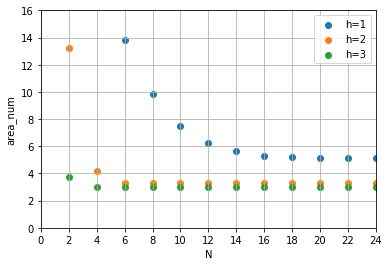

In [7]:
def segmentation_exp():
    fig, ax = plt.subplots()
    ax.grid()
    ax.set_xlim(0, 24)
    ax.set_ylim(0, 16)
    ax.set_xticks(np.linspace(0, 24, 13))
    for r in range(1):
        r += 1
        area_num_mean_list = []
        for n in N:
            path = '/Users/oomoriyumehiro/lab/Seminar/mss-python/CSV/size_max2/Segmentation/N8/result_seg_r{0}_N{1}.csv'.format(r, n)
            area_num_mean = 0
            count = 0
            with open(path) as f:
                reader = csv.reader(f)
                for row in reader:
                    area_num_mean += area_num(row)
                    count += 1
            area_num_mean /= count
            print("N={0}, 領域数平均: {1}".format(n, area_num_mean))
            area_num_mean_list.append(area_num_mean)
        print(area_num_mean_list)
        plt.scatter(N, area_num_mean_list, label = "h={}".format(r))
    plt.xlabel("N")
    plt.ylabel("area_num")
    text_dict = dict(boxstyle = "round", fc = "silver", ec = "mediumblue")
    # ax.annotate("5.10", size = 8, color = "black", xy = (24, 6), bbox = text_dict)
    plt.legend()

    plt.show()

In [48]:
X = [176, 168, 166, 201, 227, 185, 158, 152, 164, 197, 226, 232, 228, 223, 210, 167, 131, 129, 162, 169, 155, 127, 169, 168, 178, 207, 240, 229, 221, 210, 205, 204, 205, 201, 196, 194, 188, 179, 143, 126, 112, 125, 118, 130, 144, 162, 173, 165, 153, 153, 154, 145, 134, 126, 121, 120, 124, 136, 147, 140, 139, 135, 182, 191, 179, 192, 204, 190, 175, 181, 194, 214, 230, 229, 224, 219, 212, 198, 183, 173, 167, 170, 178, 186, 198, 199, 221, 223, 225, 216, 204, 186, 173, 191, 206, 192, 175, 183, 190, 179, 158, 140, 119, 99, 83, 83, 88, 82, 82, 88, 121, 108, 92, 87, 92, 122, 156, 190, 199, 173, 123, 112, 168, 203, 228, 217, 189, 137, 97, 114, 152, 111, 64, 63, 70, 60, 61, 93, 152, 203, 192, 137, 108, 122, 148, 155, 162, 185, 199, 199, 194, 187, 184, 214, 221, 216, 201, 188, 168, 135, 107, 99, 107, 145, 185, 208, 218, 208, 187, 156, 124, 102, 93, 87, 87, 87, 89, 95, 99, 94, 86, 85, 86, 95, 86, 115, 140, 177, 167, 94, 124, 147, 114, 107, 99, 98, 98, 93, 95, 122, 161, 172, 187, 209, 223, 172, 156, 126, 112, 133, 165, 202, 228, 226, 212, 185, 158, 124, 144, 135, 142, 141, 184, 182, 184, 215, 238, 168, 130, 138, 169, 196, 213, 195, 171, 186, 193, 180, 116, 116, 115, 128, 97, 106, 120, 147, 169, 169, 163, 165, 166, 161, 154, 158, 158, 138, 121, 132, 146, 137, 131, 120, 156, 161, 163, 141, 113, 89, 77, 100, 133, 157, 179, 192, 202, 214, 223, 227, 226, 216, 205, 201, 203, 210, 220, 197, 214, 211, 215, 231, 240, 223, 203, 209, 216, 201, 183, 185, 188, 181, 170, 148, 126, 103, 84, 69, 61, 67, 76, 85, 88, 85, 81, 76, 80, 109, 148, 181, 208, 215, 140, 100, 113, 148, 185, 180, 166, 113, 120, 166, 205, 175, 128, 107, 100, 107, 131, 160, 214, 206, 111, 69, 86, 84, 97, 131, 167, 193, 206, 207, 201, 194, 188, 225, 220, 222, 216, 209, 196, 166, 137, 122, 123, 156, 194, 213, 222, 217, 201, 164, 124, 97, 78, 73, 74, 79, 87, 105, 118, 99, 77, 76, 79, 76, 81, 103, 127, 183, 190, 118, 137, 148, 120, 97, 76, 80, 88, 95, 100, 109, 197, 203, 208, 207, 202, 176, 171, 154, 143, 138, 149, 191, 226, 230, 222, 210, 193, 146, 132, 141, 167, 174, 196, 193, 184, 212, 200, 92, 57, 63, 71, 107, 147, 178, 193, 196, 191, 166, 111, 92, 85, 125, 138, 121, 101, 120, 144, 150, 152, 158, 163, 169, 173, 169, 159, 133, 113, 126, 141, 122, 104, 101, 120, 126, 99, 74, 57, 67, 83, 84, 87, 87, 100, 134, 167, 193, 215, 223, 220, 214, 207, 202, 198, 200, 202, 186, 192, 196, 187, 211, 228, 228, 224, 220, 216, 197, 179, 185, 192, 192, 184, 175, 135, 108, 83, 71, 66, 73, 82, 90, 93, 88, 85, 78, 80, 107, 141, 176, 200, 225, 198, 143, 99, 108, 125, 140, 131, 105, 143, 188, 223, 221, 208, 198, 190, 200, 212, 205, 204, 165, 85, 73, 104, 101, 99, 98, 108, 137, 190, 200, 204, 203, 202, 223, 221, 216, 208, 213, 215, 199, 180, 167, 165, 192, 219, 230, 232, 227, 212, 173, 128, 99, 79, 71, 71, 81, 94, 108, 116, 101, 84, 81, 83, 86, 101, 109, 141, 203, 193, 128, 105, 116, 116, 91, 68, 60, 87, 126, 117, 96, 224, 222, 217, 195, 174, 176, 181, 179, 176, 175, 182, 200, 218, 228, 233, 229, 220, 196, 172, 179, 192, 202, 205, 198, 180, 203, 148, 40, 40, 64, 59, 59, 72, 144, 205, 202, 183, 146, 110, 80, 65, 98, 133, 114, 90, 98, 116, 128, 138, 145, 152, 170, 183, 174, 156, 130, 111, 121, 131, 106, 82, 107, 126, 127, 72, 72, 79, 85, 91, 92, 91, 70, 65, 120, 174, 192, 199, 200, 195, 195, 193, 187, 180, 174, 170, 171, 169, 183, 158, 178, 199, 220, 234, 225, 211, 191, 175, 183, 196, 200, 195, 198, 147, 116, 87, 80, 81, 85, 90, 92, 93, 92, 93, 86, 86, 109, 138, 170, 190, 229, 241, 203, 140, 123, 114, 126, 103, 110, 170, 205, 232, 238, 235, 233, 227, 219, 209, 202, 183, 121, 71, 97, 131, 121, 105, 95, 99, 102, 162, 184, 204, 208, 210, 217, 222, 210, 200, 215, 229, 220, 207, 198, 196, 217, 237, 239, 235, 231, 217, 181, 137, 106, 84, 73, 71, 86, 102, 106, 105, 98, 90, 85, 86, 102, 126, 123, 164, 218, 186, 136, 74, 87, 111, 88, 68, 57, 101, 162, 140, 93, 228, 209, 186, 165, 149, 148, 152, 171, 190, 215, 212, 205, 200, 219, 237, 238, 233, 237, 231, 215, 198, 204, 207, 190, 181, 192, 123, 37, 50, 79, 94, 80, 76, 102, 165, 197, 165, 138, 110, 94, 84, 84, 92, 87, 85, 87, 94, 118, 136, 131, 129, 149, 166, 158, 145, 137, 133, 124, 112, 106, 105, 124, 134, 95, 71, 99, 111, 122, 126, 129, 118, 82, 48, 114, 214, 239, 223, 176, 148, 149, 159, 151, 142, 137, 137, 153, 162, 186, 159, 149, 166, 186, 206, 231, 228, 219, 206, 197, 191, 194, 193, 193, 163, 135, 107, 96, 92, 87, 87, 102, 114, 119, 96, 94, 100, 116, 143, 164, 193, 232, 238, 219, 182, 138, 120, 125, 121, 136, 179, 210, 233, 241, 243, 241, 235, 222, 207, 199, 182, 128, 87, 127, 144, 129, 114, 129, 143, 119, 127, 172, 195, 197, 193, 214, 228, 223, 215, 227, 234, 209, 181, 166, 165, 194, 221, 220, 213, 217, 214, 193, 161, 117, 79, 66, 66, 85, 103, 92, 77, 78, 79, 78, 81, 102, 131, 152, 191, 208, 175, 139, 95, 96, 106, 90, 83, 108, 158, 191, 168, 126, 182, 163, 145, 134, 127, 121, 121, 136, 151, 184, 169, 177, 186, 212, 235, 239, 239, 244, 242, 223, 204, 205, 207, 178, 181, 182, 114, 54, 73, 77, 94, 91, 95, 68, 117, 187, 149, 134, 110, 107, 105, 101, 95, 89, 87, 80, 81, 111, 137, 125, 113, 125, 141, 161, 174, 166, 151, 123, 99, 114, 136, 146, 148, 76, 81, 96, 77, 99, 116, 117, 104, 89, 53, 101, 218, 242, 212, 136, 103, 104, 119, 111, 102, 102, 110, 137, 162, 190, 169, 129, 139, 153, 174, 213, 204, 204, 198, 193, 188, 188, 186, 182, 176, 155, 131, 117, 106, 98, 92, 90, 89, 119, 102, 105, 111, 127, 151, 158, 199, 232, 230, 208, 178, 132, 141, 139, 150, 165, 182, 207, 229, 236, 236, 234, 226, 209, 191, 188, 181, 146, 110, 150, 147, 136, 124, 138, 147, 121, 99, 164, 184, 181, 173, 204, 229, 234, 233, 237, 233, 194, 146, 127, 125, 157, 189, 185, 176, 190, 201, 197, 181, 132, 84, 70, 70, 90, 107, 85, 59, 63, 71, 70, 77, 100, 132, 180, 211, 192, 163, 143, 126, 115, 109, 99, 103, 161, 210, 208, 192, 162, 172, 142, 114, 109, 111, 111, 111, 104, 101, 121, 117, 132, 153, 180, 204, 218, 228, 225, 234, 227, 218, 214, 208, 171, 173, 182, 134, 68, 66, 64, 80, 109, 113, 69, 86, 175, 149, 134, 105, 104, 107, 106, 103, 115, 99, 87, 82, 98, 140, 151, 132, 131, 130, 138, 143, 157, 142, 112, 112, 128, 150, 154, 151, 89, 96, 84, 62, 89, 117, 93, 85, 89, 57, 92, 222, 244, 224, 147, 88, 80, 89, 84, 82, 87, 100, 132, 163, 187, 180, 150, 142, 136, 143, 185, 202, 208, 206, 198, 186, 180, 176, 175, 175, 165, 153, 141, 128, 107, 87, 73, 67, 97, 103, 106, 109, 141, 156, 151, 202, 235, 236, 211, 178, 132, 145, 151, 169, 176, 182, 204, 224, 231, 234, 231, 221, 207, 190, 180, 167, 145, 123, 138, 129, 140, 125, 125, 143, 130, 95, 151, 178, 171, 164, 165, 210, 230, 244, 230, 205, 168, 133, 127, 127, 116, 108, 115, 128, 142, 157, 174, 183, 164, 134, 100, 71, 79, 95, 99, 102, 83, 91, 82, 84, 111, 148, 189, 210, 184, 155, 149, 149, 140, 133, 128, 131, 170, 204, 204, 195, 168, 157, 122, 92, 92, 100, 102, 104, 97, 97, 114, 137, 155, 172, 171, 171, 191, 213, 197, 217, 225, 232, 220, 206, 165, 166, 186, 162, 91, 62, 56, 64, 97, 83, 58, 75, 169, 153, 134, 98, 98, 105, 114, 119, 141, 111, 95, 86, 87, 139, 175, 156, 145, 127, 119, 115, 145, 131, 108, 131, 146, 162, 165, 157, 86, 63, 72, 98, 103, 104, 61, 65, 88, 65, 93, 221, 238, 232, 165, 84, 66, 65, 65, 71, 80, 98, 131, 165, 183, 190, 173, 152, 156, 168, 178, 192, 204, 210, 200, 185, 175, 169, 169, 171, 173, 171, 160, 147, 141, 133, 114, 99, 98, 105, 104, 108, 153, 158, 150, 205, 238, 242, 216, 179, 136, 149, 163, 181, 178, 178, 197, 214, 221, 223, 221, 214, 202, 189, 175, 159, 146, 133, 117, 104, 135, 124, 106, 126, 132, 99, 137, 175, 168, 162, 130, 186, 215, 239, 227, 205, 188, 170, 152, 131, 103, 80, 74, 80, 95, 116, 146, 172, 181, 179, 151, 123, 123, 130, 136, 139, 101, 107, 90, 86, 116, 153, 184, 202, 182, 154, 155, 161, 159, 157, 151, 149, 167, 186, 194, 192, 168, 132, 129, 86, 96, 107, 105, 99, 106, 95, 100, 138, 178, 189, 189, 185, 192, 202, 188, 218, 227, 232, 218, 200, 159, 167, 190, 187, 124, 75, 61, 62, 82, 83, 73, 106, 172, 158, 119, 100, 99, 100, 94, 89, 90, 67, 69, 79, 86, 123, 160, 165, 155, 137, 126, 120, 143, 146, 137, 152, 164, 176, 176, 167, 108, 76, 85, 107, 112, 111, 80, 72, 90, 71, 123, 224, 228, 230, 166, 86, 60, 54, 56, 69, 82, 100, 130, 161, 179, 191, 181, 167, 167, 171, 176, 184, 199, 209, 201, 185, 177, 173, 167, 165, 171, 177, 170, 162, 163, 161, 150, 138, 124, 123, 139, 154, 159, 145, 161, 210, 240, 241, 231, 212, 167, 147, 154, 171, 169, 167, 179, 191, 208, 198, 174, 174, 177, 183, 190, 186, 161, 131, 99, 79, 113, 126, 106, 105, 105, 97, 128, 185, 193, 169, 147, 174, 191, 187, 197, 200, 188, 168, 152, 132, 98, 66, 54, 57, 89, 122, 130, 135, 155, 174, 175, 172, 178, 176, 169, 156, 105, 84, 84, 99, 121, 147, 173, 189, 185, 176, 159, 142, 144, 147, 136, 127, 135, 150, 179, 198, 170, 107, 136, 89, 101, 109, 101, 92, 118, 104, 101, 146, 202, 208, 211, 204, 198, 197, 188, 221, 228, 231, 213, 194, 156, 171, 189, 203, 158, 103, 84, 79, 78, 91, 95, 145, 178, 163, 112, 105, 96, 93, 98, 103, 85, 69, 64, 70, 86, 107, 139, 168, 165, 153, 141, 135, 147, 163, 168, 169, 179, 185, 186, 178, 136, 97, 107, 121, 97, 72, 79, 87, 101, 85, 160, 224, 216, 221, 161, 93, 63, 51, 58, 76, 88, 104, 129, 155, 176, 189, 187, 184, 182, 180, 177, 175, 191, 203, 197, 185, 183, 181, 170, 162, 168, 176, 175, 174, 180, 185, 182, 174, 158, 143, 151, 160, 147, 143, 183, 215, 240, 239, 244, 240, 201, 153, 154, 165, 162, 157, 158, 159, 183, 164, 149, 178, 175, 176, 202, 214, 181, 132, 89, 62, 90, 123, 108, 86, 79, 95, 120, 188, 209, 176, 175, 166, 165, 122, 131, 144, 158, 166, 153, 131, 101, 71, 52, 49, 92, 133, 116, 97, 124, 157, 168, 172, 179, 174, 147, 112, 84, 60, 56, 63, 70, 87, 134, 177, 196, 199, 163, 126, 130, 140, 119, 105, 131, 165, 189, 198, 169, 78, 150, 154, 137, 105, 86, 72, 82, 79, 92, 138, 192, 215, 212, 198, 186, 181, 193, 224, 231, 231, 216, 198, 171, 168, 178, 194, 190, 170, 127, 90, 100, 128, 136, 160, 178, 171, 140, 106, 80, 87, 108, 103, 86, 72, 72, 78, 89, 104, 136, 168, 171, 166, 156, 149, 157, 171, 174, 172, 180, 188, 192, 187, 174, 132, 122, 117, 93, 73, 76, 85, 115, 131, 192, 210, 204, 199, 148, 99, 71, 54, 75, 82, 92, 102, 120, 140, 166, 188, 208, 198, 199, 191, 167, 169, 169, 176, 170, 189, 191, 192, 180, 169, 169, 173, 178, 181, 181, 177, 173, 168, 161, 154, 151, 155, 168, 191, 217, 231, 242, 243, 250, 247, 228, 200, 183, 167, 139, 115, 110, 114, 141, 146, 142, 164, 168, 180, 202, 231, 198, 148, 104, 72, 83, 104, 97, 82, 88, 82, 101, 149, 201, 209, 208, 166, 141, 96, 95, 105, 129, 150, 146, 131, 104, 77, 65, 68, 87, 104, 88, 76, 104, 139, 162, 177, 168, 166, 127, 82, 64, 52, 54, 62, 54, 60, 104, 169, 209, 209, 190, 160, 136, 122, 123, 135, 167, 196, 198, 189, 164, 61, 122, 138, 103, 58, 51, 57, 77, 104, 114, 129, 175, 216, 205, 186, 195, 209, 219, 225, 229, 230, 219, 204, 185, 165, 169, 182, 205, 221, 206, 182, 172, 166, 169, 170, 175, 172, 169, 113, 74, 86, 119, 107, 97, 84, 85, 90, 97, 111, 139, 166, 174, 175, 170, 164, 170, 176, 172, 170, 177, 186, 192, 192, 202, 163, 142, 121, 100, 85, 83, 94, 132, 171, 209, 191, 189, 173, 139, 107, 82, 62, 99, 96, 100, 103, 114, 132, 162, 189, 223, 208, 211, 205, 163, 167, 153, 153, 146, 189, 198, 201, 190, 176, 170, 169, 178, 185, 178, 168, 161, 157, 159, 166, 178, 193, 214, 232, 236, 234, 234, 242, 244, 245, 243, 238, 230, 214, 173, 128, 94, 78, 101, 136, 148, 158, 169, 185, 198, 238, 211, 167, 126, 92, 83, 83, 83, 83, 100, 74, 90, 110, 158, 194, 208, 163, 120, 80, 67, 69, 99, 130, 134, 127, 105, 84, 83, 89, 82, 74, 67, 68, 95, 126, 154, 175, 147, 148, 99, 52, 47, 54, 58, 61, 43, 40, 78, 164, 217, 212, 203, 186, 182, 181, 173, 169, 178, 187, 188, 183, 167, 68, 87, 67, 52, 38, 53, 78, 98, 118, 122, 125, 177, 206, 201, 187, 204, 221, 227, 226, 227, 225, 215, 203, 179, 176, 182, 195, 213, 225, 218, 205, 207, 203, 172, 138, 144, 154, 164, 141, 109, 102, 111, 98, 90, 83, 92, 104, 117, 133, 149, 163, 169, 173, 175, 176, 183, 188, 178, 168, 172, 178, 183, 186, 208, 200, 196, 161, 148, 140, 138, 146, 175, 198, 183, 138, 149, 155, 163, 122, 85, 78, 122, 122, 124, 122, 139, 157, 161, 165, 198, 206, 207, 219, 186, 176, 166, 166, 159, 182, 198, 209, 194, 174, 168, 169, 174, 179, 183, 185, 181, 179, 190, 204, 210, 215, 228, 237, 231, 223, 220, 244, 241, 239, 244, 246, 242, 230, 202, 166, 124, 95, 105, 129, 158, 160, 176, 195, 195, 231, 217, 190, 152, 112, 83, 64, 68, 79, 98, 92, 98, 107, 135, 180, 193, 125, 89, 60, 51, 55, 79, 103, 112, 112, 95, 80, 111, 118, 97, 73, 75, 88, 110, 135, 163, 181, 138, 127, 76, 56, 61, 74, 70, 64, 47, 46, 65, 159, 199, 202, 184, 163, 179, 196, 190, 181, 176, 174, 188, 198, 188, 76, 93, 68, 67, 65, 78, 96, 115, 132, 127, 123, 183, 195, 201, 194, 193, 195, 208, 220, 223, 221, 212, 203, 169, 183, 189, 201, 205, 208, 207, 207, 219, 223, 195, 160, 143, 135, 153, 170, 152, 123, 107, 96, 91, 92, 104, 121, 140, 155, 159, 160, 164, 169, 177, 184, 192, 195, 181, 168, 168, 171, 174, 179, 181, 185, 216, 201, 197, 191, 194, 195, 182, 165, 149, 140, 143, 145, 185, 142, 95, 95, 141, 148, 146, 140, 157, 176, 182, 188, 191, 202, 198, 230, 211, 189, 183, 181, 174, 171, 193, 212, 195, 173, 169, 170, 169, 172, 187, 201, 198, 196, 214, 231, 232, 229, 233, 230, 198, 162, 153, 201, 210, 225, 236, 241, 238, 227, 215, 196, 158, 123, 121, 130, 170, 166, 183, 199, 189, 216, 213, 204, 173, 135, 91, 57, 61, 78, 92, 108, 106, 109, 119, 162, 168, 86, 63, 46, 45, 50, 64, 79, 91, 97, 88, 78, 109, 94, 87, 80, 91, 108, 128, 150, 175, 188, 135, 115, 61, 67, 76, 90, 79, 66, 52, 58, 65, 156, 177, 187, 163, 136, 144, 159, 170, 180, 189, 196, 205, 210, 205, 82, 97, 74, 82, 114, 115, 113, 116, 118, 112, 116, 185, 206, 199, 202, 190, 179, 171, 174, 203, 222, 217, 203, 163, 177, 181, 192, 195, 195, 185, 180, 204, 225, 218, 200, 158, 147, 161, 182, 168, 145, 130, 125, 125, 129, 134, 141, 149, 157, 159, 161, 168, 174, 180, 184, 186, 186, 180, 173, 173, 174, 174, 171, 162, 156, 172, 169, 183, 193, 194, 187, 172, 156, 147, 147, 152, 157, 191, 177, 134, 115, 140, 153, 159, 169, 187, 204, 213, 220, 219, 221, 216, 228, 229, 200, 178, 157, 152, 152, 169, 187, 191, 190, 180, 169, 166, 170, 182, 195, 204, 210, 214, 215, 214, 208, 191, 170, 151, 137, 132, 138, 146, 161, 179, 194, 187, 181, 200, 213, 197, 175, 161, 156, 179, 181, 183, 188, 181, 193, 196, 193, 179, 156, 120, 87, 82, 85, 84, 88, 85, 90, 119, 160, 143, 74, 55, 45, 44, 48, 55, 64, 80, 89, 82, 73, 110, 95, 88, 80, 99, 124, 140, 159, 182, 197, 143, 141, 69, 59, 60, 73, 66, 58, 51, 58, 87, 157, 171, 175, 152, 132, 134, 143, 150, 154, 160, 170, 195, 215, 213, 83, 110, 95, 83, 113, 93, 76, 85, 101, 100, 109, 185, 216, 195, 204, 207, 204, 158, 123, 174, 222, 220, 204, 163, 164, 143, 128, 128, 129, 107, 98, 152, 210, 232, 236, 181, 164, 173, 191, 180, 165, 161, 158, 163, 167, 164, 160, 158, 157, 160, 165, 173, 181, 183, 182, 178, 176, 177, 180, 181, 180, 173, 167, 167, 169, 168, 172, 179, 183, 178, 171, 159, 150, 156, 164, 166, 171, 191, 206, 172, 132, 138, 155, 151, 149, 147, 153, 178, 206, 222, 232, 232, 223, 238, 207, 172, 135, 133, 142, 149, 162, 188, 205, 190, 168, 166, 169, 177, 186, 182, 176, 183, 189, 183, 173, 163, 151, 134, 122, 118, 124, 129, 132, 134, 129, 104, 83, 96, 119, 148, 171, 174, 175, 179, 185, 179, 174, 171, 167, 171, 172, 175, 171, 148, 122, 107, 95, 79, 68, 66, 76, 128, 165, 124, 73, 58, 53, 50, 52, 54, 60, 77, 88, 83, 74, 107, 93, 89, 83, 87, 99, 132, 169, 191, 204, 157, 172, 89, 58, 47, 52, 51, 52, 52, 63, 110, 152, 165, 164, 152, 139, 131, 125, 121, 118, 123, 138, 174, 205, 211, 77, 118, 102, 71, 61, 52, 53, 67, 87, 104, 103, 187, 215, 206, 202, 198, 187, 160, 121, 150, 218, 212, 213, 167, 135, 111, 97, 89, 86, 73, 74, 106, 149, 200, 232, 209, 200, 201, 204, 196, 186, 180, 176, 177, 181, 177, 175, 174, 175, 176, 177, 183, 187, 186, 184, 180, 177, 182, 189, 186, 181, 179, 179, 180, 181, 175, 174, 180, 186, 185, 181, 178, 176, 174, 172, 164, 163, 192, 218, 188, 145, 123, 115, 126, 117, 111, 107, 110, 125, 175, 219, 234, 228, 229, 203, 167, 129, 145, 170, 176, 180, 196, 206, 189, 169, 162, 162, 170, 179, 181, 179, 170, 162, 161, 161, 152, 144, 145, 148, 153, 149, 139, 122, 110, 99, 87, 74, 60, 55, 79, 105, 130, 130, 157, 180, 186, 159, 153, 143, 140, 142, 151, 161, 150, 133, 118, 103, 86, 75, 78, 92, 141, 174, 128, 78, 74, 78, 73, 74, 76, 81, 81, 102, 91, 84, 101, 97, 90, 85, 95, 112, 157, 177, 194, 203, 177, 176, 125, 94, 71, 56, 54, 59, 74, 91, 110, 122, 137, 149, 173, 166, 144, 117, 102, 118, 109, 108, 129, 158, 192, 68, 118, 109, 87, 52, 39, 35, 51, 75, 109, 99, 177, 202, 204, 189, 181, 168, 164, 129, 128, 207, 201, 220, 168, 105, 83, 70, 57, 50, 51, 60, 64, 83, 155, 214, 208, 190, 202, 215, 211, 203, 194, 186, 185, 187, 186, 186, 188, 191, 191, 189, 189, 188, 188, 187, 184, 182, 190, 197, 190, 183, 187, 194, 195, 195, 188, 183, 186, 192, 194, 196, 199, 200, 191, 178, 162, 156, 192, 220, 192, 151, 132, 119, 146, 125, 116, 101, 89, 87, 113, 150, 199, 229, 215, 195, 181, 169, 180, 194, 197, 199, 202, 200, 187, 171, 161, 158, 165, 174, 178, 178, 158, 139, 145, 154, 150, 149, 164, 180, 186, 181, 134, 75, 73, 83, 81, 78, 77, 78, 77, 75, 100, 79, 102, 122, 166, 153, 142, 123, 114, 111, 127, 146, 145, 137, 125, 111, 101, 96, 103, 119, 159, 185, 141, 89, 93, 104, 99, 97, 97, 103, 91, 124, 113, 105, 104, 107, 97, 95, 136, 176, 204, 181, 194, 200, 197, 180, 160, 133, 99, 68, 61, 67, 92, 115, 104, 93, 112, 136, 193, 190, 158, 114, 65, 75, 74, 84, 87, 103, 155, 63, 104, 139, 104, 57, 44, 41, 64, 65, 89, 88, 126, 142, 149, 143, 136, 126, 128, 117, 109, 182, 191, 208, 150, 85, 71, 68, 57, 48, 58, 52, 51, 66, 109, 177, 207, 206, 210, 209, 213, 214, 202, 188, 189, 193, 195, 196, 197, 196, 193, 188, 181, 176, 179, 184, 189, 195, 200, 202, 193, 183, 185, 193, 209, 219, 205, 188, 191, 198, 199, 199, 201, 201, 196, 187, 175, 169, 193, 211, 198, 150, 130, 115, 137, 133, 111, 86, 80, 83, 78, 87, 132, 197, 218, 198, 177, 198, 209, 220, 217, 208, 192, 177, 174, 174, 168, 164, 170, 172, 152, 130, 128, 132, 145, 153, 147, 144, 164, 192, 175, 147, 113, 70, 69, 76, 83, 83, 78, 73, 76, 78, 95, 87, 98, 112, 158, 166, 143, 110, 100, 98, 131, 135, 120, 101, 108, 119, 125, 131, 140, 153, 185, 202, 157, 105, 90, 111, 119, 103, 93, 94, 105, 163, 169, 143, 139, 140, 137, 143, 171, 197, 212, 198, 201, 202, 210, 205, 181, 147, 102, 93, 93, 101, 102, 102, 96, 95, 113, 135, 189, 182, 151, 102, 69, 70, 67, 69, 62, 63, 100, 60, 87, 159, 121, 75, 65, 62, 85, 62, 74, 86, 85, 87, 89, 97, 117, 135, 116, 106, 93, 159, 182, 190, 133, 73, 66, 70, 64, 55, 75, 50, 52, 63, 73, 136, 200, 212, 211, 201, 210, 217, 202, 184, 189, 198, 201, 202, 200, 196, 192, 186, 174, 164, 171, 182, 195, 205, 207, 204, 195, 186, 189, 194, 199, 202, 199, 197, 200, 204, 203, 201, 199, 198, 196, 195, 189, 185, 194, 197, 201, 153, 133, 117, 129, 141, 113, 82, 85, 93, 83, 81, 93, 157, 220, 203, 141, 151, 162, 182, 183, 180, 171, 163, 172, 182, 181, 176, 176, 172, 156, 141, 137, 137, 148, 156, 147, 142, 165, 195, 149, 103, 89, 72, 72, 77, 86, 91, 87, 82, 88, 92, 96, 100, 98, 104, 145, 177, 146, 105, 95, 95, 134, 127, 123, 116, 120, 130, 150, 171, 179, 186, 206, 214, 174, 126, 94, 117, 133, 105, 93, 93, 125, 198, 214, 178, 174, 172, 178, 189, 200, 210, 210, 209, 206, 203, 214, 219, 190, 152, 108, 116, 96, 83, 80, 83, 93, 106, 121, 135, 179, 168, 136, 93, 78, 68, 65, 62, 48, 39, 53, 54, 74, 128, 132, 102, 101, 99, 95, 71, 94, 118, 127, 108, 104, 101, 108, 117, 108, 115, 100, 165, 177, 174, 138, 72, 54, 48, 52, 55, 83, 56, 56, 56, 66, 111, 192, 200, 204, 197, 199, 197, 181, 170, 184, 202, 207, 209, 202, 195, 196, 196, 184, 174, 175, 181, 193, 203, 204, 203, 199, 195, 197, 199, 192, 186, 196, 207, 211, 213, 210, 206, 203, 199, 197, 194, 190, 186, 191, 193, 202, 181, 148, 114, 115, 123, 106, 88, 89, 94, 84, 78, 81, 111, 145, 134, 96, 106, 142, 182, 187, 186, 193, 198, 204, 207, 205, 200, 187, 175, 175, 177, 177, 176, 153, 156, 150, 148, 171, 177, 116, 77, 79, 78, 74, 79, 80, 106, 99, 94, 76, 88, 82, 82, 81, 93, 118, 162, 140, 111, 105, 105, 128, 128, 135, 140, 145, 154, 182, 206, 207, 203, 212, 216, 198, 170, 121, 103, 109, 104, 117, 142, 188, 236, 227, 185, 183, 186, 190, 195, 199, 202, 198, 196, 194, 195, 209, 219, 209, 188, 138, 112, 85, 68, 63, 68, 90, 114, 126, 132, 169, 158, 118, 92, 79, 68, 67, 67, 57, 50, 62, 60, 69, 92, 131, 121, 128, 125, 103, 88, 120, 151, 173, 138, 126, 112, 105, 104, 106, 122, 112, 174, 177, 166, 150, 81, 50, 33, 41, 55, 86, 67, 63, 57, 78, 103, 183, 182, 198, 199, 190, 177, 164, 159, 179, 202, 210, 212, 203, 194, 200, 205, 198, 188, 184, 184, 192, 200, 201, 200, 202, 203, 203, 203, 206, 211, 212, 212, 215, 217, 214, 211, 205, 201, 197, 193, 188, 186, 187, 190, 202, 204, 164, 119, 111, 111, 108, 105, 103, 101, 94, 92, 106, 121, 129, 138, 133, 131, 171, 212, 224, 228, 231, 230, 229, 226, 224, 220, 199, 182, 199, 219, 219, 212, 166, 165, 159, 161, 184, 167, 103, 66, 76, 83, 78, 79, 72, 114, 107, 102, 66, 83, 69, 63, 66, 84, 94, 147, 139, 125, 119, 117, 121, 130, 146, 162, 169, 178, 207, 231, 226, 215, 213, 209, 205, 194, 167, 136, 112, 107, 147, 193, 214, 222, 205, 185, 185, 188, 189, 190, 188, 184, 179, 176, 182, 188, 183, 174, 178, 174, 145, 108, 79, 58, 57, 68, 95, 121, 131, 132, 168, 156, 105, 94, 78, 72, 71, 73, 68, 66, 81, 96, 81, 78, 98, 95, 97, 97, 97, 107, 132, 151, 153, 120, 105, 92, 87, 87, 104, 104, 120, 168, 168, 156, 148, 108, 79, 49, 47, 53, 76, 76, 57, 68, 115, 136, 181, 178, 188, 191, 195, 195, 182, 170, 179, 191, 200, 206, 202, 198, 205, 211, 205, 198, 201, 206, 201, 197, 198, 202, 204, 207, 206, 204, 204, 204, 206, 207, 207, 208, 208, 209, 208, 206, 201, 194, 190, 185, 182, 180, 186, 190, 169, 148, 144, 146, 142, 138, 133, 130, 126, 130, 161, 188, 189, 189, 189, 188, 210, 230, 240, 242, 237, 228, 226, 226, 227, 226, 213, 201, 214, 230, 230, 225, 204, 203, 199, 196, 202, 191, 136, 86, 66, 73, 80, 68, 52, 96, 102, 80, 66, 78, 70, 65, 76, 74, 92, 158, 161, 154, 141, 127, 117, 117, 124, 140, 164, 194, 221, 241, 242, 235, 222, 208, 203, 200, 199, 195, 185, 182, 194, 207, 211, 206, 191, 179, 172, 169, 177, 183, 169, 159, 158, 158, 172, 184, 170, 159, 170, 176, 154, 120, 101, 91, 102, 118, 127, 136, 135, 155, 196, 172, 122, 118, 97, 83, 70, 64, 75, 87, 83, 135, 107, 86, 76, 73, 68, 71, 99, 128, 138, 138, 117, 95, 79, 68, 73, 79, 104, 86, 120, 152, 184, 200, 174, 139, 108, 79, 61, 55, 67, 87, 63, 93, 154, 170, 175, 176, 202, 224, 221, 212, 198, 186, 181, 182, 189, 200, 201, 202, 207, 211, 208, 204, 215, 224, 211, 196, 198, 202, 206, 208, 207, 204, 202, 199, 199, 199, 198, 198, 201, 205, 209, 212, 204, 196, 192, 189, 184, 180, 177, 177, 177, 179, 182, 184, 178, 170, 165, 161, 166, 174, 181, 187, 188, 186, 171, 158, 170, 189, 206, 218, 219, 217, 217, 217, 222, 225, 221, 217, 222, 229, 228, 227, 229, 229, 221, 216, 228, 242, 219, 119, 72, 70, 84, 60, 43, 76, 93, 58, 69, 75, 76, 71, 89, 72, 102, 176, 183, 177, 153, 127, 113, 106, 102, 110, 153, 198, 225, 241, 245, 241, 207, 164, 138, 127, 145, 171, 188, 201, 204, 202, 194, 183, 177, 170, 157, 149, 165, 178, 157, 138, 137, 144, 159, 175, 182, 186, 176, 162, 146, 130, 125, 128, 148, 166, 154, 144, 135, 175, 224, 196, 129, 101, 92, 93, 76, 60, 56, 58, 59, 195, 176, 123, 98, 85, 79, 86, 127, 162, 143, 112, 93, 83, 89, 99, 104, 105, 109, 91, 108, 129, 179, 216, 197, 166, 127, 112, 83, 65, 76, 104, 119, 155, 175, 168, 161, 182, 200, 218, 208, 193, 192, 193, 192, 194, 200, 204, 201, 197, 198, 199, 201, 203, 213, 220, 213, 204, 204, 206, 206, 204, 203, 201, 198, 196, 196, 197, 199, 200, 200, 202, 207, 213, 223, 229, 221, 211, 212, 211, 193, 176, 183, 194, 195, 195, 203, 211, 213, 212, 203, 195, 195, 199, 206, 211, 199, 179, 155, 138, 148, 167, 183, 196, 199, 200, 208, 214, 217, 217, 216, 211, 192, 177, 186, 197, 203, 211, 228, 243, 237, 199, 162, 107, 92, 63, 56, 76, 83, 64, 71, 73, 69, 66, 81, 80, 128, 189, 189, 169, 133, 96, 80, 75, 84, 104, 139, 174, 217, 223, 217, 197, 162, 125, 96, 79, 87, 100, 96, 96, 123, 154, 178, 189, 180, 170, 161, 157, 180, 193, 186, 141, 127, 144, 150, 158, 188, 181, 156, 124, 113, 111, 120, 136, 166, 185, 156, 122, 126, 165, 233, 225, 173, 98, 79, 72, 65, 62, 66, 72, 69, 198, 227, 199, 171, 140, 139, 150, 175, 188, 140, 86, 75, 76, 80, 89, 115, 134, 116, 97, 95, 110, 177, 230, 217, 188, 146, 147, 110, 85, 96, 124, 174, 209, 186, 159, 147, 187, 200, 209, 192, 174, 184, 198, 204, 207, 209, 208, 202, 193, 189, 186, 192, 199, 205, 211, 212, 211, 209, 207, 203, 200, 198, 196, 195, 195, 196, 198, 201, 204, 203, 202, 208, 215, 216, 218, 223, 229, 234, 236, 231, 222, 211, 202, 200, 201, 201, 202, 207, 211, 208, 203, 198, 197, 208, 220, 225, 225, 211, 192, 171, 156, 162, 174, 178, 182, 191, 201, 208, 212, 201, 187, 178, 170, 162, 156, 153, 156, 181, 203, 210, 218, 215, 145, 109, 80, 84, 91, 85, 79, 77, 77, 72, 71, 79, 98, 155, 200, 188, 154, 104, 62, 75, 99, 99, 101, 121, 144, 204, 203, 175, 136, 130, 129, 119, 104, 85, 65, 61, 65, 75, 96, 149, 191, 182, 165, 160, 160, 188, 204, 212, 147, 122, 149, 147, 143, 161, 125, 107, 89, 83, 89, 114, 139, 147, 144, 122, 102, 121, 149, 221, 232, 221, 138, 94, 60, 66, 83, 88, 91, 86, 174, 229, 226, 216, 197, 194, 194, 200, 194, 132, 71, 63, 72, 70, 77, 113, 143, 115, 87, 94, 115, 183, 235, 221, 194, 163, 177, 147, 127, 153, 185, 204, 206, 181, 159, 138, 174, 196, 194, 192, 188, 196, 205, 212, 214, 209, 201, 200, 199, 198, 196, 191, 187, 193, 199, 199, 198, 198, 197, 194, 193, 194, 195, 196, 198, 200, 203, 205, 207, 211, 215, 214, 213, 213, 214, 213, 215, 222, 229, 227, 221, 215, 209, 203, 198, 198, 198, 199, 201, 207, 210, 196, 183, 192, 204, 204, 204, 215, 223, 212, 196, 183, 175, 178, 184, 186, 190, 197, 202, 196, 189, 185, 179, 172, 167, 162, 158, 157, 157, 160, 167, 189, 177, 157, 135, 122, 108, 101, 100, 101, 99, 78, 70, 106, 176, 196, 196, 173, 139, 95, 65, 86, 114, 107, 99, 115, 135, 175, 175, 147, 112, 114, 117, 95, 72, 76, 84, 91, 96, 88, 88, 113, 160, 161, 135, 140, 151, 166, 192, 204, 131, 124, 143, 140, 132, 122, 106, 93, 79, 56, 48, 95, 143, 143, 131, 102, 106, 120, 142, 168, 169, 189, 170, 151, 127, 112, 101, 98, 94, 77, 188, 206, 170, 156, 143, 144, 154, 177, 186, 127, 64, 56, 68, 85, 107, 129, 141, 112, 83, 100, 133, 192, 235, 221, 196, 178, 202, 187, 175, 183, 193, 198, 194, 177, 162, 136, 161, 193, 184, 197, 205, 207, 207, 212, 215, 205, 195, 200, 206, 209, 206, 193, 178, 181, 187, 186, 185, 186, 186, 187, 188, 192, 195, 199, 203, 205, 208, 209, 210, 217, 224, 217, 209, 207, 205, 201, 199, 207, 217, 219, 219, 217, 214, 206, 197, 193, 191, 190, 188, 180, 173, 170, 170, 176, 181, 177, 177, 196, 212, 208, 197, 188, 182, 184, 187, 183, 180, 185, 191, 193, 195, 197, 197, 194, 189, 179, 168, 164, 162, 161, 157, 151, 151, 170, 186, 182, 169, 144, 121, 119, 124, 121, 128, 142, 199, 202, 193, 164, 129, 96, 76, 98, 125, 113, 99, 110, 129, 172, 199, 157, 104, 105, 111, 79, 54, 83, 120, 140, 147, 117, 87, 79, 121, 138, 105, 92, 89, 109, 170, 186, 121, 132, 140, 134, 126, 84, 91, 83, 80, 67, 65, 102, 139, 132, 118, 89, 113, 123, 135, 112, 95, 114, 144, 166, 183, 190, 186, 162, 136, 116, 183, 153, 116, 96, 84, 83, 91, 117, 136, 106, 72, 69, 72, 77, 88, 117, 141, 124, 111, 123, 172, 208, 233, 221, 205, 190, 218, 212, 205, 204, 205, 188, 190, 178, 169, 156, 169, 197, 203, 207, 206, 201, 196, 199, 202, 201, 200, 205, 210, 208, 203, 194, 186, 187, 190, 191, 191, 192, 192, 193, 194, 197, 200, 204, 206, 208, 210, 211, 212, 209, 206, 205, 205, 207, 208, 209, 211, 215, 218, 217, 216, 220, 221, 214, 206, 205, 205, 203, 199, 192, 182, 173, 168, 167, 168, 165, 164, 174, 182, 184, 183, 177, 172, 171, 171, 168, 166, 173, 181, 185, 190, 193, 197, 204, 208, 205, 198, 191, 185, 183, 175, 164, 158, 170, 181, 174, 164, 164, 167, 174, 183, 194, 202, 181, 178, 168, 159, 154, 144, 105, 70, 78, 94, 92, 93, 108, 133, 167, 213, 171, 120, 109, 106, 89, 81, 111, 145, 158, 161, 133, 103, 81, 88, 112, 86, 76, 71, 86, 129, 158, 142, 149, 150, 139, 124, 71, 81, 90, 105, 105, 104, 115, 125, 126, 124, 105, 110, 127, 122, 104, 90, 95, 112, 125, 141, 161, 182, 204, 217, 204, 169, 116, 102, 80, 67, 66, 71, 77, 82, 84, 84, 84, 80, 73, 73, 102, 134, 135, 142, 149, 204, 217, 224, 217, 212, 199, 226, 227, 226, 216, 205, 174, 186, 180, 176, 174, 177, 200, 221, 214, 200, 190, 183, 183, 187, 197, 206, 211, 212, 206, 199, 198, 198, 197, 197, 198, 200, 200, 200, 200, 201, 203, 205, 208, 210, 210, 210, 211, 210, 198, 188, 192, 201, 207, 212, 219, 225, 223, 220, 216, 214, 220, 225, 221, 217, 217, 219, 218, 215, 207, 197, 184, 173, 168, 165, 164, 163, 158, 155, 161, 169, 169, 167, 165, 163, 160, 160, 169, 180, 182, 184, 187, 194, 208, 221, 224, 223, 217, 212, 210, 201, 187, 168, 168, 171, 164, 158, 161, 169, 179, 190, 207, 217, 208, 192, 183, 175, 175, 167, 120, 74, 61, 63, 73, 91, 111, 140, 166, 221, 190, 146, 120, 105, 105, 116, 141, 164, 171, 164, 118, 71, 64, 65, 93, 73, 67, 60, 71, 89, 128, 164, 168, 163, 147, 127, 75, 80, 104, 130, 121, 107, 107, 113, 124, 132, 124, 111, 134, 112, 106, 97, 87, 81, 81, 88, 103, 125, 158, 188, 203, 124, 83, 78, 81, 89, 88, 85, 76, 72, 84, 97, 82, 87, 82, 83, 93, 110, 131, 155, 168, 200, 196, 191, 200, 211, 209, 223, 229, 231, 218, 208, 172, 183, 181, 182, 169, 163, 189, 211, 201, 185, 181, 182, 186, 195, 204, 211, 213, 212, 208, 204, 202, 202, 201, 201, 202, 203, 203, 202, 202, 203, 205, 208, 211, 213, 209, 205, 199, 195, 195, 196, 196, 197, 203, 209, 215, 221, 221, 221, 221, 221, 218, 215, 219, 223, 226, 227, 229, 229, 224, 216, 209, 202, 196, 190, 190, 190, 174, 161, 165, 174, 187, 197, 199, 194, 183, 176, 173, 172, 178, 184, 184, 185, 200, 214, 219, 220, 216, 210, 209, 229, 232, 232, 215, 197, 179, 162, 158, 160, 172, 186, 195, 202, 206, 206, 215, 221, 215, 197, 154, 110, 86, 76, 85, 101, 116, 140, 175, 219, 222, 184, 142, 109, 111, 126, 144, 159, 176, 153, 112, 70, 60, 59, 73, 65, 69, 72, 70, 74, 106, 163, 181, 170, 160, 140, 106, 100, 95, 121, 117, 112, 114, 121, 142, 157, 151, 127, 128, 80, 75, 75, 91, 105, 100, 89, 80, 80, 108, 141, 154, 80, 63, 65, 89, 113, 113, 103, 87, 75, 88, 106, 82, 102, 101, 102, 90, 86, 120, 158, 176, 181, 167, 156, 182, 208, 216, 217, 226, 232, 218, 206, 168, 176, 178, 184, 162, 146, 175, 199, 187, 171, 176, 186, 197, 206, 212, 213, 212, 209, 208, 207, 207, 206, 205, 204, 205, 205, 204, 203, 202, 203, 206, 210, 213, 214, 208, 199, 187, 180, 194, 207, 201, 194, 198, 204, 209, 213, 215, 219, 224, 226, 214, 203, 213, 225, 228, 231, 235, 237, 237, 233, 231, 227, 221, 214, 212, 212, 213, 215, 219, 221, 219, 218, 220, 219, 205, 194, 203, 213, 201, 185, 178, 177, 187, 201, 207, 210, 207, 202, 201, 212, 227, 241, 235, 221, 195, 169, 181, 196, 184, 170, 167, 174, 197, 220, 225, 225, 228, 224, 192, 152, 124, 105, 107, 115, 130, 148, 160, 168, 218, 209, 170, 125, 124, 135, 144, 148, 170, 136, 108, 78, 69, 67, 61, 63, 75, 85, 71, 66, 88, 155, 193, 178, 171, 153, 138, 125, 86, 105, 126, 149, 139, 125, 127, 133, 145, 148, 150, 101, 75, 59, 97, 134, 121, 99, 90, 89, 105, 124, 137, 68, 60, 69, 89, 110, 115, 113, 96, 81, 85, 101, 98, 146, 159, 165, 136, 110, 121, 141, 149, 150, 147, 152, 183, 209, 218, 219, 229, 231, 232, 194, 151, 158, 167, 178, 172, 146, 161, 212, 194, 174, 183, 199, 208, 214, 215, 212, 201, 192, 196, 202, 207, 209, 209, 207, 205, 203, 202, 201, 201, 201, 206, 211, 215, 217, 211, 204, 193, 186, 195, 205, 201, 195, 196, 198, 200, 202, 205, 208, 214, 217, 205, 193, 202, 214, 218, 221, 226, 230, 231, 231, 230, 230, 235, 240, 240, 238, 237, 235, 234, 232, 230, 228, 217, 225, 224, 204, 217, 226, 209, 186, 175, 169, 178, 190, 195, 199, 196, 192, 192, 190, 215, 239, 240, 215, 192, 196, 207, 218, 205, 190, 181, 177, 192, 210, 220, 223, 228, 229, 225, 213, 184, 154, 126, 135, 151, 168, 161, 152, 184, 210, 213, 180, 156, 134, 140, 145, 145, 114, 97, 81, 98, 92, 79, 69, 73, 78, 62, 59, 72, 150, 215, 197, 169, 153, 148, 140, 110, 111, 123, 140, 135, 129, 128, 132, 159, 174, 169, 136, 110, 91, 108, 128, 118, 105, 101, 103, 111, 122, 134, 71, 73, 80, 68, 58, 64, 75, 83, 90, 86, 93, 122, 193, 197, 182, 137, 94, 105, 124, 123, 124, 135, 154, 184, 209, 218, 222, 230, 227, 236, 177, 132, 139, 154, 170, 179, 149, 152, 222, 204, 181, 193, 210, 216, 219, 215, 207, 191, 176, 182, 194, 203, 209, 209, 205, 202, 199, 199, 199, 199, 201, 205, 210, 213, 215, 212, 206, 199, 195, 198, 202, 200, 198, 195, 194, 192, 192, 194, 198, 203, 206, 198, 190, 195, 202, 205, 208, 213, 217, 220, 222, 226, 227, 224, 221, 224, 226, 222, 218, 213, 207, 201, 195, 167, 188, 219, 213, 228, 233, 216, 193, 179, 171, 175, 182, 185, 188, 186, 184, 184, 168, 175, 185, 215, 203, 189, 216, 227, 233, 219, 200, 186, 178, 183, 195, 204, 213, 224, 232, 228, 221, 212, 201, 150, 152, 170, 191, 168, 145, 121, 159, 214, 219, 202, 171, 156, 142, 117, 104, 122, 139, 158, 122, 103, 82, 72, 67, 52, 53, 60, 145, 232, 209, 161, 146, 144, 147, 136, 119, 98, 80, 77, 83, 103, 128, 166, 189, 159, 128, 122, 124, 120, 116, 113, 112, 119, 126, 128, 131, 143, 86, 79, 76, 63, 54, 64, 77, 79, 80, 78, 93, 131, 187, 213, 217, 161, 97, 102, 121, 126, 127, 145, 143, 161, 202, 216, 224, 229, 222, 204, 144, 121, 127, 141, 162, 166, 151, 155, 218, 204, 186, 196, 208, 212, 213, 204, 193, 190, 187, 186, 186, 190, 193, 193, 193, 194, 195, 199, 203, 206, 208, 206, 203, 199, 196, 195, 195, 194, 195, 201, 206, 206, 204, 203, 201, 197, 194, 195, 198, 199, 200, 201, 203, 204, 205, 203, 201, 200, 200, 207, 214, 221, 226, 227, 226, 217, 208, 205, 202, 196, 191, 194, 195, 166, 163, 194, 207, 214, 214, 218, 217, 208, 197, 189, 184, 184, 186, 187, 188, 188, 173, 162, 152, 185, 196, 193, 208, 218, 223, 223, 201, 205, 207, 193, 183, 181, 209, 224, 238, 237, 232, 228, 219, 170, 151, 182, 210, 186, 152, 121, 130, 166, 182, 190, 191, 187, 181, 167, 165, 203, 229, 217, 165, 127, 93, 74, 60, 44, 46, 51, 143, 217, 201, 176, 160, 133, 133, 123, 111, 91, 75, 73, 75, 70, 78, 123, 184, 174, 128, 112, 103, 107, 116, 121, 126, 132, 138, 140, 142, 150, 114, 100, 85, 71, 64, 74, 86, 81, 77, 80, 100, 158, 208, 231, 232, 176, 110, 109, 122, 135, 143, 161, 138, 141, 194, 211, 221, 221, 209, 158, 112, 113, 122, 135, 151, 147, 152, 158, 205, 199, 190, 195, 202, 205, 205, 192, 179, 191, 202, 193, 181, 178, 178, 180, 182, 187, 192, 197, 204, 209, 211, 204, 194, 183, 176, 178, 184, 189, 196, 202, 208, 208, 207, 208, 207, 202, 197, 198, 200, 199, 200, 209, 217, 216, 211, 206, 200, 193, 189, 197, 207, 213, 218, 221, 224, 226, 226, 225, 221, 218, 214, 204, 196, 193, 191, 194, 198, 194, 194, 216, 235, 232, 221, 207, 194, 190, 190, 192, 195, 195, 178, 175, 173, 179, 188, 191, 192, 204, 205, 192, 130, 130, 141, 158, 180, 167, 201, 222, 242, 241, 235, 234, 226, 188, 152, 188, 221, 198, 164, 157, 151, 137, 126, 124, 129, 147, 169, 196, 219, 229, 230, 221, 202, 158, 111, 81, 58, 42, 47, 56, 148, 196, 187, 160, 123, 92, 114, 105, 98, 88, 79, 73, 71, 68, 76, 75, 120, 152, 128, 103, 80, 97, 121, 129, 134, 139, 144, 150, 155, 158, 176, 149, 112, 113, 119, 114, 110, 118, 125, 142, 133, 141, 176, 218, 242, 216, 170, 136, 120, 129, 164, 174, 164, 165, 191, 197, 200, 192, 176, 137, 106, 104, 132, 154, 132, 128, 136, 166, 209, 204, 191, 194, 198, 197, 195, 186, 179, 188, 198, 190, 180, 182, 186, 186, 184, 184, 185, 187, 188, 189, 190, 188, 185, 182, 180, 184, 190, 195, 199, 200, 199, 195, 192, 191, 192, 204, 214, 207, 199, 206, 215, 220, 223, 225, 224, 220, 213, 208, 203, 202, 204, 214, 224, 223, 221, 224, 228, 227, 224, 220, 215, 213, 212, 213, 211, 211, 212, 201, 193, 205, 219, 225, 227, 223, 216, 211, 206, 202, 198, 197, 178, 177, 177, 178, 182, 184, 181, 189, 187, 157, 101, 94, 102, 123, 151, 151, 178, 223, 237, 242, 239, 236, 226, 203, 181, 181, 207, 192, 173, 178, 175, 140, 104, 85, 78, 84, 97, 133, 170, 187, 200, 203, 200, 193, 152, 95, 69, 59, 74, 103, 168, 175, 176, 144, 107, 82, 90, 88, 87, 80, 70, 53, 43, 57, 79, 75, 95, 128, 130, 122, 107, 101, 102, 127, 153, 153, 146, 144, 141, 137, 225, 213, 184, 171, 159, 141, 129, 145, 164, 192, 167, 127, 141, 173, 209, 223, 222, 172, 127, 126, 184, 187, 190, 192, 190, 185, 177, 161, 142, 118, 104, 103, 146, 172, 116, 117, 122, 145, 169, 183, 192, 195, 194, 192, 189, 186, 184, 189, 193, 187, 181, 190, 198, 195, 189, 186, 182, 178, 174, 171, 170, 174, 178, 183, 188, 194, 198, 202, 202, 197, 190, 182, 177, 177, 180, 185, 191, 196, 202, 215, 228, 226, 222, 228, 233, 229, 223, 220, 218, 212, 205, 195, 190, 202, 218, 224, 227, 227, 225, 221, 219, 223, 227, 229, 230, 230, 226, 214, 200, 196, 199, 213, 228, 232, 232, 227, 219, 208, 200, 198, 182, 185, 187, 183, 178, 174, 170, 170, 168, 155, 148, 157, 168, 169, 168, 158, 153, 215, 230, 240, 240, 234, 222, 215, 209, 175, 188, 186, 185, 174, 155, 122, 89, 79, 75, 71, 69, 82, 100, 127, 157, 177, 188, 217, 192, 122, 97, 94, 111, 151, 186, 159, 165, 126, 88, 76, 71, 70, 74, 92, 107, 95, 76, 58, 47, 60, 80, 106, 132, 136, 134, 132, 128, 121, 117, 128, 143, 154, 161, 158, 200, 197, 184, 156, 124, 92, 71, 83, 114, 169, 210, 177, 161, 160, 168, 199, 220, 205, 162, 147, 188, 201, 192, 200, 199, 192, 178, 152, 127, 90, 93, 116, 161, 167, 124, 120, 122, 142, 160, 173, 182, 188, 192, 194, 195, 193, 194, 198, 201, 193, 186, 191, 196, 195, 193, 193, 192, 188, 184, 180, 177, 177, 178, 179, 182, 186, 189, 194, 197, 195, 192, 190, 189, 191, 192, 182, 176, 195, 214, 219, 219, 215, 209, 197, 189, 198, 208, 212, 212, 207, 200, 193, 186, 182, 183, 197, 210, 215, 216, 219, 225, 226, 226, 224, 222, 227, 229, 222, 214, 207, 199, 192, 189, 199, 210, 214, 214, 207, 200, 197, 195, 198, 199, 191, 179, 170, 161, 142, 127, 143, 175, 192, 197, 204, 178, 161, 147, 181, 231, 236, 236, 230, 222, 223, 221, 187, 176, 186, 200, 186, 167, 115, 87, 79, 83, 65, 78, 83, 94, 132, 143, 146, 147, 196, 213, 182, 166, 184, 202, 195, 172, 154, 163, 119, 77, 73, 74, 62, 60, 95, 133, 150, 152, 123, 92, 86, 87, 104, 125, 131, 129, 116, 101, 89, 82, 86, 97, 104, 115, 135, 203, 191, 163, 115, 70, 58, 58, 45, 54, 101, 191, 172, 144, 157, 176, 193, 203, 223, 198, 174, 189, 209, 189, 200, 206, 199, 185, 152, 120, 69, 83, 126, 170, 155, 135, 127, 127, 139, 155, 164, 173, 182, 191, 198, 203, 203, 203, 206, 208, 202, 194, 193, 194, 195, 197, 200, 202, 199, 196, 192, 188, 184, 180, 177, 176, 179, 182, 187, 192, 196, 198, 202, 204, 205, 204, 202, 201, 211, 219, 213, 204, 196, 190, 185, 184, 184, 188, 196, 204, 202, 196, 192, 187, 191, 193, 189, 188, 196, 207, 219, 230, 227, 222, 216, 214, 221, 227, 229, 227, 217, 205, 198, 194, 187, 184, 195, 204, 202, 198, 196, 206, 210, 212, 199, 182, 167, 155, 149, 145, 145, 152, 169, 180, 210, 189, 166, 149, 149, 229, 231, 229, 224, 220, 227, 229, 202, 171, 188, 206, 194, 171, 104, 88, 85, 96, 71, 96, 93, 99, 170, 187, 173, 155, 186, 220, 227, 226, 229, 224, 193, 154, 160, 163, 117, 72, 74, 82, 65, 54, 77, 110, 148, 176, 161, 134, 114, 101, 108, 119, 120, 116, 94, 74, 81, 93, 96, 95, 80, 71, 83, 204, 181, 121, 83, 51, 45, 46, 52, 46, 67, 144, 171, 164, 159, 178, 187, 199, 223, 222, 205, 200, 202, 185, 189, 193, 195, 190, 159, 122, 75, 74, 133, 187, 160, 126, 126, 134, 142, 154, 165, 177, 188, 198, 205, 209, 210, 210, 208, 205, 203, 201, 202, 203, 202, 201, 199, 198, 197, 195, 193, 191, 189, 187, 185, 185, 187, 192, 195, 199, 204, 208, 212, 215, 212, 208, 212, 213, 204, 191, 181, 174, 171, 171, 171, 174, 178, 182, 180, 178, 179, 180, 177, 176, 183, 189, 180, 174, 188, 204, 233, 236, 233, 226, 223, 223, 226, 228, 228, 227, 223, 217, 209, 202, 199, 198, 192, 186, 188, 191, 204, 206, 213, 218, 203, 184, 172, 163, 143, 148, 165, 145, 142, 162, 180, 171, 153, 158, 154, 202, 226, 226, 220, 212, 223, 232, 212, 184, 186, 187, 185, 150, 84, 75, 73, 83, 67, 80, 85, 101, 175, 211, 188, 158, 173, 201, 218, 223, 207, 184, 144, 148, 169, 164, 121, 76, 75, 78, 73, 69, 77, 94, 109, 121, 119, 114, 111, 109, 117, 122, 115, 103, 86, 72, 87, 103, 100, 90, 75, 65, 73, 204, 170, 78, 55, 42, 43, 47, 70, 52, 44, 86, 155, 175, 163, 186, 185, 190, 211, 229, 224, 211, 196, 186, 179, 178, 190, 197, 169, 132, 96, 72, 110, 150, 137, 120, 128, 142, 150, 157, 171, 183, 194, 203, 206, 208, 211, 212, 208, 203, 205, 209, 211, 211, 208, 203, 198, 194, 192, 192, 191, 192, 193, 194, 196, 198, 200, 201, 204, 206, 210, 214, 217, 218, 217, 212, 197, 181, 173, 169, 162, 157, 159, 165, 171, 178, 179, 180, 187, 195, 199, 203, 206, 206, 199, 191, 178, 171, 183, 200, 240, 237, 236, 231, 233, 234, 232, 229, 227, 225, 228, 231, 225, 217, 220, 218, 197, 175, 180, 189, 213, 203, 212, 219, 205, 187, 180, 177, 147, 158, 182, 134, 112, 140, 139, 148, 135, 168, 169, 173, 219, 219, 214, 204, 218, 230, 219, 202, 187, 168, 176, 134, 76, 66, 63, 71, 65, 63, 75, 102, 169, 224, 204, 171, 168, 174, 194, 206, 166, 126, 91, 143, 177, 161, 126, 85, 79, 80, 86, 91, 83, 79, 88, 98, 91, 85, 100, 119, 127, 128, 112, 95, 81, 75, 93, 112, 103, 88, 78, 70, 70, 183, 147, 58, 46, 45, 48, 53, 67, 57, 47, 63, 114, 143, 156, 179, 170, 162, 172, 192, 214, 224, 216, 203, 189, 176, 179, 180, 170, 153, 119, 88, 108, 134, 124, 114, 131, 153, 159, 164, 177, 187, 191, 194, 206, 216, 211, 203, 205, 210, 212, 212, 212, 211, 209, 206, 202, 198, 196, 194, 192, 192, 196, 199, 203, 207, 207, 207, 208, 208, 206, 203, 200, 196, 184, 172, 177, 182, 175, 170, 186, 203, 206, 207, 206, 207, 214, 220, 219, 219, 221, 223, 225, 225, 219, 211, 198, 187, 181, 181, 211, 220, 233, 241, 244, 244, 241, 236, 230, 227, 231, 236, 237, 238, 238, 236, 222, 206, 192, 182, 180, 192, 204, 214, 204, 192, 192, 193, 167, 163, 179, 156, 131, 131, 122, 130, 117, 173, 188, 172, 199, 200, 202, 203, 213, 221, 225, 220, 205, 183, 172, 134, 92, 73, 70, 77, 74, 71, 75, 90, 143, 194, 212, 191, 175, 165, 185, 196, 163, 132, 99, 139, 178, 147, 129, 103, 87, 106, 107, 109, 121, 106, 107, 106, 96, 91, 106, 123, 129, 129, 114, 94, 76, 64, 67, 77, 94, 106, 90, 69, 67, 160, 129, 52, 48, 53, 56, 61, 61, 63, 57, 56, 78, 109, 148, 172, 160, 142, 137, 146, 192, 230, 231, 221, 199, 179, 193, 207, 195, 170, 137, 109, 111, 120, 116, 117, 140, 164, 171, 175, 183, 190, 188, 184, 182, 181, 185, 192, 204, 215, 216, 214, 212, 208, 207, 206, 205, 202, 199, 196, 193, 192, 197, 203, 209, 213, 212, 210, 210, 209, 200, 189, 179, 172, 175, 180, 179, 183, 200, 219, 232, 241, 242, 240, 237, 231, 222, 214, 209, 206, 205, 206, 203, 203, 217, 229, 220, 205, 184, 170, 178, 199, 222, 242, 246, 246, 244, 239, 232, 228, 233, 239, 244, 247, 246, 244, 239, 232, 224, 220, 196, 184, 196, 205, 201, 195, 201, 203, 191, 171, 151, 138, 136, 135, 123, 122, 108, 171, 199, 180, 177, 177, 189, 202, 208, 213, 226, 232, 218, 200, 195, 184, 138, 88, 82, 85, 83, 81, 76, 79, 113, 151, 210, 209, 191, 166, 179, 190, 172, 153, 122, 135, 171, 132, 126, 120, 101, 132, 128, 124, 159, 140, 113, 86, 97, 116, 127, 135, 139, 137, 122, 103, 78, 55, 46, 45, 59, 73, 74, 72, 68, 158, 137, 68, 58, 53, 54, 56, 50, 49, 54, 63, 89, 124, 144, 179, 182, 173, 150, 140, 162, 212, 225, 226, 210, 191, 199, 207, 196, 180, 155, 132, 129, 128, 113, 106, 143, 182, 187, 185, 191, 194, 187, 177, 162, 153, 164, 181, 198, 211, 212, 210, 208, 204, 203, 203, 201, 199, 197, 194, 192, 191, 197, 204, 210, 214, 213, 210, 196, 183, 188, 194, 185, 178, 183, 191, 198, 206, 214, 222, 228, 232, 228, 222, 216, 210, 203, 196, 195, 195, 196, 196, 198, 200, 207, 217, 220, 213, 190, 167, 154, 157, 181, 207, 220, 227, 230, 230, 233, 234, 225, 214, 211, 211, 219, 227, 229, 229, 229, 230, 215, 197, 186, 201, 195, 192, 194, 196, 194, 186, 173, 163, 149, 130, 108, 101, 123, 184, 198, 180, 165, 158, 170, 191, 208, 221, 216, 229, 230, 229, 224, 213, 160, 123, 98, 85, 79, 80, 79, 84, 94, 115, 177, 224, 221, 186, 176, 194, 193, 170, 148, 141, 145, 118, 108, 127, 139, 150, 143, 134, 157, 154, 143, 134, 148, 167, 178, 184, 181, 171, 155, 133, 94, 64, 54, 54, 54, 55, 64, 71, 67, 161, 150, 95, 78, 68, 62, 59, 48, 42, 58, 82, 110, 143, 141, 182, 198, 205, 177, 154, 144, 192, 213, 228, 219, 205, 207, 207, 196, 182, 167, 153, 146, 142, 141, 147, 171, 194, 197, 196, 198, 197, 183, 171, 171, 174, 172, 173, 187, 203, 205, 205, 202, 199, 198, 197, 196, 195, 193, 192, 191, 191, 195, 201, 206, 209, 207, 203, 203, 203, 200, 198, 195, 194, 199, 206, 214, 222, 221, 217, 212, 205, 198, 190, 183, 177, 171, 169, 174, 180, 182, 184, 189, 192, 194, 198, 207, 213, 214, 210, 190, 168, 163, 166, 184, 201, 209, 216, 227, 235, 235, 228, 200, 173, 185, 205, 213, 220, 228, 234, 236, 210, 182, 199, 193, 191, 187, 188, 193, 198, 192, 184, 179, 173, 155, 140, 145, 154, 172, 186, 163, 141, 154, 180, 205, 225, 206, 222, 221, 219, 211, 201, 158, 156, 118, 88, 77, 77, 83, 90, 83, 93, 140, 226, 238, 204, 179, 199, 212, 182, 166, 142, 118, 107, 89, 125, 164, 151, 149, 142, 150, 163, 170, 181, 198, 214, 225, 229, 221, 206, 190, 165, 118, 78, 71, 71, 53, 41, 55, 72, 68, 156, 154, 131, 112, 92, 73, 61, 69, 83, 99, 116, 122, 131, 134, 165, 172, 198, 208, 195, 179, 191, 209, 227, 227, 220, 214, 204, 195, 166, 182, 196, 197, 195, 194, 193, 194, 196, 197, 197, 194, 191, 185, 180, 176, 173, 171, 176, 203, 223, 213, 198, 191, 188, 189, 191, 193, 195, 194, 192, 191, 190, 188, 187, 186, 186, 190, 195, 202, 205, 201, 192, 185, 180, 191, 202, 206, 206, 200, 190, 177, 166, 161, 157, 153, 151, 159, 165, 170, 173, 178, 184, 172, 185, 195, 186, 184, 206, 210, 212, 214, 211, 194, 177, 174, 178, 193, 209, 218, 224, 238, 239, 212, 178, 162, 161, 190, 218, 221, 221, 234, 210, 193, 198, 199, 201, 195, 191, 192, 194, 190, 187, 198, 204, 189, 171, 181, 189, 200, 204, 169, 131, 143, 146, 160, 199, 199, 218, 227, 230, 212, 187, 151, 145, 127, 113, 94, 79, 82, 91, 95, 108, 127, 178, 225, 235, 221, 195, 211, 178, 154, 119, 86, 70, 70, 106, 139, 143, 155, 162, 163, 169, 181, 195, 213, 229, 240, 244, 236, 220, 207, 186, 149, 89, 76, 70, 58, 52, 63, 77, 80, 154, 153, 157, 160, 159, 135, 112, 114, 124, 136, 143, 131, 119, 130, 147, 139, 180, 230, 232, 218, 196, 206, 219, 226, 227, 217, 200, 197, 156, 170, 187, 197, 203, 199, 194, 195, 196, 197, 197, 190, 184, 185, 187, 183, 181, 182, 186, 195, 203, 200, 194, 187, 182, 183, 187, 192, 196, 195, 192, 190, 187, 180, 173, 169, 168, 177, 188, 202, 211, 199, 187, 199, 211, 204, 193, 188, 181, 171, 159, 143, 130, 130, 132, 133, 136, 151, 164, 167, 170, 176, 183, 157, 176, 197, 179, 166, 201, 207, 214, 215, 214, 209, 202, 181, 165, 181, 201, 206, 211, 232, 246, 245, 234, 202, 174, 192, 215, 213, 208, 227, 210, 206, 200, 206, 212, 207, 197, 192, 189, 189, 190, 190, 191, 198, 206, 213, 217, 222, 216, 171, 124, 160, 163, 141, 165, 186, 208, 223, 232, 228, 212, 170, 131, 130, 134, 108, 82, 80, 88, 108, 128, 125, 127, 174, 214, 232, 194, 209, 174, 136, 96, 86, 84, 84, 82, 78, 86, 130, 172, 173, 167, 178, 192, 209, 226, 240, 246, 240, 227, 219, 201, 180, 109, 85, 70, 64, 65, 72, 83, 91, 133, 131, 138, 139, 143, 163, 178, 157, 132, 131, 135, 129, 125, 132, 142, 136, 163, 217, 239, 230, 205, 192, 184, 196, 208, 205, 196, 197, 177, 165, 185, 198, 207, 208, 205, 201, 198, 197, 195, 184, 177, 188, 202, 203, 201, 198, 195, 199, 200, 199, 197, 197, 197, 195, 192, 195, 197, 193, 188, 185, 183, 179, 177, 182, 189, 192, 197, 203, 207, 204, 203, 215, 224, 214, 198, 183, 168, 159, 152, 141, 134, 136, 142, 146, 153, 158, 182, 175, 168, 167, 172, 158, 169, 184, 182, 190, 218, 220, 218, 215, 212, 214, 214, 202, 189, 188, 191, 192, 198, 209, 239, 243, 243, 235, 223, 213, 204, 216, 208, 221, 221, 216, 209, 217, 222, 216, 206, 198, 193, 195, 198, 200, 204, 210, 214, 208, 199, 206, 205, 160, 117, 149, 165, 150, 156, 166, 179, 201, 217, 218, 209, 183, 152, 133, 118, 99, 84, 76, 76, 99, 125, 129, 132, 154, 178, 207, 198, 210, 194, 146, 97, 101, 113, 111, 100, 72, 53, 70, 95, 105, 112, 113, 121, 154, 192, 218, 235, 237, 232, 225, 211, 201, 157, 111, 71, 55, 55, 71, 89, 97, 166, 142, 122, 122, 130, 148, 161, 150, 135, 126, 123, 129, 137, 141, 146, 143, 148, 194, 233, 228, 209, 177, 149, 162, 183, 190, 193, 196, 200, 160, 174, 185, 201, 206, 206, 201, 195, 195, 194, 183, 172, 167, 171, 196, 218, 215, 204, 201, 197, 198, 202, 207, 211, 205, 198, 196, 195, 190, 184, 181, 180, 181, 186, 199, 210, 210, 206, 203, 202, 208, 216, 227, 233, 220, 200, 177, 158, 153, 152, 148, 146, 150, 157, 166, 175, 143, 156, 161, 169, 163, 158, 160, 164, 174, 190, 214, 231, 228, 220, 210, 204, 213, 223, 220, 214, 198, 182, 181, 190, 183, 222, 236, 246, 244, 235, 218, 200, 225, 213, 214, 230, 222, 215, 221, 227, 220, 212, 205, 200, 202, 206, 208, 210, 215, 216, 196, 175, 183, 187, 149, 115, 139, 171, 166, 152, 147, 149, 172, 196, 205, 205, 195, 174, 133, 96, 90, 90, 76, 66, 85, 111, 131, 145, 140, 138, 169, 201, 214, 214, 165, 110, 100, 102, 91, 81, 80, 80, 68, 59, 76, 95, 92, 93, 115, 146, 183, 213, 226, 231, 227, 218, 215, 204, 145, 84, 57, 49, 67, 89, 96, 211, 194, 171, 162, 154, 141, 129, 126, 127, 108, 95, 123, 158, 180, 164, 164, 160, 164, 171, 167, 160, 155, 154, 162, 174, 185, 195, 197, 197, 173, 155, 157, 191, 198, 201, 191, 181, 185, 190, 183, 175, 168, 168, 189, 210, 216, 217, 199, 201, 201, 204, 204, 203, 200, 196, 188, 182, 181, 181, 180, 181, 189, 197, 201, 202, 202, 201, 199, 198, 201, 203, 207, 210, 199, 183, 163, 149, 153, 160, 148, 137, 138, 147, 163, 171, 132, 140, 127, 125, 145, 143, 154, 162, 177, 199, 212, 213, 214, 212, 206, 204, 217, 230, 226, 214, 196, 180, 186, 198, 186, 199, 214, 230, 240, 243, 233, 218, 223, 209, 207, 224, 211, 198, 193, 215, 214, 212, 213, 213, 212, 209, 205, 201, 206, 208, 199, 186, 182, 174, 150, 126, 120, 125, 134, 140, 135, 134, 153, 175, 191, 198, 192, 175, 133, 96, 103, 115, 92, 73, 73, 83, 111, 137, 142, 146, 156, 195, 222, 217, 171, 119, 106, 106, 113, 121, 114, 101, 80, 63, 65, 73, 78, 83, 84, 95, 134, 181, 207, 222, 228, 229, 231, 226, 191, 143, 99, 67, 74, 91, 93, 214, 219, 221, 205, 182, 161, 143, 127, 121, 119, 126, 151, 176, 205, 180, 176, 166, 156, 146, 147, 152, 157, 163, 164, 168, 184, 196, 198, 189, 187, 141, 137, 183, 188, 189, 176, 164, 173, 185, 184, 180, 171, 166, 179, 198, 215, 227, 197, 205, 204, 205, 198, 190, 191, 191, 180, 170, 174, 182, 183, 186, 197, 205, 197, 189, 191, 194, 195, 194, 190, 184, 181, 180, 172, 163, 151, 143, 156, 167, 150, 131, 130, 136, 150, 162, 144, 165, 147, 131, 152, 132, 148, 166, 185, 202, 199, 191, 195, 200, 200, 201, 216, 228, 223, 213, 198, 186, 197, 207, 193, 176, 187, 205, 224, 240, 242, 238, 222, 208, 204, 218, 202, 186, 166, 198, 201, 206, 212, 217, 216, 213, 203, 195, 197, 201, 204, 203, 188, 169, 154, 141, 134, 131, 129, 129, 127, 129, 140, 156, 176, 188, 183, 166, 129, 97, 113, 132, 108, 80, 62, 58, 88, 124, 142, 159, 148, 182, 224, 215, 180, 135, 117, 112, 132, 153, 141, 122, 100, 80, 67, 62, 73, 87, 93, 102, 124, 154, 184, 208, 222, 232, 237, 235, 223, 202, 155, 106, 73, 56, 74, 220, 224, 226, 216, 204, 187, 170, 173, 158, 175, 191, 205, 188, 163, 138, 152, 169, 155, 139, 137, 141, 146, 152, 158, 165, 181, 193, 194, 186, 187, 160, 145, 158, 164, 169, 160, 153, 165, 179, 184, 184, 176, 171, 183, 200, 219, 229, 188, 163, 181, 204, 198, 187, 181, 177, 174, 175, 184, 193, 195, 195, 197, 199, 193, 187, 188, 189, 189, 188, 181, 171, 179, 161, 158, 154, 148, 144, 156, 167, 161, 150, 156, 145, 138, 175, 151, 144, 151, 139, 170, 176, 185, 190, 214, 213, 188, 182, 180, 182, 183, 185, 196, 202, 190, 175, 166, 163, 169, 176, 172, 162, 163, 171, 196, 220, 237, 245, 235, 224, 221, 232, 209, 181, 165, 182, 181, 186, 201, 216, 221, 222, 222, 220, 214, 207, 209, 210, 200, 186, 173, 162, 153, 147, 141, 139, 138, 140, 142, 148, 163, 173, 163, 143, 111, 84, 93, 102, 103, 73, 57, 51, 75, 105, 126, 143, 135, 154, 200, 213, 215, 179, 138, 102, 115, 134, 125, 107, 86, 70, 82, 98, 101, 100, 101, 104, 130, 137, 161, 181, 197, 209, 219, 224, 227, 223, 205, 175, 126, 83, 79, 220, 221, 220, 220, 220, 211, 201, 219, 197, 204, 205, 222, 192, 142, 139, 125, 123, 133, 143, 143, 143, 141, 142, 152, 165, 178, 188, 187, 184, 180, 179, 183, 183, 166, 150, 145, 147, 160, 174, 182, 185, 178, 173, 188, 206, 221, 226, 201, 168, 181, 199, 196, 189, 177, 167, 176, 187, 196, 202, 204, 202, 196, 189, 188, 188, 186, 184, 184, 181, 174, 164, 182, 154, 155, 154, 151, 149, 157, 166, 170, 168, 182, 154, 130, 182, 156, 129, 164, 159, 168, 178, 201, 213, 218, 179, 156, 182, 176, 169, 168, 169, 166, 168, 187, 205, 212, 211, 200, 184, 171, 159, 147, 144, 166, 195, 223, 244, 243, 236, 236, 239, 235, 225, 201, 173, 170, 173, 169, 173, 200, 226, 236, 238, 227, 214, 214, 216, 212, 204, 193, 182, 176, 171, 160, 150, 151, 152, 148, 146, 154, 160, 145, 122, 96, 75, 73, 73, 96, 69, 60, 53, 66, 85, 106, 124, 123, 125, 166, 204, 233, 207, 177, 137, 120, 108, 101, 95, 78, 66, 74, 89, 101, 113, 114, 117, 173, 179, 168, 151, 164, 180, 195, 208, 221, 230, 235, 231, 200, 161, 139, 228, 227, 223, 226, 227, 218, 206, 215, 204, 205, 204, 205, 177, 125, 107, 121, 140, 132, 128, 141, 154, 156, 157, 161, 167, 175, 182, 181, 177, 174, 178, 183, 179, 167, 155, 151, 152, 161, 171, 177, 178, 166, 157, 184, 213, 227, 231, 193, 169, 181, 199, 199, 195, 190, 186, 197, 209, 204, 197, 200, 202, 195, 187, 187, 187, 184, 181, 180, 178, 177, 174, 186, 173, 172, 169, 166, 163, 166, 170, 171, 168, 172, 151, 144, 152, 147, 142, 170, 176, 185, 195, 198, 196, 199, 180, 171, 187, 182, 178, 186, 195, 195, 193, 192, 194, 202, 211, 217, 218, 205, 187, 166, 150, 156, 172, 199, 222, 232, 235, 236, 235, 239, 239, 227, 210, 205, 201, 195, 190, 188, 191, 211, 228, 224, 215, 220, 224, 219, 210, 203, 195, 186, 177, 160, 145, 148, 153, 150, 151, 173, 187, 163, 128, 101, 83, 88, 97, 109, 91, 83, 74, 66, 67, 91, 116, 115, 112, 133, 162, 208, 219, 205, 176, 144, 116, 115, 116, 95, 76, 72, 76, 86, 101, 119, 138, 198, 198, 174, 143, 153, 172, 184, 196, 208, 220, 233, 240, 228, 212, 204, 233, 230, 224, 227, 228, 214, 201, 198, 198, 194, 188, 174, 158, 121, 93, 126, 161, 137, 115, 139, 167, 173, 173, 172, 171, 175, 179, 175, 171, 171, 175, 178, 179, 173, 166, 162, 158, 162, 167, 171, 172, 154, 145, 182, 219, 231, 231, 186, 181, 187, 201, 202, 202, 204, 207, 218, 225, 209, 190, 193, 198, 193, 187, 186, 185, 183, 180, 178, 178, 181, 186, 188, 191, 190, 186, 181, 176, 175, 173, 168, 162, 156, 149, 162, 127, 143, 163, 176, 189, 198, 201, 187, 174, 175, 182, 189, 192, 193, 191, 185, 181, 179, 180, 181, 185, 197, 209, 211, 211, 215, 215, 195, 170, 160, 160, 177, 197, 212, 223, 226, 226, 236, 246, 245, 241, 236, 229, 220, 209, 182, 158, 162, 176, 198, 218, 224, 225, 219, 211, 208, 204, 195, 181, 159, 141, 143, 153, 156, 160, 168, 172, 162, 145, 116, 94, 107, 126, 120, 110, 102, 92, 69, 54, 80, 109, 109, 103, 109, 121, 149, 174, 171, 158, 145, 134, 142, 148, 127, 103, 83, 72, 77, 93, 124, 157, 212, 211, 181, 144, 150, 166, 177, 188, 195, 203, 224, 238, 230, 214, 205, 227, 224, 216, 217, 215, 197, 177, 175, 178, 186, 167, 155, 144, 138, 136, 146, 176, 162, 126, 131, 164, 171, 174, 178, 181, 183, 184, 179, 175, 188, 180, 173, 186, 179, 172, 164, 161, 177, 191, 181, 167, 158, 161, 196, 226, 221, 211, 180, 198, 199, 204, 207, 210, 212, 214, 218, 220, 206, 190, 189, 189, 186, 185, 185, 186, 185, 182, 181, 179, 179, 181, 180, 182, 182, 182, 182, 181, 176, 171, 164, 158, 155, 158, 171, 157, 170, 182, 182, 183, 187, 190, 187, 182, 183, 188, 192, 191, 190, 188, 184, 180, 179, 179, 174, 173, 181, 190, 195, 201, 211, 218, 212, 202, 192, 179, 164, 156, 170, 185, 190, 208, 222, 238, 236, 230, 227, 225, 230, 234, 228, 217, 198, 178, 169, 165, 182, 199, 202, 203, 212, 216, 208, 193, 171, 151, 151, 157, 155, 154, 168, 175, 170, 157, 142, 129, 124, 121, 107, 96, 87, 78, 66, 60, 76, 94, 92, 89, 100, 112, 112, 115, 113, 117, 133, 149, 171, 191, 187, 172, 151, 131, 124, 124, 140, 157, 187, 188, 176, 157, 146, 144, 172, 196, 192, 189, 216, 239, 238, 226, 201, 220, 215, 207, 204, 197, 174, 152, 153, 154, 175, 148, 140, 135, 157, 181, 164, 182, 179, 135, 123, 161, 167, 174, 181, 188, 190, 190, 185, 179, 204, 188, 170, 193, 185, 177, 171, 165, 167, 169, 168, 168, 169, 178, 208, 230, 212, 191, 178, 213, 210, 207, 210, 213, 215, 214, 213, 210, 200, 190, 184, 180, 180, 182, 184, 186, 186, 185, 183, 181, 177, 174, 170, 167, 171, 175, 180, 183, 177, 169, 160, 154, 156, 163, 176, 191, 196, 197, 186, 174, 174, 177, 186, 194, 194, 193, 190, 187, 185, 183, 180, 177, 177, 176, 169, 163, 165, 169, 175, 183, 196, 209, 220, 226, 216, 201, 187, 172, 159, 149, 147, 190, 204, 220, 215, 207, 210, 216, 217, 219, 227, 234, 232, 225, 207, 186, 175, 171, 182, 198, 213, 223, 218, 206, 187, 169, 165, 165, 156, 150, 163, 176, 179, 173, 147, 118, 117, 116, 98, 77, 66, 61, 63, 69, 76, 82, 81, 82, 95, 107, 107, 102, 82, 73, 111, 156, 192, 219, 229, 228, 211, 188, 171, 157, 152, 151, 152, 157, 166, 170, 146, 129, 167, 203, 193, 180, 208, 235, 236, 227, 206, 226, 197, 162, 150, 146, 149, 153, 153, 150, 163, 150, 141, 134, 152, 171, 158, 161, 151, 126, 118, 166, 175, 184, 182, 180, 182, 184, 184, 184, 199, 193, 185, 197, 189, 180, 171, 165, 167, 171, 176, 179, 171, 168, 199, 222, 209, 192, 195, 217, 209, 199, 199, 201, 203, 205, 206, 205, 194, 181, 176, 174, 175, 178, 182, 185, 185, 184, 182, 180, 176, 172, 167, 166, 169, 174, 180, 184, 178, 173, 176, 182, 186, 189, 188, 191, 196, 199, 188, 176, 175, 180, 187, 194, 193, 188, 184, 179, 179, 180, 180, 179, 185, 187, 172, 157, 158, 162, 165, 170, 173, 180, 199, 217, 218, 215, 206, 195, 183, 175, 162, 181, 191, 202, 196, 191, 200, 209, 205, 201, 213, 224, 222, 219, 226, 231, 216, 197, 181, 173, 189, 212, 224, 230, 218, 201, 190, 180, 165, 159, 178, 212, 208, 191, 154, 116, 101, 92, 82, 72, 61, 53, 55, 62, 74, 87, 94, 99, 96, 92, 93, 94, 101, 89, 101, 137, 177, 194, 213, 221, 207, 186, 170, 157, 142, 131, 130, 138, 147, 155, 148, 146, 161, 199, 197, 193, 203, 215, 223, 225, 208, 229, 204, 169, 154, 146, 149, 154, 151, 148, 151, 154, 144, 136, 144, 151, 146, 134, 116, 111, 116, 171, 183, 190, 183, 174, 174, 178, 182, 187, 190, 195, 199, 198, 192, 183, 174, 167, 166, 170, 182, 189, 171, 158, 185, 210, 207, 201, 212, 218, 205, 191, 188, 190, 193, 196, 201, 202, 188, 174, 170, 171, 172, 175, 179, 183, 182, 181, 181, 179, 175, 171, 168, 167, 171, 176, 180, 184, 184, 181, 173, 166, 166, 170, 177, 185, 194, 197, 188, 178, 180, 184, 188, 190, 187, 182, 176, 172, 174, 179, 180, 181, 191, 196, 179, 159, 159, 162, 161, 159, 151, 150, 172, 197, 210, 218, 220, 218, 212, 208, 186, 179, 182, 186, 180, 177, 188, 203, 214, 220, 212, 203, 207, 212, 213, 213, 220, 224, 211, 197, 192, 198, 222, 241, 238, 227, 213, 199, 181, 174, 167, 205, 207, 203, 185, 161, 140, 119, 98, 79, 68, 62, 57, 60, 76, 95, 109, 115, 99, 81, 88, 98, 130, 115, 95, 119, 158, 158, 183, 197, 188, 171, 160, 149, 132, 119, 123, 131, 136, 142, 154, 169, 157, 192, 201, 207, 199, 191, 205, 216, 206, 234, 228, 190, 166, 146, 144, 145, 136, 133, 156, 179, 161, 138, 145, 147, 135, 118, 99, 98, 123, 173, 180, 180, 186, 190, 185, 179, 182, 188, 189, 192, 196, 195, 193, 189, 187, 184, 171, 161, 170, 180, 171, 166, 171, 201, 206, 209, 218, 220, 209, 197, 201, 206, 206, 204, 205, 203, 188, 172, 170, 170, 172, 173, 178, 181, 181, 179, 178, 177, 174, 172, 171, 171, 176, 180, 184, 186, 189, 187, 180, 170, 166, 166, 171, 179, 188, 194, 188, 180, 181, 183, 183, 183, 180, 177, 174, 171, 174, 178, 180, 183, 190, 193, 189, 182, 177, 171, 162, 155, 150, 149, 162, 178, 185, 190, 204, 213, 214, 217, 198, 194, 188, 184, 179, 175, 190, 206, 211, 214, 213, 211, 209, 208, 213, 218, 213, 209, 227, 236, 217, 171, 189, 215, 229, 232, 229, 219, 198, 181, 165, 214, 205, 199, 200, 196, 168, 138, 131, 128, 121, 113, 96, 82, 88, 97, 105, 105, 89, 80, 92, 108, 128, 122, 97, 124, 162, 156, 167, 168, 172, 171, 159, 147, 147, 152, 158, 164, 152, 143, 160, 182, 173, 186, 197, 205, 189, 172, 183, 196, 191, 228, 242, 214, 187, 154, 140, 133, 123, 121, 138, 155, 151, 143, 148, 147, 129, 109, 93, 91, 129, 168, 169, 167, 187, 204, 195, 183, 184, 187, 187, 188, 190, 192, 194, 196, 201, 201, 179, 157, 160, 169, 172, 178, 160, 192, 204, 216, 220, 220, 211, 204, 213, 223, 220, 214, 211, 206, 190, 174, 171, 173, 172, 173, 176, 178, 178, 177, 176, 175, 174, 174, 175, 178, 181, 185, 189, 190, 192, 191, 184, 172, 167, 165, 168, 174, 184, 192, 188, 183, 182, 182, 180, 177, 175, 174, 173, 173, 175, 177, 181, 184, 186, 187, 196, 203, 195, 183, 169, 158, 156, 156, 159, 163, 159, 159, 180, 201, 212, 221, 206, 207, 198, 189, 182, 178, 192, 208, 209, 209, 215, 219, 213, 206, 211, 216, 202, 192, 213, 231, 237, 197, 185, 181, 205, 226, 236, 235, 209, 186, 162, 215, 197, 190, 209, 222, 194, 159, 164, 175, 174, 165, 136, 105, 98, 96, 95, 93, 89, 89, 101, 115, 116, 122, 106, 141, 173, 162, 154, 143, 157, 171, 157, 145, 163, 185, 191, 191, 189, 186, 187, 188, 186, 183, 195, 202, 184, 164, 165, 170, 166, 176, 207, 220, 186, 145, 127, 118, 113, 112, 131, 151, 149, 146, 139, 157, 140, 125, 112, 102, 119, 136, 149, 161, 177, 191, 196, 195, 187, 179, 182, 189, 192, 195, 199, 201, 206, 206, 195, 182, 177, 175, 173, 178, 166, 184, 201, 216, 219, 216, 210, 205, 213, 220, 218, 212, 210, 206, 194, 181, 179, 180, 177, 175, 175, 175, 175, 174, 174, 173, 175, 179, 179, 180, 185, 190, 196, 198, 193, 188, 175, 189, 189, 190, 185, 180, 185, 192, 188, 184, 184, 184, 183, 181, 178, 175, 174, 173, 174, 176, 179, 181, 181, 181, 187, 192, 201, 204, 194, 180, 170, 163, 163, 164, 162, 164, 168, 196, 209, 199, 169, 201, 212, 198, 177, 183, 191, 202, 204, 206, 209, 211, 208, 206, 210, 213, 205, 198, 200, 207, 226, 238, 223, 186, 183, 205, 218, 226, 204, 183, 160, 197, 195, 176, 200, 217, 195, 165, 167, 175, 184, 183, 147, 107, 87, 81, 76, 102, 129, 124, 110, 93, 85, 94, 119, 168, 193, 166, 146, 151, 156, 161, 153, 148, 164, 187, 201, 209, 209, 205, 196, 188, 192, 196, 208, 215, 200, 176, 164, 153, 137, 124, 158, 219, 186, 141, 119, 108, 105, 109, 129, 149, 149, 148, 132, 163, 152, 141, 131, 119, 108, 106, 129, 156, 167, 175, 192, 202, 187, 171, 178, 188, 193, 197, 201, 205, 207, 207, 207, 205, 195, 184, 177, 175, 174, 177, 197, 214, 215, 211, 207, 204, 209, 213, 212, 209, 208, 205, 196, 187, 185, 184, 181, 176, 174, 173, 173, 172, 171, 172, 177, 182, 183, 183, 187, 193, 199, 203, 192, 184, 168, 202, 209, 214, 201, 187, 189, 193, 190, 186, 187, 187, 186, 185, 183, 179, 176, 174, 174, 176, 178, 179, 179, 178, 176, 178, 199, 215, 210, 199, 185, 174, 171, 171, 171, 175, 157, 187, 218, 210, 179, 190, 219, 207, 177, 188, 188, 194, 199, 204, 202, 200, 203, 206, 208, 208, 209, 207, 190, 180, 189, 237, 241, 203, 169, 182, 198, 214, 200, 181, 159, 178, 194, 170, 189, 202, 188, 168, 164, 167, 183, 190, 152, 108, 80, 69, 64, 115, 165, 156, 120, 77, 66, 76, 140, 195, 209, 171, 144, 164, 155, 150, 146, 145, 160, 175, 180, 179, 161, 146, 163, 184, 194, 202, 216, 226, 216, 197, 168, 137, 115, 131, 126, 212, 208, 159, 135, 117, 103, 118, 130, 140, 146, 150, 139, 149, 154, 137, 127, 140, 120, 105, 124, 148, 160, 172, 180, 185, 180, 175, 180, 186, 187, 189, 196, 203, 208, 209, 202, 194, 199, 198, 197, 174, 174, 173, 194, 212, 212, 207, 207, 206, 207, 208, 206, 203, 201, 198, 191, 183, 179, 177, 174, 172, 171, 170, 170, 170, 170, 171, 181, 190, 190, 189, 189, 190, 190, 189, 181, 177, 172, 195, 204, 210, 205, 197, 198, 200, 198, 196, 193, 190, 185, 181, 181, 182, 183, 183, 185, 182, 182, 181, 183, 185, 184, 182, 180, 184, 205, 221, 209, 192, 179, 170, 168, 171, 158, 170, 191, 189, 173, 179, 207, 212, 190, 187, 186, 190, 195, 200, 196, 193, 199, 207, 208, 207, 207, 207, 204, 201, 182, 193, 226, 222, 193, 219, 223, 225, 207, 189, 165, 186, 203, 196, 189, 179, 171, 165, 168, 174, 187, 190, 163, 127, 100, 82, 67, 86, 118, 119, 96, 72, 91, 122, 175, 210, 204, 167, 150, 162, 153, 144, 134, 128, 127, 132, 134, 134, 120, 113, 115, 126, 148, 175, 200, 218, 223, 214, 164, 112, 112, 150, 110, 199, 226, 182, 157, 131, 103, 131, 157, 178, 167, 149, 143, 135, 152, 127, 121, 157, 135, 115, 124, 142, 158, 172, 164, 155, 166, 177, 180, 179, 179, 180, 189, 198, 206, 209, 194, 180, 198, 210, 216, 176, 172, 170, 188, 206, 205, 202, 204, 207, 206, 203, 201, 199, 196, 192, 187, 180, 174, 169, 168, 168, 169, 170, 170, 170, 169, 170, 183, 195, 195, 193, 189, 184, 178, 174, 172, 173, 181, 188, 196, 203, 204, 204, 205, 205, 206, 205, 199, 191, 183, 178, 180, 185, 190, 193, 193, 190, 187, 185, 189, 192, 193, 189, 168, 152, 171, 194, 205, 208, 192, 172, 168, 167, 163, 157, 162, 170, 174, 172, 191, 212, 203, 188, 186, 187, 193, 198, 192, 188, 198, 207, 208, 207, 205, 205, 216, 222, 205, 185, 226, 233, 194, 216, 227, 238, 219, 198, 172, 196, 209, 220, 195, 164, 160, 167, 176, 186, 191, 190, 173, 151, 124, 104, 103, 106, 113, 122, 122, 126, 149, 177, 205, 219, 195, 164, 160, 157, 149, 138, 122, 107, 96, 95, 117, 139, 134, 126, 117, 113, 122, 140, 169, 196, 220, 224, 159, 90, 110, 147, 123, 168, 223, 199, 172, 141, 118, 159, 181, 217, 186, 145, 140, 136, 138, 120, 130, 161, 144, 125, 128, 140, 172, 169, 159, 150, 154, 161, 161, 163, 174, 184, 187, 193, 200, 204, 196, 190, 190, 210, 224, 189, 160, 161, 173, 189, 191, 192, 198, 204, 204, 204, 204, 203, 200, 197, 194, 190, 182, 174, 173, 175, 176, 176, 175, 174, 171, 171, 183, 192, 189, 183, 180, 178, 174, 173, 176, 182, 193, 200, 204, 204, 200, 196, 198, 202, 202, 201, 196, 191, 185, 181, 183, 188, 193, 198, 185, 195, 191, 189, 187, 186, 193, 197, 181, 167, 176, 190, 201, 207, 198, 187, 182, 179, 172, 163, 163, 168, 172, 175, 184, 199, 206, 205, 196, 186, 193, 201, 196, 191, 200, 209, 209, 208, 205, 204, 213, 219, 209, 195, 211, 215, 197, 213, 222, 232, 219, 209, 174, 192, 206, 219, 191, 161, 175, 197, 203, 203, 203, 198, 189, 176, 161, 147, 140, 137, 135, 141, 152, 169, 191, 209, 220, 223, 201, 172, 162, 153, 138, 122, 109, 102, 120, 120, 141, 156, 170, 149, 132, 111, 96, 89, 107, 136, 186, 214, 158, 93, 107, 145, 146, 143, 214, 209, 183, 150, 137, 181, 172, 201, 173, 142, 140, 141, 124, 115, 137, 158, 149, 138, 139, 143, 180, 159, 128, 100, 119, 143, 143, 144, 166, 186, 189, 190, 193, 197, 197, 198, 180, 204, 222, 200, 157, 160, 165, 176, 179, 182, 191, 198, 202, 205, 206, 207, 205, 203, 203, 200, 190, 180, 179, 183, 182, 182, 180, 178, 174, 172, 181, 189, 182, 173, 172, 173, 175, 178, 184, 192, 204, 213, 212, 206, 196, 186, 191, 197, 197, 195, 193, 191, 187, 186, 187, 190, 194, 200, 177, 198, 195, 193, 186, 182, 193, 205, 197, 188, 184, 184, 193, 202, 202, 199, 196, 191, 182, 175, 173, 173, 171, 178, 178, 183, 204, 219, 205, 186, 193, 203, 200, 196, 203, 211, 210, 208, 205, 202, 206, 211, 213, 212, 199, 192, 197, 204, 213, 220, 219, 217, 178, 184, 196, 212, 208, 205, 212, 219, 219, 217, 213, 207, 202, 197, 190, 184, 173, 165, 157, 157, 176, 199, 214, 225, 227, 224, 207, 181, 165, 150, 127, 107, 98, 98, 150, 155, 174, 180, 203, 171, 146, 117, 108, 104, 87, 85, 144, 192, 154, 101, 103, 159, 164, 159, 215, 206, 185, 157, 146, 164, 152, 159, 146, 135, 138, 138, 121, 114, 129, 142, 143, 141, 159, 155, 131, 116, 115, 97, 111, 131, 131, 133, 141, 172, 196, 192, 191, 186, 186, 185, 169, 180, 200, 202, 186, 195, 192, 191, 187, 186, 186, 189, 190, 191, 197, 201, 200, 198, 202, 203, 191, 179, 182, 187, 183, 180, 179, 178, 175, 173, 184, 189, 183, 176, 176, 178, 181, 185, 191, 198, 205, 211, 208, 202, 193, 186, 194, 203, 202, 198, 196, 193, 189, 186, 187, 191, 194, 197, 186, 198, 198, 199, 198, 198, 207, 212, 200, 187, 184, 186, 192, 198, 199, 198, 197, 194, 192, 189, 183, 178, 177, 169, 170, 175, 195, 213, 207, 197, 197, 198, 199, 200, 206, 211, 212, 210, 205, 199, 201, 205, 210, 211, 208, 186, 198, 203, 208, 212, 228, 219, 191, 182, 193, 211, 222, 229, 220, 210, 210, 212, 211, 209, 204, 198, 192, 181, 173, 140, 124, 118, 138, 166, 188, 205, 226, 223, 194, 192, 170, 148, 121, 98, 85, 86, 131, 155, 175, 182, 180, 148, 127, 112, 131, 149, 136, 118, 120, 124, 130, 109, 93, 166, 175, 183, 215, 200, 185, 162, 153, 141, 124, 108, 116, 129, 136, 135, 125, 118, 119, 126, 138, 149, 183, 166, 81, 74, 101, 95, 108, 119, 120, 123, 116, 156, 201, 196, 191, 179, 174, 170, 162, 157, 174, 198, 216, 227, 221, 210, 200, 190, 185, 183, 179, 180, 186, 193, 192, 191, 197, 200, 189, 177, 182, 187, 184, 179, 178, 178, 176, 175, 186, 192, 187, 181, 184, 187, 190, 192, 197, 200, 203, 204, 201, 196, 191, 187, 199, 209, 206, 201, 198, 196, 191, 187, 188, 191, 192, 194, 197, 197, 198, 201, 208, 214, 217, 215, 200, 184, 186, 190, 192, 194, 193, 193, 193, 194, 197, 198, 192, 183, 182, 160, 163, 170, 184, 197, 202, 204, 199, 193, 198, 205, 208, 211, 212, 211, 206, 201, 201, 201, 207, 208, 219, 188, 197, 203, 206, 207, 235, 220, 204, 182, 195, 211, 212, 208, 201, 195, 198, 203, 206, 207, 203, 194, 184, 166, 162, 109, 88, 76, 94, 122, 149, 174, 220, 220, 181, 200, 175, 149, 120, 96, 82, 81, 113, 152, 172, 177, 147, 116, 102, 106, 152, 194, 185, 160, 131, 105, 129, 112, 80, 186, 193, 195, 205, 198, 185, 166, 158, 144, 104, 93, 104, 125, 124, 143, 147, 126, 120, 122, 156, 179, 191, 124, 58, 69, 88, 90, 113, 106, 104, 107, 100, 149, 188, 198, 192, 179, 175, 171, 165, 160, 167, 184, 226, 236, 232, 219, 203, 187, 182, 182, 183, 184, 183, 181, 180, 180, 185, 190, 184, 178, 177, 180, 186, 191, 188, 183, 176, 176, 178, 204, 195, 185, 189, 196, 197, 198, 198, 198, 196, 194, 192, 191, 187, 187, 198, 208, 207, 203, 200, 198, 196, 194, 192, 191, 191, 192, 192, 194, 191, 191, 199, 211, 212, 209, 200, 192, 196, 200, 195, 188, 189, 191, 191, 190, 192, 193, 185, 179, 178, 167, 163, 160, 165, 172, 182, 191, 194, 195, 202, 208, 210, 210, 209, 207, 200, 196, 201, 208, 209, 207, 210, 195, 204, 232, 221, 209, 229, 226, 209, 185, 190, 199, 202, 201, 194, 188, 190, 195, 199, 200, 196, 188, 173, 154, 143, 107, 87, 75, 89, 112, 137, 162, 219, 220, 185, 199, 179, 157, 130, 108, 99, 103, 136, 172, 179, 170, 130, 93, 85, 93, 126, 165, 185, 186, 162, 132, 131, 110, 83, 124, 162, 197, 199, 196, 186, 174, 162, 150, 96, 98, 105, 126, 116, 149, 165, 133, 124, 124, 171, 203, 207, 123, 72, 73, 76, 89, 116, 94, 95, 100, 99, 151, 178, 201, 195, 183, 181, 180, 176, 172, 168, 169, 224, 232, 233, 222, 204, 185, 181, 184, 189, 192, 185, 175, 172, 172, 174, 178, 179, 180, 175, 173, 187, 200, 196, 188, 178, 177, 172, 211, 199, 187, 195, 203, 204, 201, 198, 195, 188, 183, 184, 185, 183, 183, 192, 200, 199, 197, 197, 196, 198, 198, 194, 189, 190, 192, 191, 191, 183, 178, 191, 204, 203, 199, 198, 198, 203, 207, 198, 187, 187, 189, 187, 183, 184, 184, 180, 175, 174, 177, 167, 155, 151, 152, 163, 175, 185, 196, 204, 210, 210, 208, 201, 199, 214, 228, 221, 210, 207, 207, 202, 204, 190, 219, 215, 214, 223, 231, 213, 191, 185, 187, 190, 192, 189, 186, 187, 189, 191, 192, 191, 184, 165, 146, 128, 115, 98, 87, 94, 109, 131, 154, 212, 218, 195, 197, 180, 164, 143, 127, 123, 130, 164, 192, 185, 163, 119, 80, 77, 89, 106, 129, 150, 160, 145, 127, 119, 111, 93, 89, 105, 157, 194, 199, 198, 189, 170, 153, 132, 141, 146, 154, 139, 146, 151, 134, 128, 133, 177, 207, 180, 120, 82, 76, 82, 98, 117, 111, 114, 123, 144, 186, 197, 207, 204, 200, 197, 194, 193, 189, 173, 162, 194, 204, 214, 212, 201, 190, 186, 186, 187, 190, 192, 192, 187, 180, 176, 174, 177, 179, 179, 180, 187, 193, 193, 190, 183, 179, 175, 197, 194, 193, 201, 207, 204, 198, 197, 195, 190, 185, 182, 182, 172, 162, 159, 163, 179, 193, 188, 180, 188, 195, 188, 181, 188, 195, 207, 192, 185, 176, 185, 172, 176, 180, 185, 190, 196, 201, 201, 199, 191, 183, 182, 183, 185, 185, 183, 182, 181, 177, 172, 164, 161, 161, 164, 170, 174, 179, 193, 203, 204, 201, 200, 195, 204, 212, 209, 205, 204, 204, 202, 203, 183, 191, 200, 213, 223, 230, 218, 201, 192, 187, 190, 194, 197, 199, 195, 192, 194, 195, 195, 190, 184, 154, 143, 136, 119, 102, 96, 100, 118, 144, 189, 218, 190, 171, 160, 156, 157, 159, 151, 148, 170, 188, 177, 155, 124, 96, 91, 92, 106, 102, 120, 158, 165, 138, 126, 120, 95, 99, 75, 108, 179, 198, 207, 200, 178, 157, 167, 178, 179, 175, 156, 135, 132, 137, 135, 143, 181, 205, 121, 77, 69, 81, 96, 110, 99, 94, 120, 155, 193, 218, 218, 212, 213, 214, 212, 208, 208, 203, 183, 164, 165, 174, 189, 198, 198, 193, 192, 190, 186, 185, 200, 211, 203, 190, 182, 177, 177, 179, 184, 188, 186, 184, 187, 191, 187, 182, 180, 180, 188, 197, 205, 209, 202, 194, 194, 196, 193, 190, 183, 177, 161, 147, 137, 134, 138, 146, 155, 166, 176, 184, 180, 176, 189, 198, 220, 197, 188, 177, 205, 189, 178, 165, 172, 181, 185, 190, 201, 208, 194, 179, 180, 186, 188, 190, 191, 192, 192, 179, 178, 178, 177, 174, 172, 168, 165, 165, 179, 194, 196, 194, 196, 196, 194, 193, 195, 198, 201, 202, 200, 197, 200, 202, 204, 208, 219, 227, 221, 212, 200, 191, 193, 198, 205, 210, 205, 197, 197, 197, 200, 197, 205, 166, 162, 156, 138, 119, 103, 96, 108, 135, 156, 213, 208, 194, 166, 145, 162, 182, 172, 160, 171, 182, 169, 152, 131, 118, 125, 133, 153, 126, 118, 152, 172, 142, 135, 129, 94, 118, 97, 83, 129, 179, 197, 203, 189, 164, 152, 141, 141, 143, 147, 146, 145, 144, 156, 148, 177, 195, 111, 77, 69, 72, 83, 97, 95, 105, 156, 205, 217, 215, 215, 213, 216, 218, 217, 215, 214, 210, 203, 192, 186, 186, 178, 194, 193, 191, 193, 195, 186, 180, 198, 214, 204, 190, 190, 191, 183, 178, 184, 190, 189, 187, 183, 181, 184, 187, 187, 187, 192, 198, 204, 208, 199, 190, 191, 193, 192, 188, 190, 167, 167, 166, 162, 157, 144, 130, 121, 119, 135, 157, 178, 195, 194, 193, 213, 209, 200, 188, 204, 199, 193, 184, 185, 185, 179, 176, 187, 196, 189, 180, 185, 192, 196, 199, 202, 204, 204, 190, 188, 185, 180, 176, 172, 170, 167, 167, 177, 189, 189, 191, 189, 208, 200, 193, 195, 199, 201, 201, 200, 198, 200, 199, 196, 195, 210, 221, 221, 217, 207, 196, 195, 198, 201, 203, 205, 205, 194, 186, 196, 202, 207, 178, 162, 147, 141, 134, 117, 105, 104, 124, 145, 227, 233, 202, 175, 151, 156, 166, 164, 165, 177, 189, 181, 170, 149, 132, 139, 151, 174, 169, 151, 149, 151, 127, 133, 118, 99, 96, 102, 71, 83, 151, 179, 199, 192, 169, 132, 98, 98, 107, 107, 111, 135, 156, 176, 148, 172, 185, 115, 86, 71, 72, 76, 91, 130, 170, 191, 204, 208, 209, 211, 213, 216, 219, 220, 219, 216, 213, 217, 219, 211, 204, 172, 189, 186, 189, 196, 201, 188, 177, 194, 210, 202, 193, 199, 204, 191, 178, 183, 191, 192, 189, 180, 173, 181, 191, 194, 196, 196, 195, 202, 206, 198, 188, 189, 189, 191, 185, 193, 156, 170, 184, 184, 180, 172, 160, 143, 129, 123, 129, 172, 209, 200, 188, 202, 217, 209, 199, 203, 210, 209, 206, 201, 193, 179, 169, 174, 183, 183, 183, 190, 198, 203, 206, 209, 210, 211, 199, 196, 190, 182, 176, 174, 173, 172, 172, 179, 185, 185, 189, 183, 218, 209, 198, 199, 201, 201, 200, 200, 201, 202, 202, 192, 185, 199, 214, 219, 220, 212, 203, 200, 199, 195, 192, 202, 208, 192, 175, 190, 205, 202, 190, 162, 136, 139, 147, 132, 117, 108, 115, 114, 197, 229, 212, 189, 158, 146, 143, 151, 166, 181, 194, 190, 181, 164, 143, 111, 91, 109, 138, 149, 148, 133, 117, 136, 112, 81, 106, 102, 71, 57, 112, 156, 172, 169, 174, 141, 106, 95, 92, 98, 108, 121, 132, 146, 138, 171, 195, 143, 101, 64, 75, 103, 143, 175, 201, 210, 214, 213, 212, 213, 217, 218, 220, 220, 218, 216, 213, 216, 218, 214, 206, 176, 173, 179, 192, 203, 211, 196, 180, 187, 200, 207, 211, 210, 206, 195, 185, 189, 193, 187, 181, 179, 180, 184, 189, 194, 197, 191, 185, 195, 204, 199, 192, 195, 194, 192, 187, 179, 148, 152, 159, 158, 159, 172, 181, 174, 159, 137, 125, 158, 194, 208, 194, 198, 204, 204, 203, 201, 203, 204, 207, 209, 208, 199, 189, 186, 185, 183, 184, 190, 196, 196, 195, 197, 198, 199, 195, 193, 190, 185, 181, 180, 179, 177, 176, 179, 183, 185, 189, 188, 209, 208, 206, 205, 203, 200, 199, 202, 206, 209, 211, 205, 200, 186, 199, 209, 220, 218, 212, 209, 204, 195, 189, 195, 201, 192, 182, 186, 194, 191, 206, 172, 142, 143, 151, 143, 130, 110, 103, 113, 170, 202, 202, 183, 154, 142, 137, 134, 140, 167, 189, 200, 174, 148, 118, 101, 93, 92, 101, 114, 124, 136, 144, 148, 124, 87, 112, 95, 79, 51, 81, 134, 146, 144, 174, 152, 124, 105, 93, 96, 109, 133, 152, 136, 126, 168, 204, 167, 120, 95, 134, 163, 196, 213, 222, 221, 217, 216, 216, 218, 219, 220, 220, 219, 217, 214, 213, 212, 212, 211, 205, 181, 160, 173, 195, 210, 220, 204, 184, 180, 185, 208, 226, 218, 204, 197, 193, 194, 194, 183, 174, 180, 190, 188, 186, 192, 197, 186, 176, 189, 202, 201, 198, 198, 196, 193, 187, 163, 142, 133, 129, 130, 133, 142, 156, 179, 192, 161, 129, 146, 171, 211, 200, 196, 187, 196, 204, 198, 192, 194, 200, 208, 215, 213, 208, 199, 190, 186, 186, 189, 191, 187, 182, 182, 184, 184, 189, 189, 188, 188, 186, 185, 184, 181, 180, 180, 182, 185, 189, 192, 195, 205, 214, 210, 205, 200, 198, 204, 211, 216, 220, 220, 217, 180, 190, 201, 217, 221, 220, 214, 208, 198, 190, 190, 194, 194, 193, 184, 182, 178, 213, 185, 155, 151, 151, 149, 141, 115, 94, 116, 144, 169, 189, 175, 154, 140, 133, 143, 156, 171, 173, 171, 115, 103, 95, 96, 100, 107, 113, 106, 106, 143, 177, 164, 144, 101, 108, 87, 88, 85, 86, 128, 148, 141, 153, 161, 165, 152, 134, 133, 137, 142, 145, 129, 120, 169, 196, 168, 152, 157, 195, 205, 213, 219, 222, 220, 216, 215, 216, 217, 218, 219, 220, 219, 217, 215, 213, 212, 212, 210, 204, 183, 162, 175, 194, 222, 222, 209, 187, 173, 167, 194, 218, 212, 198, 194, 191, 194, 197, 189, 181, 187, 191, 188, 185, 193, 200, 194, 187, 194, 203, 201, 199, 183, 188, 193, 173, 159, 147, 138, 131, 123, 121, 139, 159, 170, 175, 160, 144, 150, 159, 195, 206, 199, 187, 192, 198, 195, 190, 184, 179, 177, 182, 190, 199, 200, 200, 199, 198, 191, 185, 185, 187, 185, 184, 183, 188, 188, 186, 185, 185, 183, 182, 183, 184, 181, 179, 179, 180, 184, 187, 201, 212, 210, 206, 202, 199, 206, 213, 219, 222, 224, 223, 201, 201, 205, 211, 214, 214, 212, 207, 203, 198, 199, 201, 200, 196, 188, 180, 172, 187, 200, 182, 167, 150, 150, 147, 116, 95, 122, 149, 178, 181, 178, 170, 166, 162, 165, 164, 149, 128, 125, 100, 94, 94, 114, 135, 141, 143, 140, 139, 152, 165, 173, 174, 125, 98, 78, 101, 121, 98, 129, 156, 150, 136, 145, 157, 167, 173, 169, 161, 151, 138, 126, 117, 171, 184, 166, 186, 195, 205, 215, 222, 220, 215, 214, 214, 214, 214, 216, 217, 218, 218, 217, 216, 214, 212, 212, 211, 207, 201, 183, 168, 175, 188, 228, 222, 212, 192, 170, 157, 180, 206, 201, 191, 189, 189, 193, 198, 195, 192, 191, 191, 187, 186, 194, 203, 201, 198, 201, 203, 200, 199, 168, 181, 192, 159, 155, 150, 142, 135, 122, 116, 136, 157, 155, 149, 153, 157, 153, 152, 179, 207, 201, 189, 188, 189, 190, 188, 173, 158, 147, 145, 160, 180, 193, 202, 208, 209, 196, 183, 188, 194, 191, 186, 185, 189, 187, 184, 183, 182, 180, 178, 183, 188, 183, 177, 173, 172, 175, 181, 196, 208, 209, 206, 203, 201, 207, 215, 219, 222, 226, 227, 224, 217, 210, 204, 206, 208, 207, 206, 206, 207, 209, 209, 205, 200, 192, 182, 169, 157, 208, 207, 182, 148, 146, 148, 121, 103, 129, 159, 192, 176, 188, 191, 173, 151, 142, 134, 112, 92, 90, 96, 98, 104, 135, 165, 173, 174, 172, 171, 182, 191, 192, 184, 163, 92, 75, 83, 102, 101, 132, 160, 157, 143, 138, 139, 135, 157, 153, 148, 138, 129, 107, 117, 175, 173, 166, 203, 213, 220, 224, 224, 220, 216, 214, 214, 214, 214, 215, 215, 216, 216, 216, 215, 213, 212, 210, 206, 203, 198, 180, 165, 167, 178, 215, 225, 218, 202, 187, 174, 185, 198, 193, 187, 185, 186, 192, 197, 195, 191, 191, 191, 188, 187, 195, 202, 200, 196, 198, 200, 200, 199, 180, 181, 183, 160, 143, 127, 123, 122, 121, 122, 135, 145, 144, 137, 136, 142, 137, 156, 187, 195, 191, 182, 179, 178, 180, 179, 169, 157, 166, 155, 157, 160, 168, 181, 198, 212, 204, 195, 194, 194, 188, 183, 182, 189, 186, 181, 180, 179, 176, 175, 184, 193, 190, 184, 181, 179, 178, 180, 192, 203, 206, 204, 204, 204, 210, 217, 220, 223, 228, 230, 229, 221, 208, 196, 204, 215, 211, 206, 205, 204, 206, 208, 208, 205, 200, 190, 170, 153, 186, 212, 178, 141, 140, 143, 140, 117, 134, 155, 191, 177, 195, 203, 192, 171, 140, 113, 109, 113, 119, 130, 132, 134, 145, 156, 157, 159, 174, 192, 214, 228, 226, 213, 172, 86, 102, 113, 104, 102, 133, 164, 161, 150, 154, 158, 119, 129, 124, 125, 120, 118, 94, 121, 177, 166, 171, 213, 222, 227, 227, 223, 220, 216, 215, 215, 214, 213, 213, 213, 214, 214, 214, 213, 212, 211, 206, 202, 199, 194, 178, 162, 160, 168, 198, 225, 222, 211, 203, 195, 193, 191, 188, 185, 184, 184, 190, 195, 193, 191, 191, 191, 190, 189, 193, 197, 195, 192, 194, 198, 199, 199, 195, 183, 176, 165, 136, 110, 105, 110, 119, 130, 133, 134, 134, 131, 125, 127, 124, 167, 198, 181, 182, 177, 174, 170, 171, 170, 165, 158, 189, 171, 157, 142, 142, 153, 180, 205, 207, 205, 200, 194, 187, 182, 180, 188, 185, 181, 180, 179, 174, 172, 183, 194, 193, 189, 189, 188, 183, 180, 189, 198, 203, 204, 204, 205, 210, 216, 220, 222, 227, 230, 228, 223, 205, 191, 206, 221, 216, 207, 202, 199, 203, 206, 209, 209, 207, 200, 175, 158, 160, 208, 173, 138, 134, 134, 154, 129, 138, 147, 184, 178, 200, 212, 204, 187, 164, 144, 140, 143, 152, 162, 162, 158, 148, 137, 136, 140, 150, 162, 187, 202, 172, 135, 123, 97, 106, 117, 110, 112, 143, 171, 163, 147, 143, 139, 113, 113, 110, 111, 108, 109, 109, 137, 175, 175, 190, 220, 229, 235, 232, 227, 221, 217, 217, 216, 214, 214, 213, 214, 214, 214, 213, 212, 211, 210, 206, 201, 200, 196, 178, 162, 161, 169, 192, 216, 218, 214, 195, 199, 193, 192, 193, 194, 192, 189, 186, 186, 193, 199, 197, 193, 192, 190, 185, 181, 183, 189, 193, 194, 197, 199, 197, 190, 183, 177, 153, 126, 112, 104, 111, 122, 130, 138, 127, 138, 147, 139, 136, 182, 192, 179, 188, 194, 188, 179, 169, 160, 156, 154, 174, 165, 154, 140, 135, 137, 152, 170, 195, 196, 198, 198, 193, 186, 186, 178, 181, 184, 187, 189, 180, 174, 178, 182, 183, 184, 188, 190, 184, 178, 182, 192, 196, 214, 205, 196, 199, 208, 215, 222, 218, 216, 221, 225, 211, 197, 209, 222, 219, 212, 206, 201, 203, 208, 210, 210, 211, 207, 184, 163, 164, 192, 189, 144, 136, 125, 138, 128, 134, 141, 165, 172, 194, 211, 211, 203, 179, 155, 154, 156, 147, 137, 139, 141, 143, 139, 118, 102, 116, 136, 138, 135, 124, 115, 123, 102, 108, 120, 123, 129, 154, 175, 163, 144, 134, 125, 117, 109, 104, 102, 99, 102, 126, 153, 169, 186, 206, 221, 233, 238, 235, 229, 224, 219, 217, 216, 216, 215, 214, 214, 214, 214, 213, 212, 211, 209, 205, 201, 200, 197, 179, 162, 164, 174, 189, 205, 211, 214, 184, 197, 192, 193, 199, 203, 199, 193, 184, 180, 193, 205, 202, 196, 195, 192, 179, 169, 176, 187, 191, 191, 195, 198, 197, 195, 192, 185, 171, 153, 127, 106, 105, 114, 129, 145, 125, 148, 170, 154, 155, 196, 187, 182, 196, 207, 202, 189, 170, 152, 148, 149, 152, 155, 149, 141, 133, 128, 129, 135, 182, 185, 198, 203, 200, 193, 192, 170, 178, 190, 198, 201, 190, 177, 173, 172, 173, 177, 186, 192, 184, 175, 177, 186, 187, 222, 206, 187, 188, 195, 209, 220, 209, 199, 212, 225, 215, 205, 212, 220, 220, 217, 210, 204, 206, 211, 210, 209, 213, 213, 193, 170, 175, 176, 206, 155, 138, 117, 118, 127, 129, 135, 146, 163, 185, 204, 213, 213, 192, 167, 165, 160, 134, 111, 110, 119, 131, 139, 128, 116, 130, 148, 145, 139, 139, 139, 142, 77, 115, 155, 162, 165, 175, 175, 164, 149, 143, 136, 120, 102, 101, 103, 97, 96, 128, 158, 157, 188, 206, 219, 231, 238, 236, 230, 225, 221, 219, 218, 216, 216, 215, 215, 214, 213, 213, 212, 212, 210, 205, 199, 197, 192, 175, 161, 167, 180, 187, 193, 202, 208, 187, 189, 186, 190, 200, 208, 200, 190, 187, 187, 192, 198, 198, 197, 198, 198, 191, 184, 198, 191, 183, 197, 197, 196, 195, 192, 188, 183, 181, 174, 145, 118, 111, 114, 126, 142, 137, 152, 163, 155, 172, 205, 207, 188, 198, 202, 198, 189, 173, 157, 146, 138, 139, 149, 165, 175, 156, 134, 125, 128, 185, 195, 208, 212, 208, 202, 201, 174, 187, 200, 195, 186, 186, 187, 179, 172, 171, 174, 186, 196, 186, 175, 176, 186, 180, 218, 204, 186, 181, 183, 199, 212, 211, 188, 202, 216, 213, 203, 205, 207, 214, 217, 213, 207, 210, 214, 212, 210, 215, 217, 198, 176, 181, 180, 209, 168, 126, 111, 117, 134, 132, 132, 139, 154, 171, 188, 205, 213, 190, 162, 153, 147, 133, 122, 116, 114, 124, 135, 134, 132, 135, 139, 136, 132, 135, 139, 139, 56, 95, 138, 173, 198, 190, 168, 158, 149, 148, 148, 151, 150, 130, 109, 97, 96, 126, 160, 149, 185, 198, 213, 225, 234, 234, 231, 227, 222, 220, 219, 217, 216, 216, 215, 214, 213, 213, 212, 211, 209, 203, 196, 193, 187, 171, 159, 170, 184, 185, 186, 195, 201, 193, 183, 182, 186, 200, 210, 200, 188, 191, 197, 193, 189, 193, 199, 203, 204, 204, 201, 216, 193, 176, 202, 198, 195, 192, 190, 183, 179, 189, 193, 166, 137, 124, 121, 130, 143, 151, 153, 152, 156, 184, 206, 223, 194, 195, 193, 191, 186, 177, 165, 147, 131, 135, 144, 153, 157, 151, 141, 134, 134, 192, 205, 216, 216, 213, 207, 206, 181, 193, 208, 212, 211, 203, 193, 183, 176, 173, 176, 187, 196, 186, 176, 177, 185, 177, 208, 200, 189, 179, 175, 189, 199, 213, 184, 198, 209, 209, 203, 199, 197, 207, 216, 214, 210, 213, 215, 212, 209, 215, 219, 201, 181, 184, 189, 208, 179, 119, 109, 119, 140, 134, 127, 133, 143, 155, 170, 194, 207, 186, 156, 143, 135, 137, 139, 128, 119, 125, 136, 149, 156, 146, 135, 134, 137, 137, 138, 134, 69, 75, 92, 165, 205, 161, 141, 127, 125, 136, 155, 184, 204, 190, 164, 130, 108, 115, 157, 162, 171, 188, 205, 218, 227, 232, 231, 228, 223, 222, 220, 217, 215, 214, 214, 213, 212, 212, 211, 209, 206, 200, 194, 189, 182, 169, 160, 166, 178, 183, 189, 198, 203, 198, 187, 185, 186, 198, 205, 201, 195, 199, 202, 196, 191, 197, 203, 210, 212, 210, 203, 204, 186, 178, 197, 198, 199, 199, 196, 186, 180, 194, 206, 193, 174, 159, 147, 133, 126, 136, 147, 157, 171, 184, 189, 203, 191, 180, 189, 188, 186, 178, 168, 151, 135, 130, 129, 134, 138, 136, 133, 140, 155, 192, 204, 211, 210, 207, 202, 201, 192, 201, 211, 210, 206, 202, 197, 192, 187, 190, 192, 190, 186, 179, 175, 179, 186, 182, 198, 197, 193, 188, 182, 176, 171, 205, 214, 217, 215, 207, 217, 207, 200, 207, 214, 211, 206, 207, 208, 205, 204, 209, 212, 200, 185, 187, 188, 193, 175, 131, 118, 139, 164, 157, 142, 124, 114, 132, 160, 185, 204, 194, 175, 161, 149, 143, 142, 138, 137, 152, 165, 160, 150, 145, 140, 132, 125, 123, 125, 125, 85, 83, 92, 171, 199, 127, 120, 101, 102, 126, 159, 188, 205, 195, 173, 145, 124, 111, 151, 176, 157, 178, 197, 209, 219, 227, 231, 228, 225, 222, 220, 217, 214, 213, 213, 212, 212, 211, 210, 207, 203, 199, 194, 187, 180, 170, 163, 166, 173, 184, 195, 201, 203, 199, 195, 190, 187, 193, 198, 201, 204, 206, 207, 201, 196, 202, 210, 215, 218, 212, 203, 188, 179, 183, 190, 196, 202, 203, 203, 191, 182, 198, 213, 212, 204, 188, 171, 166, 162, 148, 139, 163, 186, 181, 173, 180, 192, 168, 189, 188, 188, 182, 172, 159, 148, 131, 119, 118, 121, 120, 124, 147, 175, 188, 199, 203, 203, 199, 194, 193, 200, 204, 209, 206, 201, 199, 197, 197, 197, 203, 206, 192, 176, 173, 174, 179, 186, 189, 191, 195, 198, 199, 194, 168, 150, 195, 237, 234, 224, 207, 229, 217, 207, 208, 212, 208, 203, 202, 201, 200, 199, 203, 204, 197, 187, 187, 185, 177, 168, 149, 130, 136, 143, 132, 117, 101, 95, 117, 148, 175, 197, 199, 192, 181, 166, 153, 144, 148, 159, 176, 190, 187, 178, 161, 143, 129, 119, 113, 114, 115, 97, 88, 89, 158, 178, 143, 135, 113, 103, 122, 148, 171, 186, 189, 181, 157, 133, 114, 129, 170, 166, 182, 193, 202, 209, 221, 229, 229, 226, 224, 221, 216, 213, 211, 211, 211, 210, 211, 210, 207, 204, 203, 200, 190, 180, 177, 176, 177, 180, 190, 200, 212, 218, 207, 194, 193, 195, 180, 193, 197, 205, 211, 215, 211, 207, 209, 211, 212, 211, 208, 203, 193, 188, 189, 187, 186, 187, 197, 204, 195, 185, 195, 205, 208, 206, 198, 187, 178, 173, 178, 187, 188, 187, 186, 185, 177, 177, 175, 199, 201, 201, 195, 187, 176, 168, 168, 169, 157, 147, 137, 157, 173, 167, 173, 182, 193, 203, 199, 194, 193, 194, 197, 201, 202, 201, 196, 190, 190, 192, 197, 199, 189, 177, 174, 173, 177, 183, 193, 198, 203, 204, 207, 205, 174, 172, 191, 219, 225, 223, 215, 227, 219, 212, 213, 215, 213, 211, 205, 200, 200, 202, 201, 197, 191, 187, 183, 180, 174, 167, 146, 125, 140, 155, 134, 108, 86, 76, 96, 124, 169, 182, 185, 179, 180, 176, 157, 141, 152, 170, 184, 191, 193, 191, 186, 176, 162, 147, 128, 118, 126, 105, 96, 95, 148, 158, 167, 158, 134, 111, 120, 136, 145, 155, 170, 179, 164, 143, 124, 112, 163, 175, 186, 189, 193, 199, 213, 226, 227, 225, 224, 220, 216, 212, 211, 210, 210, 210, 210, 210, 208, 205, 205, 204, 193, 183, 185, 189, 189, 189, 199, 206, 200, 192, 192, 193, 196, 200, 170, 189, 194, 204, 213, 221, 220, 216, 214, 212, 208, 204, 203, 203, 202, 200, 194, 189, 180, 176, 190, 203, 197, 188, 191, 195, 199, 202, 201, 198, 193, 189, 189, 189, 187, 187, 192, 199, 204, 207, 209, 207, 209, 210, 206, 200, 194, 187, 177, 171, 175, 179, 138, 144, 171, 159, 162, 165, 184, 202, 201, 196, 196, 188, 191, 194, 200, 202, 193, 183, 184, 187, 188, 186, 183, 179, 175, 173, 174, 180, 195, 207, 210, 209, 211, 214, 186, 199, 192, 191, 208, 221, 223, 219, 217, 216, 215, 216, 219, 219, 210, 201, 203, 204, 199, 192, 189, 187, 182, 175, 174, 170, 142, 119, 138, 160, 155, 142, 127, 112, 101, 98, 158, 169, 170, 164, 177, 185, 163, 143, 157, 175, 186, 186, 156, 127, 139, 158, 167, 168, 147, 122, 110, 95, 95, 103, 152, 155, 174, 173, 145, 116, 117, 126, 130, 137, 153, 167, 171, 167, 146, 124, 169, 172, 179, 179, 180, 184, 201, 217, 220, 220, 221, 221, 219, 216, 214, 213, 211, 210, 209, 208, 209, 210, 200, 191, 189, 190, 192, 193, 193, 193, 200, 203, 186, 170, 178, 191, 193, 194, 178, 189, 193, 201, 213, 221, 221, 218, 217, 216, 213, 209, 206, 203, 203, 202, 199, 194, 190, 186, 190, 193, 193, 191, 192, 193, 196, 199, 202, 204, 203, 202, 202, 200, 193, 189, 197, 207, 210, 211, 213, 210, 208, 205, 200, 194, 189, 183, 175, 169, 171, 173, 148, 148, 163, 158, 159, 160, 176, 193, 200, 204, 204, 200, 198, 197, 201, 204, 195, 186, 192, 197, 182, 166, 167, 172, 174, 178, 174, 175, 195, 212, 207, 201, 207, 215, 204, 211, 203, 196, 192, 224, 221, 211, 212, 214, 214, 215, 216, 218, 217, 214, 207, 199, 198, 198, 198, 196, 186, 177, 179, 178, 150, 123, 138, 156, 155, 146, 137, 124, 100, 84, 140, 170, 169, 161, 179, 195, 180, 164, 169, 178, 165, 172, 149, 126, 112, 105, 117, 127, 114, 99, 96, 85, 100, 118, 163, 160, 177, 181, 153, 123, 118, 121, 124, 132, 143, 158, 175, 185, 165, 142, 174, 167, 170, 170, 169, 171, 190, 207, 213, 214, 218, 221, 221, 221, 219, 216, 214, 211, 207, 204, 209, 213, 194, 176, 184, 195, 196, 194, 195, 196, 197, 198, 197, 194, 191, 187, 186, 188, 191, 193, 195, 199, 211, 221, 220, 217, 219, 219, 219, 217, 210, 204, 204, 205, 202, 200, 201, 200, 192, 185, 187, 192, 193, 192, 194, 196, 201, 205, 208, 211, 209, 204, 197, 192, 202, 213, 215, 214, 213, 210, 204, 197, 192, 186, 181, 176, 167, 159, 160, 160, 156, 150, 156, 164, 164, 164, 173, 184, 197, 208, 210, 208, 205, 200, 204, 207, 198, 190, 200, 206, 180, 153, 156, 166, 173, 181, 175, 173, 195, 214, 206, 194, 204, 215, 218, 216, 209, 204, 179, 225, 214, 204, 205, 209, 210, 210, 213, 216, 218, 218, 202, 186, 192, 202, 205, 204, 191, 178, 184, 187, 157, 127, 133, 146, 149, 149, 145, 136, 101, 77, 121, 170, 171, 165, 185, 201, 196, 186, 180, 175, 141, 156, 137, 119, 103, 91, 83, 78, 75, 75, 81, 94, 125, 158, 181, 175, 178, 173, 152, 133, 130, 133, 142, 154, 165, 172, 173, 171, 156, 143, 163, 168, 170, 170, 171, 174, 188, 202, 207, 210, 215, 219, 222, 223, 222, 219, 217, 214, 205, 194, 182, 174, 174, 177, 187, 196, 194, 190, 190, 191, 194, 197, 200, 202, 199, 195, 191, 191, 201, 207, 205, 204, 213, 222, 219, 214, 217, 221, 223, 224, 215, 207, 207, 208, 204, 200, 198, 197, 192, 188, 187, 188, 191, 192, 193, 194, 197, 200, 204, 206, 208, 207, 206, 204, 212, 219, 213, 207, 209, 212, 208, 202, 196, 191, 185, 179, 168, 158, 158, 161, 167, 167, 162, 159, 155, 154, 168, 183, 192, 197, 199, 199, 198, 199, 207, 213, 203, 192, 196, 200, 187, 172, 167, 165, 178, 168, 174, 183, 200, 213, 212, 208, 210, 212, 211, 208, 194, 206, 190, 212, 203, 195, 199, 206, 208, 210, 213, 218, 215, 206, 190, 175, 180, 190, 198, 202, 185, 167, 179, 183, 154, 122, 119, 127, 136, 144, 145, 138, 103, 77, 98, 158, 173, 183, 188, 197, 216, 225, 194, 154, 134, 144, 118, 96, 90, 89, 76, 65, 65, 69, 71, 106, 152, 193, 197, 191, 178, 161, 150, 142, 145, 153, 169, 183, 189, 188, 170, 152, 145, 145, 155, 171, 174, 175, 176, 181, 190, 198, 202, 205, 211, 217, 222, 226, 224, 220, 218, 213, 199, 186, 181, 180, 179, 179, 188, 193, 191, 186, 186, 186, 191, 197, 204, 208, 206, 203, 196, 194, 206, 218, 214, 209, 216, 222, 217, 211, 214, 220, 225, 227, 218, 208, 208, 210, 205, 200, 196, 192, 193, 194, 188, 184, 187, 192, 193, 195, 196, 196, 198, 200, 204, 208, 211, 213, 219, 221, 210, 200, 205, 212, 211, 208, 203, 197, 192, 185, 172, 162, 161, 165, 171, 178, 186, 193, 193, 191, 187, 183, 183, 183, 184, 185, 187, 193, 207, 216, 205, 192, 190, 191, 193, 194, 183, 168, 181, 154, 173, 193, 203, 212, 219, 222, 216, 208, 200, 196, 178, 206, 204, 199, 193, 189, 195, 203, 207, 209, 215, 217, 186, 147, 129, 124, 147, 173, 189, 195, 177, 158, 174, 180, 149, 117, 108, 108, 121, 136, 140, 136, 105, 84, 81, 140, 172, 199, 198, 195, 210, 216, 180, 136, 137, 136, 107, 76, 57, 47, 55, 65, 68, 69, 65, 154, 174, 191, 200, 203, 183, 160, 144, 138, 159, 185, 199, 206, 204, 193, 168, 145, 147, 157, 180, 181, 183, 182, 180, 180, 187, 195, 191, 189, 202, 215, 225, 230, 227, 221, 210, 199, 200, 200, 204, 205, 192, 179, 184, 190, 191, 192, 190, 189, 192, 196, 198, 199, 199, 197, 191, 190, 201, 208, 209, 209, 217, 223, 218, 212, 213, 214, 216, 215, 208, 201, 203, 207, 206, 203, 202, 201, 198, 195, 188, 182, 182, 185, 194, 202, 204, 205, 203, 202, 203, 205, 207, 207, 211, 214, 210, 206, 205, 206, 208, 209, 205, 201, 197, 191, 181, 175, 189, 204, 205, 204, 214, 220, 213, 201, 193, 191, 181, 174, 172, 170, 165, 165, 185, 203, 198, 189, 187, 188, 192, 194, 187, 176, 176, 155, 169, 187, 201, 212, 220, 222, 214, 203, 193, 188, 183, 203, 203, 197, 194, 193, 200, 206, 206, 201, 213, 194, 136, 106, 115, 136, 138, 142, 166, 187, 175, 164, 172, 192, 157, 117, 104, 100, 111, 123, 125, 123, 112, 104, 94, 119, 155, 191, 215, 211, 220, 217, 178, 132, 132, 131, 103, 73, 57, 49, 55, 63, 66, 67, 61, 152, 167, 182, 199, 207, 186, 160, 141, 136, 172, 209, 217, 216, 208, 193, 167, 145, 156, 172, 205, 189, 192, 189, 183, 179, 185, 191, 182, 177, 194, 213, 225, 230, 227, 218, 200, 185, 201, 216, 207, 193, 186, 181, 182, 185, 192, 198, 196, 192, 194, 196, 192, 189, 192, 194, 190, 187, 189, 191, 197, 205, 212, 219, 216, 212, 208, 205, 206, 205, 199, 192, 196, 201, 204, 207, 209, 209, 203, 196, 189, 184, 178, 178, 193, 208, 212, 213, 208, 204, 203, 202, 201, 201, 202, 204, 208, 211, 206, 201, 204, 206, 204, 201, 198, 196, 191, 187, 194, 199, 192, 183, 175, 172, 190, 209, 206, 198, 184, 170, 166, 161, 151, 144, 165, 188, 189, 185, 186, 186, 188, 189, 188, 185, 170, 159, 165, 178, 195, 211, 218, 219, 210, 198, 188, 183, 195, 204, 203, 199, 200, 201, 207, 210, 206, 197, 205, 167, 119, 125, 137, 153, 133, 118, 146, 177, 174, 172, 170, 205, 168, 125, 107, 98, 103, 113, 113, 113, 120, 124, 110, 101, 138, 180, 228, 224, 223, 206, 171, 134, 131, 132, 106, 80, 64, 56, 59, 66, 67, 67, 63, 154, 179, 172, 180, 181, 165, 149, 146, 153, 175, 196, 193, 185, 181, 177, 164, 158, 177, 197, 207, 190, 190, 186, 187, 187, 183, 179, 183, 187, 198, 211, 217, 220, 215, 208, 192, 183, 186, 214, 213, 208, 198, 185, 180, 180, 192, 203, 198, 190, 194, 199, 197, 192, 181, 171, 198, 199, 177, 175, 176, 186, 190, 195, 198, 201, 202, 202, 195, 189, 191, 192, 187, 185, 195, 205, 208, 208, 206, 203, 201, 198, 181, 173, 186, 204, 210, 212, 208, 203, 205, 207, 209, 210, 202, 196, 201, 207, 209, 209, 204, 198, 197, 196, 194, 192, 188, 181, 164, 146, 137, 133, 140, 152, 173, 187, 205, 200, 193, 182, 180, 180, 176, 171, 177, 183, 187, 188, 184, 181, 185, 188, 192, 192, 171, 158, 160, 171, 191, 208, 214, 218, 209, 197, 191, 190, 207, 218, 216, 212, 210, 209, 211, 212, 214, 209, 199, 162, 138, 143, 159, 177, 155, 133, 143, 163, 180, 170, 166, 204, 182, 155, 123, 99, 103, 114, 119, 122, 127, 127, 107, 92, 136, 183, 219, 220, 207, 183, 160, 137, 139, 145, 125, 98, 80, 67, 68, 71, 72, 69, 72, 154, 186, 168, 168, 162, 153, 147, 160, 174, 179, 178, 163, 150, 154, 163, 166, 174, 198, 215, 205, 191, 188, 187, 194, 199, 185, 174, 186, 199, 204, 207, 205, 203, 200, 197, 188, 185, 175, 211, 216, 217, 204, 186, 179, 177, 190, 202, 195, 187, 192, 199, 198, 198, 200, 200, 223, 202, 158, 158, 156, 165, 166, 169, 177, 186, 190, 196, 208, 217, 208, 194, 180, 173, 187, 203, 205, 205, 207, 209, 212, 211, 189, 170, 180, 196, 204, 209, 205, 202, 205, 211, 216, 217, 204, 191, 194, 202, 211, 215, 204, 190, 189, 191, 189, 184, 177, 168, 167, 164, 144, 127, 124, 129, 147, 163, 205, 202, 202, 195, 195, 200, 202, 201, 190, 180, 186, 191, 185, 177, 181, 187, 194, 197, 177, 158, 157, 165, 186, 204, 213, 217, 209, 198, 195, 198, 214, 230, 228, 222, 221, 219, 216, 214, 220, 221, 195, 168, 163, 165, 180, 196, 177, 154, 149, 150, 182, 166, 164, 199, 195, 183, 143, 106, 108, 120, 130, 136, 134, 125, 101, 87, 139, 191, 208, 209, 187, 157, 146, 140, 148, 156, 137, 110, 93, 80, 79, 80, 81, 78, 83, 182, 195, 200, 173, 148, 165, 190, 196, 198, 195, 189, 175, 163, 165, 172, 182, 192, 205, 213, 208, 205, 199, 215, 216, 214, 205, 196, 184, 197, 210, 200, 188, 178, 187, 197, 190, 186, 194, 223, 223, 218, 187, 181, 178, 181, 180, 179, 177, 176, 181, 188, 199, 210, 219, 217, 209, 170, 142, 140, 135, 114, 141, 169, 171, 172, 183, 195, 205, 212, 208, 202, 197, 192, 179, 171, 185, 202, 206, 209, 214, 214, 205, 171, 175, 185, 193, 200, 202, 203, 204, 205, 206, 205, 201, 197, 198, 202, 209, 215, 206, 195, 191, 188, 183, 178, 174, 169, 169, 165, 149, 132, 129, 135, 130, 153, 213, 205, 204, 195, 194, 199, 201, 200, 185, 171, 181, 192, 187, 179, 182, 186, 192, 192, 187, 158, 160, 169, 175, 199, 220, 217, 209, 197, 193, 194, 210, 225, 226, 224, 228, 231, 222, 213, 217, 220, 201, 181, 152, 153, 177, 185, 191, 187, 179, 147, 158, 167, 166, 187, 202, 186, 151, 115, 118, 130, 140, 146, 141, 131, 103, 88, 131, 202, 208, 202, 173, 143, 122, 129, 144, 140, 121, 123, 106, 92, 92, 98, 96, 117, 105, 204, 189, 218, 216, 216, 222, 226, 221, 214, 208, 202, 196, 190, 188, 189, 197, 204, 205, 206, 209, 217, 209, 239, 233, 227, 223, 220, 186, 194, 212, 190, 172, 156, 176, 197, 193, 189, 213, 232, 225, 211, 168, 175, 180, 187, 171, 157, 161, 171, 171, 175, 199, 221, 235, 234, 186, 128, 123, 124, 144, 122, 148, 172, 166, 162, 175, 191, 199, 203, 206, 207, 209, 208, 196, 185, 189, 196, 201, 205, 212, 212, 218, 177, 175, 175, 182, 192, 198, 202, 201, 198, 195, 193, 198, 204, 202, 201, 205, 208, 205, 199, 192, 184, 177, 171, 171, 172, 173, 172, 160, 148, 143, 144, 125, 157, 220, 210, 206, 193, 192, 194, 195, 192, 175, 163, 177, 194, 190, 183, 183, 184, 188, 187, 197, 160, 165, 176, 164, 193, 227, 218, 210, 197, 190, 188, 201, 214, 219, 221, 232, 238, 228, 214, 214, 215, 207, 196, 137, 135, 172, 172, 174, 167, 182, 153, 137, 168, 171, 174, 205, 184, 157, 127, 129, 138, 144, 148, 143, 133, 105, 93, 126, 213, 214, 199, 171, 142, 106, 120, 143, 123, 79, 84, 89, 102, 106, 115, 112, 147, 113, 182, 162, 177, 205, 232, 240, 240, 229, 215, 213, 213, 216, 217, 211, 204, 205, 207, 207, 208, 211, 217, 214, 233, 231, 229, 229, 227, 203, 196, 197, 176, 163, 154, 163, 178, 187, 198, 217, 226, 213, 194, 172, 178, 184, 189, 178, 167, 176, 188, 175, 166, 194, 221, 232, 225, 149, 98, 109, 131, 147, 138, 155, 168, 177, 159, 160, 164, 176, 189, 194, 197, 202, 206, 214, 215, 205, 193, 194, 198, 204, 207, 215, 199, 188, 178, 182, 189, 194, 197, 198, 198, 201, 203, 199, 193, 195, 196, 193, 191, 192, 193, 184, 173, 169, 167, 163, 160, 158, 157, 156, 153, 143, 141, 150, 190, 225, 220, 212, 198, 196, 190, 191, 188, 171, 156, 175, 195, 193, 187, 185, 183, 187, 188, 190, 169, 172, 182, 152, 192, 227, 222, 214, 199, 187, 179, 187, 198, 206, 213, 221, 226, 224, 221, 217, 214, 214, 207, 148, 121, 170, 174, 170, 158, 175, 170, 136, 167, 175, 165, 195, 192, 173, 146, 136, 130, 126, 123, 123, 123, 107, 106, 146, 216, 222, 215, 201, 182, 130, 130, 148, 120, 90, 85, 82, 87, 100, 113, 110, 122, 90, 154, 133, 125, 181, 232, 240, 234, 221, 206, 206, 210, 225, 234, 227, 215, 208, 203, 204, 206, 209, 211, 215, 218, 222, 226, 230, 229, 218, 201, 181, 166, 159, 157, 156, 161, 181, 202, 211, 213, 197, 180, 181, 185, 188, 190, 187, 186, 197, 205, 183, 163, 190, 218, 222, 211, 118, 78, 101, 141, 152, 158, 164, 163, 187, 161, 151, 144, 158, 175, 181, 186, 195, 202, 207, 207, 200, 193, 190, 190, 194, 199, 206, 211, 198, 184, 184, 189, 190, 191, 193, 196, 207, 213, 201, 185, 186, 188, 180, 172, 176, 180, 173, 163, 164, 165, 159, 151, 147, 144, 150, 155, 145, 142, 183, 222, 228, 227, 216, 204, 202, 190, 191, 189, 170, 154, 174, 195, 196, 191, 185, 181, 186, 191, 183, 178, 179, 185, 146, 188, 226, 225, 217, 200, 186, 176, 177, 184, 195, 205, 208, 211, 220, 227, 221, 213, 215, 210, 157, 108, 164, 178, 166, 149, 166, 188, 141, 165, 179, 160, 182, 197, 184, 160, 140, 123, 108, 100, 104, 112, 111, 119, 168, 217, 231, 233, 230, 220, 162, 143, 153, 125, 111, 93, 81, 77, 97, 116, 110, 91, 64, 162, 131, 103, 127, 164, 205, 228, 207, 175, 160, 159, 193, 224, 223, 212, 198, 185, 186, 190, 197, 201, 207, 213, 221, 227, 234, 236, 228, 213, 195, 180, 169, 163, 165, 170, 181, 186, 172, 157, 166, 180, 193, 198, 193, 187, 198, 209, 222, 208, 188, 171, 193, 217, 217, 201, 123, 77, 105, 144, 149, 150, 159, 167, 186, 174, 153, 135, 153, 173, 182, 188, 195, 200, 177, 179, 178, 184, 185, 187, 189, 191, 186, 189, 205, 219, 207, 192, 186, 185, 190, 196, 203, 206, 204, 199, 188, 178, 175, 172, 165, 161, 165, 169, 168, 165, 165, 163, 159, 154, 152, 149, 153, 167, 215, 231, 231, 227, 217, 208, 206, 209, 207, 199, 178, 161, 175, 193, 193, 190, 185, 180, 186, 193, 186, 183, 180, 179, 155, 176, 221, 221, 212, 194, 193, 193, 192, 192, 199, 206, 208, 212, 221, 227, 217, 203, 202, 194, 146, 102, 145, 174, 174, 170, 182, 197, 137, 155, 188, 172, 178, 196, 174, 153, 143, 137, 123, 111, 106, 106, 110, 125, 171, 213, 232, 238, 236, 223, 182, 157, 159, 146, 138, 126, 114, 108, 134, 151, 126, 93, 68, 172, 135, 95, 88, 94, 117, 140, 147, 144, 118, 102, 148, 197, 207, 203, 186, 167, 165, 169, 178, 187, 197, 208, 212, 216, 223, 227, 221, 210, 200, 189, 178, 170, 176, 182, 175, 164, 152, 147, 165, 187, 201, 208, 195, 184, 204, 222, 236, 207, 194, 182, 199, 216, 213, 196, 143, 93, 114, 143, 143, 141, 154, 170, 177, 183, 184, 182, 177, 173, 184, 196, 195, 195, 170, 192, 183, 178, 181, 186, 187, 186, 171, 163, 184, 206, 203, 193, 184, 177, 181, 189, 192, 196, 207, 213, 193, 170, 172, 175, 158, 143, 157, 173, 171, 168, 173, 179, 176, 170, 154, 143, 165, 195, 233, 228, 228, 222, 216, 210, 209, 226, 220, 209, 189, 171, 178, 189, 190, 189, 184, 180, 187, 194, 191, 185, 178, 172, 166, 166, 214, 216, 206, 191, 199, 208, 206, 203, 204, 206, 209, 214, 221, 224, 211, 194, 186, 174, 131, 100, 126, 167, 182, 191, 198, 199, 134, 146, 196, 187, 173, 191, 164, 143, 146, 154, 145, 133, 120, 112, 119, 135, 172, 207, 227, 237, 231, 215, 192, 165, 160, 162, 159, 156, 147, 143, 170, 186, 151, 107, 82, 162, 142, 116, 109, 104, 89, 83, 107, 131, 113, 95, 113, 141, 175, 196, 184, 166, 153, 145, 146, 171, 195, 192, 175, 153, 151, 155, 165, 176, 189, 198, 189, 177, 177, 174, 155, 141, 147, 165, 187, 203, 205, 202, 190, 180, 193, 208, 220, 206, 196, 186, 213, 219, 216, 204, 177, 146, 119, 127, 135, 148, 158, 166, 171, 179, 188, 196, 178, 185, 197, 208, 202, 193, 176, 187, 204, 199, 197, 193, 195, 194, 182, 168, 159, 159, 169, 179, 171, 164, 174, 187, 189, 190, 202, 208, 195, 178, 172, 165, 151, 141, 148, 160, 166, 172, 182, 189, 186, 180, 149, 146, 193, 222, 225, 201, 209, 218, 214, 208, 207, 224, 219, 209, 196, 184, 184, 187, 188, 188, 180, 180, 189, 198, 194, 186, 178, 170, 169, 172, 210, 219, 213, 198, 196, 193, 195, 198, 197, 195, 200, 206, 215, 222, 210, 194, 180, 163, 126, 101, 124, 161, 178, 189, 193, 192, 140, 148, 202, 191, 164, 186, 179, 151, 155, 164, 163, 161, 158, 159, 162, 171, 188, 204, 215, 219, 212, 198, 182, 163, 152, 149, 148, 149, 149, 154, 172, 203, 187, 133, 86, 149, 147, 141, 136, 128, 102, 82, 101, 122, 114, 99, 87, 89, 139, 184, 184, 169, 144, 126, 117, 159, 197, 181, 139, 91, 80, 81, 82, 92, 121, 153, 172, 181, 175, 163, 147, 134, 135, 151, 189, 218, 211, 194, 185, 180, 181, 185, 194, 203, 196, 187, 225, 222, 222, 214, 209, 197, 127, 112, 128, 158, 162, 163, 166, 172, 189, 206, 179, 196, 206, 216, 207, 194, 188, 183, 222, 217, 211, 199, 201, 202, 188, 172, 156, 148, 150, 156, 156, 154, 146, 142, 163, 186, 195, 197, 195, 187, 173, 157, 148, 144, 143, 148, 161, 175, 187, 195, 192, 187, 144, 155, 217, 232, 205, 167, 187, 212, 211, 205, 205, 216, 212, 205, 199, 193, 189, 186, 186, 187, 181, 180, 190, 199, 195, 187, 177, 170, 170, 179, 203, 221, 218, 207, 192, 176, 183, 193, 189, 185, 190, 199, 211, 218, 208, 193, 176, 155, 123, 102, 123, 154, 168, 176, 179, 179, 144, 154, 206, 194, 158, 183, 192, 161, 164, 169, 176, 185, 195, 203, 204, 204, 203, 203, 202, 200, 191, 178, 166, 153, 142, 132, 131, 135, 140, 154, 164, 208, 213, 164, 106, 141, 143, 142, 138, 128, 99, 75, 94, 117, 106, 90, 82, 86, 107, 154, 180, 171, 149, 128, 115, 154, 201, 192, 149, 98, 86, 82, 64, 52, 61, 81, 119, 154, 170, 172, 174, 175, 181, 173, 193, 222, 209, 195, 192, 191, 177, 168, 183, 199, 195, 190, 235, 231, 231, 222, 219, 207, 144, 113, 131, 163, 165, 159, 162, 168, 185, 197, 185, 195, 200, 206, 205, 197, 186, 174, 204, 210, 204, 192, 196, 199, 174, 140, 152, 149, 151, 155, 177, 194, 179, 161, 164, 172, 177, 181, 186, 187, 174, 158, 149, 145, 147, 152, 161, 170, 182, 188, 184, 180, 149, 170, 222, 196, 176, 157, 180, 206, 207, 204, 204, 208, 204, 198, 193, 188, 188, 185, 186, 186, 194, 180, 187, 194, 196, 194, 181, 166, 177, 174, 176, 216, 218, 219, 198, 197, 180, 168, 175, 187, 198, 208, 213, 213, 198, 176, 160, 146, 130, 123, 153, 179, 167, 149, 150, 159, 128, 163, 210, 203, 169, 185, 186, 166, 165, 168, 178, 190, 199, 206, 209, 209, 209, 208, 205, 203, 187, 168, 152, 139, 131, 127, 125, 128, 134, 148, 144, 191, 231, 236, 181, 135, 139, 140, 138, 132, 107, 85, 100, 116, 102, 86, 89, 100, 90, 129, 175, 169, 153, 134, 117, 151, 205, 206, 171, 122, 109, 102, 88, 77, 65, 63, 89, 121, 154, 181, 203, 215, 224, 195, 190, 220, 208, 196, 200, 202, 181, 162, 177, 195, 192, 191, 236, 238, 238, 227, 223, 210, 163, 118, 136, 167, 168, 162, 164, 168, 178, 185, 190, 190, 189, 190, 200, 203, 185, 167, 180, 197, 193, 186, 190, 189, 158, 118, 137, 118, 115, 117, 151, 185, 190, 184, 172, 161, 161, 167, 178, 187, 178, 164, 155, 149, 153, 161, 163, 165, 173, 179, 174, 171, 158, 183, 218, 151, 154, 159, 179, 198, 202, 201, 201, 201, 196, 189, 184, 180, 182, 183, 187, 186, 205, 180, 184, 188, 196, 199, 184, 164, 182, 166, 149, 208, 216, 226, 201, 214, 201, 192, 187, 189, 203, 214, 215, 208, 186, 161, 149, 139, 114, 99, 128, 158, 145, 127, 128, 140, 117, 171, 210, 208, 180, 186, 175, 170, 165, 164, 176, 189, 196, 200, 204, 208, 212, 214, 214, 209, 189, 163, 143, 126, 124, 127, 123, 121, 124, 134, 122, 164, 207, 242, 237, 130, 142, 153, 165, 169, 141, 113, 118, 128, 120, 111, 113, 123, 122, 146, 163, 150, 135, 125, 109, 147, 208, 213, 185, 142, 130, 123, 114, 105, 90, 83, 87, 100, 123, 172, 204, 208, 238, 211, 174, 206, 205, 190, 217, 237, 219, 193, 175, 187, 182, 185, 211, 235, 233, 223, 224, 217, 167, 119, 150, 169, 173, 193, 183, 174, 164, 183, 187, 188, 182, 180, 189, 218, 191, 166, 172, 189, 196, 198, 201, 174, 125, 116, 148, 139, 134, 124, 139, 159, 180, 190, 180, 169, 159, 160, 179, 195, 186, 171, 164, 162, 167, 172, 169, 166, 169, 174, 173, 173, 171, 183, 200, 165, 169, 174, 182, 189, 190, 191, 191, 189, 185, 182, 179, 179, 169, 184, 190, 193, 203, 189, 190, 190, 190, 189, 185, 179, 181, 165, 143, 191, 215, 218, 203, 205, 201, 198, 193, 191, 197, 203, 205, 201, 186, 165, 144, 123, 101, 90, 118, 146, 141, 131, 131, 139, 143, 183, 201, 197, 178, 175, 174, 175, 167, 163, 175, 189, 194, 197, 203, 209, 215, 217, 226, 208, 193, 171, 150, 134, 134, 136, 123, 109, 104, 106, 94, 118, 156, 201, 235, 130, 145, 161, 183, 194, 172, 143, 139, 140, 138, 138, 140, 144, 156, 162, 147, 131, 119, 115, 100, 139, 204, 216, 197, 163, 150, 142, 137, 132, 123, 115, 96, 87, 96, 158, 199, 192, 241, 223, 162, 191, 205, 188, 212, 231, 232, 225, 181, 182, 172, 180, 183, 230, 224, 217, 224, 224, 175, 127, 162, 169, 177, 219, 201, 181, 156, 184, 186, 188, 176, 171, 180, 227, 201, 169, 171, 181, 199, 208, 206, 159, 123, 166, 184, 160, 150, 137, 125, 123, 157, 187, 185, 177, 162, 155, 178, 200, 193, 180, 176, 176, 180, 183, 175, 167, 168, 171, 174, 178, 181, 182, 182, 187, 189, 190, 186, 180, 180, 181, 181, 180, 178, 175, 175, 179, 158, 186, 192, 198, 197, 196, 193, 190, 182, 177, 184, 190, 176, 165, 146, 175, 213, 207, 204, 193, 199, 204, 199, 193, 191, 192, 195, 197, 191, 178, 149, 118, 96, 87, 106, 130, 137, 141, 141, 144, 171, 191, 190, 183, 172, 159, 168, 176, 169, 163, 174, 187, 193, 197, 204, 210, 217, 219, 236, 209, 195, 176, 159, 145, 145, 142, 120, 96, 85, 79, 73, 77, 102, 137, 187, 143, 156, 172, 184, 191, 180, 163, 146, 133, 137, 145, 147, 147, 139, 128, 123, 125, 122, 120, 99, 111, 180, 217, 207, 179, 153, 133, 143, 151, 148, 116, 89, 97, 99, 133, 191, 186, 229, 228, 179, 195, 200, 194, 215, 233, 232, 224, 196, 189, 181, 182, 172, 195, 207, 220, 231, 232, 209, 158, 166, 165, 180, 214, 202, 188, 175, 192, 192, 192, 175, 165, 183, 219, 213, 178, 173, 176, 193, 205, 198, 165, 124, 155, 178, 167, 169, 184, 143, 106, 118, 164, 177, 163, 166, 147, 168, 188, 195, 194, 191, 187, 190, 193, 181, 169, 169, 173, 178, 182, 186, 186, 183, 187, 187, 187, 184, 179, 178, 178, 178, 181, 176, 169, 167, 168, 165, 185, 191, 195, 191, 189, 184, 176, 170, 170, 171, 174, 165, 162, 156, 172, 202, 205, 202, 192, 195, 199, 198, 197, 197, 201, 202, 203, 204, 199, 180, 155, 130, 111, 108, 114, 126, 141, 144, 153, 177, 190, 185, 176, 163, 150, 146, 170, 167, 167, 177, 189, 198, 206, 213, 217, 215, 210, 228, 219, 191, 157, 151, 150, 141, 126, 103, 81, 76, 74, 92, 79, 69, 69, 116, 156, 143, 132, 130, 133, 155, 172, 147, 120, 131, 146, 148, 142, 116, 93, 106, 125, 130, 128, 101, 85, 150, 214, 214, 195, 163, 130, 119, 115, 137, 115, 90, 111, 110, 114, 183, 183, 210, 227, 198, 200, 194, 198, 214, 228, 226, 217, 211, 200, 191, 184, 191, 200, 210, 219, 232, 237, 234, 184, 165, 157, 180, 201, 199, 193, 197, 202, 201, 196, 176, 161, 184, 205, 221, 189, 180, 171, 183, 194, 186, 175, 133, 139, 171, 169, 159, 182, 137, 100, 91, 139, 169, 148, 167, 138, 156, 177, 194, 205, 202, 195, 198, 200, 185, 171, 172, 177, 182, 186, 189, 190, 187, 183, 181, 180, 181, 183, 181, 179, 179, 187, 180, 170, 166, 164, 176, 183, 188, 189, 186, 179, 171, 162, 162, 166, 159, 154, 156, 162, 168, 175, 190, 203, 201, 196, 192, 191, 192, 197, 203, 211, 211, 209, 215, 216, 209, 195, 170, 144, 120, 107, 121, 142, 153, 164, 176, 183, 180, 170, 153, 143, 126, 163, 167, 174, 181, 191, 204, 215, 223, 224, 213, 203, 219, 229, 188, 138, 143, 153, 132, 107, 86, 71, 72, 76, 106, 85, 74, 63, 75, 147, 132, 119, 119, 123, 130, 134, 123, 113, 130, 148, 144, 133, 119, 109, 122, 136, 136, 129, 102, 85, 131, 205, 218, 214, 191, 159, 128, 101, 115, 110, 94, 103, 110, 119, 177, 175, 201, 220, 201, 189, 185, 193, 212, 228, 226, 218, 215, 207, 197, 186, 181, 180, 194, 211, 230, 239, 238, 206, 170, 143, 163, 188, 193, 193, 213, 209, 208, 199, 175, 156, 175, 195, 215, 204, 186, 169, 173, 181, 178, 176, 140, 126, 170, 167, 145, 141, 118, 102, 107, 144, 179, 156, 153, 126, 150, 178, 191, 199, 201, 199, 202, 201, 188, 175, 177, 183, 188, 191, 191, 190, 187, 184, 181, 181, 190, 198, 195, 190, 189, 199, 195, 190, 191, 196, 178, 182, 184, 188, 184, 179, 158, 160, 178, 173, 166, 159, 165, 174, 176, 175, 187, 201, 209, 208, 198, 185, 180, 180, 204, 204, 208, 208, 212, 214, 210, 202, 190, 176, 151, 134, 146, 163, 181, 172, 175, 175, 170, 161, 142, 130, 130, 161, 175, 188, 191, 194, 208, 222, 225, 223, 217, 211, 225, 233, 194, 140, 139, 146, 139, 126, 100, 76, 75, 77, 88, 72, 69, 64, 55, 139, 120, 108, 113, 120, 106, 93, 96, 106, 127, 144, 137, 124, 126, 131, 141, 148, 142, 131, 105, 93, 115, 192, 217, 228, 217, 191, 141, 97, 100, 116, 108, 100, 113, 131, 173, 171, 197, 211, 198, 178, 178, 188, 208, 226, 225, 220, 217, 213, 203, 191, 176, 168, 181, 199, 221, 232, 206, 171, 145, 131, 147, 170, 182, 189, 224, 213, 212, 201, 176, 156, 165, 184, 203, 216, 195, 170, 168, 170, 174, 174, 147, 119, 161, 160, 159, 146, 125, 108, 126, 148, 181, 162, 136, 119, 150, 186, 190, 189, 196, 199, 202, 201, 190, 180, 183, 188, 192, 195, 193, 189, 188, 187, 183, 183, 196, 209, 207, 201, 200, 209, 206, 205, 214, 223, 180, 180, 181, 189, 185, 179, 146, 159, 192, 179, 173, 165, 175, 186, 181, 176, 186, 200, 214, 220, 205, 183, 171, 165, 201, 195, 202, 204, 207, 207, 205, 201, 202, 200, 181, 163, 173, 183, 205, 178, 174, 166, 159, 152, 133, 121, 137, 159, 182, 199, 199, 197, 212, 226, 225, 222, 221, 222, 232, 233, 199, 151, 146, 146, 127, 108, 95, 87, 83, 79, 67, 59, 64, 72, 74, 150, 126, 109, 120, 131, 112, 92, 93, 102, 116, 129, 130, 130, 132, 136, 142, 147, 148, 144, 114, 96, 103, 170, 206, 229, 224, 206, 175, 141, 117, 107, 114, 124, 133, 144, 178, 192, 201, 203, 190, 175, 183, 198, 214, 226, 229, 228, 223, 216, 212, 207, 197, 188, 187, 183, 168, 153, 146, 145, 135, 131, 131, 139, 159, 180, 218, 211, 207, 196, 187, 178, 169, 167, 193, 212, 211, 179, 172, 167, 185, 174, 150, 123, 137, 158, 181, 168, 136, 126, 132, 121, 140, 131, 122, 122, 159, 197, 197, 190, 180, 196, 198, 199, 192, 184, 186, 189, 190, 191, 191, 192, 193, 194, 190, 188, 195, 204, 208, 210, 210, 211, 200, 187, 211, 211, 183, 178, 181, 188, 183, 177, 141, 156, 174, 172, 166, 161, 173, 185, 181, 178, 187, 200, 202, 221, 208, 189, 180, 171, 192, 192, 198, 200, 202, 203, 205, 207, 207, 202, 184, 167, 175, 184, 199, 185, 175, 161, 149, 137, 128, 124, 131, 142, 171, 193, 195, 195, 209, 222, 226, 226, 229, 231, 232, 231, 186, 167, 164, 168, 136, 104, 92, 88, 87, 86, 69, 57, 57, 63, 69, 165, 139, 117, 130, 142, 121, 96, 92, 95, 100, 109, 120, 130, 131, 131, 135, 139, 149, 152, 123, 102, 98, 152, 194, 225, 224, 212, 198, 182, 180, 179, 165, 152, 150, 157, 184, 210, 206, 195, 182, 174, 188, 206, 214, 221, 230, 234, 226, 218, 220, 221, 218, 210, 191, 166, 134, 109, 105, 111, 121, 130, 118, 109, 135, 167, 209, 205, 199, 189, 196, 199, 174, 154, 181, 205, 222, 189, 181, 169, 198, 177, 156, 136, 117, 156, 198, 190, 151, 146, 138, 95, 96, 105, 116, 134, 173, 205, 204, 196, 169, 190, 193, 198, 194, 189, 189, 189, 187, 186, 189, 193, 196, 198, 195, 191, 191, 194, 204, 213, 215, 207, 189, 165, 200, 190, 185, 175, 181, 187, 181, 174, 138, 152, 152, 159, 157, 156, 167, 179, 180, 181, 187, 198, 189, 219, 210, 200, 191, 183, 184, 190, 193, 196, 197, 198, 205, 211, 207, 197, 180, 166, 170, 180, 187, 191, 178, 159, 140, 125, 123, 126, 122, 124, 154, 183, 191, 194, 206, 217, 225, 230, 235, 237, 232, 226, 169, 182, 182, 187, 171, 148, 116, 88, 86, 90, 75, 60, 57, 58, 66, 185, 163, 140, 136, 136, 110, 78, 70, 69, 77, 86, 92, 96, 102, 112, 118, 125, 131, 134, 120, 113, 111, 159, 176, 190, 199, 203, 196, 186, 185, 186, 184, 181, 167, 160, 183, 207, 195, 178, 176, 179, 179, 186, 208, 233, 237, 235, 227, 220, 221, 222, 218, 207, 188, 161, 118, 80, 79, 90, 118, 119, 106, 94, 124, 154, 208, 193, 190, 179, 191, 198, 175, 154, 167, 206, 216, 198, 188, 180, 198, 191, 178, 160, 130, 136, 166, 175, 166, 166, 160, 93, 86, 119, 137, 158, 182, 202, 208, 208, 181, 182, 190, 200, 199, 195, 193, 191, 186, 183, 185, 188, 189, 190, 187, 184, 180, 180, 187, 195, 196, 188, 181, 167, 182, 176, 176, 171, 181, 188, 181, 170, 146, 144, 139, 143, 147, 153, 163, 173, 179, 184, 187, 192, 191, 213, 214, 213, 196, 194, 180, 179, 184, 192, 190, 190, 201, 210, 203, 191, 179, 169, 169, 173, 183, 192, 179, 159, 140, 123, 115, 113, 109, 116, 138, 183, 195, 205, 212, 218, 224, 229, 238, 242, 239, 219, 152, 186, 198, 191, 179, 159, 132, 104, 82, 71, 86, 102, 92, 80, 59, 198, 180, 156, 141, 128, 95, 61, 49, 47, 58, 70, 68, 66, 76, 90, 100, 109, 114, 119, 120, 129, 127, 172, 188, 199, 196, 190, 187, 185, 185, 188, 198, 204, 184, 166, 184, 202, 184, 165, 174, 184, 174, 165, 176, 196, 213, 226, 227, 223, 223, 221, 213, 201, 183, 157, 111, 70, 66, 72, 113, 103, 96, 90, 118, 146, 207, 185, 181, 170, 182, 191, 173, 159, 158, 205, 205, 202, 195, 189, 196, 204, 196, 181, 151, 124, 133, 154, 174, 177, 177, 103, 95, 145, 164, 182, 189, 194, 210, 219, 199, 177, 188, 202, 202, 197, 195, 192, 186, 182, 182, 183, 183, 182, 180, 176, 171, 168, 173, 179, 180, 170, 174, 175, 168, 165, 166, 172, 183, 189, 181, 166, 153, 139, 132, 132, 142, 154, 161, 168, 178, 186, 185, 185, 195, 204, 216, 225, 196, 201, 182, 173, 179, 188, 186, 183, 197, 207, 199, 186, 178, 172, 168, 169, 182, 192, 180, 159, 141, 124, 108, 99, 100, 113, 123, 182, 200, 214, 216, 216, 222, 228, 239, 243, 242, 208, 145, 191, 211, 191, 184, 170, 148, 120, 86, 63, 79, 102, 107, 107, 64, 140, 156, 170, 173, 125, 76, 56, 51, 57, 68, 81, 83, 81, 96, 87, 91, 95, 102, 114, 138, 165, 160, 196, 197, 197, 197, 197, 201, 203, 188, 180, 199, 216, 203, 190, 197, 205, 187, 172, 194, 212, 189, 159, 166, 160, 167, 180, 209, 232, 232, 222, 214, 200, 171, 136, 99, 67, 57, 57, 78, 77, 86, 99, 117, 156, 194, 190, 178, 162, 173, 184, 172, 164, 169, 200, 201, 201, 193, 186, 190, 197, 191, 181, 173, 158, 133, 117, 139, 157, 160, 126, 133, 169, 183, 194, 191, 188, 205, 214, 211, 180, 189, 198, 195, 189, 187, 187, 185, 184, 184, 185, 187, 189, 188, 185, 181, 177, 172, 169, 168, 179, 170, 181, 179, 159, 172, 190, 192, 189, 175, 159, 151, 140, 144, 150, 156, 161, 164, 169, 177, 185, 183, 181, 186, 192, 210, 225, 182, 192, 202, 193, 189, 184, 183, 185, 197, 205, 199, 189, 181, 174, 169, 170, 185, 196, 178, 153, 133, 118, 105, 100, 105, 119, 116, 166, 202, 212, 211, 207, 219, 231, 239, 238, 233, 188, 171, 207, 212, 192, 188, 176, 149, 121, 110, 104, 92, 81, 75, 82, 75, 128, 126, 126, 168, 125, 67, 55, 58, 73, 84, 93, 100, 100, 118, 87, 84, 87, 119, 153, 170, 187, 181, 212, 207, 202, 204, 207, 216, 219, 192, 170, 194, 219, 217, 212, 213, 211, 200, 188, 193, 196, 181, 158, 162, 124, 117, 125, 188, 238, 236, 222, 214, 199, 161, 119, 94, 75, 59, 50, 48, 57, 79, 108, 114, 163, 181, 197, 180, 162, 167, 176, 173, 170, 183, 193, 198, 197, 190, 181, 184, 186, 181, 177, 186, 191, 164, 136, 132, 137, 141, 153, 172, 187, 196, 198, 191, 185, 200, 208, 219, 185, 190, 194, 187, 180, 180, 183, 185, 188, 188, 188, 193, 197, 196, 194, 188, 185, 195, 207, 209, 190, 169, 191, 194, 158, 181, 206, 202, 189, 170, 153, 148, 146, 157, 170, 170, 168, 167, 169, 176, 182, 181, 178, 178, 183, 204, 222, 168, 181, 217, 213, 201, 182, 184, 190, 197, 202, 200, 194, 184, 175, 172, 173, 189, 198, 177, 147, 128, 115, 108, 107, 112, 123, 110, 145, 199, 206, 204, 198, 214, 229, 234, 228, 217, 170, 199, 221, 211, 194, 189, 182, 150, 123, 130, 143, 141, 133, 112, 100, 108, 129, 121, 116, 141, 119, 78, 60, 66, 79, 81, 83, 84, 82, 93, 81, 91, 108, 142, 174, 181, 184, 184, 203, 203, 205, 209, 214, 221, 220, 204, 162, 179, 201, 225, 223, 226, 224, 212, 199, 200, 198, 175, 147, 156, 119, 103, 104, 174, 235, 232, 214, 207, 194, 165, 135, 114, 96, 77, 64, 62, 71, 73, 88, 112, 179, 197, 194, 196, 188, 180, 177, 178, 181, 187, 189, 191, 192, 188, 182, 179, 180, 183, 186, 188, 188, 188, 185, 173, 162, 164, 175, 184, 189, 192, 193, 195, 196, 198, 216, 216, 191, 190, 190, 184, 179, 183, 190, 196, 201, 198, 194, 194, 195, 193, 191, 188, 186, 195, 204, 206, 216, 190, 207, 197, 169, 195, 202, 204, 197, 177, 157, 146, 164, 164, 166, 168, 168, 165, 163, 171, 179, 181, 182, 181, 185, 205, 224, 177, 183, 210, 216, 206, 192, 193, 197, 198, 198, 198, 196, 185, 175, 174, 177, 191, 199, 176, 148, 136, 128, 121, 116, 112, 112, 99, 115, 183, 200, 202, 194, 200, 206, 213, 213, 202, 175, 206, 226, 214, 197, 190, 181, 157, 137, 134, 149, 188, 234, 222, 164, 152, 139, 122, 111, 112, 115, 93, 70, 72, 79, 75, 69, 64, 62, 66, 78, 105, 127, 122, 113, 118, 130, 157, 183, 198, 209, 217, 221, 225, 219, 213, 163, 166, 177, 225, 228, 236, 234, 223, 210, 205, 197, 168, 137, 151, 124, 102, 94, 163, 226, 224, 207, 199, 189, 171, 152, 133, 115, 98, 84, 87, 92, 77, 71, 85, 145, 193, 193, 208, 209, 194, 179, 183, 190, 187, 185, 184, 185, 185, 183, 179, 177, 185, 193, 187, 181, 185, 191, 194, 195, 195, 193, 189, 185, 186, 190, 198, 207, 197, 223, 207, 192, 188, 187, 185, 184, 190, 197, 205, 210, 204, 195, 192, 190, 188, 187, 186, 186, 192, 200, 202, 196, 187, 219, 201, 180, 206, 194, 202, 202, 181, 162, 147, 182, 169, 157, 163, 168, 162, 157, 165, 177, 183, 187, 188, 190, 208, 223, 188, 189, 197, 213, 208, 202, 202, 203, 198, 192, 196, 198, 186, 175, 176, 181, 193, 198, 177, 152, 147, 146, 136, 124, 110, 99, 91, 91, 162, 188, 197, 193, 189, 185, 192, 198, 187, 182, 205, 225, 215, 198, 193, 186, 171, 156, 149, 154, 160, 205, 220, 161, 159, 136, 128, 123, 118, 116, 96, 77, 72, 70, 62, 57, 57, 66, 77, 91, 98, 99, 83, 70, 75, 91, 118, 146, 196, 215, 227, 229, 231, 225, 214, 177, 167, 167, 210, 226, 235, 237, 229, 217, 208, 195, 171, 146, 150, 135, 107, 93, 151, 209, 215, 209, 204, 192, 166, 136, 119, 107, 100, 97, 98, 98, 85, 81, 76, 141, 202, 195, 178, 191, 196, 179, 183, 186, 184, 179, 179, 180, 184, 188, 188, 188, 188, 186, 181, 178, 186, 197, 202, 204, 200, 194, 190, 189, 195, 204, 195, 207, 201, 214, 197, 183, 184, 191, 198, 203, 202, 198, 197, 194, 183, 172, 177, 183, 183, 182, 180, 181, 190, 199, 201, 198, 192, 205, 197, 188, 211, 190, 191, 186, 169, 156, 157, 184, 173, 161, 164, 169, 162, 157, 165, 178, 184, 188, 189, 192, 206, 220, 188, 196, 194, 201, 203, 204, 203, 200, 194, 190, 193, 196, 189, 182, 180, 180, 190, 197, 185, 170, 164, 157, 134, 114, 103, 97, 97, 101, 139, 158, 185, 200, 197, 195, 196, 192, 178, 172, 196, 217, 206, 192, 203, 214, 204, 189, 174, 163, 154, 167, 205, 162, 151, 134, 133, 137, 131, 123, 105, 87, 74, 62, 55, 53, 60, 74, 91, 101, 82, 60, 61, 70, 84, 99, 100, 108, 189, 219, 233, 235, 236, 231, 215, 197, 175, 165, 191, 219, 229, 236, 232, 222, 210, 194, 175, 158, 150, 145, 115, 97, 137, 185, 204, 211, 209, 197, 162, 123, 105, 97, 101, 108, 105, 102, 95, 99, 80, 143, 208, 198, 149, 168, 193, 179, 182, 182, 179, 176, 174, 174, 181, 189, 194, 196, 187, 177, 173, 175, 184, 195, 202, 207, 202, 194, 190, 191, 205, 218, 190, 203, 203, 201, 186, 173, 182, 196, 209, 217, 210, 197, 188, 177, 163, 155, 165, 179, 182, 182, 179, 178, 188, 199, 200, 195, 193, 187, 191, 193, 213, 188, 180, 167, 157, 152, 168, 182, 174, 164, 166, 169, 163, 157, 167, 179, 185, 189, 190, 193, 203, 214, 186, 201, 192, 189, 195, 202, 200, 195, 191, 187, 190, 192, 189, 186, 183, 181, 188, 195, 191, 184, 177, 166, 135, 108, 98, 97, 106, 117, 118, 129, 167, 201, 208, 209, 202, 189, 172, 162, 186, 208, 197, 186, 211, 233, 226, 211, 189, 169, 160, 153, 206, 186, 146, 135, 129, 131, 142, 143, 125, 78, 67, 63, 63, 68, 104, 113, 100, 79, 62, 47, 45, 50, 64, 82, 90, 103, 173, 220, 234, 236, 236, 231, 224, 215, 190, 171, 168, 201, 230, 236, 235, 225, 209, 188, 172, 159, 153, 150, 120, 97, 114, 145, 182, 206, 209, 199, 177, 150, 125, 106, 106, 109, 106, 104, 101, 109, 120, 172, 208, 201, 168, 170, 183, 177, 181, 182, 179, 175, 173, 172, 174, 178, 178, 177, 178, 178, 171, 167, 181, 198, 204, 207, 211, 211, 198, 188, 207, 221, 192, 184, 190, 197, 187, 178, 183, 192, 202, 206, 202, 193, 186, 181, 179, 183, 203, 219, 211, 198, 195, 193, 191, 189, 190, 182, 184, 183, 192, 197, 207, 192, 177, 161, 157, 158, 173, 181, 173, 163, 162, 163, 158, 156, 165, 180, 187, 191, 195, 198, 199, 201, 188, 197, 193, 190, 192, 195, 193, 190, 186, 186, 186, 186, 181, 179, 188, 196, 192, 186, 183, 179, 176, 167, 159, 124, 101, 85, 97, 113, 111, 116, 134, 178, 213, 202, 184, 185, 173, 168, 191, 211, 205, 196, 197, 207, 222, 227, 206, 174, 146, 123, 162, 167, 140, 140, 129, 128, 148, 160, 167, 116, 93, 74, 85, 98, 124, 98, 80, 58, 49, 45, 40, 41, 53, 70, 84, 106, 165, 223, 235, 236, 233, 229, 233, 232, 207, 182, 152, 180, 226, 230, 234, 226, 208, 186, 172, 162, 158, 151, 123, 98, 97, 113, 159, 200, 206, 200, 194, 182, 151, 121, 114, 114, 113, 115, 116, 125, 164, 197, 203, 201, 192, 177, 173, 175, 179, 182, 179, 175, 172, 169, 167, 165, 159, 157, 170, 182, 171, 162, 178, 197, 203, 207, 218, 225, 207, 187, 206, 219, 195, 166, 178, 194, 192, 187, 188, 188, 190, 188, 189, 189, 189, 191, 203, 215, 215, 212, 213, 212, 210, 205, 193, 181, 178, 168, 173, 183, 192, 198, 198, 196, 178, 161, 163, 169, 175, 179, 172, 162, 161, 162, 158, 157, 168, 183, 189, 193, 199, 203, 196, 189, 191, 192, 194, 195, 191, 187, 186, 186, 185, 185, 182, 179, 172, 171, 190, 207, 196, 179, 174, 172, 172, 169, 184, 145, 113, 83, 92, 109, 108, 112, 107, 151, 210, 193, 168, 180, 176, 178, 198, 215, 214, 205, 185, 168, 179, 190, 187, 174, 138, 104, 97, 103, 95, 159, 150, 146, 153, 160, 176, 160, 141, 122, 138, 148, 142, 83, 70, 61, 54, 50, 46, 46, 50, 62, 67, 107, 197, 232, 242, 238, 234, 228, 235, 238, 223, 204, 163, 158, 209, 237, 237, 222, 208, 191, 183, 175, 158, 140, 120, 105, 104, 119, 146, 197, 200, 196, 196, 193, 186, 175, 157, 143, 149, 161, 164, 168, 181, 188, 192, 193, 190, 180, 173, 173, 175, 177, 177, 175, 173, 169, 164, 160, 159, 160, 169, 176, 170, 166, 173, 183, 195, 207, 217, 222, 212, 201, 195, 212, 193, 176, 186, 197, 203, 205, 202, 198, 175, 179, 182, 190, 200, 208, 214, 217, 210, 203, 201, 200, 199, 196, 185, 174, 172, 169, 179, 190, 189, 187, 187, 190, 181, 172, 180, 187, 186, 181, 173, 168, 175, 186, 182, 175, 193, 192, 194, 194, 198, 200, 198, 194, 192, 187, 192, 196, 191, 185, 185, 184, 195, 181, 180, 177, 174, 173, 193, 209, 201, 188, 180, 174, 177, 178, 188, 169, 147, 124, 114, 112, 111, 116, 109, 132, 190, 197, 176, 173, 180, 193, 206, 215, 216, 207, 187, 139, 109, 114, 133, 151, 132, 108, 96, 98, 106, 176, 172, 168, 164, 160, 155, 155, 161, 169, 188, 189, 154, 69, 63, 69, 64, 60, 58, 58, 53, 57, 55, 111, 229, 240, 247, 240, 234, 228, 234, 239, 235, 223, 186, 150, 172, 204, 214, 215, 206, 196, 194, 189, 163, 134, 120, 116, 120, 134, 140, 191, 192, 192, 198, 201, 190, 179, 175, 177, 189, 201, 206, 205, 189, 173, 178, 185, 186, 183, 177, 171, 170, 172, 174, 177, 174, 170, 163, 159, 164, 171, 171, 170, 171, 172, 169, 171, 188, 204, 211, 214, 214, 213, 186, 204, 195, 193, 197, 202, 212, 219, 215, 208, 166, 175, 179, 194, 210, 221, 219, 211, 198, 186, 183, 184, 183, 182, 177, 170, 169, 174, 185, 195, 187, 177, 179, 184, 183, 184, 195, 204, 194, 180, 174, 175, 189, 205, 202, 191, 215, 200, 199, 195, 196, 198, 200, 199, 190, 184, 191, 198, 192, 184, 186, 185, 203, 177, 177, 176, 173, 174, 186, 198, 195, 189, 183, 179, 183, 187, 185, 183, 175, 164, 140, 120, 118, 123, 119, 121, 163, 202, 188, 165, 184, 206, 213, 214, 215, 205, 188, 118, 74, 89, 104, 124, 124, 119, 111, 107, 118, 190, 192, 191, 181, 170, 160, 158, 159, 169, 204, 223, 191, 97, 78, 71, 71, 74, 72, 69, 54, 49, 60, 114, 238, 243, 248, 237, 233, 229, 231, 232, 230, 224, 212, 194, 172, 162, 162, 191, 187, 185, 196, 205, 180, 151, 139, 134, 131, 135, 145, 181, 187, 192, 200, 205, 197, 188, 186, 192, 197, 198, 202, 202, 189, 177, 169, 188, 190, 189, 179, 167, 166, 167, 172, 177, 175, 172, 164, 159, 175, 190, 182, 172, 173, 175, 177, 179, 185, 192, 198, 203, 208, 212, 198, 204, 217, 211, 198, 208, 212, 217, 217, 213, 185, 182, 186, 197, 209, 216, 212, 204, 192, 181, 179, 179, 176, 174, 173, 173, 173, 176, 181, 187, 187, 185, 183, 181, 183, 185, 198, 208, 185, 160, 163, 171, 192, 189, 183, 192, 219, 202, 199, 194, 200, 204, 198, 190, 186, 187, 196, 203, 193, 181, 187, 193, 201, 182, 175, 168, 161, 155, 153, 156, 167, 180, 187, 191, 195, 196, 174, 159, 179, 195, 177, 128, 120, 119, 117, 123, 149, 198, 178, 160, 186, 214, 220, 217, 210, 196, 175, 126, 96, 102, 107, 117, 121, 124, 129, 132, 132, 195, 201, 204, 193, 178, 165, 155, 155, 160, 186, 203, 197, 135, 102, 76, 77, 84, 82, 78, 59, 50, 81, 123, 239, 244, 246, 233, 232, 230, 227, 225, 222, 220, 227, 230, 213, 192, 150, 161, 159, 168, 192, 212, 196, 172, 162, 155, 147, 145, 159, 174, 183, 192, 201, 206, 199, 190, 193, 199, 194, 186, 188, 191, 186, 184, 165, 192, 194, 194, 180, 166, 163, 164, 171, 178, 176, 173, 167, 165, 187, 206, 193, 177, 175, 179, 185, 191, 186, 181, 185, 192, 200, 206, 208, 205, 234, 224, 198, 212, 211, 213, 217, 217, 208, 195, 196, 200, 204, 206, 202, 195, 187, 181, 178, 176, 173, 169, 173, 177, 178, 180, 178, 179, 190, 198, 191, 182, 183, 185, 199, 206, 176, 143, 153, 169, 190, 167, 155, 186, 213, 200, 197, 193, 203, 209, 195, 179, 182, 190, 201, 207, 194, 180, 190, 201, 195, 186, 174, 161, 148, 136, 122, 113, 110, 117, 155, 191, 201, 196, 165, 136, 149, 164, 180, 142, 128, 117, 116, 128, 140, 191, 172, 157, 185, 214, 221, 220, 207, 188, 165, 146, 137, 129, 121, 116, 119, 126, 142, 152, 141, 167, 176, 186, 198, 203, 187, 168, 167, 170, 183, 169, 179, 158, 128, 94, 79, 70, 69, 73, 75, 82, 129, 154, 229, 243, 241, 228, 230, 231, 228, 224, 220, 218, 226, 230, 218, 197, 156, 145, 141, 149, 181, 190, 187, 178, 194, 207, 200, 188, 183, 177, 180, 186, 194, 203, 200, 191, 206, 199, 182, 187, 186, 187, 186, 187, 175, 188, 190, 190, 180, 170, 171, 173, 177, 179, 173, 169, 177, 187, 199, 205, 194, 181, 180, 182, 186, 191, 193, 193, 193, 192, 191, 193, 204, 211, 229, 223, 205, 210, 217, 225, 225, 223, 217, 208, 208, 207, 202, 197, 191, 186, 186, 187, 182, 177, 176, 177, 177, 177, 177, 190, 190, 193, 202, 210, 203, 194, 179, 190, 208, 198, 172, 147, 157, 175, 185, 169, 141, 164, 189, 195, 196, 194, 200, 203, 192, 180, 183, 191, 201, 206, 196, 184, 192, 200, 193, 185, 176, 165, 148, 130, 115, 99, 76, 63, 99, 142, 165, 177, 166, 149, 139, 135, 165, 164, 144, 127, 124, 134, 140, 189, 194, 157, 169, 188, 209, 225, 217, 202, 184, 167, 151, 133, 121, 112, 112, 117, 122, 127, 122, 140, 150, 162, 173, 181, 181, 177, 172, 165, 190, 170, 174, 171, 146, 114, 87, 66, 62, 69, 94, 119, 177, 187, 219, 242, 236, 225, 227, 230, 228, 225, 219, 215, 222, 224, 198, 162, 146, 136, 131, 131, 168, 163, 177, 185, 198, 208, 220, 226, 208, 186, 181, 183, 190, 201, 200, 194, 216, 199, 174, 191, 187, 186, 188, 189, 189, 185, 186, 187, 182, 177, 179, 182, 183, 180, 171, 165, 186, 208, 205, 198, 190, 183, 183, 185, 187, 191, 200, 207, 201, 193, 184, 180, 196, 212, 212, 211, 208, 207, 219, 231, 229, 223, 221, 218, 216, 212, 200, 188, 180, 177, 185, 191, 184, 176, 181, 186, 184, 181, 180, 200, 202, 206, 213, 217, 212, 205, 179, 196, 213, 188, 171, 156, 165, 181, 178, 173, 133, 142, 162, 190, 196, 196, 196, 195, 190, 184, 187, 191, 199, 205, 198, 191, 194, 197, 191, 181, 178, 172, 152, 129, 112, 95, 76, 65, 71, 89, 119, 148, 163, 165, 130, 103, 140, 180, 162, 140, 133, 138, 143, 185, 213, 159, 152, 153, 188, 218, 220, 212, 202, 186, 163, 140, 124, 114, 111, 109, 104, 101, 106, 144, 147, 150, 166, 181, 172, 153, 143, 140, 169, 175, 173, 168, 172, 170, 142, 113, 96, 95, 112, 159, 198, 210, 225, 242, 235, 226, 227, 230, 228, 226, 220, 215, 222, 226, 189, 168, 149, 133, 128, 128, 160, 152, 163, 196, 207, 213, 220, 221, 213, 202, 193, 189, 210, 213, 206, 213, 220, 208, 195, 202, 195, 187, 188, 194, 194, 189, 190, 190, 187, 183, 183, 185, 185, 183, 176, 173, 191, 207, 195, 179, 176, 175, 178, 183, 194, 203, 202, 197, 193, 189, 182, 177, 180, 187, 196, 206, 207, 203, 204, 206, 204, 204, 214, 223, 221, 213, 198, 180, 170, 167, 175, 184, 173, 164, 172, 184, 190, 194, 196, 201, 198, 200, 205, 208, 206, 204, 195, 205, 209, 188, 174, 161, 181, 177, 169, 163, 126, 143, 160, 187, 199, 204, 198, 189, 187, 188, 190, 193, 197, 200, 197, 194, 193, 192, 185, 179, 180, 178, 158, 134, 114, 100, 102, 108, 100, 93, 95, 104, 141, 162, 125, 91, 112, 164, 180, 146, 136, 133, 145, 177, 200, 173, 148, 129, 155, 188, 210, 222, 213, 196, 184, 168, 134, 103, 89, 86, 101, 122, 117, 153, 148, 144, 163, 179, 158, 126, 90, 65, 95, 134, 149, 158, 167, 173, 173, 166, 138, 121, 124, 185, 204, 223, 235, 242, 237, 229, 228, 228, 227, 227, 221, 216, 222, 225, 179, 171, 148, 133, 129, 131, 156, 149, 158, 208, 210, 209, 207, 206, 211, 214, 207, 199, 228, 223, 209, 228, 222, 220, 217, 210, 201, 190, 191, 198, 196, 194, 193, 193, 191, 189, 187, 186, 185, 185, 181, 181, 194, 204, 183, 162, 162, 169, 173, 181, 200, 214, 202, 185, 185, 185, 182, 178, 171, 164, 159, 158, 180, 198, 188, 175, 174, 180, 201, 219, 221, 214, 196, 176, 164, 158, 168, 177, 166, 155, 165, 180, 195, 207, 210, 200, 195, 192, 195, 197, 199, 201, 207, 208, 199, 189, 178, 165, 190, 170, 162, 153, 124, 148, 163, 185, 201, 209, 198, 183, 186, 192, 194, 195, 195, 195, 195, 194, 191, 187, 181, 176, 182, 183, 165, 142, 122, 105, 103, 105, 109, 108, 86, 71, 115, 152, 123, 90, 92, 143, 190, 151, 137, 123, 142, 164, 177, 180, 146, 110, 105, 117, 155, 192, 200, 198, 196, 187, 163, 137, 123, 117, 126, 145, 148, 143, 148, 151, 178, 172, 135, 113, 79, 56, 53, 72, 113, 155, 173, 175, 187, 186, 154, 128, 125, 163, 193, 222, 243, 241, 240, 235, 231, 227, 226, 225, 221, 218, 217, 213, 175, 157, 139, 129, 130, 136, 164, 159, 181, 218, 212, 199, 195, 194, 203, 212, 213, 211, 231, 212, 197, 224, 226, 230, 220, 208, 188, 193, 206, 198, 197, 194, 190, 187, 189, 190, 186, 182, 183, 184, 185, 185, 183, 180, 168, 161, 168, 177, 177, 179, 199, 215, 206, 193, 188, 185, 181, 176, 169, 164, 161, 162, 170, 176, 170, 163, 160, 162, 176, 195, 214, 224, 204, 177, 164, 161, 178, 196, 186, 168, 172, 182, 192, 203, 205, 203, 216, 206, 191, 194, 197, 200, 197, 188, 184, 182, 175, 166, 180, 168, 162, 155, 131, 136, 156, 181, 193, 198, 189, 179, 187, 196, 198, 197, 196, 195, 197, 198, 195, 190, 183, 178, 181, 182, 168, 147, 115, 87, 86, 92, 93, 93, 85, 86, 92, 127, 109, 96, 102, 135, 170, 154, 133, 110, 122, 140, 149, 159, 141, 121, 118, 123, 133, 147, 164, 179, 180, 177, 174, 176, 186, 192, 170, 152, 133, 133, 147, 159, 189, 165, 115, 105, 78, 59, 56, 64, 78, 100, 139, 173, 190, 190, 160, 130, 124, 131, 171, 210, 244, 239, 242, 239, 233, 225, 223, 221, 222, 220, 211, 196, 170, 142, 129, 124, 132, 142, 176, 173, 205, 223, 209, 188, 184, 186, 195, 206, 215, 219, 227, 197, 183, 214, 227, 235, 220, 202, 174, 196, 216, 197, 197, 193, 187, 181, 186, 191, 185, 179, 180, 184, 184, 186, 195, 202, 184, 166, 174, 185, 182, 180, 197, 212, 209, 200, 192, 185, 181, 179, 174, 171, 172, 172, 166, 160, 161, 162, 156, 150, 154, 164, 201, 227, 206, 176, 164, 165, 189, 213, 203, 185, 183, 184, 190, 194, 195, 207, 233, 216, 185, 194, 198, 203, 185, 168, 172, 177, 174, 169, 166, 167, 165, 162, 145, 132, 154, 179, 184, 184, 181, 179, 191, 202, 202, 199, 196, 192, 195, 198, 194, 190, 184, 180, 181, 181, 173, 155, 115, 76, 68, 71, 70, 74, 89, 110, 74, 111, 109, 115, 127, 139, 151, 159, 131, 102, 104, 117, 128, 133, 106, 87, 129, 176, 180, 172, 161, 150, 152, 157, 155, 160, 188, 208, 186, 156, 121, 128, 141, 154, 176, 165, 126, 108, 94, 87, 78, 75, 73, 85, 117, 186, 170, 166, 161, 133, 125, 122, 142, 171, 221, 239, 243, 237, 231, 224, 221, 220, 224, 225, 209, 186, 160, 133, 122, 119, 130, 140, 188, 181, 211, 219, 200, 176, 182, 195, 201, 206, 212, 212, 210, 190, 186, 207, 222, 232, 216, 196, 182, 195, 205, 192, 193, 191, 184, 178, 190, 201, 192, 182, 184, 188, 192, 195, 199, 202, 196, 188, 184, 183, 183, 186, 197, 206, 202, 195, 187, 182, 185, 189, 187, 184, 182, 180, 181, 180, 178, 173, 159, 150, 146, 152, 176, 197, 182, 163, 162, 169, 201, 206, 183, 192, 188, 187, 187, 187, 189, 209, 228, 199, 171, 194, 207, 218, 197, 173, 180, 193, 186, 176, 166, 163, 168, 173, 170, 165, 177, 189, 189, 184, 187, 193, 203, 212, 211, 205, 193, 178, 174, 173, 176, 180, 181, 181, 186, 188, 187, 176, 143, 107, 84, 68, 60, 62, 94, 115, 81, 138, 167, 175, 177, 170, 175, 178, 145, 110, 117, 107, 113, 115, 97, 85, 107, 138, 174, 197, 172, 138, 126, 120, 128, 120, 148, 173, 171, 161, 130, 129, 138, 149, 158, 162, 140, 113, 111, 113, 104, 94, 76, 76, 97, 194, 149, 139, 156, 132, 125, 121, 119, 131, 185, 234, 239, 234, 229, 223, 220, 218, 225, 226, 205, 176, 151, 129, 121, 120, 131, 141, 198, 184, 205, 211, 191, 169, 185, 204, 206, 205, 205, 202, 192, 186, 192, 199, 214, 225, 211, 194, 194, 195, 191, 188, 189, 190, 182, 178, 192, 206, 195, 182, 184, 190, 196, 202, 203, 203, 206, 207, 193, 180, 184, 190, 196, 199, 193, 185, 180, 178, 188, 199, 198, 195, 190, 188, 196, 204, 198, 189, 173, 159, 149, 146, 154, 163, 158, 152, 159, 168, 202, 194, 160, 197, 194, 191, 187, 183, 183, 211, 217, 179, 161, 193, 215, 231, 210, 186, 196, 210, 201, 186, 171, 163, 172, 186, 194, 200, 201, 199, 193, 189, 196, 205, 215, 220, 217, 206, 187, 163, 153, 149, 157, 169, 175, 181, 189, 195, 199, 196, 173, 142, 104, 69, 54, 54, 98, 111, 91, 170, 222, 226, 216, 197, 197, 191, 157, 120, 134, 107, 106, 103, 94, 87, 91, 101, 123, 142, 139, 127, 106, 83, 98, 74, 94, 119, 145, 160, 142, 146, 154, 160, 151, 145, 132, 116, 114, 111, 99, 87, 72, 75, 91, 176, 155, 150, 144, 117, 129, 140, 130, 128, 169, 215, 234, 242, 237, 226, 219, 214, 219, 220, 194, 161, 141, 128, 128, 136, 139, 164, 202, 166, 173, 198, 189, 180, 192, 203, 199, 192, 191, 190, 186, 186, 186, 186, 200, 211, 208, 203, 204, 201, 197, 195, 190, 187, 182, 179, 187, 195, 194, 193, 201, 207, 204, 200, 198, 198, 204, 208, 195, 184, 198, 212, 203, 190, 180, 174, 173, 175, 187, 197, 197, 193, 190, 190, 194, 199, 204, 203, 210, 184, 164, 146, 154, 163, 161, 158, 155, 155, 178, 180, 173, 203, 201, 201, 209, 218, 212, 217, 212, 182, 173, 192, 209, 223, 213, 200, 221, 221, 213, 201, 202, 205, 201, 197, 201, 207, 205, 201, 197, 194, 199, 206, 215, 218, 204, 186, 159, 160, 154, 153, 156, 161, 170, 179, 188, 190, 197, 196, 177, 147, 110, 73, 59, 56, 94, 85, 75, 177, 229, 227, 213, 187, 177, 167, 146, 124, 135, 122, 112, 103, 120, 140, 125, 103, 89, 79, 84, 89, 80, 66, 73, 61, 76, 95, 123, 146, 150, 160, 168, 170, 149, 129, 124, 121, 113, 104, 89, 77, 71, 80, 94, 152, 165, 165, 130, 103, 129, 156, 139, 125, 150, 185, 221, 245, 242, 229, 219, 210, 214, 213, 184, 151, 136, 131, 139, 156, 152, 187, 202, 151, 143, 184, 188, 192, 198, 200, 192, 182, 181, 181, 184, 186, 182, 179, 188, 200, 206, 210, 210, 208, 203, 198, 191, 185, 181, 177, 179, 180, 167, 158, 167, 181, 187, 191, 187, 184, 193, 200, 195, 189, 190, 191, 190, 185, 176, 168, 170, 174, 185, 193, 191, 188, 189, 191, 190, 191, 204, 213, 233, 204, 181, 158, 165, 177, 175, 169, 156, 146, 153, 169, 190, 205, 209, 210, 213, 215, 196, 223, 208, 189, 188, 192, 201, 210, 210, 209, 238, 226, 223, 214, 208, 203, 204, 205, 206, 205, 203, 199, 198, 198, 201, 205, 211, 212, 189, 166, 135, 159, 160, 164, 159, 158, 165, 175, 181, 184, 191, 192, 174, 146, 111, 76, 67, 63, 90, 61, 67, 179, 224, 217, 199, 169, 153, 142, 133, 129, 134, 139, 124, 109, 124, 142, 134, 116, 87, 61, 51, 50, 54, 60, 58, 61, 68, 81, 103, 127, 152, 149, 163, 167, 155, 117, 127, 136, 118, 96, 84, 78, 81, 94, 104, 134, 162, 158, 140, 114, 78, 74, 73, 85, 107, 138, 188, 226, 234, 234, 224, 213, 216, 217, 189, 156, 147, 148, 155, 167, 169, 190, 197, 168, 155, 169, 178, 189, 193, 195, 197, 197, 191, 185, 180, 177, 186, 196, 206, 213, 211, 206, 205, 203, 193, 184, 188, 189, 172, 158, 155, 155, 150, 145, 140, 139, 144, 153, 160, 169, 173, 177, 184, 191, 201, 207, 204, 197, 189, 181, 180, 182, 187, 192, 189, 187, 193, 198, 195, 193, 198, 204, 215, 224, 230, 230, 219, 205, 196, 187, 176, 167, 171, 181, 192, 195, 205, 214, 220, 224, 203, 227, 202, 196, 188, 189, 195, 199, 200, 201, 221, 219, 216, 210, 210, 210, 205, 200, 197, 194, 186, 180, 186, 194, 203, 210, 207, 199, 182, 166, 150, 162, 161, 162, 164, 166, 165, 165, 161, 182, 189, 189, 170, 142, 98, 79, 69, 66, 94, 70, 104, 193, 220, 214, 200, 179, 164, 151, 146, 142, 139, 139, 108, 106, 135, 140, 134, 117, 92, 68, 51, 43, 52, 66, 68, 73, 73, 75, 85, 101, 134, 127, 151, 161, 163, 115, 132, 146, 119, 89, 81, 82, 94, 108, 117, 121, 157, 145, 138, 120, 70, 69, 49, 46, 61, 92, 146, 195, 221, 236, 229, 217, 221, 221, 196, 167, 163, 166, 170, 176, 185, 190, 190, 189, 174, 159, 170, 186, 189, 193, 204, 212, 204, 192, 176, 169, 190, 213, 224, 226, 215, 202, 201, 199, 184, 171, 184, 195, 166, 137, 132, 134, 132, 133, 141, 146, 131, 115, 112, 115, 134, 157, 173, 187, 204, 215, 214, 208, 202, 196, 190, 186, 188, 191, 189, 189, 196, 204, 201, 197, 193, 195, 170, 200, 226, 244, 239, 225, 211, 198, 191, 187, 189, 192, 189, 186, 201, 215, 220, 223, 204, 225, 192, 197, 190, 192, 191, 189, 187, 187, 197, 209, 208, 205, 210, 213, 205, 195, 189, 184, 175, 171, 179, 191, 205, 213, 203, 188, 179, 173, 170, 168, 163, 160, 168, 175, 163, 156, 141, 178, 184, 185, 167, 142, 87, 83, 74, 75, 100, 91, 150, 201, 210, 206, 197, 184, 174, 166, 161, 158, 148, 140, 99, 110, 144, 133, 136, 126, 83, 43, 41, 48, 61, 76, 84, 86, 77, 68, 68, 77, 114, 100, 130, 154, 160, 132, 131, 126, 106, 85, 82, 87, 103, 117, 123, 117, 155, 129, 108, 103, 69, 63, 52, 50, 53, 69, 95, 150, 207, 229, 229, 219, 221, 221, 202, 180, 176, 176, 181, 187, 193, 194, 191, 190, 175, 161, 175, 192, 198, 200, 209, 213, 206, 194, 176, 165, 188, 213, 221, 222, 215, 205, 193, 180, 176, 176, 185, 188, 172, 132, 135, 139, 146, 149, 130, 111, 113, 119, 117, 117, 120, 127, 140, 159, 187, 209, 209, 203, 196, 196, 204, 210, 205, 198, 200, 203, 201, 199, 200, 201, 203, 203, 171, 170, 174, 184, 193, 201, 205, 207, 211, 211, 191, 175, 170, 194, 199, 204, 204, 205, 199, 202, 169, 182, 201, 186, 174, 183, 173, 169, 186, 207, 213, 215, 222, 226, 219, 208, 204, 201, 190, 183, 193, 206, 212, 214, 202, 188, 185, 183, 181, 175, 168, 164, 168, 170, 160, 151, 136, 152, 169, 184, 176, 159, 101, 96, 87, 93, 98, 123, 207, 225, 213, 188, 174, 167, 166, 173, 181, 182, 169, 160, 138, 140, 153, 145, 158, 159, 111, 61, 49, 53, 67, 82, 84, 83, 84, 83, 67, 66, 105, 78, 118, 156, 160, 153, 132, 107, 91, 81, 84, 93, 107, 120, 125, 121, 155, 115, 80, 87, 79, 72, 69, 68, 60, 60, 57, 110, 191, 220, 228, 222, 222, 220, 207, 194, 185, 181, 186, 192, 195, 196, 192, 186, 175, 169, 184, 201, 206, 208, 210, 209, 204, 196, 178, 166, 185, 208, 213, 215, 213, 210, 211, 210, 198, 184, 186, 184, 181, 133, 141, 150, 159, 161, 148, 134, 126, 127, 148, 166, 160, 147, 133, 129, 161, 192, 192, 187, 190, 196, 191, 187, 193, 203, 209, 211, 201, 190, 196, 203, 205, 203, 193, 177, 171, 168, 166, 164, 166, 170, 177, 181, 167, 159, 156, 203, 199, 192, 188, 186, 188, 172, 141, 159, 225, 220, 183, 177, 163, 162, 186, 212, 221, 226, 232, 233, 226, 218, 213, 213, 222, 231, 222, 212, 211, 211, 199, 188, 188, 189, 186, 181, 175, 169, 166, 162, 155, 147, 135, 128, 155, 182, 184, 175, 118, 110, 103, 114, 108, 156, 216, 195, 185, 163, 146, 137, 147, 166, 185, 198, 192, 184, 179, 170, 161, 159, 180, 189, 139, 82, 63, 60, 72, 87, 85, 78, 61, 47, 45, 60, 101, 81, 135, 188, 192, 172, 124, 76, 66, 71, 80, 93, 104, 116, 116, 133, 162, 111, 85, 103, 83, 70, 85, 103, 89, 79, 54, 96, 179, 211, 226, 227, 225, 219, 214, 205, 190, 178, 181, 188, 188, 187, 186, 186, 182, 180, 191, 202, 204, 202, 201, 198, 197, 194, 188, 183, 188, 196, 205, 212, 218, 222, 222, 219, 210, 198, 197, 189, 186, 137, 128, 164, 160, 152, 142, 135, 150, 165, 161, 156, 169, 176, 153, 131, 140, 159, 179, 193, 209, 196, 187, 176, 180, 186, 189, 191, 185, 178, 185, 193, 190, 183, 177, 163, 149, 145, 145, 148, 154, 159, 157, 158, 156, 156, 163, 193, 195, 194, 191, 190, 171, 141, 124, 135, 191, 207, 183, 172, 178, 193, 210, 226, 234, 237, 226, 212, 207, 207, 218, 229, 227, 223, 226, 226, 212, 193, 180, 170, 172, 177, 179, 180, 180, 177, 167, 154, 144, 135, 125, 121, 147, 177, 178, 166, 129, 117, 117, 134, 155, 172, 159, 120, 98, 85, 85, 92, 106, 108, 154, 214, 230, 203, 182, 180, 167, 166, 165, 153, 120, 85, 66, 58, 70, 83, 77, 65, 50, 39, 39, 49, 84, 98, 161, 215, 209, 179, 142, 104, 78, 64, 74, 91, 99, 112, 110, 147, 170, 115, 99, 121, 90, 71, 97, 126, 114, 98, 71, 103, 174, 202, 221, 229, 227, 220, 218, 213, 194, 174, 174, 178, 177, 178, 180, 184, 186, 189, 197, 204, 201, 197, 193, 189, 191, 193, 198, 200, 192, 186, 197, 210, 223, 231, 231, 227, 220, 210, 205, 196, 189, 146, 118, 171, 153, 137, 138, 145, 148, 150, 146, 144, 154, 162, 154, 143, 132, 126, 136, 150, 199, 195, 183, 164, 162, 163, 163, 164, 164, 165, 175, 181, 173, 161, 157, 150, 139, 134, 135, 141, 148, 153, 141, 133, 144, 158, 174, 186, 194, 197, 193, 192, 153, 118, 119, 127, 158, 194, 187, 175, 198, 222, 232, 237, 239, 235, 212, 187, 188, 195, 200, 201, 189, 175, 172, 172, 179, 184, 170, 156, 160, 167, 173, 177, 183, 184, 170, 152, 139, 130, 126, 129, 149, 169, 165, 152, 137, 125, 134, 148, 189, 170, 106, 86, 67, 60, 54, 48, 66, 52, 91, 177, 236, 219, 183, 181, 174, 172, 171, 160, 126, 92, 76, 68, 75, 81, 71, 58, 45, 36, 36, 43, 67, 140, 193, 207, 178, 159, 140, 124, 103, 87, 82, 84, 95, 113, 127, 159, 169, 138, 108, 119, 110, 80, 84, 89, 81, 82, 106, 157, 192, 200, 214, 222, 226, 226, 225, 219, 199, 176, 165, 161, 166, 174, 173, 173, 177, 182, 197, 212, 211, 207, 206, 205, 200, 196, 199, 204, 199, 197, 203, 212, 223, 231, 229, 224, 223, 219, 206, 191, 192, 176, 141, 149, 149, 155, 152, 147, 142, 136, 132, 130, 149, 168, 169, 157, 127, 101, 112, 134, 176, 184, 180, 165, 154, 146, 143, 144, 146, 155, 171, 176, 171, 160, 139, 137, 144, 120, 131, 145, 156, 163, 182, 168, 147, 155, 166, 178, 188, 193, 181, 164, 138, 116, 123, 139, 180, 201, 192, 199, 209, 223, 232, 233, 214, 185, 164, 150, 154, 164, 177, 185, 168, 150, 150, 154, 159, 164, 169, 174, 182, 188, 185, 181, 180, 178, 173, 166, 158, 154, 161, 171, 195, 192, 157, 145, 145, 147, 140, 108, 136, 132, 91, 76, 80, 63, 53, 43, 53, 48, 63, 109, 213, 224, 206, 188, 185, 165, 160, 175, 151, 122, 94, 75, 84, 97, 87, 75, 63, 54, 46, 45, 56, 178, 209, 186, 137, 134, 139, 147, 132, 114, 94, 84, 97, 119, 148, 169, 168, 161, 116, 114, 126, 94, 73, 55, 51, 68, 141, 207, 209, 201, 207, 214, 224, 230, 230, 224, 205, 181, 159, 147, 161, 178, 173, 165, 166, 172, 197, 219, 221, 217, 219, 219, 210, 201, 201, 203, 205, 208, 210, 212, 218, 222, 218, 213, 217, 218, 201, 184, 192, 198, 169, 132, 127, 131, 142, 149, 136, 120, 117, 119, 142, 164, 173, 166, 125, 88, 97, 120, 147, 172, 173, 166, 148, 130, 129, 134, 136, 144, 165, 179, 173, 162, 125, 129, 158, 117, 135, 153, 170, 178, 193, 158, 130, 159, 185, 209, 202, 184, 158, 133, 128, 122, 158, 202, 226, 206, 194, 220, 218, 216, 223, 221, 178, 131, 145, 171, 178, 179, 173, 166, 171, 177, 179, 181, 188, 195, 195, 195, 203, 208, 198, 185, 177, 174, 178, 183, 180, 180, 198, 208, 213, 167, 125, 138, 148, 158, 163, 115, 99, 88, 84, 79, 105, 79, 65, 50, 48, 56, 67, 88, 200, 224, 217, 188, 211, 193, 165, 182, 180, 180, 169, 153, 130, 109, 99, 91, 82, 72, 59, 51, 49, 205, 192, 147, 124, 134, 140, 151, 141, 127, 113, 104, 115, 132, 157, 173, 171, 166, 128, 109, 103, 76, 64, 59, 74, 102, 160, 208, 210, 207, 211, 216, 222, 228, 232, 233, 217, 198, 174, 155, 179, 203, 192, 178, 158, 171, 208, 220, 222, 216, 213, 211, 212, 212, 205, 203, 205, 209, 204, 197, 196, 194, 185, 176, 180, 185, 182, 178, 180, 182, 179, 164, 134, 109, 121, 139, 134, 128, 112, 125, 129, 137, 135, 153, 133, 113, 110, 115, 138, 162, 162, 150, 131, 122, 138, 154, 150, 126, 149, 200, 180, 155, 126, 146, 162, 119, 138, 159, 177, 186, 159, 149, 166, 190, 206, 214, 196, 174, 133, 120, 129, 180, 227, 245, 232, 187, 189, 218, 223, 223, 209, 190, 151, 148, 171, 200, 205, 203, 191, 177, 182, 185, 185, 185, 191, 199, 203, 207, 208, 206, 196, 186, 183, 183, 188, 192, 186, 182, 195, 201, 206, 153, 116, 108, 129, 132, 140, 120, 94, 71, 76, 77, 87, 70, 66, 63, 59, 62, 60, 70, 175, 227, 217, 179, 176, 152, 128, 134, 140, 157, 192, 214, 190, 150, 105, 74, 86, 101, 75, 49, 45, 183, 144, 111, 121, 137, 141, 144, 143, 139, 132, 128, 138, 152, 166, 176, 175, 164, 135, 104, 98, 104, 111, 121, 125, 134, 162, 188, 201, 208, 211, 214, 217, 220, 229, 235, 224, 210, 184, 164, 196, 225, 212, 192, 156, 175, 218, 220, 221, 214, 206, 202, 213, 222, 212, 202, 204, 205, 195, 183, 176, 168, 155, 145, 147, 154, 166, 175, 168, 161, 179, 192, 167, 138, 129, 127, 131, 138, 113, 133, 117, 110, 97, 135, 140, 142, 129, 120, 137, 155, 148, 134, 120, 117, 150, 175, 161, 109, 129, 217, 186, 148, 123, 151, 178, 165, 162, 158, 171, 184, 121, 142, 204, 217, 201, 172, 166, 164, 117, 118, 134, 195, 233, 229, 203, 175, 192, 211, 221, 221, 191, 161, 141, 180, 206, 227, 210, 188, 190, 196, 198, 197, 195, 192, 196, 201, 208, 212, 208, 200, 192, 185, 188, 193, 197, 198, 190, 182, 186, 184, 191, 142, 115, 87, 113, 102, 118, 129, 101, 70, 72, 77, 69, 63, 69, 76, 72, 69, 60, 69, 153, 225, 206, 163, 133, 110, 96, 86, 76, 79, 120, 160, 159, 141, 98, 60, 62, 72, 61, 51, 48, 169, 152, 134, 131, 128, 142, 132, 141, 148, 145, 144, 167, 190, 195, 191, 180, 162, 138, 113, 102, 104, 115, 130, 131, 131, 129, 138, 163, 190, 212, 222, 214, 201, 204, 211, 231, 221, 189, 181, 202, 224, 222, 215, 191, 193, 217, 222, 225, 223, 217, 212, 219, 223, 221, 195, 196, 198, 195, 191, 187, 184, 177, 172, 177, 182, 184, 183, 172, 163, 170, 177, 169, 156, 140, 128, 129, 134, 116, 122, 109, 101, 93, 117, 131, 145, 143, 139, 150, 160, 137, 134, 133, 114, 142, 164, 140, 102, 110, 212, 182, 143, 131, 153, 183, 191, 183, 170, 157, 151, 136, 173, 208, 212, 197, 171, 163, 135, 115, 123, 133, 149, 218, 238, 221, 197, 207, 216, 217, 209, 166, 134, 151, 202, 209, 207, 186, 168, 186, 208, 200, 208, 206, 203, 195, 187, 190, 196, 205, 212, 203, 193, 195, 202, 210, 214, 211, 203, 192, 181, 183, 159, 133, 108, 131, 105, 124, 122, 112, 99, 73, 75, 68, 70, 72, 76, 72, 73, 68, 77, 139, 198, 180, 137, 112, 96, 92, 86, 71, 61, 67, 82, 117, 139, 119, 64, 55, 53, 56, 61, 51, 201, 161, 115, 114, 120, 142, 119, 138, 155, 153, 153, 184, 209, 207, 194, 180, 163, 143, 125, 111, 104, 118, 133, 131, 121, 98, 87, 127, 172, 185, 187, 186, 183, 182, 182, 209, 189, 145, 154, 184, 215, 206, 194, 201, 209, 214, 221, 225, 228, 226, 222, 224, 221, 225, 189, 188, 191, 196, 202, 203, 203, 202, 203, 209, 212, 203, 190, 180, 171, 162, 155, 165, 173, 155, 135, 132, 131, 126, 117, 111, 107, 106, 107, 124, 143, 151, 158, 164, 168, 131, 136, 145, 114, 130, 143, 111, 96, 93, 197, 175, 142, 108, 83, 108, 143, 148, 145, 130, 124, 165, 202, 203, 195, 185, 167, 160, 112, 125, 139, 141, 150, 215, 238, 232, 216, 219, 217, 184, 151, 151, 166, 194, 213, 199, 180, 182, 192, 202, 213, 193, 213, 214, 212, 193, 174, 171, 178, 199, 214, 201, 185, 187, 195, 204, 213, 218, 218, 200, 181, 179, 180, 159, 140, 150, 113, 134, 112, 119, 123, 77, 81, 80, 86, 81, 78, 76, 81, 85, 97, 137, 169, 148, 113, 101, 93, 94, 91, 70, 49, 44, 48, 88, 122, 131, 79, 54, 36, 50, 71, 58, 212, 150, 114, 109, 115, 127, 116, 138, 165, 179, 187, 191, 189, 167, 148, 171, 186, 161, 134, 111, 97, 113, 131, 137, 132, 115, 80, 120, 166, 163, 174, 175, 173, 188, 170, 136, 104, 96, 128, 155, 179, 174, 166, 183, 197, 205, 213, 210, 207, 212, 217, 218, 214, 212, 189, 186, 189, 198, 206, 201, 194, 196, 199, 204, 205, 197, 186, 186, 185, 168, 151, 155, 162, 160, 156, 152, 149, 152, 152, 148, 144, 141, 138, 141, 146, 150, 156, 168, 177, 157, 157, 164, 146, 132, 117, 108, 112, 101, 150, 165, 171, 145, 110, 95, 92, 95, 101, 124, 148, 164, 170, 179, 183, 167, 147, 142, 124, 160, 190, 193, 204, 229, 233, 217, 195, 194, 186, 154, 129, 178, 205, 209, 201, 195, 193, 210, 225, 214, 199, 184, 196, 201, 204, 193, 181, 186, 191, 185, 176, 165, 153, 135, 126, 147, 171, 191, 207, 211, 185, 184, 185, 187, 162, 134, 108, 134, 101, 122, 138, 114, 107, 91, 80, 88, 97, 105, 89, 111, 133, 163, 158, 123, 109, 101, 96, 85, 73, 56, 45, 40, 43, 68, 94, 120, 107, 77, 47, 57, 74, 70, 225, 149, 117, 108, 115, 112, 117, 144, 171, 173, 163, 136, 109, 96, 101, 157, 201, 182, 150, 118, 95, 106, 125, 140, 144, 137, 89, 126, 168, 146, 164, 165, 165, 185, 157, 118, 130, 139, 151, 147, 146, 167, 187, 183, 178, 191, 202, 193, 182, 193, 205, 208, 206, 198, 190, 186, 189, 198, 205, 194, 181, 183, 188, 190, 190, 186, 182, 189, 193, 173, 152, 145, 146, 161, 174, 170, 164, 174, 182, 182, 179, 175, 169, 159, 151, 148, 150, 169, 184, 164, 137, 133, 134, 116, 99, 88, 85, 99, 115, 133, 149, 147, 140, 126, 118, 143, 169, 173, 171, 175, 177, 173, 165, 145, 128, 125, 139, 183, 221, 228, 243, 235, 221, 198, 173, 159, 153, 161, 172, 208, 199, 196, 191, 202, 213, 217, 215, 199, 183, 178, 178, 190, 200, 197, 193, 201, 203, 171, 130, 97, 73, 62, 59, 62, 77, 133, 187, 215, 187, 190, 186, 207, 178, 117, 101, 131, 95, 98, 102, 120, 134, 132, 127, 126, 121, 135, 107, 140, 168, 192, 157, 109, 108, 103, 99, 75, 51, 44, 43, 46, 53, 58, 69, 105, 131, 104, 69, 69, 77, 82, 231, 180, 152, 130, 121, 107, 126, 158, 154, 124, 87, 65, 53, 51, 68, 106, 183, 217, 197, 153, 107, 116, 135, 138, 135, 127, 102, 142, 184, 168, 167, 161, 155, 156, 141, 151, 191, 190, 186, 182, 184, 212, 231, 204, 169, 177, 193, 188, 178, 182, 189, 196, 200, 192, 185, 185, 187, 186, 185, 180, 174, 176, 179, 179, 180, 183, 185, 182, 173, 163, 154, 143, 138, 154, 171, 167, 158, 162, 167, 171, 173, 171, 164, 144, 127, 140, 158, 166, 170, 173, 164, 135, 107, 97, 89, 76, 60, 92, 95, 116, 130, 144, 154, 140, 126, 138, 177, 181, 178, 173, 164, 149, 135, 129, 132, 144, 164, 167, 191, 211, 237, 202, 159, 167, 188, 183, 195, 196, 196, 210, 202, 204, 206, 217, 226, 218, 205, 185, 168, 180, 190, 191, 192, 199, 204, 201, 188, 146, 98, 85, 76, 57, 48, 46, 73, 108, 114, 161, 191, 190, 183, 199, 187, 135, 100, 109, 91, 79, 74, 102, 137, 170, 193, 181, 163, 169, 155, 170, 181, 192, 167, 115, 90, 87, 89, 64, 41, 41, 45, 50, 58, 64, 76, 106, 134, 120, 95, 85, 83, 89, 229, 212, 187, 156, 131, 108, 137, 158, 124, 90, 52, 44, 49, 63, 88, 77, 147, 228, 224, 185, 126, 109, 107, 118, 131, 122, 121, 159, 195, 191, 174, 161, 149, 138, 138, 158, 183, 203, 220, 225, 225, 233, 234, 205, 170, 174, 187, 184, 177, 174, 174, 185, 195, 190, 183, 183, 184, 174, 165, 168, 173, 174, 175, 173, 172, 182, 187, 172, 151, 151, 153, 141, 133, 147, 161, 155, 146, 145, 146, 151, 156, 153, 151, 150, 150, 154, 158, 155, 154, 171, 182, 156, 122, 98, 81, 82, 87, 137, 134, 125, 109, 133, 158, 149, 140, 139, 188, 189, 183, 174, 159, 132, 111, 125, 145, 143, 137, 101, 111, 145, 148, 146, 153, 180, 209, 184, 198, 210, 222, 211, 202, 210, 221, 228, 228, 209, 185, 169, 163, 178, 199, 215, 226, 221, 210, 194, 169, 121, 77, 85, 95, 71, 52, 44, 82, 121, 95, 121, 186, 187, 182, 185, 185, 148, 103, 89, 90, 93, 102, 111, 130, 169, 202, 204, 201, 198, 196, 192, 186, 189, 182, 132, 79, 75, 79, 56, 38, 39, 46, 54, 64, 76, 89, 111, 128, 128, 119, 104, 97, 96, 208, 224, 201, 168, 139, 150, 181, 136, 79, 56, 50, 58, 69, 67, 69, 55, 95, 193, 215, 208, 176, 148, 124, 116, 118, 124, 139, 156, 170, 179, 178, 170, 163, 162, 167, 173, 177, 202, 207, 219, 227, 230, 229, 182, 159, 180, 185, 164, 163, 168, 177, 188, 194, 175, 154, 162, 175, 173, 171, 176, 181, 183, 182, 178, 176, 183, 187, 157, 147, 140, 136, 127, 124, 140, 155, 146, 137, 146, 157, 169, 175, 167, 152, 152, 153, 147, 138, 121, 111, 138, 165, 159, 144, 128, 116, 89, 107, 141, 151, 127, 124, 146, 142, 123, 133, 146, 187, 198, 202, 191, 171, 139, 113, 139, 148, 138, 125, 114, 128, 161, 174, 170, 168, 198, 206, 182, 202, 218, 233, 220, 207, 211, 216, 211, 200, 183, 168, 171, 181, 195, 209, 221, 228, 230, 222, 195, 162, 101, 76, 83, 119, 87, 57, 45, 89, 133, 105, 92, 163, 197, 198, 191, 153, 115, 119, 111, 116, 124, 131, 149, 144, 166, 185, 205, 200, 199, 195, 196, 196, 201, 199, 159, 109, 91, 78, 52, 35, 35, 39, 48, 63, 75, 88, 102, 120, 121, 141, 132, 133, 142, 176, 218, 207, 184, 154, 167, 171, 85, 45, 46, 67, 58, 48, 53, 57, 53, 51, 107, 125, 158, 180, 187, 184, 171, 159, 158, 159, 150, 146, 164, 182, 183, 181, 191, 197, 180, 162, 192, 185, 202, 215, 214, 212, 181, 193, 210, 188, 149, 159, 167, 182, 190, 194, 186, 175, 166, 163, 171, 181, 186, 189, 192, 191, 187, 184, 185, 185, 145, 150, 132, 122, 118, 119, 133, 146, 137, 128, 149, 169, 162, 150, 153, 156, 158, 156, 135, 114, 112, 118, 130, 139, 133, 123, 110, 107, 76, 130, 146, 165, 130, 136, 152, 124, 100, 129, 156, 185, 206, 215, 205, 184, 153, 126, 159, 150, 132, 114, 136, 158, 184, 201, 199, 195, 218, 201, 180, 203, 220, 236, 226, 212, 209, 205, 187, 168, 159, 158, 181, 201, 188, 175, 199, 224, 228, 221, 195, 162, 91, 84, 87, 143, 105, 69, 54, 95, 144, 125, 80, 141, 204, 210, 196, 123, 84, 134, 134, 140, 156, 161, 158, 110, 129, 154, 197, 192, 192, 184, 193, 202, 209, 208, 180, 142, 115, 89, 60, 39, 36, 38, 49, 68, 79, 88, 95, 110, 108, 151, 159, 165, 144, 95, 144, 219, 203, 178, 169, 152, 67, 55, 65, 64, 64, 62, 63, 63, 68, 69, 108, 136, 153, 169, 206, 230, 215, 186, 174, 165, 159, 159, 175, 193, 198, 199, 196, 190, 174, 158, 187, 170, 178, 182, 202, 199, 198, 217, 222, 202, 184, 194, 202, 211, 208, 199, 186, 172, 162, 159, 165, 173, 175, 179, 185, 190, 196, 198, 188, 177, 147, 145, 132, 125, 121, 123, 128, 131, 120, 112, 130, 149, 150, 149, 140, 154, 148, 138, 122, 111, 123, 138, 130, 118, 117, 118, 110, 107, 79, 124, 133, 148, 137, 142, 104, 78, 93, 146, 173, 194, 211, 220, 209, 189, 168, 145, 166, 139, 130, 126, 153, 175, 193, 180, 187, 200, 214, 206, 205, 221, 224, 224, 220, 214, 204, 193, 179, 168, 165, 168, 188, 201, 172, 142, 155, 177, 194, 202, 209, 176, 86, 60, 71, 121, 113, 97, 83, 93, 131, 115, 87, 142, 186, 199, 188, 141, 112, 127, 124, 129, 131, 153, 143, 112, 114, 125, 191, 197, 183, 184, 193, 201, 197, 187, 169, 149, 140, 129, 97, 67, 63, 70, 88, 107, 105, 99, 108, 102, 95, 138, 139, 136, 106, 70, 88, 216, 216, 205, 169, 131, 61, 73, 85, 59, 66, 74, 77, 77, 61, 54, 98, 153, 178, 193, 195, 193, 202, 209, 212, 210, 193, 179, 187, 200, 207, 208, 196, 178, 167, 158, 183, 163, 155, 147, 192, 192, 199, 200, 207, 215, 225, 229, 214, 198, 201, 204, 190, 173, 163, 159, 161, 165, 166, 167, 175, 185, 200, 207, 192, 171, 156, 142, 137, 135, 133, 131, 126, 119, 109, 104, 115, 129, 139, 149, 130, 154, 136, 120, 115, 113, 113, 114, 108, 103, 105, 107, 103, 102, 86, 117, 123, 127, 114, 100, 64, 92, 125, 163, 183, 197, 208, 212, 201, 186, 177, 167, 171, 134, 136, 144, 167, 187, 194, 154, 175, 204, 207, 211, 226, 234, 223, 210, 212, 214, 198, 180, 176, 177, 180, 185, 191, 194, 178, 157, 141, 130, 128, 133, 192, 191, 117, 86, 105, 132, 129, 115, 99, 83, 110, 104, 108, 155, 172, 186, 178, 165, 143, 117, 112, 117, 103, 136, 119, 109, 101, 106, 179, 202, 177, 186, 191, 196, 178, 158, 146, 141, 156, 165, 132, 97, 98, 110, 129, 145, 132, 110, 121, 95, 86, 120, 109, 99, 105, 64, 69, 169, 231, 228, 202, 155, 74, 63, 64, 54, 67, 80, 82, 80, 61, 81, 123, 147, 161, 164, 138, 116, 116, 158, 201, 233, 225, 203, 198, 196, 196, 197, 196, 191, 176, 165, 180, 172, 150, 133, 177, 198, 216, 205, 194, 209, 226, 235, 225, 211, 203, 197, 186, 175, 167, 163, 170, 174, 168, 168, 191, 209, 206, 198, 192, 183, 168, 149, 149, 149, 156, 137, 147, 154, 137, 120, 126, 135, 126, 121, 135, 168, 142, 110, 106, 108, 105, 102, 98, 94, 92, 91, 96, 101, 84, 87, 94, 102, 94, 85, 81, 114, 144, 167, 175, 178, 178, 177, 175, 168, 147, 126, 137, 135, 146, 160, 178, 196, 169, 158, 199, 219, 218, 213, 218, 219, 217, 215, 213, 212, 211, 208, 197, 189, 200, 211, 209, 199, 175, 150, 147, 148, 138, 134, 164, 186, 143, 93, 109, 128, 97, 87, 94, 102, 112, 107, 119, 151, 172, 192, 194, 194, 169, 158, 142, 128, 90, 82, 91, 88, 94, 110, 151, 204, 192, 193, 196, 194, 169, 141, 122, 112, 129, 151, 152, 146, 146, 149, 161, 142, 128, 110, 119, 84, 92, 122, 120, 118, 132, 79, 69, 115, 235, 241, 229, 184, 95, 55, 42, 52, 67, 83, 84, 85, 70, 107, 147, 137, 135, 126, 116, 114, 101, 148, 178, 207, 218, 217, 204, 187, 180, 178, 191, 201, 185, 171, 181, 190, 159, 134, 168, 206, 229, 208, 183, 202, 217, 233, 229, 219, 204, 189, 182, 179, 172, 168, 178, 184, 179, 175, 181, 186, 186, 187, 194, 196, 179, 160, 162, 164, 179, 147, 150, 150, 150, 148, 147, 147, 144, 145, 168, 180, 148, 108, 103, 105, 99, 92, 91, 91, 83, 78, 87, 99, 109, 112, 97, 83, 102, 125, 138, 145, 159, 169, 166, 157, 146, 136, 139, 144, 150, 157, 166, 177, 172, 168, 181, 199, 147, 172, 223, 233, 226, 212, 205, 200, 208, 216, 212, 205, 197, 190, 192, 198, 213, 224, 215, 199, 172, 150, 161, 173, 156, 143, 139, 178, 172, 112, 99, 90, 53, 69, 54, 53, 82, 123, 165, 196, 204, 199, 187, 173, 137, 152, 147, 139, 116, 86, 95, 68, 90, 123, 126, 200, 199, 191, 188, 181, 157, 129, 101, 85, 105, 134, 138, 135, 137, 138, 163, 136, 129, 114, 119, 86, 108, 130, 138, 143, 160, 101, 81, 93, 203, 233, 232, 200, 123, 67, 52, 61, 76, 90, 64, 67, 116, 164, 163, 125, 115, 108, 108, 112, 127, 151, 168, 183, 175, 184, 182, 179, 169, 161, 165, 171, 195, 198, 205, 208, 186, 165, 185, 208, 230, 209, 197, 206, 212, 219, 218, 215, 207, 197, 190, 184, 176, 171, 169, 187, 195, 182, 172, 181, 179, 179, 187, 194, 184, 171, 169, 172, 199, 198, 177, 151, 144, 145, 154, 166, 182, 193, 192, 178, 151, 123, 118, 118, 111, 104, 101, 98, 92, 88, 97, 109, 123, 132, 141, 146, 146, 145, 155, 161, 171, 176, 167, 157, 158, 159, 141, 131, 163, 196, 197, 191, 174, 161, 175, 194, 169, 204, 229, 232, 220, 203, 198, 199, 210, 215, 194, 167, 151, 143, 142, 148, 165, 185, 209, 219, 191, 156, 152, 155, 147, 146, 150, 180, 188, 157, 128, 102, 91, 108, 77, 59, 105, 164, 199, 214, 210, 196, 181, 161, 114, 102, 112, 129, 126, 115, 108, 85, 108, 139, 124, 171, 179, 178, 150, 122, 119, 120, 106, 90, 95, 85, 89, 118, 157, 165, 159, 123, 134, 146, 153, 136, 141, 141, 143, 142, 143, 122, 94, 81, 169, 221, 228, 210, 148, 79, 64, 67, 76, 90, 69, 99, 158, 165, 146, 117, 104, 99, 109, 125, 169, 162, 163, 159, 129, 147, 160, 174, 163, 150, 146, 145, 183, 181, 209, 227, 214, 197, 203, 210, 228, 208, 212, 211, 207, 203, 205, 208, 209, 206, 199, 189, 178, 172, 158, 188, 208, 188, 159, 174, 170, 172, 182, 190, 187, 181, 177, 177, 188, 200, 197, 192, 186, 181, 180, 180, 191, 198, 191, 179, 159, 140, 133, 130, 126, 120, 112, 105, 99, 97, 106, 119, 139, 157, 163, 164, 166, 168, 169, 171, 180, 185, 177, 166, 154, 142, 132, 128, 147, 167, 166, 161, 155, 153, 170, 187, 193, 230, 232, 233, 212, 191, 198, 206, 195, 177, 152, 130, 130, 136, 139, 142, 139, 138, 156, 172, 173, 166, 148, 133, 138, 150, 169, 185, 192, 192, 178, 160, 152, 144, 138, 140, 167, 196, 218, 229, 215, 192, 170, 146, 117, 94, 98, 112, 135, 151, 125, 103, 124, 152, 133, 146, 134, 117, 87, 66, 91, 117, 110, 98, 131, 119, 79, 89, 157, 180, 170, 152, 160, 171, 181, 187, 172, 154, 147, 139, 122, 124, 104, 98, 105, 214, 222, 212, 163, 104, 98, 107, 115, 127, 109, 137, 173, 148, 131, 116, 102, 95, 109, 125, 179, 166, 144, 115, 77, 102, 126, 151, 142, 125, 111, 102, 145, 148, 186, 213, 212, 204, 207, 210, 228, 208, 215, 212, 205, 200, 203, 207, 209, 208, 200, 190, 179, 173, 156, 188, 211, 190, 157, 173, 168, 170, 181, 190, 188, 182, 181, 179, 178, 186, 190, 195, 200, 204, 208, 207, 198, 183, 160, 140, 140, 145, 140, 133, 126, 121, 124, 129, 135, 138, 128, 119, 139, 161, 171, 175, 174, 172, 175, 176, 172, 164, 153, 143, 145, 146, 136, 127, 135, 147, 157, 162, 157, 152, 169, 186, 198, 239, 217, 198, 194, 192, 194, 187, 146, 104, 97, 101, 114, 129, 133, 133, 131, 130, 129, 132, 154, 169, 152, 130, 123, 126, 157, 185, 204, 220, 213, 200, 196, 187, 190, 197, 210, 222, 231, 231, 217, 192, 156, 119, 101, 86, 94, 110, 135, 156, 141, 132, 143, 155, 120, 116, 101, 89, 67, 55, 71, 92, 97, 99, 145, 136, 94, 106, 179, 204, 207, 204, 203, 199, 185, 175, 153, 134, 139, 140, 107, 132, 121, 115, 86, 148, 216, 200, 127, 124, 131, 157, 156, 152, 118, 133, 136, 141, 122, 105, 107, 115, 129, 136, 177, 159, 155, 99, 68, 87, 127, 126, 89, 98, 116, 136, 121, 112, 127, 150, 184, 209, 156, 146, 196, 205, 207, 203, 207, 209, 204, 199, 206, 212, 200, 187, 191, 194, 184, 173, 175, 177, 175, 172, 169, 168, 175, 180, 167, 158, 173, 190, 189, 185, 189, 194, 194, 192, 187, 181, 177, 172, 156, 141, 137, 138, 149, 158, 158, 156, 164, 175, 177, 169, 168, 124, 140, 158, 156, 152, 163, 178, 197, 210, 155, 136, 132, 140, 144, 150, 159, 163, 166, 169, 178, 188, 197, 206, 214, 221, 223, 193, 190, 187, 200, 201, 184, 111, 90, 79, 83, 93, 97, 102, 112, 121, 129, 134, 129, 125, 138, 152, 160, 161, 145, 133, 132, 143, 189, 224, 202, 168, 164, 166, 166, 171, 182, 196, 222, 232, 185, 127, 89, 110, 96, 85, 82, 86, 114, 136, 155, 168, 152, 124, 107, 94, 94, 91, 64, 39, 49, 66, 69, 71, 118, 122, 86, 136, 189, 237, 240, 234, 228, 214, 212, 165, 126, 135, 146, 111, 94, 115, 119, 120, 91, 97, 155, 192, 145, 146, 173, 182, 156, 121, 107, 124, 126, 126, 116, 111, 126, 147, 142, 153, 172, 158, 145, 106, 71, 90, 130, 125, 104, 104, 116, 127, 124, 104, 127, 157, 185, 204, 177, 169, 193, 198, 206, 211, 215, 218, 211, 204, 210, 212, 203, 192, 194, 196, 183, 171, 175, 181, 179, 176, 176, 176, 175, 172, 171, 171, 178, 187, 195, 200, 202, 202, 200, 197, 192, 187, 182, 175, 159, 144, 143, 146, 152, 158, 164, 169, 187, 183, 193, 192, 172, 127, 140, 159, 159, 159, 173, 183, 202, 199, 154, 153, 155, 164, 176, 189, 183, 197, 206, 213, 211, 208, 219, 229, 223, 214, 214, 198, 195, 191, 199, 198, 172, 114, 85, 67, 82, 101, 98, 94, 102, 114, 127, 137, 135, 131, 131, 137, 158, 173, 168, 139, 141, 150, 182, 204, 170, 128, 121, 123, 122, 124, 130, 143, 186, 213, 169, 114, 97, 117, 115, 113, 103, 99, 100, 141, 160, 155, 116, 97, 97, 104, 101, 94, 69, 47, 62, 82, 79, 75, 95, 99, 99, 152, 194, 229, 237, 238, 237, 229, 214, 173, 146, 143, 128, 92, 84, 105, 122, 133, 136, 97, 110, 176, 159, 170, 193, 166, 129, 90, 102, 118, 115, 109, 108, 115, 146, 179, 155, 170, 162, 154, 132, 115, 80, 95, 131, 122, 118, 106, 110, 110, 122, 93, 128, 165, 185, 196, 200, 196, 190, 188, 204, 221, 227, 229, 221, 212, 213, 212, 205, 198, 199, 198, 183, 170, 176, 185, 185, 183, 185, 186, 176, 168, 177, 187, 185, 185, 200, 214, 213, 208, 204, 200, 197, 192, 185, 176, 160, 149, 150, 156, 157, 162, 176, 187, 214, 193, 184, 167, 148, 138, 147, 161, 167, 173, 183, 188, 206, 182, 155, 174, 182, 196, 214, 231, 218, 237, 226, 215, 224, 233, 222, 208, 208, 208, 209, 197, 197, 195, 198, 191, 150, 109, 105, 109, 109, 107, 91, 78, 86, 101, 118, 134, 140, 140, 125, 117, 152, 185, 196, 155, 160, 166, 169, 168, 151, 132, 125, 122, 117, 115, 116, 124, 157, 178, 139, 96, 106, 125, 139, 147, 130, 117, 89, 142, 166, 142, 79, 68, 86, 113, 110, 98, 77, 60, 79, 98, 93, 84, 74, 79, 125, 174, 198, 214, 227, 235, 238, 234, 205, 171, 164, 152, 108, 71, 75, 119, 131, 142, 153, 111, 123, 173, 156, 189, 209, 175, 128, 107, 117, 129, 121, 110, 103, 103, 130, 160, 147, 155, 151, 151, 138, 128, 104, 105, 123, 119, 107, 89, 88, 90, 101, 93, 132, 170, 181, 185, 194, 197, 185, 181, 206, 230, 236, 234, 226, 217, 203, 211, 204, 200, 202, 201, 184, 170, 175, 185, 187, 187, 187, 185, 182, 180, 183, 187, 187, 187, 194, 200, 196, 191, 190, 190, 189, 186, 175, 163, 152, 145, 151, 160, 170, 179, 186, 189, 199, 181, 179, 176, 162, 156, 161, 171, 181, 186, 171, 176, 196, 171, 161, 177, 179, 206, 220, 234, 231, 241, 234, 225, 227, 230, 224, 217, 215, 217, 206, 172, 181, 190, 191, 180, 132, 89, 89, 99, 101, 99, 80, 63, 65, 77, 94, 114, 132, 143, 125, 111, 142, 176, 195, 188, 195, 195, 175, 148, 133, 128, 138, 151, 143, 128, 105, 86, 119, 149, 122, 92, 103, 120, 135, 149, 138, 126, 104, 127, 165, 151, 105, 81, 86, 99, 96, 89, 80, 72, 78, 83, 74, 68, 86, 116, 170, 187, 197, 198, 201, 203, 198, 191, 178, 167, 166, 157, 120, 89, 89, 172, 180, 184, 182, 137, 151, 168, 118, 147, 203, 213, 155, 133, 135, 145, 132, 117, 100, 92, 111, 133, 136, 135, 140, 142, 140, 133, 123, 111, 110, 109, 89, 67, 66, 72, 76, 91, 131, 169, 175, 174, 184, 191, 181, 176, 206, 235, 239, 238, 230, 220, 193, 209, 204, 202, 205, 204, 187, 171, 176, 185, 188, 190, 187, 183, 188, 193, 189, 185, 188, 190, 186, 180, 176, 174, 177, 181, 181, 179, 165, 150, 144, 141, 149, 160, 176, 190, 192, 189, 178, 170, 174, 180, 174, 168, 171, 178, 190, 198, 160, 164, 183, 164, 170, 178, 172, 211, 221, 230, 237, 239, 233, 224, 220, 217, 216, 215, 216, 219, 200, 148, 164, 184, 184, 170, 120, 72, 73, 86, 91, 90, 71, 52, 50, 57, 72, 93, 122, 144, 127, 111, 133, 166, 194, 218, 222, 214, 177, 135, 130, 136, 140, 145, 131, 114, 90, 74, 103, 130, 111, 87, 96, 112, 127, 141, 140, 133, 123, 113, 164, 166, 142, 108, 97, 92, 88, 86, 85, 85, 75, 69, 81, 101, 128, 154, 201, 195, 192, 180, 170, 159, 148, 136, 122, 114, 137, 157, 136, 109, 105, 157, 176, 192, 193, 161, 157, 143, 88, 85, 142, 183, 168, 165, 161, 156, 139, 118, 97, 84, 106, 129, 144, 121, 114, 107, 108, 110, 108, 103, 91, 78, 67, 59, 61, 66, 64, 75, 114, 154, 164, 171, 184, 189, 179, 174, 201, 228, 240, 244, 237, 227, 209, 213, 209, 208, 208, 210, 191, 174, 186, 200, 194, 189, 189, 189, 192, 195, 191, 187, 187, 186, 179, 172, 179, 186, 185, 182, 183, 181, 168, 155, 146, 140, 145, 153, 161, 171, 188, 197, 171, 147, 156, 169, 162, 154, 157, 164, 156, 174, 160, 170, 178, 167, 174, 184, 178, 219, 229, 237, 241, 239, 226, 210, 200, 195, 205, 213, 199, 185, 167, 152, 163, 177, 184, 178, 128, 77, 71, 79, 86, 91, 79, 65, 61, 64, 70, 83, 109, 133, 122, 113, 138, 167, 213, 229, 219, 196, 154, 142, 146, 154, 154, 130, 129, 129, 113, 123, 137, 144, 107, 72, 82, 103, 128, 130, 135, 134, 132, 120, 169, 176, 174, 153, 125, 98, 84, 79, 87, 99, 96, 97, 127, 161, 179, 190, 207, 194, 181, 159, 144, 130, 117, 105, 91, 81, 84, 90, 98, 105, 103, 95, 103, 122, 159, 181, 155, 113, 90, 72, 75, 94, 143, 184, 184, 168, 153, 132, 106, 89, 111, 134, 154, 116, 96, 77, 78, 84, 89, 92, 74, 52, 52, 57, 63, 68, 60, 59, 95, 135, 155, 171, 181, 184, 177, 172, 190, 212, 231, 240, 235, 225, 218, 211, 209, 210, 211, 213, 195, 180, 193, 207, 196, 185, 187, 192, 192, 191, 190, 189, 186, 181, 174, 171, 185, 199, 193, 185, 185, 183, 174, 163, 151, 141, 142, 145, 143, 145, 171, 194, 187, 172, 164, 155, 145, 137, 137, 149, 148, 192, 186, 176, 171, 174, 179, 191, 187, 224, 233, 239, 238, 232, 211, 187, 175, 168, 165, 164, 156, 149, 147, 164, 168, 173, 183, 183, 137, 87, 74, 73, 82, 91, 87, 78, 76, 75, 74, 78, 99, 120, 117, 116, 145, 177, 230, 230, 204, 166, 127, 147, 155, 166, 184, 157, 174, 187, 163, 179, 178, 168, 114, 65, 74, 93, 130, 119, 131, 137, 137, 134, 181, 186, 193, 187, 171, 149, 132, 117, 110, 109, 118, 130, 136, 142, 153, 166, 178, 186, 168, 144, 126, 111, 96, 86, 91, 96, 82, 70, 80, 92, 95, 110, 97, 94, 89, 130, 107, 99, 87, 73, 65, 73, 105, 146, 195, 229, 211, 196, 169, 144, 140, 140, 154, 139, 114, 87, 82, 81, 100, 92, 69, 68, 66, 68, 78, 86, 67, 55, 85, 122, 161, 171, 163, 176, 168, 158, 159, 170, 207, 234, 230, 218, 215, 210, 201, 194, 214, 211, 202, 193, 188, 179, 187, 174, 179, 183, 184, 185, 186, 185, 182, 179, 175, 174, 180, 186, 184, 181, 181, 180, 177, 171, 158, 145, 144, 143, 133, 126, 138, 152, 154, 155, 160, 166, 173, 181, 184, 191, 196, 219, 215, 202, 187, 181, 194, 211, 209, 221, 220, 216, 210, 198, 173, 148, 142, 139, 131, 127, 142, 156, 174, 177, 182, 185, 180, 165, 127, 87, 72, 69, 73, 79, 73, 67, 74, 82, 76, 73, 91, 112, 112, 119, 149, 200, 238, 219, 188, 144, 110, 113, 123, 142, 196, 198, 192, 199, 175, 198, 198, 192, 147, 101, 93, 89, 117, 108, 132, 153, 137, 154, 205, 198, 210, 206, 172, 130, 113, 105, 109, 117, 119, 120, 111, 105, 117, 133, 146, 158, 153, 143, 129, 114, 107, 102, 91, 82, 78, 78, 77, 81, 96, 127, 118, 117, 79, 123, 81, 87, 82, 81, 67, 60, 68, 97, 169, 232, 230, 241, 221, 193, 170, 154, 158, 164, 139, 110, 97, 87, 112, 93, 70, 92, 86, 85, 96, 103, 78, 57, 81, 111, 165, 168, 147, 166, 158, 147, 134, 129, 159, 187, 181, 169, 166, 166, 170, 175, 216, 210, 209, 199, 172, 141, 170, 158, 164, 166, 170, 174, 177, 180, 180, 179, 179, 179, 175, 172, 174, 177, 177, 176, 177, 176, 165, 153, 150, 144, 130, 117, 113, 115, 127, 144, 163, 180, 183, 183, 188, 195, 206, 210, 198, 185, 184, 189, 207, 221, 221, 213, 202, 187, 174, 158, 133, 113, 109, 113, 126, 144, 160, 169, 195, 181, 189, 191, 171, 143, 114, 87, 77, 74, 70, 67, 58, 53, 69, 86, 80, 75, 89, 108, 113, 129, 158, 222, 237, 201, 168, 128, 102, 85, 96, 117, 173, 185, 173, 199, 180, 205, 209, 209, 179, 141, 115, 92, 114, 106, 136, 168, 137, 174, 225, 203, 195, 172, 143, 114, 100, 95, 108, 122, 116, 107, 108, 111, 102, 96, 112, 130, 139, 143, 133, 121, 124, 123, 97, 72, 80, 93, 81, 74, 100, 135, 120, 113, 98, 132, 76, 80, 67, 61, 51, 45, 57, 60, 132, 201, 198, 219, 220, 214, 187, 155, 148, 145, 119, 96, 93, 98, 104, 87, 78, 97, 103, 108, 110, 106, 83, 66, 78, 103, 144, 154, 157, 155, 143, 153, 138, 125, 131, 140, 135, 127, 117, 111, 116, 131, 194, 216, 219, 174, 128, 110, 129, 134, 132, 130, 140, 154, 169, 181, 186, 184, 182, 183, 177, 172, 175, 179, 177, 174, 172, 171, 171, 171, 164, 157, 147, 138, 139, 142, 149, 159, 168, 177, 185, 195, 200, 201, 209, 211, 201, 190, 188, 189, 194, 195, 179, 158, 150, 144, 142, 138, 122, 106, 102, 106, 125, 145, 154, 160, 178, 157, 162, 163, 149, 131, 104, 102, 86, 75, 72, 70, 58, 46, 39, 39, 64, 93, 102, 110, 127, 153, 189, 233, 224, 184, 142, 129, 120, 115, 117, 118, 120, 109, 111, 168, 177, 202, 211, 211, 184, 151, 105, 110, 147, 135, 154, 172, 143, 195, 208, 182, 159, 133, 128, 126, 114, 106, 116, 130, 134, 133, 130, 124, 109, 99, 110, 124, 126, 124, 116, 109, 117, 123, 99, 74, 77, 84, 81, 84, 109, 144, 132, 121, 140, 157, 82, 75, 53, 43, 39, 38, 54, 38, 95, 154, 150, 175, 173, 171, 185, 195, 180, 160, 144, 130, 120, 113, 93, 79, 84, 94, 110, 121, 113, 99, 84, 75, 84, 103, 123, 141, 168, 144, 131, 161, 144, 130, 134, 141, 139, 135, 135, 136, 129, 133, 185, 221, 224, 141, 86, 87, 92, 111, 105, 102, 116, 135, 158, 177, 185, 186, 187, 188, 182, 177, 179, 181, 178, 174, 168, 164, 175, 183, 177, 169, 164, 162, 168, 176, 176, 175, 171, 171, 181, 196, 202, 203, 205, 205, 199, 193, 190, 186, 172, 158, 149, 145, 149, 151, 139, 124, 115, 109, 103, 105, 129, 153, 155, 153, 154, 132, 132, 130, 123, 118, 90, 111, 118, 122, 101, 78, 61, 51, 44, 49, 82, 113, 116, 119, 149, 183, 218, 234, 203, 163, 120, 136, 144, 154, 143, 126, 98, 83, 79, 133, 165, 192, 202, 201, 177, 152, 100, 133, 184, 168, 170, 170, 151, 203, 179, 156, 147, 143, 143, 143, 132, 122, 126, 135, 151, 162, 155, 142, 124, 111, 119, 128, 118, 104, 97, 94, 108, 117, 98, 76, 70, 71, 83, 99, 122, 160, 148, 137, 189, 186, 90, 64, 46, 47, 44, 45, 52, 46, 97, 152, 120, 137, 131, 131, 138, 154, 188, 212, 220, 217, 200, 147, 104, 73, 72, 77, 87, 95, 85, 72, 65, 66, 104, 117, 132, 140, 153, 135, 131, 150, 142, 134, 129, 128, 135, 143, 143, 140, 122, 118, 164, 223, 218, 119, 86, 88, 97, 93, 113, 131, 126, 124, 136, 151, 157, 178, 196, 192, 186, 178, 180, 184, 183, 177, 173, 170, 171, 173, 172, 169, 165, 160, 165, 170, 172, 172, 166, 160, 180, 178, 169, 184, 195, 204, 205, 200, 189, 172, 159, 149, 149, 155, 166, 176, 150, 118, 110, 109, 100, 99, 123, 148, 169, 162, 144, 125, 119, 110, 100, 95, 81, 99, 124, 147, 144, 133, 117, 102, 93, 90, 105, 123, 129, 142, 181, 215, 229, 227, 181, 130, 111, 141, 189, 220, 192, 146, 117, 105, 107, 139, 157, 170, 185, 191, 169, 144, 128, 157, 197, 177, 157, 158, 161, 177, 167, 160, 160, 161, 161, 160, 153, 144, 133, 129, 145, 162, 157, 145, 132, 122, 130, 137, 121, 104, 98, 94, 85, 76, 72, 67, 55, 52, 78, 113, 142, 166, 180, 189, 238, 209, 101, 58, 47, 56, 55, 56, 52, 61, 109, 156, 100, 108, 95, 95, 103, 119, 142, 165, 202, 226, 234, 183, 127, 73, 61, 61, 63, 64, 58, 54, 59, 69, 130, 140, 149, 148, 140, 132, 134, 135, 139, 141, 132, 127, 141, 155, 153, 146, 121, 113, 152, 224, 208, 103, 97, 94, 107, 82, 125, 163, 146, 122, 119, 125, 123, 166, 204, 195, 190, 179, 183, 186, 185, 180, 178, 175, 167, 159, 162, 165, 158, 151, 150, 152, 159, 164, 158, 149, 171, 156, 161, 207, 201, 193, 199, 201, 185, 163, 157, 151, 140, 132, 147, 160, 143, 118, 114, 112, 103, 101, 125, 152, 189, 178, 145, 128, 117, 100, 88, 78, 80, 86, 102, 120, 131, 140, 147, 150, 147, 141, 137, 138, 149, 169, 207, 234, 229, 208, 154, 105, 118, 150, 183, 202, 188, 163, 149, 139, 143, 149, 152, 153, 146, 137, 138, 142, 163, 178, 203, 181, 143, 146, 169, 148, 156, 163, 171, 175, 172, 168, 166, 161, 137, 118, 134, 152, 149, 142, 135, 131, 141, 147, 130, 109, 99, 92, 87, 82, 69, 57, 42, 41, 82, 130, 164, 198, 201, 202, 236, 219, 131, 72, 55, 56, 54, 55, 50, 55, 111, 144, 102, 110, 111, 117, 103, 98, 90, 135, 192, 214, 224, 192, 147, 96, 76, 66, 63, 63, 55, 56, 96, 139, 175, 176, 177, 168, 150, 134, 124, 118, 134, 152, 153, 150, 148, 147, 156, 162, 136, 119, 181, 226, 191, 101, 91, 87, 96, 88, 121, 150, 165, 143, 128, 127, 100, 151, 200, 184, 190, 189, 191, 193, 176, 181, 177, 173, 167, 162, 164, 162, 146, 130, 130, 132, 120, 111, 124, 140, 159, 156, 183, 226, 208, 180, 171, 168, 169, 186, 170, 154, 150, 146, 164, 158, 129, 123, 120, 123, 120, 125, 159, 191, 209, 198, 168, 150, 137, 118, 103, 93, 89, 87, 98, 108, 104, 102, 118, 139, 157, 170, 163, 156, 177, 199, 214, 215, 207, 166, 120, 109, 143, 154, 137, 141, 138, 145, 159, 172, 174, 169, 168, 164, 145, 132, 134, 167, 186, 196, 204, 193, 167, 186, 185, 156, 164, 171, 154, 137, 142, 150, 150, 150, 130, 112, 122, 136, 135, 132, 129, 130, 144, 153, 139, 116, 95, 79, 84, 90, 75, 59, 55, 69, 117, 169, 197, 155, 140, 136, 189, 224, 173, 100, 74, 63, 60, 62, 54, 52, 115, 132, 109, 117, 129, 143, 135, 130, 98, 150, 187, 180, 192, 192, 161, 120, 97, 81, 72, 75, 91, 116, 158, 194, 201, 198, 196, 188, 168, 144, 122, 111, 133, 161, 172, 175, 161, 143, 135, 132, 129, 135, 212, 224, 172, 103, 84, 81, 84, 95, 109, 125, 172, 162, 147, 135, 86, 146, 194, 173, 187, 195, 198, 199, 169, 182, 175, 171, 170, 168, 164, 157, 134, 114, 111, 113, 111, 111, 119, 131, 144, 160, 189, 205, 169, 126, 122, 138, 156, 209, 186, 160, 162, 164, 181, 151, 117, 130, 128, 134, 138, 151, 190, 222, 219, 213, 194, 170, 158, 139, 124, 111, 100, 93, 90, 91, 98, 108, 115, 126, 156, 185, 202, 213, 218, 217, 208, 189, 178, 125, 97, 124, 159, 150, 126, 144, 129, 123, 135, 150, 143, 138, 153, 169, 169, 170, 154, 187, 196, 204, 202, 201, 167, 177, 170, 167, 148, 127, 108, 96, 108, 124, 132, 135, 122, 109, 111, 117, 118, 119, 122, 128, 144, 156, 145, 125, 100, 76, 66, 63, 65, 73, 86, 108, 154, 198, 216, 161, 143, 136, 156, 214, 205, 151, 103, 60, 57, 68, 60, 79, 129, 131, 104, 115, 128, 144, 133, 126, 129, 173, 174, 149, 166, 182, 148, 126, 114, 112, 113, 126, 163, 201, 211, 213, 204, 201, 202, 199, 186, 173, 155, 141, 145, 157, 170, 178, 168, 156, 147, 143, 145, 153, 200, 205, 152, 94, 83, 86, 81, 84, 82, 89, 124, 155, 167, 139, 94, 170, 194, 183, 187, 189, 200, 207, 185, 185, 182, 181, 179, 174, 158, 138, 127, 124, 118, 115, 118, 123, 125, 129, 126, 150, 166, 151, 146, 138, 131, 136, 138, 202, 197, 167, 165, 184, 189, 143, 123, 132, 134, 141, 145, 155, 186, 213, 211, 207, 198, 164, 154, 137, 125, 115, 106, 99, 92, 93, 108, 128, 136, 147, 166, 188, 214, 231, 222, 204, 193, 177, 159, 124, 119, 143, 156, 142, 125, 128, 125, 99, 99, 100, 94, 88, 89, 94, 109, 130, 145, 182, 188, 190, 188, 184, 161, 161, 147, 137, 110, 85, 82, 86, 89, 95, 130, 136, 132, 121, 112, 105, 105, 109, 123, 136, 140, 139, 138, 134, 119, 107, 96, 90, 92, 103, 122, 147, 181, 210, 226, 164, 146, 142, 130, 197, 221, 196, 158, 117, 116, 126, 95, 110, 143, 135, 100, 111, 122, 137, 127, 123, 165, 194, 161, 126, 148, 173, 130, 126, 127, 137, 155, 173, 188, 193, 170, 144, 138, 147, 174, 198, 202, 199, 190, 178, 163, 154, 163, 175, 174, 169, 160, 153, 159, 169, 181, 185, 138, 89, 87, 93, 83, 73, 58, 57, 72, 136, 174, 137, 115, 198, 196, 195, 186, 180, 197, 210, 202, 189, 189, 190, 185, 175, 148, 123, 127, 139, 132, 127, 136, 144, 136, 130, 109, 135, 161, 141, 150, 156, 148, 148, 134, 194, 204, 171, 165, 198, 190, 137, 132, 130, 135, 142, 145, 151, 172, 191, 194, 192, 194, 154, 146, 134, 123, 114, 109, 105, 96, 95, 121, 156, 191, 213, 200, 182, 189, 198, 194, 188, 181, 172, 152, 137, 145, 153, 140, 127, 123, 118, 144, 119, 109, 94, 88, 83, 75, 68, 74, 91, 131, 166, 173, 170, 171, 165, 150, 133, 115, 100, 95, 92, 88, 85, 76, 74, 130, 138, 141, 131, 114, 99, 98, 104, 125, 143, 134, 123, 132, 140, 140, 139, 128, 121, 122, 132, 157, 179, 179, 176, 185, 175, 165, 158, 141, 171, 218, 216, 197, 170, 178, 188, 145, 144, 166, 146, 115, 105, 114, 128, 120, 119, 154, 177, 157, 134, 161, 188, 123, 121, 117, 126, 145, 160, 140, 111, 85, 65, 80, 88, 114, 164, 199, 198, 201, 195, 180, 165, 165, 168, 167, 166, 159, 156, 178, 199, 195, 182, 142, 101, 94, 94, 87, 79, 61, 53, 59, 98, 121, 110, 152, 210, 207, 198, 183, 172, 183, 196, 195, 189, 191, 194, 175, 153, 130, 139, 158, 152, 134, 117, 132, 150, 139, 126, 115, 131, 143, 134, 155, 174, 175, 179, 183, 216, 204, 167, 165, 189, 181, 144, 131, 119, 120, 124, 132, 142, 153, 162, 169, 173, 177, 159, 154, 142, 125, 108, 99, 96, 102, 117, 148, 184, 206, 216, 211, 200, 186, 172, 163, 161, 177, 190, 176, 157, 138, 119, 103, 97, 98, 101, 137, 141, 118, 89, 87, 89, 83, 79, 88, 101, 119, 134, 154, 168, 139, 128, 134, 112, 96, 83, 81, 83, 90, 94, 85, 80, 115, 126, 126, 117, 108, 102, 110, 122, 129, 132, 127, 121, 133, 143, 155, 138, 144, 147, 139, 134, 152, 171, 181, 183, 166, 184, 180, 174, 159, 147, 203, 217, 221, 215, 207, 196, 161, 167, 184, 155, 128, 101, 106, 118, 114, 115, 134, 153, 154, 155, 182, 204, 127, 119, 109, 113, 125, 130, 96, 60, 59, 65, 90, 76, 72, 120, 181, 191, 203, 203, 193, 179, 168, 161, 161, 163, 159, 158, 168, 179, 188, 187, 156, 122, 109, 101, 95, 87, 73, 61, 63, 68, 72, 93, 185, 215, 216, 199, 181, 165, 170, 180, 184, 186, 189, 189, 158, 130, 119, 160, 183, 155, 154, 150, 150, 148, 136, 125, 125, 127, 128, 136, 161, 187, 198, 206, 226, 232, 198, 158, 162, 173, 167, 154, 131, 111, 107, 110, 122, 134, 136, 136, 145, 153, 155, 164, 163, 155, 132, 109, 101, 99, 93, 100, 153, 208, 215, 209, 192, 169, 154, 146, 159, 178, 192, 198, 194, 176, 130, 87, 76, 76, 86, 97, 93, 90, 95, 101, 104, 105, 106, 109, 116, 122, 112, 107, 135, 164, 135, 141, 137, 89, 78, 71, 72, 78, 89, 99, 95, 91, 101, 116, 110, 103, 102, 106, 120, 134, 130, 124, 125, 128, 138, 144, 160, 130, 152, 168, 154, 139, 146, 161, 179, 191, 175, 182, 182, 176, 161, 143, 182, 183, 206, 219, 216, 205, 154, 152, 161, 151, 130, 104, 101, 103, 116, 106, 120, 136, 145, 184, 205, 213, 158, 133, 125, 126, 124, 119, 88, 54, 59, 68, 95, 71, 63, 90, 142, 187, 195, 197, 195, 184, 174, 164, 163, 166, 176, 187, 185, 184, 187, 187, 175, 156, 128, 104, 89, 86, 96, 106, 100, 92, 106, 133, 192, 208, 210, 198, 179, 161, 174, 189, 188, 181, 186, 163, 127, 124, 136, 178, 188, 169, 170, 169, 156, 147, 141, 136, 132, 124, 117, 124, 151, 184, 201, 212, 219, 213, 178, 147, 162, 158, 150, 163, 138, 115, 113, 121, 134, 145, 138, 129, 130, 133, 133, 146, 161, 175, 164, 146, 123, 108, 120, 144, 192, 209, 201, 179, 170, 166, 155, 144, 172, 176, 172, 165, 175, 176, 155, 107, 103, 107, 116, 124, 117, 111, 112, 112, 96, 84, 108, 133, 136, 133, 126, 122, 136, 150, 140, 148, 124, 75, 65, 62, 57, 54, 59, 66, 71, 78, 105, 109, 111, 110, 119, 128, 138, 145, 141, 136, 145, 154, 151, 144, 148, 133, 160, 187, 185, 178, 177, 183, 198, 208, 203, 176, 177, 173, 161, 145, 160, 139, 174, 205, 208, 199, 140, 130, 133, 146, 130, 110, 101, 93, 117, 97, 108, 124, 138, 200, 211, 210, 186, 153, 152, 152, 134, 114, 89, 66, 73, 84, 103, 76, 66, 68, 100, 179, 186, 187, 191, 190, 181, 171, 171, 173, 170, 168, 176, 184, 186, 187, 187, 183, 171, 153, 119, 93, 96, 109, 119, 132, 155, 178, 191, 200, 202, 198, 178, 163, 181, 198, 190, 172, 174, 134, 103, 128, 160, 186, 162, 133, 133, 140, 140, 142, 144, 143, 134, 124, 116, 117, 143, 173, 194, 206, 199, 182, 158, 138, 160, 143, 136, 170, 152, 134, 136, 145, 155, 162, 151, 136, 127, 121, 119, 132, 159, 190, 190, 182, 172, 167, 174, 184, 216, 200, 179, 150, 150, 158, 159, 151, 162, 127, 125, 127, 150, 167, 179, 139, 142, 145, 151, 153, 144, 135, 130, 125, 116, 111, 130, 149, 147, 140, 142, 144, 146, 144, 135, 120, 92, 69, 65, 65, 53, 42, 40, 44, 58, 76, 121, 115, 123, 121, 113, 103, 101, 106, 126, 150, 167, 176, 160, 141, 128, 128, 157, 189, 201, 207, 207, 208, 217, 222, 228, 171, 174, 171, 163, 152, 142, 117, 130, 149, 163, 169, 146, 123, 133, 149, 136, 118, 108, 96, 105, 95, 91, 122, 161, 194, 183, 166, 181, 188, 179, 159, 149, 118, 78, 61, 66, 78, 79, 54, 50, 61, 73, 153, 190, 188, 186, 200, 190, 179, 178, 179, 176, 175, 176, 177, 178, 179, 177, 178, 190, 194, 178, 136, 141, 154, 158, 165, 177, 190, 199, 209, 212, 211, 192, 175, 180, 185, 177, 161, 146, 115, 115, 151, 160, 153, 134, 121, 131, 142, 147, 124, 122, 121, 124, 128, 133, 138, 145, 153, 168, 179, 172, 158, 157, 131, 141, 126, 138, 174, 181, 187, 190, 196, 197, 190, 158, 126, 126, 133, 133, 144, 160, 181, 189, 195, 205, 213, 209, 198, 209, 173, 154, 157, 169, 142, 118, 122, 131, 114, 111, 111, 130, 148, 174, 169, 162, 156, 166, 175, 167, 156, 153, 152, 148, 147, 150, 152, 148, 144, 148, 152, 147, 137, 147, 127, 99, 72, 64, 64, 67, 74, 78, 87, 112, 136, 166, 164, 165, 152, 125, 100, 91, 94, 116, 145, 178, 196, 163, 119, 95, 89, 108, 137, 160, 182, 216, 221, 224, 219, 225, 162, 166, 164, 160, 152, 127, 107, 98, 99, 119, 137, 153, 121, 138, 151, 143, 129, 116, 103, 93, 94, 86, 126, 157, 134, 122, 118, 162, 204, 216, 206, 192, 127, 64, 55, 57, 70, 55, 42, 44, 62, 57, 129, 198, 193, 185, 208, 198, 186, 182, 182, 178, 176, 173, 170, 170, 170, 168, 166, 174, 179, 201, 176, 179, 180, 181, 182, 182, 186, 200, 212, 218, 216, 202, 186, 178, 171, 160, 148, 121, 107, 141, 174, 150, 114, 106, 107, 123, 135, 147, 107, 102, 102, 119, 140, 158, 166, 152, 137, 144, 152, 151, 144, 163, 134, 126, 121, 146, 177, 208, 231, 232, 226, 212, 195, 190, 185, 169, 154, 150, 164, 166, 172, 186, 198, 205, 208, 207, 198, 193, 147, 136, 170, 184, 123, 106, 138, 119, 100, 99, 104, 112, 126, 159, 188, 178, 162, 153, 149, 162, 176, 176, 168, 148, 129, 135, 144, 141, 138, 144, 151, 163, 171, 199, 171, 124, 77, 92, 117, 116, 115, 126, 144, 172, 196, 207, 206, 172, 127, 109, 98, 88, 87, 110, 138, 154, 158, 134, 101, 75, 57, 63, 82, 108, 139, 212, 228, 227, 215, 219, 140, 140, 138, 131, 124, 115, 114, 119, 120, 109, 96, 136, 124, 139, 143, 144, 144, 118, 115, 95, 91, 100, 133, 127, 94, 95, 105, 128, 159, 198, 233, 226, 145, 57, 48, 57, 58, 48, 67, 78, 77, 63, 129, 207, 206, 204, 209, 196, 181, 176, 174, 176, 177, 175, 173, 172, 171, 164, 158, 158, 160, 175, 168, 176, 183, 182, 178, 169, 163, 169, 181, 207, 224, 208, 184, 175, 167, 146, 128, 122, 126, 178, 186, 130, 104, 95, 101, 122, 138, 130, 98, 98, 110, 140, 170, 181, 185, 187, 185, 172, 158, 161, 165, 176, 162, 135, 157, 167, 183, 218, 242, 241, 207, 191, 180, 201, 219, 213, 198, 194, 194, 189, 181, 180, 177, 188, 196, 183, 160, 138, 104, 125, 166, 157, 108, 115, 124, 95, 95, 94, 99, 99, 106, 133, 166, 183, 163, 150, 145, 171, 191, 172, 136, 102, 72, 66, 73, 92, 114, 127, 141, 177, 199, 193, 127, 107, 97, 114, 136, 145, 154, 167, 182, 195, 202, 198, 188, 138, 113, 100, 99, 97, 103, 118, 134, 136, 131, 124, 115, 104, 93, 80, 79, 87, 107, 185, 227, 231, 222, 226, 128, 124, 118, 106, 97, 110, 125, 145, 154, 133, 110, 137, 125, 131, 133, 144, 156, 120, 128, 104, 90, 112, 132, 121, 110, 103, 100, 95, 106, 141, 210, 231, 169, 67, 45, 61, 53, 54, 101, 117, 92, 76, 138, 216, 220, 222, 208, 192, 175, 169, 168, 171, 176, 176, 174, 173, 170, 161, 152, 141, 133, 140, 149, 139, 127, 121, 119, 127, 137, 141, 147, 166, 182, 183, 178, 174, 165, 137, 115, 133, 154, 209, 184, 108, 103, 95, 100, 97, 96, 95, 103, 114, 132, 166, 196, 201, 199, 195, 189, 182, 175, 182, 189, 187, 188, 151, 192, 185, 188, 221, 240, 217, 131, 100, 86, 109, 146, 196, 232, 237, 217, 210, 197, 177, 159, 171, 182, 155, 127, 118, 122, 146, 160, 129, 99, 127, 111, 80, 94, 94, 98, 92, 92, 115, 141, 178, 161, 174, 184, 195, 194, 150, 97, 69, 53, 47, 50, 65, 85, 109, 130, 145, 145, 136, 81, 94, 114, 135, 155, 172, 186, 198, 205, 205, 199, 182, 160, 102, 96, 92, 101, 109, 118, 126, 128, 114, 99, 112, 128, 135, 134, 111, 90, 76, 81, 151, 219, 231, 230, 235, 129, 115, 104, 96, 101, 118, 140, 143, 165, 152, 133, 132, 115, 108, 128, 151, 148, 133, 134, 112, 94, 106, 115, 126, 112, 105, 96, 83, 86, 109, 182, 228, 198, 112, 55, 63, 68, 83, 116, 122, 84, 75, 152, 221, 228, 227, 209, 191, 173, 169, 168, 166, 165, 165, 164, 161, 159, 158, 157, 142, 128, 129, 133, 124, 110, 86, 70, 91, 119, 133, 144, 150, 155, 159, 162, 163, 160, 142, 134, 147, 174, 209, 147, 95, 111, 103, 101, 96, 96, 129, 145, 167, 184, 196, 202, 202, 199, 203, 207, 190, 195, 192, 190, 180, 178, 162, 188, 186, 179, 187, 165, 122, 76, 75, 83, 66, 65, 115, 190, 208, 215, 215, 210, 169, 153, 178, 177, 160, 141, 140, 150, 155, 172, 157, 101, 108, 88, 79, 98, 100, 102, 100, 101, 139, 152, 170, 180, 196, 180, 183, 177, 124, 91, 57, 39, 38, 46, 57, 79, 98, 111, 105, 90, 88, 71, 90, 116, 144, 171, 188, 200, 202, 205, 211, 209, 195, 170, 116, 92, 93, 104, 109, 114, 118, 119, 91, 87, 92, 104, 122, 133, 139, 102, 68, 72, 131, 203, 223, 231, 236, 178, 163, 144, 122, 110, 123, 145, 136, 165, 140, 113, 105, 108, 90, 122, 154, 140, 147, 142, 124, 105, 100, 100, 136, 121, 111, 94, 82, 83, 90, 150, 213, 215, 159, 83, 78, 92, 114, 126, 125, 86, 87, 173, 228, 235, 229, 209, 191, 174, 168, 166, 160, 153, 152, 153, 148, 145, 154, 159, 146, 129, 124, 119, 107, 94, 83, 76, 86, 102, 125, 144, 139, 131, 137, 147, 151, 154, 154, 160, 161, 190, 201, 109, 90, 117, 109, 103, 103, 110, 168, 182, 205, 216, 208, 195, 191, 188, 197, 209, 192, 212, 201, 188, 176, 167, 175, 178, 179, 169, 174, 131, 78, 77, 74, 79, 62, 60, 89, 165, 193, 206, 213, 219, 186, 193, 217, 199, 201, 197, 185, 175, 159, 182, 189, 114, 91, 73, 87, 103, 105, 106, 112, 119, 167, 171, 167, 197, 207, 168, 164, 157, 102, 90, 57, 37, 40, 53, 64, 80, 87, 91, 89, 86, 73, 70, 88, 116, 151, 182, 199, 207, 201, 196, 208, 215, 208, 188, 142, 98, 96, 104, 103, 102, 106, 110, 73, 82, 73, 75, 98, 117, 156, 112, 65, 73, 122, 185, 212, 228, 234, 162, 165, 163, 154, 120, 123, 130, 118, 129, 118, 109, 107, 112, 92, 104, 138, 151, 162, 159, 141, 121, 112, 107, 131, 128, 110, 90, 90, 104, 112, 145, 185, 197, 187, 154, 118, 90, 90, 94, 104, 107, 147, 217, 242, 242, 232, 216, 203, 188, 173, 160, 156, 157, 152, 150, 146, 140, 139, 142, 140, 132, 121, 108, 99, 91, 82, 76, 76, 82, 102, 121, 128, 131, 136, 141, 145, 150, 174, 177, 167, 201, 192, 108, 115, 141, 117, 93, 120, 165, 211, 216, 197, 165, 148, 138, 133, 156, 163, 175, 193, 223, 214, 200, 197, 195, 193, 187, 182, 188, 198, 154, 83, 69, 62, 66, 53, 50, 74, 124, 181, 216, 217, 224, 220, 233, 199, 155, 147, 153, 152, 156, 157, 176, 189, 157, 110, 94, 101, 111, 105, 103, 119, 139, 172, 180, 181, 198, 169, 138, 144, 150, 106, 81, 52, 38, 43, 54, 89, 79, 83, 85, 89, 93, 81, 79, 100, 131, 163, 191, 205, 208, 211, 191, 186, 203, 209, 201, 162, 115, 98, 91, 85, 84, 90, 97, 66, 84, 70, 62, 70, 79, 128, 106, 67, 83, 136, 173, 201, 218, 229, 144, 164, 177, 177, 123, 115, 108, 98, 90, 94, 102, 112, 116, 102, 90, 121, 158, 171, 173, 158, 140, 126, 118, 125, 133, 112, 94, 110, 133, 143, 148, 158, 171, 196, 209, 179, 139, 118, 112, 139, 179, 220, 246, 248, 243, 233, 221, 209, 194, 166, 143, 147, 157, 152, 146, 142, 136, 128, 126, 133, 137, 123, 108, 101, 97, 93, 89, 80, 74, 85, 102, 121, 138, 143, 142, 145, 148, 190, 189, 170, 206, 184, 119, 113, 111, 98, 96, 153, 209, 196, 163, 128, 100, 107, 123, 100, 123, 122, 134, 188, 229, 226, 214, 219, 223, 211, 200, 183, 205, 222, 192, 111, 73, 56, 55, 50, 52, 76, 91, 168, 215, 222, 230, 222, 202, 107, 64, 70, 102, 115, 129, 147, 162, 180, 194, 133, 117, 112, 118, 109, 107, 132, 161, 177, 189, 199, 197, 130, 113, 128, 146, 115, 76, 54, 43, 48, 55, 110, 82, 84, 81, 93, 105, 94, 88, 113, 145, 173, 196, 207, 208, 218, 186, 161, 187, 203, 209, 180, 139, 105, 79, 70, 72, 80, 92, 70, 89, 72, 57, 49, 48, 93, 95, 76, 100, 156, 170, 190, 203, 219, 146, 154, 154, 140, 99, 90, 84, 76, 72, 104, 134, 132, 122, 113, 105, 119, 140, 163, 179, 170, 153, 135, 122, 122, 131, 132, 134, 160, 158, 160, 156, 157, 166, 184, 203, 209, 213, 211, 210, 221, 235, 241, 239, 236, 232, 235, 214, 203, 186, 154, 125, 145, 166, 162, 129, 114, 127, 137, 125, 122, 143, 140, 134, 126, 119, 119, 119, 112, 107, 102, 103, 119, 139, 146, 150, 151, 153, 183, 190, 170, 195, 165, 117, 96, 88, 89, 145, 206, 206, 145, 99, 81, 79, 85, 100, 90, 130, 118, 118, 165, 228, 228, 221, 228, 233, 225, 216, 171, 189, 206, 200, 132, 78, 56, 49, 49, 47, 64, 46, 85, 160, 212, 232, 218, 164, 77, 64, 81, 86, 80, 80, 98, 142, 169, 175, 153, 149, 128, 113, 121, 138, 160, 183, 200, 214, 219, 209, 149, 117, 124, 137, 118, 88, 64, 47, 47, 52, 93, 87, 78, 71, 96, 117, 98, 82, 112, 150, 173, 190, 204, 210, 206, 181, 168, 186, 176, 202, 190, 170, 126, 85, 79, 86, 97, 106, 87, 86, 73, 65, 66, 69, 82, 79, 86, 118, 165, 182, 186, 183, 193, 146, 141, 131, 103, 79, 68, 64, 62, 69, 94, 119, 124, 123, 123, 122, 118, 120, 151, 180, 177, 165, 144, 125, 123, 130, 153, 173, 202, 177, 173, 167, 166, 169, 174, 184, 211, 233, 235, 232, 235, 237, 230, 219, 213, 206, 228, 204, 173, 129, 91, 66, 96, 128, 144, 108, 90, 118, 146, 131, 118, 151, 157, 162, 153, 144, 145, 148, 147, 144, 129, 119, 129, 144, 154, 161, 162, 164, 176, 190, 171, 183, 153, 122, 86, 75, 97, 196, 212, 138, 88, 88, 74, 70, 72, 85, 91, 138, 118, 110, 143, 222, 229, 228, 234, 238, 236, 229, 163, 170, 185, 201, 151, 90, 68, 57, 51, 46, 77, 59, 59, 98, 191, 231, 229, 165, 80, 74, 94, 82, 83, 88, 78, 116, 161, 155, 147, 129, 118, 117, 141, 171, 185, 198, 218, 232, 233, 221, 180, 134, 128, 131, 121, 106, 80, 55, 48, 52, 75, 98, 86, 72, 74, 79, 75, 78, 114, 154, 172, 184, 201, 210, 193, 178, 179, 186, 149, 189, 196, 197, 152, 105, 99, 105, 117, 126, 110, 87, 81, 79, 88, 95, 78, 70, 104, 145, 177, 198, 180, 157, 159, 145, 151, 151, 132, 110, 81, 60, 65, 82, 107, 127, 118, 100, 99, 103, 110, 122, 144, 168, 182, 185, 162, 136, 132, 138, 160, 183, 193, 175, 177, 178, 180, 182, 182, 185, 204, 221, 228, 229, 220, 207, 198, 183, 156, 138, 180, 190, 143, 86, 56, 68, 76, 87, 99, 86, 84, 109, 137, 141, 138, 156, 160, 162, 157, 154, 155, 157, 154, 154, 178, 197, 187, 171, 169, 171, 180, 192, 196, 202, 177, 191, 173, 158, 135, 126, 158, 201, 171, 109, 89, 101, 90, 80, 73, 72, 80, 111, 98, 94, 139, 215, 235, 241, 247, 248, 244, 236, 177, 177, 183, 195, 162, 122, 114, 110, 68, 54, 69, 65, 61, 72, 168, 227, 228, 148, 63, 67, 93, 105, 105, 101, 83, 99, 167, 183, 167, 131, 130, 141, 169, 194, 195, 195, 213, 230, 235, 228, 198, 158, 140, 129, 127, 122, 95, 67, 57, 56, 70, 90, 108, 94, 80, 66, 66, 80, 121, 163, 179, 186, 198, 203, 198, 171, 172, 178, 153, 175, 193, 208, 186, 154, 128, 111, 123, 138, 133, 118, 100, 87, 105, 123, 101, 87, 118, 155, 187, 207, 186, 154, 133, 97, 136, 171, 164, 139, 97, 62, 76, 101, 118, 129, 107, 81, 79, 88, 108, 131, 143, 156, 182, 199, 176, 146, 142, 147, 164, 183, 176, 170, 178, 188, 193, 196, 193, 188, 191, 196, 207, 213, 193, 166, 156, 143, 102, 76, 126, 175, 140, 94, 51, 69, 80, 93, 76, 64, 81, 103, 124, 146, 157, 159, 159, 155, 158, 159, 160, 160, 155, 158, 193, 222, 215, 199, 187, 180, 196, 211, 212, 209, 184, 200, 195, 191, 187, 184, 214, 192, 113, 83, 101, 126, 114, 94, 77, 65, 74, 84, 82, 88, 147, 206, 232, 244, 247, 246, 243, 236, 193, 189, 188, 191, 172, 155, 160, 161, 91, 71, 69, 82, 83, 61, 143, 221, 226, 142, 58, 63, 88, 127, 126, 116, 95, 84, 171, 208, 181, 135, 149, 173, 192, 204, 196, 186, 200, 217, 227, 228, 210, 184, 158, 137, 138, 140, 116, 89, 71, 66, 101, 134, 160, 125, 95, 66, 70, 91, 133, 175, 188, 192, 199, 197, 204, 164, 165, 170, 166, 163, 188, 211, 213, 203, 161, 120, 131, 149, 150, 143, 121, 99, 96, 100, 101, 115, 164, 209, 219, 211, 164, 110, 89, 100, 142, 176, 150, 114, 105, 106, 131, 152, 135, 113, 90, 100, 106, 116, 126, 133, 154, 152, 175, 190, 177, 153, 143, 140, 171, 178, 177, 177, 183, 190, 199, 203, 197, 190, 188, 192, 209, 219, 202, 175, 132, 116, 104, 81, 125, 168, 128, 77, 49, 60, 67, 75, 65, 63, 84, 106, 114, 126, 151, 168, 168, 164, 166, 168, 165, 162, 157, 159, 179, 198, 200, 198, 196, 194, 197, 199, 196, 193, 187, 198, 193, 188, 198, 202, 214, 170, 80, 68, 97, 131, 115, 90, 77, 70, 76, 85, 90, 125, 175, 197, 206, 229, 243, 249, 234, 213, 199, 202, 205, 204, 198, 165, 167, 166, 123, 101, 88, 92, 90, 56, 104, 204, 228, 160, 77, 64, 81, 112, 109, 98, 77, 68, 171, 220, 179, 161, 182, 208, 201, 188, 182, 179, 183, 189, 199, 207, 210, 208, 194, 177, 172, 165, 146, 130, 127, 134, 141, 149, 179, 176, 150, 119, 116, 124, 158, 196, 203, 204, 209, 207, 199, 161, 174, 168, 170, 167, 186, 205, 222, 229, 196, 156, 156, 164, 178, 180, 150, 118, 109, 113, 128, 153, 191, 222, 222, 206, 159, 111, 84, 111, 121, 127, 106, 86, 90, 103, 132, 151, 124, 97, 83, 126, 138, 148, 146, 141, 169, 153, 169, 178, 170, 155, 142, 134, 175, 171, 182, 186, 190, 193, 202, 208, 201, 192, 189, 191, 209, 223, 212, 192, 126, 109, 125, 109, 143, 167, 122, 68, 56, 55, 58, 64, 64, 67, 87, 107, 105, 105, 137, 169, 171, 167, 168, 168, 162, 156, 151, 152, 177, 200, 197, 190, 199, 206, 196, 181, 175, 173, 186, 194, 186, 179, 198, 209, 202, 144, 58, 62, 90, 126, 108, 85, 79, 82, 86, 100, 105, 159, 199, 189, 157, 169, 176, 187, 189, 191, 205, 213, 217, 213, 214, 170, 164, 158, 150, 132, 119, 110, 107, 72, 86, 190, 229, 184, 111, 78, 78, 91, 86, 79, 65, 64, 145, 185, 155, 191, 212, 228, 198, 161, 164, 174, 169, 164, 170, 182, 202, 218, 216, 208, 198, 187, 180, 173, 162, 157, 158, 167, 193, 213, 200, 178, 165, 160, 184, 210, 214, 212, 216, 214, 190, 163, 186, 170, 174, 176, 183, 196, 223, 240, 220, 191, 184, 177, 155, 131, 131, 134, 125, 123, 148, 179, 208, 227, 217, 194, 156, 119, 90]
Y =[181.55555555555554, 153.76923076923077, 154.5, 196.625, 222.55555555555554, 181.55555555555554, 154.46153846153845, 150.75675675675674, 154.5, 186.23076923076923, 222.55555555555554, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 154.5, 131.4848484848485, 128.35384615384615, 153.76923076923077, 153.76923076923077, 153.45945945945945, 126.27941176470588, 153.76923076923077, 154.5, 184.07692307692307, 205.66666666666666, 223.4, 223.4, 211.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 132.27027027027026, 124.30508474576271, 103.18181818181819, 123.32692307692308, 115.125, 128.35384615384615, 132.27027027027026, 155.04347826086956, 153.76923076923077, 154.5, 150.75675675675674, 150.75675675675674, 152.53846153846155, 132.27027027027026, 131.4848484848485, 124.30508474576271, 121.47272727272727, 121.47272727272727, 123.32692307692308, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 184.25, 181.55555555555554, 184.25, 205.66666666666666, 184.25, 184.07692307692307, 181.55555555555554, 184.25, 205.66666666666666, 223.4, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 195.55555555555554, 181.55555555555554, 171.1, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 195.55555555555554, 184.25, 213.36363636363637, 216.75, 222.55555555555554, 207.11764705882354, 196.625, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 154.2058823529412, 132.27027027027026, 115.125, 98.9047619047619, 83.57142857142857, 83.57142857142857, 85.52631578947368, 83.57142857142857, 83.57142857142857, 85.52631578947368, 121.54098360655738, 103.18181818181819, 85.5111111111111, 85.52631578947368, 85.5111111111111, 122.25, 154.2058823529412, 184.25, 195.55555555555554, 171.85714285714286, 122.25, 103.18181818181819, 154.46153846153845, 205.66666666666666, 222.55555555555554, 207.11764705882354, 184.25, 132.27027027027026, 98.9047619047619, 103.18181818181819, 150.75675675675674, 103.18181818181819, 70.36, 70.36, 72.75862068965517, 70.36, 70.36, 89.0, 150.75675675675674, 205.66666666666666, 184.07692307692307, 132.27027027027026, 103.18181818181819, 122.25, 132.27027027027026, 153.45945945945945, 155.03225806451613, 181.55555555555554, 196.53846153846155, 196.53846153846155, 183.375, 182.1851851851852, 181.55555555555554, 207.11764705882354, 216.75, 207.11764705882354, 195.45454545454547, 182.1851851851852, 155.03225806451613, 132.27027027027026, 103.18181818181819, 99.47540983606558, 103.18181818181819, 132.27027027027026, 181.55555555555554, 205.66666666666666, 213.36363636363637, 205.66666666666666, 181.55555555555554, 153.45945945945945, 122.25, 102.53968253968254, 85.5111111111111, 85.52631578947368, 85.52631578947368, 85.52631578947368, 85.52631578947368, 89.0, 97.8360655737705, 85.5111111111111, 85.52631578947368, 83.57142857142857, 85.52631578947368, 89.0, 85.52631578947368, 115.125, 132.27027027027026, 181.55555555555554, 155.03225806451613, 85.5111111111111, 123.46938775510205, 132.27027027027026, 102.53968253968254, 102.53968253968254, 91.12244897959184, 91.12244897959184, 91.12244897959184, 85.5111111111111, 85.5111111111111, 121.3, 155.04347826086956, 166.26666666666668, 182.1851851851852, 205.66666666666666, 214.69230769230768, 166.26666666666668, 154.2058823529412, 124.30508474576271, 103.18181818181819, 131.4848484848485, 153.76923076923077, 196.625, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 154.46153846153845, 123.32692307692308, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 223.4, 154.5, 128.35384615384615, 132.27027027027026, 153.76923076923077, 184.25, 205.66666666666666, 184.25, 153.76923076923077, 181.55555555555554, 186.23076923076923, 181.55555555555554, 115.125, 115.125, 110.01886792452831, 128.35384615384615, 98.9047619047619, 103.18181818181819, 121.47272727272727, 132.27027027027026, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 155.04347826086956, 152.53846153846155, 154.2058823529412, 154.2058823529412, 132.27027027027026, 121.54098360655738, 131.4848484848485, 132.27027027027026, 132.27027027027026, 128.35384615384615, 121.47272727272727, 154.2058823529412, 155.04347826086956, 153.76923076923077, 132.27027027027026, 103.18181818181819, 85.54761904761905, 76.48484848484848, 100.18333333333334, 131.4848484848485, 154.2058823529412, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 216.75, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 213.36363636363637, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 223.4, 216.75, 196.625, 205.66666666666666, 207.11764705882354, 195.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 153.76923076923077, 132.27027027027026, 124.30508474576271, 103.18181818181819, 84.63157894736842, 71.89285714285714, 70.36, 72.75862068965517, 76.48484848484848, 85.52631578947368, 85.52631578947368, 85.52631578947368, 81.92105263157895, 76.48484848484848, 80.82926829268293, 103.18181818181819, 132.27027027027026, 181.55555555555554, 205.66666666666666, 205.66666666666666, 132.27027027027026, 99.47540983606558, 103.18181818181819, 132.27027027027026, 182.1851851851852, 181.55555555555554, 154.46153846153845, 103.18181818181819, 121.47272727272727, 155.03225806451613, 205.66666666666666, 181.55555555555554, 128.35384615384615, 103.18181818181819, 99.47540983606558, 103.18181818181819, 128.35384615384615, 155.03225806451613, 205.66666666666666, 205.66666666666666, 103.18181818181819, 72.75862068965517, 85.52631578947368, 84.63157894736842, 97.67796610169492, 128.35384615384615, 155.03225806451613, 183.375, 205.66666666666666, 205.66666666666666, 196.53846153846155, 183.375, 182.1851851851852, 222.55555555555554, 214.69230769230768, 222.55555555555554, 207.11764705882354, 205.66666666666666, 183.375, 155.03225806451613, 132.27027027027026, 122.25, 123.46938775510205, 153.45945945945945, 183.375, 207.11764705882354, 222.55555555555554, 213.36363636363637, 205.66666666666666, 155.03225806451613, 122.25, 97.67796610169492, 76.48484848484848, 72.75862068965517, 74.625, 80.82926829268293, 85.52631578947368, 103.18181818181819, 115.125, 97.8360655737705, 76.48484848484848, 76.48484848484848, 80.82926829268293, 76.48484848484848, 80.82926829268293, 101.31666666666666, 124.30508474576271, 181.55555555555554, 181.55555555555554, 115.125, 132.27027027027026, 132.27027027027026, 121.3, 89.0, 76.48484848484848, 80.82926829268293, 85.52631578947368, 85.5111111111111, 98.66666666666667, 102.53968253968254, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 153.76923076923077, 151.17948717948718, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.25, 222.55555555555554, 223.4, 211.75, 205.66666666666666, 184.25, 132.27027027027026, 131.4848484848485, 132.27027027027026, 154.5, 172.58333333333334, 184.25, 184.25, 181.55555555555554, 205.66666666666666, 196.625, 92.28571428571429, 70.34615384615384, 70.36, 72.75862068965517, 103.18181818181819, 132.27027027027026, 184.07692307692307, 186.23076923076923, 186.23076923076923, 184.25, 154.5, 103.18181818181819, 92.28571428571429, 85.52631578947368, 123.32692307692308, 132.27027027027026, 121.47272727272727, 101.31666666666666, 121.47272727272727, 132.27027027027026, 150.75675675675674, 150.75675675675674, 154.2058823529412, 153.76923076923077, 154.5, 153.76923076923077, 154.5, 155.03225806451613, 131.4848484848485, 103.18181818181819, 124.30508474576271, 132.27027027027026, 122.25, 103.18181818181819, 101.31666666666666, 121.47272727272727, 124.30508474576271, 98.9047619047619, 75.45161290322581, 70.34615384615384, 70.36, 83.57142857142857, 84.63157894736842, 85.52631578947368, 85.52631578947368, 100.18333333333334, 131.4848484848485, 154.5, 186.23076923076923, 205.66666666666666, 216.75, 213.36363636363637, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 196.625, 196.625, 181.55555555555554, 184.25, 186.23076923076923, 181.55555555555554, 205.66666666666666, 222.55555555555554, 222.55555555555554, 222.55555555555554, 213.36363636363637, 207.11764705882354, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 83.57142857142857, 72.75862068965517, 71.89285714285714, 74.625, 83.57142857142857, 85.54761904761905, 89.0, 85.52631578947368, 85.52631578947368, 76.48484848484848, 80.82926829268293, 103.18181818181819, 132.27027027027026, 181.55555555555554, 196.625, 222.55555555555554, 195.55555555555554, 132.27027027027026, 98.9047619047619, 103.18181818181819, 123.32692307692308, 132.27027027027026, 128.35384615384615, 103.18181818181819, 132.27027027027026, 182.1851851851852, 215.34615384615384, 214.69230769230768, 205.66666666666666, 195.55555555555554, 184.07692307692307, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 155.03225806451613, 85.52631578947368, 74.625, 103.18181818181819, 101.31666666666666, 99.47540983606558, 99.47540983606558, 103.18181818181819, 132.27027027027026, 183.375, 196.53846153846155, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 216.75, 207.11764705882354, 205.66666666666666, 207.11764705882354, 207.11764705882354, 196.53846153846155, 181.55555555555554, 155.03225806451613, 155.03225806451613, 183.375, 214.69230769230768, 223.4, 223.4, 223.4, 207.11764705882354, 181.55555555555554, 126.27941176470588, 99.47540983606558, 80.82926829268293, 72.75862068965517, 72.75862068965517, 80.82926829268293, 89.0, 103.18181818181819, 115.125, 101.31666666666666, 83.57142857142857, 80.82926829268293, 83.57142857142857, 85.52631578947368, 99.47540983606558, 103.18181818181819, 132.27027027027026, 205.66666666666666, 183.375, 124.30508474576271, 101.31666666666666, 115.125, 115.125, 85.52631578947368, 71.89285714285714, 70.36, 85.52631578947368, 123.46938775510205, 115.125, 89.0, 215.34615384615384, 211.75, 205.66666666666666, 184.25, 172.58333333333334, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 196.625, 205.66666666666666, 223.4, 223.4, 223.4, 211.75, 184.25, 166.26666666666668, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 186.23076923076923, 181.55555555555554, 196.625, 132.27027027027026, 45.0, 45.0, 70.36, 70.36, 70.36, 72.75862068965517, 132.27027027027026, 205.66666666666666, 196.625, 181.55555555555554, 132.27027027027026, 103.18181818181819, 80.82926829268293, 71.89285714285714, 98.9047619047619, 131.4848484848485, 110.01886792452831, 85.54761904761905, 98.9047619047619, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 181.55555555555554, 172.58333333333334, 154.2058823529412, 128.35384615384615, 103.18181818181819, 121.54098360655738, 128.35384615384615, 103.18181818181819, 83.57142857142857, 103.18181818181819, 124.30508474576271, 126.27941176470588, 72.75862068965517, 72.75862068965517, 80.82926829268293, 85.52631578947368, 85.5111111111111, 85.5111111111111, 85.5111111111111, 72.75862068965517, 71.89285714285714, 121.47272727272727, 181.55555555555554, 184.25, 195.55555555555554, 196.625, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 154.2058823529412, 181.55555555555554, 184.25, 213.36363636363637, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 186.23076923076923, 196.625, 186.23076923076923, 195.55555555555554, 132.27027027027026, 102.53968253968254, 85.52631578947368, 80.82926829268293, 81.92105263157895, 85.52631578947368, 85.54761904761905, 85.5111111111111, 89.0, 85.5111111111111, 89.0, 85.52631578947368, 85.52631578947368, 103.18181818181819, 132.27027027027026, 153.76923076923077, 184.25, 223.4, 223.4, 205.66666666666666, 132.27027027027026, 122.25, 103.18181818181819, 123.46938775510205, 103.18181818181819, 103.18181818181819, 154.46153846153845, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 211.75, 205.66666666666666, 205.66666666666666, 181.55555555555554, 121.54098360655738, 72.75862068965517, 98.9047619047619, 128.35384615384615, 121.54098360655738, 103.18181818181819, 94.05172413793103, 99.47540983606558, 102.53968253968254, 155.03225806451613, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 205.66666666666666, 196.53846153846155, 207.11764705882354, 223.4, 216.75, 205.66666666666666, 196.53846153846155, 183.375, 213.36363636363637, 223.4, 223.4, 223.4, 223.4, 213.36363636363637, 181.55555555555554, 132.27027027027026, 103.18181818181819, 83.57142857142857, 72.75862068965517, 72.75862068965517, 85.52631578947368, 102.53968253968254, 103.18181818181819, 103.18181818181819, 97.67796610169492, 85.52631578947368, 83.57142857142857, 85.52631578947368, 101.31666666666666, 124.30508474576271, 123.46938775510205, 154.2058823529412, 214.69230769230768, 181.55555555555554, 132.27027027027026, 75.45161290322581, 85.52631578947368, 102.53968253968254, 85.52631578947368, 71.89285714285714, 70.34615384615384, 99.47540983606558, 155.03225806451613, 132.27027027027026, 85.54761904761905, 223.4, 205.66666666666666, 182.1851851851852, 153.76923076923077, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 186.23076923076923, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 184.25, 123.32692307692308, 42.36363636363637, 70.34615384615384, 80.82926829268293, 94.05172413793103, 80.82926829268293, 76.48484848484848, 102.53968253968254, 154.5, 186.23076923076923, 154.5, 132.27027027027026, 103.18181818181819, 94.05172413793103, 84.63157894736842, 84.63157894736842, 92.28571428571429, 85.52631578947368, 85.52631578947368, 85.52631578947368, 94.05172413793103, 115.125, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 154.5, 154.2058823529412, 132.27027027027026, 132.27027027027026, 131.4848484848485, 123.32692307692308, 103.18181818181819, 103.18181818181819, 103.18181818181819, 123.32692307692308, 131.4848484848485, 95.18333333333334, 72.75862068965517, 98.9047619047619, 103.18181818181819, 122.25, 124.30508474576271, 128.35384615384615, 115.125, 83.57142857142857, 70.34615384615384, 110.01886792452831, 205.66666666666666, 223.4, 216.75, 181.55555555555554, 132.27027027027026, 132.27027027027026, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.04347826086956, 181.55555555555554, 155.03225806451613, 132.27027027027026, 153.76923076923077, 181.55555555555554, 205.66666666666666, 223.4, 222.55555555555554, 211.75, 205.66666666666666, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 155.04347826086956, 132.27027027027026, 103.18181818181819, 99.47540983606558, 85.5111111111111, 85.52631578947368, 85.52631578947368, 102.53968253968254, 103.18181818181819, 115.125, 95.18333333333334, 93.46551724137932, 99.47540983606558, 115.125, 132.27027027027026, 154.46153846153845, 184.25, 223.4, 223.4, 211.75, 181.55555555555554, 132.27027027027026, 121.47272727272727, 123.32692307692308, 121.54098360655738, 132.27027027027026, 181.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 195.55555555555554, 181.55555555555554, 128.35384615384615, 85.52631578947368, 123.46938775510205, 132.27027027027026, 128.35384615384615, 103.18181818181819, 128.35384615384615, 132.27027027027026, 115.125, 126.27941176470588, 169.76923076923077, 184.07692307692307, 195.26666666666668, 183.375, 207.11764705882354, 223.4, 222.55555555555554, 207.11764705882354, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 155.03225806451613, 155.03225806451613, 183.375, 222.55555555555554, 216.75, 207.11764705882354, 213.36363636363637, 207.11764705882354, 183.375, 155.03225806451613, 115.125, 80.82926829268293, 70.36, 70.36, 85.52631578947368, 103.18181818181819, 85.5111111111111, 76.48484848484848, 76.48484848484848, 80.82926829268293, 76.48484848484848, 80.82926829268293, 101.31666666666666, 128.35384615384615, 150.75675675675674, 183.375, 205.66666666666666, 181.55555555555554, 132.27027027027026, 89.0, 89.0, 102.53968253968254, 85.52631578947368, 81.92105263157895, 102.53968253968254, 153.45945945945945, 183.375, 155.03225806451613, 123.46938775510205, 181.55555555555554, 153.76923076923077, 132.27027027027026, 131.4848484848485, 126.27941176470588, 121.54098360655738, 121.54098360655738, 132.27027027027026, 150.75675675675674, 181.55555555555554, 153.76923076923077, 181.55555555555554, 182.1851851851852, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.07692307692307, 181.55555555555554, 181.55555555555554, 110.01886792452831, 70.34615384615384, 74.625, 76.48484848484848, 94.05172413793103, 89.0, 95.18333333333334, 71.89285714285714, 115.125, 182.1851851851852, 132.27027027027026, 131.4848484848485, 103.18181818181819, 103.18181818181819, 103.18181818181819, 101.31666666666666, 95.18333333333334, 85.54761904761905, 85.52631578947368, 80.82926829268293, 81.92105263157895, 103.18181818181819, 132.27027027027026, 123.32692307692308, 103.18181818181819, 123.32692307692308, 132.27027027027026, 155.04347826086956, 172.58333333333334, 154.5, 150.75675675675674, 123.32692307692308, 98.9047619047619, 110.01886792452831, 132.27027027027026, 132.27027027027026, 132.27027027027026, 76.48484848484848, 81.92105263157895, 95.18333333333334, 76.48484848484848, 98.9047619047619, 115.125, 115.125, 103.18181818181819, 85.54761904761905, 70.34615384615384, 101.31666666666666, 205.66666666666666, 223.4, 205.66666666666666, 132.27027027027026, 103.18181818181819, 103.18181818181819, 115.125, 103.18181818181819, 102.53968253968254, 102.53968253968254, 103.18181818181819, 132.27027027027026, 155.04347826086956, 184.25, 153.76923076923077, 128.35384615384615, 132.27027027027026, 152.53846153846155, 181.55555555555554, 205.66666666666666, 196.625, 196.625, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 181.55555555555554, 182.1851851851852, 181.55555555555554, 152.53846153846155, 128.35384615384615, 115.125, 103.18181818181819, 98.9047619047619, 85.5111111111111, 85.54761904761905, 85.54761904761905, 115.125, 102.53968253968254, 103.18181818181819, 103.18181818181819, 124.30508474576271, 150.75675675675674, 154.2058823529412, 195.55555555555554, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 132.27027027027026, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.32692307692308, 132.27027027027026, 132.27027027027026, 121.54098360655738, 99.47540983606558, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 223.4, 184.07692307692307, 132.27027027027026, 123.46938775510205, 123.46938775510205, 154.2058823529412, 182.1851851851852, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 195.26666666666668, 181.55555555555554, 128.35384615384615, 83.57142857142857, 71.89285714285714, 71.89285714285714, 85.52631578947368, 103.18181818181819, 85.52631578947368, 70.36, 70.36, 72.75862068965517, 71.89285714285714, 76.48484848484848, 97.8360655737705, 131.4848484848485, 181.55555555555554, 207.11764705882354, 183.375, 155.03225806451613, 132.27027027027026, 124.30508474576271, 115.125, 102.53968253968254, 91.12244897959184, 99.47540983606558, 154.2058823529412, 207.11764705882354, 207.11764705882354, 183.375, 155.03225806451613, 166.26666666666668, 132.27027027027026, 110.01886792452831, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 101.31666666666666, 121.54098360655738, 115.125, 131.4848484848485, 150.75675675675674, 181.55555555555554, 205.66666666666666, 205.66666666666666, 223.4, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 153.76923076923077, 153.76923076923077, 181.55555555555554, 131.4848484848485, 72.75862068965517, 71.89285714285714, 70.36, 80.82926829268293, 103.18181818181819, 103.18181818181819, 72.75862068965517, 85.52631578947368, 184.07692307692307, 132.27027027027026, 131.4848484848485, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 110.01886792452831, 98.9047619047619, 85.52631578947368, 83.57142857142857, 98.9047619047619, 132.27027027027026, 150.75675675675674, 131.4848484848485, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 154.2058823529412, 132.27027027027026, 103.18181818181819, 103.18181818181819, 128.35384615384615, 150.75675675675674, 153.45945945945945, 150.75675675675674, 85.54761904761905, 95.18333333333334, 84.63157894736842, 70.36, 85.54761904761905, 115.125, 92.28571428571429, 85.52631578947368, 85.54761904761905, 70.34615384615384, 85.5111111111111, 214.69230769230768, 223.4, 222.55555555555554, 132.27027027027026, 85.54761904761905, 80.82926829268293, 85.54761904761905, 84.63157894736842, 83.57142857142857, 85.52631578947368, 100.18333333333334, 128.35384615384615, 154.46153846153845, 181.55555555555554, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 150.75675675675674, 132.27027027027026, 128.35384615384615, 103.18181818181819, 85.52631578947368, 74.625, 72.75862068965517, 98.9047619047619, 103.18181818181819, 103.18181818181819, 103.18181818181819, 132.27027027027026, 154.2058823529412, 150.75675675675674, 196.625, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 131.4848484848485, 132.27027027027026, 150.75675675675674, 155.03225806451613, 181.55555555555554, 181.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 184.25, 181.55555555555554, 155.03225806451613, 132.27027027027026, 122.25, 132.27027027027026, 128.35384615384615, 132.27027027027026, 123.32692307692308, 123.32692307692308, 132.27027027027026, 128.35384615384615, 94.05172413793103, 150.75675675675674, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 205.66666666666666, 223.4, 223.4, 223.4, 205.66666666666666, 155.03225806451613, 131.4848484848485, 123.46938775510205, 123.46938775510205, 115.125, 103.18181818181819, 115.125, 126.27941176470588, 132.27027027027026, 153.45945945945945, 181.55555555555554, 181.55555555555554, 155.03225806451613, 131.4848484848485, 99.47540983606558, 72.75862068965517, 80.82926829268293, 89.0, 97.8360655737705, 101.31666666666666, 83.57142857142857, 85.5111111111111, 83.57142857142857, 83.57142857142857, 103.18181818181819, 132.27027027027026, 182.1851851851852, 207.11764705882354, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 126.27941176470588, 128.35384615384615, 155.03225806451613, 205.66666666666666, 205.66666666666666, 183.375, 155.03225806451613, 154.48387096774192, 122.25, 92.28571428571429, 92.28571428571429, 98.9047619047619, 102.53968253968254, 103.18181818181819, 98.9047619047619, 98.9047619047619, 110.01886792452831, 132.27027027027026, 153.45945945945945, 166.26666666666668, 153.76923076923077, 153.76923076923077, 184.25, 205.66666666666666, 186.23076923076923, 205.66666666666666, 222.55555555555554, 223.4, 211.75, 205.66666666666666, 153.76923076923077, 154.5, 181.55555555555554, 155.04347826086956, 89.0, 70.36, 70.34615384615384, 70.36, 98.9047619047619, 83.57142857142857, 70.36, 75.45161290322581, 153.76923076923077, 150.75675675675674, 131.4848484848485, 98.9047619047619, 98.9047619047619, 103.18181818181819, 110.01886792452831, 115.125, 132.27027027027026, 103.18181818181819, 95.18333333333334, 85.52631578947368, 85.52631578947368, 132.27027027027026, 184.07692307692307, 154.2058823529412, 132.27027027027026, 126.27941176470588, 115.125, 110.01886792452831, 132.27027027027026, 128.35384615384615, 103.18181818181819, 128.35384615384615, 132.27027027027026, 155.04347826086956, 153.76923076923077, 154.2058823529412, 85.52631578947368, 70.36, 72.75862068965517, 98.9047619047619, 103.18181818181819, 103.18181818181819, 70.36, 71.89285714285714, 85.54761904761905, 71.89285714285714, 92.28571428571429, 213.36363636363637, 223.4, 223.4, 153.76923076923077, 84.63157894736842, 71.89285714285714, 71.89285714285714, 71.89285714285714, 72.75862068965517, 80.82926829268293, 98.9047619047619, 128.35384615384615, 153.76923076923077, 181.55555555555554, 184.25, 171.1, 150.75675675675674, 154.2058823529412, 153.76923076923077, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 196.625, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 171.875, 153.76923076923077, 155.03225806451613, 132.27027027027026, 132.27027027027026, 131.4848484848485, 103.18181818181819, 98.9047619047619, 98.9047619047619, 103.18181818181819, 103.18181818181819, 103.18181818181819, 150.75675675675674, 154.2058823529412, 150.75675675675674, 205.66666666666666, 223.4, 223.4, 207.11764705882354, 181.55555555555554, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 214.69230769230768, 222.55555555555554, 214.69230769230768, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 115.125, 103.18181818181819, 132.27027027027026, 123.32692307692308, 103.18181818181819, 126.27941176470588, 128.35384615384615, 99.47540983606558, 132.27027027027026, 181.55555555555554, 155.03225806451613, 155.03225806451613, 128.35384615384615, 182.1851851851852, 207.11764705882354, 223.4, 223.4, 205.66666666666666, 182.1851851851852, 155.03225806451613, 150.75675675675674, 128.35384615384615, 102.53968253968254, 80.82926829268293, 75.45161290322581, 80.82926829268293, 93.46551724137932, 115.125, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 132.27027027027026, 122.25, 122.25, 128.35384615384615, 132.27027027027026, 132.27027027027026, 101.31666666666666, 103.18181818181819, 85.52631578947368, 85.52631578947368, 115.125, 150.75675675675674, 181.55555555555554, 205.66666666666666, 181.55555555555554, 150.75675675675674, 150.75675675675674, 155.03225806451613, 154.2058823529412, 153.45945945945945, 150.75675675675674, 132.27027027027026, 155.03225806451613, 181.55555555555554, 183.375, 183.375, 155.03225806451613, 131.4848484848485, 128.35384615384615, 85.54761904761905, 95.29508196721312, 103.18181818181819, 103.18181818181819, 98.9047619047619, 103.18181818181819, 94.05172413793103, 98.9047619047619, 132.27027027027026, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.25, 196.625, 182.1851851851852, 205.66666666666666, 222.55555555555554, 223.4, 205.66666666666666, 196.625, 155.03225806451613, 154.5, 184.25, 182.1851851851852, 123.32692307692308, 75.45161290322581, 70.36, 70.36, 83.57142857142857, 83.57142857142857, 74.625, 103.18181818181819, 166.26666666666668, 155.03225806451613, 115.125, 99.47540983606558, 98.9047619047619, 100.18333333333334, 94.05172413793103, 85.54761904761905, 85.54761904761905, 72.75862068965517, 71.89285714285714, 80.82926829268293, 85.52631578947368, 123.32692307692308, 154.46153846153845, 154.5, 154.2058823529412, 132.27027027027026, 124.30508474576271, 121.47272727272727, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 181.55555555555554, 181.55555555555554, 153.76923076923077, 103.18181818181819, 76.48484848484848, 85.52631578947368, 103.18181818181819, 103.18181818181819, 103.18181818181819, 80.82926829268293, 72.75862068965517, 85.54761904761905, 72.75862068965517, 123.32692307692308, 222.55555555555554, 222.55555555555554, 223.4, 153.76923076923077, 85.52631578947368, 70.36, 70.34615384615384, 70.34615384615384, 71.89285714285714, 83.57142857142857, 100.18333333333334, 128.35384615384615, 155.04347826086956, 181.55555555555554, 184.25, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 196.625, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.04347826086956, 153.76923076923077, 181.55555555555554, 153.76923076923077, 155.04347826086956, 155.04347826086956, 154.46153846153845, 150.75675675675674, 132.27027027027026, 123.32692307692308, 122.25, 132.27027027027026, 150.75675675675674, 155.03225806451613, 132.27027027027026, 154.46153846153845, 205.66666666666666, 223.4, 223.4, 223.4, 205.66666666666666, 155.03225806451613, 132.27027027027026, 150.75675675675674, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 184.25, 205.66666666666666, 195.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 155.03225806451613, 128.35384615384615, 99.47540983606558, 80.82926829268293, 103.18181818181819, 126.27941176470588, 103.18181818181819, 103.18181818181819, 103.18181818181819, 97.67796610169492, 126.27941176470588, 181.55555555555554, 183.375, 155.03225806451613, 132.27027027027026, 181.55555555555554, 183.375, 182.1851851851852, 195.26666666666668, 196.53846153846155, 182.1851851851852, 155.03225806451613, 150.75675675675674, 128.35384615384615, 99.47540983606558, 71.89285714285714, 70.34615384615384, 70.34615384615384, 85.52631578947368, 122.25, 128.35384615384615, 132.27027027027026, 152.53846153846155, 181.55555555555554, 181.55555555555554, 155.03225806451613, 181.55555555555554, 181.55555555555554, 155.03225806451613, 153.45945945945945, 103.18181818181819, 83.57142857142857, 83.57142857142857, 97.8360655737705, 121.54098360655738, 132.27027027027026, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 124.30508474576271, 132.27027027027026, 132.27027027027026, 181.55555555555554, 195.26666666666668, 155.03225806451613, 103.18181818181819, 132.27027027027026, 85.54761904761905, 101.31666666666666, 103.18181818181819, 101.31666666666666, 92.28571428571429, 115.125, 103.18181818181819, 101.31666666666666, 132.27027027027026, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 182.1851851851852, 211.75, 223.4, 223.4, 205.66666666666666, 184.25, 154.2058823529412, 153.76923076923077, 184.07692307692307, 196.625, 155.03225806451613, 103.18181818181819, 84.63157894736842, 80.82926829268293, 76.48484848484848, 89.0, 95.18333333333334, 132.27027027027026, 184.07692307692307, 153.76923076923077, 103.18181818181819, 103.18181818181819, 95.18333333333334, 93.46551724137932, 98.9047619047619, 103.18181818181819, 85.52631578947368, 71.89285714285714, 70.36, 72.75862068965517, 85.52631578947368, 103.18181818181819, 132.27027027027026, 153.76923076923077, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 98.9047619047619, 103.18181818181819, 121.54098360655738, 98.9047619047619, 72.75862068965517, 80.82926829268293, 85.52631578947368, 101.31666666666666, 85.52631578947368, 154.46153846153845, 222.55555555555554, 205.66666666666666, 213.36363636363637, 155.04347826086956, 92.28571428571429, 70.36, 70.34615384615384, 70.34615384615384, 76.48484848484848, 85.54761904761905, 103.18181818181819, 128.35384615384615, 154.2058823529412, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.04347826086956, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 132.27027027027026, 150.75675675675674, 155.03225806451613, 132.27027027027026, 132.27027027027026, 181.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 196.625, 150.75675675675674, 150.75675675675674, 155.03225806451613, 154.46153846153845, 154.2058823529412, 154.2058823529412, 155.03225806451613, 181.55555555555554, 155.03225806451613, 132.27027027027026, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 205.66666666666666, 181.55555555555554, 128.35384615384615, 85.54761904761905, 70.36, 85.54761904761905, 122.25, 103.18181818181819, 85.52631578947368, 80.82926829268293, 94.05172413793103, 121.47272727272727, 182.1851851851852, 205.66666666666666, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 122.25, 128.35384615384615, 132.27027027027026, 154.2058823529412, 155.03225806451613, 151.17948717948718, 128.35384615384615, 101.31666666666666, 72.75862068965517, 70.34615384615384, 70.34615384615384, 85.5111111111111, 132.27027027027026, 115.125, 97.67796610169492, 122.25, 153.45945945945945, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 83.57142857142857, 70.36, 70.34615384615384, 70.36, 71.89285714285714, 85.52631578947368, 132.27027027027026, 181.55555555555554, 183.375, 196.53846153846155, 155.03225806451613, 124.30508474576271, 128.35384615384615, 132.27027027027026, 115.125, 101.31666666666666, 128.35384615384615, 154.2058823529412, 182.1851851851852, 195.26666666666668, 155.03225806451613, 76.48484848484848, 150.75675675675674, 150.75675675675674, 132.27027027027026, 103.18181818181819, 85.54761904761905, 74.625, 83.57142857142857, 80.82926829268293, 92.28571428571429, 132.27027027027026, 184.25, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 184.25, 215.34615384615384, 223.4, 223.4, 205.66666666666666, 186.23076923076923, 153.76923076923077, 154.5, 184.07692307692307, 184.25, 184.25, 153.76923076923077, 126.27941176470588, 85.54761904761905, 100.18333333333334, 128.35384615384615, 132.27027027027026, 154.46153846153845, 184.07692307692307, 153.76923076923077, 132.27027027027026, 103.18181818181819, 80.82926829268293, 85.52631578947368, 103.18181818181819, 103.18181818181819, 85.52631578947368, 72.75862068965517, 72.75862068965517, 76.48484848484848, 85.54761904761905, 103.18181818181819, 132.27027027027026, 153.76923076923077, 153.76923076923077, 154.5, 154.2058823529412, 132.27027027027026, 154.2058823529412, 153.76923076923077, 172.58333333333334, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 172.58333333333334, 131.4848484848485, 122.25, 115.125, 92.28571428571429, 72.75862068965517, 76.48484848484848, 85.52631578947368, 115.125, 128.35384615384615, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 132.27027027027026, 98.9047619047619, 72.75862068965517, 70.34615384615384, 75.45161290322581, 83.57142857142857, 85.5111111111111, 102.53968253968254, 121.47272727272727, 132.27027027027026, 153.76923076923077, 182.1851851851852, 205.66666666666666, 184.25, 184.25, 184.25, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 153.76923076923077, 182.1851851851852, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 153.76923076923077, 171.875, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 155.03225806451613, 154.46153846153845, 150.75675675675674, 150.75675675675674, 154.2058823529412, 155.03225806451613, 184.25, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 196.625, 181.55555555555554, 155.03225806451613, 132.27027027027026, 102.53968253968254, 103.18181818181819, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 154.46153846153845, 181.55555555555554, 205.66666666666666, 223.4, 195.45454545454547, 132.27027027027026, 103.18181818181819, 72.75862068965517, 83.57142857142857, 103.18181818181819, 97.67796610169492, 83.57142857142857, 85.52631578947368, 83.57142857142857, 101.31666666666666, 132.27027027027026, 196.53846153846155, 205.66666666666666, 205.66666666666666, 155.03225806451613, 132.27027027027026, 97.67796610169492, 93.46551724137932, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 128.35384615384615, 102.53968253968254, 76.48484848484848, 70.36, 72.75862068965517, 85.52631578947368, 103.18181818181819, 85.52631578947368, 76.48484848484848, 103.18181818181819, 132.27027027027026, 155.03225806451613, 181.55555555555554, 155.03225806451613, 155.03225806451613, 123.46938775510205, 83.57142857142857, 70.36, 70.34615384615384, 70.34615384615384, 70.36, 70.34615384615384, 70.36, 102.53968253968254, 155.03225806451613, 207.11764705882354, 207.11764705882354, 182.1851851851852, 154.2058823529412, 132.27027027027026, 122.25, 123.46938775510205, 132.27027027027026, 155.03225806451613, 183.375, 195.26666666666668, 182.1851851851852, 154.2058823529412, 70.36, 122.25, 132.27027027027026, 103.18181818181819, 70.34615384615384, 70.34615384615384, 70.34615384615384, 76.48484848484848, 103.18181818181819, 110.01886792452831, 128.35384615384615, 184.07692307692307, 205.66666666666666, 205.66666666666666, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 205.66666666666666, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 205.66666666666666, 211.75, 205.66666666666666, 181.55555555555554, 166.26666666666668, 154.5, 153.76923076923077, 153.76923076923077, 184.07692307692307, 166.26666666666668, 153.76923076923077, 103.18181818181819, 75.45161290322581, 85.52631578947368, 115.125, 103.18181818181819, 98.9047619047619, 84.63157894736842, 85.52631578947368, 85.54761904761905, 98.9047619047619, 103.18181818181819, 132.27027027027026, 153.76923076923077, 172.58333333333334, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 196.625, 153.76923076923077, 132.27027027027026, 121.54098360655738, 100.18333333333334, 85.52631578947368, 83.57142857142857, 93.46551724137932, 128.35384615384615, 153.76923076923077, 205.66666666666666, 184.25, 182.1851851851852, 170.46153846153845, 132.27027027027026, 103.18181818181819, 83.57142857142857, 70.36, 98.9047619047619, 93.46551724137932, 100.18333333333334, 103.18181818181819, 110.01886792452831, 128.35384615384615, 155.04347826086956, 182.1851851851852, 216.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 154.46153846153845, 153.76923076923077, 150.75675675675674, 150.75675675675674, 132.27027027027026, 182.1851851851852, 184.25, 195.55555555555554, 184.07692307692307, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.46153846153845, 154.2058823529412, 155.03225806451613, 155.03225806451613, 181.55555555555554, 184.25, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 171.85714285714286, 128.35384615384615, 93.46551724137932, 76.48484848484848, 101.31666666666666, 132.27027027027026, 132.27027027027026, 154.2058823529412, 155.03225806451613, 182.1851851851852, 195.55555555555554, 223.4, 205.66666666666666, 155.03225806451613, 123.46938775510205, 89.0, 83.57142857142857, 83.57142857142857, 83.57142857142857, 83.57142857142857, 100.18333333333334, 75.45161290322581, 85.54761904761905, 103.18181818181819, 154.2058823529412, 183.375, 205.66666666666666, 155.03225806451613, 121.47272727272727, 80.82926829268293, 71.89285714285714, 72.75862068965517, 99.47540983606558, 128.35384615384615, 132.27027027027026, 123.46938775510205, 103.18181818181819, 83.57142857142857, 83.57142857142857, 85.52631578947368, 83.57142857142857, 75.45161290322581, 71.89285714285714, 71.89285714285714, 89.0, 123.46938775510205, 150.75675675675674, 181.55555555555554, 132.27027027027026, 132.27027027027026, 97.8360655737705, 70.34615384615384, 45.0, 70.34615384615384, 70.34615384615384, 70.36, 46.05714285714286, 45.57575757575758, 76.48484848484848, 154.2058823529412, 214.69230769230768, 207.11764705882354, 205.66666666666666, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 71.89285714285714, 85.52631578947368, 70.36, 70.34615384615384, 46.4, 70.34615384615384, 76.48484848484848, 97.8360655737705, 115.125, 122.25, 123.32692307692308, 181.55555555555554, 205.66666666666666, 196.625, 182.1851851851852, 205.66666666666666, 211.75, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 205.66666666666666, 196.625, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 166.26666666666668, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.76923076923077, 132.27027027027026, 103.18181818181819, 102.53968253968254, 103.18181818181819, 98.9047619047619, 85.54761904761905, 83.57142857142857, 91.12244897959184, 103.18181818181819, 115.125, 131.4848484848485, 132.27027027027026, 153.76923076923077, 154.5, 153.76923076923077, 184.07692307692307, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 195.55555555555554, 184.25, 155.04347826086956, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 195.55555555555554, 181.55555555555554, 132.27027027027026, 132.27027027027026, 154.2058823529412, 153.76923076923077, 122.25, 85.52631578947368, 76.48484848484848, 122.25, 122.25, 122.25, 122.25, 132.27027027027026, 154.2058823529412, 155.04347826086956, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 207.11764705882354, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 155.03225806451613, 181.55555555555554, 184.25, 205.66666666666666, 186.23076923076923, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 216.75, 213.36363636363637, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 155.03225806451613, 123.32692307692308, 95.18333333333334, 103.18181818181819, 128.35384615384615, 154.2058823529412, 155.03225806451613, 181.55555555555554, 184.25, 184.25, 223.4, 207.11764705882354, 183.375, 150.75675675675674, 103.18181818181819, 83.57142857142857, 70.36, 72.75862068965517, 80.82926829268293, 99.47540983606558, 85.5111111111111, 99.47540983606558, 103.18181818181819, 132.27027027027026, 181.55555555555554, 183.375, 123.46938775510205, 85.52631578947368, 70.36, 70.34615384615384, 70.34615384615384, 80.82926829268293, 102.53968253968254, 103.18181818181819, 103.18181818181819, 93.46551724137932, 80.82926829268293, 103.18181818181819, 115.125, 97.67796610169492, 72.75862068965517, 75.45161290322581, 85.52631578947368, 103.18181818181819, 132.27027027027026, 155.03225806451613, 181.55555555555554, 132.27027027027026, 123.46938775510205, 76.48484848484848, 70.34615384615384, 70.36, 74.625, 71.89285714285714, 70.36, 45.0, 44.148148148148145, 70.36, 154.2058823529412, 196.53846153846155, 205.66666666666666, 181.55555555555554, 155.03225806451613, 181.55555555555554, 183.375, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 195.26666666666668, 182.1851851851852, 76.48484848484848, 93.46551724137932, 71.89285714285714, 70.36, 70.36, 76.48484848484848, 95.29508196721312, 110.01886792452831, 128.35384615384615, 126.27941176470588, 123.32692307692308, 181.55555555555554, 184.25, 196.625, 184.25, 184.25, 184.25, 205.66666666666666, 211.75, 214.69230769230768, 211.75, 205.66666666666666, 196.625, 153.76923076923077, 181.55555555555554, 184.07692307692307, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 214.69230769230768, 184.25, 154.46153846153845, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 150.75675675675674, 122.25, 103.18181818181819, 95.18333333333334, 91.12244897959184, 92.28571428571429, 103.18181818181819, 121.54098360655738, 132.27027027027026, 154.2058823529412, 155.03225806451613, 154.46153846153845, 153.76923076923077, 154.5, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 172.58333333333334, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 181.55555555555554, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 132.27027027027026, 93.46551724137932, 93.46551724137932, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 196.625, 184.25, 223.4, 205.66666666666666, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 184.25, 205.66666666666666, 186.23076923076923, 171.875, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 182.1851851851852, 196.625, 195.55555555555554, 186.23076923076923, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 223.4, 195.55555555555554, 154.46153846153845, 150.75675675675674, 196.625, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 154.2058823529412, 122.25, 121.54098360655738, 128.35384615384615, 154.46153846153845, 155.03225806451613, 181.55555555555554, 195.55555555555554, 182.1851851851852, 207.11764705882354, 205.66666666666666, 205.66666666666666, 181.55555555555554, 132.27027027027026, 85.5111111111111, 70.34615384615384, 70.36, 76.48484848484848, 85.5111111111111, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 155.03225806451613, 155.03225806451613, 85.52631578947368, 70.36, 45.0, 44.148148148148145, 70.34615384615384, 70.36, 80.82926829268293, 85.5111111111111, 97.67796610169492, 85.52631578947368, 76.48484848484848, 103.18181818181819, 91.12244897959184, 85.52631578947368, 80.82926829268293, 85.5111111111111, 103.18181818181819, 126.27941176470588, 132.27027027027026, 181.55555555555554, 182.1851851851852, 132.27027027027026, 115.125, 70.36, 71.89285714285714, 76.48484848484848, 85.52631578947368, 80.82926829268293, 71.89285714285714, 70.34615384615384, 70.34615384615384, 70.36, 153.45945945945945, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 154.2058823529412, 155.03225806451613, 181.55555555555554, 182.1851851851852, 183.375, 205.66666666666666, 207.11764705882354, 205.66666666666666, 83.73684210526316, 97.8360655737705, 75.45161290322581, 83.73684210526316, 110.01886792452831, 110.01886792452831, 103.18181818181819, 115.125, 115.125, 103.18181818181819, 115.125, 182.1851851851852, 205.66666666666666, 195.55555555555554, 196.625, 184.25, 181.55555555555554, 153.76923076923077, 172.58333333333334, 196.625, 211.75, 205.66666666666666, 196.625, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 205.66666666666666, 222.55555555555554, 207.11764705882354, 196.625, 155.03225806451613, 132.27027027027026, 155.04347826086956, 181.55555555555554, 154.5, 132.27027027027026, 128.35384615384615, 123.32692307692308, 123.32692307692308, 128.35384615384615, 131.4848484848485, 132.27027027027026, 132.27027027027026, 154.2058823529412, 155.03225806451613, 154.46153846153845, 153.76923076923077, 172.58333333333334, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 170.46153846153845, 170.46153846153845, 172.58333333333334, 172.58333333333334, 153.76923076923077, 155.04347826086956, 154.2058823529412, 153.76923076923077, 153.76923076923077, 181.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 153.76923076923077, 154.2058823529412, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.2058823529412, 184.25, 181.55555555555554, 131.4848484848485, 110.01886792452831, 132.27027027027026, 150.75675675675674, 155.03225806451613, 153.76923076923077, 181.55555555555554, 196.625, 205.66666666666666, 213.36363636363637, 207.11764705882354, 213.36363636363637, 205.66666666666666, 222.55555555555554, 222.55555555555554, 195.55555555555554, 181.55555555555554, 155.03225806451613, 150.75675675675674, 150.75675675675674, 153.76923076923077, 181.55555555555554, 184.07692307692307, 184.07692307692307, 181.55555555555554, 153.76923076923077, 155.04347826086956, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 153.76923076923077, 150.75675675675674, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 154.46153846153845, 181.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 196.625, 205.66666666666666, 186.23076923076923, 181.55555555555554, 154.46153846153845, 154.2058823529412, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 183.375, 184.25, 184.07692307692307, 181.55555555555554, 154.2058823529412, 121.47272727272727, 85.52631578947368, 83.57142857142857, 85.52631578947368, 84.63157894736842, 85.52631578947368, 85.52631578947368, 85.54761904761905, 115.125, 155.03225806451613, 132.27027027027026, 75.45161290322581, 70.34615384615384, 44.148148148148145, 46.05714285714286, 70.34615384615384, 70.34615384615384, 70.36, 80.82926829268293, 85.52631578947368, 83.57142857142857, 72.75862068965517, 103.18181818181819, 93.46551724137932, 85.52631578947368, 80.82926829268293, 99.47540983606558, 122.25, 132.27027027027026, 154.2058823529412, 181.55555555555554, 183.375, 132.27027027027026, 132.27027027027026, 71.89285714285714, 70.36, 70.36, 72.75862068965517, 71.89285714285714, 70.34615384615384, 70.34615384615384, 70.34615384615384, 85.52631578947368, 153.45945945945945, 169.76923076923077, 181.55555555555554, 150.75675675675674, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.2058823529412, 155.03225806451613, 183.375, 213.36363636363637, 207.11764705882354, 83.57142857142857, 103.18181818181819, 94.05172413793103, 83.57142857142857, 103.18181818181819, 93.46551724137932, 76.48484848484848, 85.52631578947368, 101.31666666666666, 99.47540983606558, 103.18181818181819, 182.1851851851852, 205.66666666666666, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 155.03225806451613, 123.32692307692308, 172.58333333333334, 211.75, 211.75, 205.66666666666666, 153.76923076923077, 153.76923076923077, 132.27027027027026, 128.35384615384615, 128.35384615384615, 128.35384615384615, 103.18181818181819, 98.9047619047619, 150.75675675675674, 205.66666666666666, 223.4, 223.4, 181.55555555555554, 153.76923076923077, 153.76923076923077, 184.25, 181.55555555555554, 154.5, 155.04347826086956, 154.2058823529412, 153.76923076923077, 154.5, 153.76923076923077, 154.46153846153845, 154.2058823529412, 154.2058823529412, 154.46153846153845, 154.5, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 170.46153846153845, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.03225806451613, 150.75675675675674, 154.2058823529412, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.25, 205.66666666666666, 171.875, 128.35384615384615, 132.27027027027026, 154.2058823529412, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 205.66666666666666, 214.69230769230768, 223.4, 223.4, 214.69230769230768, 223.4, 205.66666666666666, 153.76923076923077, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 155.04347826086956, 182.1851851851852, 205.66666666666666, 184.25, 153.76923076923077, 155.04347826086956, 153.76923076923077, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 181.55555555555554, 171.875, 155.03225806451613, 150.75675675675674, 131.4848484848485, 121.54098360655738, 115.125, 123.32692307692308, 128.35384615384615, 128.35384615384615, 132.27027027027026, 128.35384615384615, 103.18181818181819, 83.57142857142857, 99.47540983606558, 115.125, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 169.76923076923077, 171.85714285714286, 181.55555555555554, 169.76923076923077, 132.27027027027026, 122.25, 103.18181818181819, 95.18333333333334, 80.82926829268293, 72.75862068965517, 71.89285714285714, 76.48484848484848, 126.27941176470588, 155.03225806451613, 122.25, 74.625, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 76.48484848484848, 85.52631578947368, 83.57142857142857, 75.45161290322581, 103.18181818181819, 89.0, 85.52631578947368, 83.57142857142857, 85.52631578947368, 99.47540983606558, 128.35384615384615, 155.03225806451613, 183.375, 205.66666666666666, 153.45945945945945, 155.03225806451613, 85.52631578947368, 70.34615384615384, 45.0, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 102.53968253968254, 150.75675675675674, 155.03225806451613, 154.2058823529412, 150.75675675675674, 132.27027027027026, 128.35384615384615, 123.46938775510205, 121.3, 115.125, 123.46938775510205, 132.27027027027026, 181.55555555555554, 205.66666666666666, 207.11764705882354, 76.48484848484848, 115.125, 102.53968253968254, 72.75862068965517, 70.36, 70.34615384615384, 70.34615384615384, 71.89285714285714, 85.52631578947368, 103.18181818181819, 103.18181818181819, 182.1851851851852, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 182.1851851851852, 154.46153846153845, 121.54098360655738, 150.75675675675674, 207.11764705882354, 205.66666666666666, 205.66666666666666, 154.5, 132.27027027027026, 103.18181818181819, 97.8360655737705, 85.54761904761905, 85.52631578947368, 75.45161290322581, 75.45161290322581, 103.18181818181819, 132.27027027027026, 196.625, 223.4, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 172.58333333333334, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 172.58333333333334, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.25, 205.66666666666666, 182.1851851851852, 132.27027027027026, 122.25, 110.01886792452831, 124.30508474576271, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 123.32692307692308, 181.55555555555554, 207.11764705882354, 223.4, 223.4, 223.4, 196.625, 153.76923076923077, 128.35384615384615, 132.27027027027026, 153.76923076923077, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 184.07692307692307, 153.76923076923077, 155.04347826086956, 155.04347826086956, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.46153846153845, 154.46153846153845, 154.46153846153845, 154.46153846153845, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 121.54098360655738, 103.18181818181819, 98.9047619047619, 85.52631578947368, 75.45161290322581, 70.36, 70.34615384615384, 80.82926829268293, 103.18181818181819, 128.35384615384615, 128.35384615384615, 154.2058823529412, 181.55555555555554, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 132.27027027027026, 132.27027027027026, 115.125, 102.53968253968254, 85.52631578947368, 75.45161290322581, 76.48484848484848, 85.5111111111111, 132.27027027027026, 181.55555555555554, 126.27941176470588, 76.48484848484848, 75.45161290322581, 76.48484848484848, 72.75862068965517, 75.45161290322581, 76.48484848484848, 81.92105263157895, 81.92105263157895, 102.53968253968254, 85.5111111111111, 83.57142857142857, 101.31666666666666, 97.67796610169492, 85.54761904761905, 85.52631578947368, 93.46551724137932, 103.18181818181819, 154.2058823529412, 181.55555555555554, 183.375, 205.66666666666666, 181.55555555555554, 181.55555555555554, 123.46938775510205, 85.5111111111111, 72.75862068965517, 70.34615384615384, 70.34615384615384, 70.36, 75.45161290322581, 85.54761904761905, 102.53968253968254, 122.25, 132.27027027027026, 132.27027027027026, 181.55555555555554, 155.03225806451613, 132.27027027027026, 115.125, 99.47540983606558, 115.125, 102.53968253968254, 102.53968253968254, 128.35384615384615, 153.45945945945945, 183.375, 71.89285714285714, 115.125, 103.18181818181819, 85.54761904761905, 70.34615384615384, 46.4, 46.4, 70.34615384615384, 76.48484848484848, 103.18181818181819, 98.9047619047619, 181.55555555555554, 196.625, 205.66666666666666, 184.07692307692307, 181.55555555555554, 154.5, 154.5, 128.35384615384615, 128.35384615384615, 205.66666666666666, 196.625, 211.75, 154.5, 103.18181818181819, 83.57142857142857, 72.75862068965517, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 70.36, 83.57142857142857, 154.2058823529412, 205.66666666666666, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 182.1851851851852, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 184.25, 195.55555555555554, 196.625, 184.25, 181.55555555555554, 155.04347826086956, 154.2058823529412, 184.25, 213.36363636363637, 184.25, 150.75675675675674, 131.4848484848485, 115.125, 132.27027027027026, 123.32692307692308, 115.125, 101.31666666666666, 85.54761904761905, 85.52631578947368, 103.18181818181819, 150.75675675675674, 184.25, 223.4, 205.66666666666666, 186.23076923076923, 181.55555555555554, 153.76923076923077, 181.55555555555554, 186.23076923076923, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 181.55555555555554, 153.76923076923077, 154.46153846153845, 154.48387096774192, 153.76923076923077, 171.875, 184.07692307692307, 184.07692307692307, 154.48387096774192, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 150.75675675675674, 154.46153846153845, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 75.45161290322581, 72.75862068965517, 83.57142857142857, 81.92105263157895, 76.48484848484848, 76.48484848484848, 76.48484848484848, 76.48484848484848, 75.45161290322581, 99.47540983606558, 80.82926829268293, 102.53968253968254, 121.54098360655738, 155.03225806451613, 150.75675675675674, 132.27027027027026, 122.25, 103.18181818181819, 103.18181818181819, 126.27941176470588, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.32692307692308, 103.18181818181819, 101.31666666666666, 97.8360655737705, 102.53968253968254, 115.125, 155.03225806451613, 181.55555555555554, 132.27027027027026, 85.52631578947368, 85.5111111111111, 102.53968253968254, 99.47540983606558, 97.67796610169492, 97.67796610169492, 103.18181818181819, 85.5111111111111, 123.46938775510205, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 97.67796610169492, 93.46551724137932, 132.27027027027026, 181.55555555555554, 205.66666666666666, 181.55555555555554, 183.375, 195.26666666666668, 183.375, 181.55555555555554, 154.2058823529412, 132.27027027027026, 97.67796610169492, 71.89285714285714, 70.36, 71.89285714285714, 85.54761904761905, 115.125, 102.53968253968254, 85.5111111111111, 103.18181818181819, 132.27027027027026, 183.375, 182.1851851851852, 153.45945945945945, 102.53968253968254, 70.36, 75.45161290322581, 75.45161290322581, 83.57142857142857, 83.57142857142857, 99.47540983606558, 153.45945945945945, 70.36, 103.18181818181819, 132.27027027027026, 103.18181818181819, 70.34615384615384, 48.857142857142854, 46.4, 70.36, 70.36, 85.54761904761905, 85.54761904761905, 124.30508474576271, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 124.30508474576271, 128.35384615384615, 115.125, 103.18181818181819, 181.55555555555554, 184.25, 205.66666666666666, 150.75675675675674, 85.52631578947368, 72.75862068965517, 72.75862068965517, 70.34615384615384, 70.34615384615384, 70.36, 70.34615384615384, 70.34615384615384, 70.36, 103.18181818181819, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 184.07692307692307, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 195.55555555555554, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 182.1851851851852, 184.07692307692307, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 153.76923076923077, 186.23076923076923, 205.66666666666666, 195.55555555555554, 150.75675675675674, 128.35384615384615, 110.01886792452831, 132.27027027027026, 131.4848484848485, 103.18181818181819, 85.52631578947368, 80.82926829268293, 83.57142857142857, 76.48484848484848, 85.52631578947368, 131.4848484848485, 184.25, 207.11764705882354, 184.25, 181.55555555555554, 184.25, 205.66666666666666, 213.36363636363637, 207.11764705882354, 205.66666666666666, 184.25, 181.55555555555554, 171.875, 171.875, 153.76923076923077, 155.03225806451613, 153.76923076923077, 153.76923076923077, 150.75675675675674, 128.35384615384615, 128.35384615384615, 131.4848484848485, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 154.46153846153845, 184.25, 181.55555555555554, 132.27027027027026, 103.18181818181819, 72.75862068965517, 71.89285714285714, 76.48484848484848, 83.57142857142857, 83.57142857142857, 76.48484848484848, 72.75862068965517, 76.48484848484848, 76.48484848484848, 95.18333333333334, 85.52631578947368, 98.9047619047619, 103.18181818181819, 155.03225806451613, 155.03225806451613, 132.27027027027026, 103.18181818181819, 100.18333333333334, 99.47540983606558, 131.4848484848485, 132.27027027027026, 121.47272727272727, 101.31666666666666, 103.18181818181819, 115.125, 123.32692307692308, 128.35384615384615, 132.27027027027026, 150.75675675675674, 181.55555555555554, 205.66666666666666, 154.2058823529412, 103.18181818181819, 85.54761904761905, 103.18181818181819, 115.125, 103.18181818181819, 89.0, 85.5111111111111, 103.18181818181819, 155.03225806451613, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 195.26666666666668, 207.11764705882354, 195.26666666666668, 196.53846153846155, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 132.27027027027026, 102.53968253968254, 85.5111111111111, 85.5111111111111, 100.18333333333334, 101.31666666666666, 101.31666666666666, 89.0, 89.0, 102.53968253968254, 132.27027027027026, 182.1851851851852, 181.55555555555554, 150.75675675675674, 99.47540983606558, 71.89285714285714, 71.89285714285714, 71.89285714285714, 71.89285714285714, 70.36, 70.36, 98.66666666666667, 70.36, 85.54761904761905, 154.46153846153845, 121.54098360655738, 75.45161290322581, 70.36, 70.36, 85.52631578947368, 70.36, 75.45161290322581, 85.52631578947368, 85.52631578947368, 85.54761904761905, 85.54761904761905, 97.8360655737705, 115.125, 132.27027027027026, 115.125, 103.18181818181819, 93.46551724137932, 155.03225806451613, 181.55555555555554, 184.25, 131.4848484848485, 75.45161290322581, 70.36, 72.75862068965517, 70.36, 70.34615384615384, 75.45161290322581, 70.34615384615384, 70.34615384615384, 70.36, 74.625, 132.27027027027026, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 184.07692307692307, 186.23076923076923, 196.625, 196.625, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 172.58333333333334, 153.76923076923077, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 182.1851851851852, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 186.23076923076923, 182.1851851851852, 181.55555555555554, 186.23076923076923, 184.25, 196.625, 153.45945945945945, 131.4848484848485, 115.125, 128.35384615384615, 132.27027027027026, 103.18181818181819, 83.57142857142857, 85.52631578947368, 92.28571428571429, 83.57142857142857, 81.92105263157895, 92.28571428571429, 154.2058823529412, 213.36363636363637, 205.66666666666666, 132.27027027027026, 150.75675675675674, 155.04347826086956, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.04347826086956, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 132.27027027027026, 132.27027027027026, 154.46153846153845, 184.25, 150.75675675675674, 103.18181818181819, 85.54761904761905, 72.75862068965517, 72.75862068965517, 76.48484848484848, 85.52631578947368, 85.5111111111111, 85.52631578947368, 83.57142857142857, 85.52631578947368, 85.5111111111111, 99.47540983606558, 99.47540983606558, 98.9047619047619, 103.18181818181819, 132.27027027027026, 181.55555555555554, 132.27027027027026, 103.18181818181819, 95.18333333333334, 95.18333333333334, 132.27027027027026, 126.27941176470588, 122.25, 115.125, 121.47272727272727, 128.35384615384615, 132.27027027027026, 169.76923076923077, 181.55555555555554, 182.1851851851852, 205.66666666666666, 207.11764705882354, 181.55555555555554, 123.46938775510205, 89.0, 115.125, 132.27027027027026, 103.18181818181819, 89.0, 89.0, 123.46938775510205, 196.53846153846155, 207.11764705882354, 181.55555555555554, 181.55555555555554, 155.03225806451613, 181.55555555555554, 182.1851851851852, 196.53846153846155, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 216.75, 183.375, 150.75675675675674, 103.18181818181819, 115.125, 89.0, 83.57142857142857, 80.82926829268293, 83.57142857142857, 85.5111111111111, 102.53968253968254, 121.54098360655738, 132.27027027027026, 181.55555555555554, 155.03225806451613, 132.27027027027026, 85.5111111111111, 76.48484848484848, 71.89285714285714, 70.36, 70.36, 70.34615384615384, 45.57575757575758, 70.34615384615384, 70.34615384615384, 75.45161290322581, 128.35384615384615, 128.35384615384615, 102.53968253968254, 101.31666666666666, 98.9047619047619, 94.05172413793103, 73.29032258064517, 93.46551724137932, 115.125, 126.27941176470588, 103.18181818181819, 103.18181818181819, 101.31666666666666, 103.18181818181819, 115.125, 103.18181818181819, 110.01886792452831, 99.47540983606558, 153.76923076923077, 181.55555555555554, 172.58333333333334, 132.27027027027026, 74.625, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 83.57142857142857, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 103.18181818181819, 184.25, 196.625, 205.66666666666666, 186.23076923076923, 195.55555555555554, 186.23076923076923, 181.55555555555554, 153.76923076923077, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 186.23076923076923, 181.55555555555554, 172.58333333333334, 184.07692307692307, 181.55555555555554, 184.25, 196.625, 196.625, 196.625, 195.55555555555554, 184.25, 186.23076923076923, 195.55555555555554, 184.25, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 184.25, 186.23076923076923, 196.625, 181.55555555555554, 132.27027027027026, 110.01886792452831, 110.01886792452831, 122.25, 103.18181818181819, 85.54761904761905, 85.54761904761905, 93.46551724137932, 84.63157894736842, 76.48484848484848, 81.92105263157895, 103.18181818181819, 132.27027027027026, 131.4848484848485, 98.9047619047619, 103.18181818181819, 132.27027027027026, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 150.75675675675674, 154.2058823529412, 150.75675675675674, 132.27027027027026, 153.76923076923077, 181.55555555555554, 115.125, 76.48484848484848, 80.82926829268293, 76.48484848484848, 75.45161290322581, 80.82926829268293, 80.82926829268293, 103.18181818181819, 98.9047619047619, 93.46551724137932, 76.48484848484848, 85.52631578947368, 83.57142857142857, 83.57142857142857, 81.92105263157895, 92.28571428571429, 115.125, 154.46153846153845, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 195.26666666666668, 155.03225806451613, 121.54098360655738, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 182.1851851851852, 223.4, 223.4, 181.55555555555554, 181.55555555555554, 182.1851851851852, 183.375, 183.375, 196.53846153846155, 205.66666666666666, 195.26666666666668, 183.375, 183.375, 183.375, 205.66666666666666, 216.75, 205.66666666666666, 182.1851851851852, 132.27027027027026, 103.18181818181819, 85.52631578947368, 71.89285714285714, 70.36, 71.89285714285714, 85.52631578947368, 102.53968253968254, 124.30508474576271, 131.4848484848485, 155.03225806451613, 153.45945945945945, 115.125, 85.54761904761905, 80.82926829268293, 71.89285714285714, 71.89285714285714, 71.89285714285714, 70.34615384615384, 70.34615384615384, 70.36, 70.36, 71.89285714285714, 92.28571428571429, 131.4848484848485, 121.54098360655738, 128.35384615384615, 123.32692307692308, 103.18181818181819, 85.54761904761905, 115.125, 150.75675675675674, 153.76923076923077, 132.27027027027026, 124.30508474576271, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 122.25, 103.18181818181819, 172.58333333333334, 181.55555555555554, 154.5, 150.75675675675674, 83.57142857142857, 70.34615384615384, 43.515151515151516, 45.0, 70.34615384615384, 85.52631578947368, 71.89285714285714, 70.36, 70.34615384615384, 76.48484848484848, 103.18181818181819, 182.1851851851852, 181.55555555555554, 186.23076923076923, 195.55555555555554, 184.25, 181.55555555555554, 153.76923076923077, 155.03225806451613, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 196.625, 205.66666666666666, 195.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 196.625, 196.625, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 196.625, 153.76923076923077, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 101.31666666666666, 93.46551724137932, 91.12244897959184, 103.18181818181819, 121.54098360655738, 128.35384615384615, 132.27027027027026, 131.4848484848485, 131.4848484848485, 153.76923076923077, 205.66666666666666, 216.75, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 213.36363636363637, 195.55555555555554, 181.55555555555554, 195.55555555555554, 211.75, 211.75, 205.66666666666666, 155.03225806451613, 154.46153846153845, 155.03225806451613, 154.46153846153845, 182.1851851851852, 154.46153846153845, 103.18181818181819, 70.36, 76.48484848484848, 83.57142857142857, 76.48484848484848, 80.82926829268293, 72.75862068965517, 103.18181818181819, 103.18181818181819, 102.53968253968254, 71.89285714285714, 83.57142857142857, 71.89285714285714, 70.36, 70.36, 84.63157894736842, 93.46551724137932, 132.27027027027026, 132.27027027027026, 123.32692307692308, 115.125, 115.125, 121.54098360655738, 128.35384615384615, 132.27027027027026, 155.03225806451613, 155.03225806451613, 181.55555555555554, 205.66666666666666, 223.4, 222.55555555555554, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.07692307692307, 155.03225806451613, 132.27027027027026, 103.18181818181819, 103.18181818181819, 132.27027027027026, 183.375, 207.11764705882354, 222.55555555555554, 205.66666666666666, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 183.375, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 80.82926829268293, 70.34615384615384, 70.34615384615384, 71.89285714285714, 89.0, 121.54098360655738, 131.4848484848485, 131.4848484848485, 155.03225806451613, 153.45945945945945, 101.31666666666666, 85.5111111111111, 76.48484848484848, 72.75862068965517, 72.75862068965517, 72.75862068965517, 71.89285714285714, 71.89285714285714, 80.82926829268293, 95.29508196721312, 83.57142857142857, 76.48484848484848, 97.8360655737705, 94.05172413793103, 97.8360655737705, 97.8360655737705, 97.8360655737705, 103.18181818181819, 128.35384615384615, 150.75675675675674, 150.75675675675674, 115.125, 103.18181818181819, 92.28571428571429, 85.54761904761905, 85.54761904761905, 103.18181818181819, 103.18181818181819, 121.54098360655738, 154.5, 154.5, 154.2058823529412, 132.27027027027026, 103.18181818181819, 80.82926829268293, 70.34615384615384, 70.34615384615384, 70.34615384615384, 76.48484848484848, 76.48484848484848, 70.34615384615384, 72.75862068965517, 110.01886792452831, 132.27027027027026, 181.55555555555554, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 128.35384615384615, 124.30508474576271, 128.35384615384615, 154.46153846153845, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 205.66666666666666, 196.625, 205.66666666666666, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 196.625, 184.25, 132.27027027027026, 85.52631578947368, 70.36, 74.625, 80.82926829268293, 71.89285714285714, 70.34615384615384, 98.9047619047619, 102.53968253968254, 80.82926829268293, 71.89285714285714, 76.48484848484848, 72.75862068965517, 70.36, 76.48484848484848, 75.45161290322581, 85.5111111111111, 155.03225806451613, 155.03225806451613, 150.75675675675674, 132.27027027027026, 126.27941176470588, 115.125, 115.125, 123.32692307692308, 132.27027027027026, 155.03225806451613, 184.07692307692307, 215.34615384615384, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 196.53846153846155, 196.53846153846155, 183.375, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 155.03225806451613, 154.2058823529412, 154.2058823529412, 154.2058823529412, 155.03225806451613, 181.55555555555554, 155.03225806451613, 154.2058823529412, 155.03225806451613, 181.55555555555554, 150.75675675675674, 121.54098360655738, 100.18333333333334, 85.54761904761905, 101.31666666666666, 115.125, 124.30508474576271, 132.27027027027026, 132.27027027027026, 152.53846153846155, 183.375, 169.76923076923077, 122.25, 115.125, 89.0, 81.92105263157895, 71.89285714285714, 70.36, 75.45161290322581, 83.57142857142857, 81.92105263157895, 132.27027027027026, 103.18181818181819, 85.52631578947368, 76.48484848484848, 73.29032258064517, 71.89285714285714, 73.29032258064517, 98.9047619047619, 128.35384615384615, 132.27027027027026, 132.27027027027026, 115.125, 94.05172413793103, 80.82926829268293, 71.89285714285714, 72.75862068965517, 80.82926829268293, 103.18181818181819, 85.54761904761905, 121.54098360655738, 150.75675675675674, 181.55555555555554, 196.625, 153.76923076923077, 132.27027027027026, 103.18181818181819, 80.82926829268293, 70.36, 70.34615384615384, 71.89285714285714, 85.52631578947368, 70.36, 93.46551724137932, 153.45945945945945, 153.76923076923077, 184.07692307692307, 184.07692307692307, 196.625, 215.34615384615384, 211.75, 205.66666666666666, 186.23076923076923, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.07692307692307, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 216.75, 205.66666666666666, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 155.04347826086956, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.03225806451613, 153.76923076923077, 182.1851851851852, 205.66666666666666, 207.11764705882354, 211.75, 207.11764705882354, 207.11764705882354, 207.11764705882354, 214.69230769230768, 222.55555555555554, 213.36363636363637, 207.11764705882354, 214.69230769230768, 223.4, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 213.36363636363637, 205.66666666666666, 223.4, 223.4, 211.75, 115.125, 72.75862068965517, 72.75862068965517, 84.63157894736842, 70.36, 45.57575757575758, 76.48484848484848, 92.28571428571429, 70.34615384615384, 71.89285714285714, 75.45161290322581, 76.48484848484848, 72.75862068965517, 85.54761904761905, 72.75862068965517, 102.53968253968254, 181.55555555555554, 181.55555555555554, 181.55555555555554, 150.75675675675674, 126.27941176470588, 103.18181818181819, 103.18181818181819, 102.53968253968254, 103.18181818181819, 150.75675675675674, 195.26666666666668, 222.55555555555554, 223.4, 223.4, 223.4, 205.66666666666666, 155.03225806451613, 132.27027027027026, 123.46938775510205, 132.27027027027026, 155.03225806451613, 182.1851851851852, 195.45454545454547, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 181.55555555555554, 155.03225806451613, 154.2058823529412, 132.27027027027026, 155.03225806451613, 181.55555555555554, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 128.35384615384615, 123.46938775510205, 124.30508474576271, 132.27027027027026, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 181.55555555555554, 222.55555555555554, 183.375, 128.35384615384615, 98.66666666666667, 85.52631578947368, 85.5111111111111, 76.48484848484848, 70.36, 70.34615384615384, 70.34615384615384, 70.36, 184.25, 184.07692307692307, 123.32692307692308, 97.8360655737705, 85.54761904761905, 80.82926829268293, 85.52631578947368, 126.27941176470588, 153.76923076923077, 132.27027027027026, 103.18181818181819, 93.46551724137932, 83.73684210526316, 85.54761904761905, 98.9047619047619, 103.18181818181819, 103.18181818181819, 103.18181818181819, 91.36538461538461, 103.18181818181819, 128.35384615384615, 181.55555555555554, 205.66666666666666, 186.23076923076923, 154.5, 126.27941176470588, 103.18181818181819, 83.57142857142857, 70.36, 76.48484848484848, 103.18181818181819, 115.125, 154.2058823529412, 184.07692307692307, 154.5, 154.46153846153845, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 195.55555555555554, 196.625, 196.625, 205.66666666666666, 211.75, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 216.75, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 154.2058823529412, 132.27027027027026, 132.27027027027026, 153.76923076923077, 182.1851851851852, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 223.4, 223.4, 223.4, 195.55555555555554, 154.46153846153845, 103.18181818181819, 85.5111111111111, 70.36, 70.34615384615384, 76.48484848484848, 83.57142857142857, 70.36, 72.75862068965517, 72.75862068965517, 71.89285714285714, 70.36, 81.92105263157895, 80.82926829268293, 128.35384615384615, 184.25, 182.1851851851852, 153.76923076923077, 132.27027027027026, 99.47540983606558, 80.82926829268293, 75.45161290322581, 84.63157894736842, 103.18181818181819, 132.27027027027026, 181.55555555555554, 207.11764705882354, 222.55555555555554, 207.11764705882354, 184.25, 155.03225806451613, 122.25, 97.8360655737705, 80.82926829268293, 85.52631578947368, 100.18333333333334, 97.8360655737705, 97.8360655737705, 122.25, 150.75675675675674, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 155.03225806451613, 154.15151515151516, 181.55555555555554, 183.375, 181.55555555555554, 132.27027027027026, 123.46938775510205, 132.27027027027026, 132.27027027027026, 154.2058823529412, 182.1851851851852, 181.55555555555554, 153.45945945945945, 122.25, 103.18181818181819, 103.18181818181819, 121.54098360655738, 132.27027027027026, 155.03225806451613, 181.55555555555554, 153.45945945945945, 122.25, 124.30508474576271, 155.03225806451613, 223.4, 223.4, 181.55555555555554, 91.12244897959184, 80.82926829268293, 72.75862068965517, 70.36, 70.36, 71.89285714285714, 72.75862068965517, 71.89285714285714, 186.23076923076923, 222.55555555555554, 195.55555555555554, 153.76923076923077, 132.27027027027026, 132.27027027027026, 150.75675675675674, 172.58333333333334, 184.07692307692307, 132.27027027027026, 85.52631578947368, 75.45161290322581, 76.48484848484848, 80.82926829268293, 85.54761904761905, 110.01886792452831, 131.4848484848485, 110.01886792452831, 97.8360655737705, 94.05172413793103, 103.18181818181819, 181.55555555555554, 223.4, 205.66666666666666, 184.07692307692307, 132.27027027027026, 132.27027027027026, 103.18181818181819, 85.52631578947368, 97.8360655737705, 122.25, 153.76923076923077, 205.66666666666666, 182.1851851851852, 155.03225806451613, 132.27027027027026, 181.55555555555554, 196.625, 205.66666666666666, 184.25, 153.76923076923077, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 182.1851851851852, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 216.75, 222.55555555555554, 223.4, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 205.66666666666666, 213.36363636363637, 222.55555555555554, 222.55555555555554, 205.66666666666666, 184.25, 153.76923076923077, 154.2058823529412, 155.04347826086956, 171.875, 184.07692307692307, 181.55555555555554, 184.07692307692307, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 184.07692307692307, 153.76923076923077, 155.03225806451613, 154.2058823529412, 150.75675675675674, 154.2058823529412, 181.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 132.27027027027026, 103.18181818181819, 80.82926829268293, 84.63157894736842, 85.5111111111111, 85.52631578947368, 80.82926829268293, 76.48484848484848, 76.48484848484848, 72.75862068965517, 72.75862068965517, 80.82926829268293, 98.9047619047619, 154.2058823529412, 196.625, 182.1851851851852, 150.75675675675674, 103.18181818181819, 70.36, 75.45161290322581, 99.47540983606558, 99.47540983606558, 101.31666666666666, 121.54098360655738, 132.27027027027026, 205.66666666666666, 205.66666666666666, 181.55555555555554, 132.27027027027026, 128.35384615384615, 128.35384615384615, 115.125, 103.18181818181819, 85.52631578947368, 70.36, 70.36, 70.36, 75.45161290322581, 97.8360655737705, 132.27027027027026, 183.375, 181.55555555555554, 155.03225806451613, 154.2058823529412, 154.2058823529412, 181.55555555555554, 205.66666666666666, 207.11764705882354, 132.27027027027026, 122.25, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 123.46938775510205, 103.18181818181819, 85.52631578947368, 83.57142857142857, 85.52631578947368, 102.53968253968254, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 101.31666666666666, 121.54098360655738, 132.27027027027026, 222.55555555555554, 223.4, 222.55555555555554, 132.27027027027026, 85.5111111111111, 70.36, 71.89285714285714, 81.92105263157895, 85.52631578947368, 85.52631578947368, 83.57142857142857, 153.76923076923077, 223.4, 222.55555555555554, 205.66666666666666, 186.23076923076923, 184.25, 184.25, 196.625, 184.25, 131.4848484848485, 73.29032258064517, 70.36, 73.29032258064517, 71.89285714285714, 76.48484848484848, 103.18181818181819, 132.27027027027026, 110.01886792452831, 85.54761904761905, 93.46551724137932, 110.01886792452831, 181.55555555555554, 223.4, 211.75, 184.25, 153.76923076923077, 181.55555555555554, 132.27027027027026, 126.27941176470588, 151.17948717948718, 182.1851851851852, 205.66666666666666, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 214.69230769230768, 222.55555555555554, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 214.69230769230768, 205.66666666666666, 186.23076923076923, 182.1851851851852, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 196.625, 186.23076923076923, 183.375, 181.55555555555554, 181.55555555555554, 154.46153846153845, 154.46153846153845, 155.03225806451613, 154.48387096774192, 154.2058823529412, 154.2058823529412, 155.03225806451613, 154.46153846153845, 184.25, 181.55555555555554, 154.2058823529412, 132.27027027027026, 121.54098360655738, 103.18181818181819, 101.31666666666666, 100.18333333333334, 101.31666666666666, 98.9047619047619, 76.48484848484848, 72.75862068965517, 103.18181818181819, 181.55555555555554, 186.23076923076923, 186.23076923076923, 181.55555555555554, 132.27027027027026, 95.18333333333334, 70.36, 85.52631578947368, 102.53968253968254, 103.18181818181819, 99.47540983606558, 115.125, 132.27027027027026, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 103.18181818181819, 115.125, 93.46551724137932, 74.625, 76.48484848484848, 84.63157894736842, 85.5111111111111, 97.8360655737705, 85.52631578947368, 85.52631578947368, 103.18181818181819, 155.03225806451613, 155.03225806451613, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 183.375, 205.66666666666666, 128.35384615384615, 122.25, 132.27027027027026, 132.27027027027026, 128.35384615384615, 122.25, 103.18181818181819, 85.5111111111111, 80.82926829268293, 70.34615384615384, 70.34615384615384, 85.5111111111111, 132.27027027027026, 132.27027027027026, 128.35384615384615, 101.31666666666666, 102.53968253968254, 121.54098360655738, 132.27027027027026, 155.03225806451613, 155.03225806451613, 182.1851851851852, 155.03225806451613, 150.75675675675674, 124.30508474576271, 102.53968253968254, 99.47540983606558, 91.12244897959184, 85.5111111111111, 76.48484848484848, 184.07692307692307, 205.66666666666666, 153.76923076923077, 154.2058823529412, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 182.1851851851852, 126.27941176470588, 70.36, 70.34615384615384, 71.89285714285714, 85.52631578947368, 103.18181818181819, 128.35384615384615, 132.27027027027026, 103.18181818181819, 83.73684210526316, 99.47540983606558, 131.4848484848485, 184.25, 223.4, 211.75, 184.25, 184.07692307692307, 196.625, 182.1851851851852, 172.58333333333334, 182.1851851851852, 184.25, 186.23076923076923, 184.25, 181.55555555555554, 155.04347826086956, 132.27027027027026, 154.46153846153845, 184.25, 181.55555555555554, 186.23076923076923, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 186.23076923076923, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 171.875, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 155.03225806451613, 155.04347826086956, 154.46153846153845, 154.46153846153845, 154.2058823529412, 150.75675675675674, 150.75675675675674, 154.46153846153845, 182.1851851851852, 181.55555555555554, 153.76923076923077, 132.27027027027026, 121.54098360655738, 115.125, 123.32692307692308, 121.54098360655738, 128.35384615384615, 132.27027027027026, 195.55555555555554, 205.66666666666666, 184.25, 155.03225806451613, 128.35384615384615, 98.9047619047619, 76.48484848484848, 99.47540983606558, 122.25, 103.18181818181819, 99.47540983606558, 103.18181818181819, 128.35384615384615, 181.55555555555554, 196.53846153846155, 154.2058823529412, 103.18181818181819, 103.18181818181819, 103.18181818181819, 80.82926829268293, 70.34615384615384, 83.57142857142857, 121.47272727272727, 132.27027027027026, 132.27027027027026, 115.125, 85.52631578947368, 80.82926829268293, 121.54098360655738, 132.27027027027026, 103.18181818181819, 85.5111111111111, 85.54761904761905, 103.18181818181819, 155.03225806451613, 181.55555555555554, 121.54098360655738, 128.35384615384615, 132.27027027027026, 132.27027027027026, 123.46938775510205, 84.63157894736842, 85.5111111111111, 83.57142857142857, 80.82926829268293, 71.89285714285714, 70.36, 102.53968253968254, 132.27027027027026, 131.4848484848485, 115.125, 85.52631578947368, 102.53968253968254, 123.46938775510205, 132.27027027027026, 102.53968253968254, 85.5111111111111, 102.53968253968254, 132.27027027027026, 155.03225806451613, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 115.125, 182.1851851851852, 150.75675675675674, 115.125, 95.29508196721312, 84.63157894736842, 83.73684210526316, 91.12244897959184, 115.125, 132.27027027027026, 103.18181818181819, 73.29032258064517, 71.89285714285714, 73.29032258064517, 76.48484848484848, 85.54761904761905, 115.125, 132.27027027027026, 123.32692307692308, 103.18181818181819, 123.32692307692308, 166.26666666666668, 205.66666666666666, 223.4, 211.75, 205.66666666666666, 184.25, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.07692307692307, 184.25, 184.07692307692307, 154.5, 154.2058823529412, 154.5, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 195.55555555555554, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 213.36363636363637, 213.36363636363637, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 181.55555555555554, 171.875, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 153.76923076923077, 171.875, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 171.875, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 155.03225806451613, 154.48387096774192, 153.76923076923077, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 181.55555555555554, 181.55555555555554, 154.46153846153845, 155.03225806451613, 150.75675675675674, 132.27027027027026, 103.18181818181819, 72.75862068965517, 76.48484848484848, 93.46551724137932, 85.5111111111111, 89.0, 103.18181818181819, 132.27027027027026, 155.03225806451613, 207.11764705882354, 154.46153846153845, 121.47272727272727, 103.18181818181819, 103.18181818181819, 85.54761904761905, 81.92105263157895, 103.18181818181819, 132.27027027027026, 154.2058823529412, 155.03225806451613, 132.27027027027026, 103.18181818181819, 81.92105263157895, 85.52631578947368, 103.18181818181819, 85.52631578947368, 76.48484848484848, 72.75862068965517, 85.52631578947368, 128.35384615384615, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 72.75862068965517, 81.92105263157895, 85.54761904761905, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 123.46938775510205, 123.46938775510205, 123.46938775510205, 103.18181818181819, 102.53968253968254, 124.30508474576271, 122.25, 101.31666666666666, 85.52631578947368, 85.5111111111111, 102.53968253968254, 123.46938775510205, 132.27027027027026, 154.2058823529412, 181.55555555555554, 205.66666666666666, 216.75, 205.66666666666666, 154.5, 115.125, 102.53968253968254, 80.82926829268293, 71.89285714285714, 70.36, 73.29032258064517, 76.48484848484848, 83.73684210526316, 84.73809523809524, 84.73809523809524, 84.63157894736842, 80.82926829268293, 73.29032258064517, 73.29032258064517, 102.53968253968254, 131.4848484848485, 132.27027027027026, 132.27027027027026, 150.75675675675674, 205.66666666666666, 205.66666666666666, 215.34615384615384, 205.66666666666666, 205.66666666666666, 195.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 205.66666666666666, 206.36363636363637, 153.76923076923077, 182.1851851851852, 181.55555555555554, 184.07692307692307, 153.76923076923077, 181.55555555555554, 196.625, 211.75, 205.66666666666666, 196.625, 184.25, 182.1851851851852, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 195.55555555555554, 196.625, 196.625, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 216.75, 213.36363636363637, 205.66666666666666, 205.66666666666666, 213.36363636363637, 222.55555555555554, 213.36363636363637, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 171.875, 153.76923076923077, 155.04347826086956, 153.76923076923077, 154.46153846153845, 155.03225806451613, 154.2058823529412, 154.46153846153845, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 155.03225806451613, 155.03225806451613, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 205.66666666666666, 213.36363636363637, 222.55555555555554, 216.75, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 155.03225806451613, 155.03225806451613, 155.03225806451613, 155.03225806451613, 154.48387096774192, 154.46153846153845, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 121.47272727272727, 75.45161290322581, 70.36, 70.36, 74.625, 85.5111111111111, 103.18181818181819, 132.27027027027026, 155.03225806451613, 215.34615384615384, 183.375, 132.27027027027026, 121.47272727272727, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 155.03225806451613, 155.03225806451613, 155.03225806451613, 115.125, 72.75862068965517, 70.36, 70.36, 85.5111111111111, 72.75862068965517, 71.89285714285714, 70.36, 72.75862068965517, 85.54761904761905, 128.35384615384615, 155.03225806451613, 155.03225806451613, 155.03225806451613, 132.27027027027026, 123.46938775510205, 75.45161290322581, 80.82926829268293, 103.18181818181819, 128.35384615384615, 121.54098360655738, 103.18181818181819, 103.18181818181819, 103.18181818181819, 123.46938775510205, 131.4848484848485, 123.46938775510205, 102.53968253968254, 132.27027027027026, 103.18181818181819, 102.53968253968254, 89.0, 84.63157894736842, 81.92105263157895, 81.92105263157895, 85.52631578947368, 101.31666666666666, 123.46938775510205, 154.2058823529412, 181.55555555555554, 205.66666666666666, 123.32692307692308, 83.73684210526316, 76.48484848484848, 83.73684210526316, 85.54761904761905, 85.54761904761905, 85.5111111111111, 76.48484848484848, 73.29032258064517, 83.73684210526316, 97.8360655737705, 83.73684210526316, 85.54761904761905, 83.73684210526316, 83.73684210526316, 93.46551724137932, 103.18181818181819, 131.4848484848485, 153.45945945945945, 154.5, 196.625, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 214.69230769230768, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 153.76923076923077, 182.1851851851852, 181.55555555555554, 181.55555555555554, 154.5, 153.76923076923077, 184.25, 205.66666666666666, 196.625, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 213.36363636363637, 213.36363636363637, 213.36363636363637, 213.36363636363637, 213.36363636363637, 205.66666666666666, 205.66666666666666, 207.11764705882354, 214.69230769230768, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 216.75, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 171.875, 154.46153846153845, 155.04347826086956, 171.875, 181.55555555555554, 186.23076923076923, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 171.875, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 205.66666666666666, 211.75, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 223.4, 223.4, 223.4, 205.66666666666666, 186.23076923076923, 181.55555555555554, 154.46153846153845, 154.48387096774192, 155.03225806451613, 155.03225806451613, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 214.69230769230768, 207.11764705882354, 186.23076923076923, 150.75675675675674, 103.18181818181819, 85.52631578947368, 76.48484848484848, 85.52631578947368, 101.31666666666666, 115.125, 132.27027027027026, 181.55555555555554, 213.36363636363637, 222.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 103.18181818181819, 123.46938775510205, 132.27027027027026, 154.2058823529412, 181.55555555555554, 150.75675675675674, 103.18181818181819, 72.75862068965517, 70.36, 70.34615384615384, 74.625, 70.36, 72.75862068965517, 72.75862068965517, 72.75862068965517, 75.45161290322581, 103.18181818181819, 155.03225806451613, 181.55555555555554, 155.03225806451613, 154.2058823529412, 132.27027027027026, 103.18181818181819, 99.47540983606558, 85.5111111111111, 121.54098360655738, 115.125, 103.18181818181819, 102.53968253968254, 121.54098360655738, 132.27027027027026, 153.45945945945945, 132.27027027027026, 124.30508474576271, 124.30508474576271, 80.82926829268293, 75.45161290322581, 75.45161290322581, 85.52631578947368, 102.53968253968254, 98.66666666666667, 85.52631578947368, 80.82926829268293, 80.82926829268293, 102.53968253968254, 132.27027027027026, 151.17948717948718, 80.82926829268293, 70.36, 70.36, 85.54761904761905, 103.18181818181819, 103.18181818181819, 102.53968253968254, 85.54761904761905, 75.45161290322581, 85.5111111111111, 103.18181818181819, 83.73684210526316, 101.31666666666666, 100.18333333333334, 101.31666666666666, 85.5111111111111, 85.5111111111111, 121.54098360655738, 155.03225806451613, 184.07692307692307, 181.55555555555554, 154.5, 154.2058823529412, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 207.11764705882354, 205.66666666666666, 154.5, 184.07692307692307, 184.07692307692307, 182.1851851851852, 155.04347826086956, 132.27027027027026, 172.58333333333334, 195.55555555555554, 181.55555555555554, 153.76923076923077, 184.07692307692307, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 205.66666666666666, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 216.75, 222.55555555555554, 205.66666666666666, 196.625, 205.66666666666666, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 213.36363636363637, 211.75, 207.11764705882354, 213.36363636363637, 211.75, 205.66666666666666, 186.23076923076923, 199.55555555555554, 205.66666666666666, 196.625, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 213.36363636363637, 186.23076923076923, 153.76923076923077, 181.55555555555554, 186.23076923076923, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 186.23076923076923, 213.36363636363637, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 184.25, 150.75675675675674, 122.25, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 155.03225806451613, 155.03225806451613, 211.75, 205.66666666666666, 155.03225806451613, 122.25, 122.25, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 132.27027027027026, 103.18181818181819, 76.48484848484848, 72.75862068965517, 71.89285714285714, 70.36, 70.36, 75.45161290322581, 85.52631578947368, 72.75862068965517, 70.36, 85.52631578947368, 152.53846153846155, 183.375, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 123.46938775510205, 85.52631578947368, 103.18181818181819, 124.30508474576271, 132.27027027027026, 132.27027027027026, 123.46938775510205, 123.46938775510205, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 98.66666666666667, 75.45161290322581, 70.36, 89.0, 132.27027027027026, 121.3, 91.12244897959184, 85.52631578947368, 85.52631578947368, 102.53968253968254, 123.46938775510205, 132.27027027027026, 71.89285714285714, 70.36, 71.89285714285714, 85.54761904761905, 103.18181818181819, 110.01886792452831, 103.18181818181819, 95.18333333333334, 83.73684210526316, 85.5111111111111, 100.18333333333334, 97.8360655737705, 132.27027027027026, 154.46153846153845, 154.5, 132.27027027027026, 103.18181818181819, 121.54098360655738, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 150.75675675675674, 182.1851851851852, 205.66666666666666, 207.11764705882354, 205.66666666666666, 223.4, 223.4, 223.4, 184.25, 150.75675675675674, 154.11764705882354, 153.76923076923077, 184.07692307692307, 153.76923076923077, 132.27027027027026, 154.46153846153845, 205.66666666666666, 184.25, 153.76923076923077, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.625, 186.23076923076923, 181.55555555555554, 186.23076923076923, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 196.625, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 196.625, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 213.36363636363637, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 222.55555555555554, 222.55555555555554, 199.55555555555554, 207.11764705882354, 222.55555555555554, 205.66666666666666, 182.1851851851852, 181.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 184.25, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 223.4, 223.4, 207.11764705882354, 186.23076923076923, 184.25, 205.66666666666666, 211.75, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 213.36363636363637, 222.55555555555554, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 150.75675675675674, 126.27941176470588, 132.27027027027026, 150.75675675675674, 155.03225806451613, 155.03225806451613, 150.75675675675674, 181.55555555555554, 205.66666666666666, 207.11764705882354, 181.55555555555554, 154.15151515151516, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 98.9047619047619, 81.92105263157895, 99.47540983606558, 85.5111111111111, 80.82926829268293, 72.75862068965517, 72.75862068965517, 76.48484848484848, 70.36, 70.34615384615384, 72.75862068965517, 132.27027027027026, 207.11764705882354, 195.26666666666668, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 103.18181818181819, 103.18181818181819, 123.46938775510205, 132.27027027027026, 132.27027027027026, 124.30508474576271, 124.30508474576271, 131.4848484848485, 154.2058823529412, 181.55555555555554, 155.03225806451613, 132.27027027027026, 102.53968253968254, 85.52631578947368, 102.53968253968254, 126.27941176470588, 115.125, 102.53968253968254, 99.47540983606558, 101.31666666666666, 102.53968253968254, 122.25, 131.4848484848485, 73.29032258064517, 73.29032258064517, 80.82926829268293, 71.89285714285714, 70.34615384615384, 70.36, 75.45161290322581, 83.73684210526316, 85.5111111111111, 85.5111111111111, 93.46551724137932, 122.25, 186.23076923076923, 186.23076923076923, 181.55555555555554, 132.27027027027026, 93.46551724137932, 103.18181818181819, 123.32692307692308, 123.32692307692308, 123.32692307692308, 131.4848484848485, 153.45945945945945, 182.1851851851852, 205.66666666666666, 207.11764705882354, 211.75, 223.4, 222.55555555555554, 223.4, 181.55555555555554, 131.4848484848485, 132.27027027027026, 153.45945945945945, 153.76923076923077, 181.55555555555554, 150.75675675675674, 150.75675675675674, 211.75, 205.66666666666666, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 181.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 186.23076923076923, 196.625, 196.625, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 184.25, 196.625, 205.66666666666666, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 214.69230769230768, 222.55555555555554, 222.55555555555554, 222.55555555555554, 213.36363636363637, 222.55555555555554, 222.55555555555554, 214.69230769230768, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 153.76923076923077, 182.1851851851852, 211.75, 205.66666666666666, 223.4, 223.4, 207.11764705882354, 184.25, 181.55555555555554, 154.46153846153845, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 155.03225806451613, 181.55555555555554, 182.1851851851852, 205.66666666666666, 205.66666666666666, 184.25, 207.11764705882354, 222.55555555555554, 223.4, 211.75, 196.625, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 214.69230769230768, 205.66666666666666, 196.625, 132.27027027027026, 150.75675675675674, 155.03225806451613, 184.07692307692307, 155.03225806451613, 132.27027027027026, 121.54098360655738, 154.2058823529412, 207.11764705882354, 213.36363636363637, 205.66666666666666, 155.03225806451613, 154.15151515151516, 132.27027027027026, 115.125, 103.18181818181819, 122.25, 132.27027027027026, 154.2058823529412, 122.25, 103.18181818181819, 83.57142857142857, 72.75862068965517, 71.89285714285714, 70.34615384615384, 70.34615384615384, 70.36, 132.27027027027026, 223.4, 205.66666666666666, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 99.47540983606558, 80.82926829268293, 76.48484848484848, 83.57142857142857, 102.53968253968254, 124.30508474576271, 155.03225806451613, 181.55555555555554, 154.2058823529412, 124.30508474576271, 122.25, 123.46938775510205, 121.54098360655738, 115.125, 102.53968253968254, 102.53968253968254, 115.125, 124.30508474576271, 123.46938775510205, 128.35384615384615, 132.27027027027026, 85.5111111111111, 80.82926829268293, 76.48484848484848, 70.36, 70.34615384615384, 70.36, 76.48484848484848, 80.82926829268293, 80.82926829268293, 76.48484848484848, 93.46551724137932, 131.4848484848485, 182.1851851851852, 205.66666666666666, 205.66666666666666, 155.04347826086956, 97.8360655737705, 101.31666666666666, 121.54098360655738, 124.30508474576271, 126.27941176470588, 132.27027027027026, 132.27027027027026, 155.04347826086956, 196.625, 205.66666666666666, 215.34615384615384, 223.4, 211.75, 206.36363636363637, 132.27027027027026, 121.54098360655738, 126.27941176470588, 132.27027027027026, 155.04347826086956, 154.5, 150.75675675675674, 154.2058823529412, 207.11764705882354, 205.66666666666666, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 196.625, 196.625, 196.625, 196.625, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 213.36363636363637, 222.55555555555554, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 186.23076923076923, 186.23076923076923, 155.04347826086956, 155.04347826086956, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 186.23076923076923, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 171.85714285714286, 154.46153846153845, 150.75675675675674, 182.1851851851852, 186.23076923076923, 186.23076923076923, 205.66666666666666, 211.75, 222.55555555555554, 222.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 155.03225806451613, 150.75675675675674, 181.55555555555554, 205.66666666666666, 182.1851851851852, 150.75675675675674, 121.54098360655738, 128.35384615384615, 155.03225806451613, 181.55555555555554, 183.375, 183.375, 182.1851851851852, 181.55555555555554, 155.03225806451613, 155.03225806451613, 205.66666666666666, 223.4, 211.75, 155.03225806451613, 123.46938775510205, 85.5111111111111, 75.45161290322581, 70.36, 46.05714285714286, 44.148148148148145, 70.34615384615384, 132.27027027027026, 213.36363636363637, 196.53846153846155, 181.55555555555554, 154.2058823529412, 132.27027027027026, 132.27027027027026, 122.25, 103.18181818181819, 85.5111111111111, 75.45161290322581, 72.75862068965517, 75.45161290322581, 72.75862068965517, 76.48484848484848, 123.46938775510205, 181.55555555555554, 181.55555555555554, 124.30508474576271, 102.53968253968254, 99.47540983606558, 102.53968253968254, 115.125, 121.3, 124.30508474576271, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 110.01886792452831, 99.47540983606558, 85.5111111111111, 73.29032258064517, 70.36, 74.625, 85.5111111111111, 83.73684210526316, 76.48484848484848, 80.82926829268293, 99.47540983606558, 155.03225806451613, 205.66666666666666, 223.4, 223.4, 184.07692307692307, 103.18181818181819, 103.18181818181819, 122.25, 132.27027027027026, 132.27027027027026, 155.04347826086956, 132.27027027027026, 132.27027027027026, 184.25, 205.66666666666666, 211.75, 211.75, 205.66666666666666, 154.11764705882354, 103.18181818181819, 103.18181818181819, 122.25, 132.27027027027026, 150.75675675675674, 132.27027027027026, 150.75675675675674, 154.11764705882354, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 184.25, 196.625, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 182.1851851851852, 184.07692307692307, 184.07692307692307, 182.1851851851852, 181.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 196.625, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.07692307692307, 184.25, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 213.36363636363637, 207.11764705882354, 205.66666666666666, 196.625, 186.23076923076923, 184.07692307692307, 184.07692307692307, 186.23076923076923, 195.55555555555554, 186.23076923076923, 186.23076923076923, 207.11764705882354, 223.4, 223.4, 213.36363636363637, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 171.85714285714286, 181.55555555555554, 182.1851851851852, 186.23076923076923, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 128.35384615384615, 128.35384615384615, 132.27027027027026, 154.2058823529412, 181.55555555555554, 155.03225806451613, 196.625, 215.34615384615384, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 182.1851851851852, 150.75675675675674, 182.1851851851852, 215.34615384615384, 195.55555555555554, 155.03225806451613, 154.2058823529412, 150.75675675675674, 132.27027027027026, 123.46938775510205, 122.25, 128.35384615384615, 132.27027027027026, 155.03225806451613, 183.375, 214.69230769230768, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 154.2058823529412, 103.18181818181819, 81.92105263157895, 70.34615384615384, 46.05714285714286, 45.0, 70.34615384615384, 132.27027027027026, 183.375, 182.1851851851852, 154.2058823529412, 122.25, 85.5111111111111, 102.53968253968254, 103.18181818181819, 99.47540983606558, 85.52631578947368, 80.82926829268293, 72.75862068965517, 72.75862068965517, 71.89285714285714, 76.48484848484848, 75.45161290322581, 121.54098360655738, 150.75675675675674, 124.30508474576271, 99.47540983606558, 80.82926829268293, 89.0, 121.3, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 154.15151515151516, 184.07692307692307, 132.27027027027026, 103.18181818181819, 103.18181818181819, 115.125, 110.01886792452831, 103.18181818181819, 115.125, 123.32692307692308, 132.27027027027026, 131.4848484848485, 132.27027027027026, 184.07692307692307, 207.11764705882354, 223.4, 205.66666666666666, 153.76923076923077, 132.27027027027026, 121.54098360655738, 128.35384615384615, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.25, 186.23076923076923, 196.625, 184.25, 184.07692307692307, 132.27027027027026, 103.18181818181819, 103.18181818181819, 131.4848484848485, 153.45945945945945, 131.4848484848485, 128.35384615384615, 132.27027027027026, 154.5, 205.66666666666666, 205.66666666666666, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 184.25, 186.23076923076923, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 205.66666666666666, 205.66666666666666, 213.36363636363637, 216.75, 222.55555555555554, 216.75, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 222.55555555555554, 216.75, 213.36363636363637, 222.55555555555554, 223.4, 222.55555555555554, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 205.66666666666666, 211.75, 222.55555555555554, 222.55555555555554, 216.75, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 182.1851851851852, 154.48387096774192, 101.31666666666666, 93.46551724137932, 102.53968253968254, 122.25, 150.75675675675674, 150.75675675675674, 181.55555555555554, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 181.55555555555554, 205.66666666666666, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 85.52631578947368, 76.48484848484848, 84.63157894736842, 98.9047619047619, 132.27027027027026, 155.03225806451613, 182.1851851851852, 196.53846153846155, 205.66666666666666, 196.53846153846155, 183.375, 150.75675675675674, 93.46551724137932, 72.75862068965517, 70.34615384615384, 75.45161290322581, 103.18181818181819, 155.03225806451613, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 83.57142857142857, 85.54761904761905, 85.52631578947368, 85.52631578947368, 80.82926829268293, 72.75862068965517, 70.34615384615384, 46.05714285714286, 70.34615384615384, 80.82926829268293, 75.45161290322581, 85.5111111111111, 124.30508474576271, 128.35384615384615, 122.25, 102.53968253968254, 99.47540983606558, 99.47540983606558, 124.30508474576271, 151.17948717948718, 151.17948717948718, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 222.55555555555554, 205.66666666666666, 182.1851851851852, 153.76923076923077, 155.03225806451613, 132.27027027027026, 128.35384615384615, 132.27027027027026, 154.5, 184.25, 154.5, 126.27941176470588, 132.27027027027026, 166.26666666666668, 205.66666666666666, 214.69230769230768, 211.75, 166.26666666666668, 126.27941176470588, 124.30508474576271, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 155.04347826086956, 132.27027027027026, 115.125, 103.18181818181819, 102.53968253968254, 132.27027027027026, 153.76923076923077, 110.01886792452831, 115.125, 121.54098360655738, 132.27027027027026, 154.5, 182.1851851851852, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 182.1851851851852, 182.1851851851852, 186.23076923076923, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.07692307692307, 182.1851851851852, 181.55555555555554, 186.23076923076923, 184.25, 196.625, 196.625, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 195.55555555555554, 205.66666666666666, 223.4, 222.55555555555554, 214.69230769230768, 223.4, 223.4, 223.4, 216.75, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 196.625, 207.11764705882354, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 213.36363636363637, 211.75, 216.75, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 196.625, 186.23076923076923, 195.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 222.55555555555554, 211.75, 205.66666666666666, 196.625, 195.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.46153846153845, 154.46153846153845, 155.03225806451613, 154.2058823529412, 132.27027027027026, 154.48387096774192, 155.03225806451613, 153.76923076923077, 154.46153846153845, 154.2058823529412, 150.75675675675674, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 215.34615384615384, 207.11764705882354, 205.66666666666666, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 153.45945945945945, 122.25, 85.54761904761905, 80.82926829268293, 75.45161290322581, 72.75862068965517, 72.75862068965517, 83.57142857142857, 100.18333333333334, 123.46938775510205, 154.2058823529412, 181.55555555555554, 182.1851851851852, 213.36363636363637, 183.375, 122.25, 98.9047619047619, 89.0, 103.18181818181819, 150.75675675675674, 181.55555555555554, 154.2058823529412, 155.03225806451613, 123.46938775510205, 85.52631578947368, 76.48484848484848, 72.75862068965517, 72.75862068965517, 75.45161290322581, 85.5111111111111, 103.18181818181819, 85.5111111111111, 76.48484848484848, 70.34615384615384, 45.0, 70.36, 80.82926829268293, 102.53968253968254, 131.4848484848485, 132.27027027027026, 132.27027027027026, 131.4848484848485, 126.27941176470588, 121.3, 115.125, 124.30508474576271, 132.27027027027026, 151.17948717948718, 154.2058823529412, 154.15151515151516, 196.625, 186.23076923076923, 182.1851851851852, 154.2058823529412, 123.32692307692308, 92.28571428571429, 73.29032258064517, 83.92857142857143, 110.01886792452831, 154.5, 205.66666666666666, 181.55555555555554, 155.04347826086956, 154.46153846153845, 154.5, 195.55555555555554, 211.75, 205.66666666666666, 153.76923076923077, 132.27027027027026, 184.07692307692307, 195.55555555555554, 184.25, 196.625, 195.55555555555554, 184.25, 184.07692307692307, 150.75675675675674, 126.27941176470588, 85.5111111111111, 89.0, 115.125, 155.04347826086956, 154.5, 122.25, 121.54098360655738, 121.54098360655738, 132.27027027027026, 154.46153846153845, 166.26666666666668, 181.55555555555554, 184.07692307692307, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 196.625, 186.23076923076923, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 184.25, 186.23076923076923, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 207.11764705882354, 211.75, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 214.69230769230768, 222.55555555555554, 223.4, 214.69230769230768, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 195.55555555555554, 195.55555555555554, 186.23076923076923, 181.55555555555554, 154.46153846153845, 154.46153846153845, 132.27027027027026, 123.46938775510205, 132.27027027027026, 181.55555555555554, 184.25, 186.23076923076923, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 181.55555555555554, 223.4, 223.4, 223.4, 223.4, 215.34615384615384, 222.55555555555554, 214.69230769230768, 182.1851851851852, 181.55555555555554, 182.1851851851852, 196.53846153846155, 182.1851851851852, 155.03225806451613, 115.125, 84.63157894736842, 80.82926829268293, 83.57142857142857, 70.36, 76.48484848484848, 83.57142857142857, 91.12244897959184, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 183.375, 205.66666666666666, 181.55555555555554, 155.03225806451613, 181.55555555555554, 205.66666666666666, 183.375, 155.03225806451613, 150.75675675675674, 155.03225806451613, 115.125, 76.48484848484848, 72.75862068965517, 75.45161290322581, 70.36, 70.36, 85.5111111111111, 132.27027027027026, 132.27027027027026, 150.75675675675674, 122.25, 85.5111111111111, 84.63157894736842, 85.52631578947368, 102.53968253968254, 123.46938775510205, 131.4848484848485, 128.35384615384615, 115.125, 101.31666666666666, 85.52631578947368, 80.82926829268293, 84.63157894736842, 85.5111111111111, 102.53968253968254, 115.125, 132.27027027027026, 206.36363636363637, 184.25, 153.76923076923077, 110.01886792452831, 72.75862068965517, 70.34615384615384, 70.34615384615384, 48.857142857142854, 70.34615384615384, 100.18333333333334, 184.25, 153.76923076923077, 132.27027027027026, 154.48387096774192, 184.07692307692307, 184.25, 206.36363636363637, 214.69230769230768, 186.23076923076923, 153.76923076923077, 184.25, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 195.55555555555554, 181.55555555555554, 150.75675675675674, 121.54098360655738, 72.75862068965517, 83.57142857142857, 124.30508474576271, 153.76923076923077, 154.2058823529412, 132.27027027027026, 126.27941176470588, 126.27941176470588, 132.27027027027026, 154.2058823529412, 153.76923076923077, 166.26666666666668, 181.55555555555554, 184.25, 186.23076923076923, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 196.625, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 184.25, 195.55555555555554, 196.625, 196.625, 196.625, 195.55555555555554, 196.625, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 184.25, 186.23076923076923, 182.1851851851852, 182.1851851851852, 186.23076923076923, 205.66666666666666, 207.11764705882354, 223.4, 222.55555555555554, 214.69230769230768, 207.11764705882354, 205.66666666666666, 213.36363636363637, 222.55555555555554, 223.4, 222.55555555555554, 207.11764705882354, 205.66666666666666, 195.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 155.03225806451613, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 181.55555555555554, 205.66666666666666, 184.25, 154.46153846153845, 132.27027027027026, 132.27027027027026, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 222.55555555555554, 223.4, 205.66666666666666, 155.03225806451613, 182.1851851851852, 205.66666666666666, 184.07692307692307, 181.55555555555554, 103.18181818181819, 85.52631578947368, 84.63157894736842, 97.8360655737705, 72.75862068965517, 97.8360655737705, 85.5111111111111, 99.47540983606558, 155.03225806451613, 182.1851851851852, 181.55555555555554, 152.53846153846155, 181.55555555555554, 216.75, 223.4, 223.4, 223.4, 222.55555555555554, 183.375, 150.75675675675674, 154.2058823529412, 155.03225806451613, 115.125, 72.75862068965517, 75.45161290322581, 83.57142857142857, 70.36, 70.34615384615384, 76.48484848484848, 103.18181818181819, 132.27027027027026, 181.55555555555554, 155.03225806451613, 132.27027027027026, 102.53968253968254, 100.18333333333334, 102.53968253968254, 115.125, 121.54098360655738, 115.125, 85.5111111111111, 75.45161290322581, 80.82926829268293, 85.54761904761905, 85.5111111111111, 85.5111111111111, 80.82926829268293, 72.75862068965517, 81.92105263157895, 205.66666666666666, 181.55555555555554, 121.54098360655738, 83.92857142857143, 70.34615384615384, 48.857142857142854, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 132.27027027027026, 153.76923076923077, 154.5, 155.03225806451613, 184.07692307692307, 182.1851851851852, 195.55555555555554, 214.69230769230768, 211.75, 205.66666666666666, 195.55555555555554, 196.625, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 155.03225806451613, 122.25, 75.45161290322581, 75.45161290322581, 131.4848484848485, 181.55555555555554, 154.46153846153845, 124.30508474576271, 124.30508474576271, 131.4848484848485, 132.27027027027026, 153.45945945945945, 154.5, 181.55555555555554, 184.07692307692307, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 196.625, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.07692307692307, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 170.46153846153845, 153.76923076923077, 153.76923076923077, 153.76923076923077, 171.1, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 171.875, 182.1851851851852, 196.625, 223.4, 223.4, 223.4, 222.55555555555554, 216.75, 216.75, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 216.75, 207.11764705882354, 205.66666666666666, 205.66666666666666, 195.55555555555554, 195.55555555555554, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 181.55555555555554, 155.03225806451613, 155.03225806451613, 132.27027027027026, 132.27027027027026, 155.04347826086956, 132.27027027027026, 132.27027027027026, 154.46153846153845, 181.55555555555554, 181.55555555555554, 150.75675675675674, 154.48387096774192, 150.75675675675674, 205.66666666666666, 222.55555555555554, 222.55555555555554, 213.36363636363637, 205.66666666666666, 222.55555555555554, 223.4, 205.66666666666666, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 132.27027027027026, 84.63157894736842, 75.45161290322581, 74.625, 83.57142857142857, 71.89285714285714, 80.82926829268293, 84.63157894736842, 101.31666666666666, 181.55555555555554, 205.66666666666666, 182.1851851851852, 154.2058823529412, 181.55555555555554, 205.66666666666666, 213.36363636363637, 222.55555555555554, 205.66666666666666, 181.55555555555554, 132.27027027027026, 132.27027027027026, 155.03225806451613, 155.03225806451613, 121.54098360655738, 76.48484848484848, 75.45161290322581, 76.48484848484848, 72.75862068965517, 72.75862068965517, 76.48484848484848, 85.5111111111111, 103.18181818181819, 121.54098360655738, 115.125, 102.53968253968254, 103.18181818181819, 102.53968253968254, 115.125, 122.25, 115.125, 99.47540983606558, 84.63157894736842, 72.75862068965517, 84.63157894736842, 101.31666666666666, 98.66666666666667, 85.52631578947368, 75.45161290322581, 70.36, 72.75862068965517, 205.66666666666666, 153.76923076923077, 76.37142857142857, 70.34615384615384, 46.4, 46.4, 70.34615384615384, 72.75862068965517, 70.34615384615384, 48.857142857142854, 85.5111111111111, 153.45945945945945, 172.58333333333334, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 223.4, 215.34615384615384, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 186.23076923076923, 154.5, 131.4848484848485, 95.18333333333334, 72.75862068965517, 103.18181818181819, 150.75675675675674, 132.27027027027026, 121.54098360655738, 128.35384615384615, 132.27027027027026, 150.75675675675674, 154.11764705882354, 153.76923076923077, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 184.07692307692307, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 196.625, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.25, 181.55555555555554, 153.76923076923077, 153.76923076923077, 155.04347826086956, 154.48387096774192, 155.03225806451613, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 181.55555555555554, 195.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 213.36363636363637, 207.11764705882354, 186.23076923076923, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 205.66666666666666, 182.1851851851852, 181.55555555555554, 181.55555555555554, 132.27027027027026, 154.2058823529412, 181.55555555555554, 132.27027027027026, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 153.76923076923077, 171.85714285714286, 213.36363636363637, 213.36363636363637, 207.11764705882354, 205.66666666666666, 211.75, 223.4, 213.36363636363637, 205.66666666666666, 182.1851851851852, 154.46153846153845, 181.55555555555554, 132.27027027027026, 76.48484848484848, 70.36, 70.36, 72.75862068965517, 70.36, 70.36, 75.45161290322581, 102.53968253968254, 155.03225806451613, 222.55555555555554, 205.66666666666666, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 205.66666666666666, 155.03225806451613, 123.46938775510205, 85.5111111111111, 132.27027027027026, 181.55555555555554, 155.03225806451613, 123.46938775510205, 84.63157894736842, 80.82926829268293, 80.82926829268293, 84.63157894736842, 85.5111111111111, 83.57142857142857, 80.82926829268293, 85.52631578947368, 99.47540983606558, 85.54761904761905, 84.63157894736842, 97.8360655737705, 115.125, 124.30508474576271, 126.27941176470588, 102.53968253968254, 85.5111111111111, 80.82926829268293, 76.48484848484848, 85.5111111111111, 102.53968253968254, 101.31666666666666, 85.52631578947368, 76.48484848484848, 71.89285714285714, 71.89285714285714, 182.1851851851852, 132.27027027027026, 70.34615384615384, 70.34615384615384, 48.857142857142854, 70.34615384615384, 70.34615384615384, 71.89285714285714, 70.34615384615384, 70.34615384615384, 70.36, 110.01886792452831, 132.27027027027026, 154.2058823529412, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.25, 205.66666666666666, 215.34615384615384, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 181.55555555555554, 184.07692307692307, 153.76923076923077, 150.75675675675674, 115.125, 85.54761904761905, 103.18181818181819, 131.4848484848485, 122.25, 110.01886792452831, 128.35384615384615, 150.75675675675674, 154.11764705882354, 153.76923076923077, 181.55555555555554, 182.1851851851852, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 186.23076923076923, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 211.75, 211.75, 213.36363636363637, 216.75, 222.55555555555554, 222.55555555555554, 211.75, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 213.36363636363637, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 155.03225806451613, 155.03225806451613, 181.55555555555554, 154.2058823529412, 131.4848484848485, 131.4848484848485, 121.54098360655738, 128.35384615384615, 115.125, 171.85714285714286, 182.1851851851852, 171.85714285714286, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 215.34615384615384, 222.55555555555554, 214.69230769230768, 205.66666666666666, 181.55555555555554, 181.55555555555554, 132.27027027027026, 85.5111111111111, 74.625, 72.75862068965517, 76.48484848484848, 75.45161290322581, 72.75862068965517, 75.45161290322581, 85.54761904761905, 132.27027027027026, 183.375, 205.66666666666666, 183.375, 181.55555555555554, 155.03225806451613, 181.55555555555554, 183.375, 155.03225806451613, 131.4848484848485, 99.47540983606558, 132.27027027027026, 181.55555555555554, 132.27027027027026, 128.35384615384615, 103.18181818181819, 84.63157894736842, 103.18181818181819, 102.53968253968254, 103.18181818181819, 121.54098360655738, 103.18181818181819, 103.18181818181819, 103.18181818181819, 89.0, 85.54761904761905, 103.18181818181819, 123.46938775510205, 128.35384615384615, 128.35384615384615, 102.53968253968254, 85.5111111111111, 76.48484848484848, 70.36, 70.36, 76.48484848484848, 85.5111111111111, 102.53968253968254, 85.52631578947368, 71.89285714285714, 71.89285714285714, 154.46153846153845, 128.35384615384615, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 70.36, 70.36, 70.34615384615384, 70.34615384615384, 76.48484848484848, 103.18181818181819, 132.27027027027026, 153.76923076923077, 154.46153846153845, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.25, 223.4, 223.4, 211.75, 195.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 184.25, 153.76923076923077, 132.27027027027026, 103.18181818181819, 103.18181818181819, 121.54098360655738, 115.125, 115.125, 132.27027027027026, 153.76923076923077, 153.76923076923077, 172.58333333333334, 181.55555555555554, 184.25, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 181.55555555555554, 153.76923076923077, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 196.625, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 223.4, 213.36363636363637, 205.66666666666666, 182.1851851851852, 153.76923076923077, 181.55555555555554, 195.55555555555554, 214.69230769230768, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 186.23076923076923, 181.55555555555554, 186.23076923076923, 205.66666666666666, 196.625, 186.23076923076923, 196.625, 205.66666666666666, 184.25, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 121.54098360655738, 103.18181818181819, 181.55555555555554, 195.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 211.75, 196.53846153846155, 184.25, 181.55555555555554, 132.27027027027026, 85.52631578947368, 83.57142857142857, 84.63157894736842, 83.57142857142857, 81.92105263157895, 76.48484848484848, 80.82926829268293, 103.18181818181819, 150.75675675675674, 205.66666666666666, 205.66666666666666, 183.375, 155.03225806451613, 181.55555555555554, 183.375, 155.03225806451613, 150.75675675675674, 121.54098360655738, 132.27027027027026, 155.03225806451613, 131.4848484848485, 123.46938775510205, 121.54098360655738, 101.31666666666666, 131.4848484848485, 124.30508474576271, 122.25, 154.2058823529412, 132.27027027027026, 102.53968253968254, 84.63157894736842, 97.8360655737705, 115.125, 124.30508474576271, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 101.31666666666666, 76.48484848484848, 70.34615384615384, 44.148148148148145, 46.05714285714286, 70.36, 72.75862068965517, 75.45161290322581, 72.75862068965517, 71.89285714285714, 155.03225806451613, 132.27027027027026, 72.75862068965517, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 85.5111111111111, 123.32692307692308, 132.27027027027026, 181.55555555555554, 181.55555555555554, 166.26666666666668, 150.75675675675674, 132.27027027027026, 153.76923076923077, 205.66666666666666, 222.55555555555554, 222.55555555555554, 205.66666666666666, 184.25, 195.55555555555554, 205.66666666666666, 186.23076923076923, 184.07692307692307, 154.2058823529412, 131.4848484848485, 128.35384615384615, 128.35384615384615, 103.18181818181819, 103.18181818181819, 132.27027027027026, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.25, 186.23076923076923, 182.1851851851852, 181.55555555555554, 155.04347826086956, 150.75675675675674, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 186.23076923076923, 184.25, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 214.69230769230768, 223.4, 223.4, 223.4, 214.69230769230768, 207.11764705882354, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 207.11764705882354, 213.36363636363637, 205.66666666666666, 184.25, 153.76923076923077, 152.53846153846155, 154.48387096774192, 181.55555555555554, 205.66666666666666, 213.36363636363637, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 186.23076923076923, 182.1851851851852, 196.625, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 181.55555555555554, 171.85714285714286, 155.03225806451613, 132.27027027027026, 128.35384615384615, 103.18181818181819, 101.31666666666666, 122.25, 181.55555555555554, 195.55555555555554, 181.55555555555554, 154.46153846153845, 155.03225806451613, 155.03225806451613, 184.07692307692307, 205.66666666666666, 215.34615384615384, 207.11764705882354, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 155.03225806451613, 121.54098360655738, 99.47540983606558, 84.63157894736842, 80.82926829268293, 80.82926829268293, 80.82926829268293, 84.63157894736842, 91.12244897959184, 115.125, 181.55555555555554, 222.55555555555554, 222.55555555555554, 182.1851851851852, 181.55555555555554, 183.375, 183.375, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 103.18181818181819, 123.46938775510205, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 153.45945945945945, 132.27027027027026, 85.5111111111111, 70.36, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 72.75862068965517, 71.89285714285714, 155.04347826086956, 150.75675675675674, 94.05172413793103, 76.48484848484848, 72.75862068965517, 70.36, 70.34615384615384, 70.34615384615384, 46.4, 70.34615384615384, 83.73684210526316, 103.18181818181819, 132.27027027027026, 132.27027027027026, 181.55555555555554, 186.23076923076923, 205.66666666666666, 181.55555555555554, 153.45945945945945, 132.27027027027026, 184.25, 205.66666666666666, 223.4, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.26666666666668, 181.55555555555554, 196.625, 196.625, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 184.07692307692307, 184.07692307692307, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 196.625, 184.25, 186.23076923076923, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 214.69230769230768, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 171.1, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.07692307692307, 186.23076923076923, 186.23076923076923, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 153.76923076923077, 155.04347826086956, 155.04347826086956, 181.55555555555554, 196.625, 205.66666666666666, 207.11764705882354, 222.55555555555554, 223.4, 223.4, 223.4, 196.625, 171.875, 182.1851851851852, 205.66666666666666, 205.66666666666666, 213.36363636363637, 223.4, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 171.85714285714286, 154.2058823529412, 132.27027027027026, 132.27027027027026, 150.75675675675674, 171.85714285714286, 182.1851851851852, 155.03225806451613, 132.27027027027026, 150.75675675675674, 181.55555555555554, 205.66666666666666, 222.55555555555554, 205.66666666666666, 222.55555555555554, 216.75, 213.36363636363637, 205.66666666666666, 196.53846153846155, 154.2058823529412, 154.2058823529412, 115.125, 85.52631578947368, 76.48484848484848, 76.48484848484848, 83.57142857142857, 85.54761904761905, 83.57142857142857, 93.46551724137932, 132.27027027027026, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 196.53846153846155, 207.11764705882354, 181.55555555555554, 155.03225806451613, 132.27027027027026, 115.125, 103.18181818181819, 85.52631578947368, 123.46938775510205, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 155.03225806451613, 181.55555555555554, 195.26666666666668, 211.75, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 182.1851851851852, 155.03225806451613, 115.125, 76.48484848484848, 72.75862068965517, 72.75862068965517, 70.34615384615384, 46.05714285714286, 70.34615384615384, 72.75862068965517, 71.89285714285714, 154.2058823529412, 150.75675675675674, 131.4848484848485, 103.18181818181819, 91.12244897959184, 73.29032258064517, 70.36, 72.75862068965517, 83.92857142857143, 97.8360655737705, 115.125, 122.25, 131.4848484848485, 131.4848484848485, 154.5, 166.26666666666668, 186.23076923076923, 205.66666666666666, 184.25, 181.55555555555554, 184.25, 205.66666666666666, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 181.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 166.26666666666668, 153.76923076923077, 184.07692307692307, 196.625, 214.69230769230768, 205.66666666666666, 184.25, 184.07692307692307, 181.55555555555554, 182.1851851851852, 184.07692307692307, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 184.07692307692307, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 195.55555555555554, 205.66666666666666, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 181.55555555555554, 153.76923076923077, 154.46153846153845, 154.48387096774192, 150.75675675675674, 150.75675675675674, 155.03225806451613, 153.76923076923077, 153.76923076923077, 171.875, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 186.23076923076923, 181.55555555555554, 182.1851851851852, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 171.875, 181.55555555555554, 184.25, 205.66666666666666, 207.11764705882354, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 154.46153846153845, 154.46153846153845, 184.25, 207.11764705882354, 213.36363636363637, 213.36363636363637, 223.4, 205.66666666666666, 186.23076923076923, 195.55555555555554, 195.55555555555554, 196.625, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 182.1851851851852, 195.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 196.625, 205.66666666666666, 155.03225806451613, 131.4848484848485, 132.27027027027026, 132.27027027027026, 155.03225806451613, 196.53846153846155, 196.53846153846155, 213.36363636363637, 223.4, 223.4, 205.66666666666666, 182.1851851851852, 150.75675675675674, 132.27027027027026, 123.46938775510205, 103.18181818181819, 93.46551724137932, 80.82926829268293, 83.57142857142857, 85.5111111111111, 93.46551724137932, 103.18181818181819, 123.46938775510205, 181.55555555555554, 222.55555555555554, 223.4, 222.55555555555554, 183.375, 205.66666666666666, 181.55555555555554, 150.75675675675674, 115.125, 84.63157894736842, 72.75862068965517, 72.75862068965517, 103.18181818181819, 132.27027027027026, 132.27027027027026, 152.53846153846155, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 132.27027027027026, 85.52631578947368, 76.48484848484848, 71.89285714285714, 70.34615384615384, 70.34615384615384, 70.36, 76.48484848484848, 80.82926829268293, 150.75675675675674, 150.75675675675674, 154.48387096774192, 154.46153846153845, 155.03225806451613, 132.27027027027026, 103.18181818181819, 110.01886792452831, 123.32692307692308, 132.27027027027026, 132.27027027027026, 131.4848484848485, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 184.07692307692307, 223.4, 223.4, 207.11764705882354, 186.23076923076923, 205.66666666666666, 207.11764705882354, 222.55555555555554, 222.55555555555554, 205.66666666666666, 195.55555555555554, 186.23076923076923, 154.48387096774192, 153.76923076923077, 181.55555555555554, 186.23076923076923, 205.66666666666666, 195.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 196.625, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 166.26666666666668, 154.5, 153.76923076923077, 181.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 195.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 181.55555555555554, 153.76923076923077, 155.03225806451613, 132.27027027027026, 128.35384615384615, 128.35384615384615, 131.4848484848485, 131.4848484848485, 132.27027027027026, 150.75675675675674, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 154.48387096774192, 181.55555555555554, 184.25, 181.55555555555554, 153.76923076923077, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 153.76923076923077, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 171.875, 186.23076923076923, 207.11764705882354, 205.66666666666666, 205.66666666666666, 222.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 215.34615384615384, 207.11764705882354, 181.55555555555554, 123.32692307692308, 155.03225806451613, 155.03225806451613, 132.27027027027026, 155.03225806451613, 182.1851851851852, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 155.03225806451613, 128.35384615384615, 128.35384615384615, 132.27027027027026, 103.18181818181819, 83.57142857142857, 80.82926829268293, 85.52631578947368, 103.18181818181819, 126.27941176470588, 123.46938775510205, 123.46938775510205, 181.55555555555554, 207.11764705882354, 223.4, 183.375, 205.66666666666666, 181.55555555555554, 132.27027027027026, 97.8360655737705, 84.63157894736842, 83.57142857142857, 83.57142857142857, 83.57142857142857, 76.48484848484848, 84.63157894736842, 128.35384615384615, 181.55555555555554, 181.55555555555554, 155.03225806451613, 181.55555555555554, 183.375, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 223.4, 216.75, 205.66666666666666, 181.55555555555554, 102.53968253968254, 83.57142857142857, 71.89285714285714, 70.36, 70.36, 72.75862068965517, 80.82926829268293, 85.52631578947368, 131.4848484848485, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.07692307692307, 154.48387096774192, 131.4848484848485, 131.4848484848485, 132.27027027027026, 128.35384615384615, 123.32692307692308, 131.4848484848485, 132.27027027027026, 132.27027027027026, 153.76923076923077, 205.66666666666666, 223.4, 223.4, 205.66666666666666, 184.25, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 181.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 182.1851851851852, 181.55555555555554, 182.1851851851852, 196.625, 196.625, 195.55555555555554, 184.25, 186.23076923076923, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 186.23076923076923, 184.25, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 222.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 153.76923076923077, 155.03225806451613, 150.75675675675674, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.48387096774192, 182.1851851851852, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.48387096774192, 153.76923076923077, 182.1851851851852, 182.1851851851852, 184.25, 207.11764705882354, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 182.1851851851852, 184.25, 184.25, 184.25, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 214.69230769230768, 215.34615384615384, 207.11764705882354, 205.66666666666666, 207.11764705882354, 222.55555555555554, 207.11764705882354, 205.66666666666666, 195.55555555555554, 186.23076923076923, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 195.55555555555554, 205.66666666666666, 205.66666666666666, 155.03225806451613, 115.125, 132.27027027027026, 155.03225806451613, 132.27027027027026, 154.2058823529412, 155.03225806451613, 181.55555555555554, 196.53846153846155, 207.11764705882354, 213.36363636363637, 205.66666666666666, 181.55555555555554, 150.75675675675674, 132.27027027027026, 115.125, 99.47540983606558, 83.57142857142857, 76.48484848484848, 76.48484848484848, 99.47540983606558, 123.46938775510205, 128.35384615384615, 131.4848484848485, 151.17948717948718, 181.55555555555554, 205.66666666666666, 195.26666666666668, 205.66666666666666, 183.375, 132.27027027027026, 98.9047619047619, 101.31666666666666, 103.18181818181819, 103.18181818181819, 100.18333333333334, 72.75862068965517, 70.34615384615384, 72.75862068965517, 93.46551724137932, 103.18181818181819, 103.18181818181819, 103.18181818181819, 121.54098360655738, 150.75675675675674, 183.375, 216.75, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 153.45945945945945, 102.53968253968254, 72.75862068965517, 70.34615384615384, 70.34615384615384, 72.75862068965517, 85.52631578947368, 85.5111111111111, 154.5, 132.27027027027026, 122.25, 122.25, 128.35384615384615, 132.27027027027026, 155.04347826086956, 150.75675675675674, 132.27027027027026, 124.30508474576271, 123.32692307692308, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 186.23076923076923, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 132.27027027027026, 153.76923076923077, 182.1851851851852, 184.25, 186.23076923076923, 186.23076923076923, 195.55555555555554, 154.46153846153845, 153.76923076923077, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 182.1851851851852, 166.26666666666668, 154.5, 153.76923076923077, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 213.36363636363637, 196.625, 181.55555555555554, 154.48387096774192, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.48387096774192, 153.76923076923077, 181.55555555555554, 132.27027027027026, 154.2058823529412, 154.46153846153845, 153.76923076923077, 154.46153846153845, 154.48387096774192, 155.04347826086956, 153.76923076923077, 171.875, 184.25, 205.66666666666666, 223.4, 223.4, 213.36363636363637, 205.66666666666666, 199.55555555555554, 205.66666666666666, 222.55555555555554, 213.36363636363637, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 215.34615384615384, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 196.625, 222.55555555555554, 205.66666666666666, 205.66666666666666, 223.4, 215.34615384615384, 207.11764705882354, 215.34615384615384, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 186.23076923076923, 181.55555555555554, 181.55555555555554, 182.1851851851852, 132.27027027027026, 115.125, 132.27027027027026, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 132.27027027027026, 97.8360655737705, 85.54761904761905, 85.54761904761905, 76.48484848484848, 71.89285714285714, 84.63157894736842, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 196.53846153846155, 207.11764705882354, 207.11764705882354, 155.03225806451613, 103.18181818181819, 100.18333333333334, 102.53968253968254, 85.5111111111111, 80.82926829268293, 80.82926829268293, 80.82926829268293, 71.89285714285714, 70.34615384615384, 76.48484848484848, 91.12244897959184, 85.5111111111111, 85.5111111111111, 115.125, 132.27027027027026, 181.55555555555554, 207.11764705882354, 223.4, 223.4, 223.4, 215.34615384615384, 213.36363636363637, 205.66666666666666, 132.27027027027026, 83.57142857142857, 70.34615384615384, 70.34615384615384, 70.36, 85.52631578947368, 85.5111111111111, 205.66666666666666, 186.23076923076923, 153.76923076923077, 153.76923076923077, 150.75675675675674, 132.27027027027026, 128.35384615384615, 124.30508474576271, 126.27941176470588, 103.18181818181819, 94.05172413793103, 122.25, 155.03225806451613, 184.07692307692307, 154.5, 154.5, 154.46153846153845, 154.5, 153.76923076923077, 154.5, 154.46153846153845, 154.2058823529412, 153.45945945945945, 155.04347826086956, 153.76923076923077, 181.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 166.26666666666668, 154.2058823529412, 154.11764705882354, 184.25, 184.25, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 182.1851851851852, 172.58333333333334, 154.5, 154.5, 182.1851851851852, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 205.66666666666666, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 153.76923076923077, 132.27027027027026, 150.75675675675674, 155.04347826086956, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.46153846153845, 153.76923076923077, 128.35384615384615, 132.27027027027026, 126.27941176470588, 123.32692307692308, 132.27027027027026, 132.27027027027026, 152.53846153846155, 155.04347826086956, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 199.55555555555554, 207.11764705882354, 223.4, 222.55555555555554, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 184.25, 182.1851851851852, 195.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 222.55555555555554, 205.66666666666666, 205.66666666666666, 222.55555555555554, 205.66666666666666, 195.55555555555554, 186.23076923076923, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 126.27941176470588, 121.54098360655738, 123.32692307692308, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 183.375, 195.26666666666668, 184.07692307692307, 181.55555555555554, 132.27027027027026, 98.9047619047619, 103.18181818181819, 115.125, 85.5111111111111, 72.75862068965517, 72.75862068965517, 83.57142857142857, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 183.375, 222.55555555555554, 213.36363636363637, 155.03225806451613, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 121.54098360655738, 102.53968253968254, 101.31666666666666, 80.82926829268293, 70.36, 70.36, 72.75862068965517, 76.48484848484848, 83.57142857142857, 83.57142857142857, 85.5111111111111, 132.27027027027026, 181.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 182.1851851851852, 132.27027027027026, 91.12244897959184, 71.89285714285714, 75.45161290322581, 85.52631578947368, 85.5111111111111, 206.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 181.55555555555554, 155.04347826086956, 132.27027027027026, 126.27941176470588, 121.54098360655738, 115.125, 124.30508474576271, 150.75675675675674, 184.07692307692307, 205.66666666666666, 184.07692307692307, 184.07692307692307, 154.5, 154.2058823529412, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 153.76923076923077, 153.76923076923077, 154.5, 182.1851851851852, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 132.27027027027026, 132.27027027027026, 182.1851851851852, 182.1851851851852, 184.07692307692307, 184.07692307692307, 153.76923076923077, 166.26666666666668, 181.55555555555554, 182.1851851851852, 184.07692307692307, 153.76923076923077, 154.5, 181.55555555555554, 184.25, 205.66666666666666, 222.55555555555554, 186.23076923076923, 205.66666666666666, 196.625, 205.66666666666666, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 184.25, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 150.75675675675674, 132.27027027027026, 154.48387096774192, 153.76923076923077, 150.75675675675674, 128.35384615384615, 128.35384615384615, 132.27027027027026, 150.75675675675674, 155.04347826086956, 132.27027027027026, 153.76923076923077, 132.27027027027026, 128.35384615384615, 150.75675675675674, 131.4848484848485, 132.27027027027026, 153.76923076923077, 181.55555555555554, 196.625, 195.55555555555554, 184.25, 186.23076923076923, 196.625, 196.625, 196.625, 207.11764705882354, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 184.25, 205.66666666666666, 184.25, 181.55555555555554, 182.1851851851852, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 215.34615384615384, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 182.1851851851852, 155.04347826086956, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 182.1851851851852, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 131.4848484848485, 128.35384615384615, 128.35384615384615, 126.27941176470588, 128.35384615384615, 132.27027027027026, 154.2058823529412, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 128.35384615384615, 98.9047619047619, 103.18181818181819, 131.4848484848485, 103.18181818181819, 80.82926829268293, 70.36, 70.34615384615384, 85.52631578947368, 122.25, 132.27027027027026, 154.2058823529412, 132.27027027027026, 181.55555555555554, 222.55555555555554, 207.11764705882354, 181.55555555555554, 132.27027027027026, 115.125, 103.18181818181819, 131.4848484848485, 151.17948717948718, 132.27027027027026, 122.25, 100.18333333333334, 80.82926829268293, 71.89285714285714, 70.36, 72.75862068965517, 84.63157894736842, 85.5111111111111, 102.53968253968254, 123.46938775510205, 153.45945945945945, 181.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 153.45945945945945, 102.53968253968254, 72.75862068965517, 70.34615384615384, 75.45161290322581, 207.11764705882354, 215.34615384615384, 222.55555555555554, 205.66666666666666, 205.66666666666666, 181.55555555555554, 153.76923076923077, 166.26666666666668, 154.48387096774192, 172.58333333333334, 184.25, 205.66666666666666, 181.55555555555554, 153.76923076923077, 132.27027027027026, 150.75675675675674, 154.5, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 154.5, 181.55555555555554, 186.23076923076923, 186.23076923076923, 181.55555555555554, 181.55555555555554, 154.46153846153845, 132.27027027027026, 154.11764705882354, 153.76923076923077, 154.5, 154.46153846153845, 150.75675675675674, 154.5, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.07692307692307, 153.76923076923077, 182.1851851851852, 195.55555555555554, 207.11764705882354, 223.4, 181.55555555555554, 153.76923076923077, 181.55555555555554, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 172.58333333333334, 181.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 154.46153846153845, 154.48387096774192, 153.45945945945945, 132.27027027027026, 132.27027027027026, 154.48387096774192, 153.76923076923077, 154.46153846153845, 150.75675675675674, 154.48387096774192, 132.27027027027026, 132.27027027027026, 181.55555555555554, 150.75675675675674, 132.27027027027026, 150.75675675675674, 132.27027027027026, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 196.625, 184.25, 181.55555555555554, 155.04347826086956, 155.04347826086956, 153.76923076923077, 181.55555555555554, 153.76923076923077, 154.46153846153845, 153.76923076923077, 153.76923076923077, 186.23076923076923, 213.36363636363637, 223.4, 223.4, 223.4, 222.55555555555554, 214.69230769230768, 223.4, 205.66666666666666, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 196.625, 207.11764705882354, 215.34615384615384, 222.55555555555554, 222.55555555555554, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 181.55555555555554, 154.46153846153845, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 155.03225806451613, 132.27027027027026, 103.18181818181819, 83.57142857142857, 85.5111111111111, 102.53968253968254, 103.18181818181819, 72.75862068965517, 70.34615384615384, 70.34615384615384, 75.45161290322581, 103.18181818181819, 123.46938775510205, 132.27027027027026, 132.27027027027026, 151.17948717948718, 196.53846153846155, 207.11764705882354, 207.11764705882354, 181.55555555555554, 132.27027027027026, 102.53968253968254, 115.125, 132.27027027027026, 123.46938775510205, 103.18181818181819, 84.63157894736842, 72.75862068965517, 83.57142857142857, 98.9047619047619, 101.31666666666666, 98.66666666666667, 101.31666666666666, 102.53968253968254, 128.35384615384615, 132.27027027027026, 154.2058823529412, 181.55555555555554, 183.375, 205.66666666666666, 216.75, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 123.46938775510205, 80.82926829268293, 80.82926829268293, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 195.55555555555554, 207.11764705882354, 186.23076923076923, 205.66666666666666, 205.66666666666666, 213.36363636363637, 184.25, 132.27027027027026, 132.27027027027026, 123.32692307692308, 123.32692307692308, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.5, 184.07692307692307, 182.1851851851852, 181.55555555555554, 182.1851851851852, 184.07692307692307, 181.55555555555554, 182.1851851851852, 182.1851851851852, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 154.46153846153845, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.07692307692307, 166.26666666666668, 181.55555555555554, 205.66666666666666, 211.75, 222.55555555555554, 195.55555555555554, 154.5, 181.55555555555554, 195.55555555555554, 186.23076923076923, 182.1851851851852, 181.55555555555554, 153.76923076923077, 184.07692307692307, 181.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 170.46153846153845, 153.76923076923077, 181.55555555555554, 153.45945945945945, 154.2058823529412, 153.45945945945945, 150.75675675675674, 132.27027027027026, 154.48387096774192, 153.76923076923077, 153.76923076923077, 153.76923076923077, 182.1851851851852, 153.45945945945945, 128.35384615384615, 182.1851851851852, 154.48387096774192, 128.35384615384615, 153.76923076923077, 155.03225806451613, 153.76923076923077, 181.55555555555554, 195.55555555555554, 205.66666666666666, 207.11764705882354, 181.55555555555554, 154.48387096774192, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 182.1851851851852, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 153.76923076923077, 154.46153846153845, 132.27027027027026, 132.27027027027026, 155.04347826086956, 186.23076923076923, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 196.625, 171.85714285714286, 153.76923076923077, 171.85714285714286, 153.76923076923077, 171.85714285714286, 196.625, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.46153846153845, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 153.45945945945945, 155.03225806451613, 132.27027027027026, 122.25, 97.8360655737705, 75.45161290322581, 72.75862068965517, 72.75862068965517, 97.8360655737705, 71.89285714285714, 70.36, 70.34615384615384, 71.89285714285714, 84.63157894736842, 103.18181818181819, 122.25, 122.25, 123.46938775510205, 155.03225806451613, 205.66666666666666, 223.4, 205.66666666666666, 181.55555555555554, 132.27027027027026, 121.54098360655738, 103.18181818181819, 101.31666666666666, 93.46551724137932, 76.48484848484848, 70.36, 75.45161290322581, 85.52631578947368, 101.31666666666666, 103.18181818181819, 102.53968253968254, 115.125, 181.55555555555554, 181.55555555555554, 155.03225806451613, 150.75675675675674, 155.03225806451613, 181.55555555555554, 183.375, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 205.66666666666666, 154.2058823529412, 132.27027027027026, 222.55555555555554, 222.55555555555554, 214.69230769230768, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 123.32692307692308, 103.18181818181819, 121.54098360655738, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 153.45945945945945, 154.2058823529412, 155.03225806451613, 155.04347826086956, 154.5, 172.58333333333334, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 184.07692307692307, 182.1851851851852, 181.55555555555554, 154.5, 154.2058823529412, 150.75675675675674, 150.75675675675674, 155.04347826086956, 153.76923076923077, 181.55555555555554, 184.07692307692307, 153.76923076923077, 154.48387096774192, 182.1851851851852, 205.66666666666666, 222.55555555555554, 223.4, 186.23076923076923, 153.76923076923077, 181.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 184.07692307692307, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 195.55555555555554, 196.625, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 170.46153846153845, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 150.75675675675674, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 153.76923076923077, 181.55555555555554, 182.1851851851852, 186.23076923076923, 195.55555555555554, 186.23076923076923, 195.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 182.1851851851852, 155.04347826086956, 150.75675675675674, 154.2058823529412, 153.76923076923077, 195.55555555555554, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 182.1851851851852, 184.25, 205.66666666666666, 223.4, 222.55555555555554, 207.11764705882354, 213.36363636363637, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 154.46153846153845, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 150.75675675675674, 181.55555555555554, 182.1851851851852, 155.03225806451613, 126.27941176470588, 101.31666666666666, 83.57142857142857, 85.52631578947368, 98.9047619047619, 103.18181818181819, 85.5111111111111, 83.57142857142857, 75.45161290322581, 71.89285714285714, 71.89285714285714, 85.5111111111111, 115.125, 115.125, 103.18181818181819, 132.27027027027026, 155.03225806451613, 205.66666666666666, 222.55555555555554, 205.66666666666666, 181.55555555555554, 132.27027027027026, 115.125, 115.125, 115.125, 93.46551724137932, 76.48484848484848, 72.75862068965517, 76.48484848484848, 84.63157894736842, 101.31666666666666, 115.125, 132.27027027027026, 195.26666666666668, 195.26666666666668, 181.55555555555554, 132.27027027027026, 150.75675675675674, 169.76923076923077, 181.55555555555554, 183.375, 207.11764705882354, 222.55555555555554, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 222.55555555555554, 205.66666666666666, 195.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 181.55555555555554, 153.76923076923077, 155.03225806451613, 121.54098360655738, 93.46551724137932, 124.30508474576271, 155.04347826086956, 132.27027027027026, 110.01886792452831, 132.27027027027026, 154.5, 166.26666666666668, 166.26666666666668, 166.26666666666668, 153.76923076923077, 172.58333333333334, 181.55555555555554, 172.58333333333334, 153.76923076923077, 153.76923076923077, 172.58333333333334, 184.07692307692307, 181.55555555555554, 166.26666666666668, 154.5, 155.04347826086956, 154.11764705882354, 155.04347826086956, 154.5, 153.76923076923077, 166.26666666666668, 153.45945945945945, 132.27027027027026, 181.55555555555554, 207.11764705882354, 223.4, 223.4, 181.55555555555554, 181.55555555555554, 181.55555555555554, 195.55555555555554, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 205.66666666666666, 182.1851851851852, 186.23076923076923, 184.25, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 171.875, 153.76923076923077, 155.04347826086956, 154.48387096774192, 132.27027027027026, 155.04347826086956, 126.27941176470588, 132.27027027027026, 154.46153846153845, 181.55555555555554, 182.1851851851852, 195.55555555555554, 196.625, 181.55555555555554, 171.875, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.07692307692307, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 153.76923076923077, 155.03225806451613, 155.03225806451613, 181.55555555555554, 186.23076923076923, 205.66666666666666, 222.55555555555554, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 213.36363636363637, 205.66666666666666, 181.55555555555554, 155.03225806451613, 154.46153846153845, 181.55555555555554, 195.55555555555554, 211.75, 222.55555555555554, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.2058823529412, 155.03225806451613, 154.46153846153845, 181.55555555555554, 155.03225806451613, 132.27027027027026, 115.125, 91.12244897959184, 103.18181818181819, 123.46938775510205, 121.54098360655738, 103.18181818181819, 102.53968253968254, 85.5111111111111, 71.89285714285714, 70.34615384615384, 80.82926829268293, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 121.54098360655738, 132.27027027027026, 181.55555555555554, 155.03225806451613, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.46938775510205, 103.18181818181819, 83.57142857142857, 72.75862068965517, 76.48484848484848, 89.0, 122.25, 153.45945945945945, 207.11764705882354, 207.11764705882354, 181.55555555555554, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 222.55555555555554, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 172.58333333333334, 184.07692307692307, 181.55555555555554, 154.5, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.07692307692307, 153.76923076923077, 124.30508474576271, 131.4848484848485, 154.5, 153.76923076923077, 153.76923076923077, 184.07692307692307, 181.55555555555554, 184.07692307692307, 184.25, 181.55555555555554, 172.58333333333334, 182.1851851851852, 184.07692307692307, 166.26666666666668, 181.55555555555554, 181.55555555555554, 166.26666666666668, 153.76923076923077, 155.04347826086956, 181.55555555555554, 184.25, 181.55555555555554, 154.5, 154.11764705882354, 155.04347826086956, 186.23076923076923, 222.55555555555554, 213.36363636363637, 205.66666666666666, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 196.625, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 154.48387096774192, 154.2058823529412, 154.48387096774192, 153.76923076923077, 154.48387096774192, 153.76923076923077, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.25, 184.07692307692307, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 171.875, 171.875, 181.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 155.04347826086956, 153.45945945945945, 153.76923076923077, 182.1851851851852, 184.25, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 223.4, 207.11764705882354, 195.55555555555554, 181.55555555555554, 154.46153846153845, 154.46153846153845, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.07692307692307, 181.55555555555554, 150.75675675675674, 150.75675675675674, 154.2058823529412, 150.75675675675674, 150.75675675675674, 154.46153846153845, 181.55555555555554, 155.03225806451613, 154.2058823529412, 132.27027027027026, 128.35384615384615, 122.25, 121.54098360655738, 103.18181818181819, 97.8360655737705, 84.63157894736842, 76.48484848484848, 71.89285714285714, 70.36, 76.48484848484848, 91.12244897959184, 85.5111111111111, 85.54761904761905, 100.18333333333334, 103.18181818181819, 103.18181818181819, 115.125, 103.18181818181819, 115.125, 132.27027027027026, 132.27027027027026, 155.03225806451613, 183.375, 182.1851851851852, 181.55555555555554, 150.75675675675674, 131.4848484848485, 122.25, 122.25, 132.27027027027026, 153.45945945945945, 181.55555555555554, 182.1851851851852, 181.55555555555554, 153.45945945945945, 132.27027027027026, 132.27027027027026, 169.76923076923077, 183.375, 183.375, 182.1851851851852, 214.69230769230768, 223.4, 223.4, 223.4, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 153.76923076923077, 150.75675675675674, 150.75675675675674, 150.75675675675674, 172.58333333333334, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.48387096774192, 181.55555555555554, 154.5, 182.1851851851852, 181.55555555555554, 132.27027027027026, 123.32692307692308, 155.04347826086956, 154.5, 153.76923076923077, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 205.66666666666666, 182.1851851851852, 153.76923076923077, 186.23076923076923, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.5, 154.5, 154.5, 154.5, 154.5, 154.5, 184.07692307692307, 205.66666666666666, 223.4, 205.66666666666666, 184.25, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 181.55555555555554, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 170.46153846153845, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.07692307692307, 181.55555555555554, 182.1851851851852, 181.55555555555554, 153.76923076923077, 155.04347826086956, 153.45945945945945, 154.48387096774192, 154.46153846153845, 181.55555555555554, 184.07692307692307, 186.23076923076923, 184.25, 181.55555555555554, 171.875, 171.875, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 186.23076923076923, 184.07692307692307, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.04347826086956, 154.46153846153845, 153.76923076923077, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 213.36363636363637, 223.4, 207.11764705882354, 196.625, 182.1851851851852, 171.875, 155.03225806451613, 132.27027027027026, 132.27027027027026, 184.25, 205.66666666666666, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 213.36363636363637, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 181.55555555555554, 171.875, 181.55555555555554, 195.55555555555554, 205.66666666666666, 222.55555555555554, 211.75, 205.66666666666666, 182.1851851851852, 153.76923076923077, 155.03225806451613, 155.03225806451613, 154.2058823529412, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 115.125, 115.125, 115.125, 98.9047619047619, 76.48484848484848, 71.89285714285714, 70.36, 70.36, 71.89285714285714, 76.48484848484848, 83.57142857142857, 80.82926829268293, 83.57142857142857, 95.18333333333334, 103.18181818181819, 103.18181818181819, 102.53968253968254, 83.57142857142857, 72.75862068965517, 103.18181818181819, 153.45945945945945, 183.375, 222.55555555555554, 223.4, 223.4, 207.11764705882354, 182.1851851851852, 155.03225806451613, 153.45945945945945, 150.75675675675674, 150.75675675675674, 150.75675675675674, 153.45945945945945, 155.03225806451613, 155.03225806451613, 132.27027027027026, 128.35384615384615, 155.03225806451613, 205.66666666666666, 183.375, 181.55555555555554, 207.11764705882354, 223.4, 223.4, 223.4, 205.66666666666666, 222.55555555555554, 184.25, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 153.76923076923077, 132.27027027027026, 132.27027027027026, 131.4848484848485, 150.75675675675674, 153.76923076923077, 155.03225806451613, 155.04347826086956, 150.75675675675674, 124.30508474576271, 115.125, 154.5, 172.58333333333334, 184.25, 182.1851851851852, 184.07692307692307, 182.1851851851852, 184.25, 184.25, 184.25, 195.55555555555554, 186.23076923076923, 181.55555555555554, 186.23076923076923, 182.1851851851852, 184.07692307692307, 153.76923076923077, 154.5, 154.5, 153.76923076923077, 184.07692307692307, 184.07692307692307, 153.76923076923077, 154.5, 195.55555555555554, 214.69230769230768, 205.66666666666666, 184.25, 186.23076923076923, 207.11764705882354, 205.66666666666666, 195.55555555555554, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 184.07692307692307, 153.76923076923077, 172.58333333333334, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 170.46153846153845, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.07692307692307, 182.1851851851852, 184.07692307692307, 186.23076923076923, 195.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 182.1851851851852, 153.76923076923077, 154.2058823529412, 155.03225806451613, 154.46153846153845, 154.46153846153845, 153.76923076923077, 171.875, 181.55555555555554, 195.55555555555554, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 154.46153846153845, 181.55555555555554, 186.23076923076923, 205.66666666666666, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 222.55555555555554, 222.55555555555554, 213.36363636363637, 222.55555555555554, 223.4, 207.11764705882354, 186.23076923076923, 181.55555555555554, 171.85714285714286, 182.1851851851852, 205.66666666666666, 222.55555555555554, 223.4, 211.75, 196.625, 183.375, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 205.66666666666666, 205.66666666666666, 183.375, 153.45945945945945, 115.125, 101.31666666666666, 85.5111111111111, 83.57142857142857, 72.75862068965517, 70.36, 70.34615384615384, 70.34615384615384, 70.36, 75.45161290322581, 84.63157894736842, 93.46551724137932, 99.47540983606558, 97.8360655737705, 85.5111111111111, 93.46551724137932, 94.05172413793103, 101.31666666666666, 85.52631578947368, 101.31666666666666, 132.27027027027026, 181.55555555555554, 183.375, 207.11764705882354, 222.55555555555554, 205.66666666666666, 181.55555555555554, 155.03225806451613, 153.45945945945945, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 153.45945945945945, 132.27027027027026, 132.27027027027026, 154.2058823529412, 196.53846153846155, 183.375, 183.375, 205.66666666666666, 213.36363636363637, 223.4, 223.4, 205.66666666666666, 223.4, 205.66666666666666, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 131.4848484848485, 110.01886792452831, 103.18181818181819, 110.01886792452831, 153.76923076923077, 182.1851851851852, 182.1851851851852, 182.1851851851852, 153.76923076923077, 153.76923076923077, 184.07692307692307, 184.07692307692307, 181.55555555555554, 182.1851851851852, 186.23076923076923, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 153.76923076923077, 154.5, 154.5, 153.76923076923077, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.11764705882354, 181.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.07692307692307, 181.55555555555554, 184.07692307692307, 186.23076923076923, 186.23076923076923, 195.55555555555554, 196.625, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 172.58333333333334, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 154.5, 154.5, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 171.875, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.07692307692307, 154.46153846153845, 154.46153846153845, 154.46153846153845, 154.46153846153845, 154.46153846153845, 150.75675675675674, 150.75675675675674, 153.76923076923077, 186.23076923076923, 205.66666666666666, 211.75, 213.36363636363637, 211.75, 205.66666666666666, 205.66666666666666, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 205.66666666666666, 205.66666666666666, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 222.55555555555554, 205.66666666666666, 186.23076923076923, 184.25, 195.55555555555554, 222.55555555555554, 223.4, 223.4, 223.4, 205.66666666666666, 196.53846153846155, 181.55555555555554, 181.55555555555554, 155.03225806451613, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 115.125, 98.9047619047619, 80.82926829268293, 71.89285714285714, 70.36, 70.34615384615384, 70.36, 76.48484848484848, 93.46551724137932, 103.18181818181819, 115.125, 99.47540983606558, 80.82926829268293, 85.52631578947368, 98.9047619047619, 128.35384615384615, 115.125, 95.18333333333334, 115.125, 154.2058823529412, 154.2058823529412, 181.55555555555554, 183.375, 182.1851851851852, 155.03225806451613, 154.2058823529412, 132.27027027027026, 131.4848484848485, 115.125, 123.46938775510205, 128.35384615384615, 132.27027027027026, 132.27027027027026, 151.17948717948718, 155.03225806451613, 153.45945945945945, 183.375, 205.66666666666666, 207.11764705882354, 196.53846153846155, 183.375, 205.66666666666666, 214.69230769230768, 205.66666666666666, 223.4, 222.55555555555554, 182.1851851851852, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 154.2058823529412, 184.07692307692307, 155.04347826086956, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 98.9047619047619, 98.9047619047619, 123.32692307692308, 166.26666666666668, 184.07692307692307, 184.07692307692307, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.07692307692307, 184.07692307692307, 182.1851851851852, 182.1851851851852, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 182.1851851851852, 181.55555555555554, 182.1851851851852, 153.76923076923077, 155.04347826086956, 153.76923076923077, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 195.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 211.75, 205.66666666666666, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 196.625, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.26666666666668, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 170.46153846153845, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 171.875, 153.76923076923077, 171.875, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.46153846153845, 152.53846153846155, 150.75675675675674, 132.27027027027026, 154.46153846153845, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 195.55555555555554, 186.23076923076923, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 205.66666666666666, 205.66666666666666, 223.4, 223.4, 207.11764705882354, 171.875, 182.1851851851852, 207.11764705882354, 223.4, 223.4, 223.4, 213.36363636363637, 195.55555555555554, 181.55555555555554, 155.03225806451613, 207.11764705882354, 205.66666666666666, 196.53846153846155, 196.625, 184.25, 155.03225806451613, 132.27027027027026, 128.35384615384615, 126.27941176470588, 121.54098360655738, 103.18181818181819, 98.9047619047619, 83.57142857142857, 85.52631578947368, 98.9047619047619, 103.18181818181819, 103.18181818181819, 85.54761904761905, 80.82926829268293, 85.5111111111111, 103.18181818181819, 128.35384615384615, 122.25, 98.9047619047619, 122.25, 155.03225806451613, 153.45945945945945, 155.03225806451613, 155.03225806451613, 181.55555555555554, 155.03225806451613, 154.2058823529412, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.45945945945945, 155.03225806451613, 150.75675675675674, 132.27027027027026, 154.2058823529412, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 182.1851851851852, 181.55555555555554, 181.55555555555554, 183.375, 182.1851851851852, 222.55555555555554, 223.4, 206.36363636363637, 181.55555555555554, 150.75675675675674, 132.27027027027026, 131.4848484848485, 123.32692307692308, 121.54098360655738, 132.27027027027026, 153.45945945945945, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 103.18181818181819, 93.46551724137932, 91.36538461538461, 128.35384615384615, 154.5, 154.5, 154.5, 181.55555555555554, 205.66666666666666, 186.23076923076923, 184.07692307692307, 184.25, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.25, 186.23076923076923, 186.23076923076923, 195.55555555555554, 195.55555555555554, 184.07692307692307, 154.11764705882354, 154.46153846153845, 154.5, 166.26666666666668, 181.55555555555554, 155.04347826086956, 184.25, 205.66666666666666, 205.66666666666666, 211.75, 211.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 215.34615384615384, 211.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 182.1851851851852, 153.76923076923077, 153.76923076923077, 166.26666666666668, 153.76923076923077, 153.76923076923077, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 170.46153846153845, 170.46153846153845, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 184.07692307692307, 182.1851851851852, 153.76923076923077, 154.5, 153.76923076923077, 153.76923076923077, 171.875, 182.1851851851852, 184.25, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 171.875, 171.875, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 205.66666666666666, 186.23076923076923, 181.55555555555554, 153.76923076923077, 155.03225806451613, 154.2058823529412, 154.2058823529412, 154.46153846153845, 153.76923076923077, 154.46153846153845, 154.46153846153845, 181.55555555555554, 196.625, 205.66666666666666, 215.34615384615384, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 205.66666666666666, 223.4, 223.4, 195.55555555555554, 182.1851851851852, 181.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 182.1851851851852, 155.03225806451613, 207.11764705882354, 195.26666666666668, 183.375, 205.66666666666666, 222.55555555555554, 184.07692307692307, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 103.18181818181819, 99.47540983606558, 98.9047619047619, 94.05172413793103, 89.0, 85.54761904761905, 85.54761904761905, 101.31666666666666, 115.125, 115.125, 121.54098360655738, 103.18181818181819, 132.27027027027026, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 153.45945945945945, 155.03225806451613, 153.45945945945945, 132.27027027027026, 155.03225806451613, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 155.03225806451613, 184.07692307692307, 205.66666666666666, 207.11764705882354, 181.55555555555554, 132.27027027027026, 126.27941176470588, 115.125, 103.18181818181819, 103.18181818181819, 131.4848484848485, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.48387096774192, 132.27027027027026, 123.32692307692308, 103.18181818181819, 101.31666666666666, 115.125, 132.27027027027026, 132.27027027027026, 155.04347826086956, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 181.55555555555554, 184.07692307692307, 184.07692307692307, 182.1851851851852, 184.25, 186.23076923076923, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 181.55555555555554, 172.58333333333334, 153.76923076923077, 181.55555555555554, 153.76923076923077, 184.25, 195.55555555555554, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 172.58333333333334, 172.58333333333334, 172.58333333333334, 172.58333333333334, 170.46153846153845, 170.46153846153845, 153.76923076923077, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 184.25, 186.23076923076923, 182.1851851851852, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 171.875, 171.875, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 196.625, 205.66666666666666, 186.23076923076923, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 154.46153846153845, 155.04347826086956, 153.76923076923077, 186.23076923076923, 205.66666666666666, 195.55555555555554, 153.76923076923077, 196.625, 205.66666666666666, 195.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 196.625, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 182.1851851851852, 181.55555555555554, 205.66666666666666, 211.75, 222.55555555555554, 205.66666666666666, 181.55555555555554, 155.03225806451613, 195.26666666666668, 184.07692307692307, 181.55555555555554, 196.625, 211.75, 184.07692307692307, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 84.63157894736842, 81.92105263157895, 76.48484848484848, 102.53968253968254, 128.35384615384615, 122.25, 103.18181818181819, 93.46551724137932, 84.63157894736842, 94.05172413793103, 115.125, 155.03225806451613, 183.375, 155.03225806451613, 132.27027027027026, 150.75675675675674, 153.45945945945945, 154.2058823529412, 150.75675675675674, 132.27027027027026, 155.03225806451613, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 182.1851851851852, 183.375, 207.11764705882354, 213.36363636363637, 205.66666666666666, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 123.32692307692308, 154.48387096774192, 207.11764705882354, 181.55555555555554, 132.27027027027026, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 153.76923076923077, 150.75675675675674, 132.27027027027026, 131.4848484848485, 115.125, 103.18181818181819, 103.18181818181819, 128.35384615384615, 154.2058823529412, 154.5, 172.58333333333334, 184.25, 196.625, 181.55555555555554, 153.76923076923077, 184.07692307692307, 182.1851851851852, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 181.55555555555554, 172.58333333333334, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 181.55555555555554, 182.1851851851852, 181.55555555555554, 186.23076923076923, 195.55555555555554, 205.66666666666666, 186.23076923076923, 182.1851851851852, 153.76923076923077, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 171.875, 171.875, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 171.875, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 154.2058823529412, 182.1851851851852, 211.75, 205.66666666666666, 181.55555555555554, 184.25, 213.36363636363637, 205.66666666666666, 181.55555555555554, 182.1851851851852, 182.1851851851852, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.07692307692307, 181.55555555555554, 182.1851851851852, 223.4, 223.4, 205.66666666666666, 153.76923076923077, 181.55555555555554, 195.55555555555554, 207.11764705882354, 196.625, 181.55555555555554, 155.03225806451613, 181.55555555555554, 184.25, 155.03225806451613, 183.375, 205.66666666666666, 182.1851851851852, 154.46153846153845, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 150.75675675675674, 103.18181818181819, 80.82926829268293, 72.75862068965517, 70.36, 115.125, 155.03225806451613, 153.45945945945945, 121.54098360655738, 76.48484848484848, 71.89285714285714, 76.48484848484848, 132.27027027027026, 183.375, 205.66666666666666, 155.03225806451613, 132.27027027027026, 155.03225806451613, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 132.27027027027026, 155.03225806451613, 181.55555555555554, 183.375, 205.66666666666666, 214.69230769230768, 223.4, 214.69230769230768, 183.375, 155.03225806451613, 132.27027027027026, 115.125, 131.4848484848485, 124.30508474576271, 205.66666666666666, 205.66666666666666, 155.03225806451613, 132.27027027027026, 115.125, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 132.27027027027026, 126.27941176470588, 132.27027027027026, 121.54098360655738, 103.18181818181819, 123.32692307692308, 132.27027027027026, 154.46153846153845, 153.76923076923077, 184.07692307692307, 182.1851851851852, 184.07692307692307, 172.58333333333334, 184.07692307692307, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 181.55555555555554, 184.07692307692307, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 205.66666666666666, 215.34615384615384, 205.66666666666666, 184.25, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.03225806451613, 153.76923076923077, 184.25, 184.07692307692307, 171.875, 181.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 184.25, 186.23076923076923, 196.625, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 184.07692307692307, 222.55555555555554, 222.55555555555554, 184.07692307692307, 213.36363636363637, 222.55555555555554, 222.55555555555554, 205.66666666666666, 183.375, 155.03225806451613, 182.1851851851852, 205.66666666666666, 184.25, 183.375, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 182.1851851851852, 183.375, 155.03225806451613, 123.46938775510205, 99.47540983606558, 83.57142857142857, 71.89285714285714, 84.63157894736842, 115.125, 115.125, 98.9047619047619, 72.75862068965517, 85.5111111111111, 122.25, 181.55555555555554, 205.66666666666666, 205.66666666666666, 155.03225806451613, 132.27027027027026, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 126.27941176470588, 124.30508474576271, 131.4848484848485, 132.27027027027026, 132.27027027027026, 121.3, 102.53968253968254, 115.125, 124.30508474576271, 132.27027027027026, 181.55555555555554, 205.66666666666666, 216.75, 222.55555555555554, 213.36363636363637, 155.03225806451613, 102.53968253968254, 102.53968253968254, 132.27027027027026, 103.18181818181819, 195.55555555555554, 222.55555555555554, 184.07692307692307, 154.2058823529412, 131.4848484848485, 103.18181818181819, 131.4848484848485, 154.2058823529412, 184.07692307692307, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 126.27941176470588, 121.54098360655738, 154.48387096774192, 131.4848484848485, 110.01886792452831, 123.32692307692308, 132.27027027027026, 155.03225806451613, 153.76923076923077, 154.5, 153.45945945945945, 154.5, 181.55555555555554, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.07692307692307, 166.26666666666668, 153.76923076923077, 182.1851851851852, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 186.23076923076923, 184.25, 182.1851851851852, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 182.1851851851852, 186.23076923076923, 186.23076923076923, 184.25, 182.1851851851852, 182.1851851851852, 181.55555555555554, 171.875, 153.76923076923077, 171.875, 181.55555555555554, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 184.25, 155.04347826086956, 150.75675675675674, 153.76923076923077, 186.23076923076923, 205.66666666666666, 205.66666666666666, 186.23076923076923, 171.875, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.2058823529412, 154.46153846153845, 153.76923076923077, 171.875, 171.875, 186.23076923076923, 205.66666666666666, 205.66666666666666, 182.1851851851852, 182.1851851851852, 182.1851851851852, 186.23076923076923, 195.55555555555554, 186.23076923076923, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 205.66666666666666, 182.1851851851852, 222.55555555555554, 223.4, 184.25, 207.11764705882354, 223.4, 223.4, 213.36363636363637, 195.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 215.34615384615384, 184.07692307692307, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 182.1851851851852, 183.375, 183.375, 181.55555555555554, 150.75675675675674, 122.25, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 122.25, 121.54098360655738, 123.46938775510205, 132.27027027027026, 181.55555555555554, 205.66666666666666, 222.55555555555554, 183.375, 155.03225806451613, 154.2058823529412, 154.2058823529412, 132.27027027027026, 132.27027027027026, 122.25, 103.18181818181819, 89.0, 89.0, 115.125, 132.27027027027026, 132.27027027027026, 123.46938775510205, 115.125, 102.53968253968254, 122.25, 132.27027027027026, 155.03225806451613, 183.375, 222.55555555555554, 223.4, 154.2058823529412, 85.52631578947368, 102.53968253968254, 132.27027027027026, 123.32692307692308, 154.5, 214.69230769230768, 195.55555555555554, 166.26666666666668, 132.27027027027026, 115.125, 155.03225806451613, 184.07692307692307, 205.66666666666666, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 128.35384615384615, 154.46153846153845, 132.27027027027026, 123.32692307692308, 128.35384615384615, 132.27027027027026, 153.76923076923077, 154.5, 155.03225806451613, 150.75675675675674, 153.45945945945945, 155.04347826086956, 154.46153846153845, 153.76923076923077, 153.76923076923077, 184.07692307692307, 182.1851851851852, 184.25, 195.55555555555554, 205.66666666666666, 186.23076923076923, 184.25, 184.25, 205.66666666666666, 222.55555555555554, 182.1851851851852, 155.04347826086956, 154.46153846153845, 166.26666666666668, 182.1851851851852, 184.25, 184.25, 195.55555555555554, 196.625, 196.625, 196.625, 196.625, 196.625, 195.55555555555554, 184.25, 186.23076923076923, 184.25, 184.07692307692307, 153.76923076923077, 153.76923076923077, 184.07692307692307, 184.07692307692307, 184.07692307692307, 172.58333333333334, 171.1, 153.76923076923077, 153.76923076923077, 182.1851851851852, 184.25, 182.1851851851852, 182.1851851851852, 184.07692307692307, 181.55555555555554, 171.875, 171.875, 184.07692307692307, 182.1851851851852, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 182.1851851851852, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 181.55555555555554, 184.25, 186.23076923076923, 181.55555555555554, 155.04347826086956, 181.55555555555554, 182.1851851851852, 196.625, 205.66666666666666, 195.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 186.23076923076923, 196.625, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 205.66666666666666, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 213.36363636363637, 205.66666666666666, 181.55555555555554, 184.07692307692307, 205.66666666666666, 213.36363636363637, 183.375, 155.03225806451613, 181.55555555555554, 195.26666666666668, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.53846153846155, 183.375, 181.55555555555554, 154.46153846153845, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 183.375, 205.66666666666666, 222.55555555555554, 222.55555555555554, 196.53846153846155, 155.03225806451613, 155.03225806451613, 150.75675675675674, 132.27027027027026, 122.25, 103.18181818181819, 102.53968253968254, 121.3, 121.3, 132.27027027027026, 153.45945945945945, 155.03225806451613, 132.27027027027026, 131.4848484848485, 102.53968253968254, 85.5111111111111, 85.52631578947368, 102.53968253968254, 132.27027027027026, 181.55555555555554, 213.36363636363637, 154.2058823529412, 85.5111111111111, 102.53968253968254, 132.27027027027026, 132.27027027027026, 132.27027027027026, 205.66666666666666, 205.66666666666666, 184.07692307692307, 132.27027027027026, 132.27027027027026, 184.07692307692307, 166.26666666666668, 195.55555555555554, 166.26666666666668, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 110.01886792452831, 132.27027027027026, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.07692307692307, 155.03225806451613, 128.35384615384615, 99.47540983606558, 115.125, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.5, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 184.07692307692307, 205.66666666666666, 213.36363636363637, 195.55555555555554, 154.11764705882354, 155.04347826086956, 153.76923076923077, 184.07692307692307, 181.55555555555554, 184.07692307692307, 184.07692307692307, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 171.1, 153.76923076923077, 181.55555555555554, 182.1851851851852, 182.1851851851852, 171.875, 153.76923076923077, 171.875, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 196.625, 181.55555555555554, 195.55555555555554, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 186.23076923076923, 182.1851851851852, 182.1851851851852, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 171.875, 171.875, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 213.36363636363637, 205.66666666666666, 181.55555555555554, 186.23076923076923, 205.66666666666666, 196.625, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 195.55555555555554, 205.66666666666666, 205.66666666666666, 215.34615384615384, 213.36363636363637, 207.11764705882354, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 213.36363636363637, 211.75, 207.11764705882354, 205.66666666666666, 205.66666666666666, 195.26666666666668, 183.375, 181.55555555555554, 181.55555555555554, 155.03225806451613, 154.2058823529412, 154.2058823529412, 181.55555555555554, 196.53846153846155, 207.11764705882354, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 124.30508474576271, 103.18181818181819, 98.9047619047619, 99.47540983606558, 132.27027027027026, 153.45945945945945, 181.55555555555554, 181.55555555555554, 205.66666666666666, 169.76923076923077, 132.27027027027026, 115.125, 102.53968253968254, 101.31666666666666, 84.63157894736842, 83.57142857142857, 132.27027027027026, 183.375, 153.45945945945945, 101.31666666666666, 101.31666666666666, 155.03225806451613, 154.5, 155.03225806451613, 205.66666666666666, 205.66666666666666, 184.25, 154.2058823529412, 132.27027027027026, 154.5, 150.75675675675674, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 110.01886792452831, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 153.45945945945945, 131.4848484848485, 110.01886792452831, 110.01886792452831, 97.8360655737705, 103.18181818181819, 128.35384615384615, 128.35384615384615, 131.4848484848485, 132.27027027027026, 166.26666666666668, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 154.5, 184.07692307692307, 195.55555555555554, 196.625, 184.25, 186.23076923076923, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.07692307692307, 153.76923076923077, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 182.1851851851852, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 186.23076923076923, 182.1851851851852, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 195.55555555555554, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 213.36363636363637, 183.375, 181.55555555555554, 184.07692307692307, 205.66666666666666, 222.55555555555554, 223.4, 216.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.53846153846155, 183.375, 181.55555555555554, 181.55555555555554, 132.27027027027026, 122.25, 115.125, 132.27027027027026, 155.03225806451613, 182.1851851851852, 205.66666666666666, 223.4, 222.55555555555554, 183.375, 183.375, 155.03225806451613, 132.27027027027026, 121.54098360655738, 98.9047619047619, 83.57142857142857, 84.63157894736842, 128.35384615384615, 153.45945945945945, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 124.30508474576271, 102.53968253968254, 128.35384615384615, 132.27027027027026, 132.27027027027026, 115.125, 121.3, 122.25, 128.35384615384615, 102.53968253968254, 85.5111111111111, 154.5, 172.58333333333334, 184.07692307692307, 205.66666666666666, 195.55555555555554, 184.25, 153.76923076923077, 150.75675675675674, 132.27027027027026, 123.32692307692308, 103.18181818181819, 110.01886792452831, 128.35384615384615, 132.27027027027026, 132.27027027027026, 123.32692307692308, 115.125, 115.125, 124.30508474576271, 132.27027027027026, 132.27027027027026, 184.07692307692307, 154.5, 83.92857142857143, 75.45161290322581, 101.31666666666666, 93.46551724137932, 103.18181818181819, 115.125, 121.54098360655738, 123.32692307692308, 110.01886792452831, 154.48387096774192, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 153.76923076923077, 153.76923076923077, 155.04347826086956, 154.11764705882354, 153.76923076923077, 195.55555555555554, 205.66666666666666, 222.55555555555554, 211.75, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 184.25, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.625, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 186.23076923076923, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 153.76923076923077, 181.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 195.55555555555554, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 213.36363636363637, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 215.34615384615384, 205.66666666666666, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 195.45454545454547, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 155.03225806451613, 155.03225806451613, 103.18181818181819, 85.52631578947368, 76.48484848484848, 94.05172413793103, 122.25, 132.27027027027026, 181.55555555555554, 216.75, 216.75, 181.55555555555554, 196.53846153846155, 181.55555555555554, 132.27027027027026, 121.54098360655738, 97.67796610169492, 83.57142857142857, 80.82926829268293, 103.18181818181819, 150.75675675675674, 181.55555555555554, 181.55555555555554, 132.27027027027026, 115.125, 101.31666666666666, 102.53968253968254, 150.75675675675674, 183.375, 181.55555555555554, 155.03225806451613, 131.4848484848485, 101.31666666666666, 128.35384615384615, 102.53968253968254, 80.82926829268293, 182.1851851851852, 184.25, 184.25, 205.66666666666666, 195.55555555555554, 184.25, 154.5, 154.48387096774192, 132.27027027027026, 103.18181818181819, 92.28571428571429, 103.18181818181819, 123.32692307692308, 122.25, 132.27027027027026, 132.27027027027026, 124.30508474576271, 121.54098360655738, 122.25, 154.2058823529412, 184.07692307692307, 184.25, 123.32692307692308, 70.34615384615384, 72.75862068965517, 85.5111111111111, 89.0, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 99.47540983606558, 132.27027027027026, 182.1851851851852, 195.55555555555554, 184.25, 181.55555555555554, 172.58333333333334, 153.76923076923077, 153.76923076923077, 155.04347826086956, 153.76923076923077, 184.07692307692307, 222.55555555555554, 223.4, 223.4, 207.11764705882354, 196.625, 182.1851851851852, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.07692307692307, 182.1851851851852, 184.25, 182.1851851851852, 181.55555555555554, 184.07692307692307, 184.07692307692307, 181.55555555555554, 205.66666666666666, 186.23076923076923, 184.25, 182.1851851851852, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 186.23076923076923, 196.625, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 154.46153846153845, 153.76923076923077, 171.1, 181.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 205.66666666666666, 223.4, 216.75, 205.66666666666666, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 183.375, 196.625, 205.66666666666666, 196.625, 184.07692307692307, 182.1851851851852, 183.375, 183.375, 196.53846153846155, 196.53846153846155, 184.25, 182.1851851851852, 181.55555555555554, 150.75675675675674, 132.27027027027026, 103.18181818181819, 84.63157894736842, 75.45161290322581, 85.52631578947368, 103.18181818181819, 132.27027027027026, 155.03225806451613, 216.75, 216.75, 181.55555555555554, 195.26666666666668, 181.55555555555554, 154.2058823529412, 128.35384615384615, 103.18181818181819, 99.47540983606558, 103.18181818181819, 132.27027027027026, 181.55555555555554, 181.55555555555554, 155.03225806451613, 128.35384615384615, 85.5111111111111, 83.57142857142857, 85.5111111111111, 124.30508474576271, 155.03225806451613, 181.55555555555554, 181.55555555555554, 155.03225806451613, 131.4848484848485, 128.35384615384615, 102.53968253968254, 80.82926829268293, 123.32692307692308, 153.76923076923077, 195.55555555555554, 196.625, 186.23076923076923, 184.25, 153.76923076923077, 153.76923076923077, 132.27027027027026, 94.05172413793103, 98.9047619047619, 103.18181818181819, 124.30508474576271, 110.01886792452831, 132.27027027027026, 154.5, 131.4848484848485, 122.25, 123.32692307692308, 153.76923076923077, 196.625, 205.66666666666666, 123.32692307692308, 74.61764705882354, 75.45161290322581, 76.48484848484848, 89.0, 110.01886792452831, 93.46551724137932, 93.46551724137932, 99.47540983606558, 98.9047619047619, 150.75675675675674, 184.07692307692307, 195.55555555555554, 186.23076923076923, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 153.76923076923077, 154.5, 154.5, 222.55555555555554, 223.4, 223.4, 213.36363636363637, 196.625, 184.25, 184.07692307692307, 184.07692307692307, 182.1851851851852, 184.25, 184.25, 184.07692307692307, 170.29166666666666, 170.29166666666666, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 153.76923076923077, 182.1851851851852, 195.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 166.26666666666668, 205.66666666666666, 195.55555555555554, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 181.55555555555554, 153.76923076923077, 153.45945945945945, 150.75675675675674, 150.75675675675674, 153.76923076923077, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 207.11764705882354, 223.4, 216.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 183.375, 213.36363636363637, 205.66666666666666, 207.11764705882354, 222.55555555555554, 223.4, 205.66666666666666, 183.375, 181.55555555555554, 182.1851851851852, 183.375, 183.375, 183.375, 182.1851851851852, 182.1851851851852, 183.375, 183.375, 183.375, 183.375, 181.55555555555554, 155.03225806451613, 132.27027027027026, 124.30508474576271, 115.125, 99.47540983606558, 85.52631578947368, 94.05172413793103, 103.18181818181819, 131.4848484848485, 151.17948717948718, 207.11764705882354, 216.75, 183.375, 195.26666666666668, 181.55555555555554, 155.03225806451613, 132.27027027027026, 124.30508474576271, 122.25, 128.35384615384615, 155.03225806451613, 183.375, 181.55555555555554, 155.03225806451613, 115.125, 80.82926829268293, 76.48484848484848, 85.52631578947368, 102.53968253968254, 128.35384615384615, 132.27027027027026, 155.03225806451613, 132.27027027027026, 123.46938775510205, 115.125, 102.53968253968254, 85.5111111111111, 85.5111111111111, 103.18181818181819, 154.48387096774192, 184.25, 196.625, 195.55555555555554, 184.25, 153.76923076923077, 150.75675675675674, 131.4848484848485, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 131.4848484848485, 128.35384615384615, 131.4848484848485, 181.55555555555554, 205.66666666666666, 184.07692307692307, 121.54098360655738, 83.92857142857143, 76.48484848484848, 83.92857142857143, 98.9047619047619, 115.125, 103.18181818181819, 110.01886792452831, 123.32692307692308, 132.27027027027026, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 182.1851851851852, 166.26666666666668, 155.04347826086956, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 184.25, 184.25, 182.1851851851852, 184.07692307692307, 184.07692307692307, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 182.1851851851852, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.04347826086956, 155.03225806451613, 153.76923076923077, 181.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 182.1851851851852, 184.25, 182.1851851851852, 181.55555555555554, 182.1851851851852, 184.25, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 186.23076923076923, 196.625, 196.625, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.1, 153.76923076923077, 154.46153846153845, 154.46153846153845, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 181.55555555555554, 184.07692307692307, 196.625, 205.66666666666666, 222.55555555555554, 223.4, 213.36363636363637, 196.625, 184.25, 182.1851851851852, 183.375, 184.25, 195.26666666666668, 195.45454545454547, 184.07692307692307, 183.375, 183.375, 183.375, 183.375, 183.375, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 115.125, 102.53968253968254, 98.9047619047619, 100.18333333333334, 115.125, 132.27027027027026, 182.1851851851852, 216.75, 183.375, 155.03225806451613, 154.2058823529412, 153.45945945945945, 154.2058823529412, 154.2058823529412, 132.27027027027026, 132.27027027027026, 155.03225806451613, 182.1851851851852, 181.55555555555554, 153.45945945945945, 123.46938775510205, 91.12244897959184, 85.54761904761905, 85.54761904761905, 102.53968253968254, 101.31666666666666, 121.3, 154.15151515151516, 155.03225806451613, 132.27027027027026, 123.46938775510205, 121.3, 85.5111111111111, 98.9047619047619, 76.37142857142857, 103.18181818181819, 184.07692307692307, 195.55555555555554, 205.66666666666666, 195.55555555555554, 184.07692307692307, 154.48387096774192, 154.5, 184.07692307692307, 184.07692307692307, 172.58333333333334, 154.2058823529412, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.07692307692307, 205.66666666666666, 121.54098360655738, 76.48484848484848, 72.75862068965517, 83.92857142857143, 94.05172413793103, 103.18181818181819, 98.9047619047619, 93.46551724137932, 121.54098360655738, 153.45945945945945, 184.25, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 153.76923076923077, 153.76923076923077, 166.26666666666668, 182.1851851851852, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.25, 184.07692307692307, 182.1851851851852, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 154.46153846153845, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 213.36363636363637, 186.23076923076923, 182.1851851851852, 181.55555555555554, 205.66666666666666, 182.1851851851852, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 184.25, 196.625, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 171.1, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 196.625, 196.625, 195.55555555555554, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 213.36363636363637, 223.4, 216.75, 205.66666666666666, 196.625, 183.375, 184.25, 195.45454545454547, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.26666666666668, 195.26666666666668, 195.26666666666668, 196.53846153846155, 195.26666666666668, 205.66666666666666, 155.03225806451613, 155.03225806451613, 153.45945945945945, 132.27027027027026, 115.125, 103.18181818181819, 98.9047619047619, 103.18181818181819, 132.27027027027026, 153.45945945945945, 207.11764705882354, 205.66666666666666, 183.375, 155.03225806451613, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 155.03225806451613, 169.76923076923077, 181.55555555555554, 155.03225806451613, 150.75675675675674, 128.35384615384615, 115.125, 123.46938775510205, 132.27027027027026, 150.75675675675674, 124.30508474576271, 115.125, 150.75675675675674, 181.55555555555554, 132.27027027027026, 132.27027027027026, 128.35384615384615, 85.5111111111111, 115.125, 97.8360655737705, 84.73809523809524, 128.35384615384615, 184.07692307692307, 195.55555555555554, 196.625, 184.25, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 132.27027027027026, 184.07692307692307, 186.23076923076923, 103.18181818181819, 76.48484848484848, 72.75862068965517, 74.61764705882354, 84.73809523809524, 97.8360655737705, 94.05172413793103, 103.18181818181819, 154.2058823529412, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 184.07692307692307, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 154.48387096774192, 132.27027027027026, 128.35384615384615, 121.54098360655738, 115.125, 132.27027027027026, 154.48387096774192, 181.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 205.66666666666666, 195.55555555555554, 184.25, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 182.1851851851852, 181.55555555555554, 182.1851851851852, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.1, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 205.66666666666666, 196.625, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 196.625, 196.625, 195.55555555555554, 196.625, 196.625, 195.55555555555554, 184.25, 205.66666666666666, 216.75, 216.75, 207.11764705882354, 205.66666666666666, 184.25, 184.07692307692307, 195.45454545454547, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 183.375, 205.66666666666666, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 103.18181818181819, 103.18181818181819, 122.25, 132.27027027027026, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 132.27027027027026, 153.45945945945945, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 131.4848484848485, 132.27027027027026, 150.75675675675674, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 150.75675675675674, 124.30508474576271, 132.27027027027026, 115.125, 91.12244897959184, 94.05172413793103, 102.53968253968254, 73.36363636363636, 84.73809523809524, 150.75675675675674, 184.07692307692307, 195.55555555555554, 184.25, 154.5, 131.4848484848485, 98.9047619047619, 98.9047619047619, 103.18181818181819, 103.18181818181819, 103.18181818181819, 132.27027027027026, 154.2058823529412, 184.07692307692307, 132.27027027027026, 153.76923076923077, 184.25, 110.01886792452831, 85.5111111111111, 73.36363636363636, 74.61764705882354, 76.48484848484848, 91.36538461538461, 128.35384615384615, 153.76923076923077, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 206.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 196.625, 153.76923076923077, 182.1851851851852, 184.25, 182.1851851851852, 184.25, 196.625, 182.1851851851852, 181.55555555555554, 184.25, 205.66666666666666, 196.625, 184.25, 195.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 182.1851851851852, 184.07692307692307, 166.26666666666668, 181.55555555555554, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 195.55555555555554, 182.1851851851852, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 154.48387096774192, 153.76923076923077, 182.1851851851852, 182.1851851851852, 181.55555555555554, 153.76923076923077, 155.04347826086956, 132.27027027027026, 128.35384615384615, 123.32692307692308, 128.35384615384615, 153.76923076923077, 205.66666666666666, 196.625, 182.1851851851852, 199.55555555555554, 207.11764705882354, 205.66666666666666, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 153.76923076923077, 171.875, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 171.875, 181.55555555555554, 171.1, 171.1, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 211.75, 205.66666666666666, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 196.625, 196.625, 196.625, 196.625, 196.625, 184.25, 181.55555555555554, 196.53846153846155, 207.11764705882354, 214.69230769230768, 215.34615384615384, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 184.07692307692307, 183.375, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 183.375, 205.66666666666666, 205.66666666666666, 183.375, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 115.125, 103.18181818181819, 115.125, 103.18181818181819, 195.26666666666668, 223.4, 207.11764705882354, 182.1851851851852, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 183.375, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 102.53968253968254, 85.54761904761905, 102.53968253968254, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 132.27027027027026, 102.53968253968254, 80.82926829268293, 103.18181818181819, 102.53968253968254, 73.36363636363636, 70.34615384615384, 103.18181818181819, 153.45945945945945, 153.76923076923077, 154.5, 153.76923076923077, 132.27027027027026, 103.18181818181819, 94.05172413793103, 92.28571428571429, 98.9047619047619, 103.18181818181819, 121.54098360655738, 131.4848484848485, 132.27027027027026, 132.27027027027026, 153.76923076923077, 186.23076923076923, 132.27027027027026, 101.31666666666666, 70.34615384615384, 76.48484848484848, 103.18181818181819, 132.27027027027026, 172.58333333333334, 195.55555555555554, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 206.36363636363637, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 206.36363636363637, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.07692307692307, 166.26666666666668, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 184.25, 184.07692307692307, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 182.1851851851852, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 184.25, 184.25, 184.25, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 132.27027027027026, 150.75675675675674, 155.03225806451613, 154.48387096774192, 155.03225806451613, 153.76923076923077, 181.55555555555554, 171.875, 155.03225806451613, 132.27027027027026, 123.32692307692308, 154.48387096774192, 186.23076923076923, 205.66666666666666, 186.23076923076923, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 182.1851851851852, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 196.53846153846155, 205.66666666666666, 215.34615384615384, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.07692307692307, 183.375, 184.25, 196.3, 183.375, 181.55555555555554, 181.55555555555554, 183.375, 183.375, 205.66666666666666, 181.55555555555554, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 128.35384615384615, 103.18181818181819, 102.53968253968254, 103.18181818181819, 155.03225806451613, 205.66666666666666, 205.66666666666666, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 182.1851851851852, 196.53846153846155, 181.55555555555554, 132.27027027027026, 115.125, 98.66666666666667, 85.5111111111111, 85.54761904761905, 101.31666666666666, 102.53968253968254, 123.46938775510205, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 84.63157894736842, 103.18181818181819, 94.05172413793103, 80.88372093023256, 56.0, 83.92857142857143, 131.4848484848485, 132.27027027027026, 132.27027027027026, 153.76923076923077, 150.75675675675674, 123.32692307692308, 103.18181818181819, 92.28571428571429, 94.05172413793103, 103.18181818181819, 131.4848484848485, 150.75675675675674, 132.27027027027026, 124.30508474576271, 154.5, 196.625, 154.5, 121.54098360655738, 94.05172413793103, 131.4848484848485, 153.76923076923077, 184.25, 206.36363636363637, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 155.04347826086956, 166.26666666666668, 186.23076923076923, 205.66666666666666, 211.75, 205.66666666666666, 184.07692307692307, 184.07692307692307, 184.25, 205.66666666666666, 222.55555555555554, 207.11764705882354, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 181.55555555555554, 166.14705882352942, 181.55555555555554, 184.25, 182.1851851851852, 184.25, 184.25, 195.55555555555554, 184.25, 181.55555555555554, 184.25, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 182.1851851851852, 153.76923076923077, 132.27027027027026, 131.4848484848485, 128.35384615384615, 128.35384615384615, 131.4848484848485, 132.27027027027026, 154.48387096774192, 184.07692307692307, 184.25, 154.46153846153845, 128.35384615384615, 132.27027027027026, 153.76923076923077, 205.66666666666666, 196.625, 186.23076923076923, 182.1851851851852, 186.23076923076923, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 215.34615384615384, 215.34615384615384, 207.11764705882354, 181.55555555555554, 183.375, 196.625, 211.75, 216.75, 215.34615384615384, 207.11764705882354, 205.66666666666666, 195.45454545454547, 183.375, 183.375, 183.375, 183.375, 183.375, 181.55555555555554, 181.55555555555554, 181.55555555555554, 207.11764705882354, 181.55555555555554, 153.45945945945945, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 115.125, 94.05172413793103, 115.125, 132.27027027027026, 155.03225806451613, 182.1851851851852, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 169.76923076923077, 181.55555555555554, 155.03225806451613, 115.125, 102.53968253968254, 89.0, 91.12244897959184, 97.8360655737705, 102.53968253968254, 102.53968253968254, 102.53968253968254, 101.31666666666666, 132.27027027027026, 181.55555555555554, 155.03225806451613, 132.27027027027026, 101.31666666666666, 103.18181818181819, 85.5111111111111, 85.5111111111111, 85.5111111111111, 85.5111111111111, 128.35384615384615, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.04347826086956, 154.5, 150.75675675675674, 131.4848484848485, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 121.54098360655738, 154.5, 184.25, 154.5, 150.75675675675674, 154.48387096774192, 184.25, 205.66666666666666, 206.36363636363637, 207.11764705882354, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 181.55555555555554, 153.76923076923077, 184.07692307692307, 184.25, 213.36363636363637, 213.36363636363637, 205.66666666666666, 182.1851851851852, 166.26666666666668, 154.5, 184.25, 207.11764705882354, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 195.55555555555554, 182.1851851851852, 181.55555555555554, 182.1851851851852, 184.25, 182.1851851851852, 184.25, 184.25, 196.625, 184.25, 182.1851851851852, 184.25, 205.66666666666666, 196.625, 195.55555555555554, 184.07692307692307, 184.25, 184.25, 153.76923076923077, 154.48387096774192, 132.27027027027026, 132.27027027027026, 131.4848484848485, 123.32692307692308, 121.54098360655738, 132.27027027027026, 155.03225806451613, 153.76923076923077, 181.55555555555554, 155.04347826086956, 132.27027027027026, 150.75675675675674, 155.03225806451613, 184.25, 205.66666666666666, 195.55555555555554, 182.1851851851852, 184.25, 195.55555555555554, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 195.55555555555554, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 213.36363636363637, 222.55555555555554, 222.55555555555554, 222.55555555555554, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.45454545454547, 196.625, 195.45454545454547, 195.45454545454547, 183.375, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 196.53846153846155, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 95.18333333333334, 122.25, 132.27027027027026, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 155.03225806451613, 155.03225806451613, 132.27027027027026, 126.27941176470588, 123.46938775510205, 99.47540983606558, 89.0, 85.5111111111111, 102.53968253968254, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 181.55555555555554, 181.55555555555554, 123.46938775510205, 98.9047619047619, 76.37142857142857, 101.31666666666666, 121.54098360655738, 98.9047619047619, 128.35384615384615, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.48387096774192, 154.5, 166.26666666666668, 154.5, 155.04347826086956, 150.75675675675674, 132.27027027027026, 124.30508474576271, 115.125, 153.76923076923077, 182.1851851851852, 154.5, 184.25, 184.25, 206.36363636363637, 205.66666666666666, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 206.36363636363637, 205.66666666666666, 196.625, 181.55555555555554, 154.5, 184.07692307692307, 182.1851851851852, 222.55555555555554, 213.36363636363637, 205.66666666666666, 184.25, 166.26666666666668, 154.48387096774192, 184.07692307692307, 205.66666666666666, 196.625, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 184.25, 196.625, 196.625, 195.55555555555554, 196.625, 205.66666666666666, 196.625, 195.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 154.48387096774192, 153.45945945945945, 150.75675675675674, 132.27027027027026, 132.27027027027026, 122.25, 110.01886792452831, 132.27027027027026, 154.48387096774192, 153.45945945945945, 132.27027027027026, 150.75675675675674, 154.48387096774192, 150.75675675675674, 150.75675675675674, 184.07692307692307, 205.66666666666666, 196.625, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 182.1851851851852, 171.875, 155.03225806451613, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 182.1851851851852, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.1, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 213.36363636363637, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.53846153846155, 183.375, 181.55555555555554, 155.03225806451613, 155.03225806451613, 205.66666666666666, 205.66666666666666, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 102.53968253968254, 128.35384615384615, 154.2058823529412, 182.1851851851852, 181.55555555555554, 182.1851851851852, 183.375, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 85.5111111111111, 85.52631578947368, 89.0, 97.8360655737705, 102.53968253968254, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 181.55555555555554, 183.375, 183.375, 182.1851851851852, 155.03225806451613, 92.28571428571429, 76.37142857142857, 84.73809523809524, 102.53968253968254, 101.31666666666666, 131.4848484848485, 154.46153846153845, 154.48387096774192, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.48387096774192, 150.75675675675674, 132.27027027027026, 132.27027027027026, 128.35384615384615, 103.18181818181819, 115.125, 172.58333333333334, 166.26666666666668, 154.5, 196.625, 206.36363636363637, 207.11764705882354, 216.75, 216.75, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.07692307692307, 153.76923076923077, 153.76923076923077, 181.55555555555554, 205.66666666666666, 222.55555555555554, 207.11764705882354, 196.625, 182.1851851851852, 166.14705882352942, 184.25, 195.55555555555554, 184.25, 182.1851851851852, 184.25, 184.25, 184.25, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 196.625, 196.625, 186.23076923076923, 195.55555555555554, 196.625, 196.625, 195.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.04347826086956, 132.27027027027026, 126.27941176470588, 123.32692307692308, 122.25, 121.54098360655738, 122.25, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 182.1851851851852, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.2058823529412, 153.76923076923077, 153.45945945945945, 154.2058823529412, 155.03225806451613, 154.5, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 186.23076923076923, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 215.34615384615384, 222.55555555555554, 223.4, 223.4, 223.4, 216.75, 205.66666666666666, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.53846153846155, 183.375, 154.46153846153845, 150.75675675675674, 181.55555555555554, 207.11764705882354, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 132.27027027027026, 153.45945945945945, 182.1851851851852, 181.55555555555554, 183.375, 205.66666666666666, 183.375, 169.76923076923077, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 131.4848484848485, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.45945945945945, 154.2058823529412, 181.55555555555554, 183.375, 213.36363636363637, 223.4, 223.4, 213.36363636363637, 155.03225806451613, 85.5111111111111, 102.53968253968254, 103.18181818181819, 103.18181818181819, 102.53968253968254, 132.27027027027026, 154.5, 155.04347826086956, 132.27027027027026, 151.17948717948718, 154.48387096774192, 115.125, 128.35384615384615, 123.32692307692308, 123.32692307692308, 121.54098360655738, 115.125, 92.28571428571429, 121.54098360655738, 184.07692307692307, 154.5, 153.76923076923077, 206.36363636363637, 213.36363636363637, 222.55555555555554, 222.55555555555554, 214.69230769230768, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 184.07692307692307, 153.76923076923077, 155.04347826086956, 154.5, 195.55555555555554, 222.55555555555554, 213.36363636363637, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 195.55555555555554, 195.55555555555554, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 155.04347826086956, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 131.4848484848485, 131.4848484848485, 131.4848484848485, 131.4848484848485, 123.32692307692308, 126.27941176470588, 123.32692307692308, 155.04347826086956, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.03225806451613, 182.1851851851852, 166.26666666666668, 154.2058823529412, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 186.23076923076923, 184.25, 182.1851851851852, 184.07692307692307, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.07692307692307, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 215.34615384615384, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 183.375, 205.66666666666666, 222.55555555555554, 211.75, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.53846153846155, 181.55555555555554, 154.2058823529412, 155.03225806451613, 205.66666666666666, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 128.35384615384615, 132.27027027027026, 132.27027027027026, 182.1851851851852, 181.55555555555554, 196.53846153846155, 207.11764705882354, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.2058823529412, 154.2058823529412, 154.15151515151516, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 181.55555555555554, 205.66666666666666, 181.55555555555554, 132.27027027027026, 122.25, 97.8360655737705, 103.18181818181819, 115.125, 103.18181818181819, 103.18181818181819, 132.27027027027026, 153.76923076923077, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 132.27027027027026, 172.58333333333334, 172.58333333333334, 184.25, 207.11764705882354, 223.4, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 186.23076923076923, 181.55555555555554, 153.76923076923077, 154.46153846153845, 154.5, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 184.07692307692307, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 152.53846153846155, 124.30508474576271, 103.18181818181819, 103.18181818181819, 103.18181818181819, 122.25, 128.35384615384615, 132.27027027027026, 126.27941176470588, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 184.25, 181.55555555555554, 182.1851851851852, 184.25, 182.1851851851852, 181.55555555555554, 153.76923076923077, 155.03225806451613, 154.2058823529412, 150.75675675675674, 171.875, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 184.25, 186.23076923076923, 195.55555555555554, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 207.11764705882354, 205.66666666666666, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 222.55555555555554, 213.36363636363637, 207.11764705882354, 216.75, 222.55555555555554, 205.66666666666666, 195.26666666666668, 205.66666666666666, 222.55555555555554, 213.36363636363637, 207.11764705882354, 205.66666666666666, 195.45454545454547, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 155.03225806451613, 155.03225806451613, 183.375, 181.55555555555554, 132.27027027027026, 132.27027027027026, 123.32692307692308, 132.27027027027026, 128.35384615384615, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 183.375, 207.11764705882354, 207.11764705882354, 205.66666666666666, 181.55555555555554, 153.45945945945945, 150.75675675675674, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 99.47540983606558, 115.125, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 115.125, 122.25, 102.53968253968254, 103.18181818181819, 121.54098360655738, 123.32692307692308, 128.35384615384615, 151.17948717948718, 172.58333333333334, 153.76923076923077, 132.27027027027026, 131.4848484848485, 123.32692307692308, 115.125, 103.18181818181819, 103.18181818181819, 102.53968253968254, 98.9047619047619, 102.53968253968254, 124.30508474576271, 150.75675675675674, 154.5, 184.25, 205.66666666666666, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 215.34615384615384, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 184.07692307692307, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 182.1851851851852, 195.55555555555554, 184.25, 184.25, 195.55555555555554, 196.625, 195.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 186.23076923076923, 181.55555555555554, 154.5, 181.55555555555554, 184.25, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 182.1851851851852, 153.76923076923077, 151.17948717948718, 126.27941176470588, 103.18181818181819, 103.18181818181819, 110.01886792452831, 128.35384615384615, 132.27027027027026, 123.32692307692308, 132.27027027027026, 153.76923076923077, 150.75675675675674, 153.45945945945945, 186.23076923076923, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 199.55555555555554, 184.25, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.45945945945945, 132.27027027027026, 132.27027027027026, 131.4848484848485, 128.35384615384615, 128.35384615384615, 132.27027027027026, 181.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 184.25, 153.76923076923077, 181.55555555555554, 184.25, 195.55555555555554, 196.625, 184.25, 181.55555555555554, 171.1, 171.875, 171.875, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 222.55555555555554, 205.66666666666666, 182.1851851851852, 182.1851851851852, 184.25, 205.66666666666666, 215.34615384615384, 205.66666666666666, 196.53846153846155, 205.66666666666666, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 216.75, 216.75, 211.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 183.375, 154.46153846153845, 181.55555555555554, 181.55555555555554, 205.66666666666666, 150.75675675675674, 132.27027027027026, 115.125, 115.125, 124.30508474576271, 128.35384615384615, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 205.66666666666666, 207.11764705882354, 207.11764705882354, 183.375, 155.03225806451613, 155.03225806451613, 155.03225806451613, 132.27027027027026, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 126.27941176470588, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 76.37142857142857, 115.125, 153.45945945945945, 155.04347826086956, 154.5, 172.58333333333334, 172.58333333333334, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 102.53968253968254, 101.31666666666666, 103.18181818181819, 97.8360655737705, 94.05172413793103, 128.35384615384615, 154.48387096774192, 154.48387096774192, 184.25, 205.66666666666666, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 154.46153846153845, 154.5, 181.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 184.25, 184.07692307692307, 195.55555555555554, 184.25, 184.07692307692307, 186.23076923076923, 186.23076923076923, 184.25, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 171.875, 132.27027027027026, 115.125, 103.18181818181819, 110.01886792452831, 124.30508474576271, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 153.45945945945945, 153.76923076923077, 205.66666666666666, 205.66666666666666, 182.1851851851852, 195.55555555555554, 199.55555555555554, 195.55555555555554, 184.25, 153.76923076923077, 154.48387096774192, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 181.55555555555554, 154.2058823529412, 132.27027027027026, 123.32692307692308, 128.35384615384615, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 181.55555555555554, 182.1851851851852, 196.625, 186.23076923076923, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 171.875, 153.76923076923077, 181.55555555555554, 181.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 213.36363636363637, 205.66666666666666, 182.1851851851852, 181.55555555555554, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 182.1851851851852, 196.625, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 211.75, 207.11764705882354, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 196.53846153846155, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 155.03225806451613, 123.46938775510205, 103.18181818181819, 115.125, 132.27027027027026, 131.4848484848485, 131.4848484848485, 132.27027027027026, 150.75675675675674, 155.03225806451613, 181.55555555555554, 205.66666666666666, 207.11764705882354, 183.375, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 122.25, 115.125, 102.53968253968254, 123.46938775510205, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 70.34615384615384, 94.05172413793103, 132.27027027027026, 166.26666666666668, 195.55555555555554, 184.25, 154.5, 154.48387096774192, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 128.35384615384615, 103.18181818181819, 97.8360655737705, 94.05172413793103, 124.30508474576271, 155.04347826086956, 132.27027027027026, 184.25, 195.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 206.36363636363637, 206.36363636363637, 205.66666666666666, 206.36363636363637, 186.23076923076923, 184.25, 184.25, 153.76923076923077, 154.11764705882354, 153.76923076923077, 182.1851851851852, 184.25, 184.25, 184.25, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 196.625, 184.25, 184.25, 195.55555555555554, 186.23076923076923, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 184.25, 184.07692307692307, 196.625, 184.25, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 153.76923076923077, 132.27027027027026, 123.32692307692308, 121.54098360655738, 128.35384615384615, 132.27027027027026, 150.75675675675674, 151.17948717948718, 150.75675675675674, 154.48387096774192, 181.55555555555554, 205.66666666666666, 222.55555555555554, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 153.76923076923077, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.2058823529412, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.25, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 171.875, 181.55555555555554, 181.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 196.625, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 205.66666666666666, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.26666666666668, 205.66666666666666, 211.75, 207.11764705882354, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 207.11764705882354, 214.69230769230768, 196.53846153846155, 181.55555555555554, 182.1851851851852, 182.1851851851852, 205.66666666666666, 181.55555555555554, 115.125, 103.18181818181819, 115.125, 132.27027027027026, 132.27027027027026, 124.30508474576271, 132.27027027027026, 132.27027027027026, 154.2058823529412, 155.03225806451613, 182.1851851851852, 205.66666666666666, 181.55555555555554, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 115.125, 123.46938775510205, 132.27027027027026, 132.27027027027026, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 73.36363636363636, 76.37142857142857, 92.28571428571429, 154.5, 206.36363636363637, 155.04347826086956, 132.27027027027026, 126.27941176470588, 123.32692307692308, 132.27027027027026, 153.45945945945945, 184.07692307692307, 206.36363636363637, 184.25, 154.5, 128.35384615384615, 103.18181818181819, 115.125, 154.48387096774192, 155.04347826086956, 153.76923076923077, 184.25, 206.36363636363637, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 214.69230769230768, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 206.36363636363637, 206.36363636363637, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 181.55555555555554, 154.5, 155.04347826086956, 154.5, 181.55555555555554, 184.07692307692307, 184.25, 195.55555555555554, 196.625, 195.55555555555554, 184.25, 182.1851851851852, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 195.55555555555554, 196.625, 186.23076923076923, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 184.25, 181.55555555555554, 186.23076923076923, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 184.25, 172.58333333333334, 154.48387096774192, 132.27027027027026, 131.4848484848485, 124.30508474576271, 132.27027027027026, 132.27027027027026, 154.48387096774192, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 184.25, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 155.04347826086956, 150.75675675675674, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 153.45945945945945, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 182.1851851851852, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 195.55555555555554, 195.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 205.66666666666666, 207.11764705882354, 211.75, 207.11764705882354, 205.66666666666666, 211.75, 205.66666666666666, 196.625, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.53846153846155, 182.1851851851852, 181.55555555555554, 181.55555555555554, 183.375, 181.55555555555554, 128.35384615384615, 115.125, 132.27027027027026, 155.03225806451613, 154.2058823529412, 132.27027027027026, 122.25, 102.53968253968254, 131.4848484848485, 155.03225806451613, 181.55555555555554, 205.66666666666666, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 123.46938775510205, 122.25, 123.46938775510205, 123.46938775510205, 85.5111111111111, 84.73809523809524, 92.28571428571429, 153.76923076923077, 195.55555555555554, 126.27941176470588, 121.54098360655738, 101.31666666666666, 102.53968253968254, 124.30508474576271, 154.11764705882354, 184.25, 206.36363636363637, 186.23076923076923, 166.26666666666668, 132.27027027027026, 123.32692307692308, 103.18181818181819, 150.75675675675674, 184.07692307692307, 154.48387096774192, 181.55555555555554, 195.55555555555554, 205.66666666666666, 207.11764705882354, 222.55555555555554, 223.4, 222.55555555555554, 222.55555555555554, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 206.36363636363637, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 166.14705882352942, 153.76923076923077, 154.5, 166.26666666666668, 184.07692307692307, 184.25, 196.625, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 196.625, 196.625, 196.625, 184.25, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 153.76923076923077, 153.76923076923077, 153.76923076923077, 132.27027027027026, 132.27027027027026, 153.76923076923077, 182.1851851851852, 181.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 153.76923076923077, 184.25, 182.1851851851852, 182.1851851851852, 181.55555555555554, 153.76923076923077, 154.46153846153845, 132.27027027027026, 131.4848484848485, 115.125, 115.125, 121.54098360655738, 121.54098360655738, 123.32692307692308, 132.27027027027026, 181.55555555555554, 182.1851851851852, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 171.1, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 186.23076923076923, 195.55555555555554, 196.53846153846155, 184.07692307692307, 155.03225806451613, 132.27027027027026, 184.25, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 223.4, 211.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.53846153846155, 195.45454545454547, 196.53846153846155, 205.66666666666666, 205.66666666666666, 195.26666666666668, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 128.35384615384615, 132.27027027027026, 132.27027027027026, 131.4848484848485, 115.125, 101.31666666666666, 93.46551724137932, 115.125, 132.27027027027026, 181.55555555555554, 183.375, 196.53846153846155, 182.1851851851852, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 154.2058823529412, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 128.35384615384615, 115.125, 102.53968253968254, 102.53968253968254, 115.125, 97.8360655737705, 85.5111111111111, 85.5111111111111, 154.48387096774192, 181.55555555555554, 132.27027027027026, 132.27027027027026, 103.18181818181819, 103.18181818181819, 122.25, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 184.07692307692307, 154.48387096774192, 131.4848484848485, 110.01886792452831, 128.35384615384615, 153.76923076923077, 154.5, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 196.625, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 184.25, 181.55555555555554, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 186.23076923076923, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 153.76923076923077, 181.55555555555554, 182.1851851851852, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 195.55555555555554, 196.625, 196.625, 186.23076923076923, 182.1851851851852, 181.55555555555554, 155.04347826086956, 155.04347826086956, 154.5, 154.2058823529412, 132.27027027027026, 132.27027027027026, 154.2058823529412, 153.76923076923077, 153.76923076923077, 170.46153846153845, 181.55555555555554, 184.25, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 186.23076923076923, 186.23076923076923, 196.625, 196.625, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 195.55555555555554, 196.625, 184.07692307692307, 181.55555555555554, 181.55555555555554, 171.1, 181.55555555555554, 181.55555555555554, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 171.85714285714286, 184.25, 213.36363636363637, 222.55555555555554, 222.55555555555554, 207.11764705882354, 223.4, 213.36363636363637, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 195.45454545454547, 205.66666666666666, 196.53846153846155, 195.26666666666668, 183.375, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 123.32692307692308, 132.27027027027026, 154.2058823529412, 132.27027027027026, 103.18181818181819, 85.52631578947368, 76.48484848484848, 97.67796610169492, 123.46938775510205, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.45945945945945, 132.27027027027026, 150.75675675675674, 155.03225806451613, 181.55555555555554, 183.375, 183.375, 183.375, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 124.30508474576271, 115.125, 123.46938775510205, 103.18181818181819, 94.05172413793103, 94.05172413793103, 132.27027027027026, 154.48387096774192, 154.5, 154.48387096774192, 131.4848484848485, 103.18181818181819, 121.54098360655738, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.76923076923077, 184.07692307692307, 154.5, 132.27027027027026, 123.32692307692308, 103.18181818181819, 154.5, 172.58333333333334, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 186.23076923076923, 196.625, 153.76923076923077, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 213.36363636363637, 207.11764705882354, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 196.625, 186.23076923076923, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 196.625, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 182.1851851851852, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 132.27027027027026, 132.27027027027026, 166.26666666666668, 154.46153846153845, 154.46153846153845, 153.76923076923077, 181.55555555555554, 196.625, 196.625, 186.23076923076923, 186.23076923076923, 182.1851851851852, 184.25, 186.23076923076923, 196.625, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.1, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 182.1851851851852, 196.625, 184.25, 184.25, 205.66666666666666, 215.34615384615384, 222.55555555555554, 213.36363636363637, 211.75, 207.11764705882354, 207.11764705882354, 211.75, 215.34615384615384, 215.34615384615384, 205.66666666666666, 196.53846153846155, 205.66666666666666, 205.66666666666666, 195.55555555555554, 183.375, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.46153846153845, 132.27027027027026, 115.125, 132.27027027027026, 154.2058823529412, 154.2058823529412, 132.27027027027026, 124.30508474576271, 103.18181818181819, 101.31666666666666, 99.47540983606558, 154.2058823529412, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 154.2058823529412, 132.27027027027026, 153.45945945945945, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.45945945945945, 124.30508474576271, 132.27027027027026, 154.15151515151516, 155.03225806451613, 155.03225806451613, 132.27027027027026, 121.3, 102.53968253968254, 94.05172413793103, 94.05172413793103, 103.18181818181819, 150.75675675675674, 153.45945945945945, 166.26666666666668, 166.26666666666668, 132.27027027027026, 115.125, 115.125, 124.30508474576271, 128.35384615384615, 132.27027027027026, 150.75675675675674, 154.5, 153.76923076923077, 154.5, 132.27027027027026, 123.32692307692308, 154.5, 153.76923076923077, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 184.25, 166.14705882352942, 181.55555555555554, 184.25, 184.25, 184.25, 181.55555555555554, 184.25, 186.23076923076923, 196.625, 206.36363636363637, 213.36363636363637, 213.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 154.5, 153.76923076923077, 153.76923076923077, 132.27027027027026, 132.27027027027026, 153.76923076923077, 155.03225806451613, 154.46153846153845, 154.46153846153845, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 186.23076923076923, 181.55555555555554, 184.25, 195.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 171.875, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 222.55555555555554, 215.34615384615384, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 211.75, 213.36363636363637, 213.36363636363637, 207.11764705882354, 205.66666666666666, 195.45454545454547, 196.625, 195.55555555555554, 196.53846153846155, 183.375, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 122.25, 132.27027027027026, 154.2058823529412, 154.2058823529412, 132.27027027027026, 132.27027027027026, 122.25, 100.18333333333334, 84.63157894736842, 132.27027027027026, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 155.03225806451613, 181.55555555555554, 132.27027027027026, 124.30508474576271, 102.53968253968254, 102.53968253968254, 115.125, 124.30508474576271, 102.53968253968254, 91.12244897959184, 89.0, 85.5111111111111, 99.47540983606558, 115.125, 154.5, 154.11764705882354, 184.07692307692307, 184.07692307692307, 150.75675675675674, 123.32692307692308, 115.125, 121.54098360655738, 123.32692307692308, 131.4848484848485, 132.27027027027026, 154.48387096774192, 172.58333333333334, 184.25, 154.5, 132.27027027027026, 166.26666666666668, 154.5, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 184.25, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 184.25, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 213.36363636363637, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 196.625, 184.25, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.03225806451613, 154.46153846153845, 154.46153846153845, 154.2058823529412, 150.75675675675674, 154.2058823529412, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 196.625, 205.66666666666666, 181.55555555555554, 150.75675675675674, 154.2058823529412, 153.76923076923077, 171.1, 181.55555555555554, 181.55555555555554, 171.1, 186.23076923076923, 207.11764705882354, 205.66666666666666, 186.23076923076923, 205.66666666666666, 207.11764705882354, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 181.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 211.75, 213.36363636363637, 213.36363636363637, 205.66666666666666, 181.55555555555554, 184.07692307692307, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 124.30508474576271, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 101.31666666666666, 76.48484848484848, 121.54098360655738, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 205.66666666666666, 183.375, 182.1851851851852, 181.55555555555554, 181.55555555555554, 132.27027027027026, 153.45945945945945, 132.27027027027026, 115.125, 99.47540983606558, 85.52631578947368, 83.57142857142857, 76.48484848484848, 75.45161290322581, 75.45161290322581, 80.82926829268293, 93.46551724137932, 123.32692307692308, 154.48387096774192, 184.07692307692307, 172.58333333333334, 181.55555555555554, 166.26666666666668, 150.75675675675674, 131.4848484848485, 128.35384615384615, 131.4848484848485, 132.27027027027026, 151.17948717948718, 154.5, 153.76923076923077, 166.26666666666668, 153.76923076923077, 154.48387096774192, 132.27027027027026, 154.5, 154.5, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 214.69230769230768, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 166.26666666666668, 166.26666666666668, 184.07692307692307, 184.25, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 196.625, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 213.36363636363637, 207.11764705882354, 206.36363636363637, 207.11764705882354, 213.36363636363637, 222.55555555555554, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.03225806451613, 155.03225806451613, 154.46153846153845, 153.76923076923077, 153.76923076923077, 154.46153846153845, 155.03225806451613, 153.45945945945945, 153.45945945945945, 153.76923076923077, 181.55555555555554, 186.23076923076923, 186.23076923076923, 196.625, 196.625, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 196.625, 181.55555555555554, 171.875, 153.76923076923077, 153.76923076923077, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 205.66666666666666, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 207.11764705882354, 205.66666666666666, 183.375, 181.55555555555554, 181.55555555555554, 183.375, 196.53846153846155, 205.66666666666666, 182.1851851851852, 155.03225806451613, 181.55555555555554, 181.55555555555554, 150.75675675675674, 122.25, 115.125, 124.30508474576271, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 76.48484848484848, 99.47540983606558, 154.2058823529412, 181.55555555555554, 181.55555555555554, 181.55555555555554, 195.26666666666668, 214.69230769230768, 223.4, 183.375, 150.75675675675674, 132.27027027027026, 132.27027027027026, 115.125, 89.0, 85.52631578947368, 85.52631578947368, 76.48484848484848, 70.36, 70.36, 71.89285714285714, 72.75862068965517, 103.18181818181819, 150.75675675675674, 184.25, 195.55555555555554, 184.25, 181.55555555555554, 155.04347826086956, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.5, 184.07692307692307, 184.25, 184.25, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 151.17948717948718, 153.76923076923077, 166.26666666666668, 172.58333333333334, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 206.36363636363637, 195.55555555555554, 184.25, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 207.11764705882354, 205.66666666666666, 206.36363636363637, 207.11764705882354, 222.55555555555554, 223.4, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 214.69230769230768, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 181.55555555555554, 166.26666666666668, 155.04347826086956, 154.46153846153845, 153.76923076923077, 153.76923076923077, 184.07692307692307, 181.55555555555554, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 181.55555555555554, 150.75675675675674, 171.1, 186.23076923076923, 196.625, 205.66666666666666, 213.36363636363637, 222.55555555555554, 207.11764705882354, 205.66666666666666, 196.625, 186.23076923076923, 181.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 181.55555555555554, 132.27027027027026, 128.35384615384615, 123.32692307692308, 132.27027027027026, 181.55555555555554, 182.1851851851852, 183.375, 181.55555555555554, 154.2058823529412, 181.55555555555554, 181.55555555555554, 132.27027027027026, 115.125, 103.18181818181819, 103.18181818181819, 121.54098360655738, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 84.63157894736842, 80.82926829268293, 132.27027027027026, 169.76923076923077, 196.53846153846155, 196.53846153846155, 183.375, 205.66666666666666, 214.69230769230768, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 102.53968253968254, 76.48484848484848, 70.34615384615384, 44.148148148148145, 70.34615384615384, 70.36, 71.89285714285714, 71.89285714285714, 70.36, 150.75675675675674, 166.26666666666668, 184.25, 196.625, 206.36363636363637, 184.07692307692307, 154.11764705882354, 132.27027027027026, 132.27027027027026, 154.11764705882354, 184.25, 195.55555555555554, 205.66666666666666, 206.36363636363637, 184.25, 154.5, 132.27027027027026, 132.27027027027026, 154.48387096774192, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 207.11764705882354, 205.66666666666666, 195.55555555555554, 196.625, 196.625, 206.36363636363637, 205.66666666666666, 184.25, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 207.11764705882354, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 211.75, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 205.66666666666666, 195.55555555555554, 184.07692307692307, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 153.76923076923077, 181.55555555555554, 195.55555555555554, 205.66666666666666, 214.69230769230768, 222.55555555555554, 207.11764705882354, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 184.25, 132.27027027027026, 103.18181818181819, 102.53968253968254, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 155.03225806451613, 181.55555555555554, 184.07692307692307, 154.2058823529412, 115.125, 103.18181818181819, 100.18333333333334, 103.18181818181819, 122.25, 123.46938775510205, 122.25, 103.18181818181819, 103.18181818181819, 91.12244897959184, 115.125, 153.45945945945945, 183.375, 213.36363636363637, 207.11764705882354, 222.55555555555554, 214.69230769230768, 181.55555555555554, 131.4848484848485, 128.35384615384615, 128.35384615384615, 99.47540983606558, 72.75862068965517, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 70.36, 71.89285714285714, 70.36, 150.75675675675674, 154.5, 184.07692307692307, 195.55555555555554, 205.66666666666666, 184.25, 154.11764705882354, 132.27027027027026, 132.27027027027026, 153.76923076923077, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 132.27027027027026, 153.45945945945945, 153.76923076923077, 206.36363636363637, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 196.625, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 186.23076923076923, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 182.1851851851852, 186.23076923076923, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 166.26666666666668, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 155.04347826086956, 150.75675675675674, 132.27027027027026, 153.76923076923077, 182.1851851851852, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.07692307692307, 182.1851851851852, 181.55555555555554, 153.76923076923077, 155.03225806451613, 153.76923076923077, 181.55555555555554, 186.23076923076923, 205.66666666666666, 213.36363636363637, 213.36363636363637, 205.66666666666666, 184.25, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 205.66666666666666, 155.03225806451613, 115.125, 123.32692307692308, 132.27027027027026, 150.75675675675674, 131.4848484848485, 115.125, 132.27027027027026, 181.55555555555554, 181.55555555555554, 171.85714285714286, 154.46153846153845, 205.66666666666666, 155.03225806451613, 123.32692307692308, 103.18181818181819, 99.47540983606558, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 121.54098360655738, 123.46938775510205, 103.18181818181819, 101.31666666666666, 132.27027027027026, 181.55555555555554, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 181.55555555555554, 132.27027027027026, 128.35384615384615, 131.4848484848485, 102.53968253968254, 80.82926829268293, 70.36, 70.34615384615384, 70.34615384615384, 70.36, 71.89285714285714, 71.89285714285714, 70.36, 150.75675675675674, 184.07692307692307, 153.76923076923077, 184.07692307692307, 184.07692307692307, 154.5, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.07692307692307, 186.23076923076923, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 154.5, 154.48387096774192, 184.07692307692307, 195.55555555555554, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 206.36363636363637, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 181.55555555555554, 166.26666666666668, 195.55555555555554, 195.55555555555554, 184.07692307692307, 153.76923076923077, 172.58333333333334, 182.1851851851852, 184.25, 184.25, 195.55555555555554, 196.625, 196.625, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 195.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 182.1851851851852, 181.55555555555554, 153.76923076923077, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 150.75675675675674, 153.76923076923077, 181.55555555555554, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 153.76923076923077, 154.2058823529412, 154.46153846153845, 153.76923076923077, 184.07692307692307, 205.66666666666666, 205.66666666666666, 213.36363636363637, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 205.66666666666666, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.625, 154.46153846153845, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 154.2058823529412, 131.4848484848485, 132.27027027027026, 155.03225806451613, 181.55555555555554, 154.46153846153845, 155.03225806451613, 205.66666666666666, 181.55555555555554, 153.45945945945945, 122.25, 99.47540983606558, 103.18181818181819, 103.18181818181819, 115.125, 122.25, 123.46938775510205, 124.30508474576271, 103.18181818181819, 85.5111111111111, 132.27027027027026, 181.55555555555554, 222.55555555555554, 222.55555555555554, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.46938775510205, 91.12244897959184, 80.82926829268293, 71.89285714285714, 71.89285714285714, 72.75862068965517, 72.75862068965517, 71.89285714285714, 72.75862068965517, 150.75675675675674, 184.25, 154.5, 154.5, 155.04347826086956, 150.75675675675674, 132.27027027027026, 154.11764705882354, 166.26666666666668, 184.07692307692307, 181.55555555555554, 154.5, 132.27027027027026, 150.75675675675674, 154.5, 154.5, 166.26666666666668, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 184.25, 166.26666666666668, 184.25, 195.55555555555554, 206.36363636363637, 205.66666666666666, 205.66666666666666, 206.36363636363637, 196.625, 195.55555555555554, 184.25, 184.07692307692307, 166.26666666666668, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 184.07692307692307, 184.25, 196.625, 184.25, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 222.55555555555554, 196.625, 154.11764705882354, 154.11764705882354, 154.48387096774192, 153.76923076923077, 154.5, 153.76923076923077, 184.07692307692307, 182.1851851851852, 184.25, 186.23076923076923, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 184.07692307692307, 153.76923076923077, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 166.14705882352942, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 206.36363636363637, 184.25, 184.07692307692307, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 154.5, 153.76923076923077, 153.76923076923077, 132.27027027027026, 126.27941176470588, 123.32692307692308, 128.35384615384615, 132.27027027027026, 153.76923076923077, 205.66666666666666, 196.625, 196.625, 184.25, 184.25, 196.625, 196.625, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 154.2058823529412, 154.2058823529412, 153.76923076923077, 181.55555555555554, 205.66666666666666, 205.66666666666666, 211.75, 205.66666666666666, 184.25, 186.23076923076923, 195.55555555555554, 207.11764705882354, 223.4, 223.4, 222.55555555555554, 216.75, 213.36363636363637, 211.75, 207.11764705882354, 215.34615384615384, 222.55555555555554, 186.23076923076923, 154.46153846153845, 155.03225806451613, 155.03225806451613, 181.55555555555554, 195.26666666666668, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 181.55555555555554, 155.03225806451613, 155.03225806451613, 196.53846153846155, 183.375, 181.55555555555554, 132.27027027027026, 103.18181818181819, 103.18181818181819, 121.47272727272727, 128.35384615384615, 132.27027027027026, 132.27027027027026, 123.46938775510205, 101.31666666666666, 85.52631578947368, 132.27027027027026, 183.375, 205.66666666666666, 207.11764705882354, 182.1851851851852, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 132.27027027027026, 102.53968253968254, 85.5111111111111, 80.82926829268293, 80.82926829268293, 80.82926829268293, 80.82926829268293, 76.48484848484848, 80.82926829268293, 184.07692307692307, 184.25, 196.625, 166.26666666666668, 132.27027027027026, 154.5, 184.25, 186.23076923076923, 195.55555555555554, 184.25, 184.25, 166.26666666666668, 154.5, 154.5, 153.76923076923077, 184.07692307692307, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 184.25, 195.55555555555554, 184.25, 184.25, 184.25, 214.69230769230768, 214.69230769230768, 207.11764705882354, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 166.26666666666668, 132.27027027027026, 132.27027027027026, 132.27027027027026, 110.01886792452831, 132.27027027027026, 154.5, 153.76923076923077, 166.26666666666668, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 181.55555555555554, 166.14705882352942, 182.1851851851852, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 153.76923076923077, 184.07692307692307, 182.1851851851852, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 184.07692307692307, 172.58333333333334, 153.76923076923077, 153.76923076923077, 153.76923076923077, 150.75675675675674, 131.4848484848485, 128.35384615384615, 132.27027027027026, 128.35384615384615, 150.75675675675674, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 186.23076923076923, 196.625, 196.625, 196.625, 181.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 154.2058823529412, 154.46153846153845, 153.76923076923077, 181.55555555555554, 195.55555555555554, 214.69230769230768, 211.75, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 205.66666666666666, 222.55555555555554, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 213.36363636363637, 215.34615384615384, 205.66666666666666, 181.55555555555554, 150.75675675675674, 150.75675675675674, 181.55555555555554, 182.1851851851852, 184.07692307692307, 182.1851851851852, 181.55555555555554, 132.27027027027026, 154.2058823529412, 155.03225806451613, 155.03225806451613, 182.1851851851852, 205.66666666666666, 182.1851851851852, 150.75675675675674, 115.125, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 102.53968253968254, 85.52631578947368, 128.35384615384615, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 132.27027027027026, 122.25, 128.35384615384615, 132.27027027027026, 132.27027027027026, 121.54098360655738, 123.46938775510205, 102.53968253968254, 85.54761904761905, 85.54761904761905, 91.12244897959184, 89.0, 115.125, 102.53968253968254, 206.36363636363637, 184.25, 207.11764705882354, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 195.55555555555554, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 223.4, 222.55555555555554, 214.69230769230768, 207.11764705882354, 184.25, 184.25, 206.36363636363637, 184.25, 166.14705882352942, 154.2058823529412, 184.07692307692307, 195.55555555555554, 184.25, 184.25, 205.66666666666666, 223.4, 222.55555555555554, 206.36363636363637, 154.5, 166.26666666666668, 184.07692307692307, 184.25, 166.14705882352942, 154.48387096774192, 155.04347826086956, 166.14705882352942, 166.14705882352942, 166.26666666666668, 195.55555555555554, 211.75, 223.4, 223.4, 184.25, 128.35384615384615, 123.32692307692308, 123.32692307692308, 132.27027027027026, 122.25, 132.27027027027026, 166.26666666666668, 154.5, 153.76923076923077, 153.76923076923077, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 182.1851851851852, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 186.23076923076923, 195.55555555555554, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 166.26666666666668, 153.76923076923077, 166.26666666666668, 154.46153846153845, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.32692307692308, 155.03225806451613, 211.75, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.25, 154.46153846153845, 153.76923076923077, 181.55555555555554, 153.76923076923077, 186.23076923076923, 223.4, 213.36363636363637, 205.66666666666666, 195.55555555555554, 184.25, 182.1851851851852, 196.625, 207.11764705882354, 213.36363636363637, 216.75, 223.4, 223.4, 223.4, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 186.23076923076923, 132.27027027027026, 132.27027027027026, 171.85714285714286, 171.85714285714286, 181.55555555555554, 155.03225806451613, 181.55555555555554, 150.75675675675674, 132.27027027027026, 155.03225806451613, 169.76923076923077, 181.55555555555554, 205.66666666666666, 181.55555555555554, 154.2058823529412, 123.46938775510205, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 103.18181818181819, 85.5111111111111, 126.27941176470588, 213.36363636363637, 213.36363636363637, 195.26666666666668, 181.55555555555554, 132.27027027027026, 103.18181818181819, 121.54098360655738, 132.27027027027026, 123.46938775510205, 80.82926829268293, 83.57142857142857, 85.52631578947368, 99.47540983606558, 102.53968253968254, 115.125, 102.53968253968254, 132.27027027027026, 102.53968253968254, 184.07692307692307, 153.76923076923077, 184.07692307692307, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 206.36363636363637, 186.23076923076923, 195.55555555555554, 184.07692307692307, 153.76923076923077, 150.75675675675674, 153.76923076923077, 181.55555555555554, 184.25, 195.55555555555554, 205.66666666666666, 222.55555555555554, 205.66666666666666, 184.25, 166.14705882352942, 184.07692307692307, 182.1851851851852, 184.25, 184.07692307692307, 153.76923076923077, 172.58333333333334, 184.25, 166.26666666666668, 153.76923076923077, 184.25, 211.75, 223.4, 222.55555555555554, 132.27027027027026, 98.9047619047619, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 153.45945945945945, 154.5, 184.07692307692307, 154.11764705882354, 154.11764705882354, 153.76923076923077, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.07692307692307, 181.55555555555554, 184.07692307692307, 186.23076923076923, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 205.66666666666666, 196.625, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 155.03225806451613, 154.2058823529412, 154.2058823529412, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.25, 222.55555555555554, 213.36363636363637, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 182.1851851851852, 153.76923076923077, 154.2058823529412, 181.55555555555554, 186.23076923076923, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 153.76923076923077, 171.875, 181.55555555555554, 150.75675675675674, 186.23076923076923, 223.4, 222.55555555555554, 207.11764705882354, 196.625, 182.1851851851852, 181.55555555555554, 182.1851851851852, 195.55555555555554, 205.66666666666666, 207.11764705882354, 222.55555555555554, 223.4, 222.55555555555554, 222.55555555555554, 213.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 132.27027027027026, 121.54098360655738, 154.46153846153845, 181.55555555555554, 154.46153846153845, 154.2058823529412, 181.55555555555554, 154.46153846153845, 132.27027027027026, 155.03225806451613, 181.55555555555554, 155.03225806451613, 183.375, 183.375, 181.55555555555554, 132.27027027027026, 132.27027027027026, 128.35384615384615, 123.46938775510205, 122.25, 122.25, 122.25, 103.18181818181819, 103.18181818181819, 132.27027027027026, 214.69230769230768, 222.55555555555554, 213.36363636363637, 205.66666666666666, 181.55555555555554, 128.35384615384615, 128.35384615384615, 132.27027027027026, 121.54098360655738, 85.52631578947368, 83.57142857142857, 80.82926829268293, 85.52631578947368, 98.66666666666667, 102.53968253968254, 102.53968253968254, 121.3, 85.52631578947368, 150.75675675675674, 131.4848484848485, 123.32692307692308, 184.07692307692307, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 211.75, 222.55555555555554, 223.4, 223.4, 207.11764705882354, 196.625, 184.07692307692307, 154.5, 154.11764705882354, 154.48387096774192, 154.2058823529412, 154.46153846153845, 184.07692307692307, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 182.1851851851852, 195.55555555555554, 205.66666666666666, 184.07692307692307, 153.76923076923077, 184.25, 207.11764705882354, 213.36363636363637, 205.66666666666666, 115.125, 80.82926829268293, 101.31666666666666, 132.27027027027026, 150.75675675675674, 154.11764705882354, 153.76923076923077, 153.76923076923077, 184.25, 155.04347826086956, 150.75675675675674, 132.27027027027026, 154.11764705882354, 153.76923076923077, 181.55555555555554, 182.1851851851852, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 182.1851851851852, 184.07692307692307, 181.55555555555554, 166.26666666666668, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 154.46153846153845, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.45945945945945, 132.27027027027026, 132.27027027027026, 181.55555555555554, 216.75, 223.4, 223.4, 207.11764705882354, 196.625, 196.625, 184.25, 184.25, 184.07692307692307, 153.76923076923077, 152.53846153846155, 181.55555555555554, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 182.1851851851852, 223.4, 222.55555555555554, 211.75, 196.625, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 215.34615384615384, 223.4, 222.55555555555554, 207.11764705882354, 207.11764705882354, 205.66666666666666, 154.2058823529412, 103.18181818181819, 155.03225806451613, 181.55555555555554, 155.03225806451613, 132.27027027027026, 155.03225806451613, 182.1851851851852, 132.27027027027026, 155.03225806451613, 181.55555555555554, 155.03225806451613, 181.55555555555554, 196.53846153846155, 182.1851851851852, 155.03225806451613, 132.27027027027026, 122.25, 103.18181818181819, 99.47540983606558, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 155.03225806451613, 214.69230769230768, 223.4, 223.4, 223.4, 222.55555555555554, 155.03225806451613, 132.27027027027026, 150.75675675675674, 123.46938775510205, 102.53968253968254, 85.5111111111111, 81.92105263157895, 76.48484848484848, 89.0, 115.125, 102.53968253968254, 85.52631578947368, 70.36, 153.76923076923077, 131.4848484848485, 103.18181818181819, 126.27941176470588, 154.5, 205.66666666666666, 223.4, 205.66666666666666, 170.29166666666666, 154.11764705882354, 154.11764705882354, 184.25, 216.75, 214.69230769230768, 206.36363636363637, 195.55555555555554, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 211.75, 222.55555555555554, 223.4, 223.4, 223.4, 205.66666666666666, 186.23076923076923, 184.07692307692307, 154.5, 153.76923076923077, 153.76923076923077, 166.14705882352942, 184.07692307692307, 184.25, 166.14705882352942, 154.48387096774192, 153.76923076923077, 184.07692307692307, 184.25, 195.55555555555554, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 213.36363636363637, 205.66666666666666, 182.1851851851852, 166.14705882352942, 184.25, 205.66666666666666, 205.66666666666666, 196.625, 123.32692307692308, 76.48484848484848, 103.18181818181819, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 153.76923076923077, 182.1851851851852, 170.29166666666666, 150.75675675675674, 132.27027027027026, 150.75675675675674, 166.26666666666668, 184.07692307692307, 184.25, 186.23076923076923, 196.625, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.25, 184.25, 182.1851851851852, 184.07692307692307, 205.66666666666666, 207.11764705882354, 205.66666666666666, 186.23076923076923, 182.1851851851852, 181.55555555555554, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 206.36363636363637, 196.625, 184.07692307692307, 184.07692307692307, 184.07692307692307, 166.26666666666668, 153.76923076923077, 154.46153846153845, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.46153846153845, 152.53846153846155, 150.75675675675674, 150.75675675675674, 150.75675675675674, 153.76923076923077, 205.66666666666666, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 155.04347826086956, 181.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 181.55555555555554, 216.75, 216.75, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 213.36363636363637, 205.66666666666666, 205.66666666666666, 184.25, 132.27027027027026, 102.53968253968254, 132.27027027027026, 181.55555555555554, 181.55555555555554, 154.46153846153845, 181.55555555555554, 195.26666666666668, 132.27027027027026, 154.2058823529412, 182.1851851851852, 181.55555555555554, 181.55555555555554, 195.26666666666668, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 122.25, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 123.46938775510205, 155.03225806451613, 213.36363636363637, 223.4, 223.4, 223.4, 222.55555555555554, 181.55555555555554, 153.45945945945945, 154.2058823529412, 132.27027027027026, 132.27027027027026, 124.30508474576271, 102.53968253968254, 102.53968253968254, 132.27027027027026, 150.75675675675674, 123.46938775510205, 85.5111111111111, 71.89285714285714, 166.14705882352942, 132.27027027027026, 94.05172413793103, 85.5111111111111, 93.46551724137932, 115.125, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 102.53968253968254, 132.27027027027026, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 154.5, 154.5, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 206.36363636363637, 205.66666666666666, 214.69230769230768, 222.55555555555554, 211.75, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 166.14705882352942, 184.07692307692307, 184.07692307692307, 170.29166666666666, 153.76923076923077, 150.75675675675674, 132.27027027027026, 153.76923076923077, 184.25, 196.625, 205.66666666666666, 184.25, 184.07692307692307, 205.66666666666666, 213.36363636363637, 223.4, 205.66666666666666, 184.25, 181.55555555555554, 195.55555555555554, 205.66666666666666, 206.36363636363637, 186.23076923076923, 132.27027027027026, 93.46551724137932, 110.01886792452831, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 166.26666666666668, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 166.26666666666668, 182.1851851851852, 186.23076923076923, 186.23076923076923, 186.23076923076923, 166.14705882352942, 186.23076923076923, 184.07692307692307, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 166.14705882352942, 153.76923076923077, 181.55555555555554, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 153.76923076923077, 166.26666666666668, 184.07692307692307, 154.46153846153845, 132.27027027027026, 154.48387096774192, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 181.55555555555554, 184.07692307692307, 153.76923076923077, 152.53846153846155, 132.27027027027026, 154.5, 184.25, 223.4, 223.4, 223.4, 216.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 213.36363636363637, 205.66666666666666, 184.07692307692307, 153.76923076923077, 181.55555555555554, 184.07692307692307, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 222.55555555555554, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 131.4848484848485, 100.18333333333334, 124.30508474576271, 155.03225806451613, 181.55555555555554, 183.375, 196.53846153846155, 196.53846153846155, 131.4848484848485, 132.27027027027026, 195.26666666666668, 182.1851851851852, 181.55555555555554, 183.375, 155.03225806451613, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 131.4848484848485, 121.54098360655738, 103.18181818181819, 115.125, 132.27027027027026, 181.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 213.36363636363637, 183.375, 155.03225806451613, 155.03225806451613, 155.03225806451613, 154.2058823529412, 153.45945945945945, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 150.75675675675674, 102.53968253968254, 80.82926829268293, 153.76923076923077, 132.27027027027026, 115.125, 103.18181818181819, 103.18181818181819, 89.0, 84.73809523809524, 103.18181818181819, 131.4848484848485, 103.18181818181819, 94.05172413793103, 103.18181818181819, 132.27027027027026, 170.29166666666666, 186.23076923076923, 184.07692307692307, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 166.14705882352942, 186.23076923076923, 184.25, 170.29166666666666, 150.75675675675674, 150.75675675675674, 151.17948717948718, 154.5, 184.07692307692307, 184.25, 195.55555555555554, 184.25, 184.07692307692307, 184.07692307692307, 166.26666666666668, 151.17948717948718, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 211.75, 205.66666666666666, 186.23076923076923, 182.1851851851852, 206.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.07692307692307, 132.27027027027026, 115.125, 126.27941176470588, 132.27027027027026, 132.27027027027026, 154.11764705882354, 153.76923076923077, 166.26666666666668, 181.55555555555554, 184.25, 186.23076923076923, 181.55555555555554, 182.1851851851852, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 182.1851851851852, 205.66666666666666, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 154.46153846153845, 154.46153846153845, 153.76923076923077, 181.55555555555554, 153.76923076923077, 154.5, 172.58333333333334, 182.1851851851852, 184.25, 184.25, 206.36363636363637, 205.66666666666666, 184.25, 184.07692307692307, 166.26666666666668, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 155.04347826086956, 154.5, 166.26666666666668, 181.55555555555554, 184.07692307692307, 182.1851851851852, 181.55555555555554, 150.75675675675674, 132.27027027027026, 186.23076923076923, 215.34615384615384, 222.55555555555554, 196.625, 205.66666666666666, 211.75, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 211.75, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 186.23076923076923, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 205.66666666666666, 213.36363636363637, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 222.55555555555554, 205.66666666666666, 186.23076923076923, 181.55555555555554, 155.03225806451613, 124.30508474576271, 101.31666666666666, 123.32692307692308, 154.46153846153845, 181.55555555555554, 182.1851851851852, 183.375, 183.375, 132.27027027027026, 132.27027027027026, 205.66666666666666, 183.375, 155.03225806451613, 182.1851851851852, 181.55555555555554, 150.75675675675674, 154.2058823529412, 155.03225806451613, 155.03225806451613, 155.03225806451613, 154.2058823529412, 154.2058823529412, 155.03225806451613, 155.03225806451613, 182.1851851851852, 205.66666666666666, 213.36363636363637, 222.55555555555554, 207.11764705882354, 196.53846153846155, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 205.66666666666666, 182.1851851851852, 132.27027027027026, 83.57142857142857, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 102.53968253968254, 84.73809523809524, 101.31666666666666, 122.25, 110.01886792452831, 98.9047619047619, 85.5111111111111, 89.0, 132.27027027027026, 184.07692307692307, 184.07692307692307, 154.5, 132.27027027027026, 124.30508474576271, 115.125, 153.76923076923077, 195.55555555555554, 184.07692307692307, 132.27027027027026, 91.36538461538461, 80.88372093023256, 83.92857142857143, 84.73809523809524, 92.28571428571429, 121.54098360655738, 150.75675675675674, 166.14705882352942, 184.07692307692307, 170.29166666666666, 153.76923076923077, 132.27027027027026, 131.4848484848485, 132.27027027027026, 150.75675675675674, 184.25, 207.11764705882354, 205.66666666666666, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 206.36363636363637, 186.23076923076923, 182.1851851851852, 222.55555555555554, 213.36363636363637, 213.36363636363637, 205.66666666666666, 205.66666666666666, 195.55555555555554, 126.27941176470588, 103.18181818181819, 128.35384615384615, 154.11764705882354, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.25, 205.66666666666666, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 182.1851851851852, 181.55555555555554, 215.34615384615384, 207.11764705882354, 205.66666666666666, 196.625, 196.625, 196.625, 182.1851851851852, 166.26666666666668, 154.2058823529412, 132.27027027027026, 150.75675675675674, 154.2058823529412, 154.2058823529412, 150.75675675675674, 132.27027027027026, 132.27027027027026, 153.76923076923077, 182.1851851851852, 186.23076923076923, 186.23076923076923, 186.23076923076923, 182.1851851851852, 153.76923076923077, 154.48387096774192, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.04347826086956, 184.07692307692307, 181.55555555555554, 186.23076923076923, 186.23076923076923, 181.55555555555554, 132.27027027027026, 153.45945945945945, 207.11764705882354, 223.4, 205.66666666666666, 153.76923076923077, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 205.66666666666666, 216.75, 213.36363636363637, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 182.1851851851852, 184.25, 196.625, 205.66666666666666, 213.36363636363637, 205.66666666666666, 186.23076923076923, 181.55555555555554, 153.45945945945945, 123.32692307692308, 102.53968253968254, 123.32692307692308, 150.75675675675674, 154.46153846153845, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 150.75675675675674, 205.66666666666666, 183.375, 154.2058823529412, 181.55555555555554, 183.375, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 131.4848484848485, 131.4848484848485, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 207.11764705882354, 207.11764705882354, 155.03225806451613, 102.53968253968254, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 98.9047619047619, 76.37142857142857, 93.46551724137932, 115.125, 103.18181818181819, 89.0, 84.73809523809524, 85.5111111111111, 103.18181818181819, 150.75675675675674, 184.07692307692307, 166.14705882352942, 132.27027027027026, 128.35384615384615, 110.01886792452831, 150.75675675675674, 196.625, 184.25, 132.27027027027026, 98.9047619047619, 85.5111111111111, 84.73809523809524, 70.34615384615384, 56.0, 70.34615384615384, 83.92857142857143, 115.125, 150.75675675675674, 166.14705882352942, 166.14705882352942, 166.26666666666668, 170.29166666666666, 184.07692307692307, 166.26666666666668, 184.25, 213.36363636363637, 205.66666666666666, 184.25, 184.25, 184.25, 184.07692307692307, 154.5, 184.07692307692307, 195.55555555555554, 184.25, 184.25, 223.4, 223.4, 223.4, 214.69230769230768, 207.11764705882354, 205.66666666666666, 132.27027027027026, 103.18181818181819, 128.35384615384615, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.07692307692307, 195.55555555555554, 182.1851851851852, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 153.76923076923077, 206.36363636363637, 205.66666666666666, 206.36363636363637, 186.23076923076923, 186.23076923076923, 196.625, 153.76923076923077, 132.27027027027026, 150.75675675675674, 132.27027027027026, 150.75675675675674, 153.45945945945945, 181.55555555555554, 186.23076923076923, 181.55555555555554, 155.04347826086956, 154.5, 166.26666666666668, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 153.76923076923077, 154.46153846153845, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.04347826086956, 153.76923076923077, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 150.75675675675674, 153.76923076923077, 215.34615384615384, 184.25, 184.07692307692307, 155.03225806451613, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 186.23076923076923, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 186.23076923076923, 184.25, 186.23076923076923, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 207.11764705882354, 213.36363636363637, 213.36363636363637, 195.55555555555554, 195.55555555555554, 181.55555555555554, 155.03225806451613, 181.55555555555554, 182.1851851851852, 195.55555555555554, 205.66666666666666, 207.11764705882354, 207.11764705882354, 195.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 128.35384615384615, 123.32692307692308, 150.75675675675674, 181.55555555555554, 155.03225806451613, 132.27027027027026, 150.75675675675674, 155.03225806451613, 128.35384615384615, 155.03225806451613, 205.66666666666666, 205.66666666666666, 155.03225806451613, 181.55555555555554, 182.1851851851852, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 196.53846153846155, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 182.1851851851852, 155.03225806451613, 150.75675675675674, 132.27027027027026, 131.4848484848485, 124.30508474576271, 123.46938775510205, 124.30508474576271, 132.27027027027026, 132.27027027027026, 132.27027027027026, 182.1851851851852, 223.4, 223.4, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 103.18181818181819, 85.5111111111111, 99.47540983606558, 115.125, 102.53968253968254, 85.5111111111111, 89.0, 99.47540983606558, 89.0, 128.35384615384615, 166.14705882352942, 154.5, 150.75675675675674, 131.4848484848485, 115.125, 150.75675675675674, 205.66666666666666, 205.66666666666666, 166.14705882352942, 122.25, 103.18181818181819, 102.53968253968254, 85.5111111111111, 76.37142857142857, 70.34615384615384, 70.34615384615384, 89.0, 121.54098360655738, 150.75675675675674, 184.07692307692307, 206.36363636363637, 205.66666666666666, 222.55555555555554, 184.25, 184.25, 211.75, 205.66666666666666, 186.23076923076923, 196.625, 196.625, 184.07692307692307, 153.76923076923077, 184.07692307692307, 184.25, 184.25, 184.25, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 205.66666666666666, 153.76923076923077, 115.125, 132.27027027027026, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 184.25, 184.25, 196.625, 196.625, 182.1851851851852, 154.5, 184.07692307692307, 195.55555555555554, 186.23076923076923, 182.1851851851852, 184.25, 184.25, 154.11764705882354, 115.125, 132.27027027027026, 115.125, 115.125, 115.125, 150.75675675675674, 181.55555555555554, 184.25, 182.1851851851852, 166.26666666666668, 155.04347826086956, 155.04347826086956, 154.5, 184.07692307692307, 182.1851851851852, 184.07692307692307, 154.5, 153.45945945945945, 132.27027027027026, 150.75675675675674, 155.04347826086956, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 153.76923076923077, 153.76923076923077, 154.46153846153845, 182.1851851851852, 211.75, 150.75675675675674, 153.45945945945945, 155.03225806451613, 181.55555555555554, 184.25, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 195.55555555555554, 182.1851851851852, 153.76923076923077, 181.55555555555554, 153.76923076923077, 132.27027027027026, 205.66666666666666, 207.11764705882354, 223.4, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 182.1851851851852, 184.25, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 181.55555555555554, 154.46153846153845, 150.75675675675674, 132.27027027027026, 103.18181818181819, 98.9047619047619, 128.35384615384615, 154.2058823529412, 132.27027027027026, 124.30508474576271, 128.35384615384615, 132.27027027027026, 115.125, 169.76923076923077, 205.66666666666666, 205.66666666666666, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 195.26666666666668, 196.53846153846155, 205.66666666666666, 205.66666666666666, 207.11764705882354, 211.75, 211.75, 205.66666666666666, 183.375, 155.03225806451613, 132.27027027027026, 124.30508474576271, 123.46938775510205, 124.30508474576271, 123.46938775510205, 121.3, 123.46938775510205, 131.4848484848485, 122.25, 155.03225806451613, 205.66666666666666, 223.4, 223.4, 128.35384615384615, 132.27027027027026, 150.75675675675674, 154.5, 154.5, 132.27027027027026, 103.18181818181819, 115.125, 128.35384615384615, 121.54098360655738, 103.18181818181819, 103.18181818181819, 123.32692307692308, 122.25, 132.27027027027026, 154.5, 132.27027027027026, 132.27027027027026, 123.32692307692308, 103.18181818181819, 132.27027027027026, 205.66666666666666, 205.66666666666666, 184.07692307692307, 132.27027027027026, 128.35384615384615, 123.32692307692308, 110.01886792452831, 103.18181818181819, 89.0, 85.5111111111111, 85.5111111111111, 98.9047619047619, 123.32692307692308, 166.26666666666668, 205.66666666666666, 205.66666666666666, 223.4, 205.66666666666666, 166.26666666666668, 205.66666666666666, 205.66666666666666, 184.25, 207.11764705882354, 223.4, 207.11764705882354, 184.25, 153.76923076923077, 182.1851851851852, 181.55555555555554, 184.07692307692307, 205.66666666666666, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 207.11764705882354, 154.5, 115.125, 150.75675675675674, 154.5, 166.26666666666668, 184.25, 184.07692307692307, 170.29166666666666, 153.76923076923077, 184.07692307692307, 182.1851851851852, 182.1851851851852, 184.07692307692307, 184.07692307692307, 184.25, 207.11764705882354, 184.25, 154.5, 166.26666666666668, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 153.76923076923077, 123.32692307692308, 115.125, 132.27027027027026, 132.27027027027026, 131.4848484848485, 123.32692307692308, 132.27027027027026, 154.46153846153845, 181.55555555555554, 184.25, 184.07692307692307, 154.5, 154.46153846153845, 154.46153846153845, 181.55555555555554, 186.23076923076923, 181.55555555555554, 153.76923076923077, 154.5, 153.76923076923077, 154.5, 166.26666666666668, 154.5, 154.5, 154.5, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 182.1851851851852, 195.55555555555554, 154.5, 154.5, 172.58333333333334, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 186.23076923076923, 205.66666666666666, 182.1851851851852, 184.25, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 132.27027027027026, 184.25, 207.11764705882354, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 154.46153846153845, 132.27027027027026, 123.32692307692308, 101.31666666666666, 85.54761904761905, 115.125, 132.27027027027026, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 181.55555555555554, 196.625, 196.53846153846155, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 183.375, 196.53846153846155, 205.66666666666666, 205.66666666666666, 213.36363636363637, 214.69230769230768, 223.4, 205.66666666666666, 183.375, 169.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.46938775510205, 102.53968253968254, 102.53968253968254, 102.53968253968254, 85.5111111111111, 115.125, 153.45945945945945, 205.66666666666666, 223.4, 128.35384615384615, 132.27027027027026, 154.46153846153845, 184.07692307692307, 186.23076923076923, 166.14705882352942, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.76923076923077, 132.27027027027026, 131.4848484848485, 115.125, 110.01886792452831, 99.47540983606558, 132.27027027027026, 205.66666666666666, 207.11764705882354, 195.55555555555554, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 131.4848484848485, 123.32692307692308, 110.01886792452831, 94.05172413793103, 85.5111111111111, 94.05172413793103, 154.11764705882354, 195.55555555555554, 184.25, 223.4, 214.69230769230768, 153.76923076923077, 184.25, 205.66666666666666, 182.1851851851852, 205.66666666666666, 223.4, 223.4, 222.55555555555554, 184.07692307692307, 181.55555555555554, 166.26666666666668, 181.55555555555554, 184.07692307692307, 223.4, 222.55555555555554, 207.11764705882354, 222.55555555555554, 222.55555555555554, 157.6153846153846, 126.27941176470588, 153.76923076923077, 154.5, 184.07692307692307, 207.11764705882354, 196.625, 181.55555555555554, 154.48387096774192, 184.07692307692307, 182.1851851851852, 182.1851851851852, 184.07692307692307, 166.14705882352942, 184.07692307692307, 223.4, 196.625, 154.5, 166.14705882352942, 181.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 154.11764705882354, 123.32692307692308, 153.76923076923077, 181.55555555555554, 154.11764705882354, 150.75675675675674, 132.27027027027026, 123.32692307692308, 123.32692307692308, 154.48387096774192, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.45945945945945, 184.07692307692307, 195.55555555555554, 186.23076923076923, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 182.1851851851852, 172.58333333333334, 154.5, 154.5, 153.76923076923077, 153.76923076923077, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 181.55555555555554, 186.23076923076923, 195.55555555555554, 184.25, 184.25, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 153.76923076923077, 132.27027027027026, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 186.23076923076923, 181.55555555555554, 132.27027027027026, 115.125, 98.9047619047619, 85.52631578947368, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 183.375, 183.375, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 183.375, 196.53846153846155, 205.66666666666666, 207.11764705882354, 214.69230769230768, 222.55555555555554, 223.4, 205.66666666666666, 183.375, 181.55555555555554, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 89.0, 83.57142857142857, 80.82926829268293, 72.75862068965517, 76.48484848484848, 99.47540983606558, 132.27027027027026, 182.1851851851852, 132.27027027027026, 153.45945945945945, 166.14705882352942, 184.07692307692307, 184.25, 184.07692307692307, 154.5, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 123.32692307692308, 123.32692307692308, 122.25, 121.54098360655738, 98.9047619047619, 103.18181818181819, 184.07692307692307, 207.11764705882354, 205.66666666666666, 181.55555555555554, 150.75675675675674, 131.4848484848485, 132.27027027027026, 150.75675675675674, 132.27027027027026, 115.125, 89.0, 97.8360655737705, 98.9047619047619, 131.4848484848485, 184.25, 184.25, 223.4, 223.4, 181.55555555555554, 184.25, 196.625, 184.25, 205.66666666666666, 223.4, 223.4, 222.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 166.26666666666668, 184.25, 205.66666666666666, 211.75, 223.4, 223.4, 205.66666666666666, 154.11764705882354, 154.5, 153.76923076923077, 184.07692307692307, 205.66666666666666, 196.625, 182.1851851851852, 170.22222222222223, 186.23076923076923, 186.23076923076923, 186.23076923076923, 170.22222222222223, 153.76923076923077, 184.07692307692307, 207.11764705882354, 205.66666666666666, 184.07692307692307, 153.76923076923077, 184.07692307692307, 186.23076923076923, 205.66666666666666, 195.55555555555554, 154.5, 123.32692307692308, 153.45945945945945, 184.07692307692307, 154.5, 153.76923076923077, 181.55555555555554, 132.27027027027026, 103.18181818181819, 115.125, 154.5, 181.55555555555554, 153.76923076923077, 154.5, 132.27027027027026, 154.5, 182.1851851851852, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 184.25, 186.23076923076923, 181.55555555555554, 154.5, 154.5, 166.26666666666668, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.07692307692307, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 171.875, 153.76923076923077, 155.04347826086956, 154.2058823529412, 153.76923076923077, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 186.23076923076923, 196.625, 195.55555555555554, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 154.2058823529412, 128.35384615384615, 103.18181818181819, 103.18181818181819, 103.18181818181819, 124.30508474576271, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 183.375, 181.55555555555554, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 196.53846153846155, 205.66666666666666, 207.11764705882354, 214.69230769230768, 213.36363636363637, 207.11764705882354, 223.4, 222.55555555555554, 183.375, 153.45945945945945, 150.75675675675674, 150.75675675675674, 132.27027027027026, 124.30508474576271, 101.31666666666666, 81.92105263157895, 76.48484848484848, 75.45161290322581, 85.54761904761905, 80.82926829268293, 71.89285714285714, 71.89285714285714, 115.125, 153.45945945945945, 132.27027027027026, 131.4848484848485, 128.35384615384615, 131.4848484848485, 151.17948717948718, 166.14705882352942, 132.27027027027026, 121.54098360655738, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 110.01886792452831, 93.46551724137932, 103.18181818181819, 123.32692307692308, 128.35384615384615, 128.35384615384615, 101.31666666666666, 85.5111111111111, 132.27027027027026, 205.66666666666666, 205.66666666666666, 186.23076923076923, 153.76923076923077, 128.35384615384615, 115.125, 110.01886792452831, 132.27027027027026, 110.01886792452831, 89.0, 103.18181818181819, 103.18181818181819, 110.01886792452831, 184.07692307692307, 184.07692307692307, 205.66666666666666, 222.55555555555554, 195.55555555555554, 196.625, 184.25, 195.55555555555554, 205.66666666666666, 223.4, 222.55555555555554, 207.11764705882354, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 223.4, 223.4, 223.4, 184.07692307692307, 153.76923076923077, 154.48387096774192, 181.55555555555554, 196.625, 196.625, 184.25, 195.55555555555554, 196.625, 196.625, 186.23076923076923, 184.07692307692307, 155.04347826086956, 181.55555555555554, 205.66666666666666, 213.36363636363637, 184.07692307692307, 184.07692307692307, 166.14705882352942, 181.55555555555554, 186.23076923076923, 181.55555555555554, 184.07692307692307, 131.4848484848485, 132.27027027027026, 153.76923076923077, 154.5, 154.46153846153845, 181.55555555555554, 132.27027027027026, 98.9047619047619, 91.12244897959184, 132.27027027027026, 154.5, 132.27027027027026, 154.5, 132.27027027027026, 154.2058823529412, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 186.23076923076923, 195.55555555555554, 195.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.07692307692307, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.04347826086956, 155.04347826086956, 153.76923076923077, 155.03225806451613, 153.45945945945945, 154.2058823529412, 155.04347826086956, 153.76923076923077, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 211.75, 205.66666666666666, 186.23076923076923, 155.03225806451613, 132.27027027027026, 121.47272727272727, 103.18181818181819, 121.54098360655738, 132.27027027027026, 150.75675675675674, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.46153846153845, 150.75675675675674, 132.27027027027026, 123.46938775510205, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 213.36363636363637, 222.55555555555554, 223.4, 207.11764705882354, 205.66666666666666, 222.55555555555554, 223.4, 182.1851851851852, 132.27027027027026, 132.27027027027026, 150.75675675675674, 131.4848484848485, 102.53968253968254, 85.52631578947368, 72.75862068965517, 72.75862068965517, 76.48484848484848, 102.53968253968254, 83.57142857142857, 75.45161290322581, 70.36, 75.45161290322581, 132.27027027027026, 131.4848484848485, 115.125, 115.125, 123.32692307692308, 128.35384615384615, 131.4848484848485, 123.32692307692308, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 131.4848484848485, 115.125, 103.18181818181819, 122.25, 132.27027027027026, 132.27027027027026, 128.35384615384615, 102.53968253968254, 85.5111111111111, 131.4848484848485, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 153.76923076923077, 128.35384615384615, 101.31666666666666, 110.01886792452831, 103.18181818181819, 93.46551724137932, 103.18181818181819, 103.18181818181819, 115.125, 184.07692307692307, 166.14705882352942, 196.625, 211.75, 196.625, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 223.4, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 223.4, 223.4, 223.4, 205.66666666666666, 166.26666666666668, 132.27027027027026, 153.76923076923077, 182.1851851851852, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 170.22222222222223, 154.48387096774192, 170.22222222222223, 184.25, 205.66666666666666, 206.36363636363637, 182.1851851851852, 154.5, 153.76923076923077, 181.55555555555554, 184.07692307692307, 184.07692307692307, 132.27027027027026, 124.30508474576271, 166.14705882352942, 154.5, 132.27027027027026, 132.27027027027026, 115.125, 102.53968253968254, 103.18181818181819, 132.27027027027026, 181.55555555555554, 154.2058823529412, 150.75675675675674, 124.30508474576271, 150.75675675675674, 184.07692307692307, 184.25, 195.55555555555554, 196.625, 195.55555555555554, 205.66666666666666, 196.625, 182.1851851851852, 172.58333333333334, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 186.23076923076923, 184.25, 184.07692307692307, 195.55555555555554, 186.23076923076923, 184.25, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 154.46153846153845, 181.55555555555554, 171.875, 153.76923076923077, 155.03225806451613, 153.76923076923077, 171.875, 181.55555555555554, 181.55555555555554, 182.1851851851852, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.07692307692307, 181.55555555555554, 150.75675675675674, 131.4848484848485, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 132.27027027027026, 128.35384615384615, 128.35384615384615, 155.03225806451613, 181.55555555555554, 182.1851851851852, 183.375, 183.375, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 214.69230769230768, 207.11764705882354, 223.4, 223.4, 183.375, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 124.30508474576271, 97.8360655737705, 76.48484848484848, 75.45161290322581, 76.48484848484848, 85.52631578947368, 72.75862068965517, 71.89285714285714, 70.36, 70.34615384615384, 132.27027027027026, 121.54098360655738, 103.18181818181819, 103.18181818181819, 121.54098360655738, 103.18181818181819, 93.46551724137932, 94.05172413793103, 103.18181818181819, 126.27941176470588, 132.27027027027026, 132.27027027027026, 123.32692307692308, 124.30508474576271, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 103.18181818181819, 93.46551724137932, 110.01886792452831, 184.25, 207.11764705882354, 223.4, 207.11764705882354, 184.25, 132.27027027027026, 97.8360655737705, 99.47540983606558, 115.125, 103.18181818181819, 99.47540983606558, 103.18181818181819, 131.4848484848485, 166.26666666666668, 166.14705882352942, 195.55555555555554, 205.66666666666666, 195.55555555555554, 184.07692307692307, 184.07692307692307, 182.1851851851852, 205.66666666666666, 222.55555555555554, 222.55555555555554, 211.75, 207.11764705882354, 206.36363636363637, 206.36363636363637, 184.25, 184.07692307692307, 153.76923076923077, 181.55555555555554, 196.625, 213.36363636363637, 223.4, 205.66666666666666, 166.26666666666668, 132.27027027027026, 128.35384615384615, 132.27027027027026, 166.26666666666668, 181.55555555555554, 184.25, 222.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 154.48387096774192, 153.76923076923077, 184.07692307692307, 196.625, 207.11764705882354, 184.25, 166.14705882352942, 154.5, 166.14705882352942, 153.76923076923077, 153.76923076923077, 132.27027027027026, 115.125, 155.04347826086956, 154.46153846153845, 154.46153846153845, 132.27027027027026, 123.32692307692308, 103.18181818181819, 124.30508474576271, 132.27027027027026, 181.55555555555554, 153.76923076923077, 132.27027027027026, 115.125, 150.75675675675674, 181.55555555555554, 184.25, 182.1851851851852, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 186.23076923076923, 186.23076923076923, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 132.27027027027026, 155.03225806451613, 184.25, 181.55555555555554, 171.875, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 207.11764705882354, 215.34615384615384, 205.66666666666666, 181.55555555555554, 154.46153846153845, 154.46153846153845, 205.66666666666666, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 181.55555555555554, 155.03225806451613, 181.55555555555554, 181.55555555555554, 205.66666666666666, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 150.75675675675674, 128.35384615384615, 121.54098360655738, 132.27027027027026, 155.03225806451613, 181.55555555555554, 196.53846153846155, 196.53846153846155, 196.53846153846155, 207.11764705882354, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 196.53846153846155, 150.75675675675674, 132.27027027027026, 132.27027027027026, 124.30508474576271, 102.53968253968254, 89.0, 85.52631578947368, 83.57142857142857, 80.82926829268293, 71.89285714285714, 70.34615384615384, 70.36, 72.75862068965517, 75.45161290322581, 132.27027027027026, 124.30508474576271, 103.18181818181819, 121.54098360655738, 131.4848484848485, 103.18181818181819, 92.28571428571429, 93.46551724137932, 102.53968253968254, 115.125, 128.35384615384615, 128.35384615384615, 128.35384615384615, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 94.05172413793103, 103.18181818181819, 166.14705882352942, 205.66666666666666, 223.4, 222.55555555555554, 205.66666666666666, 166.14705882352942, 132.27027027027026, 115.125, 103.18181818181819, 110.01886792452831, 123.32692307692308, 131.4848484848485, 132.27027027027026, 184.07692307692307, 184.25, 196.625, 206.36363636363637, 184.25, 166.14705882352942, 184.07692307692307, 195.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 215.34615384615384, 207.11764705882354, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 182.1851851851852, 184.07692307692307, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 154.11764705882354, 181.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 186.23076923076923, 182.1851851851852, 184.07692307692307, 153.76923076923077, 154.5, 186.23076923076923, 205.66666666666666, 205.66666666666666, 181.55555555555554, 166.26666666666668, 153.76923076923077, 181.55555555555554, 153.76923076923077, 150.75675675675674, 123.32692307692308, 132.27027027027026, 154.11764705882354, 181.55555555555554, 154.5, 132.27027027027026, 124.30508474576271, 128.35384615384615, 121.54098360655738, 132.27027027027026, 131.4848484848485, 122.25, 122.25, 154.46153846153845, 186.23076923076923, 186.23076923076923, 184.25, 184.07692307692307, 184.25, 195.55555555555554, 195.55555555555554, 186.23076923076923, 182.1851851851852, 181.55555555555554, 182.1851851851852, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 205.66666666666666, 205.66666666666666, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 132.27027027027026, 154.2058823529412, 171.875, 153.76923076923077, 153.76923076923077, 154.46153846153845, 171.875, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 205.66666666666666, 222.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 154.46153846153845, 186.23076923076923, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 155.03225806451613, 181.55555555555554, 181.55555555555554, 196.53846153846155, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 128.35384615384615, 123.32692307692308, 128.35384615384615, 132.27027027027026, 155.03225806451613, 183.375, 183.375, 183.375, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 132.27027027027026, 102.53968253968254, 85.5111111111111, 85.52631578947368, 84.63157894736842, 84.63157894736842, 71.89285714285714, 70.34615384615384, 70.34615384615384, 70.36, 71.89285714285714, 154.5, 132.27027027027026, 115.125, 128.35384615384615, 132.27027027027026, 121.54098360655738, 94.05172413793103, 92.28571428571429, 94.05172413793103, 99.47540983606558, 103.18181818181819, 121.54098360655738, 128.35384615384615, 131.4848484848485, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 123.32692307692308, 102.53968253968254, 98.9047619047619, 150.75675675675674, 184.25, 222.55555555555554, 222.55555555555554, 206.36363636363637, 195.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 154.5, 150.75675675675674, 150.75675675675674, 154.11764705882354, 184.07692307692307, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 166.26666666666668, 182.1851851851852, 205.66666666666666, 205.66666666666666, 213.36363636363637, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 213.36363636363637, 213.36363636363637, 207.11764705882354, 205.66666666666666, 184.25, 153.76923076923077, 131.4848484848485, 103.18181818181819, 103.18181818181819, 103.18181818181819, 121.54098360655738, 128.35384615384615, 115.125, 103.18181818181819, 132.27027027027026, 154.5, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 186.23076923076923, 196.625, 170.29166666666666, 150.75675675675674, 181.55555555555554, 205.66666666666666, 215.34615384615384, 184.07692307692307, 181.55555555555554, 153.76923076923077, 195.55555555555554, 184.07692307692307, 154.2058823529412, 132.27027027027026, 115.125, 154.2058823529412, 195.55555555555554, 184.07692307692307, 150.75675675675674, 132.27027027027026, 132.27027027027026, 94.05172413793103, 95.29508196721312, 103.18181818181819, 115.125, 131.4848484848485, 166.26666666666668, 205.66666666666666, 205.66666666666666, 186.23076923076923, 153.76923076923077, 184.25, 186.23076923076923, 195.55555555555554, 186.23076923076923, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 184.25, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 182.1851851851852, 154.5, 196.625, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.1, 132.27027027027026, 150.75675675675674, 150.75675675675674, 155.03225806451613, 154.2058823529412, 154.2058823529412, 153.76923076923077, 184.07692307692307, 181.55555555555554, 181.55555555555554, 182.1851851851852, 195.55555555555554, 184.25, 214.69230769230768, 205.66666666666666, 196.625, 186.23076923076923, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 154.46153846153845, 155.03225806451613, 181.55555555555554, 182.1851851851852, 183.375, 181.55555555555554, 155.03225806451613, 132.27027027027026, 123.32692307692308, 122.25, 123.46938775510205, 121.54098360655738, 122.25, 153.45945945945945, 181.55555555555554, 183.375, 183.375, 205.66666666666666, 215.34615384615384, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 155.03225806451613, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 132.27027027027026, 115.125, 85.52631578947368, 84.63157894736842, 85.52631578947368, 75.45161290322581, 70.36, 70.34615384615384, 70.34615384615384, 71.89285714285714, 184.25, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 76.37142857142857, 73.36363636363636, 73.36363636363636, 76.37142857142857, 85.5111111111111, 92.28571428571429, 94.05172413793103, 102.53968253968254, 103.18181818181819, 115.125, 123.32692307692308, 131.4848484848485, 131.4848484848485, 121.54098360655738, 103.18181818181819, 103.18181818181819, 153.76923076923077, 184.07692307692307, 184.25, 196.625, 206.36363636363637, 186.23076923076923, 184.25, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 154.5, 155.04347826086956, 184.07692307692307, 205.66666666666666, 184.25, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 213.36363636363637, 214.69230769230768, 207.11764705882354, 205.66666666666666, 182.1851851851852, 153.76923076923077, 115.125, 80.82926829268293, 80.82926829268293, 85.5111111111111, 115.125, 115.125, 103.18181818181819, 94.05172413793103, 123.32692307692308, 150.75675675675674, 205.66666666666666, 184.25, 184.25, 184.07692307692307, 184.25, 195.55555555555554, 170.22222222222223, 150.75675675675674, 153.76923076923077, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 184.07692307692307, 195.55555555555554, 184.25, 184.07692307692307, 154.46153846153845, 128.35384615384615, 132.27027027027026, 154.5, 184.07692307692307, 154.5, 154.5, 154.46153846153845, 93.46551724137932, 85.5111111111111, 115.125, 132.27027027027026, 154.11764705882354, 182.1851851851852, 196.625, 205.66666666666666, 205.66666666666666, 181.55555555555554, 184.07692307692307, 184.25, 195.55555555555554, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 181.55555555555554, 186.23076923076923, 184.25, 182.1851851851852, 181.55555555555554, 153.76923076923077, 182.1851851851852, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 154.46153846153845, 171.875, 181.55555555555554, 182.1851851851852, 182.1851851851852, 186.23076923076923, 186.23076923076923, 205.66666666666666, 207.11764705882354, 205.66666666666666, 186.23076923076923, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 184.07692307692307, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 154.2058823529412, 132.27027027027026, 122.25, 102.53968253968254, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 181.55555555555554, 183.375, 205.66666666666666, 207.11764705882354, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 150.75675675675674, 181.55555555555554, 196.53846153846155, 183.375, 181.55555555555554, 154.2058823529412, 131.4848484848485, 101.31666666666666, 81.92105263157895, 72.75862068965517, 83.57142857142857, 99.47540983606558, 85.54761904761905, 80.82926829268293, 70.34615384615384, 195.55555555555554, 181.55555555555554, 153.45945945945945, 132.27027027027026, 128.35384615384615, 94.05172413793103, 70.34615384615384, 56.0, 54.6, 70.34615384615384, 73.36363636363636, 72.87096774193549, 70.34615384615384, 76.37142857142857, 89.0, 99.47540983606558, 103.18181818181819, 103.18181818181819, 115.125, 121.54098360655738, 128.35384615384615, 126.27941176470588, 166.26666666666668, 182.1851851851852, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 184.25, 184.07692307692307, 182.1851851851852, 195.55555555555554, 205.66666666666666, 184.07692307692307, 154.5, 184.07692307692307, 205.66666666666666, 184.07692307692307, 153.76923076923077, 166.26666666666668, 184.07692307692307, 166.26666666666668, 153.76923076923077, 184.07692307692307, 186.23076923076923, 205.66666666666666, 222.55555555555554, 222.55555555555554, 215.34615384615384, 215.34615384615384, 213.36363636363637, 205.66666666666666, 196.625, 184.07692307692307, 154.11764705882354, 103.18181818181819, 73.36363636363636, 70.36, 73.36363636363636, 103.18181818181819, 103.18181818181819, 95.18333333333334, 85.5111111111111, 115.125, 132.27027027027026, 205.66666666666666, 182.1851851851852, 181.55555555555554, 166.14705882352942, 181.55555555555554, 184.25, 166.26666666666668, 154.11764705882354, 154.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.07692307692307, 195.55555555555554, 205.66666666666666, 195.55555555555554, 184.25, 150.75675675675674, 123.32692307692308, 131.4848484848485, 150.75675675675674, 153.76923076923077, 181.55555555555554, 181.55555555555554, 103.18181818181819, 94.05172413793103, 132.27027027027026, 154.5, 184.07692307692307, 182.1851851851852, 184.25, 205.66666666666666, 211.75, 195.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 153.76923076923077, 170.46153846153845, 184.07692307692307, 153.76923076923077, 154.5, 153.76923076923077, 153.76923076923077, 182.1851851851852, 184.07692307692307, 181.55555555555554, 153.76923076923077, 150.75675675675674, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 153.45945945945945, 154.46153846153845, 153.76923076923077, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 186.23076923076923, 205.66666666666666, 211.75, 223.4, 186.23076923076923, 196.625, 181.55555555555554, 171.85714285714286, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 196.625, 182.1851851851852, 181.55555555555554, 171.85714285714286, 155.03225806451613, 155.03225806451613, 181.55555555555554, 184.07692307692307, 181.55555555555554, 154.2058823529412, 132.27027027027026, 123.32692307692308, 103.18181818181819, 99.47540983606558, 99.47540983606558, 103.18181818181819, 122.25, 181.55555555555554, 196.53846153846155, 213.36363636363637, 214.69230769230768, 214.69230769230768, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 132.27027027027026, 183.375, 207.11764705882354, 183.375, 181.55555555555554, 169.76923076923077, 132.27027027027026, 121.3, 84.63157894736842, 70.36, 80.82926829268293, 101.31666666666666, 102.53968253968254, 102.53968253968254, 70.36, 132.27027027027026, 153.45945945945945, 166.26666666666668, 166.26666666666668, 123.32692307692308, 76.37142857142857, 70.34615384615384, 56.0, 70.34615384615384, 72.87096774193549, 83.92857142857143, 84.73809523809524, 83.92857142857143, 95.18333333333334, 85.5111111111111, 91.36538461538461, 94.05172413793103, 102.53968253968254, 103.18181818181819, 132.27027027027026, 154.5, 155.04347826086956, 186.23076923076923, 195.55555555555554, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 206.36363636363637, 184.25, 181.55555555555554, 195.55555555555554, 207.11764705882354, 206.36363636363637, 184.25, 195.55555555555554, 205.66666666666666, 184.25, 166.26666666666668, 184.25, 205.66666666666666, 184.25, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.5, 184.07692307692307, 205.66666666666666, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 196.625, 166.26666666666668, 132.27027027027026, 99.47540983606558, 70.36, 70.34615384615384, 70.34615384615384, 80.82926829268293, 76.48484848484848, 85.5111111111111, 99.47540983606558, 115.125, 154.48387096774192, 186.23076923076923, 184.25, 184.07692307692307, 153.76923076923077, 166.26666666666668, 184.07692307692307, 166.26666666666668, 154.5, 154.5, 196.625, 196.625, 196.625, 184.25, 181.55555555555554, 184.25, 195.55555555555554, 184.25, 184.25, 153.76923076923077, 155.03225806451613, 131.4848484848485, 115.125, 132.27027027027026, 154.2058823529412, 154.46153846153845, 124.30508474576271, 131.4848484848485, 154.5, 181.55555555555554, 186.23076923076923, 184.25, 182.1851851851852, 205.66666666666666, 205.66666666666666, 206.36363636363637, 184.07692307692307, 184.07692307692307, 195.55555555555554, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.5, 153.76923076923077, 181.55555555555554, 153.76923076923077, 181.55555555555554, 181.55555555555554, 155.03225806451613, 153.76923076923077, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.2058823529412, 154.46153846153845, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 186.23076923076923, 205.66666666666666, 223.4, 181.55555555555554, 186.23076923076923, 205.66666666666666, 186.23076923076923, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 196.625, 182.1851851851852, 181.55555555555554, 181.55555555555554, 154.46153846153845, 154.46153846153845, 182.1851851851852, 195.26666666666668, 181.55555555555554, 150.75675675675674, 128.35384615384615, 115.125, 103.18181818181819, 100.18333333333334, 103.18181818181819, 115.125, 115.125, 155.03225806451613, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 182.1851851851852, 181.55555555555554, 205.66666666666666, 207.11764705882354, 183.375, 182.1851851851852, 181.55555555555554, 132.27027027027026, 121.3, 102.53968253968254, 102.53968253968254, 85.54761904761905, 80.82926829268293, 76.48484848484848, 80.82926829268293, 76.48484848484848, 128.35384615384615, 124.30508474576271, 124.30508474576271, 154.5, 123.32692307692308, 72.87096774193549, 70.34615384615384, 70.34615384615384, 73.36363636363636, 85.5111111111111, 93.46551724137932, 99.47540983606558, 99.47540983606558, 115.125, 85.5111111111111, 85.5111111111111, 85.5111111111111, 115.125, 150.75675675675674, 166.14705882352942, 184.25, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 184.25, 166.14705882352942, 184.25, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 186.23076923076923, 181.55555555555554, 154.11764705882354, 153.76923076923077, 123.32692307692308, 115.125, 123.32692307692308, 184.25, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 196.625, 153.76923076923077, 115.125, 94.05172413793103, 76.48484848484848, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 80.82926829268293, 103.18181818181819, 110.01886792452831, 154.5, 181.55555555555554, 195.55555555555554, 184.07692307692307, 153.76923076923077, 154.5, 184.07692307692307, 166.26666666666668, 166.14705882352942, 181.55555555555554, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 184.07692307692307, 181.55555555555554, 184.25, 154.5, 132.27027027027026, 128.35384615384615, 132.27027027027026, 132.27027027027026, 150.75675675675674, 166.26666666666668, 182.1851851851852, 195.55555555555554, 196.625, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 211.75, 184.25, 184.25, 186.23076923076923, 182.1851851851852, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 195.55555555555554, 195.55555555555554, 186.23076923076923, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 184.25, 184.25, 154.2058823529412, 181.55555555555554, 205.66666666666666, 205.66666666666666, 182.1851851851852, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 154.48387096774192, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 222.55555555555554, 153.76923076923077, 181.55555555555554, 211.75, 207.11764705882354, 196.625, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 182.1851851851852, 181.55555555555554, 171.85714285714286, 181.55555555555554, 183.375, 196.625, 181.55555555555554, 132.27027027027026, 128.35384615384615, 102.53968253968254, 103.18181818181819, 103.18181818181819, 103.18181818181819, 122.25, 103.18181818181819, 132.27027027027026, 196.53846153846155, 205.66666666666666, 205.66666666666666, 196.53846153846155, 213.36363636363637, 223.4, 223.4, 223.4, 215.34615384615384, 155.03225806451613, 196.53846153846155, 222.55555555555554, 207.11764705882354, 183.375, 182.1851851851852, 181.55555555555554, 150.75675675675674, 123.46938775510205, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 102.53968253968254, 97.67796610169492, 102.53968253968254, 128.35384615384615, 121.54098360655738, 115.125, 132.27027027027026, 115.125, 76.37142857142857, 70.34615384615384, 70.34615384615384, 80.88372093023256, 83.92857142857143, 84.73809523809524, 85.5111111111111, 84.73809523809524, 93.46551724137932, 83.92857142857143, 91.36538461538461, 103.18181818181819, 132.27027027027026, 166.26666666666668, 184.25, 184.07692307692307, 184.07692307692307, 206.36363636363637, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 214.69230769230768, 213.36363636363637, 205.66666666666666, 153.76923076923077, 184.07692307692307, 196.625, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 205.66666666666666, 195.55555555555554, 196.625, 195.55555555555554, 157.6153846153846, 132.27027027027026, 154.48387096774192, 115.125, 103.18181818181819, 103.18181818181819, 166.26666666666668, 223.4, 223.4, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 132.27027027027026, 110.01886792452831, 95.29508196721312, 76.48484848484848, 70.36, 70.36, 73.36363636363636, 73.36363636363636, 85.5111111111111, 103.18181818181819, 184.07692307692307, 195.55555555555554, 186.23076923076923, 195.55555555555554, 182.1851851851852, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 182.1851851851852, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 181.55555555555554, 184.07692307692307, 184.25, 181.55555555555554, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 153.76923076923077, 153.76923076923077, 154.5, 172.58333333333334, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 207.11764705882354, 207.11764705882354, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 196.625, 195.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 186.23076923076923, 205.66666666666666, 205.66666666666666, 207.11764705882354, 184.25, 205.66666666666666, 195.55555555555554, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 154.48387096774192, 132.27027027027026, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.46153846153845, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 223.4, 181.55555555555554, 181.55555555555554, 205.66666666666666, 211.75, 205.66666666666666, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 196.625, 195.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 196.625, 181.55555555555554, 132.27027027027026, 132.27027027027026, 128.35384615384615, 121.47272727272727, 115.125, 103.18181818181819, 103.18181818181819, 99.47540983606558, 115.125, 181.55555555555554, 196.53846153846155, 205.66666666666666, 183.375, 196.53846153846155, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 181.55555555555554, 205.66666666666666, 223.4, 213.36363636363637, 196.53846153846155, 182.1851851851852, 181.55555555555554, 154.15151515151516, 132.27027027027026, 132.27027027027026, 132.27027027027026, 182.1851851851852, 223.4, 222.55555555555554, 155.03225806451613, 152.53846153846155, 132.27027027027026, 122.25, 103.18181818181819, 103.18181818181819, 110.01886792452831, 93.46551724137932, 73.36363636363636, 73.36363636363636, 80.88372093023256, 75.45161290322581, 72.87096774193549, 70.34615384615384, 70.34615384615384, 70.34615384615384, 76.37142857142857, 103.18181818181819, 126.27941176470588, 122.25, 103.18181818181819, 115.125, 128.35384615384615, 154.11764705882354, 184.25, 195.55555555555554, 205.66666666666666, 207.11764705882354, 214.69230769230768, 222.55555555555554, 207.11764705882354, 205.66666666666666, 154.5, 153.76923076923077, 184.07692307692307, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 153.76923076923077, 132.27027027027026, 150.75675675675674, 123.32692307692308, 102.53968253968254, 94.05172413793103, 154.5, 222.55555555555554, 222.55555555555554, 205.66666666666666, 196.625, 184.25, 166.26666666666668, 150.75675675675674, 131.4848484848485, 115.125, 99.47540983606558, 85.54761904761905, 85.5111111111111, 92.28571428571429, 76.48484848484848, 73.36363636363636, 85.5111111111111, 132.27027027027026, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 181.55555555555554, 184.25, 182.1851851851852, 184.25, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 182.1851851851852, 184.07692307692307, 181.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.07692307692307, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 195.55555555555554, 222.55555555555554, 205.66666666666666, 184.25, 182.1851851851852, 182.1851851851852, 184.25, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 184.25, 196.625, 196.625, 186.23076923076923, 182.1851851851852, 213.36363636363637, 196.625, 181.55555555555554, 205.66666666666666, 186.23076923076923, 205.66666666666666, 205.66666666666666, 181.55555555555554, 155.04347826086956, 132.27027027027026, 181.55555555555554, 153.76923076923077, 154.48387096774192, 154.46153846153845, 153.76923076923077, 155.04347826086956, 154.48387096774192, 155.04347826086956, 181.55555555555554, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.25, 205.66666666666666, 222.55555555555554, 182.1851851851852, 184.07692307692307, 195.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 195.55555555555554, 196.625, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 181.55555555555554, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.32692307692308, 103.18181818181819, 99.47540983606558, 85.5111111111111, 85.5111111111111, 155.03225806451613, 181.55555555555554, 196.53846153846155, 183.375, 183.375, 181.55555555555554, 183.375, 196.53846153846155, 182.1851851851852, 181.55555555555554, 205.66666666666666, 223.4, 213.36363636363637, 196.53846153846155, 183.375, 181.55555555555554, 181.55555555555554, 153.45945945945945, 132.27027027027026, 153.45945945945945, 154.2058823529412, 205.66666666666666, 222.55555555555554, 155.03225806451613, 155.03225806451613, 132.27027027027026, 128.35384615384615, 123.32692307692308, 115.125, 110.01886792452831, 95.18333333333334, 76.37142857142857, 73.36363636363636, 73.36363636363636, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 76.37142857142857, 91.36538461538461, 98.9047619047619, 98.9047619047619, 84.73809523809524, 73.36363636363636, 75.45161290322581, 91.36538461538461, 115.125, 132.27027027027026, 186.23076923076923, 207.11764705882354, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.07692307692307, 153.76923076923077, 153.76923076923077, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 184.25, 166.14705882352942, 132.27027027027026, 150.75675675675674, 132.27027027027026, 103.18181818181819, 93.46551724137932, 150.75675675675674, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 132.27027027027026, 115.125, 103.18181818181819, 99.47540983606558, 97.8360655737705, 99.47540983606558, 99.47540983606558, 85.5111111111111, 83.92857142857143, 76.48484848484848, 132.27027027027026, 196.625, 186.23076923076923, 184.07692307692307, 184.25, 186.23076923076923, 184.07692307692307, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 184.25, 182.1851851851852, 182.1851851851852, 182.1851851851852, 182.1851851851852, 181.55555555555554, 184.25, 184.07692307692307, 181.55555555555554, 195.55555555555554, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 205.66666666666666, 184.25, 205.66666666666666, 196.625, 205.66666666666666, 195.55555555555554, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 184.07692307692307, 166.26666666666668, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 184.25, 196.625, 196.625, 195.55555555555554, 184.25, 205.66666666666666, 195.55555555555554, 182.1851851851852, 205.66666666666666, 184.25, 184.25, 182.1851851851852, 153.76923076923077, 154.2058823529412, 154.48387096774192, 181.55555555555554, 171.875, 154.46153846153845, 153.76923076923077, 153.76923076923077, 155.04347826086956, 154.48387096774192, 155.04347826086956, 181.55555555555554, 182.1851851851852, 182.1851851851852, 184.07692307692307, 186.23076923076923, 205.66666666666666, 216.75, 182.1851851851852, 186.23076923076923, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.07692307692307, 184.25, 195.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 195.45454545454547, 181.55555555555554, 155.03225806451613, 155.03225806451613, 154.2058823529412, 132.27027027027026, 103.18181818181819, 103.18181818181819, 98.9047619047619, 98.9047619047619, 101.31666666666666, 132.27027027027026, 154.2058823529412, 181.55555555555554, 196.53846153846155, 196.53846153846155, 183.375, 183.375, 183.375, 181.55555555555554, 181.55555555555554, 195.26666666666668, 216.75, 205.66666666666666, 183.375, 205.66666666666666, 213.36363636363637, 205.66666666666666, 182.1851851851852, 181.55555555555554, 155.03225806451613, 153.45945945945945, 155.03225806451613, 205.66666666666666, 155.03225806451613, 150.75675675675674, 131.4848484848485, 131.4848484848485, 132.27027027027026, 131.4848484848485, 123.32692307692308, 103.18181818181819, 85.5111111111111, 74.61764705882354, 70.34615384615384, 70.34615384615384, 56.0, 70.34615384615384, 74.61764705882354, 91.36538461538461, 101.31666666666666, 84.73809523809524, 70.34615384615384, 70.34615384615384, 73.36363636363636, 85.5111111111111, 98.9047619047619, 99.47540983606558, 103.18181818181819, 184.25, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 195.55555555555554, 157.6153846153846, 154.5, 184.25, 207.11764705882354, 223.4, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 184.25, 157.6153846153846, 154.11764705882354, 150.75675675675674, 132.27027027027026, 110.01886792452831, 97.8360655737705, 132.27027027027026, 184.07692307692307, 206.36363636363637, 205.66666666666666, 205.66666666666666, 195.55555555555554, 153.76923076923077, 123.32692307692308, 103.18181818181819, 97.8360655737705, 101.31666666666666, 103.18181818181819, 103.18181818181819, 102.53968253968254, 94.05172413793103, 99.47540983606558, 80.82926829268293, 132.27027027027026, 205.66666666666666, 195.55555555555554, 132.27027027027026, 153.76923076923077, 184.25, 184.07692307692307, 184.25, 181.55555555555554, 184.07692307692307, 181.55555555555554, 153.76923076923077, 153.76923076923077, 184.25, 184.25, 184.25, 195.55555555555554, 181.55555555555554, 184.07692307692307, 153.76923076923077, 184.07692307692307, 184.25, 184.25, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 205.66666666666666, 207.11764705882354, 184.25, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 153.76923076923077, 184.07692307692307, 195.55555555555554, 205.66666666666666, 207.11764705882354, 206.36363636363637, 195.55555555555554, 182.1851851851852, 181.55555555555554, 153.76923076923077, 154.2058823529412, 154.5, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 196.625, 186.23076923076923, 184.25, 182.1851851851852, 184.25, 184.25, 205.66666666666666, 184.25, 181.55555555555554, 153.76923076923077, 154.48387096774192, 150.75675675675674, 153.76923076923077, 181.55555555555554, 171.875, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.46153846153845, 154.48387096774192, 153.76923076923077, 181.55555555555554, 182.1851851851852, 184.07692307692307, 184.25, 186.23076923076923, 205.66666666666666, 207.11764705882354, 181.55555555555554, 196.625, 186.23076923076923, 184.07692307692307, 186.23076923076923, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 184.25, 184.07692307692307, 182.1851851851852, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 183.375, 181.55555555555554, 181.55555555555554, 154.46153846153845, 132.27027027027026, 103.18181818181819, 98.9047619047619, 98.9047619047619, 103.18181818181819, 115.125, 115.125, 128.35384615384615, 155.03225806451613, 196.53846153846155, 205.66666666666666, 205.66666666666666, 205.66666666666666, 183.375, 181.55555555555554, 155.03225806451613, 181.55555555555554, 205.66666666666666, 196.53846153846155, 181.55555555555554, 207.11764705882354, 223.4, 223.4, 207.11764705882354, 182.1851851851852, 155.03225806451613, 154.2058823529412, 153.45945945945945, 205.66666666666666, 182.1851851851852, 132.27027027027026, 132.27027027027026, 128.35384615384615, 131.4848484848485, 132.27027027027026, 132.27027027027026, 123.32692307692308, 76.37142857142857, 70.34615384615384, 70.34615384615384, 70.34615384615384, 72.87096774193549, 103.18181818181819, 103.18181818181819, 99.47540983606558, 80.88372093023256, 70.34615384615384, 54.6, 52.75, 56.0, 70.34615384615384, 84.73809523809524, 89.0, 103.18181818181819, 166.26666666666668, 213.36363636363637, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 184.25, 166.14705882352942, 154.5, 196.625, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 166.14705882352942, 153.76923076923077, 150.75675675675674, 150.75675675675674, 121.54098360655738, 97.8360655737705, 110.01886792452831, 132.27027027027026, 181.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 184.07692307692307, 150.75675675675674, 123.32692307692308, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 101.31666666666666, 103.18181818181819, 121.54098360655738, 166.26666666666668, 205.66666666666666, 196.625, 154.5, 166.14705882352942, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.25, 184.07692307692307, 184.07692307692307, 166.26666666666668, 166.26666666666668, 153.76923076923077, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.07692307692307, 184.07692307692307, 166.26666666666668, 154.5, 184.07692307692307, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 205.66666666666666, 214.69230769230768, 184.25, 184.07692307692307, 184.25, 195.55555555555554, 182.1851851851852, 181.55555555555554, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 206.36363636363637, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 184.07692307692307, 205.66666666666666, 211.75, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 186.23076923076923, 195.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 154.46153846153845, 154.48387096774192, 154.48387096774192, 171.875, 181.55555555555554, 171.875, 154.46153846153845, 155.04347826086956, 154.46153846153845, 154.48387096774192, 154.2058823529412, 153.76923076923077, 181.55555555555554, 182.1851851851852, 184.25, 186.23076923076923, 195.55555555555554, 195.55555555555554, 196.625, 182.1851851851852, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 195.26666666666668, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 123.32692307692308, 101.31666666666666, 84.63157894736842, 98.9047619047619, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 181.55555555555554, 207.11764705882354, 205.66666666666666, 181.55555555555554, 182.1851851851852, 181.55555555555554, 155.03225806451613, 183.375, 207.11764705882354, 205.66666666666666, 183.375, 195.26666666666668, 207.11764705882354, 222.55555555555554, 223.4, 205.66666666666666, 181.55555555555554, 132.27027027027026, 122.25, 155.03225806451613, 155.03225806451613, 132.27027027027026, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 155.04347826086956, 153.76923076923077, 110.01886792452831, 93.46551724137932, 74.61764705882354, 85.5111111111111, 98.9047619047619, 123.32692307692308, 98.9047619047619, 80.88372093023256, 70.34615384615384, 56.0, 52.75, 46.4, 46.4, 56.0, 73.36363636363636, 85.5111111111111, 103.18181818181819, 154.5, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 184.25, 150.75675675675674, 184.07692307692307, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 182.1851851851852, 166.14705882352942, 153.76923076923077, 154.11764705882354, 150.75675675675674, 123.32692307692308, 98.9047619047619, 97.8360655737705, 103.18181818181819, 153.76923076923077, 196.625, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 150.75675675675674, 121.54098360655738, 110.01886792452831, 110.01886792452831, 103.18181818181819, 110.01886792452831, 115.125, 123.32692307692308, 154.5, 195.55555555555554, 196.625, 196.625, 184.25, 184.07692307692307, 166.26666666666668, 170.22222222222223, 184.07692307692307, 184.25, 184.07692307692307, 184.07692307692307, 166.26666666666668, 154.5, 153.76923076923077, 154.5, 155.03225806451613, 154.2058823529412, 153.76923076923077, 184.07692307692307, 153.76923076923077, 153.76923076923077, 184.07692307692307, 195.55555555555554, 206.36363636363637, 205.66666666666666, 207.11764705882354, 222.55555555555554, 205.66666666666666, 182.1851851851852, 205.66666666666666, 207.11764705882354, 186.23076923076923, 154.5, 184.07692307692307, 184.25, 184.25, 182.1851851851852, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 184.07692307692307, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 181.55555555555554, 154.46153846153845, 153.76923076923077, 153.76923076923077, 181.55555555555554, 184.07692307692307, 153.76923076923077, 155.04347826086956, 154.46153846153845, 155.04347826086956, 154.48387096774192, 154.48387096774192, 153.76923076923077, 181.55555555555554, 184.07692307692307, 186.23076923076923, 196.625, 205.66666666666666, 186.23076923076923, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.85714285714286, 171.875, 183.375, 205.66666666666666, 195.26666666666668, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.46153846153845, 181.55555555555554, 132.27027027027026, 103.18181818181819, 83.57142857142857, 85.5111111111111, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 150.75675675675674, 207.11764705882354, 183.375, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 196.53846153846155, 213.36363636363637, 213.36363636363637, 205.66666666666666, 181.55555555555554, 155.03225806451613, 181.55555555555554, 183.375, 181.55555555555554, 181.55555555555554, 132.27027027027026, 102.53968253968254, 91.12244897959184, 101.31666666666666, 85.5111111111111, 153.76923076923077, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.04347826086956, 184.07692307692307, 155.04347826086956, 132.27027027027026, 121.54098360655738, 132.27027027027026, 132.27027027027026, 132.27027027027026, 84.73809523809524, 73.36363636363636, 70.34615384615384, 56.0, 56.0, 54.6, 54.6, 56.0, 70.34615384615384, 70.34615384615384, 103.18181818181819, 195.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 154.5, 154.11764705882354, 205.66666666666666, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 184.25, 184.25, 157.6153846153846, 154.11764705882354, 132.27027027027026, 121.54098360655738, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 195.55555555555554, 196.625, 184.25, 184.25, 184.25, 182.1851851851852, 157.6153846153846, 154.48387096774192, 132.27027027027026, 132.27027027027026, 155.04347826086956, 154.5, 154.5, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.25, 166.26666666666668, 166.26666666666668, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 153.76923076923077, 154.5, 154.5, 154.11764705882354, 155.03225806451613, 154.46153846153845, 154.5, 184.07692307692307, 166.26666666666668, 154.5, 153.76923076923077, 184.07692307692307, 186.23076923076923, 205.66666666666666, 207.11764705882354, 216.75, 205.66666666666666, 196.625, 186.23076923076923, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 195.55555555555554, 206.36363636363637, 205.66666666666666, 196.625, 195.55555555555554, 172.58333333333334, 181.55555555555554, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 196.625, 195.55555555555554, 184.25, 171.1, 153.76923076923077, 153.76923076923077, 181.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 181.55555555555554, 182.1851851851852, 182.1851851851852, 181.55555555555554, 171.875, 153.76923076923077, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 186.23076923076923, 184.25, 186.23076923076923, 184.25, 196.625, 196.625, 196.625, 186.23076923076923, 184.25, 182.1851851851852, 184.25, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.85714285714286, 184.25, 205.66666666666666, 205.66666666666666, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 155.03225806451613, 132.27027027027026, 123.32692307692308, 102.53968253968254, 103.18181818181819, 103.18181818181819, 115.125, 103.18181818181819, 131.4848484848485, 183.375, 195.26666666666668, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 213.36363636363637, 214.69230769230768, 205.66666666666666, 181.55555555555554, 132.27027027027026, 102.53968253968254, 102.53968253968254, 132.27027027027026, 150.75675675675674, 131.4848484848485, 102.53968253968254, 85.5111111111111, 91.12244897959184, 102.53968253968254, 184.07692307692307, 166.14705882352942, 153.76923076923077, 154.5, 155.04347826086956, 151.17948717948718, 151.17948717948718, 155.04347826086956, 153.76923076923077, 184.25, 184.25, 150.75675675675674, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 56.0, 70.34615384615384, 70.34615384615384, 103.18181818181819, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 182.1851851851852, 150.75675675675674, 166.14705882352942, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 154.5, 131.4848484848485, 121.54098360655738, 110.01886792452831, 121.54098360655738, 131.4848484848485, 132.27027027027026, 184.25, 184.25, 184.25, 195.55555555555554, 196.625, 184.25, 184.07692307692307, 157.6153846153846, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 166.26666666666668, 184.07692307692307, 184.07692307692307, 182.1851851851852, 184.25, 184.07692307692307, 153.76923076923077, 153.76923076923077, 166.26666666666668, 153.76923076923077, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.46153846153845, 154.5, 166.26666666666668, 166.26666666666668, 153.76923076923077, 166.26666666666668, 166.26666666666668, 154.5, 153.76923076923077, 182.1851851851852, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 205.66666666666666, 186.23076923076923, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 154.5, 172.58333333333334, 181.55555555555554, 184.25, 205.66666666666666, 214.69230769230768, 211.75, 205.66666666666666, 195.55555555555554, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 171.1, 182.1851851851852, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 184.25, 181.55555555555554, 171.875, 181.55555555555554, 184.25, 205.66666666666666, 196.625, 184.25, 207.11764705882354, 196.625, 196.625, 186.23076923076923, 186.23076923076923, 196.625, 196.625, 196.625, 184.25, 181.55555555555554, 184.25, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 205.66666666666666, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.625, 184.25, 183.375, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 121.54098360655738, 115.125, 122.25, 115.125, 121.54098360655738, 155.03225806451613, 205.66666666666666, 182.1851851851852, 155.03225806451613, 181.55555555555554, 205.66666666666666, 213.36363636363637, 213.36363636363637, 213.36363636363637, 205.66666666666666, 182.1851851851852, 115.125, 74.625, 85.52631578947368, 102.53968253968254, 123.46938775510205, 123.46938775510205, 115.125, 102.53968253968254, 102.53968253968254, 115.125, 184.25, 184.25, 184.25, 184.25, 153.76923076923077, 155.04347826086956, 154.11764705882354, 153.76923076923077, 153.76923076923077, 205.66666666666666, 222.55555555555554, 184.25, 95.29508196721312, 76.37142857142857, 73.36363636363636, 73.36363636363636, 74.61764705882354, 73.36363636363636, 70.34615384615384, 56.0, 56.0, 70.34615384615384, 110.01886792452831, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 166.14705882352942, 153.76923076923077, 153.76923076923077, 184.25, 182.1851851851852, 184.07692307692307, 184.25, 205.66666666666666, 184.07692307692307, 150.75675675675674, 132.27027027027026, 131.4848484848485, 131.4848484848485, 132.27027027027026, 132.27027027027026, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 195.55555555555554, 184.25, 182.1851851851852, 184.25, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 184.25, 184.07692307692307, 154.5, 184.25, 184.25, 184.25, 184.07692307692307, 153.76923076923077, 154.5, 154.5, 166.26666666666668, 184.07692307692307, 184.07692307692307, 166.26666666666668, 154.5, 154.46153846153845, 184.07692307692307, 184.25, 184.07692307692307, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 205.66666666666666, 207.11764705882354, 205.66666666666666, 195.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 195.55555555555554, 205.66666666666666, 181.55555555555554, 155.04347826086956, 154.46153846153845, 153.76923076923077, 184.25, 184.25, 181.55555555555554, 184.25, 213.36363636363637, 196.625, 196.625, 184.25, 196.625, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 182.1851851851852, 195.55555555555554, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 181.55555555555554, 181.55555555555554, 153.76923076923077, 154.46153846153845, 153.45945945945945, 150.75675675675674, 154.2058823529412, 155.04347826086956, 181.55555555555554, 182.1851851851852, 183.375, 184.25, 195.26666666666668, 181.55555555555554, 155.03225806451613, 181.55555555555554, 183.375, 181.55555555555554, 128.35384615384615, 121.54098360655738, 115.125, 115.125, 122.25, 132.27027027027026, 195.26666666666668, 181.55555555555554, 154.2058823529412, 181.55555555555554, 213.36363636363637, 222.55555555555554, 216.75, 207.11764705882354, 183.375, 181.55555555555554, 124.30508474576271, 85.5111111111111, 101.31666666666666, 102.53968253968254, 115.125, 121.3, 123.46938775510205, 126.27941176470588, 132.27027027027026, 132.27027027027026, 184.25, 196.625, 205.66666666666666, 184.25, 184.07692307692307, 154.5, 151.17948717948718, 151.17948717948718, 155.04347826086956, 184.25, 206.36363636363637, 195.55555555555554, 132.27027027027026, 102.53968253968254, 76.37142857142857, 76.37142857142857, 85.5111111111111, 84.73809523809524, 76.37142857142857, 70.34615384615384, 56.0, 83.92857142857143, 123.32692307692308, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 215.34615384615384, 213.36363636363637, 222.55555555555554, 223.4, 205.66666666666666, 184.25, 150.75675675675674, 153.76923076923077, 154.11764705882354, 153.76923076923077, 184.25, 205.66666666666666, 184.25, 166.14705882352942, 153.76923076923077, 153.45945945945945, 132.27027027027026, 132.27027027027026, 154.11764705882354, 170.29166666666666, 184.25, 184.25, 196.625, 205.66666666666666, 196.625, 184.25, 184.25, 196.625, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 154.5, 184.25, 184.25, 184.25, 184.25, 154.5, 154.5, 154.5, 153.76923076923077, 184.07692307692307, 184.07692307692307, 166.26666666666668, 154.5, 154.5, 184.25, 205.66666666666666, 184.25, 184.07692307692307, 184.07692307692307, 181.55555555555554, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 222.55555555555554, 195.55555555555554, 205.66666666666666, 206.36363636363637, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 186.23076923076923, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 153.76923076923077, 154.5, 171.875, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 196.625, 205.66666666666666, 181.55555555555554, 132.27027027027026, 150.75675675675674, 153.76923076923077, 184.25, 155.04347826086956, 154.2058823529412, 182.1851851851852, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 186.23076923076923, 181.55555555555554, 184.25, 196.625, 186.23076923076923, 181.55555555555554, 181.55555555555554, 154.46153846153845, 132.27027027027026, 132.27027027027026, 121.54098360655738, 103.18181818181819, 103.18181818181819, 115.125, 154.2058823529412, 183.375, 205.66666666666666, 195.45454545454547, 155.03225806451613, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 132.27027027027026, 128.35384615384615, 115.125, 115.125, 126.27941176470588, 132.27027027027026, 183.375, 181.55555555555554, 154.2058823529412, 181.55555555555554, 213.36363636363637, 222.55555555555554, 222.55555555555554, 205.66666666666666, 182.1851851851852, 155.03225806451613, 132.27027027027026, 132.27027027027026, 128.35384615384615, 121.3, 115.125, 115.125, 123.46938775510205, 132.27027027027026, 152.53846153846155, 132.27027027027026, 153.76923076923077, 184.07692307692307, 184.25, 195.55555555555554, 206.36363636363637, 184.25, 153.76923076923077, 153.76923076923077, 166.14705882352942, 184.25, 153.76923076923077, 184.07692307692307, 154.11764705882354, 128.35384615384615, 93.46551724137932, 80.88372093023256, 73.36363636363636, 70.34615384615384, 73.36363636363636, 75.45161290322581, 84.73809523809524, 128.35384615384615, 150.75675675675674, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 207.11764705882354, 222.55555555555554, 223.4, 207.11764705882354, 195.55555555555554, 154.48387096774192, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.25, 184.25, 182.1851851851852, 184.07692307692307, 184.25, 205.66666666666666, 196.625, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 206.36363636363637, 196.625, 184.25, 205.66666666666666, 196.625, 184.25, 184.25, 184.07692307692307, 184.25, 184.07692307692307, 182.1851851851852, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 154.5, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.07692307692307, 166.26666666666668, 154.5, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 223.4, 222.55555555555554, 205.66666666666666, 206.36363636363637, 207.11764705882354, 222.55555555555554, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 184.25, 205.66666666666666, 195.55555555555554, 153.76923076923077, 132.27027027027026, 154.48387096774192, 181.55555555555554, 182.1851851851852, 153.76923076923077, 132.27027027027026, 155.04347826086956, 184.07692307692307, 186.23076923076923, 195.55555555555554, 184.25, 196.625, 205.66666666666666, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 195.55555555555554, 181.55555555555554, 184.25, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 153.76923076923077, 132.27027027027026, 128.35384615384615, 102.53968253968254, 98.9047619047619, 76.48484848484848, 70.36, 98.9047619047619, 132.27027027027026, 155.03225806451613, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 155.03225806451613, 132.27027027027026, 123.46938775510205, 123.46938775510205, 132.27027027027026, 132.27027027027026, 183.375, 183.375, 154.2058823529412, 155.03225806451613, 182.1851851851852, 205.66666666666666, 223.4, 216.75, 205.66666666666666, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 121.3, 102.53968253968254, 102.53968253968254, 115.125, 122.25, 123.46938775510205, 121.3, 132.27027027027026, 132.27027027027026, 153.76923076923077, 166.26666666666668, 184.25, 184.25, 184.07692307692307, 166.14705882352942, 154.5, 184.25, 166.14705882352942, 166.26666666666668, 166.14705882352942, 132.27027027027026, 110.01886792452831, 85.5111111111111, 70.34615384615384, 70.34615384615384, 70.34615384615384, 93.46551724137932, 115.125, 184.07692307692307, 184.25, 207.11764705882354, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 205.66666666666666, 215.34615384615384, 222.55555555555554, 195.55555555555554, 153.76923076923077, 132.27027027027026, 132.27027027027026, 131.4848484848485, 131.4848484848485, 153.76923076923077, 154.5, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 213.36363636363637, 222.55555555555554, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 196.625, 196.625, 184.25, 207.11764705882354, 196.625, 170.29166666666666, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 153.76923076923077, 154.5, 184.07692307692307, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 184.07692307692307, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 223.4, 223.4, 222.55555555555554, 214.69230769230768, 207.11764705882354, 207.11764705882354, 205.66666666666666, 196.625, 184.25, 181.55555555555554, 181.55555555555554, 182.1851851851852, 184.25, 182.1851851851852, 184.07692307692307, 181.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 181.55555555555554, 195.55555555555554, 205.66666666666666, 184.25, 153.76923076923077, 154.48387096774192, 153.76923076923077, 181.55555555555554, 181.55555555555554, 153.76923076923077, 131.4848484848485, 132.27027027027026, 155.04347826086956, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 196.625, 205.66666666666666, 196.625, 184.25, 186.23076923076923, 184.25, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 150.75675675675674, 128.35384615384615, 103.18181818181819, 93.46551724137932, 76.48484848484848, 70.36, 72.75862068965517, 85.54761904761905, 115.125, 132.27027027027026, 155.03225806451613, 155.03225806451613, 128.35384615384615, 103.18181818181819, 132.27027027027026, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 207.11764705882354, 154.2058823529412, 150.75675675675674, 153.45945945945945, 182.1851851851852, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 182.1851851851852, 155.03225806451613, 132.27027027027026, 123.46938775510205, 102.53968253968254, 102.53968253968254, 102.53968253968254, 101.31666666666666, 101.31666666666666, 102.53968253968254, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.25, 166.14705882352942, 150.75675675675674, 132.27027027027026, 132.27027027027026, 153.76923076923077, 170.22222222222223, 166.26666666666668, 153.76923076923077, 166.14705882352942, 166.26666666666668, 132.27027027027026, 103.18181818181819, 95.29508196721312, 94.05172413793103, 103.18181818181819, 154.11764705882354, 195.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 205.66666666666666, 215.34615384615384, 222.55555555555554, 184.25, 153.76923076923077, 132.27027027027026, 131.4848484848485, 128.35384615384615, 128.35384615384615, 153.76923076923077, 150.75675675675674, 154.5, 184.25, 205.66666666666666, 205.66666666666666, 213.36363636363637, 213.36363636363637, 205.66666666666666, 196.625, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 205.66666666666666, 184.25, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 166.26666666666668, 184.25, 205.66666666666666, 186.23076923076923, 184.07692307692307, 184.07692307692307, 172.58333333333334, 184.07692307692307, 184.07692307692307, 186.23076923076923, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 222.55555555555554, 214.69230769230768, 205.66666666666666, 195.55555555555554, 184.07692307692307, 153.76923076923077, 154.5, 184.07692307692307, 182.1851851851852, 166.26666666666668, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.25, 184.25, 184.25, 196.625, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 205.66666666666666, 205.66666666666666, 182.1851851851852, 171.875, 154.46153846153845, 181.55555555555554, 181.55555555555554, 153.76923076923077, 155.04347826086956, 124.30508474576271, 132.27027027027026, 155.04347826086956, 182.1851851851852, 196.625, 205.66666666666666, 195.55555555555554, 184.07692307692307, 181.55555555555554, 182.1851851851852, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 184.25, 186.23076923076923, 184.25, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 154.2058823529412, 132.27027027027026, 102.53968253968254, 100.18333333333334, 102.53968253968254, 103.18181818181819, 100.18333333333334, 92.28571428571429, 94.05172413793103, 103.18181818181819, 132.27027027027026, 155.03225806451613, 123.32692307692308, 85.5111111111111, 103.18181818181819, 155.03225806451613, 181.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 196.53846153846155, 181.55555555555554, 132.27027027027026, 128.35384615384615, 154.2058823529412, 182.1851851851852, 207.11764705882354, 222.55555555555554, 211.75, 195.26666666666668, 181.55555555555554, 155.03225806451613, 132.27027027027026, 101.31666666666666, 85.52631578947368, 84.63157894736842, 101.31666666666666, 121.3, 115.125, 150.75675675675674, 132.27027027027026, 132.27027027027026, 154.5, 184.07692307692307, 154.11764705882354, 124.30508474576271, 89.0, 70.34615384615384, 94.05172413793103, 131.4848484848485, 132.27027027027026, 154.11764705882354, 153.76923076923077, 166.26666666666668, 166.26666666666668, 153.76923076923077, 132.27027027027026, 121.54098360655738, 123.32692307692308, 184.25, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 214.69230769230768, 207.11764705882354, 215.34615384615384, 222.55555555555554, 184.07692307692307, 166.26666666666668, 132.27027027027026, 131.4848484848485, 128.35384615384615, 131.4848484848485, 154.48387096774192, 132.27027027027026, 154.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 223.4, 222.55555555555554, 205.66666666666666, 222.55555555555554, 214.69230769230768, 213.36363636363637, 207.11764705882354, 205.66666666666666, 196.625, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 184.25, 153.76923076923077, 153.76923076923077, 154.5, 166.26666666666668, 184.07692307692307, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 153.76923076923077, 154.5, 155.03225806451613, 155.03225806451613, 184.07692307692307, 195.55555555555554, 184.25, 172.58333333333334, 153.76923076923077, 184.07692307692307, 196.625, 207.11764705882354, 214.69230769230768, 205.66666666666666, 195.55555555555554, 184.07692307692307, 154.5, 155.03225806451613, 154.5, 184.07692307692307, 154.5, 154.2058823529412, 153.76923076923077, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 155.04347826086956, 184.25, 153.76923076923077, 155.04347826086956, 150.75675675675674, 122.25, 132.27027027027026, 155.04347826086956, 181.55555555555554, 196.625, 205.66666666666666, 195.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 132.27027027027026, 121.54098360655738, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 85.52631578947368, 72.75862068965517, 110.01886792452831, 150.75675675675674, 122.25, 85.54761904761905, 85.5111111111111, 132.27027027027026, 183.375, 150.75675675675674, 132.27027027027026, 122.25, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 103.18181818181819, 115.125, 154.2058823529412, 183.375, 205.66666666666666, 196.53846153846155, 195.26666666666668, 182.1851851851852, 155.03225806451613, 132.27027027027026, 122.25, 115.125, 123.46938775510205, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.07692307692307, 166.26666666666668, 132.27027027027026, 103.18181818181819, 80.88372093023256, 70.34615384615384, 56.0, 73.36363636363636, 103.18181818181819, 151.17948717948718, 166.26666666666668, 157.6153846153846, 184.25, 184.25, 150.75675675675674, 128.35384615384615, 123.32692307692308, 154.5, 184.25, 215.34615384615384, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 222.55555555555554, 214.69230769230768, 207.11764705882354, 207.11764705882354, 205.66666666666666, 170.22222222222223, 154.11764705882354, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 154.5, 153.76923076923077, 184.07692307692307, 207.11764705882354, 206.36363636363637, 196.625, 184.25, 184.25, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 205.66666666666666, 195.55555555555554, 222.55555555555554, 222.55555555555554, 223.4, 213.36363636363637, 205.66666666666666, 184.25, 184.25, 205.66666666666666, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 154.5, 155.04347826086956, 154.5, 184.07692307692307, 184.07692307692307, 184.07692307692307, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 154.5, 154.5, 155.04347826086956, 153.76923076923077, 153.76923076923077, 184.07692307692307, 153.76923076923077, 153.76923076923077, 154.46153846153845, 153.76923076923077, 184.07692307692307, 186.23076923076923, 205.66666666666666, 222.55555555555554, 205.66666666666666, 184.07692307692307, 154.5, 155.04347826086956, 181.55555555555554, 184.25, 182.1851851851852, 153.76923076923077, 170.29166666666666, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 195.55555555555554, 196.625, 195.55555555555554, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 181.55555555555554, 154.5, 155.04347826086956, 153.45945945945945, 131.4848484848485, 132.27027027027026, 154.2058823529412, 181.55555555555554, 184.25, 196.625, 184.07692307692307, 181.55555555555554, 181.55555555555554, 195.55555555555554, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 196.625, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 132.27027027027026, 102.53968253968254, 85.52631578947368, 85.52631578947368, 91.12244897959184, 92.28571428571429, 92.28571428571429, 84.63157894736842, 85.52631578947368, 85.5111111111111, 126.27941176470588, 103.18181818181819, 94.05172413793103, 102.53968253968254, 132.27027027027026, 154.46153846153845, 153.45945945945945, 132.27027027027026, 103.18181818181819, 122.25, 132.27027027027026, 132.27027027027026, 155.03225806451613, 132.27027027027026, 121.54098360655738, 115.125, 122.25, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 155.03225806451613, 152.53846153846155, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.11764705882354, 184.25, 154.5, 110.01886792452831, 103.18181818181819, 76.37142857142857, 70.34615384615384, 70.34615384615384, 70.34615384615384, 76.37142857142857, 98.9047619047619, 132.27027027027026, 166.26666666666668, 184.25, 184.25, 153.76923076923077, 128.35384615384615, 123.32692307692308, 131.4848484848485, 166.26666666666668, 206.36363636363637, 223.4, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 214.69230769230768, 215.34615384615384, 213.36363636363637, 206.36363636363637, 186.23076923076923, 166.26666666666668, 132.27027027027026, 128.35384615384615, 123.32692307692308, 131.4848484848485, 132.27027027027026, 184.07692307692307, 166.26666666666668, 205.66666666666666, 222.55555555555554, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 195.55555555555554, 184.25, 205.66666666666666, 222.55555555555554, 223.4, 213.36363636363637, 196.625, 153.76923076923077, 195.55555555555554, 207.11764705882354, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 184.25, 154.5, 153.76923076923077, 184.25, 184.07692307692307, 184.07692307692307, 195.55555555555554, 205.66666666666666, 206.36363636363637, 196.625, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.5, 154.46153846153845, 155.04347826086956, 153.76923076923077, 154.2058823529412, 132.27027027027026, 150.75675675675674, 154.5, 196.625, 223.4, 205.66666666666666, 184.07692307692307, 154.5, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 182.1851851851852, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 223.4, 207.11764705882354, 182.1851851851852, 184.25, 195.55555555555554, 205.66666666666666, 182.1851851851852, 153.76923076923077, 166.26666666666668, 181.55555555555554, 172.58333333333334, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 155.04347826086956, 132.27027027027026, 131.4848484848485, 150.75675675675674, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 196.625, 196.625, 196.625, 184.25, 186.23076923076923, 184.25, 196.625, 186.23076923076923, 184.25, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.45945945945945, 115.125, 76.48484848484848, 71.89285714285714, 72.75862068965517, 72.75862068965517, 75.45161290322581, 85.54761904761905, 103.18181818181819, 75.45161290322581, 103.18181818181819, 103.18181818181819, 115.125, 126.27941176470588, 132.27027027027026, 150.75675675675674, 155.03225806451613, 128.35384615384615, 102.53968253968254, 103.18181818181819, 115.125, 126.27941176470588, 132.27027027027026, 103.18181818181819, 84.63157894736842, 128.35384615384615, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 150.75675675675674, 154.15151515151516, 153.45945945945945, 155.03225806451613, 182.1851851851852, 207.11764705882354, 182.1851851851852, 154.15151515151516, 121.3, 128.35384615384615, 132.27027027027026, 150.75675675675674, 184.07692307692307, 154.5, 124.30508474576271, 103.18181818181819, 93.46551724137932, 85.5111111111111, 76.37142857142857, 75.45161290322581, 73.36363636363636, 85.5111111111111, 115.125, 184.25, 166.26666666666668, 153.76923076923077, 155.04347826086956, 131.4848484848485, 123.32692307692308, 122.25, 132.27027027027026, 166.26666666666668, 214.69230769230768, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 214.69230769230768, 213.36363636363637, 222.55555555555554, 222.55555555555554, 205.66666666666666, 184.25, 153.76923076923077, 131.4848484848485, 122.25, 115.125, 128.35384615384615, 132.27027027027026, 184.25, 184.25, 205.66666666666666, 207.11764705882354, 196.625, 184.07692307692307, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 205.66666666666666, 214.69230769230768, 223.4, 207.11764705882354, 184.25, 184.25, 184.25, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 206.36363636363637, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 181.55555555555554, 166.26666666666668, 155.03225806451613, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.07692307692307, 195.55555555555554, 184.07692307692307, 153.76923076923077, 155.04347826086956, 154.5, 196.625, 205.66666666666666, 184.07692307692307, 184.25, 184.25, 184.25, 182.1851851851852, 184.25, 184.25, 205.66666666666666, 223.4, 196.625, 166.26666666666668, 184.25, 205.66666666666666, 213.36363636363637, 195.55555555555554, 153.76923076923077, 181.55555555555554, 184.25, 182.1851851851852, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.04347826086956, 181.55555555555554, 184.25, 184.25, 181.55555555555554, 181.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 171.1, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 183.375, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 84.63157894736842, 71.89285714285714, 70.36, 70.36, 93.46551724137932, 115.125, 81.92105263157895, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 154.46153846153845, 181.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 115.125, 103.18181818181819, 103.18181818181819, 115.125, 98.9047619047619, 84.63157894736842, 103.18181818181819, 132.27027027027026, 181.55555555555554, 196.53846153846155, 181.55555555555554, 132.27027027027026, 124.30508474576271, 121.3, 126.27941176470588, 121.3, 132.27027027027026, 181.55555555555554, 155.03225806451613, 155.03225806451613, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 153.76923076923077, 153.76923076923077, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 93.46551724137932, 76.37142857142857, 76.37142857142857, 97.8360655737705, 186.23076923076923, 132.27027027027026, 132.27027027027026, 153.64705882352942, 131.4848484848485, 123.32692307692308, 121.54098360655738, 115.125, 131.4848484848485, 184.25, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 207.11764705882354, 222.55555555555554, 222.55555555555554, 205.66666666666666, 184.07692307692307, 150.75675675675674, 128.35384615384615, 121.54098360655738, 121.54098360655738, 131.4848484848485, 132.27027027027026, 195.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 222.55555555555554, 205.66666666666666, 186.23076923076923, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 186.23076923076923, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 196.625, 184.25, 184.25, 184.07692307692307, 181.55555555555554, 184.25, 196.625, 196.625, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 166.26666666666668, 155.03225806451613, 132.27027027027026, 132.27027027027026, 152.53846153846155, 153.76923076923077, 155.03225806451613, 150.75675675675674, 155.03225806451613, 154.5, 205.66666666666666, 184.25, 154.46153846153845, 195.55555555555554, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 206.36363636363637, 207.11764705882354, 181.55555555555554, 154.46153846153845, 184.25, 207.11764705882354, 223.4, 205.66666666666666, 181.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 182.1851851851852, 153.76923076923077, 153.76923076923077, 166.26666666666668, 181.55555555555554, 186.23076923076923, 196.625, 205.66666666666666, 196.625, 186.23076923076923, 184.25, 184.25, 205.66666666666666, 207.11764705882354, 216.75, 211.75, 205.66666666666666, 181.55555555555554, 153.76923076923077, 150.75675675675674, 132.27027027027026, 154.2058823529412, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.07692307692307, 186.23076923076923, 196.625, 195.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 72.75862068965517, 70.34615384615384, 70.34615384615384, 98.9047619047619, 103.18181818181819, 85.5111111111111, 154.46153846153845, 222.55555555555554, 223.4, 213.36363636363637, 196.53846153846155, 196.53846153846155, 184.07692307692307, 154.2058823529412, 121.54098360655738, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 94.05172413793103, 84.63157894736842, 85.5111111111111, 101.31666666666666, 122.25, 132.27027027027026, 132.27027027027026, 124.30508474576271, 102.53968253968254, 83.57142857142857, 91.12244897959184, 74.625, 85.5111111111111, 115.125, 132.27027027027026, 155.03225806451613, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 150.75675675675674, 132.27027027027026, 131.4848484848485, 115.125, 110.01886792452831, 103.18181818181819, 98.9047619047619, 85.5111111111111, 73.36363636363636, 75.45161290322581, 91.36538461538461, 184.07692307692307, 152.4390243902439, 150.75675675675674, 132.27027027027026, 115.125, 128.35384615384615, 132.27027027027026, 128.35384615384615, 128.35384615384615, 153.76923076923077, 207.11764705882354, 223.4, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 205.66666666666666, 207.11764705882354, 213.36363636363637, 186.23076923076923, 153.76923076923077, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 154.5, 206.36363636363637, 153.76923076923077, 166.26666666666668, 195.55555555555554, 184.25, 184.07692307692307, 184.25, 206.36363636363637, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 196.625, 205.66666666666666, 206.36363636363637, 184.25, 184.07692307692307, 166.26666666666668, 166.26666666666668, 172.58333333333334, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 206.36363636363637, 184.07692307692307, 154.5, 132.27027027027026, 152.53846153846155, 153.76923076923077, 154.46153846153845, 155.03225806451613, 153.45945945945945, 153.45945945945945, 181.55555555555554, 184.07692307692307, 170.29166666666666, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 211.75, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.07692307692307, 153.76923076923077, 184.25, 205.66666666666666, 222.55555555555554, 205.66666666666666, 196.625, 222.55555555555554, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 195.55555555555554, 205.66666666666666, 207.11764705882354, 211.75, 205.66666666666666, 181.55555555555554, 155.03225806451613, 155.03225806451613, 152.53846153846155, 150.75675675675674, 153.45945945945945, 154.46153846153845, 153.76923076923077, 181.55555555555554, 183.375, 184.25, 195.55555555555554, 195.55555555555554, 181.55555555555554, 132.27027027027026, 103.18181818181819, 72.75862068965517, 70.34615384615384, 70.34615384615384, 93.46551724137932, 84.63157894736842, 75.45161290322581, 181.55555555555554, 223.4, 223.4, 207.11764705882354, 182.1851851851852, 181.55555555555554, 155.03225806451613, 132.27027027027026, 123.32692307692308, 132.27027027027026, 122.25, 103.18181818181819, 103.18181818181819, 121.54098360655738, 132.27027027027026, 123.46938775510205, 103.18181818181819, 85.52631578947368, 80.82926829268293, 83.57142857142857, 85.52631578947368, 80.82926829268293, 70.36, 72.75862068965517, 70.36, 76.48484848484848, 85.5111111111111, 122.25, 132.27027027027026, 150.75675675675674, 153.76923076923077, 153.76923076923077, 166.26666666666668, 132.27027027027026, 128.35384615384615, 123.32692307692308, 121.54098360655738, 103.18181818181819, 103.18181818181819, 85.5111111111111, 76.37142857142857, 73.36363636363636, 80.88372093023256, 93.46551724137932, 150.75675675675674, 154.5, 154.5, 128.35384615384615, 103.18181818181819, 128.35384615384615, 153.64705882352942, 132.27027027027026, 123.32692307692308, 150.75675675675674, 184.25, 214.69230769230768, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 150.75675675675674, 132.27027027027026, 131.4848484848485, 132.27027027027026, 153.64705882352942, 150.75675675675674, 184.25, 206.36363636363637, 150.75675675675674, 132.27027027027026, 184.25, 184.25, 184.25, 195.55555555555554, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 154.5, 154.11764705882354, 154.5, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 172.58333333333334, 154.5, 153.76923076923077, 166.26666666666668, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 223.4, 205.66666666666666, 184.07692307692307, 154.48387096774192, 154.5, 184.07692307692307, 172.58333333333334, 154.5, 154.2058823529412, 132.27027027027026, 150.75675675675674, 154.5, 184.25, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 207.11764705882354, 195.55555555555554, 222.55555555555554, 205.66666666666666, 184.25, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 222.55555555555554, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 195.55555555555554, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 153.76923076923077, 132.27027027027026, 155.03225806451613, 154.46153846153845, 153.76923076923077, 155.03225806451613, 154.2058823529412, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 184.25, 186.23076923076923, 181.55555555555554, 132.27027027027026, 103.18181818181819, 76.48484848484848, 70.36, 70.36, 85.5111111111111, 70.36, 70.36, 181.55555555555554, 223.4, 215.34615384615384, 196.53846153846155, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 128.35384615384615, 132.27027027027026, 132.27027027027026, 123.32692307692308, 103.18181818181819, 123.46938775510205, 132.27027027027026, 132.27027027027026, 115.125, 84.63157894736842, 70.36, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.36, 71.89285714285714, 80.82926829268293, 100.18333333333334, 124.30508474576271, 152.53846153846155, 132.27027027027026, 154.5, 153.76923076923077, 152.4390243902439, 115.125, 126.27941176470588, 132.27027027027026, 115.125, 95.29508196721312, 84.75555555555556, 76.37142857142857, 83.92857142857143, 93.46551724137932, 103.18181818181819, 131.4848484848485, 153.76923076923077, 153.76923076923077, 132.27027027027026, 110.01886792452831, 76.37142857142857, 75.45161290322581, 74.61764705882354, 85.5111111111111, 103.18181818181819, 132.27027027027026, 184.25, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 207.11764705882354, 207.11764705882354, 184.25, 153.64705882352942, 132.27027027027026, 132.27027027027026, 152.4390243902439, 153.76923076923077, 153.76923076923077, 184.25, 195.55555555555554, 153.76923076923077, 152.4390243902439, 154.5, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 184.25, 184.25, 166.26666666666668, 154.11764705882354, 153.45945945945945, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.11764705882354, 154.5, 166.26666666666668, 184.07692307692307, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 211.75, 205.66666666666666, 195.55555555555554, 182.1851851851852, 184.07692307692307, 154.5, 166.14705882352942, 181.55555555555554, 184.25, 186.23076923076923, 205.66666666666666, 207.11764705882354, 213.36363636363637, 222.55555555555554, 205.66666666666666, 223.4, 206.36363636363637, 195.55555555555554, 184.25, 184.25, 186.23076923076923, 196.625, 196.625, 205.66666666666666, 222.55555555555554, 213.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 186.23076923076923, 181.55555555555554, 181.55555555555554, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 181.55555555555554, 153.76923076923077, 150.75675675675674, 155.04347826086956, 154.46153846153845, 154.46153846153845, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 155.03225806451613, 181.55555555555554, 184.25, 184.25, 153.76923076923077, 132.27027027027026, 98.9047619047619, 80.82926829268293, 71.89285714285714, 70.36, 93.46551724137932, 72.75862068965517, 103.18181818181819, 184.07692307692307, 222.55555555555554, 211.75, 205.66666666666666, 181.55555555555554, 155.03225806451613, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 85.5111111111111, 71.89285714285714, 70.34615384615384, 45.57575757575758, 70.34615384615384, 70.36, 70.36, 72.75862068965517, 72.75862068965517, 75.45161290322581, 83.57142857142857, 101.31666666666666, 132.27027027027026, 126.27941176470588, 150.75675675675674, 153.76923076923077, 154.5, 115.125, 131.4848484848485, 132.27027027027026, 115.125, 85.5111111111111, 83.92857142857143, 84.73809523809524, 93.46551724137932, 103.18181818181819, 115.125, 121.54098360655738, 154.11764705882354, 132.27027027027026, 132.27027027027026, 121.54098360655738, 73.36363636363636, 70.34615384615384, 54.6, 54.6, 70.34615384615384, 92.28571428571429, 132.27027027027026, 186.23076923076923, 214.69230769230768, 223.4, 223.4, 207.11764705882354, 214.69230769230768, 214.69230769230768, 186.23076923076923, 153.76923076923077, 154.5, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 166.26666666666668, 153.76923076923077, 166.26666666666668, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 154.5, 184.25, 205.66666666666666, 222.55555555555554, 222.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 196.625, 184.25, 166.14705882352942, 184.25, 186.23076923076923, 154.5, 132.27027027027026, 131.4848484848485, 131.4848484848485, 131.4848484848485, 131.4848484848485, 132.27027027027026, 132.27027027027026, 131.4848484848485, 115.125, 103.18181818181819, 115.125, 131.4848484848485, 154.48387096774192, 166.26666666666668, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 186.23076923076923, 153.76923076923077, 196.625, 223.4, 223.4, 223.4, 222.55555555555554, 206.36363636363637, 195.55555555555554, 184.25, 182.1851851851852, 184.25, 186.23076923076923, 184.25, 182.1851851851852, 196.625, 207.11764705882354, 213.36363636363637, 222.55555555555554, 205.66666666666666, 222.55555555555554, 184.25, 195.55555555555554, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 182.1851851851852, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 182.1851851851852, 184.07692307692307, 153.76923076923077, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 182.1851851851852, 181.55555555555554, 170.46153846153845, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.46153846153845, 153.76923076923077, 181.55555555555554, 154.46153846153845, 154.2058823529412, 132.27027027027026, 184.07692307692307, 182.1851851851852, 182.1851851851852, 153.76923076923077, 132.27027027027026, 85.52631578947368, 83.57142857142857, 75.45161290322581, 75.45161290322581, 99.47540983606558, 85.5111111111111, 150.75675675675674, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.53846153846155, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 154.2058823529412, 132.27027027027026, 132.27027027027026, 99.47540983606558, 103.18181818181819, 132.27027027027026, 131.4848484848485, 132.27027027027026, 123.46938775510205, 83.57142857142857, 45.57575757575758, 45.57575757575758, 45.0, 70.36, 76.48484848484848, 83.57142857142857, 84.63157894736842, 76.48484848484848, 71.89285714285714, 71.89285714285714, 76.48484848484848, 102.53968253968254, 98.9047619047619, 128.35384615384615, 150.75675675675674, 153.76923076923077, 131.4848484848485, 131.4848484848485, 124.30508474576271, 103.18181818181819, 85.5111111111111, 84.73809523809524, 85.5111111111111, 103.18181818181819, 115.125, 123.32692307692308, 115.125, 152.4390243902439, 128.35384615384615, 103.18181818181819, 103.18181818181819, 70.34615384615384, 70.34615384615384, 56.0, 56.0, 56.0, 72.87096774193549, 94.05172413793103, 150.75675675675674, 205.66666666666666, 223.4, 223.4, 207.11764705882354, 215.34615384615384, 215.34615384615384, 205.66666666666666, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 171.10344827586206, 153.76923076923077, 171.10344827586206, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 153.76923076923077, 184.25, 205.66666666666666, 213.36363636363637, 214.69230769230768, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 157.6153846153846, 157.6153846153846, 184.25, 184.25, 166.26666666666668, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 103.18181818181819, 103.18181818181819, 115.125, 115.125, 115.125, 121.54098360655738, 126.27941176470588, 132.27027027027026, 154.11764705882354, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 195.55555555555554, 205.66666666666666, 206.36363636363637, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 196.625, 196.625, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 166.14705882352942, 166.14705882352942, 166.26666666666668, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 206.36363636363637, 206.36363636363637, 186.23076923076923, 166.26666666666668, 166.14705882352942, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 206.36363636363637, 153.76923076923077, 181.55555555555554, 196.625, 182.1851851851852, 153.76923076923077, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 223.4, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 181.55555555555554, 184.07692307692307, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.46153846153845, 150.75675675675674, 132.27027027027026, 150.75675675675674, 153.76923076923077, 181.55555555555554, 181.55555555555554, 155.03225806451613, 101.31666666666666, 95.18333333333334, 85.52631578947368, 89.0, 99.47540983606558, 122.25, 205.66666666666666, 223.4, 207.11764705882354, 182.1851851851852, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 154.2058823529412, 154.2058823529412, 103.18181818181819, 70.36, 70.34615384615384, 70.34615384615384, 70.36, 83.57142857142857, 83.57142857142857, 83.57142857142857, 83.57142857142857, 83.57142857142857, 70.36, 70.36, 102.53968253968254, 76.37142857142857, 115.125, 154.11764705882354, 153.76923076923077, 150.75675675675674, 131.4848484848485, 103.18181818181819, 91.36538461538461, 83.92857142857143, 84.75555555555556, 92.28571428571429, 103.18181818181819, 121.54098360655738, 123.32692307692308, 121.54098360655738, 152.4390243902439, 115.125, 80.88372093023256, 85.5111111111111, 80.88372093023256, 73.36363636363636, 72.87096774193549, 72.87096774193549, 70.34615384615384, 70.34615384615384, 70.34615384615384, 103.18181818181819, 184.25, 213.36363636363637, 223.4, 222.55555555555554, 222.55555555555554, 213.36363636363637, 205.66666666666666, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 171.10344827586206, 153.76923076923077, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 131.4848484848485, 132.27027027027026, 132.27027027027026, 154.11764705882354, 155.04347826086956, 132.27027027027026, 131.4848484848485, 124.30508474576271, 126.27941176470588, 132.27027027027026, 154.5, 154.11764705882354, 132.27027027027026, 131.4848484848485, 128.35384615384615, 155.04347826086956, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 166.14705882352942, 154.5, 154.5, 154.5, 154.5, 166.14705882352942, 184.07692307692307, 181.55555555555554, 154.5, 154.11764705882354, 154.2058823529412, 205.66666666666666, 196.625, 186.23076923076923, 184.07692307692307, 182.1851851851852, 184.07692307692307, 166.26666666666668, 132.27027027027026, 154.11764705882354, 222.55555555555554, 213.36363636363637, 184.25, 184.07692307692307, 153.76923076923077, 153.76923076923077, 181.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 213.36363636363637, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 182.1851851851852, 184.07692307692307, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.76923076923077, 155.04347826086956, 153.45945945945945, 132.27027027027026, 131.4848484848485, 128.35384615384615, 153.45945945945945, 181.55555555555554, 181.55555555555554, 181.55555555555554, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 154.2058823529412, 213.36363636363637, 195.26666666666668, 182.1851851851852, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 182.1851851851852, 196.53846153846155, 183.375, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 181.55555555555554, 183.375, 132.27027027027026, 83.57142857142857, 70.36, 70.34615384615384, 72.75862068965517, 84.63157894736842, 83.57142857142857, 76.48484848484848, 70.36, 44.148148148148145, 44.148148148148145, 70.34615384615384, 101.31666666666666, 83.92857142857143, 132.27027027027026, 184.25, 184.25, 166.26666666666668, 123.32692307692308, 76.37142857142857, 70.34615384615384, 73.36363636363636, 80.88372093023256, 92.28571428571429, 103.18181818181819, 115.125, 115.125, 131.4848484848485, 153.76923076923077, 103.18181818181819, 85.5111111111111, 103.18181818181819, 84.73809523809524, 73.36363636363636, 85.5111111111111, 103.18181818181819, 85.5111111111111, 80.88372093023256, 56.0, 95.29508196721312, 184.07692307692307, 205.66666666666666, 222.55555555555554, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 207.11764705882354, 215.34615384615384, 215.34615384615384, 207.11764705882354, 205.66666666666666, 195.55555555555554, 195.55555555555554, 184.25, 184.25, 132.27027027027026, 128.35384615384615, 154.5, 154.11764705882354, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.5, 155.04347826086956, 153.45945945945945, 154.5, 184.07692307692307, 150.75675675675674, 131.4848484848485, 132.27027027027026, 154.11764705882354, 184.07692307692307, 184.25, 205.66666666666666, 195.55555555555554, 184.25, 166.14705882352942, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 152.53846153846155, 154.11764705882354, 154.48387096774192, 154.48387096774192, 154.2058823529412, 154.2058823529412, 153.76923076923077, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 153.76923076923077, 132.27027027027026, 123.32692307692308, 132.27027027027026, 184.25, 205.66666666666666, 184.25, 166.26666666666668, 184.07692307692307, 186.23076923076923, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 223.4, 223.4, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 186.23076923076923, 181.55555555555554, 153.76923076923077, 153.76923076923077, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 153.76923076923077, 153.45945945945945, 132.27027027027026, 132.27027027027026, 123.32692307692308, 121.47272727272727, 132.27027027027026, 181.55555555555554, 181.55555555555554, 155.04347826086956, 128.35384615384615, 115.125, 115.125, 132.27027027027026, 154.2058823529412, 155.03225806451613, 155.03225806451613, 121.54098360655738, 99.47540983606558, 84.63157894736842, 84.63157894736842, 85.5111111111111, 103.18181818181819, 103.18181818181819, 154.2058823529412, 213.36363636363637, 223.4, 205.66666666666666, 181.55555555555554, 181.55555555555554, 155.03225806451613, 155.03225806451613, 155.03225806451613, 152.53846153846155, 121.3, 83.57142857142857, 70.36, 70.34615384615384, 72.75862068965517, 83.57142857142857, 76.48484848484848, 70.36, 70.34615384615384, 44.34375, 45.57575757575758, 70.34615384615384, 83.57142857142857, 98.9047619047619, 153.76923076923077, 205.66666666666666, 205.66666666666666, 184.07692307692307, 132.27027027027026, 103.18181818181819, 76.37142857142857, 70.34615384615384, 74.61764705882354, 91.36538461538461, 98.9047619047619, 103.18181818181819, 103.18181818181819, 132.27027027027026, 166.26666666666668, 115.125, 98.9047619047619, 121.54098360655738, 89.0, 73.36363636363636, 97.8360655737705, 124.30508474576271, 110.01886792452831, 98.9047619047619, 73.36363636363636, 103.18181818181819, 166.26666666666668, 205.66666666666666, 213.36363636363637, 223.4, 222.55555555555554, 213.36363636363637, 207.11764705882354, 205.66666666666666, 186.23076923076923, 166.26666666666668, 166.26666666666668, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 196.625, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 213.36363636363637, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 132.27027027027026, 115.125, 166.14705882352942, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.04347826086956, 150.75675675675674, 132.27027027027026, 131.4848484848485, 124.30508474576271, 132.27027027027026, 132.27027027027026, 196.625, 186.23076923076923, 184.07692307692307, 154.5, 155.04347826086956, 154.5, 154.5, 154.5, 154.5, 154.5, 170.29166666666666, 184.07692307692307, 166.26666666666668, 155.04347826086956, 154.48387096774192, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 131.4848484848485, 132.27027027027026, 154.48387096774192, 170.29166666666666, 182.1851851851852, 186.23076923076923, 195.55555555555554, 186.23076923076923, 184.25, 150.75675675675674, 115.125, 115.125, 126.27941176470588, 154.11764705882354, 186.23076923076923, 182.1851851851852, 184.07692307692307, 196.625, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 182.1851851851852, 184.25, 195.55555555555554, 196.625, 205.66666666666666, 184.25, 172.58333333333334, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 153.76923076923077, 154.2058823529412, 154.46153846153845, 153.76923076923077, 153.76923076923077, 181.55555555555554, 182.1851851851852, 182.1851851851852, 153.76923076923077, 150.75675675675674, 132.27027027027026, 128.35384615384615, 124.30508474576271, 128.35384615384615, 150.75675675675674, 153.76923076923077, 153.76923076923077, 150.75675675675674, 132.27027027027026, 123.32692307692308, 132.27027027027026, 132.27027027027026, 184.07692307692307, 154.46153846153845, 103.18181818181819, 85.52631578947368, 70.36, 70.36, 70.34615384615384, 45.0, 70.36, 70.34615384615384, 85.5111111111111, 181.55555555555554, 223.4, 222.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 126.27941176470588, 85.5111111111111, 76.48484848484848, 71.89285714285714, 75.45161290322581, 80.82926829268293, 72.75862068965517, 70.34615384615384, 46.05714285714286, 43.515151515151516, 43.515151515151516, 46.05714285714286, 70.36, 132.27027027027026, 184.25, 205.66666666666666, 184.07692307692307, 153.76923076923077, 132.27027027027026, 123.32692307692308, 103.18181818181819, 85.5111111111111, 84.73809523809524, 84.75555555555556, 94.05172413793103, 103.18181818181819, 126.27941176470588, 154.11764705882354, 153.76923076923077, 132.27027027027026, 103.18181818181819, 115.125, 103.18181818181819, 80.88372093023256, 85.5111111111111, 85.5111111111111, 83.92857142857143, 84.73809523809524, 103.18181818181819, 154.11764705882354, 184.25, 196.625, 205.66666666666666, 222.55555555555554, 222.55555555555554, 222.55555555555554, 222.55555555555554, 207.11764705882354, 196.625, 184.07692307692307, 154.5, 153.76923076923077, 153.76923076923077, 166.26666666666668, 166.26666666666668, 166.26666666666668, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 196.625, 205.66666666666666, 196.625, 195.55555555555554, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 184.07692307692307, 132.27027027027026, 132.27027027027026, 132.27027027027026, 151.17948717948718, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 154.5, 154.5, 154.48387096774192, 126.27941176470588, 101.31666666666666, 103.18181818181819, 131.4848484848485, 166.14705882352942, 184.07692307692307, 184.07692307692307, 154.5, 151.17948717948718, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 166.14705882352942, 184.07692307692307, 166.14705882352942, 155.04347826086956, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 131.4848484848485, 132.27027027027026, 154.48387096774192, 153.76923076923077, 184.07692307692307, 154.5, 132.27027027027026, 151.17948717948718, 153.76923076923077, 184.07692307692307, 184.25, 184.25, 181.55555555555554, 153.76923076923077, 132.27027027027026, 110.01886792452831, 123.32692307692308, 132.27027027027026, 184.07692307692307, 196.625, 184.25, 196.625, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 184.25, 154.5, 150.75675675675674, 152.53846153846155, 154.5, 181.55555555555554, 184.25, 154.5, 150.75675675675674, 150.75675675675674, 151.17948717948718, 154.46153846153845, 153.76923076923077, 154.5, 153.76923076923077, 182.1851851851852, 184.25, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 171.875, 153.76923076923077, 154.2058823529412, 153.45945945945945, 155.04347826086956, 153.76923076923077, 186.23076923076923, 186.23076923076923, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 132.27027027027026, 128.35384615384615, 85.5111111111111, 76.48484848484848, 80.82926829268293, 70.36, 70.34615384615384, 45.57575757575758, 70.34615384615384, 45.0, 70.36, 103.18181818181819, 211.75, 223.4, 205.66666666666666, 182.1851851851852, 181.55555555555554, 155.03225806451613, 155.03225806451613, 181.55555555555554, 150.75675675675674, 122.25, 89.0, 75.45161290322581, 83.57142857142857, 89.0, 84.63157894736842, 75.45161290322581, 70.36, 70.34615384615384, 44.148148148148145, 44.148148148148145, 70.34615384615384, 184.07692307692307, 205.66666666666666, 184.25, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 131.4848484848485, 110.01886792452831, 93.46551724137932, 84.75555555555556, 97.8360655737705, 115.125, 132.27027027027026, 153.76923076923077, 153.76923076923077, 153.76923076923077, 115.125, 110.01886792452831, 124.30508474576271, 92.28571428571429, 74.61764705882354, 56.0, 56.0, 72.87096774193549, 132.27027027027026, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 154.11764705882354, 132.27027027027026, 153.76923076923077, 184.07692307692307, 166.26666666666668, 154.5, 153.76923076923077, 166.26666666666668, 195.55555555555554, 207.11764705882354, 213.36363636363637, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 206.36363636363637, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 215.34615384615384, 207.11764705882354, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 195.55555555555554, 153.76923076923077, 131.4848484848485, 126.27941176470588, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 115.125, 115.125, 132.27027027027026, 154.5, 166.26666666666668, 154.5, 123.32692307692308, 85.5111111111111, 98.9047619047619, 121.54098360655738, 132.27027027027026, 166.14705882352942, 166.26666666666668, 154.5, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.5, 181.55555555555554, 166.26666666666668, 153.76923076923077, 123.32692307692308, 128.35384615384615, 154.48387096774192, 115.125, 132.27027027027026, 150.75675675675674, 166.14705882352942, 184.07692307692307, 184.25, 154.48387096774192, 128.35384615384615, 154.11764705882354, 184.07692307692307, 205.66666666666666, 206.36363636363637, 184.07692307692307, 154.11764705882354, 131.4848484848485, 128.35384615384615, 122.25, 154.11764705882354, 206.36363636363637, 222.55555555555554, 205.66666666666666, 184.25, 214.69230769230768, 213.36363636363637, 207.11764705882354, 222.55555555555554, 222.55555555555554, 184.07692307692307, 128.35384615384615, 132.27027027027026, 153.76923076923077, 184.07692307692307, 184.07692307692307, 166.26666666666668, 154.5, 153.76923076923077, 181.55555555555554, 181.55555555555554, 184.07692307692307, 182.1851851851852, 195.55555555555554, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 182.1851851851852, 181.55555555555554, 170.46153846153845, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 196.625, 205.66666666666666, 207.11764705882354, 153.76923076923077, 123.32692307692308, 132.27027027027026, 132.27027027027026, 155.03225806451613, 155.04347826086956, 110.01886792452831, 99.47540983606558, 85.54761904761905, 84.63157894736842, 80.82926829268293, 103.18181818181819, 80.82926829268293, 70.36, 70.34615384615384, 45.0, 70.34615384615384, 71.89285714285714, 85.52631578947368, 205.66666666666666, 223.4, 216.75, 182.1851851851852, 207.11764705882354, 183.375, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 151.17948717948718, 128.35384615384615, 102.53968253968254, 91.12244897959184, 85.54761904761905, 80.82926829268293, 72.75862068965517, 70.34615384615384, 70.34615384615384, 70.34615384615384, 205.66666666666666, 184.25, 132.27027027027026, 123.32692307692308, 131.4848484848485, 132.27027027027026, 150.75675675675674, 132.27027027027026, 126.27941176470588, 103.18181818181819, 103.18181818181819, 115.125, 131.4848484848485, 154.11764705882354, 166.26666666666668, 166.26666666666668, 153.76923076923077, 128.35384615384615, 103.18181818181819, 103.18181818181819, 76.37142857142857, 70.34615384615384, 70.34615384615384, 75.45161290322581, 102.53968253968254, 153.76923076923077, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 207.11764705882354, 195.55555555555554, 166.26666666666668, 152.4390243902439, 184.07692307692307, 205.66666666666666, 184.25, 184.07692307692307, 153.76923076923077, 166.26666666666668, 205.66666666666666, 213.36363636363637, 222.55555555555554, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 186.23076923076923, 184.25, 184.25, 157.6153846153846, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 184.07692307692307, 154.5, 131.4848484848485, 103.18181818181819, 121.54098360655738, 132.27027027027026, 131.4848484848485, 128.35384615384615, 103.18181818181819, 123.32692307692308, 128.35384615384615, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 153.76923076923077, 155.04347826086956, 132.27027027027026, 131.4848484848485, 122.25, 132.27027027027026, 151.17948717948718, 132.27027027027026, 124.30508474576271, 132.27027027027026, 196.625, 181.55555555555554, 153.45945945945945, 124.30508474576271, 132.27027027027026, 153.76923076923077, 115.125, 132.27027027027026, 154.11764705882354, 184.07692307692307, 182.1851851851852, 154.11764705882354, 132.27027027027026, 154.5, 184.25, 205.66666666666666, 207.11764705882354, 195.55555555555554, 170.29166666666666, 131.4848484848485, 121.54098360655738, 128.35384615384615, 184.07692307692307, 223.4, 223.4, 223.4, 182.1851851851852, 184.25, 213.36363636363637, 222.55555555555554, 222.55555555555554, 205.66666666666666, 184.25, 150.75675675675674, 132.27027027027026, 153.76923076923077, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 181.55555555555554, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 182.1851851851852, 184.07692307692307, 184.07692307692307, 184.25, 186.23076923076923, 182.1851851851852, 181.55555555555554, 186.23076923076923, 205.66666666666666, 205.66666666666666, 150.75675675675674, 115.125, 103.18181818181819, 128.35384615384615, 128.35384615384615, 132.27027027027026, 115.125, 93.46551724137932, 72.75862068965517, 76.48484848484848, 76.48484848484848, 85.52631578947368, 71.89285714285714, 70.36, 70.36, 70.34615384615384, 70.36, 70.34615384615384, 72.75862068965517, 181.55555555555554, 223.4, 216.75, 181.55555555555554, 181.55555555555554, 150.75675675675674, 128.35384615384615, 132.27027027027026, 132.27027027027026, 154.2058823529412, 183.375, 213.36363636363637, 183.375, 150.75675675675674, 102.53968253968254, 74.625, 84.63157894736842, 99.47540983606558, 75.45161290322581, 70.34615384615384, 45.0, 184.25, 132.27027027027026, 103.18181818181819, 121.54098360655738, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 150.75675675675674, 153.76923076923077, 171.10344827586206, 171.10344827586206, 154.5, 132.27027027027026, 103.18181818181819, 98.9047619047619, 103.18181818181819, 103.18181818181819, 121.54098360655738, 123.32692307692308, 131.4848484848485, 153.76923076923077, 184.25, 206.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 213.36363636363637, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 154.5, 186.23076923076923, 222.55555555555554, 205.66666666666666, 184.25, 153.64705882352942, 169.2173913043478, 207.11764705882354, 213.36363636363637, 213.36363636363637, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 214.69230769230768, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 169.2173913043478, 153.76923076923077, 151.17948717948718, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 157.6153846153846, 153.76923076923077, 155.04347826086956, 184.07692307692307, 184.25, 154.5, 132.27027027027026, 128.35384615384615, 126.27941176470588, 131.4848484848485, 132.27027027027026, 103.18181818181819, 132.27027027027026, 115.125, 103.18181818181819, 98.9047619047619, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 121.54098360655738, 132.27027027027026, 151.17948717948718, 132.27027027027026, 132.27027027027026, 121.54098360655738, 115.125, 132.27027027027026, 157.6153846153846, 155.04347826086956, 103.18181818181819, 128.35384615384615, 207.11764705882354, 184.25, 132.27027027027026, 123.32692307692308, 150.75675675675674, 184.07692307692307, 154.5, 153.76923076923077, 154.48387096774192, 166.14705882352942, 184.07692307692307, 121.54098360655738, 132.27027027027026, 205.66666666666666, 207.11764705882354, 196.625, 166.26666666666668, 153.76923076923077, 153.76923076923077, 115.125, 115.125, 131.4848484848485, 186.23076923076923, 223.4, 223.4, 205.66666666666666, 184.07692307692307, 184.25, 205.66666666666666, 222.55555555555554, 222.55555555555554, 184.25, 155.04347826086956, 132.27027027027026, 184.07692307692307, 205.66666666666666, 223.4, 205.66666666666666, 184.25, 184.25, 195.55555555555554, 196.625, 195.55555555555554, 186.23076923076923, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 186.23076923076923, 182.1851851851852, 184.25, 184.25, 196.625, 196.625, 184.25, 181.55555555555554, 182.1851851851852, 181.55555555555554, 184.25, 132.27027027027026, 110.01886792452831, 85.52631578947368, 103.18181818181819, 102.53968253968254, 115.125, 128.35384615384615, 101.31666666666666, 71.89285714285714, 72.75862068965517, 76.48484848484848, 71.89285714285714, 70.36, 71.89285714285714, 76.48484848484848, 72.75862068965517, 71.89285714285714, 70.34615384615384, 72.75862068965517, 150.75675675675674, 223.4, 205.66666666666666, 155.03225806451613, 131.4848484848485, 103.18181818181819, 97.67796610169492, 85.52631578947368, 76.48484848484848, 80.82926829268293, 121.54098360655738, 155.03225806451613, 155.03225806451613, 132.27027027027026, 91.12244897959184, 70.34615384615384, 70.36, 72.75862068965517, 70.36, 70.34615384615384, 70.34615384615384, 153.76923076923077, 150.75675675675674, 131.4848484848485, 131.4848484848485, 128.35384615384615, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 184.25, 184.07692307692307, 153.76923076923077, 132.27027027027026, 103.18181818181819, 102.53968253968254, 103.18181818181819, 115.125, 128.44444444444446, 131.4848484848485, 131.4848484848485, 128.35384615384615, 132.27027027027026, 154.5, 184.25, 205.66666666666666, 222.55555555555554, 205.66666666666666, 206.36363636363637, 205.66666666666666, 205.66666666666666, 223.4, 214.69230769230768, 184.25, 184.25, 205.66666666666666, 222.55555555555554, 222.55555555555554, 205.66666666666666, 184.25, 184.25, 207.11764705882354, 222.55555555555554, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 207.11764705882354, 222.55555555555554, 213.36363636363637, 184.25, 186.23076923076923, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 166.26666666666668, 184.07692307692307, 184.25, 184.25, 184.25, 166.26666666666668, 154.5, 153.76923076923077, 184.07692307692307, 153.76923076923077, 153.64705882352942, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 115.125, 121.54098360655738, 103.18181818181819, 101.31666666666666, 93.46551724137932, 115.125, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 110.01886792452831, 132.27027027027026, 154.5, 132.27027027027026, 101.31666666666666, 103.18181818181819, 205.66666666666666, 184.25, 132.27027027027026, 131.4848484848485, 150.75675675675674, 184.25, 184.25, 184.25, 153.76923076923077, 154.48387096774192, 150.75675675675674, 132.27027027027026, 166.26666666666668, 205.66666666666666, 205.66666666666666, 195.55555555555554, 166.26666666666668, 153.76923076923077, 132.27027027027026, 110.01886792452831, 123.32692307692308, 131.4848484848485, 132.27027027027026, 213.36363636363637, 223.4, 222.55555555555554, 195.55555555555554, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 154.5, 131.4848484848485, 150.75675675675674, 205.66666666666666, 206.36363636363637, 205.66666666666666, 184.25, 154.5, 184.25, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 186.23076923076923, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 186.23076923076923, 181.55555555555554, 181.55555555555554, 155.03225806451613, 131.4848484848485, 103.18181818181819, 128.35384615384615, 103.18181818181819, 123.32692307692308, 121.54098360655738, 103.18181818181819, 99.47540983606558, 75.45161290322581, 75.45161290322581, 71.89285714285714, 71.89285714285714, 72.75862068965517, 76.48484848484848, 72.75862068965517, 72.75862068965517, 71.89285714285714, 76.48484848484848, 132.27027027027026, 196.53846153846155, 181.55555555555554, 132.27027027027026, 103.18181818181819, 93.46551724137932, 85.5111111111111, 85.52631578947368, 72.75862068965517, 70.36, 70.36, 83.57142857142857, 115.125, 132.27027027027026, 115.125, 70.36, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 206.36363636363637, 153.76923076923077, 115.125, 110.01886792452831, 121.54098360655738, 132.27027027027026, 115.125, 132.27027027027026, 152.4390243902439, 150.75675675675674, 150.75675675675674, 184.25, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 154.5, 132.27027027027026, 123.32692307692308, 103.18181818181819, 103.18181818181819, 115.125, 131.4848484848485, 131.4848484848485, 121.54098360655738, 98.9047619047619, 85.5111111111111, 126.27941176470588, 166.14705882352942, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 184.25, 132.27027027027026, 150.75675675675674, 184.25, 207.11764705882354, 205.66666666666666, 184.25, 206.36363636363637, 205.66666666666666, 205.66666666666666, 214.69230769230768, 222.55555555555554, 223.4, 222.55555555555554, 222.55555555555554, 222.55555555555554, 213.36363636363637, 222.55555555555554, 184.25, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 184.25, 184.25, 166.14705882352942, 153.76923076923077, 151.17948717948718, 153.76923076923077, 166.26666666666668, 151.17948717948718, 132.27027027027026, 131.4848484848485, 131.4848484848485, 124.30508474576271, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 123.32692307692308, 132.27027027027026, 150.75675675675674, 154.48387096774192, 154.5, 154.5, 131.4848484848485, 132.27027027027026, 132.27027027027026, 110.01886792452831, 128.35384615384615, 132.27027027027026, 103.18181818181819, 94.05172413793103, 93.46551724137932, 195.55555555555554, 157.6153846153846, 132.27027027027026, 103.18181818181819, 84.73809523809524, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 123.32692307692308, 154.5, 206.36363636363637, 205.66666666666666, 184.25, 184.07692307692307, 153.76923076923077, 154.11764705882354, 103.18181818181819, 123.32692307692308, 132.27027027027026, 132.27027027027026, 150.75675675675674, 207.11764705882354, 223.4, 223.4, 207.11764705882354, 213.36363636363637, 207.11764705882354, 184.25, 150.75675675675674, 150.75675675675674, 154.5, 184.25, 205.66666666666666, 195.55555555555554, 184.07692307692307, 184.07692307692307, 184.25, 206.36363636363637, 205.66666666666666, 186.23076923076923, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.25, 153.76923076923077, 153.76923076923077, 181.55555555555554, 196.625, 207.11764705882354, 205.66666666666666, 181.55555555555554, 182.1851851851852, 186.23076923076923, 205.66666666666666, 207.11764705882354, 214.69230769230768, 214.69230769230768, 196.625, 181.55555555555554, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 150.75675675675674, 103.18181818181819, 131.4848484848485, 103.18181818181819, 115.125, 122.25, 76.48484848484848, 81.92105263157895, 80.82926829268293, 85.52631578947368, 81.92105263157895, 76.48484848484848, 76.48484848484848, 81.92105263157895, 84.63157894736842, 98.9047619047619, 132.27027027027026, 155.03225806451613, 132.27027027027026, 103.18181818181819, 101.31666666666666, 91.12244897959184, 91.12244897959184, 85.5111111111111, 72.75862068965517, 70.34615384615384, 45.57575757575758, 45.0, 85.52631578947368, 122.25, 128.35384615384615, 80.82926829268293, 70.34615384615384, 43.515151515151516, 70.34615384615384, 72.75862068965517, 70.34615384615384, 205.66666666666666, 132.27027027027026, 110.01886792452831, 103.18181818181819, 115.125, 126.27941176470588, 115.125, 132.27027027027026, 153.76923076923077, 184.07692307692307, 184.25, 184.25, 184.25, 153.76923076923077, 132.27027027027026, 166.14705882352942, 184.25, 153.76923076923077, 131.4848484848485, 103.18181818181819, 97.8360655737705, 103.18181818181819, 131.4848484848485, 132.27027027027026, 131.4848484848485, 115.125, 80.88372093023256, 121.54098360655738, 153.76923076923077, 154.5, 166.26666666666668, 171.10344827586206, 166.26666666666668, 184.25, 153.76923076923077, 132.27027027027026, 103.18181818181819, 94.05172413793103, 128.35384615384615, 150.75675675675674, 184.07692307692307, 166.26666666666668, 153.76923076923077, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 153.76923076923077, 150.75675675675674, 151.17948717948718, 155.04347826086956, 154.11764705882354, 153.64705882352942, 150.75675675675674, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 154.5, 184.07692307692307, 154.48387096774192, 154.48387096774192, 154.5, 132.27027027027026, 131.4848484848485, 115.125, 103.18181818181819, 103.18181818181819, 101.31666666666666, 132.27027027027026, 154.5, 166.26666666666668, 132.27027027027026, 103.18181818181819, 94.05172413793103, 92.28571428571429, 94.05172413793103, 101.31666666666666, 123.32692307692308, 132.27027027027026, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.25, 153.76923076923077, 132.27027027027026, 132.27027027027026, 123.32692307692308, 153.76923076923077, 184.25, 184.25, 205.66666666666666, 223.4, 223.4, 207.11764705882354, 195.55555555555554, 186.23076923076923, 184.25, 150.75675675675674, 128.35384615384615, 184.07692307692307, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 205.66666666666666, 223.4, 207.11764705882354, 196.625, 182.1851851851852, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 184.25, 182.1851851851852, 181.55555555555554, 154.5, 150.75675675675674, 132.27027027027026, 124.30508474576271, 132.27027027027026, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 155.04347826086956, 131.4848484848485, 103.18181818181819, 131.4848484848485, 101.31666666666666, 121.54098360655738, 132.27027027027026, 110.01886792452831, 103.18181818181819, 85.5111111111111, 80.82926829268293, 85.52631578947368, 98.9047619047619, 103.18181818181819, 85.54761904761905, 103.18181818181819, 131.4848484848485, 155.03225806451613, 154.2058823529412, 123.32692307692308, 103.18181818181819, 101.31666666666666, 93.46551724137932, 85.52631578947368, 72.75862068965517, 70.34615384615384, 46.05714285714286, 43.515151515151516, 45.57575757575758, 70.36, 89.0, 121.3, 102.53968253968254, 76.48484848484848, 44.148148148148145, 70.34615384615384, 76.48484848484848, 72.75862068965517, 222.55555555555554, 132.27027027027026, 115.125, 103.18181818181819, 115.125, 103.18181818181819, 115.125, 132.27027027027026, 166.14705882352942, 166.26666666666668, 154.5, 132.27027027027026, 103.18181818181819, 95.29508196721312, 101.31666666666666, 154.11764705882354, 196.625, 184.25, 150.75675675675674, 115.125, 94.05172413793103, 103.18181818181819, 123.32692307692308, 132.27027027027026, 132.27027027027026, 132.27027027027026, 89.0, 124.30508474576271, 153.76923076923077, 132.27027027027026, 154.5, 153.76923076923077, 153.76923076923077, 184.25, 154.11764705882354, 115.125, 128.35384615384615, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 184.07692307692307, 184.25, 205.66666666666666, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 166.26666666666668, 150.75675675675674, 132.27027027027026, 132.27027027027026, 155.04347826086956, 170.0625, 153.76923076923077, 154.5, 166.26666666666668, 184.25, 184.25, 184.07692307692307, 166.26666666666668, 153.76923076923077, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 154.5, 184.25, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 98.9047619047619, 85.5111111111111, 85.5111111111111, 98.9047619047619, 115.125, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 124.30508474576271, 115.125, 132.27027027027026, 153.76923076923077, 166.26666666666668, 166.26666666666668, 157.6153846153846, 184.07692307692307, 166.26666666666668, 154.5, 132.27027027027026, 128.35384615384615, 123.32692307692308, 132.27027027027026, 184.25, 222.55555555555554, 223.4, 223.4, 223.4, 222.55555555555554, 196.625, 153.76923076923077, 154.11764705882354, 150.75675675675674, 155.04347826086956, 166.26666666666668, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 196.625, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 196.625, 195.55555555555554, 184.25, 205.66666666666666, 205.66666666666666, 153.76923076923077, 128.35384615384615, 98.9047619047619, 75.45161290322581, 70.36, 70.34615384615384, 70.36, 76.48484848484848, 131.4848484848485, 182.1851851851852, 207.11764705882354, 182.1851851851852, 184.25, 181.55555555555554, 205.66666666666666, 181.55555555555554, 115.125, 101.31666666666666, 128.35384615384615, 94.05172413793103, 98.9047619047619, 102.53968253968254, 115.125, 131.4848484848485, 128.35384615384615, 126.27941176470588, 124.30508474576271, 121.54098360655738, 132.27027027027026, 103.18181818181819, 132.27027027027026, 155.03225806451613, 183.375, 154.2058823529412, 103.18181818181819, 103.18181818181819, 102.53968253968254, 99.47540983606558, 75.45161290322581, 70.34615384615384, 44.34375, 45.57575757575758, 46.05714285714286, 70.34615384615384, 70.34615384615384, 71.89285714285714, 102.53968253968254, 131.4848484848485, 102.53968253968254, 71.89285714285714, 71.89285714285714, 76.48484848484848, 80.82926829268293, 223.4, 184.07692307692307, 150.75675675675674, 128.35384615384615, 121.54098360655738, 103.18181818181819, 124.30508474576271, 154.11764705882354, 150.75675675675674, 123.32692307692308, 85.5111111111111, 70.34615384615384, 56.0, 54.6, 70.34615384615384, 103.18181818181819, 184.07692307692307, 207.11764705882354, 195.55555555555554, 151.17948717948718, 103.18181818181819, 115.125, 132.27027027027026, 132.27027027027026, 132.27027027027026, 126.27941176470588, 102.53968253968254, 132.27027027027026, 184.25, 153.76923076923077, 153.76923076923077, 153.76923076923077, 152.4390243902439, 153.64705882352942, 132.27027027027026, 150.75675675675674, 184.25, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 223.4, 205.66666666666666, 153.76923076923077, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 196.625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 170.0625, 157.6153846153846, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 166.26666666666668, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 166.14705882352942, 153.76923076923077, 154.11764705882354, 153.76923076923077, 153.76923076923077, 166.14705882352942, 166.26666666666668, 153.76923076923077, 154.5, 132.27027027027026, 126.27941176470588, 132.27027027027026, 154.48387096774192, 154.5, 154.5, 166.26666666666668, 154.5, 132.27027027027026, 103.18181818181819, 97.8360655737705, 85.5111111111111, 76.37142857142857, 70.34615384615384, 92.28571428571429, 94.05172413793103, 115.125, 128.35384615384615, 132.27027027027026, 150.75675675675674, 132.27027027027026, 124.30508474576271, 132.27027027027026, 184.07692307692307, 184.25, 184.07692307692307, 166.26666666666668, 154.5, 132.27027027027026, 132.27027027027026, 128.35384615384615, 131.4848484848485, 132.27027027027026, 153.76923076923077, 153.76923076923077, 184.25, 205.66666666666666, 223.4, 205.66666666666666, 153.76923076923077, 154.5, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 223.4, 213.36363636363637, 205.66666666666666, 184.25, 154.5, 184.07692307692307, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 132.27027027027026, 98.9047619047619, 85.52631578947368, 76.48484848484848, 70.34615384615384, 70.34615384615384, 48.857142857142854, 75.45161290322581, 103.18181818181819, 110.01886792452831, 154.46153846153845, 184.25, 184.25, 181.55555555555554, 196.625, 182.1851851851852, 132.27027027027026, 98.9047619047619, 103.18181818181819, 89.0, 80.82926829268293, 75.45161290322581, 102.53968253968254, 132.27027027027026, 153.76923076923077, 184.25, 181.55555555555554, 155.03225806451613, 153.76923076923077, 153.45945945945945, 154.46153846153845, 181.55555555555554, 183.375, 155.03225806451613, 115.125, 85.54761904761905, 85.52631578947368, 85.54761904761905, 70.36, 43.515151515151516, 43.515151515151516, 46.05714285714286, 70.34615384615384, 70.34615384615384, 70.36, 76.48484848484848, 102.53968253968254, 132.27027027027026, 121.3, 85.5111111111111, 83.57142857142857, 81.92105263157895, 85.52631578947368, 223.4, 205.66666666666666, 184.25, 153.64705882352942, 131.4848484848485, 103.18181818181819, 132.27027027027026, 154.11764705882354, 123.32692307692308, 89.0, 54.6, 56.0, 54.6, 70.34615384615384, 85.5111111111111, 76.37142857142857, 132.27027027027026, 222.55555555555554, 222.55555555555554, 184.25, 124.30508474576271, 103.18181818181819, 103.18181818181819, 115.125, 131.4848484848485, 122.25, 121.54098360655738, 153.76923076923077, 184.25, 184.25, 170.0625, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.11764705882354, 184.25, 205.66666666666666, 213.36363636363637, 222.55555555555554, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 153.76923076923077, 170.0625, 184.25, 184.25, 184.07692307692307, 170.0625, 170.0625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 170.0625, 154.5, 153.76923076923077, 166.26666666666668, 170.0625, 157.6153846153846, 166.26666666666668, 166.26666666666668, 184.25, 184.25, 166.26666666666668, 150.75675675675674, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 151.17948717948718, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.64705882352942, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.48387096774192, 151.17948717948718, 150.75675675675674, 166.26666666666668, 184.25, 153.45945945945945, 122.25, 98.9047619047619, 83.92857142857143, 83.92857142857143, 85.5111111111111, 132.27027027027026, 131.4848484848485, 123.32692307692308, 103.18181818181819, 131.4848484848485, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.25, 184.25, 184.25, 170.29166666666666, 153.76923076923077, 131.4848484848485, 103.18181818181819, 123.32692307692308, 132.27027027027026, 132.27027027027026, 132.27027027027026, 101.31666666666666, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.07692307692307, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 206.36363636363637, 184.25, 154.5, 153.76923076923077, 181.55555555555554, 196.625, 207.11764705882354, 223.4, 222.55555555555554, 205.66666666666666, 186.23076923076923, 154.5, 121.54098360655738, 76.48484848484848, 85.52631578947368, 94.05172413793103, 72.75862068965517, 70.34615384615384, 46.4, 83.57142857142857, 121.54098360655738, 94.05172413793103, 121.54098360655738, 181.55555555555554, 182.1851851851852, 181.55555555555554, 181.55555555555554, 181.55555555555554, 132.27027027027026, 102.53968253968254, 85.54761904761905, 85.5111111111111, 93.46551724137932, 102.53968253968254, 103.18181818181819, 128.35384615384615, 153.76923076923077, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.45454545454547, 183.375, 182.1851851851852, 183.375, 181.55555555555554, 128.35384615384615, 80.82926829268293, 75.45161290322581, 80.82926829268293, 70.34615384615384, 43.515151515151516, 43.515151515151516, 46.05714285714286, 70.34615384615384, 70.36, 76.48484848484848, 85.52631578947368, 102.53968253968254, 126.27941176470588, 126.27941176470588, 115.125, 102.53968253968254, 91.12244897959184, 85.5111111111111, 205.66666666666666, 222.55555555555554, 206.36363636363637, 153.76923076923077, 132.27027027027026, 132.27027027027026, 184.07692307692307, 132.27027027027026, 80.82926829268293, 70.34615384615384, 54.6, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 56.0, 94.05172413793103, 184.25, 205.66666666666666, 205.66666666666666, 170.0625, 132.27027027027026, 122.25, 115.125, 115.125, 122.25, 132.27027027027026, 153.64705882352942, 153.76923076923077, 184.07692307692307, 184.07692307692307, 166.14705882352942, 154.5, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.07692307692307, 205.66666666666666, 205.66666666666666, 207.11764705882354, 223.4, 223.4, 223.4, 184.25, 154.11764705882354, 184.25, 184.25, 154.5, 154.5, 153.76923076923077, 184.07692307692307, 184.25, 184.25, 173.4516129032258, 150.75675675675674, 153.76923076923077, 173.4516129032258, 166.26666666666668, 166.26666666666668, 157.6153846153846, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 157.6153846153846, 184.25, 184.25, 154.48387096774192, 132.27027027027026, 132.27027027027026, 132.27027027027026, 126.27941176470588, 123.32692307692308, 132.27027027027026, 151.17948717948718, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.48387096774192, 153.76923076923077, 166.26666666666668, 154.5, 150.75675675675674, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 121.54098360655738, 103.18181818181819, 132.27027027027026, 154.5, 154.11764705882354, 132.27027027027026, 128.35384615384615, 115.125, 85.5111111111111, 103.18181818181819, 132.27027027027026, 150.75675675675674, 126.27941176470588, 123.32692307692308, 132.27027027027026, 132.27027027027026, 123.32692307692308, 131.4848484848485, 132.27027027027026, 184.25, 196.625, 206.36363636363637, 184.25, 166.26666666666668, 132.27027027027026, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 123.32692307692308, 110.01886792452831, 128.35384615384615, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 196.625, 205.66666666666666, 184.07692307692307, 205.66666666666666, 213.36363636363637, 223.4, 214.69230769230768, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.625, 184.07692307692307, 154.5, 153.76923076923077, 184.07692307692307, 195.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 195.55555555555554, 155.04347826086956, 101.31666666666666, 76.48484848484848, 83.73684210526316, 115.125, 85.54761904761905, 70.34615384615384, 46.4, 85.54761904761905, 131.4848484848485, 103.18181818181819, 92.28571428571429, 154.46153846153845, 196.625, 196.625, 186.23076923076923, 150.75675675675674, 110.01886792452831, 115.125, 103.18181818181819, 115.125, 123.32692307692308, 128.35384615384615, 150.75675675675674, 132.27027027027026, 155.04347826086956, 181.55555555555554, 205.66666666666666, 205.66666666666666, 196.625, 195.45454545454547, 195.45454545454547, 196.53846153846155, 205.66666666666666, 196.53846153846155, 155.03225806451613, 103.18181818181819, 85.5111111111111, 76.48484848484848, 70.34615384615384, 43.515151515151516, 43.515151515151516, 43.515151515151516, 45.0, 70.36, 75.45161290322581, 85.52631578947368, 99.47540983606558, 121.3, 121.3, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 170.0625, 207.11764705882354, 205.66666666666666, 184.25, 150.75675675675674, 153.76923076923077, 166.14705882352942, 85.5111111111111, 56.0, 56.0, 70.34615384615384, 70.34615384615384, 56.0, 56.0, 70.34615384615384, 56.0, 54.6, 103.18181818181819, 123.32692307692308, 154.11764705882354, 184.25, 184.25, 184.25, 166.14705882352942, 153.76923076923077, 154.11764705882354, 153.76923076923077, 132.27027027027026, 132.27027027027026, 154.5, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 184.25, 153.76923076923077, 184.25, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 205.66666666666666, 184.25, 132.27027027027026, 154.11764705882354, 153.76923076923077, 184.25, 184.25, 184.25, 184.25, 170.0625, 154.5, 154.5, 166.26666666666668, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 132.27027027027026, 132.27027027027026, 131.4848484848485, 122.25, 115.125, 115.125, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 132.27027027027026, 153.76923076923077, 153.76923076923077, 132.27027027027026, 150.75675675675674, 153.45945945945945, 155.03225806451613, 153.45945945945945, 132.27027027027026, 110.01886792452831, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 131.4848484848485, 123.32692307692308, 103.18181818181819, 103.18181818181819, 76.37142857142857, 128.35384615384615, 132.27027027027026, 154.5, 128.35384615384615, 132.27027027027026, 150.75675675675674, 123.32692307692308, 99.47540983606558, 128.35384615384615, 153.45945945945945, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 150.75675675675674, 124.30508474576271, 153.76923076923077, 150.75675675675674, 131.4848484848485, 110.01886792452831, 132.27027027027026, 154.11764705882354, 184.25, 205.66666666666666, 196.625, 195.55555555555554, 213.36363636363637, 205.66666666666666, 184.07692307692307, 205.66666666666666, 214.69230769230768, 223.4, 222.55555555555554, 205.66666666666666, 206.36363636363637, 205.66666666666666, 184.25, 154.5, 155.03225806451613, 155.03225806451613, 184.07692307692307, 205.66666666666666, 184.25, 172.58333333333334, 196.625, 222.55555555555554, 223.4, 222.55555555555554, 195.55555555555554, 155.04347826086956, 89.0, 84.63157894736842, 85.54761904761905, 132.27027027027026, 103.18181818181819, 72.75862068965517, 70.34615384615384, 94.05172413793103, 132.27027027027026, 123.32692307692308, 80.82926829268293, 132.27027027027026, 205.66666666666666, 205.66666666666666, 184.25, 123.32692307692308, 84.63157894736842, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 154.46153846153845, 154.48387096774192, 103.18181818181819, 128.35384615384615, 154.2058823529412, 196.625, 184.25, 184.25, 181.55555555555554, 183.375, 205.66666666666666, 205.66666666666666, 205.66666666666666, 181.55555555555554, 132.27027027027026, 115.125, 85.54761904761905, 70.34615384615384, 43.515151515151516, 43.515151515151516, 43.515151515151516, 70.34615384615384, 70.36, 80.82926829268293, 85.52631578947368, 85.5111111111111, 102.53968253968254, 102.53968253968254, 150.75675675675674, 154.2058823529412, 155.03225806451613, 132.27027027027026, 94.05172413793103, 132.27027027027026, 207.11764705882354, 205.66666666666666, 184.07692307692307, 153.76923076923077, 150.75675675675674, 70.34615384615384, 56.0, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 103.18181818181819, 132.27027027027026, 150.75675675675674, 153.76923076923077, 205.66666666666666, 223.4, 205.66666666666666, 184.25, 170.0625, 153.76923076923077, 153.76923076923077, 153.76923076923077, 170.0625, 184.25, 195.55555555555554, 195.55555555555554, 186.23076923076923, 184.25, 170.0625, 154.11764705882354, 184.25, 166.14705882352942, 184.07692307692307, 184.25, 205.66666666666666, 196.625, 195.55555555555554, 207.11764705882354, 215.34615384615384, 205.66666666666666, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 166.26666666666668, 155.04347826086956, 154.11764705882354, 154.5, 166.26666666666668, 170.0625, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 184.07692307692307, 132.27027027027026, 132.27027027027026, 131.4848484848485, 123.32692307692308, 121.54098360655738, 123.32692307692308, 128.35384615384615, 131.4848484848485, 121.54098360655738, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 122.25, 103.18181818181819, 123.32692307692308, 132.27027027027026, 128.35384615384615, 115.125, 115.125, 115.125, 103.18181818181819, 103.18181818181819, 80.88372093023256, 123.32692307692308, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 103.18181818181819, 76.37142857142857, 92.28571428571429, 132.27027027027026, 166.26666666666668, 186.23076923076923, 205.66666666666666, 214.69230769230768, 205.66666666666666, 184.25, 154.5, 132.27027027027026, 154.5, 132.27027027027026, 128.35384615384615, 124.30508474576271, 150.75675675675674, 184.07692307692307, 184.25, 184.07692307692307, 184.25, 206.36363636363637, 207.11764705882354, 205.66666666666666, 205.66666666666666, 222.55555555555554, 222.55555555555554, 222.55555555555554, 214.69230769230768, 207.11764705882354, 205.66666666666666, 184.25, 184.07692307692307, 154.5, 154.5, 154.5, 184.25, 205.66666666666666, 153.76923076923077, 132.27027027027026, 153.45945945945945, 184.07692307692307, 186.23076923076923, 205.66666666666666, 205.66666666666666, 184.07692307692307, 85.54761904761905, 70.34615384615384, 72.75862068965517, 121.54098360655738, 103.18181818181819, 98.9047619047619, 83.73684210526316, 92.28571428571429, 128.35384615384615, 110.01886792452831, 85.54761904761905, 132.27027027027026, 181.55555555555554, 196.625, 184.07692307692307, 132.27027027027026, 103.18181818181819, 126.27941176470588, 123.32692307692308, 128.35384615384615, 128.35384615384615, 152.53846153846155, 132.27027027027026, 103.18181818181819, 110.01886792452831, 123.32692307692308, 184.25, 196.625, 181.55555555555554, 181.55555555555554, 183.375, 205.66666666666666, 196.53846153846155, 182.1851851851852, 155.03225806451613, 150.75675675675674, 132.27027027027026, 128.35384615384615, 97.67796610169492, 70.36, 70.36, 71.89285714285714, 85.52631578947368, 102.53968253968254, 102.53968253968254, 91.12244897959184, 102.53968253968254, 101.31666666666666, 85.5111111111111, 132.27027027027026, 132.27027027027026, 132.27027027027026, 102.53968253968254, 73.36363636363636, 85.5111111111111, 207.11764705882354, 207.11764705882354, 205.66666666666666, 153.76923076923077, 131.4848484848485, 70.34615384615384, 73.36363636363636, 85.5111111111111, 70.34615384615384, 70.34615384615384, 75.45161290322581, 76.37142857142857, 76.37142857142857, 70.34615384615384, 56.0, 98.9047619047619, 150.75675675675674, 184.07692307692307, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.07692307692307, 153.76923076923077, 154.11764705882354, 184.25, 154.5, 151.17948717948718, 132.27027027027026, 184.25, 184.25, 196.625, 196.625, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 205.66666666666666, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 166.26666666666668, 154.5, 154.11764705882354, 153.76923076923077, 154.5, 154.5, 153.76923076923077, 170.0625, 184.25, 196.625, 205.66666666666666, 184.25, 166.14705882352942, 153.64705882352942, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 124.30508474576271, 115.125, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 128.35384615384615, 150.75675675675674, 132.27027027027026, 121.54098360655738, 110.01886792452831, 103.18181818181819, 103.18181818181819, 110.01886792452831, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 102.53968253968254, 85.5111111111111, 115.125, 123.32692307692308, 126.27941176470588, 110.01886792452831, 99.47540983606558, 70.34615384615384, 92.28571428571429, 123.32692307692308, 154.5, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 206.36363636363637, 184.25, 184.07692307692307, 154.5, 166.26666666666668, 131.4848484848485, 132.27027027027026, 132.27027027027026, 154.5, 184.25, 186.23076923076923, 150.75675675675674, 184.07692307692307, 205.66666666666666, 205.66666666666666, 205.66666666666666, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 196.625, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 186.23076923076923, 181.55555555555554, 154.2058823529412, 132.27027027027026, 128.35384615384615, 128.35384615384615, 131.4848484848485, 184.25, 186.23076923076923, 115.125, 85.54761904761905, 103.18181818181819, 131.4848484848485, 128.35384615384615, 110.01886792452831, 98.9047619047619, 83.73684210526316, 103.18181818181819, 103.18181818181819, 103.18181818181819, 154.2058823529412, 153.76923076923077, 181.55555555555554, 184.07692307692307, 155.04347826086956, 132.27027027027026, 115.125, 103.18181818181819, 115.125, 102.53968253968254, 132.27027027027026, 115.125, 103.18181818181819, 101.31666666666666, 103.18181818181819, 181.55555555555554, 205.66666666666666, 181.55555555555554, 182.1851851851852, 184.25, 196.53846153846155, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 154.2058823529412, 155.03225806451613, 131.4848484848485, 97.67796610169492, 99.47540983606558, 103.18181818181819, 128.35384615384615, 132.27027027027026, 131.4848484848485, 102.53968253968254, 121.3, 85.5111111111111, 84.63157894736842, 121.3, 102.53968253968254, 97.8360655737705, 102.53968253968254, 70.34615384615384, 70.34615384615384, 153.76923076923077, 223.4, 223.4, 205.66666666666666, 150.75675675675674, 74.61764705882354, 70.34615384615384, 70.34615384615384, 56.0, 70.34615384615384, 80.88372093023256, 84.73809523809524, 80.88372093023256, 70.34615384615384, 83.92857142857143, 121.54098360655738, 132.27027027027026, 153.76923076923077, 154.5, 132.27027027027026, 115.125, 115.125, 154.11764705882354, 206.36363636363637, 223.4, 222.55555555555554, 205.66666666666666, 195.55555555555554, 186.23076923076923, 186.23076923076923, 195.55555555555554, 186.23076923076923, 184.25, 170.0625, 154.5, 184.25, 166.26666666666668, 150.75675675675674, 132.27027027027026, 184.07692307692307, 195.55555555555554, 207.11764705882354, 205.66666666666666, 184.25, 205.66666666666666, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 170.0625, 153.76923076923077, 154.5, 153.76923076923077, 166.26666666666668, 153.76923076923077, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.64705882352942, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 121.54098360655738, 124.30508474576271, 132.27027027027026, 124.30508474576271, 121.54098360655738, 132.27027027027026, 153.76923076923077, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 102.53968253968254, 99.47540983606558, 94.05172413793103, 92.28571428571429, 91.36538461538461, 94.05172413793103, 101.31666666666666, 85.5111111111111, 85.5111111111111, 93.46551724137932, 102.53968253968254, 93.46551724137932, 85.5111111111111, 83.92857142857143, 110.01886792452831, 132.27027027027026, 153.76923076923077, 170.22222222222223, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.07692307692307, 153.76923076923077, 132.27027027027026, 124.30508474576271, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.07692307692307, 195.55555555555554, 154.5, 154.11764705882354, 196.625, 213.36363636363637, 213.36363636363637, 205.66666666666666, 213.36363636363637, 213.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 172.58333333333334, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 153.76923076923077, 182.1851851851852, 132.27027027027026, 93.46551724137932, 103.18181818181819, 128.35384615384615, 98.9047619047619, 85.54761904761905, 93.46551724137932, 102.53968253968254, 103.18181818181819, 103.18181818181819, 115.125, 150.75675675675674, 153.76923076923077, 186.23076923076923, 184.25, 184.25, 153.76923076923077, 154.48387096774192, 132.27027027027026, 128.35384615384615, 85.5111111111111, 83.57142857142857, 89.0, 85.54761904761905, 94.05172413793103, 103.18181818181819, 150.75675675675674, 205.66666666666666, 184.25, 184.25, 195.45454545454547, 184.25, 154.46153846153845, 132.27027027027026, 122.25, 103.18181818181819, 128.35384615384615, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 132.27027027027026, 128.35384615384615, 102.53968253968254, 115.125, 83.57142857142857, 85.5111111111111, 122.25, 121.3, 115.125, 132.27027027027026, 80.82926829268293, 70.34615384615384, 115.125, 223.4, 223.4, 223.4, 184.25, 94.05172413793103, 56.0, 56.0, 54.6, 70.34615384615384, 84.73809523809524, 84.75555555555556, 85.5111111111111, 73.36363636363636, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 124.30508474576271, 115.125, 110.01886792452831, 101.31666666666666, 132.27027027027026, 184.07692307692307, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 184.07692307692307, 184.25, 196.625, 184.25, 166.14705882352942, 184.25, 184.25, 155.04347826086956, 132.27027027027026, 153.76923076923077, 205.66666666666666, 223.4, 205.66666666666666, 184.07692307692307, 205.66666666666666, 207.11764705882354, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 184.25, 184.07692307692307, 175.20689655172413, 166.26666666666668, 153.76923076923077, 184.07692307692307, 184.25, 184.07692307692307, 170.0625, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 195.55555555555554, 184.07692307692307, 154.11764705882354, 153.76923076923077, 154.5, 184.07692307692307, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.07692307692307, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 99.47540983606558, 92.28571428571429, 91.36538461538461, 91.36538461538461, 84.73809523809524, 76.37142857142857, 85.5111111111111, 98.9047619047619, 103.18181818181819, 103.18181818181819, 97.8360655737705, 84.73809523809524, 102.53968253968254, 123.32692307692308, 132.27027027027026, 132.27027027027026, 154.11764705882354, 153.76923076923077, 153.76923076923077, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.11764705882354, 154.5, 184.07692307692307, 166.26666666666668, 154.5, 184.07692307692307, 196.625, 132.27027027027026, 166.26666666666668, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 196.625, 205.66666666666666, 222.55555555555554, 207.11764705882354, 196.625, 153.76923076923077, 150.75675675675674, 155.04347826086956, 166.26666666666668, 154.2058823529412, 132.27027027027026, 132.27027027027026, 181.55555555555554, 170.29166666666666, 103.18181818181819, 98.9047619047619, 85.5111111111111, 70.34615384615384, 72.75862068965517, 70.34615384615384, 70.34615384615384, 83.73684210526316, 123.32692307692308, 153.76923076923077, 195.55555555555554, 205.66666666666666, 196.625, 182.1851851851852, 153.76923076923077, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 115.125, 85.54761904761905, 95.18333333333334, 70.36, 85.54761904761905, 123.32692307692308, 124.30508474576271, 205.66666666666666, 196.625, 184.25, 183.375, 181.55555555555554, 154.2058823529412, 128.35384615384615, 101.31666666666666, 85.52631578947368, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 155.03225806451613, 132.27027027027026, 128.35384615384615, 102.53968253968254, 115.125, 84.63157894736842, 102.53968253968254, 128.35384615384615, 132.27027027027026, 132.27027027027026, 155.03225806451613, 101.31666666666666, 84.73809523809524, 92.28571428571429, 205.66666666666666, 223.4, 223.4, 196.625, 122.25, 70.34615384615384, 54.6, 70.34615384615384, 76.37142857142857, 89.0, 70.34615384615384, 70.34615384615384, 115.125, 154.5, 154.5, 123.32692307692308, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 126.27941176470588, 150.75675675675674, 153.76923076923077, 184.25, 170.0625, 184.25, 184.07692307692307, 184.07692307692307, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.14705882352942, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 154.5, 184.25, 205.66666666666666, 223.4, 205.66666666666666, 195.55555555555554, 205.66666666666666, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 173.4516129032258, 166.26666666666668, 153.76923076923077, 184.25, 184.25, 184.25, 166.26666666666668, 184.07692307692307, 184.07692307692307, 184.07692307692307, 184.25, 184.25, 184.25, 166.14705882352942, 153.76923076923077, 166.26666666666668, 196.625, 195.55555555555554, 174.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 184.25, 184.25, 184.25, 184.07692307692307, 150.75675675675674, 123.32692307692308, 115.125, 115.125, 103.18181818181819, 103.18181818181819, 101.31666666666666, 99.47540983606558, 92.28571428571429, 85.5111111111111, 98.9047619047619, 103.18181818181819, 122.25, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 151.17948717948718, 155.04347826086956, 166.26666666666668, 184.07692307692307, 153.76923076923077, 154.11764705882354, 154.11764705882354, 153.76923076923077, 132.27027027027026, 131.4848484848485, 154.5, 195.55555555555554, 195.55555555555554, 184.25, 153.76923076923077, 153.76923076923077, 184.07692307692307, 186.23076923076923, 154.5, 205.66666666666666, 223.4, 223.4, 214.69230769230768, 205.66666666666666, 196.625, 196.625, 205.66666666666666, 207.11764705882354, 184.25, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.5, 184.25, 205.66666666666666, 214.69230769230768, 184.25, 153.45945945945945, 150.75675675675674, 153.45945945945945, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.07692307692307, 184.07692307692307, 155.03225806451613, 128.35384615384615, 102.53968253968254, 91.12244897959184, 103.18181818181819, 76.48484848484848, 70.34615384615384, 103.18181818181819, 155.04347826086956, 196.625, 211.75, 205.66666666666666, 195.55555555555554, 181.55555555555554, 154.46153846153845, 110.01886792452831, 102.53968253968254, 103.18181818181819, 128.35384615384615, 124.30508474576271, 110.01886792452831, 103.18181818181819, 85.52631578947368, 103.18181818181819, 132.27027027027026, 123.32692307692308, 153.76923076923077, 181.55555555555554, 181.55555555555554, 150.75675675675674, 122.25, 115.125, 121.54098360655738, 103.18181818181819, 85.54761904761905, 94.05172413793103, 85.52631578947368, 85.54761904761905, 115.125, 154.2058823529412, 155.03225806451613, 155.03225806451613, 123.46938775510205, 132.27027027027026, 132.27027027027026, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 93.46551724137932, 84.73809523809524, 153.76923076923077, 215.34615384615384, 223.4, 205.66666666666666, 132.27027027027026, 80.82926829268293, 70.34615384615384, 70.34615384615384, 76.37142857142857, 89.0, 70.34615384615384, 99.47540983606558, 154.11764705882354, 153.76923076923077, 132.27027027027026, 115.125, 103.18181818181819, 99.47540983606558, 103.18181818181819, 123.32692307692308, 153.76923076923077, 154.5, 154.5, 153.76923076923077, 128.35384615384615, 132.27027027027026, 153.76923076923077, 170.0625, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 184.07692307692307, 184.07692307692307, 205.66666666666666, 223.4, 205.66666666666666, 195.55555555555554, 205.66666666666666, 205.66666666666666, 223.4, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 166.26666666666668, 154.11764705882354, 184.25, 205.66666666666666, 184.25, 154.11764705882354, 170.0625, 166.14705882352942, 166.26666666666668, 184.25, 184.25, 184.25, 184.25, 174.5, 174.5, 184.25, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 195.55555555555554, 184.25, 184.07692307692307, 153.76923076923077, 132.27027027027026, 131.4848484848485, 128.35384615384615, 124.30508474576271, 121.54098360655738, 103.18181818181819, 103.18181818181819, 99.47540983606558, 97.8360655737705, 103.18181818181819, 115.125, 132.27027027027026, 154.11764705882354, 154.5, 154.5, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.25, 184.07692307692307, 153.76923076923077, 150.75675675675674, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 154.5, 154.5, 153.76923076923077, 153.45945945945945, 150.75675675675674, 154.5, 184.25, 186.23076923076923, 223.4, 223.4, 223.4, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 195.55555555555554, 184.07692307692307, 150.75675675675674, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.76923076923077, 166.26666666666668, 154.5, 132.27027027027026, 131.4848484848485, 132.27027027027026, 150.75675675675674, 154.5, 182.1851851851852, 184.25, 184.25, 181.55555555555554, 154.46153846153845, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 195.55555555555554, 215.34615384615384, 223.4, 211.75, 186.23076923076923, 153.76923076923077, 132.27027027027026, 115.125, 93.46551724137932, 98.9047619047619, 103.18181818181819, 132.27027027027026, 150.75675675675674, 123.32692307692308, 103.18181818181819, 123.32692307692308, 150.75675675675674, 131.4848484848485, 132.27027027027026, 131.4848484848485, 115.125, 85.52631578947368, 70.36, 85.5111111111111, 115.125, 103.18181818181819, 98.9047619047619, 128.35384615384615, 115.125, 80.82926829268293, 85.54761904761905, 154.2058823529412, 181.55555555555554, 181.55555555555554, 150.75675675675674, 155.03225806451613, 181.55555555555554, 181.55555555555554, 182.1851851851852, 181.55555555555554, 154.15151515151516, 132.27027027027026, 132.27027027027026, 122.41071428571429, 123.32692307692308, 103.18181818181819, 98.9047619047619, 103.18181818181819, 205.66666666666666, 222.55555555555554, 205.66666666666666, 154.5, 103.18181818181819, 98.9047619047619, 103.18181818181819, 115.125, 126.27941176470588, 103.18181818181819, 132.27027027027026, 166.26666666666668, 132.27027027027026, 131.4848484848485, 115.125, 102.53968253968254, 94.05172413793103, 103.18181818181819, 123.32692307692308, 184.07692307692307, 153.76923076923077, 132.27027027027026, 110.01886792452831, 76.37142857142857, 102.53968253968254, 124.30508474576271, 150.75675675675674, 132.27027027027026, 123.32692307692308, 103.18181818181819, 102.53968253968254, 132.27027027027026, 132.27027027027026, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 223.4, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 196.625, 184.25, 184.07692307692307, 166.26666666666668, 154.48387096774192, 184.25, 205.66666666666666, 184.25, 154.48387096774192, 166.26666666666668, 153.76923076923077, 166.14705882352942, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 175.20689655172413, 184.25, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 124.30508474576271, 121.54098360655738, 123.32692307692308, 128.35384615384615, 132.27027027027026, 132.27027027027026, 128.35384615384615, 115.125, 132.27027027027026, 155.04347826086956, 166.26666666666668, 171.10344827586206, 166.26666666666668, 166.26666666666668, 171.10344827586206, 184.07692307692307, 166.26666666666668, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 126.27941176470588, 132.27027027027026, 132.27027027027026, 154.11764705882354, 153.76923076923077, 154.11764705882354, 150.75675675675674, 154.5, 184.25, 196.625, 223.4, 207.11764705882354, 196.625, 186.23076923076923, 184.25, 186.23076923076923, 184.25, 132.27027027027026, 103.18181818181819, 97.8360655737705, 101.31666666666666, 110.01886792452831, 128.35384615384615, 131.4848484848485, 131.4848484848485, 131.4848484848485, 128.35384615384615, 128.35384615384615, 128.35384615384615, 150.75675675675674, 154.5, 150.75675675675674, 128.35384615384615, 123.32692307692308, 124.30508474576271, 154.48387096774192, 182.1851851851852, 205.66666666666666, 222.55555555555554, 207.11764705882354, 196.625, 195.55555555555554, 182.1851851851852, 184.25, 196.625, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 214.69230769230768, 186.23076923076923, 154.48387096774192, 115.125, 101.31666666666666, 85.54761904761905, 93.46551724137932, 103.18181818181819, 132.27027027027026, 154.2058823529412, 132.27027027027026, 131.4848484848485, 132.27027027027026, 153.45945945945945, 121.47272727272727, 115.125, 101.31666666666666, 85.54761904761905, 70.36, 70.34615384615384, 72.75862068965517, 89.0, 98.9047619047619, 98.9047619047619, 132.27027027027026, 132.27027027027026, 91.12244897959184, 103.18181818181819, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 182.1851851851852, 181.55555555555554, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 102.53968253968254, 131.4848484848485, 121.54098360655738, 115.125, 85.5111111111111, 132.27027027027026, 205.66666666666666, 196.625, 126.27941176470588, 123.32692307692308, 131.4848484848485, 153.64705882352942, 154.11764705882354, 150.75675675675674, 115.125, 131.4848484848485, 132.27027027027026, 132.27027027027026, 121.54098360655738, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 174.61764705882354, 153.76923076923077, 152.4390243902439, 98.9047619047619, 70.34615384615384, 85.5111111111111, 126.27941176470588, 124.30508474576271, 89.0, 98.9047619047619, 115.125, 132.27027027027026, 121.54098360655738, 103.18181818181819, 126.27941176470588, 132.27027027027026, 184.25, 205.66666666666666, 153.64705882352942, 132.27027027027026, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 186.23076923076923, 184.25, 166.26666666666668, 170.0625, 174.5, 170.0625, 166.26666666666668, 153.76923076923077, 153.76923076923077, 170.0625, 184.25, 153.76923076923077, 154.11764705882354, 166.26666666666668, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 174.5, 166.26666666666668, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.11764705882354, 154.11764705882354, 153.64705882352942, 154.5, 171.10344827586206, 174.5, 153.76923076923077, 153.76923076923077, 123.32692307692308, 132.27027027027026, 154.11764705882354, 153.64705882352942, 150.75675675675674, 154.5, 184.07692307692307, 195.55555555555554, 205.66666666666666, 151.17948717948718, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.11764705882354, 154.5, 154.5, 154.5, 184.07692307692307, 184.25, 195.55555555555554, 205.66666666666666, 207.11764705882354, 222.55555555555554, 222.55555555555554, 186.23076923076923, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 184.07692307692307, 103.18181818181819, 89.0, 80.88372093023256, 85.5111111111111, 93.46551724137932, 97.8360655737705, 102.53968253968254, 103.18181818181819, 121.54098360655738, 128.35384615384615, 131.4848484848485, 128.35384615384615, 123.32692307692308, 132.27027027027026, 150.75675675675674, 154.46153846153845, 154.46153846153845, 132.27027027027026, 131.4848484848485, 131.4848484848485, 132.27027027027026, 184.25, 222.55555555555554, 205.66666666666666, 154.5, 155.04347826086956, 153.76923076923077, 153.76923076923077, 166.14705882352942, 184.07692307692307, 195.55555555555554, 222.55555555555554, 223.4, 184.25, 126.27941176470588, 85.5111111111111, 103.18181818181819, 95.29508196721312, 85.54761904761905, 83.73684210526316, 85.54761904761905, 110.01886792452831, 132.27027027027026, 154.2058823529412, 153.76923076923077, 150.75675675675674, 123.32692307692308, 103.18181818181819, 93.46551724137932, 93.46551724137932, 91.12244897959184, 70.36, 45.0, 70.34615384615384, 70.36, 71.89285714285714, 72.75862068965517, 115.125, 122.25, 84.63157894736842, 132.27027027027026, 183.375, 223.4, 223.4, 223.4, 223.4, 214.69230769230768, 211.75, 155.03225806451613, 124.30508474576271, 132.27027027027026, 132.27027027027026, 102.53968253968254, 85.5111111111111, 115.125, 115.125, 121.54098360655738, 89.0, 97.8360655737705, 150.75675675675674, 184.25, 132.27027027027026, 132.27027027027026, 166.26666666666668, 184.07692307692307, 153.64705882352942, 121.54098360655738, 103.18181818181819, 122.25, 124.30508474576271, 124.30508474576271, 115.125, 103.18181818181819, 124.30508474576271, 132.27027027027026, 132.27027027027026, 150.75675675675674, 166.14705882352942, 154.11764705882354, 132.27027027027026, 103.18181818181819, 73.36363636363636, 89.0, 128.44444444444446, 123.32692307692308, 103.18181818181819, 103.18181818181819, 115.125, 126.27941176470588, 123.32692307692308, 103.18181818181819, 126.27941176470588, 153.64705882352942, 184.25, 205.66666666666666, 174.78125, 153.76923076923077, 184.25, 195.55555555555554, 205.66666666666666, 203.33846153846153, 205.66666666666666, 207.11764705882354, 203.33846153846153, 205.66666666666666, 203.33846153846153, 203.33846153846153, 205.66666666666666, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 166.26666666666668, 170.0625, 184.25, 184.07692307692307, 170.0625, 170.0625, 170.0625, 170.0625, 166.26666666666668, 166.14705882352942, 166.14705882352942, 175.20689655172413, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 170.0625, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.11764705882354, 154.5, 153.76923076923077, 184.25, 184.25, 184.25, 184.25, 166.26666666666668, 126.27941176470588, 132.27027027027026, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.25, 205.66666666666666, 196.625, 150.75675675675674, 150.75675675675674, 152.4390243902439, 154.5, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 213.36363636363637, 223.4, 222.55555555555554, 207.11764705882354, 207.11764705882354, 196.625, 186.23076923076923, 184.25, 196.625, 196.625, 166.26666666666668, 110.01886792452831, 85.5111111111111, 72.87096774193549, 84.73809523809524, 101.31666666666666, 98.9047619047619, 93.46551724137932, 102.53968253968254, 110.01886792452831, 126.27941176470588, 132.27027027027026, 132.27027027027026, 131.4848484848485, 131.4848484848485, 132.27027027027026, 154.48387096774192, 166.26666666666668, 154.5, 132.27027027027026, 132.27027027027026, 150.75675675675674, 181.55555555555554, 205.66666666666666, 166.26666666666668, 128.35384615384615, 121.54098360655738, 123.32692307692308, 122.25, 123.32692307692308, 128.35384615384615, 132.27027027027026, 184.25, 207.11764705882354, 153.76923076923077, 110.01886792452831, 97.8360655737705, 115.125, 110.01886792452831, 103.18181818181819, 103.18181818181819, 98.9047619047619, 99.47540983606558, 132.27027027027026, 155.03225806451613, 154.2058823529412, 115.125, 98.9047619047619, 98.9047619047619, 103.18181818181819, 101.31666666666666, 93.46551724137932, 71.89285714285714, 48.857142857142854, 70.36, 83.57142857142857, 80.82926829268293, 75.45161290322581, 95.18333333333334, 99.47540983606558, 99.47540983606558, 150.75675675675674, 183.375, 223.4, 223.4, 223.4, 223.4, 223.4, 214.69230769230768, 181.55555555555554, 132.27027027027026, 132.27027027027026, 128.35384615384615, 85.54761904761905, 83.57142857142857, 103.18181818181819, 121.54098360655738, 131.4848484848485, 132.27027027027026, 97.8360655737705, 103.18181818181819, 170.0625, 153.76923076923077, 166.14705882352942, 184.25, 153.76923076923077, 128.35384615384615, 89.0, 102.53968253968254, 115.125, 115.125, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 184.07692307692307, 151.17948717948718, 166.14705882352942, 153.76923076923077, 151.17948717948718, 131.4848484848485, 110.01886792452831, 80.88372093023256, 94.05172413793103, 131.4848484848485, 121.54098360655738, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 121.54098360655738, 92.28571428571429, 128.35384615384615, 154.5, 184.25, 186.23076923076923, 196.625, 186.23076923076923, 184.25, 184.25, 205.66666666666666, 214.69230769230768, 222.55555555555554, 223.4, 222.55555555555554, 203.33846153846153, 206.36363636363637, 203.33846153846153, 205.66666666666666, 195.55555555555554, 196.625, 195.55555555555554, 184.25, 153.76923076923077, 170.0625, 184.25, 184.25, 184.25, 184.25, 184.25, 170.0625, 153.76923076923077, 174.61764705882354, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 195.55555555555554, 184.25, 184.25, 171.10344827586206, 153.76923076923077, 132.27027027027026, 132.27027027027026, 154.11764705882354, 154.11764705882354, 153.76923076923077, 171.10344827586206, 184.25, 207.11764705882354, 184.25, 184.25, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.25, 184.25, 205.66666666666666, 184.25, 152.4390243902439, 166.26666666666668, 184.25, 195.55555555555554, 207.11764705882354, 223.4, 213.36363636363637, 223.4, 222.55555555555554, 207.11764705882354, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 195.55555555555554, 186.23076923076923, 196.625, 184.25, 150.75675675675674, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 91.36538461538461, 76.37142857142857, 85.5111111111111, 101.31666666666666, 115.125, 131.4848484848485, 132.27027027027026, 132.27027027027026, 123.32692307692308, 115.125, 150.75675675675674, 182.1851851851852, 195.55555555555554, 153.45945945945945, 154.46153846153845, 153.76923076923077, 154.5, 154.5, 150.75675675675674, 131.4848484848485, 123.32692307692308, 122.25, 115.125, 115.125, 115.125, 123.32692307692308, 154.48387096774192, 184.07692307692307, 132.27027027027026, 95.29508196721312, 103.18181818181819, 123.32692307692308, 132.27027027027026, 132.27027027027026, 128.35384615384615, 115.125, 85.54761904761905, 132.27027027027026, 153.76923076923077, 132.27027027027026, 80.82926829268293, 70.36, 85.52631578947368, 103.18181818181819, 103.18181818181819, 98.9047619047619, 76.48484848484848, 70.36, 80.82926829268293, 98.9047619047619, 93.46551724137932, 84.63157894736842, 75.45161290322581, 80.82926829268293, 123.46938775510205, 181.55555555555554, 196.53846153846155, 214.69230769230768, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 181.55555555555554, 155.03225806451613, 152.53846153846155, 102.53968253968254, 72.75862068965517, 76.48484848484848, 115.125, 131.4848484848485, 132.27027027027026, 151.17948717948718, 103.18181818181819, 122.25, 166.26666666666668, 153.64705882352942, 184.25, 205.66666666666666, 170.0625, 128.35384615384615, 103.18181818181819, 115.125, 128.35384615384615, 121.54098360655738, 103.18181818181819, 103.18181818181819, 103.18181818181819, 128.35384615384615, 153.76923076923077, 132.27027027027026, 152.4390243902439, 150.75675675675674, 150.75675675675674, 132.27027027027026, 128.35384615384615, 103.18181818181819, 103.18181818181819, 122.25, 115.125, 103.18181818181819, 85.5111111111111, 85.5111111111111, 89.0, 101.31666666666666, 92.28571428571429, 131.4848484848485, 166.14705882352942, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 184.25, 184.07692307692307, 205.66666666666666, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 205.66666666666666, 203.33846153846153, 205.66666666666666, 196.625, 205.66666666666666, 205.66666666666666, 184.25, 166.14705882352942, 170.0625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 196.625, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 166.26666666666668, 154.5, 150.75675675675674, 132.27027027027026, 150.75675675675674, 153.76923076923077, 166.14705882352942, 184.07692307692307, 184.25, 184.25, 196.625, 184.25, 184.07692307692307, 172.58333333333334, 153.76923076923077, 153.64705882352942, 153.76923076923077, 166.26666666666668, 184.25, 184.25, 166.26666666666668, 184.07692307692307, 195.55555555555554, 166.26666666666668, 155.04347826086956, 184.07692307692307, 184.07692307692307, 205.66666666666666, 214.69230769230768, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 207.11764705882354, 207.11764705882354, 205.66666666666666, 166.26666666666668, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 131.4848484848485, 89.0, 89.0, 98.9047619047619, 101.31666666666666, 98.9047619047619, 80.88372093023256, 70.34615384615384, 70.34615384615384, 76.37142857142857, 94.05172413793103, 110.01886792452831, 131.4848484848485, 132.27027027027026, 123.32692307692308, 103.18181818181819, 132.27027027027026, 184.07692307692307, 195.55555555555554, 184.25, 195.55555555555554, 195.55555555555554, 184.07692307692307, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 150.75675675675674, 132.27027027027026, 128.35384615384615, 103.18181818181819, 85.5111111111111, 115.125, 150.75675675675674, 122.25, 91.12244897959184, 103.18181818181819, 121.54098360655738, 132.27027027027026, 150.75675675675674, 132.27027027027026, 124.30508474576271, 103.18181818181819, 126.27941176470588, 153.76923076923077, 150.75675675675674, 103.18181818181819, 83.57142857142857, 85.52631578947368, 99.47540983606558, 97.8360655737705, 85.54761904761905, 80.82926829268293, 72.75862068965517, 76.48484848484848, 83.57142857142857, 75.45161290322581, 71.89285714285714, 85.52631578947368, 115.125, 169.76923076923077, 183.375, 196.53846153846155, 196.53846153846155, 205.66666666666666, 205.66666666666666, 196.53846153846155, 183.375, 181.55555555555554, 155.03225806451613, 155.03225806451613, 154.2058823529412, 122.41071428571429, 85.52631578947368, 85.52631578947368, 166.26666666666668, 184.25, 184.25, 184.07692307692307, 132.27027027027026, 132.27027027027026, 166.14705882352942, 115.125, 132.27027027027026, 205.66666666666666, 206.36363636363637, 152.4390243902439, 131.4848484848485, 132.27027027027026, 132.27027027027026, 131.4848484848485, 115.125, 99.47540983606558, 91.36538461538461, 103.18181818181819, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 122.25, 103.18181818181819, 103.18181818181819, 103.18181818181819, 89.0, 70.34615384615384, 70.34615384615384, 73.36363636363636, 76.37142857142857, 89.0, 128.35384615384615, 153.76923076923077, 170.0625, 170.0625, 184.25, 184.25, 184.07692307692307, 170.0625, 205.66666666666666, 223.4, 223.4, 223.4, 223.4, 213.36363636363637, 184.25, 203.33846153846153, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 166.26666666666668, 170.0625, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 170.0625, 166.26666666666668, 174.78125, 184.25, 184.07692307692307, 175.20689655172413, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 172.58333333333334, 184.25, 184.25, 184.25, 184.07692307692307, 153.76923076923077, 166.26666666666668, 184.07692307692307, 166.26666666666668, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.25, 196.625, 153.76923076923077, 154.5, 184.25, 154.5, 153.76923076923077, 184.07692307692307, 166.26666666666668, 205.66666666666666, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 214.69230769230768, 207.11764705882354, 207.11764705882354, 207.11764705882354, 207.11764705882354, 213.36363636363637, 205.66666666666666, 132.27027027027026, 154.5, 184.07692307692307, 184.07692307692307, 153.76923076923077, 121.54098360655738, 73.36363636363636, 74.61764705882354, 85.5111111111111, 91.36538461538461, 89.0, 73.36363636363636, 56.0, 54.6, 70.34615384615384, 73.36363636363636, 93.46551724137932, 121.54098360655738, 132.27027027027026, 126.27941176470588, 103.18181818181819, 131.4848484848485, 154.5, 184.25, 214.69230769230768, 222.55555555555554, 207.11764705882354, 184.07692307692307, 132.27027027027026, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 110.01886792452831, 89.0, 74.625, 102.53968253968254, 128.35384615384615, 103.18181818181819, 85.5111111111111, 95.18333333333334, 103.18181818181819, 126.27941176470588, 132.27027027027026, 132.27027027027026, 131.4848484848485, 122.25, 103.18181818181819, 153.76923076923077, 153.76923076923077, 132.27027027027026, 103.18181818181819, 97.8360655737705, 92.28571428571429, 85.54761904761905, 85.52631578947368, 85.52631578947368, 85.52631578947368, 75.45161290322581, 71.89285714285714, 81.92105263157895, 101.31666666666666, 128.35384615384615, 154.2058823529412, 205.66666666666666, 195.26666666666668, 183.375, 181.55555555555554, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 122.25, 102.53968253968254, 132.27027027027026, 154.2058823529412, 132.27027027027026, 102.53968253968254, 102.53968253968254, 154.11764705882354, 170.0625, 184.25, 184.25, 153.76923076923077, 154.11764705882354, 132.27027027027026, 85.5111111111111, 85.5111111111111, 132.27027027027026, 184.25, 166.14705882352942, 154.5, 153.76923076923077, 153.64705882352942, 132.27027027027026, 115.125, 97.8360655737705, 85.5111111111111, 103.18181818181819, 128.35384615384615, 132.27027027027026, 121.54098360655738, 110.01886792452831, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 89.0, 76.37142857142857, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 76.37142857142857, 110.01886792452831, 151.17948717948718, 154.5, 166.26666666666668, 184.25, 184.25, 184.07692307692307, 166.26666666666668, 196.625, 223.4, 223.4, 223.4, 223.4, 223.4, 203.33846153846153, 206.36363636363637, 203.33846153846153, 203.33846153846153, 203.33846153846153, 203.33846153846153, 184.25, 170.0625, 184.25, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 186.23076923076923, 184.25, 184.25, 184.25, 184.25, 184.25, 175.20689655172413, 166.26666666666668, 175.20689655172413, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 153.76923076923077, 151.61764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 166.14705882352942, 184.25, 195.55555555555554, 166.26666666666668, 132.27027027027026, 154.11764705882354, 153.76923076923077, 153.76923076923077, 150.75675675675674, 154.11764705882354, 154.5, 154.11764705882354, 166.26666666666668, 153.76923076923077, 153.76923076923077, 184.07692307692307, 153.76923076923077, 166.26666666666668, 184.25, 184.07692307692307, 213.36363636363637, 223.4, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 205.66666666666666, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 153.76923076923077, 150.75675675675674, 154.5, 184.07692307692307, 184.07692307692307, 184.07692307692307, 128.35384615384615, 76.37142857142857, 73.36363636363636, 80.88372093023256, 85.5111111111111, 91.36538461538461, 80.88372093023256, 70.34615384615384, 70.34615384615384, 70.34615384615384, 73.36363636363636, 84.73809523809524, 103.18181818181819, 132.27027027027026, 121.54098360655738, 103.18181818181819, 132.27027027027026, 154.5, 207.11764705882354, 223.4, 222.55555555555554, 195.55555555555554, 151.17948717948718, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.45945945945945, 128.35384615384615, 128.35384615384615, 128.35384615384615, 103.18181818181819, 123.32692307692308, 132.27027027027026, 132.27027027027026, 103.18181818181819, 73.36363636363636, 83.92857142857143, 103.18181818181819, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 128.35384615384615, 121.54098360655738, 153.76923076923077, 181.55555555555554, 181.55555555555554, 153.45945945945945, 123.32692307692308, 99.47540983606558, 84.63157894736842, 80.82926829268293, 85.52631578947368, 99.47540983606558, 97.8360655737705, 97.8360655737705, 126.27941176470588, 154.46153846153845, 181.55555555555554, 183.375, 207.11764705882354, 183.375, 181.55555555555554, 155.03225806451613, 132.27027027027026, 128.35384615384615, 115.125, 102.53968253968254, 85.5111111111111, 81.92105263157895, 83.57142857142857, 85.54761904761905, 89.0, 102.53968253968254, 102.53968253968254, 94.05172413793103, 102.53968253968254, 121.54098360655738, 153.76923076923077, 184.25, 152.4390243902439, 103.18181818181819, 89.0, 73.36363636363636, 75.45161290322581, 93.46551724137932, 132.27027027027026, 184.25, 184.25, 166.14705882352942, 151.17948717948718, 131.4848484848485, 103.18181818181819, 89.0, 103.18181818181819, 132.27027027027026, 152.4390243902439, 115.125, 94.05172413793103, 76.37142857142857, 76.37142857142857, 85.5111111111111, 89.0, 91.36538461538461, 76.37142857142857, 54.6, 54.6, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 94.05172413793103, 132.27027027027026, 152.4390243902439, 166.26666666666668, 184.25, 184.25, 174.61764705882354, 166.26666666666668, 184.25, 203.33846153846153, 223.4, 223.4, 223.4, 222.55555555555554, 207.11764705882354, 203.33846153846153, 203.33846153846153, 203.33846153846153, 203.33846153846153, 205.66666666666666, 184.25, 184.25, 184.25, 203.33846153846153, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 171.10344827586206, 166.26666666666668, 184.25, 196.625, 186.23076923076923, 184.25, 184.25, 184.25, 171.10344827586206, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 166.26666666666668, 186.23076923076923, 184.25, 166.26666666666668, 154.5, 152.4390243902439, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 184.25, 184.25, 184.07692307692307, 166.14705882352942, 166.26666666666668, 184.07692307692307, 184.25, 184.25, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 184.25, 157.6153846153846, 153.76923076923077, 153.76923076923077, 154.5, 153.64705882352942, 132.27027027027026, 132.27027027027026, 154.5, 153.76923076923077, 166.26666666666668, 184.25, 184.25, 132.27027027027026, 85.5111111111111, 75.45161290322581, 74.61764705882354, 84.73809523809524, 91.36538461538461, 85.5111111111111, 76.37142857142857, 76.37142857142857, 75.45161290322581, 76.37142857142857, 76.37142857142857, 98.9047619047619, 121.54098360655738, 115.125, 110.01886792452831, 132.27027027027026, 184.07692307692307, 223.4, 223.4, 205.66666666666666, 153.76923076923077, 126.27941176470588, 132.27027027027026, 154.2058823529412, 154.5, 184.25, 154.11764705882354, 184.07692307692307, 184.25, 153.76923076923077, 184.07692307692307, 181.55555555555554, 154.5, 110.01886792452831, 70.36, 74.61764705882354, 93.46551724137932, 128.35384615384615, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 181.55555555555554, 182.1851851851852, 186.23076923076923, 182.1851851851852, 153.76923076923077, 150.75675675675674, 131.4848484848485, 115.125, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 150.75675675675674, 155.03225806451613, 181.55555555555554, 182.1851851851852, 155.03225806451613, 132.27027027027026, 124.30508474576271, 103.18181818181819, 91.12244897959184, 85.52631578947368, 85.5111111111111, 89.0, 81.92105263157895, 72.75862068965517, 80.82926829268293, 85.54761904761905, 89.0, 103.18181818181819, 97.8360655737705, 93.46551724137932, 89.0, 128.35384615384615, 103.18181818181819, 99.47540983606558, 85.5111111111111, 73.36363636363636, 70.34615384615384, 73.36363636363636, 103.18181818181819, 132.27027027027026, 186.23076923076923, 223.4, 203.33846153846153, 186.23076923076923, 166.14705882352942, 132.27027027027026, 132.27027027027026, 132.27027027027026, 152.4390243902439, 132.27027027027026, 110.01886792452831, 85.5111111111111, 83.92857142857143, 83.92857142857143, 99.47540983606558, 91.36538461538461, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 76.37142857142857, 85.5111111111111, 70.34615384615384, 56.0, 85.5111111111111, 121.54098360655738, 153.76923076923077, 166.26666666666668, 154.5, 174.61764705882354, 153.76923076923077, 154.11764705882354, 153.76923076923077, 166.14705882352942, 203.33846153846153, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 203.33846153846153, 205.66666666666666, 186.23076923076923, 205.66666666666666, 205.66666666666666, 205.66666666666666, 186.23076923076923, 184.25, 175.20689655172413, 184.25, 170.0625, 175.20689655172413, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.07692307692307, 174.61764705882354, 171.10344827586206, 184.25, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.25, 174.61764705882354, 166.26666666666668, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 124.30508474576271, 132.27027027027026, 150.75675675675674, 151.61764705882354, 152.4390243902439, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.07692307692307, 184.25, 184.25, 195.55555555555554, 213.36363636363637, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 222.55555555555554, 215.34615384615384, 207.11764705882354, 205.66666666666666, 196.625, 166.26666666666668, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 126.27941176470588, 132.27027027027026, 153.64705882352942, 170.0625, 184.07692307692307, 184.25, 184.25, 184.07692307692307, 154.5, 126.27941176470588, 85.5111111111111, 73.36363636363636, 72.87096774193549, 74.61764705882354, 80.88372093023256, 74.61764705882354, 72.87096774193549, 75.45161290322581, 84.73809523809524, 76.37142857142857, 73.36363636363636, 91.36538461538461, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 206.36363636363637, 223.4, 222.55555555555554, 184.25, 132.27027027027026, 103.18181818181819, 103.18181818181819, 122.25, 132.27027027027026, 195.55555555555554, 196.625, 184.25, 206.36363636363637, 184.07692307692307, 196.625, 196.625, 184.25, 132.27027027027026, 101.31666666666666, 93.46551724137932, 85.5111111111111, 115.125, 103.18181818181819, 131.4848484848485, 152.53846153846155, 132.27027027027026, 153.45945945945945, 205.66666666666666, 196.625, 207.11764705882354, 205.66666666666666, 171.875, 128.35384615384615, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 115.125, 121.47272727272727, 103.18181818181819, 103.18181818181819, 115.125, 131.4848484848485, 132.27027027027026, 154.2058823529412, 150.75675675675674, 132.27027027027026, 128.35384615384615, 102.53968253968254, 102.53968253968254, 99.47540983606558, 85.5111111111111, 83.57142857142857, 76.48484848484848, 76.48484848484848, 76.48484848484848, 80.82926829268293, 89.0, 126.27941176470588, 115.125, 115.125, 80.82926829268293, 122.25, 83.92857142857143, 85.5111111111111, 84.73809523809524, 83.92857142857143, 70.34615384615384, 70.34615384615384, 70.34615384615384, 97.8360655737705, 166.14705882352942, 223.4, 223.4, 223.4, 214.69230769230768, 184.25, 166.14705882352942, 152.75675675675674, 154.11764705882354, 154.5, 132.27027027027026, 103.18181818181819, 97.8360655737705, 85.5111111111111, 103.18181818181819, 92.28571428571429, 70.34615384615384, 91.36538461538461, 85.5111111111111, 85.5111111111111, 94.05172413793103, 103.18181818181819, 76.37142857142857, 70.34615384615384, 83.92857142857143, 103.18181818181819, 154.5, 153.76923076923077, 132.27027027027026, 153.76923076923077, 154.11764705882354, 132.27027027027026, 132.27027027027026, 128.35384615384615, 153.76923076923077, 184.25, 184.25, 153.76923076923077, 154.5, 154.5, 166.14705882352942, 170.0625, 205.66666666666666, 203.33846153846153, 203.33846153846153, 196.625, 166.26666666666668, 132.27027027027026, 166.14705882352942, 153.76923076923077, 154.5, 154.5, 166.14705882352942, 171.10344827586206, 175.20689655172413, 184.25, 184.25, 184.07692307692307, 184.07692307692307, 184.07692307692307, 174.61764705882354, 166.26666666666668, 171.10344827586206, 174.61764705882354, 174.61764705882354, 174.78125, 174.61764705882354, 174.78125, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 128.35384615384615, 115.125, 103.18181818181819, 115.125, 126.27941176470588, 132.27027027027026, 154.5, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 184.25, 184.25, 205.66666666666666, 222.55555555555554, 222.55555555555554, 207.11764705882354, 205.66666666666666, 184.25, 170.0625, 153.76923076923077, 131.4848484848485, 103.18181818181819, 103.18181818181819, 103.18181818181819, 124.30508474576271, 132.27027027027026, 154.11764705882354, 153.76923076923077, 195.55555555555554, 184.25, 184.25, 184.25, 166.14705882352942, 132.27027027027026, 110.01886792452831, 85.5111111111111, 76.37142857142857, 75.45161290322581, 73.36363636363636, 72.87096774193549, 70.34615384615384, 56.0, 72.87096774193549, 85.5111111111111, 80.88372093023256, 76.37142857142857, 89.0, 103.18181818181819, 103.18181818181819, 128.35384615384615, 154.11764705882354, 222.55555555555554, 223.4, 206.36363636363637, 153.76923076923077, 128.35384615384615, 101.31666666666666, 85.5111111111111, 95.18333333333334, 115.125, 153.76923076923077, 184.25, 153.76923076923077, 205.66666666666666, 181.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.07692307692307, 132.27027027027026, 110.01886792452831, 92.28571428571429, 110.01886792452831, 103.18181818181819, 132.27027027027026, 154.5, 132.27027027027026, 181.55555555555554, 223.4, 205.66666666666666, 186.23076923076923, 171.875, 132.27027027027026, 110.01886792452831, 99.47540983606558, 95.18333333333334, 103.18181818181819, 122.25, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 102.53968253968254, 98.9047619047619, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 131.4848484848485, 121.3, 123.46938775510205, 123.46938775510205, 91.12244897959184, 72.75862068965517, 80.82926829268293, 85.5111111111111, 80.82926829268293, 75.45161290322581, 98.66666666666667, 132.27027027027026, 121.54098360655738, 103.18181818181819, 98.9047619047619, 131.4848484848485, 75.45161290322581, 80.88372093023256, 70.34615384615384, 70.34615384615384, 54.6, 56.0, 70.34615384615384, 70.34615384615384, 131.4848484848485, 205.66666666666666, 195.55555555555554, 207.11764705882354, 213.36363636363637, 205.66666666666666, 184.25, 152.4390243902439, 132.27027027027026, 132.27027027027026, 115.125, 94.05172413793103, 92.28571428571429, 97.8360655737705, 103.18181818181819, 85.5111111111111, 76.37142857142857, 97.8360655737705, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 84.73809523809524, 70.34615384615384, 76.37142857142857, 102.53968253968254, 132.27027027027026, 151.61764705882354, 154.11764705882354, 152.4390243902439, 132.27027027027026, 150.75675675675674, 132.27027027027026, 123.32692307692308, 131.4848484848485, 132.27027027027026, 132.27027027027026, 126.27941176470588, 115.125, 103.18181818181819, 115.125, 131.4848484848485, 186.23076923076923, 207.11764705882354, 207.11764705882354, 170.0625, 128.35384615384615, 103.18181818181819, 128.35384615384615, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 151.61764705882354, 153.76923076923077, 184.25, 184.25, 184.25, 184.25, 184.25, 174.61764705882354, 166.26666666666668, 174.61764705882354, 184.07692307692307, 175.20689655172413, 170.0625, 166.26666666666668, 166.26666666666668, 166.26666666666668, 166.26666666666668, 154.5, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 153.76923076923077, 184.07692307692307, 184.25, 186.23076923076923, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 184.07692307692307, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 103.18181818181819, 102.53968253968254, 103.18181818181819, 123.32692307692308, 132.27027027027026, 151.17948717948718, 153.76923076923077, 184.07692307692307, 154.11764705882354, 153.76923076923077, 154.5, 132.27027027027026, 131.4848484848485, 103.18181818181819, 102.53968253968254, 85.5111111111111, 75.45161290322581, 73.36363636363636, 73.36363636363636, 70.34615384615384, 56.0, 48.5, 48.5, 70.34615384615384, 93.46551724137932, 101.31666666666666, 103.18181818181819, 126.27941176470588, 150.75675675675674, 184.25, 223.4, 222.55555555555554, 184.25, 132.27027027027026, 128.35384615384615, 121.54098360655738, 115.125, 115.125, 115.125, 121.54098360655738, 103.18181818181819, 103.18181818181819, 154.5, 184.07692307692307, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 150.75675675675674, 103.18181818181819, 103.18181818181819, 132.27027027027026, 132.27027027027026, 153.45945945945945, 153.76923076923077, 132.27027027027026, 186.23076923076923, 205.66666666666666, 181.55555555555554, 154.46153846153845, 131.4848484848485, 128.35384615384615, 124.30508474576271, 110.01886792452831, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 131.4848484848485, 128.35384615384615, 123.32692307692308, 103.18181818181819, 99.47540983606558, 103.18181818181819, 123.32692307692308, 126.27941176470588, 123.46938775510205, 115.125, 103.18181818181819, 115.125, 123.46938775510205, 97.8360655737705, 75.45161290322581, 76.48484848484848, 83.57142857142857, 80.82926829268293, 83.57142857142857, 102.53968253968254, 132.27027027027026, 131.4848484848485, 121.54098360655738, 132.27027027027026, 154.11764705882354, 84.73809523809524, 75.45161290322581, 56.0, 56.0, 45.96, 45.96, 56.0, 45.96, 94.05172413793103, 152.75675675675674, 150.75675675675674, 166.26666666666668, 170.0625, 166.26666666666668, 184.25, 186.23076923076923, 184.25, 153.76923076923077, 132.27027027027026, 128.35384615384615, 121.54098360655738, 103.18181818181819, 92.28571428571429, 80.82926829268293, 85.5111111111111, 92.28571428571429, 103.18181818181819, 121.54098360655738, 103.18181818181819, 98.9047619047619, 85.5111111111111, 76.37142857142857, 85.5111111111111, 103.18181818181819, 121.54098360655738, 132.27027027027026, 153.76923076923077, 132.27027027027026, 131.4848484848485, 153.76923076923077, 132.27027027027026, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 131.4848484848485, 184.25, 222.55555555555554, 222.55555555555554, 132.27027027027026, 85.5111111111111, 85.5111111111111, 92.28571428571429, 103.18181818181819, 103.18181818181819, 101.31666666666666, 115.125, 132.27027027027026, 153.76923076923077, 175.20689655172413, 184.25, 184.25, 184.25, 184.25, 184.25, 175.20689655172413, 184.07692307692307, 184.25, 184.07692307692307, 170.0625, 154.5, 154.5, 170.0625, 184.25, 175.20689655172413, 153.76923076923077, 154.5, 153.76923076923077, 154.5, 174.61764705882354, 174.61764705882354, 170.0625, 166.14705882352942, 166.14705882352942, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 184.25, 184.25, 166.26666666666668, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 122.25, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 128.35384615384615, 150.75675675675674, 152.4390243902439, 150.75675675675674, 151.17948717948718, 131.4848484848485, 131.4848484848485, 128.35384615384615, 123.32692307692308, 115.125, 89.0, 103.18181818181819, 115.125, 122.25, 101.31666666666666, 76.37142857142857, 70.34615384615384, 56.0, 45.96, 56.0, 83.92857142857143, 103.18181818181819, 115.125, 115.125, 150.75675675675674, 184.25, 214.69230769230768, 223.4, 205.66666666666666, 154.5, 121.54098360655738, 132.27027027027026, 132.27027027027026, 152.4390243902439, 132.27027027027026, 124.30508474576271, 98.9047619047619, 84.73809523809524, 80.82926829268293, 131.4848484848485, 154.5, 184.25, 205.66666666666666, 205.66666666666666, 181.55555555555554, 150.75675675675674, 99.47540983606558, 131.4848484848485, 182.1851851851852, 154.5, 153.76923076923077, 153.76923076923077, 150.75675675675674, 205.66666666666666, 181.55555555555554, 155.03225806451613, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 122.25, 124.30508474576271, 132.27027027027026, 150.75675675675674, 155.03225806451613, 154.2058823529412, 132.27027027027026, 123.32692307692308, 103.18181818181819, 115.125, 128.35384615384615, 115.125, 103.18181818181819, 97.67796610169492, 85.5111111111111, 102.53968253968254, 115.125, 91.12244897959184, 76.48484848484848, 71.89285714285714, 72.75862068965517, 83.57142857142857, 91.12244897959184, 122.41071428571429, 153.76923076923077, 132.27027027027026, 132.27027027027026, 184.25, 184.25, 89.0, 70.34615384615384, 56.0, 56.0, 56.0, 56.0, 54.6, 56.0, 97.8360655737705, 150.75675675675674, 121.54098360655738, 132.27027027027026, 131.4848484848485, 131.4848484848485, 132.27027027027026, 152.4390243902439, 184.25, 206.36363636363637, 214.69230769230768, 205.66666666666666, 196.625, 132.27027027027026, 103.18181818181819, 73.36363636363636, 73.36363636363636, 76.37142857142857, 85.5111111111111, 93.46551724137932, 85.5111111111111, 73.36363636363636, 70.34615384615384, 70.34615384615384, 103.18181818181819, 115.125, 131.4848484848485, 132.27027027027026, 150.75675675675674, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 115.125, 154.5, 222.55555555555554, 213.36363636363637, 115.125, 85.5111111111111, 85.5111111111111, 95.29508196721312, 92.28571428571429, 103.18181818181819, 131.4848484848485, 124.30508474576271, 122.25, 132.27027027027026, 150.75675675675674, 153.76923076923077, 175.20689655172413, 186.23076923076923, 186.23076923076923, 184.25, 175.20689655172413, 184.25, 184.25, 184.25, 175.20689655172413, 170.0625, 166.14705882352942, 166.26666666666668, 170.0625, 166.26666666666668, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 166.26666666666668, 166.14705882352942, 153.76923076923077, 153.76923076923077, 184.25, 184.07692307692307, 153.76923076923077, 184.25, 186.23076923076923, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 166.26666666666668, 153.76923076923077, 132.27027027027026, 132.27027027027026, 152.4390243902439, 154.5, 174.5, 150.75675675675674, 115.125, 103.18181818181819, 103.18181818181819, 99.47540983606558, 99.47540983606558, 122.25, 132.27027027027026, 153.76923076923077, 153.76923076923077, 132.27027027027026, 123.32692307692308, 115.125, 103.18181818181819, 99.47540983606558, 93.46551724137932, 83.92857142857143, 98.9047619047619, 123.32692307692308, 132.27027027027026, 132.27027027027026, 131.4848484848485, 115.125, 102.53968253968254, 92.28571428571429, 89.0, 103.18181818181819, 123.32692307692308, 128.35384615384615, 132.27027027027026, 184.25, 207.11764705882354, 223.4, 223.4, 184.07692307692307, 128.35384615384615, 103.18181818181819, 132.27027027027026, 184.25, 222.55555555555554, 186.23076923076923, 132.27027027027026, 115.125, 103.18181818181819, 103.18181818181819, 132.27027027027026, 154.11764705882354, 153.76923076923077, 184.25, 184.25, 154.5, 132.27027027027026, 128.35384615384615, 154.11764705882354, 196.625, 181.55555555555554, 155.03225806451613, 154.46153846153845, 155.04347826086956, 181.55555555555554, 153.76923076923077, 154.46153846153845, 154.46153846153845, 155.04347826086956, 155.04347826086956, 154.46153846153845, 152.53846153846155, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 155.03225806451613, 155.03225806451613, 132.27027027027026, 131.4848484848485, 122.25, 128.35384615384615, 132.27027027027026, 121.54098360655738, 103.18181818181819, 99.47540983606558, 85.5111111111111, 85.52631578947368, 76.48484848484848, 72.75862068965517, 70.36, 70.34615384615384, 70.34615384615384, 76.48484848484848, 102.53968253968254, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 223.4, 203.33846153846153, 99.47540983606558, 70.34615384615384, 56.0, 70.34615384615384, 56.0, 70.34615384615384, 54.6, 70.34615384615384, 103.18181818181819, 154.11764705882354, 99.47540983606558, 103.18181818181819, 93.46551724137932, 93.46551724137932, 102.53968253968254, 115.125, 132.27027027027026, 154.5, 205.66666666666666, 223.4, 223.4, 184.25, 124.30508474576271, 73.36363636363636, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 56.0, 70.34615384615384, 70.34615384615384, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 126.27941176470588, 132.27027027027026, 153.64705882352942, 150.75675675675674, 132.27027027027026, 121.54098360655738, 103.18181818181819, 150.75675675675674, 222.55555555555554, 205.66666666666666, 102.53968253968254, 95.29508196721312, 93.46551724137932, 103.18181818181819, 84.73809523809524, 123.32692307692308, 154.5, 132.27027027027026, 121.54098360655738, 115.125, 123.32692307692308, 122.25, 154.5, 205.66666666666666, 186.23076923076923, 184.25, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 175.20689655172413, 170.0625, 154.5, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 150.75675675675674, 132.27027027027026, 150.75675675675674, 153.76923076923077, 154.5, 153.76923076923077, 132.27027027027026, 166.14705882352942, 153.64705882352942, 153.76923076923077, 205.66666666666666, 205.66666666666666, 184.25, 196.625, 205.66666666666666, 184.25, 154.5, 154.11764705882354, 150.75675675675674, 132.27027027027026, 131.4848484848485, 132.27027027027026, 153.76923076923077, 132.27027027027026, 115.125, 110.01886792452831, 103.18181818181819, 102.53968253968254, 101.31666666666666, 123.32692307692308, 150.75675675675674, 184.25, 184.07692307692307, 132.27027027027026, 128.35384615384615, 115.125, 99.47540983606558, 85.5111111111111, 76.37142857142857, 80.88372093023256, 85.5111111111111, 102.53968253968254, 121.54098360655738, 131.4848484848485, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.76923076923077, 205.66666666666666, 223.4, 223.4, 205.66666666666666, 151.17948717948718, 103.18181818181819, 115.125, 150.75675675675674, 184.25, 205.66666666666666, 184.25, 154.5, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 181.55555555555554, 205.66666666666666, 181.55555555555554, 132.27027027027026, 132.27027027027026, 153.76923076923077, 132.27027027027026, 154.11764705882354, 153.76923076923077, 153.76923076923077, 181.55555555555554, 153.76923076923077, 153.76923076923077, 155.04347826086956, 155.04347826086956, 132.27027027027026, 115.125, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 128.35384615384615, 103.18181818181819, 99.47540983606558, 85.5111111111111, 85.52631578947368, 83.57142857142857, 70.36, 70.34615384615384, 45.0, 45.0, 81.92105263157895, 128.44444444444446, 155.03225806451613, 195.55555555555554, 196.625, 205.66666666666666, 223.4, 207.11764705882354, 131.4848484848485, 73.36363636363636, 56.0, 70.34615384615384, 56.0, 56.0, 54.6, 56.0, 103.18181818181819, 132.27027027027026, 101.31666666666666, 103.18181818181819, 103.18181818181819, 115.125, 102.53968253968254, 98.9047619047619, 89.0, 132.27027027027026, 186.23076923076923, 205.66666666666666, 222.55555555555554, 186.23076923076923, 132.27027027027026, 94.05172413793103, 76.37142857142857, 70.34615384615384, 70.34615384615384, 70.34615384615384, 56.0, 70.34615384615384, 94.05172413793103, 132.27027027027026, 170.0625, 174.61764705882354, 184.07692307692307, 153.76923076923077, 132.27027027027026, 132.27027027027026, 123.32692307692308, 115.125, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.48387096774192, 154.5, 132.27027027027026, 115.125, 184.25, 223.4, 184.25, 100.18333333333334, 91.36538461538461, 85.5111111111111, 94.05172413793103, 85.5111111111111, 121.54098360655738, 132.27027027027026, 154.5, 132.27027027027026, 128.35384615384615, 126.27941176470588, 98.9047619047619, 150.75675675675674, 196.625, 184.25, 184.25, 184.25, 184.25, 186.23076923076923, 175.20689655172413, 184.25, 175.20689655172413, 170.0625, 154.5, 153.76923076923077, 154.5, 153.76923076923077, 132.27027027027026, 128.35384615384615, 128.35384615384615, 131.4848484848485, 121.54098360655738, 103.18181818181819, 122.25, 132.27027027027026, 153.76923076923077, 153.64705882352942, 184.25, 223.4, 205.66666666666666, 184.25, 166.14705882352942, 153.76923076923077, 153.76923076923077, 184.25, 166.14705882352942, 151.17948717948718, 150.75675675675674, 132.27027027027026, 154.5, 153.76923076923077, 128.35384615384615, 121.54098360655738, 121.54098360655738, 121.54098360655738, 121.54098360655738, 123.32692307692308, 153.76923076923077, 184.25, 203.33846153846153, 196.625, 153.76923076923077, 150.75675675675674, 132.27027027027026, 115.125, 103.18181818181819, 92.28571428571429, 85.5111111111111, 85.5111111111111, 98.9047619047619, 103.18181818181819, 103.18181818181819, 102.53968253968254, 115.125, 132.27027027027026, 153.76923076923077, 166.26666666666668, 154.5, 154.11764705882354, 184.07692307692307, 206.36363636363637, 207.11764705882354, 207.11764705882354, 205.66666666666666, 153.76923076923077, 121.54098360655738, 103.18181818181819, 132.27027027027026, 153.45945945945945, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 166.26666666666668, 184.07692307692307, 153.76923076923077, 154.5, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.5, 184.25, 195.55555555555554, 205.66666666666666, 186.23076923076923, 153.76923076923077, 182.1851851851852, 182.1851851851852, 155.03225806451613, 155.04347826086956, 153.76923076923077, 154.2058823529412, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 150.75675675675674, 128.35384615384615, 103.18181818181819, 122.25, 132.27027027027026, 132.27027027027026, 131.4848484848485, 128.35384615384615, 128.35384615384615, 132.27027027027026, 153.45945945945945, 132.27027027027026, 115.125, 91.12244897959184, 80.82926829268293, 84.63157894736842, 85.54761904761905, 75.45161290322581, 70.34615384615384, 70.34615384615384, 70.36, 115.125, 169.76923076923077, 196.53846153846155, 153.64705882352942, 132.27027027027026, 132.27027027027026, 184.25, 222.55555555555554, 170.0625, 99.47540983606558, 74.61764705882354, 70.34615384615384, 70.34615384615384, 70.34615384615384, 56.0, 54.6, 115.125, 131.4848484848485, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 128.35384615384615, 97.8360655737705, 150.75675675675674, 184.25, 184.25, 186.23076923076923, 186.23076923076923, 153.76923076923077, 121.54098360655738, 95.29508196721312, 83.92857142857143, 73.36363636363636, 76.37142857142857, 89.0, 110.01886792452831, 153.76923076923077, 184.25, 206.36363636363637, 195.55555555555554, 184.25, 184.25, 153.76923076923077, 132.27027027027026, 121.54098360655738, 103.18181818181819, 131.4848484848485, 153.76923076923077, 166.26666666666668, 170.0625, 153.76923076923077, 132.27027027027026, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 205.66666666666666, 222.55555555555554, 166.26666666666668, 102.53968253968254, 85.5111111111111, 84.73809523809524, 85.5111111111111, 93.46551724137932, 103.18181818181819, 123.32692307692308, 166.26666666666668, 153.76923076923077, 132.27027027027026, 132.27027027027026, 85.5111111111111, 132.27027027027026, 184.25, 170.0625, 184.25, 186.23076923076923, 195.55555555555554, 196.625, 153.76923076923077, 184.25, 170.0625, 166.26666666666668, 166.14705882352942, 154.5, 154.5, 154.11764705882354, 132.27027027027026, 110.01886792452831, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 131.4848484848485, 132.27027027027026, 153.76923076923077, 184.25, 205.66666666666666, 153.76923076923077, 124.30508474576271, 121.54098360655738, 132.27027027027026, 153.64705882352942, 205.66666666666666, 184.25, 153.76923076923077, 154.5, 154.5, 184.25, 150.75675675675674, 115.125, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.25, 222.55555555555554, 215.34615384615384, 205.66666666666666, 184.25, 166.14705882352942, 154.11764705882354, 132.27027027027026, 123.32692307692308, 103.18181818181819, 99.47540983606558, 92.28571428571429, 89.0, 89.0, 98.9047619047619, 103.18181818181819, 110.01886792452831, 124.30508474576271, 154.11764705882354, 184.25, 205.66666666666666, 207.11764705882354, 214.69230769230768, 213.36363636363637, 205.66666666666666, 184.25, 184.07692307692307, 123.32692307692308, 97.8360655737705, 122.25, 153.76923076923077, 150.75675675675674, 124.30508474576271, 132.27027027027026, 128.35384615384615, 123.32692307692308, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 151.17948717948718, 153.76923076923077, 153.76923076923077, 153.76923076923077, 152.4390243902439, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 205.66666666666666, 154.5, 184.07692307692307, 166.26666666666668, 154.5, 150.75675675675674, 126.27941176470588, 103.18181818181819, 97.8360655737705, 103.18181818181819, 123.32692307692308, 131.4848484848485, 132.27027027027026, 122.25, 103.18181818181819, 103.18181818181819, 115.125, 115.125, 115.125, 122.25, 128.35384615384615, 132.27027027027026, 154.2058823529412, 132.27027027027026, 124.30508474576271, 99.47540983606558, 76.48484848484848, 70.36, 70.36, 70.36, 74.625, 85.52631578947368, 102.53968253968254, 154.15151515151516, 196.53846153846155, 216.75, 153.76923076923077, 132.27027027027026, 132.27027027027026, 154.11764705882354, 205.66666666666666, 202.69354838709677, 150.75675675675674, 102.53968253968254, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 80.82926829268293, 126.27941176470588, 131.4848484848485, 103.18181818181819, 115.125, 126.27941176470588, 132.27027027027026, 132.27027027027026, 124.30508474576271, 126.27941176470588, 170.0625, 170.0625, 150.75675675675674, 153.76923076923077, 184.25, 132.27027027027026, 124.30508474576271, 110.01886792452831, 103.18181818181819, 103.18181818181819, 124.30508474576271, 154.5, 206.36363636363637, 203.33846153846153, 205.66666666666666, 205.66666666666666, 206.36363636363637, 205.66666666666666, 196.625, 184.25, 170.0625, 152.4390243902439, 132.27027027027026, 132.27027027027026, 153.76923076923077, 166.14705882352942, 184.07692307692307, 153.76923076923077, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 196.625, 205.66666666666666, 150.75675675675674, 93.46551724137932, 84.73809523809524, 85.5111111111111, 84.73809523809524, 85.5111111111111, 84.73809523809524, 85.5111111111111, 122.25, 153.64705882352942, 166.14705882352942, 132.27027027027026, 93.46551724137932, 166.14705882352942, 186.23076923076923, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 175.20689655172413, 170.0625, 153.76923076923077, 132.27027027027026, 124.30508474576271, 123.32692307692308, 115.125, 115.125, 115.125, 122.25, 124.28571428571429, 128.35384615384615, 124.30508474576271, 150.75675675675674, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 205.66666666666666, 195.55555555555554, 153.76923076923077, 154.5, 184.25, 184.25, 132.27027027027026, 122.25, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 152.4390243902439, 184.25, 205.66666666666666, 205.66666666666666, 203.33846153846153, 196.625, 154.5, 151.17948717948718, 132.27027027027026, 123.32692307692308, 110.01886792452831, 103.18181818181819, 99.47540983606558, 91.36538461538461, 92.28571428571429, 103.18181818181819, 128.35384615384615, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.25, 207.11764705882354, 223.4, 222.55555555555554, 205.66666666666666, 186.23076923076923, 184.07692307692307, 153.76923076923077, 123.32692307692308, 115.125, 132.27027027027026, 154.11764705882354, 132.27027027027026, 123.32692307692308, 128.35384615384615, 123.32692307692308, 99.47540983606558, 99.47540983606558, 99.47540983606558, 94.05172413793103, 85.5111111111111, 89.0, 94.05172413793103, 103.18181818181819, 128.44444444444446, 132.27027027027026, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 153.76923076923077, 153.76923076923077, 132.27027027027026, 132.27027027027026, 103.18181818181819, 85.5111111111111, 83.92857142857143, 85.5111111111111, 85.5111111111111, 95.18333333333334, 128.35384615384615, 132.27027027027026, 131.4848484848485, 121.54098360655738, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 123.32692307692308, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 103.18181818181819, 91.12244897959184, 85.54761904761905, 85.5111111111111, 102.53968253968254, 123.46938775510205, 132.27027027027026, 181.55555555555554, 207.11764705882354, 223.4, 154.5, 132.27027027027026, 132.27027027027026, 128.35384615384615, 195.55555555555554, 222.55555555555554, 184.25, 154.11764705882354, 115.125, 115.125, 124.30508474576271, 93.46551724137932, 103.18181818181819, 132.27027027027026, 132.27027027027026, 99.47540983606558, 103.18181818181819, 121.54098360655738, 132.27027027027026, 124.30508474576271, 122.25, 153.76923076923077, 184.25, 153.76923076923077, 124.30508474576271, 150.75675675675674, 166.26666666666668, 128.35384615384615, 124.30508474576271, 124.30508474576271, 132.27027027027026, 153.64705882352942, 166.26666666666668, 184.25, 186.23076923076923, 166.14705882352942, 132.27027027027026, 132.27027027027026, 132.27027027027026, 170.0625, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 175.54545454545453, 154.5, 152.75675675675674, 154.5, 170.0625, 170.0625, 166.14705882352942, 153.76923076923077, 150.75675675675674, 153.76923076923077, 166.14705882352942, 184.25, 184.25, 132.27027027027026, 89.0, 85.5111111111111, 92.28571428571429, 84.73809523809524, 74.61764705882354, 70.34615384615384, 70.34615384615384, 73.36363636363636, 132.27027027027026, 170.0625, 132.27027027027026, 115.125, 195.55555555555554, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 170.0625, 132.27027027027026, 122.25, 124.30508474576271, 132.27027027027026, 131.4848484848485, 124.30508474576271, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 103.18181818181819, 132.27027027027026, 153.76923076923077, 132.27027027027026, 150.75675675675674, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 186.23076923076923, 205.66666666666666, 166.26666666666668, 154.5, 195.55555555555554, 184.25, 132.27027027027026, 131.4848484848485, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 166.26666666666668, 184.25, 186.23076923076923, 184.25, 186.23076923076923, 153.64705882352942, 132.27027027027026, 132.27027027027026, 123.32692307692308, 110.01886792452831, 103.18181818181819, 103.18181818181819, 95.29508196721312, 94.05172413793103, 121.54098360655738, 154.11764705882354, 184.25, 207.11764705882354, 205.66666666666666, 184.25, 184.25, 196.625, 186.23076923076923, 184.25, 184.25, 166.26666666666668, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 126.27941176470588, 123.32692307692308, 115.125, 132.27027027027026, 115.125, 103.18181818181819, 94.05172413793103, 85.5111111111111, 84.73809523809524, 75.45161290322581, 72.87096774193549, 74.61764705882354, 91.36538461538461, 131.4848484848485, 154.5, 166.14705882352942, 166.26666666666668, 166.26666666666668, 153.76923076923077, 150.75675675675674, 132.27027027027026, 115.125, 99.47540983606558, 94.05172413793103, 92.28571428571429, 85.5111111111111, 85.5111111111111, 76.48484848484848, 74.625, 128.35384615384615, 132.27027027027026, 132.27027027027026, 128.35384615384615, 110.01886792452831, 99.47540983606558, 99.47540983606558, 103.18181818181819, 123.32692307692308, 132.27027027027026, 132.27027027027026, 123.32692307692308, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 122.41071428571429, 122.41071428571429, 132.27027027027026, 155.03225806451613, 181.55555555555554, 181.55555555555554, 181.55555555555554, 182.1851851851852, 170.0625, 154.5, 153.76923076923077, 132.27027027027026, 166.26666666666668, 207.11764705882354, 205.66666666666666, 195.55555555555554, 166.14705882352942, 175.20689655172413, 184.25, 132.27027027027026, 132.27027027027026, 154.5, 132.27027027027026, 115.125, 103.18181818181819, 110.01886792452831, 126.27941176470588, 121.54098360655738, 115.125, 152.75675675675674, 175.20689655172413, 154.11764705882354, 132.27027027027026, 154.5, 184.25, 122.25, 121.54098360655738, 115.125, 124.30508474576271, 132.27027027027026, 153.76923076923077, 132.27027027027026, 103.18181818181819, 85.5111111111111, 70.34615384615384, 80.88372093023256, 85.5111111111111, 103.18181818181819, 154.5, 196.625, 195.55555555555554, 206.36363636363637, 184.25, 175.20689655172413, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.48387096774192, 175.20689655172413, 196.625, 184.25, 184.25, 132.27027027027026, 99.47540983606558, 93.46551724137932, 93.46551724137932, 85.5111111111111, 80.88372093023256, 70.34615384615384, 54.6, 70.34615384615384, 97.8360655737705, 121.54098360655738, 103.18181818181819, 150.75675675675674, 205.66666666666666, 205.66666666666666, 195.55555555555554, 184.25, 166.14705882352942, 184.25, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 186.23076923076923, 170.0625, 150.75675675675674, 128.35384615384615, 132.27027027027026, 153.76923076923077, 150.75675675675674, 132.27027027027026, 115.125, 131.4848484848485, 150.75675675675674, 132.27027027027026, 124.30508474576271, 115.125, 131.4848484848485, 132.27027027027026, 132.27027027027026, 152.4390243902439, 166.26666666666668, 174.61764705882354, 184.07692307692307, 184.25, 207.11764705882354, 202.69354838709677, 153.76923076923077, 154.5, 184.25, 184.25, 132.27027027027026, 131.4848484848485, 115.125, 121.54098360655738, 122.25, 131.4848484848485, 132.27027027027026, 150.75675675675674, 153.76923076923077, 153.76923076923077, 170.0625, 175.20689655172413, 153.76923076923077, 151.61764705882354, 132.27027027027026, 123.32692307692308, 103.18181818181819, 99.47540983606558, 95.29508196721312, 102.53968253968254, 115.125, 150.75675675675674, 184.25, 205.66666666666666, 207.11764705882354, 205.66666666666666, 205.66666666666666, 184.25, 166.26666666666668, 154.5, 153.76923076923077, 184.07692307692307, 184.25, 184.07692307692307, 153.76923076923077, 132.27027027027026, 115.125, 102.53968253968254, 98.9047619047619, 98.9047619047619, 101.31666666666666, 132.27027027027026, 132.27027027027026, 115.125, 89.0, 85.5111111111111, 89.0, 84.73809523809524, 80.88372093023256, 85.5111111111111, 101.31666666666666, 115.125, 132.27027027027026, 153.45945945945945, 153.76923076923077, 132.27027027027026, 128.35384615384615, 132.27027027027026, 103.18181818181819, 95.29508196721312, 84.73809523809524, 83.92857142857143, 84.73809523809524, 89.0, 94.05172413793103, 85.5111111111111, 80.82926829268293, 115.125, 124.30508474576271, 124.30508474576271, 115.125, 103.18181818181819, 102.53968253968254, 103.18181818181819, 122.25, 128.35384615384615, 131.4848484848485, 126.27941176470588, 121.54098360655738, 132.27027027027026, 132.27027027027026, 154.2058823529412, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 152.53846153846155, 181.55555555555554, 181.55555555555554, 182.1851851851852, 155.03225806451613, 184.25, 184.07692307692307, 170.0625, 153.76923076923077, 132.27027027027026, 202.69354838709677, 205.66666666666666, 222.55555555555554, 205.66666666666666, 203.33846153846153, 184.25, 154.5, 166.14705882352942, 184.25, 153.29032258064515, 126.27941176470588, 99.47540983606558, 103.18181818181819, 115.125, 110.01886792452831, 115.125, 131.4848484848485, 151.61764705882354, 152.75675675675674, 153.64705882352942, 184.25, 202.69354838709677, 124.30508474576271, 115.125, 103.18181818181819, 103.18181818181819, 124.28571428571429, 128.35384615384615, 94.05172413793103, 70.34615384615384, 70.34615384615384, 70.34615384615384, 89.0, 76.37142857142857, 73.36363636363636, 121.54098360655738, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 186.23076923076923, 175.20689655172413, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 153.76923076923077, 153.76923076923077, 175.54545454545453, 184.25, 184.25, 154.48387096774192, 122.25, 103.18181818181819, 99.47540983606558, 93.46551724137932, 85.5111111111111, 73.36363636363636, 70.34615384615384, 70.34615384615384, 70.34615384615384, 73.36363636363636, 92.28571428571429, 184.25, 207.11764705882354, 207.11764705882354, 196.625, 184.25, 154.5, 166.26666666666668, 184.25, 184.25, 184.25, 184.25, 184.25, 153.76923076923077, 128.35384615384615, 115.125, 154.5, 184.25, 152.4390243902439, 152.4390243902439, 150.75675675675674, 150.75675675675674, 150.75675675675674, 132.27027027027026, 124.28571428571429, 124.28571428571429, 124.30508474576271, 126.27941176470588, 132.27027027027026, 153.76923076923077, 184.25, 195.55555555555554, 205.66666666666666, 223.4, 223.4, 195.55555555555554, 153.76923076923077, 153.76923076923077, 170.0625, 153.76923076923077, 152.4390243902439, 131.4848484848485, 103.18181818181819, 103.18181818181819, 103.18181818181819, 121.54098360655738, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.64705882352942, 154.5, 154.5, 153.64705882352942, 131.4848484848485, 103.18181818181819, 101.31666666666666, 98.9047619047619, 92.28571428571429, 99.47540983606558, 150.75675675675674, 205.66666666666666, 207.11764705882354, 205.66666666666666, 184.25, 166.14705882352942, 152.4390243902439, 132.27027027027026, 153.76923076923077, 184.07692307692307, 184.25, 196.625, 186.23076923076923, 184.07692307692307, 128.35384615384615, 85.5111111111111, 76.37142857142857, 76.37142857142857, 85.5111111111111, 97.8360655737705, 93.46551724137932, 89.0, 94.05172413793103, 101.31666666666666, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 121.54098360655738, 103.18181818181819, 103.18181818181819, 132.27027027027026, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 89.0, 76.37142857142857, 73.36363636363636, 73.36363636363636, 76.37142857142857, 89.0, 99.47540983606558, 94.05172413793103, 91.36538461538461, 101.31666666666666, 115.125, 103.18181818181819, 103.18181818181819, 102.53968253968254, 103.18181818181819, 121.54098360655738, 132.27027027027026, 128.35384615384615, 123.32692307692308, 123.32692307692308, 128.35384615384615, 132.27027027027026, 132.27027027027026, 155.03225806451613, 128.35384615384615, 152.53846153846155, 155.03225806451613, 154.15151515151516, 132.27027027027026, 132.27027027027026, 155.03225806451613, 181.55555555555554, 183.375, 181.55555555555554, 184.25, 184.25, 170.0625, 154.5, 132.27027027027026, 184.25, 184.25, 202.69354838709677, 207.11764705882354, 205.66666666666666, 202.69354838709677, 152.75675675675674, 150.75675675675674, 154.5, 150.75675675675674, 128.35384615384615, 103.18181818181819, 100.18333333333334, 102.53968253968254, 115.125, 103.18181818181819, 121.54098360655738, 132.27027027027026, 132.27027027027026, 184.25, 202.69354838709677, 205.66666666666666, 153.76923076923077, 131.4848484848485, 124.28571428571429, 126.27941176470588, 122.25, 115.125, 85.5111111111111, 54.6, 70.34615384615384, 70.34615384615384, 93.46551724137932, 73.36363636363636, 70.34615384615384, 89.0, 132.27027027027026, 184.25, 184.25, 195.55555555555554, 184.25, 184.25, 170.0625, 154.5, 154.5, 153.76923076923077, 175.54545454545453, 184.25, 184.25, 184.25, 184.25, 184.25, 174.61764705882354, 154.48387096774192, 126.27941176470588, 102.53968253968254, 85.5111111111111, 85.5111111111111, 94.05172413793103, 103.18181818181819, 97.8360655737705, 92.28571428571429, 103.18181818181819, 131.4848484848485, 184.25, 203.33846153846153, 205.66666666666666, 195.55555555555554, 184.07692307692307, 153.76923076923077, 166.26666666666668, 184.25, 184.25, 184.25, 184.25, 154.5, 124.30508474576271, 122.25, 132.27027027027026, 175.54545454545453, 184.25, 166.14705882352942, 166.14705882352942, 166.14705882352942, 154.11764705882354, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 115.125, 122.25, 150.75675675675674, 184.25, 205.66666666666666, 205.66666666666666, 214.69230769230768, 205.66666666666666, 175.20689655172413, 132.27027027027026, 153.76923076923077, 153.76923076923077, 150.75675675675674, 154.5, 132.27027027027026, 115.125, 103.18181818181819, 121.54098360655738, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 174.61764705882354, 154.5, 132.27027027027026, 122.25, 103.18181818181819, 121.54098360655738, 132.27027027027026, 184.25, 205.66666666666666, 205.66666666666666, 184.07692307692307, 166.26666666666668, 166.14705882352942, 153.64705882352942, 132.27027027027026, 166.26666666666668, 184.07692307692307, 166.26666666666668, 153.76923076923077, 174.78125, 184.07692307692307, 153.64705882352942, 103.18181818181819, 102.53968253968254, 103.18181818181819, 115.125, 123.32692307692308, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 94.05172413793103, 85.5111111111111, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 124.30508474576271, 121.54098360655738, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 123.32692307692308, 75.45161290322581, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 71.89285714285714, 76.37142857142857, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 128.35384615384615, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.2058823529412, 150.75675675675674, 132.27027027027026, 150.75675675675674, 132.27027027027026, 155.03225806451613, 183.375, 182.1851851851852, 181.55555555555554, 181.55555555555554, 182.1851851851852, 196.53846153846155, 207.11764705882354, 205.66666666666666, 170.0625, 175.54545454545453, 166.26666666666668, 154.5, 132.27027027027026, 154.5, 132.27027027027026, 170.0625, 202.69354838709677, 203.33846153846153, 196.625, 132.27027027027026, 128.35384615384615, 131.4848484848485, 132.27027027027026, 128.35384615384615, 103.18181818181819, 100.18333333333334, 92.28571428571429, 115.125, 95.29508196721312, 103.18181818181819, 122.25, 132.27027027027026, 196.625, 203.33846153846153, 203.33846153846153, 184.25, 151.61764705882354, 150.75675675675674, 150.75675675675674, 132.27027027027026, 103.18181818181819, 89.0, 70.34615384615384, 73.36363636363636, 84.75555555555556, 102.53968253968254, 76.37142857142857, 70.34615384615384, 70.34615384615384, 98.9047619047619, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.25, 166.14705882352942, 166.14705882352942, 166.26666666666668, 166.14705882352942, 153.76923076923077, 175.54545454545453, 184.25, 184.25, 184.25, 184.25, 184.25, 166.14705882352942, 153.76923076923077, 115.125, 92.28571428571429, 94.05172413793103, 103.18181818181819, 115.125, 131.4848484848485, 153.29032258064515, 175.20689655172413, 184.25, 196.625, 205.66666666666666, 195.55555555555554, 175.54545454545453, 153.76923076923077, 184.25, 195.55555555555554, 184.25, 166.26666666666668, 170.0625, 132.27027027027026, 101.31666666666666, 126.27941176470588, 153.76923076923077, 184.25, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 122.25, 115.125, 115.125, 132.27027027027026, 170.0625, 184.25, 203.33846153846153, 196.625, 184.25, 153.76923076923077, 132.27027027027026, 153.76923076923077, 132.27027027027026, 132.27027027027026, 166.14705882352942, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 152.4390243902439, 153.76923076923077, 150.75675675675674, 132.27027027027026, 124.30508474576271, 121.54098360655738, 115.125, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 184.25, 166.26666666666668, 154.5, 170.0625, 184.25, 213.36363636363637, 205.66666666666666, 184.07692307692307, 150.75675675675674, 150.75675675675674, 153.76923076923077, 153.76923076923077, 150.75675675675674, 154.5, 124.30508474576271, 123.32692307692308, 124.30508474576271, 150.75675675675674, 153.76923076923077, 184.07692307692307, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 151.17948717948718, 132.27027027027026, 132.27027027027026, 128.35384615384615, 123.32692307692308, 115.125, 103.18181818181819, 128.35384615384615, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 91.36538461538461, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 45.0, 45.0, 45.0, 70.34615384615384, 76.37142857142857, 121.54098360655738, 115.125, 122.25, 121.54098360655738, 103.18181818181819, 103.18181818181819, 101.31666666666666, 103.18181818181819, 124.30508474576271, 150.75675675675674, 155.03225806451613, 181.55555555555554, 154.46153846153845, 132.27027027027026, 128.35384615384615, 128.44444444444446, 155.03225806451613, 183.375, 205.66666666666666, 207.11764705882354, 207.11764705882354, 207.11764705882354, 222.55555555555554, 222.55555555555554, 223.4, 166.26666666666668, 170.0625, 166.26666666666668, 154.5, 150.75675675675674, 132.27027027027026, 115.125, 128.35384615384615, 132.27027027027026, 153.76923076923077, 166.14705882352942, 132.27027027027026, 122.25, 131.4848484848485, 150.75675675675674, 132.27027027027026, 115.125, 103.18181818181819, 94.05172413793103, 103.18181818181819, 93.46551724137932, 89.0, 121.54098360655738, 154.5, 184.25, 184.25, 154.5, 184.25, 184.25, 175.20689655172413, 153.76923076923077, 150.75675675675674, 115.125, 76.37142857142857, 70.34615384615384, 70.34615384615384, 76.37142857142857, 80.88372093023256, 54.6, 56.0, 70.34615384615384, 73.36363636363636, 150.75675675675674, 184.25, 184.25, 184.25, 196.625, 184.25, 184.07692307692307, 175.54545454545453, 184.07692307692307, 175.54545454545453, 174.61764705882354, 175.54545454545453, 175.54545454545453, 175.54545454545453, 175.54545454545453, 175.54545454545453, 175.54545454545453, 184.25, 186.23076923076923, 175.20689655172413, 132.27027027027026, 132.27027027027026, 153.64705882352942, 153.76923076923077, 154.5, 175.54545454545453, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.25, 174.61764705882354, 184.25, 184.25, 175.54545454545453, 154.5, 132.27027027027026, 110.01886792452831, 110.01886792452831, 150.75675675675674, 153.76923076923077, 151.61764705882354, 132.27027027027026, 121.54098360655738, 131.4848484848485, 132.27027027027026, 132.27027027027026, 122.25, 121.54098360655738, 121.54098360655738, 122.25, 126.27941176470588, 131.4848484848485, 132.27027027027026, 132.27027027027026, 153.76923076923077, 166.14705882352942, 184.07692307692307, 166.26666666666668, 153.76923076923077, 153.76923076923077, 131.4848484848485, 132.27027027027026, 126.27941176470588, 132.27027027027026, 170.0625, 184.25, 184.25, 184.25, 195.55555555555554, 195.55555555555554, 184.25, 153.76923076923077, 126.27941176470588, 126.27941176470588, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 195.55555555555554, 205.66666666666666, 207.11764705882354, 205.66666666666666, 196.625, 205.66666666666666, 170.0625, 152.4390243902439, 153.76923076923077, 166.14705882352942, 132.27027027027026, 115.125, 121.54098360655738, 131.4848484848485, 110.01886792452831, 103.18181818181819, 103.18181818181819, 128.35384615384615, 132.27027027027026, 170.0625, 166.14705882352942, 154.5, 154.11764705882354, 153.76923076923077, 174.61764705882354, 153.76923076923077, 154.11764705882354, 151.61764705882354, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 126.27941176470588, 99.47540983606558, 73.36363636363636, 70.34615384615384, 70.34615384615384, 70.34615384615384, 74.61764705882354, 76.37142857142857, 85.5111111111111, 103.18181818181819, 132.27027027027026, 154.5, 153.76923076923077, 153.76923076923077, 152.4390243902439, 123.32692307692308, 100.18333333333334, 91.36538461538461, 94.05172413793103, 115.125, 132.27027027027026, 181.55555555555554, 196.53846153846155, 155.03225806451613, 115.125, 93.46551724137932, 85.54761904761905, 102.53968253968254, 132.27027027027026, 155.03225806451613, 181.55555555555554, 216.75, 222.55555555555554, 223.4, 222.55555555555554, 223.4, 154.5, 166.14705882352942, 154.5, 154.5, 150.75675675675674, 127.18181818181819, 103.18181818181819, 98.9047619047619, 99.47540983606558, 115.125, 132.27027027027026, 150.75675675675674, 121.54098360655738, 132.27027027027026, 150.75675675675674, 132.27027027027026, 126.27941176470588, 115.125, 102.53968253968254, 92.28571428571429, 93.46551724137932, 85.5111111111111, 126.27941176470588, 153.76923076923077, 132.27027027027026, 121.54098360655738, 115.125, 154.5, 202.69354838709677, 207.11764705882354, 203.33846153846153, 186.23076923076923, 127.18181818181819, 70.34615384615384, 54.6, 70.34615384615384, 70.34615384615384, 54.6, 45.96, 56.0, 70.34615384615384, 70.34615384615384, 126.27941176470588, 195.55555555555554, 184.25, 184.25, 203.33846153846153, 195.55555555555554, 184.25, 184.25, 184.25, 175.54545454545453, 175.54545454545453, 170.0625, 166.14705882352942, 166.14705882352942, 166.14705882352942, 153.76923076923077, 153.76923076923077, 174.61764705882354, 184.07692307692307, 205.66666666666666, 175.54545454545453, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 184.25, 184.07692307692307, 166.26666666666668, 154.5, 150.75675675675674, 121.54098360655738, 103.18181818181819, 132.27027027027026, 174.61764705882354, 150.75675675675674, 103.18181818181819, 103.18181818181819, 103.18181818181819, 122.25, 132.27027027027026, 132.27027027027026, 103.18181818181819, 99.47540983606558, 100.18333333333334, 115.125, 132.27027027027026, 153.76923076923077, 166.14705882352942, 150.75675675675674, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 132.27027027027026, 153.76923076923077, 132.27027027027026, 126.27941176470588, 121.54098360655738, 132.27027027027026, 175.20689655172413, 203.33846153846153, 223.4, 223.4, 223.4, 205.66666666666666, 184.25, 184.25, 184.25, 166.14705882352942, 153.64705882352942, 150.75675675675674, 154.5, 154.5, 166.26666666666668, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 196.625, 184.25, 132.27027027027026, 132.27027027027026, 166.26666666666668, 184.25, 122.25, 103.18181818181819, 132.27027027027026, 115.125, 99.47540983606558, 97.8360655737705, 103.18181818181819, 103.18181818181819, 126.27941176470588, 153.76923076923077, 184.25, 175.20689655172413, 154.5, 151.61764705882354, 150.75675675675674, 154.5, 184.07692307692307, 184.07692307692307, 153.76923076923077, 132.27027027027026, 126.27941176470588, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 154.5, 166.26666666666668, 206.36363636363637, 166.26666666666668, 123.32692307692308, 76.37142857142857, 92.28571428571429, 115.125, 115.125, 115.125, 124.30508474576271, 132.27027027027026, 157.6153846153846, 195.55555555555554, 205.66666666666666, 205.66666666666666, 184.07692307692307, 124.30508474576271, 103.18181818181819, 99.47540983606558, 85.5111111111111, 85.5111111111111, 103.18181818181819, 132.27027027027026, 154.2058823529412, 155.03225806451613, 132.36363636363637, 101.31666666666666, 75.45161290322581, 70.34615384615384, 70.34615384615384, 83.57142857142857, 102.53968253968254, 132.27027027027026, 213.36363636363637, 223.4, 223.4, 215.34615384615384, 222.55555555555554, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 122.25, 115.125, 103.18181818181819, 115.125, 121.54098360655738, 103.18181818181819, 94.05172413793103, 132.27027027027026, 122.25, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 115.125, 115.125, 93.46551724137932, 91.36538461538461, 99.47540983606558, 131.4848484848485, 127.18181818181819, 92.28571428571429, 93.46551724137932, 103.18181818181819, 128.35384615384615, 154.5, 195.55555555555554, 223.4, 223.4, 132.27027027027026, 70.34615384615384, 56.0, 70.34615384615384, 70.34615384615384, 56.0, 70.34615384615384, 76.37142857142857, 76.37142857142857, 70.34615384615384, 126.27941176470588, 203.33846153846153, 203.33846153846153, 202.69354838709677, 205.66666666666666, 184.25, 184.25, 175.54545454545453, 174.61764705882354, 175.54545454545453, 175.54545454545453, 174.61764705882354, 170.0625, 170.0625, 166.26666666666668, 154.5, 153.76923076923077, 153.76923076923077, 154.5, 174.61764705882354, 166.14705882352942, 175.54545454545453, 184.25, 184.25, 184.07692307692307, 166.14705882352942, 154.5, 166.14705882352942, 184.25, 205.66666666666666, 222.55555555555554, 203.33846153846153, 184.25, 175.54545454545453, 153.76923076923077, 132.27027027027026, 126.27941176470588, 121.54098360655738, 126.27941176470588, 184.07692307692307, 184.25, 128.35384615384615, 101.31666666666666, 93.46551724137932, 99.47540983606558, 121.54098360655738, 132.27027027027026, 128.35384615384615, 95.29508196721312, 95.29508196721312, 103.18181818181819, 132.27027027027026, 166.14705882352942, 184.25, 184.25, 184.25, 184.25, 166.26666666666668, 153.76923076923077, 154.5, 154.5, 175.20689655172413, 154.5, 132.27027027027026, 153.76923076923077, 153.76923076923077, 184.25, 213.36363636363637, 223.4, 223.4, 203.33846153846153, 184.25, 184.25, 205.66666666666666, 215.34615384615384, 205.66666666666666, 196.625, 186.23076923076923, 186.23076923076923, 184.25, 184.25, 184.25, 175.54545454545453, 184.25, 195.55555555555554, 184.25, 153.76923076923077, 132.27027027027026, 103.18181818181819, 123.32692307692308, 154.5, 153.76923076923077, 103.18181818181819, 115.125, 122.25, 93.46551724137932, 93.46551724137932, 93.46551724137932, 98.9047619047619, 98.9047619047619, 103.18181818181819, 132.27027027027026, 153.76923076923077, 184.25, 154.5, 150.75675675675674, 132.27027027027026, 166.26666666666668, 184.25, 170.0625, 132.27027027027026, 101.31666666666666, 73.36363636363636, 70.34615384615384, 73.36363636363636, 91.36538461538461, 110.01886792452831, 127.18181818181819, 132.27027027027026, 184.07692307692307, 206.36363636363637, 186.23076923076923, 127.18181818181819, 103.18181818181819, 97.8360655737705, 110.01886792452831, 132.27027027027026, 132.27027027027026, 154.48387096774192, 153.76923076923077, 184.07692307692307, 195.55555555555554, 205.66666666666666, 196.625, 184.25, 132.27027027027026, 103.18181818181819, 100.18333333333334, 99.47540983606558, 98.9047619047619, 103.18181818181819, 115.125, 132.36363636363637, 132.36363636363637, 131.4848484848485, 124.30508474576271, 115.125, 102.53968253968254, 89.0, 80.82926829268293, 80.82926829268293, 85.52631578947368, 102.53968253968254, 182.1851851851852, 223.4, 223.4, 222.55555555555554, 223.4, 126.27941176470588, 122.25, 115.125, 103.18181818181819, 97.8360655737705, 103.18181818181819, 123.07317073170732, 132.27027027027026, 153.64705882352942, 131.4848484848485, 103.18181818181819, 132.27027027027026, 123.07317073170732, 131.4848484848485, 131.4848484848485, 132.27027027027026, 153.76923076923077, 121.54098360655738, 126.27941176470588, 103.18181818181819, 89.0, 103.18181818181819, 131.4848484848485, 121.54098360655738, 103.18181818181819, 103.18181818181819, 99.47540983606558, 93.46551724137932, 103.18181818181819, 132.27027027027026, 203.33846153846153, 223.4, 166.14705882352942, 70.34615384615384, 56.0, 70.34615384615384, 56.0, 56.0, 101.31666666666666, 115.125, 91.36538461538461, 76.37142857142857, 132.27027027027026, 207.11764705882354, 222.55555555555554, 222.55555555555554, 203.33846153846153, 186.23076923076923, 175.54545454545453, 166.14705882352942, 153.76923076923077, 166.26666666666668, 175.54545454545453, 175.54545454545453, 174.61764705882354, 170.0625, 166.14705882352942, 154.5, 153.76923076923077, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 127.18181818181819, 121.54098360655738, 115.125, 127.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.5, 184.25, 184.25, 184.07692307692307, 174.61764705882354, 154.5, 132.27027027027026, 103.18181818181819, 132.27027027027026, 152.75675675675674, 203.33846153846153, 184.25, 103.18181818181819, 100.18333333333334, 93.46551724137932, 98.9047619047619, 97.8360655737705, 95.29508196721312, 93.46551724137932, 100.18333333333334, 103.18181818181819, 132.27027027027026, 166.14705882352942, 195.55555555555554, 202.69354838709677, 196.625, 184.25, 184.25, 184.25, 174.61764705882354, 184.25, 184.25, 184.25, 184.25, 150.75675675675674, 184.25, 184.25, 184.25, 222.55555555555554, 223.4, 207.11764705882354, 131.4848484848485, 99.47540983606558, 85.5111111111111, 103.18181818181819, 132.27027027027026, 195.55555555555554, 223.4, 223.4, 213.36363636363637, 205.66666666666666, 195.55555555555554, 175.54545454545453, 153.76923076923077, 166.26666666666668, 184.25, 153.29032258064515, 127.18181818181819, 115.125, 121.54098360655738, 132.27027027027026, 154.5, 126.27941176470588, 97.8360655737705, 127.18181818181819, 103.18181818181819, 80.88372093023256, 93.46551724137932, 93.46551724137932, 97.8360655737705, 92.28571428571429, 92.28571428571429, 110.01886792452831, 132.27027027027026, 175.20689655172413, 153.76923076923077, 174.61764705882354, 184.25, 195.55555555555554, 184.25, 150.75675675675674, 97.8360655737705, 70.34615384615384, 54.6, 56.0, 56.0, 70.34615384615384, 85.5111111111111, 103.18181818181819, 128.44444444444446, 132.27027027027026, 132.27027027027026, 132.27027027027026, 83.92857142857143, 93.46551724137932, 110.01886792452831, 132.27027027027026, 154.11764705882354, 170.0625, 184.25, 196.625, 205.66666666666666, 205.66666666666666, 205.66666666666666, 184.07692307692307, 153.76923076923077, 102.53968253968254, 97.8360655737705, 92.28571428571429, 101.31666666666666, 103.18181818181819, 115.125, 126.27941176470588, 128.35384615384615, 110.01886792452831, 99.47540983606558, 103.18181818181819, 128.42372881355934, 132.36363636363637, 132.36363636363637, 102.53968253968254, 85.54761904761905, 76.48484848484848, 81.92105263157895, 151.21621621621622, 222.55555555555554, 223.4, 223.4, 223.4, 128.35384615384615, 103.18181818181819, 103.18181818181819, 94.05172413793103, 100.18333333333334, 115.125, 132.27027027027026, 132.27027027027026, 154.5, 150.75675675675674, 131.4848484848485, 131.4848484848485, 103.18181818181819, 103.18181818181819, 128.35384615384615, 150.75675675675674, 132.27027027027026, 131.4848484848485, 132.27027027027026, 103.18181818181819, 92.28571428571429, 103.18181818181819, 103.18181818181819, 126.16666666666667, 103.18181818181819, 103.18181818181819, 94.05172413793103, 84.73809523809524, 85.5111111111111, 103.18181818181819, 184.25, 223.4, 195.55555555555554, 103.18181818181819, 54.6, 70.34615384615384, 70.34615384615384, 84.73809523809524, 103.18181818181819, 121.48275862068965, 84.75555555555556, 75.45161290322581, 150.75675675675674, 222.55555555555554, 223.4, 223.4, 205.66666666666666, 186.23076923076923, 170.0625, 166.14705882352942, 153.76923076923077, 154.5, 154.5, 154.5, 154.5, 153.76923076923077, 154.5, 153.76923076923077, 153.76923076923077, 132.27027027027026, 126.27941176470588, 126.27941176470588, 132.27027027027026, 121.54098360655738, 103.18181818181819, 85.5111111111111, 70.34615384615384, 91.36538461538461, 115.125, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.29032258064515, 153.76923076923077, 154.5, 153.76923076923077, 154.5, 132.27027027027026, 132.27027027027026, 132.27027027027026, 174.61764705882354, 203.33846153846153, 132.27027027027026, 93.46551724137932, 103.18181818181819, 103.18181818181819, 99.47540983606558, 95.29508196721312, 95.29508196721312, 128.35384615384615, 132.27027027027026, 166.14705882352942, 184.25, 195.55555555555554, 202.69354838709677, 202.69354838709677, 196.625, 202.69354838709677, 203.33846153846153, 184.25, 184.25, 184.25, 184.25, 184.25, 175.20689655172413, 154.5, 184.25, 184.25, 175.20689655172413, 184.25, 154.5, 121.48275862068965, 76.37142857142857, 76.37142857142857, 84.73809523809524, 70.34615384615384, 70.34615384615384, 103.18181818181819, 184.25, 205.66666666666666, 207.11764705882354, 207.11764705882354, 205.66666666666666, 166.14705882352942, 152.75675675675674, 184.07692307692307, 175.54545454545453, 153.76923076923077, 132.27027027027026, 132.27027027027026, 150.75675675675674, 153.29032258064515, 170.0625, 153.76923076923077, 99.47540983606558, 103.18181818181819, 85.5111111111111, 80.88372093023256, 97.8360655737705, 98.9047619047619, 100.18333333333334, 99.47540983606558, 99.47540983606558, 132.27027027027026, 150.75675675675674, 166.26666666666668, 184.25, 195.55555555555554, 184.25, 184.25, 175.54545454545453, 121.54098360655738, 91.36538461538461, 70.34615384615384, 43.89473684210526, 43.89473684210526, 56.0, 70.34615384615384, 80.82926829268293, 99.47540983606558, 103.18181818181819, 103.18181818181819, 89.0, 85.5111111111111, 73.36363636363636, 89.0, 115.125, 132.27027027027026, 166.26666666666668, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 207.11764705882354, 205.66666666666666, 195.55555555555554, 166.26666666666668, 115.125, 92.28571428571429, 93.46551724137932, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 115.125, 91.36538461538461, 85.5111111111111, 92.28571428571429, 103.18181818181819, 122.23913043478261, 132.36363636363637, 132.36363636363637, 102.53968253968254, 70.36, 72.75862068965517, 131.4848484848485, 205.66666666666666, 223.4, 223.4, 223.4, 175.54545454545453, 154.5, 132.27027027027026, 121.48275862068965, 103.18181818181819, 121.48275862068965, 132.27027027027026, 132.27027027027026, 154.5, 132.27027027027026, 103.18181818181819, 103.18181818181819, 103.18181818181819, 89.0, 121.48275862068965, 152.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 121.54098360655738, 103.18181818181819, 99.47540983606558, 99.47540983606558, 132.27027027027026, 121.48275862068965, 103.18181818181819, 92.28571428571429, 84.73809523809524, 84.73809523809524, 89.0, 150.75675675675674, 206.36363636363637, 205.66666666666666, 153.76923076923077, 84.73809523809524, 76.37142857142857, 91.36538461538461, 103.18181818181819, 126.27941176470588, 122.16326530612245, 85.5111111111111, 85.5111111111111, 173.4516129032258, 223.4, 223.4, 223.4, 205.66666666666666, 186.23076923076923, 174.61764705882354, 153.76923076923077, 154.5, 153.76923076923077, 152.75675675675674, 150.75675675675674, 152.75675675675674, 132.27027027027026, 132.27027027027026, 152.75675675675674, 154.5, 132.27027027027026, 128.35384615384615, 121.48275862068965, 115.125, 103.18181818181819, 93.46551724137932, 84.73809523809524, 76.37142857142857, 85.5111111111111, 101.31666666666666, 122.2280701754386, 132.27027027027026, 132.27027027027026, 131.4848484848485, 132.27027027027026, 132.27027027027026, 150.75675675675674, 152.75675675675674, 152.75675675675674, 154.5, 154.5, 184.25, 205.66666666666666, 103.18181818181819, 89.0, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 103.18181818181819, 166.14705882352942, 184.25, 203.33846153846153, 207.11764705882354, 203.33846153846153, 184.25, 186.23076923076923, 184.25, 195.55555555555554, 203.33846153846153, 184.25, 205.66666666666666, 202.69354838709677, 184.25, 175.54545454545453, 153.76923076923077, 174.61764705882354, 175.54545454545453, 175.20689655172413, 166.14705882352942, 174.61764705882354, 131.4848484848485, 76.37142857142857, 76.37142857142857, 74.61764705882354, 80.88372093023256, 70.34615384615384, 70.34615384615384, 89.0, 154.5, 186.23076923076923, 203.33846153846153, 205.66666666666666, 222.55555555555554, 184.25, 184.25, 213.36363636363637, 196.625, 205.66666666666666, 195.55555555555554, 184.25, 174.61764705882354, 154.5, 184.25, 184.25, 103.18181818181819, 91.36538461538461, 73.36363636363636, 85.5111111111111, 102.53968253968254, 103.18181818181819, 103.18181818181819, 103.18181818181819, 115.125, 153.76923076923077, 166.26666666666668, 153.76923076923077, 196.625, 203.33846153846153, 166.14705882352942, 154.5, 153.76923076923077, 102.53968253968254, 89.0, 70.34615384615384, 43.89473684210526, 43.89473684210526, 54.6, 70.34615384615384, 80.88372093023256, 85.5111111111111, 91.36538461538461, 89.0, 85.5111111111111, 73.36363636363636, 70.34615384615384, 85.5111111111111, 115.125, 151.61764705882354, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 195.55555555555554, 205.66666666666666, 213.36363636363637, 205.66666666666666, 184.25, 132.27027027027026, 98.9047619047619, 97.8360655737705, 103.18181818181819, 103.18181818181819, 102.53968253968254, 103.18181818181819, 103.18181818181819, 73.36363636363636, 83.92857142857143, 73.36363636363636, 75.45161290322581, 98.66666666666667, 115.125, 154.46153846153845, 102.53968253968254, 70.34615384615384, 73.29032258064517, 121.10810810810811, 183.375, 213.36363636363637, 223.4, 223.4, 153.76923076923077, 154.5, 154.5, 152.75675675675674, 121.48275862068965, 121.48275862068965, 128.35384615384615, 115.125, 128.35384615384615, 115.125, 103.18181818181819, 103.18181818181819, 103.18181818181819, 91.36538461538461, 103.18181818181819, 132.27027027027026, 150.75675675675674, 153.76923076923077, 153.76923076923077, 132.27027027027026, 121.48275862068965, 103.18181818181819, 103.18181818181819, 128.35384615384615, 128.35384615384615, 103.18181818181819, 89.0, 89.0, 103.18181818181819, 103.18181818181819, 132.27027027027026, 184.25, 195.55555555555554, 184.25, 152.75675675675674, 115.125, 89.0, 89.0, 92.28571428571429, 103.18181818181819, 103.18181818181819, 132.27027027027026, 207.11764705882354, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 184.25, 173.4516129032258, 154.5, 153.76923076923077, 153.76923076923077, 150.75675675675674, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 131.4848484848485, 121.48275862068965, 103.18181818181819, 97.8360655737705, 91.36538461538461, 84.73809523809524, 76.37142857142857, 76.37142857142857, 84.73809523809524, 101.31666666666666, 121.48275862068965, 126.27941176470588, 131.4848484848485, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 174.61764705882354, 175.54545454545453, 166.14705882352942, 205.66666666666666, 184.25, 103.18181818181819, 103.18181818181819, 132.27027027027026, 103.18181818181819, 93.46551724137932, 115.125, 154.5, 206.36363636363637, 207.11764705882354, 195.55555555555554, 154.5, 132.27027027027026, 132.27027027027026, 131.4848484848485, 153.76923076923077, 154.5, 175.54545454545453, 184.25, 222.55555555555554, 205.66666666666666, 202.69354838709677, 195.55555555555554, 184.25, 184.25, 184.25, 184.25, 184.25, 196.625, 152.75675675675674, 84.73809523809524, 70.34615384615384, 70.34615384615384, 70.34615384615384, 56.0, 56.0, 74.61764705882354, 121.48275862068965, 184.25, 213.36363636363637, 213.36363636363637, 222.55555555555554, 222.55555555555554, 223.4, 196.625, 153.29032258064515, 132.27027027027026, 152.75675675675674, 153.76923076923077, 153.76923076923077, 153.76923076923077, 175.54545454545453, 184.25, 153.76923076923077, 103.18181818181819, 93.46551724137932, 100.18333333333334, 103.18181818181819, 103.18181818181819, 102.53968253968254, 115.125, 132.27027027027026, 170.0625, 184.25, 184.25, 196.625, 166.14705882352942, 132.27027027027026, 132.27027027027026, 150.75675675675674, 103.18181818181819, 83.92857142857143, 54.6, 43.89473684210526, 43.89473684210526, 56.0, 89.0, 80.88372093023256, 84.73809523809524, 85.5111111111111, 89.0, 92.28571428571429, 83.92857142857143, 80.88372093023256, 99.47540983606558, 128.44444444444446, 154.5, 184.25, 205.66666666666666, 205.66666666666666, 207.11764705882354, 184.25, 184.25, 205.66666666666666, 205.66666666666666, 205.66666666666666, 154.5, 115.125, 98.9047619047619, 91.36538461538461, 85.5111111111111, 84.75555555555556, 89.0, 97.67796610169492, 70.34615384615384, 85.5111111111111, 70.34615384615384, 70.34615384615384, 70.34615384615384, 80.82926829268293, 129.44444444444446, 102.53968253968254, 70.36, 83.57142857142857, 132.36363636363637, 181.55555555555554, 205.66666666666666, 222.55555555555554, 223.4, 132.27027027027026, 154.5, 175.54545454545453, 175.54545454545453, 121.48275862068965, 103.18181818181819, 103.18181818181819, 97.8360655737705, 89.0, 92.28571428571429, 100.18333333333334, 103.18181818181819, 115.125, 101.31666666666666, 89.0, 120.9423076923077, 153.76923076923077, 166.26666666666668, 171.10344827586206, 153.76923076923077, 132.27027027027026, 123.32692307692308, 115.125, 123.32692307692308, 131.4848484848485, 103.18181818181819, 92.28571428571429, 103.18181818181819, 131.4848484848485, 132.27027027027026, 150.75675675675674, 153.76923076923077, 166.26666666666668, 184.25, 203.33846153846153, 175.20689655172413, 132.27027027027026, 115.125, 103.18181818181819, 132.27027027027026, 175.20689655172413, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 222.55555555555554, 205.66666666666666, 184.25, 154.5, 132.27027027027026, 132.27027027027026, 153.76923076923077, 150.75675675675674, 132.27027027027026, 132.27027027027026, 132.27027027027026, 128.35384615384615, 123.32692307692308, 131.4848484848485, 132.27027027027026, 121.48275862068965, 103.18181818181819, 101.31666666666666, 97.8360655737705, 93.46551724137932, 89.0, 80.88372093023256, 74.61764705882354, 85.5111111111111, 99.47540983606558, 121.48275862068965, 132.27027027027026, 132.27027027027026, 132.27027027027026, 132.27027027027026, 150.75675675675674, 184.25, 184.25, 166.26666666666668, 203.33846153846153, 184.25, 115.125, 103.18181818181819, 103.18181818181819, 97.8360655737705, 93.46551724137932, 153.76923076923077, 203.33846153846153, 195.55555555555554, 154.5, 128.35384615384615, 98.9047619047619, 103.18181818181819, 121.3, 98.9047619047619, 121.3, 120.9423076923077, 131.4848484848485, 184.25, 223.4, 223.4, 205.66666666666666, 214.69230769230768, 222.55555555555554, 205.66666666666666, 202.69354838709677, 184.25, 203.33846153846153, 222.55555555555554, 184.25, 103.18181818181819, 73.36363636363636, 56.0, 54.6, 56.0, 56.0, 76.37142857142857, 91.36538461538461, 166.14705882352942, 207.11764705882354, 222.55555555555554, 223.4, 222.55555555555554, 205.66666666666666, 103.18181818181819, 70.34615384615384, 70.34615384615384, 100.18333333333334, 103.18181818181819, 128.50943396226415, 132.27027027027026, 153.76923076923077, 184.25, 186.23076923076923, 131.4848484848485, 115.125, 103.18181818181819, 115.125, 103.18181818181819, 103.18181818181819, 131.4848484848485, 154.5, 175.54545454545453, 184.25, 205.66666666666666, 196.625, 128.44444444444446, 103.18181818181819, 128.50943396226415, 132.27027027027026, 115.125, 76.37142857142857, 54.6, 43.89473684210526, 56.0, 56.0, 103.18181818181819, 84.73809523809524, 85.5111111111111, 83.92857142857143, 92.28571428571429, 103.18181818181819, 93.46551724137932, 85.5111111111111, 103.18181818181819, 132.27027027027026, 170.0625, 195.55555555555554, 205.66666666666666, 205.66666666666666, 222.55555555555554, 184.25, 153.76923076923077, 184.25, 205.66666666666666, 205.66666666666666, 184.07692307692307, 131.4848484848485, 103.18181818181819, 80.88372093023256, 70.34615384615384, 73.36363636363636, 80.88372093023256, 92.28571428571429, 70.34615384615384, 89.0, 73.36363636363636, 70.34615384615384, 52.75, 48.5, 89.0, 89.0, 76.48484848484848, 100.18333333333334, 154.5, 157.6153846153846, 184.25, 205.66666666666666, 222.55555555555554, 132.27027027027026, 152.75675675675674, 152.75675675675674, 132.27027027027026, 97.67796610169492, 89.0, 85.5111111111111, 76.37142857142857, 73.36363636363636, 103.18181818181819, 131.4848484848485, 128.44444444444446, 115.125, 103.18181818181819, 103.18181818181819, 115.125, 132.27027027027026, 154.5, 184.07692307692307, 166.14705882352942, 153.61111111111111, 131.4848484848485, 115.125, 115.125, 128.44444444444446, 131.4848484848485, 131.4848484848485, 154.5, 153.76923076923077, 154.5, 153.76923076923077, 153.76923076923077, 154.5, 184.25, 202.69354838709677, 203.33846153846153, 206.36363636363637, 203.33846153846153, 203.33846153846153, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 207.11764705882354, 205.66666666666666, 184.25, 152.75675675675674, 121.48275862068965, 132.27027027027026, 154.5, 154.5, 128.35384615384615, 103.18181818181819, 123.46938775510205, 132.27027027027026, 121.48275862068965, 121.48275862068965, 132.27027027027026, 132.27027027027026, 128.44444444444446, 123.32692307692308, 115.125, 115.125, 115.125, 103.18181818181819, 103.18181818181819, 99.47540983606558, 101.31666666666666, 115.125, 132.27027027027026, 132.27027027027026, 150.75675675675674, 150.75675675675674, 153.76923076923077, 184.25, 184.25, 166.26666666666668, 184.25, 153.76923076923077, 103.18181818181819, 93.46551724137932, 85.5111111111111, 89.0, 132.27027027027026, 203.33846153846153, 203.33846153846153, 132.27027027027026, 98.9047619047619, 83.92857142857143, 80.88372093023256, 85.5111111111111, 98.9047619047619, 89.0, 128.35384615384615, 115.125, 115.125, 153.76923076923077, 223.4, 223.4, 222.55555555555554, 223.4, 223.4, 223.4, 207.11764705882354, 166.14705882352942, 184.25, 203.33846153846153, 202.69354838709677, 128.35384615384615, 76.37142857142857, 56.0, 56.0, 56.0, 56.0, 70.34615384615384, 56.0, 85.5111111111111, 154.5, 205.66666666666666, 223.4, 214.69230769230768, 154.5, 76.37142857142857, 70.34615384615384, 83.92857142857143, 85.5111111111111, 80.88372093023256, 80.88372093023256, 97.67796610169492, 132.27027027027026, 166.14705882352942, 174.61764705882354, 152.75675675675674, 150.75675675675674, 128.54347826086956, 103.18181818181819, 120.9423076923077, 132.27027027027026, 154.5, 184.25, 202.69354838709677, 207.11764705882354, 222.55555555555554, 203.33846153846153, 151.61764705882354, 115.125, 121.3, 132.36363636363637, 115.125, 85.5111111111111, 70.34615384615384, 56.0, 56.0, 56.0, 92.28571428571429, 85.5111111111111, 76.37142857142857, 73.36363636363636, 94.05172413793103, 115.125, 97.67796610169492, 84.73809523809524, 103.18181818181819, 153.76923076923077, 173.4516129032258, 184.25, 203.33846153846153, 205.66666666666666, 203.33846153846153, 184.25, 166.14705882352942, 184.25, 175.54545454545453, 202.69354838709677, 184.25, 166.26666666666668, 121.10810810810811, 85.5111111111111, 80.82926829268293, 85.5111111111111, 97.67796610169492, 102.53968253968254, 85.5111111111111, 85.5111111111111, 73.36363636363636, 70.34615384615384, 70.34615384615384, 70.36, 83.57142857142857, 80.82926829268293, 85.52631578947368, 115.125, 157.6153846153846, 184.07692307692307, 184.25, 184.07692307692307, 186.23076923076923, 132.27027027027026, 132.27027027027026, 128.35384615384615, 103.18181818181819, 80.88372093023256, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 92.28571428571429, 115.125, 121.48275862068965, 121.48275862068965, 121.48275862068965, 115.125, 115.125, 115.125, 150.75675675675674, 184.25, 175.54545454545453, 153.76923076923077, 132.27027027027026, 121.3, 121.48275862068965, 128.35384615384615, 153.61111111111111, 166.26666666666668, 202.69354838709677, 175.54545454545453, 166.26666666666668, 153.76923076923077, 153.76923076923077, 166.14705882352942, 170.0625, 184.25, 203.33846153846153, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 213.36363636363637, 206.36363636363637, 203.33846153846153, 223.4, 205.66666666666666, 170.0625, 128.35384615384615, 91.36538461538461, 70.34615384615384, 94.05172413793103, 128.35384615384615, 132.27027027027026, 103.18181818181819, 89.0, 115.125, 132.27027027027026, 128.44444444444446, 115.125, 150.75675675675674, 153.76923076923077, 154.5, 153.61111111111111, 132.27027027027026, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 128.50943396226415, 115.125, 128.50943396226415, 132.27027027027026, 153.29032258064515, 153.76923076923077, 153.76923076923077, 154.5, 175.54545454545453, 184.25, 166.26666666666668, 184.25, 152.75675675675674, 120.9423076923077, 85.5111111111111, 76.37142857142857, 95.29508196721312, 195.55555555555554, 205.66666666666666, 132.27027027027026, 85.5111111111111, 85.5111111111111, 74.61764705882354, 70.34615384615384, 73.36363636363636, 85.5111111111111, 91.36538461538461, 132.27027027027026, 115.125, 103.18181818181819, 132.27027027027026, 222.55555555555554, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 154.5, 166.14705882352942, 184.25, 202.69354838709677, 151.61764705882354, 89.0, 70.34615384615384, 70.34615384615384, 56.0, 56.0, 76.37142857142857, 70.34615384615384, 70.34615384615384, 97.8360655737705, 184.25, 223.4, 223.4, 153.76923076923077, 80.88372093023256, 75.45161290322581, 92.28571428571429, 84.73809523809524, 84.73809523809524, 85.5111111111111, 76.37142857142857, 110.01886792452831, 154.5, 153.76923076923077, 132.27027027027026, 128.54347826086956, 115.125, 115.125, 132.27027027027026, 166.26666666666668, 184.25, 196.625, 213.36363636363637, 223.4, 223.4, 222.55555555555554, 184.25, 131.4848484848485, 128.54347826086956, 128.44444444444446, 115.125, 103.18181818181819, 80.88372093023256, 56.0, 56.0, 56.0, 75.45161290322581, 97.67796610169492, 85.5111111111111, 73.36363636363636, 74.61764705882354, 80.88372093023256, 75.45161290322581, 76.37142857142857, 110.01886792452831, 153.76923076923077, 170.0625, 184.25, 202.69354838709677, 205.66666666666666, 184.25, 184.07692307692307, 184.25, 184.25, 153.76923076923077, 184.25, 195.55555555555554, 197.76190476190476, 153.76923076923077, 102.53968253968254, 99.47540983606558, 102.53968253968254, 102.53968253968254, 120.64102564102564, 110.01886792452831, 85.5111111111111, 83.92857142857143, 80.82926829268293, 85.54761904761905, 93.46551724137932, 76.48484848484848, 70.36, 102.53968253968254, 146.4, 184.07692307692307, 196.625, 184.07692307692307, 157.6153846153846, 157.6153846153846, 132.27027027027026, 150.75675675675674, 150.75675675675674, 128.35384615384615, 103.18181818181819, 83.92857142857143, 70.34615384615384, 70.34615384615384, 84.73809523809524, 103.18181818181819, 123.32692307692308, 115.125, 98.9047619047619, 97.67796610169492, 103.18181818181819, 103.18181818181819, 120.9423076923077, 132.27027027027026, 166.14705882352942, 184.25, 184.25, 154.5, 132.36363636363637, 128.35384615384615, 132.27027027027026, 153.76923076923077, 184.25, 184.25, 174.61764705882354, 175.54545454545453, 184.07692307692307, 184.25, 184.25, 184.25, 184.25, 202.69354838709677, 222.55555555555554, 223.4, 223.4, 213.36363636363637, 203.33846153846153, 196.625, 184.25, 153.76923076923077, 132.27027027027026, 184.25, 184.25, 132.27027027027026, 85.5111111111111, 56.0, 70.34615384615384, 76.37142857142857, 85.5111111111111, 97.67796610169492, 85.5111111111111, 84.75555555555556, 103.18181818181819, 132.27027027027026, 132.27027027027026, 132.27027027027026, 153.76923076923077, 153.76923076923077, 154.5, 153.76923076923077, 153.29032258064515, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 175.54545454545453, 195.55555555555554, 184.25, 166.26666666666668, 166.14705882352942, 166.26666666666668, 184.25, 184.25, 195.55555555555554, 202.69354838709677, 175.54545454545453, 184.25, 166.26666666666668, 153.76923076923077, 132.36363636363637, 121.23809523809524, 153.76923076923077, 202.69354838709677, 166.26666666666668, 103.18181818181819, 89.0, 98.9047619047619, 89.0, 80.88372093023256, 73.36363636363636, 73.36363636363636, 80.88372093023256, 103.18181818181819, 97.8360655737705, 92.28571428571429, 132.27027027027026, 207.11764705882354, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 175.54545454545453, 175.54545454545453, 184.25, 184.25, 154.5, 120.9423076923077, 103.18181818181819, 103.18181818181819, 70.34615384615384, 56.0, 70.34615384615384, 70.34615384615384, 70.34615384615384, 73.36363636363636, 166.14705882352942, 223.4, 223.4, 151.61764705882354, 70.34615384615384, 70.34615384615384, 92.28571428571429, 103.18181818181819, 103.18181818181819, 99.47540983606558, 84.73809523809524, 97.67796610169492, 166.26666666666668, 184.25, 166.26666666666668, 129.0, 128.44444444444446, 132.27027027027026, 166.26666666666668, 184.25, 195.55555555555554, 195.55555555555554, 205.66666666666666, 223.4, 223.4, 223.4, 196.625, 153.76923076923077, 132.36363636363637, 128.54347826086956, 127.4, 115.125, 94.05172413793103, 70.34615384615384, 56.0, 54.6, 70.34615384615384, 89.0, 103.18181818181819, 93.46551724137932, 80.88372093023256, 70.34615384615384, 70.34615384615384, 80.88372093023256, 115.125, 154.5, 184.07692307692307, 184.25, 196.625, 203.33846153846153, 196.625, 166.26666666666668, 171.10344827586206, 184.07692307692307, 153.76923076923077, 175.54545454545453, 186.23076923076923, 206.36363636363637, 184.25, 153.76923076923077, 128.7741935483871, 102.53968253968254, 121.125, 131.4848484848485, 130.28205128205127, 115.125, 99.47540983606558, 85.54761904761905, 102.53968253968254, 120.64102564102564, 100.18333333333334, 85.52631578947368, 115.125, 154.5, 186.23076923076923, 206.36363636363637, 186.23076923076923, 154.9090909090909, 131.15384615384616, 94.05172413793103, 131.4848484848485, 166.14705882352942, 154.5, 132.27027027027026, 94.05172413793103, 70.34615384615384, 76.37142857142857, 99.47540983606558, 115.125, 128.35384615384615, 103.18181818181819, 83.92857142857143, 80.88372093023256, 85.5111111111111, 103.18181818181819, 128.35384615384615, 132.27027027027026, 153.76923076923077, 184.25, 196.625, 175.54545454545453, 132.27027027027026, 132.27027027027026, 132.27027027027026, 154.5, 184.25, 175.54545454545453, 166.14705882352942, 175.54545454545453, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 184.25, 203.33846153846153, 205.66666666666666, 184.25, 153.76923076923077, 153.76923076923077, 132.27027027027026, 99.47540983606558, 76.37142857142857, 121.04347826086956, 174.61764705882354, 132.27027027027026, 92.28571428571429, 56.0, 70.34615384615384, 80.88372093023256, 91.36538461538461, 76.37142857142857, 70.34615384615384, 83.92857142857143, 100.18333333333334, 120.9423076923077, 132.27027027027026, 153.76923076923077, 154.5, 153.76923076923077, 153.76923076923077, 153.76923076923077, 153.76923076923077, 154.5, 154.5, 153.76923076923077, 153.76923076923077, 184.25, 222.55555555555554, 205.66666666666666, 196.625, 184.25, 184.25, 195.55555555555554, 206.36363636363637, 205.66666666666666, 203.33846153846153, 184.25, 205.66666666666666, 184.25, 184.25, 184.25, 184.25, 205.66666666666666, 184.25, 103.18181818181819, 84.73809523809524, 98.9047619047619, 121.04347826086956, 103.18181818181819, 93.46551724137932, 76.37142857142857, 70.34615384615384, 74.61764705882354, 85.5111111111111, 84.73809523809524, 85.5111111111111, 132.27027027027026, 203.33846153846153, 223.4, 223.4, 223.4, 223.4, 223.4, 223.4, 184.25, 184.25, 184.25, 184.25, 170.0625, 153.76923076923077, 153.76923076923077, 153.76923076923077, 89.0, 73.36363636363636, 70.34615384615384, 84.73809523809524, 84.73809523809524, 70.34615384615384, 132.27027027027026, 222.55555555555554, 223.4, 132.27027027027026, 70.34615384615384, 70.34615384615384, 85.5111111111111, 127.4, 123.07317073170732, 110.01886792452831, 93.46551724137932, 84.75555555555556, 166.26666666666668, 203.33846153846153, 184.25, 128.44444444444446, 153.76923076923077, 173.4516129032258, 184.25, 203.33846153846153, 195.55555555555554, 184.25, 202.69354838709677, 213.36363636363637, 223.4, 223.4, 206.36363636363637, 184.25, 153.76923076923077, 131.4848484848485, 132.36363636363637, 132.36363636363637, 102.53968253968254, 85.5111111111111, 72.87096774193549, 70.34615384615384, 100.18333333333334, 128.44444444444446, 154.5, 121.125, 93.46551724137932, 70.34615384615384, 70.34615384615384, 89.0, 130.06153846153848, 175.54545454545453, 184.25, 184.25, 205.66666666666666, 196.625, 203.33846153846153, 157.07142857142858, 166.26666666666668, 166.26666666666668, 166.26666666666668, 157.07142857142858, 184.25, 207.11764705882354, 207.11764705882354, 203.06060606060606, 154.5, 120.81818181818181, 129.14705882352942, 153.76923076923077, 153.76923076923077, 132.36363636363637, 120.64102564102564, 99.47540983606558, 97.8360655737705, 99.47540983606558, 100.18333333333334, 115.125, 157.6153846153846, 206.36363636363637, 222.55555555555554, 214.69230769230768, 157.6153846153846, 102.53968253968254, 85.52631578947368, 98.9047619047619, 132.27027027027026, 175.54545454545453, 150.75675675675674, 103.18181818181819, 103.18181818181819, 103.18181818181819, 128.50943396226415, 153.76923076923077, 131.4848484848485, 103.18181818181819, 85.5111111111111, 98.9047619047619, 103.18181818181819, 103.18181818181819, 121.48275862068965, 131.4848484848485, 153.29032258064515, 151.61764705882354, 174.61764705882354, 184.25, 175.54545454545453, 153.61111111111111, 132.27027027027026, 132.27027027027026, 166.26666666666668, 175.54545454545453, 175.54545454545453, 175.54545454545453, 184.25, 184.25, 196.625, 202.69354838709677, 195.55555555555554, 184.25, 184.25, 184.25, 203.33846153846153, 207.11764705882354, 202.69354838709677, 174.61764705882354, 129.0, 110.01886792452831, 102.53968253968254, 83.92857142857143, 121.3, 166.14705882352942, 127.4, 76.37142857142857, 56.0, 70.34615384615384, 70.34615384615384, 76.37142857142857, 70.34615384615384, 70.34615384615384, 84.75555555555556, 103.18181818181819, 103.18181818181819, 121.04347826086956, 151.61764705882354, 166.14705882352942, 166.14705882352942, 154.5, 153.76923076923077, 166.26666666666668, 154.5, 153.76923076923077, 153.76923076923077, 153.76923076923077, 184.25, 196.625, 196.625, 196.625, 195.55555555555554, 184.25, 195.55555555555554, 196.625, 195.55555555555554, 184.25, 184.25, 196.625, 184.25, 184.25, 196.625, 202.69354838709677, 205.66666666666666, 166.14705882352942, 80.88372093023256, 70.34615384615384, 94.05172413793103, 128.50943396226415, 110.01886792452831, 89.0, 76.37142857142857, 70.34615384615384, 76.37142857142857, 85.5111111111111, 89.0, 121.04347826086956, 175.54545454545453, 195.55555555555554, 203.33846153846153, 223.4, 223.4, 223.4, 223.4, 205.66666666666666, 196.625, 202.69354838709677, 203.33846153846153, 203.33846153846153, 196.625, 166.26666666666668, 166.26666666666668, 166.26666666666668, 120.9423076923077, 99.47540983606558, 85.5111111111111, 91.36538461538461, 89.0, 56.0, 103.18181818181819, 203.33846153846153, 223.4, 153.76923076923077, 76.37142857142857, 70.34615384615384, 83.92857142857143, 103.18181818181819, 103.18181818181819, 97.67796610169492, 76.37142857142857, 70.34615384615384, 166.26666666666668, 222.55555555555554, 184.07692307692307, 154.5, 184.25, 203.33846153846153, 202.69354838709677, 184.25, 184.25, 184.07692307692307, 184.25, 184.25, 205.66666666666666, 203.33846153846153, 203.33846153846153, 203.33846153846153, 184.25, 184.07692307692307, 170.0625, 157.07142857142858, 153.76923076923077, 129.14705882352942, 121.125, 130.06153846153848, 131.4848484848485, 153.76923076923077, 184.25, 184.07692307692307, 153.76923076923077, 115.125, 102.53968253968254, 121.125, 153.76923076923077, 195.55555555555554, 203.33846153846153, 203.33846153846153, 206.36363636363637, 203.33846153846153, 202.69354838709677, 154.5, 174.78125, 166.26666666666668, 166.26666666666668, 166.26666666666668, 184.25, 205.66666666666666, 222.55555555555554, 223.4, 195.55555555555554, 153.76923076923077, 153.76923076923077, 154.5, 184.07692307692307, 184.07692307692307, 153.76923076923077, 115.125, 102.53968253968254, 102.53968253968254, 128.7741935483871, 153.76923076923077, 186.23076923076923, 223.4, 223.4, 206.36363636363637, 157.6153846153846, 102.53968253968254, 83.57142857142857, 103.18181818181819, 115.125, 122.16326530612245, 103.18181818181819, 85.5111111111111, 85.5111111111111, 101.31666666666666, 128.35384615384615, 153.61111111111111, 121.48275862068965, 94.05172413793103, 84.73809523809524, 121.48275862068965, 132.27027027027026, 150.75675675675674, 132.27027027027026, 132.27027027027026, 166.26666666666668, 153.61111111111111, 166.26666666666668, 184.07692307692307, 166.26666666666668, 153.76923076923077, 132.27027027027026, 131.4848484848485, 174.61764705882354, 166.26666666666668, 184.25, 184.25, 184.25, 184.25, 202.69354838709677, 203.33846153846153, 202.69354838709677, 184.25, 184.25, 184.25, 203.33846153846153, 222.55555555555554, 206.36363636363637, 186.23076923076923, 121.04347826086956, 103.18181818181819, 121.3, 103.18181818181819, 132.27027027027026, 166.14705882352942, 115.125, 70.34615384615384, 56.0, 56.0, 70.34615384615384, 70.34615384615384, 70.34615384615384, 70.34615384615384, 85.5111111111111, 103.18181818181819, 103.18181818181819, 103.18181818181819, 132.36363636363637, 166.26666666666668, 166.26666666666668, 166.26666666666668, 166.26666666666668, 166.26666666666668, 153.76923076923077, 153.76923076923077, 153.61111111111111, 153.61111111111111, 174.4, 196.625, 195.55555555555554, 184.25, 196.625, 203.33846153846153, 195.55555555555554, 184.25, 174.61764705882354, 171.10344827586206, 184.25, 184.25, 184.25, 184.25, 196.625, 203.33846153846153, 202.69354838709677, 132.27027027027026, 70.34615384615384, 70.34615384615384, 89.0, 121.04347826086956, 103.18181818181819, 85.5111111111111, 80.88372093023256, 84.73809523809524, 85.5111111111111, 99.47540983606558, 103.18181818181819, 153.76923076923077, 196.625, 184.25, 153.76923076923077, 166.26666666666668, 175.54545454545453, 184.25, 184.25, 184.25, 203.33846153846153, 206.36363636363637, 207.11764705882354, 206.36363636363637, 205.66666666666666, 166.26666666666668, 157.07142857142858, 153.76923076923077, 153.76923076923077, 128.44444444444446, 115.125, 103.18181818181819, 103.18181818181819, 73.36363636363636, 85.5111111111111, 184.25, 223.4, 184.25, 103.18181818181819, 76.37142857142857, 76.37142857142857, 89.0, 85.5111111111111, 80.88372093023256, 70.34615384615384, 70.34615384615384, 132.27027027027026, 184.25, 153.76923076923077, 184.25, 206.36363636363637, 223.4, 196.625, 154.5, 154.5, 174.4, 166.26666666666668, 157.07142857142858, 166.26666666666668, 184.25, 202.69354838709677, 213.36363636363637, 207.11764705882354, 203.33846153846153, 196.625, 184.25, 184.25, 173.4516129032258, 154.5, 153.76923076923077, 153.76923076923077, 166.26666666666668, 184.25, 205.66666666666666, 202.69354838709677, 184.07692307692307, 157.07142857142858, 154.5, 184.25, 203.33846153846153, 213.36363636363637, 205.66666666666666, 213.36363636363637, 213.36363636363637, 184.25, 154.5, 184.25, 170.0625, 174.78125, 184.07692307692307, 184.25, 186.23076923076923, 222.55555555555554, 223.4, 222.55555555555554, 186.23076923076923, 184.25, 184.07692307692307, 153.76923076923077, 128.7741935483871, 128.7741935483871, 129.14705882352942, 120.64102564102564, 120.64102564102564, 153.76923076923077, 184.07692307692307, 206.36363636363637, 223.4, 222.55555555555554, 186.23076923076923, 156.30769230769232, 115.125, 85.52631578947368]

def show_segmentation(X, Y):
    print(area_num(X))
    plt.hist(X, bins=64, range=(min(X), max(X)))
    plt.show()
    print(area_num(Y))
    plt.hist(Y, bins=64, range=(min(X), max(X)))
    plt.show()

217


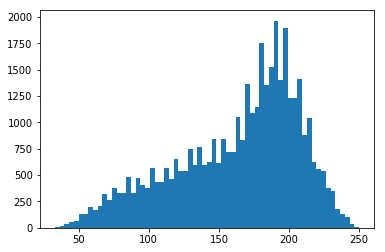

170


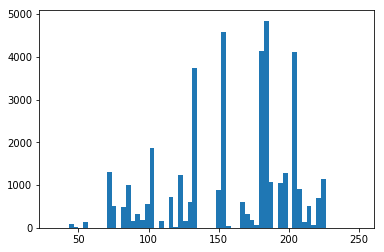

In [49]:
show_segmentation(X, Y)

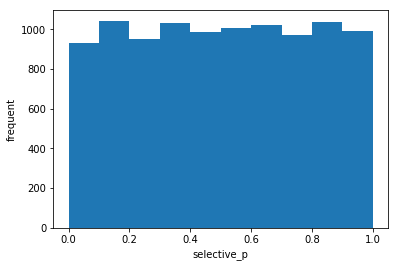

9970
KS検定結果: 0.6002202220320725


In [74]:
FPR_exp(path)

217


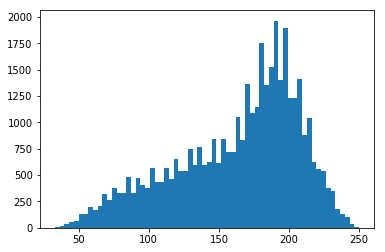

9665


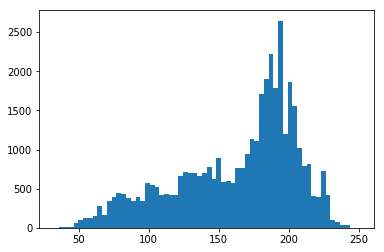

In [82]:
X = [168, 166, 201, 227, 185, 158, 152, 164, 197, 226, 232, 228, 223, 210, 167, 131, 129, 162, 169, 155, 127, 169, 168, 178, 207, 240, 229, 221, 210, 205, 204, 205, 201, 196, 194, 188, 179, 143, 126, 112, 125, 118, 130, 144, 162, 173, 165, 153, 153, 154, 145, 134, 126, 121, 120, 124, 136, 147, 140, 139, 135, 182, 191, 179, 192, 204, 190, 175, 181, 194, 214, 230, 229, 224, 219, 212, 198, 183, 173, 167, 170, 178, 186, 198, 199, 221, 223, 225, 216, 204, 186, 173, 191, 206, 192, 175, 183, 190, 179, 158, 140, 119, 99, 83, 83, 88, 82, 82, 88, 121, 108, 92, 87, 92, 122, 156, 190, 199, 173, 123, 112, 168, 203, 228, 217, 189, 137, 97, 114, 152, 111, 64, 63, 70, 60, 61, 93, 152, 203, 192, 137, 108, 122, 148, 155, 162, 185, 199, 199, 194, 187, 184, 214, 221, 216, 201, 188, 168, 135, 107, 99, 107, 145, 185, 208, 218, 208, 187, 156, 124, 102, 93, 87, 87, 87, 89, 95, 99, 94, 86, 85, 86, 95, 86, 115, 140, 177, 167, 94, 124, 147, 114, 107, 99, 98, 98, 93, 95, 122, 161, 172, 187, 209, 223, 172, 156, 126, 112, 133, 165, 202, 228, 226, 212, 185, 158, 124, 144, 135, 142, 141, 184, 182, 184, 215, 238, 168, 130, 138, 169, 196, 213, 195, 171, 186, 193, 180, 116, 116, 115, 128, 97, 106, 120, 147, 169, 169, 163, 165, 166, 161, 154, 158, 158, 138, 121, 132, 146, 137, 131, 120, 156, 161, 163, 141, 113, 89, 77, 100, 133, 157, 179, 192, 202, 214, 223, 227, 226, 216, 205, 201, 203, 210, 220, 197, 214, 211, 215, 231, 240, 223, 203, 209, 216, 201, 183, 185, 188, 181, 170, 148, 126, 103, 84, 69, 61, 67, 76, 85, 88, 85, 81, 76, 80, 109, 148, 181, 208, 215, 140, 100, 113, 148, 185, 180, 166, 113, 120, 166, 205, 175, 128, 107, 100, 107, 131, 160, 214, 206, 111, 69, 86, 84, 97, 131, 167, 193, 206, 207, 201, 194, 188, 225, 220, 222, 216, 209, 196, 166, 137, 122, 123, 156, 194, 213, 222, 217, 201, 164, 124, 97, 78, 73, 74, 79, 87, 105, 118, 99, 77, 76, 79, 76, 81, 103, 127, 183, 190, 118, 137, 148, 120, 97, 76, 80, 88, 95, 100, 109, 197, 203, 208, 207, 202, 176, 171, 154, 143, 138, 149, 191, 226, 230, 222, 210, 193, 146, 132, 141, 167, 174, 196, 193, 184, 212, 200, 92, 57, 63, 71, 107, 147, 178, 193, 196, 191, 166, 111, 92, 85, 125, 138, 121, 101, 120, 144, 150, 152, 158, 163, 169, 173, 169, 159, 133, 113, 126, 141, 122, 104, 101, 120, 126, 99, 74, 57, 67, 83, 84, 87, 87, 100, 134, 167, 193, 215, 223, 220, 214, 207, 202, 198, 200, 202, 186, 192, 196, 187, 211, 228, 228, 224, 220, 216, 197, 179, 185, 192, 192, 184, 175, 135, 108, 83, 71, 66, 73, 82, 90, 93, 88, 85, 78, 80, 107, 141, 176, 200, 225, 198, 143, 99, 108, 125, 140, 131, 105, 143, 188, 223, 221, 208, 198, 190, 200, 212, 205, 204, 165, 85, 73, 104, 101, 99, 98, 108, 137, 190, 200, 204, 203, 202, 223, 221, 216, 208, 213, 215, 199, 180, 167, 165, 192, 219, 230, 232, 227, 212, 173, 128, 99, 79, 71, 71, 81, 94, 108, 116, 101, 84, 81, 83, 86, 101, 109, 141, 203, 193, 128, 105, 116, 116, 91, 68, 60, 87, 126, 117, 96, 224, 222, 217, 195, 174, 176, 181, 179, 176, 175, 182, 200, 218, 228, 233, 229, 220, 196, 172, 179, 192, 202, 205, 198, 180, 203, 148, 40, 40, 64, 59, 59, 72, 144, 205, 202, 183, 146, 110, 80, 65, 98, 133, 114, 90, 98, 116, 128, 138, 145, 152, 170, 183, 174, 156, 130, 111, 121, 131, 106, 82, 107, 126, 127, 72, 72, 79, 85, 91, 92, 91, 70, 65, 120, 174, 192, 199, 200, 195, 195, 193, 187, 180, 174, 170, 171, 169, 183, 158, 178, 199, 220, 234, 225, 211, 191, 175, 183, 196, 200, 195, 198, 147, 116, 87, 80, 81, 85, 90, 92, 93, 92, 93, 86, 86, 109, 138, 170, 190, 229, 241, 203, 140, 123, 114, 126, 103, 110, 170, 205, 232, 238, 235, 233, 227, 219, 209, 202, 183, 121, 71, 97, 131, 121, 105, 95, 99, 102, 162, 184, 204, 208, 210, 217, 222, 210, 200, 215, 229, 220, 207, 198, 196, 217, 237, 239, 235, 231, 217, 181, 137, 106, 84, 73, 71, 86, 102, 106, 105, 98, 90, 85, 86, 102, 126, 123, 164, 218, 186, 136, 74, 87, 111, 88, 68, 57, 101, 162, 140, 93, 228, 209, 186, 165, 149, 148, 152, 171, 190, 215, 212, 205, 200, 219, 237, 238, 233, 237, 231, 215, 198, 204, 207, 190, 181, 192, 123, 37, 50, 79, 94, 80, 76, 102, 165, 197, 165, 138, 110, 94, 84, 84, 92, 87, 85, 87, 94, 118, 136, 131, 129, 149, 166, 158, 145, 137, 133, 124, 112, 106, 105, 124, 134, 95, 71, 99, 111, 122, 126, 129, 118, 82, 48, 114, 214, 239, 223, 176, 148, 149, 159, 151, 142, 137, 137, 153, 162, 186, 159, 149, 166, 186, 206, 231, 228, 219, 206, 197, 191, 194, 193, 193, 163, 135, 107, 96, 92, 87, 87, 102, 114, 119, 96, 94, 100, 116, 143, 164, 193, 232, 238, 219, 182, 138, 120, 125, 121, 136, 179, 210, 233, 241, 243, 241, 235, 222, 207, 199, 182, 128, 87, 127, 144, 129, 114, 129, 143, 119, 127, 172, 195, 197, 193, 214, 228, 223, 215, 227, 234, 209, 181, 166, 165, 194, 221, 220, 213, 217, 214, 193, 161, 117, 79, 66, 66, 85, 103, 92, 77, 78, 79, 78, 81, 102, 131, 152, 191, 208, 175, 139, 95, 96, 106, 90, 83, 108, 158, 191, 168, 126, 182, 163, 145, 134, 127, 121, 121, 136, 151, 184, 169, 177, 186, 212, 235, 239, 239, 244, 242, 223, 204, 205, 207, 178, 181, 182, 114, 54, 73, 77, 94, 91, 95, 68, 117, 187, 149, 134, 110, 107, 105, 101, 95, 89, 87, 80, 81, 111, 137, 125, 113, 125, 141, 161, 174, 166, 151, 123, 99, 114, 136, 146, 148, 76, 81, 96, 77, 99, 116, 117, 104, 89, 53, 101, 218, 242, 212, 136, 103, 104, 119, 111, 102, 102, 110, 137, 162, 190, 169, 129, 139, 153, 174, 213, 204, 204, 198, 193, 188, 188, 186, 182, 176, 155, 131, 117, 106, 98, 92, 90, 89, 119, 102, 105, 111, 127, 151, 158, 199, 232, 230, 208, 178, 132, 141, 139, 150, 165, 182, 207, 229, 236, 236, 234, 226, 209, 191, 188, 181, 146, 110, 150, 147, 136, 124, 138, 147, 121, 99, 164, 184, 181, 173, 204, 229, 234, 233, 237, 233, 194, 146, 127, 125, 157, 189, 185, 176, 190, 201, 197, 181, 132, 84, 70, 70, 90, 107, 85, 59, 63, 71, 70, 77, 100, 132, 180, 211, 192, 163, 143, 126, 115, 109, 99, 103, 161, 210, 208, 192, 162, 172, 142, 114, 109, 111, 111, 111, 104, 101, 121, 117, 132, 153, 180, 204, 218, 228, 225, 234, 227, 218, 214, 208, 171, 173, 182, 134, 68, 66, 64, 80, 109, 113, 69, 86, 175, 149, 134, 105, 104, 107, 106, 103, 115, 99, 87, 82, 98, 140, 151, 132, 131, 130, 138, 143, 157, 142, 112, 112, 128, 150, 154, 151, 89, 96, 84, 62, 89, 117, 93, 85, 89, 57, 92, 222, 244, 224, 147, 88, 80, 89, 84, 82, 87, 100, 132, 163, 187, 180, 150, 142, 136, 143, 185, 202, 208, 206, 198, 186, 180, 176, 175, 175, 165, 153, 141, 128, 107, 87, 73, 67, 97, 103, 106, 109, 141, 156, 151, 202, 235, 236, 211, 178, 132, 145, 151, 169, 176, 182, 204, 224, 231, 234, 231, 221, 207, 190, 180, 167, 145, 123, 138, 129, 140, 125, 125, 143, 130, 95, 151, 178, 171, 164, 165, 210, 230, 244, 230, 205, 168, 133, 127, 127, 116, 108, 115, 128, 142, 157, 174, 183, 164, 134, 100, 71, 79, 95, 99, 102, 83, 91, 82, 84, 111, 148, 189, 210, 184, 155, 149, 149, 140, 133, 128, 131, 170, 204, 204, 195, 168, 157, 122, 92, 92, 100, 102, 104, 97, 97, 114, 137, 155, 172, 171, 171, 191, 213, 197, 217, 225, 232, 220, 206, 165, 166, 186, 162, 91, 62, 56, 64, 97, 83, 58, 75, 169, 153, 134, 98, 98, 105, 114, 119, 141, 111, 95, 86, 87, 139, 175, 156, 145, 127, 119, 115, 145, 131, 108, 131, 146, 162, 165, 157, 86, 63, 72, 98, 103, 104, 61, 65, 88, 65, 93, 221, 238, 232, 165, 84, 66, 65, 65, 71, 80, 98, 131, 165, 183, 190, 173, 152, 156, 168, 178, 192, 204, 210, 200, 185, 175, 169, 169, 171, 173, 171, 160, 147, 141, 133, 114, 99, 98, 105, 104, 108, 153, 158, 150, 205, 238, 242, 216, 179, 136, 149, 163, 181, 178, 178, 197, 214, 221, 223, 221, 214, 202, 189, 175, 159, 146, 133, 117, 104, 135, 124, 106, 126, 132, 99, 137, 175, 168, 162, 130, 186, 215, 239, 227, 205, 188, 170, 152, 131, 103, 80, 74, 80, 95, 116, 146, 172, 181, 179, 151, 123, 123, 130, 136, 139, 101, 107, 90, 86, 116, 153, 184, 202, 182, 154, 155, 161, 159, 157, 151, 149, 167, 186, 194, 192, 168, 132, 129, 86, 96, 107, 105, 99, 106, 95, 100, 138, 178, 189, 189, 185, 192, 202, 188, 218, 227, 232, 218, 200, 159, 167, 190, 187, 124, 75, 61, 62, 82, 83, 73, 106, 172, 158, 119, 100, 99, 100, 94, 89, 90, 67, 69, 79, 86, 123, 160, 165, 155, 137, 126, 120, 143, 146, 137, 152, 164, 176, 176, 167, 108, 76, 85, 107, 112, 111, 80, 72, 90, 71, 123, 224, 228, 230, 166, 86, 60, 54, 56, 69, 82, 100, 130, 161, 179, 191, 181, 167, 167, 171, 176, 184, 199, 209, 201, 185, 177, 173, 167, 165, 171, 177, 170, 162, 163, 161, 150, 138, 124, 123, 139, 154, 159, 145, 161, 210, 240, 241, 231, 212, 167, 147, 154, 171, 169, 167, 179, 191, 208, 198, 174, 174, 177, 183, 190, 186, 161, 131, 99, 79, 113, 126, 106, 105, 105, 97, 128, 185, 193, 169, 147, 174, 191, 187, 197, 200, 188, 168, 152, 132, 98, 66, 54, 57, 89, 122, 130, 135, 155, 174, 175, 172, 178, 176, 169, 156, 105, 84, 84, 99, 121, 147, 173, 189, 185, 176, 159, 142, 144, 147, 136, 127, 135, 150, 179, 198, 170, 107, 136, 89, 101, 109, 101, 92, 118, 104, 101, 146, 202, 208, 211, 204, 198, 197, 188, 221, 228, 231, 213, 194, 156, 171, 189, 203, 158, 103, 84, 79, 78, 91, 95, 145, 178, 163, 112, 105, 96, 93, 98, 103, 85, 69, 64, 70, 86, 107, 139, 168, 165, 153, 141, 135, 147, 163, 168, 169, 179, 185, 186, 178, 136, 97, 107, 121, 97, 72, 79, 87, 101, 85, 160, 224, 216, 221, 161, 93, 63, 51, 58, 76, 88, 104, 129, 155, 176, 189, 187, 184, 182, 180, 177, 175, 191, 203, 197, 185, 183, 181, 170, 162, 168, 176, 175, 174, 180, 185, 182, 174, 158, 143, 151, 160, 147, 143, 183, 215, 240, 239, 244, 240, 201, 153, 154, 165, 162, 157, 158, 159, 183, 164, 149, 178, 175, 176, 202, 214, 181, 132, 89, 62, 90, 123, 108, 86, 79, 95, 120, 188, 209, 176, 175, 166, 165, 122, 131, 144, 158, 166, 153, 131, 101, 71, 52, 49, 92, 133, 116, 97, 124, 157, 168, 172, 179, 174, 147, 112, 84, 60, 56, 63, 70, 87, 134, 177, 196, 199, 163, 126, 130, 140, 119, 105, 131, 165, 189, 198, 169, 78, 150, 154, 137, 105, 86, 72, 82, 79, 92, 138, 192, 215, 212, 198, 186, 181, 193, 224, 231, 231, 216, 198, 171, 168, 178, 194, 190, 170, 127, 90, 100, 128, 136, 160, 178, 171, 140, 106, 80, 87, 108, 103, 86, 72, 72, 78, 89, 104, 136, 168, 171, 166, 156, 149, 157, 171, 174, 172, 180, 188, 192, 187, 174, 132, 122, 117, 93, 73, 76, 85, 115, 131, 192, 210, 204, 199, 148, 99, 71, 54, 75, 82, 92, 102, 120, 140, 166, 188, 208, 198, 199, 191, 167, 169, 169, 176, 170, 189, 191, 192, 180, 169, 169, 173, 178, 181, 181, 177, 173, 168, 161, 154, 151, 155, 168, 191, 217, 231, 242, 243, 250, 247, 228, 200, 183, 167, 139, 115, 110, 114, 141, 146, 142, 164, 168, 180, 202, 231, 198, 148, 104, 72, 83, 104, 97, 82, 88, 82, 101, 149, 201, 209, 208, 166, 141, 96, 95, 105, 129, 150, 146, 131, 104, 77, 65, 68, 87, 104, 88, 76, 104, 139, 162, 177, 168, 166, 127, 82, 64, 52, 54, 62, 54, 60, 104, 169, 209, 209, 190, 160, 136, 122, 123, 135, 167, 196, 198, 189, 164, 61, 122, 138, 103, 58, 51, 57, 77, 104, 114, 129, 175, 216, 205, 186, 195, 209, 219, 225, 229, 230, 219, 204, 185, 165, 169, 182, 205, 221, 206, 182, 172, 166, 169, 170, 175, 172, 169, 113, 74, 86, 119, 107, 97, 84, 85, 90, 97, 111, 139, 166, 174, 175, 170, 164, 170, 176, 172, 170, 177, 186, 192, 192, 202, 163, 142, 121, 100, 85, 83, 94, 132, 171, 209, 191, 189, 173, 139, 107, 82, 62, 99, 96, 100, 103, 114, 132, 162, 189, 223, 208, 211, 205, 163, 167, 153, 153, 146, 189, 198, 201, 190, 176, 170, 169, 178, 185, 178, 168, 161, 157, 159, 166, 178, 193, 214, 232, 236, 234, 234, 242, 244, 245, 243, 238, 230, 214, 173, 128, 94, 78, 101, 136, 148, 158, 169, 185, 198, 238, 211, 167, 126, 92, 83, 83, 83, 83, 100, 74, 90, 110, 158, 194, 208, 163, 120, 80, 67, 69, 99, 130, 134, 127, 105, 84, 83, 89, 82, 74, 67, 68, 95, 126, 154, 175, 147, 148, 99, 52, 47, 54, 58, 61, 43, 40, 78, 164, 217, 212, 203, 186, 182, 181, 173, 169, 178, 187, 188, 183, 167, 68, 87, 67, 52, 38, 53, 78, 98, 118, 122, 125, 177, 206, 201, 187, 204, 221, 227, 226, 227, 225, 215, 203, 179, 176, 182, 195, 213, 225, 218, 205, 207, 203, 172, 138, 144, 154, 164, 141, 109, 102, 111, 98, 90, 83, 92, 104, 117, 133, 149, 163, 169, 173, 175, 176, 183, 188, 178, 168, 172, 178, 183, 186, 208, 200, 196, 161, 148, 140, 138, 146, 175, 198, 183, 138, 149, 155, 163, 122, 85, 78, 122, 122, 124, 122, 139, 157, 161, 165, 198, 206, 207, 219, 186, 176, 166, 166, 159, 182, 198, 209, 194, 174, 168, 169, 174, 179, 183, 185, 181, 179, 190, 204, 210, 215, 228, 237, 231, 223, 220, 244, 241, 239, 244, 246, 242, 230, 202, 166, 124, 95, 105, 129, 158, 160, 176, 195, 195, 231, 217, 190, 152, 112, 83, 64, 68, 79, 98, 92, 98, 107, 135, 180, 193, 125, 89, 60, 51, 55, 79, 103, 112, 112, 95, 80, 111, 118, 97, 73, 75, 88, 110, 135, 163, 181, 138, 127, 76, 56, 61, 74, 70, 64, 47, 46, 65, 159, 199, 202, 184, 163, 179, 196, 190, 181, 176, 174, 188, 198, 188, 76, 93, 68, 67, 65, 78, 96, 115, 132, 127, 123, 183, 195, 201, 194, 193, 195, 208, 220, 223, 221, 212, 203, 169, 183, 189, 201, 205, 208, 207, 207, 219, 223, 195, 160, 143, 135, 153, 170, 152, 123, 107, 96, 91, 92, 104, 121, 140, 155, 159, 160, 164, 169, 177, 184, 192, 195, 181, 168, 168, 171, 174, 179, 181, 185, 216, 201, 197, 191, 194, 195, 182, 165, 149, 140, 143, 145, 185, 142, 95, 95, 141, 148, 146, 140, 157, 176, 182, 188, 191, 202, 198, 230, 211, 189, 183, 181, 174, 171, 193, 212, 195, 173, 169, 170, 169, 172, 187, 201, 198, 196, 214, 231, 232, 229, 233, 230, 198, 162, 153, 201, 210, 225, 236, 241, 238, 227, 215, 196, 158, 123, 121, 130, 170, 166, 183, 199, 189, 216, 213, 204, 173, 135, 91, 57, 61, 78, 92, 108, 106, 109, 119, 162, 168, 86, 63, 46, 45, 50, 64, 79, 91, 97, 88, 78, 109, 94, 87, 80, 91, 108, 128, 150, 175, 188, 135, 115, 61, 67, 76, 90, 79, 66, 52, 58, 65, 156, 177, 187, 163, 136, 144, 159, 170, 180, 189, 196, 205, 210, 205, 82, 97, 74, 82, 114, 115, 113, 116, 118, 112, 116, 185, 206, 199, 202, 190, 179, 171, 174, 203, 222, 217, 203, 163, 177, 181, 192, 195, 195, 185, 180, 204, 225, 218, 200, 158, 147, 161, 182, 168, 145, 130, 125, 125, 129, 134, 141, 149, 157, 159, 161, 168, 174, 180, 184, 186, 186, 180, 173, 173, 174, 174, 171, 162, 156, 172, 169, 183, 193, 194, 187, 172, 156, 147, 147, 152, 157, 191, 177, 134, 115, 140, 153, 159, 169, 187, 204, 213, 220, 219, 221, 216, 228, 229, 200, 178, 157, 152, 152, 169, 187, 191, 190, 180, 169, 166, 170, 182, 195, 204, 210, 214, 215, 214, 208, 191, 170, 151, 137, 132, 138, 146, 161, 179, 194, 187, 181, 200, 213, 197, 175, 161, 156, 179, 181, 183, 188, 181, 193, 196, 193, 179, 156, 120, 87, 82, 85, 84, 88, 85, 90, 119, 160, 143, 74, 55, 45, 44, 48, 55, 64, 80, 89, 82, 73, 110, 95, 88, 80, 99, 124, 140, 159, 182, 197, 143, 141, 69, 59, 60, 73, 66, 58, 51, 58, 87, 157, 171, 175, 152, 132, 134, 143, 150, 154, 160, 170, 195, 215, 213, 83, 110, 95, 83, 113, 93, 76, 85, 101, 100, 109, 185, 216, 195, 204, 207, 204, 158, 123, 174, 222, 220, 204, 163, 164, 143, 128, 128, 129, 107, 98, 152, 210, 232, 236, 181, 164, 173, 191, 180, 165, 161, 158, 163, 167, 164, 160, 158, 157, 160, 165, 173, 181, 183, 182, 178, 176, 177, 180, 181, 180, 173, 167, 167, 169, 168, 172, 179, 183, 178, 171, 159, 150, 156, 164, 166, 171, 191, 206, 172, 132, 138, 155, 151, 149, 147, 153, 178, 206, 222, 232, 232, 223, 238, 207, 172, 135, 133, 142, 149, 162, 188, 205, 190, 168, 166, 169, 177, 186, 182, 176, 183, 189, 183, 173, 163, 151, 134, 122, 118, 124, 129, 132, 134, 129, 104, 83, 96, 119, 148, 171, 174, 175, 179, 185, 179, 174, 171, 167, 171, 172, 175, 171, 148, 122, 107, 95, 79, 68, 66, 76, 128, 165, 124, 73, 58, 53, 50, 52, 54, 60, 77, 88, 83, 74, 107, 93, 89, 83, 87, 99, 132, 169, 191, 204, 157, 172, 89, 58, 47, 52, 51, 52, 52, 63, 110, 152, 165, 164, 152, 139, 131, 125, 121, 118, 123, 138, 174, 205, 211, 77, 118, 102, 71, 61, 52, 53, 67, 87, 104, 103, 187, 215, 206, 202, 198, 187, 160, 121, 150, 218, 212, 213, 167, 135, 111, 97, 89, 86, 73, 74, 106, 149, 200, 232, 209, 200, 201, 204, 196, 186, 180, 176, 177, 181, 177, 175, 174, 175, 176, 177, 183, 187, 186, 184, 180, 177, 182, 189, 186, 181, 179, 179, 180, 181, 175, 174, 180, 186, 185, 181, 178, 176, 174, 172, 164, 163, 192, 218, 188, 145, 123, 115, 126, 117, 111, 107, 110, 125, 175, 219, 234, 228, 229, 203, 167, 129, 145, 170, 176, 180, 196, 206, 189, 169, 162, 162, 170, 179, 181, 179, 170, 162, 161, 161, 152, 144, 145, 148, 153, 149, 139, 122, 110, 99, 87, 74, 60, 55, 79, 105, 130, 130, 157, 180, 186, 159, 153, 143, 140, 142, 151, 161, 150, 133, 118, 103, 86, 75, 78, 92, 141, 174, 128, 78, 74, 78, 73, 74, 76, 81, 81, 102, 91, 84, 101, 97, 90, 85, 95, 112, 157, 177, 194, 203, 177, 176, 125, 94, 71, 56, 54, 59, 74, 91, 110, 122, 137, 149, 173, 166, 144, 117, 102, 118, 109, 108, 129, 158, 192, 68, 118, 109, 87, 52, 39, 35, 51, 75, 109, 99, 177, 202, 204, 189, 181, 168, 164, 129, 128, 207, 201, 220, 168, 105, 83, 70, 57, 50, 51, 60, 64, 83, 155, 214, 208, 190, 202, 215, 211, 203, 194, 186, 185, 187, 186, 186, 188, 191, 191, 189, 189, 188, 188, 187, 184, 182, 190, 197, 190, 183, 187, 194, 195, 195, 188, 183, 186, 192, 194, 196, 199, 200, 191, 178, 162, 156, 192, 220, 192, 151, 132, 119, 146, 125, 116, 101, 89, 87, 113, 150, 199, 229, 215, 195, 181, 169, 180, 194, 197, 199, 202, 200, 187, 171, 161, 158, 165, 174, 178, 178, 158, 139, 145, 154, 150, 149, 164, 180, 186, 181, 134, 75, 73, 83, 81, 78, 77, 78, 77, 75, 100, 79, 102, 122, 166, 153, 142, 123, 114, 111, 127, 146, 145, 137, 125, 111, 101, 96, 103, 119, 159, 185, 141, 89, 93, 104, 99, 97, 97, 103, 91, 124, 113, 105, 104, 107, 97, 95, 136, 176, 204, 181, 194, 200, 197, 180, 160, 133, 99, 68, 61, 67, 92, 115, 104, 93, 112, 136, 193, 190, 158, 114, 65, 75, 74, 84, 87, 103, 155, 63, 104, 139, 104, 57, 44, 41, 64, 65, 89, 88, 126, 142, 149, 143, 136, 126, 128, 117, 109, 182, 191, 208, 150, 85, 71, 68, 57, 48, 58, 52, 51, 66, 109, 177, 207, 206, 210, 209, 213, 214, 202, 188, 189, 193, 195, 196, 197, 196, 193, 188, 181, 176, 179, 184, 189, 195, 200, 202, 193, 183, 185, 193, 209, 219, 205, 188, 191, 198, 199, 199, 201, 201, 196, 187, 175, 169, 193, 211, 198, 150, 130, 115, 137, 133, 111, 86, 80, 83, 78, 87, 132, 197, 218, 198, 177, 198, 209, 220, 217, 208, 192, 177, 174, 174, 168, 164, 170, 172, 152, 130, 128, 132, 145, 153, 147, 144, 164, 192, 175, 147, 113, 70, 69, 76, 83, 83, 78, 73, 76, 78, 95, 87, 98, 112, 158, 166, 143, 110, 100, 98, 131, 135, 120, 101, 108, 119, 125, 131, 140, 153, 185, 202, 157, 105, 90, 111, 119, 103, 93, 94, 105, 163, 169, 143, 139, 140, 137, 143, 171, 197, 212, 198, 201, 202, 210, 205, 181, 147, 102, 93, 93, 101, 102, 102, 96, 95, 113, 135, 189, 182, 151, 102, 69, 70, 67, 69, 62, 63, 100, 60, 87, 159, 121, 75, 65, 62, 85, 62, 74, 86, 85, 87, 89, 97, 117, 135, 116, 106, 93, 159, 182, 190, 133, 73, 66, 70, 64, 55, 75, 50, 52, 63, 73, 136, 200, 212, 211, 201, 210, 217, 202, 184, 189, 198, 201, 202, 200, 196, 192, 186, 174, 164, 171, 182, 195, 205, 207, 204, 195, 186, 189, 194, 199, 202, 199, 197, 200, 204, 203, 201, 199, 198, 196, 195, 189, 185, 194, 197, 201, 153, 133, 117, 129, 141, 113, 82, 85, 93, 83, 81, 93, 157, 220, 203, 141, 151, 162, 182, 183, 180, 171, 163, 172, 182, 181, 176, 176, 172, 156, 141, 137, 137, 148, 156, 147, 142, 165, 195, 149, 103, 89, 72, 72, 77, 86, 91, 87, 82, 88, 92, 96, 100, 98, 104, 145, 177, 146, 105, 95, 95, 134, 127, 123, 116, 120, 130, 150, 171, 179, 186, 206, 214, 174, 126, 94, 117, 133, 105, 93, 93, 125, 198, 214, 178, 174, 172, 178, 189, 200, 210, 210, 209, 206, 203, 214, 219, 190, 152, 108, 116, 96, 83, 80, 83, 93, 106, 121, 135, 179, 168, 136, 93, 78, 68, 65, 62, 48, 39, 53, 54, 74, 128, 132, 102, 101, 99, 95, 71, 94, 118, 127, 108, 104, 101, 108, 117, 108, 115, 100, 165, 177, 174, 138, 72, 54, 48, 52, 55, 83, 56, 56, 56, 66, 111, 192, 200, 204, 197, 199, 197, 181, 170, 184, 202, 207, 209, 202, 195, 196, 196, 184, 174, 175, 181, 193, 203, 204, 203, 199, 195, 197, 199, 192, 186, 196, 207, 211, 213, 210, 206, 203, 199, 197, 194, 190, 186, 191, 193, 202, 181, 148, 114, 115, 123, 106, 88, 89, 94, 84, 78, 81, 111, 145, 134, 96, 106, 142, 182, 187, 186, 193, 198, 204, 207, 205, 200, 187, 175, 175, 177, 177, 176, 153, 156, 150, 148, 171, 177, 116, 77, 79, 78, 74, 79, 80, 106, 99, 94, 76, 88, 82, 82, 81, 93, 118, 162, 140, 111, 105, 105, 128, 128, 135, 140, 145, 154, 182, 206, 207, 203, 212, 216, 198, 170, 121, 103, 109, 104, 117, 142, 188, 236, 227, 185, 183, 186, 190, 195, 199, 202, 198, 196, 194, 195, 209, 219, 209, 188, 138, 112, 85, 68, 63, 68, 90, 114, 126, 132, 169, 158, 118, 92, 79, 68, 67, 67, 57, 50, 62, 60, 69, 92, 131, 121, 128, 125, 103, 88, 120, 151, 173, 138, 126, 112, 105, 104, 106, 122, 112, 174, 177, 166, 150, 81, 50, 33, 41, 55, 86, 67, 63, 57, 78, 103, 183, 182, 198, 199, 190, 177, 164, 159, 179, 202, 210, 212, 203, 194, 200, 205, 198, 188, 184, 184, 192, 200, 201, 200, 202, 203, 203, 203, 206, 211, 212, 212, 215, 217, 214, 211, 205, 201, 197, 193, 188, 186, 187, 190, 202, 204, 164, 119, 111, 111, 108, 105, 103, 101, 94, 92, 106, 121, 129, 138, 133, 131, 171, 212, 224, 228, 231, 230, 229, 226, 224, 220, 199, 182, 199, 219, 219, 212, 166, 165, 159, 161, 184, 167, 103, 66, 76, 83, 78, 79, 72, 114, 107, 102, 66, 83, 69, 63, 66, 84, 94, 147, 139, 125, 119, 117, 121, 130, 146, 162, 169, 178, 207, 231, 226, 215, 213, 209, 205, 194, 167, 136, 112, 107, 147, 193, 214, 222, 205, 185, 185, 188, 189, 190, 188, 184, 179, 176, 182, 188, 183, 174, 178, 174, 145, 108, 79, 58, 57, 68, 95, 121, 131, 132, 168, 156, 105, 94, 78, 72, 71, 73, 68, 66, 81, 96, 81, 78, 98, 95, 97, 97, 97, 107, 132, 151, 153, 120, 105, 92, 87, 87, 104, 104, 120, 168, 168, 156, 148, 108, 79, 49, 47, 53, 76, 76, 57, 68, 115, 136, 181, 178, 188, 191, 195, 195, 182, 170, 179, 191, 200, 206, 202, 198, 205, 211, 205, 198, 201, 206, 201, 197, 198, 202, 204, 207, 206, 204, 204, 204, 206, 207, 207, 208, 208, 209, 208, 206, 201, 194, 190, 185, 182, 180, 186, 190, 169, 148, 144, 146, 142, 138, 133, 130, 126, 130, 161, 188, 189, 189, 189, 188, 210, 230, 240, 242, 237, 228, 226, 226, 227, 226, 213, 201, 214, 230, 230, 225, 204, 203, 199, 196, 202, 191, 136, 86, 66, 73, 80, 68, 52, 96, 102, 80, 66, 78, 70, 65, 76, 74, 92, 158, 161, 154, 141, 127, 117, 117, 124, 140, 164, 194, 221, 241, 242, 235, 222, 208, 203, 200, 199, 195, 185, 182, 194, 207, 211, 206, 191, 179, 172, 169, 177, 183, 169, 159, 158, 158, 172, 184, 170, 159, 170, 176, 154, 120, 101, 91, 102, 118, 127, 136, 135, 155, 196, 172, 122, 118, 97, 83, 70, 64, 75, 87, 83, 135, 107, 86, 76, 73, 68, 71, 99, 128, 138, 138, 117, 95, 79, 68, 73, 79, 104, 86, 120, 152, 184, 200, 174, 139, 108, 79, 61, 55, 67, 87, 63, 93, 154, 170, 175, 176, 202, 224, 221, 212, 198, 186, 181, 182, 189, 200, 201, 202, 207, 211, 208, 204, 215, 224, 211, 196, 198, 202, 206, 208, 207, 204, 202, 199, 199, 199, 198, 198, 201, 205, 209, 212, 204, 196, 192, 189, 184, 180, 177, 177, 177, 179, 182, 184, 178, 170, 165, 161, 166, 174, 181, 187, 188, 186, 171, 158, 170, 189, 206, 218, 219, 217, 217, 217, 222, 225, 221, 217, 222, 229, 228, 227, 229, 229, 221, 216, 228, 242, 219, 119, 72, 70, 84, 60, 43, 76, 93, 58, 69, 75, 76, 71, 89, 72, 102, 176, 183, 177, 153, 127, 113, 106, 102, 110, 153, 198, 225, 241, 245, 241, 207, 164, 138, 127, 145, 171, 188, 201, 204, 202, 194, 183, 177, 170, 157, 149, 165, 178, 157, 138, 137, 144, 159, 175, 182, 186, 176, 162, 146, 130, 125, 128, 148, 166, 154, 144, 135, 175, 224, 196, 129, 101, 92, 93, 76, 60, 56, 58, 59, 195, 176, 123, 98, 85, 79, 86, 127, 162, 143, 112, 93, 83, 89, 99, 104, 105, 109, 91, 108, 129, 179, 216, 197, 166, 127, 112, 83, 65, 76, 104, 119, 155, 175, 168, 161, 182, 200, 218, 208, 193, 192, 193, 192, 194, 200, 204, 201, 197, 198, 199, 201, 203, 213, 220, 213, 204, 204, 206, 206, 204, 203, 201, 198, 196, 196, 197, 199, 200, 200, 202, 207, 213, 223, 229, 221, 211, 212, 211, 193, 176, 183, 194, 195, 195, 203, 211, 213, 212, 203, 195, 195, 199, 206, 211, 199, 179, 155, 138, 148, 167, 183, 196, 199, 200, 208, 214, 217, 217, 216, 211, 192, 177, 186, 197, 203, 211, 228, 243, 237, 199, 162, 107, 92, 63, 56, 76, 83, 64, 71, 73, 69, 66, 81, 80, 128, 189, 189, 169, 133, 96, 80, 75, 84, 104, 139, 174, 217, 223, 217, 197, 162, 125, 96, 79, 87, 100, 96, 96, 123, 154, 178, 189, 180, 170, 161, 157, 180, 193, 186, 141, 127, 144, 150, 158, 188, 181, 156, 124, 113, 111, 120, 136, 166, 185, 156, 122, 126, 165, 233, 225, 173, 98, 79, 72, 65, 62, 66, 72, 69, 198, 227, 199, 171, 140, 139, 150, 175, 188, 140, 86, 75, 76, 80, 89, 115, 134, 116, 97, 95, 110, 177, 230, 217, 188, 146, 147, 110, 85, 96, 124, 174, 209, 186, 159, 147, 187, 200, 209, 192, 174, 184, 198, 204, 207, 209, 208, 202, 193, 189, 186, 192, 199, 205, 211, 212, 211, 209, 207, 203, 200, 198, 196, 195, 195, 196, 198, 201, 204, 203, 202, 208, 215, 216, 218, 223, 229, 234, 236, 231, 222, 211, 202, 200, 201, 201, 202, 207, 211, 208, 203, 198, 197, 208, 220, 225, 225, 211, 192, 171, 156, 162, 174, 178, 182, 191, 201, 208, 212, 201, 187, 178, 170, 162, 156, 153, 156, 181, 203, 210, 218, 215, 145, 109, 80, 84, 91, 85, 79, 77, 77, 72, 71, 79, 98, 155, 200, 188, 154, 104, 62, 75, 99, 99, 101, 121, 144, 204, 203, 175, 136, 130, 129, 119, 104, 85, 65, 61, 65, 75, 96, 149, 191, 182, 165, 160, 160, 188, 204, 212, 147, 122, 149, 147, 143, 161, 125, 107, 89, 83, 89, 114, 139, 147, 144, 122, 102, 121, 149, 221, 232, 221, 138, 94, 60, 66, 83, 88, 91, 86, 174, 229, 226, 216, 197, 194, 194, 200, 194, 132, 71, 63, 72, 70, 77, 113, 143, 115, 87, 94, 115, 183, 235, 221, 194, 163, 177, 147, 127, 153, 185, 204, 206, 181, 159, 138, 174, 196, 194, 192, 188, 196, 205, 212, 214, 209, 201, 200, 199, 198, 196, 191, 187, 193, 199, 199, 198, 198, 197, 194, 193, 194, 195, 196, 198, 200, 203, 205, 207, 211, 215, 214, 213, 213, 214, 213, 215, 222, 229, 227, 221, 215, 209, 203, 198, 198, 198, 199, 201, 207, 210, 196, 183, 192, 204, 204, 204, 215, 223, 212, 196, 183, 175, 178, 184, 186, 190, 197, 202, 196, 189, 185, 179, 172, 167, 162, 158, 157, 157, 160, 167, 189, 177, 157, 135, 122, 108, 101, 100, 101, 99, 78, 70, 106, 176, 196, 196, 173, 139, 95, 65, 86, 114, 107, 99, 115, 135, 175, 175, 147, 112, 114, 117, 95, 72, 76, 84, 91, 96, 88, 88, 113, 160, 161, 135, 140, 151, 166, 192, 204, 131, 124, 143, 140, 132, 122, 106, 93, 79, 56, 48, 95, 143, 143, 131, 102, 106, 120, 142, 168, 169, 189, 170, 151, 127, 112, 101, 98, 94, 77, 188, 206, 170, 156, 143, 144, 154, 177, 186, 127, 64, 56, 68, 85, 107, 129, 141, 112, 83, 100, 133, 192, 235, 221, 196, 178, 202, 187, 175, 183, 193, 198, 194, 177, 162, 136, 161, 193, 184, 197, 205, 207, 207, 212, 215, 205, 195, 200, 206, 209, 206, 193, 178, 181, 187, 186, 185, 186, 186, 187, 188, 192, 195, 199, 203, 205, 208, 209, 210, 217, 224, 217, 209, 207, 205, 201, 199, 207, 217, 219, 219, 217, 214, 206, 197, 193, 191, 190, 188, 180, 173, 170, 170, 176, 181, 177, 177, 196, 212, 208, 197, 188, 182, 184, 187, 183, 180, 185, 191, 193, 195, 197, 197, 194, 189, 179, 168, 164, 162, 161, 157, 151, 151, 170, 186, 182, 169, 144, 121, 119, 124, 121, 128, 142, 199, 202, 193, 164, 129, 96, 76, 98, 125, 113, 99, 110, 129, 172, 199, 157, 104, 105, 111, 79, 54, 83, 120, 140, 147, 117, 87, 79, 121, 138, 105, 92, 89, 109, 170, 186, 121, 132, 140, 134, 126, 84, 91, 83, 80, 67, 65, 102, 139, 132, 118, 89, 113, 123, 135, 112, 95, 114, 144, 166, 183, 190, 186, 162, 136, 116, 183, 153, 116, 96, 84, 83, 91, 117, 136, 106, 72, 69, 72, 77, 88, 117, 141, 124, 111, 123, 172, 208, 233, 221, 205, 190, 218, 212, 205, 204, 205, 188, 190, 178, 169, 156, 169, 197, 203, 207, 206, 201, 196, 199, 202, 201, 200, 205, 210, 208, 203, 194, 186, 187, 190, 191, 191, 192, 192, 193, 194, 197, 200, 204, 206, 208, 210, 211, 212, 209, 206, 205, 205, 207, 208, 209, 211, 215, 218, 217, 216, 220, 221, 214, 206, 205, 205, 203, 199, 192, 182, 173, 168, 167, 168, 165, 164, 174, 182, 184, 183, 177, 172, 171, 171, 168, 166, 173, 181, 185, 190, 193, 197, 204, 208, 205, 198, 191, 185, 183, 175, 164, 158, 170, 181, 174, 164, 164, 167, 174, 183, 194, 202, 181, 178, 168, 159, 154, 144, 105, 70, 78, 94, 92, 93, 108, 133, 167, 213, 171, 120, 109, 106, 89, 81, 111, 145, 158, 161, 133, 103, 81, 88, 112, 86, 76, 71, 86, 129, 158, 142, 149, 150, 139, 124, 71, 81, 90, 105, 105, 104, 115, 125, 126, 124, 105, 110, 127, 122, 104, 90, 95, 112, 125, 141, 161, 182, 204, 217, 204, 169, 116, 102, 80, 67, 66, 71, 77, 82, 84, 84, 84, 80, 73, 73, 102, 134, 135, 142, 149, 204, 217, 224, 217, 212, 199, 226, 227, 226, 216, 205, 174, 186, 180, 176, 174, 177, 200, 221, 214, 200, 190, 183, 183, 187, 197, 206, 211, 212, 206, 199, 198, 198, 197, 197, 198, 200, 200, 200, 200, 201, 203, 205, 208, 210, 210, 210, 211, 210, 198, 188, 192, 201, 207, 212, 219, 225, 223, 220, 216, 214, 220, 225, 221, 217, 217, 219, 218, 215, 207, 197, 184, 173, 168, 165, 164, 163, 158, 155, 161, 169, 169, 167, 165, 163, 160, 160, 169, 180, 182, 184, 187, 194, 208, 221, 224, 223, 217, 212, 210, 201, 187, 168, 168, 171, 164, 158, 161, 169, 179, 190, 207, 217, 208, 192, 183, 175, 175, 167, 120, 74, 61, 63, 73, 91, 111, 140, 166, 221, 190, 146, 120, 105, 105, 116, 141, 164, 171, 164, 118, 71, 64, 65, 93, 73, 67, 60, 71, 89, 128, 164, 168, 163, 147, 127, 75, 80, 104, 130, 121, 107, 107, 113, 124, 132, 124, 111, 134, 112, 106, 97, 87, 81, 81, 88, 103, 125, 158, 188, 203, 124, 83, 78, 81, 89, 88, 85, 76, 72, 84, 97, 82, 87, 82, 83, 93, 110, 131, 155, 168, 200, 196, 191, 200, 211, 209, 223, 229, 231, 218, 208, 172, 183, 181, 182, 169, 163, 189, 211, 201, 185, 181, 182, 186, 195, 204, 211, 213, 212, 208, 204, 202, 202, 201, 201, 202, 203, 203, 202, 202, 203, 205, 208, 211, 213, 209, 205, 199, 195, 195, 196, 196, 197, 203, 209, 215, 221, 221, 221, 221, 221, 218, 215, 219, 223, 226, 227, 229, 229, 224, 216, 209, 202, 196, 190, 190, 190, 174, 161, 165, 174, 187, 197, 199, 194, 183, 176, 173, 172, 178, 184, 184, 185, 200, 214, 219, 220, 216, 210, 209, 229, 232, 232, 215, 197, 179, 162, 158, 160, 172, 186, 195, 202, 206, 206, 215, 221, 215, 197, 154, 110, 86, 76, 85, 101, 116, 140, 175, 219, 222, 184, 142, 109, 111, 126, 144, 159, 176, 153, 112, 70, 60, 59, 73, 65, 69, 72, 70, 74, 106, 163, 181, 170, 160, 140, 106, 100, 95, 121, 117, 112, 114, 121, 142, 157, 151, 127, 128, 80, 75, 75, 91, 105, 100, 89, 80, 80, 108, 141, 154, 80, 63, 65, 89, 113, 113, 103, 87, 75, 88, 106, 82, 102, 101, 102, 90, 86, 120, 158, 176, 181, 167, 156, 182, 208, 216, 217, 226, 232, 218, 206, 168, 176, 178, 184, 162, 146, 175, 199, 187, 171, 176, 186, 197, 206, 212, 213, 212, 209, 208, 207, 207, 206, 205, 204, 205, 205, 204, 203, 202, 203, 206, 210, 213, 214, 208, 199, 187, 180, 194, 207, 201, 194, 198, 204, 209, 213, 215, 219, 224, 226, 214, 203, 213, 225, 228, 231, 235, 237, 237, 233, 231, 227, 221, 214, 212, 212, 213, 215, 219, 221, 219, 218, 220, 219, 205, 194, 203, 213, 201, 185, 178, 177, 187, 201, 207, 210, 207, 202, 201, 212, 227, 241, 235, 221, 195, 169, 181, 196, 184, 170, 167, 174, 197, 220, 225, 225, 228, 224, 192, 152, 124, 105, 107, 115, 130, 148, 160, 168, 218, 209, 170, 125, 124, 135, 144, 148, 170, 136, 108, 78, 69, 67, 61, 63, 75, 85, 71, 66, 88, 155, 193, 178, 171, 153, 138, 125, 86, 105, 126, 149, 139, 125, 127, 133, 145, 148, 150, 101, 75, 59, 97, 134, 121, 99, 90, 89, 105, 124, 137, 68, 60, 69, 89, 110, 115, 113, 96, 81, 85, 101, 98, 146, 159, 165, 136, 110, 121, 141, 149, 150, 147, 152, 183, 209, 218, 219, 229, 231, 232, 194, 151, 158, 167, 178, 172, 146, 161, 212, 194, 174, 183, 199, 208, 214, 215, 212, 201, 192, 196, 202, 207, 209, 209, 207, 205, 203, 202, 201, 201, 201, 206, 211, 215, 217, 211, 204, 193, 186, 195, 205, 201, 195, 196, 198, 200, 202, 205, 208, 214, 217, 205, 193, 202, 214, 218, 221, 226, 230, 231, 231, 230, 230, 235, 240, 240, 238, 237, 235, 234, 232, 230, 228, 217, 225, 224, 204, 217, 226, 209, 186, 175, 169, 178, 190, 195, 199, 196, 192, 192, 190, 215, 239, 240, 215, 192, 196, 207, 218, 205, 190, 181, 177, 192, 210, 220, 223, 228, 229, 225, 213, 184, 154, 126, 135, 151, 168, 161, 152, 184, 210, 213, 180, 156, 134, 140, 145, 145, 114, 97, 81, 98, 92, 79, 69, 73, 78, 62, 59, 72, 150, 215, 197, 169, 153, 148, 140, 110, 111, 123, 140, 135, 129, 128, 132, 159, 174, 169, 136, 110, 91, 108, 128, 118, 105, 101, 103, 111, 122, 134, 71, 73, 80, 68, 58, 64, 75, 83, 90, 86, 93, 122, 193, 197, 182, 137, 94, 105, 124, 123, 124, 135, 154, 184, 209, 218, 222, 230, 227, 236, 177, 132, 139, 154, 170, 179, 149, 152, 222, 204, 181, 193, 210, 216, 219, 215, 207, 191, 176, 182, 194, 203, 209, 209, 205, 202, 199, 199, 199, 199, 201, 205, 210, 213, 215, 212, 206, 199, 195, 198, 202, 200, 198, 195, 194, 192, 192, 194, 198, 203, 206, 198, 190, 195, 202, 205, 208, 213, 217, 220, 222, 226, 227, 224, 221, 224, 226, 222, 218, 213, 207, 201, 195, 167, 188, 219, 213, 228, 233, 216, 193, 179, 171, 175, 182, 185, 188, 186, 184, 184, 168, 175, 185, 215, 203, 189, 216, 227, 233, 219, 200, 186, 178, 183, 195, 204, 213, 224, 232, 228, 221, 212, 201, 150, 152, 170, 191, 168, 145, 121, 159, 214, 219, 202, 171, 156, 142, 117, 104, 122, 139, 158, 122, 103, 82, 72, 67, 52, 53, 60, 145, 232, 209, 161, 146, 144, 147, 136, 119, 98, 80, 77, 83, 103, 128, 166, 189, 159, 128, 122, 124, 120, 116, 113, 112, 119, 126, 128, 131, 143, 86, 79, 76, 63, 54, 64, 77, 79, 80, 78, 93, 131, 187, 213, 217, 161, 97, 102, 121, 126, 127, 145, 143, 161, 202, 216, 224, 229, 222, 204, 144, 121, 127, 141, 162, 166, 151, 155, 218, 204, 186, 196, 208, 212, 213, 204, 193, 190, 187, 186, 186, 190, 193, 193, 193, 194, 195, 199, 203, 206, 208, 206, 203, 199, 196, 195, 195, 194, 195, 201, 206, 206, 204, 203, 201, 197, 194, 195, 198, 199, 200, 201, 203, 204, 205, 203, 201, 200, 200, 207, 214, 221, 226, 227, 226, 217, 208, 205, 202, 196, 191, 194, 195, 166, 163, 194, 207, 214, 214, 218, 217, 208, 197, 189, 184, 184, 186, 187, 188, 188, 173, 162, 152, 185, 196, 193, 208, 218, 223, 223, 201, 205, 207, 193, 183, 181, 209, 224, 238, 237, 232, 228, 219, 170, 151, 182, 210, 186, 152, 121, 130, 166, 182, 190, 191, 187, 181, 167, 165, 203, 229, 217, 165, 127, 93, 74, 60, 44, 46, 51, 143, 217, 201, 176, 160, 133, 133, 123, 111, 91, 75, 73, 75, 70, 78, 123, 184, 174, 128, 112, 103, 107, 116, 121, 126, 132, 138, 140, 142, 150, 114, 100, 85, 71, 64, 74, 86, 81, 77, 80, 100, 158, 208, 231, 232, 176, 110, 109, 122, 135, 143, 161, 138, 141, 194, 211, 221, 221, 209, 158, 112, 113, 122, 135, 151, 147, 152, 158, 205, 199, 190, 195, 202, 205, 205, 192, 179, 191, 202, 193, 181, 178, 178, 180, 182, 187, 192, 197, 204, 209, 211, 204, 194, 183, 176, 178, 184, 189, 196, 202, 208, 208, 207, 208, 207, 202, 197, 198, 200, 199, 200, 209, 217, 216, 211, 206, 200, 193, 189, 197, 207, 213, 218, 221, 224, 226, 226, 225, 221, 218, 214, 204, 196, 193, 191, 194, 198, 194, 194, 216, 235, 232, 221, 207, 194, 190, 190, 192, 195, 195, 178, 175, 173, 179, 188, 191, 192, 204, 205, 192, 130, 130, 141, 158, 180, 167, 201, 222, 242, 241, 235, 234, 226, 188, 152, 188, 221, 198, 164, 157, 151, 137, 126, 124, 129, 147, 169, 196, 219, 229, 230, 221, 202, 158, 111, 81, 58, 42, 47, 56, 148, 196, 187, 160, 123, 92, 114, 105, 98, 88, 79, 73, 71, 68, 76, 75, 120, 152, 128, 103, 80, 97, 121, 129, 134, 139, 144, 150, 155, 158, 176, 149, 112, 113, 119, 114, 110, 118, 125, 142, 133, 141, 176, 218, 242, 216, 170, 136, 120, 129, 164, 174, 164, 165, 191, 197, 200, 192, 176, 137, 106, 104, 132, 154, 132, 128, 136, 166, 209, 204, 191, 194, 198, 197, 195, 186, 179, 188, 198, 190, 180, 182, 186, 186, 184, 184, 185, 187, 188, 189, 190, 188, 185, 182, 180, 184, 190, 195, 199, 200, 199, 195, 192, 191, 192, 204, 214, 207, 199, 206, 215, 220, 223, 225, 224, 220, 213, 208, 203, 202, 204, 214, 224, 223, 221, 224, 228, 227, 224, 220, 215, 213, 212, 213, 211, 211, 212, 201, 193, 205, 219, 225, 227, 223, 216, 211, 206, 202, 198, 197, 178, 177, 177, 178, 182, 184, 181, 189, 187, 157, 101, 94, 102, 123, 151, 151, 178, 223, 237, 242, 239, 236, 226, 203, 181, 181, 207, 192, 173, 178, 175, 140, 104, 85, 78, 84, 97, 133, 170, 187, 200, 203, 200, 193, 152, 95, 69, 59, 74, 103, 168, 175, 176, 144, 107, 82, 90, 88, 87, 80, 70, 53, 43, 57, 79, 75, 95, 128, 130, 122, 107, 101, 102, 127, 153, 153, 146, 144, 141, 137, 225, 213, 184, 171, 159, 141, 129, 145, 164, 192, 167, 127, 141, 173, 209, 223, 222, 172, 127, 126, 184, 187, 190, 192, 190, 185, 177, 161, 142, 118, 104, 103, 146, 172, 116, 117, 122, 145, 169, 183, 192, 195, 194, 192, 189, 186, 184, 189, 193, 187, 181, 190, 198, 195, 189, 186, 182, 178, 174, 171, 170, 174, 178, 183, 188, 194, 198, 202, 202, 197, 190, 182, 177, 177, 180, 185, 191, 196, 202, 215, 228, 226, 222, 228, 233, 229, 223, 220, 218, 212, 205, 195, 190, 202, 218, 224, 227, 227, 225, 221, 219, 223, 227, 229, 230, 230, 226, 214, 200, 196, 199, 213, 228, 232, 232, 227, 219, 208, 200, 198, 182, 185, 187, 183, 178, 174, 170, 170, 168, 155, 148, 157, 168, 169, 168, 158, 153, 215, 230, 240, 240, 234, 222, 215, 209, 175, 188, 186, 185, 174, 155, 122, 89, 79, 75, 71, 69, 82, 100, 127, 157, 177, 188, 217, 192, 122, 97, 94, 111, 151, 186, 159, 165, 126, 88, 76, 71, 70, 74, 92, 107, 95, 76, 58, 47, 60, 80, 106, 132, 136, 134, 132, 128, 121, 117, 128, 143, 154, 161, 158, 200, 197, 184, 156, 124, 92, 71, 83, 114, 169, 210, 177, 161, 160, 168, 199, 220, 205, 162, 147, 188, 201, 192, 200, 199, 192, 178, 152, 127, 90, 93, 116, 161, 167, 124, 120, 122, 142, 160, 173, 182, 188, 192, 194, 195, 193, 194, 198, 201, 193, 186, 191, 196, 195, 193, 193, 192, 188, 184, 180, 177, 177, 178, 179, 182, 186, 189, 194, 197, 195, 192, 190, 189, 191, 192, 182, 176, 195, 214, 219, 219, 215, 209, 197, 189, 198, 208, 212, 212, 207, 200, 193, 186, 182, 183, 197, 210, 215, 216, 219, 225, 226, 226, 224, 222, 227, 229, 222, 214, 207, 199, 192, 189, 199, 210, 214, 214, 207, 200, 197, 195, 198, 199, 191, 179, 170, 161, 142, 127, 143, 175, 192, 197, 204, 178, 161, 147, 181, 231, 236, 236, 230, 222, 223, 221, 187, 176, 186, 200, 186, 167, 115, 87, 79, 83, 65, 78, 83, 94, 132, 143, 146, 147, 196, 213, 182, 166, 184, 202, 195, 172, 154, 163, 119, 77, 73, 74, 62, 60, 95, 133, 150, 152, 123, 92, 86, 87, 104, 125, 131, 129, 116, 101, 89, 82, 86, 97, 104, 115, 135, 203, 191, 163, 115, 70, 58, 58, 45, 54, 101, 191, 172, 144, 157, 176, 193, 203, 223, 198, 174, 189, 209, 189, 200, 206, 199, 185, 152, 120, 69, 83, 126, 170, 155, 135, 127, 127, 139, 155, 164, 173, 182, 191, 198, 203, 203, 203, 206, 208, 202, 194, 193, 194, 195, 197, 200, 202, 199, 196, 192, 188, 184, 180, 177, 176, 179, 182, 187, 192, 196, 198, 202, 204, 205, 204, 202, 201, 211, 219, 213, 204, 196, 190, 185, 184, 184, 188, 196, 204, 202, 196, 192, 187, 191, 193, 189, 188, 196, 207, 219, 230, 227, 222, 216, 214, 221, 227, 229, 227, 217, 205, 198, 194, 187, 184, 195, 204, 202, 198, 196, 206, 210, 212, 199, 182, 167, 155, 149, 145, 145, 152, 169, 180, 210, 189, 166, 149, 149, 229, 231, 229, 224, 220, 227, 229, 202, 171, 188, 206, 194, 171, 104, 88, 85, 96, 71, 96, 93, 99, 170, 187, 173, 155, 186, 220, 227, 226, 229, 224, 193, 154, 160, 163, 117, 72, 74, 82, 65, 54, 77, 110, 148, 176, 161, 134, 114, 101, 108, 119, 120, 116, 94, 74, 81, 93, 96, 95, 80, 71, 83, 204, 181, 121, 83, 51, 45, 46, 52, 46, 67, 144, 171, 164, 159, 178, 187, 199, 223, 222, 205, 200, 202, 185, 189, 193, 195, 190, 159, 122, 75, 74, 133, 187, 160, 126, 126, 134, 142, 154, 165, 177, 188, 198, 205, 209, 210, 210, 208, 205, 203, 201, 202, 203, 202, 201, 199, 198, 197, 195, 193, 191, 189, 187, 185, 185, 187, 192, 195, 199, 204, 208, 212, 215, 212, 208, 212, 213, 204, 191, 181, 174, 171, 171, 171, 174, 178, 182, 180, 178, 179, 180, 177, 176, 183, 189, 180, 174, 188, 204, 233, 236, 233, 226, 223, 223, 226, 228, 228, 227, 223, 217, 209, 202, 199, 198, 192, 186, 188, 191, 204, 206, 213, 218, 203, 184, 172, 163, 143, 148, 165, 145, 142, 162, 180, 171, 153, 158, 154, 202, 226, 226, 220, 212, 223, 232, 212, 184, 186, 187, 185, 150, 84, 75, 73, 83, 67, 80, 85, 101, 175, 211, 188, 158, 173, 201, 218, 223, 207, 184, 144, 148, 169, 164, 121, 76, 75, 78, 73, 69, 77, 94, 109, 121, 119, 114, 111, 109, 117, 122, 115, 103, 86, 72, 87, 103, 100, 90, 75, 65, 73, 204, 170, 78, 55, 42, 43, 47, 70, 52, 44, 86, 155, 175, 163, 186, 185, 190, 211, 229, 224, 211, 196, 186, 179, 178, 190, 197, 169, 132, 96, 72, 110, 150, 137, 120, 128, 142, 150, 157, 171, 183, 194, 203, 206, 208, 211, 212, 208, 203, 205, 209, 211, 211, 208, 203, 198, 194, 192, 192, 191, 192, 193, 194, 196, 198, 200, 201, 204, 206, 210, 214, 217, 218, 217, 212, 197, 181, 173, 169, 162, 157, 159, 165, 171, 178, 179, 180, 187, 195, 199, 203, 206, 206, 199, 191, 178, 171, 183, 200, 240, 237, 236, 231, 233, 234, 232, 229, 227, 225, 228, 231, 225, 217, 220, 218, 197, 175, 180, 189, 213, 203, 212, 219, 205, 187, 180, 177, 147, 158, 182, 134, 112, 140, 139, 148, 135, 168, 169, 173, 219, 219, 214, 204, 218, 230, 219, 202, 187, 168, 176, 134, 76, 66, 63, 71, 65, 63, 75, 102, 169, 224, 204, 171, 168, 174, 194, 206, 166, 126, 91, 143, 177, 161, 126, 85, 79, 80, 86, 91, 83, 79, 88, 98, 91, 85, 100, 119, 127, 128, 112, 95, 81, 75, 93, 112, 103, 88, 78, 70, 70, 183, 147, 58, 46, 45, 48, 53, 67, 57, 47, 63, 114, 143, 156, 179, 170, 162, 172, 192, 214, 224, 216, 203, 189, 176, 179, 180, 170, 153, 119, 88, 108, 134, 124, 114, 131, 153, 159, 164, 177, 187, 191, 194, 206, 216, 211, 203, 205, 210, 212, 212, 212, 211, 209, 206, 202, 198, 196, 194, 192, 192, 196, 199, 203, 207, 207, 207, 208, 208, 206, 203, 200, 196, 184, 172, 177, 182, 175, 170, 186, 203, 206, 207, 206, 207, 214, 220, 219, 219, 221, 223, 225, 225, 219, 211, 198, 187, 181, 181, 211, 220, 233, 241, 244, 244, 241, 236, 230, 227, 231, 236, 237, 238, 238, 236, 222, 206, 192, 182, 180, 192, 204, 214, 204, 192, 192, 193, 167, 163, 179, 156, 131, 131, 122, 130, 117, 173, 188, 172, 199, 200, 202, 203, 213, 221, 225, 220, 205, 183, 172, 134, 92, 73, 70, 77, 74, 71, 75, 90, 143, 194, 212, 191, 175, 165, 185, 196, 163, 132, 99, 139, 178, 147, 129, 103, 87, 106, 107, 109, 121, 106, 107, 106, 96, 91, 106, 123, 129, 129, 114, 94, 76, 64, 67, 77, 94, 106, 90, 69, 67, 160, 129, 52, 48, 53, 56, 61, 61, 63, 57, 56, 78, 109, 148, 172, 160, 142, 137, 146, 192, 230, 231, 221, 199, 179, 193, 207, 195, 170, 137, 109, 111, 120, 116, 117, 140, 164, 171, 175, 183, 190, 188, 184, 182, 181, 185, 192, 204, 215, 216, 214, 212, 208, 207, 206, 205, 202, 199, 196, 193, 192, 197, 203, 209, 213, 212, 210, 210, 209, 200, 189, 179, 172, 175, 180, 179, 183, 200, 219, 232, 241, 242, 240, 237, 231, 222, 214, 209, 206, 205, 206, 203, 203, 217, 229, 220, 205, 184, 170, 178, 199, 222, 242, 246, 246, 244, 239, 232, 228, 233, 239, 244, 247, 246, 244, 239, 232, 224, 220, 196, 184, 196, 205, 201, 195, 201, 203, 191, 171, 151, 138, 136, 135, 123, 122, 108, 171, 199, 180, 177, 177, 189, 202, 208, 213, 226, 232, 218, 200, 195, 184, 138, 88, 82, 85, 83, 81, 76, 79, 113, 151, 210, 209, 191, 166, 179, 190, 172, 153, 122, 135, 171, 132, 126, 120, 101, 132, 128, 124, 159, 140, 113, 86, 97, 116, 127, 135, 139, 137, 122, 103, 78, 55, 46, 45, 59, 73, 74, 72, 68, 158, 137, 68, 58, 53, 54, 56, 50, 49, 54, 63, 89, 124, 144, 179, 182, 173, 150, 140, 162, 212, 225, 226, 210, 191, 199, 207, 196, 180, 155, 132, 129, 128, 113, 106, 143, 182, 187, 185, 191, 194, 187, 177, 162, 153, 164, 181, 198, 211, 212, 210, 208, 204, 203, 203, 201, 199, 197, 194, 192, 191, 197, 204, 210, 214, 213, 210, 196, 183, 188, 194, 185, 178, 183, 191, 198, 206, 214, 222, 228, 232, 228, 222, 216, 210, 203, 196, 195, 195, 196, 196, 198, 200, 207, 217, 220, 213, 190, 167, 154, 157, 181, 207, 220, 227, 230, 230, 233, 234, 225, 214, 211, 211, 219, 227, 229, 229, 229, 230, 215, 197, 186, 201, 195, 192, 194, 196, 194, 186, 173, 163, 149, 130, 108, 101, 123, 184, 198, 180, 165, 158, 170, 191, 208, 221, 216, 229, 230, 229, 224, 213, 160, 123, 98, 85, 79, 80, 79, 84, 94, 115, 177, 224, 221, 186, 176, 194, 193, 170, 148, 141, 145, 118, 108, 127, 139, 150, 143, 134, 157, 154, 143, 134, 148, 167, 178, 184, 181, 171, 155, 133, 94, 64, 54, 54, 54, 55, 64, 71, 67, 161, 150, 95, 78, 68, 62, 59, 48, 42, 58, 82, 110, 143, 141, 182, 198, 205, 177, 154, 144, 192, 213, 228, 219, 205, 207, 207, 196, 182, 167, 153, 146, 142, 141, 147, 171, 194, 197, 196, 198, 197, 183, 171, 171, 174, 172, 173, 187, 203, 205, 205, 202, 199, 198, 197, 196, 195, 193, 192, 191, 191, 195, 201, 206, 209, 207, 203, 203, 203, 200, 198, 195, 194, 199, 206, 214, 222, 221, 217, 212, 205, 198, 190, 183, 177, 171, 169, 174, 180, 182, 184, 189, 192, 194, 198, 207, 213, 214, 210, 190, 168, 163, 166, 184, 201, 209, 216, 227, 235, 235, 228, 200, 173, 185, 205, 213, 220, 228, 234, 236, 210, 182, 199, 193, 191, 187, 188, 193, 198, 192, 184, 179, 173, 155, 140, 145, 154, 172, 186, 163, 141, 154, 180, 205, 225, 206, 222, 221, 219, 211, 201, 158, 156, 118, 88, 77, 77, 83, 90, 83, 93, 140, 226, 238, 204, 179, 199, 212, 182, 166, 142, 118, 107, 89, 125, 164, 151, 149, 142, 150, 163, 170, 181, 198, 214, 225, 229, 221, 206, 190, 165, 118, 78, 71, 71, 53, 41, 55, 72, 68, 156, 154, 131, 112, 92, 73, 61, 69, 83, 99, 116, 122, 131, 134, 165, 172, 198, 208, 195, 179, 191, 209, 227, 227, 220, 214, 204, 195, 166, 182, 196, 197, 195, 194, 193, 194, 196, 197, 197, 194, 191, 185, 180, 176, 173, 171, 176, 203, 223, 213, 198, 191, 188, 189, 191, 193, 195, 194, 192, 191, 190, 188, 187, 186, 186, 190, 195, 202, 205, 201, 192, 185, 180, 191, 202, 206, 206, 200, 190, 177, 166, 161, 157, 153, 151, 159, 165, 170, 173, 178, 184, 172, 185, 195, 186, 184, 206, 210, 212, 214, 211, 194, 177, 174, 178, 193, 209, 218, 224, 238, 239, 212, 178, 162, 161, 190, 218, 221, 221, 234, 210, 193, 198, 199, 201, 195, 191, 192, 194, 190, 187, 198, 204, 189, 171, 181, 189, 200, 204, 169, 131, 143, 146, 160, 199, 199, 218, 227, 230, 212, 187, 151, 145, 127, 113, 94, 79, 82, 91, 95, 108, 127, 178, 225, 235, 221, 195, 211, 178, 154, 119, 86, 70, 70, 106, 139, 143, 155, 162, 163, 169, 181, 195, 213, 229, 240, 244, 236, 220, 207, 186, 149, 89, 76, 70, 58, 52, 63, 77, 80, 154, 153, 157, 160, 159, 135, 112, 114, 124, 136, 143, 131, 119, 130, 147, 139, 180, 230, 232, 218, 196, 206, 219, 226, 227, 217, 200, 197, 156, 170, 187, 197, 203, 199, 194, 195, 196, 197, 197, 190, 184, 185, 187, 183, 181, 182, 186, 195, 203, 200, 194, 187, 182, 183, 187, 192, 196, 195, 192, 190, 187, 180, 173, 169, 168, 177, 188, 202, 211, 199, 187, 199, 211, 204, 193, 188, 181, 171, 159, 143, 130, 130, 132, 133, 136, 151, 164, 167, 170, 176, 183, 157, 176, 197, 179, 166, 201, 207, 214, 215, 214, 209, 202, 181, 165, 181, 201, 206, 211, 232, 246, 245, 234, 202, 174, 192, 215, 213, 208, 227, 210, 206, 200, 206, 212, 207, 197, 192, 189, 189, 190, 190, 191, 198, 206, 213, 217, 222, 216, 171, 124, 160, 163, 141, 165, 186, 208, 223, 232, 228, 212, 170, 131, 130, 134, 108, 82, 80, 88, 108, 128, 125, 127, 174, 214, 232, 194, 209, 174, 136, 96, 86, 84, 84, 82, 78, 86, 130, 172, 173, 167, 178, 192, 209, 226, 240, 246, 240, 227, 219, 201, 180, 109, 85, 70, 64, 65, 72, 83, 91, 133, 131, 138, 139, 143, 163, 178, 157, 132, 131, 135, 129, 125, 132, 142, 136, 163, 217, 239, 230, 205, 192, 184, 196, 208, 205, 196, 197, 177, 165, 185, 198, 207, 208, 205, 201, 198, 197, 195, 184, 177, 188, 202, 203, 201, 198, 195, 199, 200, 199, 197, 197, 197, 195, 192, 195, 197, 193, 188, 185, 183, 179, 177, 182, 189, 192, 197, 203, 207, 204, 203, 215, 224, 214, 198, 183, 168, 159, 152, 141, 134, 136, 142, 146, 153, 158, 182, 175, 168, 167, 172, 158, 169, 184, 182, 190, 218, 220, 218, 215, 212, 214, 214, 202, 189, 188, 191, 192, 198, 209, 239, 243, 243, 235, 223, 213, 204, 216, 208, 221, 221, 216, 209, 217, 222, 216, 206, 198, 193, 195, 198, 200, 204, 210, 214, 208, 199, 206, 205, 160, 117, 149, 165, 150, 156, 166, 179, 201, 217, 218, 209, 183, 152, 133, 118, 99, 84, 76, 76, 99, 125, 129, 132, 154, 178, 207, 198, 210, 194, 146, 97, 101, 113, 111, 100, 72, 53, 70, 95, 105, 112, 113, 121, 154, 192, 218, 235, 237, 232, 225, 211, 201, 157, 111, 71, 55, 55, 71, 89, 97, 166, 142, 122, 122, 130, 148, 161, 150, 135, 126, 123, 129, 137, 141, 146, 143, 148, 194, 233, 228, 209, 177, 149, 162, 183, 190, 193, 196, 200, 160, 174, 185, 201, 206, 206, 201, 195, 195, 194, 183, 172, 167, 171, 196, 218, 215, 204, 201, 197, 198, 202, 207, 211, 205, 198, 196, 195, 190, 184, 181, 180, 181, 186, 199, 210, 210, 206, 203, 202, 208, 216, 227, 233, 220, 200, 177, 158, 153, 152, 148, 146, 150, 157, 166, 175, 143, 156, 161, 169, 163, 158, 160, 164, 174, 190, 214, 231, 228, 220, 210, 204, 213, 223, 220, 214, 198, 182, 181, 190, 183, 222, 236, 246, 244, 235, 218, 200, 225, 213, 214, 230, 222, 215, 221, 227, 220, 212, 205, 200, 202, 206, 208, 210, 215, 216, 196, 175, 183, 187, 149, 115, 139, 171, 166, 152, 147, 149, 172, 196, 205, 205, 195, 174, 133, 96, 90, 90, 76, 66, 85, 111, 131, 145, 140, 138, 169, 201, 214, 214, 165, 110, 100, 102, 91, 81, 80, 80, 68, 59, 76, 95, 92, 93, 115, 146, 183, 213, 226, 231, 227, 218, 215, 204, 145, 84, 57, 49, 67, 89, 96, 211, 194, 171, 162, 154, 141, 129, 126, 127, 108, 95, 123, 158, 180, 164, 164, 160, 164, 171, 167, 160, 155, 154, 162, 174, 185, 195, 197, 197, 173, 155, 157, 191, 198, 201, 191, 181, 185, 190, 183, 175, 168, 168, 189, 210, 216, 217, 199, 201, 201, 204, 204, 203, 200, 196, 188, 182, 181, 181, 180, 181, 189, 197, 201, 202, 202, 201, 199, 198, 201, 203, 207, 210, 199, 183, 163, 149, 153, 160, 148, 137, 138, 147, 163, 171, 132, 140, 127, 125, 145, 143, 154, 162, 177, 199, 212, 213, 214, 212, 206, 204, 217, 230, 226, 214, 196, 180, 186, 198, 186, 199, 214, 230, 240, 243, 233, 218, 223, 209, 207, 224, 211, 198, 193, 215, 214, 212, 213, 213, 212, 209, 205, 201, 206, 208, 199, 186, 182, 174, 150, 126, 120, 125, 134, 140, 135, 134, 153, 175, 191, 198, 192, 175, 133, 96, 103, 115, 92, 73, 73, 83, 111, 137, 142, 146, 156, 195, 222, 217, 171, 119, 106, 106, 113, 121, 114, 101, 80, 63, 65, 73, 78, 83, 84, 95, 134, 181, 207, 222, 228, 229, 231, 226, 191, 143, 99, 67, 74, 91, 93, 214, 219, 221, 205, 182, 161, 143, 127, 121, 119, 126, 151, 176, 205, 180, 176, 166, 156, 146, 147, 152, 157, 163, 164, 168, 184, 196, 198, 189, 187, 141, 137, 183, 188, 189, 176, 164, 173, 185, 184, 180, 171, 166, 179, 198, 215, 227, 197, 205, 204, 205, 198, 190, 191, 191, 180, 170, 174, 182, 183, 186, 197, 205, 197, 189, 191, 194, 195, 194, 190, 184, 181, 180, 172, 163, 151, 143, 156, 167, 150, 131, 130, 136, 150, 162, 144, 165, 147, 131, 152, 132, 148, 166, 185, 202, 199, 191, 195, 200, 200, 201, 216, 228, 223, 213, 198, 186, 197, 207, 193, 176, 187, 205, 224, 240, 242, 238, 222, 208, 204, 218, 202, 186, 166, 198, 201, 206, 212, 217, 216, 213, 203, 195, 197, 201, 204, 203, 188, 169, 154, 141, 134, 131, 129, 129, 127, 129, 140, 156, 176, 188, 183, 166, 129, 97, 113, 132, 108, 80, 62, 58, 88, 124, 142, 159, 148, 182, 224, 215, 180, 135, 117, 112, 132, 153, 141, 122, 100, 80, 67, 62, 73, 87, 93, 102, 124, 154, 184, 208, 222, 232, 237, 235, 223, 202, 155, 106, 73, 56, 74, 220, 224, 226, 216, 204, 187, 170, 173, 158, 175, 191, 205, 188, 163, 138, 152, 169, 155, 139, 137, 141, 146, 152, 158, 165, 181, 193, 194, 186, 187, 160, 145, 158, 164, 169, 160, 153, 165, 179, 184, 184, 176, 171, 183, 200, 219, 229, 188, 163, 181, 204, 198, 187, 181, 177, 174, 175, 184, 193, 195, 195, 197, 199, 193, 187, 188, 189, 189, 188, 181, 171, 179, 161, 158, 154, 148, 144, 156, 167, 161, 150, 156, 145, 138, 175, 151, 144, 151, 139, 170, 176, 185, 190, 214, 213, 188, 182, 180, 182, 183, 185, 196, 202, 190, 175, 166, 163, 169, 176, 172, 162, 163, 171, 196, 220, 237, 245, 235, 224, 221, 232, 209, 181, 165, 182, 181, 186, 201, 216, 221, 222, 222, 220, 214, 207, 209, 210, 200, 186, 173, 162, 153, 147, 141, 139, 138, 140, 142, 148, 163, 173, 163, 143, 111, 84, 93, 102, 103, 73, 57, 51, 75, 105, 126, 143, 135, 154, 200, 213, 215, 179, 138, 102, 115, 134, 125, 107, 86, 70, 82, 98, 101, 100, 101, 104, 130, 137, 161, 181, 197, 209, 219, 224, 227, 223, 205, 175, 126, 83, 79, 220, 221, 220, 220, 220, 211, 201, 219, 197, 204, 205, 222, 192, 142, 139, 125, 123, 133, 143, 143, 143, 141, 142, 152, 165, 178, 188, 187, 184, 180, 179, 183, 183, 166, 150, 145, 147, 160, 174, 182, 185, 178, 173, 188, 206, 221, 226, 201, 168, 181, 199, 196, 189, 177, 167, 176, 187, 196, 202, 204, 202, 196, 189, 188, 188, 186, 184, 184, 181, 174, 164, 182, 154, 155, 154, 151, 149, 157, 166, 170, 168, 182, 154, 130, 182, 156, 129, 164, 159, 168, 178, 201, 213, 218, 179, 156, 182, 176, 169, 168, 169, 166, 168, 187, 205, 212, 211, 200, 184, 171, 159, 147, 144, 166, 195, 223, 244, 243, 236, 236, 239, 235, 225, 201, 173, 170, 173, 169, 173, 200, 226, 236, 238, 227, 214, 214, 216, 212, 204, 193, 182, 176, 171, 160, 150, 151, 152, 148, 146, 154, 160, 145, 122, 96, 75, 73, 73, 96, 69, 60, 53, 66, 85, 106, 124, 123, 125, 166, 204, 233, 207, 177, 137, 120, 108, 101, 95, 78, 66, 74, 89, 101, 113, 114, 117, 173, 179, 168, 151, 164, 180, 195, 208, 221, 230, 235, 231, 200, 161, 139, 228, 227, 223, 226, 227, 218, 206, 215, 204, 205, 204, 205, 177, 125, 107, 121, 140, 132, 128, 141, 154, 156, 157, 161, 167, 175, 182, 181, 177, 174, 178, 183, 179, 167, 155, 151, 152, 161, 171, 177, 178, 166, 157, 184, 213, 227, 231, 193, 169, 181, 199, 199, 195, 190, 186, 197, 209, 204, 197, 200, 202, 195, 187, 187, 187, 184, 181, 180, 178, 177, 174, 186, 173, 172, 169, 166, 163, 166, 170, 171, 168, 172, 151, 144, 152, 147, 142, 170, 176, 185, 195, 198, 196, 199, 180, 171, 187, 182, 178, 186, 195, 195, 193, 192, 194, 202, 211, 217, 218, 205, 187, 166, 150, 156, 172, 199, 222, 232, 235, 236, 235, 239, 239, 227, 210, 205, 201, 195, 190, 188, 191, 211, 228, 224, 215, 220, 224, 219, 210, 203, 195, 186, 177, 160, 145, 148, 153, 150, 151, 173, 187, 163, 128, 101, 83, 88, 97, 109, 91, 83, 74, 66, 67, 91, 116, 115, 112, 133, 162, 208, 219, 205, 176, 144, 116, 115, 116, 95, 76, 72, 76, 86, 101, 119, 138, 198, 198, 174, 143, 153, 172, 184, 196, 208, 220, 233, 240, 228, 212, 204, 233, 230, 224, 227, 228, 214, 201, 198, 198, 194, 188, 174, 158, 121, 93, 126, 161, 137, 115, 139, 167, 173, 173, 172, 171, 175, 179, 175, 171, 171, 175, 178, 179, 173, 166, 162, 158, 162, 167, 171, 172, 154, 145, 182, 219, 231, 231, 186, 181, 187, 201, 202, 202, 204, 207, 218, 225, 209, 190, 193, 198, 193, 187, 186, 185, 183, 180, 178, 178, 181, 186, 188, 191, 190, 186, 181, 176, 175, 173, 168, 162, 156, 149, 162, 127, 143, 163, 176, 189, 198, 201, 187, 174, 175, 182, 189, 192, 193, 191, 185, 181, 179, 180, 181, 185, 197, 209, 211, 211, 215, 215, 195, 170, 160, 160, 177, 197, 212, 223, 226, 226, 236, 246, 245, 241, 236, 229, 220, 209, 182, 158, 162, 176, 198, 218, 224, 225, 219, 211, 208, 204, 195, 181, 159, 141, 143, 153, 156, 160, 168, 172, 162, 145, 116, 94, 107, 126, 120, 110, 102, 92, 69, 54, 80, 109, 109, 103, 109, 121, 149, 174, 171, 158, 145, 134, 142, 148, 127, 103, 83, 72, 77, 93, 124, 157, 212, 211, 181, 144, 150, 166, 177, 188, 195, 203, 224, 238, 230, 214, 205, 227, 224, 216, 217, 215, 197, 177, 175, 178, 186, 167, 155, 144, 138, 136, 146, 176, 162, 126, 131, 164, 171, 174, 178, 181, 183, 184, 179, 175, 188, 180, 173, 186, 179, 172, 164, 161, 177, 191, 181, 167, 158, 161, 196, 226, 221, 211, 180, 198, 199, 204, 207, 210, 212, 214, 218, 220, 206, 190, 189, 189, 186, 185, 185, 186, 185, 182, 181, 179, 179, 181, 180, 182, 182, 182, 182, 181, 176, 171, 164, 158, 155, 158, 171, 157, 170, 182, 182, 183, 187, 190, 187, 182, 183, 188, 192, 191, 190, 188, 184, 180, 179, 179, 174, 173, 181, 190, 195, 201, 211, 218, 212, 202, 192, 179, 164, 156, 170, 185, 190, 208, 222, 238, 236, 230, 227, 225, 230, 234, 228, 217, 198, 178, 169, 165, 182, 199, 202, 203, 212, 216, 208, 193, 171, 151, 151, 157, 155, 154, 168, 175, 170, 157, 142, 129, 124, 121, 107, 96, 87, 78, 66, 60, 76, 94, 92, 89, 100, 112, 112, 115, 113, 117, 133, 149, 171, 191, 187, 172, 151, 131, 124, 124, 140, 157, 187, 188, 176, 157, 146, 144, 172, 196, 192, 189, 216, 239, 238, 226, 201, 220, 215, 207, 204, 197, 174, 152, 153, 154, 175, 148, 140, 135, 157, 181, 164, 182, 179, 135, 123, 161, 167, 174, 181, 188, 190, 190, 185, 179, 204, 188, 170, 193, 185, 177, 171, 165, 167, 169, 168, 168, 169, 178, 208, 230, 212, 191, 178, 213, 210, 207, 210, 213, 215, 214, 213, 210, 200, 190, 184, 180, 180, 182, 184, 186, 186, 185, 183, 181, 177, 174, 170, 167, 171, 175, 180, 183, 177, 169, 160, 154, 156, 163, 176, 191, 196, 197, 186, 174, 174, 177, 186, 194, 194, 193, 190, 187, 185, 183, 180, 177, 177, 176, 169, 163, 165, 169, 175, 183, 196, 209, 220, 226, 216, 201, 187, 172, 159, 149, 147, 190, 204, 220, 215, 207, 210, 216, 217, 219, 227, 234, 232, 225, 207, 186, 175, 171, 182, 198, 213, 223, 218, 206, 187, 169, 165, 165, 156, 150, 163, 176, 179, 173, 147, 118, 117, 116, 98, 77, 66, 61, 63, 69, 76, 82, 81, 82, 95, 107, 107, 102, 82, 73, 111, 156, 192, 219, 229, 228, 211, 188, 171, 157, 152, 151, 152, 157, 166, 170, 146, 129, 167, 203, 193, 180, 208, 235, 236, 227, 206, 226, 197, 162, 150, 146, 149, 153, 153, 150, 163, 150, 141, 134, 152, 171, 158, 161, 151, 126, 118, 166, 175, 184, 182, 180, 182, 184, 184, 184, 199, 193, 185, 197, 189, 180, 171, 165, 167, 171, 176, 179, 171, 168, 199, 222, 209, 192, 195, 217, 209, 199, 199, 201, 203, 205, 206, 205, 194, 181, 176, 174, 175, 178, 182, 185, 185, 184, 182, 180, 176, 172, 167, 166, 169, 174, 180, 184, 178, 173, 176, 182, 186, 189, 188, 191, 196, 199, 188, 176, 175, 180, 187, 194, 193, 188, 184, 179, 179, 180, 180, 179, 185, 187, 172, 157, 158, 162, 165, 170, 173, 180, 199, 217, 218, 215, 206, 195, 183, 175, 162, 181, 191, 202, 196, 191, 200, 209, 205, 201, 213, 224, 222, 219, 226, 231, 216, 197, 181, 173, 189, 212, 224, 230, 218, 201, 190, 180, 165, 159, 178, 212, 208, 191, 154, 116, 101, 92, 82, 72, 61, 53, 55, 62, 74, 87, 94, 99, 96, 92, 93, 94, 101, 89, 101, 137, 177, 194, 213, 221, 207, 186, 170, 157, 142, 131, 130, 138, 147, 155, 148, 146, 161, 199, 197, 193, 203, 215, 223, 225, 208, 229, 204, 169, 154, 146, 149, 154, 151, 148, 151, 154, 144, 136, 144, 151, 146, 134, 116, 111, 116, 171, 183, 190, 183, 174, 174, 178, 182, 187, 190, 195, 199, 198, 192, 183, 174, 167, 166, 170, 182, 189, 171, 158, 185, 210, 207, 201, 212, 218, 205, 191, 188, 190, 193, 196, 201, 202, 188, 174, 170, 171, 172, 175, 179, 183, 182, 181, 181, 179, 175, 171, 168, 167, 171, 176, 180, 184, 184, 181, 173, 166, 166, 170, 177, 185, 194, 197, 188, 178, 180, 184, 188, 190, 187, 182, 176, 172, 174, 179, 180, 181, 191, 196, 179, 159, 159, 162, 161, 159, 151, 150, 172, 197, 210, 218, 220, 218, 212, 208, 186, 179, 182, 186, 180, 177, 188, 203, 214, 220, 212, 203, 207, 212, 213, 213, 220, 224, 211, 197, 192, 198, 222, 241, 238, 227, 213, 199, 181, 174, 167, 205, 207, 203, 185, 161, 140, 119, 98, 79, 68, 62, 57, 60, 76, 95, 109, 115, 99, 81, 88, 98, 130, 115, 95, 119, 158, 158, 183, 197, 188, 171, 160, 149, 132, 119, 123, 131, 136, 142, 154, 169, 157, 192, 201, 207, 199, 191, 205, 216, 206, 234, 228, 190, 166, 146, 144, 145, 136, 133, 156, 179, 161, 138, 145, 147, 135, 118, 99, 98, 123, 173, 180, 180, 186, 190, 185, 179, 182, 188, 189, 192, 196, 195, 193, 189, 187, 184, 171, 161, 170, 180, 171, 166, 171, 201, 206, 209, 218, 220, 209, 197, 201, 206, 206, 204, 205, 203, 188, 172, 170, 170, 172, 173, 178, 181, 181, 179, 178, 177, 174, 172, 171, 171, 176, 180, 184, 186, 189, 187, 180, 170, 166, 166, 171, 179, 188, 194, 188, 180, 181, 183, 183, 183, 180, 177, 174, 171, 174, 178, 180, 183, 190, 193, 189, 182, 177, 171, 162, 155, 150, 149, 162, 178, 185, 190, 204, 213, 214, 217, 198, 194, 188, 184, 179, 175, 190, 206, 211, 214, 213, 211, 209, 208, 213, 218, 213, 209, 227, 236, 217, 171, 189, 215, 229, 232, 229, 219, 198, 181, 165, 214, 205, 199, 200, 196, 168, 138, 131, 128, 121, 113, 96, 82, 88, 97, 105, 105, 89, 80, 92, 108, 128, 122, 97, 124, 162, 156, 167, 168, 172, 171, 159, 147, 147, 152, 158, 164, 152, 143, 160, 182, 173, 186, 197, 205, 189, 172, 183, 196, 191, 228, 242, 214, 187, 154, 140, 133, 123, 121, 138, 155, 151, 143, 148, 147, 129, 109, 93, 91, 129, 168, 169, 167, 187, 204, 195, 183, 184, 187, 187, 188, 190, 192, 194, 196, 201, 201, 179, 157, 160, 169, 172, 178, 160, 192, 204, 216, 220, 220, 211, 204, 213, 223, 220, 214, 211, 206, 190, 174, 171, 173, 172, 173, 176, 178, 178, 177, 176, 175, 174, 174, 175, 178, 181, 185, 189, 190, 192, 191, 184, 172, 167, 165, 168, 174, 184, 192, 188, 183, 182, 182, 180, 177, 175, 174, 173, 173, 175, 177, 181, 184, 186, 187, 196, 203, 195, 183, 169, 158, 156, 156, 159, 163, 159, 159, 180, 201, 212, 221, 206, 207, 198, 189, 182, 178, 192, 208, 209, 209, 215, 219, 213, 206, 211, 216, 202, 192, 213, 231, 237, 197, 185, 181, 205, 226, 236, 235, 209, 186, 162, 215, 197, 190, 209, 222, 194, 159, 164, 175, 174, 165, 136, 105, 98, 96, 95, 93, 89, 89, 101, 115, 116, 122, 106, 141, 173, 162, 154, 143, 157, 171, 157, 145, 163, 185, 191, 191, 189, 186, 187, 188, 186, 183, 195, 202, 184, 164, 165, 170, 166, 176, 207, 220, 186, 145, 127, 118, 113, 112, 131, 151, 149, 146, 139, 157, 140, 125, 112, 102, 119, 136, 149, 161, 177, 191, 196, 195, 187, 179, 182, 189, 192, 195, 199, 201, 206, 206, 195, 182, 177, 175, 173, 178, 166, 184, 201, 216, 219, 216, 210, 205, 213, 220, 218, 212, 210, 206, 194, 181, 179, 180, 177, 175, 175, 175, 175, 174, 174, 173, 175, 179, 179, 180, 185, 190, 196, 198, 193, 188, 175, 189, 189, 190, 185, 180, 185, 192, 188, 184, 184, 184, 183, 181, 178, 175, 174, 173, 174, 176, 179, 181, 181, 181, 187, 192, 201, 204, 194, 180, 170, 163, 163, 164, 162, 164, 168, 196, 209, 199, 169, 201, 212, 198, 177, 183, 191, 202, 204, 206, 209, 211, 208, 206, 210, 213, 205, 198, 200, 207, 226, 238, 223, 186, 183, 205, 218, 226, 204, 183, 160, 197, 195, 176, 200, 217, 195, 165, 167, 175, 184, 183, 147, 107, 87, 81, 76, 102, 129, 124, 110, 93, 85, 94, 119, 168, 193, 166, 146, 151, 156, 161, 153, 148, 164, 187, 201, 209, 209, 205, 196, 188, 192, 196, 208, 215, 200, 176, 164, 153, 137, 124, 158, 219, 186, 141, 119, 108, 105, 109, 129, 149, 149, 148, 132, 163, 152, 141, 131, 119, 108, 106, 129, 156, 167, 175, 192, 202, 187, 171, 178, 188, 193, 197, 201, 205, 207, 207, 207, 205, 195, 184, 177, 175, 174, 177, 197, 214, 215, 211, 207, 204, 209, 213, 212, 209, 208, 205, 196, 187, 185, 184, 181, 176, 174, 173, 173, 172, 171, 172, 177, 182, 183, 183, 187, 193, 199, 203, 192, 184, 168, 202, 209, 214, 201, 187, 189, 193, 190, 186, 187, 187, 186, 185, 183, 179, 176, 174, 174, 176, 178, 179, 179, 178, 176, 178, 199, 215, 210, 199, 185, 174, 171, 171, 171, 175, 157, 187, 218, 210, 179, 190, 219, 207, 177, 188, 188, 194, 199, 204, 202, 200, 203, 206, 208, 208, 209, 207, 190, 180, 189, 237, 241, 203, 169, 182, 198, 214, 200, 181, 159, 178, 194, 170, 189, 202, 188, 168, 164, 167, 183, 190, 152, 108, 80, 69, 64, 115, 165, 156, 120, 77, 66, 76, 140, 195, 209, 171, 144, 164, 155, 150, 146, 145, 160, 175, 180, 179, 161, 146, 163, 184, 194, 202, 216, 226, 216, 197, 168, 137, 115, 131, 126, 212, 208, 159, 135, 117, 103, 118, 130, 140, 146, 150, 139, 149, 154, 137, 127, 140, 120, 105, 124, 148, 160, 172, 180, 185, 180, 175, 180, 186, 187, 189, 196, 203, 208, 209, 202, 194, 199, 198, 197, 174, 174, 173, 194, 212, 212, 207, 207, 206, 207, 208, 206, 203, 201, 198, 191, 183, 179, 177, 174, 172, 171, 170, 170, 170, 170, 171, 181, 190, 190, 189, 189, 190, 190, 189, 181, 177, 172, 195, 204, 210, 205, 197, 198, 200, 198, 196, 193, 190, 185, 181, 181, 182, 183, 183, 185, 182, 182, 181, 183, 185, 184, 182, 180, 184, 205, 221, 209, 192, 179, 170, 168, 171, 158, 170, 191, 189, 173, 179, 207, 212, 190, 187, 186, 190, 195, 200, 196, 193, 199, 207, 208, 207, 207, 207, 204, 201, 182, 193, 226, 222, 193, 219, 223, 225, 207, 189, 165, 186, 203, 196, 189, 179, 171, 165, 168, 174, 187, 190, 163, 127, 100, 82, 67, 86, 118, 119, 96, 72, 91, 122, 175, 210, 204, 167, 150, 162, 153, 144, 134, 128, 127, 132, 134, 134, 120, 113, 115, 126, 148, 175, 200, 218, 223, 214, 164, 112, 112, 150, 110, 199, 226, 182, 157, 131, 103, 131, 157, 178, 167, 149, 143, 135, 152, 127, 121, 157, 135, 115, 124, 142, 158, 172, 164, 155, 166, 177, 180, 179, 179, 180, 189, 198, 206, 209, 194, 180, 198, 210, 216, 176, 172, 170, 188, 206, 205, 202, 204, 207, 206, 203, 201, 199, 196, 192, 187, 180, 174, 169, 168, 168, 169, 170, 170, 170, 169, 170, 183, 195, 195, 193, 189, 184, 178, 174, 172, 173, 181, 188, 196, 203, 204, 204, 205, 205, 206, 205, 199, 191, 183, 178, 180, 185, 190, 193, 193, 190, 187, 185, 189, 192, 193, 189, 168, 152, 171, 194, 205, 208, 192, 172, 168, 167, 163, 157, 162, 170, 174, 172, 191, 212, 203, 188, 186, 187, 193, 198, 192, 188, 198, 207, 208, 207, 205, 205, 216, 222, 205, 185, 226, 233, 194, 216, 227, 238, 219, 198, 172, 196, 209, 220, 195, 164, 160, 167, 176, 186, 191, 190, 173, 151, 124, 104, 103, 106, 113, 122, 122, 126, 149, 177, 205, 219, 195, 164, 160, 157, 149, 138, 122, 107, 96, 95, 117, 139, 134, 126, 117, 113, 122, 140, 169, 196, 220, 224, 159, 90, 110, 147, 123, 168, 223, 199, 172, 141, 118, 159, 181, 217, 186, 145, 140, 136, 138, 120, 130, 161, 144, 125, 128, 140, 172, 169, 159, 150, 154, 161, 161, 163, 174, 184, 187, 193, 200, 204, 196, 190, 190, 210, 224, 189, 160, 161, 173, 189, 191, 192, 198, 204, 204, 204, 204, 203, 200, 197, 194, 190, 182, 174, 173, 175, 176, 176, 175, 174, 171, 171, 183, 192, 189, 183, 180, 178, 174, 173, 176, 182, 193, 200, 204, 204, 200, 196, 198, 202, 202, 201, 196, 191, 185, 181, 183, 188, 193, 198, 185, 195, 191, 189, 187, 186, 193, 197, 181, 167, 176, 190, 201, 207, 198, 187, 182, 179, 172, 163, 163, 168, 172, 175, 184, 199, 206, 205, 196, 186, 193, 201, 196, 191, 200, 209, 209, 208, 205, 204, 213, 219, 209, 195, 211, 215, 197, 213, 222, 232, 219, 209, 174, 192, 206, 219, 191, 161, 175, 197, 203, 203, 203, 198, 189, 176, 161, 147, 140, 137, 135, 141, 152, 169, 191, 209, 220, 223, 201, 172, 162, 153, 138, 122, 109, 102, 120, 120, 141, 156, 170, 149, 132, 111, 96, 89, 107, 136, 186, 214, 158, 93, 107, 145, 146, 143, 214, 209, 183, 150, 137, 181, 172, 201, 173, 142, 140, 141, 124, 115, 137, 158, 149, 138, 139, 143, 180, 159, 128, 100, 119, 143, 143, 144, 166, 186, 189, 190, 193, 197, 197, 198, 180, 204, 222, 200, 157, 160, 165, 176, 179, 182, 191, 198, 202, 205, 206, 207, 205, 203, 203, 200, 190, 180, 179, 183, 182, 182, 180, 178, 174, 172, 181, 189, 182, 173, 172, 173, 175, 178, 184, 192, 204, 213, 212, 206, 196, 186, 191, 197, 197, 195, 193, 191, 187, 186, 187, 190, 194, 200, 177, 198, 195, 193, 186, 182, 193, 205, 197, 188, 184, 184, 193, 202, 202, 199, 196, 191, 182, 175, 173, 173, 171, 178, 178, 183, 204, 219, 205, 186, 193, 203, 200, 196, 203, 211, 210, 208, 205, 202, 206, 211, 213, 212, 199, 192, 197, 204, 213, 220, 219, 217, 178, 184, 196, 212, 208, 205, 212, 219, 219, 217, 213, 207, 202, 197, 190, 184, 173, 165, 157, 157, 176, 199, 214, 225, 227, 224, 207, 181, 165, 150, 127, 107, 98, 98, 150, 155, 174, 180, 203, 171, 146, 117, 108, 104, 87, 85, 144, 192, 154, 101, 103, 159, 164, 159, 215, 206, 185, 157, 146, 164, 152, 159, 146, 135, 138, 138, 121, 114, 129, 142, 143, 141, 159, 155, 131, 116, 115, 97, 111, 131, 131, 133, 141, 172, 196, 192, 191, 186, 186, 185, 169, 180, 200, 202, 186, 195, 192, 191, 187, 186, 186, 189, 190, 191, 197, 201, 200, 198, 202, 203, 191, 179, 182, 187, 183, 180, 179, 178, 175, 173, 184, 189, 183, 176, 176, 178, 181, 185, 191, 198, 205, 211, 208, 202, 193, 186, 194, 203, 202, 198, 196, 193, 189, 186, 187, 191, 194, 197, 186, 198, 198, 199, 198, 198, 207, 212, 200, 187, 184, 186, 192, 198, 199, 198, 197, 194, 192, 189, 183, 178, 177, 169, 170, 175, 195, 213, 207, 197, 197, 198, 199, 200, 206, 211, 212, 210, 205, 199, 201, 205, 210, 211, 208, 186, 198, 203, 208, 212, 228, 219, 191, 182, 193, 211, 222, 229, 220, 210, 210, 212, 211, 209, 204, 198, 192, 181, 173, 140, 124, 118, 138, 166, 188, 205, 226, 223, 194, 192, 170, 148, 121, 98, 85, 86, 131, 155, 175, 182, 180, 148, 127, 112, 131, 149, 136, 118, 120, 124, 130, 109, 93, 166, 175, 183, 215, 200, 185, 162, 153, 141, 124, 108, 116, 129, 136, 135, 125, 118, 119, 126, 138, 149, 183, 166, 81, 74, 101, 95, 108, 119, 120, 123, 116, 156, 201, 196, 191, 179, 174, 170, 162, 157, 174, 198, 216, 227, 221, 210, 200, 190, 185, 183, 179, 180, 186, 193, 192, 191, 197, 200, 189, 177, 182, 187, 184, 179, 178, 178, 176, 175, 186, 192, 187, 181, 184, 187, 190, 192, 197, 200, 203, 204, 201, 196, 191, 187, 199, 209, 206, 201, 198, 196, 191, 187, 188, 191, 192, 194, 197, 197, 198, 201, 208, 214, 217, 215, 200, 184, 186, 190, 192, 194, 193, 193, 193, 194, 197, 198, 192, 183, 182, 160, 163, 170, 184, 197, 202, 204, 199, 193, 198, 205, 208, 211, 212, 211, 206, 201, 201, 201, 207, 208, 219, 188, 197, 203, 206, 207, 235, 220, 204, 182, 195, 211, 212, 208, 201, 195, 198, 203, 206, 207, 203, 194, 184, 166, 162, 109, 88, 76, 94, 122, 149, 174, 220, 220, 181, 200, 175, 149, 120, 96, 82, 81, 113, 152, 172, 177, 147, 116, 102, 106, 152, 194, 185, 160, 131, 105, 129, 112, 80, 186, 193, 195, 205, 198, 185, 166, 158, 144, 104, 93, 104, 125, 124, 143, 147, 126, 120, 122, 156, 179, 191, 124, 58, 69, 88, 90, 113, 106, 104, 107, 100, 149, 188, 198, 192, 179, 175, 171, 165, 160, 167, 184, 226, 236, 232, 219, 203, 187, 182, 182, 183, 184, 183, 181, 180, 180, 185, 190, 184, 178, 177, 180, 186, 191, 188, 183, 176, 176, 178, 204, 195, 185, 189, 196, 197, 198, 198, 198, 196, 194, 192, 191, 187, 187, 198, 208, 207, 203, 200, 198, 196, 194, 192, 191, 191, 192, 192, 194, 191, 191, 199, 211, 212, 209, 200, 192, 196, 200, 195, 188, 189, 191, 191, 190, 192, 193, 185, 179, 178, 167, 163, 160, 165, 172, 182, 191, 194, 195, 202, 208, 210, 210, 209, 207, 200, 196, 201, 208, 209, 207, 210, 195, 204, 232, 221, 209, 229, 226, 209, 185, 190, 199, 202, 201, 194, 188, 190, 195, 199, 200, 196, 188, 173, 154, 143, 107, 87, 75, 89, 112, 137, 162, 219, 220, 185, 199, 179, 157, 130, 108, 99, 103, 136, 172, 179, 170, 130, 93, 85, 93, 126, 165, 185, 186, 162, 132, 131, 110, 83, 124, 162, 197, 199, 196, 186, 174, 162, 150, 96, 98, 105, 126, 116, 149, 165, 133, 124, 124, 171, 203, 207, 123, 72, 73, 76, 89, 116, 94, 95, 100, 99, 151, 178, 201, 195, 183, 181, 180, 176, 172, 168, 169, 224, 232, 233, 222, 204, 185, 181, 184, 189, 192, 185, 175, 172, 172, 174, 178, 179, 180, 175, 173, 187, 200, 196, 188, 178, 177, 172, 211, 199, 187, 195, 203, 204, 201, 198, 195, 188, 183, 184, 185, 183, 183, 192, 200, 199, 197, 197, 196, 198, 198, 194, 189, 190, 192, 191, 191, 183, 178, 191, 204, 203, 199, 198, 198, 203, 207, 198, 187, 187, 189, 187, 183, 184, 184, 180, 175, 174, 177, 167, 155, 151, 152, 163, 175, 185, 196, 204, 210, 210, 208, 201, 199, 214, 228, 221, 210, 207, 207, 202, 204, 190, 219, 215, 214, 223, 231, 213, 191, 185, 187, 190, 192, 189, 186, 187, 189, 191, 192, 191, 184, 165, 146, 128, 115, 98, 87, 94, 109, 131, 154, 212, 218, 195, 197, 180, 164, 143, 127, 123, 130, 164, 192, 185, 163, 119, 80, 77, 89, 106, 129, 150, 160, 145, 127, 119, 111, 93, 89, 105, 157, 194, 199, 198, 189, 170, 153, 132, 141, 146, 154, 139, 146, 151, 134, 128, 133, 177, 207, 180, 120, 82, 76, 82, 98, 117, 111, 114, 123, 144, 186, 197, 207, 204, 200, 197, 194, 193, 189, 173, 162, 194, 204, 214, 212, 201, 190, 186, 186, 187, 190, 192, 192, 187, 180, 176, 174, 177, 179, 179, 180, 187, 193, 193, 190, 183, 179, 175, 197, 194, 193, 201, 207, 204, 198, 197, 195, 190, 185, 182, 182, 172, 162, 159, 163, 179, 193, 188, 180, 188, 195, 188, 181, 188, 195, 207, 192, 185, 176, 185, 172, 176, 180, 185, 190, 196, 201, 201, 199, 191, 183, 182, 183, 185, 185, 183, 182, 181, 177, 172, 164, 161, 161, 164, 170, 174, 179, 193, 203, 204, 201, 200, 195, 204, 212, 209, 205, 204, 204, 202, 203, 183, 191, 200, 213, 223, 230, 218, 201, 192, 187, 190, 194, 197, 199, 195, 192, 194, 195, 195, 190, 184, 154, 143, 136, 119, 102, 96, 100, 118, 144, 189, 218, 190, 171, 160, 156, 157, 159, 151, 148, 170, 188, 177, 155, 124, 96, 91, 92, 106, 102, 120, 158, 165, 138, 126, 120, 95, 99, 75, 108, 179, 198, 207, 200, 178, 157, 167, 178, 179, 175, 156, 135, 132, 137, 135, 143, 181, 205, 121, 77, 69, 81, 96, 110, 99, 94, 120, 155, 193, 218, 218, 212, 213, 214, 212, 208, 208, 203, 183, 164, 165, 174, 189, 198, 198, 193, 192, 190, 186, 185, 200, 211, 203, 190, 182, 177, 177, 179, 184, 188, 186, 184, 187, 191, 187, 182, 180, 180, 188, 197, 205, 209, 202, 194, 194, 196, 193, 190, 183, 177, 161, 147, 137, 134, 138, 146, 155, 166, 176, 184, 180, 176, 189, 198, 220, 197, 188, 177, 205, 189, 178, 165, 172, 181, 185, 190, 201, 208, 194, 179, 180, 186, 188, 190, 191, 192, 192, 179, 178, 178, 177, 174, 172, 168, 165, 165, 179, 194, 196, 194, 196, 196, 194, 193, 195, 198, 201, 202, 200, 197, 200, 202, 204, 208, 219, 227, 221, 212, 200, 191, 193, 198, 205, 210, 205, 197, 197, 197, 200, 197, 205, 166, 162, 156, 138, 119, 103, 96, 108, 135, 156, 213, 208, 194, 166, 145, 162, 182, 172, 160, 171, 182, 169, 152, 131, 118, 125, 133, 153, 126, 118, 152, 172, 142, 135, 129, 94, 118, 97, 83, 129, 179, 197, 203, 189, 164, 152, 141, 141, 143, 147, 146, 145, 144, 156, 148, 177, 195, 111, 77, 69, 72, 83, 97, 95, 105, 156, 205, 217, 215, 215, 213, 216, 218, 217, 215, 214, 210, 203, 192, 186, 186, 178, 194, 193, 191, 193, 195, 186, 180, 198, 214, 204, 190, 190, 191, 183, 178, 184, 190, 189, 187, 183, 181, 184, 187, 187, 187, 192, 198, 204, 208, 199, 190, 191, 193, 192, 188, 190, 167, 167, 166, 162, 157, 144, 130, 121, 119, 135, 157, 178, 195, 194, 193, 213, 209, 200, 188, 204, 199, 193, 184, 185, 185, 179, 176, 187, 196, 189, 180, 185, 192, 196, 199, 202, 204, 204, 190, 188, 185, 180, 176, 172, 170, 167, 167, 177, 189, 189, 191, 189, 208, 200, 193, 195, 199, 201, 201, 200, 198, 200, 199, 196, 195, 210, 221, 221, 217, 207, 196, 195, 198, 201, 203, 205, 205, 194, 186, 196, 202, 207, 178, 162, 147, 141, 134, 117, 105, 104, 124, 145, 227, 233, 202, 175, 151, 156, 166, 164, 165, 177, 189, 181, 170, 149, 132, 139, 151, 174, 169, 151, 149, 151, 127, 133, 118, 99, 96, 102, 71, 83, 151, 179, 199, 192, 169, 132, 98, 98, 107, 107, 111, 135, 156, 176, 148, 172, 185, 115, 86, 71, 72, 76, 91, 130, 170, 191, 204, 208, 209, 211, 213, 216, 219, 220, 219, 216, 213, 217, 219, 211, 204, 172, 189, 186, 189, 196, 201, 188, 177, 194, 210, 202, 193, 199, 204, 191, 178, 183, 191, 192, 189, 180, 173, 181, 191, 194, 196, 196, 195, 202, 206, 198, 188, 189, 189, 191, 185, 193, 156, 170, 184, 184, 180, 172, 160, 143, 129, 123, 129, 172, 209, 200, 188, 202, 217, 209, 199, 203, 210, 209, 206, 201, 193, 179, 169, 174, 183, 183, 183, 190, 198, 203, 206, 209, 210, 211, 199, 196, 190, 182, 176, 174, 173, 172, 172, 179, 185, 185, 189, 183, 218, 209, 198, 199, 201, 201, 200, 200, 201, 202, 202, 192, 185, 199, 214, 219, 220, 212, 203, 200, 199, 195, 192, 202, 208, 192, 175, 190, 205, 202, 190, 162, 136, 139, 147, 132, 117, 108, 115, 114, 197, 229, 212, 189, 158, 146, 143, 151, 166, 181, 194, 190, 181, 164, 143, 111, 91, 109, 138, 149, 148, 133, 117, 136, 112, 81, 106, 102, 71, 57, 112, 156, 172, 169, 174, 141, 106, 95, 92, 98, 108, 121, 132, 146, 138, 171, 195, 143, 101, 64, 75, 103, 143, 175, 201, 210, 214, 213, 212, 213, 217, 218, 220, 220, 218, 216, 213, 216, 218, 214, 206, 176, 173, 179, 192, 203, 211, 196, 180, 187, 200, 207, 211, 210, 206, 195, 185, 189, 193, 187, 181, 179, 180, 184, 189, 194, 197, 191, 185, 195, 204, 199, 192, 195, 194, 192, 187, 179, 148, 152, 159, 158, 159, 172, 181, 174, 159, 137, 125, 158, 194, 208, 194, 198, 204, 204, 203, 201, 203, 204, 207, 209, 208, 199, 189, 186, 185, 183, 184, 190, 196, 196, 195, 197, 198, 199, 195, 193, 190, 185, 181, 180, 179, 177, 176, 179, 183, 185, 189, 188, 209, 208, 206, 205, 203, 200, 199, 202, 206, 209, 211, 205, 200, 186, 199, 209, 220, 218, 212, 209, 204, 195, 189, 195, 201, 192, 182, 186, 194, 191, 206, 172, 142, 143, 151, 143, 130, 110, 103, 113, 170, 202, 202, 183, 154, 142, 137, 134, 140, 167, 189, 200, 174, 148, 118, 101, 93, 92, 101, 114, 124, 136, 144, 148, 124, 87, 112, 95, 79, 51, 81, 134, 146, 144, 174, 152, 124, 105, 93, 96, 109, 133, 152, 136, 126, 168, 204, 167, 120, 95, 134, 163, 196, 213, 222, 221, 217, 216, 216, 218, 219, 220, 220, 219, 217, 214, 213, 212, 212, 211, 205, 181, 160, 173, 195, 210, 220, 204, 184, 180, 185, 208, 226, 218, 204, 197, 193, 194, 194, 183, 174, 180, 190, 188, 186, 192, 197, 186, 176, 189, 202, 201, 198, 198, 196, 193, 187, 163, 142, 133, 129, 130, 133, 142, 156, 179, 192, 161, 129, 146, 171, 211, 200, 196, 187, 196, 204, 198, 192, 194, 200, 208, 215, 213, 208, 199, 190, 186, 186, 189, 191, 187, 182, 182, 184, 184, 189, 189, 188, 188, 186, 185, 184, 181, 180, 180, 182, 185, 189, 192, 195, 205, 214, 210, 205, 200, 198, 204, 211, 216, 220, 220, 217, 180, 190, 201, 217, 221, 220, 214, 208, 198, 190, 190, 194, 194, 193, 184, 182, 178, 213, 185, 155, 151, 151, 149, 141, 115, 94, 116, 144, 169, 189, 175, 154, 140, 133, 143, 156, 171, 173, 171, 115, 103, 95, 96, 100, 107, 113, 106, 106, 143, 177, 164, 144, 101, 108, 87, 88, 85, 86, 128, 148, 141, 153, 161, 165, 152, 134, 133, 137, 142, 145, 129, 120, 169, 196, 168, 152, 157, 195, 205, 213, 219, 222, 220, 216, 215, 216, 217, 218, 219, 220, 219, 217, 215, 213, 212, 212, 210, 204, 183, 162, 175, 194, 222, 222, 209, 187, 173, 167, 194, 218, 212, 198, 194, 191, 194, 197, 189, 181, 187, 191, 188, 185, 193, 200, 194, 187, 194, 203, 201, 199, 183, 188, 193, 173, 159, 147, 138, 131, 123, 121, 139, 159, 170, 175, 160, 144, 150, 159, 195, 206, 199, 187, 192, 198, 195, 190, 184, 179, 177, 182, 190, 199, 200, 200, 199, 198, 191, 185, 185, 187, 185, 184, 183, 188, 188, 186, 185, 185, 183, 182, 183, 184, 181, 179, 179, 180, 184, 187, 201, 212, 210, 206, 202, 199, 206, 213, 219, 222, 224, 223, 201, 201, 205, 211, 214, 214, 212, 207, 203, 198, 199, 201, 200, 196, 188, 180, 172, 187, 200, 182, 167, 150, 150, 147, 116, 95, 122, 149, 178, 181, 178, 170, 166, 162, 165, 164, 149, 128, 125, 100, 94, 94, 114, 135, 141, 143, 140, 139, 152, 165, 173, 174, 125, 98, 78, 101, 121, 98, 129, 156, 150, 136, 145, 157, 167, 173, 169, 161, 151, 138, 126, 117, 171, 184, 166, 186, 195, 205, 215, 222, 220, 215, 214, 214, 214, 214, 216, 217, 218, 218, 217, 216, 214, 212, 212, 211, 207, 201, 183, 168, 175, 188, 228, 222, 212, 192, 170, 157, 180, 206, 201, 191, 189, 189, 193, 198, 195, 192, 191, 191, 187, 186, 194, 203, 201, 198, 201, 203, 200, 199, 168, 181, 192, 159, 155, 150, 142, 135, 122, 116, 136, 157, 155, 149, 153, 157, 153, 152, 179, 207, 201, 189, 188, 189, 190, 188, 173, 158, 147, 145, 160, 180, 193, 202, 208, 209, 196, 183, 188, 194, 191, 186, 185, 189, 187, 184, 183, 182, 180, 178, 183, 188, 183, 177, 173, 172, 175, 181, 196, 208, 209, 206, 203, 201, 207, 215, 219, 222, 226, 227, 224, 217, 210, 204, 206, 208, 207, 206, 206, 207, 209, 209, 205, 200, 192, 182, 169, 157, 208, 207, 182, 148, 146, 148, 121, 103, 129, 159, 192, 176, 188, 191, 173, 151, 142, 134, 112, 92, 90, 96, 98, 104, 135, 165, 173, 174, 172, 171, 182, 191, 192, 184, 163, 92, 75, 83, 102, 101, 132, 160, 157, 143, 138, 139, 135, 157, 153, 148, 138, 129, 107, 117, 175, 173, 166, 203, 213, 220, 224, 224, 220, 216, 214, 214, 214, 214, 215, 215, 216, 216, 216, 215, 213, 212, 210, 206, 203, 198, 180, 165, 167, 178, 215, 225, 218, 202, 187, 174, 185, 198, 193, 187, 185, 186, 192, 197, 195, 191, 191, 191, 188, 187, 195, 202, 200, 196, 198, 200, 200, 199, 180, 181, 183, 160, 143, 127, 123, 122, 121, 122, 135, 145, 144, 137, 136, 142, 137, 156, 187, 195, 191, 182, 179, 178, 180, 179, 169, 157, 166, 155, 157, 160, 168, 181, 198, 212, 204, 195, 194, 194, 188, 183, 182, 189, 186, 181, 180, 179, 176, 175, 184, 193, 190, 184, 181, 179, 178, 180, 192, 203, 206, 204, 204, 204, 210, 217, 220, 223, 228, 230, 229, 221, 208, 196, 204, 215, 211, 206, 205, 204, 206, 208, 208, 205, 200, 190, 170, 153, 186, 212, 178, 141, 140, 143, 140, 117, 134, 155, 191, 177, 195, 203, 192, 171, 140, 113, 109, 113, 119, 130, 132, 134, 145, 156, 157, 159, 174, 192, 214, 228, 226, 213, 172, 86, 102, 113, 104, 102, 133, 164, 161, 150, 154, 158, 119, 129, 124, 125, 120, 118, 94, 121, 177, 166, 171, 213, 222, 227, 227, 223, 220, 216, 215, 215, 214, 213, 213, 213, 214, 214, 214, 213, 212, 211, 206, 202, 199, 194, 178, 162, 160, 168, 198, 225, 222, 211, 203, 195, 193, 191, 188, 185, 184, 184, 190, 195, 193, 191, 191, 191, 190, 189, 193, 197, 195, 192, 194, 198, 199, 199, 195, 183, 176, 165, 136, 110, 105, 110, 119, 130, 133, 134, 134, 131, 125, 127, 124, 167, 198, 181, 182, 177, 174, 170, 171, 170, 165, 158, 189, 171, 157, 142, 142, 153, 180, 205, 207, 205, 200, 194, 187, 182, 180, 188, 185, 181, 180, 179, 174, 172, 183, 194, 193, 189, 189, 188, 183, 180, 189, 198, 203, 204, 204, 205, 210, 216, 220, 222, 227, 230, 228, 223, 205, 191, 206, 221, 216, 207, 202, 199, 203, 206, 209, 209, 207, 200, 175, 158, 160, 208, 173, 138, 134, 134, 154, 129, 138, 147, 184, 178, 200, 212, 204, 187, 164, 144, 140, 143, 152, 162, 162, 158, 148, 137, 136, 140, 150, 162, 187, 202, 172, 135, 123, 97, 106, 117, 110, 112, 143, 171, 163, 147, 143, 139, 113, 113, 110, 111, 108, 109, 109, 137, 175, 175, 190, 220, 229, 235, 232, 227, 221, 217, 217, 216, 214, 214, 213, 214, 214, 214, 213, 212, 211, 210, 206, 201, 200, 196, 178, 162, 161, 169, 192, 216, 218, 214, 195, 199, 193, 192, 193, 194, 192, 189, 186, 186, 193, 199, 197, 193, 192, 190, 185, 181, 183, 189, 193, 194, 197, 199, 197, 190, 183, 177, 153, 126, 112, 104, 111, 122, 130, 138, 127, 138, 147, 139, 136, 182, 192, 179, 188, 194, 188, 179, 169, 160, 156, 154, 174, 165, 154, 140, 135, 137, 152, 170, 195, 196, 198, 198, 193, 186, 186, 178, 181, 184, 187, 189, 180, 174, 178, 182, 183, 184, 188, 190, 184, 178, 182, 192, 196, 214, 205, 196, 199, 208, 215, 222, 218, 216, 221, 225, 211, 197, 209, 222, 219, 212, 206, 201, 203, 208, 210, 210, 211, 207, 184, 163, 164, 192, 189, 144, 136, 125, 138, 128, 134, 141, 165, 172, 194, 211, 211, 203, 179, 155, 154, 156, 147, 137, 139, 141, 143, 139, 118, 102, 116, 136, 138, 135, 124, 115, 123, 102, 108, 120, 123, 129, 154, 175, 163, 144, 134, 125, 117, 109, 104, 102, 99, 102, 126, 153, 169, 186, 206, 221, 233, 238, 235, 229, 224, 219, 217, 216, 216, 215, 214, 214, 214, 214, 213, 212, 211, 209, 205, 201, 200, 197, 179, 162, 164, 174, 189, 205, 211, 214, 184, 197, 192, 193, 199, 203, 199, 193, 184, 180, 193, 205, 202, 196, 195, 192, 179, 169, 176, 187, 191, 191, 195, 198, 197, 195, 192, 185, 171, 153, 127, 106, 105, 114, 129, 145, 125, 148, 170, 154, 155, 196, 187, 182, 196, 207, 202, 189, 170, 152, 148, 149, 152, 155, 149, 141, 133, 128, 129, 135, 182, 185, 198, 203, 200, 193, 192, 170, 178, 190, 198, 201, 190, 177, 173, 172, 173, 177, 186, 192, 184, 175, 177, 186, 187, 222, 206, 187, 188, 195, 209, 220, 209, 199, 212, 225, 215, 205, 212, 220, 220, 217, 210, 204, 206, 211, 210, 209, 213, 213, 193, 170, 175, 176, 206, 155, 138, 117, 118, 127, 129, 135, 146, 163, 185, 204, 213, 213, 192, 167, 165, 160, 134, 111, 110, 119, 131, 139, 128, 116, 130, 148, 145, 139, 139, 139, 142, 77, 115, 155, 162, 165, 175, 175, 164, 149, 143, 136, 120, 102, 101, 103, 97, 96, 128, 158, 157, 188, 206, 219, 231, 238, 236, 230, 225, 221, 219, 218, 216, 216, 215, 215, 214, 213, 213, 212, 212, 210, 205, 199, 197, 192, 175, 161, 167, 180, 187, 193, 202, 208, 187, 189, 186, 190, 200, 208, 200, 190, 187, 187, 192, 198, 198, 197, 198, 198, 191, 184, 198, 191, 183, 197, 197, 196, 195, 192, 188, 183, 181, 174, 145, 118, 111, 114, 126, 142, 137, 152, 163, 155, 172, 205, 207, 188, 198, 202, 198, 189, 173, 157, 146, 138, 139, 149, 165, 175, 156, 134, 125, 128, 185, 195, 208, 212, 208, 202, 201, 174, 187, 200, 195, 186, 186, 187, 179, 172, 171, 174, 186, 196, 186, 175, 176, 186, 180, 218, 204, 186, 181, 183, 199, 212, 211, 188, 202, 216, 213, 203, 205, 207, 214, 217, 213, 207, 210, 214, 212, 210, 215, 217, 198, 176, 181, 180, 209, 168, 126, 111, 117, 134, 132, 132, 139, 154, 171, 188, 205, 213, 190, 162, 153, 147, 133, 122, 116, 114, 124, 135, 134, 132, 135, 139, 136, 132, 135, 139, 139, 56, 95, 138, 173, 198, 190, 168, 158, 149, 148, 148, 151, 150, 130, 109, 97, 96, 126, 160, 149, 185, 198, 213, 225, 234, 234, 231, 227, 222, 220, 219, 217, 216, 216, 215, 214, 213, 213, 212, 211, 209, 203, 196, 193, 187, 171, 159, 170, 184, 185, 186, 195, 201, 193, 183, 182, 186, 200, 210, 200, 188, 191, 197, 193, 189, 193, 199, 203, 204, 204, 201, 216, 193, 176, 202, 198, 195, 192, 190, 183, 179, 189, 193, 166, 137, 124, 121, 130, 143, 151, 153, 152, 156, 184, 206, 223, 194, 195, 193, 191, 186, 177, 165, 147, 131, 135, 144, 153, 157, 151, 141, 134, 134, 192, 205, 216, 216, 213, 207, 206, 181, 193, 208, 212, 211, 203, 193, 183, 176, 173, 176, 187, 196, 186, 176, 177, 185, 177, 208, 200, 189, 179, 175, 189, 199, 213, 184, 198, 209, 209, 203, 199, 197, 207, 216, 214, 210, 213, 215, 212, 209, 215, 219, 201, 181, 184, 189, 208, 179, 119, 109, 119, 140, 134, 127, 133, 143, 155, 170, 194, 207, 186, 156, 143, 135, 137, 139, 128, 119, 125, 136, 149, 156, 146, 135, 134, 137, 137, 138, 134, 69, 75, 92, 165, 205, 161, 141, 127, 125, 136, 155, 184, 204, 190, 164, 130, 108, 115, 157, 162, 171, 188, 205, 218, 227, 232, 231, 228, 223, 222, 220, 217, 215, 214, 214, 213, 212, 212, 211, 209, 206, 200, 194, 189, 182, 169, 160, 166, 178, 183, 189, 198, 203, 198, 187, 185, 186, 198, 205, 201, 195, 199, 202, 196, 191, 197, 203, 210, 212, 210, 203, 204, 186, 178, 197, 198, 199, 199, 196, 186, 180, 194, 206, 193, 174, 159, 147, 133, 126, 136, 147, 157, 171, 184, 189, 203, 191, 180, 189, 188, 186, 178, 168, 151, 135, 130, 129, 134, 138, 136, 133, 140, 155, 192, 204, 211, 210, 207, 202, 201, 192, 201, 211, 210, 206, 202, 197, 192, 187, 190, 192, 190, 186, 179, 175, 179, 186, 182, 198, 197, 193, 188, 182, 176, 171, 205, 214, 217, 215, 207, 217, 207, 200, 207, 214, 211, 206, 207, 208, 205, 204, 209, 212, 200, 185, 187, 188, 193, 175, 131, 118, 139, 164, 157, 142, 124, 114, 132, 160, 185, 204, 194, 175, 161, 149, 143, 142, 138, 137, 152, 165, 160, 150, 145, 140, 132, 125, 123, 125, 125, 85, 83, 92, 171, 199, 127, 120, 101, 102, 126, 159, 188, 205, 195, 173, 145, 124, 111, 151, 176, 157, 178, 197, 209, 219, 227, 231, 228, 225, 222, 220, 217, 214, 213, 213, 212, 212, 211, 210, 207, 203, 199, 194, 187, 180, 170, 163, 166, 173, 184, 195, 201, 203, 199, 195, 190, 187, 193, 198, 201, 204, 206, 207, 201, 196, 202, 210, 215, 218, 212, 203, 188, 179, 183, 190, 196, 202, 203, 203, 191, 182, 198, 213, 212, 204, 188, 171, 166, 162, 148, 139, 163, 186, 181, 173, 180, 192, 168, 189, 188, 188, 182, 172, 159, 148, 131, 119, 118, 121, 120, 124, 147, 175, 188, 199, 203, 203, 199, 194, 193, 200, 204, 209, 206, 201, 199, 197, 197, 197, 203, 206, 192, 176, 173, 174, 179, 186, 189, 191, 195, 198, 199, 194, 168, 150, 195, 237, 234, 224, 207, 229, 217, 207, 208, 212, 208, 203, 202, 201, 200, 199, 203, 204, 197, 187, 187, 185, 177, 168, 149, 130, 136, 143, 132, 117, 101, 95, 117, 148, 175, 197, 199, 192, 181, 166, 153, 144, 148, 159, 176, 190, 187, 178, 161, 143, 129, 119, 113, 114, 115, 97, 88, 89, 158, 178, 143, 135, 113, 103, 122, 148, 171, 186, 189, 181, 157, 133, 114, 129, 170, 166, 182, 193, 202, 209, 221, 229, 229, 226, 224, 221, 216, 213, 211, 211, 211, 210, 211, 210, 207, 204, 203, 200, 190, 180, 177, 176, 177, 180, 190, 200, 212, 218, 207, 194, 193, 195, 180, 193, 197, 205, 211, 215, 211, 207, 209, 211, 212, 211, 208, 203, 193, 188, 189, 187, 186, 187, 197, 204, 195, 185, 195, 205, 208, 206, 198, 187, 178, 173, 178, 187, 188, 187, 186, 185, 177, 177, 175, 199, 201, 201, 195, 187, 176, 168, 168, 169, 157, 147, 137, 157, 173, 167, 173, 182, 193, 203, 199, 194, 193, 194, 197, 201, 202, 201, 196, 190, 190, 192, 197, 199, 189, 177, 174, 173, 177, 183, 193, 198, 203, 204, 207, 205, 174, 172, 191, 219, 225, 223, 215, 227, 219, 212, 213, 215, 213, 211, 205, 200, 200, 202, 201, 197, 191, 187, 183, 180, 174, 167, 146, 125, 140, 155, 134, 108, 86, 76, 96, 124, 169, 182, 185, 179, 180, 176, 157, 141, 152, 170, 184, 191, 193, 191, 186, 176, 162, 147, 128, 118, 126, 105, 96, 95, 148, 158, 167, 158, 134, 111, 120, 136, 145, 155, 170, 179, 164, 143, 124, 112, 163, 175, 186, 189, 193, 199, 213, 226, 227, 225, 224, 220, 216, 212, 211, 210, 210, 210, 210, 210, 208, 205, 205, 204, 193, 183, 185, 189, 189, 189, 199, 206, 200, 192, 192, 193, 196, 200, 170, 189, 194, 204, 213, 221, 220, 216, 214, 212, 208, 204, 203, 203, 202, 200, 194, 189, 180, 176, 190, 203, 197, 188, 191, 195, 199, 202, 201, 198, 193, 189, 189, 189, 187, 187, 192, 199, 204, 207, 209, 207, 209, 210, 206, 200, 194, 187, 177, 171, 175, 179, 138, 144, 171, 159, 162, 165, 184, 202, 201, 196, 196, 188, 191, 194, 200, 202, 193, 183, 184, 187, 188, 186, 183, 179, 175, 173, 174, 180, 195, 207, 210, 209, 211, 214, 186, 199, 192, 191, 208, 221, 223, 219, 217, 216, 215, 216, 219, 219, 210, 201, 203, 204, 199, 192, 189, 187, 182, 175, 174, 170, 142, 119, 138, 160, 155, 142, 127, 112, 101, 98, 158, 169, 170, 164, 177, 185, 163, 143, 157, 175, 186, 186, 156, 127, 139, 158, 167, 168, 147, 122, 110, 95, 95, 103, 152, 155, 174, 173, 145, 116, 117, 126, 130, 137, 153, 167, 171, 167, 146, 124, 169, 172, 179, 179, 180, 184, 201, 217, 220, 220, 221, 221, 219, 216, 214, 213, 211, 210, 209, 208, 209, 210, 200, 191, 189, 190, 192, 193, 193, 193, 200, 203, 186, 170, 178, 191, 193, 194, 178, 189, 193, 201, 213, 221, 221, 218, 217, 216, 213, 209, 206, 203, 203, 202, 199, 194, 190, 186, 190, 193, 193, 191, 192, 193, 196, 199, 202, 204, 203, 202, 202, 200, 193, 189, 197, 207, 210, 211, 213, 210, 208, 205, 200, 194, 189, 183, 175, 169, 171, 173, 148, 148, 163, 158, 159, 160, 176, 193, 200, 204, 204, 200, 198, 197, 201, 204, 195, 186, 192, 197, 182, 166, 167, 172, 174, 178, 174, 175, 195, 212, 207, 201, 207, 215, 204, 211, 203, 196, 192, 224, 221, 211, 212, 214, 214, 215, 216, 218, 217, 214, 207, 199, 198, 198, 198, 196, 186, 177, 179, 178, 150, 123, 138, 156, 155, 146, 137, 124, 100, 84, 140, 170, 169, 161, 179, 195, 180, 164, 169, 178, 165, 172, 149, 126, 112, 105, 117, 127, 114, 99, 96, 85, 100, 118, 163, 160, 177, 181, 153, 123, 118, 121, 124, 132, 143, 158, 175, 185, 165, 142, 174, 167, 170, 170, 169, 171, 190, 207, 213, 214, 218, 221, 221, 221, 219, 216, 214, 211, 207, 204, 209, 213, 194, 176, 184, 195, 196, 194, 195, 196, 197, 198, 197, 194, 191, 187, 186, 188, 191, 193, 195, 199, 211, 221, 220, 217, 219, 219, 219, 217, 210, 204, 204, 205, 202, 200, 201, 200, 192, 185, 187, 192, 193, 192, 194, 196, 201, 205, 208, 211, 209, 204, 197, 192, 202, 213, 215, 214, 213, 210, 204, 197, 192, 186, 181, 176, 167, 159, 160, 160, 156, 150, 156, 164, 164, 164, 173, 184, 197, 208, 210, 208, 205, 200, 204, 207, 198, 190, 200, 206, 180, 153, 156, 166, 173, 181, 175, 173, 195, 214, 206, 194, 204, 215, 218, 216, 209, 204, 179, 225, 214, 204, 205, 209, 210, 210, 213, 216, 218, 218, 202, 186, 192, 202, 205, 204, 191, 178, 184, 187, 157, 127, 133, 146, 149, 149, 145, 136, 101, 77, 121, 170, 171, 165, 185, 201, 196, 186, 180, 175, 141, 156, 137, 119, 103, 91, 83, 78, 75, 75, 81, 94, 125, 158, 181, 175, 178, 173, 152, 133, 130, 133, 142, 154, 165, 172, 173, 171, 156, 143, 163, 168, 170, 170, 171, 174, 188, 202, 207, 210, 215, 219, 222, 223, 222, 219, 217, 214, 205, 194, 182, 174, 174, 177, 187, 196, 194, 190, 190, 191, 194, 197, 200, 202, 199, 195, 191, 191, 201, 207, 205, 204, 213, 222, 219, 214, 217, 221, 223, 224, 215, 207, 207, 208, 204, 200, 198, 197, 192, 188, 187, 188, 191, 192, 193, 194, 197, 200, 204, 206, 208, 207, 206, 204, 212, 219, 213, 207, 209, 212, 208, 202, 196, 191, 185, 179, 168, 158, 158, 161, 167, 167, 162, 159, 155, 154, 168, 183, 192, 197, 199, 199, 198, 199, 207, 213, 203, 192, 196, 200, 187, 172, 167, 165, 178, 168, 174, 183, 200, 213, 212, 208, 210, 212, 211, 208, 194, 206, 190, 212, 203, 195, 199, 206, 208, 210, 213, 218, 215, 206, 190, 175, 180, 190, 198, 202, 185, 167, 179, 183, 154, 122, 119, 127, 136, 144, 145, 138, 103, 77, 98, 158, 173, 183, 188, 197, 216, 225, 194, 154, 134, 144, 118, 96, 90, 89, 76, 65, 65, 69, 71, 106, 152, 193, 197, 191, 178, 161, 150, 142, 145, 153, 169, 183, 189, 188, 170, 152, 145, 145, 155, 171, 174, 175, 176, 181, 190, 198, 202, 205, 211, 217, 222, 226, 224, 220, 218, 213, 199, 186, 181, 180, 179, 179, 188, 193, 191, 186, 186, 186, 191, 197, 204, 208, 206, 203, 196, 194, 206, 218, 214, 209, 216, 222, 217, 211, 214, 220, 225, 227, 218, 208, 208, 210, 205, 200, 196, 192, 193, 194, 188, 184, 187, 192, 193, 195, 196, 196, 198, 200, 204, 208, 211, 213, 219, 221, 210, 200, 205, 212, 211, 208, 203, 197, 192, 185, 172, 162, 161, 165, 171, 178, 186, 193, 193, 191, 187, 183, 183, 183, 184, 185, 187, 193, 207, 216, 205, 192, 190, 191, 193, 194, 183, 168, 181, 154, 173, 193, 203, 212, 219, 222, 216, 208, 200, 196, 178, 206, 204, 199, 193, 189, 195, 203, 207, 209, 215, 217, 186, 147, 129, 124, 147, 173, 189, 195, 177, 158, 174, 180, 149, 117, 108, 108, 121, 136, 140, 136, 105, 84, 81, 140, 172, 199, 198, 195, 210, 216, 180, 136, 137, 136, 107, 76, 57, 47, 55, 65, 68, 69, 65, 154, 174, 191, 200, 203, 183, 160, 144, 138, 159, 185, 199, 206, 204, 193, 168, 145, 147, 157, 180, 181, 183, 182, 180, 180, 187, 195, 191, 189, 202, 215, 225, 230, 227, 221, 210, 199, 200, 200, 204, 205, 192, 179, 184, 190, 191, 192, 190, 189, 192, 196, 198, 199, 199, 197, 191, 190, 201, 208, 209, 209, 217, 223, 218, 212, 213, 214, 216, 215, 208, 201, 203, 207, 206, 203, 202, 201, 198, 195, 188, 182, 182, 185, 194, 202, 204, 205, 203, 202, 203, 205, 207, 207, 211, 214, 210, 206, 205, 206, 208, 209, 205, 201, 197, 191, 181, 175, 189, 204, 205, 204, 214, 220, 213, 201, 193, 191, 181, 174, 172, 170, 165, 165, 185, 203, 198, 189, 187, 188, 192, 194, 187, 176, 176, 155, 169, 187, 201, 212, 220, 222, 214, 203, 193, 188, 183, 203, 203, 197, 194, 193, 200, 206, 206, 201, 213, 194, 136, 106, 115, 136, 138, 142, 166, 187, 175, 164, 172, 192, 157, 117, 104, 100, 111, 123, 125, 123, 112, 104, 94, 119, 155, 191, 215, 211, 220, 217, 178, 132, 132, 131, 103, 73, 57, 49, 55, 63, 66, 67, 61, 152, 167, 182, 199, 207, 186, 160, 141, 136, 172, 209, 217, 216, 208, 193, 167, 145, 156, 172, 205, 189, 192, 189, 183, 179, 185, 191, 182, 177, 194, 213, 225, 230, 227, 218, 200, 185, 201, 216, 207, 193, 186, 181, 182, 185, 192, 198, 196, 192, 194, 196, 192, 189, 192, 194, 190, 187, 189, 191, 197, 205, 212, 219, 216, 212, 208, 205, 206, 205, 199, 192, 196, 201, 204, 207, 209, 209, 203, 196, 189, 184, 178, 178, 193, 208, 212, 213, 208, 204, 203, 202, 201, 201, 202, 204, 208, 211, 206, 201, 204, 206, 204, 201, 198, 196, 191, 187, 194, 199, 192, 183, 175, 172, 190, 209, 206, 198, 184, 170, 166, 161, 151, 144, 165, 188, 189, 185, 186, 186, 188, 189, 188, 185, 170, 159, 165, 178, 195, 211, 218, 219, 210, 198, 188, 183, 195, 204, 203, 199, 200, 201, 207, 210, 206, 197, 205, 167, 119, 125, 137, 153, 133, 118, 146, 177, 174, 172, 170, 205, 168, 125, 107, 98, 103, 113, 113, 113, 120, 124, 110, 101, 138, 180, 228, 224, 223, 206, 171, 134, 131, 132, 106, 80, 64, 56, 59, 66, 67, 67, 63, 154, 179, 172, 180, 181, 165, 149, 146, 153, 175, 196, 193, 185, 181, 177, 164, 158, 177, 197, 207, 190, 190, 186, 187, 187, 183, 179, 183, 187, 198, 211, 217, 220, 215, 208, 192, 183, 186, 214, 213, 208, 198, 185, 180, 180, 192, 203, 198, 190, 194, 199, 197, 192, 181, 171, 198, 199, 177, 175, 176, 186, 190, 195, 198, 201, 202, 202, 195, 189, 191, 192, 187, 185, 195, 205, 208, 208, 206, 203, 201, 198, 181, 173, 186, 204, 210, 212, 208, 203, 205, 207, 209, 210, 202, 196, 201, 207, 209, 209, 204, 198, 197, 196, 194, 192, 188, 181, 164, 146, 137, 133, 140, 152, 173, 187, 205, 200, 193, 182, 180, 180, 176, 171, 177, 183, 187, 188, 184, 181, 185, 188, 192, 192, 171, 158, 160, 171, 191, 208, 214, 218, 209, 197, 191, 190, 207, 218, 216, 212, 210, 209, 211, 212, 214, 209, 199, 162, 138, 143, 159, 177, 155, 133, 143, 163, 180, 170, 166, 204, 182, 155, 123, 99, 103, 114, 119, 122, 127, 127, 107, 92, 136, 183, 219, 220, 207, 183, 160, 137, 139, 145, 125, 98, 80, 67, 68, 71, 72, 69, 72, 154, 186, 168, 168, 162, 153, 147, 160, 174, 179, 178, 163, 150, 154, 163, 166, 174, 198, 215, 205, 191, 188, 187, 194, 199, 185, 174, 186, 199, 204, 207, 205, 203, 200, 197, 188, 185, 175, 211, 216, 217, 204, 186, 179, 177, 190, 202, 195, 187, 192, 199, 198, 198, 200, 200, 223, 202, 158, 158, 156, 165, 166, 169, 177, 186, 190, 196, 208, 217, 208, 194, 180, 173, 187, 203, 205, 205, 207, 209, 212, 211, 189, 170, 180, 196, 204, 209, 205, 202, 205, 211, 216, 217, 204, 191, 194, 202, 211, 215, 204, 190, 189, 191, 189, 184, 177, 168, 167, 164, 144, 127, 124, 129, 147, 163, 205, 202, 202, 195, 195, 200, 202, 201, 190, 180, 186, 191, 185, 177, 181, 187, 194, 197, 177, 158, 157, 165, 186, 204, 213, 217, 209, 198, 195, 198, 214, 230, 228, 222, 221, 219, 216, 214, 220, 221, 195, 168, 163, 165, 180, 196, 177, 154, 149, 150, 182, 166, 164, 199, 195, 183, 143, 106, 108, 120, 130, 136, 134, 125, 101, 87, 139, 191, 208, 209, 187, 157, 146, 140, 148, 156, 137, 110, 93, 80, 79, 80, 81, 78, 83, 182, 195, 200, 173, 148, 165, 190, 196, 198, 195, 189, 175, 163, 165, 172, 182, 192, 205, 213, 208, 205, 199, 215, 216, 214, 205, 196, 184, 197, 210, 200, 188, 178, 187, 197, 190, 186, 194, 223, 223, 218, 187, 181, 178, 181, 180, 179, 177, 176, 181, 188, 199, 210, 219, 217, 209, 170, 142, 140, 135, 114, 141, 169, 171, 172, 183, 195, 205, 212, 208, 202, 197, 192, 179, 171, 185, 202, 206, 209, 214, 214, 205, 171, 175, 185, 193, 200, 202, 203, 204, 205, 206, 205, 201, 197, 198, 202, 209, 215, 206, 195, 191, 188, 183, 178, 174, 169, 169, 165, 149, 132, 129, 135, 130, 153, 213, 205, 204, 195, 194, 199, 201, 200, 185, 171, 181, 192, 187, 179, 182, 186, 192, 192, 187, 158, 160, 169, 175, 199, 220, 217, 209, 197, 193, 194, 210, 225, 226, 224, 228, 231, 222, 213, 217, 220, 201, 181, 152, 153, 177, 185, 191, 187, 179, 147, 158, 167, 166, 187, 202, 186, 151, 115, 118, 130, 140, 146, 141, 131, 103, 88, 131, 202, 208, 202, 173, 143, 122, 129, 144, 140, 121, 123, 106, 92, 92, 98, 96, 117, 105, 204, 189, 218, 216, 216, 222, 226, 221, 214, 208, 202, 196, 190, 188, 189, 197, 204, 205, 206, 209, 217, 209, 239, 233, 227, 223, 220, 186, 194, 212, 190, 172, 156, 176, 197, 193, 189, 213, 232, 225, 211, 168, 175, 180, 187, 171, 157, 161, 171, 171, 175, 199, 221, 235, 234, 186, 128, 123, 124, 144, 122, 148, 172, 166, 162, 175, 191, 199, 203, 206, 207, 209, 208, 196, 185, 189, 196, 201, 205, 212, 212, 218, 177, 175, 175, 182, 192, 198, 202, 201, 198, 195, 193, 198, 204, 202, 201, 205, 208, 205, 199, 192, 184, 177, 171, 171, 172, 173, 172, 160, 148, 143, 144, 125, 157, 220, 210, 206, 193, 192, 194, 195, 192, 175, 163, 177, 194, 190, 183, 183, 184, 188, 187, 197, 160, 165, 176, 164, 193, 227, 218, 210, 197, 190, 188, 201, 214, 219, 221, 232, 238, 228, 214, 214, 215, 207, 196, 137, 135, 172, 172, 174, 167, 182, 153, 137, 168, 171, 174, 205, 184, 157, 127, 129, 138, 144, 148, 143, 133, 105, 93, 126, 213, 214, 199, 171, 142, 106, 120, 143, 123, 79, 84, 89, 102, 106, 115, 112, 147, 113, 182, 162, 177, 205, 232, 240, 240, 229, 215, 213, 213, 216, 217, 211, 204, 205, 207, 207, 208, 211, 217, 214, 233, 231, 229, 229, 227, 203, 196, 197, 176, 163, 154, 163, 178, 187, 198, 217, 226, 213, 194, 172, 178, 184, 189, 178, 167, 176, 188, 175, 166, 194, 221, 232, 225, 149, 98, 109, 131, 147, 138, 155, 168, 177, 159, 160, 164, 176, 189, 194, 197, 202, 206, 214, 215, 205, 193, 194, 198, 204, 207, 215, 199, 188, 178, 182, 189, 194, 197, 198, 198, 201, 203, 199, 193, 195, 196, 193, 191, 192, 193, 184, 173, 169, 167, 163, 160, 158, 157, 156, 153, 143, 141, 150, 190, 225, 220, 212, 198, 196, 190, 191, 188, 171, 156, 175, 195, 193, 187, 185, 183, 187, 188, 190, 169, 172, 182, 152, 192, 227, 222, 214, 199, 187, 179, 187, 198, 206, 213, 221, 226, 224, 221, 217, 214, 214, 207, 148, 121, 170, 174, 170, 158, 175, 170, 136, 167, 175, 165, 195, 192, 173, 146, 136, 130, 126, 123, 123, 123, 107, 106, 146, 216, 222, 215, 201, 182, 130, 130, 148, 120, 90, 85, 82, 87, 100, 113, 110, 122, 90, 154, 133, 125, 181, 232, 240, 234, 221, 206, 206, 210, 225, 234, 227, 215, 208, 203, 204, 206, 209, 211, 215, 218, 222, 226, 230, 229, 218, 201, 181, 166, 159, 157, 156, 161, 181, 202, 211, 213, 197, 180, 181, 185, 188, 190, 187, 186, 197, 205, 183, 163, 190, 218, 222, 211, 118, 78, 101, 141, 152, 158, 164, 163, 187, 161, 151, 144, 158, 175, 181, 186, 195, 202, 207, 207, 200, 193, 190, 190, 194, 199, 206, 211, 198, 184, 184, 189, 190, 191, 193, 196, 207, 213, 201, 185, 186, 188, 180, 172, 176, 180, 173, 163, 164, 165, 159, 151, 147, 144, 150, 155, 145, 142, 183, 222, 228, 227, 216, 204, 202, 190, 191, 189, 170, 154, 174, 195, 196, 191, 185, 181, 186, 191, 183, 178, 179, 185, 146, 188, 226, 225, 217, 200, 186, 176, 177, 184, 195, 205, 208, 211, 220, 227, 221, 213, 215, 210, 157, 108, 164, 178, 166, 149, 166, 188, 141, 165, 179, 160, 182, 197, 184, 160, 140, 123, 108, 100, 104, 112, 111, 119, 168, 217, 231, 233, 230, 220, 162, 143, 153, 125, 111, 93, 81, 77, 97, 116, 110, 91, 64, 162, 131, 103, 127, 164, 205, 228, 207, 175, 160, 159, 193, 224, 223, 212, 198, 185, 186, 190, 197, 201, 207, 213, 221, 227, 234, 236, 228, 213, 195, 180, 169, 163, 165, 170, 181, 186, 172, 157, 166, 180, 193, 198, 193, 187, 198, 209, 222, 208, 188, 171, 193, 217, 217, 201, 123, 77, 105, 144, 149, 150, 159, 167, 186, 174, 153, 135, 153, 173, 182, 188, 195, 200, 177, 179, 178, 184, 185, 187, 189, 191, 186, 189, 205, 219, 207, 192, 186, 185, 190, 196, 203, 206, 204, 199, 188, 178, 175, 172, 165, 161, 165, 169, 168, 165, 165, 163, 159, 154, 152, 149, 153, 167, 215, 231, 231, 227, 217, 208, 206, 209, 207, 199, 178, 161, 175, 193, 193, 190, 185, 180, 186, 193, 186, 183, 180, 179, 155, 176, 221, 221, 212, 194, 193, 193, 192, 192, 199, 206, 208, 212, 221, 227, 217, 203, 202, 194, 146, 102, 145, 174, 174, 170, 182, 197, 137, 155, 188, 172, 178, 196, 174, 153, 143, 137, 123, 111, 106, 106, 110, 125, 171, 213, 232, 238, 236, 223, 182, 157, 159, 146, 138, 126, 114, 108, 134, 151, 126, 93, 68, 172, 135, 95, 88, 94, 117, 140, 147, 144, 118, 102, 148, 197, 207, 203, 186, 167, 165, 169, 178, 187, 197, 208, 212, 216, 223, 227, 221, 210, 200, 189, 178, 170, 176, 182, 175, 164, 152, 147, 165, 187, 201, 208, 195, 184, 204, 222, 236, 207, 194, 182, 199, 216, 213, 196, 143, 93, 114, 143, 143, 141, 154, 170, 177, 183, 184, 182, 177, 173, 184, 196, 195, 195, 170, 192, 183, 178, 181, 186, 187, 186, 171, 163, 184, 206, 203, 193, 184, 177, 181, 189, 192, 196, 207, 213, 193, 170, 172, 175, 158, 143, 157, 173, 171, 168, 173, 179, 176, 170, 154, 143, 165, 195, 233, 228, 228, 222, 216, 210, 209, 226, 220, 209, 189, 171, 178, 189, 190, 189, 184, 180, 187, 194, 191, 185, 178, 172, 166, 166, 214, 216, 206, 191, 199, 208, 206, 203, 204, 206, 209, 214, 221, 224, 211, 194, 186, 174, 131, 100, 126, 167, 182, 191, 198, 199, 134, 146, 196, 187, 173, 191, 164, 143, 146, 154, 145, 133, 120, 112, 119, 135, 172, 207, 227, 237, 231, 215, 192, 165, 160, 162, 159, 156, 147, 143, 170, 186, 151, 107, 82, 162, 142, 116, 109, 104, 89, 83, 107, 131, 113, 95, 113, 141, 175, 196, 184, 166, 153, 145, 146, 171, 195, 192, 175, 153, 151, 155, 165, 176, 189, 198, 189, 177, 177, 174, 155, 141, 147, 165, 187, 203, 205, 202, 190, 180, 193, 208, 220, 206, 196, 186, 213, 219, 216, 204, 177, 146, 119, 127, 135, 148, 158, 166, 171, 179, 188, 196, 178, 185, 197, 208, 202, 193, 176, 187, 204, 199, 197, 193, 195, 194, 182, 168, 159, 159, 169, 179, 171, 164, 174, 187, 189, 190, 202, 208, 195, 178, 172, 165, 151, 141, 148, 160, 166, 172, 182, 189, 186, 180, 149, 146, 193, 222, 225, 201, 209, 218, 214, 208, 207, 224, 219, 209, 196, 184, 184, 187, 188, 188, 180, 180, 189, 198, 194, 186, 178, 170, 169, 172, 210, 219, 213, 198, 196, 193, 195, 198, 197, 195, 200, 206, 215, 222, 210, 194, 180, 163, 126, 101, 124, 161, 178, 189, 193, 192, 140, 148, 202, 191, 164, 186, 179, 151, 155, 164, 163, 161, 158, 159, 162, 171, 188, 204, 215, 219, 212, 198, 182, 163, 152, 149, 148, 149, 149, 154, 172, 203, 187, 133, 86, 149, 147, 141, 136, 128, 102, 82, 101, 122, 114, 99, 87, 89, 139, 184, 184, 169, 144, 126, 117, 159, 197, 181, 139, 91, 80, 81, 82, 92, 121, 153, 172, 181, 175, 163, 147, 134, 135, 151, 189, 218, 211, 194, 185, 180, 181, 185, 194, 203, 196, 187, 225, 222, 222, 214, 209, 197, 127, 112, 128, 158, 162, 163, 166, 172, 189, 206, 179, 196, 206, 216, 207, 194, 188, 183, 222, 217, 211, 199, 201, 202, 188, 172, 156, 148, 150, 156, 156, 154, 146, 142, 163, 186, 195, 197, 195, 187, 173, 157, 148, 144, 143, 148, 161, 175, 187, 195, 192, 187, 144, 155, 217, 232, 205, 167, 187, 212, 211, 205, 205, 216, 212, 205, 199, 193, 189, 186, 186, 187, 181, 180, 190, 199, 195, 187, 177, 170, 170, 179, 203, 221, 218, 207, 192, 176, 183, 193, 189, 185, 190, 199, 211, 218, 208, 193, 176, 155, 123, 102, 123, 154, 168, 176, 179, 179, 144, 154, 206, 194, 158, 183, 192, 161, 164, 169, 176, 185, 195, 203, 204, 204, 203, 203, 202, 200, 191, 178, 166, 153, 142, 132, 131, 135, 140, 154, 164, 208, 213, 164, 106, 141, 143, 142, 138, 128, 99, 75, 94, 117, 106, 90, 82, 86, 107, 154, 180, 171, 149, 128, 115, 154, 201, 192, 149, 98, 86, 82, 64, 52, 61, 81, 119, 154, 170, 172, 174, 175, 181, 173, 193, 222, 209, 195, 192, 191, 177, 168, 183, 199, 195, 190, 235, 231, 231, 222, 219, 207, 144, 113, 131, 163, 165, 159, 162, 168, 185, 197, 185, 195, 200, 206, 205, 197, 186, 174, 204, 210, 204, 192, 196, 199, 174, 140, 152, 149, 151, 155, 177, 194, 179, 161, 164, 172, 177, 181, 186, 187, 174, 158, 149, 145, 147, 152, 161, 170, 182, 188, 184, 180, 149, 170, 222, 196, 176, 157, 180, 206, 207, 204, 204, 208, 204, 198, 193, 188, 188, 185, 186, 186, 194, 180, 187, 194, 196, 194, 181, 166, 177, 174, 176, 216, 218, 219, 198, 197, 180, 168, 175, 187, 198, 208, 213, 213, 198, 176, 160, 146, 130, 123, 153, 179, 167, 149, 150, 159, 128, 163, 210, 203, 169, 185, 186, 166, 165, 168, 178, 190, 199, 206, 209, 209, 209, 208, 205, 203, 187, 168, 152, 139, 131, 127, 125, 128, 134, 148, 144, 191, 231, 236, 181, 135, 139, 140, 138, 132, 107, 85, 100, 116, 102, 86, 89, 100, 90, 129, 175, 169, 153, 134, 117, 151, 205, 206, 171, 122, 109, 102, 88, 77, 65, 63, 89, 121, 154, 181, 203, 215, 224, 195, 190, 220, 208, 196, 200, 202, 181, 162, 177, 195, 192, 191, 236, 238, 238, 227, 223, 210, 163, 118, 136, 167, 168, 162, 164, 168, 178, 185, 190, 190, 189, 190, 200, 203, 185, 167, 180, 197, 193, 186, 190, 189, 158, 118, 137, 118, 115, 117, 151, 185, 190, 184, 172, 161, 161, 167, 178, 187, 178, 164, 155, 149, 153, 161, 163, 165, 173, 179, 174, 171, 158, 183, 218, 151, 154, 159, 179, 198, 202, 201, 201, 201, 196, 189, 184, 180, 182, 183, 187, 186, 205, 180, 184, 188, 196, 199, 184, 164, 182, 166, 149, 208, 216, 226, 201, 214, 201, 192, 187, 189, 203, 214, 215, 208, 186, 161, 149, 139, 114, 99, 128, 158, 145, 127, 128, 140, 117, 171, 210, 208, 180, 186, 175, 170, 165, 164, 176, 189, 196, 200, 204, 208, 212, 214, 214, 209, 189, 163, 143, 126, 124, 127, 123, 121, 124, 134, 122, 164, 207, 242, 237, 130, 142, 153, 165, 169, 141, 113, 118, 128, 120, 111, 113, 123, 122, 146, 163, 150, 135, 125, 109, 147, 208, 213, 185, 142, 130, 123, 114, 105, 90, 83, 87, 100, 123, 172, 204, 208, 238, 211, 174, 206, 205, 190, 217, 237, 219, 193, 175, 187, 182, 185, 211, 235, 233, 223, 224, 217, 167, 119, 150, 169, 173, 193, 183, 174, 164, 183, 187, 188, 182, 180, 189, 218, 191, 166, 172, 189, 196, 198, 201, 174, 125, 116, 148, 139, 134, 124, 139, 159, 180, 190, 180, 169, 159, 160, 179, 195, 186, 171, 164, 162, 167, 172, 169, 166, 169, 174, 173, 173, 171, 183, 200, 165, 169, 174, 182, 189, 190, 191, 191, 189, 185, 182, 179, 179, 169, 184, 190, 193, 203, 189, 190, 190, 190, 189, 185, 179, 181, 165, 143, 191, 215, 218, 203, 205, 201, 198, 193, 191, 197, 203, 205, 201, 186, 165, 144, 123, 101, 90, 118, 146, 141, 131, 131, 139, 143, 183, 201, 197, 178, 175, 174, 175, 167, 163, 175, 189, 194, 197, 203, 209, 215, 217, 226, 208, 193, 171, 150, 134, 134, 136, 123, 109, 104, 106, 94, 118, 156, 201, 235, 130, 145, 161, 183, 194, 172, 143, 139, 140, 138, 138, 140, 144, 156, 162, 147, 131, 119, 115, 100, 139, 204, 216, 197, 163, 150, 142, 137, 132, 123, 115, 96, 87, 96, 158, 199, 192, 241, 223, 162, 191, 205, 188, 212, 231, 232, 225, 181, 182, 172, 180, 183, 230, 224, 217, 224, 224, 175, 127, 162, 169, 177, 219, 201, 181, 156, 184, 186, 188, 176, 171, 180, 227, 201, 169, 171, 181, 199, 208, 206, 159, 123, 166, 184, 160, 150, 137, 125, 123, 157, 187, 185, 177, 162, 155, 178, 200, 193, 180, 176, 176, 180, 183, 175, 167, 168, 171, 174, 178, 181, 182, 182, 187, 189, 190, 186, 180, 180, 181, 181, 180, 178, 175, 175, 179, 158, 186, 192, 198, 197, 196, 193, 190, 182, 177, 184, 190, 176, 165, 146, 175, 213, 207, 204, 193, 199, 204, 199, 193, 191, 192, 195, 197, 191, 178, 149, 118, 96, 87, 106, 130, 137, 141, 141, 144, 171, 191, 190, 183, 172, 159, 168, 176, 169, 163, 174, 187, 193, 197, 204, 210, 217, 219, 236, 209, 195, 176, 159, 145, 145, 142, 120, 96, 85, 79, 73, 77, 102, 137, 187, 143, 156, 172, 184, 191, 180, 163, 146, 133, 137, 145, 147, 147, 139, 128, 123, 125, 122, 120, 99, 111, 180, 217, 207, 179, 153, 133, 143, 151, 148, 116, 89, 97, 99, 133, 191, 186, 229, 228, 179, 195, 200, 194, 215, 233, 232, 224, 196, 189, 181, 182, 172, 195, 207, 220, 231, 232, 209, 158, 166, 165, 180, 214, 202, 188, 175, 192, 192, 192, 175, 165, 183, 219, 213, 178, 173, 176, 193, 205, 198, 165, 124, 155, 178, 167, 169, 184, 143, 106, 118, 164, 177, 163, 166, 147, 168, 188, 195, 194, 191, 187, 190, 193, 181, 169, 169, 173, 178, 182, 186, 186, 183, 187, 187, 187, 184, 179, 178, 178, 178, 181, 176, 169, 167, 168, 165, 185, 191, 195, 191, 189, 184, 176, 170, 170, 171, 174, 165, 162, 156, 172, 202, 205, 202, 192, 195, 199, 198, 197, 197, 201, 202, 203, 204, 199, 180, 155, 130, 111, 108, 114, 126, 141, 144, 153, 177, 190, 185, 176, 163, 150, 146, 170, 167, 167, 177, 189, 198, 206, 213, 217, 215, 210, 228, 219, 191, 157, 151, 150, 141, 126, 103, 81, 76, 74, 92, 79, 69, 69, 116, 156, 143, 132, 130, 133, 155, 172, 147, 120, 131, 146, 148, 142, 116, 93, 106, 125, 130, 128, 101, 85, 150, 214, 214, 195, 163, 130, 119, 115, 137, 115, 90, 111, 110, 114, 183, 183, 210, 227, 198, 200, 194, 198, 214, 228, 226, 217, 211, 200, 191, 184, 191, 200, 210, 219, 232, 237, 234, 184, 165, 157, 180, 201, 199, 193, 197, 202, 201, 196, 176, 161, 184, 205, 221, 189, 180, 171, 183, 194, 186, 175, 133, 139, 171, 169, 159, 182, 137, 100, 91, 139, 169, 148, 167, 138, 156, 177, 194, 205, 202, 195, 198, 200, 185, 171, 172, 177, 182, 186, 189, 190, 187, 183, 181, 180, 181, 183, 181, 179, 179, 187, 180, 170, 166, 164, 176, 183, 188, 189, 186, 179, 171, 162, 162, 166, 159, 154, 156, 162, 168, 175, 190, 203, 201, 196, 192, 191, 192, 197, 203, 211, 211, 209, 215, 216, 209, 195, 170, 144, 120, 107, 121, 142, 153, 164, 176, 183, 180, 170, 153, 143, 126, 163, 167, 174, 181, 191, 204, 215, 223, 224, 213, 203, 219, 229, 188, 138, 143, 153, 132, 107, 86, 71, 72, 76, 106, 85, 74, 63, 75, 147, 132, 119, 119, 123, 130, 134, 123, 113, 130, 148, 144, 133, 119, 109, 122, 136, 136, 129, 102, 85, 131, 205, 218, 214, 191, 159, 128, 101, 115, 110, 94, 103, 110, 119, 177, 175, 201, 220, 201, 189, 185, 193, 212, 228, 226, 218, 215, 207, 197, 186, 181, 180, 194, 211, 230, 239, 238, 206, 170, 143, 163, 188, 193, 193, 213, 209, 208, 199, 175, 156, 175, 195, 215, 204, 186, 169, 173, 181, 178, 176, 140, 126, 170, 167, 145, 141, 118, 102, 107, 144, 179, 156, 153, 126, 150, 178, 191, 199, 201, 199, 202, 201, 188, 175, 177, 183, 188, 191, 191, 190, 187, 184, 181, 181, 190, 198, 195, 190, 189, 199, 195, 190, 191, 196, 178, 182, 184, 188, 184, 179, 158, 160, 178, 173, 166, 159, 165, 174, 176, 175, 187, 201, 209, 208, 198, 185, 180, 180, 204, 204, 208, 208, 212, 214, 210, 202, 190, 176, 151, 134, 146, 163, 181, 172, 175, 175, 170, 161, 142, 130, 130, 161, 175, 188, 191, 194, 208, 222, 225, 223, 217, 211, 225, 233, 194, 140, 139, 146, 139, 126, 100, 76, 75, 77, 88, 72, 69, 64, 55, 139, 120, 108, 113, 120, 106, 93, 96, 106, 127, 144, 137, 124, 126, 131, 141, 148, 142, 131, 105, 93, 115, 192, 217, 228, 217, 191, 141, 97, 100, 116, 108, 100, 113, 131, 173, 171, 197, 211, 198, 178, 178, 188, 208, 226, 225, 220, 217, 213, 203, 191, 176, 168, 181, 199, 221, 232, 206, 171, 145, 131, 147, 170, 182, 189, 224, 213, 212, 201, 176, 156, 165, 184, 203, 216, 195, 170, 168, 170, 174, 174, 147, 119, 161, 160, 159, 146, 125, 108, 126, 148, 181, 162, 136, 119, 150, 186, 190, 189, 196, 199, 202, 201, 190, 180, 183, 188, 192, 195, 193, 189, 188, 187, 183, 183, 196, 209, 207, 201, 200, 209, 206, 205, 214, 223, 180, 180, 181, 189, 185, 179, 146, 159, 192, 179, 173, 165, 175, 186, 181, 176, 186, 200, 214, 220, 205, 183, 171, 165, 201, 195, 202, 204, 207, 207, 205, 201, 202, 200, 181, 163, 173, 183, 205, 178, 174, 166, 159, 152, 133, 121, 137, 159, 182, 199, 199, 197, 212, 226, 225, 222, 221, 222, 232, 233, 199, 151, 146, 146, 127, 108, 95, 87, 83, 79, 67, 59, 64, 72, 74, 150, 126, 109, 120, 131, 112, 92, 93, 102, 116, 129, 130, 130, 132, 136, 142, 147, 148, 144, 114, 96, 103, 170, 206, 229, 224, 206, 175, 141, 117, 107, 114, 124, 133, 144, 178, 192, 201, 203, 190, 175, 183, 198, 214, 226, 229, 228, 223, 216, 212, 207, 197, 188, 187, 183, 168, 153, 146, 145, 135, 131, 131, 139, 159, 180, 218, 211, 207, 196, 187, 178, 169, 167, 193, 212, 211, 179, 172, 167, 185, 174, 150, 123, 137, 158, 181, 168, 136, 126, 132, 121, 140, 131, 122, 122, 159, 197, 197, 190, 180, 196, 198, 199, 192, 184, 186, 189, 190, 191, 191, 192, 193, 194, 190, 188, 195, 204, 208, 210, 210, 211, 200, 187, 211, 211, 183, 178, 181, 188, 183, 177, 141, 156, 174, 172, 166, 161, 173, 185, 181, 178, 187, 200, 202, 221, 208, 189, 180, 171, 192, 192, 198, 200, 202, 203, 205, 207, 207, 202, 184, 167, 175, 184, 199, 185, 175, 161, 149, 137, 128, 124, 131, 142, 171, 193, 195, 195, 209, 222, 226, 226, 229, 231, 232, 231, 186, 167, 164, 168, 136, 104, 92, 88, 87, 86, 69, 57, 57, 63, 69, 165, 139, 117, 130, 142, 121, 96, 92, 95, 100, 109, 120, 130, 131, 131, 135, 139, 149, 152, 123, 102, 98, 152, 194, 225, 224, 212, 198, 182, 180, 179, 165, 152, 150, 157, 184, 210, 206, 195, 182, 174, 188, 206, 214, 221, 230, 234, 226, 218, 220, 221, 218, 210, 191, 166, 134, 109, 105, 111, 121, 130, 118, 109, 135, 167, 209, 205, 199, 189, 196, 199, 174, 154, 181, 205, 222, 189, 181, 169, 198, 177, 156, 136, 117, 156, 198, 190, 151, 146, 138, 95, 96, 105, 116, 134, 173, 205, 204, 196, 169, 190, 193, 198, 194, 189, 189, 189, 187, 186, 189, 193, 196, 198, 195, 191, 191, 194, 204, 213, 215, 207, 189, 165, 200, 190, 185, 175, 181, 187, 181, 174, 138, 152, 152, 159, 157, 156, 167, 179, 180, 181, 187, 198, 189, 219, 210, 200, 191, 183, 184, 190, 193, 196, 197, 198, 205, 211, 207, 197, 180, 166, 170, 180, 187, 191, 178, 159, 140, 125, 123, 126, 122, 124, 154, 183, 191, 194, 206, 217, 225, 230, 235, 237, 232, 226, 169, 182, 182, 187, 171, 148, 116, 88, 86, 90, 75, 60, 57, 58, 66, 185, 163, 140, 136, 136, 110, 78, 70, 69, 77, 86, 92, 96, 102, 112, 118, 125, 131, 134, 120, 113, 111, 159, 176, 190, 199, 203, 196, 186, 185, 186, 184, 181, 167, 160, 183, 207, 195, 178, 176, 179, 179, 186, 208, 233, 237, 235, 227, 220, 221, 222, 218, 207, 188, 161, 118, 80, 79, 90, 118, 119, 106, 94, 124, 154, 208, 193, 190, 179, 191, 198, 175, 154, 167, 206, 216, 198, 188, 180, 198, 191, 178, 160, 130, 136, 166, 175, 166, 166, 160, 93, 86, 119, 137, 158, 182, 202, 208, 208, 181, 182, 190, 200, 199, 195, 193, 191, 186, 183, 185, 188, 189, 190, 187, 184, 180, 180, 187, 195, 196, 188, 181, 167, 182, 176, 176, 171, 181, 188, 181, 170, 146, 144, 139, 143, 147, 153, 163, 173, 179, 184, 187, 192, 191, 213, 214, 213, 196, 194, 180, 179, 184, 192, 190, 190, 201, 210, 203, 191, 179, 169, 169, 173, 183, 192, 179, 159, 140, 123, 115, 113, 109, 116, 138, 183, 195, 205, 212, 218, 224, 229, 238, 242, 239, 219, 152, 186, 198, 191, 179, 159, 132, 104, 82, 71, 86, 102, 92, 80, 59, 198, 180, 156, 141, 128, 95, 61, 49, 47, 58, 70, 68, 66, 76, 90, 100, 109, 114, 119, 120, 129, 127, 172, 188, 199, 196, 190, 187, 185, 185, 188, 198, 204, 184, 166, 184, 202, 184, 165, 174, 184, 174, 165, 176, 196, 213, 226, 227, 223, 223, 221, 213, 201, 183, 157, 111, 70, 66, 72, 113, 103, 96, 90, 118, 146, 207, 185, 181, 170, 182, 191, 173, 159, 158, 205, 205, 202, 195, 189, 196, 204, 196, 181, 151, 124, 133, 154, 174, 177, 177, 103, 95, 145, 164, 182, 189, 194, 210, 219, 199, 177, 188, 202, 202, 197, 195, 192, 186, 182, 182, 183, 183, 182, 180, 176, 171, 168, 173, 179, 180, 170, 174, 175, 168, 165, 166, 172, 183, 189, 181, 166, 153, 139, 132, 132, 142, 154, 161, 168, 178, 186, 185, 185, 195, 204, 216, 225, 196, 201, 182, 173, 179, 188, 186, 183, 197, 207, 199, 186, 178, 172, 168, 169, 182, 192, 180, 159, 141, 124, 108, 99, 100, 113, 123, 182, 200, 214, 216, 216, 222, 228, 239, 243, 242, 208, 145, 191, 211, 191, 184, 170, 148, 120, 86, 63, 79, 102, 107, 107, 64, 140, 156, 170, 173, 125, 76, 56, 51, 57, 68, 81, 83, 81, 96, 87, 91, 95, 102, 114, 138, 165, 160, 196, 197, 197, 197, 197, 201, 203, 188, 180, 199, 216, 203, 190, 197, 205, 187, 172, 194, 212, 189, 159, 166, 160, 167, 180, 209, 232, 232, 222, 214, 200, 171, 136, 99, 67, 57, 57, 78, 77, 86, 99, 117, 156, 194, 190, 178, 162, 173, 184, 172, 164, 169, 200, 201, 201, 193, 186, 190, 197, 191, 181, 173, 158, 133, 117, 139, 157, 160, 126, 133, 169, 183, 194, 191, 188, 205, 214, 211, 180, 189, 198, 195, 189, 187, 187, 185, 184, 184, 185, 187, 189, 188, 185, 181, 177, 172, 169, 168, 179, 170, 181, 179, 159, 172, 190, 192, 189, 175, 159, 151, 140, 144, 150, 156, 161, 164, 169, 177, 185, 183, 181, 186, 192, 210, 225, 182, 192, 202, 193, 189, 184, 183, 185, 197, 205, 199, 189, 181, 174, 169, 170, 185, 196, 178, 153, 133, 118, 105, 100, 105, 119, 116, 166, 202, 212, 211, 207, 219, 231, 239, 238, 233, 188, 171, 207, 212, 192, 188, 176, 149, 121, 110, 104, 92, 81, 75, 82, 75, 128, 126, 126, 168, 125, 67, 55, 58, 73, 84, 93, 100, 100, 118, 87, 84, 87, 119, 153, 170, 187, 181, 212, 207, 202, 204, 207, 216, 219, 192, 170, 194, 219, 217, 212, 213, 211, 200, 188, 193, 196, 181, 158, 162, 124, 117, 125, 188, 238, 236, 222, 214, 199, 161, 119, 94, 75, 59, 50, 48, 57, 79, 108, 114, 163, 181, 197, 180, 162, 167, 176, 173, 170, 183, 193, 198, 197, 190, 181, 184, 186, 181, 177, 186, 191, 164, 136, 132, 137, 141, 153, 172, 187, 196, 198, 191, 185, 200, 208, 219, 185, 190, 194, 187, 180, 180, 183, 185, 188, 188, 188, 193, 197, 196, 194, 188, 185, 195, 207, 209, 190, 169, 191, 194, 158, 181, 206, 202, 189, 170, 153, 148, 146, 157, 170, 170, 168, 167, 169, 176, 182, 181, 178, 178, 183, 204, 222, 168, 181, 217, 213, 201, 182, 184, 190, 197, 202, 200, 194, 184, 175, 172, 173, 189, 198, 177, 147, 128, 115, 108, 107, 112, 123, 110, 145, 199, 206, 204, 198, 214, 229, 234, 228, 217, 170, 199, 221, 211, 194, 189, 182, 150, 123, 130, 143, 141, 133, 112, 100, 108, 129, 121, 116, 141, 119, 78, 60, 66, 79, 81, 83, 84, 82, 93, 81, 91, 108, 142, 174, 181, 184, 184, 203, 203, 205, 209, 214, 221, 220, 204, 162, 179, 201, 225, 223, 226, 224, 212, 199, 200, 198, 175, 147, 156, 119, 103, 104, 174, 235, 232, 214, 207, 194, 165, 135, 114, 96, 77, 64, 62, 71, 73, 88, 112, 179, 197, 194, 196, 188, 180, 177, 178, 181, 187, 189, 191, 192, 188, 182, 179, 180, 183, 186, 188, 188, 188, 185, 173, 162, 164, 175, 184, 189, 192, 193, 195, 196, 198, 216, 216, 191, 190, 190, 184, 179, 183, 190, 196, 201, 198, 194, 194, 195, 193, 191, 188, 186, 195, 204, 206, 216, 190, 207, 197, 169, 195, 202, 204, 197, 177, 157, 146, 164, 164, 166, 168, 168, 165, 163, 171, 179, 181, 182, 181, 185, 205, 224, 177, 183, 210, 216, 206, 192, 193, 197, 198, 198, 198, 196, 185, 175, 174, 177, 191, 199, 176, 148, 136, 128, 121, 116, 112, 112, 99, 115, 183, 200, 202, 194, 200, 206, 213, 213, 202, 175, 206, 226, 214, 197, 190, 181, 157, 137, 134, 149, 188, 234, 222, 164, 152, 139, 122, 111, 112, 115, 93, 70, 72, 79, 75, 69, 64, 62, 66, 78, 105, 127, 122, 113, 118, 130, 157, 183, 198, 209, 217, 221, 225, 219, 213, 163, 166, 177, 225, 228, 236, 234, 223, 210, 205, 197, 168, 137, 151, 124, 102, 94, 163, 226, 224, 207, 199, 189, 171, 152, 133, 115, 98, 84, 87, 92, 77, 71, 85, 145, 193, 193, 208, 209, 194, 179, 183, 190, 187, 185, 184, 185, 185, 183, 179, 177, 185, 193, 187, 181, 185, 191, 194, 195, 195, 193, 189, 185, 186, 190, 198, 207, 197, 223, 207, 192, 188, 187, 185, 184, 190, 197, 205, 210, 204, 195, 192, 190, 188, 187, 186, 186, 192, 200, 202, 196, 187, 219, 201, 180, 206, 194, 202, 202, 181, 162, 147, 182, 169, 157, 163, 168, 162, 157, 165, 177, 183, 187, 188, 190, 208, 223, 188, 189, 197, 213, 208, 202, 202, 203, 198, 192, 196, 198, 186, 175, 176, 181, 193, 198, 177, 152, 147, 146, 136, 124, 110, 99, 91, 91, 162, 188, 197, 193, 189, 185, 192, 198, 187, 182, 205, 225, 215, 198, 193, 186, 171, 156, 149, 154, 160, 205, 220, 161, 159, 136, 128, 123, 118, 116, 96, 77, 72, 70, 62, 57, 57, 66, 77, 91, 98, 99, 83, 70, 75, 91, 118, 146, 196, 215, 227, 229, 231, 225, 214, 177, 167, 167, 210, 226, 235, 237, 229, 217, 208, 195, 171, 146, 150, 135, 107, 93, 151, 209, 215, 209, 204, 192, 166, 136, 119, 107, 100, 97, 98, 98, 85, 81, 76, 141, 202, 195, 178, 191, 196, 179, 183, 186, 184, 179, 179, 180, 184, 188, 188, 188, 188, 186, 181, 178, 186, 197, 202, 204, 200, 194, 190, 189, 195, 204, 195, 207, 201, 214, 197, 183, 184, 191, 198, 203, 202, 198, 197, 194, 183, 172, 177, 183, 183, 182, 180, 181, 190, 199, 201, 198, 192, 205, 197, 188, 211, 190, 191, 186, 169, 156, 157, 184, 173, 161, 164, 169, 162, 157, 165, 178, 184, 188, 189, 192, 206, 220, 188, 196, 194, 201, 203, 204, 203, 200, 194, 190, 193, 196, 189, 182, 180, 180, 190, 197, 185, 170, 164, 157, 134, 114, 103, 97, 97, 101, 139, 158, 185, 200, 197, 195, 196, 192, 178, 172, 196, 217, 206, 192, 203, 214, 204, 189, 174, 163, 154, 167, 205, 162, 151, 134, 133, 137, 131, 123, 105, 87, 74, 62, 55, 53, 60, 74, 91, 101, 82, 60, 61, 70, 84, 99, 100, 108, 189, 219, 233, 235, 236, 231, 215, 197, 175, 165, 191, 219, 229, 236, 232, 222, 210, 194, 175, 158, 150, 145, 115, 97, 137, 185, 204, 211, 209, 197, 162, 123, 105, 97, 101, 108, 105, 102, 95, 99, 80, 143, 208, 198, 149, 168, 193, 179, 182, 182, 179, 176, 174, 174, 181, 189, 194, 196, 187, 177, 173, 175, 184, 195, 202, 207, 202, 194, 190, 191, 205, 218, 190, 203, 203, 201, 186, 173, 182, 196, 209, 217, 210, 197, 188, 177, 163, 155, 165, 179, 182, 182, 179, 178, 188, 199, 200, 195, 193, 187, 191, 193, 213, 188, 180, 167, 157, 152, 168, 182, 174, 164, 166, 169, 163, 157, 167, 179, 185, 189, 190, 193, 203, 214, 186, 201, 192, 189, 195, 202, 200, 195, 191, 187, 190, 192, 189, 186, 183, 181, 188, 195, 191, 184, 177, 166, 135, 108, 98, 97, 106, 117, 118, 129, 167, 201, 208, 209, 202, 189, 172, 162, 186, 208, 197, 186, 211, 233, 226, 211, 189, 169, 160, 153, 206, 186, 146, 135, 129, 131, 142, 143, 125, 78, 67, 63, 63, 68, 104, 113, 100, 79, 62, 47, 45, 50, 64, 82, 90, 103, 173, 220, 234, 236, 236, 231, 224, 215, 190, 171, 168, 201, 230, 236, 235, 225, 209, 188, 172, 159, 153, 150, 120, 97, 114, 145, 182, 206, 209, 199, 177, 150, 125, 106, 106, 109, 106, 104, 101, 109, 120, 172, 208, 201, 168, 170, 183, 177, 181, 182, 179, 175, 173, 172, 174, 178, 178, 177, 178, 178, 171, 167, 181, 198, 204, 207, 211, 211, 198, 188, 207, 221, 192, 184, 190, 197, 187, 178, 183, 192, 202, 206, 202, 193, 186, 181, 179, 183, 203, 219, 211, 198, 195, 193, 191, 189, 190, 182, 184, 183, 192, 197, 207, 192, 177, 161, 157, 158, 173, 181, 173, 163, 162, 163, 158, 156, 165, 180, 187, 191, 195, 198, 199, 201, 188, 197, 193, 190, 192, 195, 193, 190, 186, 186, 186, 186, 181, 179, 188, 196, 192, 186, 183, 179, 176, 167, 159, 124, 101, 85, 97, 113, 111, 116, 134, 178, 213, 202, 184, 185, 173, 168, 191, 211, 205, 196, 197, 207, 222, 227, 206, 174, 146, 123, 162, 167, 140, 140, 129, 128, 148, 160, 167, 116, 93, 74, 85, 98, 124, 98, 80, 58, 49, 45, 40, 41, 53, 70, 84, 106, 165, 223, 235, 236, 233, 229, 233, 232, 207, 182, 152, 180, 226, 230, 234, 226, 208, 186, 172, 162, 158, 151, 123, 98, 97, 113, 159, 200, 206, 200, 194, 182, 151, 121, 114, 114, 113, 115, 116, 125, 164, 197, 203, 201, 192, 177, 173, 175, 179, 182, 179, 175, 172, 169, 167, 165, 159, 157, 170, 182, 171, 162, 178, 197, 203, 207, 218, 225, 207, 187, 206, 219, 195, 166, 178, 194, 192, 187, 188, 188, 190, 188, 189, 189, 189, 191, 203, 215, 215, 212, 213, 212, 210, 205, 193, 181, 178, 168, 173, 183, 192, 198, 198, 196, 178, 161, 163, 169, 175, 179, 172, 162, 161, 162, 158, 157, 168, 183, 189, 193, 199, 203, 196, 189, 191, 192, 194, 195, 191, 187, 186, 186, 185, 185, 182, 179, 172, 171, 190, 207, 196, 179, 174, 172, 172, 169, 184, 145, 113, 83, 92, 109, 108, 112, 107, 151, 210, 193, 168, 180, 176, 178, 198, 215, 214, 205, 185, 168, 179, 190, 187, 174, 138, 104, 97, 103, 95, 159, 150, 146, 153, 160, 176, 160, 141, 122, 138, 148, 142, 83, 70, 61, 54, 50, 46, 46, 50, 62, 67, 107, 197, 232, 242, 238, 234, 228, 235, 238, 223, 204, 163, 158, 209, 237, 237, 222, 208, 191, 183, 175, 158, 140, 120, 105, 104, 119, 146, 197, 200, 196, 196, 193, 186, 175, 157, 143, 149, 161, 164, 168, 181, 188, 192, 193, 190, 180, 173, 173, 175, 177, 177, 175, 173, 169, 164, 160, 159, 160, 169, 176, 170, 166, 173, 183, 195, 207, 217, 222, 212, 201, 195, 212, 193, 176, 186, 197, 203, 205, 202, 198, 175, 179, 182, 190, 200, 208, 214, 217, 210, 203, 201, 200, 199, 196, 185, 174, 172, 169, 179, 190, 189, 187, 187, 190, 181, 172, 180, 187, 186, 181, 173, 168, 175, 186, 182, 175, 193, 192, 194, 194, 198, 200, 198, 194, 192, 187, 192, 196, 191, 185, 185, 184, 195, 181, 180, 177, 174, 173, 193, 209, 201, 188, 180, 174, 177, 178, 188, 169, 147, 124, 114, 112, 111, 116, 109, 132, 190, 197, 176, 173, 180, 193, 206, 215, 216, 207, 187, 139, 109, 114, 133, 151, 132, 108, 96, 98, 106, 176, 172, 168, 164, 160, 155, 155, 161, 169, 188, 189, 154, 69, 63, 69, 64, 60, 58, 58, 53, 57, 55, 111, 229, 240, 247, 240, 234, 228, 234, 239, 235, 223, 186, 150, 172, 204, 214, 215, 206, 196, 194, 189, 163, 134, 120, 116, 120, 134, 140, 191, 192, 192, 198, 201, 190, 179, 175, 177, 189, 201, 206, 205, 189, 173, 178, 185, 186, 183, 177, 171, 170, 172, 174, 177, 174, 170, 163, 159, 164, 171, 171, 170, 171, 172, 169, 171, 188, 204, 211, 214, 214, 213, 186, 204, 195, 193, 197, 202, 212, 219, 215, 208, 166, 175, 179, 194, 210, 221, 219, 211, 198, 186, 183, 184, 183, 182, 177, 170, 169, 174, 185, 195, 187, 177, 179, 184, 183, 184, 195, 204, 194, 180, 174, 175, 189, 205, 202, 191, 215, 200, 199, 195, 196, 198, 200, 199, 190, 184, 191, 198, 192, 184, 186, 185, 203, 177, 177, 176, 173, 174, 186, 198, 195, 189, 183, 179, 183, 187, 185, 183, 175, 164, 140, 120, 118, 123, 119, 121, 163, 202, 188, 165, 184, 206, 213, 214, 215, 205, 188, 118, 74, 89, 104, 124, 124, 119, 111, 107, 118, 190, 192, 191, 181, 170, 160, 158, 159, 169, 204, 223, 191, 97, 78, 71, 71, 74, 72, 69, 54, 49, 60, 114, 238, 243, 248, 237, 233, 229, 231, 232, 230, 224, 212, 194, 172, 162, 162, 191, 187, 185, 196, 205, 180, 151, 139, 134, 131, 135, 145, 181, 187, 192, 200, 205, 197, 188, 186, 192, 197, 198, 202, 202, 189, 177, 169, 188, 190, 189, 179, 167, 166, 167, 172, 177, 175, 172, 164, 159, 175, 190, 182, 172, 173, 175, 177, 179, 185, 192, 198, 203, 208, 212, 198, 204, 217, 211, 198, 208, 212, 217, 217, 213, 185, 182, 186, 197, 209, 216, 212, 204, 192, 181, 179, 179, 176, 174, 173, 173, 173, 176, 181, 187, 187, 185, 183, 181, 183, 185, 198, 208, 185, 160, 163, 171, 192, 189, 183, 192, 219, 202, 199, 194, 200, 204, 198, 190, 186, 187, 196, 203, 193, 181, 187, 193, 201, 182, 175, 168, 161, 155, 153, 156, 167, 180, 187, 191, 195, 196, 174, 159, 179, 195, 177, 128, 120, 119, 117, 123, 149, 198, 178, 160, 186, 214, 220, 217, 210, 196, 175, 126, 96, 102, 107, 117, 121, 124, 129, 132, 132, 195, 201, 204, 193, 178, 165, 155, 155, 160, 186, 203, 197, 135, 102, 76, 77, 84, 82, 78, 59, 50, 81, 123, 239, 244, 246, 233, 232, 230, 227, 225, 222, 220, 227, 230, 213, 192, 150, 161, 159, 168, 192, 212, 196, 172, 162, 155, 147, 145, 159, 174, 183, 192, 201, 206, 199, 190, 193, 199, 194, 186, 188, 191, 186, 184, 165, 192, 194, 194, 180, 166, 163, 164, 171, 178, 176, 173, 167, 165, 187, 206, 193, 177, 175, 179, 185, 191, 186, 181, 185, 192, 200, 206, 208, 205, 234, 224, 198, 212, 211, 213, 217, 217, 208, 195, 196, 200, 204, 206, 202, 195, 187, 181, 178, 176, 173, 169, 173, 177, 178, 180, 178, 179, 190, 198, 191, 182, 183, 185, 199, 206, 176, 143, 153, 169, 190, 167, 155, 186, 213, 200, 197, 193, 203, 209, 195, 179, 182, 190, 201, 207, 194, 180, 190, 201, 195, 186, 174, 161, 148, 136, 122, 113, 110, 117, 155, 191, 201, 196, 165, 136, 149, 164, 180, 142, 128, 117, 116, 128, 140, 191, 172, 157, 185, 214, 221, 220, 207, 188, 165, 146, 137, 129, 121, 116, 119, 126, 142, 152, 141, 167, 176, 186, 198, 203, 187, 168, 167, 170, 183, 169, 179, 158, 128, 94, 79, 70, 69, 73, 75, 82, 129, 154, 229, 243, 241, 228, 230, 231, 228, 224, 220, 218, 226, 230, 218, 197, 156, 145, 141, 149, 181, 190, 187, 178, 194, 207, 200, 188, 183, 177, 180, 186, 194, 203, 200, 191, 206, 199, 182, 187, 186, 187, 186, 187, 175, 188, 190, 190, 180, 170, 171, 173, 177, 179, 173, 169, 177, 187, 199, 205, 194, 181, 180, 182, 186, 191, 193, 193, 193, 192, 191, 193, 204, 211, 229, 223, 205, 210, 217, 225, 225, 223, 217, 208, 208, 207, 202, 197, 191, 186, 186, 187, 182, 177, 176, 177, 177, 177, 177, 190, 190, 193, 202, 210, 203, 194, 179, 190, 208, 198, 172, 147, 157, 175, 185, 169, 141, 164, 189, 195, 196, 194, 200, 203, 192, 180, 183, 191, 201, 206, 196, 184, 192, 200, 193, 185, 176, 165, 148, 130, 115, 99, 76, 63, 99, 142, 165, 177, 166, 149, 139, 135, 165, 164, 144, 127, 124, 134, 140, 189, 194, 157, 169, 188, 209, 225, 217, 202, 184, 167, 151, 133, 121, 112, 112, 117, 122, 127, 122, 140, 150, 162, 173, 181, 181, 177, 172, 165, 190, 170, 174, 171, 146, 114, 87, 66, 62, 69, 94, 119, 177, 187, 219, 242, 236, 225, 227, 230, 228, 225, 219, 215, 222, 224, 198, 162, 146, 136, 131, 131, 168, 163, 177, 185, 198, 208, 220, 226, 208, 186, 181, 183, 190, 201, 200, 194, 216, 199, 174, 191, 187, 186, 188, 189, 189, 185, 186, 187, 182, 177, 179, 182, 183, 180, 171, 165, 186, 208, 205, 198, 190, 183, 183, 185, 187, 191, 200, 207, 201, 193, 184, 180, 196, 212, 212, 211, 208, 207, 219, 231, 229, 223, 221, 218, 216, 212, 200, 188, 180, 177, 185, 191, 184, 176, 181, 186, 184, 181, 180, 200, 202, 206, 213, 217, 212, 205, 179, 196, 213, 188, 171, 156, 165, 181, 178, 173, 133, 142, 162, 190, 196, 196, 196, 195, 190, 184, 187, 191, 199, 205, 198, 191, 194, 197, 191, 181, 178, 172, 152, 129, 112, 95, 76, 65, 71, 89, 119, 148, 163, 165, 130, 103, 140, 180, 162, 140, 133, 138, 143, 185, 213, 159, 152, 153, 188, 218, 220, 212, 202, 186, 163, 140, 124, 114, 111, 109, 104, 101, 106, 144, 147, 150, 166, 181, 172, 153, 143, 140, 169, 175, 173, 168, 172, 170, 142, 113, 96, 95, 112, 159, 198, 210, 225, 242, 235, 226, 227, 230, 228, 226, 220, 215, 222, 226, 189, 168, 149, 133, 128, 128, 160, 152, 163, 196, 207, 213, 220, 221, 213, 202, 193, 189, 210, 213, 206, 213, 220, 208, 195, 202, 195, 187, 188, 194, 194, 189, 190, 190, 187, 183, 183, 185, 185, 183, 176, 173, 191, 207, 195, 179, 176, 175, 178, 183, 194, 203, 202, 197, 193, 189, 182, 177, 180, 187, 196, 206, 207, 203, 204, 206, 204, 204, 214, 223, 221, 213, 198, 180, 170, 167, 175, 184, 173, 164, 172, 184, 190, 194, 196, 201, 198, 200, 205, 208, 206, 204, 195, 205, 209, 188, 174, 161, 181, 177, 169, 163, 126, 143, 160, 187, 199, 204, 198, 189, 187, 188, 190, 193, 197, 200, 197, 194, 193, 192, 185, 179, 180, 178, 158, 134, 114, 100, 102, 108, 100, 93, 95, 104, 141, 162, 125, 91, 112, 164, 180, 146, 136, 133, 145, 177, 200, 173, 148, 129, 155, 188, 210, 222, 213, 196, 184, 168, 134, 103, 89, 86, 101, 122, 117, 153, 148, 144, 163, 179, 158, 126, 90, 65, 95, 134, 149, 158, 167, 173, 173, 166, 138, 121, 124, 185, 204, 223, 235, 242, 237, 229, 228, 228, 227, 227, 221, 216, 222, 225, 179, 171, 148, 133, 129, 131, 156, 149, 158, 208, 210, 209, 207, 206, 211, 214, 207, 199, 228, 223, 209, 228, 222, 220, 217, 210, 201, 190, 191, 198, 196, 194, 193, 193, 191, 189, 187, 186, 185, 185, 181, 181, 194, 204, 183, 162, 162, 169, 173, 181, 200, 214, 202, 185, 185, 185, 182, 178, 171, 164, 159, 158, 180, 198, 188, 175, 174, 180, 201, 219, 221, 214, 196, 176, 164, 158, 168, 177, 166, 155, 165, 180, 195, 207, 210, 200, 195, 192, 195, 197, 199, 201, 207, 208, 199, 189, 178, 165, 190, 170, 162, 153, 124, 148, 163, 185, 201, 209, 198, 183, 186, 192, 194, 195, 195, 195, 195, 194, 191, 187, 181, 176, 182, 183, 165, 142, 122, 105, 103, 105, 109, 108, 86, 71, 115, 152, 123, 90, 92, 143, 190, 151, 137, 123, 142, 164, 177, 180, 146, 110, 105, 117, 155, 192, 200, 198, 196, 187, 163, 137, 123, 117, 126, 145, 148, 143, 148, 151, 178, 172, 135, 113, 79, 56, 53, 72, 113, 155, 173, 175, 187, 186, 154, 128, 125, 163, 193, 222, 243, 241, 240, 235, 231, 227, 226, 225, 221, 218, 217, 213, 175, 157, 139, 129, 130, 136, 164, 159, 181, 218, 212, 199, 195, 194, 203, 212, 213, 211, 231, 212, 197, 224, 226, 230, 220, 208, 188, 193, 206, 198, 197, 194, 190, 187, 189, 190, 186, 182, 183, 184, 185, 185, 183, 180, 168, 161, 168, 177, 177, 179, 199, 215, 206, 193, 188, 185, 181, 176, 169, 164, 161, 162, 170, 176, 170, 163, 160, 162, 176, 195, 214, 224, 204, 177, 164, 161, 178, 196, 186, 168, 172, 182, 192, 203, 205, 203, 216, 206, 191, 194, 197, 200, 197, 188, 184, 182, 175, 166, 180, 168, 162, 155, 131, 136, 156, 181, 193, 198, 189, 179, 187, 196, 198, 197, 196, 195, 197, 198, 195, 190, 183, 178, 181, 182, 168, 147, 115, 87, 86, 92, 93, 93, 85, 86, 92, 127, 109, 96, 102, 135, 170, 154, 133, 110, 122, 140, 149, 159, 141, 121, 118, 123, 133, 147, 164, 179, 180, 177, 174, 176, 186, 192, 170, 152, 133, 133, 147, 159, 189, 165, 115, 105, 78, 59, 56, 64, 78, 100, 139, 173, 190, 190, 160, 130, 124, 131, 171, 210, 244, 239, 242, 239, 233, 225, 223, 221, 222, 220, 211, 196, 170, 142, 129, 124, 132, 142, 176, 173, 205, 223, 209, 188, 184, 186, 195, 206, 215, 219, 227, 197, 183, 214, 227, 235, 220, 202, 174, 196, 216, 197, 197, 193, 187, 181, 186, 191, 185, 179, 180, 184, 184, 186, 195, 202, 184, 166, 174, 185, 182, 180, 197, 212, 209, 200, 192, 185, 181, 179, 174, 171, 172, 172, 166, 160, 161, 162, 156, 150, 154, 164, 201, 227, 206, 176, 164, 165, 189, 213, 203, 185, 183, 184, 190, 194, 195, 207, 233, 216, 185, 194, 198, 203, 185, 168, 172, 177, 174, 169, 166, 167, 165, 162, 145, 132, 154, 179, 184, 184, 181, 179, 191, 202, 202, 199, 196, 192, 195, 198, 194, 190, 184, 180, 181, 181, 173, 155, 115, 76, 68, 71, 70, 74, 89, 110, 74, 111, 109, 115, 127, 139, 151, 159, 131, 102, 104, 117, 128, 133, 106, 87, 129, 176, 180, 172, 161, 150, 152, 157, 155, 160, 188, 208, 186, 156, 121, 128, 141, 154, 176, 165, 126, 108, 94, 87, 78, 75, 73, 85, 117, 186, 170, 166, 161, 133, 125, 122, 142, 171, 221, 239, 243, 237, 231, 224, 221, 220, 224, 225, 209, 186, 160, 133, 122, 119, 130, 140, 188, 181, 211, 219, 200, 176, 182, 195, 201, 206, 212, 212, 210, 190, 186, 207, 222, 232, 216, 196, 182, 195, 205, 192, 193, 191, 184, 178, 190, 201, 192, 182, 184, 188, 192, 195, 199, 202, 196, 188, 184, 183, 183, 186, 197, 206, 202, 195, 187, 182, 185, 189, 187, 184, 182, 180, 181, 180, 178, 173, 159, 150, 146, 152, 176, 197, 182, 163, 162, 169, 201, 206, 183, 192, 188, 187, 187, 187, 189, 209, 228, 199, 171, 194, 207, 218, 197, 173, 180, 193, 186, 176, 166, 163, 168, 173, 170, 165, 177, 189, 189, 184, 187, 193, 203, 212, 211, 205, 193, 178, 174, 173, 176, 180, 181, 181, 186, 188, 187, 176, 143, 107, 84, 68, 60, 62, 94, 115, 81, 138, 167, 175, 177, 170, 175, 178, 145, 110, 117, 107, 113, 115, 97, 85, 107, 138, 174, 197, 172, 138, 126, 120, 128, 120, 148, 173, 171, 161, 130, 129, 138, 149, 158, 162, 140, 113, 111, 113, 104, 94, 76, 76, 97, 194, 149, 139, 156, 132, 125, 121, 119, 131, 185, 234, 239, 234, 229, 223, 220, 218, 225, 226, 205, 176, 151, 129, 121, 120, 131, 141, 198, 184, 205, 211, 191, 169, 185, 204, 206, 205, 205, 202, 192, 186, 192, 199, 214, 225, 211, 194, 194, 195, 191, 188, 189, 190, 182, 178, 192, 206, 195, 182, 184, 190, 196, 202, 203, 203, 206, 207, 193, 180, 184, 190, 196, 199, 193, 185, 180, 178, 188, 199, 198, 195, 190, 188, 196, 204, 198, 189, 173, 159, 149, 146, 154, 163, 158, 152, 159, 168, 202, 194, 160, 197, 194, 191, 187, 183, 183, 211, 217, 179, 161, 193, 215, 231, 210, 186, 196, 210, 201, 186, 171, 163, 172, 186, 194, 200, 201, 199, 193, 189, 196, 205, 215, 220, 217, 206, 187, 163, 153, 149, 157, 169, 175, 181, 189, 195, 199, 196, 173, 142, 104, 69, 54, 54, 98, 111, 91, 170, 222, 226, 216, 197, 197, 191, 157, 120, 134, 107, 106, 103, 94, 87, 91, 101, 123, 142, 139, 127, 106, 83, 98, 74, 94, 119, 145, 160, 142, 146, 154, 160, 151, 145, 132, 116, 114, 111, 99, 87, 72, 75, 91, 176, 155, 150, 144, 117, 129, 140, 130, 128, 169, 215, 234, 242, 237, 226, 219, 214, 219, 220, 194, 161, 141, 128, 128, 136, 139, 164, 202, 166, 173, 198, 189, 180, 192, 203, 199, 192, 191, 190, 186, 186, 186, 186, 200, 211, 208, 203, 204, 201, 197, 195, 190, 187, 182, 179, 187, 195, 194, 193, 201, 207, 204, 200, 198, 198, 204, 208, 195, 184, 198, 212, 203, 190, 180, 174, 173, 175, 187, 197, 197, 193, 190, 190, 194, 199, 204, 203, 210, 184, 164, 146, 154, 163, 161, 158, 155, 155, 178, 180, 173, 203, 201, 201, 209, 218, 212, 217, 212, 182, 173, 192, 209, 223, 213, 200, 221, 221, 213, 201, 202, 205, 201, 197, 201, 207, 205, 201, 197, 194, 199, 206, 215, 218, 204, 186, 159, 160, 154, 153, 156, 161, 170, 179, 188, 190, 197, 196, 177, 147, 110, 73, 59, 56, 94, 85, 75, 177, 229, 227, 213, 187, 177, 167, 146, 124, 135, 122, 112, 103, 120, 140, 125, 103, 89, 79, 84, 89, 80, 66, 73, 61, 76, 95, 123, 146, 150, 160, 168, 170, 149, 129, 124, 121, 113, 104, 89, 77, 71, 80, 94, 152, 165, 165, 130, 103, 129, 156, 139, 125, 150, 185, 221, 245, 242, 229, 219, 210, 214, 213, 184, 151, 136, 131, 139, 156, 152, 187, 202, 151, 143, 184, 188, 192, 198, 200, 192, 182, 181, 181, 184, 186, 182, 179, 188, 200, 206, 210, 210, 208, 203, 198, 191, 185, 181, 177, 179, 180, 167, 158, 167, 181, 187, 191, 187, 184, 193, 200, 195, 189, 190, 191, 190, 185, 176, 168, 170, 174, 185, 193, 191, 188, 189, 191, 190, 191, 204, 213, 233, 204, 181, 158, 165, 177, 175, 169, 156, 146, 153, 169, 190, 205, 209, 210, 213, 215, 196, 223, 208, 189, 188, 192, 201, 210, 210, 209, 238, 226, 223, 214, 208, 203, 204, 205, 206, 205, 203, 199, 198, 198, 201, 205, 211, 212, 189, 166, 135, 159, 160, 164, 159, 158, 165, 175, 181, 184, 191, 192, 174, 146, 111, 76, 67, 63, 90, 61, 67, 179, 224, 217, 199, 169, 153, 142, 133, 129, 134, 139, 124, 109, 124, 142, 134, 116, 87, 61, 51, 50, 54, 60, 58, 61, 68, 81, 103, 127, 152, 149, 163, 167, 155, 117, 127, 136, 118, 96, 84, 78, 81, 94, 104, 134, 162, 158, 140, 114, 78, 74, 73, 85, 107, 138, 188, 226, 234, 234, 224, 213, 216, 217, 189, 156, 147, 148, 155, 167, 169, 190, 197, 168, 155, 169, 178, 189, 193, 195, 197, 197, 191, 185, 180, 177, 186, 196, 206, 213, 211, 206, 205, 203, 193, 184, 188, 189, 172, 158, 155, 155, 150, 145, 140, 139, 144, 153, 160, 169, 173, 177, 184, 191, 201, 207, 204, 197, 189, 181, 180, 182, 187, 192, 189, 187, 193, 198, 195, 193, 198, 204, 215, 224, 230, 230, 219, 205, 196, 187, 176, 167, 171, 181, 192, 195, 205, 214, 220, 224, 203, 227, 202, 196, 188, 189, 195, 199, 200, 201, 221, 219, 216, 210, 210, 210, 205, 200, 197, 194, 186, 180, 186, 194, 203, 210, 207, 199, 182, 166, 150, 162, 161, 162, 164, 166, 165, 165, 161, 182, 189, 189, 170, 142, 98, 79, 69, 66, 94, 70, 104, 193, 220, 214, 200, 179, 164, 151, 146, 142, 139, 139, 108, 106, 135, 140, 134, 117, 92, 68, 51, 43, 52, 66, 68, 73, 73, 75, 85, 101, 134, 127, 151, 161, 163, 115, 132, 146, 119, 89, 81, 82, 94, 108, 117, 121, 157, 145, 138, 120, 70, 69, 49, 46, 61, 92, 146, 195, 221, 236, 229, 217, 221, 221, 196, 167, 163, 166, 170, 176, 185, 190, 190, 189, 174, 159, 170, 186, 189, 193, 204, 212, 204, 192, 176, 169, 190, 213, 224, 226, 215, 202, 201, 199, 184, 171, 184, 195, 166, 137, 132, 134, 132, 133, 141, 146, 131, 115, 112, 115, 134, 157, 173, 187, 204, 215, 214, 208, 202, 196, 190, 186, 188, 191, 189, 189, 196, 204, 201, 197, 193, 195, 170, 200, 226, 244, 239, 225, 211, 198, 191, 187, 189, 192, 189, 186, 201, 215, 220, 223, 204, 225, 192, 197, 190, 192, 191, 189, 187, 187, 197, 209, 208, 205, 210, 213, 205, 195, 189, 184, 175, 171, 179, 191, 205, 213, 203, 188, 179, 173, 170, 168, 163, 160, 168, 175, 163, 156, 141, 178, 184, 185, 167, 142, 87, 83, 74, 75, 100, 91, 150, 201, 210, 206, 197, 184, 174, 166, 161, 158, 148, 140, 99, 110, 144, 133, 136, 126, 83, 43, 41, 48, 61, 76, 84, 86, 77, 68, 68, 77, 114, 100, 130, 154, 160, 132, 131, 126, 106, 85, 82, 87, 103, 117, 123, 117, 155, 129, 108, 103, 69, 63, 52, 50, 53, 69, 95, 150, 207, 229, 229, 219, 221, 221, 202, 180, 176, 176, 181, 187, 193, 194, 191, 190, 175, 161, 175, 192, 198, 200, 209, 213, 206, 194, 176, 165, 188, 213, 221, 222, 215, 205, 193, 180, 176, 176, 185, 188, 172, 132, 135, 139, 146, 149, 130, 111, 113, 119, 117, 117, 120, 127, 140, 159, 187, 209, 209, 203, 196, 196, 204, 210, 205, 198, 200, 203, 201, 199, 200, 201, 203, 203, 171, 170, 174, 184, 193, 201, 205, 207, 211, 211, 191, 175, 170, 194, 199, 204, 204, 205, 199, 202, 169, 182, 201, 186, 174, 183, 173, 169, 186, 207, 213, 215, 222, 226, 219, 208, 204, 201, 190, 183, 193, 206, 212, 214, 202, 188, 185, 183, 181, 175, 168, 164, 168, 170, 160, 151, 136, 152, 169, 184, 176, 159, 101, 96, 87, 93, 98, 123, 207, 225, 213, 188, 174, 167, 166, 173, 181, 182, 169, 160, 138, 140, 153, 145, 158, 159, 111, 61, 49, 53, 67, 82, 84, 83, 84, 83, 67, 66, 105, 78, 118, 156, 160, 153, 132, 107, 91, 81, 84, 93, 107, 120, 125, 121, 155, 115, 80, 87, 79, 72, 69, 68, 60, 60, 57, 110, 191, 220, 228, 222, 222, 220, 207, 194, 185, 181, 186, 192, 195, 196, 192, 186, 175, 169, 184, 201, 206, 208, 210, 209, 204, 196, 178, 166, 185, 208, 213, 215, 213, 210, 211, 210, 198, 184, 186, 184, 181, 133, 141, 150, 159, 161, 148, 134, 126, 127, 148, 166, 160, 147, 133, 129, 161, 192, 192, 187, 190, 196, 191, 187, 193, 203, 209, 211, 201, 190, 196, 203, 205, 203, 193, 177, 171, 168, 166, 164, 166, 170, 177, 181, 167, 159, 156, 203, 199, 192, 188, 186, 188, 172, 141, 159, 225, 220, 183, 177, 163, 162, 186, 212, 221, 226, 232, 233, 226, 218, 213, 213, 222, 231, 222, 212, 211, 211, 199, 188, 188, 189, 186, 181, 175, 169, 166, 162, 155, 147, 135, 128, 155, 182, 184, 175, 118, 110, 103, 114, 108, 156, 216, 195, 185, 163, 146, 137, 147, 166, 185, 198, 192, 184, 179, 170, 161, 159, 180, 189, 139, 82, 63, 60, 72, 87, 85, 78, 61, 47, 45, 60, 101, 81, 135, 188, 192, 172, 124, 76, 66, 71, 80, 93, 104, 116, 116, 133, 162, 111, 85, 103, 83, 70, 85, 103, 89, 79, 54, 96, 179, 211, 226, 227, 225, 219, 214, 205, 190, 178, 181, 188, 188, 187, 186, 186, 182, 180, 191, 202, 204, 202, 201, 198, 197, 194, 188, 183, 188, 196, 205, 212, 218, 222, 222, 219, 210, 198, 197, 189, 186, 137, 128, 164, 160, 152, 142, 135, 150, 165, 161, 156, 169, 176, 153, 131, 140, 159, 179, 193, 209, 196, 187, 176, 180, 186, 189, 191, 185, 178, 185, 193, 190, 183, 177, 163, 149, 145, 145, 148, 154, 159, 157, 158, 156, 156, 163, 193, 195, 194, 191, 190, 171, 141, 124, 135, 191, 207, 183, 172, 178, 193, 210, 226, 234, 237, 226, 212, 207, 207, 218, 229, 227, 223, 226, 226, 212, 193, 180, 170, 172, 177, 179, 180, 180, 177, 167, 154, 144, 135, 125, 121, 147, 177, 178, 166, 129, 117, 117, 134, 155, 172, 159, 120, 98, 85, 85, 92, 106, 108, 154, 214, 230, 203, 182, 180, 167, 166, 165, 153, 120, 85, 66, 58, 70, 83, 77, 65, 50, 39, 39, 49, 84, 98, 161, 215, 209, 179, 142, 104, 78, 64, 74, 91, 99, 112, 110, 147, 170, 115, 99, 121, 90, 71, 97, 126, 114, 98, 71, 103, 174, 202, 221, 229, 227, 220, 218, 213, 194, 174, 174, 178, 177, 178, 180, 184, 186, 189, 197, 204, 201, 197, 193, 189, 191, 193, 198, 200, 192, 186, 197, 210, 223, 231, 231, 227, 220, 210, 205, 196, 189, 146, 118, 171, 153, 137, 138, 145, 148, 150, 146, 144, 154, 162, 154, 143, 132, 126, 136, 150, 199, 195, 183, 164, 162, 163, 163, 164, 164, 165, 175, 181, 173, 161, 157, 150, 139, 134, 135, 141, 148, 153, 141, 133, 144, 158, 174, 186, 194, 197, 193, 192, 153, 118, 119, 127, 158, 194, 187, 175, 198, 222, 232, 237, 239, 235, 212, 187, 188, 195, 200, 201, 189, 175, 172, 172, 179, 184, 170, 156, 160, 167, 173, 177, 183, 184, 170, 152, 139, 130, 126, 129, 149, 169, 165, 152, 137, 125, 134, 148, 189, 170, 106, 86, 67, 60, 54, 48, 66, 52, 91, 177, 236, 219, 183, 181, 174, 172, 171, 160, 126, 92, 76, 68, 75, 81, 71, 58, 45, 36, 36, 43, 67, 140, 193, 207, 178, 159, 140, 124, 103, 87, 82, 84, 95, 113, 127, 159, 169, 138, 108, 119, 110, 80, 84, 89, 81, 82, 106, 157, 192, 200, 214, 222, 226, 226, 225, 219, 199, 176, 165, 161, 166, 174, 173, 173, 177, 182, 197, 212, 211, 207, 206, 205, 200, 196, 199, 204, 199, 197, 203, 212, 223, 231, 229, 224, 223, 219, 206, 191, 192, 176, 141, 149, 149, 155, 152, 147, 142, 136, 132, 130, 149, 168, 169, 157, 127, 101, 112, 134, 176, 184, 180, 165, 154, 146, 143, 144, 146, 155, 171, 176, 171, 160, 139, 137, 144, 120, 131, 145, 156, 163, 182, 168, 147, 155, 166, 178, 188, 193, 181, 164, 138, 116, 123, 139, 180, 201, 192, 199, 209, 223, 232, 233, 214, 185, 164, 150, 154, 164, 177, 185, 168, 150, 150, 154, 159, 164, 169, 174, 182, 188, 185, 181, 180, 178, 173, 166, 158, 154, 161, 171, 195, 192, 157, 145, 145, 147, 140, 108, 136, 132, 91, 76, 80, 63, 53, 43, 53, 48, 63, 109, 213, 224, 206, 188, 185, 165, 160, 175, 151, 122, 94, 75, 84, 97, 87, 75, 63, 54, 46, 45, 56, 178, 209, 186, 137, 134, 139, 147, 132, 114, 94, 84, 97, 119, 148, 169, 168, 161, 116, 114, 126, 94, 73, 55, 51, 68, 141, 207, 209, 201, 207, 214, 224, 230, 230, 224, 205, 181, 159, 147, 161, 178, 173, 165, 166, 172, 197, 219, 221, 217, 219, 219, 210, 201, 201, 203, 205, 208, 210, 212, 218, 222, 218, 213, 217, 218, 201, 184, 192, 198, 169, 132, 127, 131, 142, 149, 136, 120, 117, 119, 142, 164, 173, 166, 125, 88, 97, 120, 147, 172, 173, 166, 148, 130, 129, 134, 136, 144, 165, 179, 173, 162, 125, 129, 158, 117, 135, 153, 170, 178, 193, 158, 130, 159, 185, 209, 202, 184, 158, 133, 128, 122, 158, 202, 226, 206, 194, 220, 218, 216, 223, 221, 178, 131, 145, 171, 178, 179, 173, 166, 171, 177, 179, 181, 188, 195, 195, 195, 203, 208, 198, 185, 177, 174, 178, 183, 180, 180, 198, 208, 213, 167, 125, 138, 148, 158, 163, 115, 99, 88, 84, 79, 105, 79, 65, 50, 48, 56, 67, 88, 200, 224, 217, 188, 211, 193, 165, 182, 180, 180, 169, 153, 130, 109, 99, 91, 82, 72, 59, 51, 49, 205, 192, 147, 124, 134, 140, 151, 141, 127, 113, 104, 115, 132, 157, 173, 171, 166, 128, 109, 103, 76, 64, 59, 74, 102, 160, 208, 210, 207, 211, 216, 222, 228, 232, 233, 217, 198, 174, 155, 179, 203, 192, 178, 158, 171, 208, 220, 222, 216, 213, 211, 212, 212, 205, 203, 205, 209, 204, 197, 196, 194, 185, 176, 180, 185, 182, 178, 180, 182, 179, 164, 134, 109, 121, 139, 134, 128, 112, 125, 129, 137, 135, 153, 133, 113, 110, 115, 138, 162, 162, 150, 131, 122, 138, 154, 150, 126, 149, 200, 180, 155, 126, 146, 162, 119, 138, 159, 177, 186, 159, 149, 166, 190, 206, 214, 196, 174, 133, 120, 129, 180, 227, 245, 232, 187, 189, 218, 223, 223, 209, 190, 151, 148, 171, 200, 205, 203, 191, 177, 182, 185, 185, 185, 191, 199, 203, 207, 208, 206, 196, 186, 183, 183, 188, 192, 186, 182, 195, 201, 206, 153, 116, 108, 129, 132, 140, 120, 94, 71, 76, 77, 87, 70, 66, 63, 59, 62, 60, 70, 175, 227, 217, 179, 176, 152, 128, 134, 140, 157, 192, 214, 190, 150, 105, 74, 86, 101, 75, 49, 45, 183, 144, 111, 121, 137, 141, 144, 143, 139, 132, 128, 138, 152, 166, 176, 175, 164, 135, 104, 98, 104, 111, 121, 125, 134, 162, 188, 201, 208, 211, 214, 217, 220, 229, 235, 224, 210, 184, 164, 196, 225, 212, 192, 156, 175, 218, 220, 221, 214, 206, 202, 213, 222, 212, 202, 204, 205, 195, 183, 176, 168, 155, 145, 147, 154, 166, 175, 168, 161, 179, 192, 167, 138, 129, 127, 131, 138, 113, 133, 117, 110, 97, 135, 140, 142, 129, 120, 137, 155, 148, 134, 120, 117, 150, 175, 161, 109, 129, 217, 186, 148, 123, 151, 178, 165, 162, 158, 171, 184, 121, 142, 204, 217, 201, 172, 166, 164, 117, 118, 134, 195, 233, 229, 203, 175, 192, 211, 221, 221, 191, 161, 141, 180, 206, 227, 210, 188, 190, 196, 198, 197, 195, 192, 196, 201, 208, 212, 208, 200, 192, 185, 188, 193, 197, 198, 190, 182, 186, 184, 191, 142, 115, 87, 113, 102, 118, 129, 101, 70, 72, 77, 69, 63, 69, 76, 72, 69, 60, 69, 153, 225, 206, 163, 133, 110, 96, 86, 76, 79, 120, 160, 159, 141, 98, 60, 62, 72, 61, 51, 48, 169, 152, 134, 131, 128, 142, 132, 141, 148, 145, 144, 167, 190, 195, 191, 180, 162, 138, 113, 102, 104, 115, 130, 131, 131, 129, 138, 163, 190, 212, 222, 214, 201, 204, 211, 231, 221, 189, 181, 202, 224, 222, 215, 191, 193, 217, 222, 225, 223, 217, 212, 219, 223, 221, 195, 196, 198, 195, 191, 187, 184, 177, 172, 177, 182, 184, 183, 172, 163, 170, 177, 169, 156, 140, 128, 129, 134, 116, 122, 109, 101, 93, 117, 131, 145, 143, 139, 150, 160, 137, 134, 133, 114, 142, 164, 140, 102, 110, 212, 182, 143, 131, 153, 183, 191, 183, 170, 157, 151, 136, 173, 208, 212, 197, 171, 163, 135, 115, 123, 133, 149, 218, 238, 221, 197, 207, 216, 217, 209, 166, 134, 151, 202, 209, 207, 186, 168, 186, 208, 200, 208, 206, 203, 195, 187, 190, 196, 205, 212, 203, 193, 195, 202, 210, 214, 211, 203, 192, 181, 183, 159, 133, 108, 131, 105, 124, 122, 112, 99, 73, 75, 68, 70, 72, 76, 72, 73, 68, 77, 139, 198, 180, 137, 112, 96, 92, 86, 71, 61, 67, 82, 117, 139, 119, 64, 55, 53, 56, 61, 51, 201, 161, 115, 114, 120, 142, 119, 138, 155, 153, 153, 184, 209, 207, 194, 180, 163, 143, 125, 111, 104, 118, 133, 131, 121, 98, 87, 127, 172, 185, 187, 186, 183, 182, 182, 209, 189, 145, 154, 184, 215, 206, 194, 201, 209, 214, 221, 225, 228, 226, 222, 224, 221, 225, 189, 188, 191, 196, 202, 203, 203, 202, 203, 209, 212, 203, 190, 180, 171, 162, 155, 165, 173, 155, 135, 132, 131, 126, 117, 111, 107, 106, 107, 124, 143, 151, 158, 164, 168, 131, 136, 145, 114, 130, 143, 111, 96, 93, 197, 175, 142, 108, 83, 108, 143, 148, 145, 130, 124, 165, 202, 203, 195, 185, 167, 160, 112, 125, 139, 141, 150, 215, 238, 232, 216, 219, 217, 184, 151, 151, 166, 194, 213, 199, 180, 182, 192, 202, 213, 193, 213, 214, 212, 193, 174, 171, 178, 199, 214, 201, 185, 187, 195, 204, 213, 218, 218, 200, 181, 179, 180, 159, 140, 150, 113, 134, 112, 119, 123, 77, 81, 80, 86, 81, 78, 76, 81, 85, 97, 137, 169, 148, 113, 101, 93, 94, 91, 70, 49, 44, 48, 88, 122, 131, 79, 54, 36, 50, 71, 58, 212, 150, 114, 109, 115, 127, 116, 138, 165, 179, 187, 191, 189, 167, 148, 171, 186, 161, 134, 111, 97, 113, 131, 137, 132, 115, 80, 120, 166, 163, 174, 175, 173, 188, 170, 136, 104, 96, 128, 155, 179, 174, 166, 183, 197, 205, 213, 210, 207, 212, 217, 218, 214, 212, 189, 186, 189, 198, 206, 201, 194, 196, 199, 204, 205, 197, 186, 186, 185, 168, 151, 155, 162, 160, 156, 152, 149, 152, 152, 148, 144, 141, 138, 141, 146, 150, 156, 168, 177, 157, 157, 164, 146, 132, 117, 108, 112, 101, 150, 165, 171, 145, 110, 95, 92, 95, 101, 124, 148, 164, 170, 179, 183, 167, 147, 142, 124, 160, 190, 193, 204, 229, 233, 217, 195, 194, 186, 154, 129, 178, 205, 209, 201, 195, 193, 210, 225, 214, 199, 184, 196, 201, 204, 193, 181, 186, 191, 185, 176, 165, 153, 135, 126, 147, 171, 191, 207, 211, 185, 184, 185, 187, 162, 134, 108, 134, 101, 122, 138, 114, 107, 91, 80, 88, 97, 105, 89, 111, 133, 163, 158, 123, 109, 101, 96, 85, 73, 56, 45, 40, 43, 68, 94, 120, 107, 77, 47, 57, 74, 70, 225, 149, 117, 108, 115, 112, 117, 144, 171, 173, 163, 136, 109, 96, 101, 157, 201, 182, 150, 118, 95, 106, 125, 140, 144, 137, 89, 126, 168, 146, 164, 165, 165, 185, 157, 118, 130, 139, 151, 147, 146, 167, 187, 183, 178, 191, 202, 193, 182, 193, 205, 208, 206, 198, 190, 186, 189, 198, 205, 194, 181, 183, 188, 190, 190, 186, 182, 189, 193, 173, 152, 145, 146, 161, 174, 170, 164, 174, 182, 182, 179, 175, 169, 159, 151, 148, 150, 169, 184, 164, 137, 133, 134, 116, 99, 88, 85, 99, 115, 133, 149, 147, 140, 126, 118, 143, 169, 173, 171, 175, 177, 173, 165, 145, 128, 125, 139, 183, 221, 228, 243, 235, 221, 198, 173, 159, 153, 161, 172, 208, 199, 196, 191, 202, 213, 217, 215, 199, 183, 178, 178, 190, 200, 197, 193, 201, 203, 171, 130, 97, 73, 62, 59, 62, 77, 133, 187, 215, 187, 190, 186, 207, 178, 117, 101, 131, 95, 98, 102, 120, 134, 132, 127, 126, 121, 135, 107, 140, 168, 192, 157, 109, 108, 103, 99, 75, 51, 44, 43, 46, 53, 58, 69, 105, 131, 104, 69, 69, 77, 82, 231, 180, 152, 130, 121, 107, 126, 158, 154, 124, 87, 65, 53, 51, 68, 106, 183, 217, 197, 153, 107, 116, 135, 138, 135, 127, 102, 142, 184, 168, 167, 161, 155, 156, 141, 151, 191, 190, 186, 182, 184, 212, 231, 204, 169, 177, 193, 188, 178, 182, 189, 196, 200, 192, 185, 185, 187, 186, 185, 180, 174, 176, 179, 179, 180, 183, 185, 182, 173, 163, 154, 143, 138, 154, 171, 167, 158, 162, 167, 171, 173, 171, 164, 144, 127, 140, 158, 166, 170, 173, 164, 135, 107, 97, 89, 76, 60, 92, 95, 116, 130, 144, 154, 140, 126, 138, 177, 181, 178, 173, 164, 149, 135, 129, 132, 144, 164, 167, 191, 211, 237, 202, 159, 167, 188, 183, 195, 196, 196, 210, 202, 204, 206, 217, 226, 218, 205, 185, 168, 180, 190, 191, 192, 199, 204, 201, 188, 146, 98, 85, 76, 57, 48, 46, 73, 108, 114, 161, 191, 190, 183, 199, 187, 135, 100, 109, 91, 79, 74, 102, 137, 170, 193, 181, 163, 169, 155, 170, 181, 192, 167, 115, 90, 87, 89, 64, 41, 41, 45, 50, 58, 64, 76, 106, 134, 120, 95, 85, 83, 89, 229, 212, 187, 156, 131, 108, 137, 158, 124, 90, 52, 44, 49, 63, 88, 77, 147, 228, 224, 185, 126, 109, 107, 118, 131, 122, 121, 159, 195, 191, 174, 161, 149, 138, 138, 158, 183, 203, 220, 225, 225, 233, 234, 205, 170, 174, 187, 184, 177, 174, 174, 185, 195, 190, 183, 183, 184, 174, 165, 168, 173, 174, 175, 173, 172, 182, 187, 172, 151, 151, 153, 141, 133, 147, 161, 155, 146, 145, 146, 151, 156, 153, 151, 150, 150, 154, 158, 155, 154, 171, 182, 156, 122, 98, 81, 82, 87, 137, 134, 125, 109, 133, 158, 149, 140, 139, 188, 189, 183, 174, 159, 132, 111, 125, 145, 143, 137, 101, 111, 145, 148, 146, 153, 180, 209, 184, 198, 210, 222, 211, 202, 210, 221, 228, 228, 209, 185, 169, 163, 178, 199, 215, 226, 221, 210, 194, 169, 121, 77, 85, 95, 71, 52, 44, 82, 121, 95, 121, 186, 187, 182, 185, 185, 148, 103, 89, 90, 93, 102, 111, 130, 169, 202, 204, 201, 198, 196, 192, 186, 189, 182, 132, 79, 75, 79, 56, 38, 39, 46, 54, 64, 76, 89, 111, 128, 128, 119, 104, 97, 96, 208, 224, 201, 168, 139, 150, 181, 136, 79, 56, 50, 58, 69, 67, 69, 55, 95, 193, 215, 208, 176, 148, 124, 116, 118, 124, 139, 156, 170, 179, 178, 170, 163, 162, 167, 173, 177, 202, 207, 219, 227, 230, 229, 182, 159, 180, 185, 164, 163, 168, 177, 188, 194, 175, 154, 162, 175, 173, 171, 176, 181, 183, 182, 178, 176, 183, 187, 157, 147, 140, 136, 127, 124, 140, 155, 146, 137, 146, 157, 169, 175, 167, 152, 152, 153, 147, 138, 121, 111, 138, 165, 159, 144, 128, 116, 89, 107, 141, 151, 127, 124, 146, 142, 123, 133, 146, 187, 198, 202, 191, 171, 139, 113, 139, 148, 138, 125, 114, 128, 161, 174, 170, 168, 198, 206, 182, 202, 218, 233, 220, 207, 211, 216, 211, 200, 183, 168, 171, 181, 195, 209, 221, 228, 230, 222, 195, 162, 101, 76, 83, 119, 87, 57, 45, 89, 133, 105, 92, 163, 197, 198, 191, 153, 115, 119, 111, 116, 124, 131, 149, 144, 166, 185, 205, 200, 199, 195, 196, 196, 201, 199, 159, 109, 91, 78, 52, 35, 35, 39, 48, 63, 75, 88, 102, 120, 121, 141, 132, 133, 142, 176, 218, 207, 184, 154, 167, 171, 85, 45, 46, 67, 58, 48, 53, 57, 53, 51, 107, 125, 158, 180, 187, 184, 171, 159, 158, 159, 150, 146, 164, 182, 183, 181, 191, 197, 180, 162, 192, 185, 202, 215, 214, 212, 181, 193, 210, 188, 149, 159, 167, 182, 190, 194, 186, 175, 166, 163, 171, 181, 186, 189, 192, 191, 187, 184, 185, 185, 145, 150, 132, 122, 118, 119, 133, 146, 137, 128, 149, 169, 162, 150, 153, 156, 158, 156, 135, 114, 112, 118, 130, 139, 133, 123, 110, 107, 76, 130, 146, 165, 130, 136, 152, 124, 100, 129, 156, 185, 206, 215, 205, 184, 153, 126, 159, 150, 132, 114, 136, 158, 184, 201, 199, 195, 218, 201, 180, 203, 220, 236, 226, 212, 209, 205, 187, 168, 159, 158, 181, 201, 188, 175, 199, 224, 228, 221, 195, 162, 91, 84, 87, 143, 105, 69, 54, 95, 144, 125, 80, 141, 204, 210, 196, 123, 84, 134, 134, 140, 156, 161, 158, 110, 129, 154, 197, 192, 192, 184, 193, 202, 209, 208, 180, 142, 115, 89, 60, 39, 36, 38, 49, 68, 79, 88, 95, 110, 108, 151, 159, 165, 144, 95, 144, 219, 203, 178, 169, 152, 67, 55, 65, 64, 64, 62, 63, 63, 68, 69, 108, 136, 153, 169, 206, 230, 215, 186, 174, 165, 159, 159, 175, 193, 198, 199, 196, 190, 174, 158, 187, 170, 178, 182, 202, 199, 198, 217, 222, 202, 184, 194, 202, 211, 208, 199, 186, 172, 162, 159, 165, 173, 175, 179, 185, 190, 196, 198, 188, 177, 147, 145, 132, 125, 121, 123, 128, 131, 120, 112, 130, 149, 150, 149, 140, 154, 148, 138, 122, 111, 123, 138, 130, 118, 117, 118, 110, 107, 79, 124, 133, 148, 137, 142, 104, 78, 93, 146, 173, 194, 211, 220, 209, 189, 168, 145, 166, 139, 130, 126, 153, 175, 193, 180, 187, 200, 214, 206, 205, 221, 224, 224, 220, 214, 204, 193, 179, 168, 165, 168, 188, 201, 172, 142, 155, 177, 194, 202, 209, 176, 86, 60, 71, 121, 113, 97, 83, 93, 131, 115, 87, 142, 186, 199, 188, 141, 112, 127, 124, 129, 131, 153, 143, 112, 114, 125, 191, 197, 183, 184, 193, 201, 197, 187, 169, 149, 140, 129, 97, 67, 63, 70, 88, 107, 105, 99, 108, 102, 95, 138, 139, 136, 106, 70, 88, 216, 216, 205, 169, 131, 61, 73, 85, 59, 66, 74, 77, 77, 61, 54, 98, 153, 178, 193, 195, 193, 202, 209, 212, 210, 193, 179, 187, 200, 207, 208, 196, 178, 167, 158, 183, 163, 155, 147, 192, 192, 199, 200, 207, 215, 225, 229, 214, 198, 201, 204, 190, 173, 163, 159, 161, 165, 166, 167, 175, 185, 200, 207, 192, 171, 156, 142, 137, 135, 133, 131, 126, 119, 109, 104, 115, 129, 139, 149, 130, 154, 136, 120, 115, 113, 113, 114, 108, 103, 105, 107, 103, 102, 86, 117, 123, 127, 114, 100, 64, 92, 125, 163, 183, 197, 208, 212, 201, 186, 177, 167, 171, 134, 136, 144, 167, 187, 194, 154, 175, 204, 207, 211, 226, 234, 223, 210, 212, 214, 198, 180, 176, 177, 180, 185, 191, 194, 178, 157, 141, 130, 128, 133, 192, 191, 117, 86, 105, 132, 129, 115, 99, 83, 110, 104, 108, 155, 172, 186, 178, 165, 143, 117, 112, 117, 103, 136, 119, 109, 101, 106, 179, 202, 177, 186, 191, 196, 178, 158, 146, 141, 156, 165, 132, 97, 98, 110, 129, 145, 132, 110, 121, 95, 86, 120, 109, 99, 105, 64, 69, 169, 231, 228, 202, 155, 74, 63, 64, 54, 67, 80, 82, 80, 61, 81, 123, 147, 161, 164, 138, 116, 116, 158, 201, 233, 225, 203, 198, 196, 196, 197, 196, 191, 176, 165, 180, 172, 150, 133, 177, 198, 216, 205, 194, 209, 226, 235, 225, 211, 203, 197, 186, 175, 167, 163, 170, 174, 168, 168, 191, 209, 206, 198, 192, 183, 168, 149, 149, 149, 156, 137, 147, 154, 137, 120, 126, 135, 126, 121, 135, 168, 142, 110, 106, 108, 105, 102, 98, 94, 92, 91, 96, 101, 84, 87, 94, 102, 94, 85, 81, 114, 144, 167, 175, 178, 178, 177, 175, 168, 147, 126, 137, 135, 146, 160, 178, 196, 169, 158, 199, 219, 218, 213, 218, 219, 217, 215, 213, 212, 211, 208, 197, 189, 200, 211, 209, 199, 175, 150, 147, 148, 138, 134, 164, 186, 143, 93, 109, 128, 97, 87, 94, 102, 112, 107, 119, 151, 172, 192, 194, 194, 169, 158, 142, 128, 90, 82, 91, 88, 94, 110, 151, 204, 192, 193, 196, 194, 169, 141, 122, 112, 129, 151, 152, 146, 146, 149, 161, 142, 128, 110, 119, 84, 92, 122, 120, 118, 132, 79, 69, 115, 235, 241, 229, 184, 95, 55, 42, 52, 67, 83, 84, 85, 70, 107, 147, 137, 135, 126, 116, 114, 101, 148, 178, 207, 218, 217, 204, 187, 180, 178, 191, 201, 185, 171, 181, 190, 159, 134, 168, 206, 229, 208, 183, 202, 217, 233, 229, 219, 204, 189, 182, 179, 172, 168, 178, 184, 179, 175, 181, 186, 186, 187, 194, 196, 179, 160, 162, 164, 179, 147, 150, 150, 150, 148, 147, 147, 144, 145, 168, 180, 148, 108, 103, 105, 99, 92, 91, 91, 83, 78, 87, 99, 109, 112, 97, 83, 102, 125, 138, 145, 159, 169, 166, 157, 146, 136, 139, 144, 150, 157, 166, 177, 172, 168, 181, 199, 147, 172, 223, 233, 226, 212, 205, 200, 208, 216, 212, 205, 197, 190, 192, 198, 213, 224, 215, 199, 172, 150, 161, 173, 156, 143, 139, 178, 172, 112, 99, 90, 53, 69, 54, 53, 82, 123, 165, 196, 204, 199, 187, 173, 137, 152, 147, 139, 116, 86, 95, 68, 90, 123, 126, 200, 199, 191, 188, 181, 157, 129, 101, 85, 105, 134, 138, 135, 137, 138, 163, 136, 129, 114, 119, 86, 108, 130, 138, 143, 160, 101, 81, 93, 203, 233, 232, 200, 123, 67, 52, 61, 76, 90, 64, 67, 116, 164, 163, 125, 115, 108, 108, 112, 127, 151, 168, 183, 175, 184, 182, 179, 169, 161, 165, 171, 195, 198, 205, 208, 186, 165, 185, 208, 230, 209, 197, 206, 212, 219, 218, 215, 207, 197, 190, 184, 176, 171, 169, 187, 195, 182, 172, 181, 179, 179, 187, 194, 184, 171, 169, 172, 199, 198, 177, 151, 144, 145, 154, 166, 182, 193, 192, 178, 151, 123, 118, 118, 111, 104, 101, 98, 92, 88, 97, 109, 123, 132, 141, 146, 146, 145, 155, 161, 171, 176, 167, 157, 158, 159, 141, 131, 163, 196, 197, 191, 174, 161, 175, 194, 169, 204, 229, 232, 220, 203, 198, 199, 210, 215, 194, 167, 151, 143, 142, 148, 165, 185, 209, 219, 191, 156, 152, 155, 147, 146, 150, 180, 188, 157, 128, 102, 91, 108, 77, 59, 105, 164, 199, 214, 210, 196, 181, 161, 114, 102, 112, 129, 126, 115, 108, 85, 108, 139, 124, 171, 179, 178, 150, 122, 119, 120, 106, 90, 95, 85, 89, 118, 157, 165, 159, 123, 134, 146, 153, 136, 141, 141, 143, 142, 143, 122, 94, 81, 169, 221, 228, 210, 148, 79, 64, 67, 76, 90, 69, 99, 158, 165, 146, 117, 104, 99, 109, 125, 169, 162, 163, 159, 129, 147, 160, 174, 163, 150, 146, 145, 183, 181, 209, 227, 214, 197, 203, 210, 228, 208, 212, 211, 207, 203, 205, 208, 209, 206, 199, 189, 178, 172, 158, 188, 208, 188, 159, 174, 170, 172, 182, 190, 187, 181, 177, 177, 188, 200, 197, 192, 186, 181, 180, 180, 191, 198, 191, 179, 159, 140, 133, 130, 126, 120, 112, 105, 99, 97, 106, 119, 139, 157, 163, 164, 166, 168, 169, 171, 180, 185, 177, 166, 154, 142, 132, 128, 147, 167, 166, 161, 155, 153, 170, 187, 193, 230, 232, 233, 212, 191, 198, 206, 195, 177, 152, 130, 130, 136, 139, 142, 139, 138, 156, 172, 173, 166, 148, 133, 138, 150, 169, 185, 192, 192, 178, 160, 152, 144, 138, 140, 167, 196, 218, 229, 215, 192, 170, 146, 117, 94, 98, 112, 135, 151, 125, 103, 124, 152, 133, 146, 134, 117, 87, 66, 91, 117, 110, 98, 131, 119, 79, 89, 157, 180, 170, 152, 160, 171, 181, 187, 172, 154, 147, 139, 122, 124, 104, 98, 105, 214, 222, 212, 163, 104, 98, 107, 115, 127, 109, 137, 173, 148, 131, 116, 102, 95, 109, 125, 179, 166, 144, 115, 77, 102, 126, 151, 142, 125, 111, 102, 145, 148, 186, 213, 212, 204, 207, 210, 228, 208, 215, 212, 205, 200, 203, 207, 209, 208, 200, 190, 179, 173, 156, 188, 211, 190, 157, 173, 168, 170, 181, 190, 188, 182, 181, 179, 178, 186, 190, 195, 200, 204, 208, 207, 198, 183, 160, 140, 140, 145, 140, 133, 126, 121, 124, 129, 135, 138, 128, 119, 139, 161, 171, 175, 174, 172, 175, 176, 172, 164, 153, 143, 145, 146, 136, 127, 135, 147, 157, 162, 157, 152, 169, 186, 198, 239, 217, 198, 194, 192, 194, 187, 146, 104, 97, 101, 114, 129, 133, 133, 131, 130, 129, 132, 154, 169, 152, 130, 123, 126, 157, 185, 204, 220, 213, 200, 196, 187, 190, 197, 210, 222, 231, 231, 217, 192, 156, 119, 101, 86, 94, 110, 135, 156, 141, 132, 143, 155, 120, 116, 101, 89, 67, 55, 71, 92, 97, 99, 145, 136, 94, 106, 179, 204, 207, 204, 203, 199, 185, 175, 153, 134, 139, 140, 107, 132, 121, 115, 86, 148, 216, 200, 127, 124, 131, 157, 156, 152, 118, 133, 136, 141, 122, 105, 107, 115, 129, 136, 177, 159, 155, 99, 68, 87, 127, 126, 89, 98, 116, 136, 121, 112, 127, 150, 184, 209, 156, 146, 196, 205, 207, 203, 207, 209, 204, 199, 206, 212, 200, 187, 191, 194, 184, 173, 175, 177, 175, 172, 169, 168, 175, 180, 167, 158, 173, 190, 189, 185, 189, 194, 194, 192, 187, 181, 177, 172, 156, 141, 137, 138, 149, 158, 158, 156, 164, 175, 177, 169, 168, 124, 140, 158, 156, 152, 163, 178, 197, 210, 155, 136, 132, 140, 144, 150, 159, 163, 166, 169, 178, 188, 197, 206, 214, 221, 223, 193, 190, 187, 200, 201, 184, 111, 90, 79, 83, 93, 97, 102, 112, 121, 129, 134, 129, 125, 138, 152, 160, 161, 145, 133, 132, 143, 189, 224, 202, 168, 164, 166, 166, 171, 182, 196, 222, 232, 185, 127, 89, 110, 96, 85, 82, 86, 114, 136, 155, 168, 152, 124, 107, 94, 94, 91, 64, 39, 49, 66, 69, 71, 118, 122, 86, 136, 189, 237, 240, 234, 228, 214, 212, 165, 126, 135, 146, 111, 94, 115, 119, 120, 91, 97, 155, 192, 145, 146, 173, 182, 156, 121, 107, 124, 126, 126, 116, 111, 126, 147, 142, 153, 172, 158, 145, 106, 71, 90, 130, 125, 104, 104, 116, 127, 124, 104, 127, 157, 185, 204, 177, 169, 193, 198, 206, 211, 215, 218, 211, 204, 210, 212, 203, 192, 194, 196, 183, 171, 175, 181, 179, 176, 176, 176, 175, 172, 171, 171, 178, 187, 195, 200, 202, 202, 200, 197, 192, 187, 182, 175, 159, 144, 143, 146, 152, 158, 164, 169, 187, 183, 193, 192, 172, 127, 140, 159, 159, 159, 173, 183, 202, 199, 154, 153, 155, 164, 176, 189, 183, 197, 206, 213, 211, 208, 219, 229, 223, 214, 214, 198, 195, 191, 199, 198, 172, 114, 85, 67, 82, 101, 98, 94, 102, 114, 127, 137, 135, 131, 131, 137, 158, 173, 168, 139, 141, 150, 182, 204, 170, 128, 121, 123, 122, 124, 130, 143, 186, 213, 169, 114, 97, 117, 115, 113, 103, 99, 100, 141, 160, 155, 116, 97, 97, 104, 101, 94, 69, 47, 62, 82, 79, 75, 95, 99, 99, 152, 194, 229, 237, 238, 237, 229, 214, 173, 146, 143, 128, 92, 84, 105, 122, 133, 136, 97, 110, 176, 159, 170, 193, 166, 129, 90, 102, 118, 115, 109, 108, 115, 146, 179, 155, 170, 162, 154, 132, 115, 80, 95, 131, 122, 118, 106, 110, 110, 122, 93, 128, 165, 185, 196, 200, 196, 190, 188, 204, 221, 227, 229, 221, 212, 213, 212, 205, 198, 199, 198, 183, 170, 176, 185, 185, 183, 185, 186, 176, 168, 177, 187, 185, 185, 200, 214, 213, 208, 204, 200, 197, 192, 185, 176, 160, 149, 150, 156, 157, 162, 176, 187, 214, 193, 184, 167, 148, 138, 147, 161, 167, 173, 183, 188, 206, 182, 155, 174, 182, 196, 214, 231, 218, 237, 226, 215, 224, 233, 222, 208, 208, 208, 209, 197, 197, 195, 198, 191, 150, 109, 105, 109, 109, 107, 91, 78, 86, 101, 118, 134, 140, 140, 125, 117, 152, 185, 196, 155, 160, 166, 169, 168, 151, 132, 125, 122, 117, 115, 116, 124, 157, 178, 139, 96, 106, 125, 139, 147, 130, 117, 89, 142, 166, 142, 79, 68, 86, 113, 110, 98, 77, 60, 79, 98, 93, 84, 74, 79, 125, 174, 198, 214, 227, 235, 238, 234, 205, 171, 164, 152, 108, 71, 75, 119, 131, 142, 153, 111, 123, 173, 156, 189, 209, 175, 128, 107, 117, 129, 121, 110, 103, 103, 130, 160, 147, 155, 151, 151, 138, 128, 104, 105, 123, 119, 107, 89, 88, 90, 101, 93, 132, 170, 181, 185, 194, 197, 185, 181, 206, 230, 236, 234, 226, 217, 203, 211, 204, 200, 202, 201, 184, 170, 175, 185, 187, 187, 187, 185, 182, 180, 183, 187, 187, 187, 194, 200, 196, 191, 190, 190, 189, 186, 175, 163, 152, 145, 151, 160, 170, 179, 186, 189, 199, 181, 179, 176, 162, 156, 161, 171, 181, 186, 171, 176, 196, 171, 161, 177, 179, 206, 220, 234, 231, 241, 234, 225, 227, 230, 224, 217, 215, 217, 206, 172, 181, 190, 191, 180, 132, 89, 89, 99, 101, 99, 80, 63, 65, 77, 94, 114, 132, 143, 125, 111, 142, 176, 195, 188, 195, 195, 175, 148, 133, 128, 138, 151, 143, 128, 105, 86, 119, 149, 122, 92, 103, 120, 135, 149, 138, 126, 104, 127, 165, 151, 105, 81, 86, 99, 96, 89, 80, 72, 78, 83, 74, 68, 86, 116, 170, 187, 197, 198, 201, 203, 198, 191, 178, 167, 166, 157, 120, 89, 89, 172, 180, 184, 182, 137, 151, 168, 118, 147, 203, 213, 155, 133, 135, 145, 132, 117, 100, 92, 111, 133, 136, 135, 140, 142, 140, 133, 123, 111, 110, 109, 89, 67, 66, 72, 76, 91, 131, 169, 175, 174, 184, 191, 181, 176, 206, 235, 239, 238, 230, 220, 193, 209, 204, 202, 205, 204, 187, 171, 176, 185, 188, 190, 187, 183, 188, 193, 189, 185, 188, 190, 186, 180, 176, 174, 177, 181, 181, 179, 165, 150, 144, 141, 149, 160, 176, 190, 192, 189, 178, 170, 174, 180, 174, 168, 171, 178, 190, 198, 160, 164, 183, 164, 170, 178, 172, 211, 221, 230, 237, 239, 233, 224, 220, 217, 216, 215, 216, 219, 200, 148, 164, 184, 184, 170, 120, 72, 73, 86, 91, 90, 71, 52, 50, 57, 72, 93, 122, 144, 127, 111, 133, 166, 194, 218, 222, 214, 177, 135, 130, 136, 140, 145, 131, 114, 90, 74, 103, 130, 111, 87, 96, 112, 127, 141, 140, 133, 123, 113, 164, 166, 142, 108, 97, 92, 88, 86, 85, 85, 75, 69, 81, 101, 128, 154, 201, 195, 192, 180, 170, 159, 148, 136, 122, 114, 137, 157, 136, 109, 105, 157, 176, 192, 193, 161, 157, 143, 88, 85, 142, 183, 168, 165, 161, 156, 139, 118, 97, 84, 106, 129, 144, 121, 114, 107, 108, 110, 108, 103, 91, 78, 67, 59, 61, 66, 64, 75, 114, 154, 164, 171, 184, 189, 179, 174, 201, 228, 240, 244, 237, 227, 209, 213, 209, 208, 208, 210, 191, 174, 186, 200, 194, 189, 189, 189, 192, 195, 191, 187, 187, 186, 179, 172, 179, 186, 185, 182, 183, 181, 168, 155, 146, 140, 145, 153, 161, 171, 188, 197, 171, 147, 156, 169, 162, 154, 157, 164, 156, 174, 160, 170, 178, 167, 174, 184, 178, 219, 229, 237, 241, 239, 226, 210, 200, 195, 205, 213, 199, 185, 167, 152, 163, 177, 184, 178, 128, 77, 71, 79, 86, 91, 79, 65, 61, 64, 70, 83, 109, 133, 122, 113, 138, 167, 213, 229, 219, 196, 154, 142, 146, 154, 154, 130, 129, 129, 113, 123, 137, 144, 107, 72, 82, 103, 128, 130, 135, 134, 132, 120, 169, 176, 174, 153, 125, 98, 84, 79, 87, 99, 96, 97, 127, 161, 179, 190, 207, 194, 181, 159, 144, 130, 117, 105, 91, 81, 84, 90, 98, 105, 103, 95, 103, 122, 159, 181, 155, 113, 90, 72, 75, 94, 143, 184, 184, 168, 153, 132, 106, 89, 111, 134, 154, 116, 96, 77, 78, 84, 89, 92, 74, 52, 52, 57, 63, 68, 60, 59, 95, 135, 155, 171, 181, 184, 177, 172, 190, 212, 231, 240, 235, 225, 218, 211, 209, 210, 211, 213, 195, 180, 193, 207, 196, 185, 187, 192, 192, 191, 190, 189, 186, 181, 174, 171, 185, 199, 193, 185, 185, 183, 174, 163, 151, 141, 142, 145, 143, 145, 171, 194, 187, 172, 164, 155, 145, 137, 137, 149, 148, 192, 186, 176, 171, 174, 179, 191, 187, 224, 233, 239, 238, 232, 211, 187, 175, 168, 165, 164, 156, 149, 147, 164, 168, 173, 183, 183, 137, 87, 74, 73, 82, 91, 87, 78, 76, 75, 74, 78, 99, 120, 117, 116, 145, 177, 230, 230, 204, 166, 127, 147, 155, 166, 184, 157, 174, 187, 163, 179, 178, 168, 114, 65, 74, 93, 130, 119, 131, 137, 137, 134, 181, 186, 193, 187, 171, 149, 132, 117, 110, 109, 118, 130, 136, 142, 153, 166, 178, 186, 168, 144, 126, 111, 96, 86, 91, 96, 82, 70, 80, 92, 95, 110, 97, 94, 89, 130, 107, 99, 87, 73, 65, 73, 105, 146, 195, 229, 211, 196, 169, 144, 140, 140, 154, 139, 114, 87, 82, 81, 100, 92, 69, 68, 66, 68, 78, 86, 67, 55, 85, 122, 161, 171, 163, 176, 168, 158, 159, 170, 207, 234, 230, 218, 215, 210, 201, 194, 214, 211, 202, 193, 188, 179, 187, 174, 179, 183, 184, 185, 186, 185, 182, 179, 175, 174, 180, 186, 184, 181, 181, 180, 177, 171, 158, 145, 144, 143, 133, 126, 138, 152, 154, 155, 160, 166, 173, 181, 184, 191, 196, 219, 215, 202, 187, 181, 194, 211, 209, 221, 220, 216, 210, 198, 173, 148, 142, 139, 131, 127, 142, 156, 174, 177, 182, 185, 180, 165, 127, 87, 72, 69, 73, 79, 73, 67, 74, 82, 76, 73, 91, 112, 112, 119, 149, 200, 238, 219, 188, 144, 110, 113, 123, 142, 196, 198, 192, 199, 175, 198, 198, 192, 147, 101, 93, 89, 117, 108, 132, 153, 137, 154, 205, 198, 210, 206, 172, 130, 113, 105, 109, 117, 119, 120, 111, 105, 117, 133, 146, 158, 153, 143, 129, 114, 107, 102, 91, 82, 78, 78, 77, 81, 96, 127, 118, 117, 79, 123, 81, 87, 82, 81, 67, 60, 68, 97, 169, 232, 230, 241, 221, 193, 170, 154, 158, 164, 139, 110, 97, 87, 112, 93, 70, 92, 86, 85, 96, 103, 78, 57, 81, 111, 165, 168, 147, 166, 158, 147, 134, 129, 159, 187, 181, 169, 166, 166, 170, 175, 216, 210, 209, 199, 172, 141, 170, 158, 164, 166, 170, 174, 177, 180, 180, 179, 179, 179, 175, 172, 174, 177, 177, 176, 177, 176, 165, 153, 150, 144, 130, 117, 113, 115, 127, 144, 163, 180, 183, 183, 188, 195, 206, 210, 198, 185, 184, 189, 207, 221, 221, 213, 202, 187, 174, 158, 133, 113, 109, 113, 126, 144, 160, 169, 195, 181, 189, 191, 171, 143, 114, 87, 77, 74, 70, 67, 58, 53, 69, 86, 80, 75, 89, 108, 113, 129, 158, 222, 237, 201, 168, 128, 102, 85, 96, 117, 173, 185, 173, 199, 180, 205, 209, 209, 179, 141, 115, 92, 114, 106, 136, 168, 137, 174, 225, 203, 195, 172, 143, 114, 100, 95, 108, 122, 116, 107, 108, 111, 102, 96, 112, 130, 139, 143, 133, 121, 124, 123, 97, 72, 80, 93, 81, 74, 100, 135, 120, 113, 98, 132, 76, 80, 67, 61, 51, 45, 57, 60, 132, 201, 198, 219, 220, 214, 187, 155, 148, 145, 119, 96, 93, 98, 104, 87, 78, 97, 103, 108, 110, 106, 83, 66, 78, 103, 144, 154, 157, 155, 143, 153, 138, 125, 131, 140, 135, 127, 117, 111, 116, 131, 194, 216, 219, 174, 128, 110, 129, 134, 132, 130, 140, 154, 169, 181, 186, 184, 182, 183, 177, 172, 175, 179, 177, 174, 172, 171, 171, 171, 164, 157, 147, 138, 139, 142, 149, 159, 168, 177, 185, 195, 200, 201, 209, 211, 201, 190, 188, 189, 194, 195, 179, 158, 150, 144, 142, 138, 122, 106, 102, 106, 125, 145, 154, 160, 178, 157, 162, 163, 149, 131, 104, 102, 86, 75, 72, 70, 58, 46, 39, 39, 64, 93, 102, 110, 127, 153, 189, 233, 224, 184, 142, 129, 120, 115, 117, 118, 120, 109, 111, 168, 177, 202, 211, 211, 184, 151, 105, 110, 147, 135, 154, 172, 143, 195, 208, 182, 159, 133, 128, 126, 114, 106, 116, 130, 134, 133, 130, 124, 109, 99, 110, 124, 126, 124, 116, 109, 117, 123, 99, 74, 77, 84, 81, 84, 109, 144, 132, 121, 140, 157, 82, 75, 53, 43, 39, 38, 54, 38, 95, 154, 150, 175, 173, 171, 185, 195, 180, 160, 144, 130, 120, 113, 93, 79, 84, 94, 110, 121, 113, 99, 84, 75, 84, 103, 123, 141, 168, 144, 131, 161, 144, 130, 134, 141, 139, 135, 135, 136, 129, 133, 185, 221, 224, 141, 86, 87, 92, 111, 105, 102, 116, 135, 158, 177, 185, 186, 187, 188, 182, 177, 179, 181, 178, 174, 168, 164, 175, 183, 177, 169, 164, 162, 168, 176, 176, 175, 171, 171, 181, 196, 202, 203, 205, 205, 199, 193, 190, 186, 172, 158, 149, 145, 149, 151, 139, 124, 115, 109, 103, 105, 129, 153, 155, 153, 154, 132, 132, 130, 123, 118, 90, 111, 118, 122, 101, 78, 61, 51, 44, 49, 82, 113, 116, 119, 149, 183, 218, 234, 203, 163, 120, 136, 144, 154, 143, 126, 98, 83, 79, 133, 165, 192, 202, 201, 177, 152, 100, 133, 184, 168, 170, 170, 151, 203, 179, 156, 147, 143, 143, 143, 132, 122, 126, 135, 151, 162, 155, 142, 124, 111, 119, 128, 118, 104, 97, 94, 108, 117, 98, 76, 70, 71, 83, 99, 122, 160, 148, 137, 189, 186, 90, 64, 46, 47, 44, 45, 52, 46, 97, 152, 120, 137, 131, 131, 138, 154, 188, 212, 220, 217, 200, 147, 104, 73, 72, 77, 87, 95, 85, 72, 65, 66, 104, 117, 132, 140, 153, 135, 131, 150, 142, 134, 129, 128, 135, 143, 143, 140, 122, 118, 164, 223, 218, 119, 86, 88, 97, 93, 113, 131, 126, 124, 136, 151, 157, 178, 196, 192, 186, 178, 180, 184, 183, 177, 173, 170, 171, 173, 172, 169, 165, 160, 165, 170, 172, 172, 166, 160, 180, 178, 169, 184, 195, 204, 205, 200, 189, 172, 159, 149, 149, 155, 166, 176, 150, 118, 110, 109, 100, 99, 123, 148, 169, 162, 144, 125, 119, 110, 100, 95, 81, 99, 124, 147, 144, 133, 117, 102, 93, 90, 105, 123, 129, 142, 181, 215, 229, 227, 181, 130, 111, 141, 189, 220, 192, 146, 117, 105, 107, 139, 157, 170, 185, 191, 169, 144, 128, 157, 197, 177, 157, 158, 161, 177, 167, 160, 160, 161, 161, 160, 153, 144, 133, 129, 145, 162, 157, 145, 132, 122, 130, 137, 121, 104, 98, 94, 85, 76, 72, 67, 55, 52, 78, 113, 142, 166, 180, 189, 238, 209, 101, 58, 47, 56, 55, 56, 52, 61, 109, 156, 100, 108, 95, 95, 103, 119, 142, 165, 202, 226, 234, 183, 127, 73, 61, 61, 63, 64, 58, 54, 59, 69, 130, 140, 149, 148, 140, 132, 134, 135, 139, 141, 132, 127, 141, 155, 153, 146, 121, 113, 152, 224, 208, 103, 97, 94, 107, 82, 125, 163, 146, 122, 119, 125, 123, 166, 204, 195, 190, 179, 183, 186, 185, 180, 178, 175, 167, 159, 162, 165, 158, 151, 150, 152, 159, 164, 158, 149, 171, 156, 161, 207, 201, 193, 199, 201, 185, 163, 157, 151, 140, 132, 147, 160, 143, 118, 114, 112, 103, 101, 125, 152, 189, 178, 145, 128, 117, 100, 88, 78, 80, 86, 102, 120, 131, 140, 147, 150, 147, 141, 137, 138, 149, 169, 207, 234, 229, 208, 154, 105, 118, 150, 183, 202, 188, 163, 149, 139, 143, 149, 152, 153, 146, 137, 138, 142, 163, 178, 203, 181, 143, 146, 169, 148, 156, 163, 171, 175, 172, 168, 166, 161, 137, 118, 134, 152, 149, 142, 135, 131, 141, 147, 130, 109, 99, 92, 87, 82, 69, 57, 42, 41, 82, 130, 164, 198, 201, 202, 236, 219, 131, 72, 55, 56, 54, 55, 50, 55, 111, 144, 102, 110, 111, 117, 103, 98, 90, 135, 192, 214, 224, 192, 147, 96, 76, 66, 63, 63, 55, 56, 96, 139, 175, 176, 177, 168, 150, 134, 124, 118, 134, 152, 153, 150, 148, 147, 156, 162, 136, 119, 181, 226, 191, 101, 91, 87, 96, 88, 121, 150, 165, 143, 128, 127, 100, 151, 200, 184, 190, 189, 191, 193, 176, 181, 177, 173, 167, 162, 164, 162, 146, 130, 130, 132, 120, 111, 124, 140, 159, 156, 183, 226, 208, 180, 171, 168, 169, 186, 170, 154, 150, 146, 164, 158, 129, 123, 120, 123, 120, 125, 159, 191, 209, 198, 168, 150, 137, 118, 103, 93, 89, 87, 98, 108, 104, 102, 118, 139, 157, 170, 163, 156, 177, 199, 214, 215, 207, 166, 120, 109, 143, 154, 137, 141, 138, 145, 159, 172, 174, 169, 168, 164, 145, 132, 134, 167, 186, 196, 204, 193, 167, 186, 185, 156, 164, 171, 154, 137, 142, 150, 150, 150, 130, 112, 122, 136, 135, 132, 129, 130, 144, 153, 139, 116, 95, 79, 84, 90, 75, 59, 55, 69, 117, 169, 197, 155, 140, 136, 189, 224, 173, 100, 74, 63, 60, 62, 54, 52, 115, 132, 109, 117, 129, 143, 135, 130, 98, 150, 187, 180, 192, 192, 161, 120, 97, 81, 72, 75, 91, 116, 158, 194, 201, 198, 196, 188, 168, 144, 122, 111, 133, 161, 172, 175, 161, 143, 135, 132, 129, 135, 212, 224, 172, 103, 84, 81, 84, 95, 109, 125, 172, 162, 147, 135, 86, 146, 194, 173, 187, 195, 198, 199, 169, 182, 175, 171, 170, 168, 164, 157, 134, 114, 111, 113, 111, 111, 119, 131, 144, 160, 189, 205, 169, 126, 122, 138, 156, 209, 186, 160, 162, 164, 181, 151, 117, 130, 128, 134, 138, 151, 190, 222, 219, 213, 194, 170, 158, 139, 124, 111, 100, 93, 90, 91, 98, 108, 115, 126, 156, 185, 202, 213, 218, 217, 208, 189, 178, 125, 97, 124, 159, 150, 126, 144, 129, 123, 135, 150, 143, 138, 153, 169, 169, 170, 154, 187, 196, 204, 202, 201, 167, 177, 170, 167, 148, 127, 108, 96, 108, 124, 132, 135, 122, 109, 111, 117, 118, 119, 122, 128, 144, 156, 145, 125, 100, 76, 66, 63, 65, 73, 86, 108, 154, 198, 216, 161, 143, 136, 156, 214, 205, 151, 103, 60, 57, 68, 60, 79, 129, 131, 104, 115, 128, 144, 133, 126, 129, 173, 174, 149, 166, 182, 148, 126, 114, 112, 113, 126, 163, 201, 211, 213, 204, 201, 202, 199, 186, 173, 155, 141, 145, 157, 170, 178, 168, 156, 147, 143, 145, 153, 200, 205, 152, 94, 83, 86, 81, 84, 82, 89, 124, 155, 167, 139, 94, 170, 194, 183, 187, 189, 200, 207, 185, 185, 182, 181, 179, 174, 158, 138, 127, 124, 118, 115, 118, 123, 125, 129, 126, 150, 166, 151, 146, 138, 131, 136, 138, 202, 197, 167, 165, 184, 189, 143, 123, 132, 134, 141, 145, 155, 186, 213, 211, 207, 198, 164, 154, 137, 125, 115, 106, 99, 92, 93, 108, 128, 136, 147, 166, 188, 214, 231, 222, 204, 193, 177, 159, 124, 119, 143, 156, 142, 125, 128, 125, 99, 99, 100, 94, 88, 89, 94, 109, 130, 145, 182, 188, 190, 188, 184, 161, 161, 147, 137, 110, 85, 82, 86, 89, 95, 130, 136, 132, 121, 112, 105, 105, 109, 123, 136, 140, 139, 138, 134, 119, 107, 96, 90, 92, 103, 122, 147, 181, 210, 226, 164, 146, 142, 130, 197, 221, 196, 158, 117, 116, 126, 95, 110, 143, 135, 100, 111, 122, 137, 127, 123, 165, 194, 161, 126, 148, 173, 130, 126, 127, 137, 155, 173, 188, 193, 170, 144, 138, 147, 174, 198, 202, 199, 190, 178, 163, 154, 163, 175, 174, 169, 160, 153, 159, 169, 181, 185, 138, 89, 87, 93, 83, 73, 58, 57, 72, 136, 174, 137, 115, 198, 196, 195, 186, 180, 197, 210, 202, 189, 189, 190, 185, 175, 148, 123, 127, 139, 132, 127, 136, 144, 136, 130, 109, 135, 161, 141, 150, 156, 148, 148, 134, 194, 204, 171, 165, 198, 190, 137, 132, 130, 135, 142, 145, 151, 172, 191, 194, 192, 194, 154, 146, 134, 123, 114, 109, 105, 96, 95, 121, 156, 191, 213, 200, 182, 189, 198, 194, 188, 181, 172, 152, 137, 145, 153, 140, 127, 123, 118, 144, 119, 109, 94, 88, 83, 75, 68, 74, 91, 131, 166, 173, 170, 171, 165, 150, 133, 115, 100, 95, 92, 88, 85, 76, 74, 130, 138, 141, 131, 114, 99, 98, 104, 125, 143, 134, 123, 132, 140, 140, 139, 128, 121, 122, 132, 157, 179, 179, 176, 185, 175, 165, 158, 141, 171, 218, 216, 197, 170, 178, 188, 145, 144, 166, 146, 115, 105, 114, 128, 120, 119, 154, 177, 157, 134, 161, 188, 123, 121, 117, 126, 145, 160, 140, 111, 85, 65, 80, 88, 114, 164, 199, 198, 201, 195, 180, 165, 165, 168, 167, 166, 159, 156, 178, 199, 195, 182, 142, 101, 94, 94, 87, 79, 61, 53, 59, 98, 121, 110, 152, 210, 207, 198, 183, 172, 183, 196, 195, 189, 191, 194, 175, 153, 130, 139, 158, 152, 134, 117, 132, 150, 139, 126, 115, 131, 143, 134, 155, 174, 175, 179, 183, 216, 204, 167, 165, 189, 181, 144, 131, 119, 120, 124, 132, 142, 153, 162, 169, 173, 177, 159, 154, 142, 125, 108, 99, 96, 102, 117, 148, 184, 206, 216, 211, 200, 186, 172, 163, 161, 177, 190, 176, 157, 138, 119, 103, 97, 98, 101, 137, 141, 118, 89, 87, 89, 83, 79, 88, 101, 119, 134, 154, 168, 139, 128, 134, 112, 96, 83, 81, 83, 90, 94, 85, 80, 115, 126, 126, 117, 108, 102, 110, 122, 129, 132, 127, 121, 133, 143, 155, 138, 144, 147, 139, 134, 152, 171, 181, 183, 166, 184, 180, 174, 159, 147, 203, 217, 221, 215, 207, 196, 161, 167, 184, 155, 128, 101, 106, 118, 114, 115, 134, 153, 154, 155, 182, 204, 127, 119, 109, 113, 125, 130, 96, 60, 59, 65, 90, 76, 72, 120, 181, 191, 203, 203, 193, 179, 168, 161, 161, 163, 159, 158, 168, 179, 188, 187, 156, 122, 109, 101, 95, 87, 73, 61, 63, 68, 72, 93, 185, 215, 216, 199, 181, 165, 170, 180, 184, 186, 189, 189, 158, 130, 119, 160, 183, 155, 154, 150, 150, 148, 136, 125, 125, 127, 128, 136, 161, 187, 198, 206, 226, 232, 198, 158, 162, 173, 167, 154, 131, 111, 107, 110, 122, 134, 136, 136, 145, 153, 155, 164, 163, 155, 132, 109, 101, 99, 93, 100, 153, 208, 215, 209, 192, 169, 154, 146, 159, 178, 192, 198, 194, 176, 130, 87, 76, 76, 86, 97, 93, 90, 95, 101, 104, 105, 106, 109, 116, 122, 112, 107, 135, 164, 135, 141, 137, 89, 78, 71, 72, 78, 89, 99, 95, 91, 101, 116, 110, 103, 102, 106, 120, 134, 130, 124, 125, 128, 138, 144, 160, 130, 152, 168, 154, 139, 146, 161, 179, 191, 175, 182, 182, 176, 161, 143, 182, 183, 206, 219, 216, 205, 154, 152, 161, 151, 130, 104, 101, 103, 116, 106, 120, 136, 145, 184, 205, 213, 158, 133, 125, 126, 124, 119, 88, 54, 59, 68, 95, 71, 63, 90, 142, 187, 195, 197, 195, 184, 174, 164, 163, 166, 176, 187, 185, 184, 187, 187, 175, 156, 128, 104, 89, 86, 96, 106, 100, 92, 106, 133, 192, 208, 210, 198, 179, 161, 174, 189, 188, 181, 186, 163, 127, 124, 136, 178, 188, 169, 170, 169, 156, 147, 141, 136, 132, 124, 117, 124, 151, 184, 201, 212, 219, 213, 178, 147, 162, 158, 150, 163, 138, 115, 113, 121, 134, 145, 138, 129, 130, 133, 133, 146, 161, 175, 164, 146, 123, 108, 120, 144, 192, 209, 201, 179, 170, 166, 155, 144, 172, 176, 172, 165, 175, 176, 155, 107, 103, 107, 116, 124, 117, 111, 112, 112, 96, 84, 108, 133, 136, 133, 126, 122, 136, 150, 140, 148, 124, 75, 65, 62, 57, 54, 59, 66, 71, 78, 105, 109, 111, 110, 119, 128, 138, 145, 141, 136, 145, 154, 151, 144, 148, 133, 160, 187, 185, 178, 177, 183, 198, 208, 203, 176, 177, 173, 161, 145, 160, 139, 174, 205, 208, 199, 140, 130, 133, 146, 130, 110, 101, 93, 117, 97, 108, 124, 138, 200, 211, 210, 186, 153, 152, 152, 134, 114, 89, 66, 73, 84, 103, 76, 66, 68, 100, 179, 186, 187, 191, 190, 181, 171, 171, 173, 170, 168, 176, 184, 186, 187, 187, 183, 171, 153, 119, 93, 96, 109, 119, 132, 155, 178, 191, 200, 202, 198, 178, 163, 181, 198, 190, 172, 174, 134, 103, 128, 160, 186, 162, 133, 133, 140, 140, 142, 144, 143, 134, 124, 116, 117, 143, 173, 194, 206, 199, 182, 158, 138, 160, 143, 136, 170, 152, 134, 136, 145, 155, 162, 151, 136, 127, 121, 119, 132, 159, 190, 190, 182, 172, 167, 174, 184, 216, 200, 179, 150, 150, 158, 159, 151, 162, 127, 125, 127, 150, 167, 179, 139, 142, 145, 151, 153, 144, 135, 130, 125, 116, 111, 130, 149, 147, 140, 142, 144, 146, 144, 135, 120, 92, 69, 65, 65, 53, 42, 40, 44, 58, 76, 121, 115, 123, 121, 113, 103, 101, 106, 126, 150, 167, 176, 160, 141, 128, 128, 157, 189, 201, 207, 207, 208, 217, 222, 228, 171, 174, 171, 163, 152, 142, 117, 130, 149, 163, 169, 146, 123, 133, 149, 136, 118, 108, 96, 105, 95, 91, 122, 161, 194, 183, 166, 181, 188, 179, 159, 149, 118, 78, 61, 66, 78, 79, 54, 50, 61, 73, 153, 190, 188, 186, 200, 190, 179, 178, 179, 176, 175, 176, 177, 178, 179, 177, 178, 190, 194, 178, 136, 141, 154, 158, 165, 177, 190, 199, 209, 212, 211, 192, 175, 180, 185, 177, 161, 146, 115, 115, 151, 160, 153, 134, 121, 131, 142, 147, 124, 122, 121, 124, 128, 133, 138, 145, 153, 168, 179, 172, 158, 157, 131, 141, 126, 138, 174, 181, 187, 190, 196, 197, 190, 158, 126, 126, 133, 133, 144, 160, 181, 189, 195, 205, 213, 209, 198, 209, 173, 154, 157, 169, 142, 118, 122, 131, 114, 111, 111, 130, 148, 174, 169, 162, 156, 166, 175, 167, 156, 153, 152, 148, 147, 150, 152, 148, 144, 148, 152, 147, 137, 147, 127, 99, 72, 64, 64, 67, 74, 78, 87, 112, 136, 166, 164, 165, 152, 125, 100, 91, 94, 116, 145, 178, 196, 163, 119, 95, 89, 108, 137, 160, 182, 216, 221, 224, 219, 225, 162, 166, 164, 160, 152, 127, 107, 98, 99, 119, 137, 153, 121, 138, 151, 143, 129, 116, 103, 93, 94, 86, 126, 157, 134, 122, 118, 162, 204, 216, 206, 192, 127, 64, 55, 57, 70, 55, 42, 44, 62, 57, 129, 198, 193, 185, 208, 198, 186, 182, 182, 178, 176, 173, 170, 170, 170, 168, 166, 174, 179, 201, 176, 179, 180, 181, 182, 182, 186, 200, 212, 218, 216, 202, 186, 178, 171, 160, 148, 121, 107, 141, 174, 150, 114, 106, 107, 123, 135, 147, 107, 102, 102, 119, 140, 158, 166, 152, 137, 144, 152, 151, 144, 163, 134, 126, 121, 146, 177, 208, 231, 232, 226, 212, 195, 190, 185, 169, 154, 150, 164, 166, 172, 186, 198, 205, 208, 207, 198, 193, 147, 136, 170, 184, 123, 106, 138, 119, 100, 99, 104, 112, 126, 159, 188, 178, 162, 153, 149, 162, 176, 176, 168, 148, 129, 135, 144, 141, 138, 144, 151, 163, 171, 199, 171, 124, 77, 92, 117, 116, 115, 126, 144, 172, 196, 207, 206, 172, 127, 109, 98, 88, 87, 110, 138, 154, 158, 134, 101, 75, 57, 63, 82, 108, 139, 212, 228, 227, 215, 219, 140, 140, 138, 131, 124, 115, 114, 119, 120, 109, 96, 136, 124, 139, 143, 144, 144, 118, 115, 95, 91, 100, 133, 127, 94, 95, 105, 128, 159, 198, 233, 226, 145, 57, 48, 57, 58, 48, 67, 78, 77, 63, 129, 207, 206, 204, 209, 196, 181, 176, 174, 176, 177, 175, 173, 172, 171, 164, 158, 158, 160, 175, 168, 176, 183, 182, 178, 169, 163, 169, 181, 207, 224, 208, 184, 175, 167, 146, 128, 122, 126, 178, 186, 130, 104, 95, 101, 122, 138, 130, 98, 98, 110, 140, 170, 181, 185, 187, 185, 172, 158, 161, 165, 176, 162, 135, 157, 167, 183, 218, 242, 241, 207, 191, 180, 201, 219, 213, 198, 194, 194, 189, 181, 180, 177, 188, 196, 183, 160, 138, 104, 125, 166, 157, 108, 115, 124, 95, 95, 94, 99, 99, 106, 133, 166, 183, 163, 150, 145, 171, 191, 172, 136, 102, 72, 66, 73, 92, 114, 127, 141, 177, 199, 193, 127, 107, 97, 114, 136, 145, 154, 167, 182, 195, 202, 198, 188, 138, 113, 100, 99, 97, 103, 118, 134, 136, 131, 124, 115, 104, 93, 80, 79, 87, 107, 185, 227, 231, 222, 226, 128, 124, 118, 106, 97, 110, 125, 145, 154, 133, 110, 137, 125, 131, 133, 144, 156, 120, 128, 104, 90, 112, 132, 121, 110, 103, 100, 95, 106, 141, 210, 231, 169, 67, 45, 61, 53, 54, 101, 117, 92, 76, 138, 216, 220, 222, 208, 192, 175, 169, 168, 171, 176, 176, 174, 173, 170, 161, 152, 141, 133, 140, 149, 139, 127, 121, 119, 127, 137, 141, 147, 166, 182, 183, 178, 174, 165, 137, 115, 133, 154, 209, 184, 108, 103, 95, 100, 97, 96, 95, 103, 114, 132, 166, 196, 201, 199, 195, 189, 182, 175, 182, 189, 187, 188, 151, 192, 185, 188, 221, 240, 217, 131, 100, 86, 109, 146, 196, 232, 237, 217, 210, 197, 177, 159, 171, 182, 155, 127, 118, 122, 146, 160, 129, 99, 127, 111, 80, 94, 94, 98, 92, 92, 115, 141, 178, 161, 174, 184, 195, 194, 150, 97, 69, 53, 47, 50, 65, 85, 109, 130, 145, 145, 136, 81, 94, 114, 135, 155, 172, 186, 198, 205, 205, 199, 182, 160, 102, 96, 92, 101, 109, 118, 126, 128, 114, 99, 112, 128, 135, 134, 111, 90, 76, 81, 151, 219, 231, 230, 235, 129, 115, 104, 96, 101, 118, 140, 143, 165, 152, 133, 132, 115, 108, 128, 151, 148, 133, 134, 112, 94, 106, 115, 126, 112, 105, 96, 83, 86, 109, 182, 228, 198, 112, 55, 63, 68, 83, 116, 122, 84, 75, 152, 221, 228, 227, 209, 191, 173, 169, 168, 166, 165, 165, 164, 161, 159, 158, 157, 142, 128, 129, 133, 124, 110, 86, 70, 91, 119, 133, 144, 150, 155, 159, 162, 163, 160, 142, 134, 147, 174, 209, 147, 95, 111, 103, 101, 96, 96, 129, 145, 167, 184, 196, 202, 202, 199, 203, 207, 190, 195, 192, 190, 180, 178, 162, 188, 186, 179, 187, 165, 122, 76, 75, 83, 66, 65, 115, 190, 208, 215, 215, 210, 169, 153, 178, 177, 160, 141, 140, 150, 155, 172, 157, 101, 108, 88, 79, 98, 100, 102, 100, 101, 139, 152, 170, 180, 196, 180, 183, 177, 124, 91, 57, 39, 38, 46, 57, 79, 98, 111, 105, 90, 88, 71, 90, 116, 144, 171, 188, 200, 202, 205, 211, 209, 195, 170, 116, 92, 93, 104, 109, 114, 118, 119, 91, 87, 92, 104, 122, 133, 139, 102, 68, 72, 131, 203, 223, 231, 236, 178, 163, 144, 122, 110, 123, 145, 136, 165, 140, 113, 105, 108, 90, 122, 154, 140, 147, 142, 124, 105, 100, 100, 136, 121, 111, 94, 82, 83, 90, 150, 213, 215, 159, 83, 78, 92, 114, 126, 125, 86, 87, 173, 228, 235, 229, 209, 191, 174, 168, 166, 160, 153, 152, 153, 148, 145, 154, 159, 146, 129, 124, 119, 107, 94, 83, 76, 86, 102, 125, 144, 139, 131, 137, 147, 151, 154, 154, 160, 161, 190, 201, 109, 90, 117, 109, 103, 103, 110, 168, 182, 205, 216, 208, 195, 191, 188, 197, 209, 192, 212, 201, 188, 176, 167, 175, 178, 179, 169, 174, 131, 78, 77, 74, 79, 62, 60, 89, 165, 193, 206, 213, 219, 186, 193, 217, 199, 201, 197, 185, 175, 159, 182, 189, 114, 91, 73, 87, 103, 105, 106, 112, 119, 167, 171, 167, 197, 207, 168, 164, 157, 102, 90, 57, 37, 40, 53, 64, 80, 87, 91, 89, 86, 73, 70, 88, 116, 151, 182, 199, 207, 201, 196, 208, 215, 208, 188, 142, 98, 96, 104, 103, 102, 106, 110, 73, 82, 73, 75, 98, 117, 156, 112, 65, 73, 122, 185, 212, 228, 234, 162, 165, 163, 154, 120, 123, 130, 118, 129, 118, 109, 107, 112, 92, 104, 138, 151, 162, 159, 141, 121, 112, 107, 131, 128, 110, 90, 90, 104, 112, 145, 185, 197, 187, 154, 118, 90, 90, 94, 104, 107, 147, 217, 242, 242, 232, 216, 203, 188, 173, 160, 156, 157, 152, 150, 146, 140, 139, 142, 140, 132, 121, 108, 99, 91, 82, 76, 76, 82, 102, 121, 128, 131, 136, 141, 145, 150, 174, 177, 167, 201, 192, 108, 115, 141, 117, 93, 120, 165, 211, 216, 197, 165, 148, 138, 133, 156, 163, 175, 193, 223, 214, 200, 197, 195, 193, 187, 182, 188, 198, 154, 83, 69, 62, 66, 53, 50, 74, 124, 181, 216, 217, 224, 220, 233, 199, 155, 147, 153, 152, 156, 157, 176, 189, 157, 110, 94, 101, 111, 105, 103, 119, 139, 172, 180, 181, 198, 169, 138, 144, 150, 106, 81, 52, 38, 43, 54, 89, 79, 83, 85, 89, 93, 81, 79, 100, 131, 163, 191, 205, 208, 211, 191, 186, 203, 209, 201, 162, 115, 98, 91, 85, 84, 90, 97, 66, 84, 70, 62, 70, 79, 128, 106, 67, 83, 136, 173, 201, 218, 229, 144, 164, 177, 177, 123, 115, 108, 98, 90, 94, 102, 112, 116, 102, 90, 121, 158, 171, 173, 158, 140, 126, 118, 125, 133, 112, 94, 110, 133, 143, 148, 158, 171, 196, 209, 179, 139, 118, 112, 139, 179, 220, 246, 248, 243, 233, 221, 209, 194, 166, 143, 147, 157, 152, 146, 142, 136, 128, 126, 133, 137, 123, 108, 101, 97, 93, 89, 80, 74, 85, 102, 121, 138, 143, 142, 145, 148, 190, 189, 170, 206, 184, 119, 113, 111, 98, 96, 153, 209, 196, 163, 128, 100, 107, 123, 100, 123, 122, 134, 188, 229, 226, 214, 219, 223, 211, 200, 183, 205, 222, 192, 111, 73, 56, 55, 50, 52, 76, 91, 168, 215, 222, 230, 222, 202, 107, 64, 70, 102, 115, 129, 147, 162, 180, 194, 133, 117, 112, 118, 109, 107, 132, 161, 177, 189, 199, 197, 130, 113, 128, 146, 115, 76, 54, 43, 48, 55, 110, 82, 84, 81, 93, 105, 94, 88, 113, 145, 173, 196, 207, 208, 218, 186, 161, 187, 203, 209, 180, 139, 105, 79, 70, 72, 80, 92, 70, 89, 72, 57, 49, 48, 93, 95, 76, 100, 156, 170, 190, 203, 219, 146, 154, 154, 140, 99, 90, 84, 76, 72, 104, 134, 132, 122, 113, 105, 119, 140, 163, 179, 170, 153, 135, 122, 122, 131, 132, 134, 160, 158, 160, 156, 157, 166, 184, 203, 209, 213, 211, 210, 221, 235, 241, 239, 236, 232, 235, 214, 203, 186, 154, 125, 145, 166, 162, 129, 114, 127, 137, 125, 122, 143, 140, 134, 126, 119, 119, 119, 112, 107, 102, 103, 119, 139, 146, 150, 151, 153, 183, 190, 170, 195, 165, 117, 96, 88, 89, 145, 206, 206, 145, 99, 81, 79, 85, 100, 90, 130, 118, 118, 165, 228, 228, 221, 228, 233, 225, 216, 171, 189, 206, 200, 132, 78, 56, 49, 49, 47, 64, 46, 85, 160, 212, 232, 218, 164, 77, 64, 81, 86, 80, 80, 98, 142, 169, 175, 153, 149, 128, 113, 121, 138, 160, 183, 200, 214, 219, 209, 149, 117, 124, 137, 118, 88, 64, 47, 47, 52, 93, 87, 78, 71, 96, 117, 98, 82, 112, 150, 173, 190, 204, 210, 206, 181, 168, 186, 176, 202, 190, 170, 126, 85, 79, 86, 97, 106, 87, 86, 73, 65, 66, 69, 82, 79, 86, 118, 165, 182, 186, 183, 193, 146, 141, 131, 103, 79, 68, 64, 62, 69, 94, 119, 124, 123, 123, 122, 118, 120, 151, 180, 177, 165, 144, 125, 123, 130, 153, 173, 202, 177, 173, 167, 166, 169, 174, 184, 211, 233, 235, 232, 235, 237, 230, 219, 213, 206, 228, 204, 173, 129, 91, 66, 96, 128, 144, 108, 90, 118, 146, 131, 118, 151, 157, 162, 153, 144, 145, 148, 147, 144, 129, 119, 129, 144, 154, 161, 162, 164, 176, 190, 171, 183, 153, 122, 86, 75, 97, 196, 212, 138, 88, 88, 74, 70, 72, 85, 91, 138, 118, 110, 143, 222, 229, 228, 234, 238, 236, 229, 163, 170, 185, 201, 151, 90, 68, 57, 51, 46, 77, 59, 59, 98, 191, 231, 229, 165, 80, 74, 94, 82, 83, 88, 78, 116, 161, 155, 147, 129, 118, 117, 141, 171, 185, 198, 218, 232, 233, 221, 180, 134, 128, 131, 121, 106, 80, 55, 48, 52, 75, 98, 86, 72, 74, 79, 75, 78, 114, 154, 172, 184, 201, 210, 193, 178, 179, 186, 149, 189, 196, 197, 152, 105, 99, 105, 117, 126, 110, 87, 81, 79, 88, 95, 78, 70, 104, 145, 177, 198, 180, 157, 159, 145, 151, 151, 132, 110, 81, 60, 65, 82, 107, 127, 118, 100, 99, 103, 110, 122, 144, 168, 182, 185, 162, 136, 132, 138, 160, 183, 193, 175, 177, 178, 180, 182, 182, 185, 204, 221, 228, 229, 220, 207, 198, 183, 156, 138, 180, 190, 143, 86, 56, 68, 76, 87, 99, 86, 84, 109, 137, 141, 138, 156, 160, 162, 157, 154, 155, 157, 154, 154, 178, 197, 187, 171, 169, 171, 180, 192, 196, 202, 177, 191, 173, 158, 135, 126, 158, 201, 171, 109, 89, 101, 90, 80, 73, 72, 80, 111, 98, 94, 139, 215, 235, 241, 247, 248, 244, 236, 177, 177, 183, 195, 162, 122, 114, 110, 68, 54, 69, 65, 61, 72, 168, 227, 228, 148, 63, 67, 93, 105, 105, 101, 83, 99, 167, 183, 167, 131, 130, 141, 169, 194, 195, 195, 213, 230, 235, 228, 198, 158, 140, 129, 127, 122, 95, 67, 57, 56, 70, 90, 108, 94, 80, 66, 66, 80, 121, 163, 179, 186, 198, 203, 198, 171, 172, 178, 153, 175, 193, 208, 186, 154, 128, 111, 123, 138, 133, 118, 100, 87, 105, 123, 101, 87, 118, 155, 187, 207, 186, 154, 133, 97, 136, 171, 164, 139, 97, 62, 76, 101, 118, 129, 107, 81, 79, 88, 108, 131, 143, 156, 182, 199, 176, 146, 142, 147, 164, 183, 176, 170, 178, 188, 193, 196, 193, 188, 191, 196, 207, 213, 193, 166, 156, 143, 102, 76, 126, 175, 140, 94, 51, 69, 80, 93, 76, 64, 81, 103, 124, 146, 157, 159, 159, 155, 158, 159, 160, 160, 155, 158, 193, 222, 215, 199, 187, 180, 196, 211, 212, 209, 184, 200, 195, 191, 187, 184, 214, 192, 113, 83, 101, 126, 114, 94, 77, 65, 74, 84, 82, 88, 147, 206, 232, 244, 247, 246, 243, 236, 193, 189, 188, 191, 172, 155, 160, 161, 91, 71, 69, 82, 83, 61, 143, 221, 226, 142, 58, 63, 88, 127, 126, 116, 95, 84, 171, 208, 181, 135, 149, 173, 192, 204, 196, 186, 200, 217, 227, 228, 210, 184, 158, 137, 138, 140, 116, 89, 71, 66, 101, 134, 160, 125, 95, 66, 70, 91, 133, 175, 188, 192, 199, 197, 204, 164, 165, 170, 166, 163, 188, 211, 213, 203, 161, 120, 131, 149, 150, 143, 121, 99, 96, 100, 101, 115, 164, 209, 219, 211, 164, 110, 89, 100, 142, 176, 150, 114, 105, 106, 131, 152, 135, 113, 90, 100, 106, 116, 126, 133, 154, 152, 175, 190, 177, 153, 143, 140, 171, 178, 177, 177, 183, 190, 199, 203, 197, 190, 188, 192, 209, 219, 202, 175, 132, 116, 104, 81, 125, 168, 128, 77, 49, 60, 67, 75, 65, 63, 84, 106, 114, 126, 151, 168, 168, 164, 166, 168, 165, 162, 157, 159, 179, 198, 200, 198, 196, 194, 197, 199, 196, 193, 187, 198, 193, 188, 198, 202, 214, 170, 80, 68, 97, 131, 115, 90, 77, 70, 76, 85, 90, 125, 175, 197, 206, 229, 243, 249, 234, 213, 199, 202, 205, 204, 198, 165, 167, 166, 123, 101, 88, 92, 90, 56, 104, 204, 228, 160, 77, 64, 81, 112, 109, 98, 77, 68, 171, 220, 179, 161, 182, 208, 201, 188, 182, 179, 183, 189, 199, 207, 210, 208, 194, 177, 172, 165, 146, 130, 127, 134, 141, 149, 179, 176, 150, 119, 116, 124, 158, 196, 203, 204, 209, 207, 199, 161, 174, 168, 170, 167, 186, 205, 222, 229, 196, 156, 156, 164, 178, 180, 150, 118, 109, 113, 128, 153, 191, 222, 222, 206, 159, 111, 84, 111, 121, 127, 106, 86, 90, 103, 132, 151, 124, 97, 83, 126, 138, 148, 146, 141, 169, 153, 169, 178, 170, 155, 142, 134, 175, 171, 182, 186, 190, 193, 202, 208, 201, 192, 189, 191, 209, 223, 212, 192, 126, 109, 125, 109, 143, 167, 122, 68, 56, 55, 58, 64, 64, 67, 87, 107, 105, 105, 137, 169, 171, 167, 168, 168, 162, 156, 151, 152, 177, 200, 197, 190, 199, 206, 196, 181, 175, 173, 186, 194, 186, 179, 198, 209, 202, 144, 58, 62, 90, 126, 108, 85, 79, 82, 86, 100, 105, 159, 199, 189, 157, 169, 176, 187, 189, 191, 205, 213, 217, 213, 214, 170, 164, 158, 150, 132, 119, 110, 107, 72, 86, 190, 229, 184, 111, 78, 78, 91, 86, 79, 65, 64, 145, 185, 155, 191, 212, 228, 198, 161, 164, 174, 169, 164, 170, 182, 202, 218, 216, 208, 198, 187, 180, 173, 162, 157, 158, 167, 193, 213, 200, 178, 165, 160, 184, 210, 214, 212, 216, 214, 190, 163, 186, 170, 174, 176, 183, 196, 223, 240, 220, 191, 184, 177, 155, 131, 131, 134, 125, 123, 148, 179, 208, 227, 217, 194, 156, 119, 90]
Y = [174.85185185185185, 172.73076923076923, 172.73076923076923, 202.53125, 226.02083333333334, 186.7948717948718, 151.8125, 151.8125, 172.73076923076923, 201.7826086956522, 224.35849056603774, 226.02083333333334, 226.02083333333334, 223.38888888888889, 204.18840579710144, 169.5609756097561, 132.75, 132.75, 168.76470588235293, 169.5609756097561, 155.9090909090909, 128.72727272727272, 169.0, 169.0, 183.71929824561403, 204.18840579710144, 226.02083333333334, 226.02083333333334, 221.5090909090909, 204.18840579710144, 203.078125, 202.36764705882354, 202.43103448275863, 201.74576271186442, 201.74576271186442, 192.89473684210526, 191.61764705882354, 175.24074074074073, 143.55555555555554, 124.35135135135135, 108.17021276595744, 123.08571428571429, 108.17021276595744, 132.54347826086956, 141.27083333333334, 164.66666666666666, 170.8953488372093, 165.95652173913044, 151.30232558139534, 151.30232558139534, 152.2391304347826, 141.30612244897958, 135.54166666666666, 126.76744186046511, 126.76744186046511, 125.92857142857143, 126.76744186046511, 135.54166666666666, 146.1304347826087, 139.68, 138.28301886792454, 135.54166666666666, 178.74489795918367, 184.27272727272728, 178.74489795918367, 200.81858407079645, 195.3846153846154, 200.72457627118644, 177.65934065934067, 179.48453608247422, 195.4848484848485, 219.44, 224.1904761904762, 224.1904761904762, 223.0909090909091, 219.44, 219.44, 195.3846153846154, 186.6951219512195, 177.65934065934067, 166.36363636363637, 172.87610619469027, 182.56976744186048, 186.6951219512195, 197.19444444444446, 198.55263157894737, 221.0, 220.73684210526315, 224.4, 201.55357142857142, 201.55357142857142, 186.6951219512195, 173.6271186440678, 187.1851851851852, 201.55357142857142, 191.0506329113924, 173.6271186440678, 182.3372093023256, 187.1851851851852, 179.19230769230768, 172.87610619469027, 141.66666666666666, 118.64285714285714, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 120.33333333333333, 106.04166666666667, 86.92682926829268, 86.92682926829268, 86.92682926829268, 120.33333333333333, 155.74576271186442, 175.09756097560975, 201.1904761904762, 178.69642857142858, 122.26666666666667, 106.04166666666667, 166.52941176470588, 203.25806451612902, 234.97674418604652, 217.37037037037038, 179.43396226415095, 141.4375, 110.0625, 113.0625, 153.61290322580646, 110.0625, 66.5, 66.5, 66.5, 66.5, 66.5, 95.56818181818181, 151.02777777777777, 202.2, 192.52941176470588, 130.1764705882353, 103.21621621621621, 125.83783783783784, 146.52380952380952, 144.25, 164.875, 179.18867924528303, 199.21212121212122, 199.21212121212122, 194.66666666666666, 190.5, 190.5, 210.1875, 218.12, 213.21875, 200.16216216216216, 190.68965517241378, 166.3548387096774, 128.35714285714286, 99.36538461538461, 99.36538461538461, 99.36538461538461, 145.71428571428572, 185.75, 210.1875, 214.23076923076923, 210.1875, 186.47826086956522, 156.7391304347826, 128.54285714285714, 100.34146341463415, 84.15625, 83.08474576271186, 83.08474576271186, 83.08474576271186, 83.08474576271186, 99.88095238095238, 100.64285714285714, 83.08474576271186, 83.08474576271186, 83.08474576271186, 83.08474576271186, 99.88095238095238, 83.08474576271186, 101.275, 140.1, 179.96969696969697, 163.8095238095238, 83.08474576271186, 127.39393939393939, 146.625, 113.52631578947368, 99.32142857142857, 98.56521739130434, 97.8695652173913, 97.8695652173913, 94.28571428571429, 94.28571428571429, 122.28, 151.8125, 172.73076923076923, 186.7948717948718, 204.3181818181818, 224.35849056603774, 172.73076923076923, 151.8125, 126.55555555555556, 103.29411764705883, 132.75, 172.73076923076923, 202.53125, 226.02083333333334, 224.35849056603774, 204.18840579710144, 185.6206896551724, 151.8125, 119.1951219512195, 135.52941176470588, 134.9375, 135.52941176470588, 141.0, 185.6206896551724, 183.71929824561403, 184.52459016393442, 214.85185185185185, 226.02083333333334, 168.59459459459458, 130.17241379310346, 140.4, 168.54166666666666, 201.74576271186442, 204.18840579710144, 194.57894736842104, 168.54166666666666, 183.71929824561403, 192.89473684210526, 177.6875, 108.17021276595744, 108.17021276595744, 108.17021276595744, 130.84615384615384, 97.51923076923077, 105.05660377358491, 115.02857142857142, 141.30612244897958, 170.8953488372093, 170.8953488372093, 164.66666666666666, 170.8953488372093, 170.8953488372093, 163.83333333333334, 153.60416666666666, 159.87272727272727, 159.87272727272727, 137.3469387755102, 125.92857142857143, 133.88, 145.08695652173913, 136.22448979591837, 133.88, 126.76744186046511, 159.87272727272727, 163.83333333333334, 163.83333333333334, 139.68, 117.96969696969697, 88.14285714285714, 78.83870967741936, 99.625, 133.88, 170.93103448275863, 179.48453608247422, 196.68965517241378, 195.3846153846154, 219.44, 222.7391304347826, 224.1904761904762, 223.0909090909091, 219.44, 200.80555555555554, 195.3846153846154, 201.55357142857142, 219.44, 220.41666666666666, 197.71052631578948, 201.55357142857142, 201.55357142857142, 201.55357142857142, 224.3125, 224.3125, 221.16666666666666, 201.55357142857142, 201.55357142857142, 201.55357142857142, 200.56140350877192, 182.3372093023256, 186.6951219512195, 186.6951219512195, 179.37209302325581, 172.87610619469027, 151.71428571428572, 120.33333333333333, 103.77777777777777, 86.92682926829268, 71.6, 71.6, 71.6, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 106.04166666666667, 149.8148148148148, 175.03305785123968, 212.95833333333334, 213.30434782608697, 141.8846153846154, 103.77777777777777, 106.04166666666667, 147.77777777777777, 179.43396226415095, 179.43396226415095, 164.46666666666667, 110.0625, 118.41176470588235, 168.93617021276594, 202.13888888888889, 178.69642857142858, 126.6969696969697, 110.0625, 103.21621621621621, 107.92857142857143, 129.23529411764707, 164.54347826086956, 213.25925925925927, 202.2, 103.21621621621621, 66.5, 85.1951219512195, 85.1951219512195, 99.6842105263158, 130.1764705882353, 165.73333333333332, 194.66666666666666, 204.15151515151516, 204.15151515151516, 203.68571428571428, 194.66666666666666, 190.5, 218.07142857142858, 218.12, 218.12, 213.25714285714287, 209.93939393939394, 195.26470588235293, 166.3548387096774, 128.54285714285714, 128.54285714285714, 128.54285714285714, 156.7391304347826, 194.57142857142858, 214.23076923076923, 217.29032258064515, 214.23076923076923, 200.16216216216216, 175.82926829268294, 128.54285714285714, 97.6, 81.67241379310344, 77.86440677966101, 77.86440677966101, 81.67241379310344, 83.08474576271186, 101.275, 128.75, 100.64285714285714, 81.67241379310344, 77.79310344827586, 81.67241379310344, 77.79310344827586, 82.67241379310344, 100.64285714285714, 127.39393939393939, 186.88095238095238, 189.11904761904762, 121.64, 136.68571428571428, 147.625, 121.64, 98.75, 81.83928571428571, 82.67241379310344, 94.28571428571429, 94.28571428571429, 99.26086956521739, 101.275, 201.7826086956522, 203.1639344262295, 204.3181818181818, 204.3181818181818, 202.53125, 175.44444444444446, 172.73076923076923, 151.8125, 135.52941176470588, 135.52941176470588, 151.8125, 191.22, 224.35849056603774, 226.02083333333334, 221.5090909090909, 204.18840579710144, 192.1864406779661, 145.75, 132.75, 138.41176470588235, 169.5609756097561, 174.6086956521739, 201.7826086956522, 192.1864406779661, 184.52459016393442, 204.18840579710144, 202.36764705882354, 95.6470588235294, 62.0, 63.0, 71.84210526315789, 107.125, 146.77272727272728, 177.6875, 192.89473684210526, 201.74576271186442, 191.61764705882354, 167.54545454545453, 108.17021276595744, 91.21153846153847, 87.6046511627907, 123.08571428571429, 138.825, 115.02857142857142, 100.81632653061224, 115.02857142857142, 141.27083333333334, 150.5581395348837, 151.30232558139534, 159.87272727272727, 164.66666666666666, 170.8953488372093, 170.8953488372093, 170.8953488372093, 159.87272727272727, 133.88, 122.87878787878788, 126.76744186046511, 139.68, 126.76744186046511, 104.51612903225806, 100.625, 126.76744186046511, 126.76744186046511, 99.625, 76.72, 72.77272727272727, 72.77272727272727, 86.74285714285715, 86.74285714285715, 86.84615384615384, 86.63414634146342, 99.625, 133.88, 177.65934065934067, 196.68965517241378, 219.44, 222.7391304347826, 219.44, 219.44, 209.8095238095238, 200.80555555555554, 197.19444444444446, 195.3846153846154, 201.55357142857142, 186.6951219512195, 191.0506329113924, 191.02597402597402, 186.6951219512195, 201.55357142857142, 224.3125, 224.3125, 221.26315789473685, 220.85, 201.55357142857142, 191.02597402597402, 179.50617283950618, 186.6951219512195, 191.0506329113924, 190.03703703703704, 183.27380952380952, 174.4878048780488, 141.47619047619048, 106.04166666666667, 86.92682926829268, 71.6, 71.6, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 106.36, 142.25806451612902, 175.03305785123968, 200.47826086956522, 234.97674418604652, 201.92857142857142, 143.97435897435898, 86.92682926829268, 106.04166666666667, 125.66666666666667, 141.4375, 134.8, 110.0625, 142.4375, 179.18867924528303, 228.90625, 216.28, 206.5142857142857, 201.97058823529412, 179.18867924528303, 202.2, 208.15625, 202.2, 202.2, 164.54545454545453, 85.1951219512195, 85.1951219512195, 103.21621621621621, 101.78947368421052, 101.78947368421052, 101.78947368421052, 103.21621621621621, 130.1764705882353, 190.5, 200.16216216216216, 203.68571428571428, 203.68571428571428, 203.68571428571428, 218.12, 218.12, 213.21875, 208.73529411764707, 212.08823529411765, 214.23076923076923, 198.46875, 190.5, 166.3548387096774, 165.59375, 191.46875, 217.29032258064515, 230.1904761904762, 231.71428571428572, 226.17857142857142, 214.23076923076923, 175.82926829268294, 128.75, 100.46808510638297, 82.65573770491804, 77.86440677966101, 77.86440677966101, 82.65573770491804, 84.15625, 100.64285714285714, 128.75, 100.64285714285714, 83.08474576271186, 82.67241379310344, 82.67241379310344, 83.08474576271186, 100.64285714285714, 101.275, 141.23529411764707, 204.84, 190.4418604651163, 129.44444444444446, 103.07692307692308, 116.66666666666667, 116.66666666666667, 93.88888888888889, 64.62790697674419, 63.25, 94.28571428571429, 127.39393939393939, 116.66666666666667, 95.80952380952381, 224.35849056603774, 224.35849056603774, 216.72, 201.7826086956522, 174.85185185185185, 175.44444444444446, 181.9189189189189, 178.17948717948718, 175.44444444444446, 174.85185185185185, 183.91666666666666, 202.53125, 218.38181818181818, 226.02083333333334, 226.02083333333334, 226.02083333333334, 221.5090909090909, 201.7826086956522, 172.1860465116279, 183.71929824561403, 191.10169491525423, 202.36764705882354, 204.18840579710144, 201.77777777777777, 183.71929824561403, 202.36764705882354, 141.0, 39.0, 39.0, 63.0, 62.0, 62.0, 79.8, 142.95652173913044, 204.18840579710144, 201.74576271186442, 182.3170731707317, 142.88, 108.17021276595744, 87.6046511627907, 66.22222222222223, 98.88679245283019, 135.75, 108.17021276595744, 90.74509803921569, 98.88679245283019, 115.02857142857142, 128.93333333333334, 137.32075471698113, 141.30612244897958, 151.30232558139534, 170.8953488372093, 180.45544554455446, 174.86516853932585, 159.87272727272727, 133.88, 109.69565217391305, 125.92857142857143, 133.88, 106.26666666666667, 86.74285714285715, 106.26666666666667, 126.76744186046511, 126.76744186046511, 72.77272727272727, 72.77272727272727, 86.74285714285715, 86.74285714285715, 88.14285714285714, 88.1025641025641, 88.1025641025641, 72.77272727272727, 72.77272727272727, 126.76744186046511, 173.10526315789474, 195.4848484848485, 195.3846153846154, 195.3846153846154, 195.3846153846154, 194.29545454545453, 192.04255319148936, 186.6951219512195, 186.6951219512195, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 186.6951219512195, 160.72972972972974, 180.65853658536585, 191.02597402597402, 220.85, 224.3125, 221.26315789473685, 201.55357142857142, 188.07692307692307, 173.6271186440678, 182.3372093023256, 191.02597402597402, 199.3793103448276, 191.02597402597402, 191.02597402597402, 151.71428571428572, 116.375, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 106.04166666666667, 139.68571428571428, 172.78378378378378, 175.03305785123968, 234.97674418604652, 240.08823529411765, 203.5, 141.72413793103448, 125.66666666666667, 106.04166666666667, 125.66666666666667, 110.0625, 110.0625, 172.8181818181818, 202.13888888888889, 235.52272727272728, 237.3181818181818, 236.77777777777777, 235.52272727272728, 228.90625, 216.28, 207.2058823529412, 202.2, 179.18867924528303, 125.83783783783784, 85.1951219512195, 99.6842105263158, 130.1764705882353, 125.83783783783784, 103.21621621621621, 95.56818181818181, 99.6842105263158, 101.78947368421052, 165.6060606060606, 190.5, 203.68571428571428, 208.73529411764707, 209.93939393939394, 210.1875, 218.12, 209.93939393939394, 198.46875, 213.25714285714287, 226.17857142857142, 217.29032258064515, 207.3235294117647, 197.96875, 195.26470588235293, 216.08823529411765, 231.71428571428572, 231.71428571428572, 231.71428571428572, 231.71428571428572, 214.23076923076923, 176.23076923076923, 129.18421052631578, 100.12962962962963, 83.08474576271186, 77.86440677966101, 77.86440677966101, 83.08474576271186, 101.02380952380952, 101.275, 101.275, 99.88095238095238, 83.08474576271186, 83.08474576271186, 83.08474576271186, 100.64285714285714, 125.42424242424242, 127.39393939393939, 163.8095238095238, 207.57142857142858, 186.95, 135.54545454545453, 77.79310344827586, 83.08474576271186, 110.33333333333333, 83.08474576271186, 64.73913043478261, 61.38636363636363, 99.26086956521739, 163.8095238095238, 136.68571428571428, 94.28571428571429, 224.35849056603774, 204.3181818181818, 186.7948717948718, 172.73076923076923, 151.8125, 151.8125, 151.8125, 172.73076923076923, 191.22, 216.72, 204.18840579710144, 204.3181818181818, 201.7826086956522, 219.10344827586206, 226.02083333333334, 226.02083333333334, 226.02083333333334, 226.02083333333334, 226.02083333333334, 216.72, 201.7826086956522, 204.13235294117646, 204.18840579710144, 190.7, 183.71929824561403, 192.1864406779661, 128.66666666666666, 39.0, 62.0, 79.8, 95.6470588235294, 79.8, 79.8, 101.0701754385965, 167.9375, 201.74576271186442, 167.9375, 140.5, 108.17021276595744, 91.21153846153847, 87.6046511627907, 87.6046511627907, 91.21153846153847, 87.77272727272727, 87.6046511627907, 87.6046511627907, 91.21153846153847, 115.02857142857142, 136.14583333333334, 135.54166666666666, 133.88, 148.27272727272728, 170.8953488372093, 159.87272727272727, 141.30612244897958, 136.22448979591837, 133.88, 126.76744186046511, 110.51724137931035, 106.26666666666667, 105.54838709677419, 126.76744186046511, 133.88, 94.1470588235294, 72.77272727272727, 99.625, 110.51724137931035, 126.76744186046511, 126.76744186046511, 128.93333333333334, 126.76744186046511, 86.84615384615384, 60.94117647058823, 117.96969696969697, 219.44, 239.0, 222.7391304347826, 175.65, 146.52631578947367, 150.68421052631578, 160.425, 151.71428571428572, 144.5, 137.11764705882354, 137.11428571428573, 151.71428571428572, 166.71428571428572, 186.6951219512195, 160.72972972972974, 151.71428571428572, 172.87610619469027, 186.6951219512195, 201.55357142857142, 224.3125, 221.26315789473685, 217.33333333333334, 201.55357142857142, 191.02597402597402, 187.1851851851852, 191.02597402597402, 191.02597402597402, 190.03703703703704, 172.87610619469027, 141.47619047619048, 104.4, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 103.77777777777777, 106.04166666666667, 119.78571428571429, 86.92682926829268, 86.92682926829268, 86.92682926829268, 106.04166666666667, 144.32432432432432, 172.78378378378378, 197.65384615384616, 234.97674418604652, 237.3181818181818, 213.30434782608697, 179.43396226415095, 141.4375, 120.68181818181819, 125.66666666666667, 120.52631578947368, 139.6578947368421, 178.69642857142858, 207.2058823529412, 235.52272727272728, 237.3181818181818, 237.3181818181818, 237.3181818181818, 235.52272727272728, 216.28, 206.7058823529412, 201.97058823529412, 179.18867924528303, 125.83783783783784, 88.21621621621621, 126.07692307692308, 146.52380952380952, 127.14285714285714, 103.4375, 127.14285714285714, 142.48, 125.85365853658537, 125.875, 166.3548387096774, 194.66666666666666, 198.46875, 194.66666666666666, 210.1875, 218.07142857142858, 218.12, 213.25714285714287, 226.17857142857142, 231.71428571428572, 210.1875, 190.5, 166.3548387096774, 165.59375, 194.57142857142858, 217.29032258064515, 217.29032258064515, 214.23076923076923, 214.23076923076923, 214.23076923076923, 191.46875, 162.96296296296296, 128.54285714285714, 83.52112676056338, 77.86440677966101, 67.6, 84.15625, 100.64285714285714, 87.10909090909091, 77.79310344827586, 81.83928571428571, 81.67241379310344, 81.83928571428571, 82.67241379310344, 100.64285714285714, 130.5142857142857, 153.8108108108108, 188.75, 205.15384615384616, 172.05714285714285, 136.68571428571428, 98.75, 98.75, 99.32142857142857, 93.88888888888889, 82.67241379310344, 101.275, 159.8048780487805, 190.4418604651163, 167.10256410256412, 127.39393939393939, 181.9189189189189, 172.73076923076923, 144.2941176470588, 133.27777777777777, 126.55555555555556, 115.3170731707317, 115.3170731707317, 135.52941176470588, 151.8125, 186.7948717948718, 172.73076923076923, 175.03333333333333, 186.7948717948718, 204.18840579710144, 226.02083333333334, 226.02083333333334, 226.02083333333334, 226.02083333333334, 226.02083333333334, 223.38888888888889, 204.13235294117646, 204.18840579710144, 204.18840579710144, 183.8135593220339, 183.71929824561403, 183.71929824561403, 108.17021276595744, 62.0, 79.8, 79.8, 95.6470588235294, 91.21153846153847, 95.6470588235294, 68.25, 108.17021276595744, 187.47727272727272, 146.72727272727272, 134.17391304347825, 108.17021276595744, 106.45833333333333, 104.18181818181819, 101.38888888888889, 94.19148936170212, 89.42222222222222, 87.6046511627907, 87.6046511627907, 87.6046511627907, 108.17021276595744, 137.32075471698113, 125.72916666666667, 108.17021276595744, 125.62222222222222, 140.14583333333334, 163.83333333333334, 174.86516853932585, 170.8953488372093, 151.54347826086956, 126.76744186046511, 101.41379310344827, 117.96969696969697, 135.54166666666666, 145.08695652173913, 147.1818181818182, 76.72, 86.74285714285715, 95.09375, 78.83870967741936, 99.625, 117.96969696969697, 117.96969696969697, 101.41379310344827, 88.1951219512195, 60.78947368421053, 99.625, 219.44, 240.75, 219.44, 135.97142857142856, 100.11538461538461, 100.20833333333333, 117.2, 108.48484848484848, 100.20833333333333, 100.20833333333333, 103.375, 137.11428571428573, 166.71428571428572, 186.6951219512195, 172.87610619469027, 136.25, 138.02857142857144, 151.6829268292683, 173.6271186440678, 201.55357142857142, 201.55357142857142, 201.55357142857142, 191.02597402597402, 191.02597402597402, 187.1851851851852, 186.25675675675674, 185.2962962962963, 180.06741573033707, 175.136, 160.9848484848485, 147.91228070175438, 118.64285714285714, 104.4, 86.92682926829268, 86.92682926829268, 86.92682926829268, 86.92682926829268, 119.78571428571429, 103.77777777777777, 104.4, 106.04166666666667, 125.66666666666667, 151.3684210526316, 156.68333333333334, 198.375, 234.97674418604652, 234.97674418604652, 212.95833333333334, 178.69642857142858, 134.8, 142.4375, 139.68571428571428, 150.52631578947367, 164.46666666666667, 180.03636363636363, 206.5142857142857, 235.52272727272728, 237.3181818181818, 236.77777777777777, 235.52272727272728, 228.90625, 208.15625, 192.52941176470588, 179.18867924528303, 179.23529411764707, 145.7826086956522, 103.21621621621621, 145.175, 146.52380952380952, 130.1764705882353, 125.83783783783784, 130.1764705882353, 147.22727272727272, 125.85365853658537, 99.6842105263158, 165.82142857142858, 190.5, 190.5, 166.3548387096774, 203.68571428571428, 218.07142857142858, 231.71428571428572, 231.71428571428572, 231.71428571428572, 231.71428571428572, 194.57142857142858, 146.1904761904762, 127.875, 128.54285714285714, 159.7826086956522, 188.45833333333334, 185.1904761904762, 175.82926829268294, 190.68965517241378, 200.16216216216216, 194.57142857142858, 176.23076923076923, 129.18421052631578, 83.52112676056338, 77.86440677966101, 77.86440677966101, 84.15625, 100.64285714285714, 84.15625, 59.37777777777778, 64.62790697674419, 77.86440677966101, 77.86440677966101, 77.79310344827586, 100.64285714285714, 132.69444444444446, 179.96969696969697, 206.45454545454547, 190.4418604651163, 163.8095238095238, 142.1764705882353, 127.39393939393939, 115.9047619047619, 101.275, 99.32142857142857, 99.32142857142857, 163.8095238095238, 207.57142857142858, 207.57142857142858, 191.1860465116279, 163.8095238095238, 172.73076923076923, 135.52941176470588, 114.63888888888889, 106.16279069767442, 110.04, 110.04, 110.04, 103.26190476190476, 101.56451612903226, 117.13888888888889, 115.3170731707317, 132.75, 151.8125, 181.9189189189189, 203.1639344262295, 218.38181818181818, 226.02083333333334, 224.35849056603774, 226.02083333333334, 226.02083333333334, 218.38181818181818, 214.85185185185185, 204.18840579710144, 170.13888888888889, 171.24324324324326, 183.71929824561403, 128.72727272727272, 68.42105263157895, 65.33333333333333, 63.0, 79.8, 107.125, 108.17021276595744, 68.42105263157895, 87.79166666666667, 175.24074074074073, 146.72727272727272, 133.6, 104.18181818181819, 103.6, 106.45833333333333, 105.05660377358491, 102.2, 108.17021276595744, 100.81632653061224, 87.6046511627907, 87.6046511627907, 98.88679245283019, 139.82, 152.9795918367347, 132.41176470588235, 135.57142857142858, 135.57142857142858, 137.35294117647058, 142.10204081632654, 159.87272727272727, 141.3, 109.69565217391305, 110.51724137931035, 127.31818181818181, 151.54347826086956, 159.87272727272727, 152.2391304347826, 88.14285714285714, 95.09375, 86.74285714285715, 72.77272727272727, 88.14285714285714, 117.96969696969697, 88.1025641025641, 86.84615384615384, 88.1951219512195, 60.78947368421053, 88.1025641025641, 220.41666666666666, 240.75, 223.0909090909091, 146.52631578947367, 87.41463414634147, 86.63414634146342, 87.41463414634147, 86.63414634146342, 86.63414634146342, 86.63414634146342, 99.57692307692308, 136.25, 164.71794871794873, 186.6951219512195, 182.56976744186048, 151.71428571428572, 144.70731707317074, 136.25, 144.70731707317074, 186.6951219512195, 201.55357142857142, 201.55357142857142, 201.55357142857142, 191.02597402597402, 186.6951219512195, 179.51724137931035, 174.4878048780488, 174.4878048780488, 174.4878048780488, 172.87610619469027, 159.88524590163934, 140.5625, 127.72727272727273, 106.04166666666667, 86.92682926829268, 86.92682926829268, 71.6, 86.92682926829268, 103.77777777777777, 104.4, 106.04166666666667, 142.82926829268294, 155.74576271186442, 151.3684210526316, 202.84, 235.52272727272728, 236.77777777777777, 212.95833333333334, 178.69642857142858, 134.8, 145.21052631578948, 151.3684210526316, 169.64444444444445, 178.69642857142858, 180.03636363636363, 202.13888888888889, 228.90625, 235.52272727272728, 236.77777777777777, 235.52272727272728, 216.28, 206.5142857142857, 179.18867924528303, 179.19230769230768, 170.54166666666666, 145.7826086956522, 125.83783783783784, 130.1764705882353, 127.14285714285714, 142.73076923076923, 125.83783783783784, 125.875, 142.48, 127.3076923076923, 94.88888888888889, 144.25, 177.75, 166.3548387096774, 165.59375, 165.59375, 209.93939393939394, 229.10526315789474, 231.71428571428572, 229.1818181818182, 204.15151515151516, 166.3548387096774, 128.35714285714286, 128.35714285714286, 128.54285714285714, 128.54285714285714, 105.48780487804878, 105.48780487804878, 128.54285714285714, 132.23529411764707, 157.29166666666666, 175.82926829268294, 176.23076923076923, 162.96296296296296, 132.23529411764707, 100.46808510638297, 77.86440677966101, 82.65573770491804, 87.51470588235294, 99.44186046511628, 100.64285714285714, 83.08474576271186, 83.08474576271186, 82.67241379310344, 82.67241379310344, 110.18518518518519, 147.625, 186.95, 205.15384615384616, 186.88095238095238, 154.23076923076923, 149.80645161290323, 149.80645161290323, 136.68571428571428, 132.69444444444446, 128.75675675675674, 130.5142857142857, 167.10256410256412, 203.32142857142858, 203.32142857142858, 191.1860465116279, 163.8095238095238, 151.8125, 115.3170731707317, 99.58730158730158, 99.58730158730158, 99.82926829268293, 101.56451612903226, 103.26190476190476, 99.82926829268293, 99.82926829268293, 114.62162162162163, 133.27777777777777, 151.8125, 172.73076923076923, 174.55172413793105, 171.61904761904762, 190.7450980392157, 213.71428571428572, 201.7826086956522, 217.49056603773585, 224.35849056603774, 226.02083333333334, 218.38181818181818, 204.18840579710144, 168.76470588235293, 168.59459459459458, 185.5737704918033, 168.59459459459458, 91.21153846153847, 62.0, 62.0, 63.0, 97.26785714285714, 83.0, 62.0, 75.91666666666667, 168.21875, 152.1904761904762, 133.6, 97.26785714285714, 97.26785714285714, 104.18181818181819, 108.17021276595744, 115.02857142857142, 140.02631578947367, 108.17021276595744, 94.24444444444444, 87.6046511627907, 87.6046511627907, 138.28301886792454, 174.86516853932585, 159.87272727272727, 141.30612244897958, 126.76744186046511, 119.71428571428571, 115.02857142857142, 141.30612244897958, 133.88, 110.51724137931035, 133.88, 145.08695652173913, 163.83333333333334, 170.93103448275863, 159.87272727272727, 86.74285714285715, 72.77272727272727, 72.77272727272727, 98.35483870967742, 101.41379310344827, 101.41379310344827, 72.77272727272727, 72.77272727272727, 87.41463414634147, 72.77272727272727, 88.1025641025641, 220.41666666666666, 224.1904761904762, 224.1904761904762, 165.92105263157896, 86.63414634146342, 72.77272727272727, 72.77272727272727, 72.77272727272727, 72.77272727272727, 86.63414634146342, 99.57692307692308, 136.25, 166.70731707317074, 186.6951219512195, 187.1851851851852, 172.87610619469027, 151.71428571428572, 151.6829268292683, 172.87610619469027, 178.6219512195122, 191.08641975308643, 201.55357142857142, 201.55357142857142, 199.3793103448276, 186.6951219512195, 173.6271186440678, 172.87610619469027, 172.87610619469027, 172.87610619469027, 173.6271186440678, 172.87610619469027, 172.78378378378378, 148.84313725490196, 142.5909090909091, 147.91228070175438, 106.04166666666667, 86.92682926829268, 86.92682926829268, 104.4, 103.77777777777777, 106.04166666666667, 154.80645161290323, 156.68333333333334, 150.52631578947367, 203.48, 237.3181818181818, 240.08823529411765, 213.30434782608697, 178.69642857142858, 136.51351351351352, 149.8148148148148, 163.3658536585366, 179.43396226415095, 178.69642857142858, 178.69642857142858, 201.97058823529412, 213.25925925925927, 216.28, 228.90625, 216.28, 213.25925925925927, 202.2, 179.18867924528303, 176.89285714285714, 164.54347826086956, 145.91176470588235, 130.1764705882353, 125.6590909090909, 103.21621621621621, 130.1764705882353, 125.875, 103.21621621621621, 125.85365853658537, 130.02631578947367, 99.70731707317073, 130.02631578947367, 168.06451612903226, 166.3548387096774, 165.59375, 126.05, 190.5, 213.21875, 231.71428571428572, 226.17857142857142, 204.15151515151516, 190.68965517241378, 166.3548387096774, 150.5, 129.0, 99.36538461538461, 80.25531914893617, 77.75510204081633, 80.9090909090909, 93.07692307692308, 128.54285714285714, 145.1304347826087, 175.82926829268294, 176.23076923076923, 176.23076923076923, 154.7, 128.75, 128.75, 128.81578947368422, 132.23529411764707, 132.23529411764707, 100.64285714285714, 100.64285714285714, 83.08474576271186, 83.08474576271186, 116.57142857142857, 153.8108108108108, 186.88095238095238, 202.17857142857142, 186.88095238095238, 153.8108108108108, 154.23076923076923, 163.8095238095238, 159.8048780487805, 158.6153846153846, 153.8108108108108, 149.80645161290323, 163.8095238095238, 186.95, 191.1860465116279, 191.1860465116279, 163.8095238095238, 132.8421052631579, 126.55555555555556, 88.67391304347827, 99.82926829268293, 106.16279069767442, 104.02380952380952, 99.82926829268293, 106.16279069767442, 99.7843137254902, 99.82926829268293, 135.52941176470588, 178.21052631578948, 189.73333333333332, 189.73333333333332, 185.95454545454547, 191.22, 202.53125, 187.66666666666666, 218.38181818181818, 224.35849056603774, 226.02083333333334, 218.38181818181818, 201.77142857142857, 168.59459459459458, 168.59459459459458, 191.10169491525423, 187.63076923076923, 128.26315789473685, 79.57142857142857, 62.0, 62.5, 81.46428571428571, 83.0, 79.8, 103.6, 170.2058823529412, 165.84848484848484, 115.02857142857142, 100.64285714285714, 99.9322033898305, 100.64285714285714, 91.21153846153847, 89.3061224489796, 90.74509803921569, 71.5, 71.5, 87.6046511627907, 87.6046511627907, 123.37837837837837, 163.83333333333334, 165.75, 159.87272727272727, 136.22, 126.76744186046511, 125.92857142857143, 142.10204081632654, 145.08695652173913, 136.22448979591837, 152.9795918367347, 164.66666666666666, 177.65934065934067, 177.65934065934067, 174.86516853932585, 107.65517241379311, 76.72, 86.74285714285715, 106.06451612903226, 110.51724137931035, 110.51724137931035, 86.74285714285715, 72.77272727272727, 88.1025641025641, 72.77272727272727, 126.76744186046511, 222.7391304347826, 224.1904761904762, 224.1904761904762, 166.5121951219512, 86.63414634146342, 60.94117647058823, 60.94117647058823, 60.94117647058823, 72.77272727272727, 83.5625, 100.20833333333333, 129.73333333333332, 166.71428571428572, 182.56976744186048, 187.1851851851852, 181.72289156626505, 172.87610619469027, 172.87610619469027, 172.87610619469027, 173.6271186440678, 186.6951219512195, 191.32530120481928, 201.15873015873015, 200.34848484848484, 186.6951219512195, 175.136, 173.6271186440678, 172.87610619469027, 172.87610619469027, 172.87610619469027, 175.136, 172.78378378378378, 172.78378378378378, 172.78378378378378, 172.78378378378378, 151.53846153846155, 144.91228070175438, 120.33333333333333, 120.33333333333333, 149.8148148148148, 155.74576271186442, 158.55737704918033, 147.91228070175438, 159.76666666666668, 211.875, 239.23684210526315, 240.08823529411765, 234.97674418604652, 211.3793103448276, 164.02702702702703, 149.8148148148148, 154.80645161290323, 178.69642857142858, 169.64444444444445, 168.93617021276594, 179.43396226415095, 190.1315789473684, 206.5142857142857, 201.97058823529412, 177.89285714285714, 177.89285714285714, 177.75, 179.18867924528303, 179.18867924528303, 179.18867924528303, 164.46666666666667, 129.09302325581396, 101.78947368421052, 85.1951219512195, 103.4375, 125.6590909090909, 103.35714285714286, 103.35714285714286, 103.35714285714286, 99.87234042553192, 127.14285714285714, 190.5, 194.66666666666666, 166.3548387096774, 144.25, 166.3548387096774, 191.46875, 190.5, 197.96875, 200.16216216216216, 190.68965517241378, 166.3548387096774, 152.4375, 129.0, 98.30188679245283, 78.3076923076923, 53.27777777777778, 53.27777777777778, 92.6078431372549, 128.54285714285714, 129.18421052631578, 132.23529411764707, 156.65217391304347, 175.82926829268294, 175.82926829268294, 175.82926829268294, 176.23076923076923, 176.23076923076923, 175.82926829268294, 159.66666666666666, 100.64285714285714, 83.08474576271186, 82.67241379310344, 100.64285714285714, 121.64, 146.625, 175.82926829268294, 187.75, 186.95, 176.62857142857143, 159.8048780487805, 141.23529411764707, 142.1764705882353, 147.84848484848484, 136.68571428571428, 127.39393939393939, 135.54545454545453, 154.23076923076923, 179.96969696969697, 191.1860465116279, 167.10256410256412, 106.16279069767442, 135.52941176470588, 92.07272727272728, 101.56451612903226, 106.16279069767442, 101.56451612903226, 99.58730158730158, 115.3170731707317, 103.26190476190476, 101.56451612903226, 145.75, 202.53125, 204.18840579710144, 204.18840579710144, 203.1639344262295, 201.7826086956522, 201.7826086956522, 187.66666666666666, 221.5090909090909, 226.02083333333334, 226.02083333333334, 212.80357142857142, 194.82258064516128, 168.875, 168.59459459459458, 189.19672131147541, 202.36764705882354, 167.9375, 103.6, 83.22727272727273, 78.39285714285714, 79.8, 91.21153846153847, 96.45833333333333, 145.08, 183.8135593220339, 165.97142857142856, 108.17021276595744, 103.6, 96.45833333333333, 91.21153846153847, 98.88679245283019, 103.6, 87.6046511627907, 71.5, 71.5, 70.26315789473684, 87.6046511627907, 107.125, 138.28301886792454, 170.8953488372093, 165.75, 159.87272727272727, 140.14583333333334, 135.54166666666666, 146.1304347826087, 163.83333333333334, 170.93103448275863, 170.93103448275863, 179.48453608247422, 184.27272727272728, 184.27272727272728, 179.48453608247422, 135.54166666666666, 96.08823529411765, 106.06451612903226, 126.76744186046511, 96.08823529411765, 72.77272727272727, 86.74285714285715, 86.63414634146342, 99.625, 86.63414634146342, 162.55172413793105, 222.56521739130434, 219.44, 220.41666666666666, 159.8048780487805, 88.1025641025641, 72.77272727272727, 60.94117647058823, 60.94117647058823, 83.5625, 85.02777777777777, 103.52173913043478, 129.73333333333332, 151.6829268292683, 173.6271186440678, 187.1851851851852, 186.6951219512195, 186.6951219512195, 182.56976744186048, 180.65853658536585, 173.6271186440678, 173.6271186440678, 190.03703703703704, 201.22058823529412, 191.32530120481928, 186.6951219512195, 179.37209302325581, 179.22680412371133, 172.87610619469027, 172.78378378378378, 172.87610619469027, 175.136, 174.5, 174.5, 178.23853211009174, 179.0095238095238, 178.23853211009174, 173.55172413793105, 158.84615384615384, 149.8148148148148, 150.6153846153846, 160.9848484848485, 147.91228070175438, 147.91228070175438, 175.03305785123968, 213.30434782608697, 239.23684210526315, 238.2439024390244, 240.08823529411765, 237.3181818181818, 201.92857142857142, 151.3684210526316, 151.3684210526316, 164.46666666666667, 164.46666666666667, 156.29032258064515, 164.54347826086956, 164.54347826086956, 179.18867924528303, 164.46666666666667, 147.11111111111111, 178.32142857142858, 176.89285714285714, 176.89285714285714, 202.2, 213.25925925925927, 179.19230769230768, 130.1764705882353, 88.21621621621621, 66.625, 88.21621621621621, 125.61224489795919, 103.4375, 85.1951219512195, 85.1951219512195, 95.56818181818181, 125.51851851851852, 190.5, 208.73529411764707, 166.3548387096774, 166.3548387096774, 165.59375, 165.59375, 125.61224489795919, 129.51612903225808, 143.8780487804878, 165.59375, 166.3548387096774, 152.4375, 129.0, 99.36538461538461, 78.3076923076923, 52.45, 51.21052631578947, 92.6078431372549, 132.23529411764707, 128.54285714285714, 98.30188679245283, 128.75, 159.66666666666666, 175.82926829268294, 175.82926829268294, 176.23076923076923, 175.82926829268294, 139.0344827586207, 100.64285714285714, 83.08474576271186, 59.37777777777778, 57.951219512195124, 64.62790697674419, 70.8936170212766, 83.08474576271186, 133.13888888888889, 180.69444444444446, 191.1860465116279, 191.1860465116279, 163.8095238095238, 125.42424242424242, 129.6216216216216, 136.68571428571428, 121.64, 99.32142857142857, 131.6764705882353, 163.8095238095238, 188.75, 191.1860465116279, 167.10256410256412, 82.5625, 151.8125, 151.8125, 135.52941176470588, 104.02380952380952, 88.67391304347827, 73.525, 82.5625, 82.5625, 92.45762711864407, 135.52941176470588, 191.22, 216.72, 204.18840579710144, 201.7826086956522, 185.59322033898306, 183.71929824561403, 192.1864406779661, 223.38888888888889, 226.02083333333334, 226.02083333333334, 216.72, 201.77777777777777, 168.59459459459458, 168.59459459459458, 183.8135593220339, 194.82258064516128, 189.8409090909091, 168.59459459459458, 130.17241379310346, 91.21153846153847, 100.64285714285714, 129.30434782608697, 133.1304347826087, 167.9375, 183.8135593220339, 170.22222222222223, 140.5, 104.18181818181819, 87.6046511627907, 87.79166666666667, 107.125, 103.6, 87.6046511627907, 75.91666666666667, 79.57142857142857, 87.6046511627907, 89.29545454545455, 104.22, 135.57142857142858, 170.8953488372093, 174.86516853932585, 170.8953488372093, 159.87272727272727, 150.85714285714286, 159.87272727272727, 174.86516853932585, 174.86516853932585, 174.86516853932585, 180.45544554455446, 184.27272727272728, 200.81858407079645, 184.27272727272728, 177.65934065934067, 133.88, 126.76744186046511, 117.96969696969697, 88.14285714285714, 76.72, 78.83870967741936, 86.84615384615384, 117.96969696969697, 135.97142857142856, 200.8595744680851, 209.75, 200.8595744680851, 200.8595744680851, 147.56410256410257, 98.1891891891892, 72.77272727272727, 60.94117647058823, 83.5625, 83.5625, 86.14285714285714, 100.20833333333333, 119.34615384615384, 139.17142857142858, 172.87610619469027, 186.6951219512195, 201.55357142857142, 191.02597402597402, 191.02597402597402, 191.08641975308643, 172.87610619469027, 172.87610619469027, 172.87610619469027, 174.4878048780488, 172.87610619469027, 188.07692307692307, 190.03703703703704, 191.32530120481928, 178.11818181818182, 172.87610619469027, 172.87610619469027, 173.6271186440678, 177.03571428571428, 179.0095238095238, 179.0095238095238, 175.09756097560975, 173.55172413793105, 172.78378378378378, 172.78378378378378, 154.80645161290323, 150.6153846153846, 154.80645161290323, 172.78378378378378, 179.0095238095238, 213.30434782608697, 234.97674418604652, 240.08823529411765, 240.08823529411765, 240.08823529411765, 240.08823529411765, 234.97674418604652, 201.92857142857142, 179.43396226415095, 169.64444444444445, 139.6578947368421, 119.5, 110.0625, 113.0625, 144.68085106382978, 149.8148148148148, 143.88235294117646, 164.54545454545453, 170.54166666666666, 179.19230769230768, 202.2, 235.52272727272728, 197.88571428571427, 145.175, 103.4375, 85.1951219512195, 85.1951219512195, 103.4375, 99.87234042553192, 85.1951219512195, 88.625, 85.1951219512195, 101.39583333333333, 144.25, 203.68571428571428, 208.73529411764707, 207.3235294117647, 166.3548387096774, 142.58139534883722, 96.65384615384616, 95.58490566037736, 99.36538461538461, 128.35714285714286, 150.94117647058823, 142.2, 129.0, 103.1590909090909, 78.36585365853658, 77.75510204081633, 77.75510204081633, 92.6078431372549, 99.36538461538461, 92.6078431372549, 78.42857142857143, 100.23333333333333, 132.23529411764707, 161.85714285714286, 176.23076923076923, 175.82926829268294, 175.82926829268294, 129.18421052631578, 82.65573770491804, 64.62790697674419, 57.951219512195124, 57.951219512195124, 64.73913043478261, 57.951219512195124, 59.37777777777778, 101.275, 167.10256410256412, 206.45454545454547, 207.57142857142858, 189.11904761904762, 161.95238095238096, 136.68571428571428, 121.64, 122.12121212121212, 135.54545454545453, 163.8095238095238, 191.1860465116279, 191.1860465116279, 189.11904761904762, 163.8095238095238, 64.88461538461539, 119.1951219512195, 135.52941176470588, 101.56451612903226, 58.09090909090909, 58.09090909090909, 58.09090909090909, 82.5625, 103.29411764705883, 114.73809523809524, 126.58333333333333, 175.3448275862069, 216.72, 204.3181818181818, 186.5, 195.93103448275863, 204.18840579710144, 218.38181818181818, 224.35849056603774, 226.02083333333334, 226.02083333333334, 218.38181818181818, 204.18840579710144, 185.5737704918033, 168.59459459459458, 168.59459459459458, 183.71929824561403, 204.18840579710144, 220.78571428571428, 204.18840579710144, 183.71929824561403, 168.54166666666666, 167.9375, 168.4468085106383, 168.4468085106383, 175.24074074074073, 170.2058823529412, 169.7058823529412, 108.17021276595744, 75.91666666666667, 87.6046511627907, 115.02857142857142, 107.125, 97.61224489795919, 87.6046511627907, 87.6046511627907, 90.74509803921569, 97.61224489795919, 108.17021276595744, 138.28301886792454, 170.8953488372093, 174.86516853932585, 175.65217391304347, 174.86516853932585, 164.66666666666666, 170.93103448275863, 175.65217391304347, 174.86516853932585, 174.86516853932585, 177.65934065934067, 184.27272727272728, 200.7844827586207, 200.7844827586207, 200.8595744680851, 170.8953488372093, 141.3, 126.76744186046511, 100.625, 86.74285714285715, 86.74285714285715, 93.52631578947368, 133.88, 177.65934065934067, 201.26506024096386, 200.8595744680851, 200.8595744680851, 177.65934065934067, 135.97142857142856, 103.375, 86.63414634146342, 72.77272727272727, 99.57692307692308, 98.1891891891892, 99.57692307692308, 103.52173913043478, 114.92857142857143, 136.25, 172.87610619469027, 187.1851851851852, 222.3548387096774, 201.55357142857142, 201.55357142857142, 201.15873015873015, 172.87610619469027, 172.87610619469027, 151.71428571428572, 151.71428571428572, 151.71428571428572, 187.19767441860466, 191.32530120481928, 200.34848484848484, 186.21794871794873, 175.136, 172.87610619469027, 172.78378378378378, 175.09756097560975, 179.0095238095238, 175.09756097560975, 172.78378378378378, 172.78378378378378, 157.86153846153846, 158.84615384615384, 172.78378378378378, 175.03305785123968, 193.1, 213.30434782608697, 234.97674418604652, 236.77777777777777, 235.52272727272728, 235.52272727272728, 240.08823529411765, 240.08823529411765, 240.08823529411765, 238.2439024390244, 237.3181818181818, 234.97674418604652, 213.79310344827587, 178.69642857142858, 126.80645161290323, 98.56410256410257, 77.28, 99.3265306122449, 136.51351351351352, 146.3421052631579, 164.54347826086956, 170.54166666666666, 179.18867924528303, 201.97058823529412, 236.77777777777777, 208.15625, 170.54166666666666, 125.46, 99.87234042553192, 85.1951219512195, 85.1951219512195, 85.1951219512195, 85.1951219512195, 101.39583333333333, 85.1951219512195, 90.37777777777778, 103.4375, 165.59375, 194.66666666666666, 207.3235294117647, 165.59375, 125.51851851851852, 79.26190476190476, 78.3076923076923, 78.3076923076923, 99.36538461538461, 128.40625, 129.0, 127.89189189189189, 103.1590909090909, 83.93617021276596, 83.93617021276596, 92.6078431372549, 82.91836734693878, 77.75510204081633, 77.86440677966101, 77.86440677966101, 93.07692307692308, 128.81578947368422, 154.5, 175.82926829268294, 139.0344827586207, 139.0344827586207, 99.44186046511628, 57.951219512195124, 57.951219512195124, 57.951219512195124, 58.666666666666664, 61.38636363636363, 57.951219512195124, 57.951219512195124, 81.83928571428571, 163.83333333333334, 207.57142857142858, 207.57142857142858, 202.17857142857142, 186.88095238095238, 186.88095238095238, 186.88095238095238, 172.05555555555554, 167.10256410256412, 180.69444444444446, 187.64285714285714, 188.75, 186.88095238095238, 163.8095238095238, 71.94339622641509, 90.39583333333333, 71.94339622641509, 58.09090909090909, 39.4, 58.09090909090909, 82.5625, 99.58730158730158, 117.13888888888889, 120.1951219512195, 121.04166666666667, 175.3448275862069, 204.3181818181818, 202.53125, 187.66666666666666, 203.1639344262295, 220.78571428571428, 224.35849056603774, 224.35849056603774, 224.35849056603774, 224.35849056603774, 216.72, 202.36764705882354, 183.8135593220339, 183.8135593220339, 184.52459016393442, 201.7826086956522, 212.80357142857142, 223.38888888888889, 218.38181818181818, 204.18840579710144, 204.18840579710144, 202.5, 168.54166666666666, 140.5, 143.3181818181818, 154.47619047619048, 165.58823529411765, 141.83870967741936, 107.125, 101.0701754385965, 108.17021276595744, 98.88679245283019, 90.74509803921569, 87.6046511627907, 91.21153846153847, 103.58, 115.02857142857142, 134.83333333333334, 148.1904761904762, 163.83333333333334, 174.86516853932585, 174.86516853932585, 175.65217391304347, 177.65934065934067, 182.2826086956522, 187.2421052631579, 178.74489795918367, 174.86516853932585, 174.86516853932585, 178.74489795918367, 182.30434782608697, 184.27272727272728, 201.26506024096386, 200.8595744680851, 200.8595744680851, 174.86516853932585, 149.58139534883722, 144.5, 135.54166666666666, 146.52631578947367, 177.65934065934067, 200.8595744680851, 200.8595744680851, 135.97142857142856, 148.64285714285714, 151.6829268292683, 161.6, 119.34615384615384, 86.63414634146342, 83.5625, 119.34615384615384, 119.34615384615384, 127.73333333333333, 119.34615384615384, 138.02857142857144, 155.15555555555557, 172.87610619469027, 172.87610619469027, 191.02597402597402, 201.15873015873015, 201.15873015873015, 217.2, 186.6951219512195, 174.4878048780488, 172.87610619469027, 172.87610619469027, 172.87610619469027, 178.11818181818182, 191.32530120481928, 201.22058823529412, 191.32530120481928, 174.4878048780488, 172.87610619469027, 172.78378378378378, 174.5, 175.09756097560975, 175.09756097560975, 179.0095238095238, 175.09756097560975, 175.03305785123968, 178.11214953271028, 198.06666666666666, 210.88, 214.0, 234.97674418604652, 237.3181818181818, 234.97674418604652, 234.97674418604652, 214.0, 240.08823529411765, 239.23684210526315, 237.3181818181818, 238.2439024390244, 239.23684210526315, 237.3181818181818, 234.97674418604652, 202.66666666666666, 164.46666666666667, 125.75862068965517, 98.56410256410257, 99.14285714285714, 126.80645161290323, 164.54347826086956, 164.54347826086956, 176.89285714285714, 195.14285714285714, 195.14285714285714, 235.52272727272728, 216.28, 179.18867924528303, 144.25, 106.02325581395348, 85.1951219512195, 68.57142857142857, 85.1951219512195, 85.1951219512195, 101.39583333333333, 92.88888888888889, 101.39583333333333, 103.4375, 129.125, 190.5, 192.96875, 125.51851851851852, 90.32558139534883, 58.10526315789474, 51.21052631578947, 53.27777777777778, 78.3076923076923, 99.36538461538461, 105.48780487804878, 105.48780487804878, 93.07692307692308, 80.22448979591837, 105.48780487804878, 117.58620689655173, 98.0, 77.75510204081633, 77.94, 92.6078431372549, 103.1590909090909, 132.23529411764707, 161.85714285714286, 179.24, 132.23529411764707, 129.18421052631578, 77.86440677966101, 57.951219512195124, 61.38636363636363, 77.86440677966101, 70.8936170212766, 64.73913043478261, 57.951219512195124, 57.951219512195124, 63.6530612244898, 158.47222222222223, 191.1860465116279, 202.17857142857142, 186.88095238095238, 163.83333333333334, 180.69444444444446, 191.1860465116279, 190.4418604651163, 186.88095238095238, 172.05555555555554, 172.05555555555554, 188.75, 191.1860465116279, 188.75, 75.23255813953489, 99.5223880597015, 71.94339622641509, 71.94339622641509, 64.88461538461539, 82.5625, 99.58730158730158, 114.68181818181819, 131.22857142857143, 126.13333333333334, 121.04081632653062, 183.7948717948718, 201.7826086956522, 202.53125, 201.7826086956522, 192.3469387755102, 201.7826086956522, 204.18840579710144, 219.10344827586206, 221.5090909090909, 220.78571428571428, 204.18840579710144, 202.36764705882354, 169.41666666666666, 184.52459016393442, 188.2923076923077, 202.36764705882354, 204.18840579710144, 204.18840579710144, 204.18840579710144, 204.18840579710144, 217.49056603773585, 202.28662420382165, 198.8684210526316, 165.84848484848484, 142.91304347826087, 133.08, 154.47619047619048, 170.54054054054055, 165.84848484848484, 122.42424242424242, 106.45833333333333, 96.45833333333333, 91.21153846153847, 91.21153846153847, 103.58, 120.43243243243244, 139.82, 159.87272727272727, 163.83333333333334, 163.83333333333334, 164.66666666666666, 174.86516853932585, 177.65934065934067, 182.30434782608697, 200.81858407079645, 200.73008849557522, 180.45544554455446, 174.86516853932585, 174.86516853932585, 174.86516853932585, 174.76923076923077, 179.48453608247422, 181.24752475247524, 184.27272727272728, 201.35384615384615, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 182.30434782608697, 174.86516853932585, 150.68421052631578, 144.5, 144.5, 145.97826086956522, 200.8595744680851, 144.70731707317074, 93.52631578947368, 93.52631578947368, 144.70731707317074, 150.68421052631578, 146.69230769230768, 144.70731707317074, 155.15555555555557, 173.6271186440678, 182.56976744186048, 186.6951219512195, 187.1851851851852, 201.22058823529412, 191.32530120481928, 224.04761904761904, 201.22058823529412, 188.07692307692307, 183.86666666666667, 180.1860465116279, 173.6271186440678, 172.87610619469027, 191.32530120481928, 201.22058823529412, 191.32530120481928, 173.6271186440678, 172.87610619469027, 172.78378378378378, 172.78378378378378, 172.78378378378378, 179.0095238095238, 199.05797101449275, 191.32530120481928, 191.32530120481928, 223.8181818181818, 234.97674418604652, 234.97674418604652, 234.97674418604652, 234.97674418604652, 234.97674418604652, 197.1044776119403, 160.9848484848485, 151.3684210526316, 201.92857142857142, 211.875, 234.97674418604652, 236.77777777777777, 237.3181818181818, 237.3181818181818, 234.97674418604652, 213.25806451612902, 201.97058823529412, 164.54347826086956, 125.75862068965517, 125.75862068965517, 128.38709677419354, 170.54166666666666, 165.27906976744185, 179.18867924528303, 201.97058823529412, 179.18867924528303, 215.34615384615384, 208.15625, 202.2, 176.89285714285714, 129.08695652173913, 99.87234042553192, 68.57142857142857, 68.57142857142857, 85.1951219512195, 92.88888888888889, 103.4375, 103.4375, 103.4375, 124.48275862068965, 165.59375, 166.3548387096774, 85.1951219512195, 53.27777777777778, 51.21052631578947, 51.21052631578947, 51.21052631578947, 64.46666666666667, 78.3076923076923, 92.6078431372549, 98.0, 92.6078431372549, 78.5952380952381, 105.48780487804878, 93.07692307692308, 92.6078431372549, 80.64583333333333, 92.6078431372549, 99.36538461538461, 128.81578947368422, 158.94594594594594, 175.8360655737705, 183.17543859649123, 132.23529411764707, 100.64285714285714, 61.38636363636363, 66.6, 77.86440677966101, 83.08474576271186, 81.83928571428571, 65.17391304347827, 57.951219512195124, 58.666666666666664, 63.6530612244898, 156.8095238095238, 176.22857142857143, 186.88095238095238, 163.83333333333334, 135.54545454545453, 141.23529411764707, 159.625, 167.10256410256412, 180.69444444444446, 188.75, 191.1860465116279, 204.84, 207.57142857142858, 204.84, 82.5625, 99.58730158730158, 74.11627906976744, 82.5625, 114.85, 114.68181818181819, 113.95238095238095, 115.46511627906976, 117.13888888888889, 101.56451612903226, 115.46511627906976, 186.5, 204.3181818181818, 201.7826086956522, 202.36764705882354, 190.60714285714286, 183.71929824561403, 171.95454545454547, 183.71929824561403, 202.36764705882354, 221.5090909090909, 217.49056603773585, 202.36764705882354, 168.875, 183.8135593220339, 183.8135593220339, 192.1864406779661, 201.77777777777777, 202.36764705882354, 182.4390243902439, 177.51111111111112, 204.3272727272727, 202.28662420382165, 202.28662420382165, 200.6153846153846, 165.64705882352942, 147.1304347826087, 165.64705882352942, 181.52380952380952, 168.38709677419354, 144.1891891891892, 132.41860465116278, 124.35135135135135, 124.35135135135135, 130.84615384615384, 135.57142857142858, 139.82, 148.1904761904762, 159.8909090909091, 163.83333333333334, 163.83333333333334, 174.86516853932585, 174.86516853932585, 180.43564356435644, 182.30434782608697, 185.09195402298852, 185.09195402298852, 180.45544554455446, 174.86516853932585, 174.86516853932585, 174.76923076923077, 174.76923076923077, 174.86516853932585, 164.66666666666666, 159.87272727272727, 174.76923076923077, 174.86516853932585, 182.30434782608697, 200.8595744680851, 200.8595744680851, 200.72457627118644, 177.65934065934067, 151.33333333333334, 146.52631578947367, 146.38095238095238, 150.15, 156.2325581395349, 200.8595744680851, 200.8595744680851, 136.0, 116.92592592592592, 144.70731707317074, 151.71428571428572, 159.90697674418604, 167.47619047619048, 200.8595744680851, 201.22058823529412, 201.55357142857142, 220.61290322580646, 201.35384615384615, 222.88095238095238, 201.35384615384615, 224.04761904761904, 224.04761904761904, 200.22388059701493, 177.03571428571428, 159.5121951219512, 151.71428571428572, 151.71428571428572, 172.87610619469027, 185.2962962962963, 191.32530120481928, 185.2962962962963, 179.0095238095238, 172.78378378378378, 172.78378378378378, 172.78378378378378, 175.09756097560975, 191.32530120481928, 201.35384615384615, 212.60416666666666, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 179.0095238095238, 172.78378378378378, 150.52631578947367, 149.8148148148148, 149.8148148148148, 149.8148148148148, 149.8148148148148, 159.76666666666668, 178.69642857142858, 197.1044776119403, 179.43396226415095, 179.43396226415095, 201.57142857142858, 213.79310344827587, 196.5142857142857, 178.69642857142858, 164.46666666666667, 155.28125, 178.32142857142858, 179.19230769230768, 179.18867924528303, 179.18867924528303, 179.19230769230768, 192.52941176470588, 195.14285714285714, 192.52941176470588, 178.32142857142858, 155.74285714285713, 123.6, 88.30555555555556, 85.1951219512195, 85.1951219512195, 85.1951219512195, 88.8048780487805, 85.1951219512195, 90.32558139534883, 124.45283018867924, 165.59375, 142.75555555555556, 80.94285714285714, 53.27777777777778, 51.21052631578947, 51.21052631578947, 51.21052631578947, 53.27777777777778, 64.46666666666667, 80.22448979591837, 92.6078431372549, 83.96, 78.3076923076923, 105.48780487804878, 93.07692307692308, 92.6078431372549, 80.64583333333333, 98.30188679245283, 128.75, 132.23529411764707, 159.14285714285714, 181.49122807017545, 196.39473684210526, 140.1290322580645, 140.1290322580645, 68.77777777777777, 59.37777777777778, 61.38636363636363, 77.86440677966101, 64.15217391304348, 58.666666666666664, 57.951219512195124, 58.666666666666664, 83.08474576271186, 156.8095238095238, 167.10256410256412, 172.05555555555554, 154.23076923076923, 132.78378378378378, 132.78378378378378, 136.68571428571428, 153.8108108108108, 154.23076923076923, 161.95238095238096, 167.10256410256412, 191.1860465116279, 207.57142857142858, 207.57142857142858, 82.5625, 103.29411764705883, 99.58730158730158, 82.5625, 113.95238095238095, 93.78688524590164, 75.23255813953489, 85.57777777777778, 101.59701492537313, 100.63076923076923, 101.56451612903226, 186.5, 216.72, 201.7826086956522, 202.36764705882354, 204.18840579710144, 202.36764705882354, 168.875, 121.22916666666667, 183.71929824561403, 221.5090909090909, 218.38181818181818, 204.18840579710144, 168.875, 168.875, 141.8695652173913, 126.42105263157895, 126.42105263157895, 126.42105263157895, 106.45833333333333, 98.69642857142857, 152.30434782608697, 202.28662420382165, 202.28662420382165, 233.33333333333334, 181.52380952380952, 165.58823529411765, 175.81632653061226, 198.8684210526316, 181.52380952380952, 165.64705882352942, 163.83333333333334, 163.83333333333334, 163.83333333333334, 174.86516853932585, 163.83333333333334, 163.83333333333334, 163.83333333333334, 163.83333333333334, 163.83333333333334, 170.8953488372093, 175.65217391304347, 181.22772277227722, 182.2826086956522, 181.22772277227722, 178.74489795918367, 177.65934065934067, 177.65934065934067, 180.45544554455446, 181.24752475247524, 180.45544554455446, 174.76923076923077, 174.86516853932585, 174.86516853932585, 174.86516853932585, 174.86516853932585, 175.65217391304347, 179.48453608247422, 182.30434782608697, 179.48453608247422, 175.65217391304347, 162.6, 150.68421052631578, 150.13888888888889, 174.86516853932585, 174.86516853932585, 177.65934065934067, 200.8595744680851, 201.26506024096386, 176.64444444444445, 136.25, 136.25, 151.6829268292683, 150.15, 149.6590909090909, 146.6046511627907, 151.71428571428572, 180.1860465116279, 201.23076923076923, 222.88095238095238, 224.04761904761904, 224.04761904761904, 222.88095238095238, 224.04761904761904, 201.23076923076923, 172.87610619469027, 135.5609756097561, 132.8, 144.70731707317074, 151.71428571428572, 172.87610619469027, 185.2962962962963, 201.5, 185.2962962962963, 172.78378378378378, 172.78378378378378, 172.78378378378378, 175.03305785123968, 179.0095238095238, 175.09756097560975, 174.49579831932772, 175.03305785123968, 179.0095238095238, 175.03305785123968, 173.55172413793105, 172.78378378378378, 151.32142857142858, 149.8148148148148, 123.19047619047619, 119.71428571428571, 125.70967741935483, 149.8148148148148, 149.8148148148148, 134.8, 130.6060606060606, 100.21621621621621, 77.28, 98.56410256410257, 118.58823529411765, 144.91228070175438, 172.7017543859649, 177.89285714285714, 177.89285714285714, 178.32142857142858, 179.18867924528303, 178.32142857142858, 176.89285714285714, 172.71929824561403, 170.54166666666666, 176.89285714285714, 176.89285714285714, 176.89285714285714, 176.89285714285714, 146.13636363636363, 123.76, 105.18604651162791, 94.8409090909091, 85.1951219512195, 80.94285714285714, 67.94736842105263, 85.1951219512195, 125.37735849056604, 165.59375, 124.70175438596492, 80.94285714285714, 53.27777777777778, 52.45, 51.21052631578947, 52.45, 53.27777777777778, 53.27777777777778, 78.3076923076923, 92.6078431372549, 83.96, 78.3076923076923, 105.48780487804878, 93.07692307692308, 92.6078431372549, 84.0, 92.6078431372549, 98.30188679245283, 129.18421052631578, 175.8360655737705, 186.34, 202.4516129032258, 159.14285714285714, 175.8360655737705, 87.51470588235294, 58.666666666666664, 57.951219512195124, 57.951219512195124, 57.951219512195124, 57.951219512195124, 57.951219512195124, 63.6530612244898, 107.52380952380952, 154.23076923076923, 163.8095238095238, 163.83333333333334, 154.23076923076923, 135.54545454545453, 132.41463414634146, 124.92771084337349, 123.7625, 123.7625, 123.7625, 135.54545454545453, 172.05555555555554, 204.84, 207.57142857142858, 78.6086956521739, 117.13888888888889, 101.56451612903226, 72.74418604651163, 64.88461538461539, 58.09090909090909, 58.09090909090909, 72.72340425531915, 87.95555555555555, 101.56451612903226, 101.50769230769231, 187.66666666666666, 216.72, 203.078125, 202.53125, 201.7826086956522, 187.63076923076923, 168.875, 121.22916666666667, 146.04545454545453, 218.38181818181818, 204.18840579710144, 213.71428571428572, 168.875, 128.05263157894737, 109.61290322580645, 102.34920634920636, 84.2, 76.21428571428571, 71.04, 71.04, 103.6, 149.7391304347826, 200.6153846153846, 202.28662420382165, 202.28662420382165, 200.6153846153846, 201.67924528301887, 202.28662420382165, 198.8684210526316, 187.65882352941176, 181.52380952380952, 176.80392156862746, 176.80392156862746, 182.2826086956522, 180.43564356435644, 177.65934065934067, 177.65934065934067, 177.65934065934067, 177.65934065934067, 177.65934065934067, 182.2826086956522, 185.30769230769232, 185.30769230769232, 182.30434782608697, 180.43564356435644, 177.65934065934067, 181.24752475247524, 200.81858407079645, 184.27272727272728, 181.24752475247524, 179.48453608247422, 179.48453608247422, 180.45544554455446, 181.24752475247524, 177.65934065934067, 175.65217391304347, 180.45544554455446, 184.27272727272728, 184.27272727272728, 182.30434782608697, 180.45544554455446, 177.65934065934067, 177.65934065934067, 177.65934065934067, 174.86516853932585, 162.12, 200.8595744680851, 201.35384615384615, 200.8595744680851, 145.575, 122.39285714285714, 116.92592592592592, 127.73333333333333, 117.2, 111.92307692307692, 110.6923076923077, 110.6923076923077, 127.73333333333333, 174.4878048780488, 201.35384615384615, 224.04761904761904, 224.04761904761904, 224.04761904761904, 201.40625, 172.87610619469027, 130.55555555555554, 150.68421052631578, 172.87610619469027, 174.4878048780488, 179.0095238095238, 191.32530120481928, 201.35384615384615, 185.2962962962963, 172.78378378378378, 172.78378378378378, 172.78378378378378, 172.78378378378378, 175.09756097560975, 175.03305785123968, 175.09756097560975, 172.78378378378378, 172.78378378378378, 172.78378378378378, 172.78378378378378, 151.32142857142858, 149.8148148148148, 149.8148148148148, 149.8148148148148, 151.3684210526316, 149.8148148148148, 149.8148148148148, 121.83333333333333, 100.21621621621621, 98.56410256410257, 77.28, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 99.14285714285714, 126.80645161290323, 127.26, 164.54347826086956, 179.19230769230768, 179.18867924528303, 164.54347826086956, 153.39473684210526, 142.52631578947367, 141.8918918918919, 142.6595744680851, 150.64864864864865, 164.54347826086956, 148.19444444444446, 127.26, 123.76, 101.65853658536585, 85.1951219512195, 85.1951219512195, 80.94285714285714, 94.8409090909091, 141.9777777777778, 166.3548387096774, 125.37735849056604, 85.1951219512195, 78.3076923076923, 79.26190476190476, 78.3076923076923, 78.3076923076923, 78.3076923076923, 81.82352941176471, 81.82352941176471, 99.18518518518519, 92.6078431372549, 84.44897959183673, 99.36538461538461, 98.0, 92.6078431372549, 85.58823529411765, 93.07692307692308, 105.48780487804878, 159.14285714285714, 176.60377358490567, 186.34, 202.4516129032258, 176.60377358490567, 176.60377358490567, 125.19354838709677, 95.79545454545455, 77.86440677966101, 57.951219512195124, 57.951219512195124, 58.666666666666664, 77.86440677966101, 83.08474576271186, 107.52380952380952, 123.7625, 134.57575757575756, 153.8108108108108, 167.10256410256412, 163.8095238095238, 141.23529411764707, 123.7625, 100.56666666666666, 123.7625, 107.52380952380952, 107.52380952380952, 132.41463414634146, 158.6153846153846, 191.1860465116279, 72.72340425531915, 117.13888888888889, 103.29411764705883, 88.67391304347827, 58.09090909090909, 39.4, 39.4, 58.09090909090909, 74.11627906976744, 101.56451612903226, 99.5223880597015, 183.71929824561403, 202.53125, 203.078125, 188.17460317460316, 183.71929824561403, 171.95454545454547, 168.875, 126.42105263157895, 126.42105263157895, 204.18840579710144, 201.7826086956522, 218.38181818181818, 168.875, 105.55172413793103, 81.81818181818181, 69.16, 53.642857142857146, 53.642857142857146, 53.642857142857146, 59.06666666666667, 60.41379310344828, 79.34375, 156.8846153846154, 202.28662420382165, 202.28662420382165, 198.8684210526316, 202.28662420382165, 204.1358024691358, 204.1358024691358, 201.67924528301887, 198.8684210526316, 187.67391304347825, 187.8111111111111, 187.659793814433, 187.4090909090909, 187.4090909090909, 188.5948275862069, 191.78947368421052, 191.78947368421052, 188.41228070175438, 188.43333333333334, 187.61946902654867, 188.88571428571427, 187.59803921568627, 182.30434782608697, 181.22772277227722, 200.81858407079645, 200.70815450643778, 200.81858407079645, 182.30434782608697, 184.27272727272728, 200.72457627118644, 200.8595744680851, 200.8595744680851, 200.81858407079645, 182.30434782608697, 184.27272727272728, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 162.12, 151.6829268292683, 200.8595744680851, 201.35384615384615, 200.8595744680851, 150.13888888888889, 136.25, 117.2, 145.575, 127.73333333333333, 116.64285714285714, 99.64516129032258, 86.14285714285714, 86.14285714285714, 112.53846153846153, 150.15, 201.35384615384615, 224.04761904761904, 201.35384615384615, 191.32530120481928, 181.52325581395348, 172.87610619469027, 178.11214953271028, 191.32530120481928, 191.32530120481928, 198.5142857142857, 201.35384615384615, 201.35384615384615, 179.0095238095238, 172.78378378378378, 172.78378378378378, 159.88524590163934, 172.78378378378378, 174.49579831932772, 175.03305785123968, 175.03305785123968, 158.55737704918033, 149.8148148148148, 148.84313725490196, 155.74576271186442, 150.46428571428572, 150.46428571428572, 172.78378378378378, 175.03305785123968, 175.09756097560975, 175.03305785123968, 149.8148148148148, 76.75641025641026, 76.75641025641026, 77.28, 77.28, 77.28, 76.75641025641026, 77.28, 76.75641025641026, 76.75641025641026, 99.3265306122449, 77.28, 99.14285714285714, 124.55813953488372, 164.54545454545453, 153.39473684210526, 142.68571428571428, 124.41304347826087, 113.76923076923077, 106.02325581395348, 127.26, 145.4, 145.4, 141.7941176470588, 124.28846153846153, 106.125, 101.39583333333333, 101.39583333333333, 101.39583333333333, 123.49019607843137, 165.59375, 183.17543859649123, 141.7941176470588, 92.88888888888889, 94.8409090909091, 102.25490196078431, 98.51923076923077, 93.07692307692308, 93.07692307692308, 99.18518518518519, 92.6078431372549, 125.51851851851852, 105.48780487804878, 103.1590909090909, 99.36538461538461, 105.48780487804878, 98.0, 93.07692307692308, 132.23529411764707, 175.8360655737705, 203.23333333333332, 181.49122807017545, 186.34, 199.3548387096774, 197.45714285714286, 179.24, 159.14285714285714, 132.23529411764707, 100.74074074074075, 65.17391304347827, 61.38636363636363, 64.15217391304348, 83.08474576271186, 123.7625, 107.47692307692307, 93.69565217391305, 123.7625, 136.51162790697674, 191.1860465116279, 190.4418604651163, 158.6153846153846, 123.7625, 65.55, 68.125, 68.125, 90.89583333333333, 90.77272727272727, 102.52631578947368, 155.65, 64.88461538461539, 101.56451612903226, 137.5, 101.56451612903226, 58.09090909090909, 58.09090909090909, 39.4, 71.94339622641509, 71.94339622641509, 89.34693877551021, 88.3409090909091, 121.25490196078431, 137.5, 144.31428571428572, 138.75, 135.67567567567568, 125.39024390243902, 126.42105263157895, 115.22, 110.71929824561404, 183.8135593220339, 190.7, 204.18840579710144, 144.31428571428572, 84.14285714285714, 71.04, 68.84615384615384, 53.642857142857146, 53.642857142857146, 53.642857142857146, 53.642857142857146, 53.642857142857146, 67.58333333333333, 106.45833333333333, 177.88888888888889, 202.28662420382165, 202.28662420382165, 204.1358024691358, 204.1358024691358, 204.1358024691358, 204.1358024691358, 201.67924528301887, 198.8684210526316, 198.8684210526316, 198.8684210526316, 198.8684210526316, 198.8684210526316, 199.925, 198.9880239520958, 199.81720430107526, 200.81858407079645, 181.22772277227722, 177.65934065934067, 179.48453608247422, 184.27272727272728, 200.81858407079645, 200.73008849557522, 200.70815450643778, 201.58515283842794, 200.73008849557522, 182.30434782608697, 184.27272727272728, 200.7844827586207, 203.008547008547, 201.35384615384615, 201.26506024096386, 200.7844827586207, 200.72457627118644, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 176.64444444444445, 177.65934065934067, 200.8595744680851, 201.35384615384615, 200.8595744680851, 149.71052631578948, 128.53125, 116.92592592592592, 136.25, 136.25, 111.92307692307692, 85.02777777777777, 83.5625, 83.5625, 83.5625, 86.14285714285714, 132.8, 196.55128205128204, 201.35384615384615, 197.41666666666666, 174.4878048780488, 197.3768115942029, 201.35384615384615, 222.93333333333334, 201.35384615384615, 201.35384615384615, 191.32530120481928, 175.136, 174.4878048780488, 174.49579831932772, 172.78378378378378, 172.78378378378378, 172.78378378378378, 172.78378378378378, 152.15384615384616, 149.8148148148148, 149.8148148148148, 149.8148148148148, 148.8181818181818, 154.80645161290323, 149.57692307692307, 148.8181818181818, 172.78378378378378, 191.60824742268042, 175.03305785123968, 149.8148148148148, 111.21739130434783, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 77.28, 77.28, 76.75641025641026, 76.75641025641026, 77.28, 98.66, 77.28, 98.66, 104.25454545454545, 164.54347826086956, 165.27272727272728, 142.4857142857143, 104.0754716981132, 99.63793103448276, 99.93103448275862, 127.34883720930233, 129.07894736842104, 121.8695652173913, 101.33333333333333, 107.42553191489361, 123.49019607843137, 123.79166666666667, 128.5, 141.7941176470588, 148.25714285714287, 190.5, 201.89655172413794, 165.59375, 102.0, 92.88888888888889, 101.39583333333333, 117.44736842105263, 101.41176470588235, 92.6078431372549, 92.6078431372549, 99.36538461538461, 164.46153846153845, 166.3548387096774, 142.2, 138.80555555555554, 140.5, 135.02941176470588, 142.2, 175.8360655737705, 196.39473684210526, 206.5, 198.61764705882354, 199.3548387096774, 199.3548387096774, 206.03846153846155, 203.03703703703704, 181.49122807017545, 142.9245283018868, 101.84444444444445, 93.69565217391305, 93.69565217391305, 100.96, 101.66, 100.56896551724138, 95.53846153846153, 95.53846153846153, 123.7625, 134.10526315789474, 189.11904761904762, 186.88095238095238, 149.375, 100.56666666666666, 67.39393939393939, 67.39393939393939, 67.39393939393939, 68.125, 66.65625, 66.65625, 98.81666666666666, 64.88461538461539, 88.67391304347827, 152.8181818181818, 120.07142857142857, 73.42222222222222, 71.94339622641509, 71.94339622641509, 84.2, 71.94339622641509, 73.42222222222222, 86.15217391304348, 85.3265306122449, 83.25, 83.25, 100.81481481481481, 116.02127659574468, 131.05714285714285, 115.22, 105.22641509433963, 83.25, 168.875, 183.8135593220339, 191.10169491525423, 128.05263157894737, 71.04, 67.58333333333333, 69.16, 60.41379310344828, 53.642857142857146, 75.95652173913044, 53.642857142857146, 53.642857142857146, 60.41379310344828, 71.04, 135.25, 200.6153846153846, 204.1358024691358, 204.1358024691358, 201.67924528301887, 204.1358024691358, 204.1358024691358, 201.67924528301887, 184.475, 198.8684210526316, 199.7948717948718, 200.6153846153846, 201.67924528301887, 199.925, 198.9880239520958, 200.92694063926942, 186.73831775700936, 175.65217391304347, 174.86516853932585, 174.86516853932585, 182.2826086956522, 200.73008849557522, 201.5219298245614, 202.09691629955947, 201.58515283842794, 200.7844827586207, 185.30769230769232, 200.81858407079645, 200.62660944206007, 200.8595744680851, 201.26506024096386, 200.8595744680851, 200.8595744680851, 200.8595744680851, 201.26506024096386, 201.26506024096386, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 201.35384615384615, 150.13888888888889, 136.25, 117.2, 127.73333333333333, 144.56410256410257, 112.53846153846153, 83.5625, 85.02777777777777, 86.14285714285714, 83.5625, 83.5625, 86.14285714285714, 155.11111111111111, 201.35384615384615, 201.35384615384615, 138.5, 150.15, 172.87610619469027, 178.11214953271028, 178.11214953271028, 175.09756097560975, 172.87610619469027, 172.87610619469027, 172.87610619469027, 175.09756097560975, 175.09756097560975, 175.03305785123968, 175.03305785123968, 172.78378378378378, 157.50819672131146, 149.8148148148148, 149.8148148148148, 149.8148148148148, 150.46428571428572, 157.85, 149.57692307692307, 149.8148148148148, 172.78378378378378, 196.5, 151.32142857142858, 100.21621621621621, 77.28, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 77.28, 77.28, 77.28, 77.28, 98.56410256410257, 98.66, 99.14285714285714, 98.71698113207547, 99.17307692307692, 144.1875, 176.89285714285714, 145.4, 100.375, 98.85454545454546, 101.65853658536585, 129.07894736842104, 123.42553191489361, 123.42553191489361, 115.3913043478261, 122.97916666666667, 128.33333333333334, 148.25714285714287, 166.3548387096774, 176.89285714285714, 186.35294117647058, 203.8, 206.1153846153846, 176.89285714285714, 123.79166666666667, 94.8409090909091, 114.55319148936171, 128.17142857142858, 105.4390243902439, 92.6078431372549, 92.6078431372549, 125.51851851851852, 197.6, 206.36666666666667, 179.24, 176.60377358490567, 176.60377358490567, 179.24, 186.34, 199.47058823529412, 206.36666666666667, 206.5, 206.03846153846155, 202.4516129032258, 202.4516129032258, 206.03846153846155, 206.03846153846155, 186.34, 154.9047619047619, 107.47692307692307, 123.7625, 95.53846153846153, 86.75, 81.83928571428571, 86.75, 93.69565217391305, 107.4090909090909, 123.7625, 126.13095238095238, 180.69444444444446, 167.12820512820514, 136.6341463414634, 93.81632653061224, 76.21875, 66.65625, 66.65625, 66.65625, 66.65625, 39.0, 66.65625, 58.09090909090909, 74.11627906976744, 126.5, 131.05882352941177, 101.50769230769231, 100.46938775510205, 99.66, 94.02127659574468, 71.94339622641509, 93.0625, 117.4, 126.375, 107.5, 103.05454545454545, 101.87301587301587, 108.52727272727273, 116.02127659574468, 108.52727272727273, 114.54, 102.23728813559322, 168.875, 183.71929824561403, 183.8135593220339, 137.5, 71.04, 53.642857142857146, 53.642857142857146, 53.642857142857146, 53.642857142857146, 81.81818181818181, 53.642857142857146, 53.642857142857146, 53.642857142857146, 67.58333333333333, 106.45833333333333, 198.8684210526316, 200.6153846153846, 202.28662420382165, 199.7948717948718, 199.7948717948718, 198.8684210526316, 181.52380952380952, 175.81632653061226, 186.90361445783134, 201.67924528301887, 204.1358024691358, 204.1358024691358, 201.65060240963857, 198.9880239520958, 200.92694063926942, 200.80269058295963, 184.27272727272728, 175.65217391304347, 177.65934065934067, 181.22772277227722, 200.81858407079645, 201.457399103139, 202.09691629955947, 201.58515283842794, 200.72173913043477, 200.72173913043477, 200.62660944206007, 200.8595744680851, 200.72173913043477, 184.27272727272728, 200.8595744680851, 203.008547008547, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.26506024096386, 201.26506024096386, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 201.26506024096386, 200.8595744680851, 147.1578947368421, 114.92857142857143, 116.64285714285714, 122.62068965517241, 106.53846153846153, 86.14285714285714, 86.14285714285714, 93.06896551724138, 84.3030303030303, 83.5625, 83.5625, 111.92307692307692, 146.14634146341464, 136.25, 94.43333333333334, 110.6923076923077, 144.8, 179.0095238095238, 179.0095238095238, 179.0095238095238, 191.32530120481928, 197.2089552238806, 201.35384615384615, 201.35384615384615, 201.35384615384615, 196.02898550724638, 179.0095238095238, 174.49579831932772, 174.49579831932772, 175.03305785123968, 175.03305785123968, 175.03305785123968, 156.68333333333334, 158.93548387096774, 151.32142857142858, 151.32142857142858, 172.78378378378378, 175.03305785123968, 119.22727272727273, 77.28, 77.28, 77.28, 76.75641025641026, 77.28, 77.28, 100.21621621621621, 98.56410256410257, 98.56410256410257, 76.75641025641026, 77.28, 77.28, 77.28, 77.28, 98.66, 118.13333333333334, 164.46666666666667, 141.7941176470588, 106.42857142857143, 100.375, 100.52631578947368, 127.34883720930233, 127.13636363636364, 134.4, 140.725, 144.14705882352942, 155.73529411764707, 177.75, 203.8, 203.8, 203.8, 206.1153846153846, 204.1153846153846, 200.8709677419355, 169.74285714285713, 123.49019607843137, 100.36538461538461, 105.4390243902439, 99.36538461538461, 114.55319148936171, 141.62857142857143, 186.35294117647058, 236.0, 224.5, 183.17543859649123, 183.17543859649123, 183.17543859649123, 186.34, 186.34, 198.55555555555554, 199.3548387096774, 197.45714285714286, 186.34, 186.34, 186.34, 206.03846153846155, 206.03846153846155, 206.03846153846155, 186.34, 143.22641509433961, 108.01492537313433, 86.75, 64.15217391304348, 63.6530612244898, 64.15217391304348, 92.81395348837209, 123.7625, 124.92771084337349, 125.175, 167.10256410256412, 158.47222222222223, 123.7625, 92.675, 79.19354838709677, 66.65625, 67.39393939393939, 67.39393939393939, 66.65625, 66.65625, 66.65625, 64.88461538461539, 72.72340425531915, 83.25, 126.375, 120.07142857142857, 126.5, 121.14545454545454, 101.44897959183673, 83.25, 117.1304347826087, 144.31428571428572, 183.71929824561403, 137.5, 125.39024390243902, 110.71929824561404, 104.05454545454545, 104.05454545454545, 105.22641509433963, 121.2156862745098, 110.71929824561404, 183.71929824561403, 183.8135593220339, 168.875, 146.1875, 83.25, 53.642857142857146, 37.0, 53.642857142857146, 53.642857142857146, 84.14285714285714, 67.58333333333333, 60.41379310344828, 53.642857142857146, 80.41666666666667, 103.6, 182.59259259259258, 182.59259259259258, 199.7948717948718, 200.6153846153846, 198.8684210526316, 180.975, 165.64705882352942, 163.83333333333334, 181.52380952380952, 201.67924528301887, 204.1358024691358, 204.0722891566265, 201.5639534883721, 199.81720430107526, 200.6544502617801, 202.05, 200.92694063926942, 188.43333333333334, 184.27272727272728, 184.27272727272728, 200.81858407079645, 200.7079646017699, 200.70815450643778, 201.58515283842794, 201.42105263157896, 202.0391304347826, 202.07627118644066, 202.13168724279836, 203.008547008547, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.26506024096386, 201.26506024096386, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 201.26506024096386, 201.35384615384615, 161.6, 117.2, 111.92307692307692, 111.92307692307692, 110.6923076923077, 106.53846153846153, 104.75, 99.64516129032258, 93.06896551724138, 86.14285714285714, 110.6923076923077, 119.34615384615384, 127.73333333333333, 136.25, 132.8, 132.8, 172.87610619469027, 201.35384615384615, 223.47727272727272, 224.04761904761904, 224.04761904761904, 224.04761904761904, 225.77272727272728, 225.77272727272728, 224.25, 223.8181818181818, 197.1044776119403, 175.09756097560975, 197.1044776119403, 223.8181818181818, 223.8181818181818, 223.8181818181818, 172.78378378378378, 172.78378378378378, 172.78378378378378, 172.78378378378378, 182.36666666666667, 172.78378378378378, 100.21621621621621, 76.75641025641026, 76.75641025641026, 77.28, 77.28, 77.28, 76.75641025641026, 118.58823529411765, 100.21621621621621, 100.21621621621621, 76.75641025641026, 77.28, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 98.66, 145.4, 140.74358974358975, 124.15555555555555, 124.47619047619048, 117.29166666666667, 124.26829268292683, 129.07894736842104, 145.4, 164.46666666666667, 176.89285714285714, 176.89285714285714, 203.8, 227.22222222222223, 223.76470588235293, 214.38709677419354, 206.1153846153846, 207.04, 203.8, 201.66666666666666, 169.5609756097561, 140.7659574468085, 105.4390243902439, 105.4390243902439, 141.3095238095238, 186.35294117647058, 207.04, 215.75, 199.47058823529412, 183.17543859649123, 183.17543859649123, 186.35294117647058, 186.34, 186.34, 186.23529411764707, 183.17543859649123, 179.24, 176.60377358490567, 181.49122807017545, 186.34, 182.33333333333334, 176.60377358490567, 179.24, 176.60377358490567, 143.22641509433961, 107.47692307692307, 78.5909090909091, 58.666666666666664, 57.951219512195124, 64.15217391304348, 95.30357142857143, 123.7625, 125.175, 126.13095238095238, 167.12820512820514, 155.65, 107.4090909090909, 94.75862068965517, 77.16666666666667, 67.39393939393939, 68.125, 68.125, 68.52941176470588, 66.65625, 80.5, 99.66, 83.25, 82.87654320987654, 99.66, 94.05660377358491, 99.8, 100.81481481481481, 100.81481481481481, 105.17857142857143, 131.05882352941177, 144.31428571428572, 152.25, 117.1304347826087, 104.06451612903226, 83.25, 83.25, 83.25, 104.05084745762711, 105.55172413793103, 120.22641509433963, 169.41666666666666, 169.41666666666666, 151.76923076923077, 144.31428571428572, 108.3, 80.41666666666667, 53.642857142857146, 53.642857142857146, 53.642857142857146, 75.95652173913044, 75.95652173913044, 53.642857142857146, 68.84615384615384, 106.45833333333333, 140.5, 181.4047619047619, 180.85, 187.08333333333334, 198.8684210526316, 198.8684210526316, 198.8684210526316, 182.59259259259258, 176.80392156862746, 181.52380952380952, 198.8684210526316, 200.5, 202.23170731707316, 201.5639534883721, 199.81720430107526, 202.05, 202.05, 202.19117647058823, 200.92694063926942, 200.80269058295963, 202.2283105022831, 201.67410714285714, 200.73008849557522, 200.7079646017699, 201.58515283842794, 203.08071748878925, 203.08482142857142, 203.12987012987014, 203.15546218487395, 203.008547008547, 201.26506024096386, 203.008547008547, 203.008547008547, 201.26506024096386, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.26506024096386, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 176.64444444444445, 147.1578947368421, 144.56410256410257, 145.575, 145.575, 144.70731707317074, 136.25, 127.73333333333333, 127.73333333333333, 130.55555555555554, 172.87610619469027, 179.0095238095238, 189.21333333333334, 189.21333333333334, 184.02197802197801, 184.02197802197801, 201.35384615384615, 224.04761904761904, 224.04761904761904, 224.04761904761904, 224.04761904761904, 223.47727272727272, 224.47368421052633, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 197.1547619047619, 223.8181818181818, 227.47368421052633, 227.56410256410257, 223.8181818181818, 197.11428571428573, 197.18085106382978, 196.5, 196.5, 197.18085106382978, 189.83495145631068, 149.8148148148148, 77.28, 76.75641025641026, 76.75641025641026, 77.28, 76.75641025641026, 76.75641025641026, 98.56410256410257, 100.21621621621621, 77.28, 76.75641025641026, 77.28, 76.75641025641026, 76.75641025641026, 76.75641025641026, 76.75641025641026, 98.66, 164.54347826086956, 159.64102564102564, 155.73529411764707, 140.72972972972974, 126.1951219512195, 117.26530612244898, 115.20408163265306, 123.42553191489361, 140.725, 164.54545454545453, 194.68571428571428, 223.76470588235293, 240.83333333333334, 240.83333333333334, 240.83333333333334, 217.46428571428572, 207.04, 203.66666666666666, 201.66666666666666, 201.66666666666666, 201.66666666666666, 183.17543859649123, 183.17543859649123, 186.35294117647058, 206.11111111111111, 206.1153846153846, 203.46153846153845, 190.08695652173913, 179.24, 176.60377358490567, 176.60377358490567, 177.67307692307693, 182.33333333333334, 176.60377358490567, 159.14285714285714, 158.94594594594594, 158.94594594594594, 176.60377358490567, 182.33333333333334, 176.60377358490567, 158.94594594594594, 176.60377358490567, 176.60377358490567, 154.9047619047619, 123.7625, 100.96, 90.73684210526316, 102.68518518518519, 123.7625, 125.175, 136.54545454545453, 126.13095238095238, 154.23076923076923, 191.1860465116279, 167.10256410256412, 123.7625, 123.7625, 97.66101694915254, 90.89583333333333, 67.39393939393939, 66.65625, 73.21621621621621, 90.89583333333333, 82.25714285714285, 126.42105263157895, 105.29824561403508, 83.25, 82.87654320987654, 75.92647058823529, 75.92647058823529, 75.92647058823529, 100.81481481481481, 126.42105263157895, 137.5, 137.5, 115.22, 94.23333333333333, 82.87654320987654, 75.92647058823529, 75.92647058823529, 82.87654320987654, 104.05084745762711, 83.25, 117.1304347826087, 151.42307692307693, 183.8135593220339, 202.36764705882354, 183.8135593220339, 137.5, 107.35593220338983, 80.41666666666667, 60.41379310344828, 53.642857142857146, 67.58333333333333, 83.125, 60.41379310344828, 83.25, 165.64705882352942, 181.4047619047619, 181.4047619047619, 181.4047619047619, 201.67924528301887, 221.15, 204.1358024691358, 204.1358024691358, 198.8684210526316, 186.90361445783134, 181.52380952380952, 187.8111111111111, 189.65217391304347, 200.5, 200.41142857142856, 201.5531914893617, 202.05, 202.05, 202.19117647058823, 202.19117647058823, 202.05, 204.03428571428572, 202.16517857142858, 200.73008849557522, 200.7079646017699, 201.58515283842794, 203.08071748878925, 203.08482142857142, 203.12987012987014, 203.15546218487395, 201.3512396694215, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 201.26506024096386, 201.35384615384615, 201.35384615384615, 201.26506024096386, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 174.4878048780488, 179.0095238095238, 179.0095238095238, 179.0095238095238, 184.02197802197801, 172.87610619469027, 172.87610619469027, 172.87610619469027, 184.02197802197801, 201.35384615384615, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.64462809917356, 223.8181818181818, 119.22727272727273, 76.75641025641026, 76.75641025641026, 77.28, 76.75641025641026, 43.0, 76.75641025641026, 98.56410256410257, 76.75641025641026, 76.75641025641026, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 76.75641025641026, 100.16071428571429, 176.89285714285714, 177.75, 176.89285714285714, 157.75, 126.1951219512195, 112.1864406779661, 105.0576923076923, 102.68627450980392, 109.27083333333333, 153.39473684210526, 203.8, 223.76470588235293, 240.83333333333334, 240.83333333333334, 240.83333333333334, 203.5, 169.5121951219512, 140.7659574468085, 123.49019607843137, 145.8, 169.5609756097561, 186.35294117647058, 201.90322580645162, 203.8, 203.66666666666666, 190.08695652173913, 183.17543859649123, 176.60377358490567, 176.60377358490567, 159.5897435897436, 143.29787234042553, 163.13636363636363, 179.24, 159.40540540540542, 138.9142857142857, 140.76923076923077, 143.29787234042553, 158.94594594594594, 176.60377358490567, 181.49122807017545, 183.17543859649123, 176.60377358490567, 161.18421052631578, 143.22641509433961, 125.46153846153847, 125.46153846153847, 125.175, 143.22641509433961, 167.12820512820514, 153.42424242424244, 143.33333333333334, 126.13095238095238, 167.10256410256412, 221.6, 191.1860465116279, 125.175, 100.56666666666666, 92.675, 93.6, 75.26470588235294, 66.65625, 66.65625, 66.65625, 66.65625, 201.7826086956522, 173.55555555555554, 121.02439024390245, 99.8, 83.25, 82.87654320987654, 83.25, 126.375, 168.875, 138.75, 110.71929824561404, 83.25, 83.25, 83.25, 100.66666666666667, 104.0952380952381, 105.56060606060606, 108.3, 83.25, 105.56060606060606, 128.11428571428573, 183.71929824561403, 220.51351351351352, 201.7826086956522, 169.41666666666666, 126.42105263157895, 109.61290322580645, 82.19047619047619, 67.58333333333333, 75.95652173913044, 107.35593220338983, 113.6, 156.73809523809524, 181.4047619047619, 181.4047619047619, 165.58823529411765, 181.4047619047619, 200.6153846153846, 204.1358024691358, 204.1358024691358, 198.8684210526316, 198.8684210526316, 198.8684210526316, 198.8684210526316, 198.8684210526316, 200.5, 202.23170731707316, 201.5639534883721, 199.81720430107526, 200.655, 200.92694063926942, 201.8028846153846, 202.22857142857143, 202.19117647058823, 202.02162162162162, 202.2283105022831, 202.01351351351352, 201.46288209606988, 203.07111111111112, 203.08071748878925, 203.08071748878925, 202.07627118644066, 201.43459915611814, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 201.26506024096386, 201.35384615384615, 201.35384615384615, 215.04545454545453, 217.09345794392524, 217.1958762886598, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.8595744680851, 200.904, 201.35384615384615, 201.35384615384615, 215.25, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 175.03305785123968, 172.87610619469027, 136.25, 148.75, 172.87610619469027, 182.49019607843138, 195.22368421052633, 198.2923076923077, 198.2923076923077, 207.76666666666668, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 191.6039603960396, 177.43564356435644, 185.6951219512195, 196.48039215686273, 197.08333333333334, 223.8181818181818, 223.8181818181818, 223.64462809917356, 223.64462809917356, 196.48039215686273, 163.16363636363636, 100.21621621621621, 98.56410256410257, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 76.75641025641026, 76.75641025641026, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 77.28, 125.52272727272727, 186.88, 190.7047619047619, 172.71929824561403, 132.23809523809524, 98.55357142857143, 77.28, 76.75641025641026, 85.1951219512195, 105.44897959183673, 140.725, 176.89285714285714, 217.46428571428572, 223.76470588235293, 216.03703703703704, 201.89655172413794, 169.5121951219512, 122.84615384615384, 99.8, 78.3076923076923, 92.6078431372549, 99.18518518518519, 93.07692307692308, 93.07692307692308, 121.88888888888889, 160.44117647058823, 177.67307692307693, 186.35294117647058, 181.49122807017545, 176.60377358490567, 160.34146341463415, 159.5897435897436, 181.49122807017545, 190.08695652173913, 183.17543859649123, 142.79166666666666, 125.46153846153847, 143.29787234042553, 143.29787234042553, 158.94594594594594, 186.23529411764707, 181.49122807017545, 156.9, 125.46153846153847, 107.04615384615384, 107.47692307692307, 123.7625, 136.32, 175.8360655737705, 182.33333333333334, 153.42424242424244, 123.7625, 124.92771084337349, 163.8095238095238, 226.0, 221.6, 167.12820512820514, 98.81666666666666, 76.21875, 68.125, 66.65625, 66.65625, 66.65625, 68.125, 68.52941176470588, 201.7826086956522, 227.33333333333334, 201.7826086956522, 173.55555555555554, 137.5, 137.5, 143.16129032258064, 175.1818181818182, 191.22, 137.5, 83.25, 75.92647058823529, 82.87654320987654, 82.87654320987654, 83.25, 114.54, 131.15625, 113.6, 100.66666666666667, 83.25, 109.61290322580645, 178.89655172413794, 221.4047619047619, 218.8181818181818, 186.4255319148936, 145.55172413793105, 146.58620689655172, 109.61290322580645, 84.14285714285714, 102.34920634920636, 125.48648648648648, 181.4047619047619, 204.1358024691358, 187.64367816091954, 157.11904761904762, 149.65714285714284, 186.8470588235294, 200.6153846153846, 204.1358024691358, 198.8684210526316, 181.4047619047619, 184.475, 198.8684210526316, 202.30434782608697, 204.1358024691358, 204.0722891566265, 204.07692307692307, 201.5639534883721, 198.9880239520958, 189.68852459016392, 187.4090909090909, 200.80269058295963, 200.92694063926942, 202.22857142857143, 202.2283105022831, 202.16517857142858, 201.46288209606988, 202.09691629955947, 203.07111111111112, 202.05309734513276, 200.72173913043477, 200.62660944206007, 200.72457627118644, 200.72457627118644, 200.8595744680851, 200.8595744680851, 200.8595744680851, 201.26506024096386, 201.26506024096386, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.1153846153846, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 201.35384615384615, 201.35384615384615, 200.904, 200.904, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 221.72477064220183, 223.2685185185185, 223.38888888888889, 201.35384615384615, 193.2207792207792, 172.87610619469027, 172.87610619469027, 172.87610619469027, 174.4878048780488, 177.53571428571428, 181.2450980392157, 190.41666666666666, 197.1547619047619, 223.8181818181818, 223.8181818181818, 197.1547619047619, 188.91304347826087, 178.61855670103094, 173.55172413793105, 172.78378378378378, 172.78378378378378, 155.94545454545454, 172.78378378378378, 181.2608695652174, 197.05050505050505, 223.8181818181818, 223.8181818181818, 223.8181818181818, 150.46428571428572, 100.21621621621621, 77.28, 77.28, 77.28, 77.28, 77.28, 76.75641025641026, 76.75641025641026, 76.75641025641026, 76.75641025641026, 77.28, 98.71698113207547, 155.73529411764707, 195.16216216216216, 185.85576923076923, 155.73529411764707, 100.45283018867924, 76.75641025641026, 76.75641025641026, 99.27272727272727, 100.9795918367347, 101.24489795918367, 122.9090909090909, 143.14705882352942, 203.5, 203.5, 170.32558139534885, 135.5, 128.33333333333334, 128.33333333333334, 118.56603773584905, 105.60416666666667, 86.52941176470588, 69.95238095238095, 69.95238095238095, 69.95238095238095, 74.24074074074075, 92.6078431372549, 141.3095238095238, 187.1, 182.33333333333334, 164.0566037735849, 160.14285714285714, 160.34146341463415, 186.35294117647058, 203.23333333333332, 206.36666666666667, 143.29787234042553, 125.46153846153847, 143.29787234042553, 143.08, 142.6078431372549, 159.16666666666666, 125.46153846153847, 107.47692307692307, 90.33333333333333, 76.42, 90.66666666666667, 123.7625, 137.18867924528303, 143.22641509433961, 143.22641509433961, 123.7625, 102.52631578947368, 123.7625, 148.61764705882354, 221.6, 226.0, 221.6, 126.13095238095238, 94.75862068965517, 66.65625, 66.65625, 82.25714285714285, 90.89583333333333, 92.675, 90.89583333333333, 173.55555555555554, 227.33333333333334, 227.33333333333334, 212.16666666666666, 202.53125, 192.3469387755102, 201.7826086956522, 202.53125, 192.3469387755102, 131.05714285714285, 75.92647058823529, 70.89473684210526, 75.92647058823529, 70.89473684210526, 82.87654320987654, 110.71929824561404, 138.2972972972973, 113.6, 83.25, 83.25, 113.6, 183.8135593220339, 221.4047619047619, 220.51351351351352, 194.74074074074073, 165.24137931034483, 178.72727272727272, 148.3684210526316, 123.25, 151.82926829268294, 180.03636363636363, 204.1358024691358, 204.1358024691358, 181.4047619047619, 157.11904761904762, 141.23333333333332, 181.4047619047619, 198.8684210526316, 198.8684210526316, 198.8684210526316, 188.74747474747474, 198.8684210526316, 204.1358024691358, 204.1358024691358, 204.07692307692307, 204.07692307692307, 200.5174418604651, 200.42777777777778, 199.75384615384615, 199.99052132701422, 200.80269058295963, 200.80269058295963, 188.38333333333333, 200.80269058295963, 200.77155172413794, 200.77155172413794, 200.73008849557522, 200.7079646017699, 200.70815450643778, 200.7844827586207, 200.7844827586207, 200.72173913043477, 200.62660944206007, 200.72457627118644, 200.88477366255145, 200.904, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.1153846153846, 217.09345794392524, 217.09345794392524, 217.1153846153846, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.904, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 183.3793103448276, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 214.68539325842696, 223.84070796460176, 223.98260869565217, 196.5, 182.35, 175.03305785123968, 177.53571428571428, 182.39583333333334, 185.0253164556962, 189.4494382022472, 196.30588235294118, 197.1547619047619, 195.64705882352942, 189.73469387755102, 184.61176470588236, 181.2608695652174, 173.55172413793105, 172.78378378378378, 172.78378378378378, 158.72549019607843, 158.53061224489795, 158.53061224489795, 160.51020408163265, 167.41666666666666, 189.63636363636363, 184.72448979591837, 158.53061224489795, 135.8684210526316, 123.6923076923077, 100.21621621621621, 100.21621621621621, 99.38461538461539, 100.21621621621621, 99.14285714285714, 77.28, 76.75641025641026, 99.17307692307692, 185.85576923076923, 194.35849056603774, 194.30357142857142, 174.51898734177215, 140.74358974358975, 98.90384615384616, 76.75641025641026, 77.28, 114.4, 106.42857142857143, 99.84, 115.24489795918367, 134.075, 170.32558139534885, 170.32558139534885, 146.11904761904762, 109.36, 114.55319148936171, 117.73584905660377, 94.8409090909091, 74.24074074074075, 74.24074074074075, 84.44897959183673, 92.6078431372549, 93.07692307692308, 92.6078431372549, 92.6078431372549, 105.4390243902439, 160.75, 161.8421052631579, 142.79166666666666, 143.42, 143.29787234042553, 163.11111111111111, 190.08695652173913, 203.23333333333332, 126.37037037037037, 125.46153846153847, 142.79166666666666, 140.83333333333334, 126.13095238095238, 125.46153846153847, 107.47692307692307, 92.31428571428572, 76.42, 57.951219512195124, 57.951219512195124, 95.53846153846153, 143.22641509433961, 143.22641509433961, 126.13095238095238, 102.52631578947368, 107.47692307692307, 123.7625, 137.02, 167.10256410256412, 167.10256410256412, 188.75, 167.10256410256412, 143.08, 126.08333333333333, 107.36065573770492, 100.56666666666666, 98.6984126984127, 94.75862068965517, 76.21875, 193.57142857142858, 201.7826086956522, 173.55555555555554, 151.42307692307693, 137.5, 137.5, 151.42307692307693, 175.81578947368422, 188.76923076923077, 125.39024390243902, 70.89473684210526, 70.89473684210526, 70.89473684210526, 83.25, 105.56060606060606, 128.74418604651163, 138.2972972972973, 109.61290322580645, 83.25, 102.49253731343283, 133.5581395348837, 194.43023255813952, 221.4047619047619, 220.51351351351352, 194.234375, 178.72727272727272, 203.42307692307693, 186.4255319148936, 178.84313725490196, 179.01754385964912, 198.8684210526316, 199.7948717948718, 198.8684210526316, 181.4047619047619, 164.57142857142858, 137.6551724137931, 160.42857142857142, 198.8684210526316, 187.64367816091954, 198.8684210526316, 204.1358024691358, 204.1358024691358, 204.1358024691358, 204.1358024691358, 204.1358024691358, 204.07692307692307, 198.8684210526316, 199.67403314917127, 204.01129943502823, 202.02162162162162, 202.05, 200.80269058295963, 184.27272727272728, 186.76363636363635, 191.89312977099237, 200.80269058295963, 200.81858407079645, 200.81858407079645, 200.81858407079645, 200.81858407079645, 200.81858407079645, 200.72173913043477, 200.62660944206007, 200.88477366255145, 202.048, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.1153846153846, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.904, 201.35384615384615, 215.04545454545453, 217.1153846153846, 217.1153846153846, 216.1559633027523, 201.35384615384615, 201.35384615384615, 200.904, 200.904, 200.8595744680851, 200.8595744680851, 200.904, 179.0095238095238, 172.87610619469027, 172.87610619469027, 172.87610619469027, 174.49579831932772, 179.0095238095238, 174.49579831932772, 175.03305785123968, 196.5068493150685, 223.98260869565217, 201.35384615384615, 197.3815789473684, 188.43373493975903, 182.35, 182.39583333333334, 187.45, 182.13636363636363, 180.64044943820224, 184.0843373493976, 190.5056179775281, 193.83870967741936, 194.65686274509804, 196.48039215686273, 196.48039215686273, 195.69607843137254, 188.81521739130434, 181.2608695652174, 172.78378378378378, 164.68627450980392, 162.71153846153845, 162.71153846153845, 158.53061224489795, 152.5, 152.5, 169.77777777777777, 186.88, 185.85576923076923, 167.64, 149.57692307692307, 120.625, 120.625, 124.43181818181819, 124.43181818181819, 125.52272727272727, 141.7941176470588, 195.16216216216216, 201.14285714285714, 192.37962962962962, 164.59259259259258, 127.34883720930233, 98.90384615384616, 76.75641025641026, 99.59615384615384, 123.42553191489361, 112.48148148148148, 100.9795918367347, 109.36, 127.04, 170.32558139534885, 203.8, 153.3, 105.60416666666667, 105.60416666666667, 109.57894736842105, 81.75510204081633, 69.95238095238095, 81.75510204081633, 119.8048780487805, 140.72972972972974, 145.675, 116.41463414634147, 92.6078431372549, 78.453125, 121.88888888888889, 140.72972972972974, 105.4390243902439, 92.6078431372549, 92.6078431372549, 105.4390243902439, 176.60377358490567, 183.17543859649123, 125.46153846153847, 140.9111111111111, 140.9111111111111, 140.83333333333334, 125.46153846153847, 85.38, 90.66666666666667, 76.42, 76.42, 76.42, 76.42, 102.42105263157895, 137.18867924528303, 126.13095238095238, 123.7625, 92.83720930232558, 123.7625, 123.7625, 126.08333333333333, 107.36065573770492, 95.86206896551724, 123.7625, 126.08333333333333, 163.8095238095238, 186.88095238095238, 188.75, 186.88095238095238, 163.83333333333334, 126.08333333333333, 123.7625, 175.81578947368422, 151.42307692307693, 116.29629629629629, 95.53571428571429, 83.25, 82.73417721518987, 83.25, 114.16666666666667, 137.5, 105.56060606060606, 75.92647058823529, 70.89473684210526, 75.92647058823529, 82.87654320987654, 83.25, 116.25, 139.32432432432432, 121.2156862745098, 109.61290322580645, 121.2156862745098, 171.96875, 204.1, 221.4047619047619, 220.51351351351352, 203.42307692307693, 187.75471698113208, 220.51351351351352, 211.05405405405406, 204.1358024691358, 204.1358024691358, 204.1358024691358, 188.79591836734693, 198.8684210526316, 181.4047619047619, 181.4047619047619, 157.11904761904762, 181.4047619047619, 198.8684210526316, 202.28662420382165, 204.1358024691358, 204.1358024691358, 200.53374233128835, 198.8684210526316, 199.69753086419752, 201.69230769230768, 200.5174418604651, 199.67403314917127, 204.03428571428572, 202.10734463276836, 202.02162162162162, 202.05, 200.92694063926942, 198.93193717277487, 198.68627450980392, 200.80269058295963, 200.80269058295963, 200.80269058295963, 200.81858407079645, 200.73008849557522, 200.7844827586207, 200.72173913043477, 200.62660944206007, 200.72457627118644, 203.0737704918033, 203.0737704918033, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.1958762886598, 216.16666666666666, 215.25, 217.09345794392524, 217.09345794392524, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 183.3793103448276, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 174.4878048780488, 182.82758620689654, 184.11764705882354, 182.49019607843138, 177.53571428571428, 172.87610619469027, 173.55172413793105, 173.55172413793105, 173.55172413793105, 172.87610619469027, 173.55172413793105, 181.2608695652174, 185.609756097561, 190.4742268041237, 194.65686274509804, 196.48039215686273, 197.08333333333334, 208.40243902439025, 197.05050505050505, 197.1881188118812, 190.6346153846154, 184.77083333333334, 184.77083333333334, 174.56451612903226, 164.14, 159.69565217391303, 171.92857142857142, 184.93269230769232, 174.8, 164.14, 164.14, 167.74, 174.51898734177215, 185.85576923076923, 192.37962962962962, 201.14285714285714, 185.85576923076923, 185.85576923076923, 168.47368421052633, 157.95348837209303, 154.4878048780488, 143.8181818181818, 100.52631578947368, 76.75641025641026, 77.28, 98.73584905660377, 98.73584905660377, 98.55357142857143, 107.41666666666667, 128.33333333333334, 169.5609756097561, 213.56666666666666, 170.32558139534885, 121.88888888888889, 109.57894736842105, 106.42857142857143, 92.6078431372549, 81.75510204081633, 106.42857142857143, 145.675, 169.58139534883722, 161.62857142857143, 135.5, 101.62745098039215, 81.75510204081633, 92.6078431372549, 105.4390243902439, 86.75, 74.24074074074075, 72.3529411764706, 81.75510204081633, 125.46153846153847, 159.44736842105263, 143.3913043478261, 143.29787234042553, 143.29787234042553, 140.83333333333334, 125.46153846153847, 74.59016393442623, 76.42, 90.66666666666667, 107.04615384615384, 107.04615384615384, 107.04615384615384, 123.7625, 125.46153846153847, 125.46153846153847, 124.92771084337349, 107.33870967741936, 107.03030303030303, 126.08333333333333, 123.7625, 105.98360655737704, 92.42222222222222, 96.39655172413794, 107.19354838709677, 125.35714285714286, 126.08333333333333, 153.48387096774192, 186.88095238095238, 191.1860465116279, 221.6, 191.1860465116279, 175.81578947368422, 116.04166666666667, 100.81481481481481, 82.87654320987654, 70.89473684210526, 70.89473684210526, 75.92647058823529, 82.87654320987654, 82.73417721518987, 83.25, 83.25, 83.25, 82.87654320987654, 75.92647058823529, 75.92647058823529, 102.49253731343283, 133.46511627906978, 136.76315789473685, 139.32432432432432, 139.32432432432432, 203.42307692307693, 218.97619047619048, 221.15, 218.8181818181818, 210.46153846153845, 198.47368421052633, 221.15, 221.15, 221.15, 218.8181818181818, 202.28662420382165, 181.4047619047619, 198.96913580246914, 181.4047619047619, 181.4047619047619, 181.4047619047619, 181.4047619047619, 199.69753086419752, 204.07692307692307, 204.1358024691358, 199.69753086419752, 198.96913580246914, 183.9125, 198.96913580246914, 193.99382716049382, 198.96913580246914, 202.1907514450867, 204.03428571428572, 202.10734463276836, 202.05, 199.99052132701422, 200.8066037735849, 200.92694063926942, 200.92694063926942, 200.77391304347827, 200.77155172413794, 200.68534482758622, 200.66379310344828, 200.70815450643778, 200.7844827586207, 200.72173913043477, 202.07627118644066, 203.15546218487395, 203.0737704918033, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.904, 201.4126984126984, 200.904, 200.904, 201.35384615384615, 201.35384615384615, 215.04545454545453, 217.09345794392524, 217.09345794392524, 217.1153846153846, 215.11206896551724, 201.35384615384615, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 216.1559633027523, 216.1559633027523, 201.35384615384615, 201.35384615384615, 184.11764705882354, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 172.87610619469027, 173.55172413793105, 181.2608695652174, 182.65853658536585, 184.52439024390245, 188.88172043010752, 195.69607843137254, 208.40243902439025, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.84070796460176, 223.8181818181818, 223.8181818181818, 199.09183673469389, 188.5463917525773, 167.7962962962963, 167.65384615384616, 171.92857142857142, 164.14, 160.51020408163265, 164.14, 169.44642857142858, 185.85576923076923, 189.59633027522935, 197.0188679245283, 223.76470588235293, 196.02702702702703, 192.37962962962962, 185.85576923076923, 173.9078947368421, 175.85714285714286, 171.7872340425532, 124.47619047619048, 76.75641025641026, 76.75641025641026, 76.75641025641026, 76.75641025641026, 98.73584905660377, 109.36, 140.725, 169.5609756097561, 223.76470588235293, 185.4318181818182, 146.390243902439, 121.88888888888889, 105.60416666666667, 105.60416666666667, 115.54716981132076, 141.3095238095238, 169.5121951219512, 170.32558139534885, 164.6046511627907, 118.55263157894737, 72.3529411764706, 69.95238095238095, 69.95238095238095, 91.19444444444444, 72.3529411764706, 69.95238095238095, 69.95238095238095, 72.3529411764706, 90.08888888888889, 125.46153846153847, 162.5, 163.13636363636363, 162.5, 143.29787234042553, 125.46153846153847, 74.72727272727273, 76.42, 107.36065573770492, 126.37037037037037, 125.175, 107.36065573770492, 107.36065573770492, 107.36065573770492, 124.92771084337349, 126.13095238095238, 124.97619047619048, 110.06557377049181, 126.08333333333333, 107.36065573770492, 107.19354838709677, 98.6984126984127, 90.89583333333333, 76.42, 76.42, 90.89583333333333, 101.26666666666667, 125.21686746987952, 153.48387096774192, 188.75, 191.1860465116279, 121.14545454545454, 82.53424657534246, 82.73417721518987, 82.53424657534246, 83.25, 83.25, 82.53424657534246, 78.92105263157895, 75.92647058823529, 83.25, 100.66666666666667, 82.73417721518987, 83.25, 82.53424657534246, 83.25, 83.25, 109.61290322580645, 130.47619047619048, 161.33333333333334, 168.5897435897436, 198.47368421052633, 194.43023255813952, 194.43023255813952, 198.31666666666666, 210.46153846153845, 204.19607843137254, 221.15, 221.4047619047619, 221.4047619047619, 220.51351351351352, 203.42307692307693, 181.4047619047619, 182.46913580246914, 181.4047619047619, 181.4047619047619, 181.4047619047619, 164.57142857142858, 198.96913580246914, 204.1358024691358, 200.53374233128835, 193.99382716049382, 181.4047619047619, 183.9125, 198.96913580246914, 198.96913580246914, 202.26347305389223, 204.03428571428572, 204.03428571428572, 202.10734463276836, 202.05, 201.65686274509804, 201.8028846153846, 201.85185185185185, 201.85185185185185, 201.69026548672565, 201.67391304347825, 202.01351351351352, 201.46288209606988, 201.50434782608696, 201.58515283842794, 202.0391304347826, 203.08482142857142, 203.15546218487395, 203.0737704918033, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.904, 200.904, 200.904, 200.904, 200.904, 200.904, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.1153846153846, 217.1153846153846, 217.1153846153846, 217.1153846153846, 217.09345794392524, 217.09345794392524, 201.35384615384615, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 193.2207792207792, 193.2207792207792, 172.87610619469027, 172.87610619469027, 172.87610619469027, 174.4878048780488, 184.1086956521739, 196.30588235294118, 197.11428571428573, 194.5977011494253, 183.20731707317074, 178.61855670103094, 173.55172413793105, 173.55172413793105, 181.2608695652174, 184.52439024390245, 184.679012345679, 185.66666666666666, 197.05050505050505, 223.8181818181818, 223.8181818181818, 223.98260869565217, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.64462809917356, 223.64462809917356, 223.64462809917356, 213.1851851851852, 196.01869158878506, 185.85576923076923, 164.14, 160.51020408163265, 164.48275862068965, 173.7972972972973, 185.85576923076923, 194.35849056603774, 201.14285714285714, 196.02702702702703, 205.375, 223.76470588235293, 223.76470588235293, 220.890625, 194.30357142857142, 154.4878048780488, 107.27083333333333, 77.28, 76.75641025641026, 77.28, 101.24489795918367, 116.4375, 140.725, 170.8421052631579, 223.76470588235293, 223.76470588235293, 185.4318181818182, 141.3095238095238, 109.57894736842105, 109.05454545454545, 125.2258064516129, 143.475, 169.58139534883722, 170.5581395348837, 152.35897435897436, 105.4390243902439, 70.93478260869566, 69.95238095238095, 69.95238095238095, 72.3529411764706, 69.95238095238095, 69.95238095238095, 72.3529411764706, 71.90697674418605, 73.85714285714286, 107.36065573770492, 162.5, 181.49122807017545, 176.60377358490567, 159.44736842105263, 143.08, 107.36065573770492, 106.96774193548387, 88.52631578947368, 125.46153846153847, 123.7625, 107.078125, 123.7625, 123.7625, 143.22641509433961, 154.88636363636363, 143.08, 126.08333333333333, 126.08333333333333, 76.42, 76.42, 75.79629629629629, 92.675, 104.20370370370371, 100.67924528301887, 92.675, 77.16666666666667, 77.16666666666667, 106.96, 126.08333333333333, 153.48387096774192, 82.73417721518987, 75.92647058823529, 75.92647058823529, 83.25, 113.74509803921569, 113.74509803921569, 101.87301587301587, 82.53424657534246, 82.87654320987654, 83.25, 105.56060606060606, 82.53424657534246, 102.49253731343283, 100.69354838709677, 102.49253731343283, 83.25, 83.25, 121.2156862745098, 160.96774193548387, 176.95238095238096, 180.17021276595744, 165.56756756756758, 161.33333333333334, 181.51923076923077, 204.19607843137254, 218.8181818181818, 220.51351351351352, 221.15, 221.4047619047619, 220.51351351351352, 203.42307692307693, 181.4047619047619, 181.4047619047619, 181.4047619047619, 184.67105263157896, 162.7560975609756, 149.65714285714284, 181.4047619047619, 199.69753086419752, 193.99382716049382, 181.4047619047619, 180.82857142857142, 193.99382716049382, 198.96913580246914, 202.26347305389223, 204.03428571428572, 204.03428571428572, 204.03428571428572, 202.10734463276836, 202.02162162162162, 202.05, 202.05, 202.19117647058823, 202.22857142857143, 202.2283105022831, 202.16517857142858, 202.01351351351352, 201.46288209606988, 202.09691629955947, 201.58515283842794, 202.05309734513276, 203.08482142857142, 203.15546218487395, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.4126984126984, 200.68534482758622, 198.84057971014494, 200.904, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.12745098039215, 217.09345794392524, 217.09345794392524, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 222.02777777777777, 223.07619047619048, 222.02777777777777, 223.07619047619048, 223.22641509433961, 221.72477064220183, 214.68539325842696, 214.62637362637363, 214.68539325842696, 214.68539325842696, 223.98260869565217, 223.98260869565217, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 223.8181818181818, 197.1264367816092, 194.65686274509804, 197.05050505050505, 223.8181818181818, 197.11428571428573, 185.91463414634146, 182.65853658536585, 181.2608695652174, 188.95744680851064, 197.0721649484536, 206.60227272727272, 223.8181818181818, 206.76136363636363, 197.0721649484536, 199.09183673469389, 212.53658536585365, 223.64462809917356, 223.64462809917356, 223.64462809917356, 223.84070796460176, 193.66666666666666, 168.47169811320754, 185.85576923076923, 195.2710280373832, 185.85576923076923, 173.7972972972973, 168.47368421052633, 174.51898734177215, 194.30357142857142, 223.76470588235293, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 190.7047619047619, 152.66666666666666, 123.42553191489361, 104.59615384615384, 106.42857142857143, 114.55319148936171, 127.04, 151.84615384615384, 153.3, 169.58139534883722, 220.93939393939394, 208.14285714285714, 170.32558139534885, 123.49019607843137, 122.875, 135.5, 145.675, 145.675, 170.32558139534885, 135.5, 105.4390243902439, 78.453125, 70.93478260869566, 69.95238095238095, 69.95238095238095, 69.95238095238095, 74.24074074074075, 81.75510204081633, 72.31818181818181, 71.90697674418605, 87.48979591836735, 159.44736842105263, 186.23529411764707, 179.24, 176.60377358490567, 154.88636363636363, 143.08, 125.46153846153847, 85.38, 107.0952380952381, 125.6829268292683, 143.08, 137.18867924528303, 125.6829268292683, 126.13095238095238, 126.13095238095238, 143.22641509433961, 143.08, 143.08, 101.47945205479452, 76.42, 65.55, 98.94827586206897, 126.08333333333333, 123.51219512195122, 100.90566037735849, 92.675, 92.675, 104.35593220338983, 124.47619047619048, 126.08333333333333, 75.92647058823529, 61.05128205128205, 75.92647058823529, 83.25, 112.80392156862744, 114.2, 113.74509803921569, 95.44642857142857, 82.53424657534246, 82.53424657534246, 100.69354838709677, 100.66666666666667, 139.55, 160.75, 164.91666666666666, 138.75, 109.61290322580645, 121.2156862745098, 139.32432432432432, 139.32432432432432, 146.36363636363637, 146.28125, 151.42307692307693, 183.1551724137931, 204.19607843137254, 220.51351351351352, 220.51351351351352, 221.4047619047619, 221.4047619047619, 221.4047619047619, 194.234375, 152.71794871794873, 157.11904761904762, 181.4047619047619, 181.4047619047619, 181.4047619047619, 149.55555555555554, 161.29268292682926, 204.07692307692307, 198.8684210526316, 181.4047619047619, 193.99382716049382, 199.77325581395348, 202.1907514450867, 204.03428571428572, 204.03428571428572, 204.03428571428572, 200.47826086956522, 198.93193717277487, 199.96039603960395, 201.65686274509804, 202.05, 202.19117647058823, 202.19117647058823, 202.2283105022831, 202.2283105022831, 202.01351351351352, 201.46288209606988, 200.66379310344828, 200.70815450643778, 200.72173913043477, 203.08482142857142, 203.15546218487395, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.72173913043477, 200.77155172413794, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.904, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 216.1559633027523, 201.35384615384615, 200.904, 201.35384615384615, 201.35384615384615, 216.1559633027523, 217.09345794392524, 217.09345794392524, 217.09345794392524, 222.02777777777777, 222.02777777777777, 223.07619047619048, 223.22641509433961, 223.1834862385321, 225.225, 225.1864406779661, 224.0648148148148, 225.225, 225.12389380530973, 225.225, 225.23728813559322, 225.225, 225.225, 223.8181818181818, 224.1764705882353, 223.56896551724137, 197.08333333333334, 223.84070796460176, 225.23684210526315, 223.8181818181818, 188.97916666666666, 177.43564356435644, 173.55172413793105, 182.59302325581396, 190.6346153846154, 195.45454545454547, 197.0721649484536, 196.42, 191.44144144144144, 191.44144144144144, 190.7047619047619, 213.1851851851852, 223.64462809917356, 223.64462809917356, 213.24324324324326, 191.31304347826088, 195.2710280373832, 197.0188679245283, 213.1851851851852, 196.0841121495327, 189.59633027522935, 185.85576923076923, 185.85576923076923, 191.31304347826088, 205.20454545454547, 223.76470588235293, 223.76470588235293, 224.33802816901408, 224.33802816901408, 224.33802816901408, 219.82089552238807, 183.33333333333334, 153.23684210526315, 123.49019607843137, 133.5681818181818, 152.59459459459458, 171.35, 161.78947368421052, 149.23529411764707, 185.4318181818182, 207.14545454545456, 219.82089552238807, 185.08510638297872, 157.1290322580645, 134.075, 141.3095238095238, 145.675, 145.675, 115.61538461538461, 98.63888888888889, 81.75510204081633, 98.63888888888889, 90.08888888888889, 78.453125, 70.93478260869566, 72.19642857142857, 73.64814814814815, 69.95238095238095, 69.95238095238095, 72.66, 150.38636363636363, 214.33333333333334, 198.3448275862069, 176.60377358490567, 154.88636363636363, 143.08, 143.08, 107.0952380952381, 109.13636363636364, 125.4047619047619, 143.22641509433961, 126.13095238095238, 126.13095238095238, 126.13095238095238, 126.13095238095238, 153.42424242424244, 175.8360655737705, 175.8360655737705, 126.08333333333333, 109.07042253521126, 92.33333333333333, 107.16901408450704, 124.47619047619048, 118.74683544303798, 104.62295081967213, 100.81818181818181, 101.46478873239437, 108.35443037974683, 123.64197530864197, 126.08333333333333, 75.92647058823529, 82.87654320987654, 82.73417721518987, 75.92647058823529, 57.76923076923077, 75.92647058823529, 78.92105263157895, 82.53424657534246, 82.53424657534246, 82.53424657534246, 83.25, 121.2156862745098, 194.43023255813952, 195.30379746835442, 183.05357142857142, 138.75, 83.25, 104.0952380952381, 123.1086956521739, 123.25, 123.25, 138.75, 161.33333333333334, 194.43023255813952, 204.19607843137254, 218.7659574468085, 221.4047619047619, 221.4047619047619, 221.4047619047619, 221.4047619047619, 178.72727272727272, 131.13333333333333, 139.38235294117646, 156.73809523809524, 181.4047619047619, 181.4047619047619, 149.65714285714284, 152.71794871794873, 204.07692307692307, 202.26347305389223, 181.4047619047619, 193.99382716049382, 202.1907514450867, 202.1907514450867, 204.03428571428572, 202.10734463276836, 202.10734463276836, 197.9222797927461, 196.7784090909091, 196.7784090909091, 198.74056603773585, 201.65686274509804, 202.05, 202.19117647058823, 202.2283105022831, 201.67391304347825, 200.77155172413794, 200.68534482758622, 200.66379310344828, 200.70815450643778, 200.7844827586207, 201.34913793103448, 203.15546218487395, 203.0737704918033, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.88477366255145, 200.88477366255145, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.09345794392524, 216.1559633027523, 216.1559633027523, 223.07619047619048, 223.22641509433961, 223.4351851851852, 221.64545454545456, 223.1834862385321, 223.38888888888889, 223.62727272727273, 223.62727272727273, 223.84070796460176, 201.35384615384615, 196.01333333333332, 194.63291139240508, 172.87610619469027, 189.67777777777778, 223.8181818181818, 223.8181818181818, 226.16363636363636, 227.1153846153846, 223.84070796460176, 193.96190476190475, 183.67857142857142, 173.55172413793105, 178.61855670103094, 185.9047619047619, 185.53333333333333, 188.61764705882354, 186.88, 184.93269230769232, 184.93269230769232, 167.65384615384616, 175.515625, 185.85576923076923, 213.1851851851852, 196.0841121495327, 189.59633027522935, 213.1851851851852, 223.8181818181818, 223.64462809917356, 213.1851851851852, 194.08333333333334, 185.85576923076923, 185.85576923076923, 185.85576923076923, 192.37962962962962, 201.22222222222223, 219.82089552238807, 224.33802816901408, 224.33802816901408, 224.33802816901408, 223.76470588235293, 219.82089552238807, 201.14285714285714, 152.59459459459458, 152.59459459459458, 171.0681818181818, 185.44444444444446, 171.35, 145.675, 122.9090909090909, 157.1290322580645, 219.82089552238807, 219.82089552238807, 203.5, 170.73809523809524, 157.1290322580645, 141.3095238095238, 117.91428571428571, 99.02857142857142, 122.875, 141.3095238095238, 160.2, 122.875, 98.63888888888889, 81.75510204081633, 71.91071428571429, 69.95238095238095, 69.95238095238095, 69.95238095238095, 69.95238095238095, 143.29787234042553, 223.1904761904762, 205.53846153846155, 160.025, 143.29787234042553, 143.08, 143.08, 143.22641509433961, 125.4047619047619, 107.56, 76.42, 76.42, 76.42, 107.56, 125.26506024096386, 167.10256410256412, 186.88095238095238, 154.88636363636363, 124.47619047619048, 123.7125, 124.6951219512195, 123.7125, 117.9113924050633, 113.35443037974683, 108.35443037974683, 123.7625, 124.47619047619048, 124.47619047619048, 126.08333333333333, 126.08333333333333, 82.53424657534246, 82.73417721518987, 82.73417721518987, 63.97674418604651, 53.78947368421053, 75.92647058823529, 82.73417721518987, 82.73417721518987, 82.53424657534246, 82.73417721518987, 83.25, 129.37142857142857, 194.43023255813952, 210.46153846153845, 219.95238095238096, 161.0, 100.66666666666667, 102.49253731343283, 121.2156862745098, 125.26829268292683, 125.26829268292683, 141.02777777777777, 139.32432432432432, 161.0, 201.84615384615384, 218.7659574468085, 221.4047619047619, 221.4047619047619, 221.4047619047619, 203.42307692307693, 149.55555555555554, 122.58620689655173, 126.46875, 140.64285714285714, 162.9268292682927, 166.7608695652174, 152.71794871794873, 156.73809523809524, 204.07692307692307, 202.26347305389223, 198.96913580246914, 198.8314606741573, 202.10734463276836, 202.10734463276836, 202.10734463276836, 202.1907514450867, 196.7784090909091, 196.7784090909091, 196.7784090909091, 196.7784090909091, 197.9222797927461, 198.74056603773585, 201.85185185185185, 200.77391304347827, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 202.09691629955947, 202.09691629955947, 202.05309734513276, 202.0391304347826, 201.43459915611814, 200.72173913043477, 200.7844827586207, 200.7844827586207, 200.72173913043477, 200.72173913043477, 200.72457627118644, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 216.1559633027523, 216.1559633027523, 223.22641509433961, 223.34579439252337, 223.34579439252337, 220.7079646017699, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 194.63291139240508, 172.87610619469027, 172.87610619469027, 194.65686274509804, 223.8181818181818, 223.84070796460176, 223.98260869565217, 223.98260869565217, 223.98260869565217, 207.6125, 196.25742574257427, 189.76, 185.9047619047619, 184.73626373626374, 186.88, 187.9108910891089, 188.61764705882354, 188.61764705882354, 174.64615384615385, 163.37735849056602, 160.51020408163265, 185.85576923076923, 195.16666666666666, 192.37962962962962, 197.0188679245283, 213.1851851851852, 219.25641025641025, 223.76470588235293, 196.02702702702703, 196.02702702702703, 196.02702702702703, 193.59649122807016, 185.85576923076923, 185.85576923076923, 205.12765957446808, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 220.93939393939394, 171.34, 151.94736842105263, 182.90196078431373, 208.16363636363636, 185.4318181818182, 149.27272727272728, 122.9090909090909, 128.33333333333334, 170.5581395348837, 185.08510638297872, 185.4318181818182, 185.4318181818182, 185.4318181818182, 185.4318181818182, 170.73809523809524, 165.43589743589743, 196.6875, 223.1904761904762, 216.4, 163.26, 125.2258064516129, 90.08888888888889, 73.64406779661017, 69.95238095238095, 47.857142857142854, 47.857142857142854, 69.95238095238095, 144.52380952380952, 214.33333333333334, 196.6875, 171.21153846153845, 159.3421052631579, 125.4047619047619, 125.4047619047619, 125.6829268292683, 108.34210526315789, 88.52631578947368, 76.42, 76.42, 76.42, 76.42, 76.42, 123.7125, 186.88095238095238, 167.10256410256412, 124.47619047619048, 108.34210526315789, 102.36619718309859, 107.6, 117.9113924050633, 123.60493827160494, 124.47619047619048, 126.08333333333333, 126.08333333333333, 126.08333333333333, 126.08333333333333, 147.16666666666666, 114.45454545454545, 100.66666666666667, 82.53424657534246, 75.92647058823529, 75.92647058823529, 82.87654320987654, 82.53424657534246, 82.53424657534246, 78.92105263157895, 82.53424657534246, 100.66666666666667, 161.33333333333334, 204.3793103448276, 221.4047619047619, 221.4047619047619, 176.95238095238096, 109.22033898305085, 107.03389830508475, 121.2156862745098, 138.75, 141.16216216216216, 161.33333333333334, 140.13888888888889, 139.32432432432432, 194.43023255813952, 210.46153846153845, 221.17777777777778, 221.4047619047619, 204.19607843137254, 157.11904761904762, 117.875, 117.875, 122.58620689655173, 134.73529411764707, 152.71794871794873, 149.55555555555554, 156.73809523809524, 157.0487804878049, 202.26347305389223, 199.67403314917127, 193.99382716049382, 196.7784090909091, 201.5965909090909, 202.10734463276836, 202.10734463276836, 196.7784090909091, 196.7784090909091, 196.7784090909091, 201.5531914893617, 198.68627450980392, 196.7784090909091, 196.7784090909091, 198.88262910798122, 200.77391304347827, 200.77391304347827, 200.77391304347827, 200.77155172413794, 200.77155172413794, 202.16517857142858, 201.46288209606988, 203.08482142857142, 201.34913793103448, 200.68534482758622, 198.84057971014494, 193.82258064516128, 193.82258064516128, 193.82258064516128, 198.84057971014494, 200.62660944206007, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 216.1559633027523, 216.1559633027523, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.90625, 191.75384615384615, 201.35384615384615, 201.35384615384615, 215.25, 219.8803418803419, 221.348623853211, 223.34579439252337, 223.2685185185185, 223.38888888888889, 224.0648148148148, 223.62727272727273, 223.84070796460176, 220.95454545454547, 201.35384615384615, 194.63291139240508, 194.65686274509804, 191.83783783783784, 194.65686274509804, 196.26530612244898, 194.65686274509804, 194.65686274509804, 223.98260869565217, 228.22549019607843, 228.22549019607843, 223.56896551724137, 207.56410256410257, 194.50485436893203, 190.7047619047619, 190.7047619047619, 191.31304347826088, 194.46363636363637, 194.46363636363637, 184.72448979591837, 175.73134328358208, 174.8, 184.72448979591837, 189.59633027522935, 191.31304347826088, 191.31304347826088, 196.02702702702703, 196.02702702702703, 192.37962962962962, 129.0, 129.0, 148.76315789473685, 157.95348837209303, 185.85576923076923, 168.3050847457627, 201.22222222222223, 223.76470588235293, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 184.16363636363636, 152.59459459459458, 185.06521739130434, 223.76470588235293, 202.8673469387755, 170.5581395348837, 153.23684210526315, 149.27272727272728, 140.58695652173913, 125.51428571428572, 123.49019607843137, 128.33333333333334, 145.675, 170.73809523809524, 195.6875, 219.69444444444446, 223.1904761904762, 223.1904761904762, 222.8181818181818, 196.6875, 160.2, 105.4390243902439, 80.30508474576271, 69.95238095238095, 47.857142857142854, 47.857142857142854, 69.95238095238095, 146.0952380952381, 195.66666666666666, 191.57575757575756, 160.89473684210526, 125.46153846153847, 88.52631578947368, 108.34210526315789, 107.56, 107.56, 87.48979591836735, 76.42, 76.42, 76.42, 76.42, 76.42, 76.42, 123.7125, 143.08, 124.47619047619048, 102.36619718309859, 76.42, 97.98412698412699, 123.60493827160494, 124.47619047619048, 126.08333333333333, 126.08333333333333, 126.08333333333333, 147.16666666666666, 153.48387096774192, 153.48387096774192, 175.81578947368422, 138.15384615384616, 113.3913043478261, 113.3913043478261, 114.31818181818181, 113.74509803921569, 109.22033898305085, 113.74509803921569, 123.25, 142.25641025641025, 134.20454545454547, 140.13888888888889, 175.81578947368422, 219.95238095238096, 221.4047619047619, 218.7659574468085, 170.94285714285715, 139.48648648648648, 121.2156862745098, 128.35, 164.91666666666666, 176.95238095238096, 164.91666666666666, 165.56756756756758, 194.43023255813952, 194.43023255813952, 198.31666666666666, 194.43023255813952, 178.69811320754718, 137.83870967741936, 117.875, 117.875, 131.13333333333333, 156.73809523809524, 131.13333333333333, 127.21212121212122, 137.6551724137931, 181.4047619047619, 202.1907514450867, 202.1907514450867, 198.96913580246914, 198.96913580246914, 198.8314606741573, 198.8314606741573, 198.8314606741573, 198.96913580246914, 198.96913580246914, 198.96913580246914, 198.68627450980392, 193.98857142857142, 196.7784090909091, 196.7784090909091, 200.77391304347827, 200.77391304347827, 200.77391304347827, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 198.84057971014494, 200.77155172413794, 200.77155172413794, 193.82258064516128, 198.84057971014494, 200.7844827586207, 200.72457627118644, 201.35384615384615, 200.88477366255145, 200.88477366255145, 200.62660944206007, 200.62660944206007, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 216.1559633027523, 217.09345794392524, 217.09345794392524, 217.09345794392524, 216.1559633027523, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 216.1559633027523, 216.1559633027523, 222.31132075471697, 220.8108108108108, 223.1834862385321, 224.0648148148148, 224.0648148148148, 223.84070796460176, 223.98260869565217, 220.98181818181817, 220.98181818181817, 220.98181818181817, 223.84070796460176, 220.98181818181817, 223.62727272727273, 223.84070796460176, 196.26530612244898, 193.96190476190475, 200.07291666666666, 223.64462809917356, 225.23684210526315, 226.16363636363636, 223.56896551724137, 223.98260869565217, 211.42352941176472, 197.0188679245283, 197.0188679245283, 196.0841121495327, 196.05555555555554, 184.72448979591837, 184.72448979591837, 184.72448979591837, 184.93269230769232, 185.85576923076923, 186.88, 185.85576923076923, 189.59633027522935, 188.88990825688074, 157.95348837209303, 99.17307692307692, 99.14285714285714, 100.3, 124.7, 152.66666666666666, 152.53658536585365, 185.85576923076923, 223.76470588235293, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 196.02702702702703, 182.75438596491227, 182.65454545454546, 202.8673469387755, 185.44444444444446, 171.32692307692307, 176.18421052631578, 170.5581395348837, 141.3095238095238, 105.60416666666667, 80.19672131147541, 78.88333333333334, 80.26666666666667, 98.63888888888889, 135.5, 170.73809523809524, 191.57575757575756, 196.6875, 196.6875, 196.6875, 192.38235294117646, 146.02380952380952, 90.08888888888889, 70.94915254237289, 69.95238095238095, 74.37735849056604, 107.56, 167.09756097560975, 174.13953488372093, 174.13953488372093, 143.29787234042553, 107.56, 76.42, 88.575, 87.52173913043478, 85.27659574468085, 76.42, 76.42, 59.72727272727273, 59.72727272727273, 60.733333333333334, 76.42, 76.42, 96.98360655737704, 124.47619047619048, 124.47619047619048, 123.60493827160494, 107.6, 101.45714285714286, 101.46478873239437, 124.47619047619048, 153.48387096774192, 153.48387096774192, 143.22641509433961, 126.08333333333333, 126.08333333333333, 126.08333333333333, 225.0, 208.55555555555554, 194.43023255813952, 170.36111111111111, 159.77777777777777, 141.84782608695653, 129.37142857142857, 142.375, 164.21052631578948, 194.43023255813952, 165.56756756756758, 125.26829268292683, 140.13888888888889, 175.81578947368422, 204.19607843137254, 221.4047619047619, 221.17777777777778, 176.95238095238096, 125.26829268292683, 125.26829268292683, 186.93548387096774, 194.43023255813952, 194.43023255813952, 194.43023255813952, 193.9277108433735, 189.54098360655738, 178.72727272727272, 161.55, 142.35714285714286, 122.58620689655173, 117.875, 117.875, 148.8918918918919, 181.4047619047619, 117.875, 117.875, 122.58620689655173, 148.8918918918919, 181.4047619047619, 193.99382716049382, 196.7784090909091, 198.8314606741573, 198.96913580246914, 196.7784090909091, 196.7784090909091, 196.7784090909091, 198.96913580246914, 196.7784090909091, 193.98857142857142, 196.7784090909091, 196.7784090909091, 193.98809523809524, 198.8436018957346, 198.8436018957346, 192.99435028248587, 193.82258064516128, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 200.77155172413794, 193.82258064516128, 193.82258064516128, 197.90594059405942, 198.84057971014494, 201.35384615384615, 201.35384615384615, 200.72457627118644, 197.90594059405942, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 200.88477366255145, 201.35384615384615, 201.35384615384615, 201.35384615384615, 217.09345794392524, 217.09345794392524, 216.1559633027523, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 216.1559633027523, 216.1559633027523, 201.35384615384615, 201.35384615384615, 201.35384615384615, 190.89705882352942, 201.35384615384615, 220.8108108108108, 223.1834862385321, 223.38888888888889, 224.0648148148148, 224.33928571428572, 223.98260869565217, 223.98260869565217, 223.8181818181818, 225.1864406779661, 225.23684210526315, 227.03773584905662, 227.1153846153846, 225.23684210526315, 223.84070796460176, 196.26530612244898, 195.53535353535352, 196.26262626262627, 213.4875, 227.1153846153846, 228.22549019607843, 228.22549019607843, 226.16363636363636, 223.98260869565217, 207.5375, 196.02702702702703, 196.02702702702703, 185.85576923076923, 189.59633027522935, 189.59633027522935, 186.88, 184.93269230769232, 174.77631578947367, 170.91666666666666, 173.7972972972973, 168.3050847457627, 155.5, 148.83333333333334, 157.95348837209303, 168.3050847457627, 169.44642857142858, 168.3050847457627, 158.2325581395349, 153.90243902439025, 219.82089552238807, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.33802816901408, 223.76470588235293, 219.82089552238807, 208.42, 173.83333333333334, 185.44444444444446, 185.4318181818182, 185.4318181818182, 170.5581395348837, 153.16666666666666, 121.88888888888889, 81.25454545454545, 80.55172413793103, 78.49180327868852, 74.671875, 72.37096774193549, 80.26666666666667, 98.63888888888889, 125.2258064516129, 158.97058823529412, 174.41176470588235, 191.57575757575756, 217.25925925925927, 191.57575757575756, 125.6829268292683, 93.75, 90.08888888888889, 105.4390243902439, 148.2439024390244, 191.57575757575756, 160.71428571428572, 164.5952380952381, 125.6829268292683, 87.48979591836735, 75.32786885245902, 74.72727272727273, 76.42, 76.42, 89.23404255319149, 107.56, 91.43137254901961, 76.42, 58.42857142857143, 54.89473684210526, 58.42857142857143, 76.42, 107.6, 124.47619047619048, 126.08333333333333, 126.08333333333333, 124.47619047619048, 124.47619047619048, 123.60493827160494, 117.9113924050633, 124.47619047619048, 126.08333333333333, 153.48387096774192, 153.48387096774192, 153.48387096774192, 200.0, 197.75, 188.0, 159.77777777777777, 126.95555555555555, 82.53424657534246, 75.92647058823529, 82.53424657534246, 113.74509803921569, 169.80555555555554, 208.1219512195122, 177.67391304347825, 161.33333333333334, 161.33333333333334, 166.27777777777777, 195.30379746835442, 220.35, 195.27710843373495, 162.3030303030303, 142.375, 194.43023255813952, 195.27710843373495, 194.43023255813952, 195.27710843373495, 195.30379746835442, 194.43023255813952, 178.72727272727272, 151.1, 126.46875, 90.0, 91.75, 117.875, 156.26315789473685, 181.4047619047619, 124.9375, 122.58620689655173, 122.58620689655173, 141.21428571428572, 156.26315789473685, 181.4047619047619, 198.96913580246914, 188.72268907563026, 192.43103448275863, 198.96913580246914, 197.96791443850267, 198.96913580246914, 198.8314606741573, 198.62135922330097, 200.64423076923077, 198.68627450980392, 192.58450704225353, 193.81182795698925, 198.8436018957346, 198.8436018957346, 193.81182795698925, 193.81182795698925, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 197.74, 197.90594059405942, 198.84057971014494, 198.84057971014494, 198.84057971014494, 197.90594059405942, 197.90594059405942, 198.84057971014494, 200.62660944206007, 193.82258064516128, 178.51612903225808, 201.35384615384615, 201.35384615384615, 216.1559633027523, 216.1559633027523, 215.11206896551724, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 194.986301369863, 185.15625, 183.77272727272728, 183.77272727272728, 201.35384615384615, 201.35384615384615, 220.85454545454544, 220.98181818181817, 223.98260869565217, 224.35294117647058, 225.225, 225.1864406779661, 223.56896551724137, 223.64462809917356, 226.16363636363636, 227.1153846153846, 223.56896551724137, 223.84070796460176, 207.625, 196.26262626262627, 192.44230769230768, 189.76, 196.02702702702703, 210.72413793103448, 213.23655913978496, 213.23655913978496, 206.37894736842105, 194.23931623931625, 194.23931623931625, 194.33333333333334, 194.23931623931625, 194.18333333333334, 191.43548387096774, 185.85576923076923, 170.91666666666666, 164.47457627118644, 148.76315789473685, 128.47368421052633, 148.76315789473685, 174.51898734177215, 193.45967741935485, 194.25619834710744, 195.05128205128204, 185.85576923076923, 164.47457627118644, 148.89473684210526, 185.85576923076923, 224.33802816901408, 224.33802816901408, 224.33802816901408, 224.44, 222.93333333333334, 223.58904109589042, 223.76470588235293, 185.08510638297872, 174.51898734177215, 185.4318181818182, 202.8673469387755, 185.4318181818182, 170.73809523809524, 115.54716981132076, 81.25454545454545, 79.84905660377359, 81.10909090909091, 70.94915254237289, 78.49180327868852, 80.26666666666667, 93.75, 128.33333333333334, 143.475, 143.29787234042553, 143.29787234042553, 196.6875, 213.74074074074073, 172.04255319148936, 164.53571428571428, 172.04255319148936, 196.6875, 194.125, 171.625, 153.1219512195122, 164.86363636363637, 125.4047619047619, 75.5, 74.59016393442623, 74.72727272727273, 72.70833333333333, 69.95238095238095, 90.13636363636364, 125.6829268292683, 147.28571428571428, 143.29787234042553, 123.60493827160494, 91.43137254901961, 84.16326530612245, 87.26666666666667, 107.6, 124.6951219512195, 124.47619047619048, 124.47619047619048, 117.9113924050633, 101.45714285714286, 91.75, 73.33333333333333, 85.3409090909091, 101.45714285714286, 105.89041095890411, 117.9113924050633, 126.08333333333333, 201.6, 194.43023255813952, 159.77777777777777, 114.61538461538461, 75.92647058823529, 57.76923076923077, 57.76923076923077, 52.526315789473685, 54.0, 100.66666666666667, 194.43023255813952, 175.81578947368422, 141.26829268292684, 161.33333333333334, 176.95238095238096, 194.43023255813952, 195.27710843373495, 221.4047619047619, 195.30379746835442, 176.95238095238096, 193.9277108433735, 204.19607843137254, 194.43023255813952, 195.27710843373495, 195.27710843373495, 195.27710843373495, 193.9090909090909, 151.1, 122.58620689655173, 72.5, 90.0, 126.46875, 181.4047619047619, 155.9189189189189, 134.73529411764707, 126.46875, 126.46875, 139.33333333333334, 155.9189189189189, 181.4047619047619, 181.4047619047619, 198.96913580246914, 192.84496124031008, 197.7536945812808, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 197.9452736318408, 193.81182795698925, 194.731843575419, 197.74, 197.9452736318408, 200.77155172413794, 201.67391304347825, 198.8436018957346, 197.74, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 197.90594059405942, 198.84057971014494, 200.72457627118644, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 216.1559633027523, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.4126984126984, 197.74, 182.05084745762713, 183.77272727272728, 189.59701492537314, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 193.89705882352942, 187.24193548387098, 191.86363636363637, 201.35384615384615, 190.89705882352942, 189.59701492537314, 201.35384615384615, 209.59782608695653, 223.98260869565217, 225.1864406779661, 225.1864406779661, 223.64462809917356, 223.84070796460176, 223.84070796460176, 223.64462809917356, 226.16363636363636, 228.22549019607843, 226.16363636363636, 223.84070796460176, 197.0188679245283, 196.26262626262627, 194.50485436893203, 188.95744680851064, 185.53333333333333, 195.16216216216216, 200.19607843137254, 194.23931623931625, 194.23931623931625, 194.23931623931625, 201.05940594059405, 210.84375, 211.53684210526316, 194.17355371900825, 189.59633027522935, 168.3050847457627, 155.8139534883721, 149.88235294117646, 148.76315789473685, 148.76315789473685, 152.42105263157896, 169.44642857142858, 185.85576923076923, 197.0188679245283, 191.64285714285714, 168.3050847457627, 151.92307692307693, 151.92307692307693, 224.33802816901408, 224.33802816901408, 224.33802816901408, 223.58904109589042, 220.93939393939394, 224.44, 224.33802816901408, 202.8673469387755, 170.68, 185.4318181818182, 202.8673469387755, 185.44444444444446, 170.5581395348837, 101.62745098039215, 81.25454545454545, 81.25454545454545, 93.75, 74.671875, 93.75, 92.175, 96.06060606060606, 171.875, 191.57575757575756, 171.625, 159.44736842105263, 191.57575757575756, 219.33333333333334, 223.1904761904762, 223.1904761904762, 223.1904761904762, 223.1904761904762, 192.38235294117646, 153.1219512195122, 160.78048780487805, 164.86363636363637, 123.7625, 74.59016393442623, 74.4, 76.42, 74.66666666666667, 69.95238095238095, 76.42, 108.34210526315789, 147.28571428571428, 171.625, 159.825, 125.26506024096386, 113.33333333333333, 101.64788732394366, 107.6, 118.74683544303798, 123.60493827160494, 117.9113924050633, 93.27450980392157, 73.33333333333333, 73.33333333333333, 92.27659574468085, 96.98360655737704, 96.98360655737704, 73.33333333333333, 71.2, 73.33333333333333, 201.6, 181.0, 114.61538461538461, 82.53424657534246, 52.526315789473685, 52.526315789473685, 52.526315789473685, 52.526315789473685, 52.526315789473685, 75.92647058823529, 141.84782608695653, 175.81578947368422, 161.33333333333334, 161.33333333333334, 177.77083333333334, 193.9090909090909, 195.30379746835442, 221.4047619047619, 221.4047619047619, 195.27710843373495, 195.27710843373495, 195.27710843373495, 186.93548387096774, 194.43023255813952, 194.43023255813952, 195.30379746835442, 194.43023255813952, 156.525, 122.58620689655173, 72.5, 72.5, 131.13333333333333, 192.7280701754386, 156.26315789473685, 126.46875, 126.46875, 131.13333333333333, 141.21428571428572, 155.9189189189189, 181.4047619047619, 198.96913580246914, 188.88235294117646, 197.46268656716418, 201.65686274509804, 201.5531914893617, 201.5531914893617, 201.5531914893617, 201.65686274509804, 201.65686274509804, 201.8028846153846, 201.85185185185185, 201.8028846153846, 201.65686274509804, 201.85185185185185, 200.77391304347827, 198.37623762376236, 198.37623762376236, 197.74, 196.73157894736843, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 197.74, 197.90594059405942, 198.84057971014494, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.88477366255145, 193.82258064516128, 178.6, 173.6, 173.6, 172.42352941176472, 175.81690140845072, 178.52238805970148, 183.77272727272728, 180.8450704225352, 178.8507462686567, 180.8450704225352, 180.8450704225352, 178.90277777777777, 178.90277777777777, 183.77272727272728, 189.59701492537314, 181.49333333333334, 178.95348837209303, 189.59701492537314, 201.35384615384615, 225.1864406779661, 227.1153846153846, 227.03773584905662, 225.1864406779661, 223.56896551724137, 223.56896551724137, 225.23684210526315, 227.1153846153846, 227.1153846153846, 226.16363636363636, 223.56896551724137, 223.84070796460176, 211.7125, 197.0188679245283, 196.02702702702703, 194.23931623931625, 192.37962962962962, 189.59633027522935, 189.59633027522935, 191.53658536585365, 201.05940594059405, 205.06315789473683, 212.29787234042553, 216.54022988505747, 200.009900990099, 189.9145299145299, 174.51898734177215, 167.71428571428572, 148.76315789473685, 148.94117647058823, 168.3050847457627, 148.76315789473685, 148.76315789473685, 168.3050847457627, 185.85576923076923, 170.9607843137255, 152.57142857142858, 154.4878048780488, 153.5744680851064, 201.0625, 224.3421052631579, 224.44, 220.95774647887325, 208.7642857142857, 222.93333333333334, 224.33802816901408, 212.67241379310346, 184.53061224489795, 185.44444444444446, 185.4318181818182, 185.4318181818182, 149.27272727272728, 81.25454545454545, 78.88333333333334, 78.88333333333334, 81.25454545454545, 70.94915254237289, 80.26666666666667, 81.25454545454545, 96.06451612903226, 170.73809523809524, 210.8846153846154, 191.57575757575756, 160.14285714285714, 172.04255319148936, 196.6875, 217.25925925925927, 222.8181818181818, 207.0, 172.04255319148936, 145.42222222222222, 147.51111111111112, 170.69387755102042, 165.3095238095238, 125.4047619047619, 74.4, 74.72727272727273, 76.42, 76.42, 76.42, 76.42, 90.20833333333333, 108.39622641509433, 123.79746835443038, 123.79746835443038, 113.33333333333333, 109.0506329113924, 108.35443037974683, 117.9113924050633, 123.60493827160494, 117.9113924050633, 102.36619718309859, 86.79545454545455, 72.62222222222222, 87.80851063829788, 102.36619718309859, 100.8, 91.65116279069767, 73.33333333333333, 70.84444444444445, 73.33333333333333, 203.16666666666666, 164.01960784313727, 82.53424657534246, 55.94736842105263, 52.526315789473685, 52.526315789473685, 52.526315789473685, 75.92647058823529, 52.526315789473685, 52.526315789473685, 82.53424657534246, 159.70212765957447, 175.81578947368422, 160.91071428571428, 193.9090909090909, 186.93548387096774, 193.9277108433735, 210.32, 221.4047619047619, 221.17777777777778, 210.32, 195.30379746835442, 186.96774193548387, 179.24528301886792, 178.43636363636364, 194.43023255813952, 195.17857142857142, 181.4047619047619, 131.13333333333333, 117.875, 72.5, 117.875, 152.75, 137.6551724137931, 122.58620689655173, 127.21212121212122, 141.21428571428572, 152.75, 156.26315789473685, 171.82692307692307, 188.9512195121951, 194.57142857142858, 197.32019704433498, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.5531914893617, 201.65686274509804, 201.8028846153846, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.85185185185185, 197.46969696969697, 194.79679144385025, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 194.79679144385025, 194.731843575419, 196.73157894736843, 198.84057971014494, 198.84057971014494, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.4126984126984, 193.82258064516128, 178.51612903225808, 177.72413793103448, 177.72413793103448, 157.16901408450704, 169.96226415094338, 170.48598130841123, 171.75555555555556, 178.3230769230769, 178.8507462686567, 180.8450704225352, 187.24193548387098, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 191.86363636363637, 180.98717948717947, 173.67567567567568, 183.37974683544303, 201.35384615384615, 227.1153846153846, 227.03773584905662, 227.1153846153846, 227.03773584905662, 227.03773584905662, 227.1153846153846, 227.1153846153846, 228.22549019607843, 226.16363636363636, 224.19130434782608, 227.1153846153846, 228.22549019607843, 225.23684210526315, 223.84070796460176, 223.64462809917356, 215.25263157894736, 194.23931623931625, 184.72448979591837, 184.72448979591837, 189.59633027522935, 212.29787234042553, 200.04807692307693, 211.46236559139786, 216.5056179775281, 201.0625, 189.9145299145299, 185.85576923076923, 185.85576923076923, 148.83333333333334, 157.8409090909091, 189.9145299145299, 136.69565217391303, 113.85714285714286, 148.76315789473685, 148.76315789473685, 148.6341463414634, 136.53846153846155, 168.6590909090909, 169.54347826086956, 173.83333333333334, 219.83098591549296, 219.70833333333334, 214.96774193548387, 202.8673469387755, 219.69444444444446, 224.44, 219.69444444444446, 202.8673469387755, 185.44444444444446, 170.62745098039215, 173.83333333333334, 134.67567567567568, 79.84905660377359, 79.84905660377359, 70.94915254237289, 78.8360655737705, 72.37096774193549, 70.94915254237289, 78.70967741935483, 96.41935483870968, 171.825, 223.1904761904762, 204.92307692307693, 171.625, 169.3877551020408, 171.625, 193.0857142857143, 206.71428571428572, 166.1627906976744, 125.76190476190476, 89.20833333333333, 144.54761904761904, 171.625, 164.85714285714286, 125.46153846153847, 84.51020408163265, 76.42, 79.125, 84.21428571428571, 90.20833333333333, 80.11864406779661, 79.125, 87.25, 107.56, 90.25531914893617, 84.51020408163265, 107.56, 118.74683544303798, 124.47619047619048, 124.47619047619048, 109.0506329113924, 96.98360655737704, 73.33333333333333, 73.33333333333333, 93.27450980392157, 109.0506329113924, 102.36619718309859, 90.68627450980392, 73.33333333333333, 70.84444444444445, 70.84444444444445, 177.67391304347825, 141.84782608695653, 57.76923076923077, 52.526315789473685, 52.526315789473685, 52.526315789473685, 53.78947368421053, 75.92647058823529, 57.76923076923077, 52.526315789473685, 62.2972972972973, 114.54, 141.84782608695653, 160.91071428571428, 177.6326530612245, 169.11320754716982, 160.91071428571428, 175.61904761904762, 194.43023255813952, 215.95652173913044, 221.17777777777778, 218.7659574468085, 195.27710843373495, 193.9090909090909, 176.71698113207546, 179.16071428571428, 183.94117647058823, 166.05882352941177, 152.75, 122.58620689655173, 90.0, 117.875, 134.73529411764707, 124.9375, 117.875, 131.13333333333333, 153.60526315789474, 156.26315789473685, 172.82608695652175, 182.6, 192.8790322580645, 192.78512396694214, 194.57142857142858, 198.38048780487804, 201.5531914893617, 201.65686274509804, 198.05882352941177, 198.8436018957346, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.85185185185185, 197.375, 196.72448979591837, 194.79679144385025, 193.82258064516128, 193.82258064516128, 196.72448979591837, 198.84057971014494, 200.77155172413794, 200.72457627118644, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.88477366255145, 193.82258064516128, 193.82258064516128, 178.71698113207546, 193.82258064516128, 178.51612903225808, 177.72413793103448, 197.90594059405942, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 215.11206896551724, 216.1559633027523, 216.1559633027523, 216.1559633027523, 216.1559633027523, 222.0841121495327, 216.1559633027523, 223.34579439252337, 220.66071428571428, 216.1559633027523, 201.35384615384615, 187.24193548387098, 181.53333333333333, 183.37974683544303, 211.83333333333334, 223.8181818181818, 227.03773584905662, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 226.16363636363636, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 223.56896551724137, 201.24242424242425, 192.635593220339, 185.85576923076923, 184.93269230769232, 192.73504273504273, 201.09183673469389, 213.32584269662922, 201.0625, 192.68032786885246, 192.68032786885246, 193.45967741935485, 168.3050847457627, 168.3050847457627, 185.85576923076923, 153.26829268292684, 129.0, 129.0, 129.14814814814815, 129.0, 129.5, 173.83333333333334, 191.64285714285714, 173.83333333333334, 202.8673469387755, 202.8673469387755, 202.8673469387755, 202.8673469387755, 213.83870967741936, 222.93333333333334, 224.44, 220.93939393939394, 202.8673469387755, 184.75510204081633, 171.1, 134.67567567567568, 81.17857142857143, 79.84905660377359, 79.84905660377359, 79.84905660377359, 78.8360655737705, 76.8225806451613, 78.70967741935483, 81.17857142857143, 143.475, 192.38235294117646, 213.74074074074073, 191.57575757575756, 171.625, 165.47058823529412, 172.04255319148936, 196.8181818181818, 165.38297872340425, 129.27027027027026, 98.82142857142857, 142.88095238095238, 171.625, 146.4468085106383, 125.6829268292683, 104.775, 85.01785714285714, 106.30909090909091, 106.30909090909091, 106.30909090909091, 124.7710843373494, 106.30909090909091, 106.30909090909091, 106.30909090909091, 95.63636363636364, 90.13636363636364, 107.6, 123.60493827160494, 124.47619047619048, 124.47619047619048, 117.9113924050633, 91.51063829787235, 73.33333333333333, 70.84444444444445, 70.84444444444445, 73.33333333333333, 93.34782608695652, 106.96, 90.78787878787878, 70.84444444444445, 70.84444444444445, 159.77777777777777, 128.90740740740742, 52.526315789473685, 52.526315789473685, 52.526315789473685, 57.76923076923077, 57.76923076923077, 57.76923076923077, 62.2972972972973, 57.76923076923077, 57.76923076923077, 82.53424657534246, 112.80392156862744, 142.44210526315788, 172.0, 160.91071428571428, 141.84782608695653, 141.84782608695653, 142.44210526315788, 194.43023255813952, 221.4047619047619, 221.4047619047619, 221.17777777777778, 195.27710843373495, 179.16071428571428, 193.9090909090909, 195.27710843373495, 194.25842696629215, 164.05769230769232, 138.66666666666666, 117.875, 117.875, 122.58620689655173, 117.875, 117.875, 139.38235294117646, 172.7826086956522, 172.82608695652175, 178.3304347826087, 192.78512396694214, 192.78512396694214, 192.78512396694214, 188.9512195121951, 192.90625, 192.90625, 192.9179104477612, 192.83116883116884, 198.05882352941177, 201.5531914893617, 201.5531914893617, 201.65686274509804, 201.65686274509804, 201.65686274509804, 201.65686274509804, 198.38048780487804, 198.05882352941177, 197.273631840796, 197.273631840796, 196.53333333333333, 193.62433862433863, 193.82258064516128, 196.53333333333333, 198.84057971014494, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 200.88477366255145, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 193.82258064516128, 201.35384615384615, 216.1559633027523, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 217.09345794392524, 216.1559633027523, 215.25, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 220.66071428571428, 224.0648148148148, 220.85454545454544, 201.35384615384615, 183.37974683544303, 178.6987951807229, 181.9, 201.35384615384615, 223.8181818181818, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 227.1153846153846, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 224.19130434782608, 223.64462809917356, 194.23931623931625, 191.5737704918033, 194.18333333333334, 201.09183673469389, 200.38834951456312, 194.25619834710744, 200.43269230769232, 201.0625, 191.64285714285714, 173.83333333333334, 152.66666666666666, 137.68, 136.69565217391303, 136.53846153846155, 129.14814814814815, 129.14814814814815, 105.33333333333333, 169.54347826086956, 198.24137931034483, 191.43548387096774, 185.85576923076923, 185.85576923076923, 184.6271186440678, 202.8673469387755, 204.40869565217392, 213.89473684210526, 224.44, 224.33802816901408, 219.69444444444446, 202.8673469387755, 202.8673469387755, 185.4318181818182, 137.91666666666666, 81.17857142857143, 81.17857142857143, 81.17857142857143, 81.17857142857143, 80.55172413793103, 78.91525423728814, 78.91525423728814, 111.275, 152.13513513513513, 210.8846153846154, 210.8846153846154, 191.57575757575756, 167.12244897959184, 171.625, 191.57575757575756, 171.625, 148.2439024390244, 123.07317073170732, 138.97727272727272, 170.69387755102042, 129.12820512820514, 122.09375, 118.36734693877551, 101.67272727272727, 129.12820512820514, 127.26829268292683, 122.30555555555556, 160.7, 139.71794871794873, 111.36734693877551, 84.21428571428571, 101.45714285714286, 117.9113924050633, 125.26506024096386, 125.26506024096386, 124.47619047619048, 124.47619047619048, 123.60493827160494, 102.3943661971831, 73.33333333333333, 55.529411764705884, 55.529411764705884, 55.529411764705884, 59.84615384615385, 72.62222222222222, 73.33333333333333, 71.2, 70.84444444444445, 159.77777777777777, 141.84782608695653, 75.92647058823529, 57.76923076923077, 52.526315789473685, 53.78947368421053, 57.76923076923077, 52.526315789473685, 52.526315789473685, 53.78947368421053, 62.2972972972973, 82.53424657534246, 126.95555555555555, 141.84782608695653, 175.11111111111111, 181.15384615384616, 174.84782608695653, 144.83870967741936, 141.84782608695653, 162.22448979591837, 208.1219512195122, 221.4047619047619, 221.4047619047619, 208.1219512195122, 193.9090909090909, 195.27710843373495, 195.27710843373495, 194.25842696629215, 183.61666666666667, 157.96491228070175, 131.13333333333333, 129.5, 127.21212121212122, 117.875, 117.875, 142.35714285714286, 183.61666666666667, 188.7314814814815, 192.78512396694214, 192.78512396694214, 194.63114754098362, 192.78512396694214, 182.6, 162.91489361702128, 153.60526315789474, 172.7826086956522, 192.9179104477612, 197.32019704433498, 201.65686274509804, 201.85185185185185, 201.85185185185185, 198.38048780487804, 198.05882352941177, 197.32019704433498, 197.32019704433498, 197.1060606060606, 197.1060606060606, 196.44845360824743, 193.4205128205128, 192.94021739130434, 192.94021739130434, 196.44845360824743, 198.84057971014494, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 196.73157894736843, 193.82258064516128, 193.82258064516128, 197.74, 193.82258064516128, 193.82258064516128, 193.82258064516128, 197.74, 200.88477366255145, 201.35384615384615, 201.35384615384615, 216.1559633027523, 217.09345794392524, 217.09345794392524, 217.09345794392524, 216.1559633027523, 215.11206896551724, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 208.80645161290323, 220.98181818181817, 220.98181818181817, 220.85454545454544, 191.86363636363637, 181.92592592592592, 157.16901408450704, 177.72413793103448, 182.94179894179894, 211.83333333333334, 223.8181818181818, 225.23684210526315, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 225.23684210526315, 223.84070796460176, 211.7840909090909, 211.69565217391303, 223.84070796460176, 227.1153846153846, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 215.7093023255814, 194.18333333333334, 189.96610169491527, 200.24752475247524, 194.25619834710744, 192.68032786885246, 194.25619834710744, 196.32432432432432, 194.25619834710744, 190.9322033898305, 174.51898734177215, 168.8181818181818, 149.58333333333334, 129.0, 105.33333333333333, 100.45283018867924, 129.14814814814815, 191.43548387096774, 198.24137931034483, 191.43548387096774, 168.6590909090909, 152.82758620689654, 170.94117647058823, 184.6271186440678, 204.40869565217392, 220.95774647887325, 219.70833333333334, 224.44, 224.44, 224.44, 224.44, 219.69444444444446, 158.35087719298247, 129.03225806451613, 93.5609756097561, 81.17857142857143, 78.94827586206897, 80.36666666666666, 78.94827586206897, 81.17857142857143, 93.4, 111.275, 171.625, 223.1904761904762, 220.12, 191.57575757575756, 171.625, 194.23529411764707, 193.0857142857143, 170.69387755102042, 147.16666666666666, 142.7906976744186, 144.07692307692307, 118.2, 106.53571428571429, 122.09375, 139.51111111111112, 147.51111111111112, 143.56410256410257, 129.12820512820514, 157.54285714285714, 148.11627906976744, 145.1219512195122, 125.6829268292683, 147.26829268292684, 167.69642857142858, 176.325, 186.2888888888889, 186.2888888888889, 167.69642857142858, 147.30434782608697, 124.47619047619048, 93.32075471698113, 70.84444444444445, 54.89473684210526, 54.588235294117645, 55.529411764705884, 55.25, 70.84444444444445, 71.2, 70.84444444444445, 159.77777777777777, 150.11428571428573, 95.39655172413794, 82.53424657534246, 75.92647058823529, 57.76923076923077, 57.76923076923077, 52.526315789473685, 52.526315789473685, 57.76923076923077, 82.53424657534246, 112.80392156862744, 141.84782608695653, 141.84782608695653, 180.17021276595744, 195.30379746835442, 195.27710843373495, 177.44230769230768, 159.91525423728814, 142.44210526315788, 193.9277108433735, 208.1219512195122, 221.4047619047619, 220.35, 195.27710843373495, 195.27710843373495, 195.27710843373495, 194.25842696629215, 183.61666666666667, 178.73275862068965, 172.7826086956522, 149.55555555555554, 140.64285714285714, 140.64285714285714, 148.8918918918919, 172.82608695652175, 193.9532710280374, 196.4974358974359, 196.4974358974359, 197.32019704433498, 197.32019704433498, 184.74725274725276, 172.7826086956522, 172.7826086956522, 178.3304347826087, 172.7826086956522, 178.3304347826087, 192.9179104477612, 197.32019704433498, 198.05882352941177, 198.05882352941177, 197.32019704433498, 197.0765306122449, 197.3298969072165, 197.3298969072165, 196.5235602094241, 194.3979057591623, 193.40414507772022, 192.71505376344086, 192.64921465968587, 192.64921465968587, 194.30927835051546, 196.53333333333333, 198.84057971014494, 201.35384615384615, 201.35384615384615, 198.84057971014494, 201.4126984126984, 201.4126984126984, 198.84057971014494, 198.84057971014494, 197.74, 197.74, 200.88477366255145, 201.35384615384615, 201.35384615384615, 216.1559633027523, 216.1559633027523, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.4126984126984, 193.82258064516128, 177.53164556962025, 171.75555555555556, 171.97916666666666, 173.38636363636363, 180.98717948717947, 182.73417721518987, 183.2, 188.33333333333334, 201.35384615384615, 201.35384615384615, 201.35384615384615, 209.90425531914894, 220.85454545454544, 220.98181818181817, 211.90625, 190.89705882352942, 181.82722513089004, 181.82722513089004, 181.82722513089004, 182.94179894179894, 199.73529411764707, 213.98058252427185, 223.84070796460176, 226.16363636363636, 228.22549019607843, 228.22549019607843, 227.1153846153846, 194.23931623931625, 181.82722513089004, 189.76, 201.24242424242425, 212.29787234042553, 223.64462809917356, 228.22549019607843, 228.22549019607843, 228.22549019607843, 210.51136363636363, 189.96610169491527, 198.26548672566372, 193.45967741935485, 193.45967741935485, 191.64285714285714, 191.64285714285714, 194.25619834710744, 198.24137931034483, 193.45967741935485, 191.43548387096774, 185.85576923076923, 174.51898734177215, 153.26829268292684, 148.6341463414634, 149.60526315789474, 151.66666666666666, 173.83333333333334, 191.64285714285714, 168.6590909090909, 147.96153846153845, 152.82758620689654, 183.77358490566039, 204.40869565217392, 224.44, 204.40869565217392, 223.58904109589042, 222.93333333333334, 219.69444444444446, 209.53900709219857, 202.8673469387755, 155.41379310344828, 153.54545454545453, 118.28571428571429, 81.17857142857143, 78.94827586206897, 78.94827586206897, 81.17857142857143, 81.17857142857143, 81.17857142857143, 81.17857142857143, 142.7906976744186, 223.1904761904762, 223.1904761904762, 205.53846153846155, 171.625, 196.8181818181818, 210.59259259259258, 172.04255319148936, 166.1627906976744, 142.33333333333334, 119.36363636363636, 105.48333333333333, 88.75510204081633, 121.2051282051282, 165.3095238095238, 147.26829268292684, 147.26829268292684, 142.7674418604651, 147.4255319148936, 165.3095238095238, 170.69387755102042, 186.2888888888889, 197.91836734693877, 205.1304347826087, 225.56410256410257, 228.07692307692307, 225.56410256410257, 205.10638297872342, 190.6530612244898, 163.01754385964912, 117.9113924050633, 73.33333333333333, 71.2, 71.2, 55.529411764705884, 55.529411764705884, 55.25, 71.2, 70.84444444444445, 159.77777777777777, 159.77777777777777, 129.7843137254902, 114.61538461538461, 83.25, 82.87654320987654, 57.76923076923077, 75.92647058823529, 82.53424657534246, 95.39655172413794, 126.95555555555555, 126.95555555555555, 130.76271186440678, 141.84782608695653, 164.23076923076923, 171.75, 195.30379746835442, 195.27710843373495, 194.43023255813952, 178.45454545454547, 194.43023255813952, 195.27710843373495, 221.4047619047619, 221.4047619047619, 221.17777777777778, 208.1219512195122, 195.27710843373495, 194.25842696629215, 168.78205128205127, 183.61666666666667, 194.25842696629215, 194.25842696629215, 194.25842696629215, 194.25842696629215, 194.25842696629215, 193.85321100917432, 195.07843137254903, 196.4974358974359, 196.4974358974359, 194.63114754098362, 192.78512396694214, 184.74725274725276, 182.6, 178.3304347826087, 173.2962962962963, 172.7826086956522, 178.3304347826087, 197.32019704433498, 203.25352112676057, 198.38048780487804, 197.17412935323384, 193.63829787234042, 192.99435028248587, 192.9891304347826, 192.86885245901638, 193.52820512820512, 194.4263959390863, 193.425, 192.64921465968587, 192.64921465968587, 192.64921465968587, 192.64921465968587, 192.64921465968587, 193.82258064516128, 193.82258064516128, 193.62433862433863, 194.55555555555554, 197.90594059405942, 201.4126984126984, 201.4126984126984, 195.98979591836735, 193.82258064516128, 192.64921465968587, 195.98979591836735, 201.35384615384615, 201.35384615384615, 201.35384615384615, 201.35384615384615, 197.90594059405942, 181.3422459893048, 170.48598130841123, 169.96226415094338, 156.36764705882354, 154.67164179104478, 153.95384615384614, 158.57534246575344, 169.96226415094338, 172.94, 173.38636363636363, 178.6987951807229, 183.13978494623655, 173.38636363636363, 183.37974683544303, 201.35384615384615, 183.13978494623655, 183.13978494623655, 209.90425531914894, 211.7835051546392, 213.98058252427185, 213.98058252427185, 213.98058252427185, 185.24378109452735, 181.92592592592592, 181.82722513089004, 181.82722513089004, 185.24378109452735, 213.98058252427185, 223.84070796460176, 224.19130434782608, 228.22549019607843, 228.22549019607843, 212.59550561797752, 181.82722513089004, 166.85714285714286, 166.85714285714286, 193.58474576271186, 217.2967032967033, 223.64462809917356, 223.64462809917356, 228.22549019607843, 210.6206896551724, 194.18333333333334, 198.26548672566372, 198.26548672566372, 200.24752475247524, 195.22222222222223, 193.45967741935485, 194.25619834710744, 195.22222222222223, 193.45967741935485, 191.64285714285714, 198.24137931034483, 201.0625, 192.68032786885246, 173.83333333333334, 191.43548387096774, 192.68032786885246, 200.24752475247524, 204.40869565217392, 169.19565217391303, 136.55555555555554, 147.96153846153845, 150.82, 158.35087719298247, 202.8673469387755, 202.8673469387755, 219.69444444444446, 224.44, 224.44, 209.53900709219857, 184.6271186440678, 150.82, 147.96153846153845, 129.3125, 111.275, 94.0, 78.94827586206897, 81.17857142857143, 81.17857142857143, 94.0, 109.41176470588235, 128.25, 171.625, 222.8181818181818, 223.1904761904762, 219.13793103448276, 194.23529411764707, 210.59259259259258, 171.625, 148.2439024390244, 119.80434782608695, 84.21428571428571, 76.42, 76.42, 106.01724137931035, 138.71428571428572, 143.56410256410257, 148.11627906976744, 164.73170731707316, 165.3095238095238, 169.3877551020408, 176.04761904761904, 196.59574468085106, 205.1304347826087, 228.07692307692307, 228.07692307692307, 228.07692307692307, 228.07692307692307, 225.56410256410257, 205.10638297872342, 186.2888888888889, 149.96153846153845, 90.68627450980392, 73.33333333333333, 70.84444444444445, 58.22727272727273, 55.529411764705884, 70.84444444444445, 73.33333333333333, 73.33333333333333, 159.77777777777777, 159.77777777777777, 159.77777777777777, 159.77777777777777, 159.77777777777777, 141.84782608695653, 126.95555555555555, 126.95555555555555, 126.95555555555555, 141.84782608695653, 141.84782608695653, 141.84782608695653, 126.95555555555555, 129.7843137254902, 144.83870967741936, 141.84782608695653, 181.86614173228347, 221.4047619047619, 221.4047619047619, 219.95238095238096, 194.43023255813952, 195.27710843373495, 220.35, 221.4047619047619, 221.4047619047619, 219.95238095238096, 195.27710843373495, 194.25842696629215, 178.73275862068965, 178.73275862068965, 183.61666666666667, 194.25842696629215, 194.25842696629215, 194.25842696629215, 194.25842696629215, 193.85321100917432, 195.07843137254903, 196.4974358974359, 196.4974358974359, 192.78512396694214, 183.3846153846154, 183.3846153846154, 192.78512396694214, 183.3846153846154, 182.6, 183.3846153846154, 192.84496124031008, 195.91326530612244, 197.32019704433498, 197.17412935323384, 194.58064516129033, 192.99435028248587, 192.64921465968587, 192.64921465968587, 192.71505376344086, 193.65463917525773, 196.5699481865285, 195.56345177664974, 192.64921465968587, 192.64921465968587, 192.64921465968587, 185.38509316770185, 181.43715846994536, 182.62777777777777, 180.52173913043478, 183.5, 192.64921465968587, 197.375, 201.35384615384615, 196.73157894736843, 192.64921465968587, 198.84057971014494, 201.35384615384615, 201.35384615384615, 194.731843575419, 192.64921465968587, 182.66666666666666, 177.72413793103448, 158.57534246575344, 153.82539682539684, 132.7391304347826, 132.7391304347826, 132.7391304347826, 133.43478260869566, 137.9090909090909, 153.95384615384614, 169.96226415094338, 170.48598130841123, 172.94, 178.6987951807229, 183.34579439252337, 157.16901408450704, 181.82178217821783, 201.35384615384615, 181.47321428571428, 172.94, 201.35384615384615, 209.8695652173913, 213.98058252427185, 223.84070796460176, 213.98058252427185, 213.49425287356323, 201.35384615384615, 181.82722513089004, 181.82722513089004, 182.8324607329843, 201.35384615384615, 213.49425287356323, 223.84070796460176, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 200.19607843137254, 181.82722513089004, 195.23214285714286, 214.4835164835165, 212.29787234042553, 208.51111111111112, 225.23684210526315, 210.6206896551724, 205.14141414141415, 198.1891891891892, 205.07070707070707, 210.6206896551724, 207.34444444444443, 197.18584070796462, 194.25619834710744, 191.64285714285714, 192.68032786885246, 193.45967741935485, 193.45967741935485, 195.22222222222223, 198.24137931034483, 203.54255319148936, 209.53900709219857, 209.53900709219857, 219.3230769230769, 209.53900709219857, 169.54347826086956, 129.5, 158.35087719298247, 170.38095238095238, 147.96153846153845, 170.38095238095238, 184.6271186440678, 206.900826446281, 223.58904109589042, 224.44, 224.44, 209.53900709219857, 170.45901639344262, 130.4516129032258, 129.3125, 132.45454545454547, 109.41176470588235, 81.17857142857143, 80.125, 81.17857142857143, 109.41176470588235, 128.25, 128.25, 128.25, 171.625, 212.03846153846155, 223.1904761904762, 193.0857142857143, 210.32142857142858, 171.625, 138.97727272727272, 96.50877192982456, 84.21428571428571, 80.33333333333333, 80.33333333333333, 80.33333333333333, 78.4, 85.01785714285714, 129.42105263157896, 171.625, 174.5, 165.3095238095238, 176.04761904761904, 191.47916666666666, 205.10638297872342, 225.56410256410257, 228.07692307692307, 228.07692307692307, 228.07692307692307, 225.56410256410257, 225.56410256410257, 202.03846153846155, 186.2888888888889, 108.35443037974683, 85.80851063829788, 70.84444444444445, 70.84444444444445, 70.84444444444445, 71.2, 81.125, 90.78787878787878, 141.84782608695653, 130.76271186440678, 141.84782608695653, 141.84782608695653, 141.84782608695653, 160.13333333333333, 174.609756097561, 159.70212765957447, 141.84782608695653, 141.84782608695653, 141.84782608695653, 128.90740740740742, 126.95555555555555, 141.84782608695653, 141.84782608695653, 141.84782608695653, 160.91071428571428, 218.7659574468085, 221.4047619047619, 221.4047619047619, 195.27710843373495, 194.43023255813952, 183.61666666666667, 195.27710843373495, 195.27710843373495, 195.27710843373495, 195.01190476190476, 194.25842696629215, 178.78761061946904, 178.78761061946904, 183.61666666666667, 194.25842696629215, 195.01190476190476, 195.01190476190476, 194.25842696629215, 194.07142857142858, 195.07843137254903, 196.4974358974359, 194.63114754098362, 183.3846153846154, 178.3304347826087, 187.2929292929293, 197.32019704433498, 197.32019704433498, 197.32019704433498, 197.32019704433498, 196.4974358974359, 197.32019704433498, 197.32019704433498, 197.17412935323384, 197.0765306122449, 197.32820512820513, 197.32820512820513, 195.6020942408377, 193.65463917525773, 195.56345177664974, 197.3128205128205, 193.36363636363637, 192.64921465968587, 192.64921465968587, 186.43037974683546, 182.57386363636363, 181.43715846994536, 184.4, 192.64921465968587, 192.64921465968587, 196.53333333333333, 197.375, 201.35384615384615, 201.4126984126984, 201.4126984126984, 201.35384615384615, 216.1559633027523, 201.35384615384615, 200.88477366255145, 182.66666666666666, 177.72413793103448, 158.57534246575344, 153.82539682539684, 153.82539682539684, 134.12, 137.9090909090909, 153.82539682539684, 153.82539682539684, 154.67164179104478, 158.57534246575344, 181.4814814814815, 175.30851063829786, 170.48598130841123, 170.48598130841123, 173.38636363636363, 158.57534246575344, 172.6304347826087, 182.94179894179894, 181.9, 184.26984126984127, 220.98181818181817, 223.84070796460176, 223.84070796460176, 223.84070796460176, 213.49425287356323, 213.49425287356323, 213.49425287356323, 201.35384615384615, 184.2, 183.4536082474227, 184.26984126984127, 184.26984126984127, 198.69117647058823, 213.49425287356323, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 226.16363636363636, 212.29787234042553, 201.29591836734693, 215.56043956043956, 208.51111111111112, 217.31182795698925, 219.32608695652175, 215.5, 208.41379310344828, 216.27956989247312, 217.29347826086956, 215.5483870967742, 205.07070707070707, 198.24137931034483, 195.22222222222223, 195.22222222222223, 198.24137931034483, 198.24137931034483, 201.0625, 210.09774436090225, 209.53900709219857, 207.63829787234042, 198.24137931034483, 205.625, 204.40869565217392, 158.35087719298247, 129.5, 150.82, 170.38095238095238, 150.82, 153.54545454545453, 170.38095238095238, 173.83333333333334, 202.8673469387755, 219.70833333333334, 219.69444444444446, 204.40869565217392, 182.65454545454546, 152.80701754385964, 132.45454545454547, 117.58823529411765, 94.06666666666666, 81.17857142857143, 78.94827586206897, 78.94827586206897, 93.55932203389831, 128.0, 128.25, 128.25, 148.5, 171.625, 208.8148148148148, 196.8181818181818, 210.59259259259258, 193.0857142857143, 143.76190476190476, 98.45901639344262, 102.15789473684211, 111.17647058823529, 110.64, 100.55737704918033, 76.42, 69.95238095238095, 76.42, 97.76086956521739, 105.66666666666667, 112.29629629629629, 113.17241379310344, 123.79746835443038, 151.17333333333335, 191.47916666666666, 225.56410256410257, 228.07692307692307, 228.07692307692307, 228.07692307692307, 225.56410256410257, 205.1304347826087, 202.03846153846155, 154.06944444444446, 109.0506329113924, 71.2, 55.25, 55.25, 71.2, 90.78787878787878, 96.98360655737704, 160.13333333333333, 143.80645161290323, 126.95555555555555, 126.95555555555555, 129.7843137254902, 147.04301075268816, 150.14285714285714, 149.0952380952381, 141.84782608695653, 126.95555555555555, 126.95555555555555, 129.7843137254902, 141.84782608695653, 141.84782608695653, 145.2391304347826, 142.44210526315788, 147.21978021978023, 193.9277108433735, 221.4047619047619, 221.4047619047619, 195.27710843373495, 181.86614173228347, 146.4468085106383, 161.18965517241378, 182.888, 190.8735632183908, 193.98888888888888, 194.25842696629215, 194.25842696629215, 178.73275862068965, 178.78761061946904, 183.61666666666667, 194.25842696629215, 194.25842696629215, 194.25842696629215, 194.25842696629215, 194.25842696629215, 194.06060606060606, 194.63114754098362, 183.3846153846154, 172.7826086956522, 172.7826086956522, 172.7826086956522, 197.32019704433498, 198.05882352941177, 198.05882352941177, 197.32019704433498, 197.17412935323384, 197.17412935323384, 197.17412935323384, 197.32019704433498, 197.32019704433498, 198.05882352941177, 197.32019704433498, 197.3128205128205, 196.5699481865285, 195.56345177664974, 192.64921465968587, 186.43037974683546, 184.5375, 183.49689440993788, 183.49689440993788, 186.1801242236025, 196.5699481865285, 201.4126984126984, 201.4126984126984, 201.4126984126984, 197.375, 197.46969696969697, 201.35384615384615, 201.35384615384615, 216.1559633027523, 217.09345794392524, 201.35384615384615, 201.35384615384615, 178.47368421052633, 156.36764705882354, 153.95384615384614, 153.82539682539684, 153.82539682539684, 153.82539682539684, 153.82539682539684, 156.36764705882354, 169.96226415094338, 177.72413793103448, 153.82539682539684, 156.36764705882354, 169.96226415094338, 171.32, 169.96226415094338, 158.57534246575344, 169.96226415094338, 169.96226415094338, 181.9, 185.3861386138614, 220.85454545454544, 225.1864406779661, 225.1864406779661, 223.84070796460176, 213.47619047619048, 201.35384615384615, 213.49425287356323, 224.1764705882353, 223.98260869565217, 213.98058252427185, 184.26984126984127, 182.8324607329843, 181.82722513089004, 184.2, 182.8324607329843, 223.56896551724137, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 217.24175824175825, 198.1891891891892, 225.23684210526315, 212.43010752688173, 214.87912087912088, 228.22549019607843, 219.32608695652175, 215.5483870967742, 217.29347826086956, 223.64462809917356, 216.09708737864077, 210.5, 205.07070707070707, 200.24752475247524, 201.0625, 204.41666666666666, 207.82407407407408, 209.45205479452054, 209.45205479452054, 209.53900709219857, 197.18584070796462, 174.51898734177215, 191.64285714285714, 191.64285714285714, 150.82, 129.5, 138.75757575757575, 170.25423728813558, 170.38095238095238, 152.82758620689654, 147.96153846153845, 150.82, 172.0, 202.8673469387755, 204.40869565217392, 204.40869565217392, 194.93617021276594, 171.4814814814815, 132.45454545454547, 94.06666666666666, 89.01694915254237, 89.01694915254237, 78.94827586206897, 78.94827586206897, 81.17857142857143, 110.5, 128.25, 143.43243243243242, 139.48888888888888, 138.71428571428572, 170.69387755102042, 196.8181818181818, 212.03846153846155, 212.03846153846155, 167.12244897959184, 110.83636363636364, 100.40322580645162, 101.2741935483871, 89.24, 80.33333333333333, 79.125, 79.125, 76.42, 76.42, 76.42, 97.9090909090909, 90.2, 93.85454545454546, 114.20454545454545, 148.75714285714287, 186.2888888888889, 205.1304347826087, 225.56410256410257, 228.07692307692307, 225.56410256410257, 225.56410256410257, 205.1304347826087, 204.125, 148.75714285714287, 83.8, 58.142857142857146, 55.529411764705884, 70.84444444444445, 90.78787878787878, 94.17073170731707, 208.03703703703704, 194.16666666666666, 181.86614173228347, 150.14285714285714, 150.14285714285714, 141.84782608695653, 128.90740740740742, 126.95555555555555, 128.90740740740742, 126.95555555555555, 95.39655172413794, 126.95555555555555, 150.14285714285714, 181.86614173228347, 163.27272727272728, 163.27272727272728, 159.6451612903226, 163.27272727272728, 181.86614173228347, 167.82089552238807, 160.91071428571428, 157.05714285714285, 150.05747126436782, 161.18965517241378, 181.86614173228347, 184.08, 194.25842696629215, 194.25842696629215, 194.25842696629215, 178.73275862068965, 162.98333333333332, 172.7826086956522, 190.6206896551724, 194.25842696629215, 194.25842696629215, 190.55371900826447, 182.888, 183.61666666666667, 189.74166666666667, 183.4811320754717, 175.7570093457944, 172.7826086956522, 172.7826086956522, 189.29906542056074, 198.05882352941177, 198.05882352941177, 198.05882352941177, 197.17412935323384, 197.17412935323384, 197.17412935323384, 197.32019704433498, 197.32019704433498, 197.17412935323384, 197.32820512820513, 196.5699481865285, 192.64921465968587, 185.62025316455697, 184.7579617834395, 184.7579617834395, 183.65625, 183.65625, 192.64921465968587, 196.5699481865285, 196.5235602094241, 196.5235602094241, 196.44845360824743, 196.5235602094241, 196.44845360824743, 196.53333333333333, 196.53333333333333, 201.4126984126984, 201.35384615384615, 201.35384615384615, 201.35384615384615, 182.55191256830602, 177.72413793103448, 153.82539682539684, 153.95384615384614, 169.96226415094338, 153.82539682539684, 137.9090909090909, 153.82539682539684, 153.82539682539684, 177.72413793103448, 171.24271844660194, 132.7391304347826, 153.82539682539684, 132.7391304347826, 132.7391304347826, 153.82539682539684, 153.82539682539684, 154.67164179104478, 169.96226415094338, 181.92592592592592, 185.24378109452735, 220.85454545454544, 220.85454545454544, 220.98181818181817, 213.98058252427185, 207.97590361445782, 201.35384615384615, 223.84070796460176, 228.22549019607843, 225.23684210526315, 213.49425287356323, 184.26984126984127, 181.82722513089004, 182.8324607329843, 185.3861386138614, 182.8324607329843, 198.5, 214.7191011235955, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 217.24175824175825, 226.16363636363636, 208.51111111111112, 207.40217391304347, 223.64462809917356, 211.45054945054946, 198.26548672566372, 195.22222222222223, 215.4468085106383, 213.93814432989691, 211.05940594059405, 210.09701492537314, 210.09701492537314, 210.09701492537314, 208.76576576576576, 204.81, 201.0625, 204.40869565217392, 208.7642857142857, 198.24137931034483, 191.64285714285714, 191.64285714285714, 174.51898734177215, 151.6326530612245, 129.5, 129.5, 129.5, 136.05555555555554, 140.675, 135.83783783783784, 134.67567567567568, 152.80701754385964, 174.23728813559322, 184.6271186440678, 202.8673469387755, 184.6271186440678, 174.91071428571428, 132.45454545454547, 93.55932203389831, 97.27692307692308, 111.275, 91.81632653061224, 78.94827586206897, 78.94827586206897, 81.17857142857143, 111.0909090909091, 137.82857142857142, 141.78571428571428, 143.78571428571428, 148.2439024390244, 194.23529411764707, 219.13793103448276, 216.28571428571428, 171.625, 118.22916666666667, 105.54545454545455, 105.66071428571429, 111.17647058823529, 118.09803921568627, 113.10526315789474, 100.55737704918033, 79.125, 76.42, 76.42, 76.42, 79.125, 80.33333333333333, 80.33333333333333, 97.88636363636364, 132.13513513513513, 186.2888888888889, 205.10638297872342, 225.56410256410257, 227.25641025641025, 228.07692307692307, 228.07692307692307, 225.56410256410257, 191.47916666666666, 148.75714285714287, 101.45714285714286, 70.84444444444445, 72.45454545454545, 90.78787878787878, 91.5, 221.46153846153845, 221.46153846153845, 221.46153846153845, 203.07692307692307, 181.86614173228347, 150.14285714285714, 143.69230769230768, 128.90740740740742, 126.81395348837209, 125.95238095238095, 126.86666666666666, 147.04301075268816, 178.78761061946904, 202.34615384615384, 181.86614173228347, 181.86614173228347, 166.94545454545454, 156.08860759493672, 145.2391304347826, 146.4468085106383, 149.32142857142858, 157.05714285714285, 163.88333333333333, 164.45283018867926, 168.97101449275362, 183.61666666666667, 194.25842696629215, 194.25842696629215, 189.71774193548387, 184.08, 143.75862068965517, 138.66666666666666, 183.61666666666667, 187.05384615384617, 189.84745762711864, 178.61702127659575, 172.7826086956522, 173.38260869565218, 183.61666666666667, 183.61666666666667, 182.888, 172.7826086956522, 172.7826086956522, 178.3304347826087, 197.32019704433498, 197.32019704433498, 204.0205479452055, 197.17412935323384, 197.32019704433498, 197.32019704433498, 197.32019704433498, 197.32820512820513, 193.54773869346732, 193.54773869346732, 192.71505376344086, 184.7579617834395, 177.72413793103448, 178.41121495327104, 183.65625, 184.7579617834395, 186.42207792207793, 196.5699481865285, 197.3128205128205, 196.5699481865285, 188.7337278106509, 192.64921465968587, 193.36363636363637, 194.33, 193.36363636363637, 187.6848484848485, 183.32934131736528, 181.3422459893048, 180.52173913043478, 177.72413793103448, 177.72413793103448, 153.95384615384614, 153.82539682539684, 156.36764705882354, 177.72413793103448, 153.82539682539684, 132.7391304347826, 132.7391304347826, 137.9090909090909, 153.82539682539684, 169.96226415094338, 153.82539682539684, 169.96226415094338, 153.82539682539684, 132.7391304347826, 154.67164179104478, 132.7391304347826, 153.82539682539684, 170.71, 182.94179894179894, 201.35384615384615, 201.35384615384615, 184.43076923076924, 185.24378109452735, 201.35384615384615, 201.35384615384615, 201.35384615384615, 223.84070796460176, 226.16363636363636, 223.64462809917356, 213.49425287356323, 184.26984126984127, 182.8324607329843, 185.3861386138614, 213.49425287356323, 184.26984126984127, 181.82722513089004, 182.8324607329843, 211.54166666666666, 226.16363636363636, 228.22549019607843, 228.22549019607843, 228.22549019607843, 223.64462809917356, 208.5157894736842, 204.61052631578949, 216.2164948453608, 201.0625, 191.608, 168.97619047619048, 197.18584070796462, 201.0625, 208.991452991453, 210.09701492537314, 210.09701492537314, 210.09701492537314, 210.09701492537314, 202.8673469387755, 196.32432432432432, 198.24137931034483, 201.0625, 204.40869565217392, 203.54255319148936, 193.45967741935485, 169.54347826086956, 153.54545454545453, 147.96153846153845, 136.55555555555554, 136.55555555555554, 129.5, 129.66666666666666, 129.66666666666666, 129.66666666666666, 140.675, 155.41379310344828, 174.91071428571428, 185.19148936170214, 182.5686274509804, 166.59649122807016, 129.3125, 93.55932203389831, 111.275, 128.25, 109.41176470588235, 79.67272727272727, 63.8, 63.8, 88.72131147540983, 128.0, 142.7906976744186, 160.7, 143.76190476190476, 171.625, 222.8181818181818, 210.59259259259258, 171.625, 138.97727272727272, 111.42105263157895, 111.17647058823529, 131.14285714285714, 152.13513513513513, 142.7674418604651, 117.3695652173913, 100.55737704918033, 80.33333333333333, 77.39393939393939, 76.42, 76.42, 87.30909090909091, 97.76086956521739, 102.35087719298245, 123.79746835443038, 152.13513513513513, 186.2888888888889, 205.10638297872342, 225.56410256410257, 228.07692307692307, 228.07692307692307, 228.07692307692307, 225.56410256410257, 202.03846153846155, 154.06944444444446, 106.96, 72.45454545454545, 58.142857142857146, 72.45454545454545, 221.46153846153845, 222.2972972972973, 222.2972972972973, 221.46153846153845, 203.07692307692307, 181.86614173228347, 170.86111111111111, 181.86614173228347, 150.14285714285714, 178.78761061946904, 193.22727272727272, 202.34615384615384, 183.61666666666667, 160.57627118644066, 141.84782608695653, 149.21951219512195, 169.6271186440678, 149.0952380952381, 141.84782608695653, 141.84782608695653, 141.84782608695653, 145.2391304347826, 149.32142857142858, 157.05714285714285, 167.92857142857142, 181.86614173228347, 194.25842696629215, 194.25842696629215, 184.08, 184.08, 178.73275862068965, 172.7826086956522, 172.7826086956522, 172.7826086956522, 172.82608695652175, 172.7826086956522, 172.7826086956522, 172.7826086956522, 182.888, 183.61666666666667, 183.61666666666667, 176.70909090909092, 172.7826086956522, 183.4811320754717, 197.17412935323384, 203.25352112676057, 204.0205479452055, 192.84496124031008, 172.77981651376146, 182.6, 197.17412935323384, 197.32820512820513, 192.64921465968587, 184.7579617834395, 179.3978494623656, 178.41121495327104, 178.41121495327104, 185.62025316455697, 193.36363636363637, 195.56345177664974, 195.56345177664974, 196.5699481865285, 197.3128205128205, 192.64921465968587, 186.09375, 187.37575757575758, 188.7337278106509, 186.09375, 185.14906832298138, 181.3422459893048, 177.72413793103448, 179.33663366336634, 177.72413793103448, 158.66216216216216, 154.453125, 153.82539682539684, 153.82539682539684, 155.6060606060606, 177.72413793103448, 169.96226415094338, 153.82539682539684, 156.36764705882354, 153.82539682539684, 153.82539682539684, 185.82236842105263, 153.95384615384614, 153.82539682539684, 153.95384615384614, 153.82539682539684, 171.5157894736842, 181.92592592592592, 183.56185567010309, 185.3861386138614, 220.66071428571428, 220.66071428571428, 184.26984126984127, 181.92592592592592, 181.92592592592592, 181.82722513089004, 182.8324607329843, 182.8324607329843, 185.24378109452735, 201.35384615384615, 184.2, 181.82722513089004, 168.82926829268294, 166.85714285714286, 181.82722513089004, 181.82722513089004, 181.82722513089004, 166.85714285714286, 166.85714285714286, 181.82722513089004, 184.26984126984127, 223.64462809917356, 228.22549019607843, 228.22549019607843, 228.22549019607843, 226.16363636363636, 217.29347826086956, 228.22549019607843, 210.8440366972477, 194.25619834710744, 168.97619047619048, 194.25619834710744, 194.25619834710744, 192.68032786885246, 202.8673469387755, 210.09701492537314, 210.09701492537314, 210.09701492537314, 209.45205479452054, 209.53900709219857, 209.45205479452054, 207.67625899280574, 209.53900709219857, 209.53900709219857, 201.0625, 191.64285714285714, 174.51898734177215, 161.0392156862745, 152.82758620689654, 147.96153846153845, 147.96153846153845, 140.675, 138.75, 140.675, 147.96153846153845, 150.82, 163.72222222222223, 171.4313725490196, 162.58, 147.96153846153845, 111.275, 81.17857142857143, 92.87931034482759, 95.2089552238806, 101.12068965517241, 78.94827586206897, 63.8, 63.8, 78.94827586206897, 104.50877192982456, 128.3548387096774, 141.78571428571428, 138.97727272727272, 146.3095238095238, 196.8181818181818, 210.59259259259258, 210.59259259259258, 171.625, 138.71428571428572, 101.2741935483871, 111.17647058823529, 137.78947368421052, 118.09803921568627, 106.01639344262296, 85.5952380952381, 77.39393939393939, 80.33333333333333, 100.55737704918033, 101.9074074074074, 100.67796610169492, 102.14814814814815, 103.74509803921569, 125.44047619047619, 137.78947368421052, 154.06944444444446, 186.2888888888889, 196.59574468085106, 205.10638297872342, 225.56410256410257, 225.56410256410257, 225.56410256410257, 225.56410256410257, 204.125, 176.1951219512195, 124.47619047619048, 83.8, 73.33333333333333, 221.46153846153845, 221.46153846153845, 221.46153846153845, 221.46153846153845, 221.46153846153845, 208.03703703703704, 201.76923076923077, 221.46153846153845, 201.75, 202.34615384615384, 202.34615384615384, 221.46153846153845, 193.875, 142.44210526315788, 141.84782608695653, 125.88888888888889, 125.88888888888889, 141.84782608695653, 142.44210526315788, 142.44210526315788, 142.44210526315788, 142.44210526315788, 141.84782608695653, 149.32142857142858, 167.8985507246377, 181.86614173228347, 188.78225806451613, 184.08, 184.08, 181.86614173228347, 181.86614173228347, 183.61666666666667, 183.61666666666667, 173.64347826086956, 172.7826086956522, 148.8918918918919, 152.75, 172.7826086956522, 174.54464285714286, 182.888, 183.61666666666667, 178.3304347826087, 173.27884615384616, 187.19607843137254, 197.17412935323384, 204.0205479452055, 204.0205479452055, 197.17412935323384, 172.77981651376146, 183.3846153846154, 197.32820512820513, 196.5699481865285, 192.71505376344086, 178.41121495327104, 177.72413793103448, 178.41121495327104, 187.3913043478261, 196.5699481865285, 197.32820512820513, 197.0765306122449, 197.3128205128205, 195.56345177664974, 188.4268292682927, 187.37575757575758, 187.37575757575758, 185.14906832298138, 183.5, 183.32934131736528, 181.3422459893048, 177.66812227074234, 177.72413793103448, 181.3422459893048, 154.453125, 155.6060606060606, 154.453125, 153.82539682539684, 153.82539682539684, 156.36764705882354, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.352422907489, 154.453125, 132.7391304347826, 185.24378109452735, 156.36764705882354, 132.7391304347826, 169.96226415094338, 169.96226415094338, 171.5157894736842, 181.92592592592592, 201.35384615384615, 220.66071428571428, 223.84070796460176, 181.92592592592592, 157.16901408450704, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 182.8324607329843, 213.49425287356323, 213.49425287356323, 213.49425287356323, 184.26984126984127, 182.8324607329843, 181.82722513089004, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 184.26984126984127, 223.64462809917356, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 223.64462809917356, 202.5463917525773, 185.59016393442624, 173.46341463414635, 177.96666666666667, 177.96666666666667, 177.96666666666667, 200.24752475247524, 210.09701492537314, 228.22549019607843, 228.22549019607843, 210.09701492537314, 209.53900709219857, 209.53900709219857, 209.53900709219857, 209.53900709219857, 204.91724137931035, 195.22222222222223, 191.64285714285714, 175.2962962962963, 170.23636363636365, 159.30769230769232, 150.82, 151.6326530612245, 152.82758620689654, 150.82, 147.96153846153845, 154.26785714285714, 160.26415094339623, 147.96153846153845, 128.0, 93.55932203389831, 78.94827586206897, 78.94827586206897, 78.94827586206897, 93.890625, 78.94827586206897, 63.8, 63.8, 66.93333333333334, 81.17857142857143, 105.75409836065573, 122.29729729729729, 117.50980392156863, 125.54761904761905, 169.48076923076923, 207.7741935483871, 223.1904761904762, 210.32142857142858, 171.625, 138.71428571428572, 117.5, 107.72131147540983, 99.37096774193549, 96.50877192982456, 80.33333333333333, 77.39393939393939, 76.42, 93.93548387096774, 100.55737704918033, 111.17647058823529, 114.24528301886792, 117.0377358490566, 168.7058823529412, 186.2888888888889, 167.69642857142858, 151.17333333333335, 154.1014492753623, 186.2888888888889, 194.47916666666666, 205.10638297872342, 225.56410256410257, 228.07692307692307, 228.07692307692307, 228.07692307692307, 201.76470588235293, 154.06944444444446, 148.75714285714287, 222.2972972972973, 222.2972972972973, 222.2972972972973, 222.2972972972973, 222.2972972972973, 221.46153846153845, 203.07692307692307, 221.46153846153845, 202.34615384615384, 202.34615384615384, 202.34615384615384, 202.34615384615384, 181.86614173228347, 125.96491228070175, 122.77966101694915, 125.96491228070175, 141.84782608695653, 132.73529411764707, 129.81666666666666, 142.44210526315788, 149.23529411764707, 156.08860759493672, 157.05714285714285, 161.18965517241378, 168.66666666666666, 178.78761061946904, 183.61666666666667, 181.86614173228347, 178.78761061946904, 178.78761061946904, 178.78761061946904, 183.61666666666667, 181.86614173228347, 172.7826086956522, 172.7826086956522, 172.7826086956522, 172.7826086956522, 172.7826086956522, 172.7826086956522, 177.79365079365078, 178.2051282051282, 172.7826086956522, 172.7826086956522, 183.61666666666667, 204.0205479452055, 204.0205479452055, 204.0205479452055, 196.30927835051546, 172.77981651376146, 183.3846153846154, 197.32820512820513, 197.32820512820513, 196.5699481865285, 192.71505376344086, 186.42207792207793, 197.3128205128205, 202.0921985815603, 197.32820512820513, 197.3128205128205, 197.3128205128205, 197.3128205128205, 194.52238805970148, 186.43037974683546, 186.1801242236025, 185.14906832298138, 183.32934131736528, 181.3422459893048, 180.52173913043478, 178.41121495327104, 178.47368421052633, 177.72413793103448, 183.41340782122904, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 153.82539682539684, 153.82539682539684, 153.82539682539684, 153.82539682539684, 153.82539682539684, 171.5157894736842, 181.92592592592592, 184.43076923076924, 185.24378109452735, 185.24378109452735, 185.24378109452735, 185.24378109452735, 181.9, 181.82722513089004, 184.2, 181.82722513089004, 181.82722513089004, 183.4536082474227, 184.26984126984127, 184.26984126984127, 184.26984126984127, 184.26984126984127, 184.26984126984127, 201.10169491525423, 213.49425287356323, 223.84070796460176, 215.29347826086956, 213.49425287356323, 183.4536082474227, 166.85714285714286, 166.85714285714286, 166.85714285714286, 181.82722513089004, 198.1891891891892, 223.64462809917356, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 223.64462809917356, 210.32, 207.91240875912408, 204.81, 195.22222222222223, 194.25619834710744, 194.25619834710744, 195.22222222222223, 209.45205479452054, 210.09701492537314, 209.45205479452054, 209.53900709219857, 209.53900709219857, 209.53900709219857, 209.53900709219857, 209.49324324324326, 204.7872340425532, 198.24137931034483, 185.56603773584905, 175.3050847457627, 159.30769230769232, 147.96153846153845, 150.82, 153.54545454545453, 150.82, 151.6326530612245, 171.0188679245283, 186.4814814814815, 163.72222222222223, 128.8125, 93.890625, 80.125, 88.72131147540983, 93.890625, 109.41176470588235, 92.87931034482759, 80.125, 78.94827586206897, 66.93333333333334, 67.4375, 93.71875, 111.42105263157895, 111.42105263157895, 111.42105263157895, 129.12820512820514, 154.2753623188406, 210.59259259259258, 216.28571428571428, 208.8148148148148, 171.625, 145.1219512195122, 111.42105263157895, 111.59649122807018, 111.42105263157895, 96.50877192982456, 77.39393939393939, 77.39393939393939, 77.39393939393939, 85.5952380952381, 100.55737704918033, 117.3695652173913, 148.75714285714287, 196.59574468085106, 197.91836734693877, 172.175, 148.75714285714287, 152.13513513513513, 169.5, 186.2888888888889, 195.59183673469389, 205.1304347826087, 225.56410256410257, 228.07692307692307, 228.07692307692307, 227.25641025641025, 205.1304347826087, 201.76470588235293, 222.2972972972973, 222.2972972972973, 222.2972972972973, 222.2972972972973, 222.2972972972973, 221.46153846153845, 201.76923076923077, 201.75, 201.75, 193.22727272727272, 178.78761061946904, 181.86614173228347, 150.14285714285714, 125.79032258064517, 105.80952380952381, 126.80701754385964, 160.62295081967213, 141.84782608695653, 124.72131147540983, 141.84782608695653, 167.8985507246377, 181.86614173228347, 178.78761061946904, 178.78761061946904, 178.78761061946904, 178.78761061946904, 181.86614173228347, 178.78761061946904, 178.73275862068965, 178.73275862068965, 178.78761061946904, 181.86614173228347, 181.86614173228347, 173.64347826086956, 173.64347826086956, 172.7826086956522, 172.7826086956522, 172.7826086956522, 172.7826086956522, 172.7826086956522, 173.64347826086956, 172.7826086956522, 152.75, 182.888, 204.0205479452055, 204.0205479452055, 204.0205479452055, 183.4811320754717, 183.4811320754717, 193.52820512820512, 197.17412935323384, 197.17412935323384, 197.17412935323384, 197.17412935323384, 202.0921985815603, 204.0205479452055, 204.0205479452055, 202.0921985815603, 192.64921465968587, 192.64921465968587, 197.3128205128205, 192.64921465968587, 186.43037974683546, 185.38509316770185, 183.49689440993788, 182.62777777777777, 180.52173913043478, 178.47368421052633, 178.47368421052633, 181.3422459893048, 183.41340782122904, 183.41340782122904, 184.0670731707317, 183.41340782122904, 181.11855670103094, 179.352422907489, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 169.96226415094338, 156.36764705882354, 153.82539682539684, 169.96226415094338, 132.7391304347826, 153.82539682539684, 169.96226415094338, 181.92592592592592, 185.24378109452735, 191.13513513513513, 191.13513513513513, 184.26984126984127, 181.82722513089004, 181.92592592592592, 181.92592592592592, 185.3861386138614, 185.24378109452735, 186.0591133004926, 185.3152709359606, 182.8324607329843, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 182.8324607329843, 184.26984126984127, 213.49425287356323, 213.49425287356323, 223.84070796460176, 214.76666666666668, 214.76666666666668, 184.26984126984127, 169.2375, 166.85714285714286, 166.85714285714286, 174.43478260869566, 196.65217391304347, 211.3370786516854, 223.64462809917356, 223.64462809917356, 223.64462809917356, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 228.22549019607843, 223.64462809917356, 210.09701492537314, 209.39310344827587, 187.11173184357543, 159.05128205128204, 168.6590909090909, 176.7111111111111, 200.24752475247524, 209.53900709219857, 209.53900709219857, 209.53900709219857, 209.53900709219857, 209.49324324324326, 208.74, 207.6689189189189, 198.24137931034483, 182.83333333333334, 158.42857142857142, 141.92307692307693, 147.96153846153845, 152.80701754385964, 155.55172413793105, 160.26415094339623, 166.59649122807016, 169.46666666666667, 164.96666666666667, 147.96153846153845, 111.275, 93.890625, 106.41666666666667, 128.0, 120.54054054054055, 110.3913043478261, 101.12068965517241, 92.87931034482759, 78.94827586206897, 63.8, 79.67272727272727, 109.82758620689656, 108.74193548387096, 102.22727272727273, 108.74193548387096, 117.29411764705883, 146.3095238095238, 171.625, 170.69387755102042, 154.2753623188406, 148.75714285714287, 138.71428571428572, 148.75714285714287, 150.75324675324674, 118.03636363636363, 100.40322580645162, 83.325, 77.39393939393939, 77.39393939393939, 96.50877192982456, 117.26923076923077, 154.06944444444446, 205.1304347826087, 205.1304347826087, 186.2888888888889, 148.75714285714287, 150.75324675324674, 166.9811320754717, 176.51282051282053, 190.6530612244898, 195.59183673469389, 202.03846153846155, 225.56410256410257, 228.07692307692307, 228.07692307692307, 205.1304347826087, 202.03846153846155, 222.2972972972973, 222.2972972972973, 221.46153846153845, 221.46153846153845, 221.46153846153845, 201.76923076923077, 181.86614173228347, 181.86614173228347, 181.86614173228347, 181.86614173228347, 160.57627118644066, 149.1904761904762, 144.83870967741936, 138.9318181818182, 136.7560975609756, 146.4468085106383, 181.86614173228347, 161.21666666666667, 126.80701754385964, 132.98666666666668, 164.1509433962264, 178.78761061946904, 178.78761061946904, 178.78761061946904, 181.86614173228347, 182.888, 183.61666666666667, 181.86614173228347, 178.78761061946904, 188.528, 181.86614173228347, 178.73275862068965, 184.08, 181.86614173228347, 178.53900709219857, 173.64347826086956, 172.7826086956522, 177.95488721804512, 191.38582677165354, 181.86614173228347, 173.81666666666666, 172.7826086956522, 173.64347826086956, 197.32019704433498, 204.0205479452055, 204.0205479452055, 204.0205479452055, 182.888, 197.32820512820513, 197.32820512820513, 202.0921985815603, 202.0921985815603, 204.0205479452055, 204.0205479452055, 204.0205479452055, 204.0205479452055, 204.0205479452055, 202.0921985815603, 192.64921465968587, 188.56172839506172, 188.56172839506172, 185.62025316455697, 184.30061349693253, 183.49689440993788, 184.140243902439, 183.32934131736528, 182.55191256830602, 181.3422459893048, 179.33663366336634, 179.25688073394497, 180.52173913043478, 179.352422907489, 179.25688073394497, 179.352422907489, 179.25688073394497, 179.352422907489, 179.352422907489, 177.72413793103448, 177.72413793103448, 177.72413793103448, 158.66216216216216, 155.66176470588235, 158.57534246575344, 171.32, 156.36764705882354, 170.79245283018867, 184.43076923076924, 183.6153846153846, 183.6153846153846, 185.24378109452735, 185.24378109452735, 185.24378109452735, 181.9, 182.94179894179894, 185.3861386138614, 186.16666666666666, 186.0591133004926, 185.3152709359606, 185.3152709359606, 183.4536082474227, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 185.3152709359606, 184.26984126984127, 198.32394366197184, 212.8170731707317, 216.11827956989248, 212.8170731707317, 202.44, 185.3152709359606, 181.82722513089004, 166.85714285714286, 166.85714285714286, 169.34883720930233, 186.5287356321839, 192.41666666666666, 208.7536231884058, 216.1290322580645, 228.22549019607843, 228.22549019607843, 228.22549019607843, 219.32608695652175, 216.09708737864077, 226.16363636363636, 228.22549019607843, 216.1290322580645, 210.09701492537314, 202.8673469387755, 186.5287356321839, 173.83333333333334, 168.6590909090909, 193.45967741935485, 204.99305555555554, 205.98692810457516, 206.95424836601308, 209.49324324324326, 209.53900709219857, 208.57142857142858, 197.18584070796462, 169.66666666666666, 150.82, 150.82, 157.38983050847457, 155.55172413793105, 154.26785714285714, 166.59649122807016, 173.35849056603774, 169.46666666666667, 158.49122807017545, 147.96153846153845, 128.3548387096774, 128.0, 122.29729729729729, 106.41666666666667, 95.2089552238806, 87.79032258064517, 78.94827586206897, 66.93333333333334, 63.8, 78.94827586206897, 94.71232876712328, 92.80882352941177, 89.95714285714286, 100.515625, 111.63157894736842, 111.63157894736842, 114.375, 111.63157894736842, 116.2909090909091, 138.97727272727272, 151.17333333333335, 170.28205128205127, 190.6530612244898, 187.33333333333334, 170.28205128205127, 151.17333333333335, 131.65, 117.26923076923077, 117.26923076923077, 148.75714285714287, 154.06944444444446, 187.33333333333334, 190.6530612244898, 175.1315789473684, 154.06944444444446, 148.75714285714287, 148.75714285714287, 169.84615384615384, 195.59183673469389, 191.47916666666666, 190.6530612244898, 205.1304347826087, 228.07692307692307, 228.07692307692307, 225.56410256410257, 201.76470588235293, 221.46153846153845, 221.46153846153845, 207.59259259259258, 203.07692307692307, 201.76923076923077, 181.86614173228347, 150.14285714285714, 150.14285714285714, 150.14285714285714, 181.86614173228347, 147.04301075268816, 140.88505747126436, 136.7560975609756, 150.05747126436782, 178.78761061946904, 161.21666666666667, 181.86614173228347, 178.78761061946904, 136.7560975609756, 125.71212121212122, 161.21666666666667, 168.72058823529412, 178.73275862068965, 181.86614173228347, 184.08, 189.36885245901638, 189.36885245901638, 184.08, 181.86614173228347, 194.25842696629215, 184.08, 178.73275862068965, 191.49253731343285, 183.61666666666667, 181.86614173228347, 173.81666666666666, 173.81666666666666, 173.81666666666666, 173.81666666666666, 173.81666666666666, 173.81666666666666, 173.85, 178.35245901639345, 203.25352112676057, 204.0205479452055, 203.25352112676057, 196.4974358974359, 177.79365079365078, 203.25352112676057, 204.0205479452055, 202.0921985815603, 204.0205479452055, 203.25352112676057, 203.25352112676057, 204.0205479452055, 204.0205479452055, 204.10135135135135, 197.32820512820513, 192.64921465968587, 183.4939024390244, 180.49717514124293, 180.49717514124293, 181.26404494382024, 183.36969696969697, 183.36969696969697, 183.3505747126437, 183.14285714285714, 182.36702127659575, 180.27894736842106, 177.66812227074234, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.352422907489, 179.352422907489, 177.72413793103448, 177.72413793103448, 169.96226415094338, 154.453125, 156.36764705882354, 169.96226415094338, 177.72413793103448, 188.46428571428572, 191.15384615384616, 191.08695652173913, 185.24378109452735, 181.92592592592592, 181.92592592592592, 181.92592592592592, 185.24378109452735, 190.25247524752476, 190.25247524752476, 186.16666666666666, 186.0591133004926, 185.3152709359606, 183.4536082474227, 182.8324607329843, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 166.85714285714286, 166.85714285714286, 169.9375, 181.82722513089004, 182.8324607329843, 184.26984126984127, 212.8170731707317, 216.11827956989248, 226.16363636363636, 215.19101123595505, 201.78082191780823, 185.3152709359606, 172.7625, 166.85714285714286, 166.85714285714286, 166.85714285714286, 192.41666666666666, 208.58, 215.25, 214.18803418803418, 208.58, 209.39310344827587, 209.45205479452054, 210.09701492537314, 210.09701492537314, 210.09701492537314, 228.22549019607843, 223.64462809917356, 209.53900709219857, 207.58169934640523, 187.11173184357543, 174.51898734177215, 169.54347826086956, 193.45967741935485, 206.30555555555554, 209.1, 209.53900709219857, 209.30666666666667, 206.30555555555554, 186.22222222222223, 169.66666666666666, 166.59649122807016, 166.59649122807016, 155.55172413793105, 150.82, 164.96666666666667, 175.30769230769232, 175.859649122807, 170.28813559322035, 147.96153846153845, 118.28571428571429, 117.58823529411765, 111.275, 95.2089552238806, 78.94827586206897, 66.93333333333334, 63.8, 63.8, 78.94827586206897, 78.94827586206897, 82.33333333333333, 81.92727272727272, 82.33333333333333, 95.74603174603175, 107.70967741935483, 107.70967741935483, 101.33870967741936, 80.125, 77.39393939393939, 111.45614035087719, 154.2753623188406, 193.0857142857143, 212.03846153846155, 219.13793103448276, 225.56410256410257, 209.11111111111111, 190.6530612244898, 170.5625, 154.1014492753623, 151.17333333333335, 151.17333333333335, 151.17333333333335, 154.06944444444446, 166.9811320754717, 169.5, 148.75714285714287, 128.97727272727272, 167.69642857142858, 202.03846153846155, 193.3265306122449, 186.2888888888889, 204.125, 228.07692307692307, 228.07692307692307, 225.56410256410257, 204.06382978723406, 222.2972972972973, 201.76923076923077, 149.1904761904762, 149.3658536585366, 146.41836734693877, 148.1951219512195, 151.0952380952381, 150.14285714285714, 149.3658536585366, 150.14285714285714, 149.0952380952381, 141.73584905660377, 140.92045454545453, 149.23529411764707, 170.86111111111111, 156.08860759493672, 160.94827586206895, 149.23529411764707, 125.40983606557377, 124.73684210526316, 167.8985507246377, 178.73275862068965, 183.61666666666667, 182.888, 181.86614173228347, 182.888, 184.08, 184.08, 184.08, 193.00892857142858, 189.63945578231292, 184.08, 188.19402985074626, 188.19402985074626, 181.86614173228347, 173.81666666666666, 173.81666666666666, 173.81666666666666, 173.81666666666666, 178.53900709219857, 178.53900709219857, 173.85, 173.81666666666666, 197.17412935323384, 204.0205479452055, 203.25352112676057, 197.32820512820513, 197.32820512820513, 204.0205479452055, 204.0205479452055, 197.17412935323384, 197.17412935323384, 197.17412935323384, 197.17412935323384, 202.0921985815603, 204.10135135135135, 197.17412935323384, 194.63131313131314, 180.49717514124293, 177.53846153846155, 177.53846153846155, 177.53846153846155, 178.41121495327104, 181.12765957446808, 183.14285714285714, 183.14285714285714, 183.09604519774012, 180.1326530612245, 179.25688073394497, 177.66812227074234, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.352422907489, 179.352422907489, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.352422907489, 179.352422907489, 186.5374149659864, 186.6158940397351, 188.46428571428572, 191.15384615384616, 192.17341040462426, 186.16666666666666, 181.92592592592592, 181.92592592592592, 181.9, 185.24378109452735, 190.25247524752476, 190.25247524752476, 185.3861386138614, 183.4536082474227, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 183.60406091370558, 184.38144329896906, 181.82722513089004, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 169.2375, 181.82722513089004, 181.82722513089004, 187.25615763546799, 215.19101123595505, 216.12765957446808, 214.65555555555557, 205.3827160493827, 193.32544378698225, 186.5287356321839, 185.59016393442624, 166.85714285714286, 185.5635359116022, 192.37190082644628, 205.99382716049382, 197.3577981651376, 193.77227722772278, 206.30555555555554, 208.64285714285714, 206.30555555555554, 206.30555555555554, 209.25324675324674, 210.09701492537314, 209.45205479452054, 209.53900709219857, 209.53900709219857, 209.53900709219857, 209.30666666666667, 204.75409836065575, 191.64285714285714, 171.4313725490196, 204.75409836065575, 206.30555555555554, 209.53900709219857, 209.53900709219857, 206.30555555555554, 205.58201058201058, 204.53233830845772, 179.75, 165.74193548387098, 164.9090909090909, 175.859649122807, 206.30555555555554, 205.34975369458127, 196.69444444444446, 154.26785714285714, 111.275, 97.27692307692308, 92.87931034482759, 81.70588235294117, 78.94827586206897, 63.8, 63.8, 63.8, 63.8, 78.94827586206897, 87.46774193548387, 94.78571428571429, 98.16666666666667, 96.40677966101696, 95.8688524590164, 93.96610169491525, 95.68333333333334, 100.40322580645162, 95.63636363636364, 100.40322580645162, 139.94285714285715, 170.33333333333334, 190.2962962962963, 210.59259259259258, 212.03846153846155, 208.52631578947367, 186.2888888888889, 170.49019607843138, 154.1014492753623, 148.75714285714287, 130.7560975609756, 129.02564102564102, 148.86363636363637, 148.75714285714287, 154.06944444444446, 148.86363636363637, 148.86363636363637, 154.06944444444446, 198.23529411764707, 197.91836734693877, 193.3265306122449, 201.76470588235293, 205.1304347826087, 225.56410256410257, 225.56410256410257, 204.125, 222.2972972972973, 203.07692307692307, 160.57627118644066, 149.20987654320987, 146.32608695652175, 148.1951219512195, 151.0952380952381, 150.14285714285714, 147.27272727272728, 150.14285714285714, 151.0952380952381, 144.40384615384616, 140.75757575757575, 144.3577981651376, 149.23529411764707, 144.3577981651376, 139.92307692307693, 122.77966101694915, 122.77966101694915, 122.77966101694915, 178.78761061946904, 182.888, 188.4322033898305, 182.888, 178.73275862068965, 178.73275862068965, 178.73275862068965, 182.888, 185.044776119403, 188.19402985074626, 188.19402985074626, 184.08, 184.08, 188.19402985074626, 183.61666666666667, 174.99180327868854, 173.81666666666666, 173.81666666666666, 173.81666666666666, 182.888, 188.19402985074626, 173.85, 172.7826086956522, 183.61666666666667, 203.25352112676057, 203.25352112676057, 202.74825174825176, 203.25352112676057, 204.0205479452055, 204.01379310344828, 194.63131313131314, 188.8682634730539, 196.5699481865285, 194.63131313131314, 197.32820512820513, 197.17412935323384, 197.17412935323384, 185.62025316455697, 177.53846153846155, 177.64285714285714, 177.64285714285714, 177.64285714285714, 177.72413793103448, 178.41121495327104, 182.29891304347825, 181.03030303030303, 180.0341463414634, 179.25688073394497, 178.47368421052633, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.352422907489, 179.352422907489, 179.352422907489, 179.352422907489, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 178.55084745762713, 186.16666666666666, 190.27777777777777, 191.08695652173913, 186.16666666666666, 181.92592592592592, 181.9, 184.43076923076924, 185.24378109452735, 186.16666666666666, 185.24378109452735, 182.94179894179894, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 185.3152709359606, 190.1990521327014, 181.82722513089004, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 181.82722513089004, 194.01818181818183, 211.54166666666666, 215.27472527472528, 216.34408602150538, 216.34408602150538, 211.3370786516854, 208.58, 187.11173184357543, 184.6312849162011, 186.5287356321839, 187.11173184357543, 185.59016393442624, 177.96666666666667, 187.11173184357543, 206.30555555555554, 209.41176470588235, 210.09701492537314, 209.11111111111111, 206.30555555555554, 206.30555555555554, 209.05844155844156, 209.07843137254903, 209.07843137254903, 209.53900709219857, 209.53900709219857, 209.07843137254903, 204.75409836065575, 204.75409836065575, 204.75409836065575, 209.30666666666667, 209.53900709219857, 209.53900709219857, 209.30666666666667, 206.30555555555554, 203.97536945812809, 181.98245614035088, 174.42307692307693, 167.7, 205.34975369458127, 205.34975369458127, 204.5174129353234, 194.6946564885496, 163.94230769230768, 147.96153846153845, 118.48648648648648, 97.21311475409836, 78.94827586206897, 78.94827586206897, 63.8, 63.8, 63.8, 78.94827586206897, 95.36986301369863, 108.74193548387096, 114.375, 98.265625, 81.92727272727272, 93.91428571428571, 98.45901639344262, 125.54761904761905, 114.375, 96.50877192982456, 118.03636363636363, 156.16417910447763, 154.2753623188406, 186.2888888888889, 193.12121212121212, 186.2888888888889, 170.79591836734693, 154.1014492753623, 150.75324675324674, 131.14634146341464, 117.26923076923077, 123.46341463414635, 130.54285714285714, 136.72222222222223, 148.86363636363637, 152.16438356164383, 168.83333333333334, 154.1267605633803, 191.47916666666666, 201.76470588235293, 204.06382978723406, 198.27450980392157, 191.47916666666666, 201.76470588235293, 225.56410256410257, 204.06382978723406, 222.2972972972973, 222.2972972972973, 191.83333333333334, 151.04761904761904, 146.32608695652175, 144.2450980392157, 144.2450980392157, 140.73737373737373, 139.92307692307693, 151.04761904761904, 181.86614173228347, 149.1904761904762, 140.75757575757575, 144.3577981651376, 146.33, 139.92307692307693, 122.64406779661017, 105.81818181818181, 98.5925925925926, 124.72131147540983, 178.73275862068965, 181.86614173228347, 181.86614173228347, 184.136, 188.384, 184.136, 181.86614173228347, 183.61666666666667, 185.044776119403, 184.08, 188.19402985074626, 184.08, 184.08, 188.19402985074626, 188.19402985074626, 184.08, 183.61666666666667, 173.81666666666666, 173.64347826086956, 173.81666666666666, 181.86614173228347, 173.81666666666666, 173.81666666666666, 173.81666666666666, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 201.9655172413793, 202.76190476190476, 204.0205479452055, 204.0205479452055, 203.25342465753425, 203.25342465753425, 197.17412935323384, 184.7579617834395, 177.64285714285714, 176.95945945945945, 177.64285714285714, 177.64285714285714, 177.64285714285714, 178.47368421052633, 180.05583756345177, 180.0341463414634, 178.47368421052633, 178.47368421052633, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.352422907489, 179.352422907489, 179.352422907489, 179.38695652173914, 179.352422907489, 179.352422907489, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 185.82236842105263, 187.16417910447763, 190.27777777777777, 186.16666666666666, 182.94179894179894, 181.9, 183.7788944723618, 183.7788944723618, 183.7788944723618, 181.9, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 183.60406091370558, 185.3152709359606, 190.1990521327014, 185.3152709359606, 182.8324607329843, 181.82722513089004, 181.82722513089004, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 177.2421052631579, 185.3152709359606, 188.1090909090909, 190.1813725490196, 212.6627906976744, 211.3370786516854, 214.52083333333334, 187.18713450292398, 187.18713450292398, 187.11173184357543, 186.5287356321839, 184.6312849162011, 177.96666666666667, 187.11173184357543, 206.30555555555554, 208.35625, 209.05844155844156, 209.05844155844156, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 209.30666666666667, 206.30555555555554, 206.30555555555554, 209.53900709219857, 209.53900709219857, 206.30555555555554, 169.66666666666666, 187.36206896551724, 206.30555555555554, 209.30666666666667, 209.53900709219857, 209.30666666666667, 206.30555555555554, 203.97536945812809, 182.76785714285714, 165.65454545454546, 206.30555555555554, 204.5174129353234, 204.5174129353234, 204.5174129353234, 195.53333333333333, 168.80357142857142, 140.675, 128.0, 128.0, 120.23684210526316, 111.63157894736842, 95.38028169014085, 82.33333333333333, 93.91428571428571, 96.26865671641791, 105.83870967741936, 105.83870967741936, 93.91428571428571, 78.94827586206897, 95.63636363636364, 108.74193548387096, 119.3061224489796, 118.03636363636363, 96.51785714285714, 118.03636363636363, 154.1014492753623, 154.2753623188406, 168.8, 170.49019607843138, 172.80769230769232, 170.79591836734693, 154.1014492753623, 148.75714285714287, 148.75714285714287, 151.17333333333335, 154.06944444444446, 163.01754385964912, 151.34246575342465, 148.86363636363637, 154.06944444444446, 182.95348837209303, 173.51282051282053, 186.2, 197.9591836734694, 201.76470588235293, 190.6530612244898, 169.84615384615384, 186.2888888888889, 195.6326530612245, 191.47916666666666, 222.2972972972973, 222.2972972972973, 221.46153846153845, 186.04166666666666, 149.20987654320987, 142.46534653465346, 140.68421052631578, 123.68253968253968, 122.64406779661017, 140.73737373737373, 149.1904761904762, 149.1904761904762, 142.22115384615384, 147.07291666666666, 146.34653465346534, 131.91358024691357, 109.78571428571429, 96.88888888888889, 96.88888888888889, 131.83333333333334, 168.72058823529412, 178.78761061946904, 168.72058823529412, 185.03149606299212, 184.08, 188.19402985074626, 183.61666666666667, 184.136, 185.044776119403, 185.044776119403, 184.08, 184.08, 188.19402985074626, 184.08, 184.08, 184.08, 184.08, 181.86614173228347, 173.64347826086956, 173.64347826086956, 173.85, 173.81666666666666, 178.53900709219857, 173.64347826086956, 191.0841121495327, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 204.0205479452055, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 186.32236842105263, 177.64285714285714, 176.95945945945945, 177.64285714285714, 177.64285714285714, 177.64285714285714, 177.64285714285714, 178.46636771300447, 178.46636771300447, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 178.55084745762713, 179.352422907489, 180.05882352941177, 182.13004484304932, 179.38695652173914, 190.4659090909091, 190.4034090909091, 179.352422907489, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 177.72413793103448, 186.16666666666666, 190.27777777777777, 187.16417910447763, 185.24378109452735, 183.6153846153846, 183.6153846153846, 181.9, 181.92592592592592, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 184.38144329896906, 185.3152709359606, 185.3152709359606, 190.1813725490196, 193.36969696969697, 190.1813725490196, 183.60406091370558, 169.2375, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 185.59016393442624, 193.37951807228916, 211.2688172043011, 217.29347826086956, 205.92432432432432, 206.30555555555554, 196.6, 187.11173184357543, 185.5635359116022, 184.6312849162011, 193.9795918367347, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 209.53900709219857, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 205.7379679144385, 204.75409836065575, 206.30555555555554, 209.53900709219857, 209.53900709219857, 203.89340101522842, 185.76363636363635, 181.98245614035088, 205.4375, 209.30666666666667, 209.30666666666667, 209.30666666666667, 205.4375, 204.5174129353234, 163.94230769230768, 205.4375, 202.9345238095238, 194.6946564885496, 204.5174129353234, 206.30555555555554, 194.6946564885496, 163.94230769230768, 163.94230769230768, 173.6326530612245, 173.6326530612245, 165.62264150943398, 128.25, 105.84615384615384, 97.33333333333333, 95.5774647887324, 94.78571428571429, 95.63636363636364, 94.76470588235294, 93.84848484848484, 100.37288135593221, 114.375, 116.2909090909091, 118.03636363636363, 105.98275862068965, 148.75714285714287, 170.33333333333334, 154.1014492753623, 154.2753623188406, 148.75714285714287, 154.2753623188406, 171.71698113207546, 156.16417910447763, 148.75714285714287, 154.1014492753623, 186.2888888888889, 190.6530612244898, 190.6530612244898, 190.6530612244898, 186.2826086956522, 186.2826086956522, 190.6530612244898, 186.35555555555555, 185.95555555555555, 195.6326530612245, 201.76470588235293, 185.95555555555555, 154.1014492753623, 165.97674418604652, 168.55, 167.69642857142858, 181.86614173228347, 203.07692307692307, 221.46153846153845, 183.24, 145.17708333333334, 131.91358024691357, 122.64406779661017, 122.77966101694915, 122.77966101694915, 131.91358024691357, 149.20987654320987, 146.29166666666666, 144.2450980392157, 140.73737373737373, 149.1904761904762, 140.5212765957447, 125.359375, 122.77966101694915, 105.81818181818181, 122.77966101694915, 139.92307692307693, 146.22222222222223, 161.23076923076923, 178.73275862068965, 188.384, 184.08, 184.08, 184.136, 181.86614173228347, 183.61666666666667, 184.08, 184.08, 184.08, 184.08, 184.08, 184.08, 184.08, 184.08, 181.86614173228347, 178.53900709219857, 175.825, 173.81666666666666, 178.53900709219857, 173.81666666666666, 187.46666666666667, 202.74825174825176, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 194.63131313131314, 179.26956521739132, 179.26956521739132, 179.26956521739132, 177.55458515283843, 176.95945945945945, 176.95945945945945, 176.95945945945945, 176.95945945945945, 177.64978902953587, 177.64978902953587, 177.72413793103448, 177.72413793103448, 178.5194805194805, 178.5194805194805, 179.38695652173914, 179.38695652173914, 180.05882352941177, 192.86974789915968, 192.11242603550295, 191.1812865497076, 179.38695652173914, 177.72413793103448, 179.38695652173914, 179.38695652173914, 189.05917159763314, 185.92307692307693, 185.82236842105263, 187.16417910447763, 190.27777777777777, 187.16417910447763, 186.16666666666666, 185.43478260869566, 184.43076923076924, 183.7788944723618, 182.9738219895288, 181.92592592592592, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 185.3152709359606, 187.25615763546799, 194.01818181818183, 194.01818181818183, 193.32544378698225, 181.82722513089004, 169.2375, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 166.85714285714286, 168.97619047619048, 193.37951807228916, 208.58, 193.40718562874252, 169.6341463414634, 204.87845303867402, 209.41176470588235, 197.375, 184.6312849162011, 185.5635359116022, 187.11173184357543, 205.92432432432432, 205.92432432432432, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 205.92432432432432, 204.54871794871795, 203.87958115183247, 206.30555555555554, 209.30666666666667, 209.53900709219857, 209.30666666666667, 186.9016393442623, 185.9298245614035, 205.4375, 206.30555555555554, 209.07843137254903, 204.53233830845772, 202.72832369942196, 163.94230769230768, 204.5174129353234, 196.18115942028984, 175.32, 202.88311688311688, 205.4375, 194.6946564885496, 165.62264150943398, 165.62264150943398, 173.6326530612245, 193.9618320610687, 193.9618320610687, 147.96153846153845, 107.70967741935483, 92.890625, 82.33333333333333, 78.94827586206897, 101.44776119402985, 121.02, 118.03636363636363, 109.82758620689656, 95.63636363636364, 93.91428571428571, 95.8103448275862, 118.03636363636363, 167.83636363636364, 190.2962962962963, 167.83636363636364, 148.75714285714287, 151.17333333333335, 154.2753623188406, 154.1014492753623, 152.13513513513513, 148.73134328358208, 163.01754385964912, 186.1304347826087, 199.39583333333334, 204.06382978723406, 204.125, 201.76470588235293, 195.6326530612245, 190.6530612244898, 191.47916666666666, 195.6326530612245, 204.06382978723406, 205.1304347826087, 199.39583333333334, 176.30232558139534, 154.1014492753623, 152.16438356164383, 132.36206896551724, 125.359375, 151.04761904761904, 221.46153846153845, 182.32142857142858, 142.46534653465346, 122.64406779661017, 109.2, 107.45161290322581, 109.57692307692308, 131.91358024691357, 147.0222222222222, 147.0222222222222, 146.29166666666666, 139.875, 156.01176470588234, 150.01162790697674, 141.88235294117646, 131.91358024691357, 122.77966101694915, 115.77777777777777, 110.9090909090909, 128.98591549295776, 149.1904761904762, 168.72058823529412, 178.73275862068965, 184.08, 184.08, 184.136, 178.73275862068965, 178.73275862068965, 185.044776119403, 184.08, 184.08, 184.08, 184.08, 184.08, 184.08, 202.05714285714285, 184.08, 184.08, 183.61666666666667, 178.53900709219857, 175.9672131147541, 174.8235294117647, 178.53900709219857, 202.74825174825176, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 201.9655172413793, 179.1288888888889, 179.1288888888889, 179.1288888888889, 179.26956521739132, 176.92511013215858, 176.95945945945945, 176.95945945945945, 176.95945945945945, 176.95945945945945, 177.64978902953587, 177.64978902953587, 177.64978902953587, 179.38695652173914, 179.38695652173914, 179.38695652173914, 179.38695652173914, 190.47486033519553, 192.86974789915968, 192.75, 191.1812865497076, 179.352422907489, 177.72413793103448, 192.86974789915968, 192.86974789915968, 192.75, 192.86974789915968, 187.16417910447763, 188.46428571428572, 191.08695652173913, 189.21938775510205, 187.16417910447763, 187.16417910447763, 187.16417910447763, 186.46376811594203, 185.43478260869566, 183.7788944723618, 181.92592592592592, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 181.82722513089004, 193.32544378698225, 213.3978494623656, 213.49425287356323, 193.37951807228916, 185.3152709359606, 181.82722513089004, 173.9367088607595, 173.9367088607595, 173.9367088607595, 185.59016393442624, 166.85714285714286, 187.42168674698794, 216.34408602150538, 208.58, 184.6312849162011, 187.11173184357543, 214.2920353982301, 206.30555555555554, 184.6312849162011, 187.11173184357543, 187.11173184357543, 195.8265306122449, 204.87845303867402, 205.92432432432432, 205.7379679144385, 204.75409836065575, 205.92432432432432, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 204.54871794871795, 193.45967741935485, 204.54871794871795, 209.30666666666667, 209.53900709219857, 204.515, 169.66666666666666, 204.5174129353234, 204.53233830845772, 206.30555555555554, 204.53233830845772, 202.72832369942196, 163.94736842105263, 178.41666666666666, 195.53333333333333, 169.41379310344828, 193.9618320610687, 202.88311688311688, 193.9618320610687, 168.80357142857142, 164.8653846153846, 165.62264150943398, 193.9618320610687, 193.9618320610687, 151.47058823529412, 108.74193548387096, 79.67272727272727, 78.94827586206897, 66.93333333333334, 114.375, 166.93333333333334, 156.16417910447763, 117.26923076923077, 78.94827586206897, 67.4375, 78.94827586206897, 148.75714285714287, 190.2962962962963, 208.52631578947367, 170.49019607843138, 148.75714285714287, 163.18965517241378, 154.2753623188406, 150.75324675324674, 148.75714285714287, 148.75714285714287, 154.06944444444446, 173.27777777777777, 182.95348837209303, 178.0392156862745, 154.1014492753623, 148.86363636363637, 154.06944444444446, 185.95555555555555, 193.3265306122449, 201.76470588235293, 205.1304347826087, 225.56410256410257, 205.1304347826087, 197.9591836734694, 167.69642857142858, 132.36206896551724, 113.32, 139.75555555555556, 131.83333333333334, 208.17241379310346, 208.17241379310346, 151.04761904761904, 139.75555555555556, 122.64406779661017, 104.10526315789474, 122.64406779661017, 131.91358024691357, 140.5056179775281, 146.29166666666666, 149.14457831325302, 139.93406593406593, 146.29166666666666, 151.04761904761904, 139.75555555555556, 127.98507462686567, 139.81720430107526, 122.66666666666667, 105.38709677419355, 123.8360655737705, 146.29166666666666, 160.984126984127, 178.73275862068965, 181.86614173228347, 184.136, 181.86614173228347, 178.73275862068965, 181.86614173228347, 184.1969696969697, 184.1969696969697, 184.08, 184.08, 184.08, 184.08, 202.12844036697248, 184.08, 184.08, 184.08, 184.08, 184.08, 174.8235294117647, 174.8235294117647, 173.81666666666666, 195.384, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 202.76190476190476, 201.9655172413793, 186.97156398104266, 179.21333333333334, 179.21333333333334, 177.55458515283843, 176.92511013215858, 176.92511013215858, 176.92511013215858, 176.95945945945945, 176.95945945945945, 177.64978902953587, 177.64978902953587, 177.64978902953587, 179.38695652173914, 182.125, 182.125, 182.125, 180.08407079646017, 180.08407079646017, 179.38695652173914, 180.08407079646017, 179.38695652173914, 177.72413793103448, 177.72413793103448, 193.14814814814815, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.1360946745562, 192.1360946745562, 193.1829268292683, 192.17341040462426, 191.08743169398906, 191.13513513513513, 189.15151515151516, 185.43478260869566, 183.7788944723618, 183.7788944723618, 183.56185567010309, 183.60406091370558, 183.60406091370558, 185.3152709359606, 182.8324607329843, 182.8324607329843, 181.82722513089004, 183.60406091370558, 185.3152709359606, 184.38144329896906, 182.8324607329843, 181.82722513089004, 184.38144329896906, 194.01818181818183, 215.19101123595505, 213.98058252427185, 191.42391304347825, 182.8324607329843, 184.6312849162011, 168.6883116883117, 177.96666666666667, 166.85714285714286, 184.6312849162011, 187.18713450292398, 187.18713450292398, 183.98305084745763, 184.6312849162011, 206.30555555555554, 206.30555555555554, 187.11173184357543, 187.11173184357543, 186.49171270718233, 187.11173184357543, 204.75409836065575, 204.87845303867402, 204.75409836065575, 204.75409836065575, 204.75409836065575, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 206.30555555555554, 204.55555555555554, 203.89340101522842, 183.62745098039215, 203.97536945812809, 209.30666666666667, 209.07843137254903, 204.53233830845772, 206.30555555555554, 209.07843137254903, 206.30555555555554, 205.34975369458127, 204.5174129353234, 165.62264150943398, 202.72832369942196, 204.5174129353234, 196.18115942028984, 193.9618320610687, 202.72832369942196, 168.80357142857142, 165.62264150943398, 168.80357142857142, 173.6326530612245, 193.9618320610687, 193.9618320610687, 164.8653846153846, 118.03636363636363, 99.22857142857143, 82.33333333333333, 67.4375, 92.890625, 117.26923076923077, 117.26923076923077, 95.8103448275862, 78.94827586206897, 95.63636363636364, 118.03636363636363, 170.49019607843138, 208.125, 198.04761904761904, 167.70967741935485, 151.17333333333335, 154.1014492753623, 152.16438356164383, 148.75714285714287, 130.02272727272728, 127.35555555555555, 127.0, 130.2, 131.02325581395348, 131.02325581395348, 122.675, 120.82978723404256, 120.82978723404256, 127.5, 148.86363636363637, 173.14, 199.39583333333334, 225.56410256410257, 225.56410256410257, 205.1304347826087, 163.01754385964912, 113.34693877551021, 113.32, 149.20987654320987, 110.61538461538461, 199.2173913043478, 222.2972972972973, 181.05882352941177, 151.04761904761904, 139.75555555555556, 104.10526315789474, 139.75555555555556, 149.20987654320987, 179.67567567567568, 151.04761904761904, 147.0222222222222, 143.74489795918367, 140.5056179775281, 149.14457831325302, 127.98507462686567, 122.77966101694915, 151.04761904761904, 140.5056179775281, 122.66666666666667, 123.8360655737705, 141.85, 150.05747126436782, 178.73275862068965, 165.67241379310346, 151.04761904761904, 178.78761061946904, 178.73275862068965, 181.86614173228347, 181.86614173228347, 181.86614173228347, 181.86614173228347, 184.08, 184.08, 184.08, 206.98876404494382, 184.08, 181.86614173228347, 184.08, 203.25352112676057, 203.25352112676057, 178.53900709219857, 173.81666666666666, 173.81666666666666, 187.46666666666667, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 202.74825174825176, 202.74825174825176, 195.2689075630252, 188.5253164556962, 183.79234972677597, 179.21333333333334, 177.55458515283843, 176.92511013215858, 176.92511013215858, 176.92511013215858, 176.92511013215858, 176.92511013215858, 176.95945945945945, 176.95945945945945, 176.95945945945945, 177.64978902953587, 179.27426160337552, 192.86974789915968, 192.86974789915968, 190.57692307692307, 179.27426160337552, 179.38695652173914, 178.5194805194805, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.352422907489, 179.38695652173914, 192.11242603550295, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.86974789915968, 193.1829268292683, 191.08743169398906, 190.27722772277227, 185.43478260869566, 182.94179894179894, 182.9738219895288, 185.3861386138614, 189.11219512195123, 191.13020833333334, 191.13020833333334, 187.25615763546799, 185.3152709359606, 185.3152709359606, 185.3152709359606, 190.1813725490196, 190.1813725490196, 187.25615763546799, 181.82722513089004, 166.85714285714286, 181.82722513089004, 193.32544378698225, 194.01818181818183, 194.01818181818183, 191.42391304347825, 177.96666666666667, 168.6883116883117, 168.6883116883117, 166.85714285714286, 166.85714285714286, 166.85714285714286, 183.98305084745763, 183.98305084745763, 183.98305084745763, 187.11173184357543, 206.30555555555554, 205.92432432432432, 187.11173184357543, 186.49171270718233, 187.11173184357543, 193.77227722772278, 204.75409836065575, 195.94017094017093, 186.3314917127072, 204.75409836065575, 206.30555555555554, 206.30555555555554, 206.30555555555554, 205.58201058201058, 205.58201058201058, 206.30555555555554, 209.30666666666667, 205.58201058201058, 186.9016393442623, 209.07843137254903, 209.30666666666667, 204.53233830845772, 206.30555555555554, 206.30555555555554, 209.30666666666667, 206.30555555555554, 204.5174129353234, 169.41379310344828, 204.5174129353234, 204.5174129353234, 206.30555555555554, 195.53333333333333, 164.8653846153846, 163.94230769230768, 165.62264150943398, 176.26315789473685, 193.9618320610687, 193.9618320610687, 193.9618320610687, 168.80357142857142, 149.36363636363637, 117.26923076923077, 103.32307692307693, 102.33333333333333, 105.83870967741936, 111.45614035087719, 117.26923076923077, 117.26923076923077, 117.26923076923077, 152.13513513513513, 172.21153846153845, 207.0, 219.65, 190.2962962962963, 154.1014492753623, 154.1014492753623, 156.16417910447763, 150.75324675324674, 148.75714285714287, 125.63829787234043, 107.75, 96.54054054054055, 96.54054054054055, 120.75555555555556, 148.86363636363637, 131.02272727272728, 127.5, 120.82978723404256, 113.34693877551021, 124.71428571428571, 148.86363636363637, 169.20634920634922, 194.47916666666666, 225.56410256410257, 225.56410256410257, 156.0735294117647, 96.54054054054055, 113.32, 147.20454545454547, 131.83333333333334, 167.57575757575756, 221.46153846153845, 199.2173913043478, 172.13793103448276, 142.5252525252525, 122.64406779661017, 149.20987654320987, 180.41176470588235, 221.46153846153845, 182.32142857142858, 145.39175257731958, 140.85148514851485, 140.5056179775281, 140.5056179775281, 122.77966101694915, 131.83333333333334, 149.1904761904762, 144.64948453608247, 125.36507936507937, 131.83333333333334, 140.85148514851485, 178.73275862068965, 178.78761061946904, 159.65217391304347, 146.32608695652175, 149.20987654320987, 161.21666666666667, 161.21666666666667, 178.73275862068965, 178.78761061946904, 183.61666666666667, 184.1969696969697, 184.08, 184.08, 184.08, 184.08, 184.08, 184.08, 203.25352112676057, 214.6079295154185, 184.08, 173.81666666666666, 173.81666666666666, 173.81666666666666, 189.0820895522388, 190.17293233082708, 190.17293233082708, 202.74825174825176, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 202.74825174825176, 196.5597014925373, 190.180790960452, 186.72105263157894, 179.21333333333334, 177.55458515283843, 177.55458515283843, 177.55458515283843, 177.55458515283843, 177.55458515283843, 177.55458515283843, 176.92511013215858, 176.92511013215858, 177.64978902953587, 179.26956521739132, 190.67567567567568, 179.26956521739132, 179.27426160337552, 179.38695652173914, 178.5194805194805, 177.72413793103448, 177.72413793103448, 177.72413793103448, 179.38695652173914, 192.11242603550295, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.17341040462426, 193.1829268292683, 193.1829268292683, 193.1829268292683, 193.1829268292683, 190.17460317460316, 190.32323232323233, 185.43478260869566, 183.7788944723618, 184.43076923076924, 187.11707317073171, 191.13020833333334, 191.26519337016575, 185.3152709359606, 191.13020833333334, 187.25615763546799, 187.25615763546799, 185.3152709359606, 185.3152709359606, 191.13020833333334, 193.32544378698225, 181.82722513089004, 168.82926829268294, 181.82722513089004, 188.35882352941175, 193.37951807228916, 193.37951807228916, 193.37951807228916, 186.69642857142858, 186.75581395348837, 185.7906976744186, 177.96666666666667, 166.85714285714286, 166.679012345679, 183.98305084745763, 183.98305084745763, 183.98305084745763, 185.59016393442624, 204.75409836065575, 206.30555555555554, 206.30555555555554, 196.6, 186.3314917127072, 193.77227722772278, 204.87845303867402, 204.75409836065575, 195.635593220339, 204.75409836065575, 206.30555555555554, 206.30555555555554, 206.30555555555554, 204.55555555555554, 204.45833333333334, 206.30555555555554, 206.30555555555554, 205.4375, 203.97536945812809, 206.30555555555554, 206.30555555555554, 204.53233830845772, 206.02173913043478, 206.30555555555554, 209.30666666666667, 206.30555555555554, 205.34975369458127, 174.24489795918367, 202.72832369942196, 204.5174129353234, 205.4375, 194.6946564885496, 163.94230769230768, 175.32, 195.53333333333333, 202.88311688311688, 202.88311688311688, 202.88311688311688, 196.18115942028984, 193.9618320610687, 175.32, 163.94230769230768, 146.2608695652174, 142.59259259259258, 143.12, 143.12, 143.61818181818182, 152.16438356164383, 166.70967741935485, 193.89312977099237, 205.57837837837837, 220.52631578947367, 222.75, 197.29166666666666, 167.2, 154.1014492753623, 152.16438356164383, 136.86363636363637, 118.03636363636363, 111.45614035087719, 101.76, 121.69047619047619, 122.675, 148.86363636363637, 154.2753623188406, 167.4, 151.17333333333335, 131.4915254237288, 113.32, 96.54054054054055, 96.54054054054055, 108.41463414634147, 132.36206896551724, 186.2127659574468, 205.1304347826087, 156.16417910447763, 96.54054054054055, 108.41463414634147, 147.20454545454547, 147.20454545454547, 145.39175257731958, 221.46153846153845, 208.17241379310346, 182.32142857142858, 149.20987654320987, 140.5056179775281, 180.41379310344828, 172.13793103448276, 199.2173913043478, 171.48214285714286, 142.5252525252525, 140.85148514851485, 141.85, 124.71666666666667, 122.77966101694915, 140.5056179775281, 151.04761904761904, 146.32608695652175, 140.85148514851485, 140.5056179775281, 142.5252525252525, 181.86614173228347, 149.1904761904762, 127.95454545454545, 100.0, 122.66666666666667, 142.5252525252525, 143.74489795918367, 143.74489795918367, 178.78761061946904, 184.1969696969697, 184.08, 184.08, 184.08, 184.08, 184.08, 184.08, 181.86614173228347, 184.08, 214.6079295154185, 184.08, 173.81666666666666, 173.81666666666666, 173.85, 178.53900709219857, 180.9438202247191, 187.46666666666667, 190.17293233082708, 202.74825174825176, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 186.97156398104266, 179.21333333333334, 178.359649122807, 179.21333333333334, 179.21333333333334, 179.21333333333334, 179.21333333333334, 177.55458515283843, 176.92511013215858, 176.92511013215858, 179.26956521739132, 187.75980392156862, 179.26956521739132, 177.64978902953587, 177.64978902953587, 177.72413793103448, 177.72413793103448, 178.5194805194805, 179.38695652173914, 191.19767441860466, 192.75, 192.75, 192.86974789915968, 192.86974789915968, 193.1829268292683, 186.55128205128204, 190.33333333333334, 193.0120481927711, 192.1360946745562, 191.1011235955056, 191.12222222222223, 190.28571428571428, 186.46376811594203, 186.46376811594203, 186.39622641509433, 190.1813725490196, 191.26519337016575, 193.03550295857988, 181.82722513089004, 193.37951807228916, 191.26519337016575, 191.13020833333334, 185.3152709359606, 183.60406091370558, 192.38235294117646, 193.37951807228916, 194.01818181818183, 185.3152709359606, 184.38144329896906, 184.38144329896906, 192.39444444444445, 193.37951807228916, 193.37951807228916, 193.40718562874252, 193.40718562874252, 188.23952095808383, 185.7431693989071, 185.59016393442624, 184.6312849162011, 183.98305084745763, 183.98305084745763, 184.6312849162011, 184.6312849162011, 185.52717391304347, 205.92432432432432, 206.30555555555554, 205.92432432432432, 186.21666666666667, 193.7094017094017, 204.87845303867402, 204.75409836065575, 204.54871794871795, 204.75409836065575, 206.30555555555554, 206.30555555555554, 206.02173913043478, 205.4375, 203.91542288557213, 205.34975369458127, 206.30555555555554, 206.30555555555554, 206.30555555555554, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.5174129353234, 205.4375, 206.30555555555554, 206.30555555555554, 205.4375, 202.72832369942196, 194.6946564885496, 202.9345238095238, 205.34975369458127, 204.5174129353234, 202.9345238095238, 205.34975369458127, 215.018018018018, 215.00840336134453, 205.34975369458127, 205.34975369458127, 205.8095238095238, 202.88311688311688, 195.53731343283582, 193.9618320610687, 193.9618320610687, 168.80357142857142, 165.62264150943398, 154.1014492753623, 154.1014492753623, 176.8909090909091, 197.31690140845072, 214.45, 222.75, 222.75, 222.75, 205.57837837837837, 181.3673469387755, 164.44262295081967, 151.17333333333335, 126.22916666666667, 108.74193548387096, 96.54054054054055, 97.19444444444444, 151.17333333333335, 154.2753623188406, 173.34545454545454, 182.68085106382978, 201.76470588235293, 167.4, 150.75324675324674, 116.04545454545455, 108.6046511627907, 108.71111111111111, 96.54054054054055, 96.54054054054055, 150.75324675324674, 191.47916666666666, 151.34246575342465, 99.24489795918367, 108.71111111111111, 149.20987654320987, 151.04761904761904, 149.20987654320987, 221.46153846153845, 199.2173913043478, 182.32142857142858, 149.20987654320987, 146.32608695652175, 151.04761904761904, 149.20987654320987, 149.20987654320987, 146.32608695652175, 140.5056179775281, 140.5056179775281, 140.5056179775281, 122.59322033898304, 122.77966101694915, 131.83333333333334, 142.5252525252525, 142.5252525252525, 141.85, 151.04761904761904, 149.20987654320987, 131.82894736842104, 122.59322033898304, 122.66666666666667, 97.75, 122.59322033898304, 131.83333333333334, 131.83333333333334, 140.5056179775281, 142.5252525252525, 178.65540540540542, 184.08, 184.08, 184.08, 184.1969696969697, 184.1969696969697, 183.61666666666667, 173.81666666666666, 181.86614173228347, 184.08, 184.08, 187.46666666666667, 195.384, 190.42990654205607, 190.42990654205607, 187.46666666666667, 187.46666666666667, 187.46666666666667, 189.0820895522388, 189.0820895522388, 190.17293233082708, 197.5, 203.25352112676057, 203.25352112676057, 197.57037037037037, 203.25352112676057, 203.25352112676057, 188.81460674157304, 179.21333333333334, 179.21333333333334, 184.30434782608697, 179.21333333333334, 179.21333333333334, 178.359649122807, 177.55458515283843, 177.55458515283843, 176.92511013215858, 179.26956521739132, 188.93658536585366, 179.26956521739132, 177.64978902953587, 177.64978902953587, 178.5194805194805, 179.27426160337552, 179.26956521739132, 190.375, 192.86974789915968, 192.75, 192.86974789915968, 192.75, 192.86974789915968, 192.21637426900585, 186.55128205128204, 192.21637426900585, 192.86974789915968, 192.86974789915968, 193.0120481927711, 190.17460317460316, 191.12222222222223, 188.32835820895522, 186.46376811594203, 186.39622641509433, 190.1813725490196, 191.26519337016575, 191.26519337016575, 185.3152709359606, 193.37951807228916, 193.37951807228916, 193.32544378698225, 193.32544378698225, 193.37951807228916, 193.37951807228916, 193.37951807228916, 194.01818181818183, 187.7594936708861, 185.3152709359606, 186.76073619631902, 191.27932960893855, 194.1317365269461, 193.4335260115607, 193.40718562874252, 193.40718562874252, 193.40993788819875, 191.20833333333334, 187.11173184357543, 185.59016393442624, 184.6312849162011, 184.6312849162011, 183.98305084745763, 183.98305084745763, 183.98305084745763, 187.11173184357543, 206.30555555555554, 206.30555555555554, 196.67543859649123, 197.9512195121951, 204.75409836065575, 204.54871794871795, 204.54871794871795, 205.60846560846562, 206.30555555555554, 206.30555555555554, 206.30555555555554, 204.515, 203.97536945812809, 203.97536945812809, 205.34975369458127, 205.34975369458127, 206.02173913043478, 205.34975369458127, 204.53233830845772, 204.53233830845772, 204.5174129353234, 205.34975369458127, 205.34975369458127, 206.30555555555554, 205.4375, 202.72832369942196, 194.6946564885496, 195.53333333333333, 205.34975369458127, 205.34975369458127, 206.30555555555554, 205.34975369458127, 204.5174129353234, 205.85549132947978, 205.34975369458127, 205.85549132947978, 205.8095238095238, 202.9125, 195.53731343283582, 193.9618320610687, 193.9618320610687, 168.80357142857142, 142.59259259259258, 117.26923076923077, 117.26923076923077, 143.12, 166.70967741935485, 193.89312977099237, 202.88311688311688, 222.375, 222.375, 193.16129032258064, 191.4375, 168.06666666666666, 150.75324675324674, 119.48648648648648, 97.40322580645162, 96.54054054054055, 96.54054054054055, 131.7173913043478, 154.2753623188406, 174.22033898305085, 182.64583333333334, 182.68085106382978, 151.17333333333335, 127.4888888888889, 113.34693877551021, 131.2280701754386, 151.17333333333335, 132.36206896551724, 114.35555555555555, 119.2, 124.67924528301887, 130.67307692307693, 113.32, 96.54054054054055, 151.04761904761904, 175.53571428571428, 182.32142857142858, 221.46153846153845, 199.2173913043478, 182.32142857142858, 151.04761904761904, 149.20987654320987, 142.5252525252525, 124.72131147540983, 108.08823529411765, 122.77966101694915, 131.82894736842104, 140.5056179775281, 140.5056179775281, 125.359375, 122.59322033898304, 122.59322033898304, 126.53333333333333, 140.85148514851485, 146.32608695652175, 183.61666666666667, 168.72058823529412, 75.35, 74.94736842105263, 100.0, 96.88888888888889, 115.77777777777777, 122.59322033898304, 122.59322033898304, 122.59322033898304, 122.59322033898304, 149.1904761904762, 184.08, 184.08, 184.08, 181.86614173228347, 174.8235294117647, 173.81666666666666, 173.81666666666666, 173.81666666666666, 174.8235294117647, 184.08, 214.6079295154185, 214.6079295154185, 214.6079295154185, 203.25352112676057, 203.25352112676057, 190.17293233082708, 187.46666666666667, 185.85185185185185, 179.21333333333334, 179.21333333333334, 186.67065868263472, 190.26623376623377, 190.180790960452, 188.75595238095238, 196.04444444444445, 203.25352112676057, 186.97156398104266, 177.55458515283843, 179.21333333333334, 188.83414634146342, 183.12432432432433, 177.55458515283843, 177.55458515283843, 177.55458515283843, 177.55458515283843, 177.55458515283843, 183.21, 192.86974789915968, 186.30526315789473, 179.26956521739132, 179.26956521739132, 187.75980392156862, 189.6206896551724, 192.86974789915968, 192.86974789915968, 192.75, 192.75, 192.75, 192.86974789915968, 192.86974789915968, 190.4076086956522, 186.55128205128204, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.86974789915968, 190.17460317460316, 193.00641025641025, 190.28787878787878, 187.16417910447763, 187.11707317073171, 190.28787878787878, 191.26519337016575, 193.03550295857988, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 194.01818181818183, 187.7594936708861, 186.76073619631902, 188.35882352941175, 191.27932960893855, 193.37951807228916, 192.25443786982248, 192.24539877300614, 192.2173913043478, 193.40993788819875, 193.40993788819875, 193.40993788819875, 187.11173184357543, 185.52717391304347, 184.6312849162011, 166.73417721518987, 183.98305084745763, 183.98305084745763, 184.6312849162011, 187.11173184357543, 205.7379679144385, 205.7379679144385, 204.75409836065575, 193.70689655172413, 203.95979899497488, 205.60846560846562, 206.16483516483515, 206.30555555555554, 206.30555555555554, 206.02173913043478, 205.34975369458127, 203.97536945812809, 203.97536945812809, 204.53233830845772, 205.34975369458127, 205.34975369458127, 206.30555555555554, 204.53233830845772, 204.53233830845772, 204.5174129353234, 205.34975369458127, 205.34975369458127, 209.30666666666667, 205.34975369458127, 204.5174129353234, 194.6946564885496, 196.69444444444446, 205.34975369458127, 205.34975369458127, 205.85549132947978, 202.88311688311688, 195.53333333333333, 196.18115942028984, 202.88311688311688, 205.8095238095238, 205.8095238095238, 202.88311688311688, 194.69230769230768, 193.9618320610687, 165.62264150943398, 163.94230769230768, 109.23684210526316, 94.78571428571429, 78.94827586206897, 95.63636363636364, 119.48648648648648, 150.37333333333333, 168.328125, 219.65, 219.65, 175.2280701754386, 197.03571428571428, 174.4, 151.17333333333335, 117.26923076923077, 96.54054054054055, 96.54054054054055, 96.54054054054055, 113.55813953488372, 152.16438356164383, 168.26984126984127, 174.4, 151.17333333333335, 120.91666666666667, 102.17948717948718, 108.51020408163265, 151.17333333333335, 191.47916666666666, 186.2826086956522, 156.16417910447763, 131.12727272727273, 108.71111111111111, 130.67307692307693, 113.32, 96.54054054054055, 182.32142857142858, 196.9047619047619, 196.9047619047619, 199.2173913043478, 198.47619047619048, 182.32142857142858, 149.20987654320987, 149.20987654320987, 144.64583333333334, 103.12698412698413, 99.67924528301887, 104.10526315789474, 125.359375, 124.72131147540983, 142.5252525252525, 146.32608695652175, 126.53333333333333, 122.59322033898304, 122.59322033898304, 149.20987654320987, 181.86614173228347, 188.384, 123.8360655737705, 74.94736842105263, 74.94736842105263, 96.82608695652173, 96.76, 122.59322033898304, 103.51724137931035, 103.25, 104.06896551724138, 99.5, 146.32608695652175, 184.08, 184.08, 184.08, 181.86614173228347, 175.825, 173.81666666666666, 173.81666666666666, 173.81666666666666, 173.81666666666666, 189.88073394495413, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 203.25352112676057, 187.46666666666667, 185.85185185185185, 185.7443181818182, 185.7443181818182, 185.7443181818182, 184.9281767955801, 179.21333333333334, 179.21333333333334, 179.21333333333334, 186.97156398104266, 189.4126984126984, 183.79234972677597, 178.359649122807, 177.55458515283843, 179.21333333333334, 185.46596858638745, 189.69767441860466, 187.4455958549223, 179.21333333333334, 177.55458515283843, 177.55458515283843, 177.55458515283843, 193.2595744680851, 192.75, 183.21, 188.75263157894736, 193.27083333333334, 193.27083333333334, 192.75, 192.75, 192.75, 192.86974789915968, 192.86974789915968, 192.86974789915968, 191.1629213483146, 179.38695652173914, 186.55128205128204, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.86974789915968, 193.0120481927711, 193.00641025641025, 193.04458598726114, 193.0121212121212, 191.26519337016575, 190.1813725490196, 191.13020833333334, 192.38235294117646, 191.13020833333334, 193.37951807228916, 190.1813725490196, 190.1813725490196, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 191.13020833333334, 193.37951807228916, 193.37951807228916, 193.40718562874252, 187.3734939759036, 188.1437125748503, 188.2, 188.23952095808383, 187.18713450292398, 187.18713450292398, 187.18713450292398, 185.5635359116022, 184.6312849162011, 183.98305084745763, 183.98305084745763, 183.98305084745763, 183.98305084745763, 183.98305084745763, 183.98305084745763, 183.73033707865167, 185.3804347826087, 193.49107142857142, 194.75, 204.54871794871795, 206.16483516483515, 206.16483516483515, 206.16483516483515, 205.36548223350255, 205.34975369458127, 203.97536945812809, 203.97536945812809, 204.53233830845772, 205.34975369458127, 205.34975369458127, 205.34975369458127, 205.34975369458127, 204.53233830845772, 204.5174129353234, 209.30666666666667, 205.34975369458127, 205.34975369458127, 206.30555555555554, 206.30555555555554, 205.34975369458127, 193.9618320610687, 194.6946564885496, 198.81294964028777, 202.88311688311688, 202.88311688311688, 194.6946564885496, 193.9618320610687, 193.9618320610687, 195.5, 198.81294964028777, 202.88311688311688, 195.5, 193.9618320610687, 168.80357142857142, 149.4418604651163, 143.61818181818182, 108.74193548387096, 94.78571428571429, 78.94827586206897, 94.78571428571429, 111.45614035087719, 142.91935483870967, 154.1014492753623, 219.65, 219.65, 185.0952380952381, 197.03703703703704, 175.2280701754386, 156.16417910447763, 128.41463414634146, 110.78787878787878, 96.54054054054055, 101.7, 137.87777777777777, 169.31746031746033, 175.1578947368421, 168.28571428571428, 130.88, 96.54054054054055, 96.54054054054055, 96.54054054054055, 130.859649122807, 166.51612903225808, 186.2826086956522, 186.2826086956522, 164.27586206896552, 131.26666666666668, 131.26666666666668, 113.32, 96.54054054054055, 131.83333333333334, 149.20987654320987, 198.47619047619048, 199.2173913043478, 196.9047619047619, 182.32142857142858, 173.33333333333334, 149.20987654320987, 149.14457831325302, 102.36507936507937, 102.36507936507937, 104.10526315789474, 126.53333333333333, 122.77966101694915, 146.32608695652175, 149.14457831325302, 140.5056179775281, 124.71666666666667, 125.359375, 171.4418604651163, 184.08, 214.60330578512398, 123.8360655737705, 74.94736842105263, 74.94736842105263, 75.35, 96.82608695652173, 122.59322033898304, 96.76, 99.5, 100.10714285714286, 99.5, 149.14457831325302, 178.78761061946904, 184.08, 184.08, 183.61666666666667, 183.61666666666667, 181.86614173228347, 175.825, 174.8235294117647, 173.81666666666666, 173.81666666666666, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 203.25352112676057, 187.46666666666667, 187.46666666666667, 185.85185185185185, 188.6031746031746, 190.11724137931034, 185.85185185185185, 178.359649122807, 177.55458515283843, 177.55458515283843, 177.55458515283843, 178.359649122807, 179.21333333333334, 179.21333333333334, 177.55458515283843, 177.55458515283843, 188.84878048780487, 190.1627906976744, 191.13122171945702, 187.4455958549223, 178.359649122807, 177.55458515283843, 177.55458515283843, 193.27083333333334, 193.27083333333334, 187.75980392156862, 192.75, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 192.75, 189.6206896551724, 179.26956521739132, 187.16867469879517, 187.16867469879517, 179.38695652173914, 186.55128205128204, 192.21637426900585, 192.86974789915968, 192.86974789915968, 192.1360946745562, 190.17460317460316, 193.00641025641025, 193.04458598726114, 193.0121212121212, 191.26519337016575, 189.07960199004975, 190.1813725490196, 192.38235294117646, 191.13020833333334, 191.13020833333334, 183.60406091370558, 181.82722513089004, 190.1813725490196, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.4335260115607, 186.78612716763007, 186.6627906976744, 188.2, 186.75581395348837, 185.78212290502793, 185.7431693989071, 185.5635359116022, 184.6312849162011, 183.98305084745763, 183.98305084745763, 183.98305084745763, 183.98305084745763, 166.85714285714286, 166.85714285714286, 166.85714285714286, 183.98305084745763, 183.6195652173913, 184.6723163841808, 195.41803278688525, 204.54871794871795, 206.16483516483515, 205.36548223350255, 205.36548223350255, 203.95979899497488, 203.95979899497488, 206.02173913043478, 206.30555555555554, 206.30555555555554, 205.34975369458127, 205.34975369458127, 205.34975369458127, 204.5174129353234, 204.5174129353234, 204.53233830845772, 205.34975369458127, 205.34975369458127, 205.34975369458127, 205.34975369458127, 206.30555555555554, 205.34975369458127, 195.53333333333333, 193.9618320610687, 193.9618320610687, 193.9618320610687, 193.9618320610687, 193.9618320610687, 193.9618320610687, 193.9618320610687, 193.9618320610687, 193.9618320610687, 193.89312977099237, 193.9618320610687, 193.9618320610687, 165.62264150943398, 143.61818181818182, 117.26923076923077, 115.09433962264151, 97.40322580645162, 94.78571428571429, 95.63636363636364, 109.23684210526316, 143.12, 152.11764705882354, 205.57837837837837, 218.83333333333334, 193.06060606060606, 193.06060606060606, 175.2280701754386, 165.87301587301587, 146.65573770491804, 127.46511627906976, 119.42857142857143, 129.71428571428572, 165.87301587301587, 190.2962962962963, 186.1304347826087, 154.1014492753623, 120.91666666666667, 96.54054054054055, 96.54054054054055, 96.54054054054055, 108.51020408163265, 130.72413793103448, 150.75324675324674, 156.16417910447763, 145.27027027027026, 130.91666666666666, 118.06122448979592, 113.32, 96.54054054054055, 99.67924528301887, 103.12698412698413, 149.20987654320987, 196.9047619047619, 199.2173913043478, 198.47619047619048, 182.32142857142858, 168.15625, 149.14457831325302, 131.82894736842104, 142.5252525252525, 144.64948453608247, 149.14457831325302, 140.85148514851485, 144.64948453608247, 147.0222222222222, 140.5056179775281, 131.82894736842104, 140.5056179775281, 178.73275862068965, 214.60330578512398, 178.73275862068965, 122.59322033898304, 75.35, 75.35, 75.35, 99.5, 122.59322033898304, 122.59322033898304, 122.59322033898304, 122.59322033898304, 142.5252525252525, 184.1969696969697, 184.08, 214.6079295154185, 184.08, 184.08, 184.08, 184.08, 184.08, 184.08, 175.825, 173.85, 184.08, 203.25352112676057, 214.6079295154185, 214.6079295154185, 203.25352112676057, 190.17293233082708, 187.46666666666667, 186.67065868263472, 187.80107526881721, 189.34615384615384, 190.375, 190.180790960452, 187.80107526881721, 179.21333333333334, 177.55458515283843, 177.55458515283843, 177.55458515283843, 179.21333333333334, 179.21333333333334, 179.21333333333334, 188.84878048780487, 190.52232142857142, 190.52232142857142, 189.79146919431278, 183.18041237113403, 179.21333333333334, 177.55458515283843, 193.27083333333334, 192.75, 192.75, 193.2595744680851, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 190.47486033519553, 187.75980392156862, 179.26956521739132, 186.53374233128835, 177.72413793103448, 158.0754716981132, 158.0754716981132, 158.0754716981132, 187.16417910447763, 192.125, 188.5130890052356, 185.43478260869566, 188.32835820895522, 193.0121212121212, 188.23333333333332, 183.71065989847716, 188.245, 193.03550295857988, 193.37951807228916, 191.13020833333334, 185.3152709359606, 181.82722513089004, 185.3152709359606, 181.82722513089004, 181.82722513089004, 183.60406091370558, 187.25615763546799, 190.67796610169492, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.4335260115607, 188.12727272727273, 185.7906976744186, 185.7906976744186, 185.78212290502793, 185.7431693989071, 185.5635359116022, 185.59016393442624, 184.6312849162011, 184.6312849162011, 183.98305084745763, 183.98305084745763, 183.98305084745763, 166.73417721518987, 183.98305084745763, 183.98305084745763, 183.98305084745763, 183.6195652173913, 183.6195652173913, 193.95, 204.54871794871795, 204.57142857142858, 203.95979899497488, 204.53233830845772, 203.95979899497488, 204.53233830845772, 205.34975369458127, 205.34975369458127, 204.5174129353234, 204.5174129353234, 204.5174129353234, 204.5174129353234, 204.5174129353234, 202.72832369942196, 204.53233830845772, 204.5174129353234, 205.34975369458127, 215.1417910447761, 205.34975369458127, 205.34975369458127, 202.72832369942196, 194.6946564885496, 193.9618320610687, 193.9618320610687, 194.6946564885496, 197.3006993006993, 202.88311688311688, 195.53731343283582, 193.89312977099237, 194.69230769230768, 195.53731343283582, 195.53731343283582, 193.89312977099237, 193.9618320610687, 149.4418604651163, 143.12, 138.75409836065575, 117.26923076923077, 101.44776119402985, 97.40322580645162, 99.18461538461538, 118.83333333333333, 144.22058823529412, 193.89312977099237, 217.94444444444446, 189.77777777777777, 170.24590163934425, 156.16417910447763, 154.2753623188406, 156.16417910447763, 156.16417910447763, 150.75324675324674, 150.75324675324674, 169.15873015873015, 187.54761904761904, 175.2280701754386, 152.16438356164383, 124.57142857142857, 96.54054054054055, 96.54054054054055, 96.54054054054055, 108.51020408163265, 101.78048780487805, 119.2, 158.88135593220338, 167.64406779661016, 137.87777777777777, 130.859649122807, 119.2, 96.54054054054055, 102.36507936507937, 82.75, 105.33333333333333, 179.625, 198.47619047619048, 199.2173913043478, 199.2173913043478, 179.625, 149.14457831325302, 149.20987654320987, 177.59259259259258, 177.25641025641025, 171.48214285714286, 149.14457831325302, 140.5056179775281, 140.5056179775281, 140.5056179775281, 140.5056179775281, 142.5252525252525, 178.73275862068965, 214.60330578512398, 122.59322033898304, 75.35, 74.94736842105263, 75.35, 96.82608695652173, 122.59322033898304, 100.10714285714286, 99.5, 122.59322033898304, 151.04761904761904, 184.08, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 184.08, 187.46666666666667, 173.81666666666666, 173.81666666666666, 178.53900709219857, 189.0820895522388, 203.25352112676057, 203.25352112676057, 190.11724137931034, 190.11724137931034, 190.11724137931034, 186.72105263157894, 186.72105263157894, 203.25352112676057, 203.25352112676057, 203.25352112676057, 189.34615384615384, 179.21333333333334, 177.55458515283843, 177.55458515283843, 179.21333333333334, 184.96907216494844, 188.83414634146342, 188.84878048780487, 185.94581280788177, 189.69767441860466, 190.67567567567568, 188.93658536585366, 179.21333333333334, 179.21333333333334, 179.21333333333334, 189.79146919431278, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.86974789915968, 179.21333333333334, 179.38695652173914, 158.0754716981132, 149.76923076923077, 136.0392156862745, 134.3877551020408, 137.30612244897958, 145.88636363636363, 156.8235294117647, 158.0754716981132, 183.7788944723618, 186.39622641509433, 183.60406091370558, 182.8324607329843, 189.11219512195123, 193.03550295857988, 193.37951807228916, 193.37951807228916, 188.245, 182.8324607329843, 193.37951807228916, 188.245, 182.8324607329843, 173.92753623188406, 181.82722513089004, 187.91463414634146, 186.94082840236686, 190.17613636363637, 193.37951807228916, 193.37951807228916, 193.33333333333334, 185.7906976744186, 185.7431693989071, 186.49171270718233, 187.11173184357543, 187.13259668508286, 188.00558659217876, 188.00558659217876, 187.13259668508286, 183.98305084745763, 183.98305084745763, 182.96629213483146, 183.6195652173913, 183.6195652173913, 183.7094972067039, 183.98305084745763, 183.98305084745763, 183.98305084745763, 183.63736263736263, 194.75, 203.95979899497488, 203.95979899497488, 203.95979899497488, 203.95979899497488, 203.95979899497488, 203.95979899497488, 203.97536945812809, 204.53233830845772, 204.53233830845772, 204.5174129353234, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.5174129353234, 204.5174129353234, 205.34975369458127, 215.1417910447761, 215.00704225352112, 215.1417910447761, 206.07142857142858, 202.88311688311688, 193.9618320610687, 194.6946564885496, 198.81294964028777, 205.8095238095238, 207.37433155080214, 205.57837837837837, 196.2189781021898, 196.2189781021898, 196.2189781021898, 201.98657718120805, 196.2189781021898, 205.57837837837837, 165.62264150943398, 163.94230769230768, 155.1081081081081, 138.75409836065575, 117.26923076923077, 102.28787878787878, 97.40322580645162, 108.74193548387096, 139.52380952380952, 154.2537313432836, 205.57837837837837, 207.31034482758622, 192.13888888888889, 166.63793103448276, 144.22058823529412, 154.1014492753623, 175.2280701754386, 171.13333333333333, 156.16417910447763, 170.45762711864407, 175.2280701754386, 169.19672131147541, 151.17333333333335, 132.86764705882354, 118.9090909090909, 125.75, 133.7123287671233, 151.17333333333335, 130.859649122807, 114.35555555555555, 150.75324675324674, 168.33928571428572, 138.0705882352941, 137.7906976744186, 130.8095238095238, 96.54054054054055, 122.59322033898304, 102.36507936507937, 82.75, 131.82894736842104, 179.625, 198.47619047619048, 199.2173913043478, 182.32142857142858, 149.14457831325302, 149.14457831325302, 140.85148514851485, 140.85148514851485, 142.5252525252525, 144.64948453608247, 144.64948453608247, 144.64948453608247, 144.64948453608247, 149.14457831325302, 144.64948453608247, 178.73275862068965, 202.52173913043478, 111.13513513513513, 75.35, 74.94736842105263, 74.94736842105263, 75.35, 97.83333333333333, 96.82608695652173, 103.25, 149.14457831325302, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 202.12844036697248, 192.16216216216216, 187.46666666666667, 187.46666666666667, 180.80851063829786, 190.17293233082708, 190.11724137931034, 190.17293233082708, 190.11724137931034, 195.20661157024793, 187.80107526881721, 184.9281767955801, 190.375, 214.6079295154185, 203.25352112676057, 189.34615384615384, 189.4126984126984, 190.15656565656565, 187.81690140845072, 179.21333333333334, 187.81690140845072, 189.59715639810426, 189.67924528301887, 189.69767441860466, 185.94581280788177, 179.21333333333334, 185.94581280788177, 188.93658536585366, 188.93658536585366, 188.93658536585366, 192.86974789915968, 193.2595744680851, 193.2595744680851, 193.27083333333334, 193.2595744680851, 192.8340425531915, 192.86974789915968, 193.27083333333334, 193.27083333333334, 190.57692307692307, 192.75, 166.21621621621622, 166.13513513513513, 166.13513513513513, 158.0754716981132, 156.8235294117647, 140.1346153846154, 132.56, 126.79545454545455, 126.79545454545455, 134.3877551020408, 156.8235294117647, 183.60406091370558, 193.03550295857988, 193.03550295857988, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 188.245, 193.37951807228916, 193.37951807228916, 192.38235294117646, 187.25615763546799, 187.25615763546799, 187.91463414634146, 187.91463414634146, 187.7594936708861, 187.5151515151515, 193.33333333333334, 188.30538922155688, 185.7431693989071, 185.78212290502793, 188.02890173410404, 193.03896103896105, 193.158940397351, 193.36746987951807, 193.36746987951807, 193.36746987951807, 186.3314917127072, 186.21666666666667, 184.6312849162011, 183.6195652173913, 183.6195652173913, 183.7094972067039, 183.6195652173913, 183.98305084745763, 183.98305084745763, 183.63736263736263, 185.25806451612902, 185.25806451612902, 185.25806451612902, 185.25806451612902, 204.5174129353234, 204.53233830845772, 203.95979899497488, 203.97536945812809, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 205.34975369458127, 215.00704225352112, 205.34975369458127, 215.08695652173913, 206.28333333333333, 196.18115942028984, 195.53333333333333, 198.81294964028777, 202.88311688311688, 205.57837837837837, 205.57837837837837, 205.57837837837837, 194.73076923076923, 193.9618320610687, 196.2189781021898, 205.57837837837837, 205.57837837837837, 179.975, 163.94230769230768, 146.1086956521739, 141.2982456140351, 137.80645161290323, 117.26923076923077, 105.83870967741936, 101.44776119402985, 119.48648648648648, 144.22058823529412, 222.375, 222.375, 200.5185185185185, 174.81034482758622, 150.30882352941177, 152.16438356164383, 166.96363636363637, 166.82456140350877, 166.82456140350877, 175.2280701754386, 188.1, 175.2280701754386, 168.33928571428572, 150.53846153846155, 133.7123287671233, 137.87777777777777, 150.51612903225808, 173.91228070175438, 168.33928571428572, 150.51612903225808, 150.51612903225808, 150.51612903225808, 130.72413793103448, 137.7906976744186, 114.35555555555555, 99.24489795918367, 102.36507936507937, 102.36507936507937, 82.75, 82.75, 149.525, 179.625, 198.47619047619048, 196.9047619047619, 167.6341463414634, 131.82894736842104, 99.67924528301887, 102.36507936507937, 106.4, 106.4, 111.13513513513513, 140.85148514851485, 149.14457831325302, 172.07692307692307, 144.64948453608247, 170.62295081967213, 178.73275862068965, 122.59322033898304, 96.82608695652173, 74.94736842105263, 74.94736842105263, 75.35, 96.82608695652173, 131.82894736842104, 170.51351351351352, 184.08, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 180.82022471910113, 189.0820895522388, 188.65753424657535, 189.34615384615384, 196.3030303030303, 200.1138211382114, 188.94193548387096, 179.21333333333334, 190.12432432432433, 203.25352112676057, 203.25352112676057, 190.12565445026178, 190.12565445026178, 203.25352112676057, 189.35922330097088, 179.21333333333334, 187.81690140845072, 190.41095890410958, 190.41095890410958, 189.69767441860466, 179.21333333333334, 177.55458515283843, 179.21333333333334, 191.79735682819384, 193.27542372881356, 193.27083333333334, 193.2595744680851, 193.27083333333334, 193.2595744680851, 193.2595744680851, 193.2595744680851, 192.86974789915968, 192.86974789915968, 192.86974789915968, 192.75, 188.93658536585366, 193.27083333333334, 156.8235294117647, 177.72413793103448, 188.47398843930637, 179.38695652173914, 187.16417910447763, 179.21333333333334, 157.13725490196077, 140.1346153846154, 132.56, 126.79545454545455, 132.56, 179.986301369863, 193.37951807228916, 193.03550295857988, 189.11219512195123, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 192.38235294117646, 187.91463414634146, 179.986301369863, 187.91463414634146, 185.96428571428572, 185.96449704142012, 185.74585635359117, 187.12921348314606, 193.158940397351, 193.36746987951807, 193.36746987951807, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.05298013245033, 187.18713450292398, 186.21666666666667, 183.6195652173913, 183.7094972067039, 183.63736263736263, 183.63736263736263, 183.63736263736263, 183.63736263736263, 182.95054945054946, 183.4413407821229, 183.4413407821229, 185.25806451612902, 183.28415300546447, 206.02173913043478, 204.5174129353234, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.5174129353234, 204.53233830845772, 204.5174129353234, 204.5174129353234, 204.5174129353234, 205.34975369458127, 205.34975369458127, 205.34975369458127, 207.37433155080214, 205.85549132947978, 202.88311688311688, 202.88311688311688, 195.62962962962962, 193.86923076923077, 205.57837837837837, 207.37433155080214, 193.86923076923077, 185.88235294117646, 193.89312977099237, 205.57837837837837, 205.57837837837837, 193.89312977099237, 159.73529411764707, 138.75409836065575, 139.52380952380952, 146.1086956521739, 138.86153846153846, 118.83333333333333, 109.5625, 118.83333333333333, 118.83333333333333, 190.26470588235293, 222.375, 206.42105263157896, 188.1, 158.88135593220338, 144.16129032258064, 144.7719298245614, 150.2741935483871, 166.82456140350877, 175.2280701754386, 192.13888888888889, 189.77777777777777, 175.2280701754386, 166.82456140350877, 138.0705882352941, 113.32, 96.54054054054055, 109.69565217391305, 137.7906976744186, 150.51612903225808, 147.61971830985917, 137.7906976744186, 114.35555555555555, 137.7906976744186, 113.32, 96.54054054054055, 102.36507936507937, 102.36507936507937, 82.75, 54.666666666666664, 106.43636363636364, 154.1578947368421, 167.6341463414634, 167.6341463414634, 173.33333333333334, 140.85148514851485, 105.33333333333333, 99.69090909090909, 99.69090909090909, 99.69090909090909, 106.4, 122.59322033898304, 140.5056179775281, 144.64948453608247, 140.85148514851485, 170.62295081967213, 187.23376623376623, 142.5252525252525, 102.91304347826087, 74.94736842105263, 75.35, 101.0909090909091, 142.5252525252525, 173.35714285714286, 184.08, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 180.75, 180.82022471910113, 185.85185185185185, 190.375, 203.70103092783506, 214.6079295154185, 195.08843537414967, 184.9281767955801, 187.83854166666666, 189.2030456852792, 203.25352112676057, 203.25352112676057, 203.25352112676057, 203.25352112676057, 190.14150943396226, 187.83018867924528, 189.53398058252426, 190.38679245283018, 187.9953488372093, 184.68041237113403, 179.21333333333334, 179.21333333333334, 189.69767441860466, 189.79146919431278, 193.27542372881356, 193.31404958677686, 192.86974789915968, 188.93658536585366, 193.2595744680851, 193.2595744680851, 193.2595744680851, 192.75, 193.2595744680851, 193.2595744680851, 193.2595744680851, 192.8340425531915, 179.26956521739132, 149.76923076923077, 156.8235294117647, 158.0754716981132, 157.13725490196077, 158.0754716981132, 179.21333333333334, 187.16417910447763, 179.21333333333334, 158.0754716981132, 136.0392156862745, 126.79545454545455, 156.8235294117647, 193.03550295857988, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 188.12727272727273, 186.78612716763007, 186.6453488372093, 185.78212290502793, 185.74585635359117, 187.12921348314606, 193.03896103896105, 193.03896103896105, 192.04191616766468, 192.1042944785276, 193.03896103896105, 193.05298013245033, 188.02890173410404, 187.11111111111111, 186.21666666666667, 184.6723163841808, 183.7094972067039, 183.63736263736263, 182.95054945054946, 183.63736263736263, 182.95054945054946, 182.95054945054946, 182.80645161290323, 184.24309392265192, 185.25806451612902, 185.25806451612902, 204.5174129353234, 204.5174129353234, 204.5174129353234, 204.5174129353234, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 205.34975369458127, 205.34975369458127, 205.34975369458127, 205.34975369458127, 204.5174129353234, 194.6946564885496, 204.5174129353234, 205.34975369458127, 205.34975369458127, 205.34975369458127, 208.40625, 207.37433155080214, 205.95977011494253, 195.62962962962962, 193.89312977099237, 195.62962962962962, 205.57837837837837, 193.86923076923077, 193.9618320610687, 193.9618320610687, 194.73076923076923, 193.86923076923077, 205.57837837837837, 172.38709677419354, 141.36065573770492, 142.8, 149.73015873015873, 143.61818181818182, 138.86153846153846, 118.83333333333333, 101.44776119402985, 118.83333333333333, 168.5, 201.5, 201.5, 175.2280701754386, 152.20338983050848, 141.453125, 139.55714285714285, 138.86764705882354, 138.33783783783784, 167.64406779661016, 187.4878048780488, 193.02941176470588, 174.81034482758622, 150.51612903225808, 118.9090909090909, 101.78048780487805, 96.54054054054055, 96.54054054054055, 99.24489795918367, 113.32, 125.81818181818181, 137.7906976744186, 138.0705882352941, 147.61971830985917, 125.81818181818181, 96.54054054054055, 105.14035087719299, 99.67924528301887, 82.75, 54.666666666666664, 82.75, 140.85148514851485, 144.64948453608247, 144.64948453608247, 173.33333333333334, 151.27777777777777, 124.71666666666667, 104.14754098360656, 99.69090909090909, 99.69090909090909, 106.4, 140.5056179775281, 151.27777777777777, 140.85148514851485, 126.53333333333333, 168.83333333333334, 214.60330578512398, 169.6727272727273, 122.59322033898304, 98.6969696969697, 140.5056179775281, 149.14457831325302, 184.08, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 186.67065868263472, 166.97727272727272, 180.75824175824175, 195.1793103448276, 214.6079295154185, 214.6079295154185, 214.60330578512398, 187.80107526881721, 186.97156398104266, 187.83854166666666, 203.25352112676057, 214.6079295154185, 214.6079295154185, 192.06598984771574, 192.08823529411765, 190.14218009478674, 190.2488262910798, 190.38679245283018, 188.84878048780487, 177.55458515283843, 183.89743589743588, 190.67567567567568, 189.79146919431278, 188.9904761904762, 192.8695652173913, 193.31404958677686, 188.93658536585366, 179.21333333333334, 192.8340425531915, 193.2595744680851, 193.2595744680851, 193.2595744680851, 193.2595744680851, 193.2595744680851, 193.2595744680851, 192.86974789915968, 158.0754716981132, 140.1346153846154, 132.56, 132.56, 132.56, 132.56, 140.1346153846154, 156.8235294117647, 187.16417910447763, 191.26519337016575, 158.0754716981132, 132.56, 146.85365853658536, 175.82666666666665, 193.37951807228916, 193.37951807228916, 193.37951807228916, 189.11219512195123, 193.37951807228916, 193.37951807228916, 193.37951807228916, 192.38235294117646, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.37951807228916, 193.36746987951807, 188.3, 186.54285714285714, 186.6918604651163, 187.12921348314606, 187.12921348314606, 186.4945054945055, 184.9257142857143, 184.8870056497175, 184.6723163841808, 184.6723163841808, 186.21666666666667, 186.21666666666667, 186.21666666666667, 186.21666666666667, 185.28108108108108, 184.37433155080214, 183.4413407821229, 182.95054945054946, 182.95054945054946, 182.95054945054946, 182.80645161290323, 184.24309392265192, 185.25806451612902, 192.4308943089431, 203.97536945812809, 204.5174129353234, 205.34975369458127, 204.5174129353234, 204.5174129353234, 204.53233830845772, 204.53233830845772, 204.5174129353234, 205.34975369458127, 205.34975369458127, 205.34975369458127, 209.38020833333334, 205.34975369458127, 185.25806451612902, 202.72832369942196, 204.5174129353234, 209.45408163265307, 210.19306930693068, 209.38020833333334, 209.38578680203045, 207.37433155080214, 202.88311688311688, 193.89312977099237, 193.89312977099237, 194.73076923076923, 194.73076923076923, 194.73076923076923, 193.89312977099237, 193.89312977099237, 193.89312977099237, 208.27225130890054, 193.89312977099237, 154.1315789473684, 150.23809523809524, 150.23809523809524, 149.73015873015873, 141.31746031746033, 118.83333333333333, 95.63636363636364, 118.83333333333333, 143.7846153846154, 168.33928571428572, 187.4878048780488, 174.81034482758622, 151.17333333333335, 139.55714285714285, 138.86764705882354, 142.14492753623188, 154.06666666666666, 170.24137931034483, 172.4909090909091, 170.24137931034483, 120.91666666666667, 102.17948717948718, 96.54054054054055, 96.54054054054055, 99.64285714285714, 108.51020408163265, 113.32, 108.51020408163265, 108.51020408163265, 138.0705882352941, 174.81034482758622, 166.82456140350877, 138.0705882352941, 101.78048780487805, 103.12698412698413, 99.78, 88.80952380952381, 99.67924528301887, 86.94736842105263, 131.82894736842104, 144.64948453608247, 140.85148514851485, 151.27777777777777, 158.15384615384616, 161.0888888888889, 151.27777777777777, 140.5056179775281, 140.5056179775281, 140.85148514851485, 142.5252525252525, 144.64948453608247, 131.82894736842104, 122.59322033898304, 170.54545454545453, 187.23376623376623, 170.54545454545453, 149.14457831325302, 152.044776119403, 184.08, 214.6079295154185, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.60330578512398, 187.80107526881721, 167.82, 180.8695652173913, 189.2030456852792, 214.6079295154185, 214.6079295154185, 214.60330578512398, 187.83854166666666, 179.21333333333334, 175.825, 190.07766990291262, 214.6079295154185, 193.0251256281407, 192.08823529411765, 190.14150943396226, 190.14218009478674, 190.2488262910798, 191.03365384615384, 189.78301886792454, 188.84878048780487, 189.875, 191.1846846846847, 189.875, 188.9904761904762, 193.4188034188034, 193.27083333333334, 193.31404958677686, 191.79735682819384, 193.2595744680851, 193.27083333333334, 193.27083333333334, 193.2595744680851, 188.93658536585366, 192.75, 193.2595744680851, 192.8340425531915, 158.0754716981132, 149.76923076923077, 137.30612244897958, 132.56, 126.79545454545455, 126.79545454545455, 139.6530612244898, 158.0754716981132, 192.86974789915968, 188.77586206896552, 158.0754716981132, 140.1346153846154, 150.89795918367346, 157.13725490196077, 193.03550295857988, 193.37951807228916, 193.37951807228916, 189.07960199004975, 192.38235294117646, 193.37951807228916, 193.37951807228916, 191.13020833333334, 188.245, 187.25615763546799, 187.91463414634146, 187.91463414634146, 190.4494382022472, 193.36746987951807, 193.36746987951807, 193.36746987951807, 193.158940397351, 193.03896103896105, 187.12921348314606, 185.74585635359117, 185.74585635359117, 186.21666666666667, 185.50828729281767, 184.6723163841808, 183.9257142857143, 186.21666666666667, 186.21666666666667, 185.46994535519124, 185.46994535519124, 184.45652173913044, 183.63736263736263, 182.95054945054946, 182.7608695652174, 183.28415300546447, 181.9027027027027, 180.94915254237287, 180.94915254237287, 181.98958333333334, 183.28415300546447, 185.25806451612902, 204.53233830845772, 205.34975369458127, 204.5174129353234, 204.5174129353234, 204.53233830845772, 204.53233830845772, 205.34975369458127, 205.34975369458127, 205.34975369458127, 210.2, 210.2, 210.2, 204.5174129353234, 204.5174129353234, 204.5174129353234, 208.40625, 209.38020833333334, 209.38020833333334, 209.38578680203045, 206.48167539267016, 204.87005649717514, 201.98657718120805, 205.57837837837837, 204.84883720930233, 205.57837837837837, 196.2189781021898, 193.89312977099237, 193.89312977099237, 181.984375, 193.89312977099237, 205.57837837837837, 193.89312977099237, 169.5609756097561, 149.73015873015873, 149.73015873015873, 146.31578947368422, 118.83333333333333, 97.40322580645162, 119.22857142857143, 148.2741935483871, 177.21153846153845, 175.2280701754386, 175.2280701754386, 168.33928571428572, 166.82456140350877, 160.07142857142858, 166.82456140350877, 166.82456140350877, 149.5, 137.7906976744186, 127.53333333333333, 99.64285714285714, 96.54054054054055, 96.54054054054055, 114.35555555555555, 137.87777777777777, 138.14606741573033, 138.0705882352941, 138.0705882352941, 137.7906976744186, 148.90540540540542, 167.64406779661016, 168.33928571428572, 173.91228070175438, 125.81818181818181, 99.67924528301887, 82.75, 102.36507936507937, 124.39285714285714, 99.78, 131.82894736842104, 154.23076923076923, 150.33766233766235, 140.85148514851485, 144.64948453608247, 156.09677419354838, 168.6153846153846, 171.03636363636363, 169.7, 157.16129032258064, 150.33766233766235, 140.85148514851485, 126.53333333333333, 122.59322033898304, 170.62295081967213, 175.375, 169.83928571428572, 186.43589743589743, 191.1358024691358, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 195.29605263157896, 187.80107526881721, 175.825, 180.8695652173913, 188.88819875776397, 214.6079295154185, 214.6079295154185, 214.6079295154185, 190.192118226601, 180.92857142857142, 164.96875, 186.97156398104266, 193.0251256281407, 192.09268292682927, 190.14150943396226, 189.3719806763285, 189.51442307692307, 191.03365384615384, 191.03365384615384, 192.11374407582937, 191.19004524886878, 190.61160714285714, 191.1846846846847, 189.875, 189.79146919431278, 193.32911392405063, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 177.64978902953587, 189.79146919431278, 192.75, 158.0754716981132, 156.8235294117647, 149.76923076923077, 140.1346153846154, 134.3877551020408, 126.79545454545455, 126.79545454545455, 136.0392156862745, 156.8235294117647, 156.8235294117647, 149.76923076923077, 156.8235294117647, 156.8235294117647, 156.8235294117647, 156.8235294117647, 179.9746835443038, 193.37951807228916, 193.37951807228916, 191.13020833333334, 191.13020833333334, 191.13020833333334, 191.13020833333334, 189.11219512195123, 175.68421052631578, 158.47368421052633, 155.8909090909091, 155.8909090909091, 159.3050847457627, 187.74404761904762, 192.20987654320987, 193.36746987951807, 193.36746987951807, 193.36746987951807, 192.1042944785276, 185.74585635359117, 187.08839779005524, 188.02890173410404, 187.11111111111111, 186.21666666666667, 185.46994535519124, 186.21666666666667, 186.21666666666667, 184.6723163841808, 183.7292817679558, 183.6368715083799, 182.95054945054946, 182.95054945054946, 183.28415300546447, 185.25806451612902, 182.80645161290323, 180.94915254237287, 182.95054945054946, 182.95054945054946, 180.94915254237287, 181.98958333333334, 204.53233830845772, 204.5174129353234, 204.5174129353234, 204.5174129353234, 204.53233830845772, 204.53233830845772, 205.34975369458127, 205.34975369458127, 209.38020833333334, 210.2, 210.2, 210.2, 210.2, 210.19306930693068, 207.21428571428572, 205.57837837837837, 205.57837837837837, 207.37433155080214, 206.48167539267016, 205.57837837837837, 206.4787234042553, 206.4787234042553, 208.27225130890054, 208.27225130890054, 205.59217877094972, 204.84883720930233, 194.73076923076923, 193.89312977099237, 169.1, 154.2537313432836, 206.52197802197801, 206.52197802197801, 193.89312977099237, 147.15254237288136, 143.65, 147.15254237288136, 119.1470588235294, 104.8225806451613, 138.86764705882354, 160.07142857142858, 190.33333333333334, 174.81034482758622, 187.4878048780488, 190.33333333333334, 173.91228070175438, 149.13432835820896, 140.48529411764707, 138.86764705882354, 113.55319148936171, 96.54054054054055, 96.54054054054055, 96.54054054054055, 98.475, 102.17948717948718, 137.87777777777777, 167.64406779661016, 170.24137931034483, 173.91228070175438, 168.33928571428572, 168.33928571428572, 174.81034482758622, 187.25531914893617, 187.25531914893617, 186.6326530612245, 162.3090909090909, 99.78, 82.75, 82.75, 102.36507936507937, 102.36507936507937, 131.82894736842104, 157.1851851851852, 156.1320754716981, 142.5252525252525, 140.85148514851485, 140.85148514851485, 140.5056179775281, 156.33846153846153, 152.1764705882353, 144.64948453608247, 140.85148514851485, 131.82894736842104, 106.4, 122.59322033898304, 170.62295081967213, 170.1320754716981, 170.06153846153848, 202.35714285714286, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.6079295154185, 214.60330578512398, 214.60330578512398, 198.1727272727273, 186.72105263157894, 175.825, 175.825, 186.72105263157894, 214.6079295154185, 214.6079295154185, 214.6079295154185, 194.07920792079207, 188.7098445595855, 184.9281767955801, 187.87, 192.06598984771574, 191.03883495145632, 189.4641148325359, 187.80751173708921, 188.77227722772278, 191.03365384615384, 191.03365384615384, 191.03365384615384, 191.32110091743118, 191.33333333333334, 191.33333333333334, 190.67567567567568, 190.67567567567568, 193.32911392405063, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 188.93658536585366, 191.79735682819384, 192.86974789915968, 158.0754716981132, 140.1346153846154, 127.68888888888888, 126.79545454545455, 126.79545454545455, 126.79545454545455, 126.79545454545455, 134.3877551020408, 140.1346153846154, 140.1346153846154, 136.0392156862745, 136.0392156862745, 140.1346153846154, 136.0392156862745, 156.8235294117647, 191.13020833333334, 193.37951807228916, 192.38235294117646, 188.245, 188.245, 178.8684210526316, 188.245, 188.245, 175.68421052631578, 156.92592592592592, 170.77272727272728, 155.8909090909091, 156.92592592592592, 159.3050847457627, 170.8709677419355, 185.7906976744186, 193.03896103896105, 193.36746987951807, 193.33333333333334, 192.04191616766468, 187.12921348314606, 187.12921348314606, 186.21666666666667, 184.6723163841808, 183.9257142857143, 186.21666666666667, 185.46994535519124, 183.7292817679558, 183.7094972067039, 183.6368715083799, 182.95054945054946, 182.95054945054946, 183.28415300546447, 185.25806451612902, 185.25806451612902, 183.28415300546447, 181.98958333333334, 181.98958333333334, 181.98958333333334, 180.94535519125682, 192.30769230769232, 204.53233830845772, 204.5174129353234, 204.53233830845772, 204.53233830845772, 204.53233830845772, 205.34975369458127, 205.34975369458127, 210.2, 210.2, 210.2, 210.2, 210.2, 210.2, 205.01570680628274, 202.72832369942196, 204.87005649717514, 210.19306930693068, 209.38578680203045, 205.57837837837837, 205.57837837837837, 204.84883720930233, 206.52197802197801, 207.44751381215468, 207.44751381215468, 205.59217877094972, 204.84883720930233, 193.89312977099237, 181.984375, 151.41379310344828, 193.89312977099237, 208.27225130890054, 181.984375, 140.53125, 139.54545454545453, 142.71929824561403, 139.54545454545453, 117.65625, 138.86764705882354, 154.2537313432836, 189.57894736842104, 175.2280701754386, 190.33333333333334, 190.26470588235293, 190.33333333333334, 168.33928571428572, 139.55714285714285, 120.91666666666667, 113.32, 113.32, 118.06122448979592, 137.7906976744186, 137.7906976744186, 137.87777777777777, 138.14606741573033, 152.16438356164383, 158.62295081967213, 159.421875, 173.91228070175438, 187.25531914893617, 213.5, 227.0, 227.0, 213.5, 168.33928571428572, 85.73684210526316, 102.36507936507937, 106.4, 102.36507936507937, 102.36507936507937, 140.5056179775281, 156.16363636363636, 156.16363636363636, 150.46666666666667, 153.13235294117646, 156.24590163934425, 123.5576923076923, 131.82894736842104, 131.82894736842104, 126.53333333333333, 123.5576923076923, 123.5576923076923, 99.69090909090909, 123.77777777777777, 172.24528301886792, 170.06153846153848, 171.13114754098362, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.6079295154185, 214.6079295154185, 214.60330578512398, 214.60330578512398, 195.29605263157896, 193.23493975903614, 187.80107526881721, 175.825, 175.825, 175.825, 195.29605263157896, 214.6079295154185, 214.6079295154185, 214.60330578512398, 193.0251256281407, 192.06598984771574, 192.06598984771574, 190.192118226601, 189.4641148325359, 188.76732673267327, 187.80751173708921, 187.90825688073394, 190.2488262910798, 191.03365384615384, 191.03365384615384, 191.32110091743118, 191.33333333333334, 191.33333333333334, 191.80645161290323, 191.1846846846847, 193.46351931330472, 193.31404958677686, 193.31404958677686, 192.75, 193.27083333333334, 195.0045045045045, 193.27083333333334, 193.27083333333334, 193.2595744680851, 192.86974789915968, 188.93658536585366, 158.0754716981132, 135.54166666666666, 110.46153846153847, 109.83333333333333, 110.46153846153847, 126.79545454545455, 132.56, 132.56, 133.04255319148936, 133.04255319148936, 132.56, 126.79545454545455, 127.68888888888888, 126.79545454545455, 175.82666666666665, 193.37951807228916, 190.1813725490196, 188.245, 177.92207792207793, 175.68421052631578, 175.69620253164558, 175.69620253164558, 175.68421052631578, 166.734375, 158.47368421052633, 189.11219512195123, 175.9375, 158.47368421052633, 141.41666666666666, 141.41666666666666, 155.8909090909091, 185.74585635359117, 193.36746987951807, 193.33333333333334, 197.25, 197.25, 187.12921348314606, 186.21666666666667, 184.6723163841808, 183.73033707865167, 186.21666666666667, 185.46994535519124, 183.7292817679558, 183.7094972067039, 183.6368715083799, 182.95054945054946, 182.95054945054946, 183.28415300546447, 185.25806451612902, 185.25806451612902, 185.25806451612902, 185.25806451612902, 185.25806451612902, 182.90625, 180.94535519125682, 185.25806451612902, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.5174129353234, 205.34975369458127, 210.2, 210.2, 210.2, 210.2, 210.2, 210.2, 210.2, 204.5174129353234, 202.72832369942196, 206.48167539267016, 210.2, 210.19306930693068, 206.4787234042553, 204.84883720930233, 204.84883720930233, 204.84883720930233, 206.52197802197801, 208.27225130890054, 208.27225130890054, 206.5759162303665, 204.84883720930233, 181.984375, 154.2537313432836, 154.1014492753623, 206.52197802197801, 181.984375, 138.8939393939394, 138.86153846153846, 138.86153846153846, 152.22033898305085, 138.86764705882354, 138.86764705882354, 143.7846153846154, 185.88235294117646, 175.2280701754386, 190.26470588235293, 206.33333333333334, 190.26470588235293, 187.4878048780488, 166.82456140350877, 143.28358208955223, 138.33783783783784, 138.14606741573033, 152.16438356164383, 162.26315789473685, 162.26315789473685, 158.56716417910448, 145.0493827160494, 137.87777777777777, 137.87777777777777, 138.0705882352941, 148.6027397260274, 163.95833333333334, 186.6326530612245, 202.0, 168.33928571428572, 137.7906976744186, 124.67924528301887, 99.78, 102.36507936507937, 123.5576923076923, 106.13725490196079, 106.4, 142.5252525252525, 171.45652173913044, 157.06451612903226, 144.64948453608247, 142.5252525252525, 140.85148514851485, 113.56862745098039, 113.46666666666667, 109.20454545454545, 111.38888888888889, 106.4, 106.4, 106.4, 140.85148514851485, 170.06153846153848, 170.06153846153848, 187.23376623376623, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 195.24137931034483, 195.24137931034483, 187.80107526881721, 164.96875, 164.96875, 175.825, 192.84761904761905, 214.6079295154185, 214.6079295154185, 214.6079295154185, 193.0251256281407, 193.0251256281407, 192.06598984771574, 190.192118226601, 192.06598984771574, 192.09268292682927, 191.23300970873785, 190.14218009478674, 189.51442307692307, 189.81463414634146, 191.03365384615384, 191.03365384615384, 191.33333333333334, 191.33333333333334, 192.54377880184333, 192.69955156950672, 190.67567567567568, 188.9904761904762, 190.67567567567568, 192.75, 192.75, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 192.8340425531915, 192.8340425531915, 156.8235294117647, 126.79545454545455, 111.6, 109.83333333333333, 111.6, 126.79545454545455, 132.56, 137.30612244897958, 127.68888888888888, 137.30612244897958, 149.76923076923077, 139.6530612244898, 135.54166666666666, 184.95192307692307, 192.38235294117646, 179.7710843373494, 191.13020833333334, 192.38235294117646, 191.13020833333334, 188.245, 175.68421052631578, 158.47368421052633, 155.8909090909091, 155.8909090909091, 187.25615763546799, 165.86567164179104, 155.8909090909091, 140.28571428571428, 135.23333333333332, 136.3, 155.8909090909091, 171.8235294117647, 192.04191616766468, 195.33333333333334, 197.18320610687022, 197.18320610687022, 187.11111111111111, 186.21666666666667, 186.21666666666667, 183.61581920903956, 183.61581920903956, 184.6723163841808, 186.21666666666667, 186.21666666666667, 182.95054945054946, 180.94915254237287, 181.98958333333334, 182.90625, 183.28415300546447, 183.28415300546447, 185.25806451612902, 185.25806451612902, 183.28415300546447, 179.98342541436463, 182.90625, 192.31060606060606, 204.53233830845772, 205.34975369458127, 204.53233830845772, 204.53233830845772, 204.53233830845772, 204.5174129353234, 210.2, 210.2, 210.2, 210.2, 210.2, 210.2, 210.19306930693068, 203.91525423728814, 208.40625, 210.2, 210.2, 209.38578680203045, 206.59183673469389, 204.84883720930233, 204.7877094972067, 207.41361256544502, 209.234375, 209.234375, 209.29381443298968, 206.5759162303665, 193.89312977099237, 154.1014492753623, 166.51612903225808, 194.73076923076923, 193.89312977099237, 143.65, 138.86153846153846, 123.61111111111111, 138.8939393939394, 138.86764705882354, 138.86764705882354, 140.48529411764707, 166.82456140350877, 168.33928571428572, 190.33333333333334, 206.33333333333334, 206.33333333333334, 190.26470588235293, 178.17857142857142, 154.6451612903226, 154.59375, 155.296875, 145.0493827160494, 138.14606741573033, 138.14606741573033, 138.14606741573033, 138.14606741573033, 138.14606741573033, 120.79629629629629, 101.78048780487805, 116.80434782608695, 137.7906976744186, 137.7906976744186, 137.7906976744186, 123.3529411764706, 120.79629629629629, 122.57692307692308, 102.36507936507937, 105.14035087719299, 123.5576923076923, 123.5576923076923, 129.89655172413794, 153.49253731343285, 171.3548387096774, 157.20634920634922, 144.64948453608247, 140.5056179775281, 125.89285714285714, 123.5576923076923, 106.4, 106.4, 101.68333333333334, 102.36507936507937, 101.68333333333334, 127.45, 151.59154929577466, 170.06153846153848, 186.43589743589743, 214.72727272727272, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 195.18947368421053, 195.18947368421053, 188.81460674157304, 164.96875, 175.825, 187.80107526881721, 192.84761904761905, 214.60330578512398, 214.60330578512398, 214.6079295154185, 189.88095238095238, 193.15, 192.3819095477387, 192.3819095477387, 193.1980198019802, 193.1980198019802, 193.26341463414633, 190.14218009478674, 188.77227722772278, 187.81690140845072, 191.03365384615384, 190.14218009478674, 191.33333333333334, 191.33333333333334, 193.3053097345133, 192.69955156950672, 188.84878048780487, 183.18041237113403, 189.69767441860466, 192.86974789915968, 192.75, 192.75, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 179.21333333333334, 156.8235294117647, 127.68888888888888, 109.83333333333333, 109.83333333333333, 126.79545454545455, 132.56, 140.1346153846154, 126.79545454545455, 149.76923076923077, 192.8340425531915, 156.8235294117647, 156.8235294117647, 192.06730769230768, 188.83673469387756, 188.83673469387756, 192.38235294117646, 205.11111111111111, 193.37951807228916, 189.57731958762886, 174.8684210526316, 155.8909090909091, 155.8909090909091, 155.8909090909091, 155.8909090909091, 155.8909090909091, 155.8909090909091, 140.28571428571428, 135.23333333333332, 135.23333333333332, 135.23333333333332, 135.23333333333332, 185.74585635359117, 185.50555555555556, 197.20149253731344, 198.06201550387595, 197.25, 187.08839779005524, 186.21666666666667, 182.95054945054946, 183.7292817679558, 186.21666666666667, 196.24113475177305, 197.1925925925926, 185.25806451612902, 181.98958333333334, 181.98958333333334, 181.98958333333334, 181.98958333333334, 181.98958333333334, 185.25806451612902, 185.25806451612902, 183.28415300546447, 179.98342541436463, 179.98342541436463, 185.25806451612902, 185.25806451612902, 210.2, 204.5174129353234, 185.25806451612902, 185.25806451612902, 204.53233830845772, 204.5174129353234, 210.2, 208.33526011560693, 204.53233830845772, 209.61650485436894, 210.2, 210.2, 205.57837837837837, 210.19306930693068, 210.2, 210.2, 210.2, 209.29381443298968, 204.7877094972067, 206.5759162303665, 209.29381443298968, 209.29381443298968, 208.3419689119171, 209.29381443298968, 209.29381443298968, 196.2189781021898, 181.984375, 181.984375, 181.984375, 205.64705882352942, 152.22033898305085, 139.55714285714285, 118.66666666666667, 118.66666666666667, 138.86764705882354, 138.86764705882354, 138.86764705882354, 143.65, 166.82456140350877, 181.24, 190.26470588235293, 206.33333333333334, 206.33333333333334, 189.53488372093022, 167.64406779661016, 166.82456140350877, 159.5, 137.87777777777777, 113.32, 114.92857142857143, 120.79629629629629, 137.7906976744186, 138.14606741573033, 137.7906976744186, 116.80434782608695, 137.7906976744186, 144.0681818181818, 138.0705882352941, 138.0705882352941, 137.7906976744186, 137.7906976744186, 138.0705882352941, 82.75, 123.5576923076923, 154.25423728813558, 157.20634920634922, 157.32432432432432, 171.3548387096774, 171.3548387096774, 157.32432432432432, 144.64948453608247, 142.5252525252525, 140.85148514851485, 123.5576923076923, 101.58333333333333, 101.68333333333334, 103.72340425531915, 99.78, 102.36507936507937, 129.89655172413794, 157.34246575342465, 156.45070422535213, 187.23376623376623, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 195.18947368421053, 193.69082125603865, 191.4784946236559, 175.825, 175.825, 193.69082125603865, 192.84761904761905, 193.56338028169014, 195.24137931034483, 193.19072164948454, 190.89729729729729, 190.192118226601, 190.192118226601, 190.192118226601, 193.1980198019802, 194.07575757575756, 193.26341463414633, 190.14218009478674, 190.2488262910798, 190.2488262910798, 191.03365384615384, 191.03365384615384, 191.33333333333334, 191.33333333333334, 195.19354838709677, 195.22421524663676, 192.9126637554585, 190.67567567567568, 193.27083333333334, 192.75, 192.8695652173913, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 192.75, 192.75, 192.75, 192.86974789915968, 140.1346153846154, 126.79545454545455, 111.6, 126.79545454545455, 126.79545454545455, 140.1346153846154, 136.0392156862745, 156.8235294117647, 158.0754716981132, 156.8235294117647, 175.82666666666665, 204.32777777777778, 204.32777777777778, 189.62105263157895, 193.37951807228916, 202.96808510638297, 193.37951807228916, 189.62105263157895, 173.9718309859155, 156.92592592592592, 155.8909090909091, 137.10344827586206, 137.10344827586206, 155.8909090909091, 164.19402985074626, 175.84, 156.92592592592592, 135.23333333333332, 135.23333333333332, 135.23333333333332, 186.4945054945055, 194.6056338028169, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.06201550387595, 197.33834586466165, 183.7094972067039, 186.21666666666667, 197.1925925925926, 194.26451612903224, 185.25806451612902, 185.25806451612902, 185.25806451612902, 181.98958333333334, 181.98958333333334, 181.98958333333334, 181.98958333333334, 185.25806451612902, 196.77777777777777, 185.25806451612902, 179.98342541436463, 179.98342541436463, 184.24309392265192, 180.94535519125682, 210.2, 204.53233830845772, 185.25806451612902, 181.98958333333334, 182.90625, 204.53233830845772, 209.41752577319588, 209.41752577319588, 185.25806451612902, 204.5174129353234, 210.2, 210.2, 205.57837837837837, 206.6010101010101, 207.5612244897959, 210.08673469387756, 210.19306930693068, 210.01538461538462, 207.5612244897959, 209.29381443298968, 210.01538461538462, 209.29381443298968, 209.29381443298968, 210.01538461538462, 210.01538461538462, 204.84883720930233, 181.984375, 181.984375, 181.984375, 207.41361256544502, 181.984375, 138.86764705882354, 118.83333333333333, 118.76470588235294, 138.86764705882354, 138.86764705882354, 138.86764705882354, 139.55714285714285, 151.3448275862069, 168.33928571428572, 187.51063829787233, 190.26470588235293, 206.33333333333334, 189.67441860465115, 160.01639344262296, 149.13636363636363, 143.30434782608697, 137.87777777777777, 120.5, 116.80434782608695, 115.92857142857143, 123.04651162790698, 137.87777777777777, 137.7906976744186, 137.7906976744186, 137.7906976744186, 138.0705882352941, 137.7906976744186, 137.7906976744186, 137.7906976744186, 137.7906976744186, 137.7906976744186, 54.666666666666664, 99.78, 140.85148514851485, 170.23076923076923, 203.82258064516128, 189.87234042553192, 168.54098360655738, 156.28333333333333, 149.56, 148.31944444444446, 148.31944444444446, 150.6375, 150.6375, 130.67741935483872, 106.4, 99.78, 102.36507936507937, 127.45, 157.3783783783784, 149.62666666666667, 186.43589743589743, 202.72222222222223, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 193.69082125603865, 193.69082125603865, 187.80107526881721, 164.96875, 187.80107526881721, 193.69082125603865, 193.69082125603865, 193.69082125603865, 194.07920792079207, 194.01463414634145, 192.6578947368421, 190.96132596685084, 189.2030456852792, 190.192118226601, 193.1980198019802, 193.27083333333334, 193.26341463414633, 190.14218009478674, 190.14218009478674, 190.14218009478674, 191.03365384615384, 190.38679245283018, 191.03365384615384, 195.12264150943398, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 188.93658536585366, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 192.75, 192.86974789915968, 193.27083333333334, 193.27083333333334, 158.0754716981132, 136.0392156862745, 126.79545454545455, 126.79545454545455, 132.56, 140.1346153846154, 156.8235294117647, 156.8235294117647, 156.8235294117647, 156.8235294117647, 189.62105263157895, 204.32777777777778, 204.32777777777778, 192.12244897959184, 192.12244897959184, 192.12244897959184, 191.18279569892474, 188.96666666666667, 176.73684210526315, 165.86567164179104, 155.8909090909091, 135.23333333333332, 135.23333333333332, 155.8909090909091, 155.8909090909091, 158.47368421052633, 155.8909090909091, 140.28571428571428, 135.23333333333332, 135.23333333333332, 187.08839779005524, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.13846153846154, 183.7292817679558, 192.32926829268294, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.044776119403, 186.21666666666667, 183.28415300546447, 179.98342541436463, 179.98342541436463, 179.98342541436463, 185.25806451612902, 196.4206349206349, 185.25806451612902, 179.98342541436463, 179.98342541436463, 185.25806451612902, 179.98342541436463, 204.5174129353234, 204.53233830845772, 185.25806451612902, 179.98342541436463, 179.98342541436463, 185.25806451612902, 204.53233830845772, 209.435, 185.25806451612902, 204.5174129353234, 208.58375634517768, 208.79802955665025, 205.57837837837837, 205.57837837837837, 203.9360465116279, 207.8051282051282, 210.19306930693068, 210.01538461538462, 209.44670050761422, 210.01538461538462, 210.01538461538462, 209.44670050761422, 208.4502617801047, 210.01538461538462, 210.01538461538462, 204.7877094972067, 181.984375, 185.95652173913044, 193.89312977099237, 206.61139896373058, 181.984375, 123.61111111111111, 123.63793103448276, 123.61111111111111, 139.55714285714285, 138.86764705882354, 138.86764705882354, 138.86764705882354, 142.6271186440678, 151.3448275862069, 168.1875, 189.57894736842104, 206.33333333333334, 184.60416666666666, 156.8148148148148, 139.55714285714285, 138.14606741573033, 138.14606741573033, 138.14606741573033, 137.7906976744186, 120.79629629629629, 125.81818181818181, 138.14606741573033, 148.6027397260274, 154.4931506849315, 138.14606741573033, 137.7906976744186, 137.7906976744186, 137.7906976744186, 137.7906976744186, 137.7906976744186, 137.7906976744186, 82.75, 82.75, 92.62962962962963, 157.16923076923078, 204.61666666666667, 157.20634920634922, 140.85148514851485, 127.45, 125.89285714285714, 140.85148514851485, 155.1, 184.3921568627451, 204.61666666666667, 187.14666666666668, 170.06153846153848, 130.67741935483872, 106.4, 114.2, 156.45070422535213, 170.06153846153848, 170.06153846153848, 187.23376623376623, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 194.35643564356437, 193.69082125603865, 193.69082125603865, 187.80107526881721, 175.825, 175.825, 193.69082125603865, 193.69082125603865, 193.69082125603865, 194.2463768115942, 194.01463414634145, 194.01463414634145, 191.94117647058823, 191.75675675675674, 190.192118226601, 194.1157894736842, 194.07575757575756, 193.33165829145727, 193.26341463414633, 193.26341463414633, 193.33165829145727, 191.03365384615384, 191.03365384615384, 191.03365384615384, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.1845238095238, 193.27083333333334, 193.27083333333334, 192.75, 191.79735682819384, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 192.75, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.8340425531915, 157.13725490196077, 149.76923076923077, 132.56, 126.79545454545455, 136.0392156862745, 149.76923076923077, 156.8235294117647, 175.82666666666665, 188.96666666666667, 189.67777777777778, 203.65573770491804, 191.18279569892474, 188.96666666666667, 189.67777777777778, 189.67777777777778, 189.67777777777778, 178.4927536231884, 170.77272727272728, 155.8909090909091, 135.23333333333332, 135.23333333333332, 135.23333333333332, 135.23333333333332, 137.10344827586206, 135.23333333333332, 135.23333333333332, 140.28571428571428, 155.8909090909091, 187.08839779005524, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.13846153846154, 198.13846153846154, 186.21666666666667, 198.044776119403, 198.13846153846154, 198.13846153846154, 198.044776119403, 197.07142857142858, 186.21666666666667, 185.25806451612902, 185.25806451612902, 185.25806451612902, 185.25806451612902, 185.25806451612902, 185.25806451612902, 180.94535519125682, 179.98342541436463, 179.98342541436463, 185.25806451612902, 182.90625, 204.53233830845772, 204.53233830845772, 185.25806451612902, 185.25806451612902, 181.98958333333334, 179.98342541436463, 179.98342541436463, 204.5174129353234, 210.10576923076923, 210.2, 210.2, 208.82266009852216, 210.2, 207.8051282051282, 205.76041666666666, 207.8051282051282, 210.08673469387756, 209.46666666666667, 206.66326530612244, 207.659793814433, 207.659793814433, 205.6931216931217, 205.6931216931217, 208.4502617801047, 209.44670050761422, 204.7877094972067, 185.95652173913044, 193.89312977099237, 193.89312977099237, 205.57837837837837, 181.984375, 138.86764705882354, 123.63793103448276, 139.55714285714285, 168.1875, 154.2537313432836, 140.48529411764707, 123.61111111111111, 123.63793103448276, 138.86764705882354, 158.83870967741936, 184.54347826086956, 190.26470588235293, 190.02631578947367, 174.13725490196077, 159.6031746031746, 143.21212121212122, 138.14606741573033, 138.14606741573033, 138.14606741573033, 138.14606741573033, 151.41538461538462, 166.82456140350877, 159.5, 148.6027397260274, 138.14606741573033, 138.0705882352941, 137.7906976744186, 125.81818181818181, 122.33333333333333, 125.81818181818181, 125.81818181818181, 85.73684210526316, 82.75, 92.62962962962963, 169.31746031746033, 204.61666666666667, 127.40983606557377, 123.5576923076923, 101.58333333333333, 101.58333333333333, 126.91379310344827, 157.32432432432432, 186.40816326530611, 204.61666666666667, 187.1184210526316, 172.69230769230768, 148.31944444444446, 123.5576923076923, 111.38888888888889, 150.6375, 175.375, 157.34246575342465, 177.22388059701493, 191.03846153846155, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 194.35643564356437, 192.97948717948717, 192.97948717948717, 187.80107526881721, 175.825, 175.825, 193.69082125603865, 193.69082125603865, 194.38048780487804, 195.01970443349754, 194.01463414634145, 194.01463414634145, 193.3398058252427, 192.65641025641025, 190.192118226601, 193.33165829145727, 194.1157894736842, 194.07575757575756, 194.01463414634145, 194.01463414634145, 201.14375, 193.0242718446602, 191.03365384615384, 191.33333333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 192.8695652173913, 192.75, 192.75, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 193.27083333333334, 202.0909090909091, 202.13333333333333, 201.47368421052633, 193.27083333333334, 179.21333333333334, 158.0754716981132, 158.0754716981132, 149.76923076923077, 139.6530612244898, 158.0754716981132, 189.67777777777778, 188.96666666666667, 175.48611111111111, 188.96666666666667, 191.18279569892474, 172.8732394366197, 189.67777777777778, 189.67777777777778, 189.67777777777778, 188.96666666666667, 172.8732394366197, 158.47368421052633, 155.8909090909091, 135.23333333333332, 135.23333333333332, 135.23333333333332, 135.23333333333332, 135.23333333333332, 135.23333333333332, 155.8909090909091, 175.71052631578948, 186.21666666666667, 198.22834645669292, 198.13846153846154, 198.13846153846154, 198.13846153846154, 193.27439024390245, 186.21666666666667, 198.044776119403, 198.044776119403, 198.13846153846154, 198.044776119403, 197.07142857142858, 196.36, 186.21666666666667, 186.21666666666667, 186.21666666666667, 197.1768707482993, 196.36, 185.25806451612902, 179.98342541436463, 179.98342541436463, 179.98342541436463, 180.94535519125682, 185.25806451612902, 185.25806451612902, 185.25806451612902, 185.25806451612902, 204.5174129353234, 204.5174129353234, 194.8131868131868, 179.98342541436463, 179.98342541436463, 204.5174129353234, 210.2, 210.2, 210.2, 208.58762886597938, 210.2, 210.2, 207.8051282051282, 208.58762886597938, 209.46666666666667, 208.58762886597938, 205.76041666666666, 205.6931216931217, 205.6931216931217, 205.6931216931217, 205.6931216931217, 205.6931216931217, 206.66326530612244, 204.7877094972067, 186.955223880597, 186.955223880597, 184.68253968253967, 180.8360655737705, 177.9814814814815, 148.3793103448276, 138.86764705882354, 139.55714285714285, 142.6271186440678, 138.86764705882354, 123.63793103448276, 105.71111111111111, 105.71111111111111, 123.63793103448276, 143.65, 174.13725490196077, 190.33333333333334, 190.33333333333334, 190.025, 180.38297872340425, 166.82456140350877, 154.35714285714286, 138.14606741573033, 145.0493827160494, 159.5, 174.32692307692307, 189.625, 186.5681818181818, 174.32692307692307, 159.6984126984127, 138.0705882352941, 137.7906976744186, 119.52083333333333, 115.92857142857143, 115.92857142857143, 116.80434782608695, 99.78, 92.62962962962963, 92.62962962962963, 157.20634920634922, 176.24528301886792, 142.5252525252525, 140.5056179775281, 112.49056603773585, 101.58333333333333, 123.5576923076923, 148.69117647058823, 170.09876543209876, 186.42307692307693, 187.14666666666668, 186.43589743589743, 156.5, 131.82894736842104, 114.2, 129.89655172413794, 170.06153846153848, 170.06153846153848, 186.43589743589743, 189.37037037037038, 203.59459459459458, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 193.69082125603865, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.69082125603865, 193.69082125603865, 193.69082125603865, 195.2713567839196, 194.07920792079207, 193.27083333333334, 194.01463414634145, 193.42028985507247, 193.35121951219512, 194.07575757575756, 190.96132596685084, 193.33165829145727, 194.06153846153848, 194.01463414634145, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.1845238095238, 193.27083333333334, 193.27083333333334, 192.75, 192.75, 192.75, 192.75, 192.75, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.47368421052633, 202.0909090909091, 201.47368421052633, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.8340425531915, 193.27083333333334, 193.27083333333334, 193.27083333333334, 189.67777777777778, 189.67777777777778, 188.96666666666667, 178.8684210526316, 176.36231884057972, 175.31944444444446, 203.65573770491804, 203.65573770491804, 203.65573770491804, 191.18279569892474, 189.67777777777778, 175.71052631578948, 170.77272727272728, 169.73529411764707, 169.78571428571428, 158.47368421052633, 155.8909090909091, 136.3, 158.47368421052633, 172.9855072463768, 168.9855072463768, 174.86486486486487, 185.50828729281767, 193.48076923076923, 198.13846153846154, 198.13846153846154, 192.32926829268294, 186.21666666666667, 193.26282051282053, 196.51724137931035, 197.1768707482993, 198.044776119403, 197.1768707482993, 195.36774193548388, 185.25806451612902, 185.25806451612902, 185.25806451612902, 192.04624277456648, 196.36, 185.25806451612902, 179.98342541436463, 179.98342541436463, 179.98342541436463, 180.94535519125682, 183.28415300546447, 185.25806451612902, 204.5174129353234, 204.5174129353234, 204.5174129353234, 204.5174129353234, 205.74846625766872, 179.98342541436463, 179.98342541436463, 193.8586956521739, 210.10576923076923, 210.2, 210.2, 210.10576923076923, 210.2, 210.2, 210.07843137254903, 210.00507614213197, 210.08673469387756, 209.46666666666667, 209.46666666666667, 205.6931216931217, 205.6931216931217, 205.6931216931217, 205.76041666666666, 205.76041666666666, 205.6931216931217, 191.62962962962962, 185.25, 182.13114754098362, 180.43333333333334, 177.1038961038961, 171.70114942528735, 143.65, 123.61111111111111, 139.55714285714285, 151.40677966101694, 138.86764705882354, 106.61363636363636, 89.9, 82.22222222222223, 105.71111111111111, 123.61111111111111, 168.41538461538462, 181.29545454545453, 184.54347826086956, 179.74468085106383, 180.38297872340425, 174.13725490196077, 159.5, 138.14606741573033, 152.16438356164383, 168.33928571428572, 184.54347826086956, 189.625, 189.625, 189.625, 184.54347826086956, 174.32692307692307, 159.6984126984127, 138.14606741573033, 137.7906976744186, 119.52083333333333, 137.7906976744186, 102.36507936507937, 99.78, 99.78, 149.6216216216216, 157.34782608695653, 168.54098360655738, 157.83582089552237, 140.85148514851485, 110.58823529411765, 123.5576923076923, 140.85148514851485, 148.6231884057971, 155.73076923076923, 170.4404761904762, 175.34848484848484, 164.79746835443038, 142.5252525252525, 123.5576923076923, 113.72727272727273, 170.27848101265823, 174.26865671641792, 186.43589743589743, 187.07894736842104, 191.1358024691358, 202.72222222222223, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 193.69082125603865, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.69082125603865, 193.69082125603865, 195.18947368421053, 195.18947368421053, 195.2713567839196, 192.84761904761905, 192.76666666666668, 193.42028985507247, 194.01463414634145, 194.01463414634145, 193.69082125603865, 192.72448979591837, 193.33165829145727, 194.01463414634145, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.1845238095238, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 192.75, 192.75, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.47368421052633, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 189.67777777777778, 191.22826086956522, 203.7722222222222, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.41011235955057, 203.65573770491804, 192.1340206185567, 189.67777777777778, 176.73684210526315, 171.8235294117647, 174.86486486486487, 189.11219512195123, 137.10344827586206, 155.8909090909091, 170.47142857142856, 159.2622950819672, 162.13846153846154, 166.66176470588235, 185.46994535519124, 198.13846153846154, 198.13846153846154, 196.51724137931035, 196.51724137931035, 186.21666666666667, 186.21666666666667, 192.05232558139534, 197.1768707482993, 198.15107913669064, 192.04624277456648, 183.28415300546447, 184.24309392265192, 185.25806451612902, 185.25806451612902, 185.25806451612902, 183.28415300546447, 182.90625, 179.98342541436463, 179.98342541436463, 179.98342541436463, 182.90625, 185.25806451612902, 204.5174129353234, 209.38071065989848, 208.51111111111112, 209.38071065989848, 209.42857142857142, 185.25806451612902, 204.5174129353234, 193.76842105263157, 185.25806451612902, 209.42857142857142, 210.10576923076923, 210.2, 210.2, 210.10576923076923, 210.19306930693068, 210.08673469387756, 210.08673469387756, 210.19306930693068, 210.19306930693068, 209.46666666666667, 205.76041666666666, 205.6931216931217, 205.6931216931217, 205.6931216931217, 192.45901639344262, 185.1864406779661, 185.1864406779661, 181.2173913043478, 175.96052631578948, 175.96052631578948, 173.34567901234567, 140.48529411764707, 123.63793103448276, 139.55714285714285, 159.0, 151.40677966101694, 139.55714285714285, 127.76470588235294, 114.9, 105.71111111111111, 105.71111111111111, 158.83870967741936, 168.33870967741936, 168.33928571428572, 163.75757575757575, 175.35416666666666, 184.54347826086956, 162.40983606557376, 138.14606741573033, 159.5, 174.32692307692307, 184.54347826086956, 184.54347826086956, 156.12307692307692, 137.7906976744186, 138.14606741573033, 159.5, 167.64406779661016, 168.33928571428572, 138.14606741573033, 121.14583333333333, 115.92857142857143, 99.78, 99.78, 102.36507936507937, 152.5735294117647, 155.3846153846154, 174.54237288135593, 172.01754385964912, 148.69117647058823, 114.14583333333333, 123.5576923076923, 125.89285714285714, 130.67741935483872, 140.85148514851485, 154.44117647058823, 169.93827160493828, 170.3827160493827, 169.93827160493828, 148.6231884057971, 123.5576923076923, 170.06153846153848, 172.69230769230768, 178.78787878787878, 178.78787878787878, 186.43589743589743, 185.9102564102564, 202.72222222222223, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 195.18947368421053, 193.69082125603865, 193.69082125603865, 193.69082125603865, 193.69082125603865, 193.69082125603865, 193.69082125603865, 193.69082125603865, 195.18947368421053, 195.18947368421053, 193.69082125603865, 193.69082125603865, 193.69082125603865, 192.76666666666668, 193.45365853658538, 193.45365853658538, 193.69082125603865, 192.72448979591837, 193.33165829145727, 194.07575757575756, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.1845238095238, 201.1845238095238, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.47368421052633, 202.1614906832298, 202.39375, 203.77456647398844, 203.7722222222222, 203.77456647398844, 193.27083333333334, 192.81052631578947, 202.8827160493827, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.41011235955057, 203.65573770491804, 193.32380952380953, 190.91397849462365, 188.96666666666667, 174.86486486486487, 169.78571428571428, 171.8235294117647, 174.86486486486487, 155.8909090909091, 155.8909090909091, 163.36764705882354, 158.47368421052633, 159.2622950819672, 160.55555555555554, 173.19444444444446, 193.14906832298138, 198.15107913669064, 198.044776119403, 198.044776119403, 197.1768707482993, 197.1768707482993, 196.36, 197.1768707482993, 198.044776119403, 194.21387283236993, 185.25806451612902, 185.25806451612902, 195.32515337423314, 183.28415300546447, 179.98342541436463, 179.98342541436463, 179.98342541436463, 179.98342541436463, 182.90625, 179.98342541436463, 179.98342541436463, 185.25806451612902, 209.42857142857142, 208.6919191919192, 204.5174129353234, 208.6919191919192, 209.42857142857142, 205.96129032258065, 209.42857142857142, 208.6919191919192, 204.5174129353234, 194.65934065934067, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.6039603960396, 210.07843137254903, 210.00507614213197, 210.08673469387756, 210.08673469387756, 210.19306930693068, 210.08673469387756, 209.46666666666667, 207.659793814433, 205.76041666666666, 205.76041666666666, 205.76041666666666, 205.76041666666666, 205.6931216931217, 185.1864406779661, 177.1038961038961, 179.76, 178.46052631578948, 139.55714285714285, 123.61111111111111, 139.55714285714285, 152.13636363636363, 152.26666666666668, 142.6271186440678, 139.55714285714285, 123.61111111111111, 105.71111111111111, 82.22222222222223, 139.55714285714285, 168.41538461538462, 168.41538461538462, 159.6031746031746, 179.22448979591837, 190.02631578947367, 180.38297872340425, 163.95833333333334, 168.41538461538462, 177.13725490196077, 165.9672131147541, 173.72222222222223, 145.0493827160494, 137.7906976744186, 116.80434782608695, 110.7741935483871, 119.52083333333333, 137.7906976744186, 116.80434782608695, 103.88461538461539, 92.65217391304348, 85.73684210526316, 99.78, 123.5576923076923, 161.25423728813558, 158.56666666666666, 176.24528301886792, 176.24528301886792, 153.0, 123.5576923076923, 123.5576923076923, 123.5576923076923, 123.5576923076923, 130.67741935483872, 148.6231884057971, 158.64864864864865, 174.26865671641792, 186.42307692307693, 168.98701298701297, 142.5252525252525, 173.53846153846155, 170.06153846153848, 170.06153846153848, 170.06153846153848, 170.06153846153848, 171.828125, 189.37037037037038, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 193.69082125603865, 192.97948717948717, 192.97948717948717, 194.35643564356437, 195.18947368421053, 193.69082125603865, 194.35643564356437, 195.18947368421053, 195.18947368421053, 195.18947368421053, 195.2713567839196, 193.58173076923077, 192.92753623188406, 192.84761904761905, 192.84761904761905, 192.76666666666668, 192.76666666666668, 193.41545893719805, 194.07575757575756, 193.33165829145727, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.1845238095238, 201.1845238095238, 201.3846153846154, 201.3846153846154, 201.1676646706587, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 203.62874251497007, 204.44444444444446, 205.1731843575419, 205.0388888888889, 204.41011235955057, 200.95906432748538, 198.9764705882353, 203.65573770491804, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 203.65573770491804, 203.7722222222222, 191.70754716981133, 188.92222222222222, 188.96666666666667, 175.71052631578948, 169.98648648648648, 159.2622950819672, 160.55555555555554, 160.55555555555554, 158.47368421052633, 155.8909090909091, 158.47368421052633, 164.59154929577466, 164.59154929577466, 164.98901098901098, 171.12328767123287, 186.21666666666667, 197.1768707482993, 198.044776119403, 198.044776119403, 198.044776119403, 198.044776119403, 197.1768707482993, 198.044776119403, 198.044776119403, 196.36, 189.42352941176472, 197.1768707482993, 198.044776119403, 183.28415300546447, 186.86010362694302, 186.86010362694302, 179.98342541436463, 179.98342541436463, 183.28415300546447, 179.98342541436463, 179.98342541436463, 185.25806451612902, 209.42857142857142, 209.42857142857142, 185.25806451612902, 205.96129032258065, 209.42857142857142, 209.42857142857142, 210.10576923076923, 209.42857142857142, 208.6919191919192, 180.94535519125682, 210.10576923076923, 210.10576923076923, 208.58762886597938, 207.8051282051282, 209.51282051282053, 209.51282051282053, 209.46666666666667, 209.46666666666667, 210.08673469387756, 210.08673469387756, 210.08673469387756, 205.76041666666666, 185.1864406779661, 192.54237288135593, 205.6931216931217, 206.66326530612244, 205.6931216931217, 190.01818181818183, 177.1038961038961, 183.2741935483871, 185.1864406779661, 156.02564102564102, 127.87037037037037, 138.86764705882354, 139.55714285714285, 139.55714285714285, 139.55714285714285, 139.55714285714285, 139.55714285714285, 105.71111111111111, 82.22222222222223, 123.63793103448276, 168.33928571428572, 168.33928571428572, 166.82456140350877, 184.54347826086956, 190.33333333333334, 190.33333333333334, 184.54347826086956, 181.25, 174.13725490196077, 138.14606741573033, 159.5, 138.14606741573033, 120.5, 103.88461538461539, 91.95652173913044, 80.04, 78.57142857142857, 74.48484848484848, 74.48484848484848, 80.04, 99.78, 123.5576923076923, 158.57894736842104, 176.24528301886792, 175.4909090909091, 176.24528301886792, 173.85714285714286, 152.5090909090909, 131.82894736842104, 129.89655172413794, 131.82894736842104, 147.9855072463768, 154.44117647058823, 165.22058823529412, 171.48717948717947, 173.54545454545453, 170.22666666666666, 156.75641025641025, 147.9855072463768, 168.98701298701297, 170.06153846153848, 170.06153846153848, 170.06153846153848, 171.828125, 174.24615384615385, 187.07894736842104, 202.72222222222223, 214.72727272727272, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 193.69082125603865, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 194.35643564356437, 193.69082125603865, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.69082125603865, 195.2713567839196, 195.07575757575756, 194.28217821782178, 194.28217821782178, 194.28217821782178, 192.92753623188406, 192.76666666666668, 194.01463414634145, 194.01463414634145, 194.01463414634145, 194.01463414634145, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 203.62874251497007, 205.1731843575419, 205.1731843575419, 205.0388888888889, 205.0388888888889, 203.65573770491804, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 205.08379888268158, 204.32777777777778, 203.65573770491804, 202.88957055214723, 191.64814814814815, 188.92222222222222, 175.71052631578948, 169.74666666666667, 158.47368421052633, 158.47368421052633, 161.84057971014494, 169.6236559139785, 169.6236559139785, 162.4264705882353, 159.2622950819672, 155.8909090909091, 155.8909090909091, 169.74666666666667, 188.57831325301206, 192.25581395348837, 196.51724137931035, 197.1768707482993, 197.1768707482993, 196.51724137931035, 197.1768707482993, 198.044776119403, 198.044776119403, 198.15107913669064, 191.09714285714287, 195.32515337423314, 196.36, 188.69277108433735, 179.98342541436463, 179.98342541436463, 179.98342541436463, 183.28415300546447, 179.98342541436463, 179.98342541436463, 185.25806451612902, 197.37864077669903, 209.42857142857142, 209.42857142857142, 208.6919191919192, 209.42857142857142, 209.42857142857142, 209.42857142857142, 209.42857142857142, 194.56382978723406, 209.42857142857142, 185.25806451612902, 209.64077669902912, 208.82266009852216, 204.5174129353234, 206.96354166666666, 208.58762886597938, 208.58762886597938, 209.46666666666667, 209.51282051282053, 210.08673469387756, 209.46666666666667, 207.659793814433, 190.01818181818183, 175.96052631578948, 180.41095890410958, 185.1864406779661, 205.76041666666666, 205.6931216931217, 184.16923076923078, 170.57831325301206, 179.76, 182.04545454545453, 152.2826086956522, 123.63793103448276, 122.89285714285714, 126.42622950819673, 139.55714285714285, 139.55714285714285, 139.55714285714285, 139.55714285714285, 105.71111111111111, 82.22222222222223, 105.71111111111111, 159.52857142857144, 174.13725490196077, 181.25, 187.6590909090909, 190.33333333333334, 212.50980392156862, 212.50980392156862, 190.025, 154.4931506849315, 138.14606741573033, 138.14606741573033, 119.52083333333333, 92.65217391304348, 90.91666666666667, 88.3076923076923, 78.57142857142857, 66.81481481481481, 66.81481481481481, 68.23333333333333, 68.23333333333333, 102.36507936507937, 152.58620689655172, 192.35416666666666, 203.82258064516128, 191.53061224489795, 176.24528301886792, 160.58333333333334, 150.65714285714284, 148.6231884057971, 148.72307692307692, 153.87272727272727, 169.31506849315068, 182.58333333333334, 187.14666666666668, 187.14666666666668, 170.42857142857142, 152.74324324324326, 148.5, 148.6231884057971, 155.73076923076923, 170.06153846153848, 174.24615384615385, 175.375, 175.375, 186.43589743589743, 189.37037037037038, 202.72222222222223, 202.72222222222223, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 194.35643564356437, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.69082125603865, 193.69082125603865, 193.69082125603865, 193.69082125603865, 193.69082125603865, 192.97948717948717, 194.35643564356437, 194.28217821782178, 194.28217821782178, 194.28217821782178, 194.28217821782178, 194.28217821782178, 193.38834951456312, 194.01463414634145, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 200.6534090909091, 203.61212121212122, 205.1731843575419, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 204.32777777777778, 203.65573770491804, 204.41011235955057, 205.08379888268158, 204.32777777777778, 204.32777777777778, 203.65573770491804, 203.7722222222222, 191.64814814814815, 191.64814814814815, 170.22340425531914, 162.73076923076923, 162.73076923076923, 166.77173913043478, 170.22340425531914, 173.29850746268656, 189.97752808988764, 195.36774193548388, 194.47826086956522, 192.20348837209303, 190.23837209302326, 189.72189349112426, 189.72189349112426, 188.76969696969698, 189.72189349112426, 189.72189349112426, 189.72189349112426, 192.14204545454547, 198.044776119403, 198.044776119403, 198.044776119403, 191.22155688622755, 189.8109756097561, 190.23837209302326, 191.22155688622755, 191.22155688622755, 188.69277108433735, 179.98342541436463, 183.28415300546447, 186.86010362694302, 179.98342541436463, 189.30409356725147, 205.74846625766872, 209.42857142857142, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.42857142857142, 205.96129032258065, 204.5174129353234, 183.28415300546447, 209.42857142857142, 209.42857142857142, 208.6919191919192, 194.65934065934067, 185.25806451612902, 204.5174129353234, 206.69346733668343, 208.58762886597938, 209.51282051282053, 210.00507614213197, 210.08673469387756, 185.1864406779661, 148.30357142857142, 143.72549019607843, 123.61111111111111, 148.30357142857142, 173.34567901234567, 183.09230769230768, 205.76041666666666, 177.1038961038961, 169.94059405940595, 174.7283950617284, 179.55696202531647, 148.04166666666666, 122.94444444444444, 106.61363636363636, 106.61363636363636, 122.89285714285714, 139.55714285714285, 139.55714285714285, 139.55714285714285, 105.71111111111111, 82.22222222222223, 82.22222222222223, 139.55714285714285, 172.1551724137931, 190.33333333333334, 190.33333333333334, 190.025, 209.33898305084745, 212.50980392156862, 181.25, 138.14606741573033, 138.14606741573033, 138.14606741573033, 109.87096774193549, 78.57142857142857, 66.81481481481481, 66.81481481481481, 66.81481481481481, 66.81481481481481, 68.23333333333333, 68.23333333333333, 66.81481481481481, 154.36065573770492, 175.4909090909091, 192.35416666666666, 203.82258064516128, 204.61666666666667, 182.64705882352942, 159.39344262295083, 148.88333333333333, 142.5252525252525, 159.375, 183.79166666666666, 203.91525423728814, 208.75384615384615, 204.61666666666667, 189.15384615384616, 169.8846153846154, 148.5, 148.5, 159.3896103896104, 186.43589743589743, 186.43589743589743, 184.98666666666668, 185.9102564102564, 186.43589743589743, 184.98666666666668, 186.35, 191.03846153846155, 190.21794871794873, 186.35, 214.60330578512398, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 193.69082125603865, 194.35643564356437, 194.35643564356437, 214.60330578512398, 214.60330578512398, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 194.35643564356437, 195.2713567839196, 195.07575757575756, 194.28217821782178, 194.28217821782178, 193.58173076923077, 192.92753623188406, 194.28217821782178, 194.01463414634145, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.1845238095238, 201.5, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.47368421052633, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 191.8, 191.8, 193.27083333333334, 193.27083333333334, 201.66666666666666, 202.1614906832298, 202.39375, 202.39375, 202.8827160493827, 203.61212121212122, 204.52662721893492, 205.1731843575419, 205.08379888268158, 205.08379888268158, 204.32777777777778, 205.08379888268158, 205.08379888268158, 204.41011235955057, 205.08379888268158, 205.08379888268158, 205.08379888268158, 204.41011235955057, 203.65573770491804, 203.7722222222222, 191.64814814814815, 188.96666666666667, 171.15555555555557, 191.70754716981133, 203.65573770491804, 198.23134328358208, 198.15107913669064, 198.044776119403, 197.1768707482993, 198.044776119403, 198.25174825174824, 194.47826086956522, 191.21511627906978, 188.82822085889572, 170.22340425531914, 169.6236559139785, 169.6236559139785, 166.77173913043478, 169.6236559139785, 188.82822085889572, 197.1768707482993, 196.36, 189.8060606060606, 187.75977653631284, 188.72121212121212, 190.1987951807229, 191.22155688622755, 188.7425149700599, 183.28415300546447, 183.28415300546447, 186.86010362694302, 179.98342541436463, 188.7425149700599, 196.38235294117646, 209.42857142857142, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.42857142857142, 193.69607843137254, 185.25806451612902, 185.25806451612902, 209.42857142857142, 209.42857142857142, 204.5174129353234, 204.5174129353234, 204.5174129353234, 209.42857142857142, 208.58762886597938, 208.58762886597938, 206.69346733668343, 209.51282051282053, 205.76041666666666, 143.31372549019608, 102.72727272727273, 125.5111111111111, 143.31372549019608, 140.47619047619048, 142.2741935483871, 169.89743589743588, 183.09230769230768, 175.96052631578948, 169.49425287356323, 173.34567901234567, 191.32203389830508, 151.09803921568627, 122.94444444444444, 105.71111111111111, 105.71111111111111, 111.54545454545455, 123.51785714285714, 124.08333333333333, 123.51785714285714, 112.63636363636364, 105.71111111111111, 105.71111111111111, 122.94444444444444, 155.35849056603774, 189.625, 212.50980392156862, 212.50980392156862, 212.50980392156862, 212.50980392156862, 177.13725490196077, 137.87777777777777, 137.87777777777777, 137.87777777777777, 103.88461538461539, 68.23333333333333, 66.81481481481481, 66.81481481481481, 66.81481481481481, 66.81481481481481, 66.81481481481481, 67.67857142857143, 66.81481481481481, 153.87272727272727, 166.89655172413794, 176.24528301886792, 203.82258064516128, 208.75384615384615, 185.42, 159.39344262295083, 148.6231884057971, 140.85148514851485, 171.36065573770492, 208.75384615384615, 209.46153846153845, 209.46153846153845, 208.75384615384615, 189.15384615384616, 169.8846153846154, 148.5, 155.73076923076923, 172.61904761904762, 206.63076923076923, 188.18987341772151, 191.25301204819277, 188.06493506493507, 186.41772151898735, 186.43589743589743, 186.41772151898735, 190.21794871794873, 182.82051282051282, 175.375, 191.03846153846155, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 193.69082125603865, 192.97948717948717, 193.69082125603865, 214.72727272727272, 214.60330578512398, 193.69082125603865, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 194.35643564356437, 193.69082125603865, 192.97948717948717, 193.69082125603865, 194.35643564356437, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.58173076923077, 193.69082125603865, 193.69082125603865, 192.92753623188406, 193.58173076923077, 194.01463414634145, 194.01463414634145, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.1845238095238, 201.1845238095238, 201.1845238095238, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.47368421052633, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.27083333333334, 191.8, 191.8, 191.8, 191.8, 193.27083333333334, 202.13333333333333, 204.52662721893492, 205.1731843575419, 205.1731843575419, 203.6144578313253, 203.61212121212122, 203.77456647398844, 203.77456647398844, 203.7722222222222, 203.65573770491804, 203.65573770491804, 205.08379888268158, 205.08379888268158, 204.41011235955057, 203.65573770491804, 203.65573770491804, 205.08379888268158, 204.41011235955057, 203.65573770491804, 203.65573770491804, 202.88957055214723, 191.75438596491227, 191.64814814814815, 193.69421487603304, 203.65573770491804, 192.46226415094338, 188.92222222222222, 171.15555555555557, 169.6236559139785, 190.23837209302326, 198.044776119403, 198.044776119403, 197.1768707482993, 188.82822085889572, 169.6236559139785, 166.77173913043478, 162.81012658227849, 154.9047619047619, 148.64705882352942, 169.6236559139785, 188.82822085889572, 189.71764705882353, 187.75977653631284, 187.75977653631284, 187.9766081871345, 188.7425149700599, 189.53254437869822, 188.7425149700599, 187.87222222222223, 182.90625, 186.86010362694302, 179.98342541436463, 183.28415300546447, 189.53254437869822, 209.42857142857142, 210.10576923076923, 210.10576923076923, 209.42857142857142, 204.5174129353234, 189.53254437869822, 185.25806451612902, 204.5174129353234, 209.42857142857142, 209.42857142857142, 205.96129032258065, 208.6919191919192, 209.42857142857142, 209.64077669902912, 209.6039603960396, 208.58762886597938, 206.69346733668343, 206.69346733668343, 170.57831325301206, 125.5, 125.5, 143.31372549019608, 152.25423728813558, 139.55714285714285, 123.63793103448276, 142.2741935483871, 177.1038961038961, 174.7283950617284, 173.34567901234567, 170.57831325301206, 205.6931216931217, 169.89743589743588, 124.08333333333333, 106.61363636363636, 105.71111111111111, 105.71111111111111, 113.36363636363636, 113.36363636363636, 113.36363636363636, 121.98076923076923, 123.44642857142857, 109.25, 105.71111111111111, 139.55714285714285, 181.25, 225.11764705882354, 212.50980392156862, 212.50980392156862, 204.67924528301887, 168.33928571428572, 138.14606741573033, 138.14606741573033, 137.87777777777777, 109.87096774193549, 79.44444444444444, 66.81481481481481, 66.81481481481481, 66.81481481481481, 66.81481481481481, 67.67857142857143, 67.67857142857143, 66.81481481481481, 155.41666666666666, 176.24528301886792, 172.01754385964912, 176.24528301886792, 176.24528301886792, 164.5344827586207, 149.33333333333334, 149.33333333333334, 152.3, 174.54237288135593, 194.125, 192.24489795918367, 186.42307692307693, 186.43589743589743, 175.34848484848484, 168.98701298701297, 159.53424657534248, 175.34848484848484, 189.15384615384616, 207.75, 189.32926829268294, 189.51807228915663, 186.35, 186.35, 186.35, 183.6578947368421, 186.41772151898735, 183.6578947368421, 186.35, 197.95652173913044, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.72727272727272, 214.60330578512398, 192.97948717948717, 192.97948717948717, 192.97948717948717, 214.72727272727272, 214.72727272727272, 214.60330578512398, 194.35643564356437, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 195.18947368421053, 194.35643564356437, 192.97948717948717, 193.69082125603865, 195.18947368421053, 194.35643564356437, 192.97948717948717, 193.69082125603865, 172.75, 194.28217821782178, 194.28217821782178, 172.36231884057972, 172.36231884057972, 174.421875, 192.92753623188406, 193.38834951456312, 194.01530612244898, 193.26341463414633, 193.27083333333334, 201.1845238095238, 201.1845238095238, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.27083333333334, 193.27083333333334, 191.8, 187.96774193548387, 191.8, 202.1890243902439, 204.52662721893492, 205.1731843575419, 205.1731843575419, 202.88957055214723, 204.52662721893492, 205.1731843575419, 205.1731843575419, 205.08379888268158, 203.65573770491804, 202.88957055214723, 203.65573770491804, 205.08379888268158, 205.08379888268158, 205.08379888268158, 203.65573770491804, 203.7722222222222, 203.7722222222222, 203.77456647398844, 200.8139534883721, 191.75438596491227, 191.75438596491227, 188.96666666666667, 164.8494623655914, 148.64705882352942, 155.8909090909091, 135.23333333333332, 148.64705882352942, 154.9672131147541, 170.22340425531914, 190.23837209302326, 198.044776119403, 197.1768707482993, 193.17415730337078, 187.84745762711864, 187.75977653631284, 187.87222222222223, 187.87222222222223, 169.6236559139785, 186.8988764044944, 187.87222222222223, 187.84745762711864, 188.75151515151515, 187.87222222222223, 186.86010362694302, 187.87222222222223, 188.7245508982036, 190.16374269005848, 189.5438596491228, 186.86010362694302, 186.86010362694302, 179.98342541436463, 179.98342541436463, 189.66071428571428, 209.42857142857142, 210.10576923076923, 210.10576923076923, 209.42857142857142, 204.5174129353234, 193.97674418604652, 194.61458333333334, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.64077669902912, 209.64077669902912, 210.10576923076923, 210.10576923076923, 209.6039603960396, 209.6039603960396, 209.51282051282053, 206.69346733668343, 169.91752577319588, 143.31372549019608, 143.31372549019608, 169.91752577319588, 176.70666666666668, 153.03703703703704, 139.55714285714285, 142.2741935483871, 169.91752577319588, 179.46428571428572, 170.57831325301206, 169.91752577319588, 205.76041666666666, 180.4125, 151.18333333333334, 123.44642857142857, 105.71111111111111, 105.71111111111111, 113.36363636363636, 121.98076923076923, 122.87037037037037, 123.51785714285714, 123.51785714285714, 106.61363636363636, 105.71111111111111, 139.55714285714285, 181.25, 212.50980392156862, 212.50980392156862, 206.45454545454547, 181.25, 159.5, 138.14606741573033, 138.14606741573033, 138.14606741573033, 125.81818181818181, 92.65217391304348, 79.44444444444444, 67.67857142857143, 68.23333333333333, 68.23333333333333, 68.23333333333333, 68.23333333333333, 68.23333333333333, 155.41666666666666, 183.79166666666666, 168.54098360655738, 168.54098360655738, 159.39344262295083, 153.87272727272727, 149.33333333333334, 159.39344262295083, 174.54237288135593, 176.24528301886792, 175.51785714285714, 163.7125, 149.6891891891892, 153.87272727272727, 168.98701298701297, 169.8846153846154, 173.5, 198.91379310344828, 209.28985507246378, 205.8923076923077, 190.289156626506, 187.4, 186.35, 191.03846153846155, 202.72222222222223, 186.41772151898735, 174.24615384615385, 186.41772151898735, 202.72222222222223, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 200.30588235294118, 198.64102564102564, 192.97948717948717, 192.97948717948717, 181.84684684684686, 214.60330578512398, 214.72727272727272, 214.72727272727272, 214.60330578512398, 192.97948717948717, 192.97948717948717, 181.84684684684686, 192.97948717948717, 195.18947368421053, 193.69082125603865, 192.97948717948717, 192.97948717948717, 195.18947368421053, 194.35643564356437, 194.35643564356437, 194.28217821782178, 194.28217821782178, 193.27083333333334, 194.28217821782178, 164.93548387096774, 164.93548387096774, 164.93548387096774, 165.2295081967213, 165.2295081967213, 169.68493150684932, 176.6, 193.41545893719805, 192.08823529411765, 193.27083333333334, 201.1845238095238, 193.27083333333334, 201.3846153846154, 193.27083333333334, 187.984, 174.56470588235294, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 191.8, 177.95698924731184, 191.8, 193.27083333333334, 202.13333333333333, 204.52662721893492, 204.52662721893492, 201.93251533742333, 204.52662721893492, 205.08379888268158, 205.08379888268158, 204.32777777777778, 203.65573770491804, 193.27083333333334, 199.88505747126436, 203.65573770491804, 205.08379888268158, 204.32777777777778, 203.65573770491804, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 191.70754716981133, 173.0595238095238, 168.93548387096774, 169.6236559139785, 164.8494623655914, 148.64705882352942, 135.23333333333332, 135.23333333333332, 135.23333333333332, 149.51923076923077, 163.78313253012047, 198.15107913669064, 197.1768707482993, 197.1768707482993, 194.1494252873563, 194.1494252873563, 196.51724137931035, 197.1768707482993, 197.1768707482993, 189.66071428571428, 187.87222222222223, 187.84745762711864, 190.03954802259886, 187.87222222222223, 186.86010362694302, 186.86010362694302, 187.87222222222223, 190.08771929824562, 192.14204545454547, 186.86010362694302, 186.86010362694302, 179.98342541436463, 179.98342541436463, 187.5108695652174, 209.42857142857142, 209.42857142857142, 210.10576923076923, 209.64077669902912, 204.5174129353234, 204.5174129353234, 204.5174129353234, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.07843137254903, 210.10576923076923, 206.69346733668343, 170.57831325301206, 169.91752577319588, 169.49425287356323, 179.46428571428572, 205.76041666666666, 177.12987012987014, 152.21052631578948, 148.30357142857142, 150.25396825396825, 180.1358024691358, 169.91752577319588, 169.91752577319588, 205.76041666666666, 205.76041666666666, 180.41095890410958, 142.2741935483871, 105.71111111111111, 106.61363636363636, 121.98076923076923, 130.2622950819672, 139.55714285714285, 139.55714285714285, 123.44642857142857, 105.71111111111111, 89.9, 139.55714285714285, 189.625, 208.4909090909091, 208.4909090909091, 184.54347826086956, 158.7906976744186, 142.2826086956522, 141.78, 144.2127659574468, 145.1509433962264, 137.39583333333334, 110.7741935483871, 92.65217391304348, 79.44444444444444, 78.57142857142857, 79.44444444444444, 80.04, 78.57142857142857, 80.04, 176.24528301886792, 192.35416666666666, 203.82258064516128, 174.54237288135593, 149.33333333333334, 164.5344827586207, 189.8, 194.13513513513513, 203.82258064516128, 194.13513513513513, 185.3921568627451, 173.38571428571427, 164.3975903614458, 165.22058823529412, 171.63768115942028, 186.42307692307693, 189.19230769230768, 205.85, 209.46153846153845, 208.23529411764707, 204.18309859154928, 202.72222222222223, 214.72727272727272, 214.72727272727272, 214.72727272727272, 205.81690140845072, 195.234375, 186.41772151898735, 191.03846153846155, 214.72727272727272, 202.72222222222223, 186.35, 181.8148148148148, 186.16455696202533, 193.69082125603865, 192.97948717948717, 192.97948717948717, 192.97948717948717, 214.60330578512398, 214.60330578512398, 214.72727272727272, 192.97948717948717, 192.97948717948717, 181.84684684684686, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 181.84684684684686, 192.97948717948717, 192.97948717948717, 194.35643564356437, 194.28217821782178, 193.27083333333334, 193.27083333333334, 194.01463414634145, 170.47142857142856, 145.76, 145.76, 145.76, 118.25, 145.76, 169.68493150684932, 171.30882352941177, 172.36231884057972, 186.99107142857142, 193.27083333333334, 201.3846153846154, 201.1845238095238, 201.3846153846154, 201.3846153846154, 193.27083333333334, 193.27083333333334, 189.98473282442748, 175.70526315789473, 193.27083333333334, 201.47368421052633, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 176.75, 187.96774193548387, 193.27083333333334, 193.27083333333334, 199.55376344086022, 201.63473053892216, 202.88957055214723, 203.6144578313253, 204.52662721893492, 205.1731843575419, 204.41011235955057, 203.7722222222222, 202.88957055214723, 203.7722222222222, 203.65573770491804, 205.08379888268158, 204.32777777777778, 205.08379888268158, 200.8139534883721, 193.27083333333334, 193.27083333333334, 182.11428571428573, 173.5257731958763, 173.0595238095238, 169.68085106382978, 169.68085106382978, 166.7659574468085, 149.51923076923077, 135.23333333333332, 135.23333333333332, 148.64705882352942, 135.23333333333332, 154.9264705882353, 197.1768707482993, 197.1768707482993, 197.1768707482993, 194.1494252873563, 193.01117318435755, 196.36, 196.51724137931035, 196.36, 187.84745762711864, 187.87222222222223, 186.8988764044944, 189.5028901734104, 187.42307692307693, 186.86010362694302, 186.86010362694302, 186.8988764044944, 189.0344827586207, 189.0344827586207, 187.5108695652174, 186.86010362694302, 179.98342541436463, 180.94535519125682, 186.86010362694302, 204.5174129353234, 210.10576923076923, 210.10576923076923, 209.64077669902912, 204.5174129353234, 194.6595744680851, 194.6595744680851, 209.64077669902912, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.6039603960396, 210.07843137254903, 209.42857142857142, 180.0625, 151.6122448979592, 152.23529411764707, 176.70666666666668, 184.1038961038961, 191.83333333333334, 184.1038961038961, 179.3855421686747, 148.91071428571428, 169.94059405940595, 169.91752577319588, 169.91752577319588, 184.1038961038961, 205.6931216931217, 184.1038961038961, 150.29310344827587, 121.98076923076923, 121.98076923076923, 129.31034482758622, 140.4, 142.09375, 139.53968253968253, 128.61016949152543, 105.71111111111111, 89.9, 129.40983606557376, 204.67924528301887, 208.4909090909091, 204.67924528301887, 174.13725490196077, 141.33333333333334, 125.44897959183673, 128.91836734693877, 143.0212765957447, 140.66666666666666, 125.9, 125.9, 108.84615384615384, 92.65217391304348, 92.65217391304348, 92.65217391304348, 92.65217391304348, 117.96969696969697, 108.84615384615384, 204.61666666666667, 186.0212765957447, 209.46153846153845, 209.47761194029852, 209.46153846153845, 209.46153846153845, 227.0, 209.46153846153845, 209.46153846153845, 208.75384615384615, 204.61666666666667, 189.19230769230768, 189.19230769230768, 187.1184210526316, 188.10526315789474, 189.19230769230768, 204.6949152542373, 206.94915254237287, 206.79661016949152, 208.23529411764707, 214.72727272727272, 209.33783783783784, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 186.41772151898735, 191.03846153846155, 214.72727272727272, 189.28571428571428, 175.375, 156.51612903225808, 175.375, 193.69082125603865, 192.97948717948717, 192.97948717948717, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 181.84684684684686, 181.84684684684686, 181.84684684684686, 192.97948717948717, 181.84684684684686, 159.41935483870967, 181.84684684684686, 181.84684684684686, 181.84684684684686, 192.97948717948717, 193.69082125603865, 219.67924528301887, 230.13333333333333, 230.13333333333333, 192.97948717948717, 128.8, 124.33333333333333, 124.33333333333333, 145.76, 124.33333333333333, 146.4, 171.30882352941177, 165.2295081967213, 164.93548387096774, 174.375, 191.31724137931033, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 201.3846153846154, 189.96453900709218, 187.96774193548387, 187.96774193548387, 191.8, 193.27083333333334, 193.27083333333334, 201.93251533742333, 202.88957055214723, 199.88505747126436, 193.27083333333334, 193.27083333333334, 202.88957055214723, 203.65573770491804, 203.65573770491804, 203.65573770491804, 204.41011235955057, 205.08379888268158, 204.41011235955057, 203.65573770491804, 192.5737704918033, 193.27083333333334, 175.35643564356437, 170.86138613861385, 170.86138613861385, 170.86138613861385, 171.42, 170.86138613861385, 161.8505747126437, 148.64705882352942, 148.64705882352942, 148.64705882352942, 135.23333333333332, 162.7037037037037, 197.1768707482993, 197.1768707482993, 197.1768707482993, 190.03954802259886, 189.66071428571428, 192.01754385964912, 192.01754385964912, 189.5028901734104, 187.87222222222223, 166.77173913043478, 186.8988764044944, 189.14367816091954, 189.09604519774012, 186.86010362694302, 186.86010362694302, 186.86010362694302, 187.4, 187.4, 189.14367816091954, 182.90625, 180.94535519125682, 186.86010362694302, 180.94535519125682, 188.33695652173913, 210.10576923076923, 210.10576923076923, 209.64077669902912, 204.5174129353234, 188.31914893617022, 188.31914893617022, 209.42857142857142, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.6039603960396, 209.6039603960396, 210.10576923076923, 205.74846625766872, 142.92156862745097, 143.72549019607843, 172.75294117647059, 172.75294117647059, 174.73170731707316, 169.5268817204301, 180.0253164556962, 152.21052631578948, 143.31372549019608, 170.31372549019608, 171.46464646464648, 173.3734939759036, 205.76041666666666, 180.0625, 169.94059405940595, 123.44642857142857, 128.61016949152543, 140.4, 142.09375, 142.2741935483871, 141.06349206349208, 139.55714285714285, 105.71111111111111, 105.71111111111111, 123.44642857142857, 212.50980392156862, 212.50980392156862, 204.67924528301887, 168.33928571428572, 140.68085106382978, 106.61363636363636, 127.6304347826087, 142.2826086956522, 125.9, 78.57142857142857, 83.03448275862068, 88.3076923076923, 103.88461538461539, 108.84615384615384, 117.96969696969697, 110.7741935483871, 145.1509433962264, 110.7741935483871, 176.24528301886792, 158.57894736842104, 176.24528301886792, 204.61666666666667, 227.0, 232.25, 232.25, 227.0, 209.46153846153845, 209.46153846153845, 209.46153846153845, 209.46153846153845, 209.46153846153845, 209.47761194029852, 204.61666666666667, 208.75384615384615, 208.75384615384615, 208.4923076923077, 208.4923076923077, 209.46153846153845, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 203.59459459459458, 191.03846153846155, 197.95652173913044, 175.375, 175.375, 153.34615384615384, 163.46428571428572, 192.97948717948717, 192.97948717948717, 193.69082125603865, 214.72727272727272, 214.60330578512398, 214.60330578512398, 192.97948717948717, 181.84684684684686, 181.84684684684686, 192.97948717948717, 192.97948717948717, 181.9724770642202, 181.84684684684686, 181.84684684684686, 192.97948717948717, 192.97948717948717, 181.84684684684686, 193.69082125603865, 220.32911392405063, 220.32911392405063, 220.32911392405063, 146.4, 99.25, 118.25, 128.8, 146.4, 145.76, 163.984126984127, 168.67142857142858, 180.9387755102041, 164.93548387096774, 164.93548387096774, 165.2295081967213, 176.56043956043956, 190.56716417910448, 193.27083333333334, 193.27083333333334, 201.47368421052633, 201.3846153846154, 201.1845238095238, 201.1845238095238, 201.3846153846154, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.27083333333334, 191.8, 193.27083333333334, 191.8, 193.27083333333334, 193.27083333333334, 193.27083333333334, 199.71823204419888, 199.88505747126436, 203.7722222222222, 203.7722222222222, 203.77456647398844, 198.9764705882353, 202.88957055214723, 203.77456647398844, 199.88505747126436, 198.9764705882353, 193.27083333333334, 193.90977443609023, 184.65, 172.37254901960785, 170.86138613861385, 170.86138613861385, 170.86138613861385, 162.85714285714286, 162.85714285714286, 162.85714285714286, 162.85714285714286, 154.93055555555554, 148.64705882352942, 148.64705882352942, 150.67796610169492, 188.7183908045977, 220.03125, 197.1768707482993, 197.1768707482993, 196.36, 192.14204545454547, 188.36216216216215, 189.14367816091954, 187.390625, 169.6236559139785, 162.81012658227849, 186.86010362694302, 189.09604519774012, 189.09604519774012, 187.41361256544502, 186.86010362694302, 186.86010362694302, 187.4, 187.4, 188.33695652173913, 186.86010362694302, 186.86010362694302, 186.86010362694302, 179.98342541436463, 188.33695652173913, 210.10576923076923, 210.10576923076923, 210.10576923076923, 204.5174129353234, 188.31914893617022, 186.86010362694302, 197.4765625, 204.5174129353234, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.6039603960396, 210.10576923076923, 210.10576923076923, 210.10576923076923, 147.72413793103448, 125.5111111111111, 170.57831325301206, 174.6341463414634, 170.57831325301206, 161.98305084745763, 175.5679012345679, 169.5268817204301, 142.92156862745097, 169.91752577319588, 174.0888888888889, 169.94059405940595, 191.58904109589042, 188.453125, 172.53125, 142.2741935483871, 139.68333333333334, 129.31034482758622, 123.44642857142857, 123.44642857142857, 123.44642857142857, 123.44642857142857, 106.61363636363636, 106.61363636363636, 139.55714285714285, 212.50980392156862, 212.50980392156862, 212.50980392156862, 204.67924528301887, 183.2, 130.88, 130.88, 145.1509433962264, 127.6304347826087, 90.91666666666667, 84.13793103448276, 80.04, 85.2258064516129, 103.88461538461539, 110.7741935483871, 109.42857142857143, 127.6304347826087, 90.91666666666667, 155.41666666666666, 135.48648648648648, 129.4920634920635, 176.24528301886792, 227.0, 232.25, 232.25, 209.46153846153845, 208.75384615384615, 208.75384615384615, 208.75384615384615, 209.46153846153845, 232.25, 227.0, 209.47761194029852, 208.75384615384615, 203.82258064516128, 203.76190476190476, 206.94915254237287, 208.21212121212122, 209.28985507246378, 214.72727272727272, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 202.72222222222223, 181.8148148148148, 174.24615384615385, 158.6764705882353, 157.96969696969697, 156.51612903225808, 159.41935483870967, 181.84684684684686, 199.6341463414634, 214.60330578512398, 214.72727272727272, 192.97948717948717, 181.84684684684686, 181.84684684684686, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.69082125603865, 195.18947368421053, 192.97948717948717, 165.2295081967213, 192.97948717948717, 218.87951807228916, 220.32911392405063, 193.27083333333334, 118.25, 77.5, 103.25, 145.76, 163.984126984127, 163.984126984127, 164.93548387096774, 164.93548387096774, 190.4962962962963, 164.93548387096774, 163.984126984127, 145.76, 163.984126984127, 175.57954545454547, 183.82178217821783, 190.62878787878788, 193.27083333333334, 201.47368421052633, 201.3846153846154, 201.3846153846154, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 201.3846153846154, 201.3846153846154, 193.27083333333334, 191.8, 191.8, 191.8, 193.27083333333334, 191.8, 193.27083333333334, 193.27083333333334, 205.1731843575419, 205.08379888268158, 203.7722222222222, 191.83333333333334, 191.92233009708738, 193.27083333333334, 176.22549019607843, 171.48, 175.35643564356437, 176.22549019607843, 172.4313725490196, 170.86138613861385, 170.86138613861385, 170.86138613861385, 170.86138613861385, 151.91379310344828, 148.64705882352942, 148.64705882352942, 150.67796610169492, 155.8840579710145, 148.64705882352942, 148.64705882352942, 185.8080808080808, 220.03125, 220.03125, 220.03125, 197.1768707482993, 197.1768707482993, 197.1768707482993, 188.36216216216215, 188.36216216216215, 188.36216216216215, 186.8762886597938, 162.81012658227849, 186.8762886597938, 189.0558659217877, 189.0558659217877, 188.34594594594594, 186.86010362694302, 186.86010362694302, 186.86010362694302, 188.31914893617022, 186.86010362694302, 186.86010362694302, 186.86010362694302, 186.86010362694302, 167.8490566037736, 188.31914893617022, 210.10576923076923, 210.10576923076923, 210.10576923076923, 205.96129032258065, 188.31914893617022, 185.96410256410257, 185.96410256410257, 188.31914893617022, 197.6793893129771, 210.10576923076923, 209.64077669902912, 209.64077669902912, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 156.47058823529412, 104.0909090909091, 169.91752577319588, 176.23076923076923, 169.91752577319588, 147.72413793103448, 169.91752577319588, 183.19444444444446, 143.5, 169.94059405940595, 178.05, 169.94059405940595, 175.34883720930233, 192.2153846153846, 180.0625, 169.94059405940595, 140.47619047619048, 123.44642857142857, 106.61363636363636, 105.71111111111111, 105.71111111111111, 111.33333333333333, 106.61363636363636, 122.87037037037037, 169.9, 212.50980392156862, 228.4375, 227.3095238095238, 228.4375, 212.50980392156862, 145.1509433962264, 142.1304347826087, 145.1509433962264, 125.55813953488372, 108.07692307692308, 92.65217391304348, 80.04, 78.57142857142857, 92.65217391304348, 127.6304347826087, 108.07692307692308, 91.95652173913044, 66.81481481481481, 158.57894736842104, 134.83333333333334, 103.36111111111111, 130.54237288135593, 163.31666666666666, 204.61666666666667, 227.0, 208.75384615384615, 174.54237288135593, 159.39344262295083, 159.39344262295083, 192.35416666666666, 209.46153846153845, 209.46153846153845, 209.47761194029852, 203.88524590163934, 185.9, 185.9, 189.32926829268294, 197.72307692307692, 202.89705882352942, 207.80555555555554, 209.33783783783784, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.60330578512398, 214.72727272727272, 191.03846153846155, 181.8148148148148, 175.375, 163.46428571428572, 181.84684684684686, 181.84684684684686, 192.97948717948717, 192.97948717948717, 181.84684684684686, 159.41935483870967, 181.84684684684686, 181.84684684684686, 192.97948717948717, 193.69082125603865, 192.97948717948717, 192.97948717948717, 193.69082125603865, 214.60330578512398, 220.32911392405063, 214.60330578512398, 192.97948717948717, 181.84684684684686, 192.97948717948717, 218.87951807228916, 219.625, 193.69082125603865, 124.33333333333333, 77.5, 118.25, 145.76, 146.4, 163.984126984127, 163.984126984127, 167.96875, 186.99107142857142, 173.52307692307693, 163.984126984127, 145.76, 163.984126984127, 173.50632911392404, 183.82178217821783, 190.4962962962963, 193.27083333333334, 201.47368421052633, 183.71428571428572, 183.8090909090909, 183.8090909090909, 189.78518518518518, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 191.8, 191.8, 202.0909090909091, 204.52662721893492, 202.23170731707316, 191.8, 191.8, 191.8, 193.27083333333334, 193.27083333333334, 203.7722222222222, 205.08379888268158, 203.65573770491804, 203.7722222222222, 191.92233009708738, 175.35643564356437, 174.26, 172.48039215686273, 170.92079207920793, 170.92079207920793, 170.92079207920793, 170.92079207920793, 170.86138613861385, 170.86138613861385, 170.86138613861385, 170.86138613861385, 170.86138613861385, 154.7704918032787, 154.7704918032787, 149.51923076923077, 154.955223880597, 170.86138613861385, 197.1768707482993, 220.03125, 220.03125, 220.03125, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 195.32515337423314, 185.8939393939394, 166.77173913043478, 185.8939393939394, 188.36315789473684, 188.36315789473684, 188.36315789473684, 186.86010362694302, 186.86010362694302, 186.86010362694302, 188.31914893617022, 186.86010362694302, 186.86010362694302, 186.86010362694302, 186.86010362694302, 167.8490566037736, 185.96410256410257, 210.10576923076923, 210.10576923076923, 209.64077669902912, 196.98461538461538, 196.98461538461538, 196.98461538461538, 196.98461538461538, 197.4765625, 198.61870503597123, 209.64077669902912, 209.64077669902912, 209.64077669902912, 210.10576923076923, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.42857142857142, 197.6793893129771, 146.6851851851852, 103.41666666666667, 143.68085106382978, 174.3095238095238, 174.3095238095238, 169.5268817204301, 179.19277108433735, 205.76041666666666, 143.31372549019608, 155.40384615384616, 183.19444444444446, 171.3235294117647, 175.24719101123594, 192.2153846153846, 172.4387755102041, 150.38709677419354, 142.2741935483871, 140.4, 123.44642857142857, 106.61363636363636, 106.61363636363636, 106.61363636363636, 106.61363636363636, 123.44642857142857, 170.35849056603774, 212.50980392156862, 225.8913043478261, 227.3095238095238, 227.3095238095238, 211.1917808219178, 184.54347826086956, 145.1509433962264, 145.1509433962264, 145.2340425531915, 137.06, 127.6304347826087, 109.42857142857143, 107.46153846153847, 133.57142857142858, 145.1509433962264, 127.6304347826087, 92.65217391304348, 68.23333333333333, 171.36065573770492, 135.42857142857142, 95.6590909090909, 90.23255813953489, 95.6590909090909, 119.57142857142857, 141.59677419354838, 141.59677419354838, 142.13513513513513, 119.43478260869566, 103.36111111111111, 141.59677419354838, 197.58333333333334, 208.75384615384615, 203.82258064516128, 185.9, 169.6875, 169.90540540540542, 170.06153846153848, 185.9, 186.41772151898735, 202.72222222222223, 208.35616438356163, 209.33783783783784, 214.72727272727272, 214.60330578512398, 214.60330578512398, 214.60330578512398, 210.16216216216216, 202.72222222222223, 186.35, 181.8148148148148, 175.375, 192.97948717948717, 192.97948717948717, 181.84684684684686, 181.84684684684686, 153.34615384615384, 153.34615384615384, 181.84684684684686, 192.97948717948717, 193.69082125603865, 195.18947368421053, 192.97948717948717, 192.97948717948717, 194.35643564356437, 220.32911392405063, 230.13333333333333, 195.18947368421053, 192.97948717948717, 192.97948717948717, 193.69082125603865, 215.9367088607595, 213.67948717948718, 193.69082125603865, 145.76, 99.25, 118.25, 145.76, 145.76, 145.76, 163.984126984127, 169.68493150684932, 183.71428571428572, 183.62886597938143, 184.9126213592233, 182.89, 183.71428571428572, 173.632183908046, 184.9126213592233, 193.27083333333334, 193.27083333333334, 194.59558823529412, 173.70652173913044, 191.40740740740742, 187.96774193548387, 186.99107142857142, 187.96774193548387, 193.27083333333334, 193.27083333333334, 193.27083333333334, 180.82407407407408, 180.94573643410854, 193.27083333333334, 202.1890243902439, 202.13333333333333, 193.27083333333334, 193.27083333333334, 187.96774193548387, 193.27083333333334, 193.27083333333334, 193.27083333333334, 202.88957055214723, 205.08379888268158, 205.08379888268158, 199.88505747126436, 170.92079207920793, 172.48039215686273, 174.26, 170.92079207920793, 148.40816326530611, 170.92079207920793, 172.4313725490196, 171.42, 170.86138613861385, 172.37254901960785, 177.04, 176.2962962962963, 170.86138613861385, 153.74074074074073, 148.40816326530611, 170.86138613861385, 190.1129943502825, 220.03125, 220.03125, 220.03125, 220.03125, 197.1768707482993, 197.1768707482993, 197.1768707482993, 220.03125, 197.1768707482993, 197.1768707482993, 188.36216216216215, 185.7258883248731, 185.7258883248731, 188.37894736842105, 188.36315789473684, 188.36315789473684, 185.96410256410257, 185.96410256410257, 187.44041450777203, 188.31914893617022, 188.31914893617022, 186.86010362694302, 185.7422680412371, 185.7422680412371, 172.99, 172.99, 210.10576923076923, 210.10576923076923, 210.10576923076923, 193.96212121212122, 198.42857142857142, 209.64077669902912, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.64077669902912, 209.64077669902912, 210.10576923076923, 210.10576923076923, 210.10576923076923, 209.64077669902912, 197.64615384615385, 197.47619047619048, 174.3095238095238, 132.96969696969697, 103.41666666666667, 126.96296296296296, 169.5268817204301, 178.17283950617283, 188.453125, 196.19642857142858, 205.76041666666666, 143.9811320754717, 146.84745762711864, 191.73134328358208, 176.22340425531914, 172.38, 190.27692307692308, 169.93069306930693, 142.2741935483871, 146.6851851851852, 151.5, 142.2741935483871, 139.55714285714285, 122.87037037037037, 111.33333333333333, 122.87037037037037, 136.85507246376812, 170.35849056603774, 208.4909090909091, 223.20833333333334, 227.3095238095238, 227.3095238095238, 212.50980392156862, 192.1076923076923, 164.44827586206895, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 143.4, 145.1509433962264, 185.66666666666666, 145.1509433962264, 107.46153846153847, 78.30952380952381, 158.57894736842104, 141.59677419354838, 116.79591836734694, 109.65789473684211, 103.36111111111111, 90.23255813953489, 91.16666666666667, 106.675, 132.46575342465752, 116.79591836734694, 95.6590909090909, 116.79591836734694, 142.13513513513513, 173.48611111111111, 189.19230769230768, 185.9, 169.7051282051282, 142.1904761904762, 142.1904761904762, 142.1904761904762, 170.06153846153848, 191.03846153846155, 190.21794871794873, 175.375, 142.1904761904762, 142.1904761904762, 142.1904761904762, 181.84684684684686, 175.375, 186.35, 197.95652173913044, 189.28571428571428, 181.8148148148148, 192.97948717948717, 181.84684684684686, 156.51612903225808, 140.21052631578948, 152.92307692307693, 181.84684684684686, 192.97948717948717, 193.69082125603865, 193.69082125603865, 193.69082125603865, 192.97948717948717, 192.97948717948717, 192.97948717948717, 207.23076923076923, 219.53246753246754, 194.35643564356437, 193.69082125603865, 192.97948717948717, 212.85526315789474, 219.625, 218.87951807228916, 195.18947368421053, 192.97948717948717, 145.76, 124.33333333333333, 128.8, 145.76, 146.4, 163.984126984127, 165.4375, 170.47142857142856, 180.9387755102041, 190.62878787878788, 193.27083333333334, 183.71428571428572, 186.99107142857142, 193.27083333333334, 201.3846153846154, 201.47368421052633, 192.16030534351145, 177.95833333333334, 187.96774193548387, 201.3846153846154, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 193.27083333333334, 189.78518518518518, 180.94573643410854, 160.6451612903226, 160.6451612903226, 180.94573643410854, 189.78518518518518, 180.94573643410854, 164.43939393939394, 180.82407407407408, 193.27083333333334, 193.27083333333334, 193.27083333333334, 203.65573770491804, 205.08379888268158, 202.88957055214723, 175.35643564356437, 172.48039215686273, 170.92079207920793, 170.92079207920793, 148.40816326530611, 149.51923076923077, 170.92079207920793, 170.86138613861385, 172.37254901960785, 186.33495145631068, 187.10849056603774, 186.33495145631068, 186.33495145631068, 149.51923076923077, 148.64705882352942, 187.10849056603774, 220.03125, 220.03125, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 220.03125, 197.1768707482993, 197.1768707482993, 189.0558659217877, 185.76142131979697, 185.7258883248731, 186.6173469387755, 187.4923076923077, 187.4923076923077, 185.7422680412371, 185.7422680412371, 188.31914893617022, 188.36315789473684, 188.31914893617022, 186.86010362694302, 185.7422680412371, 185.7422680412371, 185.7422680412371, 185.7422680412371, 209.64077669902912, 210.10576923076923, 210.10576923076923, 197.59420289855072, 197.59420289855072, 197.47619047619048, 197.47619047619048, 198.42962962962963, 197.7795275590551, 197.64615384615385, 200.59558823529412, 205.2074074074074, 210.10576923076923, 210.10576923076923, 209.64077669902912, 197.59420289855072, 175.0340909090909, 169.91752577319588, 126.96296296296296, 103.41666666666667, 125.5111111111111, 169.91752577319588, 175.0340909090909, 188.453125, 191.71014492753622, 191.71014492753622, 142.92156862745097, 147.75806451612902, 176.22340425531914, 190.27692307692308, 169.93069306930693, 176.22340425531914, 176.01075268817203, 147.75806451612902, 165.85714285714286, 165.85714285714286, 165.85714285714286, 165.85714285714286, 165.85714285714286, 165.85714285714286, 165.85714285714286, 170.35849056603774, 189.32432432432432, 204.67924528301887, 212.3, 218.04761904761904, 211.25454545454545, 197.22413793103448, 189.28378378378378, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 206.45454545454547, 189.28378378378378, 132.76923076923077, 80.04, 141.59677419354838, 141.59677419354838, 141.59677419354838, 136.58333333333334, 129.4920634920635, 102.125, 91.16666666666667, 102.125, 125.79729729729729, 116.79591836734694, 96.02272727272727, 91.16666666666667, 91.16666666666667, 141.65151515151516, 186.40506329113924, 185.9, 170.06153846153848, 142.1904761904762, 126.35526315789474, 118.42857142857143, 160.41095890410958, 191.03846153846155, 186.41772151898735, 142.1904761904762, 98.82142857142857, 86.75, 86.75, 86.75, 98.82142857142857, 118.42857142857143, 153.16129032258064, 192.97948717948717, 186.41772151898735, 192.97948717948717, 162.6206896551724, 152.9, 133.71428571428572, 133.71428571428572, 153.34615384615384, 192.97948717948717, 216.08, 210.3, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.69082125603865, 193.69082125603865, 193.69082125603865, 192.97948717948717, 220.32911392405063, 220.32911392405063, 220.32911392405063, 214.96385542168676, 212.9620253164557, 193.69082125603865, 128.8, 118.25, 128.8, 163.984126984127, 164.93548387096774, 164.93548387096774, 165.390625, 172.54545454545453, 190.62878787878788, 201.3846153846154, 183.71428571428572, 193.27083333333334, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.52985074626866, 189.98473282442748, 186.99107142857142, 201.3846153846154, 201.3846153846154, 201.3846153846154, 193.27083333333334, 201.47368421052633, 201.47368421052633, 193.27083333333334, 180.82407407407408, 157.57627118644066, 157.57627118644066, 157.57627118644066, 157.57627118644066, 157.57627118644066, 157.57627118644066, 145.56410256410257, 143.0, 161.7462686567164, 193.27083333333334, 202.88957055214723, 203.77456647398844, 202.88957055214723, 193.27083333333334, 173.5257731958763, 170.92079207920793, 157.57627118644066, 148.40816326530611, 148.40816326530611, 148.40816326530611, 170.92079207920793, 175.47663551401868, 187.10849056603774, 187.10849056603774, 187.10849056603774, 186.33495145631068, 148.64705882352942, 155.5, 197.1768707482993, 220.03125, 197.1768707482993, 170.86138613861385, 186.32367149758454, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 197.1768707482993, 189.09604519774012, 188.36315789473684, 188.37894736842105, 185.61111111111111, 185.54545454545453, 186.58163265306123, 185.7422680412371, 185.7422680412371, 188.36315789473684, 188.36315789473684, 188.31914893617022, 186.86010362694302, 185.7422680412371, 185.7422680412371, 185.7422680412371, 185.7422680412371, 201.71851851851852, 210.10576923076923, 210.10576923076923, 206.73381294964028, 197.59420289855072, 185.7422680412371, 185.7422680412371, 197.59420289855072, 197.59420289855072, 192.88333333333333, 196.8955223880597, 199.09489051094891, 209.64077669902912, 210.10576923076923, 207.6060606060606, 196.8955223880597, 176.17977528089887, 155.26530612244898, 125.5111111111111, 102.72727272727273, 125.5111111111111, 153.0392156862745, 169.91752577319588, 176.17977528089887, 178.0595238095238, 178.0595238095238, 143.88888888888889, 153.28070175438597, 201.55555555555554, 192.2153846153846, 165.85714285714286, 176.22340425531914, 191.73134328358208, 165.85714285714286, 165.85714285714286, 169.9, 175.54255319148936, 176.22340425531914, 195.64615384615385, 204.67924528301887, 204.67924528301887, 204.67924528301887, 204.67924528301887, 204.67924528301887, 204.67924528301887, 200.4181818181818, 192.1076923076923, 175.26190476190476, 145.1509433962264, 145.1509433962264, 141.33962264150944, 132.76923076923077, 131.79591836734693, 137.06, 140.72549019607843, 145.1509433962264, 163.25, 208.4909090909091, 206.4, 145.1509433962264, 107.46153846153847, 141.6206896551724, 141.6206896551724, 141.6206896551724, 136.58333333333334, 129.4920634920635, 96.02272727272727, 91.16666666666667, 95.6590909090909, 119.57142857142857, 106.675, 90.23255813953489, 91.16666666666667, 90.23255813953489, 106.35849056603773, 142.1904761904762, 185.9, 170.06153846153848, 142.1904761904762, 129.36764705882354, 116.62295081967213, 142.1904761904762, 202.61971830985917, 191.03846153846155, 142.1904761904762, 98.82142857142857, 86.75, 86.75, 63.25, 52.0, 63.25, 86.75, 118.42857142857143, 153.26666666666668, 181.84684684684686, 181.84684684684686, 181.84684684684686, 181.84684684684686, 192.97948717948717, 181.84684684684686, 192.97948717948717, 220.32911392405063, 208.09677419354838, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 193.69082125603865, 193.69082125603865, 192.97948717948717, 230.13333333333333, 220.32911392405063, 220.32911392405063, 220.32911392405063, 219.625, 193.69082125603865, 145.76, 114.3, 131.45454545454547, 165.4375, 165.4375, 164.93548387096774, 164.93548387096774, 168.70833333333334, 185.93693693693695, 193.27083333333334, 185.93693693693695, 194.59558823529412, 193.27083333333334, 201.3846153846154, 201.3846153846154, 193.27083333333334, 189.98473282442748, 175.98947368421054, 201.3846153846154, 201.3846153846154, 201.3846153846154, 191.40740740740742, 193.27083333333334, 193.27083333333334, 180.82407407407408, 138.175, 157.57627118644066, 157.57627118644066, 157.57627118644066, 157.57627118644066, 187.96774193548387, 193.27083333333334, 193.27083333333334, 161.7462686567164, 164.35384615384615, 174.8082191780822, 193.27083333333334, 184.9891304347826, 191.92233009708738, 191.92233009708738, 173.5257731958763, 170.92079207920793, 157.57627118644066, 148.40816326530611, 148.40816326530611, 152.68627450980392, 170.92079207920793, 170.86138613861385, 187.10849056603774, 187.10849056603774, 186.33495145631068, 186.33495145631068, 149.51923076923077, 170.86138613861385, 220.03125, 187.20754716981133, 176.22549019607843, 170.86138613861385, 185.8080808080808, 197.1768707482993, 197.1768707482993, 203.67567567567568, 203.67567567567568, 197.1768707482993, 203.67567567567568, 189.0558659217877, 188.36315789473684, 187.46938775510205, 187.46938775510205, 185.61111111111111, 185.54545454545453, 185.54545454545453, 188.36315789473684, 185.7422680412371, 186.86010362694302, 188.31914893617022, 188.31914893617022, 188.31914893617022, 185.7422680412371, 171.94897959183675, 185.7422680412371, 185.7422680412371, 185.7422680412371, 210.10576923076923, 210.10576923076923, 210.10576923076923, 197.59420289855072, 197.59420289855072, 185.7422680412371, 185.7422680412371, 185.7422680412371, 192.88333333333333, 198.2246376811594, 207.3228346456693, 209.64077669902912, 209.64077669902912, 197.64028776978418, 176.17977528089887, 169.91752577319588, 146.6851851851852, 130.4375, 125.5111111111111, 152.24, 178.2528735632184, 169.94059405940595, 147.72413793103448, 148.01666666666668, 169.94059405940595, 126.5, 165.9294117647059, 202.14492753623188, 196.0344827586207, 169.9, 176.22340425531914, 184.21794871794873, 166.98888888888888, 165.72619047619048, 169.9, 176.2842105263158, 189.32432432432432, 198.3134328358209, 205.72222222222223, 209.33898305084745, 209.45, 209.45, 208.4909090909091, 205.72222222222223, 204.67924528301887, 190.11428571428573, 145.1509433962264, 145.1509433962264, 137.06, 130.66, 127.72916666666667, 127.6304347826087, 127.6304347826087, 136.74, 145.1509433962264, 144.24528301886792, 189.28378378378378, 236.2, 236.2, 186.4, 135.42857142857142, 140.95384615384614, 140.95384615384614, 136.58333333333334, 133.71428571428572, 106.675, 89.69565217391305, 96.02272727272727, 116.79591836734694, 102.125, 90.23255813953489, 90.23255813953489, 96.02272727272727, 90.23255813953489, 129.36764705882354, 174.12307692307692, 170.06153846153848, 142.1904761904762, 132.51388888888889, 118.42857142857143, 142.1904761904762, 204.24324324324326, 206.68571428571428, 170.06153846153848, 118.42857142857143, 118.42857142857143, 101.53658536585365, 86.75, 86.75, 63.25, 63.25, 88.31818181818181, 118.42857142857143, 153.26666666666668, 181.84684684684686, 193.69082125603865, 214.72727272727272, 220.32911392405063, 192.97948717948717, 192.97948717948717, 220.32911392405063, 207.28571428571428, 192.97948717948717, 193.69082125603865, 193.69082125603865, 192.97948717948717, 181.84684684684686, 192.97948717948717, 193.69082125603865, 192.97948717948717, 192.97948717948717, 230.13333333333333, 230.13333333333333, 230.13333333333333, 220.32911392405063, 220.32911392405063, 212.64473684210526, 165.4375, 118.3157894736842, 145.76, 168.67142857142858, 168.5, 164.93548387096774, 164.93548387096774, 168.5, 180.9387755102041, 185.73684210526315, 190.62878787878788, 190.62878787878788, 190.62878787878788, 190.62878787878788, 193.27083333333334, 201.47368421052633, 185.91304347826087, 174.89361702127658, 180.9811320754717, 193.27083333333334, 192.16030534351145, 187.96774193548387, 190.4962962962963, 190.645390070922, 160.6451612903226, 121.26666666666667, 137.3421052631579, 121.26666666666667, 121.26666666666667, 121.26666666666667, 157.57627118644066, 191.8, 193.27083333333334, 184.27272727272728, 174.8082191780822, 161.7462686567164, 161.7462686567164, 170.92079207920793, 175.35643564356437, 191.92233009708738, 175.35643564356437, 170.92079207920793, 170.92079207920793, 150.27272727272728, 154.41509433962264, 170.92079207920793, 170.92079207920793, 170.86138613861385, 172.4313725490196, 179.98245614035088, 174.23232323232324, 170.86138613861385, 170.86138613861385, 185.8080808080808, 197.1768707482993, 150.67796610169492, 153.74074074074073, 170.86138613861385, 185.70408163265307, 187.20754716981133, 197.1768707482993, 194.1494252873563, 194.1494252873563, 194.1494252873563, 188.37894736842105, 188.37894736842105, 185.54545454545453, 185.7258883248731, 185.7258883248731, 185.7258883248731, 186.58163265306123, 185.54545454545453, 203.67567567567568, 185.7422680412371, 185.7422680412371, 186.86010362694302, 188.31914893617022, 188.31914893617022, 185.7422680412371, 167.8490566037736, 185.7422680412371, 168.29464285714286, 163.35454545454544, 207.3228346456693, 210.10576923076923, 210.10576923076923, 200.5037037037037, 210.10576923076923, 200.5037037037037, 196.8955223880597, 192.95081967213116, 196.8955223880597, 202.24817518248176, 210.10576923076923, 210.10576923076923, 207.1015625, 192.88333333333333, 169.91752577319588, 147.68421052631578, 143.7843137254902, 114.75, 102.72727272727273, 126.5, 169.91752577319588, 146.69811320754718, 126.5, 126.5, 143.9090909090909, 124.97727272727273, 170.28703703703704, 202.0863309352518, 204.67924528301887, 178.04444444444445, 184.21794871794873, 174.20408163265307, 170.43809523809523, 165.72619047619048, 165.72619047619048, 175.46938775510205, 189.28378378378378, 196.8507462686567, 200.5, 204.67924528301887, 208.4909090909091, 211.50877192982455, 212.53846153846155, 212.53846153846155, 209.45, 192.1076923076923, 163.03571428571428, 143.7058823529412, 127.72916666666667, 125.88372093023256, 127.72916666666667, 127.6304347826087, 127.6304347826087, 127.6304347826087, 133.57142857142858, 127.6304347826087, 145.1509433962264, 206.4, 236.2, 236.2, 131.82258064516128, 141.6206896551724, 141.59677419354838, 163.31666666666666, 167.78787878787878, 141.59677419354838, 113.77777777777777, 119.57142857142857, 129.58823529411765, 120.96969696969697, 116.79591836734694, 116.90625, 124.8048780487805, 123.92771084337349, 142.1904761904762, 168.69620253164558, 142.1904761904762, 132.51388888888889, 125.52564102564102, 109.86, 142.1904761904762, 208.28571428571428, 209.28985507246378, 186.41772151898735, 142.1904761904762, 129.36764705882354, 118.42857142857143, 118.42857142857143, 103.28571428571429, 98.82142857142857, 86.75, 86.75, 99.39285714285714, 118.42857142857143, 181.84684684684686, 193.69082125603865, 207.28571428571428, 220.32911392405063, 210.61764705882354, 181.84684684684686, 205.3939393939394, 204.1818181818182, 192.97948717948717, 218.87951807228916, 220.32911392405063, 218.87951807228916, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 211.78571428571428, 230.13333333333333, 230.13333333333333, 220.32911392405063, 220.32911392405063, 218.87951807228916, 168.67142857142858, 114.3, 146.4, 169.68493150684932, 172.46575342465752, 191.65413533834587, 182.89719626168224, 173.50602409638554, 164.93548387096774, 182.82242990654206, 186.6315789473684, 189.98473282442748, 182.82242990654206, 180.98095238095237, 189.98473282442748, 201.3846153846154, 191.5563909774436, 174.69148936170214, 179.85714285714286, 189.98473282442748, 193.27083333333334, 193.27083333333334, 201.47368421052633, 180.82407407407408, 121.26666666666667, 121.26666666666667, 157.57627118644066, 138.175, 136.91666666666666, 121.26666666666667, 138.175, 160.6451612903226, 193.27083333333334, 193.27083333333334, 193.27083333333334, 173.96, 160.6451612903226, 160.6451612903226, 175.35643564356437, 202.88957055214723, 186.94845360824743, 171.48, 170.92079207920793, 170.92079207920793, 170.92079207920793, 172.48039215686273, 170.92079207920793, 170.86138613861385, 170.86138613861385, 174.23232323232324, 173.5257731958763, 173.5257731958763, 171.42, 186.32367149758454, 188.03301886792454, 170.86138613861385, 170.86138613861385, 185.8080808080808, 185.8080808080808, 187.20754716981133, 187.20754716981133, 187.20754716981133, 188.1090909090909, 185.61111111111111, 185.7258883248731, 185.7258883248731, 185.7258883248731, 185.7258883248731, 184.71022727272728, 185.7258883248731, 188.36315789473684, 188.36315789473684, 194.1494252873563, 187.4923076923077, 188.36315789473684, 187.4923076923077, 187.4923076923077, 186.86010362694302, 185.7422680412371, 185.7422680412371, 185.7422680412371, 167.8490566037736, 147.76923076923077, 188.31914893617022, 210.10576923076923, 210.10576923076923, 201.54074074074074, 202.24817518248176, 200.5037037037037, 197.59420289855072, 196.8955223880597, 196.8955223880597, 197.71328671328672, 202.24817518248176, 203.06666666666666, 200.77857142857144, 192.95081967213116, 169.5, 144.42592592592592, 125.5111111111111, 102.72727272727273, 102.72727272727273, 125.5111111111111, 146.69811320754718, 143.9811320754717, 126.5, 126.5, 143.9090909090909, 143.72881355932202, 176.14705882352942, 193.15, 193.15, 176.12244897959184, 174.20408163265307, 173.14851485148515, 175.46938775510205, 169.9, 165.72619047619048, 174.20408163265307, 189.28378378378378, 192.1076923076923, 197.81967213114754, 202.64912280701753, 209.45, 211.1917808219178, 211.1917808219178, 225.8913043478261, 208.4909090909091, 193.43037974683546, 145.1509433962264, 145.1509433962264, 133.57142857142858, 133.57142857142858, 137.06, 127.6304347826087, 108.24137931034483, 107.46153846153847, 107.46153846153847, 88.16216216216216, 127.6304347826087, 145.1509433962264, 204.75, 236.2, 130.54237288135593, 141.6206896551724, 158.57894736842104, 183.79166666666666, 192.35416666666666, 172.46153846153845, 141.59677419354838, 140.95384615384614, 141.65151515151516, 136.58333333333334, 136.58333333333334, 141.65151515151516, 142.1904761904762, 142.1904761904762, 168.79012345679013, 142.1904761904762, 131.7962962962963, 118.42857142857143, 116.62295081967213, 98.27659574468085, 141.69230769230768, 203.59459459459458, 210.16216216216216, 202.72222222222223, 169.6875, 142.1904761904762, 142.1904761904762, 133.71428571428572, 131.7962962962963, 118.42857142857143, 118.42857142857143, 98.82142857142857, 86.75, 98.82142857142857, 158.6764705882353, 192.97948717948717, 192.97948717948717, 220.32911392405063, 220.32911392405063, 162.6206896551724, 192.97948717948717, 204.1818181818182, 192.97948717948717, 212.31578947368422, 220.32911392405063, 220.32911392405063, 220.32911392405063, 192.97948717948717, 192.97948717948717, 181.9724770642202, 192.97948717948717, 192.97948717948717, 220.32911392405063, 220.32911392405063, 219.625, 220.32911392405063, 220.32911392405063, 175.7027027027027, 129.95454545454547, 164.93548387096774, 169.68493150684932, 183.71428571428572, 219.625, 201.47368421052633, 182.82242990654206, 164.93548387096774, 183.71428571428572, 185.79310344827587, 189.98473282442748, 176.90322580645162, 171.30882352941177, 180.98095238095237, 193.27083333333334, 193.27083333333334, 175.98947368421054, 180.82407407407408, 183.77477477477478, 193.27083333333334, 201.3846153846154, 201.47368421052633, 162.33823529411765, 121.26666666666667, 180.94573643410854, 193.27083333333334, 160.6451612903226, 157.57627118644066, 137.3421052631579, 121.26666666666667, 121.26666666666667, 157.57627118644066, 193.27083333333334, 184.41176470588235, 187.96774193548387, 161.7462686567164, 157.57627118644066, 175.35643564356437, 203.7722222222222, 192.44144144144144, 186.33495145631068, 174.26, 175.35643564356437, 186.33495145631068, 186.33495145631068, 175.35643564356437, 170.86138613861385, 170.86138613861385, 171.42, 175.35643564356437, 185.8673469387755, 186.33495145631068, 185.8080808080808, 185.8080808080808, 186.32367149758454, 187.20754716981133, 187.20754716981133, 185.8080808080808, 185.8080808080808, 185.8080808080808, 185.8080808080808, 185.49444444444444, 184.74418604651163, 184.71022727272728, 184.54748603351956, 184.54748603351956, 185.7258883248731, 163.35454545454544, 185.54545454545453, 188.36315789473684, 188.36315789473684, 188.36315789473684, 188.36315789473684, 188.36315789473684, 187.4923076923077, 185.7422680412371, 185.7422680412371, 185.7422680412371, 187.4923076923077, 185.7422680412371, 167.8490566037736, 147.76923076923077, 185.7422680412371, 210.10576923076923, 206.38167938931298, 201.54074074074074, 193.93548387096774, 198.28985507246378, 203.06666666666666, 198.28985507246378, 196.82962962962964, 192.88333333333333, 192.83471074380165, 196.82962962962964, 197.71328671328672, 196.91240875912408, 180.890625, 147.68421052631578, 125.5111111111111, 102.72727272727273, 102.72727272727273, 104.0909090909091, 126.5, 143.9811320754717, 143.9811320754717, 143.9811320754717, 143.72881355932202, 170.28703703703704, 178.3764705882353, 188.33823529411765, 178.23333333333332, 172.43, 165.85714285714286, 169.9, 175.44660194174756, 169.9, 165.72619047619048, 173.14851485148515, 188.38571428571427, 192.1076923076923, 197.81967213114754, 205.98305084745763, 209.75757575757575, 211.1917808219178, 218.04761904761904, 227.3095238095238, 209.75757575757575, 193.43037974683546, 145.1509433962264, 145.1509433962264, 145.1509433962264, 145.1509433962264, 143.64150943396226, 127.6304347826087, 87.05555555555556, 85.25, 79.34210526315789, 75.48571428571428, 75.48571428571428, 107.46153846153847, 137.06, 192.84146341463415, 141.6206896551724, 158.57894736842104, 167.82539682539684, 176.24528301886792, 190.625, 176.24528301886792, 158.57894736842104, 141.59677419354838, 133.71428571428572, 136.58333333333334, 142.13513513513513, 142.13513513513513, 142.1904761904762, 138.3939393939394, 127.3623188405797, 124.8048780487805, 125.52564102564102, 123.92771084337349, 118.42857142857143, 98.20833333333333, 116.62295081967213, 182.75903614457832, 210.16216216216216, 207.80555555555554, 181.6875, 142.1904761904762, 131.7962962962963, 142.1904761904762, 142.1904761904762, 153.4, 118.42857142857143, 88.31818181818181, 98.82142857142857, 98.82142857142857, 133.71428571428572, 190.47252747252747, 192.97948717948717, 220.32911392405063, 220.32911392405063, 181.84684684684686, 192.97948717948717, 192.97948717948717, 192.97948717948717, 218.87951807228916, 220.32911392405063, 220.32911392405063, 220.32911392405063, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 181.84684684684686, 192.97948717948717, 207.30555555555554, 220.32911392405063, 230.13333333333333, 230.13333333333333, 211.78571428571428, 164.93548387096774, 165.4375, 165.4375, 180.93069306930693, 218.87951807228916, 201.47368421052633, 187.6239316239316, 174.76136363636363, 191.65413533834587, 191.65413533834587, 191.65413533834587, 175.95652173913044, 168.70833333333334, 184.74774774774775, 193.27083333333334, 201.3846153846154, 179.85714285714286, 180.82407407407408, 179.85714285714286, 191.5563909774436, 201.47368421052633, 193.27083333333334, 180.94573643410854, 121.26666666666667, 157.57627118644066, 180.9811320754717, 167.87878787878788, 180.94573643410854, 193.27083333333334, 143.0, 104.42857142857143, 121.26666666666667, 162.33823529411765, 187.96774193548387, 161.7462686567164, 165.1076923076923, 157.57627118644066, 170.92079207920793, 191.92233009708738, 190.22448979591837, 190.22448979591837, 190.0886699507389, 187.10849056603774, 187.10849056603774, 189.13432835820896, 186.33495145631068, 170.92079207920793, 170.86138613861385, 173.5257731958763, 185.8673469387755, 185.8673469387755, 186.32367149758454, 186.32367149758454, 185.8080808080808, 186.32367149758454, 186.32367149758454, 186.32367149758454, 185.8080808080808, 185.8080808080808, 185.8080808080808, 184.81927710843374, 185.49444444444444, 184.8150289017341, 184.71022727272728, 184.71022727272728, 184.54748603351956, 184.71022727272728, 167.66363636363636, 185.7258883248731, 188.36315789473684, 188.36315789473684, 188.36315789473684, 186.58163265306123, 185.7258883248731, 185.7422680412371, 185.7422680412371, 185.7422680412371, 185.7422680412371, 185.7422680412371, 167.8490566037736, 164.33009708737865, 163.32692307692307, 185.7422680412371, 200.77857142857144, 202.24817518248176, 201.54074074074074, 192.83471074380165, 196.82962962962964, 198.27142857142857, 198.27142857142857, 197.75510204081633, 197.75510204081633, 200.73758865248226, 201.55555555555554, 202.14492753623188, 202.0863309352518, 198.27142857142857, 189.96938775510205, 155.52, 126.5, 112.81818181818181, 104.0909090909091, 113.98039215686275, 126.5, 143.9811320754717, 143.9811320754717, 153.28070175438597, 175.47826086956522, 178.3764705882353, 178.3095238095238, 175.44210526315788, 165.72619047619048, 147.75806451612902, 146.71186440677965, 170.43809523809523, 169.9, 169.9, 176.14705882352942, 189.28378378378378, 198.5151515151515, 206.765625, 212.3709677419355, 211.1917808219178, 211.1917808219178, 209.63768115942028, 227.3095238095238, 218.04761904761904, 193.43037974683546, 145.1509433962264, 145.1509433962264, 145.1509433962264, 143.64150943396226, 127.6304347826087, 105.28571428571429, 80.60526315789474, 75.48571428571428, 75.48571428571428, 87.05555555555556, 79.34210526315789, 70.90625, 70.90625, 127.6304347826087, 158.57894736842104, 141.6206896551724, 132.67164179104478, 130.54237288135593, 133.71428571428572, 141.59677419354838, 172.46153846153845, 141.59677419354838, 120.66666666666667, 131.71641791044777, 142.01492537313433, 142.13513513513513, 141.69230769230768, 116.62295081967213, 93.60416666666667, 105.54347826086956, 125.52564102564102, 129.36764705882354, 127.3623188405797, 101.53658536585365, 87.6304347826087, 142.1904761904762, 209.28985507246378, 209.30985915492957, 195.83333333333334, 181.84684684684686, 129.36764705882354, 118.42857142857143, 118.42857142857143, 133.71428571428572, 118.42857142857143, 98.82142857142857, 118.42857142857143, 118.42857142857143, 118.42857142857143, 192.97948717948717, 192.97948717948717, 207.16176470588235, 220.32911392405063, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 213.8375, 220.32911392405063, 220.32911392405063, 217.9493670886076, 211.8904109589041, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 211.78571428571428, 219.625, 230.13333333333333, 230.13333333333333, 230.13333333333333, 184.6, 165.4375, 164.93548387096774, 180.93069306930693, 193.27083333333334, 193.27083333333334, 192.25954198473283, 194.77777777777777, 193.27083333333334, 193.27083333333334, 194.77777777777777, 176.88541666666666, 164.93548387096774, 184.74774774774775, 193.27083333333334, 193.27083333333334, 189.98473282442748, 180.82407407407408, 180.94573643410854, 184.74774774774775, 193.37593984962405, 189.98473282442748, 180.82407407407408, 136.91666666666666, 138.175, 180.94573643410854, 180.94573643410854, 160.71875, 189.78518518518518, 137.3421052631579, 100.9090909090909, 93.71428571428571, 138.175, 174.8082191780822, 157.57627118644066, 165.1076923076923, 138.175, 160.6451612903226, 175.35643564356437, 190.22448979591837, 191.17714285714285, 191.17714285714285, 190.22448979591837, 191.17714285714285, 191.17714285714285, 187.10849056603774, 171.48, 172.48039215686273, 186.33495145631068, 186.33495145631068, 186.33495145631068, 187.10849056603774, 187.10849056603774, 186.32367149758454, 185.8080808080808, 185.70408163265307, 185.70408163265307, 185.8080808080808, 185.8080808080808, 185.8080808080808, 185.8080808080808, 185.49444444444444, 186.11797752808988, 184.54748603351956, 184.71022727272728, 184.54748603351956, 167.66363636363636, 185.7258883248731, 185.7258883248731, 186.58163265306123, 188.36315789473684, 185.54545454545453, 185.7422680412371, 185.7422680412371, 164.30275229357798, 164.30275229357798, 166.63725490196077, 163.32692307692307, 163.35454545454544, 163.32692307692307, 164.30275229357798, 168.29464285714286, 185.7422680412371, 196.8955223880597, 201.54074074074074, 200.77857142857144, 196.91240875912408, 192.85593220338984, 192.95081967213116, 192.88333333333333, 197.75510204081633, 202.0863309352518, 207.24031007751938, 207.24031007751938, 202.14492753623188, 209.099173553719, 209.64077669902912, 202.14492753623188, 196.84313725490196, 174.92857142857142, 143.9811320754717, 125.5111111111111, 103.3125, 124.97727272727273, 143.9811320754717, 154.62, 169.9, 176.2888888888889, 178.3764705882353, 178.2967032967033, 170.28703703703704, 169.94059405940595, 143.88888888888889, 125.5111111111111, 165.72619047619048, 169.9, 173.14851485148515, 176.14705882352942, 191.62686567164178, 204.8923076923077, 211.1917808219178, 218.04761904761904, 223.20833333333334, 212.03076923076924, 203.9090909090909, 218.04761904761904, 227.3095238095238, 192.9268292682927, 141.33962264150944, 145.1509433962264, 145.1509433962264, 131.79591836734693, 105.28571428571429, 85.25, 75.48571428571428, 75.48571428571428, 75.48571428571428, 105.28571428571429, 84.61290322580645, 75.48571428571428, 64.96, 75.48571428571428, 141.6206896551724, 132.72727272727272, 118.89090909090909, 118.89090909090909, 125.97058823529412, 130.54237288135593, 134.83333333333334, 125.97058823529412, 116.77083333333333, 129.56578947368422, 142.01492537313433, 142.13513513513513, 132.51388888888889, 118.25, 109.86, 123.92771084337349, 134.83333333333334, 133.71428571428572, 129.36764705882354, 101.53658536585365, 87.6304347826087, 130.4078947368421, 201.4, 224.9516129032258, 214.23809523809524, 191.48076923076923, 155.45714285714286, 127.3623188405797, 100.24137931034483, 118.42857142857143, 118.42857142857143, 98.82142857142857, 102.16666666666667, 118.42857142857143, 118.42857142857143, 179.82558139534885, 179.85106382978722, 192.97948717948717, 220.25641025641025, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 211.44444444444446, 220.32911392405063, 220.32911392405063, 218.82926829268294, 218.87951807228916, 207.30555555555554, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 212.64473684210526, 220.32911392405063, 230.13333333333333, 230.13333333333333, 208.19354838709677, 169.68493150684932, 145.76, 164.93548387096774, 187.6239316239316, 193.37593984962405, 191.5563909774436, 193.27083333333334, 193.27083333333334, 193.27083333333334, 194.77777777777777, 176.88541666666666, 164.93548387096774, 179.85714285714286, 194.77777777777777, 193.27083333333334, 193.27083333333334, 185.5, 180.94573643410854, 180.94573643410854, 178.61494252873564, 178.61494252873564, 178.61494252873564, 138.175, 121.26666666666667, 180.94573643410854, 167.87878787878788, 144.02325581395348, 138.175, 121.26666666666667, 101.7, 104.42857142857143, 143.0, 179.76923076923077, 157.57627118644066, 157.57627118644066, 121.26666666666667, 157.57627118644066, 175.35643564356437, 190.38709677419354, 191.17714285714285, 191.17714285714285, 191.17714285714285, 191.17714285714285, 191.17714285714285, 187.10849056603774, 176.22549019607843, 186.33495145631068, 185.8673469387755, 187.10849056603774, 187.10849056603774, 187.10849056603774, 187.10849056603774, 186.32367149758454, 185.8080808080808, 185.70408163265307, 185.8080808080808, 187.20754716981133, 188.03301886792454, 188.03301886792454, 187.20754716981133, 186.32367149758454, 188.03301886792454, 187.20754716981133, 184.54748603351956, 185.54545454545453, 188.36315789473684, 185.7258883248731, 185.7258883248731, 185.7258883248731, 186.58163265306123, 185.7258883248731, 185.7258883248731, 163.35454545454544, 163.35454545454544, 185.7422680412371, 185.7422680412371, 166.63725490196077, 163.32692307692307, 166.63725490196077, 185.7422680412371, 185.7422680412371, 185.7422680412371, 187.95535714285714, 200.77857142857144, 206.21374045801528, 203.06666666666666, 197.75510204081633, 189.95384615384614, 181.88288288288288, 182.82456140350877, 201.3956834532374, 201.3956834532374, 202.14492753623188, 202.14492753623188, 202.14492753623188, 208.015873015873, 202.14492753623188, 201.3956834532374, 192.49763033175356, 179.75280898876406, 147.68421052631578, 137.72549019607843, 146.71186440677965, 169.9, 179.17777777777778, 173.68539325842696, 175.5222222222222, 175.48387096774192, 171.4903846153846, 165.72619047619048, 143.88888888888889, 126.4090909090909, 126.4090909090909, 165.72619047619048, 175.54455445544554, 188.33823529411765, 192.5079365079365, 192.1076923076923, 208.80645161290323, 218.04761904761904, 223.20833333333334, 218.04761904761904, 211.1917808219178, 209.38666666666666, 223.20833333333334, 227.3095238095238, 193.43037974683546, 141.33962264150944, 141.33962264150944, 145.1509433962264, 141.33962264150944, 127.6304347826087, 105.28571428571429, 75.48571428571428, 75.48571428571428, 75.48571428571428, 85.25, 75.48571428571428, 70.90625, 70.90625, 62.904761904761905, 140.95384615384614, 120.55357142857143, 108.76315789473684, 116.79591836734694, 118.89090909090909, 106.675, 93.17777777777778, 95.6590909090909, 106.53488372093024, 126.48148148148148, 142.13513513513513, 136.58333333333334, 124.7125, 125.52564102564102, 130.4078947368421, 142.1904761904762, 142.1904761904762, 142.1904761904762, 130.4078947368421, 104.4186046511628, 93.60416666666667, 116.62295081967213, 191.48076923076923, 216.3728813559322, 226.33846153846153, 224.9516129032258, 191.48076923076923, 142.1904761904762, 98.82142857142857, 99.39285714285714, 118.42857142857143, 118.42857142857143, 99.39285714285714, 118.42857142857143, 129.36764705882354, 179.82558139534885, 179.82558139534885, 192.97948717948717, 209.17460317460316, 192.97948717948717, 180.93406593406593, 181.84684684684686, 192.97948717948717, 207.6027397260274, 220.32911392405063, 220.32911392405063, 220.25641025641025, 217.9493670886076, 212.83333333333334, 192.97948717948717, 192.97948717948717, 192.97948717948717, 166.5593220338983, 192.97948717948717, 192.97948717948717, 220.25641025641025, 230.13333333333333, 207.30555555555554, 170.50666666666666, 146.4, 132.23529411764707, 146.4, 169.68493150684932, 182.82242990654206, 190.62878787878788, 220.32911392405063, 193.27083333333334, 193.27083333333334, 194.77777777777777, 180.98095238095237, 164.93548387096774, 168.70833333333334, 183.18120805369128, 193.27083333333334, 193.27083333333334, 193.37593984962405, 180.94573643410854, 180.94573643410854, 180.94573643410854, 178.61494252873564, 180.94573643410854, 157.57627118644066, 121.26666666666667, 162.33823529411765, 160.6451612903226, 160.71875, 145.56410256410257, 121.26666666666667, 104.42857142857143, 121.26666666666667, 157.57627118644066, 184.27272727272728, 161.7462686567164, 137.3421052631579, 121.26666666666667, 157.57627118644066, 188.03398058252426, 190.38709677419354, 189.18627450980392, 191.17714285714285, 191.17714285714285, 191.17714285714285, 191.17714285714285, 187.10849056603774, 186.33495145631068, 186.33495145631068, 187.10849056603774, 187.10849056603774, 188.03398058252426, 188.06132075471697, 187.20754716981133, 187.20754716981133, 186.32367149758454, 185.8080808080808, 185.8080808080808, 188.03301886792454, 197.1768707482993, 204.8, 188.03301886792454, 188.03301886792454, 197.1768707482993, 204.8, 204.8, 197.1768707482993, 220.03125, 185.7258883248731, 185.7258883248731, 185.7258883248731, 186.58163265306123, 185.7258883248731, 185.7422680412371, 147.76923076923077, 163.35454545454544, 187.4923076923077, 185.7422680412371, 185.7422680412371, 166.63725490196077, 185.7422680412371, 185.54545454545453, 185.7258883248731, 185.7422680412371, 186.51351351351352, 198.27142857142857, 209.64077669902912, 210.10576923076923, 202.20289855072463, 183.54054054054055, 171.94565217391303, 167.8490566037736, 200.60689655172413, 196.82716049382717, 201.3956834532374, 201.3956834532374, 202.0863309352518, 201.3956834532374, 200.3112582781457, 200.3112582781457, 200.3112582781457, 198.13496932515338, 180.890625, 169.9, 176.81176470588235, 180.890625, 200.43243243243242, 177.41379310344828, 174.55172413793105, 169.9, 165.72619047619048, 151.29310344827587, 133.69565217391303, 121.65853658536585, 143.88888888888889, 165.72619047619048, 178.2967032967033, 197.81967213114754, 199.3859649122807, 197.81967213114754, 211.25, 225.8913043478261, 223.20833333333334, 218.04761904761904, 218.04761904761904, 218.04761904761904, 227.3095238095238, 227.3095238095238, 198.27058823529413, 145.1509433962264, 145.1509433962264, 145.1509433962264, 127.6304347826087, 105.28571428571429, 85.25, 85.25, 80.60526315789474, 78.5, 70.90625, 62.904761904761905, 64.96, 75.48571428571428, 75.48571428571428, 141.6206896551724, 126.58333333333333, 113.77777777777777, 120.55357142857143, 132.72727272727272, 116.77083333333333, 93.96296296296296, 93.96296296296296, 102.26829268292683, 116.94827586206897, 129.35064935064935, 129.1917808219178, 129.27142857142857, 131.71641791044777, 134.83333333333334, 142.1904761904762, 142.1904761904762, 142.1904761904762, 142.1904761904762, 116.62295081967213, 96.35714285714286, 101.53658536585365, 170.06153846153848, 201.26530612244898, 229.104, 225.5873015873016, 201.3469387755102, 179.82558139534885, 142.1904761904762, 118.42857142857143, 116.62295081967213, 118.42857142857143, 118.42857142857143, 133.71428571428572, 152.88235294117646, 179.88888888888889, 192.97948717948717, 192.97948717948717, 192.97948717948717, 190.47252747252747, 179.85106382978722, 192.97948717948717, 192.97948717948717, 210.45205479452054, 220.32911392405063, 220.32911392405063, 220.32911392405063, 220.32911392405063, 217.9493670886076, 211.78571428571428, 207.61111111111111, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 166.5593220338983, 163.984126984127, 146.72222222222223, 146.72222222222223, 132.23529411764707, 132.23529411764707, 132.23529411764707, 138.22727272727272, 164.93548387096774, 183.18120805369128, 219.625, 193.27083333333334, 193.27083333333334, 194.77777777777777, 186.19565217391303, 178.7710843373494, 172.9659090909091, 171.30882352941177, 191.5563909774436, 193.27083333333334, 193.27083333333334, 178.61494252873564, 177.7398843930636, 180.94573643410854, 178.61494252873564, 176.85882352941175, 157.57627118644066, 121.26666666666667, 137.3421052631579, 160.71875, 178.65193370165747, 168.56923076923076, 136.91666666666666, 121.26666666666667, 136.91666666666666, 121.26666666666667, 138.175, 136.91666666666666, 121.26666666666667, 121.26666666666667, 160.6451612903226, 191.17714285714285, 191.17714285714285, 190.38709677419354, 187.10849056603774, 191.17714285714285, 191.17714285714285, 191.10734463276836, 191.1290322580645, 186.33495145631068, 186.33495145631068, 187.10849056603774, 188.03398058252426, 188.03398058252426, 188.06132075471697, 188.06132075471697, 188.06132075471697, 188.06132075471697, 187.20754716981133, 187.20754716981133, 188.03301886792454, 188.03301886792454, 204.8, 197.1768707482993, 197.1768707482993, 197.1768707482993, 188.03301886792454, 184.4431818181818, 197.1768707482993, 197.1768707482993, 185.7258883248731, 185.7258883248731, 185.7258883248731, 185.54545454545453, 185.7258883248731, 185.7422680412371, 147.76923076923077, 163.35454545454544, 185.7422680412371, 172.72413793103448, 166.63725490196077, 163.32692307692307, 185.7422680412371, 185.7258883248731, 185.7258883248731, 185.7258883248731, 189.95384615384614, 198.27142857142857, 201.55555555555554, 210.10576923076923, 202.14492753623188, 189.95384615384614, 182.82456140350877, 172.91, 192.64963503649636, 192.49763033175356, 197.5722891566265, 199.0764331210191, 200.3112582781457, 200.3112582781457, 201.1418439716312, 200.3112582781457, 200.3112582781457, 200.43243243243242, 189.96938775510205, 172.0721649484536, 176.81176470588235, 189.96938775510205, 197.3426966292135, 189.96938775510205, 175.73863636363637, 165.72619047619048, 146.71186440677965, 143.9090909090909, 126.4090909090909, 125.5111111111111, 126.4090909090909, 143.88888888888889, 171.4903846153846, 194.73846153846154, 195.32142857142858, 195.32142857142858, 208.7246376811594, 218.04761904761904, 225.8913043478261, 225.8913043478261, 227.3095238095238, 227.3095238095238, 227.3095238095238, 227.3095238095238, 192.84146341463415, 169.71428571428572, 145.1509433962264, 171.86486486486487, 137.06, 105.28571428571429, 85.25, 85.25, 85.25, 85.25, 70.90625, 62.904761904761905, 62.904761904761905, 64.96, 70.90625, 163.31666666666666, 140.95384615384614, 118.96078431372548, 130.54237288135593, 141.6206896551724, 125.9076923076923, 96.35714285714286, 93.96296296296296, 96.35714285714286, 96.34545454545454, 116.90625, 120.29113924050633, 129.1917808219178, 130.4142857142857, 130.4078947368421, 133.71428571428572, 141.69230769230768, 142.1904761904762, 142.1904761904762, 124.88461538461539, 101.49019607843137, 97.07407407407408, 142.1904761904762, 194.64444444444445, 226.33846153846153, 225.5873015873016, 214.23809523809524, 198.96296296296296, 182.86274509803923, 180.63636363636363, 179.88888888888889, 181.84684684684686, 153.4, 152.9, 157.80851063829786, 184.67105263157896, 209.67924528301887, 205.24137931034483, 192.97948717948717, 181.53488372093022, 179.85106382978722, 192.97948717948717, 207.97333333333333, 210.45205479452054, 220.25641025641025, 220.32911392405063, 220.32911392405063, 220.32911392405063, 218.82926829268294, 220.25641025641025, 220.25641025641025, 219.625, 211.8904109589041, 192.97948717948717, 165.4375, 132.23529411764707, 108.74193548387096, 104.12903225806451, 111.71428571428571, 117.29629629629629, 132.23529411764707, 117.29629629629629, 108.74193548387096, 132.23529411764707, 168.70833333333334, 193.27083333333334, 193.27083333333334, 194.77777777777777, 188.41221374045801, 194.77777777777777, 194.77777777777777, 177.95151515151514, 164.93548387096774, 181.08609271523179, 193.27083333333334, 193.27083333333334, 185.0952380952381, 178.61494252873564, 176.96571428571428, 194.77777777777777, 178.61494252873564, 157.57627118644066, 137.3421052631579, 121.26666666666667, 157.57627118644066, 178.7710843373494, 178.61494252873564, 157.57627118644066, 145.56410256410257, 137.3421052631579, 96.875, 96.875, 104.42857142857143, 121.26666666666667, 136.91666666666666, 174.26, 191.17714285714285, 191.17714285714285, 191.17714285714285, 170.92079207920793, 189.18627450980392, 191.10734463276836, 191.10734463276836, 191.2, 187.10849056603774, 187.10849056603774, 187.10849056603774, 186.33495145631068, 186.33495145631068, 187.10849056603774, 188.06132075471697, 188.03398058252426, 188.06132075471697, 188.06132075471697, 187.20754716981133, 187.20754716981133, 188.03301886792454, 188.03301886792454, 197.1768707482993, 197.1768707482993, 203.55555555555554, 185.8080808080808, 168.2991452991453, 188.03301886792454, 184.54748603351956, 184.54748603351956, 185.7258883248731, 185.7258883248731, 185.54545454545453, 185.7258883248731, 185.7422680412371, 147.76923076923077, 163.35454545454544, 163.35454545454544, 163.35454545454544, 163.32692307692307, 163.32692307692307, 167.8490566037736, 185.7258883248731, 185.7258883248731, 181.7844827586207, 186.4033613445378, 197.6887417218543, 189.95384615384614, 210.10576923076923, 203.0814814814815, 199.07692307692307, 191.6238095238095, 189.95384615384614, 189.95384615384614, 190.8768472906404, 193.45192307692307, 196.64739884393063, 196.64739884393063, 197.47976878612718, 201.1418439716312, 202.0863309352518, 201.1418439716312, 196.45, 180.890625, 169.9, 174.90243902439025, 180.890625, 189.96938775510205, 191.6238095238095, 180.890625, 165.72619047619048, 143.88888888888889, 125.5111111111111, 125.5111111111111, 126.4090909090909, 122.52631578947368, 125.5111111111111, 165.85714285714286, 178.61627906976744, 190.28358208955223, 194.44303797468353, 205.3918918918919, 211.1917808219178, 224.0408163265306, 227.3095238095238, 227.3095238095238, 227.3095238095238, 227.3095238095238, 225.8913043478261, 169.9, 188.90140845070422, 188.84285714285716, 191.82051282051282, 169.71428571428572, 145.1509433962264, 127.6304347826087, 85.25, 85.25, 85.25, 75.48571428571428, 62.904761904761905, 62.904761904761905, 62.904761904761905, 70.90625, 183.83333333333334, 158.57894736842104, 140.95384615384614, 135.32394366197184, 135.32394366197184, 113.95918367346938, 79.64912280701755, 72.51724137931035, 68.42372881355932, 77.2741935483871, 86.58695652173913, 96.6078431372549, 96.57142857142857, 101.49019607843137, 116.57575757575758, 118.42857142857143, 125.52564102564102, 130.4078947368421, 132.51388888888889, 118.42857142857143, 116.62295081967213, 116.62295081967213, 142.1904761904762, 182.98039215686273, 190.28571428571428, 201.4, 201.3469387755102, 197.9811320754717, 185.44230769230768, 184.78181818181818, 185.51724137931035, 192.97948717948717, 180.77777777777777, 179.76271186440678, 162.53488372093022, 184.67105263157896, 207.48275862068965, 192.97948717948717, 179.85106382978722, 179.85106382978722, 179.85106382978722, 180.93406593406593, 192.97948717948717, 207.73076923076923, 228.14492753623188, 228.14492753623188, 220.32911392405063, 220.32911392405063, 220.25641025641025, 220.25641025641025, 220.25641025641025, 219.54430379746836, 209.38235294117646, 192.97948717948717, 165.4375, 117.20689655172414, 79.5, 78.21052631578948, 102.61290322580645, 117.29629629629629, 117.29629629629629, 106.9375, 102.61290322580645, 117.29629629629629, 164.93548387096774, 193.27083333333334, 191.5563909774436, 189.51937984496124, 178.7710843373494, 190.27205882352942, 194.77777777777777, 177.95151515151514, 164.93548387096774, 178.7710843373494, 193.27083333333334, 193.27083333333334, 194.77777777777777, 178.7710843373494, 178.61494252873564, 194.77777777777777, 178.61494252873564, 178.65193370165747, 162.33823529411765, 136.91666666666666, 136.91666666666666, 167.9142857142857, 177.7398843930636, 166.4857142857143, 165.1, 160.71875, 93.71428571428571, 93.71428571428571, 121.26666666666667, 137.3421052631579, 160.6451612903226, 188.03398058252426, 191.17714285714285, 200.05384615384617, 200.05384615384617, 187.10849056603774, 187.10849056603774, 189.18627450980392, 191.17714285714285, 191.17714285714285, 191.1290322580645, 189.13432835820896, 188.03398058252426, 186.58018867924528, 185.82758620689654, 186.58018867924528, 187.37155963302752, 188.03301886792454, 188.03301886792454, 186.32367149758454, 185.59798994974875, 185.70408163265307, 185.8080808080808, 186.32367149758454, 188.03301886792454, 188.03301886792454, 185.70408163265307, 184.87150837988827, 185.7258883248731, 184.4431818181818, 184.4431818181818, 184.4431818181818, 185.7258883248731, 185.7258883248731, 185.54545454545453, 185.7258883248731, 168.2991452991453, 147.76923076923077, 147.76923076923077, 147.76923076923077, 147.76923076923077, 147.76923076923077, 163.35454545454544, 163.32692307692307, 185.7422680412371, 185.7258883248731, 185.94166666666666, 186.57258064516128, 191.6238095238095, 191.5, 207.24031007751938, 208.015873015873, 207.24031007751938, 196.45, 194.7361963190184, 189.95384615384614, 189.95384615384614, 188.97883597883597, 192.49763033175356, 191.6238095238095, 191.6238095238095, 200.2317880794702, 200.3112582781457, 200.2317880794702, 191.6238095238095, 180.890625, 173.3956043956044, 173.3956043956044, 175.91954022988506, 182.8091603053435, 191.6238095238095, 180.890625, 165.72619047619048, 143.88888888888889, 125.5111111111111, 113.98039215686275, 113.98039215686275, 113.98039215686275, 115.50909090909092, 143.88888888888889, 178.75581395348837, 195.2439024390244, 204.42666666666668, 211.1917808219178, 211.1917808219178, 223.20833333333334, 227.3095238095238, 227.3095238095238, 227.3095238095238, 227.3095238095238, 211.1917808219178, 145.1509433962264, 189.94805194805195, 195.06410256410257, 192.70886075949366, 188.88571428571427, 154.44827586206895, 132.76923076923077, 105.28571428571429, 80.60526315789474, 75.48571428571428, 85.25, 105.28571428571429, 85.25, 79.34210526315789, 62.904761904761905, 194.05555555555554, 173.66666666666666, 155.15, 141.59677419354838, 127.52542372881356, 96.57142857142857, 64.8225806451613, 60.72, 60.72, 60.72, 72.51724137931035, 67.36065573770492, 67.36065573770492, 76.30882352941177, 89.42553191489361, 97.07407407407408, 109.86, 116.62295081967213, 118.42857142857143, 118.42857142857143, 129.36764705882354, 126.55, 179.88888888888889, 185.23076923076923, 200.7608695652174, 197.8490566037736, 190.28571428571428, 185.23076923076923, 184.78181818181818, 184.78181818181818, 187.28813559322035, 198.46153846153845, 200.43421052631578, 184.67105263157896, 164.66666666666666, 184.67105263157896, 192.97948717948717, 184.67105263157896, 164.66666666666666, 179.76271186440678, 184.320987654321, 179.85106382978722, 164.66666666666666, 179.85106382978722, 192.97948717948717, 210.45205479452054, 220.32911392405063, 220.32911392405063, 220.32911392405063, 220.32911392405063, 220.25641025641025, 212.79746835443038, 192.97948717948717, 192.97948717948717, 165.4375, 111.71428571428571, 76.47058823529412, 76.47058823529412, 76.47058823529412, 112.17142857142858, 103.375, 102.61290322580645, 102.61290322580645, 117.29629629629629, 147.1764705882353, 193.27083333333334, 183.18120805369128, 178.7710843373494, 177.95151515151514, 181.08609271523179, 190.27205882352942, 176.9329268292683, 168.70833333333334, 165.390625, 193.27083333333334, 193.27083333333334, 194.77777777777777, 191.2781954887218, 178.61494252873564, 191.2781954887218, 194.77777777777777, 178.7710843373494, 178.65193370165747, 157.57627118644066, 121.26666666666667, 136.91666666666666, 157.57627118644066, 176.96571428571428, 178.65193370165747, 178.65193370165747, 101.7, 96.875, 144.02325581395348, 162.33823529411765, 188.03398058252426, 191.17714285714285, 191.17714285714285, 203.08695652173913, 206.42424242424244, 191.17714285714285, 186.33495145631068, 188.03398058252426, 191.17714285714285, 191.17714285714285, 191.2, 191.0366492146597, 188.03398058252426, 186.58018867924528, 186.58018867924528, 186.58018867924528, 185.99052132701422, 185.9090909090909, 185.70408163265307, 185.70408163265307, 185.70408163265307, 185.8080808080808, 184.87150837988827, 185.8080808080808, 185.8080808080808, 185.8080808080808, 184.54748603351956, 184.4431818181818, 184.87150837988827, 185.7258883248731, 168.2991452991453, 168.2991452991453, 184.54748603351956, 184.71022727272728, 185.54545454545453, 185.7258883248731, 166.5607476635514, 163.35454545454544, 147.76923076923077, 147.76923076923077, 147.76923076923077, 147.76923076923077, 163.35454545454544, 163.32692307692307, 167.8490566037736, 185.7258883248731, 189.95384615384614, 189.95384615384614, 189.95384615384614, 194.7361963190184, 200.3112582781457, 207.24031007751938, 210.10576923076923, 196.3426966292135, 200.2317880794702, 189.95384615384614, 182.8090909090909, 188.97883597883597, 189.96938775510205, 189.96938775510205, 189.96938775510205, 196.31550802139037, 201.1418439716312, 197.1290322580645, 189.96938775510205, 180.890625, 180.890625, 173.5505617977528, 176.58947368421053, 181.696, 191.6238095238095, 180.890625, 165.72619047619048, 143.88888888888889, 125.5111111111111, 113.98039215686275, 103.93939393939394, 103.93939393939394, 113.98039215686275, 122.05555555555556, 180.890625, 195.06410256410257, 211.1917808219178, 211.1917808219178, 211.1917808219178, 218.0655737704918, 227.3095238095238, 227.3095238095238, 227.3095238095238, 227.3095238095238, 209.90540540540542, 145.1509433962264, 192.7, 209.38666666666666, 191.82051282051282, 188.84285714285716, 169.71428571428572, 145.1509433962264, 127.6304347826087, 85.25, 64.96, 78.5, 105.28571428571429, 105.28571428571429, 105.28571428571429, 64.96, 140.95384615384614, 158.5609756097561, 169.28571428571428, 163.31666666666666, 126.58333333333333, 75.21538461538462, 60.72, 60.72, 60.72, 67.36065573770492, 79.64912280701755, 80.07407407407408, 80.07407407407408, 96.6078431372549, 87.6304347826087, 91.7872340425532, 96.6078431372549, 101.5813953488372, 116.62295081967213, 133.71428571428572, 169.6875, 142.1904761904762, 197.8490566037736, 197.8490566037736, 197.8490566037736, 197.8490566037736, 197.8490566037736, 201.58490566037736, 202.1, 185.23076923076923, 181.28571428571428, 199.67105263157896, 215.33333333333334, 192.97948717948717, 190.49397590361446, 192.97948717948717, 204.28813559322035, 192.97948717948717, 179.76271186440678, 192.97948717948717, 211.47457627118644, 192.97948717948717, 162.53488372093022, 166.48837209302326, 162.53488372093022, 179.76271186440678, 181.84684684684686, 209.74285714285713, 220.32911392405063, 220.32911392405063, 220.25641025641025, 213.5974025974026, 192.97948717948717, 168.67142857142858, 135.33333333333334, 100.82926829268293, 76.47058823529412, 61.125, 61.125, 77.36842105263158, 77.36842105263158, 80.38888888888889, 102.61290322580645, 114.3, 164.93548387096774, 193.37593984962405, 189.51937984496124, 177.95151515151514, 168.70833333333334, 176.9329268292683, 181.08609271523179, 176.9329268292683, 177.95151515151514, 176.9329268292683, 194.77777777777777, 194.77777777777777, 194.77777777777777, 190.24427480916032, 178.61494252873564, 178.61494252873564, 191.2781954887218, 178.61494252873564, 178.65193370165747, 176.96571428571428, 161.7462686567164, 136.91666666666666, 121.26666666666667, 138.175, 160.71875, 161.7462686567164, 121.26666666666667, 136.91666666666666, 180.82407407407408, 189.18627450980392, 191.17714285714285, 191.17714285714285, 189.18627450980392, 191.17714285714285, 206.42424242424244, 206.42424242424244, 187.23696682464455, 189.18627450980392, 191.16666666666666, 191.2, 189.18627450980392, 187.23696682464455, 187.23696682464455, 186.58018867924528, 186.58018867924528, 186.58018867924528, 185.99052132701422, 186.51643192488262, 188.03301886792454, 187.37155963302752, 185.59798994974875, 185.59798994974875, 185.8080808080808, 185.8080808080808, 184.87150837988827, 184.54748603351956, 185.8080808080808, 184.54748603351956, 185.8080808080808, 185.8080808080808, 163.35454545454544, 184.87150837988827, 185.8080808080808, 185.8080808080808, 184.84324324324325, 185.7258883248731, 163.35454545454544, 163.35454545454544, 147.76923076923077, 147.76923076923077, 163.35454545454544, 163.35454545454544, 163.32692307692307, 163.32692307692307, 168.42857142857142, 185.7258883248731, 189.95384615384614, 183.8918918918919, 181.93396226415095, 189.95384615384614, 191.5, 201.3956834532374, 210.10576923076923, 189.95384615384614, 192.49763033175356, 200.2317880794702, 193.45192307692307, 189.96938775510205, 188.97883597883597, 189.96938775510205, 189.96938775510205, 196.2842105263158, 200.43243243243242, 197.1290322580645, 190.8768472906404, 181.5748031496063, 180.890625, 180.890625, 180.890625, 189.96938775510205, 195.62234042553192, 180.890625, 151.29310344827587, 133.69565217391303, 117.625, 113.98039215686275, 103.93939393939394, 113.98039215686275, 118.18867924528301, 117.625, 169.9, 201.08, 211.1917808219178, 211.1917808219178, 209.90540540540542, 211.1917808219178, 227.3095238095238, 227.3095238095238, 227.3095238095238, 227.3095238095238, 188.90140845070422, 172.5, 209.88, 211.3835616438356, 191.82051282051282, 191.82051282051282, 174.0, 145.1509433962264, 120.88888888888889, 105.28571428571429, 104.81481481481481, 85.25, 80.60526315789474, 75.48571428571428, 80.60526315789474, 75.48571428571428, 127.52542372881356, 126.58333333333333, 126.58333333333333, 167.08333333333334, 126.58333333333333, 67.36065573770492, 60.72, 60.72, 73.06451612903226, 80.07407407407408, 96.6078431372549, 96.6078431372549, 96.6078431372549, 118.38356164383562, 87.6304347826087, 80.07407407407408, 86.58695652173913, 118.42857142857143, 142.1904761904762, 179.76271186440678, 184.78181818181818, 184.78181818181818, 214.23809523809524, 207.5344827586207, 201.26530612244898, 201.26530612244898, 207.4090909090909, 216.3728813559322, 224.9516129032258, 191.42857142857142, 169.77777777777777, 194.83561643835617, 224.9516129032258, 217.859375, 209.4923076923077, 209.6, 209.6, 192.97948717948717, 192.97948717948717, 192.97948717948717, 192.97948717948717, 180.78048780487805, 157.80851063829786, 162.53488372093022, 117.93939393939394, 117.93939393939394, 117.93939393939394, 192.97948717948717, 230.13333333333333, 230.13333333333333, 220.25641025641025, 213.5974025974026, 196.28925619834712, 165.4375, 117.66666666666667, 102.61290322580645, 76.47058823529412, 61.125, 55.714285714285715, 55.714285714285715, 61.125, 78.21052631578948, 108.74193548387096, 113.32352941176471, 168.70833333333334, 178.81935483870967, 193.37593984962405, 178.81935483870967, 169.68493150684932, 177.95151515151514, 176.9329268292683, 176.9329268292683, 177.95151515151514, 178.61494252873564, 191.2781954887218, 194.77777777777777, 193.37593984962405, 178.61494252873564, 178.65193370165747, 178.65193370165747, 178.65193370165747, 178.65193370165747, 176.96571428571428, 178.65193370165747, 178.61494252873564, 176.96571428571428, 136.91666666666666, 136.91666666666666, 137.3421052631579, 138.175, 157.57627118644066, 176.96571428571428, 191.17714285714285, 191.17714285714285, 191.17714285714285, 191.17714285714285, 188.03398058252426, 191.17714285714285, 204.12173913043478, 206.42424242424244, 188.03398058252426, 189.18627450980392, 191.2, 187.23696682464455, 186.58018867924528, 186.58018867924528, 186.58018867924528, 186.58018867924528, 187.3256880733945, 187.3256880733945, 187.37155963302752, 188.06132075471697, 188.06132075471697, 188.06132075471697, 188.03301886792454, 187.37155963302752, 185.59798994974875, 188.03301886792454, 188.03301886792454, 188.06132075471697, 187.37155963302752, 184.87150837988827, 186.32367149758454, 187.37155963302752, 163.35454545454544, 185.8080808080808, 188.03301886792454, 188.03301886792454, 185.8080808080808, 169.18965517241378, 163.35454545454544, 163.35454545454544, 147.76923076923077, 163.35454545454544, 169.18965517241378, 169.22522522522522, 168.42857142857142, 167.8490566037736, 168.42857142857142, 185.7258883248731, 182.5855855855856, 181.80373831775702, 185.7258883248731, 185.7258883248731, 189.95384615384614, 200.2317880794702, 209.099173553719, 167.8490566037736, 189.95384615384614, 209.099173553719, 202.0863309352518, 197.3426966292135, 188.97883597883597, 189.96938775510205, 190.8768472906404, 196.2842105263158, 197.47976878612718, 196.2842105263158, 193.45192307692307, 189.96938775510205, 180.890625, 180.890625, 180.890625, 190.8768472906404, 195.79365079365078, 180.890625, 146.71186440677965, 126.4090909090909, 114.29411764705883, 113.98039215686275, 113.98039215686275, 113.98039215686275, 120.29629629629629, 113.98039215686275, 146.71186440677965, 195.06410256410257, 205.65714285714284, 203.1159420289855, 198.1012658227848, 211.28378378378378, 227.3095238095238, 227.3095238095238, 227.1590909090909, 211.1917808219178, 171.57894736842104, 198.07692307692307, 218.0655737704918, 211.28378378378378, 192.53164556962025, 191.82051282051282, 188.88571428571427, 145.1509433962264, 121.78846153846153, 122.42, 145.1509433962264, 143.64150943396226, 137.06, 106.58064516129032, 105.38461538461539, 105.29629629629629, 129.34920634920636, 125.9076923076923, 119.44, 140.95384615384614, 119.44, 76.30882352941177, 64.8225806451613, 66.83050847457628, 79.64912280701755, 79.64912280701755, 80.07407407407408, 80.07407407407408, 80.07407407407408, 96.6078431372549, 80.07407407407408, 91.7872340425532, 101.44, 142.1904761904762, 182.98039215686273, 184.78181818181818, 184.78181818181818, 185.23076923076923, 201.26530612244898, 201.26530612244898, 201.26530612244898, 209.7659574468085, 214.23809523809524, 225.5873015873016, 224.9516129032258, 202.078125, 163.72413793103448, 179.76271186440678, 200.43421052631578, 226.33846153846153, 225.5873015873016, 227.3181818181818, 226.33846153846153, 211.05882352941177, 192.97948717948717, 192.97948717948717, 192.97948717948717, 179.76271186440678, 148.8181818181818, 156.85106382978722, 117.93939393939394, 100.08333333333333, 102.61290322580645, 181.84684684684686, 230.13333333333333, 220.32911392405063, 212.79746835443038, 209.7391304347826, 195.512, 165.4375, 135.3181818181818, 114.3, 99.94594594594595, 77.36842105263158, 64.41666666666667, 62.111111111111114, 76.47058823529412, 76.47058823529412, 102.61290322580645, 111.71428571428571, 178.81935483870967, 193.37593984962405, 193.16867469879517, 193.37593984962405, 185.05185185185186, 178.7710843373494, 177.95151515151514, 177.95151515151514, 178.7710843373494, 178.61494252873564, 178.61494252873564, 190.24427480916032, 190.24427480916032, 178.61494252873564, 178.65193370165747, 178.65193370165747, 178.65193370165747, 178.65193370165747, 178.65193370165747, 178.65193370165747, 178.65193370165747, 178.65193370165747, 178.65193370165747, 176.96571428571428, 165.24285714285713, 176.96571428571428, 176.96571428571428, 181.12429378531073, 191.17714285714285, 191.17714285714285, 191.17714285714285, 191.17714285714285, 191.17714285714285, 191.17714285714285, 206.42424242424244, 206.42424242424244, 190.38709677419354, 190.38709677419354, 190.44791666666666, 187.23696682464455, 186.58018867924528, 186.58018867924528, 188.03398058252426, 191.0366492146597, 191.2, 189.13432835820896, 188.03398058252426, 188.06132075471697, 188.06132075471697, 188.06132075471697, 188.03301886792454, 187.37155963302752, 185.59798994974875, 188.03301886792454, 188.03301886792454, 188.03301886792454, 188.03398058252426, 187.37155963302752, 188.03301886792454, 187.37155963302752, 185.9090909090909, 186.32367149758454, 188.03301886792454, 188.03301886792454, 187.37155963302752, 177.84848484848484, 163.35454545454544, 147.76923076923077, 164.30275229357798, 164.30275229357798, 166.62264150943398, 168.42857142857142, 168.42857142857142, 164.39423076923077, 163.32692307692307, 171.81415929203538, 185.7258883248731, 182.88785046728972, 189.95384615384614, 182.80733944954127, 189.95384615384614, 200.2317880794702, 209.099173553719, 182.94174757281553, 189.95384615384614, 200.3112582781457, 207.24031007751938, 200.43243243243242, 192.49763033175356, 193.45192307692307, 196.38219895287958, 196.38219895287958, 196.38219895287958, 196.38219895287958, 195.62234042553192, 189.96938775510205, 180.890625, 180.890625, 180.890625, 191.6238095238095, 196.17460317460316, 180.890625, 146.71186440677965, 137.72549019607843, 120.29629629629629, 120.29629629629629, 117.625, 113.98039215686275, 113.98039215686275, 103.93939393939394, 115.50909090909092, 181.696, 199.32432432432432, 200.1891891891892, 194.4935064935065, 199.32432432432432, 209.73611111111111, 211.34722222222223, 211.34722222222223, 200.1891891891892, 175.87179487179486, 209.73611111111111, 225.8913043478261, 211.34722222222223, 194.4935064935065, 191.82051282051282, 188.88571428571427, 154.3846153846154, 136.19230769230768, 135.53658536585365, 145.1509433962264, 191.82051282051282, 227.1590909090909, 214.203125, 169.71428571428572, 145.1509433962264, 136.58333333333334, 126.58333333333333, 116.77083333333333, 116.77083333333333, 118.96078431372548, 96.6078431372549, 71.96666666666667, 72.51724137931035, 79.64912280701755, 74.34375, 69.36666666666666, 64.8225806451613, 64.8225806451613, 66.83050847457628, 77.2741935483871, 101.5813953488372, 127.32394366197182, 123.92771084337349, 116.62295081967213, 118.42857142857143, 128.92753623188406, 142.1904761904762, 184.78181818181818, 198.87234042553192, 209.7659574468085, 224.9516129032258, 225.5873015873016, 226.33846153846153, 224.9516129032258, 213.67924528301887, 163.72413793103448, 168.7826086956522, 179.76271186440678, 226.33846153846153, 228.28787878787878, 229.104, 229.104, 225.5873015873016, 210.11764705882354, 205.24137931034483, 192.97948717948717, 168.7826086956522, 137.025, 152.55555555555554, 117.93939393939394, 100.08333333333333, 100.82926829268293, 162.6086956521739, 220.32911392405063, 220.32911392405063, 207.78947368421052, 198.37209302325581, 192.7704918032787, 166.5593220338983, 152.55555555555554, 134.52631578947367, 114.3, 102.61290322580645, 80.38888888888889, 80.38888888888889, 102.61290322580645, 77.36842105263158, 76.47058823529412, 80.38888888888889, 146.72222222222223, 188.1883116883117, 188.1883116883117, 193.27083333333334, 193.27083333333334, 191.29347826086956, 178.81935483870967, 182.1048951048951, 189.27777777777777, 178.61494252873564, 179.28994082840237, 178.61494252873564, 178.61494252873564, 179.44751381215468, 181.0245398773006, 178.6951871657754, 176.96571428571428, 180.1764705882353, 190.02970297029702, 181.12429378531073, 180.1764705882353, 181.12429378531073, 190.20472440944883, 191.0859375, 192.0076923076923, 191.41732283464566, 191.5121951219512, 191.5121951219512, 187.32846715328466, 191.17714285714285, 191.17714285714285, 191.17714285714285, 204.12173913043478, 191.17714285714285, 206.89583333333334, 204.11206896551724, 191.17714285714285, 188.03398058252426, 188.03398058252426, 187.23696682464455, 186.58018867924528, 188.03398058252426, 191.1290322580645, 191.17714285714285, 206.75247524752476, 191.16666666666666, 188.03398058252426, 188.06132075471697, 188.03301886792454, 187.37155963302752, 186.51643192488262, 186.51643192488262, 186.51643192488262, 188.03301886792454, 188.03301886792454, 188.03301886792454, 187.37155963302752, 185.59798994974875, 188.06132075471697, 188.03301886792454, 184.72340425531914, 188.03301886792454, 186.32367149758454, 188.03301886792454, 188.03301886792454, 185.8080808080808, 163.35454545454544, 163.35454545454544, 185.7258883248731, 168.42735042735043, 163.35454545454544, 163.32692307692307, 168.42857142857142, 163.32692307692307, 163.32692307692307, 164.39423076923077, 185.7258883248731, 189.95384615384614, 189.95384615384614, 189.95384615384614, 190.7871287128713, 201.1418439716312, 209.099173553719, 188.97883597883597, 189.95384615384614, 196.17801047120417, 202.0863309352518, 201.1418439716312, 197.3426966292135, 196.17460317460316, 197.3426966292135, 196.17460317460316, 191.6238095238095, 195.62234042553192, 195.62234042553192, 189.96938775510205, 180.890625, 180.890625, 181.696, 192.49763033175356, 195.62234042553192, 180.890625, 151.29310344827587, 146.71186440677965, 146.71186440677965, 137.72549019607843, 121.03921568627452, 113.98039215686275, 103.93939393939394, 97.2, 97.2, 172.43, 189.81333333333333, 195.01315789473685, 192.7375, 189.81333333333333, 188.90140845070422, 192.53164556962025, 195.01315789473685, 188.90140845070422, 188.88571428571427, 204.0441176470588, 224.0408163265306, 214.28125, 195.01315789473685, 190.67088607594937, 188.88571428571427, 171.86486486486487, 154.3846153846154, 145.1509433962264, 145.1509433962264, 169.71428571428572, 209.66666666666666, 211.2089552238806, 169.71428571428572, 154.3846153846154, 135.32394366197184, 127.52542372881356, 126.58333333333333, 119.44, 119.44, 96.6078431372549, 76.30882352941177, 72.51724137931035, 71.96666666666667, 64.8225806451613, 60.72, 60.72, 66.83050847457628, 76.30882352941177, 91.7872340425532, 97.07407407407408, 97.07407407407408, 80.07407407407408, 69.36666666666666, 75.21538461538462, 90.60416666666667, 118.42857142857143, 142.1904761904762, 197.8490566037736, 224.9516129032258, 227.3181818181818, 229.104, 229.104, 226.33846153846153, 214.42372881355934, 179.88888888888889, 168.7826086956522, 168.7826086956522, 209.4923076923077, 226.33846153846153, 229.104, 229.104, 229.104, 224.9516129032258, 208.56363636363636, 192.97948717948717, 179.76271186440678, 148.8181818181818, 152.55555555555554, 134.07692307692307, 108.74193548387096, 100.82926829268293, 152.55555555555554, 208.71830985915494, 211.30555555555554, 210.34246575342465, 201.17171717171718, 193.08333333333334, 162.6086956521739, 135.3181818181818, 117.66666666666667, 108.74193548387096, 102.61290322580645, 102.61290322580645, 102.61290322580645, 102.61290322580645, 80.38888888888889, 80.38888888888889, 76.47058823529412, 141.68421052631578, 188.22368421052633, 188.22368421052633, 177.99346405228758, 187.67307692307693, 191.2111111111111, 179.58227848101265, 182.94117647058823, 183.78823529411764, 183.1883116883117, 178.61494252873564, 178.65193370165747, 179.44751381215468, 182.1387283236994, 182.1387283236994, 182.1387283236994, 182.1387283236994, 181.16860465116278, 181.12429378531073, 180.1764705882353, 178.6951871657754, 181.12429378531073, 192.0076923076923, 199.37719298245614, 203.11818181818182, 199.37719298245614, 192.04132231404958, 191.5121951219512, 191.475, 191.17714285714285, 200.2463768115942, 191.17714285714285, 204.12173913043478, 200.05384615384617, 206.42424242424244, 191.17714285714285, 188.03398058252426, 188.03398058252426, 190.44791666666666, 191.2, 191.17714285714285, 191.17714285714285, 191.2, 191.1290322580645, 188.03398058252426, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 185.99052132701422, 185.9090909090909, 185.99052132701422, 185.9090909090909, 188.03301886792454, 188.03301886792454, 188.03301886792454, 188.03301886792454, 187.37155963302752, 188.03301886792454, 187.37155963302752, 185.70408163265307, 188.03301886792454, 185.59798994974875, 187.37155963302752, 185.9090909090909, 168.42735042735043, 163.35454545454544, 163.35454545454544, 185.8080808080808, 185.7258883248731, 163.32692307692307, 163.32692307692307, 168.42857142857142, 163.32692307692307, 163.32692307692307, 164.39423076923077, 185.7258883248731, 189.95384615384614, 190.7871287128713, 190.7871287128713, 191.5, 197.09574468085106, 209.099173553719, 188.97883597883597, 195.2233502538071, 194.25628140703517, 196.17801047120417, 196.17460317460316, 197.3426966292135, 197.3426966292135, 196.17801047120417, 193.45192307692307, 191.6238095238095, 192.49763033175356, 195.4924623115578, 190.8768472906404, 182.8091603053435, 181.696, 181.696, 190.8768472906404, 195.4924623115578, 189.96938775510205, 180.890625, 180.890625, 180.86290322580646, 138.75806451612902, 113.6923076923077, 103.93939393939394, 97.2, 98.8695652173913, 103.93939393939394, 138.75806451612902, 180.86290322580646, 188.84285714285716, 199.35616438356163, 195.01315789473685, 194.43421052631578, 194.43421052631578, 191.82051282051282, 188.88571428571427, 172.5, 194.43421052631578, 211.1917808219178, 208.9848484848485, 191.82051282051282, 203.17391304347825, 211.2089552238806, 204.0441176470588, 188.88571428571427, 173.13513513513513, 169.71428571428572, 145.1509433962264, 169.71428571428572, 209.66666666666666, 169.71428571428572, 145.1509433962264, 135.32394366197184, 133.71428571428572, 134.83333333333334, 129.34920634920636, 126.58333333333333, 106.22, 86.58695652173913, 73.06451612903226, 64.8225806451613, 60.72, 60.72, 60.72, 73.09375, 91.7872340425532, 96.6078431372549, 80.07407407407408, 60.72, 64.8225806451613, 69.36666666666666, 80.07407407407408, 97.07407407407408, 97.07407407407408, 101.5813953488372, 190.28571428571428, 224.9516129032258, 229.104, 229.0763358778626, 229.104, 229.104, 215.8548387096774, 197.75675675675674, 179.76271186440678, 166.34782608695653, 191.57746478873239, 224.9516129032258, 229.104, 229.104, 229.104, 225.5873015873016, 210.1764705882353, 192.97948717948717, 179.76271186440678, 157.6326530612245, 152.55555555555554, 147.36363636363637, 117.93939393939394, 102.61290322580645, 134.07692307692307, 190.5737704918033, 203.5212765957447, 210.34246575342465, 206.046875, 196.11111111111111, 162.6086956521739, 117.88571428571429, 103.375, 99.94594594594595, 102.61290322580645, 108.74193548387096, 104.12903225806451, 102.61290322580645, 102.61290322580645, 102.61290322580645, 79.5, 142.52631578947367, 193.27083333333334, 189.0379746835443, 150.08695652173913, 177.95151515151514, 188.1883116883117, 179.85276073619633, 182.94117647058823, 182.66863905325442, 179.28994082840237, 176.85882352941175, 176.96571428571428, 176.96571428571428, 180.1764705882353, 182.1387283236994, 179.44751381215468, 181.16860465116278, 181.16860465116278, 178.85106382978722, 178.85106382978722, 176.96571428571428, 181.12429378531073, 190.47058823529412, 199.37719298245614, 206.4516129032258, 200.359649122807, 192.03252032520325, 191.5121951219512, 190.97692307692307, 203.11818181818182, 206.89583333333334, 191.71328671328672, 200.2463768115942, 201.0390625, 200.2463768115942, 188.03398058252426, 187.23696682464455, 188.03398058252426, 191.16666666666666, 206.75247524752476, 207.05208333333334, 206.75247524752476, 191.1290322580645, 187.23696682464455, 186.51643192488262, 186.51643192488262, 165.1139240506329, 186.51643192488262, 186.51643192488262, 186.51643192488262, 185.99052132701422, 186.51643192488262, 186.51643192488262, 187.37155963302752, 188.03301886792454, 188.03301886792454, 187.37155963302752, 187.37155963302752, 185.59798994974875, 187.37155963302752, 187.37155963302752, 188.03301886792454, 185.9090909090909, 185.9090909090909, 167.8, 163.32692307692307, 163.35454545454544, 168.42735042735043, 185.8080808080808, 185.7258883248731, 163.35454545454544, 166.62264150943398, 168.42735042735043, 163.32692307692307, 163.32692307692307, 167.8490566037736, 185.7258883248731, 189.95384615384614, 190.7871287128713, 190.7871287128713, 192.52631578947367, 195.1060606060606, 202.14492753623188, 188.97883597883597, 195.2233502538071, 192.49763033175356, 190.8768472906404, 194.25628140703517, 196.17801047120417, 195.4924623115578, 194.25628140703517, 191.6238095238095, 189.96938775510205, 191.6238095238095, 191.6238095238095, 190.8768472906404, 189.96938775510205, 189.96938775510205, 181.696, 190.8768472906404, 194.70526315789473, 191.6238095238095, 189.96938775510205, 180.890625, 180.86290322580646, 138.75806451612902, 113.6923076923077, 97.2, 97.2, 113.6923076923077, 117.625, 117.625, 121.03921568627452, 180.86290322580646, 200.23287671232876, 209.66666666666666, 209.66666666666666, 200.23287671232876, 189.81333333333333, 174.0, 166.72222222222223, 188.88571428571427, 209.66666666666666, 194.43421052631578, 188.88571428571427, 210.84848484848484, 227.3095238095238, 225.8913043478261, 210.84848484848484, 188.88571428571427, 169.71428571428572, 169.71428571428572, 145.1509433962264, 209.66666666666666, 188.88571428571427, 145.1509433962264, 134.83333333333334, 129.34920634920636, 129.34920634920636, 140.375, 144.91176470588235, 126.58333333333333, 77.2741935483871, 67.36065573770492, 64.8225806451613, 64.8225806451613, 67.36065573770492, 101.44, 118.85526315789474, 97.07407407407408, 79.64912280701755, 64.8225806451613, 60.72, 60.72, 60.72, 64.8225806451613, 80.07407407407408, 89.42553191489361, 101.5813953488372, 179.76271186440678, 224.9516129032258, 229.0763358778626, 229.0763358778626, 229.104, 229.104, 225.5873015873016, 224.9516129032258, 192.97948717948717, 179.76271186440678, 168.7826086956522, 192.97948717948717, 229.104, 229.104, 229.104, 226.33846153846153, 209.78846153846155, 192.97948717948717, 179.76271186440678, 162.6086956521739, 152.55555555555554, 152.55555555555554, 120.36842105263158, 102.61290322580645, 116.97142857142858, 147.36363636363637, 187.95714285714286, 205.65546218487395, 206.046875, 199.21487603305786, 180.78048780487805, 152.55555555555554, 117.66666666666667, 108.74193548387096, 108.74193548387096, 109.53333333333333, 106.9375, 103.375, 102.61290322580645, 109.0, 117.29629629629629, 177.95151515151514, 191.06172839506172, 190.2281879194631, 178.99415204678363, 177.95151515151514, 183.85714285714286, 177.99346405228758, 181.8397435897436, 182.66863905325442, 179.4852071005917, 176.85882352941175, 176.96571428571428, 176.96571428571428, 176.96571428571428, 178.6951871657754, 178.6951871657754, 178.85106382978722, 178.6951871657754, 178.88659793814432, 176.96571428571428, 178.85106382978722, 181.29444444444445, 191.0859375, 201.06306306306305, 205.06, 206.4516129032258, 206.42424242424244, 196.10833333333332, 188.1627906976744, 206.42424242424244, 206.89583333333334, 191.71328671328672, 189.18627450980392, 191.17714285714285, 191.17714285714285, 189.18627450980392, 188.03398058252426, 188.03398058252426, 191.2, 200.19402985074626, 205.19444444444446, 200.19402985074626, 188.03398058252426, 186.58018867924528, 186.51643192488262, 186.51643192488262, 186.58018867924528, 188.03398058252426, 207.05208333333334, 206.75247524752476, 188.06132075471697, 188.03301886792454, 188.03301886792454, 188.03301886792454, 187.37155963302752, 187.37155963302752, 185.9090909090909, 185.9090909090909, 185.9090909090909, 187.37155963302752, 187.37155963302752, 187.37155963302752, 187.37155963302752, 185.9090909090909, 163.35454545454544, 163.32692307692307, 163.32692307692307, 185.7258883248731, 185.8080808080808, 185.7258883248731, 163.35454545454544, 163.32692307692307, 163.32692307692307, 163.32692307692307, 163.32692307692307, 164.39423076923077, 189.95384615384614, 190.7871287128713, 191.84112149532712, 194.15, 195.12182741116752, 195.12182741116752, 195.12935323383084, 190.8421052631579, 195.1060606060606, 192.49763033175356, 190.8768472906404, 192.49763033175356, 194.25628140703517, 192.49763033175356, 191.6238095238095, 190.8768472906404, 190.8768472906404, 190.8768472906404, 189.96938775510205, 181.5748031496063, 180.86290322580646, 190.8768472906404, 195.4924623115578, 191.6238095238095, 189.96938775510205, 182.83969465648855, 181.696, 180.86290322580646, 180.86290322580646, 180.86290322580646, 121.03921568627452, 112.72131147540983, 92.14285714285714, 97.2, 113.6923076923077, 113.6923076923077, 117.625, 138.75806451612902, 188.84285714285716, 211.2089552238806, 200.23287671232876, 188.84285714285716, 188.84285714285716, 173.87179487179486, 174.8695652173913, 190.67088607594937, 211.2089552238806, 205.46969696969697, 194.43421052631578, 194.43421052631578, 209.66666666666666, 211.2089552238806, 225.8913043478261, 209.66666666666666, 172.5, 145.1509433962264, 121.78846153846153, 169.71428571428572, 169.71428571428572, 135.53658536585365, 140.375, 129.34920634920636, 129.34920634920636, 148.84615384615384, 160.46666666666667, 167.08333333333334, 119.44, 96.6078431372549, 73.06451612903226, 80.07407407407408, 96.6078431372549, 126.58461538461539, 96.6078431372549, 79.64912280701755, 60.72, 60.72, 60.72, 60.72, 60.72, 60.72, 69.36666666666666, 80.07407407407408, 101.5813953488372, 179.76271186440678, 224.9516129032258, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.104, 229.104, 229.104, 207.4090909090909, 182.8153846153846, 153.6829268292683, 181.28571428571428, 226.33846153846153, 229.104, 229.104, 225.5873015873016, 209.78846153846155, 184.67105263157896, 179.76271186440678, 162.6086956521739, 157.91666666666666, 152.55555555555554, 133.64864864864865, 102.61290322580645, 102.61290322580645, 114.3, 162.6086956521739, 199.21487603305786, 205.49612403100775, 200.56363636363636, 191.06172839506172, 190.89208633093526, 152.55555555555554, 117.20689655172414, 113.32352941176471, 113.32352941176471, 112.17142857142858, 114.3, 114.3, 117.29629629629629, 177.95151515151514, 190.11258278145695, 191.07453416149067, 190.2281879194631, 188.1883116883117, 179.85276073619633, 177.95151515151514, 177.95151515151514, 179.85276073619633, 182.82954545454547, 179.72571428571428, 177.93258426966293, 178.85106382978722, 178.85106382978722, 178.85106382978722, 178.85106382978722, 178.85106382978722, 176.96571428571428, 178.85106382978722, 181.3850267379679, 178.85106382978722, 178.85106382978722, 179.89949748743717, 190.36428571428573, 199.37719298245614, 205.06, 206.4891304347826, 206.89583333333334, 206.4516129032258, 187.32846715328466, 204.06194690265488, 206.89583333333334, 191.17714285714285, 179.89949748743717, 189.18627450980392, 191.17714285714285, 191.17714285714285, 188.03398058252426, 189.18627450980392, 189.18627450980392, 190.0886699507389, 188.03398058252426, 188.03398058252426, 188.03398058252426, 188.03398058252426, 188.06132075471697, 191.16666666666666, 206.89690721649484, 206.89690721649484, 206.89690721649484, 206.89690721649484, 206.89690721649484, 200.25757575757575, 188.03398058252426, 188.03301886792454, 185.99052132701422, 185.99052132701422, 185.99052132701422, 185.99052132701422, 185.9090909090909, 187.37155963302752, 187.37155963302752, 187.37155963302752, 187.37155963302752, 185.9090909090909, 163.35454545454544, 163.35454545454544, 168.42735042735043, 185.7258883248731, 185.9090909090909, 172.59504132231405, 163.32692307692307, 163.32692307692307, 163.32692307692307, 163.32692307692307, 163.32692307692307, 167.8, 189.95384615384614, 191.65071770334927, 193.39901477832512, 195.0710659898477, 195.13432835820896, 195.12182741116752, 191.7699530516432, 191.65071770334927, 192.55607476635515, 193.57142857142858, 194.38048780487804, 191.6238095238095, 190.9004739336493, 189.99024390243903, 190.9004739336493, 190.9004739336493, 190.8768472906404, 189.96938775510205, 181.5748031496063, 180.86290322580646, 180.86290322580646, 191.6238095238095, 197.3426966292135, 194.70526315789473, 180.86290322580646, 180.86290322580646, 180.86290322580646, 180.86290322580646, 180.86290322580646, 182.83969465648855, 144.28947368421052, 112.72131147540983, 90.75, 96.4, 112.67241379310344, 113.6923076923077, 113.6923076923077, 113.98039215686275, 141.04918032786884, 210.84848484848484, 192.53164556962025, 168.42857142857142, 188.84285714285716, 188.88571428571427, 188.88571428571427, 195.01315789473685, 211.2089552238806, 211.2089552238806, 208.9848484848485, 188.88571428571427, 174.5744680851064, 188.88571428571427, 189.73684210526315, 188.88571428571427, 173.13513513513513, 135.53658536585365, 105.8, 105.8, 105.8, 105.8, 159.54761904761904, 149.27027027027026, 145.80555555555554, 154.7173913043478, 160.46666666666667, 169.28571428571428, 160.46666666666667, 140.6969696969697, 126.58333333333333, 138.66666666666666, 148.84615384615384, 144.91176470588235, 80.07407407407408, 71.96666666666667, 64.8225806451613, 60.72, 60.72, 60.72, 60.72, 60.72, 64.8225806451613, 66.83050847457628, 101.5813953488372, 197.8490566037736, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 228.28787878787878, 229.104, 229.0763358778626, 225.5873015873016, 200.48, 162.6086956521739, 162.6086956521739, 209.4923076923077, 229.104, 229.104, 224.9516129032258, 209.6, 190.49397590361446, 184.67105263157896, 179.76271186440678, 162.6086956521739, 140.1875, 120.36842105263158, 102.61290322580645, 102.61290322580645, 117.93939393939394, 147.36363636363637, 195.512, 199.21487603305786, 195.512, 195.25757575757575, 193.10666666666665, 190.89208633093526, 189.95419847328245, 165.4375, 149.3030303030303, 146.28571428571428, 177.95151515151514, 177.95151515151514, 177.95151515151514, 184.44262295081967, 187.67307692307693, 188.22368421052633, 188.22368421052633, 188.1883116883117, 182.99428571428572, 177.95151515151514, 177.95151515151514, 178.99415204678363, 178.99415204678363, 178.99415204678363, 177.93258426966293, 178.85106382978722, 179.89949748743717, 178.85106382978722, 178.85106382978722, 178.85106382978722, 178.85106382978722, 178.85106382978722, 179.89949748743717, 178.85106382978722, 178.85106382978722, 179.89949748743717, 181.3850267379679, 191.0859375, 206.42696629213484, 206.4891304347826, 206.89583333333334, 206.4891304347826, 200.359649122807, 193.0916030534351, 206.4891304347826, 192.3235294117647, 189.18627450980392, 191.17714285714285, 191.17714285714285, 200.25757575757575, 204.1391304347826, 200.25757575757575, 191.17714285714285, 186.58018867924528, 186.58018867924528, 186.58018867924528, 188.03398058252426, 191.17714285714285, 206.75247524752476, 206.89690721649484, 207.05208333333334, 206.89690721649484, 191.1290322580645, 188.03398058252426, 188.03398058252426, 188.06132075471697, 188.03301886792454, 185.9090909090909, 186.51643192488262, 186.51643192488262, 185.99052132701422, 185.9090909090909, 187.37155963302752, 187.37155963302752, 185.59798994974875, 185.59798994974875, 187.37155963302752, 185.9090909090909, 172.62616822429908, 185.9090909090909, 185.9090909090909, 185.9090909090909, 185.9090909090909, 185.7258883248731, 167.8, 185.7258883248731, 185.8080808080808, 184.71022727272728, 185.7258883248731, 192.57766990291262, 192.57766990291262, 193.50980392156862, 193.39901477832512, 195.0710659898477, 195.0710659898477, 195.0710659898477, 193.39901477832512, 192.52631578947367, 191.7699530516432, 192.66355140186917, 195.12935323383084, 191.7699530516432, 189.99024390243903, 191.7699530516432, 191.7699530516432, 194.38048780487804, 189.96938775510205, 189.96938775510205, 180.75396825396825, 180.86290322580646, 180.86290322580646, 192.49763033175356, 196.2842105263158, 195.4924623115578, 190.8768472906404, 181.696, 180.86290322580646, 180.86290322580646, 180.86290322580646, 189.96938775510205, 180.86290322580646, 144.28947368421052, 120.34615384615384, 113.6923076923077, 112.67241379310344, 112.67241379310344, 115.50909090909092, 112.67241379310344, 137.98275862068965, 190.67088607594937, 194.4935064935065, 188.88571428571427, 175.25, 188.88571428571427, 191.82051282051282, 209.66666666666666, 211.2089552238806, 211.2089552238806, 209.66666666666666, 188.88571428571427, 135.53658536585365, 106.58064516129032, 121.78846153846153, 133.33333333333334, 150.57575757575756, 126.07843137254902, 106.58064516129032, 105.8, 105.8, 106.58064516129032, 169.28571428571428, 169.28571428571428, 169.28571428571428, 165.78333333333333, 160.46666666666667, 155.41304347826087, 155.41304347826087, 161.69565217391303, 169.28571428571428, 187.77272727272728, 187.79166666666666, 154.7173913043478, 68.42372881355932, 64.8225806451613, 68.42372881355932, 64.8225806451613, 60.72, 60.72, 60.72, 60.72, 60.72, 60.72, 116.62295081967213, 228.28787878787878, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 227.3181818181818, 229.0763358778626, 229.0763358778626, 229.0763358778626, 224.9516129032258, 192.97948717948717, 152.55555555555554, 179.76271186440678, 192.97948717948717, 224.9516129032258, 224.9516129032258, 208.47457627118644, 192.97948717948717, 192.97948717948717, 190.82456140350877, 162.6086956521739, 134.07692307692307, 120.29411764705883, 117.93939393939394, 117.93939393939394, 134.07692307692307, 139.6875, 193.36206896551724, 193.38518518518518, 193.08391608391608, 197.01639344262296, 201.20689655172413, 191.06172839506172, 190.89208633093526, 190.89208633093526, 186.45882352941177, 190.2281879194631, 191.06172839506172, 203.17543859649123, 200.22222222222223, 188.22368421052633, 178.99415204678363, 182.99428571428572, 185.6306818181818, 186.56741573033707, 183.85714285714286, 180.90804597701148, 178.99415204678363, 178.99415204678363, 178.99415204678363, 178.99415204678363, 179.9157894736842, 179.89949748743717, 179.89949748743717, 179.89949748743717, 178.85106382978722, 179.89949748743717, 179.89949748743717, 179.89949748743717, 179.89949748743717, 179.89949748743717, 179.89949748743717, 179.89949748743717, 179.89949748743717, 187.2112676056338, 201.06306306306305, 206.4516129032258, 206.4891304347826, 206.4891304347826, 206.4891304347826, 187.32846715328466, 203.05882352941177, 192.3235294117647, 191.73529411764707, 191.17714285714285, 200.07462686567163, 206.89583333333334, 207.05208333333334, 207.05208333333334, 206.75247524752476, 163.44444444444446, 186.58018867924528, 186.58018867924528, 188.03398058252426, 206.75247524752476, 207.05208333333334, 207.05208333333334, 206.89690721649484, 188.03398058252426, 186.58018867924528, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 185.99052132701422, 185.9090909090909, 187.37155963302752, 185.59798994974875, 185.99052132701422, 185.99052132701422, 185.9090909090909, 185.9090909090909, 185.9090909090909, 192.14388489208633, 187.37155963302752, 192.14388489208633, 185.9090909090909, 185.7258883248731, 185.7258883248731, 185.8080808080808, 195.13705583756345, 195.13705583756345, 191.72596153846155, 201.3956834532374, 195.13705583756345, 195.0710659898477, 194.15, 194.15, 195.0710659898477, 195.13432835820896, 195.0710659898477, 191.84112149532712, 189.99024390243903, 191.84112149532712, 195.2029702970297, 192.66355140186917, 189.99024390243903, 191.84112149532712, 191.84112149532712, 195.12935323383084, 189.96938775510205, 189.96938775510205, 180.86290322580646, 180.86290322580646, 181.5748031496063, 190.8768472906404, 194.25628140703517, 194.25628140703517, 190.8768472906404, 189.96938775510205, 181.696, 182.83969465648855, 189.96938775510205, 182.83969465648855, 181.696, 180.86290322580646, 180.86290322580646, 138.75806451612902, 117.625, 117.625, 117.625, 117.625, 117.625, 163.6153846153846, 200.23287671232876, 188.88571428571427, 166.42857142857142, 188.88571428571427, 209.66666666666666, 211.2089552238806, 211.2089552238806, 211.2089552238806, 205.46969696969697, 188.88571428571427, 121.78846153846153, 75.48571428571428, 85.25, 105.8, 122.42, 122.42, 121.78846153846153, 110.28125, 106.58064516129032, 121.78846153846153, 189.52380952380952, 189.52380952380952, 189.52380952380952, 169.28571428571428, 169.28571428571428, 160.46666666666667, 158.5609756097561, 159.54761904761904, 169.28571428571428, 189.52380952380952, 223.0, 189.52380952380952, 96.6078431372549, 77.2741935483871, 71.96666666666667, 71.96666666666667, 74.34375, 72.51724137931035, 68.42372881355932, 60.72, 60.72, 60.72, 116.62295081967213, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 228.28787878787878, 229.0763358778626, 229.0763358778626, 229.0763358778626, 224.9516129032258, 214.68852459016392, 192.97948717948717, 179.76271186440678, 162.6086956521739, 162.6086956521739, 190.49397590361446, 192.97948717948717, 185.70454545454547, 192.97948717948717, 205.61818181818182, 188.98333333333332, 152.55555555555554, 137.025, 134.07692307692307, 133.64864864864865, 134.07692307692307, 146.64705882352942, 188.98333333333332, 188.98333333333332, 192.7704918032787, 199.11811023622047, 204.15315315315314, 196.12307692307692, 190.89208633093526, 190.41772151898735, 191.07453416149067, 191.07453416149067, 191.07453416149067, 191.06172839506172, 191.07453416149067, 188.22368421052633, 180.90804597701148, 178.99415204678363, 188.1883116883117, 188.1883116883117, 188.1883116883117, 183.75842696629215, 177.93258426966293, 177.93258426966293, 179.89949748743717, 178.99415204678363, 179.9157894736842, 179.89949748743717, 179.89949748743717, 179.89949748743717, 178.85106382978722, 179.89949748743717, 183.22164948453607, 182.45833333333334, 179.89949748743717, 179.89949748743717, 179.89949748743717, 180.59420289855072, 182.45833333333334, 182.45833333333334, 190.79562043795622, 196.10833333333332, 201.06306306306305, 206.42696629213484, 206.4891304347826, 196.10833333333332, 200.3360655737705, 206.42424242424244, 206.4891304347826, 196.15267175572518, 206.42424242424244, 206.89583333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 187.23696682464455, 186.58018867924528, 186.58018867924528, 191.1290322580645, 206.89690721649484, 207.05208333333334, 206.89690721649484, 191.16666666666666, 188.06132075471697, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 185.9090909090909, 186.51643192488262, 186.51643192488262, 185.9090909090909, 185.9090909090909, 185.9090909090909, 185.9090909090909, 185.9090909090909, 187.37155963302752, 202.11711711711712, 185.9090909090909, 163.32692307692307, 163.32692307692307, 168.42735042735043, 192.72549019607843, 191.72596153846155, 183.73275862068965, 192.72549019607843, 203.0814814814815, 195.13705583756345, 195.13705583756345, 193.50980392156862, 195.13705583756345, 195.13705583756345, 195.13705583756345, 191.72596153846155, 191.78301886792454, 191.78301886792454, 195.13432835820896, 195.13432835820896, 192.65402843601896, 189.99024390243903, 191.84112149532712, 192.66355140186917, 195.2029702970297, 190.9004739336493, 181.5748031496063, 180.86290322580646, 180.86290322580646, 151.44444444444446, 151.44444444444446, 151.44444444444446, 180.86290322580646, 181.5748031496063, 190.8768472906404, 191.6238095238095, 192.49763033175356, 193.45192307692307, 180.86290322580646, 180.86290322580646, 180.86290322580646, 191.6238095238095, 181.696, 128.97560975609755, 117.625, 117.625, 113.6923076923077, 120.16, 141.04918032786884, 195.01315789473685, 179.66666666666666, 163.7, 188.88571428571427, 211.2089552238806, 211.2089552238806, 211.2089552238806, 209.66666666666666, 192.53164556962025, 174.5744680851064, 122.42, 102.64285714285714, 102.89655172413794, 106.67857142857143, 121.78846153846153, 121.78846153846153, 122.42, 122.42, 126.07843137254902, 126.07843137254902, 189.52380952380952, 189.52380952380952, 189.52380952380952, 189.52380952380952, 169.28571428571428, 165.78333333333333, 154.7173913043478, 154.7173913043478, 160.54166666666666, 186.8, 189.52380952380952, 189.52380952380952, 132.3265306122449, 96.6078431372549, 76.30882352941177, 76.30882352941177, 80.07407407407408, 79.64912280701755, 77.2741935483871, 60.72, 60.72, 79.64912280701755, 125.56756756756756, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 226.33846153846153, 225.5873015873016, 224.9516129032258, 224.9516129032258, 226.33846153846153, 229.0763358778626, 224.9516129032258, 191.57746478873239, 152.55555555555554, 162.6086956521739, 162.6086956521739, 168.7826086956522, 192.265625, 205.61818181818182, 195.1375, 179.76271186440678, 162.6086956521739, 156.85106382978722, 146.64705882352942, 146.64705882352942, 162.6086956521739, 188.87786259541986, 188.98333333333332, 192.7704918032787, 201.29090909090908, 205.49612403100775, 198.37313432835822, 190.41772151898735, 191.06172839506172, 191.06172839506172, 191.06172839506172, 189.20754716981133, 189.0379746835443, 190.35064935064935, 187.67307692307693, 184.63483146067415, 178.99415204678363, 188.22368421052633, 189.0379746835443, 188.22368421052633, 183.75842696629215, 177.93258426966293, 179.89949748743717, 179.89949748743717, 178.99415204678363, 179.9157894736842, 180.7864077669903, 179.89949748743717, 179.89949748743717, 179.89949748743717, 183.22164948453607, 201.02247191011236, 183.16931216931218, 180.59420289855072, 179.89949748743717, 181.51020408163265, 185.43037974683546, 187.32846715328466, 186.07843137254903, 182.45833333333334, 182.45833333333334, 190.96969696969697, 199.27586206896552, 204.1764705882353, 206.18478260869566, 200.3360655737705, 207.05208333333334, 207.05208333333334, 196.15267175572518, 206.42424242424244, 206.89583333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 206.89690721649484, 191.1290322580645, 191.1290322580645, 191.17714285714285, 200.25757575757575, 205.24761904761905, 191.2, 188.03398058252426, 186.58018867924528, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 187.37155963302752, 187.37155963302752, 187.37155963302752, 185.9090909090909, 185.9090909090909, 185.9090909090909, 187.37155963302752, 202.11711711711712, 185.7258883248731, 147.76923076923077, 163.32692307692307, 167.8, 192.72549019607843, 167.8, 163.32692307692307, 191.84112149532712, 206.04123711340208, 195.13705583756345, 195.13705583756345, 193.50980392156862, 195.13705583756345, 195.13432835820896, 194.17910447761193, 191.7699530516432, 190.8421052631579, 191.87019230769232, 195.13705583756345, 195.13432835820896, 193.45673076923077, 189.99024390243903, 191.84112149532712, 195.2029702970297, 194.38048780487804, 191.84112149532712, 181.5748031496063, 164.52380952380952, 164.52380952380952, 138.75806451612902, 117.625, 112.61194029850746, 112.61194029850746, 113.6923076923077, 151.44444444444446, 191.6238095238095, 195.4924623115578, 193.45192307692307, 180.86290322580646, 138.75806451612902, 141.04918032786884, 164.77142857142857, 181.696, 141.27083333333334, 128.84615384615384, 113.6923076923077, 113.6923076923077, 128.84615384615384, 138.75806451612902, 190.67088607594937, 174.86666666666667, 163.6153846153846, 188.88571428571427, 211.2089552238806, 211.2089552238806, 211.2089552238806, 209.66666666666666, 188.88571428571427, 166.9375, 149.60714285714286, 135.53658536585365, 126.24489795918367, 121.78846153846153, 121.78846153846153, 121.78846153846153, 122.42, 139.14285714285714, 151.5483870967742, 138.75806451612902, 165.78333333333333, 169.28571428571428, 185.4090909090909, 189.52380952380952, 189.52380952380952, 186.8, 169.28571428571428, 166.4262295081967, 169.28571428571428, 182.4, 169.28571428571428, 169.28571428571428, 158.54545454545453, 127.11538461538461, 96.6078431372549, 78.64814814814815, 71.96666666666667, 69.36666666666666, 73.09375, 75.21538461538462, 79.64912280701755, 126.0, 156.43478260869566, 228.28787878787878, 229.0763358778626, 229.0763358778626, 227.3181818181818, 229.0763358778626, 229.0763358778626, 227.3181818181818, 224.984, 224.984, 224.984, 226.34586466165413, 229.0763358778626, 224.984, 192.97948717948717, 156.91666666666666, 146.61111111111111, 139.3783783783784, 148.8181818181818, 188.7244094488189, 190.61904761904762, 188.98333333333332, 188.87786259541986, 193.34426229508196, 205.61818181818182, 198.2429906542056, 188.98333333333332, 188.98333333333332, 188.98333333333332, 188.98333333333332, 188.98333333333332, 193.38518518518518, 202.20689655172413, 199.2153846153846, 191.06172839506172, 203.1578947368421, 191.06172839506172, 188.22368421052633, 189.62820512820514, 188.22368421052633, 188.22368421052633, 186.45882352941177, 187.67307692307693, 180.90804597701148, 188.1883116883117, 188.1883116883117, 188.1883116883117, 183.91620111731842, 178.99415204678363, 178.99415204678363, 178.99415204678363, 180.71195652173913, 180.58333333333334, 179.89949748743717, 179.89949748743717, 180.59420289855072, 183.22164948453607, 191.2185430463576, 201.2093023255814, 185.07361963190183, 181.5990099009901, 181.5990099009901, 182.45833333333334, 186.19108280254778, 187.32846715328466, 189.3507462686567, 190.79562043795622, 190.96969696969697, 190.96969696969697, 190.79562043795622, 190.96969696969697, 201.06306306306305, 206.4891304347826, 207.05208333333334, 207.05208333333334, 204.10714285714286, 206.4891304347826, 207.05208333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 206.89690721649484, 206.89690721649484, 206.89690721649484, 200.19402985074626, 191.1290322580645, 188.06132075471697, 186.58018867924528, 186.58018867924528, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 187.37155963302752, 187.37155963302752, 187.37155963302752, 187.37155963302752, 203.13, 195.03076923076924, 187.37155963302752, 185.9090909090909, 187.37155963302752, 205.5, 187.37155963302752, 172.6153846153846, 163.35454545454544, 163.32692307692307, 185.7258883248731, 185.7258883248731, 167.8, 143.8, 164.39423076923077, 192.72549019607843, 194.17910447761193, 195.13705583756345, 193.50980392156862, 195.13705583756345, 195.13705583756345, 192.72549019607843, 191.84112149532712, 191.78301886792454, 191.86274509803923, 195.13705583756345, 195.13705583756345, 195.0710659898477, 191.84112149532712, 192.65402843601896, 195.2029702970297, 192.66355140186917, 191.84112149532712, 189.96938775510205, 165.50746268656715, 164.52380952380952, 129.575, 112.703125, 96.275, 71.48, 67.92857142857143, 97.2, 138.75806451612902, 180.86290322580646, 181.696, 180.86290322580646, 143.0701754385965, 138.75806451612902, 137.98275862068965, 164.21428571428572, 164.21428571428572, 141.04918032786884, 128.84615384615384, 121.43137254901961, 137.98275862068965, 138.75806451612902, 190.67088607594937, 194.43421052631578, 163.6153846153846, 180.86290322580646, 188.88571428571427, 209.66666666666666, 211.1917808219178, 211.2089552238806, 200.23287671232876, 188.88571428571427, 167.83333333333334, 151.74358974358975, 132.79545454545453, 121.78846153846153, 121.78846153846153, 121.78846153846153, 121.78846153846153, 122.42, 122.42, 122.42, 141.88571428571427, 149.23076923076923, 162.9607843137255, 169.28571428571428, 169.28571428571428, 169.28571428571428, 169.28571428571428, 169.28571428571428, 165.54545454545453, 189.52380952380952, 169.28571428571428, 169.28571428571428, 169.28571428571428, 145.94736842105263, 115.32758620689656, 80.07407407407408, 66.83050847457628, 64.8225806451613, 69.36666666666666, 96.6078431372549, 118.0923076923077, 169.28571428571428, 188.0, 225.546875, 229.0763358778626, 229.0763358778626, 225.546875, 227.3181818181818, 229.0763358778626, 227.3181818181818, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 192.97948717948717, 162.6086956521739, 146.35714285714286, 134.07692307692307, 133.64864864864865, 133.64864864864865, 168.7826086956522, 162.6086956521739, 187.84, 188.98333333333332, 194.37391304347827, 205.61818181818182, 205.61818181818182, 207.23021582733813, 206.18548387096774, 188.98333333333332, 188.87786259541986, 188.98333333333332, 190.8521739130435, 201.20689655172413, 199.2153846153846, 193.10666666666665, 206.046875, 198.31884057971016, 188.22368421052633, 191.07453416149067, 189.76100628930817, 188.22368421052633, 188.22368421052633, 188.22368421052633, 188.22368421052633, 185.6705882352941, 186.45882352941177, 186.45882352941177, 184.61016949152543, 180.90804597701148, 183.75842696629215, 183.8186813186813, 184.50555555555556, 180.58333333333334, 179.89949748743717, 179.89949748743717, 184.50555555555556, 201.16494845360825, 201.2093023255814, 191.2185430463576, 184.50555555555556, 182.46116504854368, 182.46116504854368, 184.1006289308176, 187.51898734177215, 190.2317880794702, 196.10833333333332, 203.05882352941177, 196.10833333333332, 191.2171052631579, 184.7089552238806, 184.6417910447761, 191.2622950819672, 206.4891304347826, 206.4891304347826, 206.4891304347826, 206.4891304347826, 206.4891304347826, 206.89583333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 206.89690721649484, 200.25757575757575, 187.3256880733945, 186.51643192488262, 186.51643192488262, 186.51643192488262, 188.06132075471697, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 185.99052132701422, 186.51643192488262, 186.51643192488262, 187.37155963302752, 195.03076923076924, 202.11711711711712, 203.13, 205.1919191919192, 205.1919191919192, 203.0990099009901, 185.9090909090909, 195.11627906976744, 207.05434782608697, 185.59798994974875, 167.8, 163.32692307692307, 166.62264150943398, 185.9090909090909, 185.9090909090909, 185.7258883248731, 133.16666666666666, 143.55555555555554, 163.32692307692307, 192.72549019607843, 195.13705583756345, 195.13705583756345, 195.13705583756345, 194.17910447761193, 192.72549019607843, 191.72596153846155, 191.72596153846155, 191.86274509803923, 195.13705583756345, 195.13705583756345, 195.13705583756345, 191.87019230769232, 193.45673076923077, 195.13432835820896, 191.78301886792454, 191.84112149532712, 189.96938775510205, 181.5748031496063, 164.52380952380952, 129.575, 112.703125, 95.51428571428572, 71.48, 67.92857142857143, 70.53846153846153, 91.35, 113.6923076923077, 143.0701754385965, 180.86290322580646, 180.86290322580646, 129.24, 111.953125, 138.75806451612902, 181.696, 163.7, 138.75806451612902, 137.98275862068965, 138.75806451612902, 139.14285714285714, 188.88571428571427, 211.2089552238806, 163.6153846153846, 141.04918032786884, 151.48837209302326, 188.88571428571427, 211.2089552238806, 211.2089552238806, 211.2089552238806, 200.23287671232876, 188.88571428571427, 162.225, 138.75806451612902, 122.42, 121.78846153846153, 111.93939393939394, 106.53571428571429, 104.92857142857143, 102.64285714285714, 105.22222222222223, 145.94736842105263, 148.82926829268294, 149.23076923076923, 165.78333333333333, 169.28571428571428, 169.28571428571428, 153.78, 145.94736842105263, 144.91176470588235, 168.859649122807, 169.28571428571428, 169.28571428571428, 166.4262295081967, 169.28571428571428, 169.28571428571428, 140.35714285714286, 115.32758620689656, 96.6078431372549, 96.6078431372549, 115.32758620689656, 159.86363636363637, 188.0, 225.546875, 225.546875, 229.0763358778626, 229.0763358778626, 226.34586466165413, 226.34586466165413, 229.0763358778626, 227.3181818181818, 226.34586466165413, 225.546875, 225.546875, 225.546875, 226.34586466165413, 190.61904761904762, 168.7826086956522, 152.55555555555554, 133.64864864864865, 133.64864864864865, 133.64864864864865, 162.6086956521739, 152.55555555555554, 162.35416666666666, 194.14285714285714, 205.61818181818182, 205.61818181818182, 205.61818181818182, 206.06666666666666, 206.046875, 201.3, 193.36206896551724, 189.8679245283019, 206.046875, 206.046875, 205.38345864661653, 205.38345864661653, 206.06666666666666, 205.38345864661653, 191.06172839506172, 198.31884057971016, 191.07453416149067, 188.22368421052633, 188.22368421052633, 190.35064935064935, 190.11258278145695, 188.22368421052633, 188.22368421052633, 188.22368421052633, 186.45882352941177, 184.61016949152543, 184.50555555555556, 185.64880952380952, 184.6549707602339, 184.50555555555556, 180.7864077669903, 179.89949748743717, 186.65189873417722, 201.16494845360825, 190.21621621621622, 180.59420289855072, 180.59420289855072, 179.89949748743717, 180.59420289855072, 183.44516129032257, 190.43870967741935, 190.21428571428572, 199.01666666666668, 193.1014492753623, 191.2185430463576, 189.7058823529412, 184.7089552238806, 181.5990099009901, 184.6417910447761, 187.67567567567568, 191.2622950819672, 200.3360655737705, 206.4891304347826, 201.109243697479, 200.07462686567163, 205.24761904761905, 200.25757575757575, 200.25757575757575, 207.05208333333334, 207.05208333333334, 207.05208333333334, 206.89690721649484, 191.17714285714285, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 186.51643192488262, 185.99052132701422, 187.37155963302752, 187.37155963302752, 195.37692307692308, 195.03076923076924, 195.37692307692308, 195.03076923076924, 202.11711711711712, 203.01, 203.0990099009901, 203.0990099009901, 187.37155963302752, 203.0990099009901, 205.5, 187.37155963302752, 185.7258883248731, 163.32692307692307, 185.9090909090909, 180.75471698113208, 167.8, 164.39423076923077, 130.33333333333334, 143.125, 163.32692307692307, 192.72549019607843, 195.13705583756345, 195.13705583756345, 195.13705583756345, 192.72549019607843, 191.86274509803923, 191.86274509803923, 191.86274509803923, 193.50980392156862, 195.13705583756345, 195.13705583756345, 195.13705583756345, 193.48557692307693, 192.65402843601896, 191.87019230769232, 191.84112149532712, 191.7699530516432, 190.9004739336493, 189.96938775510205, 164.52380952380952, 141.04918032786884, 112.703125, 96.275, 111.953125, 112.703125, 97.35, 93.1025641025641, 95.51428571428572, 111.953125, 139.14285714285714, 164.77142857142857, 121.48076923076923, 91.35, 111.96078431372548, 164.21428571428572, 181.696, 141.04918032786884, 138.75806451612902, 137.98275862068965, 141.04918032786884, 179.66666666666666, 199.35616438356163, 174.82608695652175, 141.04918032786884, 129.48, 155.74285714285713, 189.73684210526315, 209.66666666666666, 211.2089552238806, 211.2089552238806, 194.43421052631578, 188.88571428571427, 174.5744680851064, 133.33333333333334, 103.78571428571429, 84.47826086956522, 84.47826086956522, 102.64285714285714, 121.78846153846153, 121.78846153846153, 153.78, 148.82926829268294, 145.94736842105263, 162.9607843137255, 169.28571428571428, 157.82608695652175, 128.97674418604652, 89.72727272727273, 65.61666666666666, 92.3157894736842, 133.73469387755102, 149.23076923076923, 158.54545454545453, 166.4262295081967, 169.28571428571428, 169.28571428571428, 166.4262295081967, 137.13793103448276, 118.22727272727273, 124.04761904761905, 188.0, 206.32835820895522, 225.546875, 229.0763358778626, 229.0763358778626, 229.0763358778626, 228.28787878787878, 227.3181818181818, 227.3181818181818, 226.34586466165413, 226.34586466165413, 225.546875, 225.546875, 225.546875, 225.546875, 187.94017094017093, 180.65384615384616, 152.55555555555554, 133.64864864864865, 133.64864864864865, 133.64864864864865, 156.91666666666666, 149.70731707317074, 156.91666666666666, 205.61818181818182, 205.61818181818182, 205.61818181818182, 205.61818181818182, 205.61818181818182, 206.046875, 206.046875, 206.18548387096774, 198.49180327868854, 207.23021582733813, 207.23021582733813, 205.38345864661653, 207.23021582733813, 207.22695035460993, 206.06666666666666, 206.06666666666666, 206.06666666666666, 191.06172839506172, 189.62820512820514, 190.23717948717947, 191.07453416149067, 190.23717948717947, 190.11258278145695, 189.08805031446542, 188.41447368421052, 188.2828947368421, 188.24675324675326, 186.6319018404908, 186.6319018404908, 184.6549707602339, 184.6549707602339, 180.58333333333334, 180.7864077669903, 187.6815286624204, 201.11764705882354, 182.5279187817259, 179.89949748743717, 179.89949748743717, 179.89949748743717, 179.89949748743717, 181.5990099009901, 199.14529914529913, 206.42696629213484, 201.15384615384616, 186.81560283687944, 186.86013986013987, 186.86013986013987, 184.7089552238806, 181.5990099009901, 180.59420289855072, 163.44444444444446, 161.1772151898734, 161.1772151898734, 184.7089552238806, 196.10833333333332, 190.63870967741934, 184.6417910447761, 184.6417910447761, 190.38709677419354, 200.07462686567163, 207.05208333333334, 207.05208333333334, 206.89690721649484, 191.17714285714285, 186.51643192488262, 163.38823529411764, 160.56962025316454, 186.51643192488262, 186.51643192488262, 186.51643192488262, 159.85526315789474, 186.51643192488262, 186.51643192488262, 193.31654676258992, 200.05454545454546, 200.05454545454546, 197.0077519379845, 193.31654676258992, 191.31428571428572, 193.2753623188406, 195.29133858267716, 198.01666666666668, 198.01666666666668, 205.5, 205.5, 198.25862068965517, 187.37155963302752, 185.9090909090909, 166.62264150943398, 187.37155963302752, 167.8, 163.32692307692307, 163.32692307692307, 130.33333333333334, 163.35454545454544, 163.32692307692307, 192.72549019607843, 195.13705583756345, 195.13705583756345, 195.13705583756345, 191.86274509803923, 191.86274509803923, 192.72549019607843, 193.50980392156862, 194.17910447761193, 194.17910447761193, 194.17910447761193, 194.17910447761193, 193.48557692307693, 191.87019230769232, 191.78301886792454, 191.84112149532712, 191.7699530516432, 191.84112149532712, 191.84112149532712, 165.50746268656715, 146.60714285714286, 113.6923076923077, 111.953125, 111.953125, 111.953125, 112.703125, 111.953125, 89.91428571428571, 70.53846153846153, 112.67241379310344, 141.04918032786884, 121.3265306122449, 91.35, 92.14285714285714, 141.04918032786884, 189.81333333333333, 141.04918032786884, 138.75806451612902, 121.24074074074075, 139.14285714285714, 164.21428571428572, 179.66666666666666, 188.88571428571427, 141.04918032786884, 111.96078431372548, 109.98148148148148, 117.2, 155.74285714285713, 190.67088607594937, 200.23287671232876, 195.01315789473685, 190.67088607594937, 188.88571428571427, 161.425, 136.125, 122.42, 121.78846153846153, 122.42, 145.66666666666666, 147.92857142857142, 145.94736842105263, 148.82926829268294, 151.76190476190476, 169.28571428571428, 169.28571428571428, 134.83333333333334, 114.83050847457628, 79.61666666666666, 60.72, 60.72, 73.09375, 114.83050847457628, 156.43478260869566, 169.28571428571428, 169.28571428571428, 187.79166666666666, 188.0, 156.43478260869566, 126.0, 124.04761904761905, 164.73684210526315, 188.0, 225.546875, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 226.34586466165413, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 175.70689655172413, 156.91666666666666, 134.07692307692307, 133.64864864864865, 133.64864864864865, 134.07692307692307, 163.16666666666666, 158.4, 187.94017094017093, 205.61818181818182, 206.18548387096774, 194.23478260869564, 194.1391304347826, 192.265625, 202.07070707070707, 206.046875, 206.046875, 206.046875, 207.23021582733813, 206.046875, 196.2015503875969, 207.23021582733813, 207.23021582733813, 207.23021582733813, 207.22695035460993, 205.38345864661653, 189.69135802469137, 190.2875, 205.38345864661653, 191.07453416149067, 190.35064935064935, 190.11258278145695, 188.2828947368421, 187.6815286624204, 188.24675324675326, 188.2828947368421, 186.65189873417722, 184.6549707602339, 184.6549707602339, 184.6549707602339, 184.6549707602339, 184.50555555555556, 183.8186813186813, 180.7864077669903, 179.89949748743717, 179.89949748743717, 179.89949748743717, 180.59420289855072, 180.59420289855072, 180.59420289855072, 193.07042253521126, 206.42696629213484, 201.3398058252427, 191.2185430463576, 188.83116883116884, 186.86013986013987, 184.6417910447761, 181.5990099009901, 179.89949748743717, 163.44444444444446, 163.44444444444446, 163.44444444444446, 171.69354838709677, 184.6417910447761, 171.25352112676057, 163.38823529411764, 161.1772151898734, 162.4470588235294, 186.51643192488262, 193.1014492753623, 206.89690721649484, 207.05208333333334, 200.25757575757575, 186.51643192488262, 163.38823529411764, 162.28048780487805, 186.51643192488262, 188.03398058252426, 185.9090909090909, 186.51643192488262, 186.51643192488262, 186.51643192488262, 187.37155963302752, 198.12820512820514, 202.11711711711712, 200.05454545454546, 205.1919191919192, 202.11711711711712, 187.37155963302752, 193.41353383458647, 195.29133858267716, 198.25862068965517, 195.29133858267716, 187.37155963302752, 185.9090909090909, 185.9090909090909, 185.9090909090909, 166.62264150943398, 185.9090909090909, 167.8, 163.32692307692307, 163.32692307692307, 130.33333333333334, 138.44444444444446, 163.32692307692307, 191.72596153846155, 193.50980392156862, 195.13705583756345, 192.72549019607843, 191.86274509803923, 191.86274509803923, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 194.17910447761193, 195.13705583756345, 195.13705583756345, 194.17910447761193, 191.87019230769232, 191.84112149532712, 191.7699530516432, 191.84112149532712, 191.84112149532712, 169.82857142857142, 164.52380952380952, 112.703125, 89.91428571428571, 89.91428571428571, 92.14285714285714, 92.14285714285714, 92.14285714285714, 90.75, 89.91428571428571, 92.14285714285714, 129.24, 112.703125, 96.275, 105.575, 138.75806451612902, 180.86290322580646, 153.67441860465115, 137.98275862068965, 110.88135593220339, 121.24074074074075, 139.14285714285714, 141.04918032786884, 163.76470588235293, 139.14285714285714, 121.24074074074075, 117.2, 121.24074074074075, 138.75806451612902, 141.04918032786884, 163.6153846153846, 179.5344827586207, 188.88571428571427, 176.32608695652175, 174.5744680851064, 174.5744680851064, 188.88571428571427, 190.67088607594937, 174.5744680851064, 150.80645161290323, 132.79545454545453, 133.73469387755102, 148.82926829268294, 159.86363636363637, 187.7, 165.78333333333333, 114.83050847457628, 110.73913043478261, 77.74193548387096, 60.72, 60.72, 65.61666666666666, 77.74193548387096, 100.73333333333333, 132.3265306122449, 169.28571428571428, 188.42105263157896, 188.0, 159.86363636363637, 126.0, 123.31818181818181, 126.0, 169.28571428571428, 225.546875, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 191.28225806451613, 169.55555555555554, 146.35714285714286, 133.64864864864865, 133.64864864864865, 133.64864864864865, 146.35714285714286, 180.65384615384616, 175.70689655172413, 205.61818181818182, 224.984, 206.18548387096774, 188.74789915966386, 187.84, 188.87786259541986, 194.15322580645162, 205.61818181818182, 206.06666666666666, 206.06666666666666, 207.23021582733813, 196.3658536585366, 189.95419847328245, 206.06666666666666, 207.23021582733813, 207.23021582733813, 207.36805555555554, 198.354609929078, 182.96195652173913, 191.07453416149067, 207.22695035460993, 191.07453416149067, 190.35064935064935, 190.11258278145695, 187.6815286624204, 184.6549707602339, 186.65189873417722, 188.2828947368421, 186.6319018404908, 183.8186813186813, 183.8186813186813, 184.6549707602339, 184.6549707602339, 185.89102564102564, 185.89102564102564, 191.2185430463576, 182.61458333333334, 179.89949748743717, 179.89949748743717, 184.46428571428572, 182.46116504854368, 180.59420289855072, 191.2185430463576, 203.05882352941177, 196.10833333333332, 195.05263157894737, 191.2185430463576, 186.84666666666666, 186.81560283687944, 184.6417910447761, 181.5990099009901, 181.5990099009901, 181.83703703703705, 186.78571428571428, 166.11428571428573, 161.1772151898734, 161.1772151898734, 162.4470588235294, 160.71428571428572, 160.71428571428572, 160.71428571428572, 163.38823529411764, 200.07462686567163, 207.05208333333334, 205.24761904761905, 186.51643192488262, 163.38823529411764, 165.1139240506329, 187.37155963302752, 206.89690721649484, 200.38297872340425, 185.99052132701422, 186.51643192488262, 185.99052132701422, 189.1860465116279, 193.07751937984497, 187.37155963302752, 202.11711711711712, 219.0281690140845, 205.1919191919192, 185.99052132701422, 193.15151515151516, 197.25619834710744, 202.2018348623853, 186.51643192488262, 167.8, 185.7258883248731, 178.98039215686273, 185.7258883248731, 167.8, 167.8, 167.8, 167.8, 164.39423076923077, 163.32692307692307, 130.33333333333334, 163.32692307692307, 191.84112149532712, 192.72549019607843, 192.72549019607843, 192.72549019607843, 191.86274509803923, 192.72549019607843, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 192.72549019607843, 194.17910447761193, 195.13705583756345, 193.50980392156862, 191.87019230769232, 191.84112149532712, 191.84112149532712, 191.84112149532712, 191.84112149532712, 190.9004739336493, 164.52380952380952, 112.703125, 71.48, 70.53846153846153, 70.53846153846153, 70.53846153846153, 71.48, 90.75, 112.703125, 71.48, 112.703125, 112.703125, 112.86792452830188, 128.84615384615384, 139.14285714285714, 141.04918032786884, 163.6, 137.98275862068965, 106.79411764705883, 108.6829268292683, 117.2, 127.77358490566037, 137.98275862068965, 109.98148148148148, 84.47826086956522, 128.84, 176.65116279069767, 188.88571428571427, 174.5744680851064, 163.6, 149.55882352941177, 155.86111111111111, 163.76470588235293, 155.74285714285713, 163.76470588235293, 188.88571428571427, 209.66666666666666, 188.88571428571427, 155.74285714285713, 121.78846153846153, 130.8181818181818, 145.94736842105263, 154.77083333333334, 169.28571428571428, 165.78333333333333, 128.97674418604652, 114.83050847457628, 92.3157894736842, 86.60975609756098, 77.74193548387096, 75.22413793103448, 75.13559322033899, 81.11627906976744, 117.33333333333333, 185.84615384615384, 169.28571428571428, 166.4262295081967, 160.54166666666666, 126.0, 124.04761904761905, 121.14285714285714, 142.7826086956522, 169.28571428571428, 225.546875, 229.0763358778626, 229.0763358778626, 229.0763358778626, 229.0763358778626, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 187.94017094017093, 161.84444444444443, 133.64864864864865, 133.64864864864865, 133.64864864864865, 133.64864864864865, 139.64864864864865, 188.58510638297872, 183.8181818181818, 206.18548387096774, 205.61818181818182, 194.15322580645162, 180.65384615384616, 187.84, 194.14615384615385, 200.30357142857142, 205.53508771929825, 206.046875, 206.046875, 206.046875, 190.78813559322035, 189.95238095238096, 205.38345864661653, 207.23021582733813, 207.23021582733813, 207.22695035460993, 191.06172839506172, 188.47096774193548, 191.07453416149067, 202.4814814814815, 190.11258278145695, 190.11258278145695, 188.41447368421052, 186.65189873417722, 183.8186813186813, 188.2828947368421, 191.07453416149067, 188.2828947368421, 184.7716049382716, 184.7716049382716, 187.6815286624204, 188.24675324675326, 188.24675324675326, 191.2185430463576, 191.2185430463576, 191.2185430463576, 182.46116504854368, 181.5990099009901, 183.7753623188406, 183.8308823529412, 186.81632653061226, 193.07042253521126, 201.11650485436894, 201.06060606060606, 193.07042253521126, 187.63398692810458, 186.84666666666666, 186.84666666666666, 189.6241610738255, 187.63398692810458, 186.84666666666666, 186.84666666666666, 186.84666666666666, 186.84666666666666, 186.84666666666666, 186.84666666666666, 186.81632653061226, 160.71428571428572, 160.71428571428572, 160.71428571428572, 160.71428571428572, 186.51643192488262, 198.08695652173913, 186.51643192488262, 163.38823529411764, 162.28048780487805, 186.51643192488262, 200.70454545454547, 205.14285714285714, 186.51643192488262, 187.37155963302752, 187.37155963302752, 187.37155963302752, 187.37155963302752, 187.37155963302752, 187.37155963302752, 202.2018348623853, 219.0281690140845, 196.00833333333333, 186.51643192488262, 193.09701492537314, 205.1919191919192, 206.07142857142858, 196.0737704918033, 185.7258883248731, 185.9090909090909, 187.37155963302752, 185.59798994974875, 185.8080808080808, 167.8, 166.62264150943398, 167.8, 185.7258883248731, 167.8, 167.8, 185.9090909090909, 192.72549019607843, 192.72549019607843, 192.72549019607843, 192.72549019607843, 193.50980392156862, 195.13705583756345, 204.17708333333334, 195.13705583756345, 195.13705583756345, 193.50980392156862, 191.84112149532712, 182.59166666666667, 182.59166666666667, 191.84112149532712, 191.84112149532712, 181.7563025210084, 191.84112149532712, 191.84112149532712, 191.78301886792454, 191.84112149532712, 191.7699530516432, 143.51612903225808, 112.703125, 89.94444444444444, 70.53846153846153, 70.82142857142857, 67.82758620689656, 93.1025641025641, 112.67241379310344, 81.5, 139.14285714285714, 167.86363636363637, 180.86290322580646, 181.696, 180.86290322580646, 180.86290322580646, 181.696, 141.04918032786884, 110.88135593220339, 117.2, 108.6829268292683, 113.18181818181819, 113.18181818181819, 96.30434782608695, 84.47826086956522, 109.98148148148148, 138.75806451612902, 176.39583333333334, 194.43421052631578, 174.82608695652175, 138.75806451612902, 122.42, 121.78846153846153, 126.07843137254902, 121.78846153846153, 148.4814814814815, 174.5744680851064, 174.5744680851064, 161.425, 126.24489795918367, 130.8181818181818, 138.3125, 150.51162790697674, 158.54545454545453, 161.69387755102042, 139.5185185185185, 114.83050847457628, 114.83050847457628, 114.83050847457628, 104.9, 92.3157894736842, 75.13559322033899, 76.40625, 100.73333333333333, 187.79166666666666, 155.59183673469389, 138.30769230769232, 156.43478260869566, 126.0, 124.04761904761905, 118.22727272727273, 118.22727272727273, 126.0, 188.0, 229.0763358778626, 229.0763358778626, 229.0763358778626, 226.34586466165413, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 175.70689655172413, 153.38636363636363, 133.64864864864865, 133.64864864864865, 133.64864864864865, 133.64864864864865, 140.28947368421052, 196.375, 187.94017094017093, 202.07563025210084, 206.18548387096774, 191.28225806451613, 180.65384615384616, 187.84, 202.07563025210084, 205.609756097561, 204.064, 204.28030303030303, 201.328, 192.52238805970148, 189.97457627118644, 192.5036496350365, 198.34265734265733, 206.06666666666666, 207.23021582733813, 207.22695035460993, 191.06172839506172, 190.2875, 191.07453416149067, 190.23717948717947, 188.47096774193548, 188.47096774193548, 188.41447368421052, 184.8176100628931, 183.91620111731842, 188.2828947368421, 201.31060606060606, 188.41447368421052, 184.7716049382716, 184.8176100628931, 188.24675324675326, 188.2828947368421, 191.2185430463576, 191.2185430463576, 191.2185430463576, 201.11764705882354, 201.16494845360825, 189.35135135135135, 181.5990099009901, 186.78571428571428, 189.35135135135135, 191.2185430463576, 193.07042253521126, 190.42105263157896, 186.81632653061226, 186.81632653061226, 184.6417910447761, 188.76510067114094, 196.07246376811594, 196.07246376811594, 193.1014492753623, 190.58278145695365, 188.76510067114094, 196.07246376811594, 201.29268292682926, 198.02272727272728, 190.58278145695365, 175.41538461538462, 160.71428571428572, 160.71428571428572, 149.77777777777777, 160.71428571428572, 163.38823529411764, 160.71428571428572, 160.71428571428572, 160.56962025316454, 186.51643192488262, 201.24444444444444, 191.15573770491804, 160.71428571428572, 195.18333333333334, 191.20967741935485, 189.1860465116279, 187.37155963302752, 186.51643192488262, 186.51643192488262, 203.13, 207.11702127659575, 186.51643192488262, 164.07142857142858, 192.15625, 207.11702127659575, 219.0281690140845, 206.07142857142858, 186.51643192488262, 195.24, 205.5, 200.0183486238532, 185.59798994974875, 172.6153846153846, 166.62264150943398, 172.6153846153846, 185.7258883248731, 194.17910447761193, 195.13705583756345, 195.13705583756345, 195.13705583756345, 193.50980392156862, 192.72549019607843, 195.13705583756345, 195.13705583756345, 205.25, 207.0648148148148, 207.0353982300885, 195.13705583756345, 191.87019230769232, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 171.9367088607595, 182.59166666666667, 181.7563025210084, 191.78301886792454, 192.65402843601896, 193.45673076923077, 193.45673076923077, 182.59166666666667, 142.94736842105263, 105.575, 70.46428571428571, 70.82142857142857, 70.82142857142857, 97.075, 112.703125, 91.35, 170.49056603773585, 221.21052631578948, 222.5, 216.88888888888889, 194.43421052631578, 194.43421052631578, 190.8768472906404, 163.76470588235293, 120.18867924528301, 137.98275862068965, 107.59375, 106.90625, 106.90625, 86.16, 84.47826086956522, 84.47826086956522, 108.6829268292683, 121.24074074074075, 139.14285714285714, 138.75806451612902, 122.42, 106.72093023255815, 81.67307692307692, 104.94594594594595, 72.19642857142857, 93.3, 121.78846153846153, 144.3, 163.6, 139.14285714285714, 149.23076923076923, 154.77083333333334, 159.86363636363637, 153.78, 148.82926829268294, 133.73469387755102, 116.58620689655173, 114.83050847457628, 114.83050847457628, 100.73333333333333, 87.70454545454545, 75.13559322033899, 75.63333333333334, 90.47619047619048, 169.28571428571428, 156.43478260869566, 155.59183673469389, 142.47826086956522, 117.34920634920636, 126.0, 137.04255319148936, 126.0, 125.41025641025641, 169.28571428571428, 225.546875, 229.0763358778626, 229.0763358778626, 229.0763358778626, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 191.43157894736842, 162.4468085106383, 141.55263157894737, 133.64864864864865, 133.64864864864865, 134.07692307692307, 134.07692307692307, 163.13333333333333, 200.68032786885246, 166.6086956521739, 175.70689655172413, 197.544, 189.84166666666667, 183.8181818181818, 191.4609375, 202.3305785123967, 198.515873015873, 192.55395683453239, 191.5597014925373, 190.70634920634922, 188.9453125, 189.94017094017093, 189.95238095238096, 189.95419847328245, 199.41304347826087, 207.22695035460993, 207.09774436090225, 202.63432835820896, 203.68085106382978, 196.02189781021897, 191.06172839506172, 190.2875, 189.08805031446542, 187.70967741935485, 185.89102564102564, 184.6549707602339, 187.6815286624204, 189.08805031446542, 188.2828947368421, 188.2828947368421, 190.11258278145695, 191.2185430463576, 191.2185430463576, 191.10596026490066, 191.10596026490066, 191.2185430463576, 201.11764705882354, 201.16494845360825, 190.16438356164383, 184.46428571428572, 191.2185430463576, 201.11650485436894, 201.16494845360825, 189.2876712328767, 186.81632653061226, 180.59420289855072, 181.5990099009901, 181.5990099009901, 187.63398692810458, 196.07246376811594, 196.07246376811594, 191.2185430463576, 190.58278145695365, 190.58278145695365, 193.1014492753623, 198.02272727272728, 200.07462686567163, 200.25757575757575, 206.96842105263158, 186.84666666666666, 163.44444444444446, 149.77777777777777, 160.71428571428572, 162.4470588235294, 161.1772151898734, 160.71428571428572, 160.71428571428572, 160.71428571428572, 186.51643192488262, 186.51643192488262, 186.51643192488262, 200.43157894736842, 195.18333333333334, 195.18333333333334, 202.2018348623853, 205.1919191919192, 203.13, 207.11702127659575, 203.13, 186.51643192488262, 186.51643192488262, 191.2910447761194, 205.1919191919192, 219.0281690140845, 206.07142857142858, 200.0183486238532, 219.38571428571427, 219.38571428571427, 206.07142857142858, 200.0183486238532, 200.0183486238532, 202.2018348623853, 195.13705583756345, 195.13705583756345, 195.13705583756345, 206.04123711340208, 204.01941747572815, 195.13705583756345, 195.13705583756345, 194.17910447761193, 195.13705583756345, 195.13705583756345, 207.0353982300885, 207.0353982300885, 195.13705583756345, 191.78301886792454, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 171.85526315789474, 181.93103448275863, 191.87019230769232, 191.87019230769232, 193.45673076923077, 193.45673076923077, 180.9059829059829, 149.6315789473684, 112.703125, 72.0, 70.82142857142857, 70.82142857142857, 93.1025641025641, 89.94444444444444, 72.0, 180.9059829059829, 222.5, 222.5, 213.05555555555554, 188.84285714285716, 177.53061224489795, 166.03773584905662, 141.04918032786884, 121.24074074074075, 137.98275862068965, 121.24074074074075, 113.18181818181819, 106.90625, 121.24074074074075, 139.14285714285714, 121.24074074074075, 106.90625, 84.47826086956522, 80.90566037735849, 83.27659574468085, 84.47826086956522, 80.90566037735849, 65.29310344827586, 72.19642857142857, 63.578947368421055, 78.95, 105.85365853658537, 122.42, 146.78571428571428, 149.375, 160.54166666666666, 165.78333333333333, 169.28571428571428, 150.51162790697674, 130.8181818181818, 128.88095238095238, 117.25396825396825, 114.83050847457628, 104.9, 88.83333333333333, 78.58928571428571, 75.13559322033899, 79.83050847457628, 93.05555555555556, 156.43478260869566, 166.4262295081967, 166.4262295081967, 126.0, 104.71739130434783, 126.0, 156.43478260869566, 138.41666666666666, 124.04761904761905, 156.43478260869566, 188.0, 225.546875, 229.0763358778626, 229.0763358778626, 226.34586466165413, 225.546875, 225.546875, 225.546875, 225.546875, 185.96385542168676, 156.91666666666666, 134.07692307692307, 133.64864864864865, 134.07692307692307, 156.91666666666666, 152.55555555555554, 187.94017094017093, 200.68032786885246, 152.55555555555554, 146.35714285714286, 187.94017094017093, 188.46728971962617, 191.28225806451613, 197.544, 199.58870967741936, 192.38931297709922, 187.94017094017093, 187.94017094017093, 187.81451612903226, 187.81451612903226, 189.94017094017093, 189.95419847328245, 190.89208633093526, 190.2875, 199.609375, 206.55244755244755, 207.22695035460993, 207.36805555555554, 207.22695035460993, 202.76642335766422, 191.06172839506172, 189.08805031446542, 186.65189873417722, 184.8176100628931, 184.6549707602339, 184.8176100628931, 184.8176100628931, 179.89949748743717, 150.00892857142858, 179.89949748743717, 184.7716049382716, 186.65189873417722, 188.24675324675326, 186.65189873417722, 184.50555555555556, 187.5704697986577, 191.2185430463576, 190.16438356164383, 187.5704697986577, 188.7027027027027, 190.21621621621622, 189.35135135135135, 186.81632653061226, 181.5990099009901, 168.49122807017545, 180.59420289855072, 181.83703703703705, 186.84666666666666, 191.2185430463576, 190.58278145695365, 188.76510067114094, 189.52317880794703, 191.2185430463576, 190.58278145695365, 191.2185430463576, 200.07462686567163, 207.05208333333334, 207.05208333333334, 200.25757575757575, 181.7536231884058, 160.71428571428572, 163.38823529411764, 186.51643192488262, 186.51643192488262, 186.51643192488262, 160.71428571428572, 149.79032258064515, 160.71428571428572, 186.51643192488262, 187.37155963302752, 200.38297872340425, 204.24719101123594, 204.03092783505156, 203.01, 203.13, 195.24409448818898, 219.0281690140845, 203.13, 187.37155963302752, 187.37155963302752, 192.3153846153846, 196.00833333333333, 207.11702127659575, 206.07142857142858, 206.07142857142858, 219.0281690140845, 219.0281690140845, 219.25352112676057, 206.07142857142858, 205.5, 202.2018348623853, 202.2018348623853, 202.25423728813558, 205.37864077669903, 204.20618556701032, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 192.72549019607843, 165.50746268656715, 134.2941176470588, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 165.50746268656715, 182.59166666666667, 182.59166666666667, 191.84112149532712, 191.86274509803923, 191.87019230769232, 182.59166666666667, 149.6315789473684, 110.56410256410257, 72.0, 67.61764705882354, 70.82142857142857, 90.75, 70.82142857142857, 70.82142857142857, 190.9004739336493, 222.5, 217.7, 194.72727272727272, 180.86290322580646, 152.75, 139.14285714285714, 137.98275862068965, 129.48, 137.98275862068965, 139.14285714285714, 121.24074074074075, 109.64102564102564, 121.24074074074075, 139.14285714285714, 137.98275862068965, 117.2, 84.47826086956522, 63.578947368421055, 50.16949152542373, 49.283018867924525, 54.72727272727273, 63.578947368421055, 58.44897959183673, 63.578947368421055, 68.72131147540983, 80.90566037735849, 105.39285714285714, 122.42, 151.48837209302326, 149.23076923076923, 164.94117647058823, 166.625, 155.59183673469389, 116.51666666666667, 128.97674418604652, 136.4255319148936, 116.58620689655173, 100.73333333333333, 81.46153846153847, 78.3695652173913, 80.24444444444444, 93.05555555555556, 104.9, 133.73469387755102, 162.82758620689654, 158.54545454545453, 136.4255319148936, 114.83050847457628, 78.3695652173913, 75.88888888888889, 75.88888888888889, 80.54761904761905, 110.73684210526316, 133.16666666666666, 191.40425531914894, 225.546875, 229.0763358778626, 229.0763358778626, 225.546875, 225.546875, 225.546875, 225.546875, 188.51136363636363, 156.91666666666666, 146.35714285714286, 152.55555555555554, 156.91666666666666, 180.65384615384616, 180.65384615384616, 191.28225806451613, 195.35593220338984, 180.65384615384616, 156.91666666666666, 180.65384615384616, 180.65384615384616, 189.84166666666667, 192.32539682539684, 195.35593220338984, 197.544, 197.544, 191.35772357723576, 187.81451612903226, 187.81451612903226, 187.94017094017093, 189.97457627118644, 196.55737704918033, 206.70945945945945, 207.36805555555554, 207.36805555555554, 206.70945945945945, 204.84246575342465, 202.76642335766422, 190.23717948717947, 187.70967741935485, 187.70967741935485, 188.2828947368421, 182.96195652173913, 150.00892857142858, 150.00892857142858, 150.00892857142858, 149.50413223140495, 147.94392523364485, 137.2972972972973, 136.31506849315068, 147.94392523364485, 150.00892857142858, 150.00892857142858, 179.89949748743717, 180.7864077669903, 180.59420289855072, 181.5990099009901, 188.7027027027027, 191.2185430463576, 201.06060606060606, 201.16494845360825, 191.2185430463576, 189.2876712328767, 186.81632653061226, 186.81632653061226, 186.84666666666666, 187.63398692810458, 191.2185430463576, 189.6241610738255, 187.63398692810458, 191.2185430463576, 196.07246376811594, 193.1014492753623, 191.2185430463576, 196.07246376811594, 200.25757575757575, 207.05208333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 207.05208333333334, 200.25757575757575, 199.1897810218978, 187.37155963302752, 186.51643192488262, 166.02409638554218, 186.51643192488262, 186.51643192488262, 191.15573770491804, 191.00763358778627, 201.02083333333334, 202.2018348623853, 218.47826086956522, 218.45714285714286, 202.2018348623853, 219.0281690140845, 196.00833333333333, 195.14285714285714, 187.37155963302752, 187.37155963302752, 194.015625, 195.24409448818898, 200.0183486238532, 200.0183486238532, 219.38571428571427, 219.38571428571427, 206.07142857142858, 205.5, 205.5, 205.5, 202.2018348623853, 195.13705583756345, 195.13705583756345, 193.50980392156862, 192.72549019607843, 184.4862385321101, 192.72549019607843, 194.17910447761193, 195.13705583756345, 195.13705583756345, 195.13705583756345, 195.13705583756345, 182.94117647058823, 165.50746268656715, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 164.52380952380952, 166.33823529411765, 165.50746268656715, 165.50746268656715, 164.52380952380952, 182.59166666666667, 191.87019230769232, 191.87019230769232, 171.85526315789474, 142.93939393939394, 96.275, 73.37735849056604, 70.82142857142857, 70.82142857142857, 93.1025641025641, 70.82142857142857, 105.575, 194.21052631578948, 219.66666666666666, 213.05555555555554, 199.33333333333334, 178.34782608695653, 164.37735849056602, 151.77272727272728, 141.04918032786884, 139.14285714285714, 138.75806451612902, 138.75806451612902, 107.59375, 106.90625, 138.75806451612902, 139.14285714285714, 138.75806451612902, 117.2, 84.47826086956522, 68.72131147540983, 50.16949152542373, 47.96153846153846, 50.16949152542373, 65.29310344827586, 67.53333333333333, 72.19642857142857, 72.19642857142857, 75.26666666666667, 83.27659574468085, 105.39285714285714, 126.07843137254902, 130.8181818181818, 150.51162790697674, 160.54166666666666, 162.9607843137255, 114.83050847457628, 132.91304347826087, 148.82926829268294, 116.58620689655173, 88.83333333333333, 81.46153846153847, 81.45, 93.16666666666667, 110.73913043478261, 117.26984126984127, 118.0923076923077, 158.54545454545453, 142.5952380952381, 131.49019607843138, 118.22727272727273, 75.73913043478261, 75.73913043478261, 55.69230769230769, 55.69230769230769, 75.6590909090909, 91.26190476190476, 143.25, 189.97802197802199, 225.546875, 229.0763358778626, 225.546875, 225.546875, 225.546875, 225.546875, 191.40425531914894, 180.65384615384616, 162.7906976744186, 180.65384615384616, 180.65384615384616, 180.65384615384616, 188.8426966292135, 191.43157894736842, 191.43157894736842, 191.4033613445378, 175.70689655172413, 162.4468085106383, 180.65384615384616, 187.81132075471697, 189.96491228070175, 192.38333333333333, 204.76335877862596, 207.3732394366197, 204.82142857142858, 192.5952380952381, 182.85333333333332, 180.65384615384616, 191.671875, 207.36805555555554, 214.19565217391303, 207.23021582733813, 207.36805555555554, 200.88148148148147, 199.7537313432836, 191.06172839506172, 187.70967741935485, 186.65189873417722, 186.65189873417722, 190.23717948717947, 167.59701492537314, 135.54166666666666, 133.6986301369863, 134.56, 133.6986301369863, 133.6986301369863, 138.35, 147.94392523364485, 132.81159420289856, 115.38709677419355, 115.38709677419355, 115.38709677419355, 134.56, 150.00892857142858, 180.59420289855072, 186.78571428571428, 201.11764705882354, 201.11650485436894, 201.11650485436894, 201.06060606060606, 193.07042253521126, 193.1167883211679, 189.52317880794703, 186.84666666666666, 187.63398692810458, 190.58278145695365, 189.6241610738255, 189.6241610738255, 196.07246376811594, 201.20909090909092, 198.02272727272728, 196.07246376811594, 191.2185430463576, 193.1014492753623, 169.21518987341773, 199.1897810218978, 207.05208333333334, 241.5, 207.05208333333334, 207.05208333333334, 206.96842105263158, 198.14705882352942, 187.37155963302752, 187.37155963302752, 189.1860465116279, 191.15573770491804, 189.1860465116279, 187.37155963302752, 195.18333333333334, 203.13, 218.47826086956522, 218.45714285714286, 202.2018348623853, 219.0281690140845, 191.1970802919708, 195.24409448818898, 187.37155963302752, 192.3153846153846, 191.1970802919708, 189.1304347826087, 189.1304347826087, 189.1304347826087, 196.00833333333333, 205.5, 205.5, 203.35, 205.5, 205.5, 203.35, 195.13705583756345, 192.72549019607843, 192.72549019607843, 185.9090909090909, 185.7258883248731, 184.47619047619048, 193.50980392156862, 204.17543859649123, 206.192, 195.13705583756345, 192.72549019607843, 182.94117647058823, 182.59166666666667, 170.9189189189189, 167.6231884057971, 164.52380952380952, 164.52380952380952, 168.7246376811594, 182.59166666666667, 164.52380952380952, 164.52380952380952, 134.2941176470588, 182.59166666666667, 191.84112149532712, 191.78301886792454, 166.33823529411765, 142.93939393939394, 89.94444444444444, 83.89473684210526, 72.6923076923077, 73.37735849056604, 100.13513513513513, 90.75, 149.6315789473684, 193.41666666666666, 213.05555555555554, 205.25, 196.375, 178.34782608695653, 176.4, 164.29545454545453, 163.76470588235293, 160.91836734693877, 141.04918032786884, 139.14285714285714, 106.79411764705883, 109.64102564102564, 139.14285714285714, 137.98275862068965, 138.75806451612902, 127.77358490566037, 81.67307692307692, 48.69090909090909, 47.96153846153846, 49.283018867924525, 63.578947368421055, 78.95, 83.27083333333333, 84.47826086956522, 79.98387096774194, 67.53333333333333, 67.53333333333333, 80.64912280701755, 121.78846153846153, 100.73333333333333, 130.8181818181818, 154.77083333333334, 159.86363636363637, 132.91304347826087, 131.52173913043478, 128.88095238095238, 110.46031746031746, 81.46153846153847, 81.46153846153847, 87.6, 104.9, 117.44776119402985, 122.44444444444444, 117.26984126984127, 156.43478260869566, 127.37254901960785, 110.73913043478261, 102.60416666666667, 75.73913043478261, 75.6590909090909, 55.69230769230769, 55.69230769230769, 55.69230769230769, 75.6590909090909, 100.82608695652173, 156.43478260869566, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 201.375, 180.6551724137931, 177.90140845070422, 177.90140845070422, 181.7674418604651, 187.7840909090909, 192.50833333333333, 192.50833333333333, 191.40425531914894, 191.40425531914894, 180.65384615384616, 162.7906976744186, 175.70689655172413, 191.57142857142858, 197.544, 199.4471544715447, 207.3732394366197, 207.3732394366197, 206.75862068965517, 195.68141592920355, 182.85333333333332, 180.65384615384616, 191.671875, 207.36805555555554, 214.2577319587629, 214.2577319587629, 207.36805555555554, 206.70945945945945, 190.2875, 187.70967741935485, 186.65189873417722, 186.6319018404908, 187.70967741935485, 188.2828947368421, 184.59420289855072, 133.6986301369863, 134.56, 135.54166666666666, 147.94392523364485, 149.50413223140495, 132.81159420289856, 114.87878787878788, 114.87878787878788, 119.75675675675676, 115.38709677419355, 115.38709677419355, 132.81159420289856, 132.81159420289856, 139.46428571428572, 150.00892857142858, 186.81632653061226, 201.06060606060606, 201.06060606060606, 193.07042253521126, 191.2185430463576, 193.1167883211679, 196.07246376811594, 201.22314049586777, 201.20909090909092, 195.05263157894737, 196.07246376811594, 201.20909090909092, 196.07246376811594, 196.07246376811594, 198.02272727272728, 198.02272727272728, 200.07462686567163, 200.25757575757575, 170.4102564102564, 169.34567901234567, 174.8375, 186.84666666666666, 193.1014492753623, 199.1897810218978, 200.25757575757575, 200.25757575757575, 200.25757575757575, 205.14285714285714, 189.1860465116279, 186.51643192488262, 186.51643192488262, 191.4297520661157, 195.1382113821138, 196.00833333333333, 195.36220472440945, 202.2018348623853, 195.24409448818898, 196.00833333333333, 186.51643192488262, 185.9090909090909, 195.24409448818898, 187.37155963302752, 185.9090909090909, 187.37155963302752, 185.7258883248731, 167.8, 189.1304347826087, 205.5, 210.24137931034483, 210.27472527472528, 219.05555555555554, 219.25352112676057, 218.54054054054055, 205.5, 204.54545454545453, 201.16949152542372, 193.50980392156862, 184.4862385321101, 193.50980392156862, 205.23529411764707, 207.0353982300885, 207.05309734513276, 195.13705583756345, 192.72549019607843, 185.9915254237288, 191.78301886792454, 191.84112149532712, 182.59166666666667, 168.6764705882353, 164.52380952380952, 168.6764705882353, 170.9189189189189, 164.52380952380952, 164.52380952380952, 134.2941176470588, 164.52380952380952, 169.82857142857142, 191.84112149532712, 182.59166666666667, 164.52380952380952, 101.66666666666667, 96.275, 89.94444444444444, 92.14285714285714, 97.075, 121.42307692307692, 213.05555555555554, 222.5, 213.05555555555554, 178.34782608695653, 176.4, 167.22916666666666, 164.32692307692307, 173.89361702127658, 178.34782608695653, 178.34782608695653, 180.86290322580646, 160.52380952380952, 138.75806451612902, 139.14285714285714, 153.5121951219512, 139.14285714285714, 160.8, 160.8, 109.64102564102564, 63.578947368421055, 48.69090909090909, 54.72727272727273, 66.66037735849056, 81.67307692307692, 83.27083333333333, 81.67307692307692, 83.27083333333333, 81.50909090909092, 66.66037735849056, 65.29310344827586, 102.89655172413794, 80.84210526315789, 116.46808510638297, 155.59183673469389, 157.82608695652175, 154.77083333333334, 132.91304347826087, 114.7457627118644, 91.41463414634147, 80.84210526315789, 81.46153846153847, 92.42105263157895, 110.87671232876713, 119.1076923076923, 126.921875, 119.1076923076923, 156.43478260869566, 114.77272727272727, 79.72916666666667, 86.60975609756098, 79.72916666666667, 75.88888888888889, 75.6590909090909, 75.6590909090909, 56.285714285714285, 56.285714285714285, 56.285714285714285, 110.8108108108108, 187.7840909090909, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 208.91666666666666, 191.40425531914894, 187.7840909090909, 180.6551724137931, 187.7840909090909, 191.40425531914894, 194.52173913043478, 194.62280701754386, 191.40425531914894, 187.7840909090909, 180.65384615384616, 180.65384615384616, 187.7840909090909, 200.75213675213675, 207.3732394366197, 207.3732394366197, 207.2910447761194, 207.2910447761194, 204.82142857142858, 196.6747967479675, 187.81132075471697, 180.65384615384616, 188.87786259541986, 207.36805555555554, 207.36805555555554, 214.09259259259258, 207.36805555555554, 207.36805555555554, 207.36805555555554, 207.3014705882353, 191.06172839506172, 187.70967741935485, 187.6815286624204, 186.65189873417722, 186.6319018404908, 133.6986301369863, 139.25974025974025, 149.50413223140495, 150.00892857142858, 161.46575342465752, 149.50413223140495, 134.56, 132.81159420289856, 132.81159420289856, 147.92105263157896, 167.59701492537314, 150.00892857142858, 147.92105263157896, 133.6986301369863, 133.6986301369863, 151.08256880733944, 189.35135135135135, 190.16438356164383, 187.5704697986577, 189.2876712328767, 193.1167883211679, 190.58278145695365, 186.84666666666666, 191.2185430463576, 198.02272727272728, 201.20909090909092, 201.22314049586777, 196.07246376811594, 190.58278145695365, 195.05263157894737, 198.02272727272728, 200.07462686567163, 199.1897810218978, 193.1014492753623, 186.81632653061226, 186.51643192488262, 163.44444444444446, 164.04597701149424, 163.44444444444446, 164.2528735632184, 169.97674418604652, 186.51643192488262, 186.51643192488262, 164.07142857142858, 160.71428571428572, 160.71428571428572, 195.18333333333334, 195.1382113821138, 191.3781512605042, 189.1860465116279, 189.1860465116279, 189.1860465116279, 186.51643192488262, 144.53125, 160.71428571428572, 219.0281690140845, 219.0281690140845, 187.37155963302752, 178.78899082568807, 167.8, 167.8, 189.1304347826087, 210.27472527472528, 218.49295774647888, 219.25352112676057, 219.0281690140845, 219.0281690140845, 219.25352112676057, 213.02197802197801, 209.2325581395349, 207.04545454545453, 218.54054054054055, 219.0281690140845, 218.54054054054055, 207.05309734513276, 207.02542372881356, 206.192, 195.13705583756345, 193.50980392156862, 192.72549019607843, 192.72549019607843, 191.78301886792454, 191.84112149532712, 182.59166666666667, 169.82857142857142, 166.33823529411765, 164.52380952380952, 164.52380952380952, 147.92105263157896, 134.2941176470588, 131.26, 164.52380952380952, 182.59166666666667, 182.59166666666667, 182.59166666666667, 116.58620689655173, 110.56410256410257, 105.575, 112.21052631578948, 112.703125, 164.52380952380952, 217.7, 194.05263157894737, 181.18, 164.18367346938774, 141.04918032786884, 137.98275862068965, 141.04918032786884, 164.14285714285714, 178.34782608695653, 198.52631578947367, 190.2173913043478, 178.34782608695653, 178.0681818181818, 180.86290322580646, 163.675, 159.85714285714286, 178.38297872340425, 180.24489795918367, 138.75806451612902, 81.50909090909092, 63.578947368421055, 63.578947368421055, 71.63793103448276, 86.16, 84.3061224489796, 78.95, 63.578947368421055, 47.96153846153846, 47.96153846153846, 63.578947368421055, 106.90625, 81.46153846153847, 134.3877551020408, 188.64705882352942, 188.21052631578948, 169.28571428571428, 116.23529411764706, 78.77777777777777, 73.09375, 77.74193548387096, 80.84210526315789, 93.05714285714286, 110.73684210526316, 114.44927536231884, 114.44927536231884, 132.4516129032258, 161.55882352941177, 110.8108108108108, 81.11627906976744, 104.72549019607843, 80.54761904761905, 75.6590909090909, 80.54761904761905, 104.5576923076923, 90.475, 79.72916666666667, 55.69230769230769, 100.82608695652173, 180.57303370786516, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 189.97802197802199, 180.6551724137931, 181.92134831460675, 187.7840909090909, 187.7840909090909, 187.7840909090909, 187.7840909090909, 187.7840909090909, 182.8875, 180.57142857142858, 191.57142857142858, 201.3135593220339, 201.27906976744185, 201.3135593220339, 200.72357723577235, 198.75572519083968, 197.768, 193.25806451612902, 191.70833333333334, 188.77118644067798, 192.66412213740458, 198.99253731343285, 204.70714285714286, 207.3014705882353, 214.2577319587629, 214.19565217391303, 214.2577319587629, 214.09259259259258, 207.3014705882353, 198.9777777777778, 190.2875, 188.41447368421052, 186.65189873417722, 136.31506849315068, 133.6986301369863, 167.59701492537314, 150.00892857142858, 150.00892857142858, 141.5857142857143, 134.56, 149.50413223140495, 166.66176470588235, 161.46575342465752, 150.00892857142858, 167.37878787878788, 181.5990099009901, 150.00892857142858, 134.56, 139.2, 151.08256880733944, 186.81632653061226, 191.10596026490066, 201.06060606060606, 193.1167883211679, 187.63398692810458, 183.9848484848485, 186.81632653061226, 186.84666666666666, 189.6241610738255, 191.2185430463576, 186.84666666666666, 186.81632653061226, 186.84666666666666, 191.2185430463576, 189.6241610738255, 186.84666666666666, 186.81632653061226, 163.44444444444446, 149.57142857142858, 146.06060606060606, 145.33333333333334, 148.9344262295082, 160.71428571428572, 160.71428571428572, 160.71428571428572, 160.71428571428572, 160.71428571428572, 160.71428571428572, 163.32967032967034, 191.00763358778627, 191.00763358778627, 191.00763358778627, 189.1860465116279, 189.1860465116279, 168.85365853658536, 144.53125, 130.92307692307693, 135.82456140350877, 187.37155963302752, 205.1919191919192, 187.37155963302752, 185.7258883248731, 185.9090909090909, 193.2330827067669, 209.21978021978023, 219.0281690140845, 219.0281690140845, 219.0281690140845, 219.25352112676057, 210.1627906976744, 206.22429906542055, 206.31578947368422, 213.02197802197801, 219.0281690140845, 220.05633802816902, 219.08, 219.05555555555554, 219.05555555555554, 207.05309734513276, 193.50980392156862, 182.98019801980197, 182.59166666666667, 191.84112149532712, 182.94117647058823, 182.8503937007874, 191.84112149532712, 191.84112149532712, 181.87826086956522, 167.6231884057971, 164.52380952380952, 149.6315789473684, 134.2941176470588, 129.9811320754717, 118.45454545454545, 149.6315789473684, 182.59166666666667, 182.59166666666667, 165.50746268656715, 130.6346153846154, 116.58620689655173, 116.58620689655173, 134.2941176470588, 164.52380952380952, 170.53968253968253, 164.86046511627907, 118.45454545454545, 96.275, 89.94444444444444, 89.94444444444444, 90.75, 112.703125, 108.4390243902439, 155.86111111111111, 213.05555555555554, 222.5, 199.33333333333334, 178.2, 178.22222222222223, 164.25581395348837, 164.26829268292684, 163.675, 155.86111111111111, 121.24074074074075, 84.3061224489796, 65.29310344827586, 57.19230769230769, 70.94736842105263, 81.50909090909092, 80.51666666666667, 65.29310344827586, 50.16949152542373, 47.96153846153846, 47.96153846153846, 48.69090909090909, 81.50909090909092, 100.73333333333333, 155.59183673469389, 205.875, 205.875, 178.3125, 141.66666666666666, 110.87671232876713, 78.77777777777777, 73.09375, 78.77777777777777, 91.46153846153847, 100.72, 114.44927536231884, 110.73684210526316, 144.41304347826087, 166.23076923076923, 114.44927536231884, 100.82608695652173, 117.51515151515152, 90.475, 75.6590909090909, 100.82608695652173, 126.83018867924528, 114.44927536231884, 101.36, 75.88888888888889, 104.5576923076923, 180.75862068965517, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 191.40425531914894, 180.75862068965517, 180.75862068965517, 180.73863636363637, 180.75862068965517, 180.75862068965517, 180.6551724137931, 187.7840909090909, 187.7840909090909, 191.57142857142858, 194.6949152542373, 202.38345864661653, 200.72357723577235, 196.140625, 192.64406779661016, 191.70833333333334, 191.70833333333334, 192.7478260869565, 199.73722627737226, 199.83333333333334, 193.5267175572519, 191.6771653543307, 198.99253731343285, 206.66187050359713, 214.25, 214.25, 214.25, 214.25, 214.2577319587629, 207.3014705882353, 204.70714285714286, 190.2875, 188.2828947368421, 149.50413223140495, 115.38709677419355, 177.74657534246575, 150.00892857142858, 135.54166666666666, 136.31506849315068, 147.94392523364485, 147.94392523364485, 149.50413223140495, 147.92105263157896, 147.92105263157896, 150.00892857142858, 161.08333333333334, 150.00892857142858, 147.92105263157896, 134.56, 133.6986301369863, 135.54166666666666, 149.50413223140495, 193.07042253521126, 193.1167883211679, 186.84666666666666, 151.08256880733944, 151.08256880733944, 151.08256880733944, 151.08256880733944, 151.08256880733944, 151.08256880733944, 151.08256880733944, 176.86666666666667, 186.84666666666666, 176.86666666666667, 160.71428571428572, 160.71428571428572, 149.57142857142858, 144.53125, 137.55555555555554, 140.68, 144.53125, 148.9344262295082, 160.71428571428572, 144.53125, 141.85915492957747, 144.53125, 160.71428571428572, 171.28571428571428, 189.1860465116279, 191.00763358778627, 195.24409448818898, 191.00763358778627, 191.4297520661157, 160.71428571428572, 130.92307692307693, 130.92307692307693, 130.92307692307693, 160.71428571428572, 192.15151515151516, 187.37155963302752, 185.9090909090909, 195.24409448818898, 220.05633802816902, 219.0281690140845, 219.0281690140845, 219.0281690140845, 219.0281690140845, 210.16304347826087, 190.22857142857143, 190.23529411764707, 200.85826771653544, 200.85826771653544, 201.6271186440678, 189.6078431372549, 175.796875, 185.7258883248731, 175.84057971014494, 182.98019801980197, 184.35922330097088, 182.59166666666667, 164.52380952380952, 164.52380952380952, 167.6231884057971, 182.59166666666667, 191.84112149532712, 191.84112149532712, 184.27966101694915, 170.9189189189189, 164.52380952380952, 134.2941176470588, 131.26, 130.6346153846154, 130.6346153846154, 149.6315789473684, 168.7246376811594, 164.52380952380952, 164.52380952380952, 134.2941176470588, 129.9811320754717, 134.2941176470588, 149.6315789473684, 191.78301886792454, 170.53968253968253, 104.33333333333333, 86.36585365853658, 70.82142857142857, 70.82142857142857, 70.82142857142857, 70.82142857142857, 67.87234042553192, 70.82142857142857, 91.275, 176.70833333333334, 222.5, 219.66666666666666, 178.34782608695653, 178.2, 176.53191489361703, 176.70833333333334, 180.86290322580646, 159.85714285714286, 127.77358490566037, 86.16, 75.26666666666667, 68.72131147540983, 72.19642857142857, 81.50909090909092, 71.63793103448276, 57.19230769230769, 47.96153846153846, 47.96153846153846, 47.96153846153846, 47.96153846153846, 67.53333333333333, 137.04255319148936, 188.64705882352942, 205.875, 177.8, 157.82608695652175, 137.04255319148936, 124.95555555555555, 110.87671232876713, 87.6, 81.46153846153847, 82.04878048780488, 93.05714285714286, 114.44927536231884, 128.64285714285714, 159.86363636363637, 166.23076923076923, 133.06382978723406, 110.73684210526316, 118.10714285714286, 110.8108108108108, 80.24444444444444, 80.54761904761905, 90.475, 80.54761904761905, 80.54761904761905, 110.73684210526316, 161.68333333333334, 187.7840909090909, 201.375, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 194.52173913043478, 180.57303370786516, 172.98507462686567, 171.98591549295776, 172.98507462686567, 180.5909090909091, 180.6551724137931, 180.6551724137931, 180.75862068965517, 183.79746835443038, 194.6949152542373, 207.2910447761194, 207.2910447761194, 206.75555555555556, 205.73529411764707, 204.35114503816794, 199.6590909090909, 196.3923076923077, 199.73722627737226, 203.10791366906474, 199.83333333333334, 199.83333333333334, 202.25874125874125, 206.66187050359713, 214.25, 214.25, 214.25, 214.19565217391303, 214.19565217391303, 214.2577319587629, 205.67142857142858, 190.2875, 190.23717948717947, 184.59420289855072, 141.5857142857143, 150.00892857142858, 150.00892857142858, 150.00892857142858, 150.00892857142858, 147.94392523364485, 142.90123456790124, 136.35064935064935, 132.90277777777777, 132.81159420289856, 149.50413223140495, 166.66176470588235, 166.05172413793105, 151.08256880733944, 132.81159420289856, 108.62711864406779, 115.34375, 134.56, 186.81632653061226, 186.84666666666666, 186.81632653061226, 165.34920634920636, 150.3135593220339, 149.50413223140495, 147.92105263157896, 147.92105263157896, 145.28125, 151.08256880733944, 170.47368421052633, 176.86666666666667, 169.34567901234567, 160.71428571428572, 140.68, 139.81159420289856, 144.53125, 124.82692307692308, 133.76190476190476, 145.46031746031747, 160.71428571428572, 163.32967032967034, 186.51643192488262, 167.82666666666665, 145.46031746031747, 160.71428571428572, 164.2528735632184, 175.17333333333335, 189.1860465116279, 191.4297520661157, 185.99052132701422, 163.32967032967034, 144.53125, 130.92307692307693, 130.92307692307693, 144.53125, 187.37155963302752, 195.24409448818898, 191.00763358778627, 195.24409448818898, 205.5, 219.25352112676057, 219.0281690140845, 219.0281690140845, 213.02197802197801, 187.37155963302752, 167.8, 160.71428571428572, 160.71428571428572, 167.8, 183.97, 187.75925925925927, 167.8, 152.77777777777777, 160.71428571428572, 164.52380952380952, 164.52380952380952, 166.34328358208955, 182.59166666666667, 182.8503937007874, 182.92079207920793, 187.75925925925927, 185.80188679245282, 191.84112149532712, 191.84112149532712, 181.87826086956522, 182.59166666666667, 166.34328358208955, 164.52380952380952, 164.52380952380952, 164.52380952380952, 171.9367088607595, 185.2, 185.15887850467288, 164.52380952380952, 145.97142857142856, 145.97142857142856, 149.6315789473684, 134.2941176470588, 108.68, 134.2941176470588, 132.37254901960785, 91.15789473684211, 73.37735849056604, 73.37735849056604, 70.82142857142857, 70.82142857142857, 70.82142857142857, 70.82142857142857, 70.82142857142857, 70.78, 107.59375, 213.05555555555554, 222.5, 205.25, 178.2, 178.34782608695653, 164.14285714285714, 164.14285714285714, 176.70833333333334, 153.5121951219512, 121.24074074074075, 86.16, 74.0327868852459, 83.18, 96.23076923076923, 86.16, 72.19642857142857, 63.578947368421055, 54.72727272727273, 47.96153846153846, 47.96153846153846, 55.30909090909091, 177.8, 205.875, 184.85, 136.52173913043478, 134.41666666666666, 137.04255319148936, 147.88235294117646, 132.8695652173913, 114.3859649122807, 93.05714285714286, 81.45, 100.72, 116.01492537313433, 147.88235294117646, 166.07407407407408, 166.23076923076923, 158.54545454545453, 115.02898550724638, 114.45614035087719, 125.25, 93.05714285714286, 75.88888888888889, 55.111111111111114, 55.69230769230769, 75.6590909090909, 135.13888888888889, 225.546875, 225.546875, 208.91666666666666, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 208.91666666666666, 180.57303370786516, 162.33333333333334, 152.89655172413794, 165.6949152542373, 179.92045454545453, 180.75862068965517, 171.91780821917808, 171.97142857142856, 180.75862068965517, 194.6949152542373, 217.17391304347825, 217.05633802816902, 214.36764705882354, 214.20987654320987, 214.25, 207.2910447761194, 200.54135338345864, 200.54135338345864, 202.25, 204.42253521126761, 206.48529411764707, 206.66187050359713, 206.66187050359713, 214.19565217391303, 214.19565217391303, 214.19565217391303, 206.66187050359713, 214.2577319587629, 214.2577319587629, 200.97744360902254, 188.47096774193548, 190.2875, 190.2875, 175.8357142857143, 133.6986301369863, 132.81159420289856, 133.6986301369863, 142.75, 149.50413223140495, 136.41558441558442, 132.81159420289856, 115.38709677419355, 132.81159420289856, 147.92105263157896, 163.37878787878788, 166.05172413793105, 165.13114754098362, 132.81159420289856, 97.8, 98.73913043478261, 132.81159420289856, 149.50413223140495, 166.05172413793105, 172.52, 166.11475409836066, 149.50413223140495, 133.6986301369863, 134.56, 134.70967741935485, 136.3030303030303, 143.69565217391303, 151.08256880733944, 186.81632653061226, 175.2941176470588, 161.28571428571428, 133.765625, 133.765625, 160.71428571428572, 119.14035087719299, 140.68, 160.71428571428572, 170.34615384615384, 175.0144927536232, 191.15573770491804, 160.71428571428572, 130.65, 160.71428571428572, 187.37155963302752, 196.00833333333333, 195.24409448818898, 189.1860465116279, 160.71428571428572, 135.82456140350877, 130.92307692307693, 130.92307692307693, 160.71428571428572, 195.24409448818898, 219.0281690140845, 205.5, 193.17777777777778, 219.25352112676057, 215.1219512195122, 206.07142857142858, 221.0735294117647, 219.08, 187.37155963302752, 135.88135593220338, 160.71428571428572, 183.90625, 184.18367346938774, 184.32323232323233, 183.90625, 182.8503937007874, 183.90625, 183.90625, 183.90625, 183.91666666666666, 188.71844660194174, 200.71317829457365, 200.71317829457365, 200.71317829457365, 201.48760330578511, 205.48387096774192, 200.71317829457365, 185.49514563106797, 182.59166666666667, 182.59166666666667, 181.87826086956522, 183.9056603773585, 182.69026548672565, 182.69026548672565, 194.91836734693877, 204.54310344827587, 205.57142857142858, 166.33823529411765, 124.5576923076923, 134.2941176470588, 149.6315789473684, 164.52380952380952, 164.52380952380952, 114.10909090909091, 98.67567567567568, 87.71052631578948, 83.22222222222223, 73.37735849056604, 104.48780487804878, 73.37735849056604, 67.87234042553192, 70.82142857142857, 70.82142857142857, 70.82142857142857, 70.78, 86.16, 196.3170731707317, 222.5, 217.7, 185.2439024390244, 213.05555555555554, 195.53658536585365, 164.14285714285714, 178.2, 178.2, 178.2, 180.86290322580646, 155.86111111111111, 129.48, 107.59375, 98.0909090909091, 86.16, 81.50909090909092, 71.63793103448276, 63.578947368421055, 50.16949152542373, 49.283018867924525, 205.875, 188.64705882352942, 146.52380952380952, 124.95555555555555, 134.41666666666666, 137.04255319148936, 151.27659574468086, 141.4318181818182, 128.88095238095238, 114.56923076923077, 110.63157894736842, 114.44927536231884, 131.16666666666666, 158.54545454545453, 163.3673469387755, 168.03125, 162.82758620689654, 127.25531914893617, 110.8108108108108, 104.5576923076923, 75.88888888888889, 75.6590909090909, 58.628571428571426, 75.88888888888889, 102.79591836734694, 162.65217391304347, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 194.52173913043478, 179.92045454545453, 161.68333333333334, 180.70103092783506, 201.56302521008402, 191.40425531914894, 180.70103092783506, 162.33333333333334, 180.5909090909091, 206.75555555555556, 217.17391304347825, 217.25352112676057, 214.36764705882354, 207.2910447761194, 207.2910447761194, 207.2910447761194, 207.2910447761194, 204.42253521126761, 202.25, 204.42253521126761, 206.48529411764707, 203.15602836879432, 199.83333333333334, 199.8, 190.2875, 185.464, 184.59420289855072, 183.712, 185.66666666666666, 183.87719298245614, 184.59420289855072, 183.9646017699115, 183.87719298245614, 183.9646017699115, 167.59701492537314, 134.56, 114.87878787878788, 132.81159420289856, 138.2560975609756, 134.56, 132.81159420289856, 115.38709677419355, 132.81159420289856, 132.81159420289856, 136.41558441558442, 135.54166666666666, 151.08256880733944, 133.6986301369863, 115.63157894736842, 116.28301886792453, 115.66666666666667, 138.52747252747253, 151.08256880733944, 151.08256880733944, 150.3135593220339, 133.6986301369863, 133.6986301369863, 138.52747252747253, 151.08256880733944, 148.3728813559322, 133.765625, 146.15384615384616, 198.02272727272728, 186.84666666666666, 160.71428571428572, 133.765625, 145.33333333333334, 161.28571428571428, 121.34782608695652, 144.53125, 160.71428571428572, 175.0144927536232, 189.1860465116279, 160.71428571428572, 146.06060606060606, 164.2528735632184, 189.1860465116279, 200.1919191919192, 203.13, 193.0229007633588, 170.34615384615384, 135.82456140350877, 130.92307692307693, 130.92307692307693, 187.37155963302752, 219.0281690140845, 219.0281690140845, 219.0281690140845, 187.37155963302752, 187.37155963302752, 215.1219512195122, 221.1549295774648, 221.1549295774648, 206.04, 187.37155963302752, 160.71428571428572, 160.71428571428572, 183.90625, 200.6220472440945, 205.5, 202.25423728813558, 192.33333333333334, 183.90625, 184.18367346938774, 185.52083333333334, 185.52083333333334, 185.52083333333334, 191.57843137254903, 200.71317829457365, 201.71666666666667, 205.48387096774192, 205.48387096774192, 204.29661016949152, 200.71317829457365, 185.49514563106797, 184.42201834862385, 183.9056603773585, 185.42056074766356, 185.2, 185.08, 183.65454545454546, 185.42056074766356, 197.8640776699029, 201.71666666666667, 164.52380952380952, 114.10909090909091, 108.68, 130.6346153846154, 132.37254901960785, 134.0392156862745, 118.45454545454545, 94.78947368421052, 72.6923076923077, 73.37735849056604, 73.37735849056604, 86.575, 70.78, 70.78, 67.87234042553192, 70.82142857142857, 67.87234042553192, 70.82142857142857, 72.76470588235294, 176.70833333333334, 222.5, 216.88888888888889, 178.2, 176.70833333333334, 155.86111111111111, 129.48, 138.75806451612902, 138.75806451612902, 163.675, 195.53658536585365, 213.05555555555554, 178.2, 141.04918032786884, 104.70212765957447, 72.19642857142857, 85.1304347826087, 100.42553191489361, 72.19642857142857, 48.69090909090909, 47.96153846153846, 182.76470588235293, 142.275, 114.3859649122807, 116.14814814814815, 136.62222222222223, 141.23809523809524, 142.275, 142.4, 137.04255319148936, 133.54166666666666, 128.88095238095238, 136.62222222222223, 154.77083333333334, 163.3673469387755, 172.0909090909091, 172.0909090909091, 162.82758620689654, 133.1860465116279, 104.5576923076923, 100.82608695652173, 104.5576923076923, 110.8108108108108, 120.07272727272728, 124.42857142857143, 133.10256410256412, 162.55172413793105, 187.7840909090909, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 184.71, 163.18965517241378, 194.52173913043478, 225.546875, 206.75555555555556, 191.40425531914894, 161.68333333333334, 179.95348837209303, 217.17391304347825, 217.17391304347825, 217.17391304347825, 206.75555555555556, 205.73529411764707, 201.41221374045801, 207.2910447761194, 214.25, 207.2910447761194, 201.26277372262774, 203.15602836879432, 204.42253521126761, 195.65079365079364, 185.7280701754386, 183.8985507246377, 175.8357142857143, 150.00892857142858, 147.94392523364485, 149.50413223140495, 150.00892857142858, 174.9268292682927, 180.81428571428572, 174.9268292682927, 150.00892857142858, 184.59420289855072, 187.07627118644066, 167.59701492537314, 138.2560975609756, 132.81159420289856, 132.81159420289856, 133.6986301369863, 138.52747252747253, 115.75675675675676, 133.6986301369863, 116.28301886792453, 116.28301886792453, 97.8, 134.56, 140.51764705882354, 147.92105263157896, 133.6986301369863, 116.28301886792453, 134.56, 151.08256880733944, 149.50413223140495, 134.56, 116.45901639344262, 115.39344262295081, 149.50413223140495, 176.86666666666667, 158.02739726027397, 111.66666666666667, 133.765625, 206.96842105263158, 186.84666666666666, 146.15384615384616, 124.82692307692308, 150.37878787878788, 175.0144927536232, 164.2528735632184, 162.32183908045977, 160.71428571428572, 170.34615384615384, 187.37155963302752, 133.765625, 144.53125, 200.0909090909091, 203.13, 195.1382113821138, 170.34615384615384, 164.19753086419752, 163.32967032967034, 130.92307692307693, 130.92307692307693, 135.82456140350877, 193.0229007633588, 219.0281690140845, 219.0281690140845, 203.0612244897959, 186.51643192488262, 192.15151515151516, 210.1627906976744, 219.08, 219.08, 191.00763358778627, 183.90625, 144.53125, 185.79268292682926, 205.4, 221.0735294117647, 209.23711340206185, 189.48387096774192, 190.31914893617022, 201.71666666666667, 201.71666666666667, 201.71666666666667, 195.9142857142857, 191.43, 200.71317829457365, 200.71317829457365, 205.48387096774192, 206.192, 205.48387096774192, 200.71317829457365, 191.57843137254903, 185.49514563106797, 187.4857142857143, 191.57843137254903, 196.86315789473684, 196.86315789473684, 185.2, 183.65454545454546, 184.43396226415095, 184.43396226415095, 185.2, 134.0392156862745, 114.10909090909091, 87.41666666666667, 113.52727272727273, 102.55555555555556, 118.45454545454545, 130.6346153846154, 103.9, 70.78, 72.76470588235294, 73.37735849056604, 70.78, 67.87234042553192, 70.78, 73.37735849056604, 72.76470588235294, 70.78, 67.87234042553192, 70.78, 163.76470588235293, 222.5, 196.3170731707317, 164.14285714285714, 138.75806451612902, 107.58974358974359, 91.3, 85.1304347826087, 75.26666666666667, 80.51666666666667, 122.32432432432432, 164.14285714285714, 160.35, 138.75806451612902, 98.0909090909091, 63.578947368421055, 63.578947368421055, 71.75806451612904, 63.578947368421055, 50.16949152542373, 48.69090909090909, 163.3673469387755, 150.35135135135135, 134.41666666666666, 131.33333333333334, 128.88095238095238, 141.23809523809524, 132.88888888888889, 141.23809523809524, 148.91489361702128, 144.23809523809524, 142.275, 163.3673469387755, 188.23809523809524, 188.23809523809524, 189.25, 180.9047619047619, 161.69387755102042, 135.13888888888889, 113.8103448275862, 102.75, 104.5576923076923, 114.375, 131.27906976744185, 131.27906976744185, 131.27906976744185, 127.20454545454545, 131.27906976744185, 162.33333333333334, 184.22784810126583, 225.546875, 225.546875, 225.546875, 200.70212765957447, 205.58139534883722, 225.546875, 225.546875, 225.546875, 187.7840909090909, 181.76530612244898, 201.3135593220339, 225.546875, 225.546875, 214.24324324324326, 191.57142857142858, 191.57142857142858, 214.33802816901408, 217.25352112676057, 217.25352112676057, 217.25352112676057, 214.375, 206.75555555555556, 214.25, 214.25, 214.25, 195.33070866141733, 196.3923076923077, 199.73722627737226, 194.6910569105691, 188.12, 186.41525423728814, 185.7280701754386, 184.59420289855072, 177.74657534246575, 184.59420289855072, 183.9646017699115, 185.6846846846847, 183.9646017699115, 175.8357142857143, 162.0441176470588, 175.8357142857143, 183.8985507246377, 175.8357142857143, 150.00892857142858, 139.26582278481013, 132.81159420289856, 133.6986301369863, 134.56, 116.28301886792453, 132.81159420289856, 114.9622641509434, 108.38983050847457, 97.8, 116.28301886792453, 133.6986301369863, 147.92105263157896, 147.92105263157896, 138.52747252747253, 150.3135593220339, 158.02739726027397, 134.56, 134.56, 134.56, 112.234375, 147.92105263157896, 151.08256880733944, 140.23529411764707, 104.86206896551724, 111.66666666666667, 200.07462686567163, 186.84666666666666, 143.98529411764707, 133.765625, 151.27142857142857, 186.84666666666666, 191.2185430463576, 186.51643192488262, 170.34615384615384, 160.71428571428572, 148.11290322580646, 144.53125, 170.34615384615384, 200.1919191919192, 202.2018348623853, 195.24409448818898, 169.51315789473685, 163.32967032967034, 135.82456140350877, 130.92307692307693, 130.92307692307693, 135.82456140350877, 145.46031746031747, 218.45569620253164, 219.0281690140845, 220.05633802816902, 195.24409448818898, 206.31683168316832, 215.13636363636363, 215.13636363636363, 206.31683168316832, 168.89473684210526, 135.82456140350877, 160.71428571428572, 202.82857142857142, 208.04301075268816, 206.3679245283019, 189.48387096774192, 183.90625, 186.54455445544554, 206.31578947368422, 200.63888888888889, 206.31578947368422, 205.64912280701753, 202.6484375, 195.70873786407768, 187.64077669902912, 189.5463917525773, 195.9142857142857, 204.29661016949152, 205.48387096774192, 200.71317829457365, 192.23809523809524, 194.86868686868686, 200.71317829457365, 205.48387096774192, 205.48387096774192, 205.48387096774192, 200.71317829457365, 185.2, 183.65454545454546, 183.9056603773585, 164.52380952380952, 133.6530612244898, 108.69491525423729, 130.6346153846154, 108.68, 124.5576923076923, 121.42307692307692, 112.65306122448979, 103.9, 73.37735849056604, 73.37735849056604, 70.78, 70.78, 73.37735849056604, 73.37735849056604, 73.37735849056604, 73.37735849056604, 70.78, 73.37735849056604, 138.75806451612902, 196.3170731707317, 178.2, 138.75806451612902, 109.58333333333333, 91.3, 85.1304347826087, 85.14285714285714, 72.19642857142857, 63.578947368421055, 67.53333333333333, 81.375, 115.53191489361703, 138.75806451612902, 118.47058823529412, 64.57142857142857, 54.72727272727273, 50.16949152542373, 55.30909090909091, 63.578947368421055, 50.16949152542373, 205.875, 158.54545454545453, 114.5925925925926, 114.5925925925926, 116.14814814814815, 141.23809523809524, 116.14814814814815, 136.62222222222223, 155.59183673469389, 154.77083333333334, 154.77083333333334, 183.08333333333334, 205.875, 206.11764705882354, 188.23809523809524, 180.9047619047619, 161.69387755102042, 140.45833333333334, 124.19565217391305, 110.8108108108108, 104.5576923076923, 118.6, 131.27906976744185, 130.90697674418604, 119.62962962962963, 100.82608695652173, 81.11627906976744, 127.20454545454545, 180.53061224489795, 184.57, 187.7840909090909, 187.7840909090909, 184.71, 180.78125, 180.78125, 208.2941176470588, 187.7840909090909, 144.51351351351352, 161.68333333333334, 184.57, 225.546875, 205.73529411764707, 191.57142857142858, 198.7089552238806, 206.75555555555556, 206.75555555555556, 217.25352112676057, 217.25352112676057, 217.25352112676057, 217.25352112676057, 217.05633802816902, 214.25, 214.25, 214.25, 189.9158878504673, 188.45714285714286, 190.34745762711864, 195.65079365079364, 201.32142857142858, 202.25874125874125, 202.25874125874125, 200.5142857142857, 200.5874125874126, 206.48529411764707, 206.66187050359713, 202.25874125874125, 188.08064516129033, 184.59420289855072, 175.8357142857143, 150.00892857142858, 150.00892857142858, 167.59701492537314, 177.74657534246575, 150.00892857142858, 134.56, 133.6986301369863, 133.6986301369863, 132.81159420289856, 116.28301886792453, 114.9622641509434, 111.45, 111.45, 111.45, 132.81159420289856, 147.92105263157896, 150.3135593220339, 151.08256880733944, 151.08256880733944, 166.11475409836066, 133.6986301369863, 135.54166666666666, 147.92105263157896, 112.234375, 134.56, 147.92105263157896, 111.66666666666667, 98.73913043478261, 98.73913043478261, 196.07246376811594, 175.0144927536232, 143.98529411764707, 108.67796610169492, 98.73913043478261, 108.67796610169492, 144.53125, 146.06060606060606, 144.53125, 133.765625, 133.765625, 164.2528735632184, 195.1382113821138, 195.1382113821138, 191.00763358778627, 189.1860465116279, 168.53521126760563, 160.71428571428572, 130.92307692307693, 130.92307692307693, 144.53125, 144.53125, 151.2173913043478, 214.0888888888889, 219.0281690140845, 219.0281690140845, 214.0888888888889, 218.05747126436782, 214.0888888888889, 187.37155963302752, 160.71428571428572, 160.71428571428572, 168.89473684210526, 195.24409448818898, 212.3125, 200.94252873563218, 185.91358024691357, 184.7283950617284, 192.25252525252526, 202.73529411764707, 210.16304347826087, 193.9591836734694, 209.13861386138615, 209.23711340206185, 206.30357142857142, 191.45544554455446, 183.90625, 182.8503937007874, 183.90625, 197.56435643564356, 206.2436974789916, 198.64077669902912, 185.6764705882353, 187.64077669902912, 194.62886597938143, 201.71666666666667, 205.48387096774192, 205.48387096774192, 205.48387096774192, 196.59139784946237, 183.65454545454546, 183.9056603773585, 183.65454545454546, 164.52380952380952, 134.0392156862745, 164.52380952380952, 113.52727272727273, 134.2941176470588, 112.8076923076923, 118.45454545454545, 123.74, 73.37735849056604, 81.11904761904762, 79.04651162790698, 86.575, 80.0909090909091, 73.37735849056604, 73.37735849056604, 79.04651162790698, 85.73684210526316, 94.025, 136.44827586206895, 180.86290322580646, 145.56666666666666, 112.85185185185185, 101.70967741935483, 85.1304347826087, 91.3, 85.1304347826087, 70.98333333333333, 48.69090909090909, 47.96153846153846, 48.69090909090909, 85.1304347826087, 122.44117647058823, 135.59183673469389, 80.51666666666667, 54.72727272727273, 47.96153846153846, 49.283018867924525, 71.75806451612904, 57.2037037037037, 211.28571428571428, 151.27659574468086, 114.3859649122807, 114.3859649122807, 114.5925925925926, 128.88095238095238, 116.4, 136.62222222222223, 163.3673469387755, 178.07692307692307, 186.16, 187.125, 187.125, 163.3673469387755, 150.7608695652174, 163.3673469387755, 185.47826086956522, 155.59183673469389, 131.27906976744185, 110.8108108108108, 100.82608695652173, 113.8103448275862, 130.90697674418604, 131.27906976744185, 131.27906976744185, 114.375, 79.72916666666667, 120.07272727272728, 163.18965517241378, 162.33333333333334, 180.53061224489795, 180.53061224489795, 180.53061224489795, 187.7840909090909, 177.98863636363637, 135.0625, 102.79591836734694, 100.0, 130.45283018867926, 161.68333333333334, 180.53061224489795, 180.53061224489795, 168.82258064516128, 183.82474226804123, 194.6949152542373, 204.35114503816794, 206.75555555555556, 206.75555555555556, 206.75555555555556, 206.75555555555556, 214.24324324324326, 214.20987654320987, 207.2910447761194, 206.75555555555556, 189.61111111111111, 185.07575757575756, 187.03968253968253, 199.83333333333334, 205.67142857142858, 200.5142857142857, 190.05384615384617, 195.65079365079364, 199.83333333333334, 202.25874125874125, 204.42253521126761, 196.71317829457365, 185.06060606060606, 185.06060606060606, 184.94957983193277, 174.9268292682927, 150.00892857142858, 150.00892857142858, 161.02898550724638, 150.00892857142858, 150.00892857142858, 150.00892857142858, 149.50413223140495, 150.00892857142858, 150.3135593220339, 149.50413223140495, 148.95081967213116, 147.94392523364485, 135.54166666666666, 147.94392523364485, 149.50413223140495, 149.50413223140495, 151.08256880733944, 166.11475409836066, 166.05172413793105, 151.08256880733944, 151.08256880733944, 151.08256880733944, 149.50413223140495, 134.56, 116.44262295081967, 108.67796610169492, 112.4375, 104.86206896551724, 146.15384615384616, 164.2528735632184, 170.5, 144.53125, 111.66666666666667, 98.73913043478261, 98.73913043478261, 98.73913043478261, 104.86206896551724, 133.765625, 145.46031746031747, 163.32967032967034, 170.34615384615384, 173.1216216216216, 182.07407407407408, 168.53521126760563, 144.53125, 144.53125, 130.92307692307693, 160.71428571428572, 187.37155963302752, 192.15151515151516, 205.4591836734694, 221.1549295774648, 219.0281690140845, 215.19101123595505, 195.24409448818898, 193.17777777777778, 187.37155963302752, 160.71428571428572, 130.92307692307693, 189.1304347826087, 205.3009708737864, 209.47916666666666, 201.77777777777777, 195.96385542168676, 195.6039603960396, 211.41489361702128, 221.08695652173913, 213.40425531914894, 198.39175257731958, 184.18367346938774, 196.83333333333334, 200.45, 204.79787234042553, 191.43, 183.91666666666666, 185.48, 189.39583333333334, 184.18367346938774, 176.8, 167.6231884057971, 164.52380952380952, 132.39622641509433, 127.60416666666667, 149.6315789473684, 182.59166666666667, 185.42056074766356, 204.29661016949152, 205.57142857142858, 184.43396226415095, 184.43396226415095, 184.43396226415095, 184.43396226415095, 164.52380952380952, 134.0392156862745, 108.69491525423729, 133.3877551020408, 103.9, 121.42307692307692, 134.0392156862745, 113.52727272727273, 107.65957446808511, 90.75, 80.0909090909091, 87.41666666666667, 97.5, 107.65957446808511, 89.36363636363636, 112.90384615384616, 134.67567567567568, 164.14285714285714, 164.14285714285714, 123.14, 108.56603773584905, 101.70967741935483, 91.3, 85.14285714285714, 72.19642857142857, 57.416666666666664, 47.96153846153846, 47.96153846153846, 47.96153846153846, 68.72131147540983, 91.12, 120.87096774193549, 105.5909090909091, 80.51666666666667, 47.96153846153846, 56.36206896551724, 72.19642857142857, 70.98333333333333, 228.30769230769232, 148.475, 116.4, 114.3859649122807, 114.5925925925926, 114.3859649122807, 116.4, 142.275, 170.03225806451613, 172.0909090909091, 162.82758620689654, 136.62222222222223, 110.64864864864865, 100.72, 104.65384615384616, 157.44117647058823, 202.6140350877193, 182.54545454545453, 150.77551020408163, 117.57407407407408, 100.72, 110.73684210526316, 124.19565217391305, 140.17142857142858, 143.4, 135.0625, 89.76923076923077, 124.19565217391305, 167.20338983050848, 143.39473684210526, 163.18965517241378, 163.18965517241378, 163.18965517241378, 184.57, 161.68333333333334, 119.62962962962963, 130.90697674418604, 144.02857142857144, 161.42105263157896, 161.68333333333334, 149.75, 168.4126984126984, 187.7840909090909, 183.82474226804123, 180.51020408163265, 191.57142857142858, 200.64227642276424, 192.64406779661016, 188.98947368421054, 191.70833333333334, 204.35114503816794, 206.75555555555556, 205.73529411764707, 198.93478260869566, 190.56880733944953, 185.07575757575756, 185.07575757575756, 199.83333333333334, 204.42253521126761, 193.25806451612902, 184.72058823529412, 184.59420289855072, 187.0487804878049, 185.07575757575756, 185.07575757575756, 185.06060606060606, 183.8985507246377, 185.07575757575756, 187.03968253968253, 175.8357142857143, 150.00892857142858, 147.99122807017545, 148.95689655172413, 150.00892857142858, 175.8357142857143, 168.46153846153845, 166.65151515151516, 175.8357142857143, 183.8985507246377, 166.05172413793105, 166.05172413793105, 166.05172413793105, 166.24137931034483, 151.08256880733944, 150.44347826086957, 149.50413223140495, 149.50413223140495, 166.11475409836066, 186.84666666666666, 151.08256880733944, 135.54166666666666, 134.56, 134.56, 115.39344262295081, 99.91836734693878, 98.73913043478261, 98.73913043478261, 98.73913043478261, 113.19354838709677, 133.76190476190476, 146.15384615384616, 146.15384615384616, 144.53125, 133.765625, 119.14035087719299, 144.53125, 169.6315789473684, 170.34615384615384, 170.34615384615384, 171.02631578947367, 176.32203389830508, 170.57142857142858, 164.19753086419752, 144.53125, 130.8235294117647, 130.92307692307693, 144.53125, 189.1860465116279, 214.0888888888889, 221.15942028985506, 219.0281690140845, 219.0281690140845, 214.0888888888889, 195.24409448818898, 170.57142857142858, 160.71428571428572, 160.71428571428572, 164.3975903614458, 174.82608695652175, 208.35051546391753, 200.70652173913044, 196.90697674418604, 195.95294117647057, 202.81, 212.3125, 213.40425531914894, 213.40425531914894, 197.33333333333334, 184.18367346938774, 184.32323232323233, 183.91666666666666, 190.31914893617022, 199.1263157894737, 196.66666666666666, 191.43, 199.31958762886597, 201.4903846153846, 182.8503937007874, 131.93103448275863, 97.61538461538461, 83.79166666666667, 56.833333333333336, 56.833333333333336, 56.833333333333336, 83.79166666666667, 131.26, 185.2, 205.48387096774192, 185.08, 185.2, 184.43396226415095, 204.54310344827587, 183.9056603773585, 116.58620689655173, 108.66, 130.30357142857142, 95.58333333333333, 98.67567567567568, 105.76086956521739, 118.33898305084746, 133.3877551020408, 132.37254901960785, 129.67307692307693, 129.9811320754717, 121.23076923076923, 134.0392156862745, 108.66, 135.4255319148936, 167.48837209302326, 195.53658536585365, 164.14285714285714, 108.67272727272727, 108.67272727272727, 103.76470588235294, 97.3170731707317, 72.19642857142857, 49.283018867924525, 47.96153846153846, 47.96153846153846, 47.96153846153846, 50.16949152542373, 57.416666666666664, 70.98333333333333, 104.8695652173913, 135.59183673469389, 103.85416666666667, 70.98333333333333, 70.98333333333333, 80.51666666666667, 81.375, 228.30769230769232, 182.76470588235293, 150.77551020408163, 130.6595744680851, 116.14814814814815, 114.3859649122807, 128.88095238095238, 155.59183673469389, 154.77083333333334, 116.14814814814815, 83.10714285714286, 64.55555555555556, 58.628571428571426, 52.869565217391305, 64.55555555555556, 110.73684210526316, 183.47619047619048, 225.546875, 189.20833333333334, 153.25531914893617, 108.76271186440678, 114.375, 131.27906976744185, 135.0625, 131.27906976744185, 127.20454545454545, 104.5576923076923, 140.17142857142858, 183.6027397260274, 167.20338983050848, 163.18965517241378, 161.68333333333334, 161.68333333333334, 161.68333333333334, 140.390243902439, 160.91071428571428, 190.48648648648648, 184.12345679012347, 184.09183673469389, 181.76530612244898, 183.50526315789475, 206.75555555555556, 225.546875, 204.35114503816794, 180.53061224489795, 180.53061224489795, 192.64406779661016, 191.70833333333334, 181.7173913043478, 187.7840909090909, 191.70833333333334, 196.2755905511811, 200.54135338345864, 191.60185185185185, 185.07575757575756, 185.07575757575756, 185.07575757575756, 185.07575757575756, 185.06060606060606, 181.91970802919707, 175.8357142857143, 177.74657534246575, 179.79166666666666, 179.79166666666666, 181.91970802919707, 183.8985507246377, 184.59420289855072, 182.91724137931035, 175.8357142857143, 167.59375, 150.00892857142858, 149.50413223140495, 138.52747252747253, 150.00892857142858, 175.8357142857143, 167.36507936507937, 150.00892857142858, 161.04225352112675, 166.65151515151516, 168.46153846153845, 167.36507936507937, 166.05172413793105, 163.044776119403, 149.50413223140495, 133.6986301369863, 140.51764705882354, 151.08256880733944, 151.08256880733944, 166.11475409836066, 166.05172413793105, 151.08256880733944, 135.54166666666666, 108.67796610169492, 98.73913043478261, 98.73913043478261, 98.73913043478261, 62.0, 98.73913043478261, 98.73913043478261, 116.44262295081967, 133.765625, 144.53125, 151.27142857142857, 144.53125, 133.765625, 144.53125, 173.1216216216216, 175.0144927536232, 173.1216216216216, 171.0705882352941, 163.32967032967034, 145.46031746031747, 135.75806451612902, 129.8, 135.88135593220338, 144.53125, 163.25, 168.42105263157896, 191.00763358778627, 211.41489361702128, 219.0281690140845, 199.0722891566265, 160.71428571428572, 168.42105263157896, 187.37155963302752, 187.37155963302752, 196.7125, 196.7125, 196.7125, 210.82105263157894, 202.6, 204.59, 205.3009708737864, 214.0888888888889, 220.2054794520548, 214.0888888888889, 205.3009708737864, 185.52083333333334, 183.90625, 184.18367346938774, 190.31914893617022, 191.51041666666666, 191.43, 197.33333333333334, 204.79787234042553, 199.31958762886597, 188.5392156862745, 146.2941176470588, 97.61538461538461, 86.95652173913044, 83.79166666666667, 56.833333333333336, 56.833333333333336, 56.833333333333336, 83.79166666666667, 112.48333333333333, 113.29310344827586, 164.52380952380952, 185.2, 185.2, 183.9056603773585, 194.91836734693877, 184.43396226415095, 134.0392156862745, 108.66, 109.98333333333333, 89.36363636363636, 79.04651162790698, 73.37735849056604, 105.76086956521739, 134.0392156862745, 170.76923076923077, 195.53658536585365, 178.2, 164.14285714285714, 180.86290322580646, 153.27272727272728, 180.86290322580646, 178.2, 195.53658536585365, 164.14285714285714, 113.3157894736842, 85.1304347826087, 85.1304347826087, 86.16, 65.29310344827586, 47.96153846153846, 47.96153846153846, 47.96153846153846, 49.283018867924525, 57.416666666666664, 64.57142857142857, 75.26666666666667, 105.5909090909091, 135.59183673469389, 122.44117647058823, 91.49056603773585, 84.3061224489796, 81.375, 85.1304347826087, 228.30769230769232, 211.28571428571428, 184.85, 154.77083333333334, 131.33333333333334, 114.3859649122807, 136.62222222222223, 155.59183673469389, 128.88095238095238, 91.76, 52.869565217391305, 52.869565217391305, 52.869565217391305, 64.55555555555556, 81.11627906976744, 80.65384615384616, 150.7608695652174, 225.546875, 225.546875, 185.9655172413793, 124.19565217391305, 110.8108108108108, 110.8108108108108, 118.6, 131.27906976744185, 119.62962962962963, 119.62962962962963, 162.42857142857142, 194.8653846153846, 184.22784810126583, 180.3846153846154, 161.68333333333334, 149.6216216216216, 135.0625, 135.0625, 161.68333333333334, 182.0375, 205.92436974789916, 225.546875, 225.546875, 225.546875, 225.546875, 225.546875, 206.60683760683762, 180.78125, 180.53061224489795, 186.8735632183908, 184.57, 180.51020408163265, 180.51020408163265, 176.8978102189781, 187.86315789473684, 194.6910569105691, 189.6875, 184.72058823529412, 184.72058823529412, 184.72058823529412, 176.8978102189781, 174.9268292682927, 174.9268292682927, 175.8357142857143, 175.8357142857143, 175.8357142857143, 175.8357142857143, 175.8357142857143, 182.91724137931035, 184.59420289855072, 175.8357142857143, 149.45689655172413, 149.45689655172413, 150.00892857142858, 149.50413223140495, 133.6986301369863, 149.5391304347826, 150.00892857142858, 150.00892857142858, 149.50413223140495, 149.50413223140495, 149.50413223140495, 150.44347826086957, 150.3135593220339, 150.44347826086957, 150.44347826086957, 149.50413223140495, 149.50413223140495, 150.44347826086957, 151.08256880733944, 150.3135593220339, 150.3135593220339, 166.11475409836066, 186.81632653061226, 151.08256880733944, 122.8688524590164, 98.73913043478261, 98.73913043478261, 98.73913043478261, 98.73913043478261, 137.55555555555554, 134.765625, 133.765625, 109.73770491803279, 134.765625, 160.71428571428572, 145.33333333333334, 144.53125, 144.53125, 189.1860465116279, 189.1860465116279, 175.0144927536232, 171.0705882352941, 162.62337662337663, 132.96969696969697, 130.92307692307693, 129.8, 144.53125, 144.53125, 144.53125, 101.0, 130.92307692307693, 144.53125, 145.13698630136986, 145.13698630136986, 153.34328358208955, 189.1860465116279, 209.47368421052633, 187.37155963302752, 198.47058823529412, 210.82105263157894, 214.0888888888889, 211.41489361702128, 201.55555555555554, 210.82105263157894, 214.0888888888889, 221.15942028985506, 220.1578947368421, 208.35051546391753, 185.52083333333334, 175.63768115942028, 183.90625, 184.32323232323233, 198.0625, 210.82105263157894, 214.0888888888889, 214.0888888888889, 206.31578947368422, 194.62886597938143, 183.90625, 126.94, 83.79166666666667, 86.95652173913044, 94.08333333333333, 83.79166666666667, 56.833333333333336, 56.833333333333336, 84.82608695652173, 117.21311475409836, 96.71875, 117.21311475409836, 184.43396226415095, 184.43396226415095, 183.9056603773585, 184.43396226415095, 184.43396226415095, 135.48936170212767, 108.82142857142857, 88.4, 90.12121212121212, 90.12121212121212, 106.83333333333333, 112.90384615384616, 130.20754716981133, 165.50746268656715, 196.3170731707317, 196.3170731707317, 196.3170731707317, 196.3170731707317, 195.53658536585365, 195.53658536585365, 186.66666666666666, 195.53658536585365, 178.2, 133.97142857142856, 73.37735849056604, 72.19642857142857, 80.51666666666667, 63.578947368421055, 47.96153846153846, 47.96153846153846, 47.96153846153846, 54.72727272727273, 64.57142857142857, 75.26666666666667, 90.85714285714286, 107.5, 135.59183673469389, 127.8, 118.57575757575758, 104.8695652173913, 97.18604651162791, 91.49056603773585, 205.66666666666666, 228.30769230769232, 205.66666666666666, 163.3673469387755, 136.62222222222223, 150.77551020408163, 180.6086956521739, 136.62222222222223, 80.65384615384616, 58.628571428571426, 52.869565217391305, 58.628571428571426, 64.55555555555556, 64.55555555555556, 64.55555555555556, 58.628571428571426, 101.36, 188.52380952380952, 225.546875, 207.67441860465115, 180.3846153846154, 149.6875, 123.46, 113.19607843137256, 120.67307692307692, 123.56603773584905, 135.0625, 160.94444444444446, 167.2962962962963, 180.81690140845072, 180.3846153846154, 167.2962962962963, 162.11666666666667, 162.33333333333334, 163.18965517241378, 180.53061224489795, 180.53061224489795, 205.92436974789916, 207.42735042735043, 217.17391304347825, 225.546875, 225.546875, 217.17391304347825, 183.9777777777778, 162.33333333333334, 180.53061224489795, 184.12345679012347, 163.18965517241378, 163.18965517241378, 175.8409090909091, 177.76388888888889, 185.07575757575756, 194.6910569105691, 177.92, 174.9268292682927, 174.9268292682927, 176.8978102189781, 174.9268292682927, 174.9268292682927, 176.8978102189781, 184.72058823529412, 183.8985507246377, 182.91724137931035, 178.9, 176.8978102189781, 182.91724137931035, 184.59420289855072, 150.00892857142858, 149.5391304347826, 149.50413223140495, 135.54166666666666, 133.6986301369863, 133.6986301369863, 149.50413223140495, 150.126213592233, 147.8, 136.41558441558442, 147.8, 150.126213592233, 167.59375, 175.8357142857143, 166.24137931034483, 150.44347826086957, 150.44347826086957, 150.44347826086957, 149.50413223140495, 135.54166666666666, 118.109375, 111.45, 138.52747252747253, 151.08256880733944, 158.02739726027397, 147.92105263157896, 133.6986301369863, 115.39344262295081, 98.73913043478261, 108.67796610169492, 140.68, 146.15384615384616, 133.765625, 133.765625, 144.53125, 144.53125, 133.765625, 133.76190476190476, 145.46031746031747, 186.51643192488262, 193.0229007633588, 195.24409448818898, 189.1860465116279, 170.57142857142858, 142.76829268292684, 130.7962962962963, 142.76829268292684, 145.13698630136986, 142.76829268292684, 130.85106382978722, 130.92307692307693, 130.92307692307693, 163.96296296296296, 170.57142857142858, 169.6, 168.42105263157896, 198.4367816091954, 205.39361702127658, 189.1860465116279, 201.23863636363637, 215.19101123595505, 219.0281690140845, 215.19101123595505, 206.32, 211.41489361702128, 214.0888888888889, 210.82105263157894, 200.70652173913044, 184.18367346938774, 175.63768115942028, 175.64615384615385, 184.18367346938774, 195.62376237623764, 207.51041666666666, 214.0888888888889, 214.0888888888889, 214.0888888888889, 214.0888888888889, 195.43564356435644, 171.83673469387756, 100.9, 83.79166666666667, 83.79166666666667, 117.296875, 87.88461538461539, 56.833333333333336, 56.833333333333336, 89.61290322580645, 132.37254901960785, 112.76190476190476, 91.75862068965517, 167.67441860465115, 196.59139784946237, 185.2, 185.2, 164.52380952380952, 113.29310344827586, 118.33898305084746, 111.94827586206897, 113.51785714285714, 123.3061224489796, 130.11764705882354, 149.3421052631579, 143.02857142857144, 164.52380952380952, 195.53658536585365, 196.3170731707317, 196.3170731707317, 196.3170731707317, 195.53658536585365, 195.53658536585365, 195.53658536585365, 196.3170731707317, 196.3170731707317, 157.52941176470588, 108.67272727272727, 91.57142857142857, 80.51666666666667, 49.283018867924525, 47.96153846153846, 47.96153846153846, 47.96153846153846, 48.69090909090909, 63.578947368421055, 72.19642857142857, 90.85714285714286, 101.3, 122.44117647058823, 122.44117647058823, 138.6595744680851, 134.93333333333334, 135.7391304347826, 138.6595744680851, 171.06451612903226, 211.93333333333334, 205.66666666666666, 184.85, 154.77083333333334, 163.3673469387755, 163.3673469387755, 83.10714285714286, 52.869565217391305, 52.869565217391305, 66.05263157894737, 58.628571428571426, 52.869565217391305, 58.628571428571426, 58.628571428571426, 58.628571428571426, 52.869565217391305, 110.8108108108108, 124.19565217391305, 159.77083333333334, 181.38571428571427, 183.6027397260274, 181.38571428571427, 163.23728813559322, 162.42857142857142, 162.42857142857142, 162.42857142857142, 150.61904761904762, 145.7948717948718, 163.28813559322035, 181.38571428571427, 183.6027397260274, 180.81690140845072, 184.22784810126583, 197.69444444444446, 180.53061224489795, 162.33333333333334, 191.38888888888889, 184.12345679012347, 205.92436974789916, 207.4608695652174, 207.42735042735043, 207.42735042735043, 181.76530612244898, 192.2842105263158, 207.42735042735043, 187.3780487804878, 160.89655172413794, 162.33333333333334, 175.8409090909091, 184.72058823529412, 190.56880733944953, 193.25806451612902, 185.07575757575756, 177.92, 174.9268292682927, 174.9268292682927, 174.9268292682927, 181.79166666666666, 185.07575757575756, 185.07575757575756, 185.07575757575756, 185.07575757575756, 184.49295774647888, 183.6551724137931, 184.49295774647888, 184.49295774647888, 148.97435897435898, 149.52336448598132, 133.6986301369863, 133.6986301369863, 133.6986301369863, 133.6986301369863, 133.6986301369863, 147.73076923076923, 136.41558441558442, 133.6986301369863, 149.50413223140495, 168.46153846153845, 150.00892857142858, 150.44347826086957, 151.1157894736842, 150.44347826086957, 150.44347826086957, 150.44347826086957, 135.54166666666666, 114.29411764705883, 112.19402985074628, 116.0952380952381, 134.56, 138.52747252747253, 135.54166666666666, 123.67796610169492, 111.66666666666667, 108.67796610169492, 98.73913043478261, 134.56, 144.46969696969697, 171.72826086956522, 133.765625, 136.3943661971831, 146.06060606060606, 133.765625, 99.91836734693878, 133.765625, 159.90769230769232, 175.0144927536232, 195.24409448818898, 211.72340425531914, 204.725, 170.34615384615384, 145.13698630136986, 130.7962962962963, 160.97142857142856, 145.13698630136986, 135.88135593220338, 130.92307692307693, 135.75806451612902, 160.97297297297297, 196.84, 198.2921348314607, 198.2921348314607, 196.8860759493671, 215.19101123595505, 199.3953488372093, 179.26315789473685, 202.64044943820224, 215.19101123595505, 219.0281690140845, 214.0888888888889, 211.41489361702128, 209.47916666666666, 204.59, 187.37155963302752, 183.90625, 153.32608695652175, 153.32608695652175, 184.18367346938774, 200.17894736842106, 190.31914893617022, 175.64615384615385, 197.33333333333334, 214.0888888888889, 214.0888888888889, 214.0888888888889, 195.43564356435644, 171.83673469387756, 89.14285714285714, 84.82608695652173, 87.88461538461539, 143.2941176470588, 101.1875, 83.79166666666667, 56.833333333333336, 92.03571428571429, 139.28333333333333, 124.54237288135593, 84.82608695652173, 135.46666666666667, 197.56435643564356, 204.29661016949152, 187.14545454545456, 118.01612903225806, 84.5, 133.38297872340425, 133.38297872340425, 135.4255319148936, 155.14705882352942, 157.1764705882353, 155.14705882352942, 112.94827586206897, 129.49019607843138, 153.27272727272728, 196.3170731707317, 195.53658536585365, 195.53658536585365, 195.53658536585365, 195.53658536585365, 196.3170731707317, 196.3170731707317, 196.3170731707317, 178.2, 134.89743589743588, 113.3157894736842, 91.57142857142857, 64.58181818181818, 47.96153846153846, 47.96153846153846, 47.96153846153846, 49.283018867924525, 70.98333333333333, 80.51666666666667, 91.76785714285714, 94.11538461538461, 107.14285714285714, 107.14285714285714, 140.04255319148936, 157.3939393939394, 162.48275862068965, 138.6595744680851, 91.96969696969697, 142.275, 211.93333333333334, 205.625, 177.12, 163.3673469387755, 150.77551020408163, 66.05263157894737, 58.628571428571426, 65.21052631578948, 64.55555555555556, 64.55555555555556, 64.55555555555556, 64.55555555555556, 64.55555555555556, 64.55555555555556, 64.55555555555556, 111.2, 134.02857142857144, 153.46938775510205, 163.37735849056602, 207.67441860465115, 225.546875, 225.546875, 183.6027397260274, 180.3846153846154, 163.140350877193, 160.75, 160.75, 180.3846153846154, 184.22784810126583, 197.63013698630138, 197.63013698630138, 196.49253731343285, 184.22784810126583, 180.3846153846154, 161.42105263157896, 184.12345679012347, 170.76388888888889, 180.53061224489795, 180.53061224489795, 205.92436974789916, 205.92436974789916, 205.92436974789916, 214.02325581395348, 217.25352112676057, 205.92436974789916, 185.65060240963857, 194.7479674796748, 205.92436974789916, 207.42735042735043, 207.42735042735043, 205.92436974789916, 185.07575757575756, 175.8409090909091, 174.9268292682927, 174.9268292682927, 174.9268292682927, 174.9268292682927, 175.8409090909091, 179.80891719745222, 184.49295774647888, 185.07575757575756, 185.07575757575756, 194.6910569105691, 185.06060606060606, 177.92, 149.5391304347826, 147.74774774774775, 133.6986301369863, 133.6986301369863, 133.6986301369863, 133.6986301369863, 133.6986301369863, 133.6986301369863, 133.6986301369863, 114.9622641509434, 133.6986301369863, 149.50413223140495, 150.44347826086957, 149.50413223140495, 140.98019801980197, 150.44347826086957, 149.50413223140495, 138.52747252747253, 122.6969696969697, 111.45, 122.81967213114754, 135.54166666666666, 134.56, 116.45901639344262, 116.44262295081967, 117.1, 111.66666666666667, 108.67796610169492, 98.73913043478261, 124.36206896551724, 134.56, 144.53125, 137.29577464788733, 143.98529411764707, 105.9298245614035, 98.73913043478261, 98.73913043478261, 145.13698630136986, 171.0375, 196.84, 211.72340425531914, 217.3404255319149, 211.72340425531914, 189.1860465116279, 168.42105263157896, 144.375, 166.4102564102564, 142.77777777777777, 135.88135593220338, 129.8, 145.13698630136986, 171.0493827160494, 196.84, 179.26315789473685, 196.84, 198.2921348314607, 213.40425531914894, 205.39361702127658, 204.70652173913044, 215.19101123595505, 214.0888888888889, 214.0888888888889, 215.19101123595505, 213.45744680851064, 203.78571428571428, 198.62790697674419, 184.18367346938774, 168.95, 171.83673469387756, 171.83673469387756, 190.31914893617022, 201.29032258064515, 175.64615384615385, 141.48888888888888, 153.32608695652175, 184.32323232323233, 194.9090909090909, 201.70408163265307, 205.6140350877193, 175.64615384615385, 87.88461538461539, 56.833333333333336, 83.79166666666667, 126.94, 115.88524590163935, 97.0, 84.82608695652173, 92.03571428571429, 127.875, 113.34426229508196, 88.2, 136.22641509433961, 184.43396226415095, 196.59139784946237, 185.2, 136.22641509433961, 112.69354838709677, 129.49019607843138, 116.44067796610169, 129.49019607843138, 130.11764705882354, 153.27272727272728, 136.51923076923077, 112.89655172413794, 113.3157894736842, 124.45833333333333, 195.68421052631578, 196.3170731707317, 178.2, 195.53658536585365, 195.68421052631578, 196.3170731707317, 196.3170731707317, 195.68421052631578, 180.86290322580646, 152.21428571428572, 134.89743589743588, 134.89743589743588, 94.32142857142857, 67.53333333333333, 64.58181818181818, 70.98333333333333, 90.88, 106.33333333333333, 104.55319148936171, 91.50877192982456, 106.33333333333333, 101.3, 94.11538461538461, 138.6595744680851, 138.6595744680851, 137.53846153846155, 104.8695652173913, 66.05263157894737, 88.125, 211.93333333333334, 213.26666666666668, 205.7058823529412, 163.3673469387755, 130.72222222222223, 64.55555555555556, 64.55555555555556, 83.10714285714286, 64.55555555555556, 65.21052631578948, 64.55555555555556, 80.65384615384616, 80.65384615384616, 64.55555555555556, 58.628571428571426, 104.5909090909091, 153.64705882352942, 181.38571428571427, 184.22784810126583, 194.75, 184.22784810126583, 202.6140350877193, 207.67441860465115, 225.546875, 225.546875, 184.22784810126583, 181.38571428571427, 183.6027397260274, 205.92436974789916, 207.42222222222222, 207.42735042735043, 196.49253731343285, 180.3846153846154, 163.18965517241378, 160.91071428571428, 183.38666666666666, 163.18965517241378, 161.42105263157896, 149.75, 191.33333333333334, 191.33333333333334, 205.92436974789916, 205.92436974789916, 207.42735042735043, 207.42735042735043, 217.25352112676057, 217.25352112676057, 207.42735042735043, 205.92436974789916, 205.92436974789916, 205.92436974789916, 185.07575757575756, 175.8409090909091, 174.9268292682927, 174.9268292682927, 174.9268292682927, 174.9268292682927, 174.9268292682927, 174.9268292682927, 175.8409090909091, 184.67320261437908, 200.54135338345864, 201.26277372262774, 184.72058823529412, 174.9268292682927, 150.00892857142858, 147.8, 135.54166666666666, 134.56, 133.6986301369863, 133.6986301369863, 133.6986301369863, 133.6986301369863, 111.45, 111.45, 116.50909090909092, 133.6986301369863, 140.98019801980197, 149.50413223140495, 133.6986301369863, 151.1157894736842, 135.54166666666666, 118.1639344262295, 114.29411764705883, 112.19402985074628, 112.1969696969697, 113.03030303030303, 108.38983050847457, 104.85964912280701, 105.9298245614035, 108.67796610169492, 104.86206896551724, 104.86206896551724, 98.73913043478261, 116.44262295081967, 123.67796610169492, 128.93846153846152, 112.4375, 99.91836734693878, 62.0, 98.73913043478261, 133.765625, 171.72826086956522, 175.03296703296704, 196.6, 211.72340425531914, 211.72340425531914, 199.14606741573033, 170.34615384615384, 175.24242424242425, 167.81578947368422, 170.5487804878049, 135.75806451612902, 144.53125, 143.8421052631579, 168.42105263157896, 196.84, 196.84, 151.26865671641792, 170.57142857142858, 203.87912087912088, 207.66304347826087, 211.41489361702128, 214.0888888888889, 231.3, 214.0888888888889, 210.82105263157894, 211.41489361702128, 213.45744680851064, 197.71428571428572, 184.7283950617284, 184.18367346938774, 184.18367346938774, 184.18367346938774, 185.52083333333334, 192.78571428571428, 195.62376237623764, 184.18367346938774, 153.32608695652175, 140.03846153846155, 132.39622641509433, 131.93103448275863, 132.39622641509433, 191.43, 191.43, 117.296875, 86.95652173913044, 102.14634146341463, 131.93103448275863, 127.60416666666667, 117.296875, 98.48387096774194, 86.95652173913044, 112.66153846153846, 112.76190476190476, 112.69354838709677, 153.27272727272728, 171.83673469387756, 184.43396226415095, 183.9056603773585, 165.25925925925927, 136.36666666666667, 117.36363636363636, 112.53125, 117.49230769230769, 103.32758620689656, 136.22448979591837, 118.24137931034483, 110.65517241379311, 100.50943396226415, 107.86440677966101, 178.2, 196.3170731707317, 176.66666666666666, 195.53658536585365, 195.68421052631578, 195.68421052631578, 178.2, 153.27272727272728, 139.28333333333333, 134.89743589743588, 155.6875, 163.0, 134.65116279069767, 94.98181818181818, 91.50877192982456, 107.5, 135.59183673469389, 140.04255319148936, 135.59183673469389, 107.5, 121.8, 92.05555555555556, 91.76785714285714, 122.44117647058823, 104.8695652173913, 100.1875, 104.8695652173913, 64.55555555555556, 66.05263157894737, 163.3673469387755, 228.30769230769232, 228.30769230769232, 205.7058823529412, 151.12244897959184, 64.55555555555556, 64.55555555555556, 64.55555555555556, 58.628571428571426, 66.05263157894737, 80.65384615384616, 82.96153846153847, 80.65384615384616, 64.55555555555556, 80.65384615384616, 121.10169491525424, 149.6875, 162.42857142857142, 162.55172413793105, 134.3673469387755, 111.2, 111.2, 162.42857142857142, 196.49253731343285, 225.546875, 225.546875, 205.92436974789916, 196.49253731343285, 196.49253731343285, 196.49253731343285, 196.49253731343285, 196.75714285714287, 190.36486486486487, 180.53061224489795, 163.10344827586206, 181.1315789473684, 172.43103448275863, 160.89655172413794, 129.14814814814815, 180.53061224489795, 205.92436974789916, 207.42735042735043, 205.92436974789916, 194.7479674796748, 207.42735042735043, 217.25352112676057, 229.56756756756758, 217.25352112676057, 207.42735042735043, 205.92436974789916, 205.92436974789916, 185.07575757575756, 177.92, 174.9268292682927, 174.9268292682927, 174.9268292682927, 175.8409090909091, 174.9268292682927, 174.9268292682927, 184.72058823529412, 205.92436974789916, 205.92436974789916, 185.07575757575756, 185.35526315789474, 185.38888888888889, 174.9268292682927, 150.1818181818182, 150.1818181818182, 150.1818181818182, 150.1818181818182, 136.41558441558442, 149.54455445544554, 150.1818181818182, 138.52747252747253, 133.6986301369863, 133.6986301369863, 135.54166666666666, 133.6986301369863, 133.6986301369863, 135.54166666666666, 166.24137931034483, 149.50413223140495, 111.45, 108.38983050847457, 108.38983050847457, 108.62711864406779, 104.85964912280701, 98.73913043478261, 98.73913043478261, 98.73913043478261, 98.73913043478261, 98.73913043478261, 104.86206896551724, 98.73913043478261, 98.73913043478261, 98.73913043478261, 105.9298245614035, 98.73913043478261, 98.73913043478261, 98.73913043478261, 112.4375, 143.51315789473685, 170.9189189189189, 172.40845070422534, 175.03296703296704, 175.03296703296704, 175.03296703296704, 171.2439024390244, 168.96052631578948, 145.13698630136986, 129.98181818181817, 142.77777777777777, 144.53125, 145.13698630136986, 164.58227848101265, 170.43820224719101, 196.84, 169.6, 162.94202898550725, 198.34883720930233, 214.24418604651163, 215.19101123595505, 213.40425531914894, 215.19101123595505, 215.19101123595505, 215.19101123595505, 214.24418604651163, 212.2659574468085, 211.41489361702128, 211.41489361702128, 208.38947368421051, 198.62790697674419, 195.95294117647057, 198.6813186813187, 210.82105263157894, 209.47916666666666, 197.22, 175.64615384615385, 149.22222222222223, 144.1509433962264, 147.3846153846154, 137.16949152542372, 132.39622641509433, 167.9090909090909, 187.67, 143.2941176470588, 91.5, 114.47540983606558, 127.60416666666667, 97.86206896551724, 88.51851851851852, 91.58064516129032, 101.1875, 114.3015873015873, 110.5, 117.296875, 144.38181818181818, 171.83673469387756, 185.42056074766356, 185.42056074766356, 185.42056074766356, 166.25, 157.1764705882353, 136.51923076923077, 129.49019607843138, 91.45283018867924, 84.59574468085107, 91.45283018867924, 91.45283018867924, 95.7843137254902, 110.65517241379311, 152.38709677419354, 196.3170731707317, 195.68421052631578, 195.68421052631578, 196.3170731707317, 195.68421052631578, 165.09803921568627, 135.4255319148936, 121.03703703703704, 112.89655172413794, 134.89743589743588, 152.55172413793105, 152.55172413793105, 145.92592592592592, 140.04255319148936, 140.04255319148936, 157.15151515151516, 138.6595744680851, 135.42307692307693, 107.5, 118.5625, 90.85714285714286, 91.75925925925925, 121.8, 122.44117647058823, 116.38095238095238, 135.70833333333334, 80.65384615384616, 66.05263157894737, 116.4, 228.30769230769232, 228.30769230769232, 228.30769230769232, 181.6818181818182, 94.04347826086956, 58.628571428571426, 52.869565217391305, 52.869565217391305, 66.05263157894737, 83.5, 83.5, 84.3103448275862, 64.55555555555556, 109.90322580645162, 149.6875, 134.3673469387755, 134.3673469387755, 127.64583333333333, 111.2, 111.2, 106.80392156862744, 148.90243902439025, 180.81690140845072, 206.8913043478261, 225.546875, 225.546875, 205.92436974789916, 184.22784810126583, 181.38571428571427, 180.3846153846154, 184.12345679012347, 205.92436974789916, 184.12345679012347, 171.5625, 181.1315789473684, 184.12345679012347, 161.42105263157896, 129.14814814814815, 167.2962962962963, 206.60683760683762, 217.25352112676057, 207.42735042735043, 183.2987012987013, 205.92436974789916, 207.42735042735043, 229.42857142857142, 217.25352112676057, 207.4608695652174, 205.92436974789916, 185.07575757575756, 182.85064935064935, 184.98709677419356, 175.8409090909091, 174.9268292682927, 184.98709677419356, 185.35526315789474, 184.98709677419356, 175.8409090909091, 185.4968152866242, 185.4968152866242, 185.38888888888889, 186.03030303030303, 185.12337662337663, 185.12337662337663, 185.49700598802394, 150.00892857142858, 162.15625, 174.9268292682927, 182.77514792899407, 149.54455445544554, 150.5049504950495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 166.24137931034483, 181.60773480662982, 149.50413223140495, 108.38983050847457, 108.62711864406779, 108.38983050847457, 104.86206896551724, 98.73913043478261, 98.73913043478261, 98.73913043478261, 98.73913043478261, 98.73913043478261, 98.73913043478261, 99.91836734693878, 108.67796610169492, 111.66666666666667, 98.73913043478261, 98.73913043478261, 104.86206896551724, 128.93846153846152, 143.98529411764707, 144.375, 160.54545454545453, 169.8625, 171.8901098901099, 159.90769230769232, 145.13698630136986, 142.77777777777777, 142.77777777777777, 143.8421052631579, 145.13698630136986, 162.16176470588235, 166.42857142857142, 175.03296703296704, 170.57142857142858, 168.42105263157896, 170.43820224719101, 197.4047619047619, 145.13698630136986, 170.57142857142858, 218.15625, 219.01923076923077, 218.15625, 211.41489361702128, 204.70652173913044, 199.14606741573033, 208.5326086956522, 214.24418604651163, 211.41489361702128, 204.70652173913044, 197.50588235294117, 196.84146341463415, 197.78313253012047, 198.62790697674419, 211.41489361702128, 214.0888888888889, 213.45744680851064, 197.22, 172.88235294117646, 148.31372549019608, 171.83673469387756, 173.8235294117647, 153.32608695652175, 142.84313725490196, 137.16949152542372, 184.18367346938774, 171.83673469387756, 114.47540983606558, 98.48387096774194, 89.14285714285714, 56.833333333333336, 83.79166666666667, 56.833333333333336, 56.833333333333336, 84.82608695652173, 124.54237288135593, 167.67441860465115, 196.59139784946237, 196.59139784946237, 196.59139784946237, 184.43396226415095, 167.10344827586206, 136.36666666666667, 152.38709677419354, 145.4090909090909, 136.375, 114.06557377049181, 91.45283018867924, 95.9, 69.56521739130434, 91.58823529411765, 122.3076923076923, 129.49019607843138, 196.3170731707317, 196.3170731707317, 195.68421052631578, 195.68421052631578, 178.2, 152.38709677419354, 129.49019607843138, 98.14814814814815, 85.2, 102.30909090909091, 134.89743589743588, 134.65116279069767, 135.59183673469389, 135.42307692307693, 138.66, 163.8, 135.42307692307693, 135.42307692307693, 114.68085106382979, 119.35714285714286, 91.49056603773585, 107.42307692307692, 134.79166666666666, 138.6595744680851, 138.6595744680851, 157.3939393939394, 99.63333333333334, 80.65384615384616, 91.96969696969697, 206.16666666666666, 228.30769230769232, 228.30769230769232, 206.16666666666666, 120.1891891891892, 66.05263157894737, 52.869565217391305, 64.55555555555556, 64.55555555555556, 91.96969696969697, 64.55555555555556, 64.55555555555556, 111.2, 156.46153846153845, 157.63829787234042, 127.95833333333333, 111.2, 109.90322580645162, 109.90322580645162, 111.2, 127.40816326530613, 151.8125, 167.2962962962963, 181.38571428571427, 180.3846153846154, 183.6027397260274, 181.38571428571427, 181.38571428571427, 167.2962962962963, 161.3050847457627, 163.28333333333333, 167.2962962962963, 195.83333333333334, 197.69333333333333, 205.92436974789916, 207.42735042735043, 184.12345679012347, 163.18965517241378, 184.12345679012347, 207.42735042735043, 229.56756756756758, 207.42735042735043, 205.92436974789916, 206.60683760683762, 207.42735042735043, 207.42735042735043, 207.42735042735043, 207.42735042735043, 206.60683760683762, 205.92436974789916, 185.07575757575756, 184.59712230215828, 184.98709677419356, 174.9268292682927, 174.9268292682927, 185.35526315789474, 185.14814814814815, 185.4968152866242, 174.90983606557376, 185.38888888888889, 185.38888888888889, 185.38888888888889, 185.35185185185185, 185.12337662337663, 184.44654088050314, 175.8320610687023, 174.9268292682927, 175.8320610687023, 185.26623376623377, 185.26623376623377, 183.91304347826087, 150.44347826086957, 149.50413223140495, 149.50413223140495, 151.16161616161617, 167.37878787878788, 182.53296703296704, 184.19540229885058, 184.08241758241758, 181.60773480662982, 150.44347826086957, 133.6986301369863, 116.45901639344262, 116.45901639344262, 110.78688524590164, 104.85964912280701, 104.86206896551724, 98.73913043478261, 98.73913043478261, 98.73913043478261, 98.73913043478261, 108.67796610169492, 122.8688524590164, 134.56, 140.68, 144.53125, 144.53125, 144.53125, 159.90769230769232, 161.4558823529412, 171.77464788732394, 175.03296703296704, 171.9512195121951, 159.90769230769232, 161.4558823529412, 162.16176470588235, 142.77777777777777, 131.8939393939394, 168.96052631578948, 196.84, 196.84, 196.84, 171.3125, 164.58227848101265, 170.57142857142858, 196.84, 169.6, 199.14606741573033, 219.01923076923077, 219.01923076923077, 214.24418604651163, 202.64044943820224, 198.34883720930233, 198.26373626373626, 210.82105263157894, 214.24418604651163, 196.82926829268294, 175.53968253968253, 152.46808510638297, 142.72, 141.48888888888888, 148.31372549019608, 171.83673469387756, 189.48387096774192, 209.47916666666666, 214.0888888888889, 192.78571428571428, 153.32608695652175, 152.46808510638297, 153.32608695652175, 146.30769230769232, 144.38181818181818, 149.22222222222223, 184.18367346938774, 189.39583333333334, 153.32608695652175, 127.60416666666667, 102.28125, 90.4, 114.47540983606558, 83.79166666666667, 56.833333333333336, 108.76811594202898, 171.83673469387756, 196.59139784946237, 205.48387096774192, 204.29661016949152, 185.2, 184.43396226415095, 162.72727272727272, 113.34920634920636, 108.83333333333333, 112.56923076923077, 130.18333333333334, 126.68333333333334, 113.21428571428571, 108.40983606557377, 91.45283018867924, 108.40983606557377, 136.375, 124.70175438596492, 164.14285714285714, 178.2, 178.2, 153.27272727272728, 121.03703703703704, 120.41818181818182, 120.30357142857143, 102.05084745762711, 92.7457627118644, 94.44444444444444, 85.2, 92.7457627118644, 117.15789473684211, 155.40625, 163.03225806451613, 157.15151515151516, 123.35714285714286, 135.42307692307693, 140.04255319148936, 152.48717948717947, 136.7173913043478, 138.6595744680851, 138.6595744680851, 138.6595744680851, 138.6595744680851, 138.6595744680851, 120.2, 93.51612903225806, 80.65384615384616, 170.45833333333334, 221.78571428571428, 228.30769230769232, 209.47058823529412, 152.44117647058823, 80.65384615384616, 64.55555555555556, 66.05263157894737, 64.55555555555556, 91.96969696969697, 64.55555555555556, 106.80392156862744, 157.63829787234042, 157.63829787234042, 145.52380952380952, 117.42857142857143, 106.80392156862744, 105.96, 109.90322580645162, 125.74509803921569, 163.140350877193, 162.42857142857142, 162.42857142857142, 160.7962962962963, 128.28846153846155, 147.6904761904762, 160.75, 180.3846153846154, 162.24193548387098, 152.6595744680851, 145.88095238095238, 143.27027027027026, 182.3013698630137, 181.1315789473684, 207.42735042735043, 217.25352112676057, 207.42735042735043, 205.92436974789916, 205.92436974789916, 207.42735042735043, 228.92105263157896, 207.42735042735043, 207.42735042735043, 207.42735042735043, 206.60683760683762, 205.92436974789916, 205.92436974789916, 207.42735042735043, 207.42735042735043, 205.92436974789916, 205.92436974789916, 184.59712230215828, 182.97590361445782, 175.8409090909091, 174.9268292682927, 185.35526315789474, 207.42735042735043, 186.19277108433735, 174.9268292682927, 175.8320610687023, 174.90983606557376, 174.90983606557376, 182.94857142857143, 185.12337662337663, 184.6086956521739, 181.9702380952381, 184.89349112426035, 181.9702380952381, 185.14102564102564, 185.26623376623377, 185.26623376623377, 185.26623376623377, 184.19540229885058, 181.79234972677597, 181.79234972677597, 181.60773480662982, 183.25423728813558, 185.26623376623377, 184.08241758241758, 181.60773480662982, 150.44347826086957, 149.50413223140495, 135.54166666666666, 135.54166666666666, 125.6078431372549, 119.09433962264151, 111.45, 104.85964912280701, 104.86206896551724, 98.73913043478261, 108.67796610169492, 119.14035087719299, 139.56060606060606, 159.9879518072289, 170.8842105263158, 171.72826086956522, 171.72826086956522, 171.8901098901099, 171.9512195121951, 171.94444444444446, 175.03296703296704, 175.03296703296704, 175.03296703296704, 171.8901098901099, 151.26865671641792, 142.77777777777777, 132.44776119402985, 129.83928571428572, 145.13698630136986, 170.9189189189189, 167.78947368421052, 164.71428571428572, 154.35849056603774, 145.13698630136986, 170.57142857142858, 196.84, 196.84, 219.04651162790697, 219.04651162790697, 219.01923076923077, 211.41489361702128, 196.84, 198.34883720930233, 205.39361702127658, 196.9240506329114, 179.6086956521739, 145.13698630136986, 132.34615384615384, 132.34615384615384, 135.35185185185185, 135.35185185185185, 141.48888888888888, 137.03773584905662, 135.35185185185185, 153.32608695652175, 172.88235294117646, 172.88235294117646, 171.83673469387756, 147.37735849056602, 132.39622641509433, 137.16949152542372, 149.22222222222223, 171.83673469387756, 189.48387096774192, 192.41, 194.92929292929293, 184.18367346938774, 171.83673469387756, 150.42307692307693, 143.2941176470588, 137.16949152542372, 143.2941176470588, 171.83673469387756, 189.5463917525773, 215.21428571428572, 214.0888888888889, 205.48387096774192, 185.2, 171.83673469387756, 136.71875, 116.28125, 91.45283018867924, 98.75510204081633, 113.48333333333333, 134.8, 150.82857142857142, 124.77777777777777, 103.50943396226415, 123.5925925925926, 152.42857142857142, 132.26666666666668, 145.4090909090909, 133.58064516129033, 113.31746031746032, 86.41666666666667, 69.63636363636364, 92.7457627118644, 114.35, 111.91071428571429, 97.23076923076923, 130.33695652173913, 116.56164383561644, 84.84444444444445, 92.7457627118644, 155.40625, 178.2, 167.43478260869566, 152.48717948717947, 157.3939393939394, 167.43478260869566, 180.47368421052633, 195.53658536585365, 167.43478260869566, 153.30769230769232, 140.04255319148936, 138.6595744680851, 122.72222222222223, 124.27272727272727, 99.63333333333334, 94.03225806451613, 99.63333333333334, 211.93333333333334, 222.3846153846154, 211.93333333333334, 161.94117647058823, 106.80392156862744, 97.16666666666667, 110.6774193548387, 111.2, 127.92307692307692, 111.2, 136.0408163265306, 167.33333333333334, 149.6875, 130.31372549019608, 111.2, 105.96, 96.9622641509434, 110.6774193548387, 125.74509803921569, 181.38571428571427, 163.140350877193, 143.2325581395349, 111.2, 78.75, 107.94736842105263, 125.74509803921569, 153.6153846153846, 141.24444444444444, 125.74509803921569, 109.95161290322581, 105.9423076923077, 145.7948717948718, 149.75, 184.12345679012347, 207.42735042735043, 207.42735042735043, 206.60683760683762, 207.42735042735043, 207.42735042735043, 228.92105263157896, 207.42735042735043, 207.42735042735043, 207.42735042735043, 206.60683760683762, 205.92436974789916, 205.92436974789916, 206.60683760683762, 207.42735042735043, 207.42735042735043, 205.92436974789916, 185.14814814814815, 184.98709677419356, 175.8409090909091, 174.9268292682927, 185.35526315789474, 208.07079646017698, 185.2754491017964, 174.9268292682927, 175.8320610687023, 174.90983606557376, 174.90983606557376, 181.9702380952381, 185.12337662337663, 185.26623376623377, 183.91304347826087, 183.91304347826087, 182.88235294117646, 181.906432748538, 184.311377245509, 185.14102564102564, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 182.53296703296704, 150.44347826086957, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 135.54166666666666, 125.6078431372549, 119.09433962264151, 122.66071428571429, 134.56, 135.54166666666666, 149.50413223140495, 134.56, 119.14035087719299, 139.56060606060606, 160.73972602739727, 171.8901098901099, 173.34782608695653, 173.34782608695653, 173.34782608695653, 173.34782608695653, 175.03296703296704, 171.94444444444446, 171.72826086956522, 159.90769230769232, 143.8421052631579, 144.375, 145.13698630136986, 142.77777777777777, 129.83928571428572, 142.77777777777777, 145.13698630136986, 162.16176470588235, 165.7051282051282, 170.9189189189189, 145.13698630136986, 169.64935064935065, 186.95652173913044, 197.4047619047619, 233.58333333333334, 214.24418604651163, 198.34883720930233, 197.4047619047619, 196.84, 196.84, 187.8846153846154, 145.13698630136986, 103.25531914893617, 95.67272727272727, 102.3, 114.23913043478261, 132.34615384615384, 132.34615384615384, 132.34615384615384, 132.34615384615384, 132.34615384615384, 132.34615384615384, 132.34615384615384, 153.32608695652175, 171.83673469387756, 152.46808510638297, 131.93103448275863, 129.94545454545454, 129.94545454545454, 153.32608695652175, 189.48387096774192, 196.69072164948454, 213.40425531914894, 211.41489361702128, 196.45, 194.92929292929293, 188.58415841584159, 185.42056074766356, 196.59139784946237, 207.1153846153846, 216.3793103448276, 214.0888888888889, 214.0888888888889, 214.42857142857142, 185.2, 153.27272727272728, 116.375, 100.50943396226415, 89.62790697674419, 93.04347826086956, 110.50847457627118, 135.88888888888889, 152.32258064516128, 136.6769230769231, 131.32258064516128, 139.28333333333333, 153.0, 113.34920634920636, 113.31746031746032, 100.21818181818182, 92.7457627118644, 69.63636363636364, 63.578947368421055, 74.71875, 92.7457627118644, 95.42592592592592, 98.14814814814815, 145.7741935483871, 135.42307692307693, 94.98181818181818, 106.9423076923077, 178.2, 196.3170731707317, 196.3170731707317, 196.3170731707317, 196.3170731707317, 196.3170731707317, 195.53658536585365, 174.75, 152.48717948717947, 135.42307692307693, 138.6595744680851, 138.6595744680851, 105.5909090909091, 129.45238095238096, 120.42857142857143, 118.96, 83.35483870967742, 151.86111111111111, 211.93333333333334, 199.21428571428572, 126.2051282051282, 124.18181818181819, 129.1860465116279, 156.46153846153845, 154.28125, 151.4375, 118.53846153846153, 132.3125, 135.0212765957447, 141.6818181818182, 120.09615384615384, 106.80392156862744, 109.95161290322581, 111.2, 128.28846153846155, 134.3673469387755, 180.3846153846154, 162.42857142857142, 162.42857142857142, 105.71428571428571, 67.53846153846153, 90.87755102040816, 126.84444444444445, 125.74509803921569, 90.87755102040816, 98.47916666666667, 110.6774193548387, 132.6078431372549, 120.09615384615384, 109.95161290322581, 127.15151515151516, 151.5, 183.38666666666666, 207.42735042735043, 161.42105263157896, 143.13953488372093, 205.92436974789916, 205.92436974789916, 206.60683760683762, 205.92436974789916, 207.42735042735043, 207.42735042735043, 205.92436974789916, 205.92436974789916, 206.60683760683762, 207.42735042735043, 205.92436974789916, 185.35526315789474, 185.35526315789474, 185.2754491017964, 185.49700598802394, 174.90983606557376, 175.8320610687023, 184.98709677419356, 176.8217054263566, 174.90983606557376, 174.90983606557376, 174.90983606557376, 176.8217054263566, 181.9702380952381, 174.90983606557376, 150.126213592233, 176.7906976744186, 185.26623376623377, 185.0817610062893, 184.19540229885058, 184.19540229885058, 185.26623376623377, 185.26623376623377, 185.0817610062893, 183.25423728813558, 181.60773480662982, 181.60773480662982, 181.60773480662982, 151.1157894736842, 149.50413223140495, 149.50413223140495, 149.50413223140495, 150.44347826086957, 151.1157894736842, 151.1157894736842, 151.1157894736842, 163.66346153846155, 181.60773480662982, 173.19565217391303, 169.52272727272728, 169.80898876404495, 123.65573770491804, 139.56060606060606, 159.78333333333333, 159.8125, 152.92592592592592, 171.72826086956522, 173.2577319587629, 194.40740740740742, 203.0612244897959, 159.90769230769232, 142.98666666666668, 139.81159420289856, 143.8421052631579, 143.8421052631579, 145.13698630136986, 170.9189189189189, 170.9189189189189, 171.64473684210526, 171.64473684210526, 175.03296703296704, 196.84, 196.84, 199.14606741573033, 213.6078431372549, 219.0625, 219.01923076923077, 196.84, 196.84, 187.8653846153846, 199.14606741573033, 199.14606741573033, 184.11363636363637, 112.71111111111111, 88.91666666666667, 75.91489361702128, 84.70588235294117, 91.68627450980392, 96.24561403508773, 102.3, 113.52272727272727, 132.39622641509433, 132.34615384615384, 134.1346153846154, 132.34615384615384, 132.39622641509433, 137.03773584905662, 151.65116279069767, 171.83673469387756, 171.83673469387756, 144.1509433962264, 132.39622641509433, 131.93103448275863, 143.2941176470588, 190.31914893617022, 214.0888888888889, 197.35714285714286, 171.83673469387756, 166.9268292682927, 171.83673469387756, 171.83673469387756, 170.48979591836735, 185.42056074766356, 196.59139784946237, 213.40425531914894, 214.0888888888889, 184.43396226415095, 126.58461538461539, 89.70454545454545, 110.8225806451613, 96.6938775510204, 89.62790697674419, 91.45283018867924, 91.45283018867924, 113.31746031746032, 136.53225806451613, 152.2941176470588, 169.5185185185185, 152.21875, 122.64406779661017, 112.82539682539682, 93.6896551724138, 94.98181818181818, 92.7457627118644, 69.63636363636364, 47.96153846153846, 49.283018867924525, 69.63636363636364, 68.56, 74.78125, 117.78571428571429, 121.26229508196721, 85.2, 135.42307692307693, 195.68421052631578, 234.07692307692307, 234.07692307692307, 234.07692307692307, 234.07692307692307, 196.3170731707317, 196.3170731707317, 162.48275862068965, 124.225, 136.7173913043478, 140.04255319148936, 107.42307692307692, 92.88888888888889, 118.875, 119.84, 120.42857142857143, 91.96969696969697, 94.03225806451613, 154.28125, 186.10526315789474, 150.9387755102041, 150.9387755102041, 170.0, 178.66666666666666, 154.28125, 120.37037037037037, 110.6774193548387, 120.09615384615384, 127.92307692307692, 127.85, 111.2, 111.2, 130.26666666666668, 149.6875, 142.27906976744185, 153.46938775510205, 180.3846153846154, 162.42857142857142, 145.52380952380952, 109.95161290322581, 71.52380952380952, 91.69811320754717, 128.82222222222222, 130.26666666666668, 105.9423076923077, 105.9423076923077, 110.6774193548387, 125.67567567567568, 125.82051282051282, 109.95161290322581, 125.67567567567568, 162.03333333333333, 184.12345679012347, 205.92436974789916, 181.1315789473684, 167.2962962962963, 193.4848484848485, 205.92436974789916, 206.60683760683762, 207.42735042735043, 207.42735042735043, 207.42735042735043, 207.42735042735043, 205.92436974789916, 208.07079646017698, 207.42735042735043, 205.92436974789916, 185.35526315789474, 184.6086956521739, 195.06024096385542, 185.4968152866242, 174.90983606557376, 175.8320610687023, 182.9364161849711, 182.9364161849711, 176.8217054263566, 176.8217054263566, 176.8217054263566, 176.8217054263566, 176.8217054263566, 176.8217054263566, 176.8217054263566, 181.906432748538, 185.0817610062893, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 184.19540229885058, 183.10614525139664, 181.60773480662982, 181.60773480662982, 151.1157894736842, 149.50413223140495, 149.50413223140495, 149.50413223140495, 150.44347826086957, 159.9102564102564, 165.6530612244898, 181.60773480662982, 181.60773480662982, 181.60773480662982, 182.17105263157896, 182.17105263157896, 170.4318181818182, 133.6986301369863, 140.51764705882354, 159.8125, 159.84615384615384, 159.90769230769232, 173.34782608695653, 173.2577319587629, 199.3469387755102, 198.7, 159.90769230769232, 159.90769230769232, 159.90769230769232, 171.72826086956522, 175.03296703296704, 180.15584415584416, 175.03296703296704, 194.40740740740742, 211.72340425531914, 213.6078431372549, 211.72340425531914, 211.72340425531914, 217.3404255319149, 219.04651162790697, 217.3404255319149, 213.40425531914894, 213.40425531914894, 197.4047619047619, 196.84, 196.84, 198.34883720930233, 197.4047619047619, 170.57142857142858, 114.3061224489796, 84.70588235294117, 75.91489361702128, 81.35416666666667, 102.3, 96.24561403508773, 92.14814814814815, 102.3, 114.23913043478261, 132.34615384615384, 135.35185185185185, 134.05454545454546, 132.39622641509433, 132.39622641509433, 135.46428571428572, 153.32608695652175, 172.88235294117646, 171.83673469387756, 137.16949152542372, 140.08928571428572, 149.22222222222223, 184.18367346938774, 197.35714285714286, 171.83673469387756, 127.68, 127.68, 127.68, 127.68, 127.68, 128.48979591836735, 143.484375, 185.42056074766356, 212.33333333333334, 171.83673469387756, 114.79032258064517, 99.8913043478261, 116.375, 114.36065573770492, 112.859375, 108.83333333333333, 99.27450980392157, 99.27450980392157, 138.10714285714286, 153.27272727272728, 152.2941176470588, 113.31746031746032, 96.3125, 97.46938775510205, 104.56896551724138, 100.21818181818182, 93.89830508474576, 69.56521739130434, 47.96153846153846, 69.63636363636364, 85.48837209302326, 85.48837209302326, 74.93548387096774, 95.42592592592592, 98.14814814814815, 98.14814814814815, 151.57575757575756, 195.68421052631578, 234.07692307692307, 234.07692307692307, 234.07692307692307, 234.07692307692307, 234.07692307692307, 196.3170731707317, 167.43478260869566, 140.04255319148936, 140.04255319148936, 127.42105263157895, 95.69811320754717, 84.60975609756098, 100.3030303030303, 121.03448275862068, 132.35, 132.35, 94.03225806451613, 119.96551724137932, 170.45833333333334, 157.0, 169.40740740740742, 194.27777777777777, 168.34375, 129.72, 92.51515151515152, 106.80392156862744, 118.53846153846153, 111.2, 111.2, 110.6774193548387, 111.2, 146.59574468085106, 181.38571428571427, 154.4255319148936, 163.140350877193, 158.15217391304347, 153.46938775510205, 131.8125, 111.2, 80.74358974358974, 94.1, 128.28846153846155, 120.09615384615384, 110.6774193548387, 109.95161290322581, 109.95161290322581, 109.95161290322581, 120.09615384615384, 91.69811320754717, 128.4, 164.90697674418604, 184.12345679012347, 205.92436974789916, 205.92436974789916, 205.92436974789916, 190.16883116883116, 184.12345679012347, 206.60683760683762, 207.42735042735043, 228.92105263157896, 228.92105263157896, 207.42735042735043, 207.42735042735043, 207.42735042735043, 207.42735042735043, 205.92436974789916, 205.92436974789916, 205.92436974789916, 205.92436974789916, 184.89349112426035, 174.90983606557376, 176.8217054263566, 184.6086956521739, 184.6086956521739, 183.65030674846625, 184.6086956521739, 185.12337662337663, 176.7906976744186, 175.8320610687023, 182.92592592592592, 185.0817610062893, 184.19540229885058, 184.08241758241758, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 185.26623376623377, 184.19540229885058, 182.53296703296704, 181.60773480662982, 161.87058823529412, 150.44347826086957, 150.44347826086957, 151.1157894736842, 159.9102564102564, 162.51136363636363, 181.60773480662982, 181.60773480662982, 203.0612244897959, 182.17105263157896, 182.17105263157896, 167.24719101123594, 149.50413223140495, 149.50413223140495, 147.86486486486487, 161.47435897435898, 170.8842105263158, 173.34782608695653, 173.2577319587629, 182.17105263157896, 203.2173913043478, 173.2577319587629, 159.90769230769232, 173.2463768115942, 175.03296703296704, 194.40740740740742, 213.625, 229.1851851851852, 217.06521739130434, 234.27272727272728, 219.04651162790697, 214.41666666666666, 219.04651162790697, 232.56521739130434, 217.3404255319149, 211.80701754385964, 211.6315789473684, 211.41489361702128, 211.41489361702128, 196.84, 197.4047619047619, 196.84, 197.4047619047619, 196.84, 149.7058823529412, 103.25531914893617, 103.25531914893617, 103.25531914893617, 103.25531914893617, 103.25531914893617, 88.91666666666667, 75.91489361702128, 88.91666666666667, 100.12962962962963, 117.88095238095238, 134.05454545454546, 137.05454545454546, 137.05454545454546, 132.39622641509433, 115.65116279069767, 151.65116279069767, 190.31914893617022, 195.63725490196077, 153.32608695652175, 158.4090909090909, 171.83673469387756, 170.72340425531914, 171.83673469387756, 149.22222222222223, 131.93103448275863, 127.68, 127.68, 117.06122448979592, 115.65454545454546, 115.66666666666667, 127.68, 150.42307692307693, 169.1875, 137.0983606557377, 96.6938775510204, 110.94827586206897, 126.62711864406779, 137.49122807017545, 145.3, 129.7741935483871, 116.35384615384615, 91.45283018867924, 138.10714285714286, 166.75, 139.10169491525423, 85.2, 69.63636363636364, 86.8913043478261, 112.55737704918033, 110.96610169491525, 97.37037037037037, 85.48837209302326, 69.63636363636364, 85.48837209302326, 98.14814814814815, 94.98181818181818, 85.48837209302326, 73.6, 85.48837209302326, 127.92222222222222, 174.75, 196.3170731707317, 196.3170731707317, 234.07692307692307, 234.07692307692307, 234.07692307692307, 234.07692307692307, 196.3170731707317, 167.43478260869566, 162.48275862068965, 152.48717948717947, 107.83333333333333, 79.86486486486487, 79.86486486486487, 119.84, 127.18181818181819, 141.60714285714286, 154.28125, 111.88888888888889, 121.28125, 170.0, 155.28125, 186.10526315789474, 209.47058823529412, 170.0, 128.8409090909091, 111.2, 111.2, 129.72, 119.62745098039215, 111.2, 105.96, 105.84905660377359, 130.26666666666668, 157.63829787234042, 149.6875, 154.4255319148936, 151.65384615384616, 151.65384615384616, 136.16326530612244, 130.26666666666668, 107.94736842105263, 107.94736842105263, 120.09615384615384, 119.94444444444444, 109.95161290322581, 90.87755102040816, 90.87755102040816, 90.87755102040816, 100.47169811320755, 91.69811320754717, 134.37735849056602, 170.2, 181.1315789473684, 183.2987012987013, 195.9, 205.92436974789916, 183.38666666666666, 180.53061224489795, 206.60683760683762, 229.56756756756758, 230.0625, 230.0625, 224.6341463414634, 207.42735042735043, 205.92436974789916, 208.07079646017698, 205.92436974789916, 205.92436974789916, 205.92436974789916, 205.92436974789916, 185.2594936708861, 174.90983606557376, 176.8217054263566, 185.12337662337663, 185.12337662337663, 185.12337662337663, 185.13422818791946, 184.39877300613497, 182.92592592592592, 182.92592592592592, 183.7116564417178, 185.0566037735849, 184.19540229885058, 184.08241758241758, 185.26623376623377, 185.26623376623377, 185.26623376623377, 184.08241758241758, 184.08241758241758, 184.08241758241758, 183.25423728813558, 183.10614525139664, 181.60773480662982, 165.7173913043478, 150.44347826086957, 149.50413223140495, 150.44347826086957, 161.87058823529412, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 197.58823529411765, 173.23469387755102, 173.19565217391303, 172.47674418604652, 162.33333333333334, 159.9879518072289, 161.35365853658536, 171.64893617021278, 180.06410256410257, 182.17105263157896, 171.7826086956522, 175.03296703296704, 194.40740740740742, 171.9512195121951, 161.4558823529412, 175.03296703296704, 175.03296703296704, 203.0612244897959, 218.13333333333333, 233.58333333333334, 229.1851851851852, 234.27272727272728, 233.58333333333334, 219.04651162790697, 219.04651162790697, 229.3939393939394, 219.04651162790697, 216.6734693877551, 215.22, 216.6734693877551, 199.14606741573033, 170.60655737704917, 180.7391304347826, 196.84, 196.84, 179.87755102040816, 128.9848484848485, 88.91666666666667, 88.91666666666667, 98.14545454545454, 100.12962962962963, 98.14545454545454, 79.11538461538461, 75.91489361702128, 75.91489361702128, 75.91489361702128, 92.14814814814815, 114.23913043478261, 132.34615384615384, 143.20408163265307, 132.39622641509433, 114.26530612244898, 142.72, 172.88235294117646, 195.63725490196077, 190.31914893617022, 194.92929292929293, 194.92929292929293, 171.83673469387756, 147.24137931034483, 131.93103448275863, 127.68, 137.16949152542372, 149.10344827586206, 143.453125, 127.68, 114.47540983606558, 88.51851851851852, 117.03333333333333, 142.33333333333334, 123.83870967741936, 92.4047619047619, 103.88095238095238, 116.375, 137.49122807017545, 148.24137931034483, 137.4406779661017, 130.3, 104.75, 130.4561403508772, 166.75, 149.08771929824562, 105.96363636363637, 85.2, 86.86666666666666, 98.39622641509433, 96.05454545454545, 92.7457627118644, 85.48837209302326, 73.6, 85.48837209302326, 85.48837209302326, 73.6, 69.63636363636364, 86.32, 116.56164383561644, 167.43478260869566, 195.68421052631578, 196.3170731707317, 196.3170731707317, 196.3170731707317, 196.3170731707317, 198.55555555555554, 195.68421052631578, 174.75, 162.48275862068965, 162.48275862068965, 157.3939393939394, 121.26229508196721, 88.68181818181819, 88.68181818181819, 170.45833333333334, 179.7058823529412, 186.10526315789474, 182.94444444444446, 132.35, 152.51351351351352, 169.57692307692307, 120.2, 150.9189189189189, 199.76190476190476, 211.93333333333334, 154.13513513513513, 132.6078431372549, 134.3673469387755, 143.13636363636363, 131.70833333333334, 111.2, 105.96, 93.125, 110.6774193548387, 132.6078431372549, 134.3673469387755, 133.0612244897959, 140.95833333333334, 142.04545454545453, 140.95833333333334, 132.6078431372549, 120.09615384615384, 109.95161290322581, 109.95161290322581, 109.95161290322581, 90.87755102040816, 66.3076923076923, 65.8974358974359, 71.52380952380952, 75.05555555555556, 90.87755102040816, 134.37735849056602, 170.2, 180.53061224489795, 180.53061224489795, 183.38666666666666, 190.16883116883116, 180.53061224489795, 180.53061224489795, 206.60683760683762, 230.0625, 230.0625, 230.0625, 229.56756756756758, 207.42735042735043, 192.37037037037038, 208.07079646017698, 205.92436974789916, 205.92436974789916, 205.85470085470087, 205.92436974789916, 184.6086956521739, 174.90983606557376, 176.8217054263566, 185.12337662337663, 185.13422818791946, 185.12337662337663, 185.13422818791946, 183.74358974358975, 185.13422818791946, 185.14102564102564, 185.0566037735849, 184.19540229885058, 184.08241758241758, 184.19540229885058, 183.25423728813558, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 150.44347826086957, 149.50413223140495, 149.50413223140495, 150.44347826086957, 161.87058823529412, 181.60773480662982, 183.10614525139664, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 173.2577319587629, 172.47674418604652, 169.80898876404495, 170.80645161290323, 173.2577319587629, 182.17105263157896, 197.58823529411765, 160.51315789473685, 170.94623655913978, 173.2577319587629, 170.8842105263158, 171.9512195121951, 175.03296703296704, 171.94444444444446, 203.0612244897959, 219.04651162790697, 229.1851851851852, 234.27272727272728, 234.27272727272728, 233.58333333333334, 219.04651162790697, 219.04651162790697, 216.6734693877551, 215.22, 215.22, 215.22, 216.6734693877551, 198.34883720930233, 149.9090909090909, 164.71428571428572, 184.11363636363637, 184.11363636363637, 170.60655737704917, 128.9848484848485, 75.91489361702128, 75.91489361702128, 88.91666666666667, 90.5625, 88.91666666666667, 75.91489361702128, 51.8, 51.8, 75.91489361702128, 75.91489361702128, 91.68627450980392, 132.39622641509433, 143.20408163265307, 132.39622641509433, 114.26530612244898, 132.39622641509433, 167.67441860465115, 195.63725490196077, 218.05263157894737, 214.10344827586206, 214.5, 171.83673469387756, 132.39622641509433, 131.93103448275863, 132.39622641509433, 143.2941176470588, 144.38181818181818, 131.93103448275863, 114.6470588235294, 90.4, 84.82608695652173, 108.88888888888889, 130.79032258064515, 114.79032258064517, 89.70454545454545, 96.6938775510204, 113.67213114754098, 130.63333333333333, 140.25, 139.46774193548387, 133.55357142857142, 122.64406779661017, 112.66101694915254, 166.75, 166.75, 138.19672131147541, 112.82539682539682, 97.46938775510205, 92.7457627118644, 92.7457627118644, 86.51923076923077, 85.2, 85.2, 75.34615384615384, 69.56521739130434, 85.48837209302326, 99.03846153846153, 129.3846153846154, 153.61290322580646, 196.3170731707317, 195.68421052631578, 195.68421052631578, 178.2, 167.43478260869566, 157.15151515151516, 140.04255319148936, 135.40384615384616, 123.75, 114.55357142857143, 138.6595744680851, 157.3939393939394, 136.51020408163265, 111.58730158730158, 103.19298245614036, 156.46666666666667, 176.55555555555554, 186.22222222222223, 193.28571428571428, 157.0, 156.46666666666667, 141.6818181818182, 83.35483870967742, 83.35483870967742, 141.6818181818182, 182.88235294117646, 168.34375, 168.82758620689654, 157.63829787234042, 155.325, 140.95833333333334, 111.2, 97.71052631578948, 82.61111111111111, 106.5925925925926, 130.26666666666668, 143.13636363636363, 118.53846153846153, 111.2, 107.94736842105263, 109.95161290322581, 109.95161290322581, 109.95161290322581, 106.66666666666667, 91.69811320754717, 78.75, 66.3076923076923, 65.8974358974359, 65.8974358974359, 66.3076923076923, 65.8974358974359, 74.21052631578948, 109.95161290322581, 154.70833333333334, 165.3, 172.47368421052633, 183.38666666666666, 184.12345679012347, 181.1315789473684, 180.53061224489795, 205.92436974789916, 228.92105263157896, 230.0625, 230.0625, 230.0625, 228.92105263157896, 208.07079646017698, 207.42735042735043, 208.07079646017698, 207.42735042735043, 207.42735042735043, 208.07079646017698, 184.6086956521739, 175.8320610687023, 184.6086956521739, 205.92436974789916, 185.12337662337663, 185.13422818791946, 185.13422818791946, 185.13422818791946, 185.13422818791946, 185.14102564102564, 185.0566037735849, 184.19540229885058, 184.1135135135135, 184.1135135135135, 181.60773480662982, 181.60773480662982, 181.60773480662982, 183.27322404371586, 183.10614525139664, 181.60773480662982, 182.53296703296704, 181.60773480662982, 181.60773480662982, 150.44347826086957, 149.50413223140495, 149.50413223140495, 149.50413223140495, 152.47826086956522, 161.87058823529412, 181.60773480662982, 182.53296703296704, 194.03508771929825, 181.60773480662982, 149.50413223140495, 159.9879518072289, 168.5222222222222, 162.33333333333334, 159.9879518072289, 159.9879518072289, 165.79166666666666, 159.73972602739727, 173.2577319587629, 160.4625, 171.8901098901099, 173.2577319587629, 171.72826086956522, 173.34782608695653, 180.15584415584416, 175.03296703296704, 218.13333333333333, 219.04651162790697, 234.27272727272728, 234.27272727272728, 234.27272727272728, 219.04651162790697, 212.7872340425532, 198.34883720930233, 196.84, 199.14606741573033, 213.6078431372549, 197.4047619047619, 185.5952380952381, 168.87037037037038, 145.13698630136986, 165.7051282051282, 170.57142857142858, 184.11363636363637, 177.8139534883721, 128.9848484848485, 75.91489361702128, 75.91489361702128, 75.91489361702128, 88.91666666666667, 90.5625, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 84.70588235294117, 103.25531914893617, 132.34615384615384, 132.39622641509433, 114.26530612244898, 137.16949152542372, 167.67441860465115, 214.10344827586206, 227.05882352941177, 217.7826086956522, 194.92929292929293, 150.42307692307693, 143.2941176470588, 146.4179104477612, 151.47916666666666, 150.42307692307693, 129.14285714285714, 128.48979591836735, 128.48979591836735, 113.85454545454546, 127.68, 140.45762711864407, 142.33333333333334, 114.47540983606558, 72.85714285714286, 89.4186046511628, 110.74193548387096, 130.3, 130.61818181818182, 137.4406779661017, 137.4406779661017, 132.54545454545453, 113.34920634920636, 167.05769230769232, 169.42, 169.42, 153.82608695652175, 132.57407407407408, 97.37037037037037, 85.2, 85.48837209302326, 92.7457627118644, 98.28846153846153, 95.42592592592592, 97.2156862745098, 128.64583333333334, 155.26190476190476, 178.2, 195.68421052631578, 196.3170731707317, 195.68421052631578, 178.2, 155.40625, 140.04255319148936, 129.3846153846154, 121.83333333333333, 104.13793103448276, 95.54166666666667, 81.15789473684211, 84.5909090909091, 89.80952380952381, 95.44186046511628, 103.19298245614036, 99.03846153846153, 95.16129032258064, 99.83870967741936, 121.03448275862068, 156.46666666666667, 182.94444444444446, 155.28125, 119.97222222222223, 92.51515151515152, 66.05263157894737, 64.55555555555556, 95.61290322580645, 141.6818181818182, 186.22222222222223, 186.22222222222223, 167.5142857142857, 152.6, 131.70833333333334, 106.5925925925926, 97.56603773584905, 110.6774193548387, 132.6078431372549, 153.40816326530611, 111.2, 99.78181818181818, 78.75, 78.75, 84.70454545454545, 91.69811320754717, 91.69811320754717, 72.09756097560975, 63.88095238095238, 63.88095238095238, 63.84615384615385, 65.8974358974359, 68.15, 65.8974358974359, 65.8974358974359, 93.125, 134.37735849056602, 157.92307692307693, 170.2, 180.53061224489795, 183.38666666666666, 181.1315789473684, 172.43023255813952, 190.16883116883116, 207.42735042735043, 229.56756756756758, 230.0625, 230.0625, 223.39473684210526, 207.42735042735043, 208.07079646017698, 207.42735042735043, 208.07079646017698, 208.07079646017698, 207.42735042735043, 184.6086956521739, 182.82738095238096, 185.12337662337663, 206.48245614035088, 185.12337662337663, 184.39877300613497, 185.13422818791946, 185.13422818791946, 185.13422818791946, 185.10967741935485, 185.0566037735849, 184.19540229885058, 184.1135135135135, 181.79234972677597, 181.60773480662982, 181.60773480662982, 183.10614525139664, 185.26623376623377, 184.08241758241758, 182.53296703296704, 182.53296703296704, 182.53296703296704, 181.60773480662982, 165.70652173913044, 150.44347826086957, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 181.60773480662982, 182.17105263157896, 182.17105263157896, 181.60773480662982, 163.66346153846155, 159.9102564102564, 149.50413223140495, 149.50413223140495, 149.50413223140495, 159.68055555555554, 159.73972602739727, 182.17105263157896, 180.15584415584416, 173.2577319587629, 171.7826086956522, 173.34782608695653, 173.2577319587629, 180.15584415584416, 180.15584415584416, 219.04651162790697, 233.58333333333334, 234.27272727272728, 234.27272727272728, 231.2962962962963, 213.6078431372549, 180.15584415584416, 172.40845070422534, 170.9189189189189, 165.7051282051282, 165.7051282051282, 159.90769230769232, 149.69565217391303, 148.90625, 164.71428571428572, 168.87037037037038, 171.10714285714286, 184.11363636363637, 184.11363636363637, 133.15384615384616, 88.91666666666667, 75.91489361702128, 75.91489361702128, 82.83673469387755, 91.68627450980392, 88.91666666666667, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 97.23214285714286, 132.39622641509433, 116.3953488372093, 115.65116279069767, 143.16, 184.18367346938774, 227.05882352941177, 227.05882352941177, 200.03571428571428, 171.83673469387756, 129.94545454545454, 146.57971014492753, 152.46808510638297, 171.83673469387756, 191.29166666666666, 152.46808510638297, 168.22727272727272, 192.9090909090909, 167.9111111111111, 182.725, 177.75, 168.15217391304347, 114.79032258064517, 83.79166666666667, 83.79166666666667, 91.45, 133.87272727272727, 116.3076923076923, 131.96491228070175, 136.7741935483871, 136.52380952380952, 133.6, 180.61111111111111, 185.71428571428572, 190.13333333333333, 182.15151515151516, 169.45833333333334, 148.33333333333334, 131.96491228070175, 119.85, 112.72881355932203, 112.72881355932203, 121.83333333333333, 129.3846153846154, 130.33695652173913, 138.37662337662337, 152.2058823529412, 163.03225806451613, 175.375, 195.53658536585365, 162.48275862068965, 138.6595744680851, 127.88172043010752, 111.58730158730158, 95.41176470588235, 85.13953488372093, 93.98076923076923, 95.44186046511628, 82.2051282051282, 79.86486486486487, 79.86486486486487, 94.94, 95.41176470588235, 119.96551724137932, 94.03225806451613, 94.84375, 92.51515151515152, 129.57142857142858, 108.88888888888889, 99.83870967741936, 83.35483870967742, 64.55555555555556, 56.6551724137931, 64.55555555555556, 106.80392156862744, 146.59574468085106, 194.47368421052633, 226.26666666666668, 215.42857142857142, 195.28571428571428, 167.5142857142857, 143.13636363636363, 141.6818181818182, 141.6818181818182, 153.40816326530611, 138.1320754716981, 111.2, 91.69811320754717, 83.79069767441861, 82.67441860465117, 106.66101694915254, 91.69811320754717, 68.15, 68.15, 66.3076923076923, 68.15, 78.75, 90.87755102040816, 66.3076923076923, 63.88095238095238, 90.87755102040816, 125.67567567567568, 165.90769230769232, 172.43023255813952, 165.90769230769232, 172.43023255813952, 172.43023255813952, 159.25454545454545, 159.25454545454545, 172.43023255813952, 206.60683760683762, 230.0625, 229.56756756756758, 207.42735042735043, 207.42735042735043, 208.07079646017698, 205.92436974789916, 184.6086956521739, 207.42735042735043, 208.07079646017698, 205.92436974789916, 185.12337662337663, 185.12337662337663, 183.91304347826087, 185.13422818791946, 176.8217054263566, 182.92592592592592, 183.71428571428572, 184.40993788819875, 184.33132530120483, 185.0566037735849, 184.1135135135135, 182.8918918918919, 181.79234972677597, 181.60773480662982, 181.60773480662982, 181.60773480662982, 183.10614525139664, 182.53296703296704, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 161.87058823529412, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 128.92537313432837, 149.50413223140495, 159.9879518072289, 159.9102564102564, 159.9879518072289, 161.72222222222223, 165.6530612244898, 172.19753086419752, 181.1625, 182.17105263157896, 182.17105263157896, 195.1320754716981, 216.8913043478261, 203.0612244897959, 199.42307692307693, 180.15584415584416, 180.15584415584416, 180.15584415584416, 203.0612244897959, 203.0612244897959, 218.13333333333333, 219.04651162790697, 215.22, 213.6078431372549, 194.40740740740742, 172.40845070422534, 149.69565217391303, 145.95454545454547, 145.74603174603175, 130.53623188405797, 128.9848484848485, 145.95454545454547, 156.1904761904762, 171.10714285714286, 170.57142857142858, 182.3111111111111, 185.5952380952381, 180.7391304347826, 165.62962962962962, 128.9848484848485, 88.91666666666667, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 82.83673469387755, 75.91489361702128, 75.91489361702128, 91.68627450980392, 113.59574468085107, 114.26530612244898, 119.9423076923077, 148.25, 196.69072164948454, 230.64285714285714, 214.10344827586206, 190.31914893617022, 143.22388059701493, 116.90196078431373, 124.984375, 124.94117647058823, 142.56060606060606, 195.33333333333334, 197.3265306122449, 189.5463917525773, 196.59139784946237, 169.04444444444445, 197.30232558139534, 197.30232558139534, 185.42056074766356, 146.35384615384615, 101.08510638297872, 92.4047619047619, 91.8048780487805, 116.62903225806451, 110.8225806451613, 132.54545454545453, 153.82608695652175, 136.52380952380952, 153.82608695652175, 200.04166666666666, 198.46428571428572, 198.46428571428572, 200.04166666666666, 169.45833333333334, 132.24590163934425, 112.56923076923077, 104.13793103448276, 111.95161290322581, 121.83333333333333, 121.83333333333333, 121.83333333333333, 111.68852459016394, 104.13793103448276, 123.85227272727273, 130.33695652173913, 138.0126582278481, 155.37037037037038, 152.48717948717947, 138.1578947368421, 128.64583333333334, 116.56164383561644, 105.8135593220339, 99.03846153846153, 93.98076923076923, 81.15789473684211, 79.86486486486487, 79.86486486486487, 79.86486486486487, 80.31428571428572, 95.44186046511628, 125.24242424242425, 118.96, 118.96, 79.67647058823529, 121.28125, 79.67647058823529, 83.35483870967742, 82.61111111111111, 79.67647058823529, 56.6551724137931, 56.6551724137931, 56.6551724137931, 105.96, 168.82758620689654, 228.30769230769232, 228.30769230769232, 229.16666666666666, 216.8181818181818, 192.0952380952381, 167.5142857142857, 153.40816326530611, 157.63829787234042, 157.63829787234042, 138.1320754716981, 109.95161290322581, 97.9245283018868, 91.69811320754717, 110.6774193548387, 92.48, 70.47826086956522, 91.69811320754717, 90.87755102040816, 90.87755102040816, 96.66666666666667, 107.94736842105263, 78.75, 63.84615384615385, 82.67441860465117, 109.95161290322581, 165.90769230769232, 172.43023255813952, 143.13953488372093, 166.8181818181818, 159.25454545454545, 143.13953488372093, 134.50877192982455, 134.50877192982455, 159.25454545454545, 185.07575757575756, 180.53061224489795, 172.43023255813952, 172.43023255813952, 172.43023255813952, 174.90983606557376, 175.8320610687023, 207.42735042735043, 208.07079646017698, 208.07079646017698, 205.92436974789916, 176.8217054263566, 137.31666666666666, 176.8217054263566, 158.57971014492753, 174.90983606557376, 176.8217054263566, 175.92248062015503, 176.7906976744186, 181.906432748538, 182.76536312849163, 181.9835164835165, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 165.70652173913044, 155.9855072463768, 150.44347826086957, 149.50413223140495, 130.19117647058823, 121.79661016949153, 121.79661016949153, 121.79661016949153, 129.33846153846153, 149.50413223140495, 163.66346153846155, 173.2577319587629, 182.17105263157896, 182.17105263157896, 182.17105263157896, 194.03508771929825, 203.0612244897959, 203.0612244897959, 198.69387755102042, 180.15584415584416, 180.15584415584416, 180.15584415584416, 203.0612244897959, 219.04651162790697, 219.04651162790697, 203.0612244897959, 199.42307692307693, 180.15584415584416, 172.77611940298507, 157.21311475409837, 132.25, 132.421875, 109.95454545454545, 132.421875, 128.9848484848485, 148.72222222222223, 170.9189189189189, 168.87037037037038, 196.84, 181.53191489361703, 196.84, 196.84, 168.87037037037038, 145.95454545454547, 113.51351351351352, 88.91666666666667, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 55.72727272727273, 75.91489361702128, 88.91666666666667, 79.11538461538461, 75.91489361702128, 89.14893617021276, 103.25531914893617, 114.26530612244898, 132.39622641509433, 152.46808510638297, 214.10344827586206, 230.64285714285714, 200.0344827586207, 170.72340425531914, 129.94545454545454, 103.20454545454545, 89.97058823529412, 95.1842105263158, 124.94117647058823, 169.3, 185.6904761904762, 168.09756097560975, 196.59139784946237, 182.92307692307693, 197.62222222222223, 197.72093023255815, 197.72093023255815, 181.875, 139.4, 115.66153846153846, 91.82857142857142, 113.67213114754098, 110.8225806451613, 137.4406779661017, 167.21153846153845, 136.52380952380952, 169.46296296296296, 213.40425531914894, 200.04166666666666, 198.46428571428572, 169.45833333333334, 137.41666666666666, 113.42857142857143, 99.03846153846153, 95.42592592592592, 111.64406779661017, 123.85227272727273, 114.58823529411765, 106.61111111111111, 111.64406779661017, 111.45161290322581, 100.14814814814815, 95.42592592592592, 111.58730158730158, 129.3846153846154, 138.1578947368421, 130.33695652173913, 130.33695652173913, 121.8170731707317, 127.88172043010752, 123.75, 95.69565217391305, 79.86486486486487, 79.86486486486487, 95.41176470588235, 80.31428571428572, 79.86486486486487, 97.34, 132.11627906976744, 120.42857142857143, 118.96, 97.21212121212122, 131.28947368421052, 75.88235294117646, 77.4375, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 131.70833333333334, 199.76190476190476, 199.76190476190476, 216.6315789473684, 215.16666666666666, 216.6315789473684, 186.88, 153.40816326530611, 149.55102040816325, 144.48888888888888, 119.84126984126983, 99.72727272727273, 93.125, 99.94827586206897, 106.66666666666667, 90.87755102040816, 78.75, 96.66666666666667, 107.94736842105263, 109.95161290322581, 109.95161290322581, 109.95161290322581, 83.79069767441861, 65.72093023255815, 78.5609756097561, 107.94736842105263, 143.13953488372093, 154.70833333333334, 159.25454545454545, 157.92307692307693, 140.01785714285714, 154.70833333333334, 137.31666666666666, 134.50877192982455, 134.50877192982455, 137.31666666666666, 135.61016949152543, 134.50877192982455, 118.0, 116.85714285714286, 118.53333333333333, 134.50877192982455, 185.12337662337663, 207.42735042735043, 207.42735042735043, 176.8217054263566, 131.33333333333334, 106.0909090909091, 130.84848484848484, 133.82857142857142, 130.6451612903226, 129.72413793103448, 134.28571428571428, 157.5151515151515, 175.92248062015503, 182.76536312849163, 183.27322404371586, 183.10614525139664, 182.53296703296704, 182.53296703296704, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 165.7173913043478, 159.92207792207793, 149.50413223140495, 149.50413223140495, 149.50413223140495, 149.50413223140495, 150.44347826086957, 159.9879518072289, 181.60773480662982, 173.19565217391303, 182.17105263157896, 194.03508771929825, 199.34, 199.42307692307693, 203.0612244897959, 203.0612244897959, 199.42307692307693, 180.15584415584416, 180.15584415584416, 180.15584415584416, 180.15584415584416, 194.40740740740742, 173.2577319587629, 160.51315789473685, 150.73846153846154, 145.70967741935485, 143.8548387096774, 138.4, 132.421875, 108.85714285714286, 108.85714285714286, 106.72, 128.9848484848485, 148.72222222222223, 153.22222222222223, 157.20967741935485, 179.87755102040816, 157.20967741935485, 157.20967741935485, 162.46341463414635, 148.71621621621622, 130.53623188405797, 103.25531914893617, 102.57446808510639, 88.91666666666667, 75.91489361702128, 75.91489361702128, 75.91489361702128, 75.91489361702128, 47.0, 47.0, 47.0, 75.91489361702128, 92.14814814814815, 102.3, 111.84, 132.39622641509433, 150.42307692307693, 188.6969696969697, 230.64285714285714, 223.4, 181.41860465116278, 141.42857142857142, 129.94545454545454, 124.94117647058823, 123.95522388059702, 124.984375, 124.94117647058823, 124.94117647058823, 112.77966101694915, 114.57142857142857, 168.45, 169.2325581395349, 197.62222222222223, 197.72093023255815, 197.72093023255815, 184.60526315789474, 146.35384615384615, 110.94827586206897, 110.94827586206897, 146.64, 137.4406779661017, 153.84, 169.42, 141.28813559322035, 198.46428571428572, 198.46428571428572, 180.61111111111111, 166.90384615384616, 133.06060606060606, 132.57407407407408, 128.64583333333334, 114.58208955223881, 105.66037735849056, 114.58823529411765, 129.3846153846154, 130.33695652173913, 130.33695652173913, 129.3846153846154, 127.92222222222222, 110.89830508474576, 98.14814814814815, 110.89830508474576, 123.75, 127.88172043010752, 123.75, 116.56164383561644, 110.89830508474576, 123.85227272727273, 123.75, 97.4074074074074, 79.86486486486487, 79.86486486486487, 83.1842105263158, 80.31428571428572, 83.1842105263158, 110.671875, 141.66666666666666, 132.11627906976744, 120.23333333333333, 141.66666666666666, 156.46666666666667, 82.61111111111111, 74.94736842105263, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 105.96, 153.40816326530611, 150.75510204081633, 167.2258064516129, 170.22222222222223, 170.22222222222223, 186.88, 192.0952380952381, 183.77777777777777, 154.28571428571428, 143.13636363636363, 131.21621621621622, 121.76811594202898, 111.2, 92.48, 79.86363636363636, 84.70454545454545, 92.48, 109.95161290322581, 120.09615384615384, 110.6774193548387, 98.47916666666667, 84.70454545454545, 72.11627906976744, 84.70454545454545, 107.94736842105263, 125.82051282051282, 140.01785714285714, 172.43023255813952, 143.13953488372093, 134.37735849056602, 165.90769230769232, 143.13953488372093, 134.50877192982455, 134.50877192982455, 137.31666666666666, 137.31666666666666, 136.53225806451613, 136.53225806451613, 136.53225806451613, 134.50877192982455, 134.50877192982455, 185.12337662337663, 207.42735042735043, 222.91304347826087, 137.31666666666666, 88.95121951219512, 88.95121951219512, 90.325, 112.8695652173913, 104.34782608695652, 95.18181818181819, 122.96666666666667, 134.28571428571428, 157.5151515151515, 181.9835164835165, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 182.53296703296704, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 165.70652173913044, 181.60773480662982, 182.53296703296704, 181.60773480662982, 181.60773480662982, 165.7173913043478, 162.51136363636363, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 170.3372093023256, 181.1625, 194.28070175438597, 199.42307692307693, 199.42307692307693, 199.42307692307693, 199.42307692307693, 199.42307692307693, 180.15584415584416, 180.15584415584416, 180.15584415584416, 171.7826086956522, 160.4625, 148.0701754385965, 145.609375, 148.13114754098362, 151.421875, 138.4, 132.421875, 132.421875, 109.95454545454545, 108.85714285714286, 106.72, 129.71212121212122, 152.17142857142858, 154.38983050847457, 151.02857142857144, 153.18333333333334, 131.6060606060606, 131.6060606060606, 129.71212121212122, 128.9848484848485, 128.9848484848485, 90.5625, 111.4, 128.9848484848485, 120.4054054054054, 100.11538461538461, 75.91489361702128, 75.91489361702128, 51.8, 47.0, 51.8, 82.83673469387755, 113.59574468085107, 115.42553191489361, 120.6923076923077, 146.15873015873015, 181.27083333333334, 214.10344827586206, 230.64285714285714, 197.42307692307693, 171.83673469387756, 124.94117647058823, 135.46428571428572, 142.33333333333334, 152.46808510638297, 142.33333333333334, 129.94545454545454, 100.671875, 89.97058823529412, 90.65625, 132.39622641509433, 168.45, 189.5463917525773, 197.30232558139534, 198.46428571428572, 169.6888888888889, 146.35384615384615, 101.81395348837209, 133.80357142857142, 182.02857142857144, 167.21153846153845, 169.46296296296296, 169.42, 149.29090909090908, 200.04166666666666, 178.3783783783784, 155.04761904761904, 147.4181818181818, 138.1578947368421, 138.1578947368421, 138.1578947368421, 130.5326086956522, 123.85227272727273, 127.92222222222222, 130.33695652173913, 138.0126582278481, 166.90384615384616, 154.72222222222223, 138.1578947368421, 127.88172043010752, 111.4090909090909, 121.83333333333333, 128.64583333333334, 121.83333333333333, 105.8135593220339, 97.66666666666667, 95.41176470588235, 111.75384615384615, 121.8170731707317, 95.44186046511628, 79.86486486486487, 79.86486486486487, 79.86486486486487, 82.10810810810811, 95.69565217391305, 123.75, 156.38888888888889, 145.54545454545453, 139.02272727272728, 186.22222222222223, 185.0, 93.90625, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 102.8913043478261, 151.42, 111.2, 132.6078431372549, 131.8125, 130.5090909090909, 137.1578947368421, 153.64705882352942, 187.5185185185185, 215.23076923076923, 215.16666666666666, 215.16666666666666, 196.52631578947367, 149.55102040816325, 106.66666666666667, 71.52380952380952, 71.52380952380952, 77.975, 90.87755102040816, 92.48, 90.87755102040816, 71.52380952380952, 65.73469387755102, 65.73469387755102, 109.95161290322581, 110.6774193548387, 134.37735849056602, 139.0677966101695, 154.70833333333334, 136.53225806451613, 134.37735849056602, 150.25531914893617, 140.01785714285714, 134.50877192982455, 134.50877192982455, 134.50877192982455, 135.61016949152543, 140.01785714285714, 137.31666666666666, 137.31666666666666, 134.50877192982455, 122.96666666666667, 172.5581395348837, 222.91304347826087, 207.42735042735043, 122.96666666666667, 88.95121951219512, 88.95121951219512, 95.18181818181819, 90.325, 116.85714285714286, 130.57142857142858, 125.28, 125.47058823529412, 134.28571428571428, 157.5151515151515, 157.5151515151515, 181.60773480662982, 183.25423728813558, 183.25423728813558, 183.10614525139664, 181.60773480662982, 181.60773480662982, 183.10614525139664, 182.53296703296704, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 165.70652173913044, 161.87058823529412, 165.6530612244898, 181.60773480662982, 181.60773480662982, 181.60773480662982, 165.6530612244898, 159.9879518072289, 180.06410256410257, 173.2577319587629, 170.61111111111111, 182.17105263157896, 194.28070175438597, 201.06, 199.42307692307693, 199.42307692307693, 180.15584415584416, 171.7826086956522, 160.5, 149.58333333333334, 148.13114754098362, 154.78787878787878, 170.94623655913978, 173.2577319587629, 151.70149253731344, 132.421875, 110.72727272727273, 109.95454545454545, 108.85714285714286, 105.06521739130434, 128.9848484848485, 148.71621621621622, 167.2051282051282, 157.20967741935485, 145.95454545454547, 128.9848484848485, 128.9848484848485, 103.45454545454545, 97.33928571428571, 96.29508196721312, 79.11538461538461, 98.05660377358491, 128.9848484848485, 150.76623376623377, 148.71621621621622, 132.34615384615384, 114.15555555555555, 102.57446808510639, 93.03448275862068, 90.5625, 103.17307692307692, 121.95652173913044, 132.39622641509433, 143.72881355932202, 181.27083333333334, 214.10344827586206, 227.05882352941177, 226.21052631578948, 181.27083333333334, 131.93103448275863, 124.984375, 141.42857142857142, 189.4848484848485, 214.10344827586206, 191.29166666666666, 142.33333333333334, 118.69090909090909, 106.80952380952381, 107.59183673469387, 142.87179487179486, 146.35384615384615, 169.25531914893617, 184.17142857142858, 190.10714285714286, 169.6888888888889, 139.01666666666668, 133.80357142857142, 156.62790697674419, 198.46428571428572, 169.38888888888889, 156.62790697674419, 156.02325581395348, 166.90384615384616, 169.38888888888889, 166.75, 166.90384615384616, 166.90384615384616, 166.90384615384616, 166.90384615384616, 166.90384615384616, 153.53191489361703, 137.4406779661017, 130.5326086956522, 128.64583333333334, 138.1578947368421, 156.2093023255814, 155.1764705882353, 138.1578947368421, 130.33695652173913, 123.75, 129.3846153846154, 130.33695652173913, 121.8170731707317, 105.65517241379311, 98.6, 95.69565217391305, 84.47619047619048, 79.86486486486487, 79.86486486486487, 79.86486486486487, 56.833333333333336, 56.833333333333336, 79.86486486486487, 111.58730158730158, 130.33695652173913, 163.37142857142857, 176.2173913043478, 186.22222222222223, 237.0, 201.2, 100.425, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 111.2, 153.40816326530611, 101.45652173913044, 108.6078431372549, 100.93181818181819, 105.93103448275862, 105.93103448275862, 119.50632911392405, 141.65384615384616, 163.93103448275863, 196.44444444444446, 222.88888888888889, 229.16666666666666, 183.77777777777777, 126.93333333333334, 71.52380952380952, 63.88095238095238, 63.88095238095238, 63.90909090909091, 64.91666666666667, 63.90909090909091, 63.88095238095238, 63.88095238095238, 68.15094339622641, 127.62820512820512, 137.5438596491228, 143.13953488372093, 143.13953488372093, 139.0677966101695, 134.59259259259258, 135.61016949152543, 135.61016949152543, 137.31666666666666, 140.01785714285714, 134.50877192982455, 134.50877192982455, 139.0677966101695, 157.92307692307693, 154.70833333333334, 145.0204081632653, 134.50877192982455, 116.85714285714286, 157.92307692307693, 223.39473684210526, 207.42735042735043, 102.15384615384616, 95.18181818181819, 90.325, 106.0909090909091, 88.95121951219512, 125.47058823529412, 176.8217054263566, 157.5151515151515, 123.74193548387096, 123.74193548387096, 125.28, 123.74193548387096, 181.60773480662982, 183.10614525139664, 183.25423728813558, 183.27322404371586, 181.60773480662982, 182.53296703296704, 183.10614525139664, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 159.92207792207793, 162.51136363636363, 165.70652173913044, 159.92207792207793, 150.44347826086957, 150.44347826086957, 159.9879518072289, 159.9879518072289, 164.7403846153846, 159.92207792207793, 150.44347826086957, 170.3372093023256, 159.9879518072289, 161.67368421052632, 201.06, 199.42307692307693, 180.15584415584416, 199.42307692307693, 199.42307692307693, 180.15584415584416, 165.79166666666666, 157.72307692307692, 151.8923076923077, 139.23333333333332, 132.25, 148.72222222222223, 160.8421052631579, 143.8548387096774, 132.421875, 132.421875, 132.421875, 108.85714285714286, 106.72, 128.9848484848485, 151.02857142857144, 196.84, 177.8139534883721, 145.95454545454547, 128.9848484848485, 128.9848484848485, 100.70731707317073, 89.40816326530613, 75.91489361702128, 79.11538461538461, 88.91666666666667, 102.72727272727273, 128.9848484848485, 129.71212121212122, 148.71621621621622, 146.78787878787878, 153.42307692307693, 153.42307692307693, 143.80392156862746, 138.07692307692307, 137.16949152542372, 147.5483870967742, 169.60377358490567, 207.83333333333334, 230.64285714285714, 227.05882352941177, 210.93103448275863, 152.09259259259258, 124.984375, 124.984375, 147.37313432835822, 181.27083333333334, 196.69072164948454, 190.31914893617022, 166.9268292682927, 147.4788732394366, 142.87179487179486, 143.5974025974026, 146.4878048780488, 146.4878048780488, 146.4878048780488, 146.4878048780488, 137.24096385542168, 136.1764705882353, 141.25316455696202, 167.16, 169.38888888888889, 200.04166666666666, 180.61111111111111, 142.3918918918919, 144.62025316455697, 167.05769230769232, 144.62025316455697, 153.53191489361703, 166.84, 169.45833333333334, 169.42, 169.45833333333334, 166.75, 166.75, 166.90384615384616, 130.33695652173913, 123.85227272727273, 130.33695652173913, 138.0126582278481, 138.0126582278481, 138.1578947368421, 130.33695652173913, 130.33695652173913, 138.1578947368421, 138.0126582278481, 129.3846153846154, 110.671875, 98.6, 94.94, 86.4047619047619, 80.31428571428572, 79.86486486486487, 59.888888888888886, 41.5, 41.5, 80.31428571428572, 128.64583333333334, 162.48275862068965, 200.4, 201.2, 201.2, 237.0, 217.58333333333334, 132.58333333333334, 72.6875, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 113.64814814814815, 143.13636363636363, 101.77049180327869, 110.5925925925926, 111.84615384615384, 117.76923076923077, 105.93103448275862, 105.93103448275862, 93.125, 132.38095238095238, 188.1153846153846, 215.23076923076923, 215.16666666666666, 190.3181818181818, 149.44897959183675, 95.59183673469387, 76.76315789473684, 65.73469387755102, 63.90909090909091, 63.90909090909091, 63.90909090909091, 63.90909090909091, 93.125, 137.5438596491228, 172.43023255813952, 172.43023255813952, 172.43023255813952, 172.43023255813952, 149.3913043478261, 134.59259259259258, 134.37735849056602, 110.6774193548387, 134.50877192982455, 154.70833333333334, 154.70833333333334, 150.25531914893617, 143.13953488372093, 143.13953488372093, 157.92307692307693, 172.5581395348837, 136.53225806451613, 122.96666666666667, 174.2439024390244, 223.39473684210526, 185.12337662337663, 95.18181818181819, 90.325, 88.95121951219512, 95.18181818181819, 88.95121951219512, 122.96666666666667, 157.5151515151515, 181.60773480662982, 134.28571428571428, 128.44444444444446, 125.28, 95.18181818181819, 157.5151515151515, 183.27322404371586, 183.10614525139664, 183.27322404371586, 183.10614525139664, 183.10614525139664, 183.27322404371586, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 165.70652173913044, 181.60773480662982, 162.51136363636363, 149.50413223140495, 129.296875, 130.19117647058823, 131.0144927536232, 127.96825396825396, 114.6734693877551, 127.96825396825396, 140.4794520547945, 159.9879518072289, 159.92207792207793, 182.17105263157896, 219.04651162790697, 199.42307692307693, 179.06024096385542, 171.72826086956522, 170.94623655913978, 170.94623655913978, 180.15584415584416, 170.94623655913978, 154.78787878787878, 150.78125, 145.47692307692307, 165.79166666666666, 157.34920634920636, 129.91666666666666, 132.421875, 132.421875, 132.421875, 132.421875, 128.9848484848485, 158.44927536231884, 192.16326530612244, 213.6078431372549, 192.16326530612244, 167.2051282051282, 148.71621621621622, 137.44776119402985, 128.9848484848485, 102.60526315789474, 93.03448275862068, 89.40816326530613, 88.91666666666667, 97.33928571428571, 102.60526315789474, 102.60526315789474, 102.60526315789474, 117.34615384615384, 143.9047619047619, 155.66, 172.91228070175438, 155.75, 155.3793103448276, 176.09803921568627, 197.04166666666666, 214.10344827586206, 214.10344827586206, 207.83333333333334, 165.6326530612245, 124.94117647058823, 124.984375, 142.33333333333334, 148.16901408450704, 137.16949152542372, 142.9848484848485, 140.63636363636363, 144.52777777777777, 147.46875, 169.20833333333334, 169.2325581395349, 169.9591836734694, 168.45454545454547, 168.5531914893617, 144.7125, 133.56923076923076, 134.76271186440678, 168.17307692307693, 182.15151515151516, 198.46428571428572, 200.04166666666666, 190.13333333333333, 167.16, 182.29032258064515, 182.02857142857144, 153.53191489361703, 166.84, 169.45833333333334, 144.62025316455697, 137.4406779661017, 137.4406779661017, 147.33333333333334, 146.32692307692307, 147.5531914893617, 129.3846153846154, 112.046875, 123.85227272727273, 130.33695652173913, 130.33695652173913, 130.33695652173913, 128.64583333333334, 129.40860215053763, 138.0126582278481, 152.27777777777777, 130.33695652173913, 116.56164383561644, 97.79166666666667, 79.86486486486487, 84.60975609756098, 94.94, 79.86486486486487, 59.90909090909091, 59.90909090909091, 79.86486486486487, 121.8170731707317, 180.47368421052633, 196.3170731707317, 158.82222222222222, 141.87272727272727, 137.91304347826087, 185.0, 217.58333333333334, 163.5625, 102.8913043478261, 74.94736842105263, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 117.76923076923077, 132.18666666666667, 110.55405405405405, 117.76923076923077, 131.21621621621622, 142.26923076923077, 132.58333333333334, 131.21621621621622, 105.93103448275862, 149.0, 187.5185185185185, 183.77777777777777, 190.3181818181818, 190.3181818181818, 154.30232558139534, 121.76811594202898, 95.9622641509434, 82.67441860465117, 71.52380952380952, 74.21052631578948, 90.87755102040816, 111.2, 159.25454545454545, 193.53191489361703, 196.74418604651163, 196.7948717948718, 195.64444444444445, 187.8684210526316, 172.43023255813952, 143.13953488372093, 134.37735849056602, 109.95161290322581, 134.50877192982455, 165.90769230769232, 172.43023255813952, 174.19277108433735, 165.90769230769232, 140.01785714285714, 136.53225806451613, 134.50877192982455, 134.50877192982455, 136.53225806451613, 208.07079646017698, 223.39473684210526, 172.5581395348837, 102.15384615384616, 88.95121951219512, 88.95121951219512, 88.95121951219512, 90.325, 106.0909090909091, 125.47058823529412, 181.79234972677597, 163.74666666666667, 157.5151515151515, 134.28571428571428, 88.95121951219512, 147.91666666666666, 183.27322404371586, 181.60773480662982, 183.10614525139664, 183.27322404371586, 183.10614525139664, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 159.92207792207793, 133.25, 121.65573770491804, 113.84782608695652, 114.6734693877551, 113.84782608695652, 113.84782608695652, 121.90566037735849, 131.0144927536232, 143.5194805194805, 159.9879518072289, 182.17105263157896, 201.06, 170.90816326530611, 128.96969696969697, 128.92537313432837, 136.24615384615385, 156.57534246575344, 199.42307692307693, 180.15584415584416, 160.5625, 161.26666666666668, 161.44262295081967, 180.15584415584416, 151.359375, 132.421875, 131.85245901639345, 129.91666666666666, 133.05172413793105, 137.44776119402985, 150.76623376623377, 192.16326530612244, 218.13333333333333, 217.42222222222222, 214.64444444444445, 192.16326530612244, 167.2051282051282, 157.20967741935485, 138.3913043478261, 128.9848484848485, 114.93103448275862, 100.70731707317073, 92.33928571428571, 89.40816326530613, 91.90566037735849, 97.33928571428571, 103.44736842105263, 114.26530612244898, 121.55102040816327, 155.66, 181.41860465116278, 203.41666666666666, 210.93103448275863, 214.10344827586206, 214.10344827586206, 210.93103448275863, 187.44827586206895, 177.15686274509804, 123.421875, 99.69767441860465, 123.421875, 158.3148148148148, 148.19402985074626, 131.93103448275863, 144.6769230769231, 129.94545454545454, 124.94117647058823, 142.87179487179486, 146.43037974683546, 142.87179487179486, 143.73076923076923, 146.4878048780488, 169.53061224489795, 169.76923076923077, 169.6888888888889, 146.4878048780488, 182.29032258064515, 198.36, 200.04166666666666, 200.04166666666666, 198.46428571428572, 167.16, 169.38888888888889, 169.45833333333334, 167.16, 146.49295774647888, 134.94915254237287, 111.75384615384615, 96.82352941176471, 111.75384615384615, 127.92222222222222, 130.5326086956522, 130.33695652173913, 123.85227272727273, 111.75384615384615, 111.59701492537313, 116.37837837837837, 123.85227272727273, 123.85227272727273, 123.75, 128.64583333333334, 138.0126582278481, 155.38235294117646, 138.0126582278481, 127.88172043010752, 108.91379310344827, 79.86486486486487, 79.86486486486487, 79.86486486486487, 79.86486486486487, 79.86486486486487, 84.64102564102564, 108.85245901639344, 154.35294117647058, 203.3846153846154, 222.66666666666666, 160.75, 141.87272727272727, 137.91304347826087, 158.82222222222222, 215.69230769230768, 201.2, 144.3181818181818, 103.94, 56.6551724137931, 56.6551724137931, 56.6551724137931, 56.6551724137931, 77.4375, 131.21621621621622, 131.21621621621622, 105.9090909090909, 117.76923076923077, 130.5897435897436, 138.2923076923077, 132.18666666666667, 126.93333333333334, 130.5897435897436, 168.03125, 167.5142857142857, 149.19230769230768, 154.30232558139534, 183.77777777777777, 148.71428571428572, 126.93333333333334, 114.66101694915254, 111.2, 111.2, 124.80555555555556, 165.90769230769232, 196.74418604651163, 207.14285714285714, 208.05555555555554, 201.1578947368421, 196.74418604651163, 196.74418604651163, 196.82926829268294, 174.2439024390244, 172.43023255813952, 157.92307692307693, 140.01785714285714, 143.13953488372093, 157.92307692307693, 172.5581395348837, 174.2439024390244, 172.5581395348837, 157.92307692307693, 143.13953488372093, 139.0677966101695, 145.0204081632653, 157.92307692307693, 205.92436974789916, 206.48245614035088, 157.9516129032258, 90.325, 88.95121951219512, 88.95121951219512, 88.95121951219512, 88.95121951219512, 88.95121951219512, 89.73170731707317, 125.47058823529412, 157.5151515151515, 181.60773480662982, 140.97619047619048, 90.325, 181.60773480662982, 183.27322404371586, 182.53296703296704, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 159.92207792207793, 137.38666666666666, 128.92537313432837, 127.96825396825396, 121.79661016949153, 121.65573770491804, 121.79661016949153, 128.92537313432837, 127.96825396825396, 129.33846153846153, 128.96969696969697, 150.44347826086957, 165.6530612244898, 151.22535211267606, 149.50413223140495, 136.265625, 131.0144927536232, 136.24615384615385, 136.265625, 199.42307692307693, 194.40740740740742, 170.8842105263158, 162.09677419354838, 180.15584415584416, 180.15584415584416, 143.98461538461538, 132.421875, 132.25, 132.25, 141.7704918032787, 145.95454545454547, 155.36986301369862, 187.4262295081967, 212.6086956521739, 212.57142857142858, 212.57142857142858, 192.16326530612244, 163.51351351351352, 153.18333333333334, 136.06451612903226, 128.9848484848485, 115.54545454545455, 103.44736842105263, 97.33928571428571, 92.33928571428571, 93.03448275862068, 103.44736842105263, 128.9848484848485, 135.140350877193, 147.91176470588235, 166.02777777777777, 187.63636363636363, 210.93103448275863, 230.64285714285714, 214.10344827586206, 202.74285714285713, 193.89285714285714, 176.14285714285714, 159.05454545454546, 123.421875, 119.93333333333334, 143.89655172413794, 154.35416666666666, 143.89655172413794, 124.94117647058823, 129.94545454545454, 124.94117647058823, 100.671875, 100.671875, 100.671875, 94.94285714285714, 90.65625, 90.67647058823529, 94.52777777777777, 112.94, 134.76271186440678, 144.41333333333333, 180.61111111111111, 182.29032258064515, 190.10714285714286, 187.22222222222223, 180.61111111111111, 166.90384615384616, 166.90384615384616, 146.49295774647888, 136.66666666666666, 111.58730158730158, 88.32142857142857, 85.85245901639344, 89.0377358490566, 96.82352941176471, 99.83333333333333, 130.5326086956522, 130.33695652173913, 130.5326086956522, 121.97435897435898, 112.1969696969697, 105.73134328358209, 105.73134328358209, 109.921875, 123.75, 130.33695652173913, 130.33695652173913, 130.33695652173913, 130.33695652173913, 130.33695652173913, 121.8170731707317, 106.9672131147541, 96.20408163265306, 94.94, 94.94, 102.55737704918033, 123.75, 138.0126582278481, 181.31578947368422, 210.33333333333334, 224.58333333333334, 161.4857142857143, 141.87272727272727, 141.87272727272727, 130.28571428571428, 201.2, 217.58333333333334, 195.61904761904762, 157.86666666666667, 117.63157894736842, 117.82716049382717, 127.56976744186046, 100.67213114754098, 119.57831325301204, 139.16129032258064, 132.18666666666667, 100.67213114754098, 119.57831325301204, 121.51851851851852, 132.18666666666667, 128.4659090909091, 124.9, 162.08823529411765, 192.0952380952381, 154.5681818181818, 126.93333333333334, 149.19230769230768, 167.5142857142857, 129.80281690140845, 126.93333333333334, 126.93333333333334, 131.8125, 154.54054054054055, 172.43023255813952, 187.52, 194.57777777777778, 172.43023255813952, 143.13953488372093, 137.5438596491228, 143.13953488372093, 174.19277108433735, 196.82926829268294, 196.74418604651163, 196.74418604651163, 192.45, 174.19277108433735, 165.90769230769232, 154.70833333333334, 172.5581395348837, 174.19277108433735, 173.26436781609195, 172.5581395348837, 165.90769230769232, 157.92307692307693, 159.28358208955223, 172.5581395348837, 174.2439024390244, 174.2439024390244, 136.53225806451613, 89.73170731707317, 88.95121951219512, 90.325, 88.95121951219512, 88.95121951219512, 58.857142857142854, 58.857142857142854, 88.95121951219512, 134.2325581395349, 181.60773480662982, 140.97619047619048, 123.74193548387096, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 181.60773480662982, 183.10614525139664, 208.08333333333334, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 182.53296703296704, 181.60773480662982, 149.50413223140495, 127.96825396825396, 128.92537313432837, 136.24615384615385, 130.07575757575756, 127.96825396825396, 136.4558823529412, 149.50413223140495, 136.4558823529412, 130.19117647058823, 113.84782608695652, 135.24193548387098, 161.67368421052632, 139.28333333333333, 150.73015873015873, 155.3661971830986, 149.50413223140495, 147.32258064516128, 136.265625, 180.15584415584416, 201.06, 171.35849056603774, 162.09677419354838, 197.57692307692307, 180.15584415584416, 137.63636363636363, 132.25, 131.85245901639345, 134.43103448275863, 145.74603174603175, 145.95454545454547, 150.76623376623377, 166.2, 188.20634920634922, 191.42, 192.16326530612244, 192.16326530612244, 155.10344827586206, 148.71621621621622, 131.6060606060606, 128.9848484848485, 114.51724137931035, 103.44736842105263, 103.525, 96.29508196721312, 95.9, 121.29787234042553, 156.57142857142858, 192.75555555555556, 211.24137931034483, 200.15625, 181.35555555555555, 187.21428571428572, 197.04166666666666, 194.46428571428572, 187.44827586206895, 177.14, 172.91228070175438, 151.70689655172413, 143.89655172413794, 146.86567164179104, 152.14583333333334, 143.8125, 123.421875, 124.94117647058823, 117.70689655172414, 144.56060606060606, 119.91379310344827, 109.975, 94.15384615384616, 90.67647058823529, 89.91525423728814, 77.47826086956522, 71.14893617021276, 76.77083333333333, 91.32692307692308, 134.89830508474577, 168.17307692307693, 169.38888888888889, 169.38888888888889, 169.38888888888889, 167.16, 146.49295774647888, 134.8448275862069, 113.62222222222222, 96.41176470588235, 89.91525423728814, 89.91525423728814, 89.91525423728814, 89.91525423728814, 76.77083333333333, 77.63461538461539, 130.5326086956522, 136.08139534883722, 138.37662337662337, 130.33695652173913, 114.56338028169014, 99.87096774193549, 98.84375, 105.85714285714286, 127.88172043010752, 138.0126582278481, 130.33695652173913, 123.75, 130.33695652173913, 130.33695652173913, 130.33695652173913, 130.33695652173913, 128.64583333333334, 123.75, 123.75, 130.33695652173913, 155.4, 180.35, 181.31578947368422, 180.72222222222223, 181.31578947368422, 176.2173913043478, 163.36363636363637, 160.75, 141.87272727272727, 163.5625, 217.58333333333334, 216.92307692307693, 199.76190476190476, 163.5625, 176.2173913043478, 182.07142857142858, 144.01612903225808, 141.34426229508196, 163.37142857142857, 146.30769230769232, 119.5375, 105.9090909090909, 117.76923076923077, 128.4659090909091, 121.88571428571429, 119.50632911392405, 153.3695652173913, 183.77777777777777, 154.1818181818182, 131.21621621621622, 158.03030303030303, 187.52, 124.80555555555556, 121.76811594202898, 117.76923076923077, 124.80555555555556, 143.13636363636363, 154.30232558139534, 140.01785714285714, 109.95161290322581, 83.79069767441861, 64.34615384615384, 82.67441860465117, 90.87755102040816, 111.2, 165.90769230769232, 196.74418604651163, 196.7948717948718, 196.74418604651163, 195.58536585365854, 174.2439024390244, 172.5581395348837, 172.5581395348837, 172.5581395348837, 172.5581395348837, 172.5581395348837, 158.8695652173913, 157.5151515151515, 174.2439024390244, 196.7948717948718, 187.36, 174.2439024390244, 137.31666666666666, 95.18181818181819, 90.325, 90.325, 88.95121951219512, 88.95121951219512, 60.0, 58.857142857142854, 58.857142857142854, 95.18181818181819, 124.89189189189189, 105.73913043478261, 156.87301587301587, 208.08333333333334, 183.10614525139664, 183.10614525139664, 181.60773480662982, 181.60773480662982, 182.53296703296704, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 181.60773480662982, 153.5, 130.39705882352942, 136.171875, 159.92207792207793, 159.92207792207793, 133.25, 121.79661016949153, 131.0144927536232, 150.44347826086957, 138.265625, 128.96969696969697, 121.65573770491804, 131.0144927536232, 143.46875, 134.12307692307692, 155.43661971830986, 172.7340425531915, 173.23469387755102, 184.6338028169014, 184.76712328767124, 203.0612244897959, 199.42307692307693, 167.10526315789474, 162.06666666666666, 188.06944444444446, 185.5737704918033, 145.4262295081967, 132.25, 132.421875, 132.421875, 132.421875, 132.421875, 145.95454545454547, 152.60759493670886, 157.20967741935485, 164.05, 175.1, 175.1, 157.20967741935485, 155.10344827586206, 145.95454545454547, 128.9848484848485, 103.44736842105263, 97.33928571428571, 96.29508196721312, 102.51282051282051, 120.97619047619048, 150.76623376623377, 183.85, 203.41666666666666, 210.93103448275863, 210.93103448275863, 194.11363636363637, 185.38235294117646, 172.73076923076923, 158.1851851851852, 159.05454545454546, 176.09803921568627, 186.45714285714286, 176.1090909090909, 155.3793103448276, 143.89655172413794, 118.45762711864407, 103.20454545454545, 99.69767441860465, 99.69767441860465, 100.671875, 143.57333333333332, 142.93333333333334, 118.21666666666667, 90.78378378378379, 88.9322033898305, 89.89655172413794, 89.91525423728814, 89.91525423728814, 89.89655172413794, 103.20454545454545, 124.984375, 138.97014925373134, 146.49295774647888, 167.69230769230768, 139.7826086956522, 138.97014925373134, 138.97014925373134, 113.62222222222222, 89.91525423728814, 85.85245901639344, 85.85245901639344, 85.85245901639344, 89.91525423728814, 96.82352941176471, 88.32142857142857, 85.85245901639344, 114.56338028169014, 127.97826086956522, 127.97826086956522, 116.37837837837837, 108.91666666666667, 102.86301369863014, 110.78461538461538, 123.75, 128.64583333333334, 130.33695652173913, 127.88172043010752, 121.83333333333333, 130.33695652173913, 130.33695652173913, 154.3939393939394, 130.33695652173913, 130.33695652173913, 138.0126582278481, 130.33695652173913, 130.33695652173913, 138.0126582278481, 180.47368421052633, 181.31578947368422, 181.31578947368422, 155.2, 176.2173913043478, 176.2173913043478, 175.86363636363637, 160.75, 144.5, 201.2, 217.58333333333334, 217.58333333333334, 218.06666666666666, 201.2, 195.61904761904762, 159.48837209302326, 163.37142857142857, 184.36, 153.32558139534885, 128.5, 101.77049180327869, 106.65625, 117.76923076923077, 117.76923076923077, 117.76923076923077, 131.21621621621622, 149.0188679245283, 153.3695652173913, 153.3695652173913, 183.68421052631578, 198.2, 126.93333333333334, 119.77464788732394, 110.55405405405405, 117.76923076923077, 124.80555555555556, 127.62820512820512, 96.66666666666667, 61.333333333333336, 61.333333333333336, 63.09090909090909, 90.87755102040816, 77.975, 71.52380952380952, 121.76811594202898, 174.2439024390244, 192.42857142857142, 201.05882352941177, 201.05882352941177, 192.25, 174.2439024390244, 172.5581395348837, 164.73611111111111, 164.73611111111111, 163.74666666666667, 158.41176470588235, 158.57971014492753, 172.5581395348837, 174.2439024390244, 174.2439024390244, 174.2439024390244, 157.5151515151515, 123.74193548387096, 106.0909090909091, 95.18181818181819, 90.325, 88.95121951219512, 88.95121951219512, 60.0, 62.125, 88.95121951219512, 88.95121951219512, 90.325, 181.60773480662982, 210.2, 210.2, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 182.53296703296704, 183.10614525139664, 183.10614525139664, 183.10614525139664, 161.87058823529412, 130.39705882352942, 121.79661016949153, 165.70652173913044, 181.60773480662982, 159.92207792207793, 159.92207792207793, 149.50413223140495, 150.44347826086957, 147.25454545454545, 136.265625, 128.92537313432837, 128.92537313432837, 128.96969696969697, 129.33846153846153, 136.24615384615385, 161.39705882352942, 187.3013698630137, 199.42307692307693, 201.06, 227.92307692307693, 227.92307692307693, 199.42307692307693, 157.34920634920636, 161.38983050847457, 171.38888888888889, 167.05172413793105, 154.70967741935485, 132.25, 132.421875, 108.85714285714286, 132.421875, 132.421875, 133.05172413793105, 135.140350877193, 135.140350877193, 145.95454545454547, 152.17142857142858, 155.10344827586206, 164.05, 157.20967741935485, 155.10344827586206, 130.53623188405797, 103.44736842105263, 102.51282051282051, 99.25, 93.03448275862068, 100.56818181818181, 153.48333333333332, 212.30769230769232, 212.30769230769232, 211.3793103448276, 193.46666666666667, 172.73076923076923, 153.42307692307693, 145.390243902439, 158.33962264150944, 177.16326530612244, 193.46666666666667, 196.14814814814815, 193.89285714285714, 175.66666666666666, 123.421875, 99.69767441860465, 90.80555555555556, 89.91525423728814, 89.89655172413794, 99.69767441860465, 94.9047619047619, 90.57627118644068, 94.4390243902439, 100.671875, 104.78260869565217, 104.82222222222222, 105.94871794871794, 112.97916666666667, 114.04347826086956, 124.94117647058823, 112.94, 114.47540983606558, 138.97014925373134, 167.21153846153845, 138.97014925373134, 141.64285714285714, 139.7826086956522, 88.32142857142857, 78.41176470588235, 76.77083333333333, 72.92592592592592, 78.41176470588235, 89.91525423728814, 99.83333333333333, 96.82352941176471, 92.9622641509434, 101.86538461538461, 115.01369863013699, 110.78461538461538, 105.28767123287672, 103.46875, 105.28767123287672, 121.97435897435898, 130.33695652173913, 129.40860215053763, 127.92222222222222, 127.88172043010752, 128.64583333333334, 130.33695652173913, 138.0126582278481, 155.4, 129.40860215053763, 138.0126582278481, 155.2, 153.76666666666668, 130.33695652173913, 138.0126582278481, 155.4, 180.72222222222223, 181.31578947368422, 180.72222222222223, 176.2173913043478, 176.2173913043478, 176.28, 161.19444444444446, 141.87272727272727, 176.2173913043478, 176.2173913043478, 201.2, 217.69230769230768, 218.06666666666666, 201.2, 153.7391304347826, 148.07692307692307, 158.75555555555556, 148.21153846153845, 131.21621621621622, 105.9090909090909, 100.73770491803279, 106.65625, 117.76923076923077, 106.65625, 121.87671232876713, 132.18666666666667, 145.04, 187.52, 198.2, 215.23076923076923, 154.2, 129.80281690140845, 124.80555555555556, 126.92307692307692, 124.80555555555556, 119.82666666666667, 89.94444444444444, 61.333333333333336, 61.333333333333336, 65.69811320754717, 91.69811320754717, 70.47826086956522, 62.17777777777778, 89.94444444444444, 140.01785714285714, 188.48717948717947, 194.57777777777778, 196.7948717948718, 195.58536585365854, 174.2439024390244, 173.26436781609195, 164.73611111111111, 163.74666666666667, 172.5581395348837, 174.2439024390244, 174.2439024390244, 184.06666666666666, 174.2439024390244, 184.06666666666666, 174.2439024390244, 174.2439024390244, 157.5151515151515, 130.6451612903226, 103.08, 89.73170731707317, 88.95121951219512, 95.18181818181819, 105.73913043478261, 95.18181818181819, 90.325, 104.04545454545455, 135.8372093023256, 183.10614525139664, 183.10614525139664, 208.08333333333334, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 183.10614525139664, 183.10614525139664, 181.60773480662982, 182.53296703296704, 181.60773480662982, 127.73134328358209, 127.73134328358209, 133.58461538461538, 181.60773480662982, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 159.92207792207793, 146.3968253968254, 140.21666666666667, 135.421875, 133.27272727272728, 129.421875, 121.79661016949153, 129.421875, 151.73529411764707, 185.5737704918033, 199.42307692307693, 199.42307692307693, 216.12, 199.17857142857142, 178.91525423728814, 147.55357142857142, 161.38983050847457, 157.34920634920636, 150.78125, 161.38983050847457, 137.63636363636363, 132.421875, 132.421875, 132.421875, 133.05172413793105, 145.95454545454547, 137.44776119402985, 129.71212121212122, 130.53623188405797, 131.6060606060606, 131.6060606060606, 148.71621621621622, 157.20967741935485, 175.2258064516129, 157.20967741935485, 148.71621621621622, 128.9848484848485, 103.44736842105263, 120.97619047619048, 144.3658536585366, 193.46666666666667, 212.30769230769232, 194.11363636363637, 178.68421052631578, 172.73076923076923, 165.61702127659575, 154.33962264150944, 144.47222222222223, 172.73076923076923, 176.09803921568627, 172.91228070175438, 164.4, 175.46296296296296, 175.46296296296296, 155.53571428571428, 103.20454545454545, 103.20454545454545, 103.20454545454545, 124.984375, 123.421875, 124.984375, 124.984375, 124.984375, 124.984375, 91.32692307692308, 89.91525423728814, 107.5609756097561, 141.93506493506493, 140.85526315789474, 137.95890410958904, 137.95890410958904, 124.94117647058823, 138.97014925373134, 146.49295774647888, 140.73611111111111, 146.49295774647888, 138.97014925373134, 76.77083333333333, 71.34693877551021, 72.65306122448979, 72.65306122448979, 72.65306122448979, 72.65306122448979, 76.77083333333333, 76.77083333333333, 78.41176470588235, 104.32307692307693, 109.36363636363636, 111.59701492537313, 110.54545454545455, 123.85227272727273, 128.64583333333334, 130.33695652173913, 138.0126582278481, 130.33695652173913, 130.33695652173913, 138.0126582278481, 154.375, 138.0126582278481, 130.33695652173913, 138.0126582278481, 130.33695652173913, 155.4, 181.31578947368422, 181.31578947368422, 180.47368421052633, 180.47368421052633, 181.31578947368422, 198.72727272727272, 208.13333333333333, 203.3846153846154, 176.28, 176.28, 172.33333333333334, 160.58823529411765, 141.87272727272727, 159.5581395348837, 140.85245901639345, 175.86363636363637, 201.2, 201.2, 201.2, 139.62686567164178, 131.21621621621622, 132.18666666666667, 144.5, 130.5897435897436, 110.76712328767124, 101.77049180327869, 99.87719298245614, 117.76923076923077, 100.90163934426229, 108.6376811594203, 124.66216216216216, 132.18666666666667, 196.44444444444446, 207.25806451612902, 209.48, 187.52, 156.8095238095238, 156.8095238095238, 152.80555555555554, 129.80281690140845, 117.76923076923077, 89.94444444444444, 65.54347826086956, 71.52380952380952, 83.67647058823529, 98.6, 78.5609756097561, 65.54347826086956, 65.74509803921569, 96.66666666666667, 174.19277108433735, 174.2439024390244, 174.2439024390244, 191.85, 190.51162790697674, 174.2439024390244, 172.5581395348837, 172.5581395348837, 172.43023255813952, 172.5581395348837, 172.5581395348837, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 172.5632183908046, 157.5151515151515, 123.74193548387096, 90.325, 95.18181818181819, 105.73913043478261, 123.93023255813954, 133.8409090909091, 156.87301587301587, 181.60773480662982, 183.10614525139664, 183.10614525139664, 183.10614525139664, 183.10614525139664, 181.60773480662982, 181.60773480662982, 181.60773480662982, 183.10614525139664, 183.10614525139664, 181.60773480662982, 181.60773480662982, 133.58461538461538, 101.31914893617021, 128.92537313432837, 181.60773480662982, 182.53296703296704, 181.60773480662982, 132.75757575757575, 132.75757575757575, 136.24615384615385, 136.24615384615385, 140.01754385964912, 143.46875, 143.46875, 133.59701492537314, 129.421875, 121.79661016949153, 121.79661016949153, 143.46875, 166.28070175438597, 191.48387096774192, 199.17857142857142, 199.18367346938774, 185.5737704918033, 158.63934426229508, 137.63636363636363, 160.94827586206895, 145.47692307692307, 135.41071428571428, 167.05172413793105, 151.33333333333334, 133.24528301886792, 134.43103448275863, 145.95454545454547, 154.70967741935485, 160.8421052631579, 150.76623376623377, 134.43103448275863, 128.9848484848485, 128.9848484848485, 128.9848484848485, 131.6060606060606, 156.57142857142858, 192.75555555555556, 192.75555555555556, 192.75555555555556, 170.23809523809524, 164.53125, 173.02439024390245, 183.85, 212.30769230769232, 194.11363636363637, 178.68421052631578, 153.30612244897958, 153.30612244897958, 156.5531914893617, 155.75, 153.42307692307693, 158.1851851851852, 123.421875, 123.421875, 123.421875, 149.61016949152543, 166.0185185185185, 177.08333333333334, 144.95238095238096, 144.95238095238096, 146.8507462686567, 147.46875, 147.46875, 144.56060606060606, 143.57333333333332, 130.52, 124.94117647058823, 123.95522388059702, 124.984375, 141.93506493506493, 146.4878048780488, 146.4878048780488, 140.85526315789474, 142.5974025974026, 145.60493827160494, 146.49295774647888, 145.60493827160494, 138.97014925373134, 124.984375, 89.91525423728814, 69.78571428571429, 72.65306122448979, 76.77083333333333, 72.65306122448979, 42.0, 42.0, 42.0, 72.65306122448979, 76.77083333333333, 121.97435897435898, 115.01369863013699, 123.75, 121.83333333333333, 113.40298507462687, 102.58461538461539, 101.46875, 104.32307692307693, 127.88172043010752, 138.0126582278481, 166.84, 171.05555555555554, 155.4, 130.33695652173913, 128.64583333333334, 128.64583333333334, 155.4, 181.63636363636363, 203.3846153846154, 206.25, 206.25, 208.13333333333333, 222.66666666666666, 222.66666666666666, 227.4, 163.5625, 175.95833333333334, 163.5625, 163.36363636363637, 144.09677419354838, 141.87272727272727, 117.66666666666667, 129.13235294117646, 148.09259259259258, 162.42424242424244, 163.5625, 144.05084745762713, 120.5421686746988, 132.18666666666667, 148.16, 132.18666666666667, 119.50632911392405, 107.6, 99.87719298245614, 106.65625, 100.90163934426229, 100.88888888888889, 122.61842105263158, 158.3673469387755, 190.3181818181818, 180.30434782608697, 155.31372549019608, 180.4255319148936, 187.52, 179.72093023255815, 158.3673469387755, 149.0188679245283, 122.75675675675676, 78.5609756097561, 61.333333333333336, 65.54347826086956, 78.5609756097561, 78.5609756097561, 61.333333333333336, 61.333333333333336, 61.333333333333336, 71.52380952380952, 154.70833333333334, 192.45, 188.48717948717947, 174.2439024390244, 196.7948717948718, 187.36, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 184.06666666666666, 174.2439024390244, 142.51351351351352, 140.97619047619048, 157.70422535211267, 157.84285714285716, 164.73611111111111, 181.60773480662982, 183.10614525139664, 183.10614525139664, 208.08333333333334, 210.2, 210.2, 183.10614525139664, 181.60773480662982, 181.60773480662982, 182.53296703296704, 181.60773480662982, 181.60773480662982, 148.80851063829786, 115.9795918367347, 115.9795918367347, 150.28301886792454, 181.60773480662982, 152.13793103448276, 133.58461538461538, 121.65573770491804, 129.421875, 140.01754385964912, 146.3968253968254, 124.984375, 124.984375, 121.67213114754098, 129.421875, 129.3125, 133.27272727272728, 136.24615384615385, 144.74193548387098, 153.86764705882354, 170.8842105263158, 185.5737704918033, 171.38888888888889, 158.63934426229508, 157.34920634920636, 135.41071428571428, 140.16949152542372, 129.91666666666666, 137.63636363636363, 174.66666666666666, 185.5737704918033, 187.4262295081967, 188.20634920634922, 188.20634920634922, 188.20634920634922, 188.20634920634922, 157.34920634920636, 128.9848484848485, 128.9848484848485, 132.421875, 131.6060606060606, 145.95454545454547, 156.57142857142858, 182.825, 192.75555555555556, 194.11363636363637, 205.84615384615384, 212.30769230769232, 212.30769230769232, 194.11363636363637, 212.30769230769232, 173.71428571428572, 153.79310344827587, 156.26530612244898, 172.73076923076923, 147.97368421052633, 118.2, 121.6, 123.52272727272727, 113.66666666666667, 112.5, 112.5, 123.421875, 147.5483870967742, 173.3448275862069, 171.90384615384616, 159.05454545454546, 151.1346153846154, 166.04255319148936, 174.27777777777777, 167.53658536585365, 147.46875, 147.27692307692308, 146.43037974683546, 146.4878048780488, 146.4878048780488, 146.4878048780488, 146.4878048780488, 146.4878048780488, 144.7125, 146.4878048780488, 146.49295774647888, 146.49295774647888, 138.84126984126985, 146.49295774647888, 138.97014925373134, 89.91525423728814, 76.77083333333333, 71.34693877551021, 76.77083333333333, 72.65306122448979, 76.77083333333333, 78.41176470588235, 89.91525423728814, 111.59701492537313, 130.33695652173913, 166.84, 166.84, 166.84, 138.0126582278481, 127.88172043010752, 100.80701754385964, 99.859375, 99.8923076923077, 115.01369863013699, 138.0126582278481, 171.05555555555554, 202.58620689655172, 155.2, 123.85227272727273, 100.75384615384615, 89.68181818181819, 106.08196721311475, 130.33695652173913, 155.4, 181.63636363636363, 222.66666666666666, 222.66666666666666, 223.92307692307693, 222.66666666666666, 224.58333333333334, 160.6060606060606, 163.5625, 163.5625, 159.87179487179486, 144.3968253968254, 126.46666666666667, 107.5774647887324, 103.9047619047619, 103.95384615384616, 118.94871794871794, 137.91304347826087, 144.3968253968254, 120.35, 137.4090909090909, 148.15686274509804, 138.19402985074626, 128.5, 117.76923076923077, 106.65625, 100.88333333333334, 100.90163934426229, 103.95238095238095, 126.91954022988506, 155.31372549019608, 130.89473684210526, 122.75675675675676, 119.50632911392405, 159.0212765957447, 201.25581395348837, 208.1290322580645, 206.75, 188.52173913043478, 126.91954022988506, 63.07142857142857, 61.333333333333336, 61.333333333333336, 69.0909090909091, 61.333333333333336, 61.333333333333336, 61.333333333333336, 61.333333333333336, 61.333333333333336, 134.50877192982455, 196.70731707317074, 192.45, 174.2439024390244, 203.04255319148936, 196.7948717948718, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 174.2439024390244, 172.5581395348837, 172.5632183908046, 172.5632183908046, 172.5632183908046, 172.5581395348837, 172.5581395348837, 173.30232558139534, 174.2439024390244, 183.10614525139664, 174.2439024390244, 174.2439024390244, 174.2439024390244, 181.60773480662982, 181.60773480662982, 181.60773480662982, 182.53296703296704, 183.10614525139664, 210.2, 210.2, 210.2, 183.10614525139664, 182.53296703296704, 181.60773480662982, 181.60773480662982, 181.60773480662982, 148.80851063829786, 121.65573770491804, 108.71111111111111, 136.24615384615385, 181.60773480662982, 148.05882352941177, 114.6734693877551, 101.31914893617021, 107.80434782608695, 124.984375, 133.58461538461538, 146.3968253968254, 107.89795918367346, 101.15217391304348, 101.15217391304348, 121.87931034482759, 136.24615384615385, 159.92207792207793, 164.26027397260273, 151.22535211267606, 136.24615384615385, 143.46875, 151.6984126984127, 150.78125, 144.859375, 162.09677419354838, 135.41071428571428, 129.91666666666666, 132.421875, 147.91525423728814, 185.5737704918033, 198.25, 230.33333333333334, 230.33333333333334, 227.92307692307693, 212.57142857142858, 188.20634920634922, 188.20634920634922, 187.4262295081967, 164.05, 154.38983050847457, 148.71621621621622, 164.53125, 164.53125, 170.4516129032258, 192.75555555555556, 194.11363636363637, 205.84615384615384, 212.30769230769232, 212.30769230769232, 194.11363636363637, 193.46666666666667, 153.63793103448276, 137.44776119402985, 173.78571428571428, 182.85365853658536, 122.02222222222223, 103.44262295081967, 143.6153846153846, 119.62222222222222, 100.671875, 101.60317460317461, 103.44262295081967, 113.66666666666667, 124.05172413793103, 158.1851851851852, 186.32432432432432, 175.34615384615384, 158.1851851851852, 147.46875, 147.46875, 158.1851851851852, 175.72340425531914, 175.72340425531914, 168.80434782608697, 146.4878048780488, 131.96, 141.93506493506493, 144.7125, 141.72368421052633, 140.85526315789474, 144.7125, 146.4878048780488, 167.16, 169.38888888888889, 202.58620689655172, 169.30188679245282, 138.97014925373134, 77.63461538461539, 89.91525423728814, 124.984375, 114.72463768115942, 114.72463768115942, 128.64583333333334, 143.64285714285714, 169.45833333333334, 202.58620689655172, 204.2962962962963, 204.2962962962963, 169.13513513513513, 128.64583333333334, 108.18333333333334, 99.85483870967742, 89.67391304347827, 89.68181818181819, 108.19672131147541, 130.33695652173913, 154.52941176470588, 155.4, 130.33695652173913, 102.67647058823529, 75.75757575757575, 70.96969696969697, 70.68, 85.82222222222222, 104.37878787878788, 130.33695652173913, 222.66666666666666, 227.4, 224.36, 222.66666666666666, 222.66666666666666, 141.87272727272727, 140.85245901639345, 140.85245901639345, 130.28571428571428, 124.31944444444444, 117.78378378378379, 117.66666666666667, 119.46575342465754, 119.14473684210526, 108.77464788732394, 103.95384615384616, 136.51470588235293, 123.22077922077922, 138.52380952380952, 138.19402985074626, 138.19402985074626, 143.05172413793105, 119.50632911392405, 117.76923076923077, 103.95238095238095, 100.88333333333334, 101.54098360655738, 130.24358974358975, 127.51086956521739, 100.88888888888889, 100.88888888888889, 106.65625, 127.51086956521739, 158.3673469387755, 197.875, 231.76, 231.70833333333334, 145.04, 61.333333333333336, 61.333333333333336, 61.333333333333336, 61.333333333333336, 61.333333333333336, 65.54347826086956, 78.5609756097561, 78.5609756097561, 61.333333333333336, 134.50877192982455, 206.21428571428572, 203.04255319148936, 203.04255319148936, 206.06666666666666, 196.7948717948718, 174.2439024390244, 174.19277108433735, 173.26436781609195, 174.19277108433735, 174.2439024390244, 174.2439024390244, 173.30232558139534, 172.5632183908046, 172.5632183908046, 163.74666666666667, 158.93150684931507, 158.81159420289856, 158.81159420289856, 174.2439024390244, 172.5581395348837, 174.2439024390244, 174.2439024390244, 181.60773480662982, 181.60773480662982, 181.60773480662982, 157.4848484848485, 181.60773480662982, 181.60773480662982, 183.10614525139664, 210.2, 183.10614525139664, 182.53296703296704, 181.60773480662982, 181.60773480662982, 148.80851063829786, 129.296875, 124.86153846153846, 127.73134328358209, 181.60773480662982, 182.53296703296704, 128.82857142857142, 101.31914893617021, 97.66666666666667, 101.31914893617021, 124.86153846153846, 135.421875, 129.17391304347825, 99.95348837209302, 99.95348837209302, 113.84782608695652, 136.24615384615385, 170.8842105263158, 185.5737704918033, 185.5737704918033, 187.4262295081967, 185.5737704918033, 168.01754385964912, 158.63934426229508, 161.38983050847457, 162.09677419354838, 176.71929824561403, 162.09677419354838, 135.41071428571428, 157.34920634920636, 166.36206896551724, 185.5737704918033, 216.12, 240.4, 240.4, 212.57142857142858, 188.20634920634922, 186.65573770491804, 188.20634920634922, 216.36666666666667, 212.57142857142858, 192.28571428571428, 192.28571428571428, 192.16326530612244, 192.75555555555556, 180.37142857142857, 179.25, 176.1951219512195, 192.75555555555556, 194.11363636363637, 183.84615384615384, 158.24137931034483, 138.3913043478261, 103.44736842105263, 123.32558139534883, 166.04651162790697, 156.5531914893617, 104.19354838709677, 114.42222222222222, 123.32558139534883, 98.96666666666667, 98.91803278688525, 100.671875, 99.97727272727273, 99.69767441860465, 103.20454545454545, 132.04, 166.0185185185185, 177.07843137254903, 158.1851851851852, 147.27692307692308, 144.56060606060606, 173.56603773584905, 195.42857142857142, 173.56603773584905, 143.57333333333332, 100.671875, 76.77083333333333, 69.53658536585365, 76.77083333333333, 91.38983050847457, 124.984375, 132.6851851851852, 141.51388888888889, 169.38888888888889, 202.58620689655172, 193.10204081632654, 138.97014925373134, 124.984375, 89.91525423728814, 124.984375, 138.84126984126985, 145.60493827160494, 146.49295774647888, 167.74418604651163, 186.54285714285714, 202.58620689655172, 202.58620689655172, 202.58620689655172, 189.66666666666666, 136.07954545454547, 112.1969696969697, 103.53846153846153, 99.85483870967742, 99.85483870967742, 102.67647058823529, 123.85227272727273, 130.33695652173913, 130.33695652173913, 130.33695652173913, 123.75, 115.01369863013699, 103.53846153846153, 100.75384615384615, 85.82222222222222, 85.82222222222222, 85.82222222222222, 104.37878787878788, 181.63636363636363, 224.36, 227.4, 222.66666666666666, 224.36, 128.26984126984127, 123.3076923076923, 117.9375, 105.41818181818182, 103.70175438596492, 110.66666666666667, 125.225, 144.5, 153.25, 133.58064516129033, 110.69736842105263, 137.72857142857143, 125.24691358024691, 129.3012048192771, 132.18666666666667, 143.05172413793105, 155.1, 120.83333333333333, 128.5, 106.33823529411765, 103.95238095238095, 114.975, 130.24358974358975, 121.51851851851852, 110.55405405405405, 106.65625, 100.88333333333334, 100.88888888888889, 108.6376811594203, 132.18666666666667, 207.61290322580646, 231.76, 173.65, 65.54347826086956, 61.333333333333336, 61.333333333333336, 61.333333333333336, 61.333333333333336, 106.65625, 117.76923076923077, 89.94444444444444, 75.95238095238095, 140.01785714285714, 208.275, 208.275, 222.52173913043478, 206.21428571428572, 191.85, 174.19277108433735, 172.5581395348837, 172.5581395348837, 172.5632183908046, 174.2439024390244, 174.2439024390244, 173.30232558139534, 172.5632183908046, 172.5632183908046, 163.74666666666667, 157.70422535211267, 142.51351351351352, 133.8409090909091, 142.51351351351352, 157.6056338028169, 140.97619047619048, 125.16, 123.93023255813954, 123.93023255813954, 125.16, 140.97619047619048, 140.97619047619048, 156.87301587301587, 160.0857142857143, 182.53296703296704, 182.53296703296704, 181.60773480662982, 181.60773480662982, 181.60773480662982, 143.92857142857142, 115.9795918367347, 133.58461538461538, 153.6326530612245, 183.10614525139664, 182.53296703296704, 108.71111111111111, 101.31914893617021, 97.66666666666667, 100.43181818181819, 97.66666666666667, 97.66666666666667, 97.66666666666667, 101.31914893617021, 114.6734693877551, 132.54545454545453, 165.6530612244898, 192.12698412698413, 198.52380952380952, 198.52380952380952, 191.48387096774192, 188.20634920634922, 186.65573770491804, 176.71929824561403, 186.65573770491804, 188.20634920634922, 187.82258064516128, 188.20634920634922, 151.68852459016392, 190.1290322580645, 186.65573770491804, 188.20634920634922, 227.92307692307693, 238.05, 216.12, 131.85245901639345, 108.27777777777777, 85.52941176470588, 111.8974358974359, 148.71621621621622, 188.20634920634922, 227.05882352941177, 227.05882352941177, 215.03125, 212.22222222222223, 194.11363636363637, 174.58536585365854, 156.57142857142858, 169.38095238095238, 182.825, 154.86206896551724, 128.9848484848485, 117.53488372093024, 121.30232558139535, 153.65573770491804, 158.24444444444444, 122.62222222222222, 99.40983606557377, 123.32558139534883, 112.5, 81.53846153846153, 98.96666666666667, 100.671875, 100.671875, 100.671875, 100.671875, 115.09756097560975, 143.578125, 177.31034482758622, 159.05454545454546, 173.1551724137931, 180.07843137254903, 195.3793103448276, 195.3793103448276, 147.24242424242425, 91.32692307692308, 70.47727272727273, 52.23809523809524, 52.23809523809524, 52.23809523809524, 69.53658536585365, 89.91525423728814, 124.984375, 137.95890410958904, 146.4878048780488, 146.4878048780488, 138.97014925373134, 85.85245901639344, 89.91525423728814, 124.984375, 138.97014925373134, 146.49295774647888, 170.025, 186.54285714285714, 202.58620689655172, 204.2962962962963, 204.2962962962963, 202.58620689655172, 186.54285714285714, 167.725, 103.53846153846153, 96.82352941176471, 92.24528301886792, 101.75806451612904, 108.18333333333334, 123.85227272727273, 127.88172043010752, 128.64583333333334, 115.01369863013699, 100.75384615384615, 111.59701492537313, 128.64583333333334, 130.33695652173913, 130.33695652173913, 111.59701492537313, 89.68181818181819, 76.47058823529412, 85.82222222222222, 138.0126582278481, 222.66666666666666, 227.4, 227.4, 227.4, 128.26984126984127, 117.9375, 103.70175438596492, 103.70175438596492, 103.70175438596492, 119.30882352941177, 140.73015873015873, 143.15384615384616, 163.55882352941177, 144.3968253968254, 133.80327868852459, 133.80327868852459, 117.54545454545455, 107.54054054054055, 127.51764705882353, 148.54166666666666, 147.23809523809524, 132.18666666666667, 132.18666666666667, 111.7875, 103.95238095238095, 106.33823529411765, 117.76923076923077, 126.91954022988506, 112.93243243243244, 106.65625, 100.88333333333334, 85.41935483870968, 100.88888888888889, 119.57831325301204, 180.30434782608697, 231.76, 192.06060606060606, 117.76923076923077, 61.333333333333336, 61.333333333333336, 65.54347826086956, 83.67647058823529, 117.76923076923077, 124.80555555555556, 83.67647058823529, 71.52380952380952, 157.92307692307693, 220.125, 232.1904761904762, 227.88888888888889, 207.66666666666666, 190.53488372093022, 172.43023255813952, 172.5581395348837, 172.5581395348837, 172.5581395348837, 172.5581395348837, 172.5581395348837, 163.74666666666667, 163.74666666666667, 158.81159420289856, 158.81159420289856, 158.81159420289856, 142.51351351351352, 127.25714285714285, 129.6578947368421, 133.8409090909091, 124.28888888888889, 104.5625, 88.95121951219512, 88.95121951219512, 90.325, 123.93023255813954, 135.8372093023256, 143.92857142857142, 156.87301587301587, 157.4848484848485, 157.4848484848485, 157.4848484848485, 157.4848484848485, 157.4848484848485, 144.925, 133.58461538461538, 148.80851063829786, 181.60773480662982, 183.10614525139664, 147.8653846153846, 97.66666666666667, 113.84782608695652, 101.31914893617021, 101.31914893617021, 97.66666666666667, 97.66666666666667, 128.82857142857142, 144.74193548387098, 181.60773480662982, 185.5737704918033, 192.0151515151515, 198.52380952380952, 198.52380952380952, 198.52380952380952, 198.52380952380952, 200.14893617021278, 189.27868852459017, 192.0151515151515, 191.515625, 189.27868852459017, 186.65573770491804, 177.9375, 162.09677419354838, 188.15254237288136, 186.65573770491804, 184.91935483870967, 188.20634920634922, 162.09677419354838, 132.421875, 75.04347826086956, 75.04347826086956, 83.0, 66.33333333333333, 64.75862068965517, 132.421875, 188.20634920634922, 208.6, 213.3939393939394, 212.22222222222223, 212.27027027027026, 164.53125, 153.5, 178.97368421052633, 176.14634146341464, 158.24137931034483, 144.3658536585366, 143.97674418604652, 153.65573770491804, 156.60377358490567, 173.78571428571428, 156.5531914893617, 101.60317460317461, 103.44262295081967, 98.96666666666667, 81.53846153846153, 99.40983606557377, 100.671875, 101.60317460317461, 100.671875, 100.671875, 139.9047619047619, 148.0625, 172.54237288135593, 177.33333333333334, 195.3793103448276, 177.33333333333334, 178.13793103448276, 176.2, 124.94117647058823, 90.57627118644068, 52.23809523809524, 43.642857142857146, 43.642857142857146, 52.23809523809524, 52.23809523809524, 78.35555555555555, 91.38983050847457, 124.984375, 105.94871794871794, 89.91525423728814, 89.91525423728814, 71.34693877551021, 89.91525423728814, 124.984375, 145.60493827160494, 170.025, 189.66666666666666, 202.58620689655172, 202.63793103448276, 204.2962962962963, 204.2962962962963, 204.2962962962963, 202.58620689655172, 169.13513513513513, 115.01369863013699, 92.39622641509433, 92.24528301886792, 103.53846153846153, 108.18333333333334, 113.40298507462687, 123.85227272727273, 123.85227272727273, 92.96153846153847, 86.17777777777778, 100.75384615384615, 103.53846153846153, 123.75, 130.33695652173913, 130.33695652173913, 102.67647058823529, 70.68, 75.75757575757575, 130.33695652173913, 205.77777777777777, 223.92307692307693, 227.4, 227.4, 176.28, 163.5625, 141.87272727272727, 120.24324324324324, 110.66666666666667, 120.24324324324324, 144.5, 136.87142857142857, 163.55882352941177, 140.78787878787878, 113.82857142857142, 105.56451612903226, 107.38888888888889, 103.9047619047619, 121.14285714285714, 153.4878048780488, 136.21333333333334, 147.4920634920635, 136.21333333333334, 123.51190476190476, 106.33823529411765, 104.82352941176471, 104.82352941176471, 132.18666666666667, 121.51851851851852, 119.57831325301204, 100.88888888888889, 85.41935483870968, 85.41935483870968, 100.88888888888889, 148.54716981132074, 208.1290322580645, 208.275, 158.3673469387755, 83.67647058823529, 78.5609756097561, 89.94444444444444, 117.76923076923077, 124.80555555555556, 124.80555555555556, 85.41935483870968, 89.94444444444444, 172.43023255813952, 232.1904761904762, 232.1904761904762, 232.1904761904762, 207.66666666666666, 190.53488372093022, 173.26436781609195, 172.5581395348837, 172.5581395348837, 160.63013698630138, 157.7826086956522, 158.81159420289856, 158.81159420289856, 147.3953488372093, 142.51351351351352, 159.46666666666667, 159.46666666666667, 146.91304347826087, 129.6578947368421, 124.05, 123.93023255813954, 104.5625, 90.325, 88.95121951219512, 88.95121951219512, 88.95121951219512, 103.4375, 125.16, 143.92857142857142, 143.92857142857142, 135.8372093023256, 143.92857142857142, 148.80851063829786, 156.87301587301587, 157.4848484848485, 157.4848484848485, 158.38297872340425, 159.33333333333334, 190.57647058823528, 195.69230769230768, 108.29268292682927, 97.66666666666667, 121.79661016949153, 108.29268292682927, 101.31914893617021, 101.31914893617021, 110.9090909090909, 181.60773480662982, 182.53296703296704, 198.52380952380952, 200.04255319148936, 198.25, 192.0151515151515, 190.1290322580645, 189.2258064516129, 193.14285714285714, 200.19565217391303, 191.515625, 210.23333333333332, 200.10204081632654, 188.4516129032258, 176.71929824561403, 166.36206896551724, 176.71929824561403, 185.5737704918033, 184.91935483870967, 166.36206896551724, 174.66666666666666, 132.25, 77.26315789473684, 75.04347826086956, 72.04347826086956, 78.0952380952381, 62.40909090909091, 60.608695652173914, 86.125, 164.53125, 188.20634920634922, 205.86486486486487, 212.22222222222223, 212.22222222222223, 192.75555555555556, 193.41304347826087, 212.22222222222223, 194.11363636363637, 194.11363636363637, 194.11363636363637, 184.61904761904762, 175.54545454545453, 158.44827586206895, 182.85365853658536, 186.4, 113.13636363636364, 98.96666666666667, 81.6923076923077, 87.66666666666667, 101.60317460317461, 104.34693877551021, 104.34693877551021, 112.85, 118.40384615384616, 167.5084745762712, 172.73684210526315, 167.83333333333334, 195.3793103448276, 206.16666666666666, 169.62962962962962, 165.68627450980392, 153.04347826086956, 103.20454545454545, 90.57627118644068, 52.23809523809524, 43.642857142857146, 43.642857142857146, 52.23809523809524, 69.53658536585365, 89.91525423728814, 89.91525423728814, 90.58333333333333, 89.91525423728814, 89.91525423728814, 76.77083333333333, 70.47727272727273, 89.91525423728814, 124.984375, 146.49295774647888, 186.54285714285714, 202.58620689655172, 204.2962962962963, 202.58620689655172, 202.58620689655172, 204.2962962962963, 204.2962962962963, 204.2962962962963, 189.66666666666666, 136.07954545454547, 99.83333333333333, 99.83333333333333, 103.53846153846153, 102.67647058823529, 102.67647058823529, 104.37878787878788, 108.19672131147541, 75.75757575757575, 85.82222222222222, 75.75757575757575, 75.75757575757575, 100.75384615384615, 117.8169014084507, 155.19444444444446, 111.59701492537313, 70.68, 75.75757575757575, 123.75, 181.63636363636363, 213.36363636363637, 224.36, 227.4, 161.0909090909091, 163.5625, 163.5625, 153.46666666666667, 119.30882352941177, 120.24324324324324, 128.19354838709677, 119.30882352941177, 128.26984126984127, 119.30882352941177, 108.3768115942029, 107.43283582089552, 112.77215189873418, 103.9047619047619, 104.82352941176471, 136.27272727272728, 148.41379310344828, 156.11627906976744, 155.1, 136.21333333333334, 121.51851851851852, 111.7875, 107.33333333333333, 128.4659090909091, 127.51086956521739, 110.55405405405405, 100.88888888888889, 100.88888888888889, 106.53846153846153, 112.93243243243244, 147.4920634920635, 184.1, 192.06060606060606, 186.875, 156.68085106382978, 122.75675675675676, 89.58823529411765, 89.58823529411765, 89.94444444444444, 117.76923076923077, 117.76923076923077, 143.13953488372093, 208.275, 232.1904761904762, 232.1904761904762, 232.1904761904762, 208.275, 201.42222222222222, 187.36, 172.43023255813952, 160.63013698630138, 158.93150684931507, 158.93150684931507, 159.46666666666667, 159.46666666666667, 146.38636363636363, 142.51351351351352, 142.51351351351352, 142.51351351351352, 140.97619047619048, 130.2972972972973, 123.63157894736842, 104.5625, 95.18181818181819, 89.73170731707317, 83.96, 88.95121951219512, 88.95121951219512, 88.95121951219512, 102.41666666666667, 123.93023255813954, 127.13513513513513, 135.8372093023256, 143.92857142857142, 143.76190476190476, 148.80851063829786, 156.87301587301587, 181.60773480662982, 181.60773480662982, 181.60773480662982, 195.69230769230768, 191.42028985507247, 107.36363636363636, 114.6734693877551, 136.24615384615385, 121.79661016949153, 97.66666666666667, 121.65573770491804, 181.60773480662982, 195.69230769230768, 195.69230769230768, 193.14285714285714, 165.70652173913044, 146.3968253968254, 135.421875, 133.59701492537314, 156.48648648648648, 162.25757575757575, 176.71929824561403, 191.515625, 227.92307692307693, 210.21875, 199.16326530612244, 191.39344262295083, 191.39344262295083, 192.0151515151515, 188.4516129032258, 186.65573770491804, 188.4516129032258, 191.39344262295083, 155.34920634920636, 82.15789473684211, 71.70833333333333, 62.40909090909091, 66.33333333333333, 53.86363636363637, 52.89473684210526, 73.33333333333333, 128.9848484848485, 182.825, 212.27027027027026, 212.27027027027026, 221.1304347826087, 212.27027027027026, 227.05882352941177, 194.11363636363637, 156.66101694915255, 153.65573770491804, 153.5, 154.71666666666667, 157.1, 157.1, 175.3409090909091, 192.75555555555556, 156.24444444444444, 110.6046511627907, 98.96666666666667, 100.671875, 111.93023255813954, 104.34693877551021, 101.60317460317461, 117.81818181818181, 143.578125, 172.71186440677965, 177.33333333333334, 177.33333333333334, 196.21428571428572, 172.73684210526315, 143.61428571428573, 143.61428571428573, 147.27692307692308, 105.94871794871794, 89.91525423728814, 52.23809523809524, 43.642857142857146, 43.642857142857146, 52.23809523809524, 89.91525423728814, 79.61363636363636, 85.85245901639344, 85.85245901639344, 89.91525423728814, 91.38333333333334, 89.91525423728814, 78.41176470588235, 91.38983050847457, 138.97014925373134, 167.975, 192.58695652173913, 204.2962962962963, 204.2962962962963, 204.2962962962963, 192.58695652173913, 186.54285714285714, 203.27118644067798, 204.2962962962963, 202.58620689655172, 167.725, 115.01369863013699, 99.85483870967742, 92.89285714285714, 86.17777777777778, 86.17777777777778, 92.96153846153847, 100.75384615384615, 70.68, 85.82222222222222, 70.68, 70.68, 70.68, 85.82222222222222, 128.64583333333334, 104.37878787878788, 70.68, 85.82222222222222, 130.33695652173913, 180.47368421052633, 205.66666666666666, 222.66666666666666, 224.36, 144.5, 163.5625, 176.28, 176.28, 123.12, 117.9375, 107.15789473684211, 103.70175438596492, 103.70175438596492, 103.80701754385964, 103.80701754385964, 112.92, 117.66666666666667, 103.9047619047619, 103.9047619047619, 121.29885057471265, 154.48717948717947, 173.65, 176.70212765957447, 156.1219512195122, 136.21333333333334, 126.91954022988506, 119.55, 125.53260869565217, 130.4320987654321, 112.93243243243244, 100.88888888888889, 110.55405405405405, 128.4659090909091, 136.21333333333334, 148.54237288135593, 155.31372549019608, 173.65, 192.06060606060606, 208.1290322580645, 180.30434782608697, 132.18666666666667, 122.75675675675676, 117.76923076923077, 143.13953488372093, 174.2439024390244, 220.37037037037038, 232.1904761904762, 232.1904761904762, 232.1904761904762, 232.1904761904762, 221.82608695652175, 207.66666666666666, 191.85, 172.5581395348837, 142.51351351351352, 146.38636363636363, 158.93150684931507, 159.46666666666667, 145.4390243902439, 142.51351351351352, 142.51351351351352, 127.25714285714285, 123.58536585365853, 133.55263157894737, 140.97619047619048, 123.63157894736842, 104.5625, 103.81818181818181, 95.18181818181819, 90.325, 88.95121951219512, 88.95121951219512, 88.95121951219512, 88.95121951219512, 103.86666666666666, 123.93023255813954, 143.92857142857142, 144.925, 145.925, 148.80851063829786, 148.80851063829786, 190.36764705882354, 183.10614525139664, 181.60773480662982, 195.69230769230768, 182.53296703296704, 121.65573770491804, 113.84782608695652, 110.9090909090909, 98.89473684210526, 97.66666666666667, 150.24, 195.69230769230768, 195.69230769230768, 165.70652173913044, 129.421875, 100.43181818181819, 101.31914893617021, 124.984375, 99.95348837209302, 129.421875, 124.984375, 134.43939393939394, 188.4516129032258, 228.74074074074073, 227.92307692307693, 210.21875, 216.12, 227.92307692307693, 210.23333333333332, 199.16326530612244, 186.65573770491804, 200.19565217391303, 227.92307692307693, 191.515625, 132.421875, 72.04347826086956, 56.0, 55.6, 52.89473684210526, 53.86363636363637, 75.38461538461539, 82.13793103448276, 164.46153846153845, 214.36666666666667, 212.22222222222223, 227.05882352941177, 212.27027027027026, 201.23684210526315, 104.19354838709677, 64.75862068965517, 67.16666666666667, 102.47619047619048, 111.25490196078431, 123.32558139534883, 153.65573770491804, 158.24444444444444, 178.29545454545453, 194.11363636363637, 123.52272727272727, 115.04878048780488, 111.93023255813954, 116.23076923076923, 109.11904761904762, 104.27083333333333, 127.21739130434783, 158.1851851851852, 175.6984126984127, 178.13793103448276, 196.21428571428572, 196.21428571428572, 128.23076923076923, 112.5, 129.52173913043478, 145.61428571428573, 112.5, 77.4375, 52.23809523809524, 43.642857142857146, 52.23809523809524, 52.23809523809524, 124.984375, 85.85245901639344, 85.85245901639344, 89.91525423728814, 91.38333333333334, 105.94871794871794, 91.38333333333334, 89.91525423728814, 124.984375, 146.4878048780488, 171.23684210526315, 202.58620689655172, 204.2962962962963, 204.2962962962963, 204.2962962962963, 185.8684210526316, 167.725, 186.54285714285714, 203.27118644067798, 204.2962962962963, 186.54285714285714, 130.33695652173913, 104.39393939393939, 85.82222222222222, 75.75757575757575, 75.75757575757575, 85.82222222222222, 92.74, 70.68, 89.68181818181819, 75.75757575757575, 70.68, 52.75, 48.5, 92.74, 93.92592592592592, 76.47058823529412, 101.75806451612904, 155.19444444444446, 180.47368421052633, 181.63636363636363, 205.66666666666666, 222.66666666666666, 144.5, 153.46666666666667, 153.46666666666667, 140.73015873015873, 103.70175438596492, 103.70175438596492, 85.9375, 79.9090909090909, 72.0, 103.70175438596492, 134.38805970149255, 133.6153846153846, 120.24324324324324, 112.77215189873418, 105.59375, 119.61904761904762, 138.12987012987014, 162.1891891891892, 178.64444444444445, 173.51351351351352, 153.2, 132.45205479452054, 122.29411764705883, 122.29411764705883, 128.4659090909091, 129.19767441860466, 131.21621621621622, 155.31372549019608, 155.31372549019608, 155.31372549019608, 155.31372549019608, 155.31372549019608, 163.25, 184.34146341463415, 203.87878787878788, 208.1290322580645, 208.275, 208.02380952380952, 208.02380952380952, 220.37037037037038, 231.70833333333334, 232.1904761904762, 232.1904761904762, 232.1904761904762, 232.1904761904762, 232.1904761904762, 208.275, 207.66666666666666, 174.2439024390244, 157.7826086956522, 127.25714285714285, 142.51351351351352, 172.5581395348837, 163.74666666666667, 127.25714285714285, 123.93023255813954, 123.58536585365853, 142.51351351351352, 123.58536585365853, 123.63157894736842, 142.51351351351352, 140.97619047619048, 134.95238095238096, 125.16, 123.58536585365853, 123.58536585365853, 123.58536585365853, 112.45161290322581, 104.5625, 103.86666666666666, 103.79310344827586, 123.93023255813954, 143.92857142857142, 148.80851063829786, 156.87301587301587, 156.87301587301587, 157.4848484848485, 182.53296703296704, 190.890625, 181.60773480662982, 195.69230769230768, 181.60773480662982, 121.65573770491804, 97.66666666666667, 97.66666666666667, 97.66666666666667, 144.74193548387098, 195.69230769230768, 195.69230769230768, 144.74193548387098, 99.95348837209302, 85.86666666666666, 79.68, 85.86666666666666, 99.95348837209302, 97.66666666666667, 130.4179104477612, 121.67213114754098, 121.67213114754098, 162.06666666666666, 228.74074074074073, 228.74074074074073, 216.12, 228.74074074074073, 230.33333333333334, 227.92307692307693, 215.80769230769232, 171.38888888888889, 189.2258064516129, 200.19565217391303, 198.52941176470588, 132.25, 78.0952380952381, 56.0, 52.89473684210526, 52.89473684210526, 52.89473684210526, 63.4, 52.89473684210526, 78.13793103448276, 156.57142857142858, 212.22222222222223, 227.05882352941177, 212.27027027027026, 158.24137931034483, 79.67857142857143, 64.75862068965517, 81.33333333333333, 82.13793103448276, 81.71428571428571, 81.71428571428571, 99.40983606557377, 153.65573770491804, 172.73076923076923, 174.18867924528303, 154.51020408163265, 154.71666666666667, 127.16129032258064, 112.5, 120.52272727272727, 144.95238095238096, 158.1851851851852, 178.13793103448276, 196.21428571428572, 212.33333333333334, 212.125, 209.66666666666666, 147.27692307692308, 116.94, 124.05172413793103, 142.93333333333334, 118.21666666666667, 89.91525423728814, 69.53658536585365, 52.23809523809524, 52.23809523809524, 52.23809523809524, 91.38333333333334, 89.91525423728814, 77.4375, 70.47727272727273, 91.38333333333334, 124.984375, 91.38333333333334, 85.85245901639344, 124.984375, 146.4878048780488, 171.23684210526315, 190.97674418604652, 203.32203389830508, 204.2962962962963, 204.2962962962963, 186.54285714285714, 168.525, 186.54285714285714, 171.05555555555554, 202.58620689655172, 190.97674418604652, 169.13513513513513, 127.88172043010752, 86.17777777777778, 85.82222222222222, 86.17777777777778, 99.8923076923077, 104.37878787878788, 86.17777777777778, 86.0, 75.75757575757575, 70.68, 70.68, 70.68, 85.82222222222222, 85.82222222222222, 85.82222222222222, 115.01369863013699, 156.2972972972973, 181.63636363636363, 181.63636363636363, 181.63636363636363, 181.63636363636363, 144.5, 140.85245901639345, 128.26984126984127, 103.70175438596492, 79.9090909090909, 65.25, 65.25, 65.25, 68.22222222222223, 103.80701754385964, 119.30882352941177, 123.12, 120.24324324324324, 120.24324324324324, 120.3048780487805, 119.61904761904762, 120.7375, 148.41379310344828, 178.64444444444445, 176.70212765957447, 163.25, 136.21333333333334, 125.32584269662921, 123.51190476190476, 128.42696629213484, 153.2, 173.65, 203.87878787878788, 177.93617021276594, 173.65, 166.2058823529412, 163.25, 173.65, 176.70212765957447, 184.34146341463415, 208.05555555555554, 231.76, 231.70833333333334, 231.76, 231.70833333333334, 231.70833333333334, 231.70833333333334, 208.275, 208.275, 207.66666666666666, 232.1904761904762, 207.66666666666666, 172.43023255813952, 126.46666666666667, 86.6470588235294, 64.91304347826087, 105.5, 127.25714285714285, 142.51351351351352, 104.5625, 90.5625, 123.63157894736842, 146.65116279069767, 130.25714285714287, 123.63157894736842, 156.87301587301587, 157.4848484848485, 160.0857142857143, 156.87301587301587, 142.51351351351352, 142.51351351351352, 147.92, 147.92, 142.51351351351352, 130.2972972972973, 123.93023255813954, 127.13513513513513, 144.925, 157.4848484848485, 157.4848484848485, 157.4848484848485, 160.0857142857143, 181.60773480662982, 190.9655172413793, 181.60773480662982, 182.53296703296704, 152.4375, 121.65573770491804, 86.375, 79.68, 97.66666666666667, 195.89361702127658, 210.11111111111111, 135.03174603174602, 97.66666666666667, 97.66666666666667, 79.68, 79.68, 79.68, 85.86666666666666, 97.66666666666667, 135.421875, 121.67213114754098, 110.9090909090909, 142.70967741935485, 227.92307692307693, 228.74074074074073, 228.74074074074073, 230.33333333333334, 238.05, 230.33333333333334, 228.74074074074073, 162.25806451612902, 168.01754385964912, 186.65573770491804, 198.52941176470588, 151.359375, 86.125, 68.6086956521739, 56.0, 52.89473684210526, 52.89473684210526, 75.38461538461539, 62.86666666666667, 62.86666666666667, 82.13793103448276, 192.7173913043478, 227.05882352941177, 227.05882352941177, 164.12962962962962, 81.33333333333333, 79.67857142857143, 98.96666666666667, 81.33333333333333, 82.28571428571429, 87.66666666666667, 81.6923076923077, 114.47619047619048, 158.24444444444444, 155.53333333333333, 153.65573770491804, 127.16129032258064, 116.23076923076923, 115.04878048780488, 143.8108108108108, 172.91228070175438, 178.13793103448276, 196.21428571428572, 212.33333333333334, 230.125, 230.125, 220.58333333333334, 177.33333333333334, 134.33333333333334, 128.23076923076923, 128.30769230769232, 123.421875, 105.94871794871794, 89.91525423728814, 52.23809523809524, 52.23809523809524, 52.23809523809524, 76.77083333333333, 91.38983050847457, 89.91525423728814, 71.34693877551021, 76.77083333333333, 78.27659574468085, 76.77083333333333, 77.4375, 124.984375, 146.4878048780488, 171.23684210526315, 186.54285714285714, 202.58620689655172, 204.2962962962963, 193.10204081632654, 171.23684210526315, 178.56410256410257, 186.54285714285714, 146.49295774647888, 189.66666666666666, 202.58620689655172, 202.58620689655172, 138.0126582278481, 103.53846153846153, 99.8923076923077, 103.53846153846153, 115.01369863013699, 127.88172043010752, 110.32786885245902, 86.17777777777778, 85.82222222222222, 85.82222222222222, 88.76744186046511, 100.75384615384615, 77.17142857142858, 70.68, 104.37878787878788, 138.0126582278481, 181.63636363636363, 197.07692307692307, 181.63636363636363, 156.2972972972973, 156.2972972972973, 144.5, 144.5, 144.5, 131.20967741935485, 110.66666666666667, 81.36363636363636, 65.25, 65.25, 85.9375, 107.15789473684211, 126.43939393939394, 118.71621621621621, 103.9047619047619, 103.9047619047619, 103.80701754385964, 110.59740259740259, 122.44318181818181, 138.12987012987014, 167.87878787878788, 179.57142857142858, 180.30434782608697, 155.31372549019608, 136.22058823529412, 132.18666666666667, 136.21333333333334, 155.31372549019608, 180.30434782608697, 191.6, 176.70212765957447, 177.93617021276594, 178.64444444444445, 180.30434782608697, 180.30434782608697, 180.30434782608697, 186.875, 203.87878787878788, 222.88, 231.70833333333334, 231.70833333333334, 208.275, 207.66666666666666, 192.30357142857142, 174.2439024390244, 157.47761194029852, 142.51351351351352, 174.2439024390244, 191.72727272727272, 142.51351351351352, 86.6470588235294, 63.875, 65.74509803921569, 78.5609756097561, 86.46153846153847, 105.5, 86.46153846153847, 81.14285714285714, 104.5625, 142.51351351351352, 142.51351351351352, 142.51351351351352, 156.87301587301587, 158.08695652173913, 160.0857142857143, 157.4848484848485, 156.87301587301587, 156.87301587301587, 157.4848484848485, 156.87301587301587, 156.87301587301587, 181.60773480662982, 195.41071428571428, 182.53296703296704, 181.60773480662982, 181.60773480662982, 181.60773480662982, 181.60773480662982, 193.6346153846154, 195.72340425531914, 195.72340425531914, 181.60773480662982, 191.76923076923077, 181.60773480662982, 157.3469387755102, 133.58461538461538, 127.73134328358209, 158.45652173913044, 195.89361702127658, 181.60773480662982, 108.29268292682927, 97.66666666666667, 100.43181818181819, 97.66666666666667, 85.86666666666666, 79.68, 79.68, 85.86666666666666, 110.9090909090909, 97.58695652173913, 97.66666666666667, 136.24615384615385, 215.80769230769232, 230.33333333333334, 240.4, 241.2, 241.2, 241.2, 230.33333333333334, 177.9375, 177.9375, 186.65573770491804, 191.515625, 162.25806451612902, 132.421875, 132.421875, 109.8, 68.6086956521739, 56.391304347826086, 67.16666666666667, 65.3103448275862, 62.86666666666667, 72.75862068965517, 164.55, 226.21052631578948, 227.125, 153.65573770491804, 64.75862068965517, 64.75862068965517, 91.33333333333333, 104.23636363636363, 104.23636363636363, 100.671875, 81.53846153846153, 99.40983606557377, 166.30232558139534, 177.125, 167.70909090909092, 123.52272727272727, 123.32558139534883, 143.35135135135135, 168.94117647058823, 195.42857142857142, 195.42857142857142, 195.42857142857142, 212.33333333333334, 230.125, 230.125, 230.125, 196.2962962962963, 158.3148148148148, 142.93333333333334, 132.84, 129.45833333333334, 124.94117647058823, 91.38333333333334, 69.53658536585365, 52.23809523809524, 52.23809523809524, 70.47727272727273, 90.58333333333333, 124.984375, 91.38333333333334, 89.91525423728814, 69.53658536585365, 69.53658536585365, 89.91525423728814, 124.984375, 167.975, 178.56410256410257, 185.8684210526316, 202.58620689655172, 203.32203389830508, 202.58620689655172, 170.025, 171.05555555555554, 171.23684210526315, 167.725, 171.05555555555554, 192.52173913043478, 204.2962962962963, 186.54285714285714, 155.74074074074073, 128.64583333333334, 111.59701492537313, 123.75, 130.33695652173913, 130.33695652173913, 117.8169014084507, 100.75384615384615, 86.17777777777778, 104.37878787878788, 123.75, 101.75806451612904, 86.17777777777778, 117.8169014084507, 154.75, 181.63636363636363, 207.11764705882354, 181.63636363636363, 155.19444444444446, 130.33695652173913, 103.70175438596492, 135.25, 163.5625, 163.5625, 140.78787878787878, 103.70175438596492, 65.25, 79.9090909090909, 103.70175438596492, 119.30882352941177, 128.26984126984127, 107.15789473684211, 81.36363636363636, 81.36363636363636, 103.9047619047619, 108.73972602739725, 130.63291139240508, 136.21333333333334, 153.4878048780488, 178.47619047619048, 192.06060606060606, 175.86046511627907, 145.2, 136.21333333333334, 147.4920634920635, 163.25, 180.07142857142858, 176.4090909090909, 173.65, 178.47619047619048, 188.64705882352942, 192.1290322580645, 192.1290322580645, 192.1290322580645, 188.64705882352942, 190.5, 192.06060606060606, 207.66666666666666, 208.275, 191.6, 172.5632183908046, 156.8095238095238, 142.21428571428572, 101.38461538461539, 71.52380952380952, 125.47058823529412, 174.19277108433735, 142.51351351351352, 86.6470588235294, 61.333333333333336, 65.69811320754717, 80.4, 86.46153846153847, 80.4, 63.666666666666664, 81.14285714285714, 104.5625, 124.05, 146.65116279069767, 157.4848484848485, 158.3684210526316, 158.3684210526316, 156.87301587301587, 157.4848484848485, 157.4848484848485, 157.4848484848485, 157.4848484848485, 157.4848484848485, 157.4848484848485, 195.72340425531914, 210.2, 210.2, 196.04651162790697, 182.53296703296704, 181.60773480662982, 195.86363636363637, 210.2, 210.2, 195.41071428571428, 182.53296703296704, 196.06521739130434, 195.89361702127658, 193.6346153846154, 182.53296703296704, 182.53296703296704, 210.11111111111111, 191.8421052631579, 113.84782608695652, 85.86666666666666, 100.43181818181819, 129.421875, 113.84782608695652, 97.66666666666667, 79.68, 79.68, 79.68, 85.86666666666666, 85.86666666666666, 87.82352941176471, 144.74193548387098, 200.19565217391303, 230.33333333333334, 241.2, 241.2, 241.2, 241.2, 230.33333333333334, 191.515625, 189.2258064516129, 188.4516129032258, 190.33333333333334, 171.38888888888889, 157.34920634920636, 161.38983050847457, 162.06666666666666, 86.125, 72.04347826086956, 67.16666666666667, 78.13793103448276, 78.13793103448276, 62.86666666666667, 150.76623376623377, 212.22222222222223, 225.8, 153.63793103448276, 62.86666666666667, 63.4, 82.13793103448276, 123.32558139534883, 123.5, 114.47619047619048, 98.96666666666667, 81.53846153846153, 171.52380952380952, 203.41666666666666, 180.08333333333334, 134.5, 154.71666666666667, 173.31666666666666, 195.42857142857142, 196.2962962962963, 195.42857142857142, 178.13793103448276, 196.21428571428572, 212.125, 230.125, 230.125, 211.64705882352942, 177.33333333333334, 158.1851851851852, 142.93333333333334, 142.87179487179486, 142.87179487179486, 123.95522388059702, 89.91525423728814, 71.34693877551021, 69.53658536585365, 91.38983050847457, 140.85526315789474, 158.1851851851852, 129.94545454545454, 91.38333333333334, 69.53658536585365, 69.53658536585365, 90.58333333333333, 138.97014925373134, 171.23684210526315, 189.66666666666666, 192.58695652173913, 202.58620689655172, 202.58620689655172, 203.32203389830508, 167.975, 167.975, 169.13513513513513, 167.725, 167.725, 189.66666666666666, 204.2962962962963, 204.2962962962963, 203.27118644067798, 161.8148148148148, 121.83333333333333, 130.33695652173913, 154.35294117647058, 154.35294117647058, 130.33695652173913, 121.83333333333333, 100.75384615384615, 100.75384615384615, 100.75384615384615, 101.75806451612904, 115.01369863013699, 156.2972972972973, 207.11764705882354, 222.66666666666666, 213.36363636363637, 156.2972972972973, 111.59701492537313, 88.76744186046511, 103.70175438596492, 141.96491228070175, 175.95833333333334, 144.5, 113.82857142857142, 105.41818181818182, 105.41818181818182, 130.0655737704918, 146.34246575342465, 135.25, 113.82857142857142, 103.80701754385964, 103.80701754385964, 106.29508196721312, 117.66666666666667, 125.33707865168539, 132.48101265822785, 148.54166666666666, 149.08474576271186, 175.86046511627907, 186.875, 175.86046511627907, 153.2, 136.21333333333334, 136.21333333333334, 173.51351351351352, 177.93617021276594, 177.91304347826087, 177.93617021276594, 180.07142857142858, 189.11111111111111, 192.06060606060606, 203.87878787878788, 192.1290322580645, 189.11111111111111, 188.64705882352942, 191.6, 208.275, 208.275, 203.74468085106383, 174.19277108433735, 126.46666666666667, 117.76923076923077, 117.76923076923077, 78.5609756097561, 124.82352941176471, 172.5632183908046, 126.46666666666667, 80.4, 62.65, 63.625, 64.71428571428571, 71.52380952380952, 64.84615384615384, 63.666666666666664, 81.14285714285714, 106.76470588235294, 123.93023255813954, 123.58536585365853, 156.87301587301587, 172.5581395348837, 172.5581395348837, 161.07692307692307, 163.74666666666667, 164.73611111111111, 161.07692307692307, 157.4848484848485, 157.4848484848485, 157.4848484848485, 181.60773480662982, 195.86363636363637, 196.04651162790697, 196.04651162790697, 195.86363636363637, 195.72340425531914, 195.86363636363637, 196.04651162790697, 195.89361702127658, 193.6346153846154, 182.53296703296704, 196.06521739130434, 193.6346153846154, 189.84615384615384, 195.89361702127658, 195.72340425531914, 210.11111111111111, 181.60773480662982, 85.86666666666666, 79.68, 97.66666666666667, 130.4179104477612, 114.6734693877551, 97.66666666666667, 79.68, 79.68, 79.68, 85.86666666666666, 97.66666666666667, 129.421875, 176.71929824561403, 191.39344262295083, 200.19565217391303, 228.74074074074073, 241.2, 241.2, 230.33333333333334, 211.03225806451613, 198.52941176470588, 199.16326530612244, 200.19565217391303, 200.19565217391303, 191.39344262295083, 162.09677419354838, 162.09677419354838, 162.09677419354838, 129.91666666666666, 109.0, 86.125, 82.13793103448276, 82.13793103448276, 62.86666666666667, 104.23636363636363, 202.77142857142857, 227.125, 158.24137931034483, 79.67857142857143, 64.75862068965517, 81.33333333333333, 110.6046511627907, 109.31818181818181, 99.40983606557377, 81.6923076923077, 64.75862068965517, 171.52380952380952, 212.125, 177.2, 156.06, 177.31034482758622, 206.26315789473685, 196.21428571428572, 178.13793103448276, 178.13793103448276, 178.13793103448276, 177.33333333333334, 178.13793103448276, 196.2962962962963, 206.16666666666666, 211.64705882352942, 207.0625, 195.42857142857142, 177.33333333333334, 172.54237288135593, 166.37254901960785, 144.51282051282053, 128.30769230769232, 132.84, 143.57333333333332, 141.93506493506493, 146.4878048780488, 171.23684210526315, 171.23684210526315, 146.4878048780488, 124.984375, 124.984375, 124.94117647058823, 158.57142857142858, 202.58620689655172, 203.32203389830508, 203.32203389830508, 204.2962962962963, 204.2962962962963, 202.58620689655172, 167.725, 171.05555555555554, 168.525, 169.13513513513513, 167.725, 186.54285714285714, 204.2962962962963, 204.2962962962963, 204.2962962962963, 202.58620689655172, 157.75862068965517, 156.86206896551724, 167.725, 178.56410256410257, 186.54285714285714, 138.0126582278481, 117.8169014084507, 104.37878787878788, 111.59701492537313, 128.64583333333334, 155.05555555555554, 181.63636363636363, 223.92307692307693, 223.92307692307693, 206.625, 156.2972972972973, 111.59701492537313, 85.82222222222222, 110.66666666666667, 120.24324324324324, 127.04761904761905, 105.41818181818182, 86.83333333333333, 103.70175438596492, 104.41071428571429, 131.20967741935485, 146.34246575342465, 124.3529411764706, 103.70175438596492, 85.9375, 125.0945945945946, 137.72857142857143, 146.59677419354838, 144.17543859649123, 136.21333333333334, 173.51351351351352, 148.54166666666666, 173.51351351351352, 175.86046511627907, 173.51351351351352, 154.82692307692307, 136.21333333333334, 134.11764705882354, 175.86046511627907, 173.65, 180.07142857142858, 187.6875, 188.64705882352942, 191.6, 203.87878787878788, 208.26666666666668, 192.06060606060606, 191.6, 188.64705882352942, 190.68571428571428, 208.275, 223.52, 208.275, 191.6, 124.82352941176471, 117.76923076923077, 124.82352941176471, 117.76923076923077, 142.51351351351352, 172.5581395348837, 124.82352941176471, 65.69811320754717, 63.666666666666664, 63.625, 63.666666666666664, 63.666666666666664, 63.666666666666664, 64.84615384615384, 86.46153846153847, 106.76470588235294, 104.5625, 104.5625, 140.97619047619048, 172.5581395348837, 172.5632183908046, 163.74666666666667, 163.74666666666667, 163.74666666666667, 160.0857142857143, 157.4848484848485, 156.87301587301587, 156.87301587301587, 181.60773480662982, 195.86363636363637, 195.86363636363637, 191.76923076923077, 196.04651162790697, 195.72340425531914, 195.86363636363637, 181.60773480662982, 181.60773480662982, 181.60773480662982, 182.53296703296704, 195.89361702127658, 182.53296703296704, 181.60773480662982, 195.89361702127658, 195.69230769230768, 196.06521739130434, 145.36923076923077, 79.68, 79.68, 97.66666666666667, 127.9090909090909, 101.31914893617021, 85.86666666666666, 79.68, 85.86666666666666, 86.375, 99.95348837209302, 101.15217391304348, 162.25757575757575, 198.81632653061226, 189.2258064516129, 161.38983050847457, 166.36206896551724, 177.9375, 188.4516129032258, 189.2258064516129, 191.39344262295083, 200.19565217391303, 211.03225806451613, 216.12, 211.03225806451613, 215.8148148148148, 166.36206896551724, 162.06666666666666, 161.38983050847457, 150.77333333333334, 131.85245901639345, 132.421875, 109.8, 107.86666666666666, 72.75862068965517, 80.29411764705883, 192.7173913043478, 227.05882352941177, 183.84615384615384, 110.57777777777778, 79.67857142857143, 79.67857142857143, 82.13793103448276, 81.53846153846153, 81.6923076923077, 64.75862068965517, 64.75862068965517, 153.65573770491804, 177.1, 155.53333333333333, 195.42857142857142, 212.33333333333334, 230.125, 196.21428571428572, 158.1851851851852, 164.2037037037037, 174.55737704918033, 168.63636363636363, 165.68627450980392, 172.73684210526315, 177.33333333333334, 196.2962962962963, 212.125, 212.125, 207.0625, 196.2962962962963, 177.33333333333334, 177.33333333333334, 174.55737704918033, 158.1851851851852, 147.46875, 146.43037974683546, 169.13513513513513, 202.58620689655172, 204.2962962962963, 202.63793103448276, 171.23684210526315, 167.975, 167.975, 185.8684210526316, 204.2962962962963, 204.2962962962963, 204.2962962962963, 204.2962962962963, 204.2962962962963, 190.97674418604652, 167.725, 186.54285714285714, 169.13513513513513, 171.05555555555554, 171.05555555555554, 186.54285714285714, 202.58620689655172, 204.2962962962963, 240.0, 204.2962962962963, 190.97674418604652, 186.54285714285714, 171.05555555555554, 155.74074074074073, 128.64583333333334, 128.64583333333334, 130.33695652173913, 123.75, 123.75, 154.61111111111111, 181.63636363636363, 206.625, 224.36, 222.66666666666666, 181.63636363636363, 154.61111111111111, 115.01369863013699, 89.68181818181819]

show_segmentation(X, Y)